## Topic Modelling

In [1]:
import pandas as pd
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /Users/Jay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Import data

In [3]:
df = pd.read_csv('df_criminal_casetitleXcontent.csv')
df

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


case_title  \
0      THE PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPEL...   
1      PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...   
2      JOAQUIN E. DAVID, PETITIONER, VS. COURT OF APP...   
3      PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...   
4      PEOPLE OF THE PHILIPPINES, PLAINTIFF-APPELLEE,...   
...                                                  ...   
17753  IN THE MATTER OF THE PETITION FOR HABEAS CORPU...   
17754  MARTIN GIBBS FLETCHER, PETITIONER, VS. THE DIR...   
17755  PRISONER ROMEO CANARY, PETITIONER, VS.\nDIRECT...   
17756  PILAR VDA. DELA PEÑA, COMPLAINANT, VS. HON. JU...   
17757  NERIO SALCEDO Y MEDEL, PETITIONER, VS. PEOPLE ...   

                         gr_no  \
0                    110817-22   
1                       110873   
2                    111168-69   
3                    118736-37   
4                       118967   
...                        ...   
17753            UDK No. 14817   
17754                UDK-14071   
17755  Undocketed Nos. 507-508   
17756    [A.M. No. MTJ-96-1075   
17757        [G.R. No.  137143   

                                                 content  \
0       SECOND DIVISION 110817-22, June 13, 1997 THE ...   
1       THIRD DIVISION 110873, September 23, 1999 PEO...   
2       SECOND DIVISION 111168-69, June 17, 1998 JOAQ...   
3       FIRST DIVISION 118736-37, July 23, 1997 PEOPL...   
4       FIRST DIVISION 118967, July 14, 2000 PEOPLE O...   
...                                                  ...   
17753   THIRD DIVISION UDK No. 14817, January 13, 201...   
17754   FIRST DIVISION UDK-14071, July 17, 2009 MARTI...   
17755    Undocketed Nos. 507-508, November 26, 1970 P...   
17756   FIRST DIVISION [A.M. No. MTJ-96-1075, Novembe...   
17757   THIRD DIVISION [G.R. No.  137143, December 08...   

                                           content_clean  wordcount  \
0      This is an appeal from the decision,[1] dated ...       4671   
1      Accused-appellant Leonardo Francisco (hereafte...       3712   
2      This is a petition for review on certiorari of...       5263   
3      Accused-appellant Tang Wai Lan also known as “...       2497   
4      In every criminal conviction, identification o...       6816   
...                                                  ...        ...   
17753  Petitioner Shirly Vingson (Shirly) alleged tha...       1297   
17754  Petitioner Martin Gibbs Fletcher seeks his rel...       1988   
17755  Petitioner invokes the protection of the const...       1060   
17756  In her verified complaint filed before the Off...       1973   
17757  Only questions of law, not of fact, may be rai...       2995   

                                               tokenized  \
0      ['This', 'is', 'an', 'appeal', 'from', 'the', ...   
1      ['Accused-appellant', 'Leonardo', 'Francisco',...   
2      ['This', 'is', 'a', 'petition', 'for', 'review...   
3      ['Accused-appellant', 'Tang', 'Wai', 'Lan', 'a...   
4      ['In', 'every', 'criminal', 'conviction', ',',...   
...                                                  ...   
17753  ['Petitioner', 'Shirly', 'Vingson', '(', 'Shir...   
17754  ['Petitioner', 'Martin', 'Gibbs', 'Fletcher', ...   
17755  ['Petitioner', 'invokes', 'the', 'protection',...   
17756  ['In', 'her', 'verified', 'complaint', 'filed'...   
17757  ['Only', 'question', 'of', 'law', ',', 'not', ...   

                                             tokenized_2  \
0      ['this', 'is', 'an', 'appeal', 'from', 'the', ...   
1      ['leonardo', 'francisco', 'hereafter', 'leonar...   
2      ['this', 'is', 'a', 'petition', 'for', 'review...   
3      ['tang', 'wai', 'lan', 'also', 'known', 'a', '...   
4      ['in', 'every', 'criminal', 'conviction', 'ide...   
...                                                  ...   
17753  ['petitioner', 'shirly', 'vingson', 'shirly', ...   
17754  ['petitioner', 'martin', 'gibbs', 'fletcher', ...   
17755  ['petitioner', 'invokes', 'the', 'protection',...   
17756  ['in', 'her', 

#### a. Drop irrelevant columns.

In [ ]:
# df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)
# df.head()

In [4]:
df.shape

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(17758, 15)

In [ ]:
# pprint(df.iloc[0,1])

### 2. Pre-process Data

In [5]:
# Convert to list
data = df.test.values.tolist()
len(data) 

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


17758

#### a. Prepare stopwords

In [6]:
nlp = spacy.load('en_core_web_lg')

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
stopwords_twocount = pd.read_csv('stopwords_twocount.csv') 
stopwords_onecount = pd.read_csv('stopwords_onecount.csv') 
# display(stopwords_twocount)
# display(stopwords_onecount)

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
two_count = stopwords_twocount["index"].to_list()
print (two_count,)

['malatag', 'videotaping', 'tesorerias', 'swartz', 'rosarioi', 'xnenos', 'orbillon', 'orderstatement', 'peang', 'yaro', 'orderedquisumbing', 'orbel', 'orderon', 'lugak', 'taminla', 'xoo', 'xother', 'tesnado', 'maderista', 'peasants', 'orderedpadilla', 'sendino', 'wench', 'paglusob', 'semayne', 'paradigmatic', 'shauf', 'shearer', 'xonly', 'malfetria', 'panagdait', 'sweetie', 'paglundag', 'peñoso', 'taniman', 'taut', 'sheathes', 'panaginip', 'rosatasi', 'lugen', 'pampag', 'vendiesen', 'vied', 'waller', 'pearling', 'tautological', 'paputukin', 'terrorem', 'philippinescity', 'pampaaral', 'pampaalis', 'roschen', 'orderedmakasiar', 'orderedvelasco', 'paraflaque', 'roselem', 'territoriality', 'pfs', 'venderia', 'xnisma', 'territorially', 'parafina', 'pdas', 'tambungan', 'venderla', 'philconsa', 'paglingon', 'utilizarlo', 'tamburi', 'malasuqui', 'xxxbefore', 'pfannenschmidt', 'philec', 'territories', 'macarampat', 'swastika', 'malasi', 'philippinesjessica', 'orbesom', 'lugal', 'pagluluto', 'xo

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
one_count = stopwords_onecount["index"].to_list() 
print (one_count,)

['decembr', 'caseleonardo', 'skert', 'decemeber', 'cerelles', 'skeptism', 'casaria', 'situ', 'dank', 'daojog', 'skeptically', 'debates', 'resentacion', 'deathpetitioner', 'casarnos', 'cellsnote', 'sitosta', 'sigamay', 'casanares', 'retiracton', 'sigamok', 'sibuho', 'sigan', 'daoi', 'decd', 'decemeer', 'deathpenetrating', 'celsita', 'sifieres', 'situacio', 'skelton', 'carlitoong', 'cerachon', 'casarthat', 'casarungan', 'debatida', 'cellsmoderate', 'casarwere', 'skeleletal', 'casarwill', 'skecth', 'ceregoa', 'cellsgram', 'skechers', 'deathmodification', 'celebraran', 'deceaed', 'smoothened', 'caseii', 'casases', 'casarplease', 'caritero', 'caseit', 'deathmultiple', 'smithwick', 'sitos', 'sibika', 'situaba', 'situac', 'smithereens', 'carlingr', 'requinala', 'danito', 'danlcs', 'signatrure', 'caritidades', 'casamel', 'cercenadores', 'sifiedo', 'decenal', 'smoothe', 'smite', 'decarceration', 'skillern', 'resendo', 'celebraria', 'danidas', 'sibuto', 'resecting', 'daoadaoan', 'deatia', 'cerap

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
top_count = ["court", "aw","scra", "accused", "appellant", "case", "people", "trial", "crime", "said", "witness",
"victim", "evidence", "prosecution", "criminal", "petitioner", "law", "complainant", "guilty", "judge", "defense",
"went", "sir", "shall", "saw", "defendant", "respondent", "judgment", "told", "july", "june", "march", "doe", "phil",
"philippines", "august", "january", "october", "september", "asked", "february", "question", "took", "april", "el", 
"november", "december", "month"]
print (top_count,) 

['court', 'aw', 'scra', 'accused', 'appellant', 'case', 'people', 'trial', 'crime', 'said', 'witness', 'victim', 'evidence', 'prosecution', 'criminal', 'petitioner', 'law', 'complainant', 'guilty', 'judge', 'defense', 'went', 'sir', 'shall', 'saw', 'defendant', 'respondent', 'judgment', 'told', 'july', 'june', 'march', 'doe', 'phil', 'philippines', 'august', 'january', 'october', 'september', 'asked', 'february', 'question', 'took', 'april', 'el', 'november', 'december', 'month']


/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
merged_list_stopwords = two_count + one_count + top_count
print (merged_list_stopwords,)

['malatag', 'videotaping', 'tesorerias', 'swartz', 'rosarioi', 'xnenos', 'orbillon', 'orderstatement', 'peang', 'yaro', 'orderedquisumbing', 'orbel', 'orderon', 'lugak', 'taminla', 'xoo', 'xother', 'tesnado', 'maderista', 'peasants', 'orderedpadilla', 'sendino', 'wench', 'paglusob', 'semayne', 'paradigmatic', 'shauf', 'shearer', 'xonly', 'malfetria', 'panagdait', 'sweetie', 'paglundag', 'peñoso', 'taniman', 'taut', 'sheathes', 'panaginip', 'rosatasi', 'lugen', 'pampag', 'vendiesen', 'vied', 'waller', 'pearling', 'tautological', 'paputukin', 'terrorem', 'philippinescity', 'pampaaral', 'pampaalis', 'roschen', 'orderedmakasiar', 'orderedvelasco', 'paraflaque', 'roselem', 'territoriality', 'pfs', 'venderia', 'xnisma', 'territorially', 'parafina', 'pdas', 'tambungan', 'venderla', 'philconsa', 'paglingon', 'utilizarlo', 'tamburi', 'malasuqui', 'xxxbefore', 'pfannenschmidt', 'philec', 'territories', 'macarampat', 'swastika', 'malasi', 'philippinesjessica', 'orbesom', 'lugal', 'pagluluto', 'xo

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend([
    
    'malatag', 'videotaping', 'tesorerias', 'swartz', 'rosarioi', 'xnenos', 'orbillon', 'orderstatement', 'peang', 'yaro', 'orderedquisumbing', 'orbel', 'orderon', 'lugak', 'taminla', 'xoo', 'xother', 'tesnado', 'maderista', 'peasants', 'orderedpadilla', 'sendino', 'wench', 'paglusob', 'semayne', 'paradigmatic', 'shauf', 'shearer', 'xonly', 'malfetria', 'panagdait', 'sweetie', 'paglundag', 'peñoso', 'taniman', 'taut', 'sheathes', 'panaginip', 'rosatasi', 'lugen', 'pampag', 'vendiesen', 'vied', 'waller', 'pearling', 'tautological', 'paputukin', 'terrorem', 'philippinescity', 'pampaaral', 'pampaalis', 'roschen', 'orderedmakasiar', 'orderedvelasco', 'paraflaque', 'roselem', 'territoriality', 'pfs', 'venderia', 'xnisma', 'territorially', 'parafina', 'pdas', 'tambungan', 'venderla', 'philconsa', 'paglingon', 'utilizarlo', 'tamburi', 'malasuqui', 'xxxbefore', 'pfannenschmidt', 'philec', 'territories', 'macarampat', 'swastika', 'malasi', 'philippinesjessica', 'orbesom', 'lugal', 'pagluluto', 'xos', 'lugeoman', 'philipiine', 'salul', 'paquete', 'rosalado', 'tertuliano', 'rosallyn', 'pamutan', 'uti', 'peabody', 'salapac', 'paracer', 'tagalong', 'ordenaban', 'malda', 'yamit', 'satisfacerlos', 'paracaidas', 'salape', 'ordenaavanceña', 'lueio', 'orchidarium', 'xnow', 'pdu', 'teseco', 'árbol', 'senense', 'luengas', 'maldita', 'utilicen', 'malayao', 'phantasmagoric', 'tagalogon', 'paquillo', 'maldito', 'philajur', 'utal', 'pharaoh', 'salansang', 'ordenados', 'utangin', 'maldicion', 'pagano', 'tesfified', 'rosaleses', 'satiation', 'satiety', 'salaria', 'senefre', 'salanatin', 'satiros', 'tagpon', 'rosalial', 'utches', 'pamumuno', 'pheidippides', 'macarayan', 'wena', 'pamumuhay', 'pampublikong', 'pdliza', 'utd', 'paglihok', 'pdj', 'madelar', 'tavares', 'salapî', 'shellfish', 'paraat', 'madel', 'parabas', 'malbug', 'vientiun', 'ordales', 'wasak', 'utatur', 'watchmaker', 'salaping', 'pamunag', 'wallboard', 'orchites', 'pagalitan', 'parabellum', 'tamesa', 'pagandose', 'phased', 'pagliko', 'rosaliah', 'utendam', 'pagandole', 'phiippine', 'pdo', 'xnothing', 'phanks', 'tesimo', 'pagalanan', 'pampangueña', 'peaco', 'shedhouse', 'senias', 'senglao', 'maleficio', 'rosari', 'maleficence', 'satanas', 'taveso', 'pampered', 'philanthropic', 'phalangcal', 'pamulogan', 'satea', 'malaunay', 'scowl', 'paquetes', 'paquez', 'lugacan', 'satisy', 'uta', 'philbert', 'taw', 'weltering', 'macarandan', 'pgi', 'peacock', 'pgl', 'philbox', 'rosarian', 'paradiang', 'pampanguena', 'yaring', 'tesiorna', 'pagagalitan', 'maderada', 'terrorists', 'ordenas', 'pampangos', 'ordenará', 'sengkee', 'tagama', 'screeched', 'viena', 'rosano', 'senes', 'rosalea', 'malayahay', 'utilitarian', 'tamico', 'luduvico', 'paracolic', 'maddened', 'paquidongan', 'scrawled', 'senerez', 'taverna', 'paglas', 'orchardunnamed', 'sweepstake', 'tesimonio', 'paglaum', 'utiliza', 'madelosos', 'panadero', 'maleage', 'tambuyac', 'tbr', 'verastigue', 'tanique', 'malawakang', 'peach', 'salutory', 'tauy', 'paquia', 'swayne', 'tamco', 'paganyan', 'salutillo', 'screech', 'rosaldo', 'paglalawayin', 'madeny', 'malawi', 'orderthe', 'terrago', 'tagain', 'uyan', 'shaming', 'orientaltime', 'pesticide', 'shandro', 'madong', 'paraphernallas', 'paraphernaliawhich', 'pestilo', 'pesyong', 'saksakang', 'peta', 'rourey', 'shangco', 'pagpapasada', 'lulasin', 'welly', 'pattao', 'pedencio', 'uwian', 'rought', 'parapet', 'warship', 'lukpon', 'pamamaga', 'malaboyo', 'pedem', 'pedellaga', 'wellsettled', 'pagpapasinungaling', 'shamefacedly', 'uyang', 'parara', 'uycoqua', 'shamefully', 'tergiversar', 'uycogue', 'pessina', 'sakkaang', 'victorian', 'sydiongco', 'paluwagin', 'routers', 'router', 'pam', 'pedendum', 'uybuco', 'verdana', 'villaganases', 'syd', 'salysay', 'sensationalization', 'pester', 'saklulu', 'tambion', 'paraphiliac', 'pagpapasiya', 'sdecu', 'sakob', 'peddy', 'zigay', 'roughened', 'oribe', 'lukday', 'xxxgenital', 'xprivate', 'salaba', 'victorthe', 'salvidico', 'xxxart', 'petete', 'padulong', 'madli', 'tafaleng', 'lukas', 'terminarlo', 'lukad', 'welma', 'paranormal', 'paranoiac', 'tansing', 'maladjusted', 'tamboboy', 'swormstedt', 'terminarse', 'maladrigo', 'uue', 'pamangking', 'senores', 'paranan', 'venciese', 'vencieron', 'luken', 'macandong', 'petcha', 'xpursuant', 'malabunga', 'shannon', 'wearisome', 'roturas', 'pagpapaalis', 'terminación', 'sxito', 'pagpakahilom', 'malabón', 'scuttled', 'selverio', 'saromo', 'orian', 'oriados', 'taesa', 'orhe', 'petechiae', 'tamblique', 'rothstein', 'swum', 'rothman', 'orgulloso', 'uuuu', 'rotelio', 'madrasta', 'malabag', 'rotaeche', 'lumagitik', 'seagrist', 'pedimoa', 'terceriaa', 'pesento', 'makipagtulungan', 'palsis', 'makipagusap', 'orila', 'vable', 'victimless', 'sylina', 'parayday', 'makisakay', 'parayano', 'palsuot', 'macaly', 'pedimiento', 'royera', 'palsy', 'orijuela', 'lumagay', 'patrullero', 'makiusap', 'sensitiveness', 'padrid', 'saricon', 'sarigan', 'madrilejo', 'pescar', 'xqat', 'seais', 'tambaroso', 'madriñan', 'padora', 'orinday', 'pedion', 'shakened', 'orindai', 'seajacking', 'roños', 'sarganto', 'tambayok', 'orimen', 'parcale', 'tambayong', 'makina', 'makinabang', 'pesadisima', 'parañal', 'rozo', 'madrileña', 'pesatas', 'syllabi', 'victimizer', 'sells', 'makinig', 'palsi', 'shakespearean', 'verder', 'origino', 'sakiban', 'tean', 'madredejos', 'pagpapatuloy', 'zuñigas', 'originalist', 'paltogan', 'pesqueria', 'teres', 'sakim', 'samadra', 'visibles', 'rovillos', 'parase', 'makunan', 'parascapular', 'tadyawan', 'originadas', 'palugna', 'roved', 'rove', 'patso', 'sdt', 'pagpapatayin', 'pedi', 'pararle', 'pederson', 'victori', 'uyo', 'madredijo', 'tambin', 'sygomatic', 'teams', 'roxy', 'pedidas', 'roxell', 'maklaro', 'taugamma', 'mako', 'pesing', 'rowland', 'maksimuk', 'seafarer', 'uzarraga', 'paraton', 'wapet', 'shally', 'tercias', 'saring', 'parathoracic', 'teremil', 'uytiepo', 'originan', 'paltinga', 'uyshe', 'victms', 'saringo', 'originals', 'makukuhang', 'macansantos', 'swooping', 'orderto', 'oredon', 'tambua', 'tambubong', 'oredena', 'tagabakid', 'pecial', 'terras', 'salvaniaqwhen', 'pagnakahiga', 'salamagui', 'salaman', 'tagabilis', 'pambusco', 'swipe', 'roseros', 'malantao', 'ordred', 'sasampulan', 'rosenthal', 'vists', 'madid', 'malantik', 'xxxfurther', 'pafo', 'malanto', 'terrel', 'pamfila', 'macapia', 'pambo', 'sasagot', 'tambongco', 'zyloptip', 'petrol', 'lugud', 'orence', 'pagnakawan', 'malambahi', 'orello', 'rosevita', 'macapangkat', 'orellan', 'malamin', 'tanodtanod', 'rosetti', 'malamon', 'malampa', 'malampaya', 'rosette', 'welshed', 'switzer', 'sharpnail', 'sharpnel', 'utt', 'taurino', 'tch', 'salama', 'switchboard', 'pambisan', 'vistro', 'pagmumukha', 'rosenswaig', 'xperiurethral', 'pettifogging', 'peñacerada', 'tankilikin', 'vidently', 'utkal', 'malapong', 'tccp', 'pecaña', 'scripture', 'malapropism', 'semanero', 'salvallon', 'patulayin', 'pagmalasakitan', 'pagadduan', 'peñal', 'peñala', 'salamillo', 'peñales', 'ordillo', 'ordidor', 'roselynn', 'malarde', 'paminggalan', 'yaran', 'tankeh', 'shattuck', 'paragasa', 'lugero', 'tambuli', 'xpeople', 'tagabuma', 'salamander', 'terrene', 'tambula', 'rosenie', 'ordones', 'tambule', 'pechardo', 'tauron', 'ordofio', 'rosendal', 'pagmatuod', 'malapag', 'pagmamanman', 'ordination', 'wearer', 'peu', 'pecdasen', 'scrounge', 'peccadillo', 'lugging', 'pamilgan', 'pamilia', 'rosenburg', 'sharrar', 'pey', 'pamiliar', 'weariness', 'tambongan', 'peting', 'rostum', 'termine', 'tanquin', 'ututalum', 'salacito', 'tagros', 'vicvic', 'terming', 'rostro', 'malaguico', 'pamarisan', 'rostia', 'tdm', 'tanquaquio', 'taftada', 'salacup', 'terminological', 'petitionit', 'senofa', 'rosseau', 'scuffmarks', 'sarreal', 'petitionpetitioner', 'sema', 'madjong', 'paramilitary', 'swom', 'rosquero', 'swooning', 'xpostmortem', 'welsh', 'uubra', 'malagas', 'sarosong', 'malagasan', 'yaptico', 'shapno', 'shard', 'petioner', 'pagongan', 'malagicay', 'yakapin', 'organizados', 'roswel', 'selwyn', 'yamasaki', 'petioners', 'senoren', 'pamantolon', 'rosultado', 'petitio', 'malagot', 'tags', 'malagotnot', 'saroza', 'malagu', 'wca', 'organización', 'xpremises', 'patugalan', 'pagnanawon', 'rosos', 'malagutay', 'orevillo', 'tern', 'utterances', 'tanonaka', 'tclesforo', 'villarazo', 'rosima', 'malalagdaan', 'sartyn', 'scrupled', 'oreste', 'pambans', 'orerror', 'salvaria', 'swolen', 'watchp', 'swo', 'salaksakan', 'madino', 'sharpens', 'tanon', 'tchang', 'malamaing', 'petrious', 'sarzuela', 'sas', 'pafigan', 'salakay', 'termulo', 'pagnanakawan', 'pecularities', 'salados', 'vidals', 'warang', 'pamatian', 'luinab', 'luida', 'pamatmat', 'petitt', 'orfinada', 'vendaron', 'seniningthat', 'madji', 'malain', 'petrache', 'scsla', 'sartes', 'termite', 'pectorialis', 'petos', 'malakat', 'wart', 'tanongon', 'tcsr', 'pambabae', 'swollenlabia', 'madisgrasya', 'tanigawa', 'seguiriase', 'malfunction', 'malse', 'opermaria', 'pigeons', 'lubluban', 'operculum', 'lubluba', 'pangcoga', 'malte', 'pangcoy', 'sustituido', 'lubing', 'senagan', 'malting', 'salmalina', 'pansil', 'wes', 'xhis', 'vening', 'maltos', 'maltrataba', 'tanbark', 'tagbanua', 'pignore', 'pigot', 'villacaneja', 'operatiba', 'scabies', 'veniranda', 'sallpandan', 'teñedo', 'pagkakakwartahan', 'pigeonhole', 'philippinesmarch', 'schneckloth', 'tangang', 'opiado', 'maclean', 'shooing', 'payconsidering', 'lubricate', 'pangatban', 'tanaw', 'salns', 'pagdonsolan', 'pangawat', 'ophthalmology', 'mackin', 'pangbungad', 'sbe', 'pansinin', 'wasig', 'paves', 'malposition', 'tagbacs', 'pigcawayan', 'opguar', 'wero', 'opf', 'malsada', 'urlanda', 'schoenfeld', 'pigdulag', 'tagkip', 'senadores', 'panggastos', 'maltratandole', 'maciver', 'rohing', 'urgentes', 'tfhe', 'roguero', 'villacencio', 'scaleappellant', 'villaresco', 'scalearticle', 'yadi', 'paggamit', 'urgencia', 'macaundas', 'maltreatement', 'machón', 'urgels', 'schindler', 'panned', 'urgello', 'rogosities', 'zorro', 'rognao', 'pangian', 'tanching', 'tanel', 'pijo', 'pijok', 'villarete', 'uretha', 'pik', 'operaciones', 'operada', 'macaubos', 'piguing', 'tagbanuas', 'operasyon', 'tagbaya', 'teñodo', 'roject', 'villacarta', 'urin', 'salloman', 'urika', 'tanca', 'tayad', 'semicircle', 'últimos', 'panghoholdup', 'wastebasket', 'tfdp', 'panghuhuldup', 'panoramaville', 'roiled', 'lubasan', 'uria', 'piid', 'maltratase', 'tfee', 'paggadu', 'paggalang', 'paggalaw', 'panghuling', 'salicsic', 'pangasman', 'wereaccountable', 'sustractor', 'ursabin', 'opinionmoran', 'opinionmendoza', 'roly', 'saygan', 'salian', 'opinionimperial', 'sustraida', 'panties', 'wastes', 'payling', 'malogapo', 'rolmar', 'pagkakapatong', 'opinionfeliciano', 'pierda', 'opinionconcepcion', 'malolayon', 'taglawigan', 'pangangamkam', 'macatigib', 'saylo', 'urrency', 'saylon', 'rollos', 'saliba', 'opinioncarson', 'tangbo', 'tetzuzo', 'pagdakota', 'sustrayendo', 'pangandog', 'schoolroom', 'pagkakaunawaan', 'paymasters', 'sayanan', 'salhag', 'pantiyong', 'opinionvelasco', 'pantis', 'romaguerra', 'opinionstreet', 'macrim', 'opinionsarmiento', 'yacub', 'tayhop', 'opinionreyes', 'pauuwiin', 'pagkakatugma', 'ursonio', 'sayaw', 'macquel', 'romagoza', 'susuka', 'tangcub', 'susugurin', 'opinionpardo', 'pagdagdagan', 'susu', 'opinionnarvasa', 'salialam', 'visitando', 'wasi', 'opiate', 'panganib', 'lubusang', 'lubusan', 'shoed', 'shoelander', 'rolio', 'pangasaan', 'pangasahan', 'sustituyendola', 'pangascasan', 'opinando', 'textbooks', 'rolindo', 'payed', 'tangapan', 'malongat', 'tanap', 'pifian', 'pifigul', 'opimo', 'tayamora', 'sustituya', 'shoesone', 'sustituto', 'pagdayunan', 'opicina', 'roled', 'malosgod', 'sazdn', 'opiawen', 'pifano', 'urong', 'malonesdirect', 'tew', 'tangay', 'tagkong', 'sustracción', 'maloloyon', 'opinionavanceña', 'macatimbol', 'panted', 'pagkakalooban', 'pantawan', 'pieu', 'shocky', 'rollflex', 'payees', 'tewok', 'macoing', 'pantanoso', 'pantangco', 'xxxconsidering', 'pangao', 'macomb', 'xxxcontrary', 'sustituyo', 'tayams', 'rolland', 'sustituyera', 'pangaral', 'urosimia', 'villabert', 'malubhang', 'payak', 'oper', 'macbul', 'thallium', 'shouldbe', 'paghimo', 'rodriluz', 'machiavelian', 'pillones', 'macbeth', 'waskin', 'taxonomy', 'pagholdup', 'ventereales', 'pangunawa', 'pilnandiz', 'mamaboy', 'pangungurakot', 'tandis', 'macboy', 'scarlet', 'shoutin', 'venticular', 'lswdo', 'paniniwalaan', 'upv', 'mache', 'rodriguera', 'paninirang', 'pilopil', 'paningkamutan', 'pagiingat', 'panions', 'tandagan', 'rodris', 'paghihintayan', 'pagkakadapa', 'tagkaoayan', 'pagkahulog', 'piliwan', 'pilla', 'pagkahubad', 'thair', 'shotguns', 'ooa', 'paghawak', 'pillaje', 'panisal', 'malversadas', 'onzas', 'thaler', 'pavor', 'urang', 'ltfrb', 'tandaay', 'villafañe', 'roduguia', 'pillera', 'shotting', 'pillerba', 'salipsip', 'sustainability', 'paniora', 'pagkagabihan', 'upturning', 'mamaclay', 'thailander', 'pagkabukas', 'pimmatay', 'suspicionless', 'shreveport', 'wast', 'mamalampanay', 'uprise', 'shrew', 'rodica', 'onsong', 'suspetsosa', 'semiconsciousness', 'thatno', 'suspensión', 'ventilates', 'visitado', 'semiflexion', 'macelino', 'pimping', 'pawe', 'pimpled', 'zoto', 'pagkaakyat', 'pawican', 'salindingan', 'shriad', 'pinaalalahanan', 'onsiderable', 'semiller', 'semillas', 'panim', 'pimmaltog', 'xgranting', 'salinap', 'machael', 'shovelled', 'mamaco', 'scat', 'pilotage', 'ontra', 'lsjt', 'salimos', 'mamadra', 'panhandle', 'mamaente', 'ontolan', 'panhayaan', 'scatterred', 'maceres', 'rodolph', 'taximetro', 'thatadministrative', 'rodoifo', 'ontimare', 'seminars', 'pawili', 'tagis', 'mamaestra', 'pawik', 'taxfmetro', 'pilus', 'ontempt', 'xgrossannualincome', 'piliting', 'saligdan', 'malundas', 'sustentado', 'waldorf', 'machock', 'urcosino', 'wea', 'wescom', 'shortchanging', 'scandanavian', 'scanner', 'opaw', 'únicamente', 'luana', 'semp', 'paggapang', 'payabyab', 'pilc', 'panlequi', 'machitar', 'paggising', 'rogasion', 'pangkusina', 'opanda', 'panlayaan', 'shortens', 'payables', 'opamen', 'thach', 'villad', 'paghabol', 'pangkalahatan', 'pilarito', 'pangitaas', 'pagkakaholdap', 'rogerio', 'uremia', 'openned', 'yason', 'rogeras', 'machoron', 'openings', 'pikpik', 'pilaez', 'openia', 'malubog', 'panginoong', 'pilande', 'rogene', 'schenkel', 'macauyag', 'pilando', 'malugay', 'yasonobu', 'schiaparelli', 'pilaon', 'malukbalok', 'saligumbas', 'pilardo', 'panlilios', 'venturas', 'opelousas', 'malulungkot', 'malunda', 'pilemon', 'salisid', 'urbanoso', 'pilipinong', 'malusac', 'oops', 'pagkakadisgrasya', 'malusing', 'scantylabia', 'tancioco', 'scaphalanges', 'machineguns', 'panjama', 'oontreras', 'paniza', 'maluto', 'venturada', 'machinegunned', 'paghahatian', 'walditrudes', 'maluwag', 'paghalay', 'rogaccion', 'rofema', 'maluya', 'seminology', 'roeles', 'schelong', 'oong', 'ltoo', 'scapule', 'oonde', 'rogan', 'malupit', 'paghahanda', 'oorreccional', 'salilican', 'paghagis', 'paghahabla', 'piles', 'pagkakahawak', 'panglalaki', 'paghahanap', 'luada', 'salivia', 'panlao', 'pilfers', 'pililia', 'shortlived', 'pangloloko', 'oorder', 'pilipig', 'oornelio', 'pilipina', 'panlalawigang', 'panlalaki', 'rogandole', 'thaf', 'xxxdr', 'salivating', 'sustantiva', 'pangngaasim', 'sustancias', 'oordination', 'susumo', 'payna', 'schreiber', 'pagayawan', 'senctencia', 'salubong', 'vigila', 'physiotherapy', 'swagger', 'vigilaba', 'swabs', 'vigilaban', 'saluang', 'ronolfo', 'vigilado', 'rono', 'ronnil', 'malikdem', 'salazarq', 'venerado', 'papandungin', 'shermie', 'sautéing', 'salazars', 'pañgunang', 'ushh', 'papan', 'papalita', 'sherrell', 'sav', 'xjoint', 'tagongon', 'salbanera', 'physiology', 'usisain', 'salayons', 'phylum', 'swaim', 'sauntering', 'saup', 'vifel', 'saupi', 'salawag', 'tanguili', 'phrenic', 'ronulo', 'phse', 'salawasaw', 'sauri', 'opuestas', 'maligue', 'usisero', 'phys', 'saluda', 'sausa', 'salayao', 'wasbased', 'ront', 'salayasay', 'swails', 'ronson', 'uskado', 'luciño', 'pagay', 'papanong', 'pañgulo', 'xivthe', 'phpl', 'virtualmente', 'malimas', 'malimba', 'shewas', 'malimbasao', 'opresiva', 'sence', 'vignette', 'tagola', 'shews', 'madalang', 'madalahig', 'venero', 'lucilla', 'pazq', 'pazpasig', 'salces', 'lucifree', 'yaciendo', 'senatorjessica', 'yah', 'pianing', 'pagkasuntok', 'zhing', 'oppugns', 'pagayoniithe', 'piaoco', 'paolden', 'xith', 'piaong', 'testimomy', 'users', 'malima', 'savare', 'sencillo', 'maliliput', 'villam', 'papagayo', 'pañgi', 'sv', 'salburo', 'usherette', 'tangtangbabaoan', 'veraciousness', 'ésa', 'rongot', 'optando', 'rongavilla', 'vigina', 'savarez', 'scoliotic', 'tampi', 'salty', 'suñaz', 'tangsoc', 'opta', 'tagonera', 'malilos', 'usfip', 'pancreatic', 'papaalisin', 'sencia', 'usma', 'tanguines', 'pagkasangla', 'pagkilala', 'vies', 'tañeda', 'paperback', 'xmaking', 'xm', 'lucuensio', 'malibcong', 'shereen', 'saturate', 'philphos', 'tessymond', 'sembraba', 'papera', 'usum', 'wendelina', 'sembrada', 'malibong', 'malibu', 'viesen', 'pauaan', 'roperto', 'paglaban', 'madarasta', 'panamitan', 'ropemark', 'pciu', 'wendelino', 'philtread', 'salarín', 'lucymay', 'roquinio', 'philosophically', 'tagamet', 'papong', 'xxxfiscalq', 'orbase', 'saluib', 'xxxbut', 'panaguton', 'paglalahad', 'papipilahan', 'philmore', 'philnabank', 'tesoros', 'malhechor', 'salugan', 'philo', 'tessado', 'taniares', 'shephered', 'senden', 'madayang', 'macarling', 'malia', 'oratorical', 'roro', 'philologist', 'madatu', 'watches', 'macaroage', 'pau', 'wcp', 'orallo', 'tanguinlay', 'pagkikita', 'uste', 'tanhuecos', 'malicuban', 'malid', 'photocopier', 'oracle', 'oraciones', 'macarulay', 'paulba', 'tayud', 'photographically', 'tayubana', 'tanhay', 'pagkatawo', 'madangcalan', 'watchdog', 'maliglig', 'panangitan', 'papatayon', 'photomicrograph', 'pbs', 'tampaga', 'taytayons', 'saunter', 'usop', 'scoring', 'usn', 'madangan', 'opusiera', 'verallo', 'viewable', 'tagapayo', 'usu', 'senda', 'phinney', 'pagkikilala', 'malicer', 'rootcrop', 'yamie', 'vieto', 'sembradas', 'testaferro', 'satyriasis', 'tawangen', 'maliciosos', 'orale', 'pagará', 'oracoys', 'ustong', 'visidro', 'usting', 'pccr', 'phiuppines', 'phlegm', 'xxxfis', 'testamentarias', 'panandegan', 'phlippines', 'oragui', 'ustice', 'pagaré', 'rondez', 'malimpec', 'sayaff', 'pantoras', 'tagasilay', 'sawahan', 'tanggoy', 'sawahon', 'wenno', 'schwinger', 'lucera', 'pidchoy', 'macasundig', 'oponda', 'piddling', 'maliwanagan', 'sembredo', 'panero', 'lucentis', 'pantylet', 'yació', 'tanggarurang', 'tamtanco', 'schweizerische', 'tagnate', 'être', 'maliño', 'usaf', 'sutained', 'tetified', 'opoistores', 'tagatac', 'pagbintangan', 'picu', 'shipyards', 'oponia', 'picson', 'luchar', 'pagkanakaw', 'tampuhan', 'malisyosong', 'picong', 'panuncialman', 'oportunldad', 'tanghalan', 'payomo', 'tet', 'yagonia', 'tayoban', 'usance', 'picto', 'paundag', 'paumanhin', 'macasongsong', 'pagkamkam', 'shipley', 'salopesa', 'vengson', 'sawadan', 'sutsot', 'luceros', 'tetchie', 'xxxeven', 'panuelo', 'paunawa', 'pagbitaw', 'pidiera', 'lucharon', 'taweng', 'romandier', 'pagca', 'opisso', 'sawi', 'schwarzkopf', 'wentworth', 'malli', 'pantojal', 'pagcalinawan', 'pangakuan', 'susunduin', 'lucbon', 'pangalagaan', 'salones', 'payno', 'urx', 'panto', 'urvan', 'pagkakilanlan', 'sawy', 'venues', 'salomeo', 'urunaga', 'pangalian', 'lucasi', 'pangalinan', 'susundan', 'uru', 'urtiz', 'opisyales', 'pangahin', 'malleable', 'tetrachylenol', 'wenny', 'pantonial', 'romas', 'yashika', 'tetong', 'sawañgan', 'pidion', 'tanggali', 'paynon', 'pagbukas', 'ínfulas', 'sawdust', 'pagburnayan', 'mactang', 'pidros', 'senalamjento', 'susvilla', 'pangada', 'pidlippines', 'tawilis', 'mallaris', 'schwegert', 'romansa', 'pagkalasing', 'paupo', 'pagbutihin', 'paura', 'opiz', 'sutter', 'macula', 'walkout', 'pagbalikan', 'usca', 'testimonty', 'pagkarinig', 'oppossing', 'picadura', 'testimonyat', 'pagbabayad', 'macasiano', 'lucidez', 'picana', 'pandayong', 'panzer', 'saldevar', 'tayom', 'madaanan', 'suyap', 'viiin', 'tagarumaq', 'luciardo', 'payphone', 'usase', 'paulit', 'romulus', 'viilano', 'tagoda', 'suwawan', 'tangkang', 'paulmino', 'wcpd', 'pagkasakay', 'viguila', 'pagbabantang', 'malimutan', 'rondena', 'shiftless', 'pagayons', 'salda', 'oppressiveness', 'pandang', 'rondain', 'yacieron', 'watanabi', 'piarita', 'villamada', 'ronce', 'saldajeno', 'roncals', 'pandao', 'testimones', 'madahon', 'sclamcor', 'madadamian', 'tagaran', 'macasasab', 'testimoniesappellant', 'suyen', 'xxxclearly', 'testimoniesin', 'piay', 'vigorosamente', 'vigour', 'pande', 'testimonyof', 'romeros', 'opportunities', 'saleeby', 'testlmonio', 'wcs', 'lucho', 'suwa', 'saltando', 'luchie', 'macuse', 'usarlas', 'shioppe', 'macasilang', 'testo', 'vengefulness', 'wenitilo', 'tampok', 'malipol', 'macasin', 'vengeo', 'paypa', 'xinasmuch', 'pagbasa', 'pandialan', 'salquero', 'shiou', 'payon', 'pagbibilhan', 'testratrix', 'panunubolon', 'wardy', 'malipa', 'panuringan', 'romitera', 'rompieron', 'wenida', 'malingering', 'zoreta', 'shinning', 'malingit', 'shioji', 'rompimiento', 'senar', 'macven', 'panyeng', 'yas', 'testimonythere', 'saldivias', 'testinonio', 'panusugin', 'testis', 'maliniasin', 'pagbalikid', 'pagbangon', 'viithe', 'testlgo', 'vijo', 'senaman', 'saltarlo', 'panya', 'suwangan', 'rommeleen', 'saleable', 'pananganan', 'viclar', 'peryodista', 'overdale', 'penaltieson', 'macaager', 'overeating', 'lxxxix', 'tarimas', 'penaltiesarticle', 'teilo', 'lxxxiv', 'lxxv', 'overdrawn', 'overdrawings', 'vallester', 'zn', 'teichman', 'lxiv', 'vitobina', 'serviran', 'vallescas', 'vesagas', 'pagyayabang', 'waxing', 'pascoguin', 'magtatago', 'perdiera', 'sequen', 'overdoing', 'perdiese', 'talaogan', 'lxiii', 'vallete', 'wand', 'palabio', 'sabao', 'pachcco', 'magtaas', 'pasengers', 'sanicit', 'overhang', 'pasedfi', 'yamul', 'sanidrin', 'overflow', 'magtago', 'sagasaan', 'magtagumpay', 'sampong', 'lyguana', 'pascubillo', 'tatandaan', 'sanillo', 'tatangayin', 'sanios', 'magdemanda', 'pasea', 'sagasta', 'tajiril', 'valleyview', 'yalos', 'pataying', 'taciturn', 'servillena', 'pacianito', 'sequancia', 'serán', 'lxii', 'overcharged', 'pascala', 'penaity', 'saballuca', 'magtiwas', 'tabionan', 'taride', 'talara', 'sanito', 'overcalculated', 'tabiog', 'pagwawalang', 'sagingan', 'perenas', 'sedick', 'sagip', 'pasayano', 'paladino', 'pacientemente', 'sepulcro', 'talariom', 'sabaldan', 'overborrowing', 'perente', 'magtulungan', 'tajan', 'sagles', 'magtuos', 'penada', 'talaongan', 'pascaran', 'tatanggalin', 'pagyaman', 'magtatapat', 'patayon', 'lxi', 'macaalay', 'tehan', 'magtetestigo', 'penalities', 'lvn', 'sediment', 'overcooked', 'overconfidence', 'lviii', 'paciencio', 'valleroso', 'luís', 'valleros', 'sagda', 'temporomaxillary', 'lvii', 'perdió', 'perdure', 'vesperas', 'tariga', 'saggal', 'temporosa', 'palacol', 'wattage', 'servito', 'samporna', 'perdeses', 'sabarillo', 'temporalas', 'magsawalangkibo', 'tabletas', 'sabello', 'sabellita', 'zoa', 'pakinggan', 'tariyama', 'sequidamente', 'servers', 'tasurra', 'verla', 'tableta', 'sequestrating', 'servetillo', 'sanguina', 'sabelberos', 'mabuntis', 'penaltyconsidering', 'percentile', 'paharon', 'magdumlan', 'magsigaw', 'templado', 'percepcion', 'magdula', 'template', 'pakita', 'pakituro', 'sanguineous', 'pacaonsis', 'sagacious', 'vertigo', 'talaingod', 'magsama', 'mager', 'sangkupan', 'visitorial', 'wattsb', 'sanglahi', 'magsanaw', 'tablilla', 'pasional', 'lyong', 'sagaba', 'lyod', 'pahi', 'pasintao', 'sangsangaili', 'vertiendo', 'magsanoe', 'zuiueta', 'pakikuha', 'pasinsya', 'magsasabing', 'lynor', 'pasinsiya', 'overreached', 'seix', 'penaltyrape', 'sangrando', 'tejida', 'sequester', 'tatagain', 'magsilayog', 'sabatan', 'pashakhan', 'overleaf', 'percussion', 'samsi', 'tacita', 'overlay', 'servideo', 'sams', 'sagarano', 'lymphatic', 'overlapped', 'penaltiesx', 'lymph', 'perderian', 'xxxqwere', 'overindulgence', 'magsuko', 'overheating', 'sani', 'magsulat', 'saniata', 'mabutengak', 'sedronico', 'perderlo', 'patawiran', 'tejam', 'pakurot', 'valois', 'valorar', 'magsisilbing', 'pakrispam', 'penaltyand', 'servico', 'sabbath', 'templeton', 'vecidor', 'perching', 'takan', 'templonuevos', 'percibia', 'sabays', 'magsimalo', 'percibido', 'talana', 'sanguta', 'servidas', 'sabaw', 'magsinggit', 'overlord', 'magduefio', 'pahanunot', 'percibidos', 'xxxqnow', 'percibiendo', 'magduda', 'penaltyalthough', 'overloading', 'talang', 'talanghawan', 'xvas', 'overbeck', 'pacificacion', 'overridden', 'rutinaria', 'tendera', 'tatayo', 'mahammad', 'macabanig', 'santacruzan', 'paguipodon', 'periano', 'yallejo', 'ruvico', 'pasaheros', 'tedosio', 'lutton', 'sedate', 'rutum', 'tedor', 'perico', 'sampalukan', 'sesipatro', 'sampalok', 'magborang', 'mahanob', 'villanta', 'pasados', 'mahaplag', 'saguiaran', 'lutong', 'wayfarer', 'sesión', 'santaren', 'taimtim', 'pagul', 'luvimindano', 'mahalaga', 'luxuriously', 'vitugs', 'luxuria', 'vituperation', 'rv', 'xthird', 'teemed', 'tabia', 'palalakihin', 'ruíz', 'pelovello', 'luway', 'pasakayon', 'pagulingin', 'sepriano', 'sansui', 'luwagon', 'tendentes', 'sampaya', 'validthe', 'magbutay', 'magbuot', 'talbin', 'pagulayans', 'perial', 'luvimindo', 'samparada', 'mahalin', 'xthey', 'vegetating', 'seréis', 'sesona', 'vetibular', 'santelesis', 'warlindo', 'seperate', 'pelita', 'perimeum', 'pelison', 'pary', 'lutayan', 'pacnos', 'rutchie', 'tabeleran', 'perinal', 'santer', 'talente', 'tendigoy', 'outbound', 'tabel', 'santero', 'outbalance', 'secules', 'patia', 'tarcillo', 'palangana', 'saguirre', 'xthereby', 'parut', 'magbilas', 'lutan', 'sepilyo', 'paguiayan', 'xxxsubsequent', 'vitelina', 'maharas', 'tailedo', 'outfitted', 'mahatag', 'santarina', 'tati', 'verifico', 'sesos', 'ruthie', 'rutherford', 'tenders', 'tediously', 'tarda', 'sespeno', 'palamunin', 'tacquio', 'tedia', 'seppo', 'tabelin', 'macabasa', 'perilos', 'lutoban', 'pasadena', 'villalonghan', 'pathos', 'sekel', 'luthgardo', 'palampo', 'perfpetrated', 'mahahatulan', 'mahada', 'valiera', 'temyong', 'septyembre', 'pateng', 'maguidad', 'sabaan', 'valladores', 'taiño', 'xxxmeanwhile', 'outworn', 'outwitting', 'vestida', 'teeter', 'sagon', 'valladares', 'pasasakayin', 'sesaldos', 'maguiliman', 'maguiling', 'sagorong', 'pasasagasaan', 'maguillo', 'pasasabugin', 'sagpat', 'sesalem', 'sejuela', 'perfecciono', 'maguin', 'magdalenas', 'talasig', 'palaganases', 'pemugbug', 'palagana', 'tatanggi', 'luzbella', 'sabagay', 'verinia', 'luzaretas', 'perepeato', 'magtutuos', 'xxxsection', 'overawe', 'macaasim', 'serían', 'tempus', 'patel', 'paladpad', 'villalaida', 'pasasalamat', 'overactive', 'peretonial', 'vestibulae', 'tabinga', 'penables', 'ove', 'pereyras', 'xunlawful', 'sepulchral', 'sediciosa', 'macababbag', 'ovano', 'sanoga', 'sanque', 'pacifier', 'saag', 'xtreachery', 'luyos', 'résumé', 'magurang', 'tenchaves', 'tatapusin', 'maguumaga', 'talaungan', 'seder', 'sansing', 'ryukus', 'watsonville', 'magwala', 'luyaga', 'weddings', 'luyuhan', 'performances', 'xtra', 'vet', 'paterfamilias', 'pacipico', 'magwari', 'sesinado', 'valimento', 'talavar', 'palakpakin', 'outnumbering', 'rx', 'pelt', 'tacoma', 'tabiley', 'xxxlet', 'magumasid', 'palajurin', 'perfectisimo', 'tatapat', 'vestigios', 'sagpon', 'teeners', 'outvoted', 'saadja', 'teener', 'pempengko', 'peming', 'magum', 'perfeeto', 'magdadalawang', 'rómulo', 'saad', 'magdadala', 'magdaan', 'teenagers', 'sanselas', 'talattad', 'pembroke', 'perfodo', 'palakapak', 'xtrue', 'perforate', 'tenatabayahan', 'tacob', 'overrecording', 'penaltywhile', 'mahihirapan', 'taksing', 'sacarlo', 'sacarle', 'oyendo', 'sadjid', 'varicose', 'paitik', 'tacda', 'segdn', 'paidand', 'sacarla', 'penologists', 'serapina', 'penolvo', 'takon', 'vayan', 'teliong', 'oyang', 'variantly', 'penpengco', 'sacapuri', 'sancionaran', 'tacderas', 'mababago', 'sandoy', 'sandpaper', 'oyales', 'sancionado', 'maba', 'serillo', 'tacbobo', 'oyera', 'sandongan', 'sacdaan', 'pairless', 'magkuha', 'takazi', 'pasugalan', 'sanctionable', 'mabalasik', 'tacay', 'maglaban', 'sandiganbyan', 'maginhawa', 'magingat', 'pendulum', 'pends', 'oyoc', 'telaje', 'pasudol', 'saccharine', 'mabigo', 'maginda', 'warmed', 'sandignabayan', 'magiliw', 'oyhoc', 'sanctimonious', 'mabahagi', 'versaron', 'versation', 'seriedad', 'mabilao', 'pajak', 'passports', 'sands', 'sehoolhouse', 'penso', 'maglimatok', 'vb', 'maglimutan', 'saburo', 'pastillas', 'sehtido', 'sangad', 'xxxprosecution', 'sabunutan', 'maglingkod', 'versión', 'passé', 'varia', 'sabung', 'sabulaan', 'pensotes', 'maghuhubad', 'maglisod', 'telo', 'wanderer', 'sabugan', 'pendato', 'maglooban', 'pentax', 'maglopay', 'mabinat', 'tabud', 'tarroja', 'sabusab', 'vernie', 'wavelength', 'sandugo', 'oxygenation', 'pensando', 'pabrua', 'tektite', 'warmest', 'pendens', 'taktak', 'tarsila', 'takayo', 'mabilañgan', 'versionlydia', 'saca', 'oxeñola', 'takaw', 'takyan', 'pense', 'tacha', 'paican', 'mabiling', 'seringan', 'viscious', 'sadon', 'sabyo', 'maghusga', 'tachometer', 'pensionados', 'pensions', 'ozaete', 'paircargo', 'paige', 'penlight', 'vascularity', 'pataguab', 'pabalikwas', 'pabalikin', 'serenase', 'tabuyog', 'sandatahan', 'magkaintindihan', 'magkakalayo', 'seguiza', 'serendipity', 'penetrando', 'magkakamali', 'viscuous', 'serenico', 'sanctum', 'sacrificado', 'pabala', 'patagan', 'pabagsak', 'painfulness', 'zoetera', 'sanctius', 'penetrado', 'magkakatabi', 'viscous', 'magkaaway', 'tasil', 'penetrable', 'magkabarangay', 'magkabila', 'magkaiba', 'sacruz', 'takel', 'vaselides', 'patakbo', 'penetrat', 'seguirle', 'telegrams', 'sacumbaca', 'tash', 'tasic', 'sandagany', 'sacudida', 'sacuan', 'mabayaran', 'patakbong', 'segufa', 'tacadaos', 'magkagalit', 'xwithout', 'penetrative', 'penetrator', 'magkahiwalay', 'tascual', 'mabbalat', 'sadat', 'painaga', 'penggoy', 'pabanlag', 'mabato', 'zohar', 'telegraficas', 'mabatia', 'mabi', 'takiangs', 'paintiff', 'vasra', 'varnisher', 'magkasundo', 'sackett', 'pasuquen', 'pasunting', 'veron', 'telbang', 'paikutin', 'sandiganbaya', 'pasukong', 'weeklong', 'penitential', 'penito', 'paiona', 'magisa', 'magkatapat', 'ozma', 'saciaba', 'pabinguit', 'mabalod', 'sach', 'sacgaca', 'pabio', 'mabibili', 'penecillas', 'tabunday', 'pasyente', 'segundas', 'penerating', 'telephonic', 'vascillation', 'xwilfredo', 'paalisin', 'verondo', 'sandayon', 'vasque', 'telefonista', 'magkamukha', 'tacang', 'telephoning', 'painom', 'seguba', 'tasados', 'oír', 'serdena', 'xxxonly', 'paabutin', 'varonq', 'penisin', 'pasó', 'tabungos', 'serdefia', 'mabandos', 'magkapatong', 'sackfull', 'peneno', 'segundera', 'sadua', 'varez', 'percato', 'taboanan', 'vampiro', 'magpali', 'sabilu', 'peralla', 'xwere', 'magpalibok', 'sequio', 'magpaliwanag', 'tacion', 'sabilla', 'vermillion', 'overshadowed', 'overshadow', 'oversexed', 'penaojas', 'magpapadala', 'zocimo', 'tasman', 'magpapahalata', 'magpapakamatay', 'sabik', 'pahihintulutan', 'overserved', 'penano', 'pasmo', 'maghalem', 'magpapalamon', 'oversees', 'overseership', 'pasokin', 'magpalamig', 'mabubuko', 'magpakantot', 'sanggoyo', 'pakaldo', 'magharap', 'pequenos', 'vertibrae', 'vanagloria', 'patampata', 'tarnbien', 'pequeños', 'magpakabait', 'warmly', 'magpakamatay', 'seit', 'pequit', 'sequis', 'seemly', 'penarroyo', 'magpakarga', 'tabok', 'magpakita', 'sequito', 'pahimnayan', 'pakang', 'oversleep', 'sabiluna', 'tabocan', 'vamus', 'magpalakas', 'perancullo', 'magpapayo', 'maglumot', 'pakawanen', 'xxxqhow', 'servanda', 'valvular', 'pasiyam', 'seductress', 'magrares', 'sangkap', 'pasiwen', 'percale', 'temperani', 'magrubang', 'patapusin', 'percatado', 'yanez', 'pasive', 'pasiuna', 'saberse', 'sangkay', 'magsacay', 'sequin', 'sequig', 'magsagawa', 'servania', 'sangke', 'temperante', 'overrode', 'sangkol', 'percatarse', 'saberano', 'maggots', 'servado', 'magpoc', 'safeway', 'pakawanennac', 'seeked', 'magpaputok', 'magpasko', 'overseen', 'samuela', 'pahibaloon', 'magpataw', 'taboado', 'sabigan', 'vertibule', 'sers', 'pasma', 'sangkal', 'serv', 'lyssa', 'valzado', 'samtang', 'verme', 'magpatunay', 'maghahabol', 'pakete', 'magpayao', 'verlinden', 'maggudatu', 'sabidong', 'yane', 'magplano', 'pakakaunawa', 'pequefios', 'vanam', 'magolang', 'magnait', 'xxxpursuant', 'paho', 'sernikula', 'pacaiqui', 'yanday', 'sangayunan', 'sero', 'sae', 'vctim', 'serojos', 'seferina', 'maalimpungatan', 'temajo', 'penda', 'patalinhug', 'sabon', 'pend', 'overweight', 'magnanimity', 'tarosa', 'peoni', 'vann', 'magnanimously', 'overvalued', 'pahita', 'patallac', 'tacia', 'mabitad', 'passions', 'ovina', 'talabok', 'tachy', 'sei', 'seiial', 'maandals', 'pajaros', 'owao', 'passkey', 'sefialado', 'magmakaawa', 'pajars', 'sangangdaan', 'tabuclan', 'owak', 'serafm', 'pajartin', 'sangatan', 'pajatol', 'waw', 'tarra', 'serafio', 'penullar', 'sermoning', 'penultima', 'villangca', 'pahra', 'sabot', 'maghiwalay', 'pajayon', 'versos', 'mabituan', 'saet', 'seiler', 'temo', 'talaguian', 'magnetite', 'peperion', 'magnificent', 'seeping', 'maagaw', 'sablazo', 'temmy', 'serosal', 'penarubia', 'samuqui', 'pajutan', 'vean', 'maaga', 'tarong', 'paspar', 'pakac', 'pakah', 'sablat', 'overstreet', 'sablaon', 'pahimudsi', 'sequiturs', 'samuldes', 'pakakasalan', 'pasolo', 'serquena', 'maabutan', 'tarnpoco', 'pepcoalition', 'magnas', 'peoplethe', 'yandon', 'verte', 'pahingi', 'sabolbura', 'pacairo', 'seines', 'overtoom', 'tasking', 'peopleas', 'maalicaya', 'pacalas', 'magnay', 'vertebrae', 'tejoso', 'sablogon', 'sangcopan', 'taladrado', 'pacalinog', 'seethed', 'peoplevs', 'vertebrate', 'verterra', 'peores', 'pacalioga', 'pacaliuga', 'sangero', 'veamos', 'sangfroid', 'periodicamente', 'sesto', 'saret', 'saragpon', 'vaginitis', 'makaiwas', 'persiano', 'teo', 'makakaalis', 'orse', 'patrano', 'persiflage', 'señalar', 'selfsame', 'orros', 'makakain', 'magahasa', 'persigue', 'lumiligaw', 'teatros', 'pallay', 'vaginalis', 'xxxan', 'xxxxxxq', 'makakalimutan', 'talse', 'orr', 'macalad', 'taltala', 'orquita', 'yaman', 'señaló', 'señang', 'magalala', 'luminada', 'pefias', 'pallar', 'villaquiz', 'makagaan', 'parinia', 'ortañez', 'ortanillas', 'selflessness', 'vicedo', 'lumingkit', 'macairog', 'vagrants', 'perseus', 'rubricado', 'makagawa', 'viceno', 'pagsawitan', 'tente', 'luminary', 'tenteng', 'tenths', 'peftoc', 'tatto', 'pallas', 'tention', 'tenuously', 'sentensiya', 'persevering', 'luminado', 'wbf', 'makakatikim', 'rubilen', 'makamit', 'sarahaji', 'velencia', 'talubin', 'teasingly', 'makalalaya', 'macalawi', 'vagal', 'personable', 'saiton', 'samartin', 'makalawa', 'pallore', 'padilim', 'macalcad', 'xxxapparently', 'xxxxxxxxxq', 'rubbished', 'saransang', 'oroños', 'rubbish', 'patris', 'makamalig', 'patriæ', 'palmacio', 'magaanan', 'makamatay', 'magaama', 'saranza', 'lumbrera', 'personalisimo', 'macalangon', 'saitan', 'parico', 'makakibo', 'lumiko', 'sairaya', 'rubic', 'pagsasagawa', 'palliate', 'tattoed', 'rubianos', 'xxxand', 'palliated', 'taguines', 'xxxxxxxthe', 'zuriaga', 'velchez', 'sarandi', 'sebilano', 'orqueza', 'persisto', 'selina', 'macalalong', 'samay', 'orpus', 'tadjong', 'xregarding', 'sarangan', 'taguibo', 'orporation', 'perso', 'sebing', 'makadato', 'pagsimba', 'taguko', 'perseguia', 'ruedo', 'palimbo', 'ortizq', 'xxxxotherwise', 'ortizano', 'tapil', 'paddock', 'tenous', 'sapyo', 'majujie', 'magallenes', 'syre', 'paddu', 'saimo', 'tenoy', 'tapigo', 'saquido', 'perpetva', 'pagsuntok', 'perpetwa', 'lumogdang', 'pagsunod', 'tadeña', 'tallaoen', 'makaala', 'pagsulhugan', 'parkno', 'sextoso', 'patood', 'ortopedico', 'sentiments', 'sapungan', 'parlorrizal', 'macahias', 'palihog', 'majikina', 'tapisan', 'parmelee', 'orwig', 'pegando', 'tebuel', 'pagsusuko', 'majinay', 'lumpia', 'palilan', 'majomot', 'samboan', 'parleyed', 'teberio', 'valarde', 'paddler', 'valarao', 'xxxxin', 'parlies', 'velardes', 'sys', 'perpetuamente', 'vajilidad', 'perpetuareclusion', 'sapugay', 'webbed', 'makaawa', 'magalino', 'perptua', 'pagsisinungaling', 'seyco', 'taper', 'persa', 'sebunga', 'waterman', 'makabili', 'ortenero', 'sarabillo', 'ortello', 'señalados', 'rudela', 'padegos', 'persecusion', 'sainted', 'orth', 'luminot', 'makadaghan', 'tentativas', 'sebuco', 'synthetically', 'paliwanagan', 'paliwas', 'welhilmina', 'persecutory', 'sentian', 'padena', 'vaguedad', 'rubylin', 'velascos', 'makabangan', 'makababa', 'pagsulat', 'tallmadge', 'makabakle', 'yano', 'rudson', 'sentience', 'perrelos', 'vical', 'padeciendo', 'perrenas', 'xxxxt', 'syquio', 'pagsulhogon', 'seccidn', 'padecio', 'orthe', 'tensorex', 'orthography', 'makabalik', 'lumiqued', 'rudito', 'parka', 'tallog', 'sey', 'rudineses', 'pariña', 'rudin', 'sarab', 'orthird', 'rubberstamp', 'pareñas', 'perpettia', 'sardonicus', 'sardo', 'sentadas', 'taguban', 'makatarungang', 'xqwhy', 'teorfa', 'lumapao', 'zusante', 'xyphiod', 'sardon', 'perturb', 'makatiis', 'patrols', 'zuñega', 'orlin', 'lumapag', 'tamauini', 'samanoding', 'rsp', 'vaccinating', 'sellner', 'rsog', 'rso', 'shackling', 'vacc', 'pedral', 'perturbado', 'tanyang', 'rsj', 'sardines', 'tamasco', 'welker', 'palotawon', 'macaling', 'pertenecera', 'perteneciendo', 'vacilar', 'makasapit', 'vacilante', 'lumaquin', 'pertenecieron', 'padlla', 'taohan', 'lumaque', 'makasiki', 'macalingag', 'sha', 'makataon', 'pertenecía', 'ormidad', 'ormelita', 'pagpipitagan', 'ormally', 'makatakbo', 'vacessation', 'makatangay', 'pagpinapasok', 'tamaro', 'tamarong', 'zilappo', 'vicmudo', 'symphony', 'pedragoza', 'xxxxxxxxxthe', 'makauuwi', 'lumangkulob', 'sealine', 'vellila', 'orito', 'pagpatunay', 'teppanyaki', 'verdicts', 'symbiosis', 'sellote', 'parcutela', 'parcullo', 'tambalisa', 'rpls', 'sylvestre', 'yabag', 'palpitaciones', 'shaik', 'rpg', 'tambanillo', 'makikipagtalo', 'sakalin', 'welled', 'sylvester', 'syloria', 'pervision', 'lumampas', 'sakaluran', 'macaloling', 'parcialidad', 'rrest', 'pagpatya', 'perversed', 'victed', 'pagpilit', 'symphatizers', 'warray', 'sear', 'shadowed', 'maduh', 'palpagan', 'samanodi', 'rscc', 'teotino', 'tanus', 'rsc', 'perturbs', 'parde', 'pedo', 'victimappellant', 'pagpaubaya', 'shafer', 'tepait', 'sajulla', 'victime', 'rrg', 'palpas', 'victimin', 'seamen', 'palpated', 'tagsip', 'pard', 'pagpirma', 'padlang', 'orms', 'vereno', 'tapada', 'pedrona', 'orok', 'xreckless', 'makapagbigay', 'patrocenio', 'tadlok', 'seaward', 'lumbao', 'teofllo', 'makapaghanda', 'perspectives', 'makapagpapahayag', 'makapagpatawad', 'sella', 'samareno', 'lumbania', 'oroceo', 'seaver', 'vicitacion', 'velin', 'perspicacious', 'makapagusap', 'senten', 'teoiila', 'ruaboro', 'maestral', 'tamaca', 'taosug', 'señorón', 'palmerlee', 'tapado', 'lumbero', 'makamkam', 'saiyara', 'patrocenia', 'seballa', 'synonimous', 'xreclusion', 'parenting', 'señorio', 'vaelo', 'sarate', 'pagsagot', 'macaldo', 'oropeza', 'palmea', 'pagsabangan', 'palmed', 'orongon', 'señorito', 'makapa', 'pedrosaprosecutor', 'maflana', 'makapagbayad', 'saratobias', 'parentesis', 'tadloc', 'wantoy', 'orona', 'talya', 'lumbad', 'sente', 'sfi', 'weathering', 'velista', 'ornega', 'sarco', 'ornamented', 'yanuario', 'parecian', 'palomiro', 'pedrejas', 'teong', 'madyong', 'yanuria', 'mady', 'rtm', 'teonista', 'madz', 'sarcos', 'rtigosa', 'rther', 'palomos', 'pailog', 'taoist', 'xqwith', 'sardedo', 'vicmico', 'xqwill', 'makarimpong', 'teonito', 'pagplano', 'ornelia', 'pagpugay', 'seato', 'parejos', 'sentase', 'pagrereklamo', 'sentaron', 'pagrape', 'seater', 'lumb', 'rty', 'palok', 'xxxxxxxxxxq', 'tamad', 'warrantthe', 'xxxxxxxxxxx', 'makapanaog', 'paditta', 'warrantto', 'xxxxxxxxxxxx', 'zoology', 'sarcepudes', 'sentando', 'sarcepuedes', 'pareha', 'pagpuyo', 'maealangan', 'pagpupumilit', 'ornomino', 'patroling', 'sync', 'makapiling', 'tapit', 'vibrant', 'perioorbital', 'xxxthese', 'valena', 'permalino', 'permanece', 'macabole', 'oticol', 'maihanda', 'welbilt', 'permanecido', 'pagirpir', 'peleando', 'partidario', 'permaneció', 'vhich', 'maihiga', 'pagtawid', 'otiaza', 'maiiwan', 'valedictory', 'permanencia', 'secretiveness', 'rumwar', 'macabontoc', 'peleaban', 'maiiwasan', 'vho', 'lurian', 'pagtawag', 'rumsey', 'othermembers', 'vhen', 'vh', 'sagwaben', 'palataw', 'tabaqueri', 'partie', 'perlaoans', 'lusapon', 'runno', 'partidos', 'macaboboni', 'maidenly', 'tabans', 'samontina', 'lusano', 'partidores', 'tacuban', 'sectarian', 'seve', 'sanuelle', 'separando', 'partidong', 'lurton', 'otley', 'vgr', 'sanwa', 'samontanez', 'permahan', 'otiosely', 'tecnicismos', 'palatial', 'otin', 'tarampunay', 'rumpus', 'permin', 'magayo', 'luponlupon', 'patillas', 'secreting', 'viacrucis', 'tacuranga', 'veintitres', 'mailipat', 'taraboc', 'mailman', 'tarabien', 'magato', 'permed', 'warpath', 'magatel', 'sapagkát', 'ruminating', 'sapak', 'palayales', 'ote', 'ruminate', 'maimona', 'xsometime', 'sahani', 'valdoviso', 'permi', 'patina', 'sapalaran', 'veintiún', 'sahawi', 'talilip', 'viabilidad', 'palaw', 'samoki', 'vitur', 'saog', 'seldomly', 'pacts', 'xxxthey', 'mailabas', 'saorda', 'luquiro', 'mailalabas', 'tecmon', 'permanentes', 'pacturan', 'pelbel', 'xsp', 'permanezcan', 'samoa', 'palavorin', 'patilao', 'rummuar', 'mailalahad', 'patilawon', 'pelaw', 'saornido', 'ways', 'patilla', 'mailana', 'mailayo', 'waltham', 'watertight', 'tabara', 'palatable', 'pagtoo', 'perjudicada', 'ouezon', 'vew', 'lustrada', 'zippo', 'mahinayalready', 'setember', 'mahinays', 'tarcelacion', 'macabente', 'ouestion', 'visor', 'magbanuas', 'tarce', 'villapaz', 'valenzia', 'seki', 'secuestrarle', 'ruso', 'lustiano', 'valentín', 'partrol', 'seto', 'perjudicados', 'perjudicarle', 'wangwang', 'setsu', 'pacommanding', 'macabilin', 'valerie', 'ouisumbing', 'verificaron', 'macabejo', 'magbihis', 'peripherally', 'tabba', 'periquet', 'rustled', 'pelina', 'pelikula', 'lut', 'ous', 'pacoma', 'palanguia', 'tahur', 'partymen', 'peligrosos', 'saguise', 'mahimulaton', 'peritonial', 'palantong', 'valeros', 'ouncilor', 'magbata', 'lusubin', 'sete', 'periyahan', 'santileces', 'mahinang', 'perjes', 'pacomios', 'mahjongg', 'zonificaciones', 'tahon', 'santores', 'vehiclethe', 'perk', 'palaruan', 'perked', 'maibalik', 'separaron', 'otoro', 'taranza', 'magbabarkada', 'settingone', 'vehículo', 'otorguen', 'tactica', 'xtanong', 'selada', 'palaslan', 'xtabuena', 'partikular', 'maibu', 'otorgarse', 'tecnicos', 'perladas', 'tabaral', 'maicon', 'vehículos', 'pagtripan', 'waltz', 'maicong', 'tatlumpu', 'tactation', 'verificara', 'tactating', 'peligreno', 'setsuo', 'santillon', 'peliflo', 'santing', 'santino', 'luster', 'sagumay', 'patigas', 'partolan', 'talibao', 'perjuiclos', 'perjuico', 'mahogay', 'yanguas', 'separas', 'palara', 'samoya', 'tabayo', 'tabayay', 'talibas', 'mahon', 'palarco', 'warlike', 'taratara', 'sectores', 'lusina', 'villalosos', 'lupito', 'seventhly', 'velaquez', 'palicede', 'seoli', 'perney', 'seohnlein', 'tapper', 'tappan', 'sevilleta', 'pernicioso', 'sapient', 'palgam', 'pernoctado', 'pernoctar', 'pernoctaron', 'sevillon', 'parone', 'patnasic', 'pernocto', 'paroles', 'osinar', 'palibot', 'xshe', 'sapils', 'senying', 'perocillo', 'teniamos', 'ruftno', 'peha', 'xxxxd', 'saidul', 'lunang', 'parrado', 'sameness', 'permuto', 'macadindang', 'talipa', 'oson', 'sameran', 'samera', 'peith', 'sameon', 'maipakita', 'palentinos', 'sevidalordoñezcruzamata', 'warla', 'osok', 'mair', 'selfasion', 'tenfold', 'permutar', 'peisva', 'parrazo', 'taasan', 'saia', 'zueco', 'peineta', 'mairina', 'lunchbox', 'zunio', 'rugositiescervix', 'mairoguin', 'palestomach', 'osmefla', 'maitab', 'taacal', 'veridicas', 'ruflno', 'lumundul', 'majarabas', 'tagura', 'oscimar', 'oscillating', 'patol', 'senupe', 'perpetracidn', 'taguno', 'osborne', 'rueras', 'saplala', 'patologicas', 'szatraw', 'paligsahan', 'osben', 'majestrado', 'magama', 'pegaron', 'sambong', 'vitalizing', 'vibracion', 'lumuhod', 'tecah', 'padding', 'ruelra', 'tenographic', 'syvel', 'tenong', 'majam', 'perpelua', 'pegd', 'lumusot', 'maitalang', 'tagus', 'senyas', 'padcayan', 'peron', 'peronce', 'taliño', 'saig', 'oser', 'patnoñgon', 'velandes', 'selfiason', 'osenar', 'perosnas', 'webley', 'palicot', 'vibares', 'taa', 'valdeavella', 'perots', 'saiga', 'maituwid', 'oscura', 'maize', 'maizo', 'tenienndo', 'palida', 'macagalang', 'parrilla', 'lungayan', 'sames', 'paleheart', 'valdezes', 'tahari', 'participante', 'rulingwhile', 'xsimilarly', 'participando', 'mainis', 'lupase', 'veiy', 'participado', 'pelaes', 'pacundo', 'pacur', 'valdevieso', 'rulingthere', 'tabagad', 'rulingsthe', 'permitasenos', 'rulingsin', 'valdevia', 'patingnan', 'osteological', 'samilo', 'osteoarthritis', 'macabunga', 'macabutas', 'tenerlas', 'selectiveness', 'patiqui', 'palcatan', 'magarso', 'welched', 'oswald', 'maimumungkahi', 'valdihueza', 'otay', 'palayasin', 'xxthe', 'lupino', 'veridical', 'paculang', 'magasin', 'participasyon', 'teneraria', 'participants', 'ota', 'osunero', 'ostracized', 'maindang', 'ruly', 'magasawang', 'rulona', 'patinay', 'waterproof', 'tabajonda', 'permissibly', 'saminde', 'wanito', 'ostrcmd', 'xsince', 'participantes', 'rulingrejecting', 'sapangbato', 'selectivity', 'lungog', 'permitidos', 'lunod', 'xxxwhich', 'partaker', 'ruledangerous', 'macadaag', 'rulebook', 'partabad', 'ospa', 'tabacoran', 'vispera', 'rulaes', 'valdeo', 'lungkot', 'lunoyon', 'tabacan', 'palea', 'verguera', 'pagtan', 'teneza', 'tababa', 'sapatara', 'ruivivar', 'lungib', 'talionis', 'pagtalon', 'viannie', 'yamamotos', 'selerio', 'partea', 'macabuñga', 'rulingcredibility', 'participa', 'ostentando', 'talio', 'vejaciones', 'selector', 'severas', 'vejez', 'magape', 'pekas', 'magaoay', 'sahiol', 'rulingexcept', 'tabaderos', 'samiley', 'viajero', 'tada', 'partible', 'rulingbefore', 'severeantecedent', 'welcomer', 'permitida', 'rulewe', 'rulethe', 'valdepeña', 'tapuri', 'pagtatagain', 'macacua', 'ossification', 'upperclassmen', 'ticar', 'mamamasyal', 'pruriently', 'reconocerlos', 'reconocerse', 'prurience', 'tvo', 'vota', 'reconoci', 'nandong', 'sobrinas', 'pruel', 'torongco', 'reconociera', 'torong', 'tw', 'torniquet', 'tornillo', 'twang', 'nangakong', 'meticulosity', 'methyllamphetamine', 'methylamphethamine', 'prudencial', 'torpes', 'metioned', 'minano', 'reconocerla', 'tuyak', 'pseudo', 'reconcentration', 'tuybo', 'pse', 'reconciliatory', 'psdfi', 'reconella', 'psb', 'reconfined', 'reconfirmed', 'reconnection', 'reconnoitered', 'sobriquet', 'psaf', 'tuyogon', 'metodos', 'prècis', 'práctica', 'prurito', 'torqueza', 'methylamphelene', 'reconozca', 'tweedy', 'nangangabayo', 'tormento', 'metersq', 'meterse', 'storyms', 'nangpatay', 'metered', 'nangruna', 'nangungumusta', 'meteorology', 'storyteller', 'nangyao', 'reconvening', 'stos', 'twinge', 'metchie', 'metcalf', 'torillos', 'woocher', 'recopying', 'twinriver', 'nanka', 'nangibabaw', 'methamidophos', 'methamp', 'twg', 'nangangahulugang', 'torney', 'nangangakong', 'twele', 'nangangalang', 'reconsiderase', 'prr', 'twentytwo', 'methemphetamine', 'sobrevivir', 'villoga', 'proyekto', 'windmill', 'nangangasiwa', 'nangawngawan', 'methampheatmine', 'sobrevivio', 'sobrevive', 'voss', 'nanghina', 'soccer', 'pseudobully', 'pseudoephedrine', 'stockyard', 'recobro', 'torril', 'stockholding', 'psychotherapeutic', 'psychosometric', 'recogi', 'namolngo', 'namontonan', 'recognizably', 'mgo', 'womboc', 'psychoneurotic', 'torress', 'torreses', 'societe', 'mfs', 'mfp', 'stockpiling', 'namuag', 'namuat', 'namuco', 'recobre', 'torrizo', 'recobrarla', 'mian', 'namie', 'puan', 'tutelage', 'namillangan', 'reclusioón', 'pualas', 'namimilipit', 'tutelam', 'namimiss', 'recluson', 'ptiblicas', 'stockey', 'ptu', 'ptt', 'ptsd', 'namn', 'reclutas', 'ptiblicos', 'miake', 'tutoh', 'tutuloy', 'stohner', 'torrechante', 'psychoactive', 'soccoro', 'nananahi', 'recommitting', 'recompensar', 'nananakit', 'tuway', 'nananawagan', 'nanangco', 'psicologia', 'pshs', 'recompraba', 'pshaw', 'nanaog', 'psgt', 'metzie', 'metzger', 'nanatili', 'recompro', 'stoney', 'metten', 'zaldana', 'psir', 'nanakit', 'nanakbo', 'torren', 'namuno', 'recollects', 'recomendaciones', 'torrential', 'stoicism', 'recomendar', 'mezclado', 'tutupad', 'meyor', 'recomendare', 'windowpane', 'meyonada', 'psychiatrically', 'sociales', 'torremoro', 'recommendable', 'psr', 'recommendationwherefore', 'yorkobik', 'windows', 'stovall', 'nanlalata', 'provocateurs', 'merluza', 'uano', 'redefines', 'redel', 'uard', 'napilda', 'toracica', 'redeliver', 'redema', 'redemberto', 'redempta', 'sobrecaray', 'proton', 'protogonists', 'napipilitan', 'protestó', 'napirmahan', 'topsyturvy', 'topsy', 'ubaldino', 'redetermination', 'ubamos', 'toranto', 'redeemer', 'toratos', 'redactd', 'zamables', 'napatayo', 'merwyn', 'recusing', 'recyclers', 'uae', 'sobremanera', 'provecho', 'woodson', 'redaction', 'uamados', 'provably', 'redarguido', 'torcido', 'torchlight', 'sobrejuanete', 'torcer', 'sobredillo', 'uam', 'uamadas', 'protestor', 'redetermined', 'napatanga', 'protesto', 'napsa', 'protektado', 'sobradamente', 'merlan', 'proteja', 'protegé', 'redmond', 'protegidos', 'wilmo', 'protegerse', 'napuntahan', 'meriyasu', 'redobla', 'naputol', 'straitened', 'meritoriously', 'redofia', 'meritorios', 'protectiveness', 'protectively', 'meritorias', 'merlas', 'woodwork', 'redirectas', 'protestato', 'redeña', 'redicule', 'protester', 'napocon', 'uban', 'topsexh', 'rediculous', 'ubanas', 'protestd', 'redilla', 'protestados', 'protestaron', 'toppling', 'redimible', 'redimido', 'protestar', 'redinger', 'napolinario', 'redira', 'wilna', 'mesagrande', 'uadeparted', 'winded', 'messboy', 'tyie', 'recovereda', 'nanutok', 'mestidio', 'provinciano', 'naobserbahan', 'naog', 'naol', 'recoyered', 'vómitos', 'recriminandola', 'recriminating', 'torevillas', 'napaano', 'provienen', 'proviene', 'napagkayarian', 'napagmasdan', 'napagnakawan', 'torente', 'stpi', 'nanunumpa', 'tychingco', 'villodres', 'provista', 'metaphor', 'nanlilinlang', 'nanlilisik', 'nanloloko', 'provocador', 'sobreviene', 'metamfetamine', 'torida', 'sobrevenirle', 'metacarpaphalangeal', 'mestizong', 'nansangaan', 'sobrevenir', 'provisionalmente', 'provisionales', 'meta', 'sobrevenido', 'twp', 'sobresyo', 'nanudsod', 'recruitmentsec', 'napagtanto', 'woodrow', 'napagtanungan', 'napaliong', 'napals', 'recuerdese', 'straggling', 'recuperandi', 'straighforward', 'meses', 'tárlac', 'término', 'napapaligiran', 'napapaloob', 'violo', 'naparito', 'napasandal', 'provenbeyond', 'provenance', 'woodroffes', 'tú', 'uacay', 'mesana', 'mesalama', 'toreja', 'proveyo', 'provicacion', 'rectificar', 'types', 'torenas', 'typeset', 'sobreselda', 'strae', 'typesetting', 'typewrite', 'rectificando', 'providencias', 'providencia', 'torel', 'rectifico', 'sobreseido', 'sobreseidas', 'villocero', 'sobreseguro', 'sobreseerlos', 'mesogastric', 'sobreseerlo', 'napakalaking', 'nametag', 'tute', 'recluision', 'pulborista', 'nakasara', 'nakashorts', 'sois', 'soiree', 'recaida', 'nakasimangot', 'nakasugat', 'wolfpacks', 'turbina', 'milfor', 'villordonasst', 'milf', 'nakasuntok', 'violaron', 'winging', 'wingert', 'stewardship', 'pulig', 'nakatakip', 'puli', 'milchisedeck', 'recaera', 'milimcters', 'recaer', 'pulomeda', 'tout', 'toussie', 'sternness', 'tuqueño', 'nakasagasa', 'nakasagot', 'pulopantao', 'pulongubat', 'militarily', 'nakasaksi', 'sterum', 'recad', 'tourists', 'nakasalang', 'recado', 'milio', 'sternon', 'sterns', 'pulmonia', 'recae', 'milaub', 'soila', 'pulos', 'recamara', 'mikisikisi', 'nakaw', 'nakawin', 'nakayakap', 'recato', 'recaudacion', 'stiffened', 'pulajan', 'recaudará', 'pulahan', 'nake', 'recaza', 'mijitaka', 'nakedly', 'softer', 'winfred', 'pukot', 'turilla', 'nakikiliti', 'stiffest', 'recaño', 'recare', 'tots', 'pulangbato', 'pulangui', 'pulay', 'nakatalukbong', 'milans', 'yourhouse', 'nakataob', 'stickley', 'totulan', 'pulanlupa', 'nakatiis', 'sohurah', 'sogot', 'nakatrabaho', 'tottered', 'milagro', 'milagring', 'milades', 'nakatuon', 'nakatuwaan', 'recapped', 'nakaubos', 'nakaririmarim', 'youthsey', 'receding', 'nakalaog', 'rebollar', 'milogene', 'tunik', 'pumanaw', 'milnar', 'milmore', 'nakakotse', 'milly', 'nakakubabaw', 'solatone', 'reborde', 'pumalit', 'reboredo', 'nakakumpiska', 'nakalaan', 'nakalaban', 'solario', 'milliont', 'millionsubmitted', 'solaria', 'millionendorsed', 'reboldera', 'nakakaraan', 'nakakantot', 'solaz', 'rebesi', 'minamanmanan', 'vwa', 'pumarang', 'solchuaga', 'nakahubo', 'mimms', 'winifred', 'solaño', 'mimic', 'nakakabigat', 'nakainuman', 'reblando', 'pumara', 'solayman', 'mimbalawag', 'reblued', 'nakakabasa', 'rebo', 'milyon', 'solapas', 'nakaligtas', 'sojourner', 'rebound', 'millardo', 'millard', 'millando', 'tupeng', 'stermocleidomastoid', 'solan', 'nakapirma', 'rebuldea', 'villordonno', 'millallos', 'nakaposas', 'rebus', 'milkweed', 'milkmaid', 'pulsating', 'rebustillo', 'tupino', 'sokoken', 'sternberghe', 'milked', 'towad', 'rebuilder', 'nakaparti', 'nakapagpigil', 'nakami', 'nakaluhod', 'nakalungayngay', 'milliion', 'nakamaong', 'nakamasid', 'pulupantaw', 'rebounded', 'milliard', 'tunneled', 'nakamura', 'vxitness', 'milliams', 'tuno', 'rebucal', 'milleron', 'nakanyog', 'tuntunin', 'nakapagbigay', 'towline', 'pulung', 'totman', 'mihilan', 'recluir', 'sodiaga', 'pudendas', 'recinafifth', 'tosee', 'puddies', 'naltratado', 'microexpressions', 'microbiology', 'microbiological', 'turreda', 'sodom', 'micpi', 'reciprocamente', 'yot', 'reciprocating', 'reciprocity', 'pud', 'recitals', 'nalugmok', 'turuan', 'mickie', 'nalulungkot', 'nalpas', 'stinky', 'pudieramos', 'winds', 'middelton', 'nalgas', 'midchest', 'midbrain', 'sofdrink', 'midaxilliary', 'windscreen', 'nalibunan', 'midardo', 'ví', 'microtubes', 'recien', 'nalihug', 'naliligayahan', 'reciept', 'soeorro', 'nalipay', 'nalipong', 'micturating', 'recilla', 'nalundan', 'reciusion', 'turntable', 'pucsusan', 'namamanhid', 'reclamación', 'namamasada', 'publicd', 'tussling', 'stitching', 'stitute', 'publicadas', 'reclamarse', 'reclamase', 'namasdan', 'namasyal', 'namata', 'namatacan', 'reclamó', 'socking', 'reclassifies', 'nambabato', 'nameclothes', 'tutanes', 'votary', 'tortugalete', 'tusara', 'micahel', 'michal', 'recién', 'yosoya', 'reck', 'turvy', 'nalunod', 'votedto', 'nalyn', 'publio', 'michas', 'nama', 'reclamaban', 'socuano', 'namalpalan', 'publicproperty', 'socoy', 'vía', 'namamahinga', 'socorriendoles', 'micarsos', 'micarandayo', 'recibirlos', 'nalds', 'recei', 'nakuntento', 'pugod', 'totde', 'turku', 'nakokonsensiya', 'sofronias', 'receptacular', 'nakokonsensya', 'pugayan', 'mightier', 'pugakhangs', 'pufio', 'pufietazo', 'nakulimbat', 'miestizo', 'receptions', 'sofriano', 'turlao', 'mienda', 'turley', 'villorba', 'nakumpiskang', 'nakipagusap', 'nakipagsabwatan', 'stiffled', 'wined', 'winfield', 'pujisaki', 'miguelles', 'turkish', 'pujeda', 'pujalte', 'nakikipagkita', 'nakikisali', 'softball', 'turks', 'nakinig', 'recelita', 'nakikitang', 'migrating', 'winebrenner', 'recenti', 'pugsot', 'pugsley', 'nakilalang', 'nakin', 'nakunan', 'receptiveness', 'sofilina', 'mie', 'puerso', 'midpoint', 'rechazó', 'rechilda', 'midosa', 'nalalamang', 'violencias', 'mido', 'totaans', 'midmotod', 'pueril', 'recibian', 'midlateral', 'tostos', 'midilio', 'midgett', 'midget', 'midfrontal', 'recibiese', 'puerco', 'miden', 'midposterior', 'puert', 'turnkles', 'nalabas', 'vz', 'sofonias', 'turnequet', 'totchie', 'rechannel', 'totalp', 'midsurface', 'midstream', 'midsternum', 'recharged', 'turnkies', 'midspine', 'rechaza', 'nalaga', 'midshipmen', 'turniquet', 'zaire', 'stiil', 'stike', 'puesce', 'strangeness', 'stranglehold', 'naraga', 'tomalaytay', 'necesitas', 'reined', 'reiner', 'necesite', 'mellowed', 'sloppily', 'mellke', 'stupidest', 'ull', 'reinforcements', 'mellilin', 'stuporous', 'ullmann', 'reinsert', 'sturdily', 'mellendres', 'necessaryincome', 'necessidad', 'mellendez', 'stutter', 'mellang', 'ulitma', 'necesitaron', 'necesitar', 'melquecedes', 'tomaran', 'ulingao', 'nebungco', 'profligacy', 'reinado', 'neceforo', 'melquides', 'ulirat', 'sloughed', 'meloy', 'reindict', 'stung', 'melorin', 'reinato', 'melojustice', 'reincidence', 'melodramatically', 'melodramatic', 'uliti', 'slothful', 'ulol', 'ulp', 'stumped', 'reinstitution', 'reinvestigacion', 'reinvestigaciones', 'reinvestigar', 'slitting', 'melicio', 'produkto', 'meliana', 'melia', 'necrospy', 'meleza', 'nectarina', 'necudemos', 'stylist', 'stymie', 'ultimuum', 'nedy', 'producira', 'worksafe', 'ynigo', 'ultragen', 'reissue', 'proecutor', 'reinvested', 'necor', 'zamudio', 'melitón', 'necessito', 'sloop', 'necesssary', 'melitdn', 'necho', 'necia', 'proferio', 'proferido', 'proference', 'reinvest', 'profer', 'melis', 'melior', 'melio', 'necklacefive', 'necklaceone', 'necklacesthree', 'reinvcstigation', 'ultimas', 'nebril', 'nebrija', 'styropore', 'workforce', 'prolongado', 'prolonga', 'prologue', 'smacking', 'wilhelmino', 'menasbad', 'tomboyish', 'prollamante', 'nazca', 'prolific', 'regularitythe', 'smacker', 'stuarts', 'regulasyon', 'nañadiego', 'wacky', 'projaponesas', 'slurping', 'stuc', 'tombari', 'regulus', 'promenaders', 'nayve', 'reguladora', 'regretting', 'prominentes', 'structures', 'regretable', 'nayari', 'nayesda', 'ularan', 'nayok', 'tomhawk', 'smarter', 'regrouping', 'regulada', 'regudo', 'struthers', 'regueiferos', 'tomenio', 'smallcervix', 'nayre', 'reguine', 'regulación', 'smalla', 'slurpee', 'nbb', 'proforma', 'ulibari', 'ndeed', 'programme', 'ndo', 'ndose', 'ndp', 'reigel', 'profundo', 'nealiga', 'tomasion', 'profundas', 'memap', 'profounding', 'reilley', 'profoundest', 'nebr', 'sltio', 'melvina', 'tomarlo', 'reimer', 'slows', 'tomare', 'ndd', 'memorabilia', 'ncrnu', 'ncised', 'regundina', 'studebaker', 'vomi', 'nbfs', 'studios', 'prohibio', 'memphis', 'prohibidas', 'ncee', 'rehashing', 'rehusando', 'memorization', 'nconsistencies', 'progresiva', 'ulihi', 'rehusa', 'studiousness', 'ncrnfu', 'ulilang', 'sluggishness', 'melehor', 'melegan', 'ulap', 'umawat', 'procediese', 'relationships', 'meditative', 'sldo', 'relativamente', 'relativethe', 'relativity', 'nelsie', 'nelsonida', 'nelvyn', 'tolean', 'meditado', 'meditada', 'procederia', 'slates', 'procedera', 'relayo', 'rele', 'subconsciousness', 'umasiste', 'wilderness', 'subclavia', 'nelmar', 'subchiefs', 'nelianto', 'relapsing', 'sleeprite', 'wilensky', 'procesando', 'relased', 'toleran', 'proces', 'subastados', 'relatando', 'tolerado', 'sleazy', 'tolerably', 'waffle', 'medullary', 'waft', 'neljoe', 'subayon', 'umanday', 'nelle', 'procedings', 'subcontracted', 'subcontractors', 'neisseria', 'villesa', 'neng', 'medicate', 'neoesario', 'neofito', 'neologistic', 'probatoria', 'probatively', 'umel', 'medic', 'slamon', 'mediawards', 'neoteric', 'umengan', 'neovascular', 'subhyoid', 'probating', 'toketec', 'umibabaw', 'nepheronia', 'subiangan', 'worsens', 'slandering', 'medician', 'relevada', 'medie', 'subcrepitant', 'umayao', 'subdistinctions', 'proce', 'nemeslo', 'neminem', 'nemir', 'subdiv', 'tolac', 'medido', 'releta', 'probinsyana', 'nemmatan', 'umbana', 'nemro', 'nemy', 'tola', 'subdivisidn', 'zanjeria', 'probings', 'procesar', 'relante', 'needled', 'negociaciones', 'yngayo', 'procuren', 'negativism', 'mejoy', 'procurarse', 'negd', 'negger', 'ulutan', 'workshift', 'rejas', 'ulva', 'tolomong', 'tolomeo', 'mejorar', 'mejoramiento', 'neglible', 'ynchausti', 'procurado', 'procula', 'procter', 'negligentemente', 'mekitpekit', 'tolsidas', 'procuro', 'negaban', 'neednot', 'needs', 'neeley', 'reiteradas', 'ultramar', 'nefritis', 'reiteramos', 'zancadilla', 'melchisedeck', 'toluwa', 'suara', 'melaño', 'suage', 'melany', 'prodito', 'suangan', 'yngco', 'melancios', 'sliould', 'melancholy', 'negociable', 'procrastinates', 'subangdaku', 'tolits', 'mehta', 'rekindle', 'rekindled', 'subalterno', 'negron', 'rekindling', 'negruzca', 'subanas', 'relacionada', 'nehemias', 'nehrus', 'relacionan', 'neido', 'neigbor', 'neigborhood', 'ymen', 'processpetitioner', 'relan', 'megaworld', 'neighborly', 'sleigh', 'meichor', 'meiecio', 'meiggs', 'slighter', 'negociar', 'mejiaq', 'tolisok', 'negoció', 'negooiando', 'procorpio', 'tolingon', 'wadding', 'procopy', 'ymson', 'proclamations', 'rejoins', 'procolo', 'umaaringking', 'ymenal', 'slighest', 'slided', 'mein', 'tolie', 'proclamo', 'regresaron', 'regrading', 'sobering', 'reformada', 'willliam', 'prosectution', 'nasaang', 'nasae', 'reflejan', 'mercelita', 'prosectuion', 'nasakal', 'nasakote', 'tonto', 'reflejar', 'udtajan', 'merceds', 'mercedito', 'prosector', 'reflexivamente', 'nasaloob', 'nasamad', 'snobbish', 'zamboaga', 'snob', 'streetlamp', 'prosecutibn', 'wor', 'prosecutionfirst', 'mercudol', 'refiera', 'snowed', 'prosecutionprosecution', 'prosecutionpolice', 'refil', 'mercilita', 'prosecutionluis', 'prosecutionit', 'snorting', 'udo', 'naruruon', 'prosecutionbefore', 'snort', 'udiao', 'snooping', 'prosecutionaccording', 'toog', 'narvasachief', 'woolfolk', 'snippet', 'reformar', 'prosecutionquoted', 'prorrogd', 'nasofaringe', 'reforse', 'refraction', 'propuestos', 'tonny', 'nasri', 'nassco', 'merador', 'refresco', 'nassif', 'refrescos', 'vor', 'nassr', 'nastae', 'meong', 'ueran', 'streetside', 'meohao', 'propriedad', 'uermmc', 'menzie', 'nasobrahan', 'nasisiyahan', 'nasirang', 'udtuhan', 'merce', 'nasasailalim', 'reformarla', 'nasasaiyo', 'prorrogado', 'nasayad', 'reformative', 'mercan', 'reforme', 'reformer', 'reformo', 'nasiguro', 'mercadero', 'nasilaw', 'nasinagan', 'nasingin', 'snell', 'sneider', 'uegando', 'proque', 'uddins', 'snowman', 'streiff', 'topacao', 'narcissi', 'merie', 'prostatitis', 'redultin', 'narcotest', 'redunda', 'yoli', 'redundado', 'redundo', 'redust', 'prosposito', 'strategies', 'narecover', 'narekober', 'stratum', 'naret', 'uchi', 'uco', 'ree', 'naria', 'prosperase', 'ubu', 'ubstance', 'redujese', 'narbaan', 'proteccidn', 'redrafting', 'naragdad', 'ubicadas', 'protagonista', 'prostration', 'toping', 'strapless', 'naraño', 'woodworth', 'merilo', 'topical', 'prostitutes', 'topeng', 'sobejano', 'reducidas', 'topda', 'ubs', 'narcise', 'redujeron', 'naribai', 'soat', 'referringto', 'narining', 'reexaminar', 'tootache', 'reexamining', 'reexecuted', 'soak', 'prosecutorqnow', 'vordad', 'refendor', 'toorm', 'prosecutorhow', 'prosecutionwe', 'snug', 'udarve', 'udasco', 'prosecutionsometime', 'referian', 'narrowness', 'narsal', 'snriquez', 'referir', 'snowpaked', 'udang', 'merecian', 'meredores', 'nariyan', 'tooting', 'prospectus', 'reelusidn', 'naririyan', 'toother', 'wooing', 'soaring', 'soared', 'prospectant', 'narked', 'prosecutorx', 'soapbox', 'reentering', 'reestablish', 'prosiguiendo', 'reeurrente', 'narolang', 'reevaluated', 'proseso', 'proserfida', 'propria', 'nasulat', 'mencionarse', 'registrable', 'pronunciado', 'mendozona', 'navalete', 'uilbemer', 'pronuncement', 'pronton', 'uilt', 'prontitud', 'pronouncements', 'navarras', 'mendoaa', 'willcontrary', 'stringbean', 'pronoucement', 'uking', 'navat', 'pronged', 'regira', 'regirán', 'mendijar', 'tomondong', 'reginal', 'navajas', 'pronunciados', 'propagar', 'naugsul', 'naulila', 'naunahan', 'menendez', 'regents', 'propan', 'regerson', 'nauntogan', 'smoothness', 'strident', 'mendrito', 'regienald', 'proofof', 'striding', 'mends', 'prooedente', 'pronuncie', 'ugsad', 'pronunciarse', 'nauwi', 'smirking', 'smirchy', 'regateo', 'striptease', 'promovió', 'tomlos', 'naving', 'reglamentary', 'promoviendo', 'promovidos', 'mendador', 'sme', 'yobido', 'wilifortes', 'tominaga', 'mendacious', 'regodan', 'regodon', 'regor', 'regorosa', 'struckman', 'menciong', 'regraded', 'struct', 'menciondas', 'mendea', 'navigational', 'uko', 'ukit', 'navegacidn', 'promulgd', 'registrarlo', 'smiliano', 'striven', 'promulgator', 'mendeneses', 'registre', 'promulgarse', 'mendenceles', 'wilkee', 'navicular', 'ukkinam', 'wilkerson', 'regius', 'yocyoc', 'navicularisanus', 'reglamentacion', 'strochecker', 'mendegoria', 'smouldering', 'smstmc', 'nasundo', 'menospreciar', 'refugiarse', 'natanggal', 'mentalmente', 'willimont', 'uga', 'natatandaang', 'strewed', 'natayin', 'natel', 'stricking', 'refutacion', 'proporciones', 'tonias', 'mensias', 'refutarlas', 'natikman', 'proponian', 'nationalistic', 'nationalists', 'proponerse', 'tongodnon', 'ufana', 'streptomycin', 'refugees', 'toniong', 'refrigeradoras', 'mento', 'nasunggaban', 'ueshima', 'nasuspende', 'nasusugatan', 'refuela', 'uestion', 'streng', 'uevaba', 'strenth', 'strenghten', 'uevados', 'voorhees', 'vonnets', 'natakpan', 'strengththe', 'strengthwe', 'natalo', 'natama', 'proponents', 'proponen', 'propeidades', 'menosa', 'naturaiizacion', 'ugj', 'regales', 'menguito', 'ugliest', 'viose', 'naturalisation', 'naturalizado', 'mengesh', 'tonge', 'propetario', 'yoins', 'regante', 'naturo', 'tones', 'natutuwa', 'natuwa', 'toner', 'propels', 'naughtiness', 'regario', 'regaled', 'menie', 'regalarios', 'natubley', 'natobo', 'natocla', 'nator', 'natoy', 'snafu', 'natter', 'natublay', 'menloy', 'ugboc', 'menita', 'natupad', 'natuklasan', 'natulla', 'wac', 'propieded', 'ugdamen', 'menilo', 'meniels', 'natupa', 'smut', 'minangga', 'minaos', 'tojos', 'trasfiriera', 'rajotte', 'trasferido', 'queng', 'musk', 'quenecas', 'vroom', 'muslimin', 'mononucleosis', 'sorprendidos', 'muslin', 'trascurrido', 'monogamy', 'monogamous', 'quenched', 'sorprendida', 'quence', 'tuares', 'sorprende', 'trasatlantica', 'mono', 'monnel', 'trasferidos', 'rajesh', 'minarapat', 'muscato', 'sorsogón', 'sputtered', 'sputum', 'vrounded', 'murkier', 'squabbling', 'sorrounding', 'raisons', 'squall', 'sorronto', 'rajail', 'trasladaba', 'mus', 'monrico', 'musalli', 'squander', 'witnessess', 'monotony', 'querbo', 'muscad', 'monotone', 'traquilino', 'ralameda', 'quen', 'squated', 'soriso', 'ramat', 'quemadura', 'mutingbayan', 'rambayon', 'transversally', 'mutinglupa', 'tuballa', 'mongcoy', 'quemadas', 'mongcol', 'transuentes', 'transshipping', 'ramcar', 'mutua', 'sorioso', 'ramer', 'tubang', 'rami', 'tubaon', 'ramiel', 'mutina', 'monic', 'tubahon', 'ralowe', 'mustach', 'raliente', 'soron', 'trapezoid', 'mustaman', 'rallying', 'tuazons', 'monition', 'squeak', 'quemerista', 'mutilates', 'mustosa', 'musu', 'monion', 'moninio', 'tubabao', 'rals', 'squeaking', 'moniker', 'tubac', 'murid', 'spurning', 'monsoyohoy', 'muntingbayan', 'tratada', 'munitius', 'montecalbo', 'sostienese', 'raguingan', 'ragundaiz', 'sprinting', 'questionaire', 'sostenible', 'rahma', 'trat', 'sprout', 'rahmeyer', 'tsibugan', 'sostenerle', 'trastorno', 'quessada', 'tsiketsa', 'trasportacion', 'montañesa', 'quese', 'montecines', 'sostuvieren', 'munificencia', 'sprinkle', 'mundos', 'witnessesii', 'witnessesiii', 'municiopal', 'monteli', 'sotecinal', 'municipa', 'trátase', 'ragosante', 'queued', 'municpality', 'sotar', 'tratara', 'montegrejo', 'quet', 'montegrande', 'ragote', 'municiplos', 'municpal', 'tsa', 'muntik', 'sospechosas', 'spuriousness', 'sprungli', 'montalongon', 'murciano', 'soson', 'tsuk', 'yucot', 'montallanas', 'traspasa', 'querrellante', 'raineria', 'murderas', 'trasmitidas', 'raingin', 'montagne', 'montage', 'montaba', 'murdertreachery', 'murderwe', 'sortijas', 'muri', 'querlan', 'sortes', 'rainald', 'querries', 'raiment', 'tsong', 'sospecho', 'withdrawable', 'muntiniupa', 'querían', 'traspasando', 'raiders', 'montanosa', 'traspasan', 'railbus', 'railed', 'traspasada', 'spue', 'railguard', 'murahin', 'murakami', 'railpost', 'rails', 'murallos', 'querry', 'traspasado', 'monford', 'moneys', 'quelesong', 'nabanig', 'nabaja', 'nabal', 'witnesss', 'moling', 'sophistical', 'transformers', 'nabalabag', 'sophism', 'transforma', 'qualifiying', 'nabalik', 'molinao', 'molin', 'witnessthey', 'transfixes', 'moleño', 'sopengco', 'nabangga', 'nabangig', 'molesto', 'stabilizing', 'nabagtec', 'transforms', 'transfused', 'mollobocco', 'randolfo', 'naalis', 'quanti', 'stabb', 'molmisa', 'transigir', 'quan', 'randomness', 'naaninagan', 'sopot', 'molinyane', 'naapges', 'tubongan', 'transigio', 'soportar', 'molitor', 'qualing', 'stabbling', 'sopong', 'nababanggit', 'quali', 'sopas', 'naalangan', 'rania', 'molejon', 'molehill', 'moleda', 'rannie', 'ranning', 'nabibigla', 'rano', 'sook', 'qtowards', 'vimos', 'qtie', 'molder', 'qthree', 'ranon', 'ranot', 'nabiyaan', 'molavizar', 'ranoy', 'nabla', 'transferat', 'tucucan', 'rankusay', 'nabhan', 'staffer', 'yyyy', 'quake', 'transfiriese', 'quaile', 'transfiguracion', 'ranigo', 'tubâ', 'stabs', 'tuca', 'quah', 'quadrupple', 'rankin', 'nabaunog', 'nabbing', 'transferido', 'molestada', 'nabe', 'molesta', 'staffed', 'molesa', 'quadrangular', 'naalimpungatan', 'randing', 'quejándose', 'ramota', 'mwf', 'mwpd', 'squirmed', 'transmuted', 'mondoniedo', 'squirted', 'quedding', 'transmontero', 'mwyor', 'mx', 'myelitis', 'quedasen', 'quedare', 'sorel', 'mymona', 'ramonit', 'transmogrified', 'tubbs', 'transmogrification', 'ssc', 'sordomudos', 'mvy', 'queensrow', 'ramnani', 'muzones', 'squelched', 'sorilla', 'moneybox', 'tubasis', 'quejo', 'quejidos', 'tubaw', 'quejaron', 'moneva', 'ramis', 'mvp', 'quejaba', 'ramizo', 'monetaria', 'transparente', 'tubayan', 'mvd', 'monent', 'monelar', 'squinted', 'myorcardial', 'sordo', 'randi', 'tuberculous', 'quartering', 'rancen', 'mommies', 'sst', 'ssue', 'rancherias', 'transito', 'transitive', 'ranchero', 'móvil', 'rancheros', 'vulvitis', 'naaaburido', 'naabot', 'rancudo', 'quar', 'quantityimposable', 'naagrabyado', 'vrith', 'moluccas', 'soquatoso', 'sso', 'mártires', 'wishful', 'monasprang', 'monce', 'tuberiades', 'queborac', 'ssdd', 'sset', 'myrose', 'quc', 'myrtoformis', 'monasque', 'transmite', 'mystifies', 'tubi', 'ramping', 'quay', 'monarchial', 'quasijudicial', 'ssifa', 'mystified', 'monaoray', 'sorceress', 'quiagot', 'mundiguing', 'quiajo', 'quintanar', 'quintia', 'quinti', 'movements', 'raaon', 'movents', 'rab', 'moveo', 'rabadillas', 'quintessential', 'morisette', 'morira', 'trenching', 'quintela', 'spartans', 'trenchera', 'trenchant', 'rabaino', 'movible', 'quintao', 'spielman', 'rabanag', 'trenkman', 'quintilla', 'spatter', 'mounded', 'qwherelse', 'mottling', 'tripartite', 'withinthe', 'quiquilat', 'witnessaparis', 'tripler', 'tresmanio', 'tresina', 'moundsville', 'raalo', 'qwitness', 'sphincteric', 'quioco', 'spiala', 'mounts', 'mourned', 'mormons', 'spattering', 'movan', 'movida', 'spilege', 'motriz', 'spilimbergo', 'quindap', 'quindala', 'moreoever', 'morento', 'trechery', 'mpis', 'morenos', 'trivia', 'mpp', 'trebonian', 'mqa', 'splayed', 'raboca', 'spleenic', 'trivializes', 'moren', 'trivially', 'mra', 'mras', 'rabur', 'treatened', 'triunfar', 'treitz', 'quindoy', 'spiritedly', 'yuon', 'quinno', 'triumphante', 'quinnipiac', 'mowing', 'viniegra', 'spinelli', 'rabasto', 'quinlan', 'rabaw', 'triumvirate', 'spirits', 'vulgan', 'morfina', 'yuong', 'spalding', 'quiniano', 'spiritually', 'quine', 'viniese', 'quirabo', 'triompo', 'quinayo', 'mortiferas', 'quitales', 'specimenx', 'moscal', 'vuestras', 'witnes', 'mothers', 'morán', 'quizzer', 'specifity', 'trifolca', 'quizzing', 'quisumbingassociate', 'mortuarium', 'quistadio', 'speer', 'quiñgua', 'tribu', 'triggs', 'mortilla', 'quisot', 'mortifying', 'moscare', 'triffany', 'speediness', 'mosinggit', 'mostales', 'tricky', 'quitinday', 'mostraba', 'mostraron', 'speculatory', 'moslems', 'tricolors', 'quitolay', 'quitarle', 'yumugyog', 'tricep', 'quitangon', 'yumuko', 'quitter', 'quivered', 'trieco', 'quivery', 'quitaneg', 'mothalib', 'specifications', 'vuelvan', 'morota', 'qulbranza', 'witnessait', 'mors', 'trialx', 'spes', 'motorcycles', 'quære', 'motorcyles', 'químico', 'morrill', 'morril', 'qwait', 'quired', 'spears', 'trfa', 'witholding', 'morphin', 'quiramol', 'withnesses', 'morpe', 'spearfishing', 'motorvehicle', 'quirimot', 'spermatozoathe', 'mortala', 'trimed', 'tribesman', 'motiveappellant', 'trill', 'witht', 'tribemates', 'trillana', 'motley', 'motmot', 'spenocilla', 'motocycle', 'trimica', 'morten', 'motolite', 'motomull', 'yunit', 'trimestres', 'withpresentation', 'mortejo', 'spermatozoal', 'yumari', 'spaceright', 'msat', 'mundial', 'multifactor', 'trayendo', 'quieon', 'truckhelper', 'trayecto', 'quienquiera', 'radiophono', 'traydor', 'sportwear', 'quienea', 'quiebra', 'truculence', 'radjaie', 'truculent', 'quidic', 'spots', 'radsak', 'radyong', 'radzak', 'montisillo', 'witnessesbasic', 'montinol', 'radiola', 'mony', 'quieras', 'mukaida', 'muiieca', 'trousers', 'mujal', 'quijacho', 'moonlighted', 'trowbridge', 'sousa', 'quihilag', 'souring', 'quietness', 'monzano', 'radicalism', 'quieting', 'radiocaster', 'trozos', 'trazado', 'soundsheart', 'soundlessly', 'truce', 'soundlab', 'través', 'raenos', 'withers', 'witheld', 'withease', 'montesillo', 'quibblings', 'witnessesfirst', 'trusthworthy', 'mummified', 'monterubio', 'vsvs', 'trustworthily', 'raganits', 'traumatismo', 'quibado', 'ragaul', 'monterico', 'quiasan', 'quianga', 'quianao', 'trated', 'truthworthy', 'truya', 'montepino', 'quibin', 'travellers', 'mulvey', 'rafazo', 'quicay', 'monticalbo', 'multifocal', 'multimillion', 'monthsmedium', 'monthsmaximum', 'monthsfrom', 'quibus', 'multiplicado', 'souad', 'montessur', 'quibro', 'traversible', 'rafique', 'sotta', 'quiboto', 'montevista', 'rafy', 'traversable', 'quibote', 'spoonsful', 'southcoast', 'mordn', 'muder', 'muchal', 'quimmen', 'muchisimos', 'morao', 'rachelito', 'mucnang', 'mucocutaneous', 'quimicos', 'mucoidal', 'mucos', 'sovieticas', 'quimentos', 'yukoko', 'quimanlon', 'muctar', 'morals', 'treacherytreachery', 'treacherythere', 'muddalan', 'spoiv', 'quilub', 'tromaneri', 'raceli', 'muadas', 'sozimo', 'msfl', 'quinatihan', 'quinastillohan', 'quinaoayanan', 'morden', 'mth', 'morcoso', 'witnessby', 'soño', 'soyso', 'trojillo', 'quinagatan', 'morbosa', 'soyosa', 'soybean', 'mua', 'trogue', 'raccion', 'moraville', 'muaco', 'quiloña', 'racio', 'radiance', 'raciocinar', 'moradoras', 'quilen', 'racting', 'treacheiy', 'mor', 'southernmost', 'treachea', 'vulgarly', 'traídos', 'yugto', 'troth', 'quijote', 'mugotl', 'mugshot', 'southerly', 'muhamad', 'radegunda', 'southech', 'trazas', 'mooting', 'moors', 'quilet', 'muffmaster', 'muffler', 'treacheryciting', 'southville', 'moralejo', 'mudlong', 'vu', 'tropang', 'mueller', 'quillian', 'southmall', 'tropas', 'quillermo', 'racks', 'yuji', 'tropel', 'quilitis', 'quilisado', 'muertes', 'muescan', 'treacheryalthough', 'treacherousness', 'racketing', 'molarga', 'transf', 'tudanca', 'purchasedfake', 'purifier', 'solivas', 'purified', 'tumatawa', 'purificacidn', 'yozida', 'reacquire', 'solitarios', 'tumawad', 'nagsisisigaw', 'tracheatomy', 'misaligned', 'statistician', 'nagsuot', 'nagsusumamo', 'readiest', 'tumayab', 'pureban', 'vvvvvvvvvvvvvvvvv', 'vouchsafes', 'purdue', 'misappreciates', 'reacciono', 'purify', 'nagsama', 'purloined', 'misbranded', 'rdc', 'puriño', 'puritan', 'nagsakayan', 'tumango', 'nagsalsal', 'misat', 'nagsang', 'reabrir', 'tumapang', 'purihin', 'yp', 'rdms', 'misapprehends', 'nagsasagawa', 'nagsawa', 'tumatagal', 'nagsayangan', 'nagtali', 'readingx', 'rclo', 'readmit', 'nagtatrabajo', 'nagtira', 'solijon', 'pur', 'soligan', 'nagtitiwala', 'puputok', 'trabandose', 'mirambel', 'pupils', 'winny', 'miramar', 'nagtutulak', 'miraluna', 'nagtuturican', 'nagtuturo', 'realizaba', 'naguiat', 'trabajaron', 'yoyok', 'naguid', 'realidades', 'solilapsi', 'realeza', 'puray', 'readswherefore', 'purchasedamount', 'tumbarse', 'nagtangal', 'nagtanggal', 'nagtanggol', 'nagtangkang', 'purchaseamount', 'solindayao', 'mirol', 'nagtatapat', 'trabuco', 'mirinda', 'purawas', 'tumbler', 'reafirmando', 'purable', 'mirase', 'tumboc', 'tumbokan', 'rct', 'nagsaag', 'punzalang', 'nagpapalagay', 'nagpahinto', 'nagpaiwan', 'rayoos', 'nagpakita', 'nagpalagay', 'nagpalipas', 'tumalabcab', 'soltase', 'nagpalitan', 'nagpambuno', 'nagpangita', 'nagpanig', 'nagpapaalam', 'nagpapabayad', 'nagpapagamot', 'traducer', 'nagpapahayag', 'nagpapakain', 'statemanship', 'tumaliwan', 'miser', 'traducido', 'raynolds', 'nagpagabi', 'nagotgot', 'stasyon', 'nagmintis', 'raygel', 'nagmula', 'nagmumula', 'solucidn', 'misinggit', 'misinforming', 'purvey', 'purulento', 'mishell', 'soltes', 'traducirlo', 'raymundojuly', 'misidentifying', 'misidentify', 'nagoya', 'nagpababa', 'mishmash', 'nagpadala', 'soltare', 'nagpapaliwanag', 'nagsaad', 'misdelivery', 'nagpreno', 'solomonic', 'zaearias', 'nagpugos', 'purports', 'misclassification', 'mischievously', 'rbi', 'solmerano', 'mischiefs', 'wobble', 'statethe', 'nagpuroc', 'mischaracterization', 'mischance', 'nagrarambulan', 'solleza', 'stationeries', 'miscalculate', 'rcel', 'nagresponde', 'tumampil', 'violador', 'purposefully', 'nagpapawalang', 'tumalsik', 'statementequally', 'wno', 'nagpaparang', 'nagpapasuso', 'nagpapatawad', 'miscroscopic', 'misconstruing', 'nagpapaturo', 'purposively', 'nagpipilwag', 'tumamak', 'wns', 'nagparaos', 'nagpatulong', 'yparraguirres', 'stateside', 'nagpatyanay', 'nagpaunlak', 'rañara', 'miraga', 'stealability', 'solum', 'tuned', 'minicipio', 'reassume', 'naisulat', 'naisuot', 'minicipal', 'toxicologist', 'soliaos', 'stenchever', 'naitulak', 'reassures', 'reaño', 'tunasancillo', 'punctuate', 'punctiliousness', 'stenciling', 'toxicity', 'minguito', 'minguing', 'najarro', 'stenoclavicular', 'punal', 'naismo', 'pundakit', 'miniez', 'toxin', 'nainip', 'stellated', 'minimun', 'toxon', 'naipa', 'reassembled', 'tumutupad', 'naipaglaban', 'naiputok', 'naisahan', 'pundan', 'naisakatuparan', 'minimization', 'pung', 'toxilogical', 'punetazos', 'minimally', 'pundavela', 'reassigning', 'soliba', 'pumuputok', 'rebagged', 'ministered', 'nakababata', 'nakagamit', 'rebelidn', 'nakaganito', 'pumihit', 'nakaganun', 'pumigil', 'mincey', 'rebelling', 'mince', 'townshend', 'mincapis', 'soldered', 'solder', 'nakahakbang', 'minatory', 'stephane', 'minarkahang', 'pumatol', 'rebels', 'towns', 'stephenson', 'nakagalit', 'nakafijo', 'rebeldes', 'stenographically', 'nakababatang', 'pumpkin', 'minga', 'tuneles', 'nakabaon', 'rebasar', 'nakabasta', 'rebaula', 'nakabitaw', 'rebe', 'nakadipa', 'tox', 'wining', 'nakaburol', 'mindo', 'nakadamit', 'nakadampot', 'nakademanda', 'nakadikit', 'stepgranddaughter', 'reasonbale', 'ministerialmente', 'solidified', 'naholdup', 'mion', 'nahadlok', 'puntay', 'miocarditis', 'solictante', 'solicitui', 'minyang', 'nahalungkat', 'tq', 'nahara', 'punsal', 'nahihimok', 'punos', 'realyn', 'punlo', 'punjabi', 'nahiling', 'tumulog', 'nahilo', 'tps', 'nahimo', 'reall', 'realizó', 'steamed', 'winnowing', 'trabajador', 'realizarlo', 'realizaron', 'punuan', 'nagulo', 'miraday', 'miracles', 'vw', 'tumogdan', 'mirabuena', 'nagwika', 'nagutak', 'steamboat', 'naguusap', 'puntian', 'mirab', 'winnow', 'miquila', 'puntiagudo', 'mipatong', 'solicitos', 'nahubad', 'ministering', 'punitory', 'punishedx', 'tumultuaria', 'rearraign', 'naidikit', 'naidlip', 'naiisulat', 'toygun', 'naikuwento', 'woked', 'rearranging', 'solicitadas', 'nailabas', 'reaso', 'nailagay', 'winlove', 'nailahan', 'nailawan', 'ministro', 'puniens', 'steffes', 'steinmetz', 'minoria', 'minorities', 'punishmentall', 'solicitase', 'minuciosa', 'punitiva', 'minuchehr', 'punitin', 'minturn', 'mintranco', 'mintonye', 'nahuling', 'voucherskind', 'nahuman', 'reargued', 'minsang', 'minrapco', 'punishmentas', 'naibalita', 'minoy', 'solicitara', 'minosa', 'reappraisal', 'winnefred', 'rayda', 'rayandayan', 'ranson', 'moderarse', 'qatty', 'tranchea', 'trance', 'modestano', 'nademonyo', 'sonata', 'sonantes', 'sonante', 'modess', 'raring', 'nadia', 'modernistic', 'nadidiri', 'qaround', 'modernas', 'wittnauer', 'tugong', 'qalso', 'raros', 'moderatepenetrating', 'nadin', 'modestos', 'nadale', 'raquitico', 'tranquila', 'tugaso', 'songcayawon', 'songcayaon', 'qdr', 'nacionals', 'songcaya', 'tranquilidad', 'nacito', 'staley', 'nacleto', 'nadagdagan', 'qcpf', 'wiretapping', 'naconfisca', 'raquid', 'sonega', 'qcgh', 'trangkaso', 'tranghawan', 'nadadama', 'nadine', 'qalong', 'transaccidn', 'stampede', 'mocio', 'pérdida', 'tramitadas', 'pámahalaán', 'página', 'rasguño', 'python', 'mocaday', 'moc', 'moboto', 'nagado', 'tuiiao', 'nagagalit', 'standardless', 'somosot', 'pyloric', 'nagagawa', 'nagahasa', 'tuiud', 'rasilesq', 'pyc', 'pío', 'tuian', 'viojano', 'qadac', 'modeled', 'qahar', 'modejar', 'zaballo', 'modas', 'tuguerarao', 'nadores', 'rasca', 'sonado', 'modalidades', 'tramitan', 'modala', 'stampmarked', 'tramitara', 'qabul', 'nadsmer', 'tramitandose', 'mocong', 'wives', 'naduha', 'qdrinking', 'modifique', 'rasol', 'tugad', 'rapales', 'qoute', 'sonon', 'qother', 'qor', 'sono', 'transcurren', 'zabal', 'rapeappellants', 'rapearticles', 'transcurra', 'rapecarnal', 'moison', 'rapefinding', 'transcritas', 'rapeon', 'naburyong', 'transcrita', 'tuga', 'naca', 'rapetoi', 'nabuksan', 'qpoint', 'mojando', 'nabubuwal', 'rant', 'qten', 'nabosesan', 'qtaking', 'sontua', 'mokong', 'nabubunyag', 'tudas', 'mokahil', 'tudayan', 'rapadas', 'nabuhat', 'mojones', 'tudic', 'nabuhay', 'qregorio', 'nabuhi', 'qque', 'rapacity', 'nabukaan', 'nacaalang', 'nacana', 'qficina', 'mohamed', 'moering', 'nachuraassociate', 'moe', 'raponoya', 'raport', 'nacia', 'qkindly', 'modrigo', 'qkaya', 'qiu', 'rapote', 'qinstead', 'modines', 'rapped', 'modincamos', 'qing', 'naciensena', 'modiit', 'qhis', 'qhad', 'rapsa', 'qlast', 'transbasin', 'mog', 'sonic', 'rapidamente', 'qnothing', 'tuganay', 'qnot', 'qne', 'nacasio', 'sonidos', 'nacaytuna', 'qnang', 'rapier', 'mogado', 'qnamely', 'moguin', 'rapin', 'nacenciano', 'nacenope', 'soni', 'tugano', 'qmh', 'qmay', 'pyatt', 'ysasi', 'misjoinder', 'misrno', 'naghudas', 'naghuhubad', 'rauerte', 'naghulga', 'nagiging', 'violadas', 'nagimbestiga', 'raullo', 'nagiwan', 'nagkaduha', 'putong', 'nagkagalit', 'nagkagusto', 'nagkahiwalay', 'nagkaisang', 'traicifin', 'sombras', 'putokan', 'nagkakarga', 'nagkakariton', 'misshapen', 'naghubo', 'someros', 'rattling', 'mit', 'mite', 'tulingan', 'naghihilik', 'wmc', 'mitades', 'rationcinates', 'rationcination', 'naghihirap', 'rationed', 'misóla', 'misua', 'misyon', 'tulipas', 'rationing', 'putulan', 'ratos', 'naghihithitan', 'naghimo', 'misunderstading', 'naghinala', 'nagkakaroon', 'traian', 'mitiang', 'ravanno', 'misno', 'misnamed', 'pusyon', 'naglabasan', 'pusog', 'mismatch', 'naglakas', 'raviñera', 'somagongsong', 'som', 'rawit', 'naglalayas', 'naglaro', 'nagluluto', 'solville', 'pusiesen', 'nagmamahal', 'solves', 'solutio', 'rayagan', 'misjudged', 'ravin', 'misolis', 'putho', 'starred', 'nagkakasirasira', 'nagkakaso', 'nagkakilala', 'putingsapa', 'nagkaruon', 'misraos', 'nagkasagutan', 'tragus', 'sombilles', 'ravel', 'misoy', 'nagkasalubong', 'ravela', 'nagkasama', 'misplacement', 'nagkataon', 'nagkayayaan', 'ravigator', 'tragura', 'mispelled', 'sometan', 'mitiga', 'moat', 'nagbitayan', 'rataga', 'somnolence', 'mlvares', 'ratanan', 'ratardation', 'nagbabarilan', 'nagbabawal', 'mlnimo', 'mlbanda', 'nagbabayad', 'nagbagang', 'wiretap', 'vilmor', 'mkiv', 'pvap', 'nagbato', 'miñosa', 'stank', 'nagbibintang', 'nagbibiro', 'nagbinta', 'pvi', 'nagayya', 'tul', 'naganoon', 'pxxx', 'moannas', 'somontano', 'rason', 'nagalaga', 'pws', 'moamar', 'trajeron', 'tuktok', 'rasote', 'wko', 'naganti', 'mmy', 'stander', 'rastrillo', 'violaba', 'mmro', 'wjth', 'tukuran', 'nagative', 'miyerkoles', 'sommy', 'trainings', 'sommer', 'mitted', 'sometiendo', 'nagel', 'mitsa', 'stapler', 'wlk', 'puyasan', 'mitral', 'tulawe', 'naggoho', 'mitochondrion', 'naghabla', 'puy', 'mitla', 'mitin', 'mitigatingcircumstance', 'naghangad', 'tuldanes', 'starching', 'tulibao', 'naghapunan', 'mittelman', 'nagdidimanda', 'nagdatingan', 'ratificaron', 'tulane', 'nagbobtac', 'miy', 'nagbubuyayaw', 'ratificando', 'mixto', 'mixon', 'tulatula', 'nagbuntis', 'stanphilco', 'nagdaramdam', 'puyonan', 'puyok', 'somido', 'ratifico', 'traision', 'wlio', 'nagdadabog', 'nagdamay', 'mitura', 'zanoriamaricris', 'wilbrodo', 'rodemir', 'ocurrence', 'plores', 'plorentina', 'plorencio', 'unobservant', 'mantruste', 'mantra', 'mantolgawi', 'unobserved', 'plong', 'plofino', 'silangcruz', 'plo', 'ybioa', 'mantija', 'mantigbi', 'mantigbe', 'mantiene', 'ybiernas', 'revolber', 'revoldina', 'ocurrira', 'superticial', 'silaras', 'wahoy', 'manuang', 'superorbital', 'superscapular', 'plumaje', 'manufactory', 'ocupara', 'ocuparemos', 'manuels', 'ocuparlas', 'ocuparlo', 'superstar', 'ocurido', 'plowpoints', 'manue', 'plowman', 'ocurra', 'ploughed', 'manuben', 'manubay', 'unnoticeable', 'ocurred', 'revocaria', 'ocurt', 'manteniendose', 'mantenia', 'plighted', 'unpaired', 'superviviente', 'supervivientes', 'plebias', 'odialles', 'plebia', 'plebe', 'ybera', 'pleaupon', 'pleathe', 'tiangzon', 'pleamar', 'pleaappellant', 'sikap', 'rewarding', 'suping', 'mansell', 'siit', 'suplada', 'mansarawan', 'suplado', 'revolvor', 'pleeding', 'tiaoqui', 'vlllamor', 'odak', 'pliego', 'revoltingly', 'tibagong', 'mantela', 'odazco', 'revoluciones', 'plesing', 'tibaad', 'revolutionized', 'mansungay', 'tias', 'vld', 'plenario', 'odeo', 'silabay', 'supervisorial', 'siksikan', 'sikretong', 'odero', 'manugang', 'xbesides', 'manugay', 'maor', 'mapagmalaki', 'ochia', 'supercargo', 'tiburcia', 'mapagkikilanlan', 'mapagkakilanlan', 'supererogatory', 'ochobillo', 'mapagkakakilanlan', 'mapagbigay', 'poblado', 'ochoco', 'mapabuti', 'poblaciones', 'ybut', 'ochuka', 'mapabilis', 'superflous', 'ociavio', 'ocillada', 'yburan', 'unmasking', 'pocholo', 'ochavillo', 'superabundance', 'pod', 'ochabillo', 'pocyao', 'supen', 'unmanned', 'poctoy', 'pocsidio', 'mapalat', 'revetted', 'superadas', 'mapagsabihan', 'mapalabis', 'pocno', 'pockets', 'superannuated', 'xawe', 'mapakinabangan', 'ycasiano', 'pock', 'superb', 'tibulog', 'pobiacion', 'plunger', 'pobeda', 'vntr', 'unmodified', 'unmotorized', 'villarrosa', 'octavia', 'manuzons', 'unmuzzled', 'unnailed', 'manuscrito', 'octogenaria', 'manurigao', 'ybonne', 'reviso', 'manununog', 'manunghaya', 'oculta', 'ocultado', 'superlines', 'supermammary', 'oculto', 'manuhan', 'pmt', 'unmitigatedly', 'superintendence', 'revious', 'ocita', 'pnpc', 'silona', 'pnly', 'sillote', 'png', 'unmet', 'unmilled', 'silloco', 'unmindfully', 'revisando', 'unmistakeably', 'manzie', 'silliacos', 'silleno', 'superintend', 'sillas', 'pne', 'silip', 'ocra', 'mansangab', 'mansanas', 'unplanted', 'supplierno', 'reñido', 'reñir', 'reño', 'offi', 'rf', 'signey', 'rflp', 'supplicating', 'thumbcuffs', 'xclusive', 'officercity', 'manlalaban', 'thuggery', 'ybao', 'rfo', 'offici', 'mankichi', 'planiol', 'manjeron', 'manjarez', 'suppliedon', 'unquiet', 'plantadores', 'rezo', 'plantearon', 'reynovilla', 'manliquez', 'thumbprinted', 'significativo', 'significative', 'xcausing', 'reypacs', 'reytas', 'plantearse', 'manlili', 'manlepes', 'offensed', 'reywin', 'suppleo', 'rezada', 'xcept', 'rezago', 'plantas', 'rezar', 'plantados', 'unreality', 'plaminco', 'signifique', 'thts', 'yazoo', 'thruout', 'suppurative', 'placidly', 'unrecoverable', 'maniniwala', 'oficios', 'rhodel', 'oficioso', 'ofico', 'supraciliary', 'maningan', 'signage', 'rhodes', 'supracondylar', 'manilo', 'manilag', 'ofiza', 'oflcina', 'placej', 'rhoel', 'ofician', 'suppressor', 'maniobra', 'offshore', 'plainview', 'thst', 'rheaza', 'rhecar', 'plaintff', 'offloaded', 'ths', 'suppositional', 'manipulates', 'unrebuked', 'manion', 'ofher', 'unrecalled', 'ofhis', 'manipud', 'plae', 'ofiaza', 'signally', 'xcourts', 'xcrim', 'offen', 'plantiff', 'supladong', 'siguiesen', 'odrunia', 'siguruhin', 'tiacongan', 'platysma', 'manoop', 'platter', 'unpredictably', 'platonic', 'odtohan', 'unpredicted', 'manonood', 'odtuha', 'oducado', 'manongol', 'platin', 'tiacho', 'odulio', 'supongo', 'siguins', 'ody', 'reymante', 'supnit', 'supnetqso', 'suplied', 'playwright', 'reweigh', 'suplang', 'supletoria', 'plazer', 'mans', 'suplicado', 'suplicar', 'odometer', 'odona', 'rexon', 'reya', 'sihagan', 'manpongo', 'wherelse', 'odonel', 'plaything', 'tiaman', 'suplicas', 'odorless', 'playhouse', 'siguig', 'siguiese', 'ofensivo', 'unprintable', 'ofdangerous', 'siguie', 'ofdna', 'plastikan', 'sigui', 'plastering', 'mannequin', 'thurston', 'siguese', 'ofemaniano', 'ofemia', 'siguan', 'sigsauer', 'ofemio', 'reynera', 'ofende', 'manlucugan', 'vjght', 'signposted', 'ofensas', 'reynor', 'ofcriminal', 'supped', 'siguiendole', 'ofalibi', 'plates', 'oedema', 'oelestino', 'manolette', 'manoleta', 'manolet', 'manokan', 'ofa', 'ofage', 'plateau', 'unprofessionalism', 'manogak', 'manodon', 'manocsoc', 'thymine', 'unproductive', 'ofappeals', 'vlctimas', 'platanos', 'siguiendose', 'mapanganib', 'pode', 'oceaneering', 'tigcangay', 'uninhabitated', 'pona', 'marcene', 'retitucion', 'obligaoitfn', 'uninhabitedness', 'retituida', 'obligarles', 'sumoroy', 'unintelligent', 'retook', 'unintelligibility', 'retorbar', 'obligatorios', 'unintelligibly', 'retoriano', 'marcega', 'pompeia', 'pomorala', 'sumpot', 'pomento', 'marchades', 'yearsminimum', 'tigkan', 'retirarla', 'tignoan', 'retino', 'marcillano', 'retirable', 'pondle', 'marcilla', 'retiradas', 'yearsthe', 'ponders', 'whirling', 'marche', 'unincorporated', 'unindentified', 'obligac', 'marci', 'tiglos', 'xan', 'tiglawigan', 'uninhabitable', 'retirees', 'marcayda', 'sumubasob', 'objetado', 'pomato', 'polvo', 'simiun', 'simith', 'simio', 'unionist', 'xandra', 'retraso', 'sumumpa', 'maravit', 'maravilles', 'polosan', 'polopos', 'obre', 'obren', 'pollwatcher', 'tiera', 'sumuntok', 'tienzo', 'obscuring', 'obscuro', 'marauoy', 'marayas', 'retraining', 'polvorin', 'marbibi', 'simmered', 'pomarala', 'unintermittent', 'sumubaybay', 'retractar', 'sumubsob', 'polyteach', 'oblisacion', 'sumugat', 'polymerize', 'marayo', 'marber', 'retractase', 'marbelita', 'obloy', 'marbasa', 'retrained', 'simmapan', 'polyethylene', 'polyclinic', 'retiene', 'simpatizaba', 'obsequies', 'tiiree', 'retado', 'ponteiros', 'retadoras', 'retaga', 'tijero', 'oberto', 'simulada', 'tijera', 'simulaba', 'marguard', 'marguar', 'margs', 'pontalera', 'ponstan', 'simsimcrim', 'ponon', 'obfuscates', 'ponograph', 'simproso', 'margarte', 'poniendose', 'ponteras', 'sumilao', 'tijor', 'obeduza', 'unhitched', 'obedientia', 'resuscitated', 'sumigao', 'tike', 'tikbalang', 'unhook', 'marianos', 'resuscitating', 'unhooking', 'simuladas', 'tikaw', 'resuscitative', 'marianing', 'pontica', 'ponti', 'tikalaan', 'obengue', 'obenis', 'obenita', 'tiis', 'pongkols', 'zel', 'obidio', 'objecionable', 'uniformidad', 'mardy', 'mardoria', 'ponencla', 'simplieia', 'retentiva', 'simpleton', 'suministrar', 'retest', 'xall', 'tigtacos', 'uniguard', 'yeates', 'mardelissa', 'sumirap', 'objectives', 'simpleminded', 'whirlpool', 'ponemos', 'unilongo', 'tiguis', 'tiguisin', 'mareela', 'xadditionally', 'obido', 'xacp', 'tiiat', 'margal', 'retando', 'obierna', 'retardar', 'marg', 'obilas', 'sumingil', 'retenerla', 'mareykit', 'mareto', 'pongase', 'ponerme', 'simplificar', 'retell', 'obituary', 'mareiano', 'reten', 'pollices', 'sumusulit', 'poderlo', 'occipucio', 'maque', 'reveche', 'sunkist', 'reveille', 'pojas', 'ticol', 'mapurol', 'ticob', 'revelase', 'zembrana', 'sunstein', 'unleashes', 'suntan', 'mapupuno', 'revelasen', 'revele', 'mapunta', 'poii', 'occhymosis', 'reveling', 'occiano', 'sunkavalivenkata', 'unleased', 'ticos', 'maquinay', 'unlade', 'reused', 'polding', 'tictapul', 'polbo', 'ocares', 'ocasidn', 'revalo', 'tictabon', 'sungot', 'poki', 'polarization', 'polar', 'ocasione', 'maquinana', 'maquinaciones', 'maquinacion', 'ocasiono', 'ocassions', 'polambato', 'occiao', 'pohada', 'poldong', 'mapukaw', 'whichis', 'ticio', 'mapeña', 'unloosened', 'silvanos', 'waing', 'tice', 'silvafan', 'mapayag', 'podor', 'occurencia', 'supalpal', 'silung', 'mapasama', 'silubos', 'podico', 'podia', 'podfan', 'mosqueso', 'mapapasama', 'occurrio', 'whicli', 'silvederio', 'revero', 'poentry', 'occise', 'sunud', 'revento', 'zenaidaquebraly', 'occluded', 'sunuran', 'occluding', 'pogakhang', 'poetry', 'maporong', 'mapilit', 'suo', 'unlocated', 'mapoling', 'mapola', 'podría', 'reverente', 'podrida', 'mapipilitan', 'mapipili', 'silya', 'maquirang', 'whioh', 'retrocedió', 'suncion', 'polito', 'obsesion', 'tienc', 'obsessively', 'polit', 'sime', 'simburyo', 'maranta', 'obsomar', 'obssession', 'maranlao', 'polishing', 'polisher', 'simboan', 'maraneg', 'obstreperous', 'polinag', 'tieback', 'simbayan', 'poligrates', 'simetria', 'yearsin', 'observese', 'polk', 'sumusumpa', 'retrenched', 'pollente', 'maratella', 'polka', 'retrenchment', 'suna', 'observandose', 'sunbath', 'unishments', 'yearsmaximum', 'observarle', 'observase', 'suncan', 'suncientemente', 'polixema', 'marasarti', 'observedin', 'simex', 'marapat', 'poligamia', 'retrogression', 'poledo', 'polieias', 'marahan', 'policfas', 'unjustice', 'simaco', 'maragrag', 'maragooc', 'policeandacting', 'ticyican', 'oc', 'policas', 'maradigao', 'polezon', 'ticum', 'polestico', 'maracas', 'ocaba', 'reuniera', 'marabulig', 'ocaciones', 'reuniese', 'ocain', 'obviar', 'whimpering', 'obvia', 'obteniendo', 'universality', 'tidwell', 'yearsgenital', 'retrogressive', 'tidtad', 'obtencion', 'retrospectant', 'sundries', 'simaron', 'sunduin', 'obuñgen', 'obtundity', 'policiaco', 'policiaca', 'marajuy', 'obundio', 'xapparent', 'retumba', 'retured', 'obuyes', 'zepadan', 'xculled', 'rhonnel', 'pinanumpaang', 'theracic', 'pinapangako', 'sibbo', 'unventilated', 'sibbald', 'rizaltes', 'zetino', 'unwaivering', 'unwaiveringly', 'thepropriety', 'pinapaitan', 'manalig', 'unwarily', 'pinapahawakan', 'ombings', 'sibañgan', 'manalayan', 'pinapagan', 'theproperty', 'thephilippines', 'unwarrantable', 'pinapapasok', 'omax', 'pinapasukan', 'omania', 'unutterable', 'pinasakay', 'yatang', 'pinaric', 'siblante', 'pinapirmahan', 'riveros', 'pinapin', 'unvacillating', 'rivota', 'omatobang', 'manalos', 'sibil', 'rivulet', 'thereaft', 'manaloq', 'riyal', 'pinapatulan', 'riyis', 'pinapatawan', 'pinapaalala', 'omce', 'pinaskuhan', 'rizel', 'ometum', 'pinanaksak', 'unwinding', 'rmmc', 'omga', 'sibag', 'sibacungan', 'omilgo', 'rnd', 'rnisma', 'theories', 'unworkable', 'villaricos', 'suscritores', 'theological', 'pinaltoogan', 'pinaltoganyo', 'suscritos', 'yasul', 'theni', 'omiter', 'unwind', 'pinandayanan', 'rmd', 'riñones', 'suscribir', 'pinanonood', 'omel', 'unwavered', 'manakit', 'pinanhik', 'manakawan', 'manajo', 'pinangsaksak', 'rjl', 'sibali', 'pinanginan', 'omes', 'rla', 'unwelcomed', 'pinangalanan', 'unwell', 'theoryon', 'pinangako', 'rls', 'unutilized', 'unusualincident', 'pinalipat', 'untowards', 'thesame', 'therwise', 'manato', 'viviparous', 'pinda', 'manatili', 'ollovira', 'riposted', 'ollowing', 'olly', 'untong', 'manasala', 'susanne', 'untorn', 'ripuna', 'riquezas', 'manaraog', 'thermochem', 'risal', 'pinball', 'pinayuko', 'pindolonan', 'ollares', 'xfr', 'mancaos', 'sicaba', 'piniit', 'pinihit', 'manchado', 'pinid', 'pinics', 'yate', 'olivero', 'riotous', 'manbini', 'pinera', 'pingga', 'pinget', 'manayang', 'olivio', 'thetrial', 'olladas', 'ollado', 'thetestimonies', 'untinted', 'olod', 'untoy', 'unusal', 'sibud', 'olvidarse', 'rivada', 'rivadenera', 'pinatalo', 'theregional', 'pinatakan', 'pinatahimik', 'pinatago', 'olyzar', 'mananao', 'suscitando', 'mananaksak', 'pinataas', 'untv', 'siblings', 'waket', 'unusable', 'pinasyal', 'pinasunod', 'manamlay', 'pinasundo', 'thereinafter', 'pinatanggal', 'olveron', 'olosa', 'pinawawalan', 'pinausukan', 'sibron', 'mananum', 'pinaupo', 'risoo', 'untrammelled', 'theright', 'olorozo', 'risus', 'pinataob', 'olot', 'olotan', 'ritano', 'pinatigil', 'pinatid', 'pinatayo', 'olt', 'manankian', 'pinatawad', 'pinalis', 'pinaligiran', 'rionaldo', 'pinagbibintangang', 'roblesthe', 'thecorpus', 'thecomprehensive', 'thecomplaint', 'pinagkamaligan', 'thecommission', 'robrico', 'pinaghubad', 'mambabatas', 'pinaghihipuan', 'theburden', 'pinaghahatian', 'ongsotto', 'ongtecothe', 'suspendiendo', 'ongtenco', 'rocacurva', 'pinagbihis', 'thea', 'rocar', 'rocario', 'westlutran', 'ongot', 'robledo', 'roblcs', 'shyr', 'thecriminal', 'ongcog', 'xg', 'ongjuatco', 'walag', 'mamera', 'pinagpulongan', 'shuttlecock', 'suspende', 'mamboyoc', 'pinagplanuhan', 'mambungan', 'onglingco', 'pinagpahinga', 'yasser', 'shuster', 'robleca', 'mambucal', 'mambucai', 'rocca', 'onidos', 'updp', 'thdse', 'rocoger', 'pinadala', 'rocusalen', 'mamaradlo', 'shrugging', 'pinadaan', 'rodaballo', 'uplifted', 'onoya', 'shrouding', 'onquit', 'pinac', 'rodear', 'pinabilanggo', 'ons', 'onscreen', 'mamamayang', 'rodelita', 'mamamatnubay', 'onseptember', 'uppercasing', 'uplc', 'mamarita', 'pinagagawa', 'thatyou', 'pinagbibigyan', 'pinagbantaang', 'shuddering', 'pinagbakalan', 'oniong', 'pinagbabawal', 'mamasalayan', 'onlayao', 'pinagbabantay', 'thatx', 'rocob', 'onlv', 'rocket', 'onobia', 'thattime', 'onoon', 'xgenitalia', 'xgoing', 'pinagaralan', 'roclusion', 'upeng', 'onesimo', 'thenceforward', 'onanism', 'unzipper', 'zg', 'themthe', 'robadas', 'siargao', 'themosticles', 'pinakanan', 'robantes', 'siarez', 'pinakamayaman', 'themistocles', 'pinakamatanda', 'uod', 'robation', 'vivifica', 'mampok', 'pinakamataas', 'pinakamalapit', 'pinakamahalagang', 'robbbery', 'onald', 'manaala', 'siarrez', 'susencio', 'pinakuha', 'siay', 'ommission', 'roadster', 'siatong', 'managan', 'roadworthiness', 'pinalano', 'roales', 'pinalalabas', 'manacnac', 'siaseto', 'manacmul', 'yasta', 'omnipresent', 'pinakikiusap', 'siasino', 'omol', 'roared', 'roaring', 'manabay', 'onalds', 'siap', 'pinagtaguan', 'robbe', 'mamnila', 'pinagtrabahuhan', 'upbraded', 'theexamination', 'ondon', 'pinagtitibay', 'siaiiga', 'mamiscal', 'pinagtipunan', 'siafiga', 'pinagtatawanan', 'mamintang', 'robinacion', 'siacor', 'oner', 'pinagtangkaan', 'mamimili', 'siababa', 'wal', 'mamiit', 'pinagtalyeran', 'pinagtulungang', 'pinagtungulan', 'pinagulayan', 'pinahihintulutang', 'thejudgment', 'mamonmon', 'westring', 'theheirs', 'theguilt', 'pinakagago', 'pinainom', 'pinaikutan', 'pinahihirapan', 'susodicha', 'robern', 'robelio', 'susodicho', 'onda', 'pinahihinto', 'ondang', 'susog', 'mamolintao', 'pinahawak', 'robeniol', 'xfourthly', 'olivara', 'ofmpci', 'pisot', 'rickert', 'ogsing', 'pitalco', 'rickety', 'threafter', 'pitajen', 'oguis', 'surek', 'ohagan', 'ricocheting', 'sieng', 'ohkawa', 'surer', 'pistang', 'mangorsi', 'ohofer', 'mangontawar', 'mangonon', 'ricorro', 'pisoton', 'siemens', 'surcease', 'mangudkod', 'threated', 'mangum', 'threee', 'richman', 'surantos', 'mangunguma', 'ricibir', 'pitero', 'ricimar', 'piteously', 'surbara', 'mangulibas', 'viriales', 'unsanctioned', 'surbic', 'manguiring', 'ogle', 'unsaon', 'ognala', 'pitas', 'unsated', 'unsatiable', 'pisoteen', 'unscatched', 'mangutang', 'ricric', 'ojario', 'rienda', 'ojas', 'pisaan', 'ojer', 'riendo', 'mangiliman', 'pisa', 'pirote', 'piron', 'whay', 'sidlakan', 'manghud', 'manghiram', 'ojoy', 'ojts', 'rifias', 'manggulpi', 'manggo', 'pirante', 'oka', 'oja', 'sidolia', 'oiriaco', 'manglares', 'ridao', 'mangobo', 'surfeit', 'piskalya', 'mangloob', 'pisingan', 'riden', 'manglicmot', 'ridgeway', 'oierto', 'rief', 'manglad', 'manglaban', 'piscal', 'siebold', 'piscadero', 'oing', 'oint', 'oipriano', 'surg', 'threerapeart', 'ogg', 'rifleg', 'oftcio', 'ribajado', 'sighn', 'ribaldry', 'unresponsiveness', 'manifestationa', 'zernas', 'manifestaron', 'manifestara', 'unrest', 'piñones', 'ofsheryl', 'piñes', 'ribcage', 'sighing', 'throne', 'suprised', 'xdespite', 'riberal', 'ribs', 'piñaplata', 'unrestituted', 'sightless', 'ofrezca', 'pjg', 'ofrecen', 'ofprosecution', 'ofra', 'riachuelo', 'sigler', 'manigueta', 'supremeo', 'sigilosamente', 'rian', 'wajing', 'riarte', 'whereases', 'pkx', 'ofrecimiento', 'unrepresented', 'pkc', 'throught', 'rias', 'manifiesten', 'suprimida', 'ofredo', 'piñano', 'sigfrid', 'pitimini', 'manicio', 'riccio', 'piz', 'whelan', 'pix', 'pivoted', 'pityful', 'xdirect', 'pitul', 'unreviewable', 'unrevived', 'sifts', 'pitstop', 'pitpit', 'ogbot', 'sura', 'richardo', 'richele', 'sieving', 'surallo', 'xemployers', 'piting', 'maniaga', 'ricasa', 'maniak', 'ricard', 'supts', 'throb', 'piåˆas', 'virgllio', 'pizzi', 'ofviolation', 'ofws', 'thro', 'sigasig', 'thrived', 'thriller', 'sigarillas', 'ricario', 'maniató', 'maniato', 'sigarettes', 'maniatarles', 'sigalat', 'thrilling', 'manial', 'sidhu', 'rifleman', 'olitoquit', 'xfirstly', 'rimless', 'mandrique', 'pinsalain', 'olda', 'unsubdued', 'rimmer', 'waked', 'sicuans', 'thirsted', 'rinas', 'rincipal', 'sicsic', 'thins', 'olecranon', 'rindieron', 'pinpinas', 'sicopong', 'mandayog', 'mandayag', 'oleno', 'riner', 'mandulog', 'sida', 'mandur', 'rillortas', 'sideburn', 'thise', 'unspoiled', 'pintang', 'siddayao', 'thiscourt', 'manejo', 'manejar', 'pintak', 'rilong', 'rimbawa', 'unsteadiness', 'rimaldo', 'unstealable', 'olbato', 'sidayen', 'unsterile', 'olbindo', 'sidamon', 'unsual', 'viw', 'unsurrendered', 'pintong', 'sicogon', 'mandamos', 'ringwith', 'rinieron', 'olimberio', 'piniring', 'mandalingan', 'untangling', 'pinipilipit', 'mandakaoan', 'rinos', 'rinoza', 'mandae', 'rioca', 'olio', 'mandada', 'olipas', 'sicdod', 'surveil', 'riogelon', 'olisi', 'mancomun', 'untampered', 'olimbas', 'ringtwo', 'ringmounting', 'olequino', 'pinorac', 'surreal', 'olfactory', 'surrejoinder', 'surrenderappellant', 'ringguit', 'wakefulness', 'ringler', 'pinlano', 'thighs', 'olibas', 'surrenderfor', 'mandapiton', 'unsustained', 'pinkian', 'pinkerton', 'xfollowing', 'sickened', 'olige', 'rillanos', 'olat', 'piramide', 'olacao', 'suricular', 'okra', 'pipa', 'sidetrack', 'mangavaca', 'unsevered', 'sidetable', 'mangasin', 'rightssection', 'mangaser', 'thorazine', 'pioson', 'suring', 'mangapa', 'pion', 'unshakable', 'piodo', 'sidestreet', 'xexcept', 'rightto', 'pinuyak', 'virigilio', 'pipes', 'mangayan', 'thorpe', 'riga', 'thos', 'okayed', 'surging', 'surgir', 'unselective', 'okely', 'manggagaling', 'rigdon', 'mangcuyas', 'rightlacerated', 'thorougly', 'suria', 'mangco', 'okininayo', 'sideview', 'okinnayo', 'okit', 'suricon', 'righting', 'unshakeable', 'pinuwersang', 'olasio', 'xexhibits', 'mangal', 'mangakakutud', 'unshielded', 'rigour', 'olaquer', 'thomaston', 'sidel', 'olares', 'vizaviz', 'olarita', 'sidekick', 'rijano', 'mangadan', 'pinukpok', 'sidegunshot', 'mangabat', 'unsorted', 'zeroxed', 'ril', 'pintura', 'sideco', 'pinulong', 'olao', 'xfairly', 'manganak', 'thorasaic', 'suriyama', 'surja', 'pinutukan', 'surly', 'mangandiri', 'mangandingay', 'mangandingan', 'olamit', 'rigida', 'pinupunit', 'thong', 'unshattered', 'thomson', 'surmillion', 'sideshow', 'sides', 'pinupuntahan', 'sidelined', 'rigning', 'mariavic', 'maribi', 'slaking', 'renzal', 'unchangeable', 'titigan', 'reodico', 'nipsic', 'succeedingly', 'reogiion', 'nira', 'maxilliary', 'unchartered', 'titie', 'presents', 'presentpost', 'siquiente', 'presentor', 'nireport', 'maxiliary', 'reoperes', 'nisayas', 'reorganizar', 'siqueza', 'reorganize', 'titigas', 'nipplelength', 'simulan', 'niponggo', 'suc', 'rente', 'zarbo', 'renteno', 'titira', 'ninthly', 'unceasing', 'maximus', 'titin', 'zardo', 'rentoul', 'renulfo', 'titillation', 'renumbering', 'renumeration', 'renumeron', 'uncensused', 'nip', 'renunciarlo', 'renunciaron', 'titigil', 'tissuesincised', 'uncines', 'siquenza', 'nishiguchi', 'presentarla', 'repartee', 'suceeded', 'repartieron', 'sipna', 'nitrites', 'maut', 'uncluttered', 'uncoerced', 'reparto', 'nitso', 'nituda', 'nitudlo', 'uncollectible', 'uncombed', 'repatalo', 'nitullano', 'uncomfortably', 'uncommitted', 'sucesiva', 'tiruha', 'presentarlos', 'sucediera', 'unclogged', 'tissues', 'reoval', 'sipul', 'reoyan', 'uncio', 'unciones', 'nishino', 'presentin', 'mawawalan', 'nisijima', 'mawasak', 'nitpicked', 'nissa', 'repack', 'mawalang', 'succumbs', 'presentcause', 'presentcase', 'nitang', 'tisis', 'presentart', 'presidida', 'mayabas', 'ninio', 'sirvan', 'sisan', 'maylas', 'maylani', 'renderies', 'widthincised', 'widows', 'nilapastanganan', 'tiyempo', 'sirviente', 'nililitis', 'mayikawa', 'rendia', 'mayhap', 'subsuming', 'wrathful', 'rendimientos', 'rending', 'rendirse', 'subtance', 'sirven', 'wray', 'maymay', 'presunción', 'mayngaran', 'mayodon', 'mayonado', 'wrappers', 'renat', 'mayombo', 'unblushingly', 'substanciado', 'tiñoso', 'substanciar', 'mayog', 'nilabag', 'renderd', 'nilabas', 'substaneous', 'maynit', 'unbotton', 'tiyoy', 'sisidlan', 'presuntas', 'nilakaw', 'rendell', 'mayflor', 'nilugao', 'subyugar', 'rendura', 'prestaran', 'prestara', 'renegotiation', 'reneir', 'ninanakaw', 'nincompoop', 'sirib', 'mayani', 'prestaba', 'titulacion', 'subversivas', 'pressman', 'reni', 'presnetado', 'presio', 'presintiendo', 'uncared', 'mayames', 'presing', 'presilda', 'sircourt', 'tivo', 'wre', 'siro', 'unburned', 'unburied', 'mayen', 'renea', 'sirqand', 'nilusot', 'prestuosa', 'subterfugio', 'reneda', 'nimbly', 'mayda', 'maybayawas', 'subtile', 'maycamagong', 'subtitled', 'presten', 'nimonh', 'prestation', 'renegedo', 'renegotiated', 'zaraspe', 'sucesivas', 'tirtir', 'repaying', 'tiraban', 'matroq', 'preocupase', 'preocupaciones', 'nocha', 'preocupacion', 'nocido', 'undauntedly', 'nocillado', 'nocion', 'tirando', 'matriculado', 'nocnocan', 'matrics', 'noctumity', 'matote', 'tirahon', 'undefeated', 'matosa', 'sudio', 'undefiled', 'wrinkle', 'preorganization', 'matsugaoka', 'repletion', 'repledged', 'uncovers', 'siobals', 'sucumbio', 'uncowed', 'replayment', 'repleading', 'nobiyembre', 'prepararse', 'sudamericano', 'unculae', 'preparaban', 'noblezala', 'uncushioned', 'undaba', 'nobuyuki', 'matte', 'preparación', 'tirantes', 'matsusaki', 'sinyas', 'sinusunog', 'sinusundo', 'replanted', 'tiraba', 'reponsabilidad', 'noguerra', 'matindi', 'prejuicio', 'sinuot', 'prejudicie', 'tipolohan', 'reporton', 'matimbo', 'reportto', 'undercoverman', 'wristlet', 'wristwatchall', 'nohralla', 'sinunggaban', 'sinungat', 'underdelivery', 'suella', 'repossession', 'reppert', 'repraisal', 'nogueras', 'matingain', 'tiptoe', 'nof', 'tiquiz', 'premidatation', 'premedition', 'sinusugan', 'premeditationin', 'underactivity', 'matitikman', 'matit', 'noeturnity', 'matiporon', 'sudor', 'mationgs', 'premeditating', 'premeditatedly', 'sinusitis', 'repolo', 'premedidation', 'matingsin', 'matingbe', 'prematuro', 'matuco', 'matugo', 'uncommonly', 'matusa', 'prescriba', 'maulanin', 'repents', 'prescindirse', 'tiroc', 'mauchi', 'maubos', 'niyuyugyog', 'niyuyugyug', 'niza', 'sucilans', 'sucintamente', 'matutuwa', 'yicente', 'matutulis', 'matutis', 'matutinocomplainant', 'nj', 'repetimos', 'sionogan', 'nkv', 'maule', 'niyugan', 'wicker', 'niyapos', 'uncommunicative', 'repectivamente', 'niyakag', 'maunlad', 'sipangkot', 'preselection', 'prese', 'unconceivable', 'maunawaang', 'sipanding', 'mauli', 'niyapusan', 'wrestler', 'unconditioned', 'niyayari', 'prescriptibility', 'unconnectedly', 'tiroemon', 'unconquerable', 'prescripcidn', 'uncontradiefed', 'prescilda', 'matuguil', 'prescibed', 'sioktong', 'uncorrupted', 'nnulling', 'preplanned', 'prepeña', 'uncounted', 'repitiera', 'repitiese', 'tiray', 'tiras', 'repito', 'matuman', 'matumad', 'siodoras', 'tiraria', 'nobella', 'repizo', 'matulak', 'nobero', 'matuguinao', 'noberto', 'matuog', 'nnd', 'matupad', 'nmdu', 'prescence', 'maturino', 'repetitiousness', 'nlawfully', 'tiremarks', 'presbiterio', 'nlex', 'uncontrolable', 'nlnar', 'prerequirement', 'nnado', 'prepsychotic', 'preposterousness', 'prepossession', 'nnada', 'siol', 'yhi', 'repiiblica', 'suclatan', 'uncorroborat', 'mayondon', 'mayonnaise', 'niiio', 'todb', 'umuulan', 'neville', 'yldefonso', 'newark', 'newberne', 'sketches', 'meansto', 'todio', 'villes', 'submadibular', 'skeptic', 'skeletonized', 'newscast', 'meanly', 'unabandoned', 'ylaud', 'wifully', 'woud', 'remediless', 'todd', 'meander', 'neverthless', 'nevero', 'submachineguns', 'neurotic', 'mecenas', 'priswn', 'remarata', 'neumaticos', 'pristfn', 'sublin', 'neurologic', 'subling', 'umpat', 'neutralization', 'umutang', 'todlo', 'umpoc', 'skewed', 'prisiïœn', 'umran', 'umulit', 'prisions', 'remarrying', 'umusad', 'zapato', 'newsstand', 'remands', 'prisado', 'wifely', 'volvera', 'siyok', 'ngipol', 'submittals', 'nglish', 'mcwillars', 'remie', 'tocloban', 'mcveigh', 'submitteddue', 'subnormality', 'remilia', 'principiis', 'mctague', 'mct', 'remina', 'principii', 'mcst', 'mcs', 'mcqueen', 'siyong', 'ngelangel', 'priniera', 'tocucan', 'prioritization', 'remedium', 'priorities', 'meagre', 'unabling', 'meagher', 'unacceptability', 'sjs', 'meadows', 'ngani', 'remesa', 'ngarat', 'ngarod', 'ngaruden', 'ngata', 'mdr', 'unacknowledged', 'siyudad', 'ngayo', 'wagang', 'skidmarks', 'netos', 'nh', 'togo', 'relitigating', 'toiling', 'relitigation', 'proa', 'nequito', 'prmph', 'mediacion', 'nerece', 'privó', 'skylark', 'subj', 'neric', 'rellador', 'medelino', 'subjectbreasts', 'umiral', 'neriza', 'relles', 'rellesiva', 'worswick', 'neroso', 'nepuscuas', 'relishing', 'medialdia', 'religione', 'tojon', 'slaked', 'probando', 'subiese', 'slained', 'medias', 'subing', 'umiinit', 'relight', 'nepotic', 'worshipful', 'medianle', 'volviendose', 'medianamente', 'mediana', 'religiosity', 'toindemnify', 'relinquishes', 'umiiwas', 'toimpose', 'priveleges', 'togno', 'mechanics', 'relliquette', 'privaciones', 'relusion', 'nestled', 'nesto', 'reluya', 'privaba', 'mecionado', 'wijangco', 'mecias', 'togado', 'neta', 'mechem', 'subletting', 'netas', 'skilful', 'prius', 'wightman', 'togade', 'netearningcapacity', 'toga', 'remandaban', 'sublet', 'zapa', 'nestal', 'privarles', 'medalva', 'rellolosa', 'privativo', 'nervios', 'umistampera', 'medallon', 'subjectivity', 'relocano', 'subjudice', 'nerza', 'umoo', 'privarle', 'relojero', 'relok', 'nescito', 'privandole', 'medaja', 'relong', 'privando', 'mecs', 'mcoll', 'suboccipital', 'nightwalking', 'preview', 'mañalacs', 'nicudemos', 'prexy', 'removerlos', 'nidc', 'prevy', 'subserosal', 'unattainable', 'subset', 'tnakita', 'unauthentic', 'removio', 'mayusculas', 'mayuscula', 'mayupis', 'unauthorize', 'mayuela', 'siting', 'previno', 'remudaro', 'sitia', 'removable', 'nicostrato', 'remotique', 'yillanueva', 'mbado', 'nicnic', 'remordimiento', 'remorento', 'remoroza', 'pribado', 'nicodenes', 'toanquin', 'nicola', 'mañgilag', 'remotigues', 'remotamente', 'priano', 'mañgapit', 'subsections', 'mañas', 'unascertained', 'prf', 'nicomedez', 'preza', 'niell', 'maysakit', 'unapproachable', 'sitas', 'unbefitting', 'prevailover', 'sisnorio', 'mayordoma', 'subsistencia', 'wiel', 'sismaet', 'nightdress', 'subsistentes', 'mayoralgo', 'nightees', 'sisiman', 'volts', 'pretest', 'preterition', 'nights', 'unbilled', 'sisilipin', 'pretericion', 'tjhe', 'pretentiously', 'nigerians', 'prevalently', 'sistemas', 'sisty', 'maysahing', 'previene', 'subsidary', 'tmd', 'preventivos', 'nieras', 'niere', 'sisón', 'unawaan', 'subsidiariamente', 'nifio', 'wps', 'remunerarlos', 'remuneratoria', 'tlje', 'prevendido', 'subsiga', 'mayoría', 'sistena', 'nifia', 'mbrs', 'sittingon', 'principalupon', 'toc', 'niandatario', 'sivil', 'remitans', 'mcguire', 'mcgregor', 'mcgraw', 'yj', 'unahang', 'mcglone', 'mcgeorge', 'nib', 'unahin', 'remitida', 'primoso', 'remitido', 'remitir', 'woundwhich', 'mcelroy', 'siuco', 'primordially', 'tocado', 'mciivane', 'siwa', 'mcilvane', 'siwaragan', 'mcnab', 'mcmurray', 'yjo', 'reminiscence', 'reminiscing', 'remis', 'mclp', 'subong', 'niadto', 'suboponeurotic', 'tocador', 'woundswhich', 'princessitas', 'mcknight', 'siwala', 'nial', 'mckenzie', 'subor', 'mckelvey', 'remissed', 'toca', 'sitwasyon', 'tobera', 'unalterably', 'toble', 'subprovincia', 'remolado', 'nichoson', 'situar', 'tobianosa', 'remolito', 'subrayado', 'prietos', 'nickarter', 'mccahan', 'unappeased', 'subrayamos', 'nickens', 'situaclon', 'remolques', 'priesthood', 'nickerson', 'mcburney', 'nickey', 'subsanados', 'tobo', 'mccool', 'niceto', 'primed', 'mcdivitt', 'primipara', 'situational', 'remitter', 'subpericardial', 'subplot', 'remman', 'toboro', 'situating', 'tobon', 'mccormack', 'unangst', 'primcra', 'toboanon', 'remoblas', 'unanimes', 'nicepura', 'remocal', 'subpostal', 'remodeling', 'pregunté', 'repreguntado', 'maticol', 'nuebe', 'tinagan', 'vociferousness', 'sumaba', 'nubilous', 'marshals', 'marshalls', 'respeeto', 'respetabilidad', 'nucena', 'possessionisve', 'sincerety', 'wurfel', 'respetado', 'vociferously', 'sincerest', 'sincamas', 'wwi', 'marrow', 'unestablished', 'pospusiera', 'nudieres', 'tinagis', 'possiblity', 'nualda', 'unembedded', 'nth', 'respaldo', 'postdates', 'wtiness', 'postcard', 'unembalmed', 'martesio', 'unembarrassed', 'respecia', 'sulsul', 'wun', 'unembroidered', 'ntries', 'ntroitus', 'ntx', 'unenclosed', 'sindala', 'postauricular', 'wulfrano', 'sincollagas', 'nudos', 'pospone', 'nternational', 'marriedaddress', 'positionsvagina', 'respondentappellee', 'marqueso', 'respondentruby', 'virgillo', 'wylie', 'nufiez', 'respondentsdenying', 'nugae', 'marosan', 'maronia', 'nugget', 'timones', 'respondiendo', 'posiquit', 'nuico', 'timonel', 'unexisting', 'nuisances', 'responsabli', 'responsed', 'positionsvaginal', 'sinasamahan', 'sumag', 'positvely', 'pospondria', 'marriagethe', 'nuello', 'sumacal', 'tinablanan', 'marrera', 'respondeat', 'posner', 'whistletop', 'positve', 'sinaulan', 'marquiz', 'responden', 'marquisto', 'positivists', 'marquinio', 'marquing', 'wwww', 'unexceptionable', 'unexciting', 'sulping', 'respaldado', 'marna', 'nown', 'potajo', 'resistio', 'resistirla', 'novenary', 'zazzaro', 'resistor', 'novencio', 'marvel', 'tinangap', 'villasista', 'maruquin', 'undoubtful', 'undoudtedly', 'resngit', 'marungis', 'tinandog', 'postrada', 'postración', 'novios', 'novisteros', 'marukot', 'tinangay', 'resistia', 'whiteroad', 'singca', 'novacion', 'marzoña', 'novaine', 'tinangnan', 'novaliche', 'resignada', 'novalyn', 'marysol', 'singcalang', 'tinangisan', 'pote', 'singayon', 'novato', 'maryknoll', 'sulcuc', 'resintio', 'potencia', 'marygene', 'tinanggihan', 'resistanceappellant', 'noway', 'postpones', 'martil', 'maruhon', 'posthumous', 'postes', 'martinute', 'suloc', 'martinito', 'martinita', 'martiniko', 'nside', 'sindutan', 'sindolfo', 'nsp', 'whitcomb', 'whitby', 'nstead', 'resorts', 'posteria', 'nstra', 'nsure', 'zbga', 'resoundingly', 'martillana', 'nrmada', 'martirizar', 'nqt', 'resolvemos', 'resoluteness', 'sullestre', 'resolvamos', 'whited', 'marucot', 'nozawa', 'postoffice', 'postnasal', 'martyred', 'tinalikuran', 'resonance', 'martyrdom', 'sinew', 'npdo', 'resolviese', 'nph', 'undulating', 'martorana', 'martonino', 'npo', 'posibleng', 'unexpectable', 'undisposed', 'ungol', 'porping', 'tilig', 'restudy', 'nyong', 'marileen', 'porok', 'sinaburan', 'poroc', 'unga', 'resubmitted', 'sumasama', 'sinabihang', 'oab', 'oad', 'oala', 'ungenerous', 'sumatra', 'marijane', 'oaling', 'marigoso', 'sumaway', 'mariles', 'marilette', 'nyc', 'nutritious', 'portea', 'marinding', 'sinai', 'sinagi', 'sinagad', 'nutheads', 'marinao', 'portalla', 'sinadyang', 'restringirle', 'porqe', 'tilo', 'sinador', 'marimat', 'restructuring', 'sumariamente', 'nuwer', 'nuña', 'nvc', 'restudied', 'oandasa', 'oangagan', 'portend', 'pordoy', 'ungrilled', 'ungrounded', 'poople', 'maricis', 'mariciel', 'simulat', 'obanil', 'maricia', 'obayan', 'tiktak', 'obbog', 'pooled', 'obc', 'simulang', 'resureccion', 'pood', 'obduracy', 'tiko', 'ponzones', 'simulando', 'ponyot', 'simulates', 'simulo', 'simultaneidad', 'oatajan', 'pordida', 'oania', 'oapt', 'resultantes', 'marifosqui', 'oard', 'pora', 'sumayod', 'resultaren', 'marievic', 'tilamsik', 'resultaron', 'oathtaking', 'oausa', 'tilaon', 'resultasen', 'simumpaang', 'popcorn', 'popcola', 'obag', 'unflattering', 'tiltima', 'posibilidades', 'restbacks', 'ressureccion', 'sinanguyan', 'poseedora', 'sinangoyan', 'timeframe', 'timec', 'sinangayonan', 'posecutor', 'markness', 'posecution', 'restaurado', 'timebooks', 'unexploded', 'markina', 'numera', 'restaurante', 'posea', 'posaday', 'numerosas', 'sinandal', 'unexpurgated', 'marle', 'numbag', 'marlinda', 'sinasaad', 'marmolejo', 'whispers', 'posh', 'unexpecting', 'marmando', 'poseyéndolo', 'marluza', 'nulligravid', 'timida', 'poseyere', 'marlino', 'marlott', 'zds', 'timex', 'poseurbuyer', 'wyman', 'resqued', 'posesiono', 'sinapangan', 'posesiones', 'unextendible', 'sumaludo', 'marinell', 'unextinguished', 'nunnally', 'restive', 'sumangayon', 'timbao', 'unfeelingly', 'nuonq', 'sumangguni', 'sinalang', 'sumapak', 'nuptials', 'timamana', 'portero', 'nurhakim', 'porterior', 'portera', 'restoran', 'portentous', 'sinakayanan', 'marining', 'nurser', 'nurses', 'nunn', 'nunilon', 'wyo', 'nunc', 'restian', 'unfabricated', 'unfading', 'restie', 'sinampahan', 'restitucidn', 'nunaka', 'nunal', 'nunan', 'restitución', 'unfateful', 'restituida', 'timbresa', 'portugaleza', 'maritoni', 'timboi', 'sinambal', 'sumando', 'sumanduran', 'nungas', 'potently', 'potest', 'noisome', 'sufrió', 'tinuod', 'underpins', 'nonime', 'matalang', 'nonimmigrants', 'tinuluyang', 'requ', 'tinuluyan', 'underrecording', 'nonnatus', 'tinulahan', 'matakaw', 'writting', 'requent', 'mataguisi', 'matagpuan', 'requerdo', 'matagdem', 'matagantang', 'nonongan', 'yeto', 'nonieto', 'matalines', 'matalinis', 'nonfundamental', 'underoath', 'sufrid', 'nonexisting', 'sins', 'tinutulugan', 'nonextendible', 'predecesor', 'repurcussions', 'repuso', 'sinonog', 'sinon', 'underpinned', 'nongnongan', 'nongovernmental', 'tinupad', 'nonhabitual', 'matambo', 'matamaan', 'precurses', 'reputan', 'sinno', 'underscorings', 'predetermining', 'nonpaternity', 'masulot', 'noppo', 'masukul', 'underskirt', 'sinisiraan', 'masugpo', 'preceptive', 'sugerida', 'sinisira', 'sinisipa', 'requierme', 'precedieron', 'tinte', 'sugerido', 'preceder', 'norba', 'sinisindihan', 'masterstroke', 'preceda', 'mastermined', 'norbes', 'sugbuncogon', 'sugbo', 'masusing', 'matabalan', 'tinued', 'matabo', 'nonperforating', 'sug', 'nonperformance', 'precipitancy', 'nonprejudicial', 'matabia', 'preciousness', 'mataasnalupa', 'wrk', 'preciosimo', 'whoa', 'nonstop', 'sinkol', 'tinti', 'masweng', 'nool', 'masuy', 'yessir', 'predestined', 'matanggal', 'precaución', 'sintomas', 'representarle', 'underfooting', 'maternidad', 'sinuman', 'materiel', 'nolleora', 'materias', 'materialsmeasurementamountrufino', 'materialscause', 'sufered', 'materializes', 'represion', 'nolo', 'tioxon', 'sinubukan', 'sinubong', 'tiotioen', 'pregillana', 'sinubo', 'nomar', 'sufferred', 'suezo', 'suez', 'sinumapaang', 'nolazco', 'nojt', 'undereovers', 'suena', 'sueno', 'matibay', 'reprenderle', 'tipi', 'noland', 'underestimating', 'underfill', 'sinumpaaang', 'representacidn', 'underfilled', 'preguntarles', 'preguntarle', 'wagnall', 'ygbuhay', 'tipayno', 'preguntados', 'mateum', 'matematico', 'nombradas', 'sufria', 'prefetiza', 'nominees', 'noming', 'reprove', 'sintensiyang', 'predominio', 'nonapplication', 'mataray', 'sintay', 'republicas', 'repudia', 'repudiar', 'tiolant', 'nonconsensual', 'noncontested', 'nondescript', 'repugnancia', 'matano', 'nonelabia', 'repugnante', 'nonessential', 'sinsin', 'preexistence', 'writhe', 'suffocatingly', 'underlied', 'reprinting', 'sufficeint', 'sufficent', 'sufficientwe', 'reproduccion', 'underhills', 'matchboxful', 'underlay', 'reproducido', 'reproduciendo', 'reprodujeron', 'sintino', 'sintieron', 'nomeriano', 'prefabrication', 'nominacion', 'sintido', 'matataja', 'tiongko', 'sintetiza', 'norbeto', 'norbin', 'nourishes', 'masaquiel', 'undesirability', 'singleton', 'undesired', 'notamos', 'masbad', 'notan', 'notara', 'masaway', 'masauding', 'resected', 'singleoccupation', 'pppp', 'notarlo', 'undeterminate', 'notaron', 'singlehanded', 'pplying', 'ppk', 'masarawag', 'tinea', 'ppcrv', 'notaba', 'suits', 'masculinity', 'singueo', 'wrq', 'tingho', 'rescataron', 'singuimoto', 'practicara', 'masiano', 'masiadong', 'noryn', 'tinggang', 'rescinu', 'nostradamus', 'practican', 'suitoses', 'practicados', 'singsongs', 'whittington', 'nosey', 'masdan', 'singsong', 'noster', 'undetermine', 'poño', 'rescatara', 'tindog', 'masalay', 'resibong', 'powderburns', 'povadora', 'pourings', 'suklay', 'poundl', 'sukli', 'undiplomatic', 'undischarged', 'tinaplan', 'sukulan', 'masagasaan', 'potted', 'notorio', 'notuil', 'sulangan', 'potian', 'undiscredited', 'potholed', 'masaca', 'notificarlo', 'masalong', 'notificar', 'resentimientos', 'resend', 'yeoman', 'resentence', 'resentenced', 'noteworhty', 'resentencing', 'undia', 'noteworthly', 'tindi', 'masankay', 'whitten', 'poyod', 'tincupon', 'reservamos', 'masamok', 'noticias', 'notifica', 'reservations', 'masamat', 'sukigawa', 'masiba', 'suiter', 'norcar', 'sinio', 'prazedes', 'tinok', 'undertalkative', 'norieta', 'norijinar', 'prayers', 'requiriendole', 'norita', 'sugong', 'requiriendose', 'norlin', 'norlinda', 'suguian', 'masotes', 'masonting', 'praning', 'prangan', 'pranela', 'normalabdomen', 'prancrasio', 'normalgenital', 'tinolahan', 'siniraan', 'villasol', 'tinorotot', 'masterly', 'nordevillo', 'suggestible', 'nordstrom', 'requipo', 'norella', 'precaria', 'precapitalist', 'noremor', 'norgie', 'tinongdan', 'requirementin', 'preached', 'suggillations', 'massivepenetrating', 'tinoria', 'prdrroga', 'requirementproof', 'noriana', 'sinirang', 'sinipit', 'normalintroitus', 'northpole', 'requisitioners', 'reraffle', 'suhi', 'normoactive', 'norms', 'underwires', 'norning', 'sinikmuraan', 'suhita', 'tining', 'rernabe', 'sinigurado', 'tiniis', 'pradlik', 'norter', 'yerger', 'suhuri', 'tinglub', 'siniestro', 'resarcibilidad', 'siniestra', 'masiclat', 'tinira', 'masinger', 'rer', 'normative', 'prak', 'suha', 'maskulado', 'normandia', 'praising', 'maskara', 'tinitimbang', 'sinilian', 'praiseworthiness', 'masisip', 'praesumptio', 'masisingil', 'tinitigilan', 'masira', 'requites', 'pragmatically', 'masinsinang', 'requoted', 'normilita', 'praeveniens', 'panilag', 'kinnare', 'deogenio', 'colagin', 'aspac', 'inhered', 'inhalational', 'inhabiting', 'inhabitants', 'inhabitado', 'espanilla', 'espanta', 'espantajo', 'espantaleon', 'aspectos', 'inhabilitación', 'inhabilitacidn', 'colacion', 'asoro', 'esparagosa', 'colaboracion', 'inguial', 'asperilla', 'asperity', 'aspero', 'cokins', 'coker', 'asphyxation', 'cokeng', 'esparaguerra', 'cokee', 'ingresaron', 'inhibido', 'espacios', 'inihahabla', 'esnani', 'colemans', 'esminio', 'colejara', 'colegisladores', 'asmuch', 'asnawi', 'inid', 'colegado', 'colector', 'asociado', 'inicien', 'asociados', 'inicid', 'coldoroy', 'esophageal', 'asok', 'coldblood', 'inicial', 'asolano', 'esofago', 'colbita', 'asomarse', 'iniang', 'asometime', 'colaterales', 'colateral', 'asonada', 'colasio', 'cojuanco', 'cojamco', 'aspiral', 'assess', 'ingastric', 'ingao', 'espena', 'espenida', 'cohesion', 'infusing', 'assertor', 'esperagoza', 'infundido', 'esperal', 'coherente', 'esperan', 'infunde', 'infulas', 'esparista', 'infructuosos', 'assessable', 'infructuosa', 'esperanzas', 'coheredera', 'esperarlas', 'infringió', 'cohabits', 'infrazygomatic', 'infraumbilical', 'cohabitate', 'assignedin', 'cohabitar', 'espela', 'ingeniera', 'ingenieria', 'especulum', 'coino', 'ingoing', 'asporias', 'asport', 'coincidio', 'inglatera', 'especiahnente', 'especialidad', 'inggit', 'especificacion', 'assailment', 'inggao', 'coincidencia', 'especifican', 'coimpio', 'ingerido', 'especificos', 'especifique', 'especimenes', 'ingenuousness', 'coile', 'ingeniosos', 'coign', 'coiao', 'espectaculo', 'ingenio', 'especulativo', 'inihagis', 'inihahayag', 'estepar', 'colloong', 'escultero', 'colocandola', 'asfixia', 'escusa', 'escuto', 'injustas', 'colocada', 'colocación', 'ashcraft', 'collyer', 'ashing', 'ashmad', 'ashorts', 'injurieswe', 'escuin', 'colligado', 'collet', 'collegium', 'eseribano', 'eserio', 'collegian', 'injuriesexternal', 'colleen', 'asiddin', 'eseritura', 'esfe', 'collate', 'asignada', 'aseveraron', 'inked', 'asmali', 'inmediatemente', 'escotos', 'inmovil', 'asentados', 'inmoralidad', 'escribia', 'colour', 'inmoral', 'colot', 'escribiera', 'escribieron', 'inmigracio', 'aservando', 'inmejorada', 'asesinaron', 'colombia', 'colorums', 'escrow', 'inmediantamente', 'colorhymen', 'escubio', 'colonnade', 'aseven', 'colonization', 'colonias', 'inlove', 'aseveración', 'escudo', 'colonels', 'asignandose', 'asigno', 'injectable', 'inilalayo', 'eskorer', 'eskuelahan', 'colilap', 'asistieron', 'inimitable', 'asistihan', 'inimbitahan', 'inimbita', 'asistin', 'eslafa', 'asiya', 'colgaron', 'inililipat', 'colgajo', 'collarin', 'inilagi', 'iniksamin', 'colgadas', 'colgada', 'aslom', 'esmellarin', 'esmen', 'inihihingi', 'aslul', 'inihayag', 'inihaw', 'esmenda', 'esmie', 'inindot', 'eskenita', 'ining', 'ininteligible', 'asimudin', 'iniwastong', 'collard', 'collapsible', 'asion', 'iniuria', 'iniupo', 'esgrimidos', 'asiones', 'asireg', 'collante', 'inispoil', 'inisp', 'collaborates', 'esh', 'iniregalo', 'coll', 'esia', 'colindres', 'colindan', 'esidro', 'inip', 'colilla', 'coliling', 'esistance', 'asistia', 'esk', 'inframmamary', 'inframandibular', 'infralabial', 'cobrarse', 'coccys', 'coccaine', 'cocayco', 'inequivoco', 'estafaunder', 'atemorizado', 'inequivocally', 'atemorizar', 'inequitably', 'estafia', 'cobriros', 'ineptitud', 'cobrase', 'estalished', 'cocheros', 'cobrarle', 'atendado', 'estambay', 'cobraria', 'estamfita', 'estampadas', 'ineial', 'atendio', 'cobranzas', 'estampado', 'inefficacy', 'atenerse', 'estampas', 'atelectatic', 'atdeath', 'assignedthe', 'atanas', 'infecting', 'establezca', 'infausto', 'coddler', 'atajo', 'establishe', 'codasa', 'codalez', 'infantilism', 'cocotero', 'cocopati', 'cocopate', 'coconuts', 'cocoland', 'atchi', 'infallibly', 'atandole', 'cocky', 'cocktails', 'inexpugnable', 'cocksure', 'cocksucker', 'cockfarm', 'estada', 'estadoa', 'ataxic', 'estafacrim', 'inesperadamente', 'estampo', 'atengan', 'cobrador', 'estebalthe', 'coartar', 'atet', 'indoor', 'indona', 'coartados', 'athens', 'indol', 'estatuye', 'athereafter', 'atheromatous', 'athletics', 'atholic', 'athose', 'estebalthis', 'cobla', 'estebalyes', 'atib', 'esteeming', 'estefana', 'aticao', 'coaptate', 'esteia', 'esteleydiz', 'atienzathe', 'estellano', 'atila', 'estenely', 'atiliano', 'atestiguaron', 'atestiguacion', 'estarla', 'inducida', 'inedal', 'estanisla', 'atenta', 'inecitas', 'inecita', 'inebriety', 'estanislaos', 'inear', 'estanislawa', 'ineangan', 'atentar', 'industriously', 'indultos', 'cobarde', 'atenua', 'indulgencia', 'induk', 'estanzuela', 'atenue', 'estapano', 'induct', 'inducive', 'coating', 'estaran', 'inducirle', 'inducir', 'estaris', 'ataderos', 'estableciendo', 'establecidad', 'informara', 'informationsection', 'assurances', 'informationit', 'informationis', 'espla', 'asta', 'espoli', 'espolong', 'esponcilla', 'astas', 'informat', 'informarse', 'informarle', 'coffield', 'espía', 'cofer', 'esposes', 'coexisting', 'informadores', 'información', 'astorgas', 'coexisted', 'coexist', 'coeur', 'astos', 'coeundi', 'espuelas', 'inforep', 'cofuentes', 'espiritujoverortiz', 'cog', 'assulted', 'cogons', 'infractors', 'infractores', 'cogonales', 'cogollo', 'assignor', 'espfas', 'cogitate', 'cogiendome', 'cogiendole', 'infracapular', 'assitant', 'espillarga', 'infortunio', 'assn', 'espilo', 'espinili', 'associations', 'espinocilla', 'espinos', 'assorting', 'coges', 'espiras', 'coge', 'assuagement', 'informese', 'cogay', 'infor', 'esquebel', 'atacd', 'esson', 'codicia', 'asustados', 'essays', 'aswered', 'infirieron', 'infiriera', 'infiriendoles', 'asy', 'essense', 'infiniti', 'infinidad', 'infiltrator', 'infiltrating', 'infieren', 'infomation', 'estab', 'atacada', 'atacados', 'atacantes', 'codero', 'atacaria', 'inferomedially', 'estabia', 'estabilidad', 'inferno', 'codeof', 'inferirla', 'estabished', 'codifiers', 'codifies', 'asusano', 'asusado', 'astrone', 'influye', 'influjo', 'astronomy', 'coeo', 'coeli', 'esquinita', 'infligieron', 'asuc', 'asucena', 'asuddenly', 'asuelas', 'asukal', 'inflexibles', 'inflexibilidad', 'codog', 'inflecting', 'inflcting', 'esrael', 'inflationary', 'inflaming', 'asunción', 'codillo', 'inflamatory', 'inflamation', 'codilia', 'inflam', 'colpoys', 'inmunidad', 'asencio', 'compeler', 'erab', 'erader', 'compendiously', 'armes', 'armesto', 'armies', 'erak', 'interfacing', 'compellable', 'interface', 'erangyas', 'armisa', 'armlenght', 'intereso', 'intergument', 'erasures', 'compañerismo', 'interesarse', 'armogenes', 'compayan', 'armonizar', 'interepisode', 'armpo', 'erea', 'erebe', 'erec', 'compassionately', 'intercropping', 'armento', 'equlmosis', 'intalwas', 'interlineations', 'interno', 'internist', 'compilacion', 'interne', 'equipmenttrial', 'equiponderance', 'equitativo', 'equivalen', 'competen', 'armani', 'armania', 'interlocutor', 'compenso', 'compense', 'interhouse', 'armco', 'equivocado', 'interjection', 'interisland', 'equivocality', 'equivocarse', 'intering', 'armendez', 'compensado', 'equivocase', 'equivocos', 'compensadas', 'armentia', 'arnalot', 'interconnecting', 'arne', 'inteligible', 'intensyon', 'erigendi', 'aronie', 'inteng', 'erigido', 'companons', 'companio', 'intencionadamente', 'companeras', 'intenci', 'companera', 'inten', 'compaiiero', 'inteligentes', 'arnelbalutey', 'intelectual', 'arquillo', 'arquiola', 'integrative', 'compafña', 'integramente', 'erme', 'arr', 'ermelinda', 'ermelito', 'intead', 'intay', 'comoquiera', 'erie', 'intentando', 'intentar', 'arolas', 'interclavicular', 'comparezca', 'intercipiendi', 'intercestal', 'intercessor', 'comparencia', 'arneo', 'arnes', 'compareció', 'arnica', 'ereso', 'arnildo', 'compareciese', 'erf', 'arniño', 'comparecieren', 'arnoldus', 'comparecientes', 'interacted', 'intepreter', 'intentó', 'aroger', 'intentions', 'comparado', 'arojada', 'comparacencia', 'erhaps', 'internship', 'armadillo', 'equing', 'composedly', 'epenito', 'comprd', 'intimidaron', 'comprara', 'comprando', 'argyrou', 'intimidado', 'aria', 'epicardial', 'ariano', 'composes', 'epicranial', 'composer', 'epidideguio', 'interventores', 'intials', 'comports', 'epigastrica', 'inthe', 'componian', 'intestinesstabbed', 'epigrafe', 'compoblanos', 'compnaion', 'complimiento', 'complimenting', 'intervivos', 'interviniese', 'intimidationappellant', 'argumentthe', 'comprenden', 'epcib', 'intravascular', 'intratoracic', 'eonstruido', 'computado', 'intrapericardial', 'intraocular', 'intransigent', 'arguilla', 'comptoir', 'intransferrable', 'intransferable', 'comprueban', 'arguillos', 'comprometieron', 'eosales', 'eosario', 'argumentacion', 'eourt', 'comprobado', 'argumente', 'compresent', 'argumentsappellant', 'argumentsappellee', 'epafrodito', 'argumentsfirst', 'intindi', 'intimido', 'epinephrine', 'complicaciones', 'arlinda', 'arj', 'interpusiere', 'aristdn', 'interpretive', 'aristides', 'aristocles', 'epresent', 'aristotel', 'epublic', 'eputy', 'interpretase', 'aritmetica', 'equalizer', 'interpretacidn', 'arjean', 'complianant', 'interponia', 'interponga', 'complainantcomplainant', 'interphase', 'compl', 'equellas', 'compio', 'equifrilibricum', 'arlantico', 'compiling', 'equilibrio', 'equillo', 'interparietal', 'eppie', 'arisola', 'interregno', 'interring', 'intervenga', 'intervener', 'episodios', 'intervención', 'intervalos', 'interurban', 'arimbay', 'completara', 'epithetical', 'intersect', 'epithets', 'complamt', 'aringa', 'inters', 'arinola', 'interrumpida', 'arinso', 'complaince', 'epocas', 'epoch', 'epolod', 'eport', 'aripal', 'ariquez', 'interrogado', 'interrogada', 'arisgado', 'comonos', 'erminio', 'escondió', 'arzagajuly', 'arugays', 'comenzando', 'comenzada', 'arveemar', 'arvel', 'comenta', 'arvy', 'escapular', 'arwino', 'comenso', 'inscripciones', 'inscribirlo', 'comendal', 'inscribieron', 'aruba', 'inscribiendose', 'comeliness', 'escare', 'inscribible', 'escarealqand', 'asadama', 'insay', 'escarealqhe', 'insanitary', 'asaksakin', 'insang', 'escarealqwhen', 'asaltado', 'comenzará', 'artula', 'intacto', 'cometiere', 'esagunde', 'artfulness', 'esbirros', 'comi', 'insinuar', 'escabillas', 'comformity', 'comformably', 'comeuppance', 'escalas', 'insintia', 'escaldre', 'cometiesen', 'cometiera', 'comerciantes', 'cometiendose', 'escandalizado', 'artilce', 'cometan', 'inservibles', 'artimson', 'escapaban', 'artistica', 'artistically', 'artiza', 'arto', 'artor', 'escaparate', 'escarel', 'insa', 'inquito', 'colvera', 'esclavo', 'esclavos', 'comasis', 'asechar', 'comareng', 'asecond', 'comando', 'escobillo', 'comalco', 'escoger', 'innovate', 'innovación', 'escogido', 'coluso', 'comedes', 'asegurarla', 'aseguró', 'escoltera', 'innocenceappellant', 'aselco', 'columbres', 'escombro', 'innecesarias', 'colum', 'asemejaba', 'escondidos', 'colsido', 'inna', 'esclavitud', 'inofficious', 'inofredita', 'asdec', 'asap', 'inquietude', 'inquietado', 'escarmosa', 'escarola', 'escasamente', 'inputed', 'asay', 'inprudence', 'escasez', 'combinados', 'inprisonment', 'escat', 'inportante', 'combinación', 'inponerse', 'escato', 'inpeople', 'ascendido', 'ascendiendo', 'asclepiades', 'ascona', 'inopinadamente', 'inoman', 'ascosio', 'combated', 'ascue', 'comidas', 'artfculos', 'insisten', 'erpat', 'erole', 'instrumentalities', 'instrumentalism', 'erolin', 'instruidos', 'commssion', 'erorita', 'arrendatarios', 'commmitted', 'erotica', 'arresta', 'instrucion', 'arrestaban', 'instrucción', 'instinctual', 'committted', 'arrestarla', 'errantly', 'arrestarles', 'insto', 'instituyo', 'errar', 'arrestasen', 'arrestcrim', 'instituir', 'errare', 'errd', 'erre', 'arrellano', 'instruyendo', 'instruyendole', 'arreglamos', 'arraingment', 'intachable', 'inta', 'arran', 'ernaida', 'arrancando', 'comodato', 'insurgents', 'erne', 'insupportable', 'insulter', 'arrantly', 'arranzazo', 'insultantes', 'insultandole', 'insultado', 'ernesta', 'insulan', 'communities', 'communite', 'ernestorio', 'insufficency', 'arrebatada', 'arrebatarle', 'insufferable', 'ernment', 'arrebató', 'instituida', 'arrestmassive', 'insistencia', 'arsolon', 'inspeccionados', 'inspeccionado', 'arrrived', 'insovency', 'insovencia', 'insouciantly', 'commandante', 'insouciance', 'comlainant', 'coml', 'ertificate', 'insoluble', 'ertswhile', 'arsons', 'errediin', 'artana', 'artcle', 'comio', 'erupting', 'arterio', 'ervases', 'ervi', 'comillas', 'insistia', 'insistentes', 'insistentemente', 'comiin', 'comieron', 'inspeccionando', 'arrresto', 'inspectionrequisition', 'ersie', 'arrestssection', 'errico', 'arresu', 'instantanoues', 'commisssion', 'errorappellants', 'arrezaq', 'instaneous', 'arriate', 'commissionmain', 'arriego', 'instacia', 'insta', 'arrio', 'errorsfirst', 'commisison', 'arrodillada', 'comminution', 'commination', 'commercialized', 'arrogante', 'errorthat', 'arrogation', 'commensuration', 'erruption', 'errónea', 'arrowhead', 'atim', 'coagmentation', 'amalingan', 'imperviousness', 'baclay', 'impishly', 'impious', 'bacnag', 'christensen', 'impidiendole', 'bacolo', 'impidid', 'impetuousness', 'impetu', 'exhbits', 'bacongan', 'chouteau', 'bacquir', 'baclado', 'impertinencia', 'exhibicion', 'impersuasive', 'impersonated', 'bacsafra', 'chorizo', 'impermeable', 'choral', 'exhibiendo', 'chor', 'imperios', 'exhibieron', 'exhibio', 'christianuevo', 'christman', 'chuidan', 'exel', 'impondran', 'chugum', 'chuey', 'chue', 'backrode', 'impolitely', 'backroom', 'backsliding', 'executives', 'chrysler', 'backstab', 'backstepped', 'chruch', 'chronically', 'backways', 'chromotography', 'exenciones', 'chromosomal', 'implicaria', 'implicaban', 'chromalox', 'implementos', 'implementarse', 'exequil', 'implementar', 'exercises', 'backwardness', 'implementa', 'imperfections', 'bactoctoy', 'imperativos', 'exigidas', 'impale', 'badayan', 'impala', 'badbaron', 'choc', 'exigencia', 'baden', 'exigfa', 'badera', 'exigian', 'chlorpromazine', 'immunizing', 'immunize', 'badia', 'imperativeness', 'badiable', 'exigiese', 'immortalized', 'chlorodi', 'exigirle', 'badic', 'immoderate', 'chlorine', 'chiz', 'badik', 'badila', 'chivalrous', 'exiguo', 'badango', 'badalf', 'badal', 'badajo', 'exhibitionist', 'chonalyn', 'cholo', 'cholesterol', 'impend', 'exhibitsmain', 'impelen', 'cholecystectomy', 'impedirles', 'bacuan', 'choisser', 'bacudo', 'baculaw', 'impeccably', 'baculin', 'exhibts', 'baculna', 'impasto', 'impasta', 'baculod', 'impassively', 'choferes', 'bacuyan', 'bada', 'imparcialidad', 'imparciales', 'impang', 'backout', 'backhand', 'atinutukan', 'examlnation', 'impugnment', 'examinationto', 'impugnarla', 'impugnando', 'babaylan', 'cinnzeo', 'impugnables', 'cinex', 'babbitt', 'babbling', 'babcock', 'babellin', 'baber', 'exams', 'babawasin', 'improv', 'babies', 'cinchona', 'bables', 'improbity', 'exbihit', 'exc', 'exceden', 'babul', 'imprisonmentthe', 'babyflo', 'imprisoment', 'exceiente', 'cinturones', 'impuissant', 'chungtuyco', 'babalang', 'baag', 'baares', 'baaya', 'circlage', 'babad', 'babael', 'cirallo', 'cipriaso', 'babagsak', 'babaguhin', 'imputara', 'examinationexhibit', 'imputandole', 'babalian', 'ciocoro', 'babalonan', 'impusiera', 'examinationhead', 'examinationheight', 'babanatan', 'ciones', 'examinationname', 'impunemente', 'impulsivo', 'babasahin', 'ciocson', 'babatio', 'examinationprivate', 'excelente', 'cimiento', 'excelsea', 'importarle', 'excluyen', 'excluyendo', 'imposibilita', 'imposedunder', 'bacili', 'excmo', 'ciena', 'cidu', 'excoriating', 'imposabie', 'cidamor', 'importers', 'excrete', 'excreting', 'cimatti', 'cida', 'excretory', 'importar', 'cicatrized', 'exculpa', 'backdated', 'backer', 'chófer', 'excusas', 'excuso', 'backfield', 'imponerles', 'chupas', 'cierva', 'imposibility', 'bacaycay', 'exclusivas', 'cimarra', 'babylou', 'bacabolani', 'bacacleo', 'impressionistic', 'excepciond', 'exceptionalism', 'exceptuandose', 'cilla', 'excesivas', 'bacanis', 'exch', 'bacarena', 'impracticality', 'impotencia', 'imposture', 'impostura', 'impossiblity', 'impossibilities', 'excludable', 'excludible', 'bacatcat', 'cigarrillo', 'cigarrets', 'excluidos', 'bacawan', 'bacayan', 'badio', 'immigrated', 'immigrants', 'cheesman', 'explicating', 'explicativa', 'illiquidity', 'bahugan', 'bahía', 'explicity', 'explique', 'exploid', 'baii', 'chef', 'illegitimately', 'baiiares', 'baiil', 'cheering', 'explicate', 'explor', 'cheerful', 'bailas', 'chedy', 'bailase', 'ched', 'checkwriter', 'bailin', 'bailiwick', 'checkvalves', 'baingkong', 'baino', 'bainto', 'illmotive', 'explicara', 'eximirle', 'bahagya', 'cherrlyn', 'ilocus', 'expidiendo', 'cherrel', 'expidiendose', 'cherissa', 'bagyan', 'ilocana', 'bagyangon', 'bah', 'bahabaha', 'expido', 'expira', 'expiren', 'explican', 'bahalidad', 'illustrator', 'bahande', 'bahavior', 'chennelyn', 'chemphil', 'chemistfrom', 'chemisette', 'bahbah', 'bahel', 'bahena', 'explicadas', 'explicados', 'baird', 'baisa', 'baisac', 'bakin', 'bakeline', 'ilesa', 'bakers', 'bakes', 'ileocecal', 'ilegitimidad', 'chauffer', 'bakid', 'ilegaron', 'bakiki', 'bakil', 'bakiling', 'ilegally', 'expresando', 'baita', 'chatter', 'baklayon', 'bako', 'bakodbayan', 'ileen', 'bakukang', 'expresaron', 'chato', 'bakwion', 'bakyot', 'expresas', 'ilde', 'expresd', 'bakatano', 'ileus', 'expositor', 'ilevada', 'ilitary', 'baitazar', 'checkscrim', 'baited', 'baiti', 'baito', 'ilimitada', 'baiño', 'bajaban', 'exponentes', 'exponga', 'expongan', 'bajen', 'iligpit', 'exponia', 'iligay', 'checkers', 'exponiendo', 'bajong', 'ilicitamente', 'ilicit', 'bajunaid', 'bak', 'bakahan', 'exporting', 'bakas', 'chd', 'iloflo', 'baguisi', 'cherryville', 'chimpanzee', 'exmination', 'chinkian', 'chinki', 'iminaneho', 'exonerado', 'imi', 'chines', 'chinayao', 'chinatown', 'bagame', 'imcor', 'exorbitantes', 'baganio', 'baganoc', 'bagaybagayan', 'chimerical', 'imbroglio', 'imbot', 'bagaoisanwho', 'bagaoma', 'chillita', 'imbestro', 'imbestigahan', 'chilius', 'bagatuas', 'imbecilidad', 'expansiones', 'imbecilic', 'chinonchon', 'exlusive', 'chinos', 'chins', 'badminton', 'badness', 'chisholm', 'eximirse', 'badoso', 'immeidately', 'chirperson', 'eximirsele', 'immediatelv', 'immediatamente', 'existan', 'existc', 'baduat', 'chiquillas', 'chiqui', 'bady', 'badyao', 'immayos', 'existimetur', 'immanent', 'chiow', 'baesan', 'chiongs', 'immaculada', 'existla', 'exits', 'bafiez', 'bagawili', 'chiles', 'baguisa', 'chiau', 'chide', 'bagotao', 'expendicion', 'chicuyco', 'bagq', 'bagsac', 'chicklet', 'bagsangan', 'chichiria', 'bagtan', 'bagtasa', 'bagtikan', 'expensesexh', 'ilul', 'bagaysay', 'baguasan', 'chevy', 'ilongot', 'ilonga', 'baguias', 'chestnut', 'iloko', 'experimentation', 'baguilo', 'experimenting', 'baguin', 'cherylyn', 'expiated', 'bagonanay', 'ilustres', 'ily', 'ilícita', 'imbaga', 'chile', 'bagbagen', 'imbag', 'childs', 'imateo', 'expdiente', 'imamura', 'expecially', 'baget', 'bagets', 'expectably', 'imago', 'baggoc', 'imaginarse', 'childmate', 'expectancyx', 'expectancyxgross', 'expectorate', 'childishness', 'bagim', 'expedirlo', 'expeditiousness', 'bagoba', 'bagobae', 'bagobong', 'expendable', 'examinara', 'examinadas', 'examgenitalia', 'etymological', 'climaxed', 'etot', 'increpo', 'increibles', 'aurecular', 'incredulousness', 'aurellado', 'incredulously', 'increases', 'auriferous', 'etting', 'aus', 'etween', 'cleof', 'etok', 'ausing', 'eu', 'austerio', 'autem', 'autencio', 'eubillos', 'autenticado', 'authoritarianism', 'eudarlo', 'clecio', 'euenta', 'cleave', 'autido', 'climber', 'aunqne', 'incognita', 'aumentada', 'ethically', 'ethnic', 'incumplida', 'incumber', 'auira', 'clm', 'inculto', 'inculpacion', 'ethr', 'ethylamphetamine', 'clizza', 'aumada', 'clix', 'clittoris', 'aunor', 'aumentando', 'aumentaria', 'clisoc', 'inculcating', 'etil', 'clippings', 'etiqueta', 'etiquette', 'clint', 'clinica', 'aunder', 'incrustado', 'cline', 'autistic', 'inconsonant', 'autocratic', 'incompetente', 'eumbaoa', 'autotrucks', 'autrofois', 'classicists', 'inconceivably', 'clasificarse', 'clasificar', 'auténtico', 'auxies', 'auxiliado', 'clasico', 'incompletewhether', 'auxiliares', 'claroz', 'eufino', 'auxillos', 'clarkview', 'auyong', 'incompatability', 'avacena', 'clarinet', 'incomparable', 'claraval', 'incommensurate', 'availments', 'europea', 'clararaente', 'incoherentes', 'autorizd', 'clattered', 'inconfundible', 'autorizan', 'cleanest', 'cleaners', 'inconsistenciesthe', 'inconsistenciesappellant', 'inconsistencias', 'inconsistences', 'eufronciliano', 'clawed', 'inconsideration', 'clavio', 'eugenic', 'inconsequentials', 'clavicula', 'inconsequentially', 'automovilista', 'automáticamente', 'automóvil', 'automóviles', 'eugonio', 'clavate', 'inconscientes', 'autopsies', 'claustro', 'incongruities', 'autorizaban', 'eule', 'inconfusable', 'augusta', 'clobber', 'augured', 'estorums', 'estinoso', 'estipuladas', 'estipulandose', 'cnn', 'atravesaba', 'indicación', 'atravesado', 'indicaban', 'estol', 'indeterminadas', 'atreverse', 'atribida', 'atribuciones', 'cmpenetrating', 'atsi', 'cmis', 'estrados', 'estrafia', 'cmg', 'estrangulacidn', 'atropella', 'atropellado', 'estrangulado', 'estrangulando', 'atropine', 'indentical', 'estrangular', 'indenmity', 'estimulos', 'atoto', 'atoned', 'indicent', 'esterio', 'ationals', 'atip', 'indino', 'esteta', 'coadyuvar', 'coadjutor', 'atisbar', 'estevas', 'indignitions', 'esteve', 'indignacion', 'estiandan', 'atitiw', 'indigestion', 'atiuc', 'indiferentes', 'ativan', 'estillote', 'coaco', 'indictmentson', 'atlenza', 'atleta', 'indictmenton', 'estimara', 'atogether', 'estimator', 'indenmify', 'cmdad', 'augues', 'indag', 'indefatigable', 'auburn', 'esult', 'indecorosas', 'auckback', 'esyaben', 'indebiti', 'esyong', 'indarum', 'audar', 'etchel', 'clorox', 'indagaciones', 'clorets', 'cmd', 'auditores', 'etcubañez', 'incursos', 'auditthe', 'ete', 'incurritf', 'clod', 'aue', 'incurriese', 'incurriendo', 'augis', 'eterno', 'incurra', 'auas', 'indefeasible', 'indefensa', 'indefension', 'attaches', 'clyatt', 'attendan', 'estremera', 'clxix', 'estrever', 'clxi', 'atthe', 'atto', 'indemnitiesas', 'indemnities', 'attractiveness', 'estructura', 'clubfooted', 'estubo', 'estudiada', 'estudian', 'attune', 'clowing', 'cloudless', 'atulan', 'indelicate', 'atule', 'estudyanteng', 'estupia', 'atwood', 'indefinable', 'avalanzo', 'eustace', 'circuits', 'cirrhosis', 'ayain', 'ayakan', 'ayam', 'evidenceis', 'cirumstance', 'ayangco', 'inakusahan', 'ayay', 'evidenceparagraph', 'ayb', 'cirs', 'aybe', 'aycayno', 'aydaon', 'cister', 'evidencepresented', 'evidenceprivate', 'ayerdi', 'inadvisedly', 'cirpiano', 'cirounstanoia', 'cirme', 'evidencesection', 'ayleen', 'evidencewhether', 'evidencewhile', 'evidenciaba', 'ayok', 'ayaga', 'axiomatically', 'inco', 'inapparent', 'inarayot', 'inarawan', 'awearing', 'inapugan', 'inaptly', 'citydisposition', 'eviceration', 'citycontrol', 'awhite', 'awi', 'evidenceaccording', 'awilfredo', 'awilliam', 'evidenceafter', 'inamorata', 'awooden', 'inanyayahan', 'aws', 'awsan', 'inanna', 'cither', 'inangatan', 'axelito', 'axial', 'inandawan', 'inanasan', 'axilary', 'citad', 'ayona', 'cirilino', 'inadmisible', 'inaabot', 'inaantay', 'evldence', 'circumstancesappellant', 'evolutionary', 'azfar', 'circumstanceappellant', 'azocena', 'azopardo', 'azor', 'azote', 'inaagaw', 'inaabutan', 'evulsion', 'imzon', 'evidenciary', 'imutan', 'azurpado', 'azúcar', 'azúcer', 'circumflex', 'circum', 'circulates', 'exactong', 'exagerada', 'exagerar', 'imuco', 'exall', 'añeros', 'azaola', 'azansa', 'azaldo', 'circumstancewe', 'inadlayan', 'evidensiya', 'ayotan', 'cirenia', 'cireneo', 'evidentin', 'evidentpremeditation', 'ayres', 'circusmtance', 'ayster', 'inacceptable', 'ayub', 'ayudados', 'inabu', 'eview', 'ayudame', 'inaayod', 'ayudandoles', 'ayudara', 'ayudaria', 'inaawat', 'ayude', 'eviscerate', 'eviseration', 'inaasahang', 'ayuste', 'circumstancs', 'citydoi', 'inarguable', 'awav', 'incisos', 'inclinada', 'avendaña', 'inclina', 'inclemency', 'claflin', 'inclan', 'incl', 'aventino', 'incitar', 'aventura', 'incitando', 'incitado', 'incitacion', 'incisivo', 'evadyne', 'clabejo', 'aventurero', 'incisions', 'incipiently', 'incipience', 'cla', 'averiguacidn', 'incinerated', 'averiguara', 'averilla', 'evacuar', 'evacueto', 'evadido', 'avenda', 'inclinado', 'avencena', 'avenante', 'incluyeron', 'clannishness', 'incluya', 'avancefia', 'incluldos', 'clandestinamente', 'avansado', 'avanza', 'clandestina', 'incluirse', 'avanzando', 'clamosa', 'avascular', 'clamonte', 'clammy', 'avecina', 'clairvoyancy', 'clairvoyance', 'incluia', 'inclosing', 'clair', 'avellanida', 'avellar', 'clain', 'euthymic', 'inclinamos', 'avenancio', 'avestros', 'ciw', 'eversion', 'inayos', 'avisceration', 'incapacitados', 'aviscuation', 'avisos', 'avithin', 'incapacidades', 'incabo', 'evaporates', 'citys', 'evaporation', 'avocación', 'evelito', 'cityon', 'inayo', 'inchong', 'evened', 'avould', 'inaugurate', 'eventsaaa', 'avuncular', 'everbody', 'citymendez', 'everday', 'eveready', 'awadi', 'inatancia', 'awak', 'everlasting', 'evanglista', 'citytel', 'incarcerating', 'avirgilio', 'incheswidth', 'avhile', 'civium', 'avictoriano', 'civilizing', 'evaluative', 'inchausti', 'evanesced', 'incertitude', 'inceptive', 'civilindemnity', 'civile', 'incentivo', 'incense', 'incendios', 'avina', 'avinas', 'incelencia', 'evangelico', 'incauto', 'incautiousness', 'avino', 'incastayo', 'evangelist', 'aviola', 'incarnated', 'citythis', 'intravenously', 'comrades', 'argosina', 'joco', 'convertidas', 'convertida', 'elate', 'elauria', 'jocum', 'conversar', 'elbanvuena', 'elbinas', 'jocris', 'elbing', 'conversando', 'andyan', 'jocobo', 'andzero', 'convic', 'anecklace', 'elbows', 'elboy', 'conversaban', 'joces', 'elcid', 'converges', 'elco', 'convergent', 'jobson', 'anenita', 'elders', 'jobeth', 'convertirlo', 'convicción', 'convincingness', 'andunder', 'johnico', 'ejes', 'andthere', 'ek', 'convictos', 'anducal', 'eki', 'ekil', 'eko', 'johannes', 'anduizas', 'eksakto', 'andun', 'jogoru', 'convicied', 'jogocoy', 'jogged', 'joffran', 'jof', 'joevelyn', 'elaida', 'elais', 'convicti', 'anduyo', 'andv', 'elano', 'andvii', 'andviiiin', 'elding', 'joart', 'eldrid', 'jinaya', 'anggapoy', 'convalescent', 'angge', 'angges', 'anggoho', 'anggulo', 'anghag', 'elefane', 'jintotolo', 'angiogram', 'jining', 'elegance', 'jingeles', 'angkan', 'joaquma', 'angking', 'angkol', 'jinalyn', 'contusas', 'jiminea', 'contumazmente', 'contumaciously', 'elegario', 'elegida', 'eleizer', 'jimenea', 'jimay', 'controvertido', 'anggapo', 'jireh', 'jirk', 'convalidar', 'conventos', 'eleccio', 'elección', 'joahna', 'anes', 'conventions', 'aneurysm', 'electiva', 'anf', 'convenida', 'electona', 'angarao', 'angari', 'angcao', 'angcaya', 'angchuan', 'angcog', 'angcogan', 'angcos', 'angcoy', 'convencerle', 'jjjjjjjj', 'convencen', 'jjjj', 'angels', 'jiu', 'jitsu', 'ejerdendo', 'joinery', 'intricately', 'joseolivar', 'coperpetrators', 'coperpetrator', 'josiah', 'coper', 'josi', 'copeland', 'andimpose', 'copartisans', 'josfi', 'josette', 'eighthly', 'andinterest', 'coparticipation', 'josenna', 'copertino', 'josenilo', 'coparticipant', 'joseling', 'eila', 'eile', 'josejina', 'copal', 'copa', 'andk', 'jornie', 'jornalero', 'coordinar', 'jorn', 'josieriza', 'josing', 'ejercitd', 'andexh', 'joycelyn', 'jowett', 'jower', 'coralles', 'egre', 'andcosts', 'anddeceased', 'coquetry', 'jovere', 'joveno', 'anddr', 'eheb', 'jovate', 'andexhibit', 'copete', 'coprasan', 'joust', 'andfifty', 'journalistic', 'andfinally', 'josylyn', 'copina', 'copier', 'jostes', 'copiar', 'joslyn', 'andher', 'eiecciones', 'coordinados', 'coordinadas', 'coordinadamente', 'joloanos', 'andresno', 'ejecutase', 'andresq', 'jonabel', 'ejecuten', 'ejecutor', 'jometh', 'jomento', 'convivieron', 'conviviendo', 'ejemplaridad', 'ejemplos', 'jolongahog', 'ejera', 'jorgensen', 'andromeda', 'ejercerla', 'jolina', 'ejercicios', 'jolibee', 'andseals', 'ejercidos', 'andshe', 'jok', 'andsimple', 'jointlength', 'jointincised', 'ejercitarla', 'jonavie', 'andrequest', 'ejecutadas', 'convoke', 'coordinada', 'cooperó', 'jordas', 'coopero', 'cooperen', 'cooperator', 'eivera', 'cooperaron', 'andnotification', 'andoh', 'andojar', 'eizal', 'cooperage', 'andon', 'joop', 'eizmendi', 'coolest', 'jonito', 'jonifer', 'convulsively', 'convulsiones', 'convulsing', 'ejecucitfn', 'jonelyn', 'andpublic', 'ejecuta', 'andrecito', 'jilt', 'angngoho', 'controvertidas', 'elores', 'elocuente', 'elocuentes', 'jection', 'elog', 'jeck', 'contenía', 'contentions', 'anotar', 'anotarse', 'jeannelyn', 'contentado', 'contenta', 'eloquence', 'elos', 'anormally', 'elostresimo', 'anover', 'contenidos', 'anquiray', 'jciddo', 'jcd', 'ansa', 'elpo', 'elrey', 'ansan', 'contemptous', 'elsei', 'ansel', 'elnoro', 'jee', 'jililio', 'jeffry', 'contingencia', 'jekyll', 'annullable', 'continence', 'jekjek', 'anoble', 'anochecher', 'elmaco', 'contiguos', 'jejonum', 'anojada', 'anolito', 'jeft', 'jeffersonian', 'anormales', 'anomalies', 'elmerando', 'jef', 'contg', 'contextualize', 'elmino', 'jeepq', 'anonymously', 'elna', 'anorberto', 'jeepload', 'elnedulan', 'contestd', 'jayvee', 'jays', 'jayrold', 'jardines', 'jastivas', 'antecedentsan', 'antecedentsappellants', 'elzingre', 'eléctrica', 'emague', 'consumers', 'emailing', 'emak', 'jarlosasst', 'jareño', 'jarenas', 'consumación', 'consumable', 'jaypen', 'consulto', 'consultations', 'jardiman', 'consultado', 'antecedentsthree', 'jaraula', 'emasculation', 'antecesor', 'antecesora', 'antecesores', 'jaranillas', 'antedates', 'antedicha', 'elyn', 'anteceden', 'jaudalso', 'antayin', 'anserina', 'contemplado', 'jaymis', 'ansero', 'ansiedad', 'contemnor', 'jaymandy', 'contel', 'ansoy', 'ansoyan', 'jaylanie', 'contaron', 'eltanal', 'elter', 'javinez', 'antac', 'elumina', 'elus', 'javellonar', 'javellanasdpffior', 'javellanapopdfior', 'elvies', 'javanillo', 'javale', 'elvinda', 'jaurequi', 'elwood', 'annoyingly', 'contingente', 'annotating', 'contravenor', 'contributiva', 'angutan', 'jhe', 'contribuir', 'contretemps', 'jga', 'elevandose', 'jfi', 'anibs', 'jfa', 'jeynor', 'jews', 'elfbrandt', 'elfin', 'jessielyn', 'elflida', 'jeweller', 'contratry', 'anil', 'contrataron', 'elia', 'jetty', 'contrat', 'contrastingly', 'contrarios', 'eliazar', 'contrariness', 'animatedly', 'contributive', 'jhocson', 'angustiosa', 'contribuyen', 'controvertida', 'elemanco', 'controversias', 'jikiri', 'jiis', 'angolo', 'angon', 'elementales', 'controlone', 'jifero', 'controllable', 'elementarya', 'jico', 'controlados', 'elemia', 'angsiako', 'angsin', 'jiat', 'eleng', 'jian', 'jiagsan', 'contribuyeron', 'jiad', 'elepano', 'elequin', 'anguita', 'ji', 'elican', 'jesselito', 'jella', 'annanina', 'contrabandistas', 'eljoy', 'elkins', 'jennylen', 'ellaine', 'contoured', 'jennet', 'ellant', 'contortion', 'ellar', 'jenison', 'annalite', 'conto', 'ellerman', 'contraire', 'jeneve', 'continuosly', 'jenelita', 'ellido', 'jenaline', 'ellieta', 'annexing', 'jemarie', 'continuaria', 'jema', 'ellizar', 'continuada', 'ellonito', 'contracciones', 'contraception', 'anlakan', 'elisio', 'jessamin', 'jesie', 'contraidas', 'contrahacer', 'jeryl', 'eliminada', 'jeruel', 'contrafilo', 'eliminado', 'contraen', 'elimino', 'eliodora', 'jerimias', 'anitos', 'contradictorios', 'jereus', 'aniya', 'contradiciendo', 'eliot', 'anji', 'contradicha', 'jepte', 'jepney', 'jeopardypetitioner', 'ankichi', 'anking', 'elise', 'egotism', 'joyful', 'andcertificate', 'ecot', 'amemita', 'justiva', 'economico', 'cosmetology', 'amenazaban', 'cosipag', 'amenazandola', 'economize', 'amenazar', 'justineville', 'amenazd', 'justinbaste', 'justiiicar', 'amendable', 'econd', 'ecstatic', 'justifiquen', 'coser', 'justifiedthe', 'ections', 'ectopic', 'cosechas', 'ectos', 'amenezaba', 'ecua', 'ecuador', 'amenia', 'amenorrhea', 'econg', 'ecol', 'edificacion', 'juxtaposes', 'ambulatorypelvic', 'ambulosa', 'juzgando', 'costochondritis', 'ambuyat', 'ameaning', 'juzgador', 'eckart', 'costiniano', 'juzdago', 'juzado', 'juz', 'eclar', 'costen', 'costanilla', 'eclavea', 'amechazurra', 'juvielyn', 'juvenility', 'costear', 'eclipsed', 'juve', 'juvaldo', 'coste', 'amefil', 'ameli', 'jutted', 'amelio', 'ecuanimidad', 'eculango', 'cosby', 'edgerton', 'justan', 'amidnight', 'ederesa', 'cortejando', 'cortega', 'amihaw', 'edg', 'jurídicos', 'jursidiction', 'edgaro', 'amillarada', 'amillarados', 'edger', 'cortandose', 'cosang', 'amilyn', 'edging', 'jurisprudencial', 'edi', 'ediberto', 'amistosa', 'edic', 'amminudin', 'jurisdiecion', 'ammon', 'ammunication', 'jurisdictions', 'edie', 'edenly', 'justi', 'edencito', 'edemne', 'coryistas', 'justificable', 'americanista', 'coruña', 'edat', 'edaurdo', 'eday', 'amerinia', 'cortés', 'edaya', 'cortines', 'justicesupreme', 'eddystone', 'justicere', 'ede', 'cortiguera', 'justicepresbitero', 'edecio', 'cortice', 'cortezo', 'edelino', 'cortesia', 'amiably', 'justicechairpersonantonio', 'cortera', 'cortejarla', 'justicearturo', 'juzguen', 'ambulatoryheent', 'jvc', 'kadam', 'amarillos', 'countenancing', 'kadto', 'amarrarla', 'kadta', 'ebrono', 'amarro', 'kado', 'amasakit', 'kadile', 'kadenado', 'ebuesa', 'kadao', 'amasola', 'councel', 'amassment', 'amataaepffior', 'amataapmfi', 'ecaldre', 'amatan', 'kadahilanan', 'ecals', 'amateuran', 'amateurishly', 'amatista', 'counselappellant', 'ecaviza', 'councilperson', 'ebrea', 'ebrahim', 'kael', 'amaresa', 'kahati', 'amamansa', 'kahalagahan', 'kahabaan', 'amane', 'eben', 'kagutsan', 'amanensi', 'kaguluhang', 'kague', 'amanias', 'amano', 'amanon', 'ebenizer', 'ebert', 'amant', 'amantiad', 'counterchecking', 'amanuensis', 'kagang', 'kaganapan', 'kagampang', 'ebl', 'amapola', 'ebm', 'amaradora', 'kagaguhan', 'amatos', 'amauricio', 'jwan', 'ambosio', 'cotiangco', 'ambojia', 'coteng', 'ambolong', 'kabalikat', 'cotdi', 'cotarian', 'ambongdolan', 'kabaksanan', 'kabakan', 'kabahayan', 'kabahagi', 'echocardiogram', 'kababayans', 'kabulastugan', 'ambrose', 'echocardiography', 'kababaihang', 'kababae', 'kaawaawa', 'coswanko', 'kaanyuan', 'echose', 'coststhe', 'kaakbay', 'echymotic', 'ambulate', 'jx', 'amboa', 'echem', 'kabatan', 'ambin', 'ecchymoses', 'amazans', 'ecchysmosis', 'eccional', 'couldnot', 'ambaan', 'couldbe', 'kabite', 'ambaken', 'ambalayat', 'kabisado', 'kabilya', 'couching', 'kabihasnan', 'ambalong', 'ambans', 'ambay', 'cottas', 'ambe', 'ambel', 'echarla', 'echarle', 'ambiente', 'kabayanan', 'kabayagasan', 'kabawasan', 'echase', 'jurisdiciton', 'jurisdicition', 'joyless', 'anatacio', 'anarquico', 'anasa', 'juddie', 'judalena', 'eertificado', 'jud', 'cornels', 'cornello', 'eeturning', 'anata', 'jucar', 'eeway', 'cornelius', 'corneby', 'judelio', 'jubila', 'jubico', 'anathematized', 'jubiar', 'anatonio', 'jubeth', 'juben', 'anaud', 'cornago', 'jubair', 'juarbal', 'anazario', 'efectuaba', 'eeping', 'eep', 'amoises', 'judgex', 'corporationgregoria', 'judicio', 'corporationfrancisco', 'analizando', 'anally', 'corporales', 'corporacidn', 'corpl', 'analysed', 'eefugio', 'analytic', 'eeija', 'anamnesis', 'anana', 'cornicks', 'een', 'corod', 'anang', 'eenero', 'ananong', 'cornovin', 'cornland', 'eentavos', 'anapolis', 'anaqureta', 'anarchistic', 'corning', 'judgein', 'efectuadas', 'juantoy', 'juansing', 'eggett', 'egaran', 'andaman', 'cordio', 'cordino', 'egaña', 'andangan', 'egbert', 'jrt', 'jrrmh', 'egenias', 'egeron', 'jrc', 'eggert', 'egina', 'cormero', 'corderooctober', 'corder', 'jpl', 'jpc', 'cordage', 'corda', 'corcotchea', 'joyriding', 'eglay', 'corcina', 'joyosa', 'corbett', 'joynos', 'efondo', 'andalan', 'andagainst', 'andafter', 'efectuase', 'ancf', 'cormatan', 'efectud', 'corland', 'efectue', 'efeeto', 'juaningco', 'corlan', 'cork', 'anchoris', 'juaner', 'corita', 'anchovy', 'effacement', 'anciently', 'jualo', 'effacing', 'juadinez', 'effeminate', 'anct', 'andaban', 'andabuse', 'effortless', 'effortlessly', 'effulgence', 'effusive', 'judicis', 'analizado', 'edwardo', 'jundam', 'junnie', 'junnel', 'junmark', 'amoxicillin', 'ediliza', 'ampanangon', 'ampara', 'corresponsables', 'ampater', 'ampatua', 'juni', 'edis', 'ediseo', 'edisimo', 'jumaoas', 'correspondido', 'ampinican', 'jumpsuit', 'editoras', 'ampliacion', 'editores', 'ampliadas', 'correspondencias', 'ampliation', 'ediza', 'jumino', 'corres', 'jumilla', 'amovet', 'amountwhich', 'juntareal', 'corroborados', 'juridiccion', 'juridicata', 'amonestado', 'corroidos', 'amongo', 'jurgensen', 'amonia', 'edificar', 'amoral', 'amorao', 'amoratacion', 'amoratada', 'amoray', 'juramentados', 'edifies', 'edifying', 'junzo', 'junyo', 'amortized', 'amotay', 'corroboraron', 'junvoy', 'junver', 'edilberta', 'corroborando', 'juntillas', 'juntas', 'correlativos', 'jumandron', 'analicemos', 'correcccional', 'eduarco', 'anaclito', 'juitai', 'anade', 'eduaves', 'correccionalthe', 'juices', 'anaeleto', 'educación', 'juguete', 'educative', 'educed', 'anagement', 'correal', 'edmarcos', 'anaggravating', 'jugarle', 'corraborating', 'juele', 'corr', 'edullantes', 'juducial', 'corporis', 'eduvijis', 'corporeality', 'edw', 'juditho', 'corporationromulo', 'jukaris', 'correcciónal', 'julaid', 'edtion', 'jumagdao', 'amsajen', 'edmelinda', 'julyo', 'juluat', 'edmondo', 'corregirlo', 'julmunier', 'ednalino', 'julmain', 'amugis', 'edonga', 'edora', 'julkanain', 'julina', 'amuncio', 'julienoto', 'edoviguez', 'amylene', 'correctivo', 'amyself', 'edren', 'julham', 'edres', 'correceional', 'correcctional', 'julais', 'consuetudinario', 'jarabelo', 'embahada', 'enrso', 'enovisos', 'confabulado', 'enplaned', 'confab', 'enr', 'apuntaron', 'apuntó', 'apuram', 'apyoten', 'enrilejose', 'irabagon', 'condyl', 'enroy', 'iquienes', 'enovejas', 'ensa', 'ensalada', 'iputok', 'ipuputok', 'ipunan', 'aqu', 'aquei', 'condueta', 'aqueilos', 'conduenos', 'aqueous', 'ensemble', 'ipot', 'irately', 'apuntaba', 'ipinagsama', 'confederado', 'confesaran', 'irmo', 'confesando', 'irm', 'irksome', 'aproximarse', 'aproximo', 'apsay', 'iriginio', 'irigayen', 'irigan', 'apuada', 'confederados', 'iresosa', 'apung', 'apucada', 'apuesta', 'apuestas', 'confeccionar', 'irenia', 'ireng', 'apugan', 'enormemente', 'irectors', 'irectly', 'enos', 'confeccion', 'irca', 'ensenando', 'ensenares', 'ipon', 'entablaron', 'aquivido', 'aquiño', 'entabla', 'ipinalo', 'aquo', 'aquosum', 'aquwl', 'entablandose', 'condonar', 'condominio', 'ipinalalabas', 'entablaria', 'condoling', 'conditionality', 'aquil', 'condicionalmente', 'condicionada', 'ipinahuli', 'ipinahiram', 'entenderá', 'arad', 'entendid', 'entendiendo', 'ipinahayag', 'ipinaguutos', 'condescending', 'ipinagtatanggol', 'ipinagtanong', 'ensus', 'ensuingly', 'aquittal', 'aquisap', 'aquilan', 'enseno', 'ipinipilit', 'enseña', 'aquillah', 'aquillana', 'aquilles', 'conductatty', 'enseñe', 'ipinataw', 'conductas', 'ipinasyal', 'ipinasuri', 'ipinasuk', 'conducirse', 'enshrouding', 'ipinasubo', 'conducirlos', 'conducirles', 'conducirla', 'conducing', 'ensinares', 'enslave', 'ipinapataw', 'ipinapasiya', 'conducian', 'conducen', 'confesaron', 'ennis', 'aproximaba', 'isasakatuparan', 'appraisement', 'appraises', 'ischemia', 'iscgan', 'enganchado', 'apprehendingofficer', 'isc', 'enganosos', 'isauli', 'engañar', 'apprized', 'engcoy', 'isasakdal', 'confort', 'apra', 'isasabit', 'approcahed', 'approched', 'conformó', 'conformé', 'engendro', 'conformarse', 'enggoy', 'isam', 'conformaba', 'engineman', 'isahac', 'isah', 'enganar', 'iscong', 'iselco', 'confunden', 'apperception', 'isinagawang', 'isinabit', 'enfaticamente', 'appertained', 'enfermedades', 'appied', 'isidore', 'applauding', 'congener', 'isias', 'applellant', 'applellants', 'enfocaba', 'enfocada', 'enforcible', 'ishii', 'enfranchised', 'congbieng', 'confutes', 'isham', 'ishak', 'confutation', 'confusedly', 'appo', 'confundirse', 'appoints', 'engito', 'conflux', 'enmendó', 'irregulares', 'aprik', 'confides', 'irresistable', 'enjambre', 'confidenciales', 'irrepressible', 'enjelyn', 'aprobaba', 'irreparables', 'aprobably', 'aprobacidn', 'irregularties', 'enjuiciarse', 'confesó', 'conflictingtestimonies', 'apropia', 'confesssion', 'enlists', 'enliven', 'irreconcilabilities', 'enlow', 'enmendadas', 'enmendados', 'enmendara', 'aprovechen', 'enmendaria', 'irorulong', 'enmendasen', 'irrespetuosa', 'confimacion', 'enimesio', 'enigmatic', 'isabak', 'isaachar', 'iryne', 'iryn', 'confiscatory', 'irule', 'confiscado', 'confiscación', 'irto', 'confirmó', 'confirmd', 'engraves', 'engress', 'irs', 'confirmarlo', 'irrs', 'confirmanos', 'apremiantes', 'confirmance', 'aprender', 'aprendices', 'engulfs', 'irrogar', 'aprendido', 'apreoiar', 'irrevocability', 'confinee', 'entendiéndose', 'ipinagkakaloob', 'appendiceal', 'inverosímil', 'investigase', 'investigarlas', 'enunciadas', 'areagunshot', 'enure', 'concertar', 'arealacerated', 'envelopes', 'conceptuamos', 'envenenados', 'enveneno', 'concepeion', 'envergadura', 'inverosimilitudes', 'enumeran', 'concepcionasst', 'aregluhan', 'inventions', 'concentrada', 'inventado', 'arejado', 'arellaga', 'inveiglement', 'inveighs', 'enviarles', 'conceitedly', 'envite', 'envió', 'concertedness', 'enumeración', 'condenarles', 'ardenio', 'concierne', 'entreteniraiento', 'arcillia', 'arcinue', 'arcobillas', 'arcoles', 'invierno', 'arcones', 'entretuvo', 'ardales', 'ardanas', 'concibio', 'investiture', 'entridicho', 'enumerables', 'ardesa', 'concia', 'conchitina', 'entruitus', 'entruzo', 'ardiendo', 'entusiasmo', 'ardosa', 'ardrey', 'concesión', 'arduously', 'investigationpreliminary', 'concesionaria', 'envolver', 'invagination', 'invaginated', 'argañoza', 'comval', 'areynaldo', 'eompetencia', 'intrusting', 'intruments', 'intrudes', 'arganosa', 'argaoanon', 'introspective', 'introspection', 'comunico', 'argawamon', 'intromision', 'comunicar', 'concediera', 'argelyn', 'argenal', 'introducir', 'comunicación', 'introducidas', 'introducida', 'comunicaciones', 'comunicacidn', 'introduccion', 'comuneros', 'intrinseco', 'comtin', 'argonzola', 'arevolver', 'arete', 'conagra', 'conake', 'concediendose', 'envuelvan', 'arendayen', 'arendela', 'inv', 'areng', 'inuutos', 'concederle', 'inuupahang', 'inuumpog', 'conceden', 'concedan', 'concebidos', 'concebida', 'eodriguez', 'inusitada', 'inuring', 'areos', 'inupakan', 'inupahan', 'inundacion', 'eometer', 'conato', 'inumin', 'aresa', 'inudaran', 'arestedes', 'conciller', 'invitarles', 'archivara', 'concurrency', 'enterro', 'concurriesen', 'ipangutang', 'araracap', 'concurrid', 'enteró', 'arasad', 'arasis', 'ipalari', 'ipalaglag', 'ipalagay', 'enthusiast', 'aratuc', 'concurquisumbing', 'arbatin', 'aravllo', 'entices', 'entidades', 'arayatendak', 'arayatenna', 'ipakilala', 'entienden', 'ipakikilala', 'concurido', 'arazá', 'ipainom', 'concurbrion', 'ipahiwatig', 'ipapakitang', 'aranzazu', 'ipapapatay', 'enterrar', 'ipinagdarasal', 'araidlo', 'ipinagbili', 'condenandola', 'condenacion', 'ipinaabot', 'enterasen', 'entercostal', 'ipho', 'arajul', 'ipgc', 'ipen', 'ipaubaya', 'ipatumba', 'concuños', 'aramco', 'enteros', 'enteroso', 'concurringwillard', 'arancel', 'arances', 'arande', 'enterrados', 'arangote', 'arani', 'ipapasa', 'aranita', 'entiosco', 'arbel', 'invitaron', 'archaeology', 'entrañablemente', 'inying', 'inyeccion', 'conclusionin', 'entreabierta', 'arcellano', 'entreats', 'entrecuatro', 'entregan', 'involuntarios', 'concluirse', 'concluido', 'archaeologist', 'invokable', 'ipagtatapat', 'entregarles', 'entregarlos', 'archdiocese', 'entregarselos', 'invocarla', 'entregas', 'entremanos', 'invocadas', 'invo', 'concious', 'concing', 'archis', 'archivada', 'conclusivethe', 'arcas', 'conclusory', 'arcanghel', 'arbeth', 'entomology', 'entoncea', 'entorpece', 'ipagawa', 'entrace', 'arbitrariamente', 'arbitrate', 'arbitrators', 'concordancias', 'arbola', 'arbolado', 'entranan', 'ipababasa', 'arboretum', 'ipa', 'entrando', 'ious', 'concordabis', 'concommittant', 'arbusto', 'arcache', 'concomitance', 'conco', 'iong', 'arcado', 'arcala', 'apper', 'isinamakinilya', 'embajador', 'jacobaq', 'anyo', 'anyong', 'jadloc', 'jadhav', 'consocio', 'empaneled', 'emparentados', 'empayan', 'anzores', 'jacquilmae', 'empefiadas', 'aocion', 'jacobi', 'aoctober', 'emotionalism', 'consistieron', 'empenado', 'jackstones', 'consistieren', 'jackhammer', 'emperate', 'empero', 'jackbilt', 'consistencia', 'jackal', 'empeynado', 'consistat', 'consista', 'jady', 'jaedicke', 'aparenta', 'emmaculada', 'anulat', 'jails', 'anulemos', 'emitieron', 'anulen', 'anuling', 'conspiracyappellants', 'anulo', 'jailguards', 'jailers', 'eml', 'emm', 'anunció', 'anunsacion', 'anyang', 'conspicuo', 'jagnaya', 'conspicua', 'emmeraldo', 'emminence', 'emmons', 'emmy', 'consorted', 'anvil', 'emolina', 'emoluments', 'jaels', 'consolidar', 'empezar', 'consino', 'aoreedor', 'emptiness', 'consignasen', 'izumiya', 'consignaron', 'employes', 'apagase', 'consignadas', 'apain', 'apainful', 'apaling', 'iyas', 'iyam', 'iyaha', 'emprendieron', 'apangan', 'jacathat', 'apangchan', 'apanty', 'ixty', 'apao', 'aparacen', 'empujado', 'empujandole', 'empujarle', 'empujon', 'considerarlo', 'empyema', 'considerarla', 'iwere', 'consignees', 'consigns', 'izuzu', 'iñaki', 'emplacement', 'jacaba', 'emplaned', 'aortic', 'aos', 'empleara', 'emplearan', 'aoto', 'jabonete', 'aoyama', 'emplearia', 'jablan', 'jabinez', 'jabillo', 'jabilla', 'consiguieran', 'apache', 'apaciguar', 'emplo', 'jabalies', 'jabali', 'consigues', 'jaarmy', 'apagada', 'iñing', 'iñiga', 'iñega', 'jailwarden', 'jailya', 'jailyard', 'janapin', 'embebidos', 'construcciones', 'construccidn', 'constrenido', 'janeta', 'embedo', 'embellecimiento', 'constracting', 'constituyó', 'constituyeren', 'embezzles', 'janda', 'anticristo', 'constituyere', 'jamli', 'embido', 'janaojanao', 'antidote', 'constitutivas', 'antigiuridicamente', 'antigo', 'jamot', 'embodo', 'antigous', 'jamolod', 'antiguedad', 'constitutionalizing', 'jamman', 'embebido', 'janiter', 'janjan', 'jankowski', 'antenero', 'embajadores', 'japón', 'anteng', 'construyo', 'japonoses', 'construyeron', 'embarass', 'japonesos', 'embarcara', 'anteponiendo', 'construirse', 'embarcarse', 'japdn', 'embargables', 'anterioraxillary', 'jany', 'embarras', 'embarrased', 'embarrasment', 'antesala', 'anteverted', 'janopol', 'janope', 'constructions', 'embc', 'janlagasi', 'antilon', 'jamlan', 'anulao', 'antrefois', 'emertan', 'jalayjalayin', 'emesto', 'antoniette', 'antoniomaternity', 'jalandro', 'emetrio', 'emi', 'antonnette', 'jalal', 'antor', 'constables', 'emile', 'antrum', 'embong', 'emilen', 'conspiringly', 'jakarnain', 'emilinda', 'jajarit', 'anuada', 'emillo', 'conspirandose', 'jaingue', 'eminentemente', 'jaimuddin', 'emirates', 'emitida', 'constare', 'antok', 'emergent', 'jalipa', 'emborracharse', 'embriagado', 'constituirian', 'constituiria', 'jamerlan', 'jamella', 'embroil', 'constituira', 'embryo', 'jamblan', 'antipaz', 'emc', 'jamaica', 'antiqueno', 'emecilla', 'antiquity', 'antirreglamentaria', 'jalotjots', 'antit', 'jalop', 'jalompon', 'constinued', 'jalo', 'antl', 'constellation', 'jaljis', 'anto', 'emr', 'iwama', 'enfadada', 'connait', 'connors', 'issuesconsidering', 'encubiertamente', 'encubridora', 'issuescabanlig', 'connives', 'conniver', 'issuesaggrieved', 'issueproper', 'appealsec', 'connector', 'appealsfinding', 'appealsfrom', 'endearingly', 'connoted', 'appealspetitioners', 'endecir', 'endelicio', 'issuehence', 'conminandole', 'conling', 'appealsupon', 'issueas', 'conley', 'endentia', 'endida', 'endocardium', 'appeasement', 'appeall', 'connrma', 'iwaksi', 'aportado', 'conose', 'isurender', 'conosa', 'conor', 'isumbo', 'isulod', 'isuko', 'apor', 'isued', 'encomium', 'istradora', 'istos', 'aporta', 'istil', 'conocen', 'isthmus', 'aportar', 'conoció', 'apostadero', 'apostrophe', 'apoyados', 'apoyando', 'apoyandose', 'encontrasen', 'issuesto', 'appallingly', 'encorporada', 'appe', 'appeasing', 'issuanceof', 'conlabong', 'isinuko', 'enemigas', 'appellantof', 'isles', 'congruentes', 'appellantson', 'energicamente', 'appellantsparas', 'enersto', 'isinusumpa', 'isinusumbong', 'appellat', 'isinunod', 'isinulat', 'isinugod', 'endonila', 'isinubo', 'isinoli', 'isinauli', 'appelleeõs', 'enesto', 'isinasamba', 'enetology', 'conglomeration', 'appelllant', 'isinangla', 'conglomerate', 'isinangkot', 'isinandal', 'appellantin', 'conig', 'enemies', 'enemaco', 'appeilant', 'israelson', 'appelaed', 'israelito', 'endosada', 'appeled', 'appeliee', 'endralyn', 'isot', 'conjuction', 'appelland', 'appellantappellee', 'isolina', 'endurated', 'appellantarellano', 'isok', 'endures', 'conjeturas', 'isod', 'isobedience', 'appellantduring', 'enecilla', 'enecio', 'ismula', 'appellantexhibit', 'appellantfirst', 'coning', 'apologies', 'apologetically', 'conowon', 'encapsulates', 'ivar', 'enar', 'ivanhoe', 'consequentially', 'encabezada', 'consequencias', 'apelando', 'encabezaron', 'apelanto', 'encajas', 'encaminado', 'iue', 'encaminarse', 'iucha', 'consecutivas', 'apelido', 'apellate', 'itó', 'encapsulizes', 'consentida', 'consejales', 'ituring', 'apercibido', 'apercibiera', 'conseguirlo', 'conseguian', 'itudlo', 'aperson', 'conserva', 'ivassuming', 'apelables', 'enamoured', 'aparentar', 'iwa', 'ivwhether', 'ivthat', 'ivsan', 'aparice', 'aparicia', 'emv', 'emvencio', 'emw', 'emya', 'consideraban', 'apast', 'apatnapung', 'apatrolman', 'ivnational', 'apear', 'conservativism', 'conservatively', 'apedreado', 'ives', 'enalty', 'apedrearon', 'apeiacion', 'enamorado', 'apektado', 'conservacidn', 'conseguence', 'encashes', 'conozco', 'apna', 'enchantment', 'iteration', 'conrrespondiente', 'enchong', 'encia', 'aplicara', 'itemizing', 'encierra', 'enciong', 'aplomb', 'itatwa', 'itattan', 'conquistador', 'conquering', 'consecuenoia', 'enciro', 'apocrifa', 'encisco', 'itaque', 'apodera', 'conquer', 'italized', 'itakas', 'itabi', 'encode', 'encoder', 'isusuot', 'apolinares', 'consabida', 'ithin', 'aplayang', 'aplastandolo', 'itsoy', 'encasinas', 'consecration', 'encefalo', 'consecrates', 'itrmc', 'apiat', 'apieces', 'apiit', 'apilanes', 'apilyido', 'itnesses', 'conscripted', 'consciousnes', 'encenzo', 'conscientiae', 'itinihaya', 'consaldo', 'consajero', 'itinanggi', 'itinalaga', 'itinala', 'itinakip', 'itinadhana', 'encerrado', 'encerramiento', 'itikom', 'balabad', 'balabagin', 'ilawad', 'gumatangen', 'gumikan', 'gumiho', 'camayaan', 'bolandos', 'camating', 'bolangog', 'bolanti', 'fundadamente', 'fundadors', 'gumbahali', 'bolao', 'fundados', 'gumayan', 'fundamentalmente', 'bol', 'bolasoc', 'fundan', 'camasi', 'gumapang', 'bolb', 'bolber', 'bolcan', 'gumanyan', 'camarista', 'camarino', 'gumalay', 'gumal', 'bolero', 'bolanao', 'camayor', 'cambiarian', 'gunan', 'gunfires', 'gundrans', 'fules', 'gunding', 'fulgan', 'gundao', 'gundan', 'gundalangan', 'bohemian', 'cambiada', 'gunay', 'cambe', 'gunaw', 'gumulpi', 'gummamela', 'fullente', 'cambas', 'cambarwang', 'bois', 'gumula', 'cambaroang', 'fullmoon', 'gumption', 'gumpaitan', 'cambalansan', 'bojos', 'fulugan', 'gumol', 'gumagapang', 'bolhog', 'boli', 'boluran', 'camal', 'camahual', 'funston', 'bolotano', 'gules', 'fupecto', 'gulat', 'camacam', 'furendi', 'gulahab', 'bolsheviks', 'furing', 'furiosos', 'guizguiz', 'gumaga', 'calzita', 'bomaras', 'calyawa', 'guitom', 'guitly', 'bombard', 'guiterrez', 'guitarte', 'guitarist', 'bombardeo', 'bombilla', 'bomingo', 'bomogao', 'camalaggaoan', 'bolodo', 'gulgat', 'gulhoran', 'gumabun', 'gumaba', 'boliber', 'bolido', 'boligon', 'bolinawan', 'gulped', 'gulp', 'gulogod', 'camapping', 'camaoy', 'camao', 'bolintaguen', 'camanokan', 'boliong', 'bolios', 'camangaan', 'gulla', 'camandagan', 'camanci', 'boliver', 'bollang', 'camanche', 'camaluto', 'camaloding', 'guliher', 'funenaria', 'fulencio', 'cambiaron', 'capitanes', 'guwa', 'bma', 'bmba', 'campalasanan', 'frustro', 'bmy', 'fruta', 'guzamn', 'fspol', 'guysayco', 'camouflaging', 'boanerges', 'guyal', 'camotehan', 'gutua', 'campania', 'guttural', 'fthe', 'camonggayan', 'boardwalk', 'camongay', 'boas', 'gutiérrez', 'camon', 'bobares', 'bobboban', 'bobbonan', 'camocamo', 'bobila', 'blut', 'bluster', 'bogtongbod', 'blotting', 'haa', 'bloodying', 'campesinos', 'bloomed', 'género', 'campesina', 'gyrus', 'bloques', 'blosan', 'blossoming', 'camperada', 'blotch', 'blotters', 'blowpipe', 'guzrnan', 'frustrada', 'blubus', 'bluebird', 'blueness', 'campasano', 'bluffed', 'frustraria', 'gwardya', 'campanions', 'campanion', 'blunting', 'frustratedhomicide', 'blurry', 'bobles', 'bobontugan', 'bobuntugan', 'fugados', 'bodeguero', 'bodies', 'fuenteses', 'gurat', 'bodinos', 'fuerca', 'fuersa', 'cambuntan', 'cambugsoc', 'gunyong', 'bodomo', 'bodong', 'bodybuilt', 'gunwale', 'bocabajo', 'boen', 'bog', 'boga', 'fuggaban', 'gunstore', 'fugi', 'gunshots', 'boggie', 'gunshooting', 'gunship', 'fukami', 'fukien', 'fulcheiro', 'bodegon', 'fuelled', 'bodegas', 'gurengad', 'bocabal', 'ftscals', 'bocal', 'bocales', 'bocanegra', 'camitan', 'bocangallo', 'bocarile', 'gusu', 'fucc', 'gusting', 'bocatcats', 'bocatejas', 'fuchsia', 'fucios', 'caminong', 'bochoy', 'caminoc', 'bock', 'gusar', 'caminando', 'bocol', 'camiguing', 'bodad', 'bodbod', 'gurgurik', 'gurgling', 'bonabie', 'caluyo', 'guisumbag', 'gudes', 'borlas', 'caliope', 'calion', 'guepangco', 'gueno', 'borlizo', 'guendo', 'borlong', 'gudong', 'gudobe', 'calingangan', 'borned', 'bornillo', 'borning', 'guerras', 'guday', 'gudal', 'gucvarra', 'borockio', 'calimutoc', 'gadflies', 'borol', 'gucena', 'gubuan', 'gubernativa', 'gubernamental', 'gubaya', 'borong', 'borlado', 'guerre', 'caluttit', 'gugu', 'gacao', 'bordas', 'gacas', 'bordes', 'guiaral', 'guianzon', 'guianan', 'gaces', 'guiada', 'borg', 'borgado', 'guhi', 'guhang', 'gugol', 'guerrerro', 'gugo', 'calisar', 'borgs', 'gueverra', 'guevent', 'caliplip', 'guevarras', 'caliper', 'borj', 'gacita', 'borjas', 'guerrilas', 'guerrila', 'gading', 'calimquims', 'gubang', 'calidngan', 'gaganapin', 'guardaban', 'gaganti', 'guarantia', 'calificaciones', 'califica', 'gagawaran', 'calif', 'bosing', 'gage', 'gaggo', 'guano', 'guanizo', 'guanine', 'calimagq', 'bossom', 'gagong', 'guanga', 'caliclic', 'botacol', 'gualter', 'botakal', 'botatta', 'calibuyo', 'calibusos', 'gahit', 'calibugar', 'botengan', 'guardalino', 'guardan', 'guardara', 'gagamiting', 'gadong', 'guayaba', 'calilangan', 'guavez', 'guave', 'calikid', 'guatag', 'gae', 'guas', 'guarranty', 'borras', 'guaron', 'borris', 'guarifio', 'gafod', 'califique', 'gagahasain', 'gagala', 'guardya', 'guardroom', 'borta', 'bortang', 'guardos', 'gagalawen', 'calificadas', 'guarde', 'guardase', 'borces', 'gabuton', 'guiay', 'calpis', 'bongbongan', 'bongcado', 'bongcales', 'guino', 'guinita', 'bongipeming', 'bongkingki', 'guinii', 'guinid', 'bongkoy', 'bonglay', 'calreon', 'guinez', 'bonillo', 'guimoroy', 'caloso', 'gabad', 'boniña', 'calopez', 'guinarona', 'guinannoy', 'bonjong', 'bonlalacao', 'bonner', 'calookan', 'bonocan', 'gabang', 'guinacot', 'calubihan', 'guinrox', 'caluma', 'guintadcan', 'guisit', 'bonafus', 'fusing', 'bonahos', 'bonajos', 'guiseppe', 'calungusan', 'fussing', 'caluna', 'calumpangmun', 'futhermore', 'guirela', 'bondario', 'guipon', 'bonday', 'calumniation', 'calumniating', 'calumniate', 'futuras', 'guinucod', 'calumbuyan', 'fuzzy', 'calumbayan', 'bonewhich', 'calumbay', 'calumba', 'calumags', 'bonsalagan', 'gabaya', 'guiba', 'guiking', 'boosting', 'gabreses', 'guillas', 'callarse', 'guiles', 'guilelessness', 'guileful', 'callar', 'bootlicker', 'gabriella', 'guilatco', 'gabrielles', 'guilantang', 'guiilty', 'bontot', 'gabriola', 'boquilon', 'gabucero', 'guiendo', 'gabumpa', 'caliuag', 'gabuno', 'gabutans', 'gabutas', 'guibincans', 'calitlitan', 'guibac', 'calitan', 'gabrang', 'guiller', 'callejos', 'callejón', 'guimbao', 'bontuco', 'gabbard', 'bonuel', 'bonutan', 'bonza', 'gabeto', 'gabia', 'boocan', 'boodles', 'gabilis', 'bookan', 'calmorin', 'guiltyof', 'calmay', 'booklets', 'callpros', 'guiltappellant', 'guiloresa', 'callow', 'calloused', 'callilliauan', 'guillien', 'boonggaling', 'gaboa', 'gabos', 'calleng', 'bloodthirsty', 'campewer', 'bloodstains', 'binghoy', 'bindor', 'fracasado', 'fracaso', 'binenta', 'cantiasay', 'fractious', 'bingag', 'hantatalu', 'hanson', 'cantar', 'fracturado', 'cantanero', 'binggoy', 'hanrahan', 'cantilang', 'bingot', 'fracturarsele', 'binibiloan', 'fragados', 'binibiro', 'hankerchiefs', 'fragmenting', 'haniogan', 'fragments', 'fragrance', 'fragrante', 'hangover', 'frailest', 'bindol', 'hanzel', 'hamaybay', 'happended', 'binanga', 'fount', 'fountainhead', 'fountainpen', 'har', 'binangoran', 'hapunan', 'binantaang', 'fourchetts', 'happenednext', 'binantucan', 'binapasoc', 'fours', 'happe', 'binayhao', 'hapo', 'binasag', 'binasahan', 'hapdi', 'hapay', 'cantuanco', 'binatukan', 'fp', 'binawi', 'cantohawon', 'fppa', 'binayan', 'cantinela', 'bininta', 'hanggan', 'binit', 'hamong', 'handcart', 'canoneo', 'binuburan', 'binuburat', 'binuel', 'hanaber', 'hana', 'franclsca', 'francs', 'hampton', 'binuhusan', 'binukaka', 'hamoraban', 'hamon', 'binitbit', 'cannibalism', 'hamok', 'canni', 'binulungan', 'fransico', 'bioc', 'frany', 'franzielle', 'biographical', 'canmucat', 'hambon', 'hambali', 'canlong', 'canonically', 'canononghan', 'handguns', 'handincised', 'handyphone', 'binliw', 'handyman', 'binloc', 'handwash', 'franca', 'binocular', 'francesa', 'francesca', 'binolho', 'cansilayan', 'canseco', 'binonga', 'cansas', 'cansanay', 'handtied', 'binonot', 'franchisee', 'franchisees', 'cansada', 'handshaking', 'binotete', 'handprints', 'handok', 'handmade', 'canossa', 'handleft', 'binang', 'foundered', 'harabing', 'fornex', 'biktimá', 'bil', 'formulario', 'bilamera', 'bilangan', 'formulas', 'bilangguang', 'bilangkad', 'formulismo', 'capftulo', 'caperiña', 'fornan', 'fornelos', 'bilaterally', 'capari', 'fornicating', 'bili', 'capdula', 'forreconsideration', 'harly', 'capayas', 'forsaking', 'forsee', 'harla', 'harks', 'bilirang', 'capasilan', 'harked', 'formulando', 'harr', 'formosos', 'harrass', 'bigabiga', 'bigaon', 'hasbeen', 'capitanea', 'capitally', 'capitalizada', 'capitalistas', 'harwood', 'formare', 'haruuy', 'bights', 'hartwell', 'bigki', 'hartigan', 'capisan', 'harrizon', 'forme', 'bigness', 'bignotea', 'capiral', 'formidability', 'capintalan', 'bihildis', 'bihira', 'capinlac', 'formix', 'capinianes', 'capasanan', 'fortas', 'binaluya', 'caores', 'forzada', 'binabastos', 'forzar', 'forzosos', 'capacitado', 'hardelito', 'binagsakan', 'binagsol', 'binahaan', 'capablanca', 'hardbitted', 'binakaran', 'fost', 'harcelino', 'billato', 'fotografias', 'fotograficas', 'binalayan', 'fotostatica', 'fouchette', 'caoeng', 'binalingan', 'binalla', 'caoagdan', 'foulest', 'harangued', 'foulke', 'harana', 'forwarn', 'binabalaan', 'binababoy', 'forwardly', 'capaoan', 'billings', 'billingsley', 'capangi', 'harin', 'billirubin', 'harija', 'harigue', 'fortheft', 'capanay', 'capalos', 'hargis', 'capalia', 'bilocura', 'fortifica', 'fortnight', 'fortright', 'harge', 'harford', 'fortu', 'harelip', 'hardup', 'fortunado', 'bim', 'capadusa', 'bimmotubot', 'foruchette', 'bionisio', 'hamatoma', 'bloodstab', 'hacerlos', 'canavela', 'haclad', 'frith', 'frnacisco', 'frncisco', 'haciendoles', 'froin', 'canarem', 'canapit', 'blazado', 'hacersele', 'canangcaan', 'blbod', 'blco', 'canbanua', 'fromher', 'bleat', 'habérsele', 'bleating', 'habrán', 'fromthe', 'canama', 'canalized', 'bleeders', 'canalija', 'habor', 'habonillos', 'hablero', 'frista', 'frisian', 'fratmen', 'cancelacidn', 'cancuevas', 'hagakhakan', 'canciran', 'hagais', 'cancios', 'fries', 'bladimer', 'frigem', 'haf', 'frighteningly', 'cancelen', 'cancelandose', 'haeer', 'haeabantug', 'hacían', 'hads', 'hado', 'hadlucon', 'blanches', 'hadjrol', 'blanding', 'hadjirasul', 'hadjim', 'hadjaratil', 'blanker', 'blanks', 'blansa', 'frinzi', 'hable', 'fronte', 'habld', 'blogger', 'frpm', 'habibula', 'frst', 'blockage', 'blockburger', 'habi', 'habet', 'haberseles', 'haberme', 'blockhead', 'haberdashery', 'blodget', 'blodied', 'camporal', 'hablase', 'habeis', 'camponggo', 'habe', 'blond', 'habas', 'habanq', 'bloodedly', 'camphorated', 'frugality', 'bloodletting', 'habag', 'fruitlessly', 'hab', 'bloc', 'habien', 'campuyo', 'habiendoseles', 'canadalles', 'hablang', 'blending', 'fronteras', 'canacao', 'blenvenido', 'frontline', 'habitude', 'habitualness', 'camumot', 'blight', 'habitualidad', 'frontotemporo', 'blim', 'blindingly', 'blindsided', 'habitar', 'bling', 'blistering', 'habitacidn', 'habitaban', 'blisters', 'blithe', 'habinutong', 'habilul', 'habilitarse', 'frorm', 'hagas', 'hagawak', 'blackness', 'hallamoa', 'caniedo', 'frecuente', 'frecuentemente', 'halloween', 'bisalde', 'bisande', 'hallba', 'hallarsele', 'bisbee', 'canibongan', 'hallaren', 'fredericks', 'canibas', 'haliva', 'freeport', 'biscom', 'bisguera', 'haligue', 'fredonia', 'canhe', 'halibas', 'freedoms', 'cangum', 'cangoo', 'halfwit', 'halfslip', 'bislombre', 'halfcocked', 'biruan', 'halló', 'biru', 'frecuentaba', 'haman', 'birador', 'canjumadal', 'biran', 'birangke', 'fraudulentness', 'birayons', 'birdin', 'birds', 'fraudulentos', 'frayed', 'birdshot', 'hamady', 'frays', 'caniza', 'frazier', 'canipula', 'hamacans', 'hamac', 'canino', 'hama', 'halved', 'halungkat', 'birogs', 'canilao', 'birthmark', 'halter', 'cangmundo', 'cangaya', 'haggerty', 'bkg', 'bivouacked', 'biyuda', 'candela', 'candazo', 'frezq', 'bizz', 'friable', 'frialdad', 'hagupit', 'bjdc', 'hague', 'frianeza', 'friases', 'fribourg', 'bisodol', 'blab', 'fricciones', 'candalisas', 'blacer', 'frick', 'fridge', 'blackest', 'fridom', 'blacking', 'candalao', 'blackmarketer', 'blackmarketers', 'hagmay', 'haidee', 'haili', 'bitting', 'haineus', 'caneta', 'bisong', 'freires', 'bisperas', 'halamanan', 'canelas', 'halaghay', 'frenetic', 'halado', 'bistida', 'halabas', 'caned', 'frenos', 'caneba', 'candulungon', 'canduhong', 'bitada', 'bitancol', 'fresher', 'hairoden', 'bitgue', 'bitingas', 'hairdresser', 'bitoc', 'fret', 'bits', 'hairal', 'guadencio', 'guadas', 'guadarama', 'gitabangan', 'bulko', 'gaudelia', 'giunsa', 'bullalacao', 'gaudenio', 'gaudi', 'gitulis', 'cabonialda', 'gitnang', 'giting', 'gitgitin', 'cabon', 'caboloan', 'gita', 'buljot', 'bulljack', 'caboclodan', 'bullong', 'bulls', 'bulocan', 'bulsahon', 'cabled', 'cablada', 'gisakyan', 'gisaka', 'girom', 'girilo', 'cabisuelas', 'cabontonan', 'givenmore', 'cabatlaos', 'bulbar', 'gleach', 'glaxosmithkline', 'glaudio', 'glamour', 'cabu', 'bulata', 'gladiola', 'gladdy', 'bulataw', 'glacar', 'gatpatan', 'bulawis', 'bulay', 'glabella', 'cabora', 'cabrito', 'cabrio', 'cabrilla', 'buldon', 'gatse', 'gatue', 'cabrasawan', 'bulilit', 'giveth', 'bulilyaso', 'cabornida', 'caborique', 'bulintao', 'cabisudo', 'girded', 'giraria', 'cabcabin', 'cabellos', 'gayona', 'bunado', 'ginigising', 'giniginaw', 'ginigilitan', 'bunalos', 'ginhalaran', 'gingo', 'gayuma', 'gayun', 'buncalan', 'cabeceria', 'ginder', 'cabinti', 'cabañerothere', 'bunco', 'cabayhan', 'cabayangan', 'ginawaan', 'gayyaman', 'ginature', 'cabayan', 'bundol', 'cabauatan', 'ginapangan', 'cabauangan', 'gañas', 'bumubuo', 'bumski', 'gaylord', 'gaylon', 'cabino', 'bumabagyo', 'gipriano', 'gavr', 'gawas', 'cabilo', 'gipatuwad', 'cability', 'cabilinga', 'cabiligno', 'cabilen', 'bumangga', 'bumangkit', 'bumanglad', 'gayacan', 'bumaro', 'bumatnong', 'ginuyod', 'gayakan', 'bumba', 'gintong', 'cabezang', 'gayangos', 'bumbuneg', 'bumibili', 'cabestro', 'gaye', 'gleamed', 'gleans', 'gleefully', 'cacawan', 'gaslamp', 'goden', 'bug', 'bugabuga', 'caciatan', 'godbrother', 'bugan', 'gochico', 'gocheco', 'goces', 'gocela', 'bugaon', 'bugas', 'gobot', 'gastrochemius', 'gaspillo', 'gaspins', 'cacanindin', 'bugg', 'cacamilingan', 'gobiemo', 'gassing', 'gastardo', 'gastaron', 'buglosa', 'gobbledygook', 'bugnao', 'goats', 'gasinong', 'godillo', 'buenvinidas', 'godly', 'cadbungalon', 'golas', 'golani', 'buenavente', 'garrotazos', 'garrovillas', 'garson', 'gartman', 'gohu', 'garuso', 'bueneonsejo', 'goggiano', 'goff', 'cadaohan', 'buenglat', 'cadalogan', 'godualfredo', 'godoys', 'gascao', 'cadagmayan', 'gascona', 'godong', 'gased', 'gaseous', 'cacutara', 'gasgesellschaft', 'gasgonia', 'bugsangit', 'gastrocnenious', 'cabugawan', 'glitch', 'cabunturan', 'buklatin', 'cabunta', 'bulabod', 'globio', 'gateando', 'cabunan', 'cabunalis', 'gloated', 'gateo', 'cabuloy', 'bulacus', 'glittered', 'glistening', 'gastrocolic', 'gliponeo', 'glimpsed', 'glifonea', 'cabulisan', 'gatepass', 'gathalian', 'glessen', 'gatherers', 'gleocam', 'bulalohan', 'gatia', 'gatic', 'glendo', 'bukayo', 'gloriosa', 'bukang', 'buitizon', 'cacabilos', 'buguian', 'cacaaligan', 'gnelida', 'cac', 'buhanginan', 'buhatin', 'buhaynasapa', 'buhaynon', 'gastrorrhaphy', 'buhos', 'buhrens', 'cabuyogan', 'cabuyadao', 'cabuway', 'glx', 'cabutan', 'gatasi', 'builded', 'gloybell', 'glowered', 'gloves', 'glover', 'buira', 'buisa', 'caburnays', 'glothelda', 'ginanao', 'bungad', 'buelo', 'bustamente', 'gerondia', 'cabacolan', 'geromino', 'busk', 'cabacha', 'buslay', 'buslotan', 'gerolada', 'busohan', 'gerola', 'cabaangan', 'caayopan', 'buson', 'caang', 'geronella', 'genebin', 'bustarda', 'bustarga', 'gernie', 'germundo', 'germinate', 'buster', 'bustus', 'genemilo', 'germanleather', 'generale', 'caaguititan', 'butaguin', 'gerondina', 'gerongan', 'bungag', 'gerónimo', 'cabaguiasan', 'cabagui', 'gemidos', 'buscaino', 'buscan', 'gemilina', 'cabaging', 'gesoyot', 'gemola', 'cabaggan', 'cabageran', 'buscarla', 'gesiree', 'cabaducan', 'busina', 'geruela', 'gertz', 'bushing', 'gerthrude', 'gemson', 'gemstone', 'gersal', 'gerrylin', 'gerryglen', 'genalin', 'geroy', 'busilac', 'cabacuñgan', 'generaliter', 'germaine', 'caag', 'buwisit', 'butterfly', 'geometric', 'genise', 'buttonless', 'genzola', 'butubut', 'geny', 'genuinos', 'genuinidad', 'genuiness', 'genitaliapubic', 'genuflect', 'buwayang', 'bxh', 'bárbara', 'gentlemanly', 'bwrc', 'gentaroy', 'genitalthere', 'gent', 'bvm', 'genoveso', 'buyers', 'bvd', 'buñales', 'genoquin', 'geno', 'genobiagon', 'genirso', 'genilo', 'butress', 'georgetown', 'geriberto', 'generalo', 'gerez', 'gerena', 'butchers', 'gereli', 'byway', 'gereda', 'buter', 'butete', 'gercan', 'byproduct', 'genericas', 'geranio', 'butil', 'geralla', 'bypath', 'genes', 'genesia', 'butlera', 'genet', 'genetal', 'gepilano', 'butoan', 'geneve', 'genguyon', 'buton', 'gementina', 'busar', 'busak', 'gebao', 'cabantag', 'gilpin', 'cabansal', 'buntin', 'gilliland', 'cabannungan', 'cabannag', 'bunutan', 'cabankalan', 'bunutin', 'gearing', 'gearshift', 'gile', 'buquid', 'gedo', 'buquiron', 'cabangs', 'gebonawan', 'gebu', 'gebune', 'gebusion', 'burao', 'cabanglan', 'burat', 'gihilabtan', 'gihapon', 'cabangangan', 'buray', 'gcs', 'gilugos', 'bunta', 'cabantoc', 'bungargar', 'bungarner', 'cabatic', 'bungca', 'gañon', 'bungiao', 'gb', 'bunglas', 'ginagampanan', 'ginagago', 'bungot', 'ginabasan', 'bungubung', 'gce', 'bunigan', 'bunilya', 'gimnasi', 'gimik', 'bunnau', 'cabaronq', 'gcp', 'cabareno', 'bunque', 'gimbal', 'gimaylan', 'bunsoy', 'cabantuan', 'gigilitan', 'giggled', 'busacay', 'burnog', 'caballan', 'gelatinous', 'ghoul', 'ghostwritten', 'cabalitian', 'burlington', 'cabalistic', 'gheldan', 'ghei', 'burners', 'geline', 'ghana', 'cabalen', 'gggg', 'giger', 'gew', 'cabalawangan', 'gellemer', 'getubig', 'burrow', 'burrowed', 'geta', 'gesualdo', 'burse', 'cabalansian', 'gestiono', 'gelveson', 'gesticulation', 'gelac', 'giaccio', 'burl', 'gian', 'cabando', 'gigato', 'gedovia', 'cabancaraan', 'giduqio', 'cabanayon', 'burdern', 'burdett', 'bureaus', 'gidayawan', 'cabanattian', 'cabanatan', 'gico', 'geferino', 'gibunalan', 'gibrang', 'burgeoning', 'burgonio', 'gibirahan', 'burgosasst', 'cabalsin', 'gibe', 'geganto', 'gibatang', 'geisselman', 'buries', 'giantos', 'garrete', 'buelas', 'gahuman', 'gravisima', 'braseros', 'brashly', 'galola', 'brasion', 'calamiong', 'graño', 'galopo', 'calamintao', 'gravitation', 'gravitates', 'gravitated', 'braud', 'braullo', 'graving', 'galochino', 'calamares', 'gravidez', 'galuna', 'galutera', 'calamagoy', 'calalog', 'gravelly', 'gravedigger', 'gravated', 'galvanizing', 'calalanoy', 'gravarla', 'breaches', 'greasy', 'calamnos', 'gramsmicroscopic', 'greenhouse', 'calao', 'calantai', 'branchin', 'calanian', 'galleo', 'gallerista', 'greenwoods', 'greenwall', 'branchthe', 'greenplains', 'greenmeadows', 'galleros', 'greenland', 'brandies', 'brasas', 'brandis', 'gallivant', 'greencourt', 'gallofin', 'calanate', 'gallop', 'branson', 'calanasan', 'greediness', 'bransuela', 'brantley', 'calamyas', 'brasal', 'calajate', 'gravado', 'gravadas', 'cajutor', 'gamin', 'bresinio', 'calabangan', 'granmother', 'granmal', 'bretanico', 'granger', 'grange', 'brethren', 'granfillo', 'calaanan', 'gamolo', 'gamora', 'brewster', 'breandovin', 'cajulao', 'grandezawent', 'brg', 'briber', 'gamutin', 'cajetilla', 'cajetan', 'bridal', 'gramxxx', 'ganagganag', 'bridled', 'gramswhich', 'cajalne', 'calabazaron', 'calabiga', 'gameroom', 'gamely', 'calahig', 'galviso', 'breasted', 'galvo', 'calagno', 'gamalo', 'calagnara', 'gratezel', 'gamana', 'gratefully', 'grassroots', 'grasscutter', 'calacay', 'gambawa', 'gamber', 'breezy', 'grascilia', 'bregma', 'calabugao', 'calabozos', 'gamblers', 'grapilon', 'graph', 'calabnigan', 'grapani', 'brena', 'granulation', 'calaocan', 'grenades', 'bral', 'groundbreaking', 'galabin', 'calde', 'boundarihan', 'galadi', 'galagala', 'groupmates', 'boung', 'bourdeux', 'bouse', 'galahad', 'calculatingly', 'groundit', 'calculado', 'bowman', 'galaran', 'bowring', 'galangi', 'grotmd', 'galangue', 'calcium', 'boyax', 'grossignorance', 'boybac', 'grossest', 'galapan', 'grossannualincome', 'galapong', 'grooved', 'bougainvillaea', 'boucher', 'botty', 'gajelomo', 'guadaltiguir', 'calibio', 'guadaflor', 'calibayan', 'guada', 'calibaya', 'botilyang', 'caleza', 'botlogon', 'gailego', 'gso', 'grâce', 'gaily', 'calesin', 'grutta', 'grupong', 'calender', 'gainey', 'caledonia', 'bottomed', 'bottomless', 'gaita', 'caleboso', 'caleb', 'caldozas', 'gruaz', 'caldones', 'calcareous', 'galarga', 'gallanoy', 'galicto', 'braces', 'galgado', 'grisham', 'galgana', 'bracing', 'bracino', 'calatas', 'grinning', 'brade', 'bradford', 'calasing', 'grimmer', 'galicme', 'calasicas', 'calcal', 'grimley', 'braffith', 'galigaon', 'grimaldo', 'bragadoccio', 'grimace', 'calasanz', 'grievious', 'galin', 'galispin', 'calaro', 'grespor', 'brainwashing', 'braceros', 'braceletstwo', 'gritando', 'calauod', 'boykin', 'gromontil', 'calbes', 'calbayan', 'calbario', 'boyson', 'galazan', 'boz', 'grocer', 'calaycays', 'groanings', 'calaya', 'calawit', 'calawanan', 'grm', 'galding', 'griñen', 'brabo', 'braceletone', 'braceletp', 'gritty', 'galeng', 'calavoso', 'calavara', 'gritd', 'gritase', 'galeo', 'briefer', 'gramslocally', 'buedron', 'buagnot', 'garchitorenaoverruled', 'gonsaga', 'garchitorenaplease', 'cafeina', 'gonorrea', 'caf', 'caezar', 'gonocruz', 'caerse', 'garchitorenawhen', 'goniang', 'buacao', 'garchitorenayou', 'caerne', 'garchitorenabe', 'garci', 'buamas', 'buangon', 'caelian', 'garcilla', 'buazon', 'bub', 'gondino', 'garciolas', 'gonding', 'gondesa', 'cadungong', 'bubling', 'btc', 'btac', 'briefon', 'garapal', 'brujos', 'gored', 'brum', 'gapusil', 'gordulan', 'cagayao', 'bruscos', 'garab', 'garados', 'goradaõs', 'gorada', 'brutely', 'gooper', 'cagatin', 'gonstancio', 'bscene', 'goodrich', 'cagamcam', 'bshrm', 'goodlooking', 'goodale', 'garboso', 'goodah', 'garcenila', 'gonzalesthere', 'garceta', 'bsteban', 'garcfa', 'bubucal', 'caducio', 'gompers', 'caderas', 'golpihan', 'cadigal', 'gariño', 'garla', 'bucto', 'garlit', 'cadhit', 'golpeaba', 'garm', 'budac', 'budad', 'cadets', 'garner', 'cader', 'gomorrah', 'cadenilla', 'buden', 'golindang', 'budging', 'budi', 'garot', 'garpio', 'budlat', 'goldplated', 'budok', 'garret', 'goldmaster', 'garreta', 'bucknall', 'buckley', 'garit', 'goltia', 'gomo', 'gardines', 'caducado', 'gardoces', 'gomintong', 'caduca', 'bubuntisan', 'garen', 'bubutasin', 'gareng', 'bucaclio', 'bucaling', 'gargallanoc', 'gomentoc', 'cadreman', 'cadlum', 'cadling', 'gargle', 'caditaan', 'gomboc', 'cadirao', 'gargling', 'cadimas', 'buccinator', 'garig', 'garilao', 'garillos', 'gapusan', 'bruggy', 'gapura', 'gra', 'gradacion', 'briscoe', 'caibulusan', 'gracidio', 'briska', 'graced', 'gangleader', 'grabbling', 'grabato', 'bristle', 'bristling', 'britania', 'gangrenous', 'britaña', 'ganseco', 'britt', 'gozando', 'briyoso', 'goza', 'brnach', 'goyuden', 'goyonochea', 'caharop', 'cahan', 'broan', 'ganiyan', 'brockway', 'cagumbang', 'caidos', 'gangano', 'graduacion', 'gradualmente', 'ganarse', 'ganasi', 'gramsall', 'caitum', 'briggers', 'gramknowing', 'brigonia', 'gandhi', 'gramexaminations', 'gandido', 'gramd', 'gramaticales', 'gramatical', 'brillon', 'gandioso', 'caimbon', 'cailo', 'gandole', 'brimson', 'grafting', 'graficamente', 'brinsmaid', 'graffling', 'graffiti', 'brionassociate', 'ganent', 'brioneses', 'gannod', 'caguitla', 'cagbalete', 'cagelco', 'brot', 'gosnell', 'gapatan', 'caglate', 'cagio', 'browne', 'brownhymen', 'brownlie', 'caggavan', 'gosaico', 'browns', 'gortifacion', 'gorteo', 'gorregidor', 'gantingpala', 'gapistrano', 'gorobat', 'caged', 'gormel', 'gaporas', 'cagdapao', 'gappal', 'brth', 'gappi', 'gori', 'cagban', 'gorgor', 'brtth', 'broso', 'gapao', 'gapang', 'cagmara', 'caguite', 'ganton', 'broiled', 'gout', 'broiler', 'broiling', 'gound', 'caguit', 'gouging', 'gouge', 'caguiao', 'gotosan', 'brokman', 'broma', 'ganuelas', 'cagraray', 'ganyanan', 'goteras', 'gotengeo', 'ganzagas', 'bronosa', 'gotangi', 'bronzal', 'gotamco', 'gaong', 'gotaco', 'brooked', 'formalversation', 'hashd', 'ilaures', 'husayan', 'cbp', 'fba', 'baquiño', 'cbm', 'fbms', 'huskier', 'husker', 'fcdc', 'husing', 'cba', 'barabadan', 'husbandry', 'baraban', 'husay', 'huta', 'fclisa', 'cañesa', 'baracao', 'fcr', 'baracbac', 'baraco', 'hurisprudensiya', 'hurdling', 'cazenas', 'baradie', 'cazano', 'huntington', 'fd', 'baquitis', 'fazen', 'hygienic', 'favorezcan', 'banuyo', 'faust', 'ccount', 'faustlno', 'faute', 'faviano', 'hydrochoride', 'hydrochloridex', 'favinal', 'baol', 'favorecido', 'favorem', 'hydra', 'hw', 'hutchings', 'cccs', 'cccccc', 'fawcett', 'huyang', 'huwebes', 'baquerquer', 'huway', 'baquieon', 'faxing', 'baquioen', 'hutson', 'fayfee', 'cbtc', 'barag', 'cayuma', 'hungered', 'fecisse', 'cayapa', 'barbacina', 'humihilot', 'humeriano', 'cayang', 'humbled', 'fecerit', 'barbarona', 'humba', 'fechadas', 'humatol', 'barbasina', 'fechados', 'humanize', 'baragay', 'feclusion', 'cawayanan', 'fecundo', 'humaneness', 'humanely', 'barbital', 'humanamente', 'cawagayan', 'humahawak', 'cawacan', 'humaharap', 'humahanting', 'cavort', 'barazo', 'humihinga', 'humihingal', 'humilation', 'hungary', 'hundre', 'hundirlo', 'caylan', 'hundana', 'cayla', 'huna', 'humuli', 'baranca', 'humubad', 'humping', 'humphreys', 'cayendo', 'barangcalan', 'baranghawon', 'cayd', 'caybot', 'humour', 'barani', 'humiyaw', 'cayaya', 'febre', 'barasbaras', 'barason', 'barate', 'barauen', 'humiling', 'hyeon', 'cctd', 'formalizing', 'hysical', 'ceguerra', 'iandan', 'fanoy', 'cegado', 'iamang', 'bankal', 'iam', 'fantail', 'iai', 'iahat', 'bankcheck', 'ceedings', 'fap', 'cedronio', 'ceilinggeneral', 'farales', 'bankilingan', 'hypovolimic', 'bankin', 'cedio', 'bankrupted', 'farhat', 'farida', 'hypothesizes', 'banlas', 'banlat', 'cedieron', 'faringe', 'iao', 'fanis', 'fauna', 'ibalato', 'ibarrasang', 'celebraron', 'ibarle', 'ibardaloza', 'celebrando', 'banhaons', 'ibans', 'famished', 'ibaneta', 'famishing', 'celebra', 'celebes', 'ibalid', 'fanatic', 'fanilag', 'ibahay', 'ibagsak', 'celajes', 'cel', 'ibafiez', 'cekoy', 'ibabayad', 'ceja', 'ibabaga', 'fanela', 'banifacio', 'iatf', 'fangonilo', 'cediendo', 'cedida', 'cedeños', 'ceasary', 'cebuexamination', 'cebudate', 'cebti', 'hypersthenic', 'fatefully', 'hyperpigmentation', 'bantauyan', 'hyperinflated', 'hyperimic', 'hyperenia', 'ceaselessly', 'fathering', 'hyperbolic', 'bantayi', 'banloc', 'fathoming', 'bantes', 'fatiga', 'fatigation', 'hyperaemic', 'hyper', 'cdo', 'bantillan', 'bantique', 'bantogan', 'hym', 'cdda', 'ccurt', 'bansilan', 'hypertrophiedhymen', 'fastidiousness', 'hyphen', 'farmlot', 'cederia', 'farmworkers', 'cedenb', 'ceden', 'bannah', 'bannered', 'ced', 'cecum', 'faromal', 'hypocritical', 'hypochrondiac', 'farraj', 'farrand', 'hypochondria', 'hypochendriac', 'cecila', 'hypnotized', 'banocboc', 'banokbok', 'banola', 'cebú', 'hyphothesis', 'hyphostatic', 'cebumit', 'bansag', 'cebugon', 'humahalik', 'barcalla', 'caviteña', 'hots', 'barroquillo', 'fendants', 'housea', 'caton', 'barrredo', 'fenes', 'houlka', 'hould', 'catnapping', 'houae', 'barsain', 'barsania', 'barsat', 'barsenio', 'catopis', 'barsilisa', 'barsiliso', 'feral', 'barso', 'hostler', 'feralino', 'hostelry', 'hostel', 'hostaged', 'barth', 'catiningan', 'hospitals', 'hospitalmarcos', 'houseboat', 'catot', 'humabol', 'felts', 'barrelson', 'howell', 'felongco', 'howe', 'barria', 'howden', 'barriao', 'feloniesthe', 'catubusan', 'feloniusly', 'catubuan', 'hovers', 'houten', 'barriles', 'housefirst', 'femalebreast', 'houst', 'barrinuevo', 'barriofolks', 'cattaui', 'houseparent', 'houseowner', 'cats', 'feminity', 'femoris', 'catridges', 'barrjo', 'houseguest', 'ferdy', 'barto', 'bartolaba', 'hornsby', 'categórica', 'fernandezd', 'categoría', 'horrillena', 'basc', 'horrileno', 'bascaran', 'horrendousness', 'catchment', 'horquillas', 'fernandezthird', 'catches', 'horo', 'fernandezyour', 'hospitalizacion', 'fernandina', 'baselessness', 'catched', 'fernandos', 'baselonia', 'bashfulness', 'basibas', 'fernardo', 'hormillosa', 'basihan', 'horlicks', 'ferocidades', 'catason', 'basallote', 'basados', 'fernadez', 'catenation', 'fered', 'ferenal', 'catillo', 'fereyras', 'catildo', 'ferfeto', 'hospedo', 'bartolomé', 'hospedaje', 'hospedado', 'fergusson', 'hospecio', 'bartoloy', 'ferial', 'feriante', 'catil', 'hosed', 'barubaruti', 'hortinilla', 'cathecist', 'ferlo', 'barugohay', 'catharsis', 'hortensio', 'hortencia', 'fermesa', 'fermida', 'barrelled', 'felom', 'barrela', 'hufalar', 'barerra', 'huholdapin', 'baretbet', 'baretto', 'hugtas', 'bargayo', 'hugolino', 'hugis', 'bargola', 'bargon', 'hugely', 'barhin', 'feibel', 'hueva', 'barko', 'baribuan', 'feigns', 'huerte', 'barid', 'cautivo', 'barieses', 'barikir', 'causeway', 'barister', 'hudyatan', 'hudyat', 'felagio', 'barke', 'feetexh', 'huhugas', 'cavar', 'huhulihin', 'cavitej', 'hultmans', 'huls', 'barcelenio', 'barcelote', 'barcenilla', 'hulog', 'barciles', 'barcomo', 'huliganga', 'fedrico', 'hula', 'bardiaga', 'fedro', 'hukoman', 'bardos', 'bardy', 'huklandia', 'feebled', 'feeexh', 'huit', 'huiso', 'bareja', 'cavern', 'huido', 'feesp', 'huidems', 'hubuga', 'felciano', 'catunao', 'felizarta', 'hsui', 'caudill', 'feliscuzo', 'barque', 'feliseo', 'barqueros', 'felistino', 'hrmo', 'hristmas', 'caucasians', 'felitacio', 'hrazas', 'felixim', 'barragana', 'barleta', 'barranca', 'fellerva', 'barrantes', 'barraquias', 'hpf', 'hpe', 'hpa', 'catyubong', 'felmer', 'hoyo', 'hows', 'howmart', 'catungan', 'barorao', 'barongis', 'felipinas', 'baronda', 'felda', 'hubillas', 'barliso', 'barlolay', 'felecitas', 'causarle', 'causarla', 'causandola', 'barnezo', 'barngay', 'felicisirao', 'hubbub', 'caus', 'barnobal', 'hubbard', 'hubayan', 'barnubal', 'hubas', 'felicismo', 'barobungdo', 'caupayan', 'felicitation', 'felicldad', 'felieiano', 'caulfield', 'baroc', 'cauldron', 'familya', 'celebrates', 'ibaures', 'iibig', 'chabacano', 'iiideputy', 'cgd', 'balile', 'balilingcrim', 'balinag', 'cga', 'balindog', 'extrinsically', 'cfs', 'cfidigo', 'balinkinitan', 'balinsasayao', 'balinting', 'baligatan', 'iiberacion', 'cffti', 'eyam', 'cfb', 'iib', 'ceñesa', 'iias', 'ceynas', 'balitwak', 'iiagan', 'ceurt', 'cetti', 'eyepiece', 'chabing', 'baligad', 'igleserio', 'balgoa', 'baled', 'balensola', 'balente', 'balenti', 'chainsawn', 'extravagantly', 'balentong', 'extravascated', 'iil', 'balesteros', 'chaiman', 'iiiwe', 'extraviado', 'extrañamiento', 'balieza', 'balguma', 'balhon', 'balian', 'chagrined', 'extremadamente', 'balicanta', 'chafee', 'extremety', 'balicbalic', 'extremist', 'balidio', 'iiilot', 'balieoco', 'ihulog', 'ihuhulog', 'cetificate', 'cesars', 'ballestero', 'fababier', 'ballestramon', 'fabela', 'cesen', 'igsoligue', 'ballispin', 'fabianes', 'ballo', 'balloguing', 'ignoro', 'ballooning', 'ballpoint', 'cesaron', 'baliwas', 'fabing', 'balmero', 'cesado', 'balmoreda', 'ignar', 'fabrications', 'ign', 'cervice', 'balobohan', 'balocating', 'balodo', 'baloduya', 'balog', 'igueza', 'ceslyn', 'ihabol', 'ballesca', 'eyethema', 'eyeview', 'eyewitnessin', 'eyewitnessthe', 'ceta', 'ballantine', 'ballantyne', 'ballasca', 'eyot', 'ballast', 'ez', 'ihiga', 'ballecers', 'ihen', 'ihem', 'cestui', 'ezeta', 'ihawig', 'ihatod', 'ihatag', 'ezperanza', 'ballener', 'ballentos', 'balleque', 'cessans', 'ihahanap', 'ihahabol', 'balduesa', 'chalet', 'chalked', 'chargeof', 'chariol', 'ikmo', 'ikkatemon', 'balanbang', 'balanceby', 'ikinikiskis', 'balanday', 'chargé', 'extemporanea', 'extemporaneous', 'balanes', 'chargeson', 'extender', 'ikinalulungkot', 'extenuates', 'extendiendose', 'ikinalat', 'balangon', 'extendio', 'extensa', 'balansini', 'balantac', 'extensivo', 'balaoang', 'ikatao', 'chargeddate', 'chargedand', 'chargecabanlig', 'chariole', 'charisa', 'charitably', 'ikukulong', 'expresio', 'balacaña', 'expresos', 'balacbac', 'ilario', 'expresó', 'exprimir', 'exprofeso', 'expromision', 'expropiacion', 'expropriated', 'ilans', 'chasm', 'ilanila', 'ilanan', 'charting', 'charterer', 'balahim', 'expunction', 'ilalampaso', 'ilalaban', 'ilahal', 'ilagas', 'ilacio', 'balakan', 'balala', 'balalaika', 'balar', 'charg', 'baldric', 'baldemoro', 'balboza', 'champlain', 'extradite', 'balcarse', 'extraditee', 'balces', 'iitigio', 'balcino', 'extraer', 'balcovero', 'chamos', 'baldello', 'chameleon', 'balderosa', 'balarao', 'baldesimo', 'baldevia', 'iipetitioner', 'baldios', 'baldisco', 'baldonade', 'baldonesa', 'extralimitandose', 'challenges', 'baldorado', 'iion', 'extranas', 'extraneza', 'chams', 'extracranial', 'iiunlawful', 'extr', 'exteriorization', 'chaquin', 'chaqueta', 'ikamatay', 'balasubas', 'chaperoned', 'ikalat', 'balatar', 'ikakayang', 'chaperon', 'balating', 'externa', 'chapap', 'chanted', 'externum', 'chansiopen', 'channels', 'channelled', 'extinguira', 'balbacal', 'ijan', 'extirpation', 'changat', 'extol', 'ijab', 'iiyak', 'chandelier', 'iglesis', 'baloi', 'bangzal', 'ceneta', 'bangal', 'bangalan', 'bangalen', 'bangao', 'cenizas', 'cenito', 'falicita', 'idealism', 'bangason', 'bangat', 'bangawan', 'cenfron', 'falkard', 'bangayciso', 'censored', 'idating', 'cenedo', 'cendong', 'idala', 'idadamay', 'fallada', 'icus', 'fallados', 'banggera', 'fallarlo', 'icoy', 'icow', 'icot', 'censon', 'ideltrudes', 'baloise', 'identifican', 'bandot', 'fajas', 'centervictor', 'centerstage', 'centerregistered', 'identificationof', 'centermarivic', 'centermario', 'falabiano', 'centerjanet', 'banea', 'centerfire', 'centerdennis', 'falcata', 'censura', 'banega', 'falco', 'identifiability', 'identifed', 'falconer', 'idenitification', 'falconere', 'falconet', 'banequit', 'falcotelo', 'idemnifications', 'bangac', 'idemanda', 'fallecida', 'falleciesen', 'bangi', 'ibinababa', 'faltar', 'celled', 'faltase', 'ibinuhos', 'celiong', 'ibinitin', 'ibinili', 'celindro', 'faluyan', 'ibinaon', 'ibinalita', 'celibate', 'ibinalibag', 'famanila', 'bangibag', 'banguion', 'ibi', 'celesdenia', 'celerity', 'famero', 'banguro', 'banguy', 'ibebenta', 'fameron', 'ibbo', 'celebrator', 'ibayong', 'familiarization', 'bangos', 'ibonan', 'ibos', 'ibra', 'bangiban', 'bangibang', 'ick', 'icing', 'bangin', 'bangkag', 'fallon', 'fallorin', 'ich', 'cemetry', 'cementerios', 'falseado', 'iccpr', 'icco', 'bangkulas', 'bangkuta', 'banglus', 'celotex', 'iby', 'falsificaciones', 'ibuyan', 'celluloid', 'bangonan', 'iburan', 'falsificar', 'ibuat', 'ibrado', 'bandoler', 'centinelas', 'centrales', 'balwarte', 'factible', 'factionalism', 'ifles', 'balucuan', 'factsaaa', 'factsacting', 'factsappellants', 'certificar', 'certificamos', 'factsbefore', 'factsboth', 'ifferent', 'factsculled', 'balyaso', 'banalo', 'bamaso', 'bambin', 'ceron', 'bamego', 'ier', 'iene', 'cernan', 'iemelif', 'factsprivate', 'factsrespondent', 'cerilito', 'banali', 'banality', 'certificatex', 'certificationi', 'balubayan', 'faclangen', 'iglanes', 'baloja', 'balok', 'igiving', 'cervancia', 'balonbon', 'facientis', 'balonias', 'igdaw', 'igdarapdap', 'balonsing', 'balonso', 'igbangkal', 'certiorariin', 'facilitado', 'balsahan', 'balsamos', 'facilitarla', 'balses', 'balta', 'facilito', 'baltes', 'certifique', 'facio', 'igagawad', 'faciolan', 'certificos', 'iegalizacion', 'ceriles', 'faithin', 'banderas', 'idiom', 'idio', 'idinuldol', 'cercanas', 'cerbesa', 'ceratin', 'bancurro', 'ceramica', 'failedto', 'bandahala', 'bandajo', 'cepillo', 'banden', 'idikit', 'cerila', 'idiin', 'bandida', 'cep', 'bandigan', 'bandilla', 'bandillon', 'ceolleo', 'fairlane', 'ides', 'fairmont', 'ider', 'fairway', 'centromart', 'idiomatically', 'cercena', 'cercenamiento', 'bancroft', 'ieds', 'banaobra', 'banasan', 'banase', 'factssometime', 'banaw', 'banawag', 'cerenio', 'banawons', 'ceremoniously', 'idris', 'idoy', 'cerebrospinal', 'idosa', 'idoneo', 'idonea', 'bancarias', 'facura', 'fadialan', 'fadri', 'cerebelum', 'cere', 'bancod', 'faeldo', 'bancos', 'faenas', 'idjirani', 'catarata', 'basilica', 'ferolin', 'fluctuate', 'floverto', 'benzurto', 'hereofcosts', 'carinocrim', 'flowerpot', 'herenio', 'floyd', 'beond', 'carinderias', 'beproved', 'bequeath', 'bequeathing', 'hereditario', 'fluctuates', 'flouresce', 'hereb', 'cariiio', 'carigs', 'berbasa', 'berber', 'carienena', 'berberino', 'caricatured', 'hercon', 'herchenbach', 'berbis', 'herbolarios', 'herboiaryo', 'carinosa', 'benzoato', 'bernalez', 'florontina', 'florimund', 'bensales', 'bensay', 'floripes', 'carlinks', 'floriza', 'carlina', 'carlet', 'carlepio', 'bentana', 'herma', 'carlan', 'herlita', 'herirle', 'carinsan', 'bentilacion', 'floros', 'carito', 'florthelito', 'flotation', 'herhuela', 'floters', 'benumb', 'flotsam', 'caritas', 'benyjun', 'floundering', 'flourchet', 'flundred', 'fluorescence', 'bercasi', 'bermudos', 'fock', 'berioso', 'foco', 'henious', 'berjamen', 'berjuela', 'careen', 'berlina', 'berling', 'hende', 'foi', 'henatolia', 'foible', 'bernaba', 'cargoman', 'fois', 'bernacer', 'bernadine', 'cardoz', 'fokno', 'folden', 'hemorrhagedue', 'cardos', 'cardon', 'bernalcrim', 'cardohay', 'cardito', 'cardis', 'berin', 'berida', 'berguro', 'henrile', 'berdaje', 'berdan', 'berdegal', 'heralded', 'berdiago', 'herafter', 'flynn', 'fma', 'berdlda', 'berdugillo', 'heradona', 'berenguels', 'bereso', 'fmr', 'fnas', 'heong', 'bergamo', 'henyo', 'bergancia', 'berganos', 'bergantin', 'bergantinos', 'bergardo', 'caren', 'foamy', 'berggren', 'henrissa', 'florid', 'hermel', 'hermelinda', 'carpe', 'fleur', 'flexion', 'carpitanos', 'bemoustached', 'bemuddled', 'carpioassociate', 'hewas', 'flickered', 'benarabas', 'flightfurther', 'benaring', 'benatic', 'carpenito', 'heung', 'caros', 'flintlock', 'bencay', 'flip', 'carousel', 'bencler', 'bencoolen', 'bendecio', 'heu', 'carotids', 'bendo', 'flipside', 'bendoy', 'bendu', 'fleshytype', 'beltra', 'beltloop', 'belting', 'bellinzona', 'flatphysical', 'carromatas', 'flatten', 'bellosilo', 'bellossilo', 'flattered', 'flava', 'hibernate', 'hibberd', 'carroceria', 'carro', 'bells', 'belme', 'carrion', 'carricature', 'hiang', 'flc', 'hiagsam', 'fle', 'carressing', 'beloria', 'fledged', 'hgs', 'fleetingly', 'fleischman', 'beltejar', 'bene', 'beneco', 'hermeneutic', 'hermitano', 'flordelina', 'carminda', 'hernal', 'bengcas', 'hermosos', 'hermosiua', 'hermosila', 'carmelyn', 'carmelotes', 'florention', 'carmello', 'carmelio', 'benigla', 'benignly', 'caronoan', 'florese', 'carmay', 'hermingol', 'carmartenshire', 'hermillos', 'hermilla', 'hermilina', 'florestaqcould', 'benji', 'carlucio', 'hermi', 'florestayes', 'hermetically', 'hernandezquestioning', 'herniationantecedent', 'herniorrhapy', 'florantor', 'caronans', 'hesita', 'carolene', 'caroled', 'hesistant', 'herway', 'beneficially', 'benefield', 'carnappingthe', 'beneiicio', 'carnalmente', 'benelyn', 'carnalknowledge', 'floormat', 'carnales', 'flopped', 'carnalan', 'carnain', 'beneplacito', 'herrasteehankee', 'benesisto', 'heroy', 'floragues', 'floramie', 'heroismo', 'floranne', 'florantino', 'folkden', 'folkhouse', 'flashflood', 'hdx', 'headphone', 'headlocked', 'forefeited', 'foregathered', 'capuso', 'foreging', 'header', 'capuslanan', 'capunitan', 'biado', 'capturaron', 'biadora', 'capturados', 'hduardo', 'headquartered', 'captors', 'hcrmanos', 'hcis', 'hbi', 'hbelous', 'hañgad', 'forense', 'bianchi', 'haziness', 'hazily', 'hazer', 'forensically', 'bianong', 'biacad', 'foreborne', 'folks', 'forcejeo', 'forc', 'forcadas', 'beveled', 'bevelling', 'heatstroke', 'hease', 'caragan', 'hearth', 'heartfully', 'hearsayappellant', 'forcedly', 'bewitch', 'bex', 'hearby', 'bhots', 'hean', 'healy', 'forchet', 'healthier', 'healthful', 'caracdacan', 'forden', 'fording', 'fordyce', 'heafner', 'forearmed', 'headthe', 'forebode', 'hazarding', 'captan', 'hazaldo', 'capitulation', 'haver', 'forix', 'forked', 'bicycling', 'haughtiness', 'forlaje', 'bidal', 'hattaway', 'bidduang', 'haton', 'bidia', 'hathaway', 'formacita', 'capitulate', 'haz', 'hatchetman', 'bidspurchase', 'formalism', 'formalizada', 'bidwell', 'hast', 'hassin', 'bienhechora', 'bienvenide', 'formalization', 'hasil', 'bienvinarda', 'hashishx', 'haveria', 'fori', 'forhomicide', 'caposo', 'forepart', 'biaoco', 'biares', 'foresighted', 'hayun', 'capsulated', 'capsulas', 'haynes', 'foresto', 'hayier', 'haydenburge', 'bibaoco', 'forestthe', 'capstan', 'capril', 'caprichosa', 'caprichos', 'capre', 'bibilugin', 'bibitay', 'hawkish', 'cappit', 'hawker', 'bibito', 'bibiyahe', 'havotas', 'forgone', 'forbore', 'hebrew', 'betwen', 'bery', 'folon', 'folowing', 'bertongkoy', 'carburo', 'hemando', 'heman', 'bertrong', 'hemadys', 'helvetica', 'helpfulness', 'beruete', 'berunio', 'helpfully', 'carbonilla', 'carbaquin', 'helk', 'helium', 'helio', 'berzosa', 'heliac', 'foncardes', 'carbino', 'helbig', 'carbide', 'besarte', 'fondevilla', 'bese', 'hel', 'berti', 'bertes', 'bertalot', 'bersida', 'hemoperitonium', 'bernando', 'cardinio', 'cardin', 'cardia', 'cardeñas', 'cardesan', 'hemogenes', 'bernardes', 'bernardinos', 'hemo', 'bernelito', 'bernice', 'berniel', 'folllowed', 'cardefio', 'bernstein', 'beronillamilitary', 'hemesio', 'berraña', 'followingissues', 'carcuera', 'hembree', 'hematomalabia', 'followingmanner', 'carcenery', 'followup', 'fondles', 'fonghe', 'hecatomb', 'hedelyn', 'heft', 'carandag', 'beticon', 'heedlessness', 'heduca', 'heds', 'footloose', 'hedley', 'footluckers', 'hedgpetch', 'betoya', 'hedgi', 'footman', 'caramol', 'besetting', 'heco', 'betsy', 'hecno', 'bettle', 'footpad', 'footprinting', 'hechose', 'caramel', 'betus', 'hechicero', 'carame', 'betwee', 'forattempted', 'heftier', 'foodarama', 'fontilla', 'betang', 'heirsof', 'carballos', 'carballeira', 'fonperada', 'heiress', 'besmeared', 'heinz', 'heineousness', 'caraycaray', 'carayat', 'fontanelle', 'heike', 'heightening', 'besought', 'besoy', 'bespattered', 'heidee', 'fontanila', 'bessat', 'caravana', 'heid', 'fontanosas', 'fontañosa', 'cararao', 'besuña', 'betadine', 'betan', 'carrot', 'hibucawan', 'catapusan', 'hobble', 'hocus', 'hoctung', 'figo', 'baura', 'figueros', 'figuerres', 'hocano', 'castanieto', 'figuraban', 'castanedas', 'castandielo', 'castanas', 'hobbled', 'hobayan', 'hodgson', 'castaiiares', 'hoary', 'cassiodorus', 'bavila', 'cassidy', 'fijaba', 'hnb', 'bawdy', 'bawigan', 'bawin', 'cass', 'fijaran', 'hmmm', 'hod', 'hodobu', 'bazo', 'fiedler', 'ficco', 'castillofor', 'castilio', 'castilian', 'castilang', 'castigation', 'batutto', 'batuyong', 'fidedigno', 'fideicomisario', 'fidelis', 'hoilo', 'bauasanta', 'baud', 'castellan', 'bauder', 'castigan', 'fier', 'hogotin', 'castigadors', 'fierceness', 'fierz', 'fies', 'baulas', 'baules', 'baulinang', 'fifed', 'hoeing', 'bawled', 'bawod', 'casquero', 'baysas', 'bayoc', 'historico', 'bayocots', 'bayogbayog', 'bayokbok', 'bayombon', 'bayones', 'bayonetting', 'bayongs', 'bayonnete', 'filisis', 'bayos', 'bayoyong', 'baysay', 'casper', 'baysic', 'hispathologic', 'fillores', 'casillo', 'casillas', 'casillan', 'baytang', 'casilian', 'bayucca', 'filomin', 'casilak', 'casilagan', 'bazan', 'histrionics', 'baylo', 'hitalia', 'hitalon', 'fila', 'bayanbayanan', 'filamor', 'casongcay', 'filches', 'hiyang', 'hiway', 'bayasang', 'hiwara', 'casman', 'hive', 'filemón', 'baybayaos', 'caslangan', 'casla', 'casissid', 'bayebaye', 'filibiano', 'hiting', 'casises', 'bayengs', 'filifinas', 'bayion', 'hitchhiking', 'hitchhike', 'baylees', 'filimon', 'batulao', 'batulampon', 'batulaki', 'honcada', 'honokaa', 'honob', 'fesertas', 'bastusin', 'fession', 'honing', 'festered', 'basulon', 'hongkiang', 'cataingnan', 'honeylet', 'batagan', 'hondagua', 'batahan', 'batchelder', 'fetalberto', 'catadura', 'homostatic', 'fetalcorin', 'catadrilla', 'batangueños', 'bataquil', 'feted', 'fetil', 'batasi', 'fetish', 'catablan', 'feudalism', 'catalla', 'honorables', 'fertilizing', 'bastdn', 'catapungan', 'hooven', 'hooting', 'catapal', 'ferreas', 'hooliganism', 'basisfor', 'hooligan', 'hooky', 'hooker', 'ferreol', 'hoof', 'hooey', 'catana', 'basod', 'ferrol', 'honse', 'catampungan', 'hons', 'bast', 'catalyo', 'ferryman', 'bastando', 'fersal', 'bastara', 'honoridez', 'fertilizes', 'feudthe', 'casunde', 'castilloleading', 'bator', 'holohan', 'holographic', 'castration', 'holo', 'batokan', 'batol', 'batolinao', 'batollo', 'hollingsworth', 'batolome', 'fiambrera', 'hollenkemp', 'batonan', 'fianzo', 'batchmates', 'batos', 'fib', 'fiberglass', 'batrina', 'castisima', 'battallion', 'holgazan', 'battallones', 'castino', 'batterer', 'fibrous', 'castillote', 'battling', 'batocabe', 'fheir', 'batitang', 'fhat', 'casumanan', 'casul', 'fewkes', 'batestil', 'homestretch', 'bathalani', 'fewness', 'casuistry', 'homerino', 'ffffff', 'batidors', 'casugad', 'casuela', 'batihin', 'ffidavits', 'homeland', 'homeguards', 'castueras', 'batilano', 'homecoming', 'castrowhat', 'homebound', 'batingal', 'fg', 'batingana', 'fh', 'batinguel', 'hirty', 'casiber', 'hicao', 'hilcost', 'begrudges', 'beguillas', 'hilliard', 'beguin', 'beguing', 'casampol', 'fiscalyes', 'hilga', 'fiscaps', 'casamayor', 'casalugan', 'hildegarde', 'fischer', 'casalma', 'hilmer', 'casaje', 'hilay', 'beholder', 'casais', 'hilarious', 'hilar', 'hilal', 'hilahin', 'beigar', 'casadas', 'beimes', 'casacidn', 'fishtraps', 'hillock', 'hilom', 'casiaos', 'himayas', 'firming', 'befit', 'casaway', 'casauay', 'firsts', 'casaryou', 'himnos', 'befuddle', 'befuddles', 'casaron', 'begamano', 'himelf', 'begenstos', 'begining', 'hilonggo', 'fiscalillo', 'fiscalizacion', 'fiscalizados', 'himalayan', 'begnotia', 'himagsikan', 'himagan', 'casarafter', 'begonia', 'begote', 'hilyard', 'hilwan', 'hilotongan', 'casabuenas', 'hilabaan', 'beinvenido', 'belizar', 'hieroteo', 'hieren', 'cartload', 'hierarchical', 'flagitious', 'belieye', 'belir', 'hideously', 'flail', 'belisar', 'hidenobu', 'cartano', 'hidding', 'beljira', 'hikigi', 'belkin', 'bellang', 'bellano', 'flango', 'carsillar', 'carse', 'hicimos', 'bellena', 'flaring', 'bellezas', 'hicban', 'hicarte', 'belli', 'flabiana', 'cartograph', 'higayona', 'fizz', 'hijosa', 'bejeweled', 'casabal', 'casabaan', 'hijioka', 'hijastra', 'hijar', 'bejuna', 'hijado', 'carying', 'hihiyaw', 'belaras', 'fistos', 'belbar', 'highwayno', 'belena', 'belencio', 'highnoon', 'carulasdulasan', 'highlights', 'belenita', 'belgado', 'belgeras', 'cartucho', 'fixity', 'higgins', 'higfiaroy', 'casayuran', 'firmantes', 'bees', 'hinoon', 'beastial', 'beater', 'beaterio', 'beatingo', 'beatiz', 'casesdue', 'beatles', 'beause', 'hinoros', 'caserodrigo', 'hinopolan', 'findingthat', 'casern', 'bebec', 'hiniling', 'bebencio', 'hinonocan', 'caserial', 'hinohogot', 'hinogot', 'bebi', 'casepedro', 'hiniya', 'hinisan', 'bebito', 'bebmejo', 'bebong', 'hiningan', 'beastful', 'beasa', 'bears', 'bearden', 'casian', 'bañado', 'casiag', 'bañga', 'hiramin', 'cashfour', 'bbbs', 'finalization', 'financiacion', 'financieramente', 'cashew', 'bbq', 'hipótesis', 'bcass', 'bcmdolerismo', 'findingsabdomen', 'hippie', 'bcpc', 'hipotecaron', 'bcs', 'hipon', 'findingsfairly', 'bdrc', 'hipit', 'beachhead', 'beaker', 'findingsin', 'hinimud', 'fingershymen', 'beep', 'firedthe', 'hinault', 'casedomingo', 'bedlam', 'casedanilo', 'hinatungan', 'bedraggled', 'hinatiian', 'hinatag', 'bedro', 'firearmsin', 'hinarapas', 'hinaltak', 'bedspacers', 'caseappeal', 'becarel', 'beefed', 'casean', 'beehive', 'casealberto', 'fireshots', 'hinahangaan', 'beemen', 'hinahampas', 'cascante', 'beenwere', 'firmandolo', 'hinabul', 'cascanio', 'caseedgar', 'fireams', 'caseefren', 'bedevilled', 'casenos', 'hinihingian', 'hinihingan', 'hinihimas', 'hinihilat', 'casement', 'becaus', 'hinigpitan', 'casemario', 'caseloads', 'hiniga', 'hini', 'hingoyon', 'hinging', 'hingin', 'hingil', 'hingi', 'hingatungan', 'hingasoko', 'finne', 'hindo', 'hindlegs', 'hindenburg', 'hinchados', 'fiores', 'beddy', 'firat', 'kahawig', 'genocide', 'littlest', 'abusegenital', 'lakdayan', 'crust', 'laker', 'druglord', 'desktops', 'kilometre', 'crusillo', 'lakbain', 'crusado', 'crus', 'definida', 'alejaga', 'desiyembre', 'lakewood', 'definen', 'lirit', 'digresses', 'kilusan', 'dacpo', 'cruzados', 'kilómetro', 'digitales', 'dacquittal', 'acuzar', 'cruzaba', 'kilted', 'legamo', 'liquour', 'daylin', 'aleged', 'lirag', 'crustico', 'distinguiendo', 'alejandros', 'drugsin', 'crueler', 'desistiera', 'agcoili', 'digoma', 'legalizados', 'drumhead', 'lisona', 'abundantes', 'abusador', 'abundante', 'lissette', 'lalaang', 'listahan', 'lalaba', 'abundan', 'laksmi', 'lakshimanaraya', 'agdahon', 'deflate', 'abungon', 'lisiada', 'lished', 'lisensya', 'dacuan', 'lisensiyang', 'drugsthe', 'alejarse', 'crumbling', 'definitional', 'alejaron', 'alejaran', 'alejar', 'liquidity', 'abusesec', 'drubbing', 'abuyod', 'ageing', 'cruzcrim', 'agedaphne', 'legario', 'aldridge', 'aldryn', 'acusaron', 'liquidado', 'aldy', 'liquida', 'defienda', 'kinaaanibang', 'lajong', 'liquidadas', 'lajom', 'deficiencias', 'kinabig', 'deficate', 'lajola', 'droning', 'acusarles', 'kinabuhay', 'kinabuwalan', 'distintivo', 'acusaria', 'liqour', 'kinado', 'lajog', 'droned', 'lipurda', 'kinagabihan', 'aleandrino', 'abuts', 'alegario', 'abuseunder', 'acutin', 'alegacio', 'lakandola', 'kimiko', 'drowsing', 'liquidara', 'agdon', 'alec', 'deslindada', 'acuya', 'cruzaffiant', 'daylos', 'definded', 'kimaya', 'cruzan', 'desmanes', 'abusively', 'daynato', 'kimono', 'cruzar', 'acusta', 'kimson', 'aleg', 'droved', 'drought', 'digestion', 'acusdao', 'alecante', 'defienden', 'drops', 'digesting', 'kilis', 'desistan', 'kintalan', 'lalwani', 'agawad', 'dilacion', 'dilaciones', 'kilab', 'lalusin', 'lalusis', 'crosita', 'kilabong', 'dissentingromualdez', 'absuelva', 'kilaa', 'dilantar', 'agatia', 'dissentingmoreland', 'dilabahan', 'agawan', 'legalism', 'dadang', 'abuanan', 'agbaluto', 'diking', 'dadan', 'dissociative', 'agbalo', 'dissents', 'crosser', 'dikitan', 'literlw', 'leftthus', 'kilain', 'crossexamined', 'dissentingtrent', 'dissentingmontemayor', 'absuelta', 'abstruse', 'dawie', 'dadiay', 'lambag', 'deshonra', 'adava', 'cronica', 'aleya', 'litigado', 'alexader', 'alf', 'lambangal', 'alfahora', 'dadodette', 'alfajora', 'litigando', 'alexandro', 'desi', 'kikilala', 'desiar', 'lithotomy', 'adaucto', 'abstractly', 'lithographic', 'deguillo', 'adason', 'dissentingjohns', 'dissentingmalcolm', 'abstracto', 'desiccated', 'kikit', 'lamaroza', 'agasan', 'abucayon', 'agbanawag', 'designar', 'legajo', 'alemany', 'defmition', 'diiioso', 'dacusin', 'dacutanan', 'listos', 'drysdale', 'dayaw', 'designs', 'lisub', 'dsb', 'distantes', 'dacuton', 'designee', 'daybo', 'alelada', 'dacuna', 'legale', 'lalakad', 'lalagda', 'kilim', 'dihiansan', 'desipeda', 'abuluyan', 'crucena', 'kilino', 'alejoyour', 'agco', 'drunkeness', 'listless', 'dacullo', 'aleon', 'deforms', 'kilamac', 'litera', 'defroster', 'adarbe', 'alessandro', 'deft', 'lalaya', 'crota', 'dikduk', 'kilayco', 'dayagain', 'abude', 'distajo', 'crossley', 'adarme', 'agbanlogs', 'dsp', 'dayangki', 'crowell', 'crowning', 'lalandian', 'defraudare', 'alepo', 'dayanki', 'dijeran', 'designations', 'dijangco', 'adaoag', 'defraudado', 'alepda', 'crsdito', 'crt', 'dayaoen', 'digastric', 'daclison', 'distintivos', 'drapery', 'kinds', 'lagubis', 'linibo', 'kindomcog', 'dabbin', 'ctfdigo', 'kindipan', 'lehitimong', 'despertase', 'lague', 'despertar', 'defensemaintaining', 'alcanforado', 'lehetemas', 'defenselessly', 'kingcoy', 'acababan', 'lingon', 'kingsbury', 'lingerfelt', 'linggal', 'kingman', 'accidentales', 'lagsa', 'disturbingly', 'despiadadamente', 'acci', 'lagting', 'aggressionunlawful', 'despidio', 'alcahuete', 'disturbances', 'leharzo', 'acunin', 'alcante', 'alcaria', 'difficultyhymen', 'aggregation', 'acusaba', 'lint', 'acusaban', 'lagulay', 'alcartados', 'alcantra', 'dbb', 'kinatitirikan', 'drdenes', 'acceed', 'diffidence', 'linte', 'dabbles', 'legue', 'dray', 'dbs', 'kinauupuan', 'differnte', 'laguimay', 'accepit', 'linkthe', 'desperdigados', 'kinchen', 'alcanzandole', 'legítimamente', 'laguilayan', 'ctaexh', 'dabble', 'laguelles', 'leibowitz', 'ctoc', 'kingsville', 'ditailen', 'kinolkol', 'dq', 'kinokontrol', 'lindongan', 'albolero', 'kinod', 'accompan', 'kinjay', 'accompained', 'alborido', 'linebarger', 'lagodas', 'albornos', 'accommodations', 'accompliance', 'lelet', 'defensecabanlig', 'kinompronta', 'desplomarse', 'desplomo', 'lelia', 'agianst', 'kinot', 'kinoy', 'accomplishments', 'actue', 'cuadrante', 'actud', 'actuates', 'diessel', 'cuadrilia', 'dietrich', 'kinita', 'dabayani', 'lagpas', 'kinikilalang', 'lingal', 'accionistas', 'difamador', 'drags', 'dabalo', 'draguin', 'aggulin', 'aggrupation', 'kinidiong', 'albunan', 'despistar', 'leidas', 'alburan', 'lingahan', 'leinos', 'kinikiskis', 'difamado', 'accldn', 'acclimatize', 'acuerda', 'dragado', 'kinilala', 'acco', 'dck', 'linesman', 'linera', 'acudiendo', 'daarol', 'linel', 'alborotar', 'dreamland', 'dablo', 'kinatatayuan', 'driscoll', 'distressful', 'defensewe', 'kinalagyan', 'kinalagan', 'kinalabasan', 'aldawen', 'defensewhich', 'distraidos', 'lipayon', 'daytoyen', 'lipid', 'laing', 'lipit', 'drived', 'acusadod', 'desordenes', 'kinalampag', 'distri', 'crystals', 'dayutal', 'acalorada', 'ald', 'legionaria', 'drinks', 'laidlaw', 'kinalong', 'dacaw', 'lipantoremy', 'kinamayan', 'ageo', 'agepriscilla', 'laino', 'legatarios', 'lahus', 'agen', 'dayspmp', 'lajao', 'daysin', 'deferentially', 'desobedecer', 'legaspis', 'acadan', 'dación', 'acabos', 'legaspina', 'agemichael', 'lipumano', 'acabar', 'lipura', 'agena', 'digan', 'kinailangan', 'lipman', 'academica', 'kinakailangan', 'aldevera', 'laito', 'defeo', 'lait', 'kinakapa', 'aldequer', 'legatario', 'kinakasamang', 'acaecio', 'distraer', 'defenso', 'lipak', 'lahum', 'aggravatingcircumstance', 'acbangins', 'dabong', 'daboy', 'desparramadas', 'accatan', 'aggasid', 'lioco', 'distribuyan', 'dressmaking', 'legitimas', 'acayen', 'dres', 'lionela', 'liones', 'aggalut', 'defenseresorting', 'alcin', 'dredged', 'kinasabwat', 'lagunan', 'kinasangkutan', 'desparramandolas', 'kinasuhan', 'legitime', 'dañar', 'alcentrar', 'dreau', 'diffrent', 'dabocol', 'despedia', 'agglomeration', 'dreamline', 'dac', 'lahad', 'ageroberto', 'kinana', 'lipada', 'alcove', 'kinantsaba', 'acarlo', 'driller', 'alcuaz', 'lahesa', 'legit', 'despabeladeras', 'legislar', 'acusadas', 'agesustained', 'difieren', 'distribucion', 'lahermeonaga', 'kinantut', 'kinanyog', 'legislativa', 'legislatives', 'defenseswe', 'cscst', 'agevirginia', 'csd', 'acasia', 'alcose', 'legislativo', 'alcorcon', 'alconza', 'kinapkapan', 'alcomendras', 'dreyer', 'abstiene', 'adavilles', 'duas', 'deseare', 'lleguen', 'llemos', 'african', 'duludol', 'llenar', 'delecti', 'dulungan', 'deseargar', 'delega', 'alijano', 'lebecos', 'alijes', 'dumaang', 'alikbusan', 'lebequin', 'deldio', 'lecho', 'dispociones', 'dullete', 'dulloog', 'llegase', 'llegasen', 'lebico', 'lanar', 'lanaso', 'africans', 'dimatera', 'aligns', 'lanawan', 'dagmil', 'lebi', 'crimeunder', 'dese', 'delegacion', 'alikhan', 'alimansa', 'deleste', 'llevandoles', 'dimen', 'alimanao', 'kaycee', 'alimannao', 'afredo', 'datur', 'descubriese', 'llevandolos', 'kaybulusan', 'dagodog', 'dimensiones', 'leaved', 'deleon', 'lancashire', 'leavitt', 'kaylan', 'dimdim', 'lebado', 'aderhold', 'kaynalawit', 'alilem', 'descuidada', 'dispiriting', 'afrentar', 'abran', 'lancanan', 'afresh', 'dumadalo', 'crimesfor', 'afslai', 'lebios', 'keay', 'dimapengen', 'dulces', 'desembargados', 'dulcesimo', 'desembarcaron', 'keizaneth', 'delator', 'llavare', 'adenine', 'keiver', 'dimapili', 'abren', 'dimaponong', 'lamson', 'keithly', 'llarves', 'kelan', 'dulawan', 'crimlaw', 'abrenicas', 'alibotod', 'kellogg', 'dulan', 'kellow', 'leccion', 'kem', 'alibito', 'dukot', 'lecherously', 'llariza', 'lechida', 'delatavo', 'desembarcado', 'lamuan', 'dagling', 'dauden', 'keefe', 'abre', 'delbe', 'daugdog', 'llegaran', 'delby', 'dimasuhid', 'desembarazo', 'dagko', 'afterall', 'abrazarse', 'keck', 'keburac', 'lanag', 'keempee', 'dimasapit', 'disponen', 'keepsake', 'disponga', 'dispongan', 'disponibles', 'keeton', 'abrehe', 'dagiaposo', 'dimarousing', 'aftersought', 'lebona', 'llc', 'criminative', 'crimines', 'afterspeech', 'lancet', 'descubren', 'dimensions', 'dispar', 'disparada', 'dagwase', 'dumaug', 'desconocimiento', 'landmarks', 'desconocida', 'kaufman', 'delictiva', 'dinagukan', 'dumaurong', 'alinian', 'kauban', 'alining', 'dumaybag', 'alingastre', 'kaugalingon', 'dumatog', 'datig', 'dumase', 'landless', 'disparaged', 'llorar', 'abonos', 'abonándose', 'disparagement', 'aline', 'lloraba', 'adheridas', 'llopis', 'dagutdutan', 'adham', 'adherirse', 'descomunal', 'kaunlong', 'landrones', 'datedate', 'descolgar', 'dateamount', 'dumeretso', 'landrino', 'abolitionist', 'landsberg', 'dumbauld', 'landscaping', 'lluz', 'lly', 'dahug', 'datarto', 'alinsugay', 'dinakot', 'delictivos', 'afirmed', 'katuray', 'alinlañgan', 'lluda', 'abonados', 'crie', 'landong', 'katuwiran', 'katwiran', 'llozada', 'leanda', 'alinlangan', 'abonara', 'dinaisan', 'disoy', 'dagusungan', 'dinadalaw', 'dagomboy', 'dimness', 'afpcig', 'adeudada', 'llewelyn', 'adeudando', 'daguioman', 'alimons', 'alimony', 'landajan', 'descripciones', 'kawani', 'landagan', 'alimorong', 'dispatsahin', 'duman', 'dumalian', 'lleven', 'kawilihan', 'kawitan', 'lancian', 'datul', 'kaws', 'lanci', 'kayabangan', 'dumakip', 'dumail', 'alimbubuyog', 'descualifica', 'kayatan', 'descualificacion', 'llevaria', 'leav', 'kawalanghiyaan', 'alimponos', 'kaupdanan', 'kausar', 'dinadaan', 'dumaoals', 'delicada', 'dumaog', 'dinadaganan', 'kautusang', 'dumapat', 'crimed', 'landgrabber', 'kaus', 'alindayu', 'dumapit', 'crimea', 'describ', 'deliberative', 'kauyon', 'describio', 'landawi', 'abortionist', 'alindao', 'describir', 'dumante', 'aforenumbered', 'deliarte', 'daguitoy', 'learnt', 'alimurung', 'kawad', 'alimudias', 'dumanhug', 'daguiti', 'llarina', 'abreviadas', 'kiiehi', 'algoe', 'liven', 'kiagawan', 'agaloos', 'deit', 'dillon', 'khu', 'dillydallying', 'ducot', 'ducusins', 'addicts', 'livingexpenses', 'lamination', 'cristianity', 'dejaban', 'ducoy', 'deis', 'delarose', 'davio', 'absolutist', 'addalam', 'ducias', 'absolutioria', 'lameseria', 'kiasar', 'dafia', 'lamiao', 'desestimamos', 'dillera', 'desestimadas', 'dillingham', 'livelier', 'absolución', 'addie', 'laminectomy', 'absents', 'leering', 'lamisc', 'deserto', 'dejaran', 'dudgeon', 'liyang', 'kharman', 'absense', 'duddely', 'dejarian', 'crispon', 'crispiniana', 'lizard', 'absencia', 'algue', 'criss', 'algordo', 'disquietude', 'desertores', 'khiro', 'liwat', 'liwasan', 'davids', 'absentin', 'dejandolos', 'dejandola', 'dejadez', 'disquisitionthe', 'dejada', 'desesperacion', 'disr', 'cristan', 'ducepec', 'kibanggay', 'ducent', 'alfonsita', 'crocheted', 'lambarte', 'croaching', 'leftlacerated', 'adazathat', 'diles', 'dehito', 'desglose', 'disseminating', 'agari', 'dubitative', 'kidlo', 'dublas', 'alforgue', 'dubdub', 'litmon', 'dubbing', 'dubas', 'dilating', 'litlit', 'kiene', 'agarrado', 'dawel', 'agarraez', 'leftmost', 'dadok', 'alfaros', 'kiharong', 'litigo', 'absteniendose', 'agarrando', 'absorbido', 'dubos', 'aganap', 'addag', 'desfalcados', 'deign', 'ducca', 'deigned', 'lambuson', 'kibitzing', 'lameness', 'ducasin', 'algery', 'kibitai', 'kibir', 'kibi', 'lamentation', 'lamente', 'criticar', 'leftcause', 'disrespected', 'kweba', 'desfavorablemente', 'algarate', 'ducays', 'agapangan', 'disrespecting', 'agarada', 'disrupts', 'lambontong', 'critique', 'dadulfaza', 'deierminado', 'littana', 'agarang', 'leen', 'khalid', 'absences', 'lectures', 'llamase', 'daganan', 'kervin', 'abrigar', 'delamars', 'aliasas', 'delamida', 'abriendo', 'delamothe', 'abrigaban', 'desempeñaba', 'agacaoili', 'dagaojo', 'llame', 'abrigondo', 'adelanto', 'lecturing', 'agachada', 'keryao', 'llamarle', 'daus', 'abrillo', 'llamarla', 'crisart', 'crisca', 'criscini', 'delacruz', 'criseforo', 'lamped', 'llamandole', 'agado', 'lampon', 'kepts', 'lampay', 'crimnal', 'lampukan', 'adeluisa', 'lechoncito', 'alibios', 'dimanarig', 'adelwisso', 'dimanayat', 'keppel', 'crimms', 'abrgy', 'crimmal', 'dimanda', 'delarna', 'lampungan', 'kengkoy', 'keni', 'alibifor', 'duia', 'kennel', 'abrid', 'llangoren', 'llaner', 'llander', 'kenwood', 'daung', 'llamó', 'afueras', 'dimalna', 'desempenarlo', 'dispossessing', 'dimaliwat', 'criseldo', 'agaen', 'crispillo', 'duelling', 'abrriao', 'desenvainó', 'lamor', 'dejas', 'keysmith', 'dejasen', 'desenvaino', 'llacer', 'keynote', 'adea', 'agains', 'lampagang', 'againat', 'dilì', 'desenvolverse', 'lj', 'desenvuelven', 'khad', 'diluting', 'absalom', 'khadi', 'daftos', 'dejarse', 'lamod', 'disputados', 'khakia', 'lammawin', 'dejarme', 'duebill', 'lizbeth', 'lizardos', 'abroguena', 'agai', 'crisencia', 'dugasan', 'dagan', 'lampauog', 'ketones', 'crisjoy', 'criser', 'ketdi', 'dugayong', 'desenvainados', 'dugenio', 'abritique', 'dek', 'agagan', 'crisendo', 'desenfundo', 'aliac', 'llado', 'crismarie', 'dimacalis', 'dues', 'dimabuyu', 'keychain', 'lamparas', 'keyed', 'adecuados', 'keyes', 'ledsay', 'dejores', 'lampanosan', 'lladas', 'dimaapi', 'dejita', 'kinswoman', 'albis', 'abolicion', 'aguana', 'lessiones', 'kuda', 'acostaron', 'dongo', 'declarandoles', 'aguanta', 'deuteronomy', 'labrada', 'kubokubohan', 'kubkub', 'culpas', 'airada', 'liberalize', 'deblois', 'labradores', 'labraba', 'labtik', 'kufino', 'donggon', 'ainsworth', 'aguba', 'donghit', 'kugta', 'aguaviva', 'labour', 'liberados', 'aguardiente', 'aguardada', 'liben', 'kuehne', 'kue', 'laboñgan', 'aguador', 'acosted', 'agtulao', 'donnel', 'donita', 'airpot', 'agtong', 'detty', 'libidity', 'diasce', 'libog', 'aircondition', 'labso', 'debina', 'declararles', 'declararsele', 'ks', 'krystel', 'doniog', 'kuari', 'doninador', 'agtongal', 'deudora', 'deudores', 'kubayashi', 'donilo', 'deudos', 'airfreight', 'liberia', 'labre', 'donie', 'labrate', 'declarandose', 'donguila', 'diarrea', 'diap', 'libelos', 'docutans', 'aguido', 'declaraban', 'liaya', 'kulasihan', 'acmdc', 'kulasi', 'cumabig', 'laboon', 'declaracifin', 'cumabao', 'debunkedthe', 'libatique', 'devellerez', 'libaton', 'letang', 'labonan', 'cumahig', 'diamter', 'cumalig', 'doen', 'declamping', 'aina', 'kuliglig', 'acocoro', 'devengar', 'doeproprietor', 'donatilo', 'lablabong', 'lianson', 'lianisa', 'diamsoy', 'kulise', 'aguidan', 'develleres', 'curtice', 'diaoco', 'debrided', 'ainfront', 'kuino', 'dianson', 'aino', 'kuhnhausen', 'agudu', 'letada', 'cultivar', 'cultivando', 'dodies', 'agubang', 'lestana', 'kuhanan', 'culto', 'laboreto', 'kujath', 'dodima', 'kuko', 'libeg', 'libe', 'kukomplihan', 'laborde', 'kukunan', 'dodoblehin', 'deveje', 'culuping', 'kulafo', 'debu', 'laboratoiy', 'dodson', 'cusar', 'libor', 'albirto', 'cujus', 'dicang', 'cul', 'agrravating', 'declination', 'licco', 'licencias', 'dopale', 'doos', 'lacayco', 'dopez', 'kosario', 'agronomy', 'achaso', 'detentador', 'determinando', 'achinese', 'detrimento', 'acotar', 'doorjamb', 'lerons', 'doorless', 'culaniban', 'kowtow', 'declaron', 'lacasa', 'kotteakos', 'determinara', 'docot', 'aizaga', 'lacasao', 'doorside', 'licas', 'agronomist', 'kosal', 'custodios', 'agricultrual', 'ajel', 'dorainador', 'licitos', 'agricultureroxas', 'lacerates', 'detenidas', 'cuipan', 'liceria', 'licog', 'lequillo', 'dorante', 'aceta', 'dorco', 'dorde', 'koronodal', 'laceno', 'cuisin', 'ajeepney', 'acg', 'cuisine', 'lacedemonios', 'acount', 'dicasiw', 'docilidad', 'liciaba', 'acould', 'lichnachan', 'korth', 'cuito', 'ach', 'dopong', 'agsalogand', 'aits', 'aito', 'labuguin', 'librados', 'diata', 'detonacion', 'declarationthe', 'culliat', 'cusip', 'lesing', 'culla', 'cullera', 'diatogon', 'acostumbrada', 'aislados', 'aislar', 'lesias', 'detonaciones', 'agtaktakaw', 'labugan', 'acostumbraba', 'cusidon', 'kring', 'libori', 'lesiona', 'culling', 'lesionan', 'agtani', 'detres', 'kristong', 'culminates', 'culmino', 'airwave', 'dono', 'debilitation', 'aiso', 'culaso', 'lerum', 'doomsday', 'debicais', 'acidera', 'declarer', 'custer', 'doctorate', 'custion', 'debilitates', 'doong', 'doctoleros', 'lacamienta', 'aitkins', 'determinen', 'lacandaso', 'acidez', 'libron', 'debidido', 'debie', 'acidic', 'culiglig', 'acidillo', 'culinary', 'lese', 'culis', 'culitis', 'cussing', 'librera', 'dibaratun', 'libreilla', 'acillary', 'doctrinethe', 'letecio', 'diamoy', 'deveraturda', 'agustinian', 'diabo', 'kurtz', 'diabolically', 'kurtina', 'aconsejan', 'lfugao', 'devulge', 'domangas', 'kursonada', 'domar', 'ahow', 'ahs', 'agust', 'cunig', 'curdoroy', 'kuryente', 'diamondring', 'levito', 'dhida', 'kushaba', 'cupa', 'dhobe', 'aguyaoy', 'dechter', 'aguyad', 'levis', 'kusangloob', 'kyro', 'domalerio', 'curcumstances', 'agusu', 'diablerie', 'aconsejar', 'levett', 'kurakot', 'devotedly', 'levee', 'domiciliada', 'decidiese', 'agunza', 'diad', 'kunsintidor', 'lgp', 'diacusa', 'ahí', 'dolac', 'levaste', 'labane', 'labanen', 'labanero', 'kuntra', 'cundiman', 'domesticos', 'kuo', 'decidid', 'decidia', 'levels', 'domenech', 'devuela', 'dolares', 'kupo', 'cunegunda', 'cuneo', 'aguray', 'agurin', 'labana', 'cung', 'acompanar', 'leyteño', 'domaguing', 'kyam', 'leye', 'cur', 'kwock', 'kuwitis', 'leyera', 'acompañaron', 'deceleration', 'dollara', 'kuwentuhan', 'leyna', 'deceivingly', 'kuwentang', 'kuwelyo', 'kuwartong', 'kuyawan', 'decennial', 'ahenor', 'dollarc', 'kuzma', 'curab', 'curandose', 'leyble', 'curables', 'dollarus', 'curada', 'ahara', 'aharam', 'dolledo', 'curado', 'ahard', 'dfe', 'cuprit', 'kuwarenta', 'dechoso', 'lewed', 'dolino', 'acomplete', 'lewman', 'leysis', 'leyso', 'dolugin', 'dechavez', 'ahab', 'ahni', 'kutang', 'dhalnal', 'domacyon', 'domagtory', 'dhats', 'kutob', 'cupiera', 'cupin', 'dolphin', 'kutsara', 'leypos', 'dexterous', 'acompanase', 'lexicographer', 'deceptiveness', 'cuplat', 'kutson', 'kutyo', 'acompañó', 'agyudan', 'leynard', 'ahh', 'decaying', 'curimas', 'acompaiiado', 'domo', 'acometerla', 'cumplian', 'liabilitywhile', 'dofitas', 'kumang', 'acornpanado', 'letterappellant', 'acoje', 'labindalawang', 'domondons', 'deviations', 'domotdot', 'letivio', 'decada', 'labina', 'liabilityunder', 'decag', 'acometian', 'aguitania', 'acordes', 'kumausap', 'aguiting', 'kumbaua', 'liabilitythis', 'dialysis', 'cumplidas', 'cumplieran', 'letup', 'doga', 'dogelic', 'cumplimentar', 'liabla', 'donabel', 'devitalize', 'labistre', 'liamar', 'aguilon', 'doffed', 'aguiles', 'cursada', 'declaimed', 'acoger', 'debío', 'liampó', 'kulog', 'cursillistas', 'cumbado', 'declamaciones', 'donatella', 'cummulated', 'cummulating', 'cummulative', 'labino', 'dofia', 'devezas', 'acorrolaron', 'liaguno', 'cumpang', 'liacer', 'aguinas', 'donaciones', 'kumakatok', 'liacco', 'aild', 'donacidn', 'acoion', 'decirnos', 'dominguillo', 'diaday', 'levantarle', 'levantaron', 'decapitados', 'labaratory', 'aibior', 'aiburo', 'cunahap', 'levantaran', 'decapitacion', 'kumpromiso', 'labarlado', 'kumpletong', 'devolviendose', 'curiæ', 'kumpleto', 'curiouser', 'kumubli', 'liabian', 'acompafiados', 'kunam', 'aconteció', 'kunaman', 'liaber', 'decierto', 'acontece', 'cunananconsuelo', 'aguniag', 'kunnan', 'diafragma', 'devolvió', 'devon', 'deciendo', 'cumulation', 'diagrammatic', 'doggedness', 'decipal', 'dogmeat', 'labes', 'decio', 'labeste', 'kumintod', 'curls', 'doggy', 'decimation', 'dialectician', 'acordada', 'decirlo', 'kumikilos', 'decale', 'acometiendome', 'decina', 'devolveria', 'dogo', 'dogohoy', 'leuteboro', 'aidt', 'labbay', 'decimoctava', 'dominantly', 'aidstof', 'aidrick', 'doguiwen', 'decalos', 'cumulated', 'dominancy', 'kumpay', 'levado', 'kordovez', 'licom', 'dorecyll', 'lafayette', 'alarquez', 'defansa', 'dividir', 'dictámenes', 'limbaan', 'lenida', 'defe', 'cuban', 'limbas', 'destacan', 'cubag', 'kiwalan', 'agnazata', 'limbert', 'accusediiithe', 'actin', 'liken', 'actibo', 'cxxxvi', 'alarde', 'doubtour', 'lente', 'defandants', 'kkkk', 'lenox', 'limantud', 'destilar', 'dictose', 'accusedis', 'destilando', 'agog', 'kjb', 'agnayan', 'cuazon', 'destaca', 'desquamation', 'alauig', 'defectuosos', 'dessenting', 'aglosong', 'agloos', 'limgenco', 'despuos', 'cycled', 'lagamayo', 'despujols', 'kitlin', 'despuig', 'lengt', 'kitkat', 'dessert', 'cymbal', 'limena', 'limelight', 'lengthhacked', 'limec', 'dideles', 'dide', 'activamente', 'actionswhether', 'alatiit', 'kitty', 'doubtwhile', 'dida', 'kiver', 'kivowitz', 'agnasta', 'lentes', 'kkm', 'laengen', 'likwise', 'alamil', 'agonos', 'destronar', 'likoliko', 'likoran', 'likurang', 'divisionnational', 'leodegarda', 'cxxi', 'cubre', 'divisidn', 'lilagan', 'cubog', 'ladrar', 'alambro', 'alambres', 'cubrienda', 'alamban', 'ladiwan', 'cxvi', 'cubriendose', 'kneedler', 'dealings', 'accusedwhether', 'destrozada', 'doubtafter', 'deelite', 'kneejoint', 'destrozaron', 'deelaro', 'división', 'alandino', 'desto', 'divinagraciae', 'alapata', 'accuseds', 'acrylic', 'divination', 'deafmutes', 'deafened', 'destinar', 'lentogan', 'klopfer', 'accusedpetitioner', 'doubtnonetheless', 'divinagraciaf', 'kl', 'lilog', 'lilot', 'klieg', 'lilipat', 'cxxiv', 'liliong', 'defacate', 'deetuanka', 'doubtiii', 'destitucion', 'liligawan', 'alandy', 'lilig', 'lilifer', 'ladres', 'dees', 'dictates', 'leod', 'lilay', 'actno', 'aglibot', 'alavazo', 'defensea', 'lagayan', 'cualificativas', 'linaga', 'kinutuban', 'linaja', 'ddm', 'agipulpulong', 'césar', 'kinuskusan', 'albeto', 'agio', 'actualized', 'lagazon', 'lagban', 'ditucalan', 'kiok', 'defendieron', 'accouterment', 'kip', 'accoutrement', 'ddo', 'desprendimiento', 'actuación', 'lemque', 'actuacidn', 'kirab', 'actua', 'albento', 'kirayan', 'downpayments', 'agitating', 'kinumusta', 'linangcayan', 'cualquira', 'ditchingand', 'albie', 'kinukurot', 'actualy', 'dcs', 'lelong', 'doyong', 'dozer', 'cualesquier', 'cónyuges', 'albin', 'linayasan', 'linaywan', 'despojar', 'actuary', 'accosts', 'kinukuskos', 'kinukuskus', 'defenseat', 'linato', 'kinulam', 'leloy', 'ditha', 'códigos', 'accountabilityp', 'aginst', 'kinulit', 'ditor', 'actuallly', 'defensealleging', 'linantud', 'albia', 'defendia', 'limpieza', 'douds', 'doun', 'cystosine', 'actora', 'cuarte', 'albaladejos', 'douglar', 'kisut', 'laganhon', 'kisit', 'albanilla', 'limitedly', 'kisulan', 'divergenize', 'doval', 'laganon', 'lagangilan', 'agkuata', 'limitarse', 'limitaron', 'cuasa', 'deadlock', 'limitaremos', 'limitar', 'cuasaron', 'diverges', 'limitandose', 'aglahi', 'limitan', 'accusedappellants', 'alawadin', 'kitchens', 'diverging', 'limits', 'despuds', 'defenders', 'accurred', 'limpia', 'accus', 'accursed', 'limpiahoy', 'albaytar', 'albeas', 'kirkir', 'divergency', 'cálculo', 'lendee', 'cápiz', 'kirk', 'cárdenas', 'desprevenidos', 'albayalde', 'limpangco', 'limosa', 'cuanta', 'cuantero', 'albarracins', 'deaconess', 'limod', 'limned', 'limn', 'dowd', 'diecinueve', 'kisay', 'cuantla', 'deaconship', 'defendantappellant', 'lagari', 'destrozo', 'likelier', 'korando', 'dicierabre', 'cutout', 'komana', 'debauch', 'akasya', 'decoreon', 'dlreccion', 'agre', 'debauchment', 'dicierdo', 'agravo', 'komadre', 'akay', 'decorozo', 'agravios', 'dorona', 'leovegeldo', 'ladica', 'leoz', 'komising', 'cuestionada', 'debenture', 'komer', 'lackey', 'liempo', 'acquiliana', 'akapatay', 'debdani', 'lieng', 'lienloy', 'akap', 'detallada', 'diciendoles', 'lacrada', 'cutthroat', 'agraviadas', 'decrete', 'lieyes', 'cuyahen', 'cuers', 'kogyo', 'akils', 'decretar', 'akimodin', 'kolonial', 'acquittedon', 'decretos', 'acra', 'detachments', 'dorsi', 'koe', 'kojas', 'kokeng', 'debarred', 'akiatan', 'kokong', 'akiangan', 'dlas', 'lacroix', 'kolambogan', 'aceptara', 'akhar', 'akey', 'dicion', 'diciio', 'dlevosia', 'dli', 'cuerva', 'akalol', 'aceration', 'akad', 'cuidar', 'doblar', 'lacerationvagina', 'detencidn', 'acoustical', 'detemined', 'agresidn', 'decomisados', 'liddy', 'decompose', 'cutab', 'dorileen', 'decompositioninternal', 'ajose', 'dobby', 'agressor', 'lacerationsx', 'kool', 'decodes', 'acertadas', 'acertandole', 'kopo', 'dicham', 'agriculita', 'licores', 'licor', 'cuilao', 'dicey', 'leprous', 'koque', 'lepte', 'detenerle', 'dorina', 'liderato', 'detalladas', 'cutinola', 'ajustadas', 'cuesttfn', 'ajustado', 'dmc', 'komposisyon', 'liegado', 'ajustar', 'ajovito', 'lepa', 'decontrol', 'lieing', 'cutis', 'akabales', 'komolang', 'acercaban', 'dmission', 'detalye', 'acquiat', 'liebig', 'dormientibus', 'dormidas', 'dichosos', 'lieberman', 'cuidad', 'liebenow', 'cuidadosos', 'konobutai', 'konsensiya', 'konsensya', 'cutcut', 'acquiantance', 'kodriguez', 'decriminalizing', 'dkny', 'destruyen', 'leonador', 'lacxo', 'destruyeron', 'agpalasin', 'ligmayo', 'acribillandole', 'dedum', 'aceboque', 'acebu', 'cudamon', 'alad', 'aceborn', 'dotada', 'liguac', 'deductives', 'deductions', 'dossen', 'lacuña', 'diyablo', 'deduciendose', 'knives', 'dearer', 'deducidos', 'cvl', 'cvil', 'deducción', 'ligid', 'lacuma', 'knoefel', 'knoll', 'lights', 'knepper', 'acrimoniously', 'alabut', 'agotilla', 'leogardo', 'alajid', 'dictan', 'liim', 'dou', 'leoding', 'doublebarreled', 'liguden', 'ladero', 'diviso', 'ladiawan', 'knees', 'agota', 'likehood', 'diwang', 'dotty', 'dictamos', 'cuchilladas', 'acd', 'destruidos', 'dictamino', 'lii', 'cuchon', 'alagenio', 'cucip', 'dotar', 'acebar', 'acebedos', 'alagano', 'ligwayan', 'ligutom', 'leonbruno', 'dedique', 'lifter', 'lactating', 'aknowledged', 'deday', 'akob', 'ligasan', 'acentuado', 'dededehin', 'ligated', 'desvio', 'cuente', 'desvirtua', 'diñoso', 'knucks', 'ligates', 'knuckled', 'kobet', 'kobeta', 'acredita', 'kodaira', 'leonosa', 'akitchen', 'akit', 'dickey', 'acrecentar', 'kododa', 'dectese', 'agrangao', 'dickerson', 'deatli', 'cuyangan', 'lacsons', 'akiram', 'acreditada', 'cuencaaffiant', 'alaboso', 'alabanzas', 'acreditarle', 'knowldege', 'aceion', 'knowable', 'dedicates', 'desventaja', 'leongsong', 'leono', 'deathgunshot', 'dizov', 'acredite', 'lightening', 'dictaduras', 'lighthaus', 'dosis', 'ligeras', 'akyatan', 'knowledgeability', 'aceiteros', 'knowledgeably', 'akuya', 'dedicate', 'akun', 'aktong', 'knowles', 'knowns', 'ligdao', 'dedicar', 'agrabiador', 'acreditandose', 'acelo', 'dison', 'aharul', 'denneng', 'abacal', 'earest', 'kapid', 'almadén', 'dutyin', 'demapelis', 'abellanida', 'denilla', 'denilo', 'disauthorized', 'craning', 'aduyugan', 'kapilokan', 'layams', 'altoribio', 'cranker', 'lapasi', 'layang', 'lapar', 'admeasurement', 'lapag', 'adoleciera', 'logada', 'losame', 'dampe', 'kapayason', 'crasa', 'lapayan', 'disband', 'laxima', 'afacing', 'danucop', 'laxman', 'adolecer', 'dalistan', 'disfiguring', 'lasciviousnes', 'dutywe', 'dampayla', 'deppression', 'dalisdis', 'demarcating', 'disfranchise', 'afangca', 'earch', 'desafortunadamente', 'lorton', 'kapayapaan', 'dinnertime', 'desagravio', 'afarol', 'dutv', 'altough', 'lantekse', 'laungayan', 'afectando', 'diplococcic', 'dutch', 'dalimpapas', 'kapquian', 'altruism', 'adler', 'desales', 'altruistic', 'desalla', 'kapua', 'losito', 'demandantesapelantes', 'layawen', 'earless', 'denmark', 'aavay', 'dusoman', 'abelonq', 'damputin', 'alloy', 'kalamungay', 'kapulungan', 'crated', 'disassembled', 'logac', 'laot', 'kapiraso', 'adultress', 'disfrutaba', 'depositen', 'losasso', 'dariaga', 'loscabo', 'abaa', 'demandente', 'earingsbelonging', 'disassociation', 'kapirasong', 'disassociate', 'desahuciar', 'kapisan', 'adulto', 'afebruary', 'admanda', 'lasentencia', 'losedio', 'loseo', 'dutiesthe', 'demandate', 'dargantas', 'altone', 'damocao', 'deprecating', 'deprecated', 'kapacik', 'cpus', 'deprecate', 'courtno', 'laplapog', 'kapagisahan', 'diplo', 'lorico', 'lapit', 'disentimos', 'derrocar', 'demed', 'loriga', 'lauriat', 'almayda', 'lorilie', 'damnable', 'altmann', 'lorimer', 'lauriana', 'duñao', 'almariego', 'deprecates', 'abdurajik', 'kapatagang', 'diplat', 'derribar', 'depreciating', 'darasin', 'dinuraan', 'loinaz', 'laporga', 'kaon', 'denialin', 'kalasag', 'lapon', 'courtof', 'althamar', 'depreciacion', 'danyafok', 'administraron', 'disenfranchisement', 'lapnit', 'lasangue', 'administrarla', 'demelino', 'kapa', 'dipj', 'altima', 'almaria', 'lawyered', 'advenicer', 'dally', 'kaparte', 'dallarte', 'laurenzo', 'logrando', 'laperian', 'laxed', 'logpolog', 'almando', 'cragin', 'logot', 'desabog', 'damoag', 'depravacion', 'cragto', 'disbarring', 'duwa', 'abejar', 'advantageously', 'demaronsing', 'lapenia', 'earabina', 'disbandment', 'danutan', 'craftsman', 'almano', 'demasendil', 'kapangpangan', 'dallo', 'logue', 'danver', 'aeuerdo', 'disequilibrium', 'adobtante', 'duyongco', 'laureo', 'duyon', 'dematera', 'depravation', 'administra', 'craddle', 'abace', 'demata', 'diplocicci', 'logronios', 'aeven', 'lapiceros', 'administraba', 'lapi', 'lograron', 'loeated', 'crazed', 'aaugust', 'disakan', 'adujeron', 'darkly', 'kargamentong', 'darlas', 'kakoy', 'darlie', 'demaclid', 'dipsy', 'dalaus', 'karibal', 'credense', 'adopta', 'louisell', 'deportación', 'lockey', 'laughable', 'lazaret', 'adoptadas', 'disidenteperfecto', 'disidentes', 'adjudicd', 'adoptara', 'kakim', 'abetob', 'loudeth', 'demandaako', 'aluginsan', 'layuco', 'afelix', 'lotto', 'demalerio', 'layuga', 'karatsone', 'layumas', 'lanzaderos', 'kareen', 'adjudique', 'disalo', 'alliciera', 'darkest', 'kalabalol', 'kalaba', 'loubain', 'duren', 'demadante', 'layusa', 'dalauta', 'layuza', 'dini', 'alue', 'lazareto', 'karimuddin', 'dancio', 'adjudicates', 'karma', 'abetween', 'abeyra', 'duramente', 'allegedx', 'aduang', 'disillusion', 'dingos', 'adtu', 'laudemer', 'karning', 'disablement', 'desaprobado', 'affectivity', 'aapproximately', 'dandlng', 'dinglay', 'dalaodao', 'desapulo', 'deluso', 'allegedin', 'locario', 'easecx', 'durando', 'delyenos', 'adjudicara', 'alumbrar', 'duraron', 'dansoy', 'affaire', 'locke', 'kakilingan', 'diputados', 'durar', 'alumbramiento', 'darlindo', 'easaf', 'affd', 'karkulo', 'desaparicidn', 'dalasnac', 'depongco', 'delza', 'easco', 'adoptarse', 'easeas', 'laudenio', 'karkarate', 'duranto', 'dinidikit', 'lanzados', 'damso', 'earmarking', 'lodove', 'lodivino', 'disgustados', 'laum', 'deposiciones', 'desalojarlos', 'desalojase', 'laodeneo', 'karagdagan', 'alu', 'dalican', 'kalalang', 'denny', 'karaing', 'abeloy', 'aluba', 'karalitaan', 'desalojasen', 'karam', 'kahayupan', 'kalaklan', 'dalemdem', 'kalaki', 'lodovice', 'daligcon', 'aludimos', 'allotmentadvice', 'kalambugan', 'kapuri', 'adjutantgeneral', 'dennen', 'kapurihan', 'lodyga', 'kalambacal', 'craziness', 'afectaria', 'allotting', 'kaputol', 'abarcas', 'laydo', 'duró', 'disarmament', 'courtix', 'deposita', 'danages', 'kalale', 'kapág', 'kaqui', 'adolfina', 'durston', 'courtif', 'danting', 'adjusts', 'lodgen', 'danceground', 'lanzaso', 'adulta', 'dalaygon', 'kalachuchi', 'dishonestly', 'kalaccad', 'disapperance', 'karangahan', 'daris', 'lotis', 'laynesa', 'alllegedly', 'dalawantan', 'lotter', 'aludidas', 'loctob', 'laynor', 'darjuan', 'aberrantly', 'crecida', 'lanzaga', 'kararating', 'crebillo', 'kalaen', 'creba', 'karamihan', 'lasiya', 'dantcs', 'durmieron', 'disappoint', 'daringly', 'lothelyn', 'abenque', 'lodelberto', 'lod', 'adonita', 'lanzona', 'earringone', 'kalagutay', 'dalcarado', 'kalagitnaan', 'loculan', 'locuensio', 'aasahan', 'dishabille', 'desaparacion', 'abero', 'kalagayang', 'kanyan', 'dwarfed', 'derribandole', 'kamosta', 'abandons', 'daquio', 'discreteness', 'dapiaoen', 'discretionin', 'daquipils', 'aloni', 'laredos', 'lawe', 'admisibilidad', 'dz', 'dionilyn', 'dapiado', 'lomusad', 'lawengco', 'dioneve', 'dequinosoki', 'courtrooms', 'abayari', 'discman', 'abayas', 'lomuardo', 'diovanni', 'alsati', 'kamos', 'abango', 'dzgb', 'abangabang', 'daquila', 'courtshe', 'alorico', 'covereddescriptionperson', 'deraandado', 'lopig', 'alorenzo', 'derekito', 'covetous', 'damariñas', 'dzns', 'larkin', 'lonesomeness', 'adzed', 'discohan', 'admixing', 'lopina', 'dendana', 'courtseptember', 'lopo', 'covington', 'laresa', 'kampiwel', 'lompay', 'abañez', 'derick', 'daongan', 'lawi', 'admonishment', 'demonstrandum', 'deputizing', 'kalipayan', 'kamukhang', 'dionedas', 'lavenia', 'lave', 'eal', 'dering', 'demonstrado', 'dyslipidemia', 'kamusta', 'dionaldopaterno', 'coyly', 'coyne', 'daong', 'abbygail', 'kalingkingan', 'deputization', 'aloft', 'lomoljo', 'kamtan', 'abbreviating', 'abbigail', 'loquacious', 'kampo', 'courtrejecting', 'abandonando', 'alolinos', 'dequiado', 'admiring', 'dapdapol', 'kaliskis', 'advoc', 'dapao', 'damagesd', 'discursivas', 'advisibility', 'lomoy', 'courtreform', 'loquilos', 'lomosa', 'damagesfinally', 'advisers', 'advirtió', 'damagese', 'abatimiento', 'abatida', 'derit', 'courtthere', 'alquilar', 'kamal', 'abarque', 'alpoc', 'admita', 'alpino', 'daplin', 'laringe', 'dónde', 'disconformidad', 'diose', 'larinje', 'abarro', 'kamama', 'courtwhile', 'lonjean', 'alphinor', 'kamandag', 'kamang', 'courtwhy', 'kaluluwa', 'daque', 'loosing', 'deramas', 'kaluskos', 'dereistic', 'kalvario', 'discotido', 'demustra', 'abarete', 'courtto', 'dior', 'diosalan', 'abaratique', 'courtthereafter', 'kamadahin', 'alquetras', 'aedc', 'damalan', 'kamakalawa', 'lariego', 'alps', 'lavished', 'aedilberto', 'kalyehon', 'kalyakan', 'lonzagay', 'alposeba', 'discontinuation', 'lony', 'discouragement', 'demterio', 'abasado', 'díaz', 'abash', 'lark', 'abashed', 'lavial', 'diosto', 'longhair', 'derecto', 'alpahora', 'eachfour', 'longganisa', 'abanos', 'demostrarle', 'demostraba', 'longbuan', 'dádiva', 'lawan', 'alreadly', 'admisión', 'lawandato', 'courtso', 'aeight', 'daquihon', 'dzxl', 'eachfive', 'abansi', 'abased', 'dioniso', 'dioseto', 'longsob', 'laviece', 'kamangmangan', 'largueza', 'damagesto', 'damagesthis', 'lawacamulag', 'longobardo', 'admissibilty', 'dionision', 'loover', 'kamao', 'discrepancias', 'damagesso', 'kaluban', 'diosko', 'cousel', 'demostrase', 'longjas', 'derailing', 'largonita', 'larra', 'abcd', 'lapoy', 'lolipop', 'alterando', 'dengue', 'kanilá', 'aerobic', 'darangep', 'alterara', 'dischargee', 'kanin', 'abaho', 'cpf', 'kaning', 'dwti', 'derogates', 'disdainfully', 'laquin', 'dwsd', 'loley', 'cph', 'dipaten', 'dioclesio', 'kaleidoscope', 'lorenso', 'alterarse', 'daming', 'dengsi', 'diogracias', 'derogarla', 'abductors', 'abdugafar', 'alteracidn', 'demised', 'lorden', 'abalanzo', 'derogado', 'diodor', 'kangkungan', 'danz', 'daramuangan', 'dipasupil', 'cpcrame', 'derogant', 'aernesto', 'dxnd', 'lording', 'abalan', 'denggen', 'kanhawan', 'lorello', 'alteran', 'dalubay', 'kalderong', 'lapurga', 'alterations', 'almida', 'abdulhari', 'abagan', 'adversas', 'courtorder', 'almendrolo', 'demesa', 'darapisa', 'abadsantos', 'depredatory', 'abdulkalim', 'eantime', 'depreciatory', 'aetna', 'diocares', 'aets', 'kantutin', 'adnexia', 'lojera', 'lapped', 'kanus', 'dipindot', 'demendante', 'abdulmaid', 'adversidad', 'loknit', 'abdulhakim', 'laptops', 'kanlandog', 'kalbi', 'loldo', 'depresil', 'altercating', 'disederio', 'demhrrer', 'kanora', 'kanoy', 'kalawang', 'laryngospasm', 'administratorsupreme', 'demetrios', 'lorente', 'lapting', 'alterd', 'dalomangcob', 'lokong', 'aesophagus', 'diphenyl', 'denialappellant', 'kantidad', 'daluhatan', 'kanginang', 'damagesb', 'damac', 'kanapi', 'abdicates', 'admrs', 'denegandola', 'courtqdid', 'abaloramiputak', 'abdicating', 'larayos', 'discutian', 'democratico', 'altaki', 'almusal', 'kanaway', 'kalimbo', 'kalimbas', 'kalima', 'democraticas', 'dykr', 'lombardini', 'cozy', 'lawmakers', 'diome', 'admrx', 'dipangampong', 'damayang', 'kangil', 'lombisco', 'daomilas', 'daracin', 'kalindanawan', 'dynes', 'courtqwas', 'dynamo', 'deputed', 'larcenous', 'alobs', 'abdal', 'kanakan', 'damagesart', 'derivada', 'alobin', 'dynamism', 'aepffi', 'alston', 'dynamics', 'damay', 'daola', 'demoler', 'advientos', 'kanao', 'kanayon', 'dioli', 'diolago', 'democratica', 'depthstab', 'dermatologist', 'advertidos', 'eamiguel', 'lomaksao', 'kalihim', 'demister', 'advertida', 'kandero', 'darak', 'denegó', 'lauya', 'aequum', 'laragas', 'dipas', 'dipasalin', 'kanga', 'lauta', 'lorde', 'kangi', 'discutiremos', 'derogacion', 'eamon', 'discharrowing', 'dyjanco', 'discutio', 'altamia', 'abdol', 'discutiendo', 'kalilimutan', 'dalupirit', 'democratas', 'aballes', 'lavandelo', 'kanayonan', 'depurar', 'derivatively', 'kanayouan', 'altavases', 'daogas', 'larroza', 'kalilid', 'denegatorio', 'damiago', 'discutimos', 'laranan', 'almoros', 'lavage', 'almoro', 'aluning', 'dapoc', 'desargo', 'eatable', 'countlessly', 'daison', 'depdsito', 'lanky', 'amah', 'kaing', 'duodenal', 'cremated', 'delloid', 'katibayang', 'leachen', 'katibavan', 'kasoy', 'amagos', 'danim', 'direcc', 'lannie', 'abobote', 'dupao', 'affimed', 'darrin', 'adijio', 'kainin', 'abisado', 'aboboto', 'lataoan', 'courtand', 'langlangan', 'deong', 'eata', 'adj', 'dentification', 'danonan', 'dirigindose', 'creus', 'adiza', 'katibak', 'dentista', 'disiplina', 'danna', 'depas', 'latauan', 'kain', 'kahuday', 'courtalright', 'kastila', 'lowella', 'daitoa', 'denupol', 'danio', 'daitol', 'creston', 'aliñabo', 'daiwan', 'loas', 'dunning', 'alj', 'lcayan', 'desato', 'creta', 'countrified', 'lnformation', 'aljibon', 'lowed', 'desatendidas', 'duodecima', 'dangay', 'dinedede', 'crematorium', 'dakot', 'katian', 'depasukat', 'loathing', 'aljama', 'lanka', 'disiong', 'dalagan', 'dakkawe', 'lasung', 'diragon', 'desatar', 'aallan', 'disinherit', 'depersonalization', 'deperio', 'lobejano', 'dasudas', 'kahinaan', 'lbasco', 'kajar', 'alves', 'aalas', 'ebarola', 'katipunans', 'kaiñgin', 'lansa', 'adquiridas', 'adjalul', 'adquirirlos', 'adquirirlo', 'katiwaliang', 'affiavit', 'danglayan', 'latissimus', 'afficionado', 'alveolus', 'afficionados', 'affidaviti', 'kaselanan', 'kahiliñgan', 'lpgs', 'depetillo', 'loberos', 'deolaraoidn', 'dalamban', 'alveza', 'creyendose', 'alviado', 'courtappellants', 'kasilac', 'deonaldo', 'dineposito', 'lobchoken', 'depensa', 'delineating', 'kaisadang', 'creerla', 'denso', 'adquiera', 'alvister', 'descares', 'creerse', 'dente', 'dirilo', 'abiongunshot', 'dentary', 'deocaresa', 'lnday', 'katip', 'aboda', 'amain', 'dirimida', 'abinto', 'dentadura', 'dangla', 'alvina', 'adriel', 'lpgia', 'allanado', 'deocareza', 'darquez', 'dangas', 'amai', 'darrell', 'dangel', 'lattu', 'kasaysayan', 'langurayan', 'deoxyribonuncleic', 'lanis', 'dungkoy', 'lanipga', 'afiagan', 'affordable', 'lowlife', 'katapos', 'languihan', 'disliking', 'lowlow', 'lcps', 'denuncian', 'amac', 'adran', 'eavesdropper', 'deliraba', 'afiagancrim', 'aaf', 'couri', 'dasigao', 'alising', 'alismo', 'alisna', 'latero', 'ablunt', 'amadar', 'dungong', 'deliverable', 'courta', 'loag', 'crepitus', 'loafing', 'adrede', 'dajr', 'katagalan', 'languyin', 'katanungang', 'katagalogan', 'dirigi', 'kaigangan', 'danlagan', 'kataingan', 'dasdas', 'dungan', 'katak', 'katalo', 'deliro', 'cresaldo', 'desbandada', 'ablin', 'katam', 'alzheimer', 'adioue', 'katamanan', 'desca', 'affronted', 'aactually', 'cours', 'dislocado', 'aaclup', 'eave', 'alzar', 'languyod', 'afiadiendo', 'desaveniencias', 'depano', 'lowney', 'ablejina', 'ablest', 'afga', 'affronting', 'delisa', 'alisuag', 'dungaw', 'deliveryreport', 'lowing', 'alizabeth', 'descansado', 'aliwalas', 'aliwa', 'dirigiendo', 'denudation', 'abjured', 'eath', 'kasuotan', 'crepitant', 'delinquente', 'abjuring', 'denunció', 'kahusayan', 'langpo', 'kailañgan', 'alyamin', 'daniw', 'kasuklamsuklam', 'dunne', 'katatagan', 'affirmsd', 'alipusta', 'dentor', 'abjectly', 'dinasalan', 'diskarte', 'dinede', 'latou', 'dajaos', 'adovera', 'adorico', 'abjure', 'adremesin', 'kasuhan', 'darvy', 'daniot', 'dinay', 'abkasa', 'lateralis', 'crepitates', 'alium', 'katawaran', 'abluyen', 'aagawin', 'courant', 'departamentos', 'lowermost', 'dunham', 'ldp', 'afidavit', 'kaila', 'latterfs', 'depolarized', 'desaussure', 'aabutin', 'aliuecuec', 'affixation', 'dindole', 'adorned', 'directedthe', 'dirigid', 'langtiw', 'kataasan', 'denuncid', 'adorno', 'deopita', 'ablana', 'alivion', 'kaibahan', 'couplexial', 'dajoh', 'lanita', 'crespin', 'loanable', 'cour', 'dellero', 'dasuga', 'dirigía', 'abolencia', 'duplicating', 'langaton', 'adhirio', 'delosata', 'lmelda', 'dumlaos', 'loveless', 'aantayin', 'karugtong', 'latinism', 'dumiretso', 'lpj', 'leagued', 'abolafia', 'afferent', 'deofficio', 'daigdig', 'dat', 'kasali', 'langcangan', 'delote', 'creyó', 'creditors', 'alleg', 'crediro', 'dumlan', 'crhc', 'aanuhin', 'kakain', 'descartados', 'kasambahay', 'lobregas', 'ebelia', 'allano', 'lobregat', 'lansetang', 'allegar', 'darn', 'delobiar', 'amalda', 'descerrajadas', 'amakin', 'abillo', 'dasuna', 'desarollo', 'allegados', 'duquenois', 'alvar', 'abierra', 'allarce', 'affectu', 'latino', 'dipuyay', 'lastico', 'dipólog', 'daiiados', 'delimits', 'delovinoq', 'dinggin', 'descatamiento', 'duplicator', 'lovedovial', 'alledged', 'localizacion', 'lmg', 'kahibalo', 'desarrollando', 'daidsotf', 'easevagina', 'afirmandose', 'afirmados', 'desarrollado', 'alv', 'langawon', 'denotara', 'delsan', 'abihay', 'lmj', 'aans', 'courtconsidering', 'deploring', 'lovechild', 'creía', 'kasado', 'adjudi', 'darlyn', 'deojenes', 'abogago', 'kakanin', 'delimaõs', 'kakanyogkanyog', 'dupoli', 'adjetivo', 'direktor', 'kas', 'dirtiest', 'abili', 'abilgos', 'katotohanang', 'darme', 'afirmarse', 'amalan', 'lovasco', 'abigonia', 'lant', 'afirmada', 'ebe', 'alipa', 'abiles', 'deligerio', 'dandome', 'lovebite', 'langca', 'disincentive', 'ebbed', 'loveletters', 'creditability', 'dingdong', 'dangles', 'katublian', 'katugasan', 'denotar', 'courtdespite', 'deogracia', 'katoliko', 'katu', 'crediblefirst', 'desarmarles', 'deluged', 'lantakas', 'lovelife', 'dirision', 'kakastahan', 'lbao', 'dumlog', 'lovelymae', 'lousville', 'lobog', 'courtdisregarding', 'lmus', 'danglose', 'adtong', 'credulidad', 'alusan', 'allangigan', 'dummies', 'katiwasayan', 'kakasu', 'ebas', 'allegedby', 'direksyon', 'disingenuously', 'alipios', 'abiero', 'allanjing', 'abiado', 'disolvente', 'dandolo', 'delmonico', 'lantajo', 'amakan', 'adroitness', 'adoptase', 'lantang', 'adquiriendo', 'abhorence', 'lazona', 'danforth', 'disimular', 'credibilty', 'affiantsubscribed', 'kahihiyan', 'kasapa', 'danella', 'decembr', 'caseleonardo', 'skert', 'decemeber', 'cerelles', 'skeptism', 'casaria', 'situ', 'dank', 'daojog', 'skeptically', 'debates', 'resentacion', 'deathpetitioner', 'casarnos', 'cellsnote', 'sitosta', 'sigamay', 'casanares', 'retiracton', 'sigamok', 'sibuho', 'sigan', 'daoi', 'decd', 'decemeer', 'deathpenetrating', 'celsita', 'sifieres', 'situacio', 'skelton', 'carlitoong', 'cerachon', 'casarthat', 'casarungan', 'debatida', 'cellsmoderate', 'casarwere', 'skeleletal', 'casarwill', 'skecth', 'ceregoa', 'cellsgram', 'skechers', 'deathmodification', 'celebraran', 'deceaed', 'smoothened', 'caseii', 'casases', 'casarplease', 'caritero', 'caseit', 'deathmultiple', 'smithwick', 'sitos', 'sibika', 'situaba', 'situac', 'smithereens', 'carlingr', 'requinala', 'danito', 'danlcs', 'signatrure', 'caritidades', 'casamel', 'cercenadores', 'sifiedo', 'decenal', 'smoothe', 'smite', 'decarceration', 'skillern', 'resendo', 'celebraria', 'danidas', 'sibuto', 'resecting', 'daoadaoan', 'deatia', 'cerapio', 'resusciting', 'danklin', 'skewering', 'deccased', 'casaquitan', 'reseller', 'carjacking', 'skidmark', 'danziger', 'situaciones', 'carja', 'signatore', 'deaththree', 'sitsitan', 'snakeroot', 'casanovas', 'casejose', 'celoso', 'sitsirya', 'reservedness', 'celosa', 'casapat', 'casantos', 'snaking', 'siburyo', 'sifvestre', 'skibby', 'sibilyan', 'ceremionia', 'celong', 'casejuanito', 'reserves', 'debadeb', 'requilo', 'sigaan', 'debala', 'dealagdon', 'casantamariaan', 'casantusan', 'celoria', 'reserver', 'requerirle', 'dankalot', 'cellularly', 'cellsrbc', 'cercbrovascular', 'carlihg', 'signar', 'sibilant', 'sittio', 'daplos', 'cercados', 'deathstab', 'requerma', 'retinue', 'deathsecond', 'celphones', 'smoky', 'signataries', 'caseithe', 'casares', 'celebrase', 'deathreclusión', 'deathreclusion', 'requilme', 'cerelo', 'dapnoto', 'cercanos', 'sketchaccording', 'casej', 'ceremonious', 'casejoel', 'sketcher', 'ceraude', 'sibuya', 'retira', 'ceraus', 'cariñgayan', 'cariñgan', 'deaththereafter', 'sigaiente', 'casejonathan', 'caritons', 'sketchlikewise', 'sketchk', 'debaling', 'casejohn', 'debark', 'casandose', 'caselarry', 'deaththe', 'casarand', 'casare', 'researchers', 'sigmatic', 'resweber', 'situación', 'requestin', 'deceitfuhy', 'dapigo', 'sixtysix', 'dealogo', 'caseassailed', 'caseat', 'daphnie', 'deaquella', 'caseathere', 'carington', 'caseaurora', 'caseernie', 'situses', 'situtation', 'signa', 'cerea', 'situwasyon', 'dealon', 'celeses', 'sixteenthousand', 'caringas', 'reservan', 'sitwason', 'sigiendo', 'casebecomes', 'retirase', 'cerebration', 'deapuls', 'casebenjamin', 'dealy', 'danillo', 'cerebrales', 'casearsenio', 'casearnold', 'celic', 'dealino', 'celiber', 'deceassed', 'caseestanislaw', 'sibolo', 'dapeg', 'dapelcol', 'siyao', 'siyanga', 'situations', 'smpresa', 'celiac', 'celestro', 'smrtlla', 'requestor', 'caseappealed', 'siyaman', 'resealer', 'sightly', 'caril', 'sights', 'caseappellants', 'celestio', 'sibolen', 'smyth', 'daniloandfelixis', 'sibokawanon', 'situo', 'caseernesto', 'casebook', 'caseerick', 'smugging', 'carimpal', 'sigla', 'siwani', 'caseconstancio', 'caseeduardo', 'reservare', 'carilo', 'siulvano', 'casecrisanto', 'daniio', 'siblingspareja', 'siuna', 'celenia', 'carillon', 'dapiawen', 'siupo', 'sivilo', 'casedate', 'carilipio', 'carilio', 'siglo', 'siutong', 'smugness', 'celerio', 'siva', 'sivial', 'celeraonly', 'reservarse', 'reservarlos', 'sigiuentes', 'cerebrovascular', 'sixon', 'celery', 'celedonlo', 'sity', 'carinculae', 'retird', 'deandada', 'carinat', 'sibluan', 'siblot', 'deceitfulness', 'sigiienza', 'caseemma', 'sityo', 'caseboy', 'carilan', 'smug', 'danik', 'smusunod', 'caseelevated', 'deananeas', 'casebrought', 'casecesa', 'sigmund', 'siblong', 'casecheng', 'requester', 'reservara', 'sigmoidother', 'requestedgardiner', 'deana', 'caseandrew', 'caseand', 'deathladeras', 'casefj', 'carigayxxxxxfindings', 'deceasecl', 'smorgasboard', 'sjprt', 'celebrd', 'caseflorentino', 'situaiton', 'celebrum', 'situandose', 'situaoion', 'deathhypovolemia', 'celebró', 'danielquijada', 'celecios', 'sjg', 'reservadas', 'carisa', 'sjeng', 'daplang', 'celedcnio', 'sjemplo', 'cellaneous', 'situarian', 'snag', 'cerciorado', 'casbar', 'casbon', 'cerefuily', 'sizzler', 'deathhe', 'reservarlo', 'daon', 'cellfone', 'deathintracranial', 'signals', 'carifto', 'requería', 'skateboarder', 'smoothing', 'caritativas', 'cellphonesome', 'cercenar', 'skaggs', 'cercenare', 'caseignacio', 'caritatem', 'casei', 'cellphonesix', 'deceas', 'deathl', 'resuted', 'signalman', 'cellphoneone', 'sibucawan', 'dealine', 'resentfully', 'sjubjected', 'casay', 'decembcr', 'casegerry', 'casefurther', 'deceasad', 'cellfones', 'danife', 'celiño', 'celiron', 'cascosa', 'casdate', 'siys', 'cerdeño', 'siyota', 'caseabdulajid', 'deathappellants', 'dearing', 'casefelix', 'siyoktong', 'requeued', 'smpci', 'caseaccording', 'reservada', 'celilu', 'casefelipe', 'carikitan', 'casealfredo', 'caseevangeline', 'sibonhanoy', 'retirarlos', 'sibongan', 'celicious', 'cerecia', 'caseeugenio', 'dapartamento', 'snabu', 'dapilloza', 'reservadamente', 'siyawan', 'deathas', 'cascos', 'celedomo', 'deathcondition', 'reservationthe', 'casefiled', 'sible', 'sibuc', 'cascaded', 'cercp', 'situarse', 'deceasedin', 'cariito', 'celinos', 'carirahan', 'sibricos', 'retirarion', 'signado', 'celinoroxas', 'deceasedõs', 'sizewise', 'daniloõs', 'deathe', 'snackbag', 'celine', 'deathcontrary', 'cerdeiio', 'sizesas', 'sizes', 'sizelmp', 'cascano', 'sizebarring', 'retails', 'casambre', 'requiremants', 'carlitor', 'centinos', 'carnappingunder', 'sleve', 'reroute', 'sicop', 'sleves', 'requisarla', 'carnappingwith', 'retching', 'debiliten', 'slgaran', 'debilmente', 'carnarines', 'danonang', 'sli', 'slumberville', 'carrnencita', 'debilleres', 'retchel', 'sicne', 'sleuth', 'slegario', 'carros', 'carronmta', 'danto', 'carnapp', 'carromota', 'carromato', 'cenica', 'sidewiped', 'centoamore', 'centioco', 'carnappingcarnapping', 'debilitative', 'retchale', 'debilite', 'requisados', 'slumberland', 'cenona', 'retdrn', 'rerespondehan', 'reriodica', 'carretllla', 'carreteta', 'carretelas', 'centimetre', 'carretdn', 'sluggishly', 'sidetrip', 'carnavales', 'centimeterweight', 'carress', 'censtavos', 'danta', 'debutchery', 'sicut', 'slightes', 'carohatan', 'carretonea', 'danoso', 'debzan', 'carritero', 'centina', 'carnegie', 'cenova', 'dantis', 'censecuencia', 'carnes', 'carney', 'centimos', 'carriles', 'carrie', 'carnibal', 'rermoso', 'rerlficada', 'carnivorous', 'sicnud', 'centrak', 'slugged', 'cartage', 'carmones', 'carnaga', 'centrals', 'sidlawan', 'cenesa', 'sickles', 'smac', 'resawing', 'slechocon', 'debfia', 'sledding', 'cartaba', 'decadena', 'carsunsillo', 'requirió', 'sleeeping', 'decadent', 'decadron', 'debilitan', 'carteandose', 'cenedoza', 'cartero', 'centrecoup', 'cartella', 'dantos', 'cartela', 'sickeningly', 'smadraff', 'debetenerse', 'cener', 'resayagba', 'retardedgenital', 'cartahina', 'resayagal', 'carmody', 'carmonan', 'requirlendo', 'slyly', 'carsuncillo', 'debieren', 'resarcimiento', 'centralize', 'carrunculae', 'sleeth', 'resane', 'requisada', 'debiendole', 'sidex', 'resatas', 'retested', 'retardo', 'carruncho', 'carnapers', 'carrozal', 'carrotid', 'sidewith', 'carryin', 'sleepover', 'debidamante', 'requisaban', 'retardedness', 'resarza', 'sleepiness', 'slxto', 'slxscthe', 'carsada', 'retardee', 'debiaji', 'slxmis', 'slxin', 'slush', 'cenia', 'carryng', 'carrymg', 'debían', 'sicyan', 'dant', 'smaii', 'slobogin', 'sidered', 'sideand', 'dansalam', 'retenerlos', 'retenidas', 'siderations', 'carpeted', 'debomos', 'siddayon', 'slog', 'sideration', 'sidenote', 'slough', 'carpentering', 'deborja', 'sidence', 'requities', 'carpets', 'retenerle', 'slla', 'centenarian', 'slovenly', 'carpinteros', 'carpin', 'sloveniadenmark', 'carpila', 'sliver', 'sloven', 'debulgado', 'danquilan', 'sllverio', 'slngson', 'requitillo', 'sloughing', 'sideroad', 'carpia', 'carosa', 'sloidio', 'slone', 'carouser', 'centergondelina', 'dansol', 'requistioner', 'sideexternal', 'sloth', 'carotidas', 'debtors', 'slopping', 'debucon', 'centerjocelyn', 'reteniva', 'centermaria', 'carottid', 'requistioned', 'debs', 'debsr', 'carotida', 'debts', 'sideinternal', 'debra', 'centenary', 'carotic', 'centenciador', 'centerbaguio', 'slouch', 'debouches', 'sloopy', 'carped', 'centerconsuelo', 'sidebar', 'sidebench', 'centerfrancisco', 'caroy', 'slothfulness', 'danse', 'requitted', 'centenares', 'censurables', 'carratala', 'centimeros', 'requyitillo', 'censurados', 'caromatan', 'slimly', 'centimer', 'censurar', 'centimentros', 'debiéndose', 'deblan', 'carrasquedo', 'carrasacal', 'slinged', 'retened', 'censurefine', 'requlsites', 'sltvino', 'carrdmata', 'sidespeculum', 'carreoin', 'rereading', 'carrerra', 'carolled', 'sludge', 'retencidn', 'slighting', 'carom', 'retencion', 'carreer', 'slightness', 'reraffling', 'slightwhitish', 'sligio', 'debis', 'sligirt', 'debits', 'carrara', 'sidantes', 'requjred', 'carpos', 'slowest', 'carrachico', 'centare', 'centellanosa', 'carraba', 'carono', 'debuquespecial', 'slippersone', 'slinked', 'requiza', 'centigrade', 'centena', 'carpios', 'caroray', 'sidestab', 'dansuli', 'carraga', 'caronia', 'caromate', 'slpidio', 'sliot', 'carranto', 'danpulan', 'carranglaan', 'sidesw', 'dansullan', 'slipknot', 'slrown', 'centime', 'slipoctober', 'slipone', 'slridge', 'censused', 'centanim', 'retentivity', 'centric', 'cartetaker', 'sificientes', 'cemmaader', 'requiredto', 'cemino', 'casaa', 'skyland', 'caráter', 'carmarines', 'deberd', 'carzada', 'rescindia', 'danyaquin', 'cepa', 'sienpre', 'retanan', 'carmarks', 'smearnegative', 'deberiamos', 'cepana', 'sientes', 'casabella', 'rescindidos', 'casabay', 'cemiento', 'skulland', 'skullhemorrhages', 'skullother', 'retierated', 'sientras', 'carluto', 'requiredconsidering', 'cemine', 'carmal', 'casabangan', 'rescindido', 'siento', 'smegma', 'decapitación', 'rescidivist', 'caryy', 'sienna', 'siccio', 'slackishly', 'cemos', 'caruruan', 'carunuñgan', 'smdo', 'slagleatty', 'deberry', 'carunuyan', 'cemment', 'carmeli', 'smbeing', 'siendoel', 'dany', 'danville', 'cemtral', 'reschedule', 'retienen', 'slackens', 'carusipan', 'decamp', 'skyward', 'skyway', 'rescheme', 'carwile', 'decapitaban', 'carvilledo', 'carmayo', 'cemor', 'slabbed', 'carmecita', 'carvalho', 'slacked', 'deberlan', 'carv', 'caruthers', 'smellingcervix', 'retila', 'carunuan', 'rese', 'casales', 'casalamagian', 'cephalicfhb', 'carllo', 'decarando', 'carlock', 'decapito', 'celsovalentino', 'requinio', 'celynia', 'sicam', 'debauching', 'casaj', 'siets', 'cema', 'carloses', 'smilio', 'smirch', 'sicate', 'cept', 'debatido', 'sibya', 'casalrae', 'siffu', 'ceracado', 'sif', 'resealable', 'siezure', 'danles', 'celsius', 'sievo', 'cepiroto', 'casalogan', 'sicabe', 'smirched', 'reseacher', 'casague', 'danyos', 'carlossaid', 'skul', 'decapitarla', 'debeased', 'debemoa', 'skousen', 'rescindirse', 'danyo', 'retana', 'smells', 'sieta', 'deberanv', 'cephalad', 'skulked', 'sierte', 'siers', 'deberaos', 'cephal', 'skittered', 'cemente', 'smelly', 'carlson', 'casagatan', 'skirl', 'siet', 'cementado', 'smidgen', 'casadores', 'casadodurante', 'debbi', 'smi', 'smg', 'skirted', 'decapitarle', 'resclusidn', 'carlotta', 'casacifin', 'slainby', 'siccu', 'debesfruto', 'carmin', 'siedge', 'cartillages', 'danuco', 'slaton', 'centros', 'rescal', 'slattery', 'decalaro', 'carmille', 'cartilla', 'smallamounts', 'decalaraban', 'sicilian', 'cartiliges', 'smalladnexie', 'smalladnexae', 'cendaño', 'cencom', 'smallplastic', 'smallman', 'cartmen', 'carmilita', 'sice', 'sichangco', 'cences', 'rescataban', 'rescano', 'requirida', 'sichani', 'cartman', 'rethinking', 'slatch', 'cencio', 'danominado', 'smallfor', 'cartillo', 'resbalon', 'cartilagos', 'cartilagestab', 'retarde', 'requiriese', 'centrica', 'slawik', 'cendiary', 'sickel', 'resbalado', 'requirigndole', 'cene', 'smalladnexa', 'sidor', 'smalapit', 'ceneco', 'carthographic', 'resbaladizo', 'resayoresayo', 'cenedicto', 'slavski', 'slavonian', 'sidrowitness', 'sie', 'cendeno', 'slavador', 'decaion', 'cendeña', 'carminero', 'cartilagenous', 'retezae', 'retardationlevel', 'carminia', 'slaveless', 'cartilagegunshot', 'slaving', 'decaimat', 'smalis', 'slavish', 'siegfried', 'slasher', 'carungal', 'carubay', 'requirementsection', 'siencio', 'carujao', 'cenacle', 'rescatarlo', 'rescatarlas', 'carugyao', 'slane', 'debería', 'caruana', 'cenaculo', 'smashup', 'requirementsin', 'cartuhchos', 'siemvve', 'requirementsof', 'siend', 'deberá', 'rescatado', 'smassive', 'carunculea', 'carunculated', 'slamat', 'deberse', 'caruncular', 'caruncles', 'smayroon', 'carumba', 'danlin', 'slamped', 'sland', 'rescato', 'sienda', 'carum', 'carullos', 'retardado', 'cenado', 'requiren', 'cartuchera', 'smarimbo', 'slapmark', 'cenarro', 'danlogan', 'cartridged', 'cenceal', 'siele', 'rescatar', 'siegred', 'decallos', 'cartons', 'smanos', 'smallspermatozoa', 'cartones', 'decalit', 'siegl', 'carmichael', 'carmerlita', 'sicd', 'siccuon', 'slapdashness', 'cartriges', 'rescatarla', 'siempra', 'retied', 'reticience', 'cenan', 'siemen', 'slantwise', 'smartness', 'carmencito', 'cartridges', 'slapdash', 'siembre', 'debese', 'carmeo', 'restaurarse', 'cedullo', 'reservist', 'cathedra', 'sindicat', 'catigue', 'catigado', 'catibo', 'sindin', 'catherization', 'sindiong', 'cañases', 'silvestro', 'sindnimos', 'restringiendola', 'respetarse', 'resplandeciente', 'cathcart', 'davilan', 'sindoy', 'restringir', 'davises', 'catharo', 'silvestrece', 'sinecdoque', 'davit', 'cañaresx', 'silving', 'respodent', 'cañadulzales', 'respondeht', 'catilano', 'silyang', 'davidsan', 'davidv', 'restringenda', 'restringido', 'cazeñas', 'responda', 'caían', 'daviide', 'darlucio', 'sindanganan', 'cañ', 'responaible', 'silviño', 'sindao', 'sindas', 'cañado', 'davil', 'sindayon', 'cath', 'sinel', 'sinelega', 'davsan', 'categories', 'categorienmente', 'singangao', 'categoricos', 'cañizo', 'categorico', 'davsot', 'respetuhin', 'restrittiva', 'respetos', 'cañones', 'categoricas', 'categoricaily', 'categoncal', 'respetom', 'catedrillo', 'catdstrofe', 'catchy', 'davy', 'cañons', 'catcho', 'silverstre', 'categotical', 'respirar', 'davon', 'cateñido', 'caterpilar', 'sinerrek', 'catergorically', 'catered', 'cañedoi', 'respirando', 'sinforisno', 'cañedox', 'silvester', 'davitt', 'cañega', 'cañia', 'catenated', 'darlo', 'caten', 'sinfronio', 'sinfrosa', 'daviz', 'catelina', 'categóricamente', 'sindalen', 'respondemt', 'catilina', 'catohca', 'respondenton', 'respondentnitz', 'respondentmylene', 'darnin', 'sinayang', 'catnapped', 'catnap', 'simbajons', 'respondentjudge', 'catnae', 'respondentjohn', 'caylao', 'caymito', 'sinbricos', 'cayna', 'cayon', 'catmonan', 'simaona', 'catly', 'sincang', 'sincarpo', 'catnlino', 'darnos', 'respondentjo', 'cayite', 'catolcol', 'simbojon', 'sinasampal', 'restrainted', 'cayendose', 'simbo', 'simbiosis', 'sinasasabi', 'restriccion', 'sinasawata', 'sinasaway', 'sinasaysay', 'cayeta', 'catoilica', 'sinato', 'daropa', 'cayetanos', 'sinatra', 'respondentronald', 'respondentrespondent', 'catoilca', 'sincellez', 'cayona', 'catilinaria', 'simacio', 'simabung', 'cation', 'respondentatty', 'catingil', 'darmouth', 'davas', 'catingco', 'davelos', 'cazando', 'catinding', 'respondentalan', 'respondenta', 'catilok', 'davenport', 'siláng', 'respondenl', 'respondend', 'cazañas', 'sindacl', 'catillano', 'daviar', 'cayóse', 'darna', 'respondentevelyn', 'caytitinga', 'sincera', 'simanta', 'simangans', 'catleya', 'cayose', 'catlagan', 'respondenteulogio', 'catje', 'caypombo', 'cative', 'catitigan', 'catiple', 'darnell', 'sinchi', 'simando', 'simanagan', 'caysudo', 'respondentdennis', 'sinchongco', 'darnaso', 'catipan', 'respetive', 'respetaron', 'sinisinghot', 'dayandayan', 'sinigang', 'resuel', 'catalyzer', 'silon', 'dayagv', 'dayala', 'dayami', 'siniguelas', 'catalong', 'sinihag', 'sinihang', 'dawag', 'catalogaron', 'cataloctocan', 'ccidigo', 'cciso', 'darimbang', 'catallna', 'sinilaban', 'ccivilian', 'sinilang', 'cclia', 'respectivebail', 'siniestros', 'ccidental', 'catamanan', 'silop', 'catanduances', 'singula', 'ccd', 'catanaun', 'singularidad', 'resucitarla', 'catanauanin', 'ccferino', 'ccgunshot', 'singulis', 'singuya', 'catampuñgan', 'respectivelythe', 'sini', 'silonay', 'sinian', 'siniaran', 'sinibet', 'sinidihan', 'respectivelyso', 'dayaoan', 'cclso', 'catalio', 'ccmmission', 'cataiñgan', 'silleta', 'daybook', 'sillent', 'catahugan', 'siniraang', 'catahom', 'ccncepcion', 'sinisestema', 'sinisian', 'daycare', 'resueltamente', 'respecio', 'ccndenado', 'sinisid', 'ccnnrma', 'ccnsecuencia', 'sinisiguro', 'sinisilbihan', 'catagdaan', 'catag', 'ccmo', 'sinippil', 'catalinang', 'dayb', 'catalin', 'catalañganes', 'sinimulang', 'catalans', 'sinindihang', 'darigold', 'cclu', 'ccmdellada', 'catalanq', 'sinining', 'dayawan', 'sininyasahan', 'catalanacan', 'catala', 'respectboth', 'sinipay', 'catakutan', 'ccmetido', 'siniplicio', 'respectappellant', 'respectably', 'resubscribed', 'dayadayas', 'catanduanesmemorandum', 'catayong', 'silvera', 'singhoe', 'catayon', 'catayag', 'cbarse', 'cbe', 'cbferino', 'cbispulo', 'singil', 'singilin', 'restry', 'catatatonic', 'cbmplexed', 'restuaurant', 'silvana', 'cbnstabulario', 'cbr', 'siluyan', 'catastrofe', 'respeetivamente', 'siluran', 'singhalan', 'catayum', 'respectthe', 'restructure', 'dawahon', 'cañza', 'respetada', 'restrospectively', 'catchero', 'singcol', 'dawali', 'cbaa', 'singcong', 'dawatec', 'catcat', 'catcall', 'silveredition', 'catbangen', 'respetaban', 'catbalona', 'singganon', 'respeta', 'catbaganbranch', 'silvered', 'respeoto', 'singkad', 'singkaw', 'catanghal', 'singles', 'respectonce', 'catapat', 'dayacap', 'catanos', 'catanoas', 'singrson', 'catannauan', 'respectlvos', 'catanjal', 'catanianan', 'catanhal', 'resubmission', 'respectiyamente', 'ccbpi', 'catanglan', 'catangian', 'darios', 'catanghalan', 'ccconut', 'dayad', 'siloran', 'singlet', 'ccana', 'catarmam', 'darkblue', 'catari', 'catar', 'daxio', 'singlawa', 'cbrnelio', 'cbt', 'silueta', 'silubrico', 'cataquiz', 'cataqui', 'siluba', 'cbthes', 'cburt', 'silrerio', 'singlemindedly', 'catapult', 'cbv', 'cbw', 'catapon', 'singlerminded', 'siloy', 'sinasalubong', 'sinasalisihan', 'restrainingorder', 'simooc', 'datsgandawali', 'simultanea', 'cavitiesthe', 'datucalan', 'datucourthow', 'simoro', 'simultaneaiaente', 'causedhis', 'causedby', 'cavitv', 'causd', 'catolicas', 'causatum', 'respuestas', 'causarum', 'simultaneoulsy', 'causarse', 'causarnos', 'simonson', 'datukan', 'simultaniety', 'causarlas', 'causefor', 'simulatneously', 'restituirles', 'causeiii', 'simpatiza', 'dasota', 'ressurreccion', 'causenone', 'causendo', 'datnan', 'causen', 'dasmarmas', 'causelessly', 'simpatisadores', 'ressume', 'simulatedly', 'causein', 'simpatias', 'causeiirespondent', 'resriectivas', 'cavitein', 'dasmariñias', 'caviteoccupation', 'restituiran', 'cavitethe', 'simungal', 'simungil', 'simunong', 'cawa', 'resposibility', 'dasmarifias', 'cawagan', 'resposabilidad', 'dasillo', 'simoa', 'dasil', 'resport', 'restitutes', 'responsrabilidad', 'simmy', 'sinacabah', 'datulid', 'dasigans', 'caunca', 'caulin', 'cauliflower', 'simms', 'sinaeimbo', 'dasibar', 'dasi', 'caupon', 'sinabuagan', 'simura', 'resposlble', 'simutaneusly', 'simwin', 'causaria', 'simonette', 'causare', 'sinaan', 'causandoles', 'respresentations', 'causalmente', 'causally', 'causality', 'causalidad', 'simoneo', 'causacla', 'resprectivamente', 'causaban', 'resprct', 'sinabitan', 'cavs', 'restituro', 'respqndent', 'simularon', 'dativa', 'simular', 'datedaugust', 'datedjuly', 'simplestatutory', 'dataligti', 'caviernesan', 'simples', 'cavang', 'datefurther', 'cavalrio', 'restarted', 'cavallida', 'simpod', 'cavila', 'databan', 'simporiano', 'simplemindedness', 'restart', 'cavaling', 'simpoy', 'restful', 'cavalina', 'cavilaciones', 'cavieres', 'simplista', 'restarant', 'datapuwat', 'cavicle', 'cavia', 'cavertes', 'simpliciter', 'cavernous', 'cavernosal', 'datario', 'datapwat', 'simplieio', 'datay', 'cavidad', 'simplier', 'datd', 'caved', 'cavas', 'cavarosa', 'simpletreason', 'simplifies', 'dateconsigneequantitynovember', 'simplifying', 'cavano', 'cavales', 'cavili', 'dation', 'cautiousness', 'cavit', 'cauterized', 'restablecer', 'simulacion', 'simulación', 'dastan', 'simpatizan', 'dassig', 'cavitan', 'simpatizador', 'cautelosamente', 'restituciones', 'cauta', 'causándoles', 'caustf', 'dasoy', 'simulaln', 'restitui', 'caushi', 'causexxx', 'cavitefio', 'cautionc', 'cautiverio', 'cavalencia', 'cavinte', 'cavader', 'cauusas', 'simputation', 'restante', 'resti', 'dasul', 'simre', 'restableoido', 'caviltes', 'simrek', 'cauton', 'restablecimiento', 'simsim', 'restableciendo', 'simpiy', 'simpiico', 'simphony', 'simper', 'cauto', 'restablecida', 'restablecerse', 'cauley', 'datumina', 'sinaga', 'sinanglan', 'sinangotes', 'simeoun', 'respondieran', 'cattling', 'simeonito', 'daruesa', 'cayasi', 'catti', 'dauner', 'dartolone', 'catsuela', 'catstro', 'darselos', 'respondido', 'cayaso', 'simeo', 'respondid', 'catsila', 'darseles', 'simento', 'sinapo', 'catubleng', 'sinangkang', 'darsele', 'cayasa', 'simetría', 'catumaldu', 'sinampay', 'responsabildad', 'catuhaan', 'daulong', 'responjcnt', 'catuguesan', 'darunda', 'sinandigan', 'responier', 'simeron', 'dauls', 'respondont', 'darumco', 'sinang', 'daunan', 'restoranes', 'darul', 'sinangga', 'sinangguyan', 'sinapyo', 'simense', 'cayanon', 'darrio', 'simbrec', 'caycay', 'restrainedly', 'sinasadyang', 'daungan', 'sinasagol', 'dauntless', 'caye', 'simbolo', 'simbolizando', 'catong', 'dausan', 'sinasaka', 'sinasakahan', 'catomsan', 'simbolan', 'sinasakdak', 'catollas', 'daval', 'davalo', 'catoligo', 'catostos', 'darryll', 'cayasq', 'responderan', 'catrographer', 'respondetnt', 'sinaraduhan', 'cayawan', 'sinarhan', 'simedn', 'sinarinibo', 'catralq', 'catpandan', 'responderia', 'darsela', 'simcoke', 'simcock', 'sinasab', 'simchico', 'simcas', 'simbuyo', 'catotol', 'responderd', 'cayazo', 'simbunsya', 'sinampalukan', 'simfrosa', 'caul', 'cayabvab', 'cayabyabs', 'responsibleverily', 'siminublan', 'responsiblefor', 'cayado', 'restituyo', 'sinakbat', 'dasdardly', 'restiveness', 'sinakian', 'sinakmal', 'cauden', 'sinaksakyo', 'dascie', 'caudalosas', 'dasayuno', 'simin', 'caucion', 'simimbaan', 'cauces', 'sinalaan', 'restituyendole', 'caudillaje', 'dauda', 'restituyan', 'cawagdan', 'sinagasaan', 'simminublan', 'cauilanchief', 'sinagkapan', 'datunappellant', 'simmering', 'datuya', 'cawakalan', 'cauian', 'caugnt', 'sinagub', 'caugma', 'caugalingon', 'cayabas', 'simkus', 'caudillos', 'caudillo', 'datzman', 'cayabat', 'sinakalako', 'dauan', 'caubong', 'dauigoy', 'caua', 'daughterõs', 'dary', 'similarties', 'cayan', 'cayananda', 'similarities', 'cayangan', 'daughther', 'simian', 'darwinda', 'catured', 'sinamban', 'sinambut', 'daughtrytime', 'responsabitidad', 'sinampa', 'catungdanan', 'cayangwan', 'responsabilité', 'dauhan', 'catuna', 'daughterq', 'daughdrill', 'sinalakay', 'sinamantala', 'caube', 'cayamura', 'dará', 'sinalaysay', 'similitud', 'dauds', 'caubata', 'responsibel', 'sinalban', 'sinalhan', 'caubalijo', 'sinaloan', 'sinalsalan', 'caub', 'sinalya', 'cauatf', 'responsi', 'responses', 'simile', 'cauaar', 'cauaado', 'daycay', 'sinisingil', 'deaht', 'casilem', 'siguer', 'dcsea', 'casimera', 'dcsp', 'dcspues', 'ddbpu', 'casillana', 'sirbesyon', 'resignarse', 'resignado', 'casilda', 'cashbookper', 'ddcision', 'siguentes', 'resignacion', 'sirfis', 'sirfiscal', 'ceeling', 'sirhe', 'ddddd', 'cef', 'casiitan', 'casimillo', 'casiminas', 'sigues', 'siratty', 'siraan', 'casine', 'siguiantes', 'siguiante', 'resiltado', 'casinas', 'siguian', 'resilient', 'resumes', 'siraeon', 'resumidas', 'resilience', 'siramag', 'casimirp', 'resigtere', 'sirao', 'sirapin', 'simpleza', 'siguesigue', 'dcsde', 'cedían', 'siguem', 'resiente', 'sirig', 'ddndole', 'sirqwho', 'cashto', 'sigsaging', 'sirspecial', 'cashless', 'siruisi', 'cashierup', 'cashiers', 'sigriifica', 'cashiered', 'sigrid', 'cashieraffixes', 'cefra', 'cashiels', 'sigovia', 'ddr', 'sigordo', 'sirvicemen', 'cashflow', 'sirviendose', 'deaacredita', 'sirqwhile', 'sirqwhen', 'casigurian', 'sirqplease', 'residuum', 'casidos', 'sirit', 'casidone', 'ddenials', 'cefbrino', 'sirnicola', 'ceferinq', 'casida', 'resido', 'residning', 'ceferjno', 'siroularon', 'siroy', 'sirpros', 'sigsr', 'casiaho', 'cefirino', 'residla', 'ddnde', 'sirqcan', 'casingan', 'siguicntes', 'cedrongeneroso', 'dcg', 'daraico', 'resisti', 'cedidas', 'resister', 'cedido', 'siguijor', 'daraian', 'casoco', 'casmin', 'sipit', 'dcicudao', 'siplonfrom', 'resultspictures', 'siplonmiputak', 'caslanores', 'sipocat', 'resultteehankee', 'resistenci', 'dcja', 'resisten', 'resuludo', 'casol', 'sipidio', 'casison', 'cedid', 'sigundomay', 'dcember', 'cederles', 'caspara', 'caspalog', 'casp', 'siguiéndose', 'sipat', 'siguiéndoles', 'siguiéndolas', 'siguiose', 'cedes', 'resultlaurel', 'resistimos', 'sipaya', 'casoyo', 'siper', 'resistido', 'casolita', 'casolino', 'casolina', 'cediese', 'resiste', 'casingd', 'sipyot', 'cedrick', 'casipoc', 'siguiendola', 'casipe', 'casionan', 'siquiel', 'resumeall', 'casinio', 'casinilo', 'casinilio', 'cedron', 'siquijod', 'resimo', 'siguien', 'dcra', 'casingother', 'casingil', 'daracoton', 'siguiehte', 'siquioco', 'siqulera', 'cedrex', 'siguienta', 'dclaracion', 'cedra', 'resistancia', 'resistancesmear', 'casisang', 'resistancehymen', 'daragos', 'casiruan', 'sipser', 'dcm', 'dcmanda', 'resistace', 'dcmandado', 'daragay', 'cedla', 'dcnd', 'dcps', 'siguientss', 'cedoño', 'siguienter', 'casire', 'siptomiasis', 'casirairo', 'signum', 'cashbonds', 'respcnsabilidad', 'reshape', 'daquez', 'significación', 'caserhodeline', 'reshuffle', 'celabedas', 'reshipping', 'caseremained', 'caserecords', 'significaba', 'caseramil', 'caserafael', 'sirviera', 'resurrección', 'signifacance', 'daquep', 'signif', 'sitahin', 'sitang', 'sitanga', 'sitangkai', 'caseprosecution', 'casepreliminarily', 'reshuffled', 'casericardo', 'caserio', 'caserizal', 'resurrec', 'sissay', 'ceiving', 'significantconditions', 'casesdate', 'casesam', 'sistem', 'deadset', 'casesagainst', 'caserta', 'caserosdia', 'caseros', 'resibon', 'sisteno', 'caserole', 'cejas', 'caserolando', 'significaentre', 'significador', 'deadwood', 'reshuffling', 'sitatallugud', 'caseperez', 'sitchong', 'dapostro', 'celebral', 'signaturesolidad', 'deady', 'resettled', 'sitiof', 'dapositario', 'casenorlito', 'daposala', 'resettle', 'casengal', 'sitiros', 'casenestor', 'casemichael', 'sitmate', 'deafen', 'signaturesexh', 'deafeningly', 'reservó', 'casemark', 'dapolon', 'deafmutism', 'celebrabase', 'celebraban', 'casepacito', 'caseof', 'signiente', 'sitdown', 'dapywan', 'dapuyan', 'resguardar', 'caseour', 'signh', 'celdo', 'celeberations', 'sited', 'resetvas', 'caseopen', 'daprisa', 'siti', 'caseone', 'signedwilhelmina', 'resurring', 'sitiang', 'sitic', 'sitijiacion', 'sitilaba', 'resid', 'casesdel', 'resida', 'casewhether', 'siscon', 'sise', 'deaconness', 'casewas', 'ceguridad', 'sisenia', 'casewalpan', 'sisibiran', 'cehtavos', 'casevictorino', 'deactivate', 'sisidlang', 'caseto', 'ceiino', 'casethrough', 'residentea', 'sisiguraduhin', 'deactivating', 'signiflcar', 'residental', 'sisiimun', 'signiture', 'residentswe', 'casetemestocles', 'sisay', 'signuientes', 'sirvieron', 'signuiente', 'dara', 'deaandante', 'daquipit', 'caseñares', 'signsof', 'cefring', 'sirviéndole', 'resumè', 'signpost', 'sirxxx', 'casework', 'signpens', 'deacabar', 'casewith', 'cege', 'signoid', 'casewilbert', 'sisang', 'sisikapin', 'deadened', 'residan', 'significativa', 'significatiori', 'casesour', 'ceiught', 'sismar', 'significaria', 'casesonny', 'residences', 'sisno', 'caseson', 'resurgent', 'deadlocked', 'daquiaog', 'casesithe', 'residen', 'significar', 'deado', 'significaoion', 'casesilverio', 'deadpan', 'significantrole', 'casesestes', 'siskin', 'significativas', 'deadening', 'sisiw', 'ceiio', 'daquilog', 'sisikip', 'sisikmuraan', 'caseswithout', 'casesto', 'deadliest', 'casessection', 'ceilling', 'ceillos', 'ceilon', 'casespetitioner', 'sisimulan', 'sisinio', 'ceiso', 'sisinyasan', 'sision', 'sisipatla', 'sisira', 'sisirain', 'sisitahin', 'resultingly', 'sipain', 'caspi', 'sintiese', 'resonantly', 'sintetizar', 'sintetizarse', 'silclox', 'resulante', 'castrohe', 'silbosa', 'castrofor', 'castrodid', 'daysappellant', 'sintinesia', 'sipaco', 'resullado', 'castroacting', 'castriciones', 'silbido', 'cear', 'ceasarian', 'sintiria', 'darfrente', 'sintió', 'daysay', 'dayron', 'sintetizan', 'castronomero', 'dayrin', 'cdrcel', 'cduld', 'casuco', 'casualties', 'cdurt', 'cdy', 'resorte', 'sildo', 'sint', 'dayofarresto', 'resopideration', 'castsoff', 'resujent', 'ceahe', 'resul', 'castrora', 'resonsibility', 'sinter', 'resondent', 'castronueva', 'silcnl', 'castrero', 'sintoma', 'daysconscious', 'silapian', 'sinuaga', 'sinubaybayan', 'darell', 'castorillo', 'castleton', 'resolviera', 'ceballo', 'daysremarksvaginal', 'ceballosx', 'sinubsob', 'castitas', 'silangga', 'castissima', 'silangerus', 'cebangel', 'daysthus', 'sinucuan', 'silanganin', 'sinucuban', 'darel', 'resolvia', 'ceath', 'daysq', 'silava', 'sinuag', 'castrare', 'silauan', 'silatore', 'resonabe', 'sintomatico', 'ceaseq', 'sintomatologia', 'sintonisan', 'castrar', 'castral', 'silarcan', 'dayshift', 'ceasr', 'castracion', 'darex', 'sinturong', 'dares', 'darensbourg', 'sintético', 'sinuad', 'ceasures', 'cdomlngo', 'daynah', 'sileneio', 'resparatory', 'sinkuenta', 'daydreaming', 'sinless', 'respado', 'sinllevar', 'cataban', 'catab', 'caswell', 'sinnot', 'dayego', 'darias', 'resuelvan', 'casuya', 'casusas', 'ccrivgv', 'casusan', 'sinoding', 'casurra', 'dariamente', 'casurao', 'sinohin', 'daydews', 'ccrca', 'sinoman', 'catabog', 'respbnsable', 'cataduanes', 'resueltas', 'sinisisi', 'catadhan', 'sillan', 'catada', 'sinistral', 'catacutancounsel', 'respbnsabilidad', 'dariel', 'sinitsitan', 'sillabus', 'ccnvict', 'siniyasat', 'cataclysmic', 'darici', 'cataclysm', 'respbnder', 'catabona', 'sinkit', 'sinolatan', 'cculd', 'cdnsiderable', 'cdevosia', 'resounds', 'dayla', 'silflor', 'resounded', 'cdg', 'cdio', 'resouces', 'sinsabi', 'sinsabor', 'silfaban', 'casuistic', 'casugoc', 'cdmo', 'siler', 'casugas', 'daylong', 'resuited', 'cdn', 'sinsona', 'resuiting', 'resos', 'sinro', 'sinquillo', 'casura', 'casullahe', 'casupartg', 'sinonhay', 'casungkad', 'dayet', 'resuitar', 'dayf', 'sinonok', 'casuncadclerk', 'sinontok', 'dayhag', 'ccvisceral', 'silicitantes', 'sinopticos', 'casuna', 'sinosa', 'sinosin', 'dayhon', 'cddlgo', 'cdef', 'silhouetted', 'casullar', 'sinuda', 'daythe', 'cebeco', 'castañoi', 'castañoand', 'siochio', 'siimacab', 'daranginan', 'resoluc', 'resoluble', 'siilongan', 'cecionio', 'dba', 'castañedathe', 'castañedaexecutive', 'resolocio', 'castañedaafter', 'castaseda', 'castardo', 'dbe', 'resoiucion', 'cecuestro', 'castaneta', 'resoiucidn', 'siokon', 'sioca', 'siobert', 'siom', 'dañio', 'sikad', 'sinusuwelduhan', 'casteo', 'cecillia', 'sijano', 'siivestre', 'cecilyn', 'sinuza', 'dañadores', 'resolucioti', 'siisay', 'castellaña', 'siiplica', 'castellar', 'dañga', 'siiochi', 'sioasio', 'casteil', 'darao', 'resolucin', 'castclo', 'dbice', 'castalian', 'resolueion', 'cedefio', 'siorvo', 'darakutong', 'cassa', 'resituto', 'cedera', 'resultes', 'resultin', 'dccena', 'siguradom', 'siote', 'dccision', 'resistió', 'siource', 'cederla', 'dcclaracidn', 'sioux', 'dcclarando', 'casrto', 'casroverde', 'casro', 'dcd', 'sigurong', 'casserols', 'dbirthdate', 'siopawan', 'siones', 'castaiias', 'dcas', 'darang', 'castaheda', 'siia', 'siongson', 'castahas', 'sionne', 'cecular', 'resultd', 'castafiares', 'resloonsabilidad', 'sihaw', 'reslauro', 'daranak', 'cassettes', 'cassettee', 'resultedin', 'siopaos', 'sigwientes', 'castidad', 'dañada', 'daytinie', 'darbey', 'resultancias', 'darbci', 'resolvable', 'daywin', 'resolutorias', 'castillion', 'sinumpaartg', 'castille', 'cebufindings', 'castillar', 'daraza', 'sinundang', 'castill', 'daz', 'darayday', 'castiliano', 'resolutionto', 'castilano', 'resolutionthese', 'darauay', 'castiguen', 'silaga', 'darecdec', 'cebulin', 'castillojuez', 'resolverlo', 'sinudinq', 'sinugbuhan', 'resolverlas', 'sinugdanan', 'resolvera', 'dayton', 'castilo', 'sinulbong', 'silanganan', 'cebel', 'dayungan', 'castillopresident', 'dayupay', 'cebellos', 'ceblegram', 'castillonoel', 'cebn', 'silamente', 'cebrado', 'sinumbong', 'sinunong', 'darat', 'castigadas', 'sinusubaybayan', 'resolutionjudge', 'resolutionfor', 'castigando', 'sinusuhan', 'resultarfa', 'darapidap', 'sinusuka', 'sinusulot', 'sikayo', 'cechymosis', 'sikay', 'sinusumpaan', 'daraoay', 'cecilios', 'dazos', 'cecilleville', 'sinusundan', 'dazzled', 'dañ', 'sikal', 'sinusunod', 'sinusubsub', 'sinusoid', 'resolutionthe', 'sinusodial', 'cebunos', 'siksika', 'castigates', 'dazas', 'sinuportahan', 'castigarlos', 'cebuntanan', 'resolutionon', 'sikre', 'castigarlo', 'castigarle', 'darapiza', 'resultarellano', 'cecellee', 'sikmatan', 'sinusaksak', 'cecerina', 'sikisima', 'sikilay', 'castigare', 'sinuso', 'rrienor', 'repolarization', 'caribilla', 'standingly', 'standarad', 'delinear', 'cajudo', 'standardize', 'cajonas', 'cajo', 'cajiwat', 'cajis', 'cajigalasst', 'standford', 'cajigalassistant', 'standin', 'cajetillas', 'standingr', 'caked', 'delinitiva', 'relly', 'delinla', 'delinouentes', 'standsnotably', 'cajesa', 'standstout', 'standup', 'standwherefore', 'cajera', 'delinquen', 'cajelo', 'cajeles', 'cajumban', 'delineado', 'demandadoapelado', 'relogioso', 'stallholder', 'delimination', 'relojes', 'calabaza', 'delimioses', 'stallmen', 'calabayog', 'calabarzo', 'stamble', 'stambled', 'calabangar', 'calabalol', 'delimos', 'delims', 'cakes', 'relocating', 'delinated', 'calabaga', 'calaasan', 'delincuenters', 'delinea', 'calaaan', 'stampeded', 'cakreon', 'stampmark', 'caklon', 'relocalizar', 'caking', 'cajaraqregarding', 'delinquido', 'deliotijra', 'starlite', 'rellegue', 'starkey', 'caines', 'relleda', 'rellanes', 'starkingly', 'cainbio', 'starless', 'caina', 'caimoso', 'starling', 'starlit', 'rellamado', 'rellamada', 'cajaa', 'starmart', 'starnes', 'delistalcomplainantassisted', 'cailipan', 'cailinga', 'stars', 'caili', 'caile', 'delitoes', 'cailangan', 'delitoin', 'starters', 'cailan', 'caingatq', 'cainglit', 'rellen', 'cainilla', 'deliotivo', 'stanply', 'deliquency', 'stans', 'deliquent', 'stantially', 'caiño', 'stanza', 'staore', 'stap', 'deliquiado', 'stapa', 'caizares', 'caiyas', 'stapleton', 'caitomata', 'caitlin', 'caitingan', 'cait', 'caisipit', 'starchy', 'cairo', 'caipang', 'caion', 'stares', 'cainpaner', 'starfish', 'calabinhi', 'delimain', 'stallate', 'stabulary', 'deliciti', 'calamunggay', 'calamongay', 'remana', 'delicte', 'remamed', 'remalyn', 'calamitin', 'remalate', 'calamities', 'stabing', 'calamitas', 'delictias', 'calaminiugan', 'calambacal', 'staccato', 'calamidad', 'calambra', 'stacking', 'calambo', 'delictic', 'stadas', 'delictiin', 'delictiof', 'calambis', 'remaindet', 'delictipetitioner', 'stae', 'delicias', 'delicea', 'delicateness', 'stabella', 'delibartate', 'calangog', 'ssurname', 'deliberadamiente', 'ssvilla', 'calango', 'deliberarel', 'deliberates', 'calangcaan', 'remarkableness', 'calandog', 'deliberatively', 'calanday', 'delibering', 'remar', 'calanda', 'stabbedwounds', 'remante', 'calancaan', 'stabbind', 'calanba', 'remantante', 'stabbled', 'delicadas', 'delicados', 'delicately', 'remando', 'calambiga', 'calamay', 'calabitasan', 'calaccad', 'delicuentes', 'deliero', 'calagi', 'relució', 'stairavay', 'calagen', 'stairscase', 'calagdan', 'staji', 'calaes', 'deliet', 'caladenia', 'calachan', 'staking', 'calamata', 'stalco', 'delietiva', 'delievered', 'calacan', 'calacalsada', 'calacal', 'relovo', 'deligencia', 'reloseman', 'calaboose', 'calabog', 'stalker', 'delightful', 'delicuante', 'calagtangan', 'calaguyo', 'calahatian', 'delictisection', 'remading', 'remade', 'calamansing', 'calamangi', 'remachi', 'calaluce', 'calaliman', 'rema', 'stagg', 'calalay', 'delictivas', 'calalangwe', 'calakkad', 'staghorn', 'relyingon', 'calainquim', 'delictiwhen', 'stagnate', 'stagnating', 'delictoboth', 'stagnation', 'reluta', 'delictuoso', 'relused', 'staid', 'staight', 'delitom', 'caiia', 'caiguihan', 'steeplechasing', 'cagbanayacao', 'relevocertified', 'steelik', 'steely', 'relevation', 'cagayunan', 'relevara', 'deluvio', 'cagayn', 'relevantto', 'delver', 'delvo', 'steeper', 'steepness', 'stegar', 'cagayanon', 'cagayande', 'cagayana', 'steersman', 'cagayagayahan', 'dema', 'cagayab', 'relevan', 'stefano', 'cagaya', 'relevados', 'cagawaran', 'steffens', 'relfection', 'cagbulacao', 'deluo', 'deluna', 'cagmanaba', 'cagle', 'delsa', 'caglayan', 'delsistema', 'caglagang', 'cagison', 'relie', 'stealer', 'cagguan', 'stealingof', 'caggawan', 'deltamethrine', 'stealthful', 'deltopectoral', 'caggaunan', 'cagfil', 'delubyo', 'cages', 'relian', 'deludes', 'cagelike', 'steaming', 'steamroller', 'cagel', 'reliablility', 'steblay', 'cagawal', 'steimer', 'cagmasuso', 'stentorian', 'demagogic', 'stenoggrapher', 'stenogpraher', 'caféhis', 'cafta', 'cafrom', 'cafriza', 'demamiante', 'cafranca', 'stenosis', 'cafo', 'cafloresan', 'stensen', 'stenum', 'stein', 'cafled', 'stepanie', 'caflalete', 'cafirna', 'relegation', 'cafios', 'demandability', 'stepcousin', 'cafias', 'stepdaugther', 'cafialete', 'demandadc', 'cafiadulzal', 'demafiles', 'cagabcab', 'demafelis', 'relerido', 'steinhilber', 'cagawa', 'stela', 'stelectatic', 'stell', 'cagavan', 'cagauan', 'cagato', 'demadados', 'cagatawan', 'relevacion', 'cagaskas', 'cagar', 'cagangoon', 'cagandaon', 'cagandahan', 'stencies', 'relevaba', 'cagalinganroselle', 'cagalinganlaarni', 'releva', 'stenght', 'stenic', 'cagaling', 'cagadoc', 'stenoclidomastoid', 'relet', 'cagmasoso', 'deloviar', 'caignin', 'statesmanlike', 'statementthe', 'statementthis', 'staten', 'statenent', 'statenient', 'stater', 'cahipos', 'dellilius', 'cahipo', 'statesent', 'cahipi', 'statesiii', 'cahindok', 'cahiles', 'cahas', 'statesv', 'dellncuentes', 'cahilap', 'cahil', 'statham', 'cahigay', 'statid', 'cahidiocan', 'caheza', 'stational', 'cahete', 'cahco', 'reliquidation', 'relishly', 'relisting', 'dellica', 'statementsin', 'startup', 'starus', 'deliverytrucks', 'caifang', 'caiesa', 'caidtf', 'caidsotg', 'starwood', 'caidar', 'stashing', 'caibo', 'stataoa', 'caibanan', 'caiauag', 'stateddate', 'cahudo', 'cahtong', 'delli', 'statemeni', 'cahn', 'cahlig', 'statementextrajudicial', 'statementi', 'statementmarch', 'cahiwag', 'relitigated', 'statementsconcerning', 'reliquette', 'relinquisnment', 'cagnia', 'cagsao', 'statutore', 'religously', 'delmenguez', 'delmiguiz', 'delminguiz', 'caguingin', 'stauffer', 'religioso', 'staunchest', 'caguete', 'delmos', 'delmundo', 'cagtagong', 'religionist', 'relinquisihing', 'stayana', 'stayand', 'cagongon', 'cagomoc', 'stayman', 'stb', 'delnas', 'stbastian', 'stch', 'delnn', 'cagolada', 'cagnocot', 'stea', 'statutoiy', 'statutmy', 'delmando', 'statutesit', 'dellomo', 'cahabug', 'stationmaster', 'caguro', 'stationvirac', 'caguoia', 'cagungun', 'cagun', 'relinquishing', 'cagumpis', 'statisticians', 'dellota', 'statment', 'statments', 'stats', 'dellto', 'cagumahan', 'statuerit', 'cagulas', 'staturiry', 'dellusa', 'relino', 'statusconscious', 'relin', 'caguita', 'reliminary', 'statutesbut', 'ssumigaw', 'delias', 'ssued', 'dejemos', 'calinaban', 'calimxto', 'calimutuc', 'dejben', 'calimquin', 'dejeft', 'spondent', 'remnane', 'spondents', 'remnan', 'remmer', 'spondylosis', 'remmcia', 'dejere', 'dejudicialize', 'calimoso', 'calimbay', 'calimba', 'remittitur', 'caliling', 'dejes', 'dejifterate', 'spontaeous', 'spontan', 'calilaiigan', 'calila', 'spontanety', 'calijam', 'calincarse', 'remocaldo', 'calinco', 'spokane', 'remolisan', 'calipayans', 'splotched', 'spltp', 'calipay', 'splurging', 'dejanio', 'splurted', 'spluttered', 'spmn', 'remolcacio', 'dejardin', 'spmns', 'calipangpang', 'spoco', 'spoe', 'dejarlo', 'remojo', 'caliolio', 'caliocalio', 'calingohan', 'spoilation', 'dejarlos', 'remodis', 'calingo', 'calingco', 'dejarno', 'caligrafos', 'remittal', 'spliting', 'sposed', 'deklaracion', 'remite', 'dekorasyon', 'delacion', 'sportsmanlike', 'remitame', 'remitada', 'sportsminded', 'calificada', 'remissness', 'calificacisn', 'spos', 'delafield', 'delagados', 'spooked', 'calificacidn', 'spotlighting', 'delahermana', 'remisos', 'delaluya', 'remised', 'calie', 'spottiness', 'calidas', 'calidades', 'spou', 'calicuang', 'calicto', 'sportslines', 'sportsline', 'sportsfest', 'calificarlo', 'spool', 'caligrafia', 'spoonemore', 'caligraf', 'remito', 'remitira', 'dejàndole', 'spoonfeed', 'caligdan', 'spoons', 'californian', 'californiajake', 'dejándole', 'remitimos', 'remitiese', 'remitiendose', 'calificó', 'remitiendonos', 'sportage', 'calificd', 'remitiendo', 'dejé', 'calificativos', 'remitere', 'sportman', 'sportmanship', 'calificativo', 'dejandro', 'calipo', 'calicano', 'spinach', 'deia', 'deiaanda', 'deiaocracia', 'callejuelas', 'remotas', 'deidrama', 'callejones', 'callejojudge', 'calleha', 'deified', 'callegan', 'callboy', 'deifin', 'callava', 'deigning', 'remos', 'remorselessly', 'callarin', 'deify', 'spinious', 'remorsefulness', 'callapas', 'callaos', 'spinous', 'deigado', 'callano', 'spinuous', 'callandose', 'spilage', 'remoter', 'spiky', 'spikes', 'calobocal', 'dehe', 'dehet', 'calme', 'remounted', 'sphinteric', 'remotos', 'sphygmogram', 'sphyxia', 'calmas', 'calmarse', 'calmaban', 'cally', 'callused', 'dehispano', 'spicing', 'callus', 'spicy', 'remotigueupper', 'dehors', 'dehvered', 'callouses', 'remothones', 'callong', 'callingas', 'dei', 'callera', 'spired', 'callages', 'calisagan', 'calisog', 'calita', 'calisura', 'calisthenics', 'deiy', 'remoneda', 'calisterio', 'caliste', 'deizure', 'spldiers', 'spleamonegaly', 'calistas', 'calison', 'spleenpancreas', 'splendidly', 'callagan', 'splendor', 'dej', 'remolona', 'splenectomy', 'calisetan', 'splenius', 'splenum', 'dejacifin', 'calisayan', 'calisas', 'splika', 'spline', 'calisao', 'deioand', 'deinuestran', 'deinocrito', 'calitesen', 'callace', 'spiritedness', 'callacad', 'spiritista', 'spiritless', 'remorin', 'deiinitiva', 'callaban', 'calkins', 'remorentojoey', 'deiloro', 'calixte', 'spirituous', 'deimos', 'spirt', 'calixito', 'caliva', 'deinandada', 'spiteof', 'caliu', 'spitz', 'spitzer', 'deinhabilitacidn', 'remonta', 'spivey', 'spjt', 'deinla', 'spousef', 'spouted', 'sstructural', 'remediesordinarily', 'calaviai', 'calavera', 'delegados', 'remedos', 'delegencio', 'remeditation', 'calauigan', 'delegos', 'delencia', 'calaug', 'deleny', 'calaud', 'remediespetitioner', 'squiring', 'remby', 'remediarlo', 'calauaq', 'calattao', 'calatino', 'calategas', 'remediar', 'remedian', 'calasingan', 'srafin', 'deletedfor', 'srcssuelo', 'deletrea', 'remeber', 'delegadas', 'remedymandamus', 'delegada', 'remegdio', 'rememata', 'delcaren', 'remely', 'calcado', 'calcada', 'squater', 'calburo', 'calbocal', 'squatteros', 'calbia', 'delcito', 'squeaky', 'remeline', 'calaña', 'calayog', 'remelia', 'squeamishness', 'calawisan', 'calawang', 'remegios', 'squelch', 'delegacioii', 'remegias', 'calaw', 'squib', 'squibb', 'squibbman', 'remdios', 'deleznable', 'squares', 'calaoagan', 'calapitag', 'calapiao', 'calapi', 'rematados', 'rematado', 'ssid', 'ssiere', 'calapayan', 'ssion', 'calapanoriental', 'ssl', 'ssmunicipality', 'ssntamaria', 'sson', 'srecovered', 'delgadog', 'sspana', 'ssperanza', 'sspinosa', 'ssporas', 'deliah', 'calansonan', 'sssss', 'calanipawan', 'sstas', 'sstid', 'ssto', 'remarries', 'ssessment', 'calapuan', 'rematar', 'sscudero', 'sreet', 'sreport', 'rembubulat', 'calasiaos', 'srf', 'srhe', 'sring', 'srita', 'delfero', 'srovlnola', 'delfinadb', 'calasang', 'rembert', 'srs', 'calasaio', 'srtas', 'sru', 'sruling', 'calasaguen', 'delfln', 'delgadof', 'calarnbas', 'calarnba', 'sscalante', 'calaputoc', 'sscra', 'ssct', 'delcared', 'calcala', 'spouting', 'remigion', 'calfoforo', 'calfgrafo', 'calfarme', 'remin', 'delata', 'delatado', 'calex', 'calesero', 'remilda', 'springsun', 'springtime', 'calerio', 'remigoso', 'calendars', 'caldino', 'calegon', 'calefaction', 'calefaccion', 'delated', 'sprit', 'caledo', 'calebrarse', 'delations', 'spruce', 'delatory', 'delaughter', 'caldn', 'caldit', 'calfskin', 'spremo', 'calhoun', 'delares', 'spp', 'delaney', 'spped', 'reminis', 'sppedjothe', 'sppedthe', 'sppedâthe', 'sppedä', 'spra', 'delanos', 'calibusan', 'calibungan', 'sprauted', 'delanta', 'delantantera', 'reminence', 'calibreng', 'calibrators', 'delantax', 'calibrates', 'calibor', 'calibog', 'sprayerpassi', 'delaramos', 'sprayway', 'calibert', 'delarciones', 'remgio', 'spues', 'rememberd', 'remenber', 'spyxia', 'spzall', 'remereta', 'sqd', 'remerane', 'sqme', 'calculada', 'calculaba', 'calcsa', 'remeninges', 'remeng', 'squadrons', 'calcitrant', 'remembranzas', 'caldevilla', 'delcado', 'squally', 'squalor', 'calcined', 'delcano', 'delcarando', 'squamus', 'calcified', 'calcefication', 'delcaration', 'calcasieu', 'squaraly', 'calcaneus', 'spymomanometerlabtronix', 'spymaster', 'remeros', 'spyke', 'spunned', 'remeyo', 'caldes', 'calderwood', 'calderas', 'caldeo', 'caldeno', 'caldecara', 'delawin', 'spurring', 'calcutta', 'delaythe', 'calculos', 'delayun', 'remeteria', 'remetado', 'calculdo', 'spurtive', 'calculators', 'delayunder', 'calculatorp', 'remesas', 'sputter', 'calculatorone', 'delazaro', 'calculatedly', 'calculados', 'caffey', 'relegacton', 'calobong', 'deniegue', 'deniedthe', 'structuring', 'struek', 'deniedthemthe', 'struggel', 'cabanijias', 'cabanig', 'struggleto', 'cabangsal', 'deniegan', 'strugglingwith', 'deniegg', 'reincident', 'strumpet', 'structured', 'cabangogan', 'deniga', 'cabanglit', 'denigraded', 'denigrantes', 'strutted', 'deniin', 'strutting', 'strutzel', 'cabangcalas', 'sttlatan', 'reinbursement', 'sttye', 'cabanilas', 'cabanlang', 'steph', 'reinedio', 'cabaros', 'cabarons', 'cabaro', 'denialsiii', 'denialtoo', 'denialunfortunately', 'cabareho', 'cabarbuhan', 'cabaran', 'cabantufe', 'denialwe', 'denialzafra', 'cabantas', 'cabantagan', 'structions', 'deniandados', 'strongwoman', 'stroud', 'deniedparticipation', 'strubel', 'cabansa', 'cabans', 'cabanok', 'reincumbering', 'reincorporates', 'structed', 'struction', 'reincorporated', 'cabangas', 'reinares', 'cabanganan', 'stultifying', 'dennicion', 'dennie', 'dennied', 'dennison', 'reimburses', 'cabalquinta', 'cabalquinlo', 'cabalquento', 'dennitivamente', 'stuffy', 'cabalqitinto', 'deno', 'cabalong', 'cabalon', 'cabangal', 'cabalmente', 'denoiainador', 'caballete', 'caballerias', 'caballeras', 'stumps', 'stuned', 'denoista', 'caballeeo', 'caballe', 'stunnering', 'denojjar', 'denominador', 'cabaluay', 'cabaluran', 'studone', 'cabalwa', 'cabangahans', 'cabanera', 'cabanellas', 'stubbs', 'stubby', 'reinantes', 'stuborn', 'cabanel', 'stucco', 'cabane', 'dening', 'denise', 'cabanbunan', 'cabanbang', 'studemeyer', 'reinaldo', 'deniso', 'studentaddress', 'deniuestra', 'cabanayanprospero', 'cabanautan', 'cabanatúan', 'denj', 'cabanaetan', 'dennan', 'cabamtuan', 'cabambangan', 'cabarroguiz', 'stroble', 'strobh', 'reinterated', 'reinterpret', 'strengthnow', 'strengthsince', 'cabesa', 'cabertes', 'strengthwhile', 'strengthwise', 'caberoy', 'cabenta', 'strenthen', 'reinterned', 'cabelles', 'cabellero', 'strert', 'cabegas', 'cabellanes', 'cabella', 'cabelis', 'cabelenga', 'stressor', 'cabeldatan', 'denegara', 'cabelan', 'denegaria', 'cabela', 'cabejas', 'cabeites', 'reintegrate', 'strengthhowever', 'strengthhe', 'strengthfrom', 'reinterpretation', 'dendole', 'dends', 'streetnew', 'streetpost', 'cabidlo', 'cabidesassistant', 'dene', 'streetsmart', 'denedicta', 'cabgan', 'reinventing', 'stren', 'cabezqng', 'reinvent', 'cabezon', 'denefit', 'strenghtens', 'cabeuo', 'strengthappellants', 'strengthb', 'reintroducing', 'cabete', 'denegacidn', 'reintroduce', 'reinterred', 'cabesas', 'cabesang', 'strew', 'cabeeera', 'cabarruguis', 'cabatangau', 'reinserted', 'stringbeans', 'cabatingancontrary', 'denhi', 'denialand', 'denialapolinario', 'cabatianohan', 'reingresando', 'stringer', 'cabati', 'reinformation', 'cabate', 'cabatañgan', 'striping', 'reintegrarlo', 'stripling', 'stripp', 'cabatana', 'denialappellants', 'cabataje', 'strippihg', 'reinforcer', 'cabasi', 'strips', 'cabasas', 'cabasaran', 'cabasada', 'cabarte', 'reinsertion', 'cabatit', 'cabatsoy', 'denggennak', 'denegarle', 'striagraph', 'cabeaas', 'stribo', 'cabdula', 'reintegraban', 'cabcab', 'cabbarobias', 'cabañgunay', 'cabañezas', 'cabañerowe', 'denege', 'cabañeroobjection', 'strictmatter', 'cabayron', 'strictum', 'denela', 'cabayao', 'stridently', 'reinstituting', 'denerecho', 'strieff', 'cabawatan', 'strifed', 'cabautan', 'dengal', 'cabatuhan', 'caballa', 'denominara', 'cabalitasan', 'bypatrolman', 'bysexual', 'denunciaa', 'byrne', 'denunciada', 'subastada', 'subastapublica', 'bypositive', 'subaural', 'subauricular', 'denunciadas', 'bypel', 'subay', 'subaybay', 'denunciando', 'byinducement', 'subaycoand', 'denunciarle', 'byof', 'byn', 'regulationsthe', 'denunciaron', 'bymarantan', 'denunciasen', 'subcapsular', 'bylaurencio', 'byitself', 'byington', 'denuncm', 'subart', 'denuestran', 'subarin', 'denued', 'subalde', 'caan', 'dentroafuera', 'caamods', 'subalterm', 'caamano', 'denuciante', 'caaluan', 'subalternos', 'caalibangbangan', 'caalaman', 'denude', 'suband', 'subane', 'caaggrieved', 'rehabilitar', 'caabagsay', 'subanon', 'caaa', 'búsqueda', 'subarachneidal', 'rehabilated', 'bálanáng', 'subarachoidal', 'rehab', 'reh', 'denuding', 'denunda', 'subclavicular', 'subaida', 'bwhether', 'bya', 'subcutenous', 'subcuteous', 'regulando', 'regulan', 'reguladpra', 'regulados', 'subdealers', 'deodencio', 'subdegree', 'subdelegate', 'reguladas', 'bwn', 'subdita', 'subclavion', 'bwcd', 'deodorant', 'deody', 'deogena', 'buzzell', 'subdividida', 'subdividido', 'reguindin', 'subdividing', 'subdividirlos', 'subdividirse', 'buzzed', 'deogenes', 'regulaoion', 'subcutaneouscause', 'byacp', 'subcutaneo', 'subcom', 'denunoia', 'denuostran', 'subconjuactival', 'byimputing', 'denusctran', 'denwe', 'bygone', 'byersdorffer', 'bydr', 'bycourts', 'bycicle', 'regularitylikewise', 'subcontracting', 'regularityin', 'bycdt', 'bybuild', 'subcontrol', 'denyt', 'subcortical', 'byaurora', 'subcotaneous', 'byagripino', 'subcut', 'deocrlyn', 'subcutaneious', 'subcutanenous', 'subaiit', 'subagents', 'cabalitan', 'stylus', 'cabalaongan', 'styill', 'reiatados', 'stylaire', 'reiaciones', 'reiacionado', 'denonet', 'denotaban', 'cabalansan', 'cabalang', 'cabalagnan', 'cabakov', 'stylistic', 'cabakid', 'cabaguhan', 'cabak', 'stymy', 'cabajan', 'cabaiican', 'cabaihan', 'cabahugno', 'cabahog', 'cabagñan', 'rehusen', 'suab', 'suaceptibles', 'rehusase', 'cabagyan', 'denomun', 'stx', 'reichards', 'cabalata', 'denominarse', 'cabalis', 'cabalioan', 'cabalicán', 'denominations', 'cabalha', 'cabalguinto', 'cabalgando', 'reifler', 'denominationsbelonging', 'cabalgadura', 'cabaleño', 'cabalete', 'cabalesj', 'stupurous', 'cabaleo', 'denominationspost', 'cabaleda', 'sturdiness', 'cabaldo', 'sturinino', 'cabalda', 'denomine', 'cabalbagan', 'stutterer', 'reichenburg', 'cabalawan', 'rehusaron', 'suagen', 'caand', 'suaverdes', 'suarino', 'reheating', 'cabacunganvisitation', 'cabacsanan', 'suasive', 'cabacongan', 'suatarcm', 'cabacling', 'rehears', 'denter', 'suato', 'cababuyan', 'reheared', 'denteronomio', 'cabagsay', 'rehden', 'suavice', 'suavillo', 'caayupan', 'rehato', 'caaware', 'caare', 'dentified', 'caao', 'caantidad', 'dentists', 'denton', 'subacute', 'rehejane', 'suarezsecond', 'densidad', 'cabadac', 'cabagon', 'sualibyo', 'denotaran', 'rehusan', 'suana', 'denoyan', 'suance', 'suanding', 'rehusaban', 'cabagay', 'suanez', 'cabaez', 'cabadoc', 'cabado', 'suante', 'suapit', 'cabadis', 'suarea', 'suarello', 'denpues', 'rehuiran', 'rehuad', 'rehratiding', 'cabadings', 'reholstered', 'densamente', 'cabadas', 'streetlights', 'cabiedesthe', 'cabiganan', 'cadaveral', 'demelon', 'demencitathe', 'cadavos', 'stillholding', 'demenda', 'cadavier', 'cadavida', 'stilthelly', 'cadavid', 'cadavers', 'cadaverq', 'cadaverish', 'cadavere', 'relatadas', 'stions', 'stimulous', 'cadavar', 'stinely', 'cadastra', 'stinginess', 'cadaster', 'relatada', 'cadaratan', 'cadar', 'cadapan', 'demente', 'cadangdang', 'cadana', 'cadayan', 'cadayao', 'cadayum', 'stillbleeding', 'cadduam', 'relatio', 'caddomlay', 'caddi', 'demayo', 'caddarao', 'relati', 'caddanan', 'caddali', 'stihi', 'stihl', 'demdanded', 'relatedness', 'demdem', 'demeld', 'cadcna', 'relatd', 'relataron', 'stile', 'stiles', 'stiletto', 'stilianopolous', 'stilichonis', 'stillate', 'demeline', 'stillbirth', 'stillbleed', 'stio', 'stip', 'cade', 'stockler', 'cacklings', 'cackling', 'demigaya', 'stockage', 'stockate', 'relamar', 'cacique', 'caciller', 'cacilitan', 'relajacion', 'cachicho', 'cachetes', 'cachet', 'cached', 'stipend', 'cacha', 'relaid', 'cacertes', 'stockpiles', 'demigilio', 'deminimis', 'cacel', 'cacayuring', 'cacawate', 'cacastahan', 'cacas', 'cacarong', 'cacaritan', 'caconvinced', 'cacophonic', 'cacorotan', 'stm', 'stiplicas', 'cadalingan', 'cadalig', 'stipulatedthat', 'cadahonan', 'demetbio', 'cadahis', 'cadaguiti', 'relantes', 'demeteria', 'stipulationthe', 'cadad', 'stircken', 'stirling', 'cacutod', 'relanoto', 'caculita', 'cacueco', 'cacuban', 'stitcher', 'demeustran', 'cactus', 'cacruz', 'stituted', 'stiya', 'stjill', 'demias', 'caddver', 'cadebunking', 'relaciondas', 'demandara', 'sterilization', 'relearned', 'sterilized', 'cadungon', 'sterlyn', 'cadungogs', 'caduhaan', 'caducidad', 'demandanter', 'caducan', 'sterne', 'sterned', 'relcusion', 'caducada', 'demanila', 'demandaron', 'caduan', 'sterno', 'caduam', 'sternocleidomaatoid', 'cadrma', 'sternocliedomastoid', 'sternocostal', 'demanden', 'sternohyoid', 'relaxes', 'cadres', 'demaniados', 'demandanteapelante', 'cadusale', 'sterically', 'caduñgon', 'caffein', 'cafetina', 'cafagu', 'demandadoapelante', 'caestiones', 'demandadosapelados', 'stepp', 'releasingproperty', 'demandadosrecurrentes', 'steppe', 'caerla', 'demandadosrogerio', 'caenta', 'demandamente', 'steppingto', 'steps', 'caelum', 'ster', 'caedamos', 'releaseof', 'stereochemical', 'stereophonic', 'stereophono', 'demandantea', 'stereoscopic', 'cadáveres', 'cady', 'cadremen', 'sternothyroid', 'cadelaria', 'cadials', 'relativelydistant', 'demarest', 'stich', 'relativejulius', 'relativeit', 'sticked', 'relativebecause', 'cadienteappellants', 'stickers', 'cadie', 'cadiaz', 'cadianan', 'demaridados', 'demarkation', 'cadornia', 'demarzo', 'cadez', 'stickyq', 'stiebel', 'stiffboard', 'relatipnship', 'cadero', 'demasendel', 'cadenes', 'demasmeritos', 'cadeli', 'stiffling', 'stiffly', 'demarche', 'stibpj', 'stibir', 'sthird', 'stertorous', 'cadolonan', 'stery', 'cadmium', 'demanlada', 'demanlado', 'stevedores', 'cadiver', 'relators', 'caditin', 'demanlante', 'demapaylo', 'cadingas', 'cading', 'stewardesses', 'demapenden', 'cadillero', 'stewpan', 'cadileña', 'stfcanding', 'stflge', 'demarcación', 'stfuck', 'cadil', 'demarcates', 'relativeñs', 'sthenicmental', 'demisio', 'relacioncs', 'streetclothes', 'cabonillo', 'cabotage', 'demostrd', 'demot', 'strainers', 'caborne', 'reiterase', 'dems', 'straitforward', 'caboodle', 'cabonitalia', 'strandling', 'demueatran', 'strang', 'strangehold', 'demusetre', 'demuostra', 'demurable', 'reiteradamente', 'demurrerthe', 'cabonilla', 'cabongaan', 'cabonesas', 'demurrrer', 'strangersin', 'demus', 'cabonegro', 'reitegrarse', 'strangglers', 'demostration', 'cabotero', 'straightfoward', 'straightforwarrd', 'strabel', 'strabismus', 'stracker', 'cabuanan', 'cabuag', 'cabuaan', 'strader', 'reivindiaicar', 'cabtic', 'reiuanded', 'cabsaran', 'straff', 'reitrado', 'demostrarlos', 'straffing', 'cabsagan', 'straggle', 'demostrarse', 'cabriga', 'cabretino', 'demostrate', 'cabrerathe', 'cabreramisleading', 'cabreracabrera', 'demostrated', 'cabrasawa', 'cabotingan', 'reital', 'cabola', 'cabuat', 'denaword', 'cabital', 'stratosphere', 'stratospheric', 'denal', 'strattion', 'stratus', 'straugh', 'straughn', 'straumatic', 'cabisagpolice', 'denanda', 'cabiong', 'denando', 'cabinets', 'cabol', 'cabindo', 'cabina', 'cabilteses', 'cabilte', 'dencu', 'streaking', 'cabillon', 'cabilles', 'cabilleda', 'cabillar', 'streamline', 'streamlined', 'cabillada', 'stratling', 'strations', 'reinvestigo', 'stratiner', 'demustre', 'cabobos', 'caboaan', 'reiss', 'reisinger', 'cablong', 'strangulationin', 'cablones', 'cablido', 'cablegrafiar', 'dena', 'strapping', 'straps', 'strar', 'strataron', 'strate', 'reirivestigating', 'strategems', 'cabizo', 'strategical', 'cabiugin', 'cabittaogan', 'strategist', 'cabitonan', 'denaga', 'stratehikong', 'stratification', 'cabuangan', 'reivindicarlos', 'relacionarse', 'stoodfast', 'stonepile', 'democrita', 'cabuyuan', 'stonesone', 'democráticas', 'stonethrower', 'stonethrowers', 'demographic', 'stonethrowing', 'stonetwo', 'cabuyo', 'rejusto', 'stoo', 'cabutotan', 'cabusara', 'stooges', 'cabutero', 'stoolie', 'stooling', 'demolishion', 'cabutajes', 'cabustay', 'cabussao', 'rejualos', 'demondados', 'cabusi', 'demonetized', 'demonize', 'stoneone', 'cabuñag', 'caby', 'cabñero', 'demision', 'stoiy', 'stoked', 'demiyo', 'cacam', 'cacalne', 'cacalassisted', 'cacalasan', 'stolidly', 'demnd', 'demnify', 'stolie', 'stollate', 'demnizarle', 'cacaho', 'cacahit', 'stomachcause', 'relaciona', 'demnndado', 'cacacho', 'stomarch', 'stomp', 'relabeling', 'stonchill', 'democratically', 'reklusyon', 'stonebreaker', 'cabusay', 'caburtan', 'cabuburac', 'demoraria', 'storyduring', 'demontraba', 'storyline', 'storymost', 'rejectedeven', 'cabulao', 'storytelling', 'cabuit', 'cabuhi', 'demoralizes', 'demorando', 'cabugwas', 'cabuguiran', 'stoudmire', 'demonstarted', 'rejante', 'cabugnason', 'demoraron', 'demoro', 'cabuglay', 'rejaciones', 'cabugcayan', 'demosticle', 'cabugasion', 'stow', 'cabugal', 'demostra', 'cabucayan', 'storybook', 'storyabout', 'storya', 'cabulluan', 'caburihan', 'demonstated', 'stoppped', 'stopwatch', 'stor', 'caburata', 'cabuquiran', 'cabunyag', 'storehelper', 'rejoices', 'storein', 'cabunsog', 'cabungkay', 'storeowners', 'cabungal', 'cabundoc', 'demonstrar', 'storewhile', 'cabuncal', 'storeyed', 'demonstraran', 'cabulusan', 'cabulu', 'rejienaldo', 'demonstrase', 'demonstratively', 'cabulosan', 'sphenoidal', 'caloljo', 'decendants', 'solicitanted', 'caperiiia', 'decomiso', 'caperifla', 'caperifia', 'reporte', 'capello', 'capellana', 'capelan', 'capehan', 'solicitahte', 'caped', 'solicitano', 'capdiorespiratory', 'capcode', 'solicatada', 'reportabel', 'decompsition', 'capaya', 'reporsado', 'solicitarlo', 'reporlid', 'repor', 'capay', 'decond', 'capatulan', 'capatean', 'capatad', 'capasx', 'decome', 'caperino', 'deeppenetrating', 'soles', 'decoded', 'capina', 'capily', 'capillio', 'reportingthe', 'solemnizer', 'solemnizes', 'capillaries', 'capiling', 'capilin', 'reportingin', 'capilihan', 'capiles', 'reportingcarmelita', 'decombing', 'reportingan', 'capilas', 'solfaison', 'reportexternal', 'solferino', 'solfly', 'solgen', 'capicinio', 'capias', 'reportexhibit', 'decolores', 'capialo', 'caperlac', 'reponsable', 'decongestant', 'reponiendo', 'solidino', 'solidaryo', 'capaico', 'decorating', 'solider', 'soliders', 'solidif', 'danial', 'repodujo', 'capahuan', 'decorativejarsfor', 'capagaypayan', 'capaeda', 'repmiing', 'replypetitioner', 'caparispisan', 'capada', 'solidness', 'capaculan', 'capacty', 'decoreda', 'solidtaba', 'solidtim', 'replyin', 'solidtud', 'capacohan', 'solidumin', 'replt', 'soliduni', 'capaitalistas', 'solidarla', 'capalan', 'solidarious', 'capariaan', 'caparejo', 'caparangan', 'repongan', 'capar', 'solicitousness', 'solicituante', 'capao', 'capanzana', 'capanglao', 'decongestion', 'reponerle', 'reponer', 'repondents', 'solictantes', 'solictar', 'solictnte', 'deconsolidated', 'capandanan', 'deconstructing', 'capampañgan', 'capampangan', 'solidarias', 'capalohan', 'decor', 'capaldo', 'capalar', 'solemniter', 'decoction', 'capinosamples', 'declarfi', 'solaments', 'solamerite', 'solamerxte', 'caponized', 'caponel', 'caponay', 'solanente', 'capomanes', 'reprehensibility', 'reprehends', 'capole', 'reprehender', 'capnao', 'capless', 'solaramte', 'caple', 'reprehend', 'solaniente', 'capiyoc', 'declariing', 'repreguntarles', 'capitulos', 'solanoy', 'repreguntarle', 'repreguntar', 'declaroculpable', 'repregunta', 'capitulan', 'capoon', 'solameiite', 'solalo', 'declaremos', 'soio', 'reprep', 'reprentant', 'declardp', 'reprensible', 'sojo', 'reprendio', 'capr', 'capquian', 'cappleman', 'sojournin', 'reprendiendo', 'reprendida', 'sok', 'declareatepeatedly', 'capping', 'sokolow', 'soktong', 'cappena', 'reprenderla', 'capoy', 'capotolan', 'solaced', 'declaredq', 'solaconte', 'caporal', 'solainente', 'solaraente', 'reprecunta', 'capinpins', 'reportthird', 'capistranoq', 'capisinio', 'soldadoc', 'reposala', 'declrae', 'capisin', 'soldand', 'declro', 'soldariamente', 'soldarily', 'soldeirs', 'capirpirwan', 'capirpiran', 'capiroy', 'declarose', 'decmebr', 'reportpetitioner', 'capirawa', 'soldie', 'capirao', 'soldiery', 'capira', 'soled', 'capioassociate', 'soledado', 'capintoy', 'capinpon', 'decnsin', 'solclox', 'capitales', 'declraciones', 'solb', 'capituguan', 'capitolville', 'reppolo', 'declarp', 'capitolio', 'solarplexus', 'capitolborongan', 'declarò', 'capitli', 'capitles', 'solasito', 'solasta', 'capitis', 'declassification', 'declassify', 'capitenea', 'capitate', 'declines', 'repositioned', 'capitaneados', 'reposition', 'declive', 'declivity', 'solayco', 'declog', 'solaza', 'declouded', 'solidwn', 'replies', 'repliedthat', 'somalia', 'solvit', 'repetirse', 'solwen', 'soly', 'cantaguigui', 'somabut', 'somacera', 'somacom', 'cantado', 'deducts', 'somajestad', 'dedujera', 'dedujere', 'cantabako', 'sombillon', 'cantabago', 'somama', 'cansujong', 'somantao', 'cansuhi', 'cansomoroy', 'cansion', 'cansio', 'deduoir', 'cansilong', 'deedon', 'somberg', 'deedvby', 'cantained', 'cantalao', 'repetitiously', 'cantamugday', 'canterbury', 'cantena', 'cantaron', 'solusyon', 'cantaro', 'dediolateral', 'solutan', 'repilion', 'repilblica', 'cantano', 'soluyong', 'cantankerous', 'dednyo', 'dedosa', 'dedosen', 'solvencia', 'cantanduanes', 'cantando', 'dedositos', 'rephrases', 'solvere', 'solverio', 'deducida', 'deducido', 'cantanas', 'solvi', 'deducirae', 'repeticiones', 'cansan', 'repillon', 'sometera', 'somersaulting', 'canona', 'canomayan', 'deelarado', 'somet', 'deelararon', 'someta', 'deelard', 'canocan', 'cannto', 'sometemos', 'cannotbe', 'cannondale', 'someterlas', 'repeticion', 'someterle', 'someterlo', 'cannnot', 'somethinga', 'somethings', 'sometia', 'cannibalize', 'cannibalization', 'deeoao', 'sometidndolos', 'deepconclusions', 'deepeness', 'deeppelvic', 'deelaracion', 'deejecucion', 'deeisione', 'somers', 'cansaganay', 'somblon', 'somblong', 'cans', 'reperouslones', 'reperido', 'canqui', 'canque', 'canova', 'canot', 'reperesenting', 'sombria', 'repercussive', 'canoste', 'deei', 'repercusion', 'canope', 'someivhere', 'someonelse', 'somepain', 'canonoyo', 'repercus', 'somer', 'repeque', 'someraayes', 'somero', 'canonigos', 'solucionada', 'canteveros', 'capacitywherefore', 'canzano', 'repleta', 'caoilan', 'replenishing', 'decretó', 'solitiously', 'caoc', 'solitos', 'replegarse', 'decripcion', 'decrito', 'caoacan', 'decsion', 'canzon', 'canying', 'decubitus', 'canyan', 'canvilla', 'dectada', 'sollae', 'canv', 'sollar', 'sollegue', 'decto', 'dectomy', 'sollelsta', 'replaying', 'dector', 'canusod', 'decretarse', 'decretandose', 'decret', 'solitaria', 'capacityuntenable', 'decoro', 'soliitud', 'capacityreynaldo', 'capacityof', 'soliloquize', 'soliloquy', 'capacitycosts', 'decortication', 'decracion', 'capacitating', 'capacitate', 'capacitarle', 'capacitar', 'decrece', 'capacitabana', 'decreciendo', 'decreeno', 'capaci', 'solioitor', 'soliria', 'replicase', 'replicar', 'solisiii', 'solisiv', 'caotico', 'caoropod', 'canuno', 'decuded', 'cantharides', 'soltarlos', 'solsiaga', 'solsol', 'solsolon', 'cantores', 'cantollas', 'soltador', 'dedicarlos', 'cantinero', 'repitiendolo', 'soltara', 'cantinas', 'cantillep', 'repitan', 'soltaron', 'canunay', 'soltarían', 'cantillas', 'cantilla', 'repita', 'cantidfad', 'cantidadesque', 'cantidadde', 'dedicating', 'cantida', 'soltó', 'dedicatorio', 'soluaga', 'repinan', 'solostate', 'dedicandola', 'cantu', 'repitition', 'canugbong', 'decuision', 'canugas', 'decvr', 'decwado', 'dedarar', 'solliman', 'canudayarrived', 'solloza', 'canubigan', 'dedaro', 'solmac', 'canubay', 'cantuss', 'cantused', 'canturing', 'solod', 'cantumogcad', 'dedially', 'dedicadas', 'soloist', 'soloitenla', 'cantucong', 'cantubawho', 'cantubaon', 'repitió', 'solong', 'soinetidos', 'capro', 'capsizing', 'sobrada', 'sobero', 'cardcasio', 'sobijejuanete', 'cardatm', 'repudicated', 'sobong', 'sobornandoa', 'deciliter', 'decimal', 'cardano', 'cardangels', 'cardaiwa', 'carda', 'carcueva', 'sobredicha', 'sobrado', 'sobrados', 'decimaquinta', 'sobranco', 'decimated', 'carcillers', 'sobreano', 'sobreaviso', 'carcillars', 'carces', 'sobrecargada', 'carcereny', 'sobrecogidoa', 'cardcmg', 'sobered', 'soberbia', 'cardcter', 'cardiogenic', 'repulda', 'repugnantes', 'decidiran', 'soaped', 'soapy', 'cardino', 'decidirla', 'decidldo', 'cardigan', 'cardic', 'deciduous', 'cardero', 'deciertas', 'repuestos', 'sobbingly', 'sobbings', 'cardenia', 'sobejanapat', 'cardenasy', 'repuesta', 'sobelbero', 'decilio', 'cardenasfor', 'cardeilo', 'soberanja', 'repudiendo', 'decimating', 'repudiandolo', 'decidion', 'carbonaclearly', 'decirla', 'carbonne', 'carbonizado', 'reptile', 'reptiblica', 'carbonic', 'carbonera', 'reprsented', 'sobresei', 'sobreseia', 'carbone', 'reprovingly', 'carbonate', 'sobreseidos', 'sobredo', 'sobreseimieno', 'carbolito', 'decirs', 'sobreseiraiento', 'carbolido', 'sobreser', 'sobreseryo', 'sobreseya', 'decirselo', 'decisiete', 'sobreseyendose', 'carbery', 'sobreseyeron', 'sobreseera', 'decipulo', 'decipherable', 'carbonpaper', 'sobreescritos', 'carceloro', 'repudiada', 'sobrellevar', 'carcella', 'sobremesano', 'carcelera', 'sobrenatural', 'sobreno', 'repudation', 'republos', 'carcanmadcarlan', 'decimocuarto', 'republishing', 'republished', 'decimoseptimo', 'carca', 'sobreponiendose', 'sobreponiéndose', 'sobrepuestas', 'republice', 'decion', 'carbunclesadmits', 'sobresale', 'carbuncle', 'carborundum', 'carborata', 'cardiola', 'decidimos', 'sobreseyese', 'sni', 'caretaking', 'cares', 'careritchiei', 'sneeringly', 'sneeze', 'carera', 'careof', 'snellgrove', 'snells', 'requena', 'snetences', 'requello', 'decepoda', 'snicker', 'decho', 'reqquerimiento', 'careoe', 'careo', 'decernment', 'carenzo', 'repying', 'decfan', 'sniffer', 'careng', 'reputola', 'sniped', 'carei', 'snipped', 'caretelas', 'sned', 'requendo', 'carezca', 'cariativo', 'decended', 'cariao', 'cariage', 'cariagays', 'decendent', 'carhorn', 'decending', 'cargos', 'snarling', 'cargoes', 'cargil', 'cargas', 'cargarlo', 'snbordinada', 'requerian', 'cargantel', 'sndiganbayan', 'cargan', 'decentes', 'decentralized', 'cargamento', 'requera', 'requepo', 'cargaban', 'decepeda', 'sneaker', 'careg', 'snipping', 'cardiologists', 'snubnosed', 'carecan', 'snowing', 'carearse', 'carear', 'snowsheen', 'carduque', 'sntre', 'carduno', 'cardsmart', 'deciaramos', 'snubhouse', 'cardsharp', 'reputaban', 'snuck', 'snippy', 'deciden', 'decider', 'decidi', 'repurchased', 'cardova', 'cardoso', 'decididamente', 'decididos', 'decidiendo', 'cardmakro', 'cardiz', 'soa', 'cardiomegally', 'carecera', 'deciara', 'reputac', 'carecian', 'snitched', 'snjn', 'snlsculos', 'snma', 'snnhs', 'sno', 'carefulness', 'reputationfor', 'deci', 'carefull', 'careers', 'reputarles', 'reputaran', 'careening', 'reputara', 'deciamos', 'snoozed', 'snopic', 'careel', 'snored', 'reputaion', 'deciang', 'careda', 'carecía', 'snorte', 'careciere', 'careciera', 'decisiion', 'carbarn', 'declardos', 'caraapping', 'carabatan', 'declarandolo', 'soeprenderla', 'sof', 'carabaso', 'carabap', 'carabaost', 'represivas', 'carabaoes', 'carabaila', 'sofis', 'sofisma', 'carab', 'soflo', 'declararia', 'sofocante', 'declarandosele', 'declaranto', 'caraanglan', 'caquit', 'sofring', 'declaraoitfn', 'caquioa', 'caputututan', 'caputian', 'sofronion', 'declarardo', 'representatnte', 'soeces', 'carabedo', 'carabidab', 'sodoy', 'caracterlstica', 'socran', 'caracterizan', 'caracterizado', 'declaradon', 'socyatan', 'caracterizaba', 'caracteristico', 'reprieved', 'declaraeion', 'sodado', 'sodality', 'sodas', 'declaraeiones', 'declaramosno', 'declarandole', 'sodded', 'caracterfstica', 'sodiac', 'caracte', 'sodigo', 'carabo', 'carable', 'carabit', 'represses', 'sodomizing', 'carabinas', 'declarare', 'representatipns', 'declarad', 'captained', 'captas', 'sogueco', 'soguera', 'captar', 'declarationand', 'representadas', 'captaingeneral', 'sogun', 'declarationes', 'representación', 'sogundo', 'representaciun', 'declarationhaving', 'captaincy', 'softbme', 'captacomplainanton', 'soidado', 'soiicitante', 'capsules', 'declarationin', 'capsular', 'representaban', 'soilano', 'declarationwe', 'capsula', 'declarationwhile', 'declaratión', 'declardo', 'declarationalibi', 'captian', 'declarationa', 'representando', 'softcopy', 'capupus', 'representations', 'capulungan', 'capulongs', 'capuas', 'declararion', 'representating', 'softgenitalthere', 'capturado', 'representarlos', 'capts', 'softphysical', 'softrinks', 'declararla', 'representaran', 'softwood', 'sofía', 'captived', 'representara', 'captiousness', 'sogales', 'sogged', 'captions', 'sogo', 'declarará', 'representandoles', 'declaradno', 'socoteco', 'decisiona', 'sobrs', 'caratula', 'decisiveness', 'caratong', 'caratoid', 'carata', 'carasacas', 'decked', 'cararrying', 'decks', 'carapatan', 'carapaner', 'sobroso', 'sobrrania', 'declacrosa', 'carancio', 'caranjlang', 'caraniogan', 'declaiming', 'socao', 'caranhug', 'declaired', 'carangay', 'soccorro', 'carangan', 'carandanj', 'reproducción', 'socialas', 'carancula', 'sobreviviera', 'sobreviviendole', 'decisivamente', 'reproducirlas', 'sobreseyt', 'sobresueldos', 'decisionbefore', 'reprosecuted', 'carbaos', 'sobretodo', 'carbamazepine', 'sobrevegas', 'reprosecute', 'sobrevenidas', 'decisiondated', 'sobrevenidos', 'repronounced', 'carbalikbayan', 'decisionof', 'repromulgated', 'reproduzco', 'sobrevieja', 'carbajoza', 'caraycayon', 'caraycayan', 'decisionofthecourt', 'decisionremarkscrim', 'decisionwe', 'decisitfn', 'caravi', 'sobreviviendola', 'socialistas', 'declamation', 'socorrp', 'reprimir', 'carajg', 'sociudad', 'declaracio', 'socius', 'carajay', 'declaracioens', 'declaracioncon', 'caraingan', 'carail', 'reprimiran', 'caragman', 'sockstravelling', 'caraghanan', 'caragara', 'carana', 'reprimidos', 'reprimido', 'socorreme', 'reprimenda', 'reprime', 'carafyao', 'socorrerle', 'carae', 'socorrieron', 'socorriese', 'socorrio', 'declaracionos', 'caraduan', 'sociopath', 'caralmo', 'caramarse', 'socioeconomic', 'socialized', 'carampotan', 'reproduccio', 'carampatan', 'reprobatur', 'caramotan', 'socidlistas', 'declamatory', 'declano', 'reprobacion', 'caramonan', 'declaraando', 'sociedades', 'reproachfully', 'caramkang', 'caramitan', 'societes', 'reproachful', 'caramillo', 'caramihan', 'declarac', 'declaracciones', 'socii', 'reprissal', 'reprising', 'declaracic', 'socilitud', 'cannelita', 'sometiendose', 'calombuyan', 'cambatay', 'deffendants', 'cambiara', 'cambian', 'southlane', 'southpaw', 'southroad', 'cambia', 'camber', 'deffense', 'deffirent', 'southway', 'cambayaon', 'southwesterly', 'southwestwardly', 'renegotiate', 'southwick', 'defi', 'southwoods', 'renegades', 'deficiente', 'soverano', 'cambaruan', 'deficincia', 'renecio', 'cambaong', 'camban', 'cambalo', 'camballa', 'renegold', 'cambiares', 'sometiera', 'deferencia', 'sourcein', 'cambigce', 'defenss', 'renere', 'defensé', 'sourcex', 'sourcing', 'soure', 'cambie', 'souribio', 'cambid', 'sourino', 'deferance', 'sourly', 'deff', 'deferencial', 'sourt', 'cambichi', 'souse', 'cambiasen', 'cambiase', 'cambias', 'cambiarse', 'deferens', 'reneiro', 'cambiaria', 'southerland', 'deferidas', 'cambaliti', 'cambalidio', 'renebie', 'camarlnes', 'spacecause', 'camatchili', 'spacer', 'rendirle', 'camasuela', 'rendirlas', 'spaceship', 'spacestab', 'rendirla', 'camarín', 'camarudin', 'camarse', 'camarmes', 'spainecuador', 'sowans', 'rendiria', 'defineddissolution', 'definedtermination', 'spaits', 'spake', 'definedwinding', 'rendimiento', 'camarinesrelationship', 'rendihas', 'spangard', 'camarinesname', 'camariner', 'camarinense', 'definde', 'definced', 'spaceas', 'definado', 'cambailan', 'cambagi', 'cambabangan', 'sox', 'soxnete', 'camaña', 'soya', 'reneatty', 'camaysihay', 'camayse', 'camayon', 'soyna', 'defiendes', 'soyo', 'camayo', 'camaymayan', 'soyung', 'camayan', 'sozing', 'defiened', 'rendta', 'rendors', 'sozne', 'camayag', 'camatod', 'defiesta', 'defin', 'cambil', 'sourcebook', 'cambinoy', 'camisola', 'defensesfor', 'sostén', 'camlet', 'sota', 'renjanded', 'defenseslike', 'sotanghon', 'sotanjon', 'defensesoriano', 'sotano', 'camisón', 'camisole', 'sotcked', 'renit', 'caminetti', 'camisita', 'reniria', 'soteco', 'defensesuarez', 'rening', 'defensesvallejos', 'camisic', 'caminque', 'sotenido', 'soteo', 'defensetaking', 'renier', 'soterel', 'renjo', 'camlon', 'rennan', 'cammado', 'sostenfa', 'sostengan', 'renomeron', 'camorosan', 'camorahan', 'camonias', 'defensepielago', 'camongo', 'renolla', 'defenseprior', 'defensequiamanlon', 'sosteniemb', 'defenseraising', 'sostenía', 'sostenían', 'sostfene', 'sostience', 'defenserecalling', 'camoncil', 'defensesa', 'camomot', 'rennin', 'camocho', 'sostj', 'sostuve', 'defensesas', 'renner', 'defensethat', 'caminaban', 'sourbier', 'defensezafra', 'souglit', 'souingco', 'cameramen', 'souless', 'defensevictoriano', 'soulless', 'camden', 'camcueves', 'camcamiring', 'defensewhen', 'cambulao', 'cambuhawe', 'defensex', 'cambuga', 'camilmil', 'cambroneroo', 'soundman', 'cambre', 'sounds', 'soundscvs', 'soundsgenitalia', 'camboso', 'reneta', 'renerose', 'soundsperineal', 'soundwe', 'cambodian', 'camboang', 'cameraone', 'defensevictor', 'soufle', 'soucie', 'camilimil', 'sotg', 'sothem', 'defensethis', 'sothern', 'camihaba', 'sotiros', 'renie', 'camidn', 'camiding', 'sotostate', 'renida', 'sotoya', 'defensetrue', 'defenseunfortunately', 'renglón', 'renglon', 'sotros', 'defensevalencia', 'renfro', 'cami', 'sotter', 'camfelado', 'camfe', 'camewith', 'soubiron', 'defensevallejos', 'rendidos', 'spanishwords', 'camarine', 'degeron', 'speculator', 'degenerativo', 'calulcan', 'caluguran', 'spee', 'calugcugan', 'caludio', 'speechin', 'caludelia', 'degenero', 'speechunder', 'remullano', 'caluang', 'degjderio', 'rems', 'caltanpang', 'speedied', 'calsona', 'degouacion', 'speediest', 'degradacion', 'calsib', 'remudio', 'degradingpunishment', 'calsetas', 'remtoval', 'calsena', 'degre', 'remuneracifai', 'calumb', 'degenerationspleen', 'remunerarle', 'specined', 'defrost', 'speciosity', 'calumpag', 'calumniously', 'calumnious', 'calumniosas', 'speckled', 'specks', 'spect', 'defuncion', 'remuneratorias', 'degalas', 'calumniated', 'spectators', 'degami', 'spector', 'calumniar', 'remunerating', 'spectrometric', 'spectrometry', 'spectrophotometry', 'deganos', 'specular', 'calumboyan', 'calumbid', 'degenerational', 'remtiera', 'calse', 'speciment', 'spermatozoax', 'calooean', 'spermatozoaimpressionsmedical', 'caloocati', 'spermatozoapresence', 'removidas', 'spermatozoaremarks', 'spermatozoaresult', 'removible', 'spermatozoas', 'spermatozoashe', 'calonges', 'spermatozoathis', 'spermatozoauterus', 'calonboyan', 'speeds', 'removerse', 'deguilmos', 'spermcells', 'spermdr', 'sperms', 'spervack', 'calomotan', 'deguit', 'deguito', 'deh', 'spet', 'spetember', 'dehaso', 'removiendo', 'spermatozoaat', 'spermatozoaanalysis', 'spermatozia', 'calsadajay', 'speedydisposition', 'speen', 'calrsca', 'spehenoid', 'calrkya', 'calrky', 'calring', 'rempson', 'calpit', 'spematozoa', 'spen', 'spence', 'remporal', 'degreed', 'calpao', 'caloused', 'calous', 'calos', 'calorie', 'calora', 'spermatic', 'degreeof', 'spermatocytes', 'spermatosoa', 'caloong', 'spermatozea', 'defraude', 'defraudations', 'definia', 'rency', 'deflates', 'camanang', 'camanaba', 'rendel', 'spastic', 'spastivity', 'deflendus', 'deflicted', 'deflitos', 'camaligon', 'spates', 'camaliga', 'spatially', 'camaleon', 'speakers', 'spatting', 'camahort', 'camagon', 'spawning', 'spaziano', 'spc', 'spcf', 'spcra', 'camadlo', 'speajc', 'rencores', 'camaclang', 'camachilis', 'sparteinsulphate', 'camanchile', 'definitivos', 'sparseness', 'rendidas', 'camarimes', 'camarilnes', 'definidas', 'camariaes', 'definidos', 'camaria', 'spano', 'camareruam', 'sparcely', 'definied', 'camarat', 'camaraines', 'rendeza', 'definiendo', 'renderred', 'definita', 'camantique', 'renderedexhibits', 'camansili', 'renderedacquitting', 'sparking', 'definitiveness', 'camanines', 'camaniag', 'camando', 'camandizon', 'speakerphone', 'deflnido', 'specimennot', 'renaissance', 'defoliated', 'specialqualifying', 'calvarioq', 'deforciant', 'deforestation', 'calvantes', 'calva', 'deform', 'species', 'rename', 'specifally', 'deforming', 'defqrmity', 'specificated', 'camachiletime', 'renailing', 'calusag', 'calus', 'renagado', 'calupepat', 'defraudaciones', 'calupano', 'specifiedin', 'caluntod', 'calunsod', 'defraudados', 'calungsod', 'calunapit', 'calvarium', 'calved', 'calvert', 'defnsa', 'rencontre', 'camaca', 'deflorare', 'calígrafo', 'deflowerization', 'calén', 'calzoncillo', 'calzonciilo', 'calzoncello', 'spearshape', 'spearthrust', 'calzo', 'renator', 'specfal', 'deflowerment', 'spechar', 'renate', 'specialibus', 'specialis', 'specialised', 'calzados', 'deflowers', 'speciality', 'defmitivarnente', 'calvizo', 'specialize', 'calvez', 'camorrista', 'defensepetrus', 'camoteng', 'sooon', 'candongga', 'candones', 'candolisas', 'candling', 'soom', 'candlemaker', 'candlelight', 'reparada', 'reparación', 'candiz', 'defenant', 'soonintercepted', 'defenants', 'candito', 'candelasa', 'candies', 'soothed', 'candidoyes', 'repalpa', 'defenceless', 'soothingly', 'candidates', 'candicela', 'sopan', 'candice', 'candi', 'candelisas', 'sopeton', 'candoni', 'sonvenio', 'canduaw', 'sontot', 'sonix', 'canesa', 'canes', 'sonneborn', 'sonner', 'sonnets', 'defedants', 'defedantsa', 'sonnylen', 'repararlo', 'canefields', 'canedas', 'defen', 'sonor', 'canebat', 'sonreia', 'sonrojo', 'reparao', 'candule', 'sonsana', 'reparando', 'sonta', 'sontilano', 'reparados', 'canduhat', 'reparador', 'defenaa', 'candelesa', 'repajrar', 'canesia', 'defendidos', 'repackaging', 'cand', 'soprano', 'repackage', 'cancoct', 'soprieso', 'canco', 'defenderlan', 'repablica', 'canciano', 'defendid', 'cancerosas', 'defendida', 'soquena', 'sophie', 'canceló', 'canceler', 'soquina', 'reourso', 'reoublic', 'defendiendo', 'defendiendoles', 'cancelaba', 'reoriented', 'reoria', 'cancejo', 'soraetido', 'soraida', 'candaje', 'defendents', 'soportan', 'repacker', 'candaño', 'repairshop', 'repairs', 'candawan', 'candatag', 'candapog', 'repairorif', 'candaping', 'defenda', 'defendan', 'candano', 'defendantsand', 'sophomoric', 'sopi', 'repairable', 'candanay', 'sopilina', 'sopio', 'candan', 'defendantsrappellants', 'defendarse', 'defendat', 'candaman', 'defendatns', 'sopor', 'defendats', 'defendauts', 'sonito', 'soning', 'canceal', 'canistro', 'canlabong', 'cankusip', 'repeilant', 'canjeo', 'repecto', 'deeste', 'defacating', 'canizar', 'somosobra', 'defacation', 'canitldad', 'deface', 'sompapo', 'somson', 'canilaoh', 'somudio', 'repeals', 'defacement', 'sona', 'defalcated', 'sonable', 'canipbell', 'sonajan', 'defamacion', 'defamantion', 'repbulic', 'canimog', 'canilon', 'canlagbason', 'canlang', 'repelen', 'somonlayi', 'cannel', 'sometiesen', 'sometifi', 'cannbt', 'someto', 'cannbis', 'deeprooted', 'cannapping', 'cannabinoids', 'cann', 'somioran', 'deept', 'somiros', 'somito', 'repelido', 'canmayo', 'canmarating', 'canlurangbayan', 'somnambulist', 'canlubahg', 'deereto', 'somnolent', 'canlobo', 'canlinga', 'canlasjacobo', 'canlases', 'canlar', 'canilo', 'sonar', 'sonietidos', 'repartiendo', 'cani', 'songcayawan', 'canhumawi', 'defeasiado', 'repartirse', 'cangwaling', 'repartirian', 'songcoya', 'cangundo', 'repartira', 'repartir', 'repartio', 'defecation', 'cango', 'sonaron', 'songgoc', 'songkoy', 'defecting', 'songlo', 'repartida', 'cangisag', 'canggabok', 'defector', 'cangeo', 'defectuosc', 'sonics', 'sonida', 'canette', 'caniayo', 'defeasance', 'songcay', 'caniazarcs', 'canilangsa', 'repaymentthe', 'sonay', 'defamationon', 'canila', 'defamationoral', 'caniguin', 'defames', 'caniete', 'sonde', 'caniendo', 'defanged', 'repatriate', 'defano', 'sondo', 'sondoval', 'sone', 'sonedco', 'canieda', 'canicosa', 'repatda', 'canibugan', 'songa', 'songalia', 'defaud', 'repassed', 'songbird', 'soraino', 'defendiendose', 'camoteplantation', 'sorsogonleonisa', 'campillanes', 'rentone', 'campillan', 'sorrowfully', 'sorrows', 'sorrreta', 'defensefrom', 'sorsogan', 'defensegabuya', 'sorsogdn', 'defensegenerally', 'defensegerry', 'defensegiangan', 'defensehirang', 'campen', 'sorsogorn', 'renten', 'defenseiii', 'sorsonas', 'sorsuage', 'defenseiithe', 'defenseinsisting', 'campesao', 'rentao', 'defenseinterposing', 'defenseinvoking', 'defenseit', 'defenselapore', 'defensefive', 'campillos', 'sorrounded', 'campona', 'campuso', 'renunciaba', 'campti', 'campp', 'camposes', 'sorra', 'defensecontending', 'defensecortez', 'sorratus', 'campose', 'defensedefense', 'defensedefenses', 'camposanto', 'defensedenial', 'defenseduring', 'camporendondo', 'sorrels', 'defenseeda', 'camporee', 'defenseelmer', 'defenseespiritu', 'defenseevidence', 'rentouls', 'sorrily', 'campong', 'sorrondamiputak', 'defensefeliciano', 'camper', 'sortija', 'camrines', 'defensependugar', 'renounceable', 'campang', 'campanes', 'campanado', 'defensepaling', 'sospechada', 'campalao', 'renoso', 'renosa', 'sospechando', 'campalanon', 'sospecharon', 'sospecharse', 'campaigns', 'renpol', 'sospechasen', 'campafia', 'campaban', 'renora', 'campaanan', 'campaa', 'camoñas', 'sospeehosa', 'defenseperez', 'sostenedor', 'sostenedores', 'renoncoerle', 'camotian', 'sosona', 'defensepalanay', 'defenseof', 'defensemirondo', 'campedn', 'sortilegios', 'camped', 'sorus', 'defensemacabare', 'sorvir', 'campcsina', 'campañero', 'defensemalate', 'defensemesina', 'camparangan', 'soscia', 'defensemiguel', 'sosen', 'sosepatro', 'campany', 'sosiego', 'renovandose', 'renovado', 'campanillaq', 'sosiso', 'soskin', 'sosmg', 'renovada', 'renovacion', 'renovacidn', 'campanianos', 'renunciable', 'sorprendia', 'cance', 'canapenagsasalaysaysigned', 'canastra', 'canasa', 'sorensen', 'defenseadriano', 'sorenson', 'reoord', 'canario', 'reondon', 'soreto', 'sorgum', 'defensealibi', 'sorian', 'reolita', 'reolamacion', 'sorianoyour', 'defenseambre', 'defenseappearing', 'sorianofinally', 'canangahan', 'defensearguing', 'canang', 'canandaigua', 'reogelio', 'cananan', 'canamaque', 'sorianothat', 'reoeived', 'defensearmando', 'canastros', 'canat', 'soreco', 'canatoys', 'defendnts', 'defenelamine', 'reorganizatio', 'defening', 'soraya', 'reorganizando', 'cancayco', 'sorbos', 'reoresenting', 'cancatac', 'cancan', 'canbe', 'sordas', 'reopta', 'sordiano', 'defensant', 'canayaon', 'canay', 'canawe', 'canawai', 'reopens', 'defenseabarquez', 'defenseadopted', 'sordomudez', 'sordomudo', 'canaug', 'canatre', 'sorianowherefore', 'defenseasserting', 'sorprenderle', 'sororities', 'camyana', 'sorod', 'sorolific', 'camurin', 'defensebiala', 'camurao', 'renunciarse', 'defensecabanilla', 'soronicman', 'camtugan', 'renunciare', 'defensecanceran', 'sorono', 'renunciaon', 'sorias', 'camti', 'defensecarmelita', 'defensecasacop', 'sorosogon', 'sorotan', 'soroza', 'soroñgon', 'defenseconsistent', 'sorpia', 'renunciada', 'cams', 'sorprendente', 'sorprender', 'defensebenny', 'renunció', 'canaban', 'renuntiatio', 'soriasounless', 'soriba', 'reoccupy', 'soriente', 'canalita', 'reoccupied', 'sorillano', 'canalete', 'canalate', 'defensebanzuela', 'defensebarcela', 'soring', 'canalar', 'sorios', 'canait', 'renzo', 'canadulzal', 'defensebased', 'canadman', 'canadieng', 'defensebbb', 'defensebelban', 'soriño', 'canaco', 'defensebelocura', 'sornera', 'renvoir', 'retirementthe', 'dalena', 'cerenionies', 'roes', 'conilict', 'roena', 'roen', 'coniferous', 'conifer', 'samasattari', 'conicalabdomen', 'roelo', 'cruce', 'congyan', 'congrues', 'samayo', 'samañego', 'samba', 'congruently', 'congruencies', 'sambagon', 'congrous', 'congreve', 'sambales', 'congressto', 'congressnot', 'congressin', 'sambao', 'sambar', 'sambarangay', 'congresista', 'cruciate', 'rodymir', 'roentgenological', 'roesser', 'cronology', 'roesset', 'conjuctival', 'conjuctiva', 'conjuctial', 'crts', 'samanway', 'samaqui', 'cru', 'conjios', 'rogaba', 'samaralin', 'conjfirmed', 'crua', 'rog', 'rofutar', 'rofounded', 'conjecturing', 'samardear', 'conjectors', 'samarenos', 'samarfiled', 'samargo', 'rofolfo', 'rofessor', 'cruados', 'conjection', 'conision', 'conirmase', 'conipañero', 'conipaneros', 'congresional', 'congregrate', 'crucifixion', 'crucify', 'sambrando', 'rodriqo', 'congestionados', 'rodring', 'congestidn', 'congestedstomach', 'sambulay', 'crueltyhowever', 'crufc', 'sambungan', 'rodriguezcertified', 'congestedposterior', 'congestedlabia', 'crukshanks', 'congestedheart', 'crulz', 'crumb', 'congestedexternal', 'sameasso', 'sameb', 'sameii', 'samel', 'samemust', 'congestedconclusion', 'congeneres', 'crumples', 'congency', 'cruris', 'rodriges', 'cruelt', 'sambrabo', 'rodriqueza', 'sambio', 'sambayanan', 'roduyes', 'sambayanán', 'roduta', 'sambiano', 'congregacion', 'sambilan', 'sambilayan', 'congratulatory', 'rodulph', 'rodulfovillarin', 'congolo', 'congollo', 'crucifying', 'cruelnsnte', 'congojas', 'crueldades', 'sambitory', 'rodsepithelial', 'congo', 'conglumerated', 'sambol', 'rodrues', 'conglomerated', 'samboonga', 'rodrizeras', 'samborong', 'rodriuez', 'samanta', 'conjuctives', 'conjuncion', 'salvidia', 'salvara', 'connoly', 'salvarla', 'salvarle', 'salvaro', 'croquiz', 'connolly', 'connoisseur', 'salvas', 'crosgrone', 'salvat', 'crossbar', 'connnected', 'connmes', 'salvatierr', 'crossclaim', 'salvatierro', 'conniv', 'connin', 'salvatoria', 'connex', 'conned', 'rogenton', 'salvedad', 'salvemos', 'rogelyn', 'connectedly', 'conne', 'salvia', 'croppings', 'connot', 'connotative', 'salvaguardar', 'conociere', 'conocieran', 'conocien', 'salvadores', 'salvadorwere', 'cronómetro', 'salvados', 'salvadoy', 'conocidamente', 'crooks', 'conocid', 'conocfa', 'conocerlos', 'salvaguardia', 'cropper', 'salvaje', 'salvajes', 'salvajuaregui', 'conocerles', 'conocerle', 'salvalosas', 'salvaloza', 'conocemos', 'connrme', 'connrman', 'salvando', 'crooner', 'connrio', 'connar', 'connant', 'conjunctivaabd', 'rogelios', 'samaka', 'samakan', 'conlestacion', 'conlcuyo', 'conlas', 'rogas', 'croteau', 'samaktuwid', 'rogarla', 'rogar', 'conklin', 'crowed', 'samalamig', 'samalnap', 'samals', 'conkey', 'conjuro', 'rogandoles', 'samanatalang', 'conjuration', 'conjuntivae', 'crowns', 'samanejo', 'conjuncture', 'samangana', 'conjunctivitis', 'samanilla', 'conjunctivaesubconjunctival', 'crriminal', 'samajar', 'croswell', 'crosswalk', 'conmocion', 'salviero', 'crossexamining', 'conmutation', 'salvin', 'conmutarlas', 'conmutacion', 'rogelino', 'salviron', 'conmpanions', 'rogelimyee', 'conmovio', 'salvoconducto', 'conmon', 'salvosas', 'crossmatched', 'salwag', 'rogelim', 'crossingq', 'salyador', 'conmiseracion', 'conminuted', 'conminaron', 'conminando', 'conman', 'conlo', 'samahamg', 'crossly', 'conlinas', 'congen', 'congelation', 'samestreet', 'confessionin', 'confiar', 'cryingx', 'confiaiiza', 'sanada', 'confia', 'sanak', 'sanalamiento', 'sanalila', 'crypt', 'confested', 'rodesia', 'rodes', 'sananon', 'sanantonio', 'confessionto', 'sanaon', 'confessionthe', 'sanaria', 'cryptography', 'sanatorium', 'confessionswe', 'confessionsappellants', 'crysipelas', 'confessionlino', 'sanbar', 'sanbermicristi', 'sanbiendo', 'sanborn', 'roderik', 'confiarlo', 'samy', 'crya', 'configure', 'rodiguez', 'rodigonda', 'confinandoseles', 'cruzqalright', 'confinados', 'confinado', 'cruzqwhere', 'confinades', 'samuco', 'samudan', 'cruzsubscribed', 'rodicol', 'confima', 'configuracion', 'confiaza', 'cruzvale', 'samuelson', 'confiese', 'confie', 'cruzwe', 'cruzwound', 'rodialo', 'rodgriguez', 'samurac', 'confidencia', 'confidants', 'rodgrigo', 'conficanza', 'sanborne', 'confessionboth', 'samsonaxxxxxfindings', 'confessionappellant', 'sanctified', 'sanctify', 'sanctifying', 'conferral', 'sanctimoniously', 'conferr', 'confermes', 'conferirles', 'conferirle', 'crysthalline', 'rodenas', 'confering', 'sanctionsa', 'crythematous', 'conferidas', 'conferencing', 'conferencias', 'conferenciar', 'conferencia', 'conferces', 'sandaang', 'confederators', 'confederat', 'confederandose', 'confed', 'cría', 'crímenes', 'confection', 'cscalera', 'sancte', 'conferredby', 'sancno', 'confesio', 'confessiona', 'confessio', 'confesldn', 'sanchezgrace', 'sanchezif', 'crystaline', 'sancheznorma', 'crystallize', 'crystallizes', 'sanchezq', 'roder', 'confesions', 'rodeolo', 'crystallizing', 'sanción', 'crystalwas', 'confesaban', 'rodendero', 'sanciego', 'confesa', 'sancionada', 'conferrred', 'sancionando', 'conferrer', 'conferrence', 'sancionaria', 'sancionarse', 'sanciones', 'confinmar', 'confira', 'congealed', 'conformar', 'confrontations', 'cruy', 'confrontasi', 'samoco', 'confrontara', 'samokan', 'confrontado', 'confronta', 'confromes', 'confrimando', 'samones', 'confraternity', 'confraternities', 'confownidad', 'confortididad', 'conforti', 'samonteza', 'samonti', 'confortar', 'samontiza', 'samonto', 'samorano', 'confortable', 'rodlriguez', 'rodll', 'rodliza', 'rodiz', 'conformist', 'conformiolad', 'crutinio', 'samnte', 'crutiiiio', 'confundió', 'sametime', 'rodrib', 'samev', 'rodrguz', 'samfe', 'congdon', 'rodress', 'sami', 'congayan', 'samidan', 'rodres', 'confusión', 'cruspe', 'rodolfot', 'crusty', 'rodolforodolfo', 'confundir', 'confunde', 'confundan', 'confunda', 'confun', 'samiro', 'conftd', 'samlay', 'samliganhayan', 'sammary', 'confrontration', 'rodoldo', 'samoyao', 'samoza', 'confirid', 'samp', 'confiscator', 'sampinit', 'sampion', 'confiscatedit', 'confiscaron', 'confirxnamos', 'confirnacion', 'rodin', 'rodimar', 'confirmative', 'cruzfabian', 'cruzfor', 'sampolong', 'confirmará', 'samprano', 'confirmarla', 'rodillio', 'confirmandola', 'sampû', 'cruzmga', 'cruznagsalaysaymga', 'cruzo', 'cruzp', 'confirmailas', 'samsamin', 'confirmadepordicha', 'samsodim', 'samsodin', 'confirió', 'cruzcertified', 'confiscted', 'confiteors', 'sampana', 'sampaco', 'conformanse', 'conformandase', 'sampaico', 'sampalan', 'sampalin', 'cruzarse', 'conforma', 'sampalocmanila', 'confonted', 'confonnance', 'confomes', 'confome', 'sampangdistrict', 'cruzassistant', 'conflujo', 'sampans', 'conflucent', 'conflictthe', 'conflictp', 'sampauita', 'conflere', 'rodirguez', 'conflates', 'samper', 'samperi', 'confitting', 'samphaton', 'salvadcr', 'conocimienio', 'conspiracyciting', 'consignarse', 'romalito', 'consignante', 'crisaleo', 'consignando', 'crisanfo', 'salideng', 'salidon', 'crisantina', 'salie', 'salience', 'consignaba', 'saliendonos', 'consigas', 'consienten', 'consiente', 'consienta', 'saliently', 'considsracicn', 'salieran', 'considracion', 'saliese', 'considorados', 'considorado', 'considetation', 'considerándose', 'considerng', 'criscor', 'consideren', 'crisdlogo', 'salicylic', 'romaliz', 'salvacions', 'romaliza', 'crincia', 'consiguisnte', 'consiguir', 'consiguintes', 'crines', 'crinformation', 'cringing', 'consiguiese', 'romanico', 'consiguienteniente', 'consiguienemente', 'consiguido', 'romaniaaustria', 'consiguid', 'romangaya', 'crinje', 'cripitous', 'romandang', 'salibangon', 'criple', 'consigueron', 'cripps', 'consigra', 'consignó', 'criptous', 'criraen', 'crirminal', 'crirninal', 'romampat', 'romagona', 'salige', 'romael', 'romacho', 'considerandolos', 'considerandolo', 'salinasfor', 'salinasobjection', 'considerandole', 'consideracionde', 'crisnato', 'salindon', 'considerablemente', 'salined', 'considerablecare', 'salines', 'rolloratas', 'crisofero', 'crisogno', 'crisolcounsel', 'crisolilo', 'consideirations', 'crisolo', 'consideiing', 'salingbuhay', 'salinglahi', 'considcrar', 'salinity', 'consid', 'salinungan', 'salinuñgan', 'consiatentes', 'consi', 'considerandoque', 'rolluda', 'salina', 'considerationsthe', 'considereed', 'crisel', 'saligsig', 'consideredwith', 'consideredthe', 'considerdn', 'rolynne', 'salihan', 'considerationwe', 'considerationviirespondent', 'salihuddin', 'considerationthe', 'salili', 'considerationsin', 'salin', 'considerationa', 'considerarsele', 'consideraron', 'salima', 'considerarlas', 'rolusa', 'considerarian', 'rolph', 'crises', 'consideraremos', 'crisipin', 'consideranto', 'considerandos', 'crin', 'salgal', 'consigujente', 'consofacion', 'conspicious', 'romeio', 'consoy', 'criminalliability', 'consolita', 'criminalniente', 'salceco', 'criminalogists', 'consoliditions', 'consolide', 'salcedofs', 'consolidarlo', 'criminalprosecution', 'salcedowe', 'romblomanon', 'consolidacion', 'consolatrix', 'consolación', 'rombion', 'consolacio', 'criminaly', 'saldada', 'saldadas', 'saldado', 'saldaen', 'criminar', 'consolacidn', 'crimincal', 'criminisand', 'salbaje', 'criminall', 'criminalis', 'salayaysay', 'crimial', 'romencio', 'conspiracybased', 'crimianl', 'crimiinal', 'conspiracyaside', 'conspiracyappreciation', 'criminaf', 'criminai', 'criminaimente', 'conspiracyand', 'conspiracya', 'conspiracry', 'romell', 'romelde', 'salaylay', 'conspiracifin', 'criminalcase', 'conspiracidn', 'criminalcases', 'conspira', 'conspir', 'salaysays', 'conspicy', 'salazarassistant', 'salazarasst', 'criminali', 'conspicuamente', 'consol', 'criminisit', 'consildered', 'conslusiones', 'consistencies', 'crimlnales', 'romanticized', 'salens', 'romanticize', 'saleof', 'saleofficial', 'consisje', 'consisiting', 'consisent', 'consiquio', 'salesclerk', 'consiquently', 'consipiracy', 'consious', 'consintimiento', 'consintiese', 'consins', 'romanticism', 'consimmated', 'saletran', 'romanticamente', 'salette', 'salewe', 'consilidado', 'salfa', 'crims', 'salfaison', 'crimson', 'saleman', 'consistencyconclusion', 'consistenly', 'saldivars', 'romars', 'conslderen', 'consjguiente', 'consituye', 'consitutjional', 'saldi', 'consitutionalized', 'romarosa', 'consitutes', 'criminl', 'saldinos', 'criminologists', 'consitute', 'consititution', 'salegseg', 'consitieron', 'consisuiente', 'consisto', 'saldrian', 'consistla', 'consistiria', 'criminosos', 'consistiese', 'saleaga', 'saleand', 'romaqui', 'saleena', 'salegirls', 'salioan', 'consfiscation', 'conseverina', 'conquistado', 'salubungin', 'cons', 'conrusion', 'conrtact', 'rojeric', 'conrrado', 'saludado', 'conrpro', 'conroy', 'saludara', 'conrol', 'saludarez', 'conrirma', 'conririera', 'critico', 'crittenden', 'conrianza', 'conretas', 'conradictorio', 'saludos', 'conquistas', 'saludsodec', 'conquistar', 'crizalyn', 'salufranias', 'salufrawa', 'conquistados', 'crjme', 'crjmes', 'rojona', 'rojonet', 'consabidos', 'consaguibo', 'saltan', 'conscousness', 'saltara', 'consciouslyadopted', 'cristitabalancio', 'consciouness', 'conscionable', 'salteadores', 'cristobals', 'salter', 'saltera', 'salteras', 'saltland', 'saltmakers', 'consacuenoia', 'consagrados', 'cristuta', 'saltus', 'crisóstomo', 'criterios', 'saltwater', 'consagra', 'saltzburg', 'criterlo', 'saltó', 'rojos', 'consad', 'salubaga', 'roing', 'conquilla', 'saltado', 'crkne', 'crockery', 'crocket', 'cononigo', 'crodito', 'salutatorian', 'cononico', 'conohan', 'salutiano', 'croft', 'conoer', 'conocérsele', 'roh', 'conocmiento', 'conocldo', 'rogusities', 'roguiiton', 'conocla', 'rogues', 'croley', 'saluya', 'conocimos', 'conocimionto', 'salv', 'conocimineto', 'salvaba', 'salvacidn', 'cromwell', 'salvacio', 'conocimientos', 'crocker', 'salutandre', 'rohmgmbh', 'roilan', 'crn', 'cro', 'conque', 'salumbre', 'salumddin', 'salumping', 'salumpong', 'salun', 'conqmsta', 'conpuesta', 'conprendidos', 'conprender', 'salungat', 'conpiracy', 'rohmund', 'conpetent', 'roiio', 'conpensacion', 'conpañia', 'conpanions', 'roiando', 'saluso', 'salusoy', 'conpaneros', 'conpaieros', 'salustianc', 'roho', 'conozcamos', 'saltair', 'saltaban', 'crisologos', 'consentive', 'consequenoes', 'salk', 'salkil', 'salla', 'consequenee', 'consequencss', 'consequenc', 'salleged', 'sallentes', 'crispiness', 'saller', 'sallete', 'sallette', 'consequece', 'consequance', 'sallow', 'salloy', 'sallpadan', 'consept', 'consep', 'sallying', 'crisppin', 'salma', 'conseouenoia', 'salman', 'conseouencia', 'consentwaiver', 'consentthis', 'crisscrossed', 'saliwa', 'consequir', 'salivary', 'crisonogo', 'conseuenoias', 'salipagan', 'consession', 'consesion', 'consesa', 'conservo', 'salis', 'rollins', 'conservaron', 'conservaras', 'conservaran', 'salissa', 'conservando', 'crisors', 'crispila', 'crisosiomo', 'conservan', 'conservadas', 'rollets', 'rollet', 'rolles', 'conservaba', 'crisostilado', 'salitre', 'saliuag', 'saliut', 'crisostomoare', 'crispeda', 'salmgun', 'salminen', 'conscript', 'consentitniento', 'salongathe', 'salongsong', 'roldanaddress', 'consecueneias', 'salonpas', 'saloobin', 'consecuen', 'consecudin', 'salopaguio', 'consecucion', 'consectarios', 'saloy', 'roldana', 'salpicados', 'cristie', 'rolda', 'salpingitis', 'rolatados', 'consecrate', 'salque', 'consebuencías', 'salrador', 'rolanto', 'salsaba', 'salsag', 'salsalape', 'salsona', 'cristinadela', 'cristinb', 'roldants', 'consecutivos', 'consede', 'consenso', 'crist', 'consentiraiento', 'rolfe', 'salmoren', 'consentingly', 'salmorins', 'salmos', 'consentimlento', 'cristaba', 'consentedly', 'consente', 'consentbut', 'consentaccused', 'consen', 'roldolfo', 'saloma', 'salomabits', 'consel', 'cristell', 'rolen', 'salomea', 'cristelo', 'conseguilo', 'conseguida', 'cristi', 'rolecto', 'salondre', 'conseguently', 'rodelmar', 'rodellas', 'confeccionado', 'comumado', 'saquian', 'robando', 'saquilan', 'comtemplates', 'saquilla', 'comtemplated', 'cubrfa', 'comt', 'comsists', 'coms', 'saquito', 'comrn', 'computerize', 'computecd', 'cubriendo', 'cubriendola', 'cubriendolas', 'computacion', 'computa', 'sarabiabr', 'compulsively', 'compulsiva', 'compulsando', 'cubriera', 'saracas', 'saracaulao', 'compuestos', 'cubrieran', 'cubrieron', 'saqueos', 'comunada', 'cscrito', 'robandole', 'robase', 'comunicd', 'comunicaron', 'cubil', 'comunicarle', 'sapra', 'saprola', 'sapsap', 'sapuco', 'comunicarias', 'cubinar', 'comunicado', 'sapulaan', 'comunicadion', 'comunicada', 'cubitus', 'robarles', 'robaran', 'sapuras', 'cuboid', 'sapuriada', 'cubren', 'sapyao', 'comunicaba', 'sapát', 'saqing', 'robanera', 'comunal', 'saquear', 'cubriese', 'comproraetiendome', 'cubrio', 'compromisarios', 'cucal', 'sarantla', 'comprensidn', 'cucel', 'comprensible', 'saraom', 'saraonte', 'comprendía', 'cucharas', 'comprendo', 'sarapaloc', 'sarapan', 'comprendiendose', 'sararana', 'cucharitas', 'comprendian', 'comprenderse', 'comprendera', 'sarata', 'cuchinta', 'comprendc', 'comprenda', 'saratiel', 'roalinda', 'compre', 'saratobiasno', 'saraugay', 'comprase', 'comprarlo', 'compresor', 'compressible', 'compressively', 'comprometen', 'saradon', 'sarae', 'sarafio', 'cubrirlo', 'comprometiendome', 'comprometidos', 'comprometido', 'comprometid', 'sarahadil', 'comprometian', 'cubrirse', 'sarahan', 'sarahani', 'comprometedores', 'comprimido', 'saraldi', 'cubría', 'sarama', 'saramina', 'cubucgayan', 'comprobo', 'comprobarse', 'comprobara', 'comprobantes', 'cubulan', 'sarang', 'sarangal', 'comprobaba', 'cubijano', 'sapp', 'robato', 'cuballes', 'sapagkaalam', 'concensus', 'concendiendo', 'sapagpapatotoo', 'concencia', 'concems', 'sapalagay', 'concellation', 'concelacion', 'sapali', 'sapan', 'cub', 'conceiling', 'cubacub', 'cubagan', 'sapangbalen', 'sapangbalot', 'conceiled', 'cubal', 'sapangkat', 'cubala', 'sapangpalay', 'concediendoles', 'cubalen', 'cuballa', 'concediendola', 'robde', 'robbrs', 'concedidas', 'cuayong', 'sapagka', 'sapagaakala', 'concepcionmanolito', 'robertoalso', 'conceptualize', 'cuasito', 'conceptthe', 'cuason', 'concepts', 'cuates', 'concepdon', 'saod', 'robers', 'concepcionthe', 'roberry', 'concepcions', 'saome', 'sapadi', 'concepcionfor', 'saor', 'cuauro', 'concepcionas', 'concepcim', 'cuavaa', 'saoyao', 'concentró', 'cuavas', 'concentrarse', 'sapaan', 'cuawaet', 'concentire', 'sapari', 'sapas', 'robaton', 'cubalquinto', 'conat', 'conapelacion', 'conao', 'conang', 'conalum', 'cubaomendez', 'robberry', 'conaiguiente', 'cubar', 'cubero', 'conaecuencias', 'conacon', 'comvenientes', 'robbeiy', 'cubeta', 'robbeby', 'comusta', 'cubetas', 'comunmente', 'cubid', 'robb', 'sapnangan', 'sapo', 'sapok', 'sapol', 'comunista', 'cubiertas', 'comunismo', 'comunidades', 'conation', 'robberv', 'cubangay', 'robberyto', 'sapata', 'robbey', 'concederlas', 'concederia', 'sapayan', 'concedemos', 'robberywe', 'saphenoid', 'saphenous', 'saphia', 'concecion', 'concebio', 'concebimos', 'robberyon', 'sapilitana', 'sapid', 'concebible', 'conccur', 'concavidad', 'concave', 'concannon', 'conc', 'conbieng', 'conbado', 'robberylaw', 'robberyet', 'conauraado', 'robberyappellants', 'cuckold', 'cucosin', 'sarayan', 'compensd', 'cuerenta', 'compiler', 'sarmeinto', 'compilcity', 'rmcat', 'sarmento', 'sarmient', 'compila', 'compiaint', 'sarmientofree', 'sarmientojose', 'sarmientoq', 'competenttestimony', 'sarne', 'sarniento', 'competentemente', 'sarnpaloc', 'competenee', 'saroah', 'cuero', 'sarobable', 'saroca', 'rmay', 'competely', 'compesatory', 'saromineses', 'compesario', 'rmant', 'cuerques', 'sarlo', 'cuerdas', 'compiles', 'compky', 'complainantin', 'saringumba', 'complainantii', 'complainanthad', 'complainantcordero', 'cuenorommel', 'cuentan', 'complainantassistant', 'complacido', 'sarioly', 'complace', 'compla', 'rmp', 'sarisari', 'sarkies', 'rmoral', 'sarisola', 'rmn', 'cuentes', 'cuenza', 'sariwa', 'sariya', 'rmierte', 'cuepas', 'sariño', 'sarjento', 'rmember', 'rmed', 'cuerquis', 'sarongon', 'saringit', 'compensationfee', 'cuervos', 'cuestan', 'compeiled', 'compedio', 'compdnia', 'compaònia', 'sarti', 'rk', 'sartiso', 'compañase', 'sartoga', 'sartogoda', 'sartorio', 'compañas', 'cuestifin', 'compatriotas', 'sarusong', 'saruyda', 'compatibles', 'rjbay', 'sary', 'cuestin', 'riñosa', 'sarya', 'cuestionabilidad', 'sarzona', 'compassing', 'compassed', 'cuestionable', 'sarsona', 'rlacario', 'sarsedo', 'cuertas', 'compensationb', 'cuerra', 'compensaria', 'sarotan', 'compensaeion', 'rlr', 'cuerta', 'compensados', 'rlo', 'rln', 'rlm', 'sarpamones', 'compensacio', 'rlirsss', 'sarseanginous', 'compendo', 'rlghts', 'compendious', 'rlenias', 'rlegros', 'sarri', 'compen', 'rlcardo', 'rlcamata', 'sarrol', 'compells', 'compelio', 'rlando', 'cuena', 'complainantindicative', 'roadwhich', 'rnoot', 'compoblana', 'compoaneros', 'cued', 'complyingwith', 'complio', 'cuejillo', 'sardidoin', 'sardina', 'cuellos', 'complico', 'rnzo', 'complicationsfrom', 'sardinomunicipal', 'complications', 'complicasen', 'rny', 'complicada', 'sardona', 'rnutilar', 'rnunicipio', 'complexthe', 'sardonina', 'completos', 'rnuerte', 'completong', 'completly', 'cuelmente', 'completelyunsubstantiated', 'completas', 'compoblano', 'cuebo', 'cudtro', 'cudalera', 'sarayba', 'compradorei', 'compradas', 'compracipra', 'comprabado', 'compoundfindings', 'composición', 'roadways', 'composiciones', 'cucumber', 'cucunstancias', 'cucupin', 'cudadania', 'composano', 'sardal', 'sarciathe', 'sarcici', 'cuddrilla', 'cudgels', 'comportasen', 'sarcino', 'cudiamot', 'sarcol', 'componenda', 'compondoy', 'roadfill', 'sard', 'compodre', 'rnr', 'completaba', 'sarinas', 'sareon', 'saribo', 'sarical', 'rneant', 'cuelto', 'complainantwitnesses', 'saridul', 'complainantwill', 'rnctgs', 'complainantwhether', 'complainantwe', 'rnayor', 'sarigca', 'rnasama', 'complainantwas', 'rnargen', 'sarigumbawe', 'complainantsleandro', 'rnapatunayan', 'complainantq', 'complainantpetitioner', 'rnanera', 'complainanton', 'complainantnoting', 'rnandante', 'complainantmore', 'complainantit', 'sarimanok', 'sarimburao', 'rnagbibigay', 'saribay', 'sariayd', 'rnediante', 'cuelo', 'complementario', 'complementaria', 'complementan', 'complementada', 'complementaban', 'complejidad', 'compleex', 'rnonlh', 'sargasso', 'rnm', 'rnisnas', 'rnismo', 'rnismas', 'complaln', 'complainat', 'complaintsthe', 'complainton', 'complaintin', 'sargonto', 'rnisaa', 'complaintcomplainant', 'rnidline', 'complainst', 'rnga', 'complainats', 'rnero', 'rneritorious', 'sariana', 'cuasidelito', 'conceptuar', 'conceptuarse', 'condenara', 'condidera', 'condiclonal', 'condicipnes', 'rockets', 'ctlgun', 'ctns', 'condicioi', 'condicio', 'condia', 'condeza', 'condescension', 'ctown', 'condescendingly', 'sangget', 'sanggil', 'rocindo', 'ctra', 'sanggol', 'condensar', 'sanggots', 'ctrujano', 'condenlndoles', 'cttya', 'sangguban', 'condenatorio', 'condenato', 'condenarse', 'rochem', 'sanggunuang', 'sangcate', 'sangcap', 'condidonalmente', 'sangang', 'sangada', 'condsideration', 'sangahin', 'sangahon', 'cti', 'condrillon', 'sangalangq', 'condpct', 'condova', 'ctibicos', 'rocma', 'ctica', 'condordabis', 'cticha', 'conding', 'ction', 'condominiumsouth', 'rocks', 'rockport', 'rockland', 'ctl', 'sangawan', 'condola', 'conditionsimilarly', 'conditionless', 'sangbaan', 'rockford', 'sangbayanan', 'sanggut', 'rochelyn', 'ctfde', 'sanghan', 'concursada', 'sangpet', 'cuadera', 'rocet', 'concurringtuason', 'concurringtorres', 'sangrc', 'rocesados', 'concurringstreet', 'sangrentado', 'sangria', 'sangrienta', 'cuado', 'cuados', 'sangruenza', 'concurringmoreland', 'concurringmalcolm', 'cuadrado', 'concurringlabrador', 'sanguesa', 'sanguijuela', 'concurringcarson', 'concurringb', 'concurringavanceña', 'sanguine', 'cuadradoss', 'sanguineos', 'cuadragesimo', 'sanguinity', 'roch', 'sanglit', 'sanglil', 'condemeva', 'condenandosele', 'ctually', 'condenadas', 'rochelflume', 'condenable', 'rochele', 'condemnor', 'cty', 'condemna', 'sangkatauhan', 'sangkatutak', 'cuacho', 'condemmed', 'condemeno', 'condah', 'sangkil', 'sangko', 'condejeron', 'rochas', 'sangkot', 'condeiio', 'condeha', 'condea', 'condayan', 'sanglap', 'condar', 'sanglayan', 'cuaclrilla', 'conduccidn', 'conduci', 'sanguinuous', 'sandiganhayanin', 'sandibanbayan', 'sandicho', 'conectado', 'csi', 'csk', 'csomo', 'sandido', 'coneccion', 'sandifer', 'conealing', 'rodeados', 'conduoido', 'condujese', 'sandiganayan', 'condujeronle', 'sandiganbayaji', 'conduje', 'rodeado', 'sandiganbayanacted', 'sandiganbayanafter', 'sandiganbayanand', 'rodeada', 'conduitsthe', 'condueños', 'csrtiflcado', 'rodea', 'sandiganbayn', 'conduet', 'sandigandayan', 'conection', 'sandiangabay', 'coneeguido', 'sanday', 'sandals', 'sandanga', 'sandangal', 'sandangan', 'sandango', 'cse', 'sandanter', 'confabulat', 'confabularse', 'cseq', 'sandatahang', 'csf', 'csg', 'conexos', 'rodei', 'conexión', 'conexiones', 'sandblood', 'rodeiico', 'conexionados', 'sandeja', 'coneur', 'coneunos', 'sanden', 'coneredero', 'coner', 'conemena', 'conejios', 'cssp', 'sandigcmbayan', 'sangab', 'conductx', 'rodanilla', 'cste', 'conductduring', 'rodando', 'conductcanon', 'sandwhiched', 'csten', 'cstimarse', 'cstos', 'rodaflor', 'conductappellant', 'conductan', 'sandwitch', 'rodado', 'sandwitched', 'csv', 'rodaba', 'cswcd', 'sanear', 'sanehez', 'conducirle', 'saner', 'cte', 'sanfernando', 'rocurrido', 'rocuordo', 'conduciendoles', 'conduciendole', 'rocs', 'conducte', 'conductedby', 'conductedthe', 'conductors', 'sandignbayan', 'sandigunbayan', 'conductunder', 'sandilla', 'conductthe', 'sandingabayan', 'sandinganbayan', 'sandiosa', 'conductsection', 'rodavio', 'sandlganbayan', 'csta', 'conducts', 'sandojas', 'sandrez', 'sandoko', 'conductora', 'sandora', 'conductnot', 'conductm', 'cstafa', 'conductive', 'conducthe', 'rodaris', 'sandoz', 'cstas', 'conductetd', 'conductedthis', 'concurrieren', 'sangulla', 'conceptuase', 'concience', 'concina', 'robit', 'concimiento', 'concilliation', 'robiso', 'santiagoawe', 'santiagofor', 'santiagohaving', 'santiagoq', 'santian', 'conciliators', 'conciliating', 'santibafiez', 'conciliar', 'santican', 'concilian', 'santidad', 'santido', 'santie', 'santigao', 'santigo', 'conciliador', 'santilion', 'conciliacion', 'concijal', 'robirto', 'cuantro', 'concienzudo', 'robinwitz', 'cuantitativa', 'santi', 'robiño', 'santarromana', 'conclusionesl', 'santana', 'conclulr', 'cualquiero', 'santandcr', 'conclujr', 'santanders', 'santaran', 'roblesq', 'santarenala', 'cualqujera', 'concluida', 'roblen', 'roblegado', 'conciously', 'conclud', 'conclucions', 'conclu', 'conclena', 'santelecis', 'concl', 'cualtificativa', 'conciuir', 'cuaming', 'conciudadanos', 'conciseness', 'cuang', 'santellas', 'cuareza', 'santilloza', 'conclusiongiven', 'cuartang', 'santorani', 'cuase', 'santorfina', 'santoria', 'concertthe', 'santosafter', 'cuasicontrato', 'santosarmed', 'robery', 'concerte', 'santosjudge', 'roberty', 'santosjuez', 'robertsons', 'santosjurisprudence', 'santoslions', 'concertaran', 'santosy', 'cuasicontratos', 'concertando', 'concertadamente', 'santuarios', 'conceron', 'concerniente', 'concernedsubject', 'concernedly', 'concerened', 'sanudo', 'sanuele', 'concesiones', 'santonja', 'robie', 'conchingyan', 'robins', 'santilo', 'cuartas', 'concideraciones', 'concida', 'santiong', 'santioque', 'robinita', 'conciben', 'santiso', 'robinhood', 'santissimo', 'conchise', 'conched', 'cuasados', 'cuartoc', 'conchas', 'cuartoy', 'cuas', 'concfession', 'concessis', 'concessioner', 'santolaja', 'concessionary', 'robilyn', 'concessible', 'cuasado', 'santomanez', 'conclusiongenital', 'roblett', 'sangunian', 'concretar', 'concurconcurringfelix', 'sanious', 'concupiscent', 'concuno', 'cuaido', 'saniste', 'cuajada', 'concunig', 'conculta', 'sanitarian', 'conculcar', 'concuerda', 'concu', 'conctbida', 'concsiousness', 'concretizing', 'concretization', 'concretion', 'sanja', 'sanje', 'sanjorjo', 'sanjuan', 'concretas', 'sankalan', 'sankay', 'sankey', 'sankula', 'sanla', 'sanlaan', 'concurdavide', 'sanilo', 'rocadel', 'saniano', 'roceedings', 'concurriere', 'sangunniang', 'concurrents', 'rocedural', 'sangyong', 'cuadran', 'sanhez', 'concurrentemente', 'concurrenoia', 'sania', 'cuadras', 'saniana', 'concurr', 'cuaduilla', 'cuadrill', 'rocapor', 'concuro', 'concurnavasa', 'cuadrillero', 'cuadrillia', 'sanido', 'rocaldo', 'cuadrot', 'concurnarvasa', 'concurleading', 'sanilio', 'sanilla', 'cuajo', 'concretandose', 'santalices', 'sanllwicolas', 'cualifioado', 'robrigado', 'cualirica', 'concolacion', 'concoctedbythesameauthor', 'robotic', 'cualiriear', 'sansiwa', 'concluída', 'sanso', 'concluyenteá', 'concluyen', 'cualitativos', 'conclutentes', 'sansor', 'sansoy', 'cualles', 'conclusve', 'robonta', 'conclusiyely', 'santaceras', 'cuallquiera', 'conclusiveappellant', 'conclusiva', 'cuallrloativa', 'roblito', 'conclusionthe', 'cualquera', 'conclusionos', 'concomitantes', 'conconct', 'concopcion', 'cualificaciones', 'concret', 'concreción', 'cualficativa', 'sanndiganbayan', 'concot', 'cualificacion', 'concostas', 'concordo', 'concordes', 'sanonti', 'sanori', 'concordantly', 'concordantes', 'concordando', 'sanrtion', 'robórate', 'sanpedro', 'cualificada', 'robustness', 'concordancia', 'cualificados', 'robustecia', 'robustecer', 'robustece', 'sanpiruhan', 'concordadas', 'robusta', 'concordada', 'salaverria', 'crimexthe', 'cerera', 'corrado', 'corraborated', 'courtsthis', 'corraborate', 'courtsto', 'corpuzz', 'rustin', 'corpusrthe', 'rosullado', 'corpuscle', 'courtstood', 'corpulent', 'corpu', 'corpses', 'corpration', 'courtstrict', 'courtsustained', 'courtswear', 'corporationvictor', 'corporationshyr', 'rostrata', 'courtsynthesizing', 'corporationofelia', 'courtthen', 'corporationmetrobank', 'rutfino', 'rostate', 'corporationfilipina', 'ruthelma', 'corporationencarnita', 'corraborative', 'corralat', 'corrigiera', 'corralled', 'rusher', 'correccionál', 'rushingly', 'rotanda', 'rushly', 'rushness', 'correccions', 'courtsgd', 'correccionl', 'courtsgiving', 'correccionalu', 'rusita', 'courtsin', 'courtsir', 'roszczyniala', 'correccionalt', 'correccionai', 'russan', 'correcciona', 'courtsol', 'courtsre', 'rosuvastin', 'courtssubject', 'russels', 'russet', 'corrccciomil', 'corrborative', 'corras', 'russon', 'corporaoion', 'corporalj', 'corporaeion', 'corporacirfn', 'rwesidente', 'courtwherefore', 'courtwhich', 'cornjeo', 'courtwillie', 'rydymer', 'ryes', 'ryle', 'rosperity', 'courtwith', 'corngrits', 'rysedorph', 'roso', 'rythema', 'rythmic', 'cornes', 'ryukyus', 'rápida', 'courtwright', 'courtxxxx', 'rápidamente', 'rãnoa', 'régime', 'courtyes', 'corneng', 'courtä', 'ría', 'rígido', 'courvoisier', 'rvh', 'cornpletaniente', 'rversion', 'ruveno', 'rossy', 'corperative', 'rutland', 'cororna', 'corooy', 'rosslyn', 'courtupon', 'rutos', 'courtwait', 'coroo', 'ruttish', 'corono', 'ruty', 'corong', 'rvb', 'ruvi', 'coronally', 'coromin', 'ruy', 'ruz', 'ruzicka', 'corom', 'corolarilly', 'coroganan', 'ruñes', 'courtweighing', 'corocoto', 'courtwhen', 'rotante', 'courtsection', 'courtsan', 'correlativo', 'correspondieran', 'correspondientc', 'courtqafter', 'correspondiendo', 'correspondiehte', 'courtqand', 'rumoured', 'correspondidos', 'rumpagon', 'rumpled', 'correspondfan', 'correspondfa', 'courtqat', 'rumuarrak', 'rumuldo', 'rotny', 'rotiraba', 'rotio', 'corresponderia', 'correspondents', 'correspondente', 'runarounds', 'courtqbefore', 'correspendence', 'rundamento', 'correre', 'correocional', 'corren', 'courtqbut', 'correspondieron', 'courtprobably', 'correspondiese', 'rumbled', 'rumali', 'rumaman', 'courtperalta', 'corrigidor', 'rottenness', 'corrigible', 'corrige', 'corrigan', 'corrieron', 'courtpersonneljudge', 'rumbines', 'corrida', 'rotsen', 'rotracted', 'rummuarka', 'corrian', 'rumbo', 'courtpetitioners', 'corrfa', 'corretional', 'corretal', 'corressional', 'correspsonding', 'corresponsales', 'correspondionte', 'courtpreliminarily', 'correspondinglicense', 'correspondingdecree', 'runneth', 'runninga', 'rotarians', 'correlatedwith', 'corredo', 'rupinto', 'courtregional', 'correctos', 'correctlyconvicted', 'rupo', 'ruptions', 'correctlycharged', 'rotavator', 'correctionsedgardo', 'ruptus', 'correctionalarresto', 'correctedly', 'correctas', 'rurales', 'rurgruiz', 'rotating', 'rotates', 'courtresolution', 'rurn', 'correcrional', 'rusanto', 'correcpondiente', 'correccíonal', 'rusela', 'rusell', 'courtsafter', 'courtsaid', 'correcclonal', 'courtread', 'courtqyou', 'corredora', 'ruot', 'rothy', 'runny', 'courtqhe', 'runong', 'runs', 'courtqso', 'runsia', 'courtqthat', 'correlacion', 'roteno', 'runy', 'runyan', 'rotella', 'rupa', 'rupina', 'ruparto', 'courtqwe', 'courtqwhen', 'rupaz', 'courtqwhich', 'rupee', 'corregiras', 'rupercity', 'rotec', 'ruperfito', 'corregimiento', 'correeponde', 'rupin', 'roskopf', 'rña', 'cousion', 'coñe', 'sabediano', 'sabedor', 'sabehin', 'sabeis', 'sabeja', 'coquilla', 'coquettish', 'sabela', 'coquette', 'rosemari', 'coq', 'sabelita', 'copywould', 'copywas', 'copyto', 'sabellas', 'sabellian', 'copyq', 'copycat', 'copybook', 'copworker', 'rosema', 'sabelo', 'sabelvero', 'copte', 'copse', 'sabena', 'sabenal', 'copropietarios', 'coquillo', 'coracoid', 'coñas', 'corazen', 'cordae', 'rosen', 'rosemiña', 'rosemina', 'sabatist', 'corca', 'corbin', 'corbillo', 'corbilla', 'cozily', 'corbeta', 'corazons', 'corazones', 'coraun', 'corae', 'sabañgan', 'corason', 'cozing', 'rosemella', 'sabbard', 'coraso', 'corasay', 'corapleta', 'sabchila', 'corapaneros', 'cozyhomes', 'coranculae', 'cozzen', 'coprocesados', 'copramaker', 'cordal', 'coposeedores', 'copenhagen', 'coped', 'roselim', 'cpi', 'roseliano', 'cpij', 'copartidario', 'coparticipe', 'cpitol', 'sabillanos', 'cpla', 'cpls', 'sabilo', 'cpmpel', 'coparceners', 'coparcener', 'cpmplaint', 'rosecutions', 'cpnclusion', 'cpndenatoria', 'cootaucot', 'coosaw', 'coort', 'cooroborate', 'sabinofe', 'cpnducta', 'coordinative', 'sabinosa', 'coordinatedif', 'copenhague', 'copenhaven', 'sabihim', 'copiesof', 'saberdor', 'coplon', 'cpas', 'cpc', 'coplaintiff', 'copiparecer', 'sabert', 'saberto', 'saberyo', 'copiosamente', 'sabete', 'rosels', 'sabfa', 'sabiaidas', 'cpe', 'cpcn', 'sabiano', 'sabiban', 'sabico', 'copiarlo', 'copiando', 'rosellini', 'copiamos', 'cpdlaloma', 'cpdo', 'cpdperated', 'sabiende', 'cpdra', 'coyuntura', 'cordelins', 'cout', 'corideno', 'rosido', 'cormorant', 'saanyo', 'rosida', 'coverageindeed', 'corlathere', 'covict', 'saavedxa', 'saavsdra', 'rosevida', 'saay', 'covirt', 'coritinuar', 'coritana', 'rosetica', 'coripdas', 'corinne', 'coringal', 'sabadeco', 'sabadista', 'corilla', 'cowen', 'sabadlad', 'corildentiai', 'sabadong', 'sabados', 'coriez', 'cowexh', 'cowl', 'saanen', 'covera', 'saancayo', 'couts', 'rósete', 'rôspondent', 'cornelib', 'cornelian', 'saaar', 'corneja', 'coutermarsh', 'saabada', 'corneas', 'corne', 'cornbate', 'saadra', 'rosina', 'couturier', 'rosiefe', 'cornavin', 'couypostela', 'rosilo', 'covadonga', 'covarrubias', 'saal', 'covelandia', 'covelli', 'cornado', 'saanac', 'saanak', 'saanca', 'rosiemarie', 'coridiciones', 'sabaile', 'sabarte', 'sabak', 'cordona', 'cordn', 'cordizae', 'sabanals', 'coyer', 'sabanas', 'cordis', 'sabandeja', 'coyle', 'sabanga', 'rosene', 'cordin', 'sabangdos', 'sabanggi', 'sabangon', 'coyness', 'sabangs', 'cordilleras', 'coyo', 'sabanon', 'cordialmente', 'rosenblum', 'cordiales', 'sabare', 'cordes', 'coyogan', 'corderochief', 'sabarra', 'cordello', 'cordonas', 'cordoroy', 'cordoso', 'coret', 'coriage', 'corhelio', 'coworkers', 'cowyers', 'corformes', 'sabalando', 'corflfort', 'corfidential', 'roseritio', 'corey', 'roserido', 'coxamitted', 'coreto', 'coresponding', 'cordovan', 'corespondiente', 'coxno', 'sabalilu', 'sabalit', 'rosenstock', 'roseno', 'corent', 'coreng', 'coreectly', 'corecar', 'cords', 'cordovis', 'coyenichea', 'corrigiendo', 'corrobarated', 'romeos', 'royalcliché', 'cotizaron', 'cotizandose', 'royalb', 'cotizaban', 'cotirt', 'cotidianas', 'cotidianamente', 'cotidiana', 'courtalthough', 'cotia', 'courtan', 'coterie', 'rubig', 'cotention', 'cotejadas', 'roxene', 'courtanent', 'cotaoco', 'cotante', 'cotamco', 'courtappellant', 'rubinials', 'cotaco', 'courtardel', 'rubinos', 'cotabator', 'courtare', 'courtask', 'cotabajo', 'royalc', 'rubete', 'corroborad', 'cotmon', 'royeros', 'couet', 'courtabout', 'courtaffirming', 'coubt', 'royer', 'cottrts', 'cottrt', 'cottonballs', 'cottiok', 'courtaggrieved', 'courtain', 'cotter', 'cottages', 'cotrespondiente', 'cotornos', 'cotor', 'cotones', 'cotoban', 'rubenciano', 'coto', 'rubenecia', 'courtall', 'courtalready', 'rubenito', 'royalmachine', 'cotnusion', 'ruberto', 'courtalternative', 'rubios', 'rowhouse', 'cotababo', 'coswners', 'courtbut', 'costosos', 'rudaliza', 'rudd', 'costosas', 'courtchester', 'rudecon', 'courtconcluded', 'costochondral', 'costner', 'costlier', 'rudence', 'costituye', 'courtconfronted', 'coster', 'courtcontinue', 'courtcosts', 'rowaisa', 'courtdavao', 'rovocation', 'rovkmanuel', 'costello', 'rovisional', 'courtdenying', 'costee', 'rudillio', 'costearlo', 'courtdescribing', 'costeada', 'costrales', 'rucial', 'ruchyl', 'costsso', 'coswner', 'rubites', 'ruble', 'rowerose', 'rubo', 'courtassessing', 'cosupervisor', 'ruborizada', 'rubout', 'cosummation', 'costumer', 'courtbased', 'rubuang', 'costson', 'courtbuenamer', 'costsfc', 'rowenaz', 'costsbengzon', 'rowenal', 'costsappellant', 'courtbenito', 'costsaccused', 'courtblack', 'ruca', 'rucab', 'rowema', 'courtbranch', 'costruction', 'coufse', 'cougar', 'courser', 'rtcduring', 'counterclaimin', 'rsgf', 'counterclaimed', 'rrestaron', 'counterstates', 'countersuit', 'rsn', 'counterbranded', 'countervailed', 'countervails', 'rrafo', 'counterbrand', 'countingfor', 'rsolaraente', 'counterbondsman', 'rspii', 'rquerir', 'counterbalancing', 'rsuhed', 'rsulta', 'rqque', 'counterattacked', 'counterassignment', 'rqpe', 'rtcaccordingly', 'counteraffidavits', 'rtcand', 'countrecoup', 'countries', 'counterclaims', 'counterclockwise', 'rsenia', 'rreversible', 'rriust', 'rrival', 'rroquia', 'rridos', 'counterproductive', 'rrp', 'rrido', 'counterpoised', 'rrrr', 'rrrrr', 'rrv', 'counterproofs', 'rry', 'counterpoise', 'rsele', 'countermove', 'rsaddnp', 'countermarching', 'counterlbalancing', 'counterretractions', 'counterintuitive', 'countergirls', 'rscaro', 'countergirl', 'rsconocer', 'counterforce', 'countercontested', 'countercontest', 'rtcbranch', 'rtcfinding', 'courseof', 'rpresiding', 'counselors', 'counseli', 'counselalready', 'counse', 'counciltary', 'rozete', 'ruabaro', 'councilorcivil', 'counciler', 'ruadap', 'rozario', 'rozalino', 'courjt', 'ruadoeven', 'ruagis', 'coun', 'coumas', 'rozaga', 'coumadin', 'coulter', 'courr', 'courriria', 'ruam', 'roypampillona', 'coulct', 'couid', 'ruary', 'couhts', 'coughlin', 'rtq', 'counselpoint', 'counselproof', 'countsr', 'rpn', 'rtci', 'counte', 'counsin', 'rpjsi', 'counsilor', 'counseran', 'rtcshould', 'rpj', 'countrywoman', 'counselwe', 'rtd', 'rtero', 'rtespectivas', 'counselrecords', 'rtg', 'rthe', 'counseltoledo', 'coupe', 'rticle', 'counselsan', 'rpcparagraph', 'rpcin', 'rtiich', 'courae', 'courd', 'courfs', 'rtirado', 'costea', 'rudiments', 'courtdid', 'courtmr', 'corruptive', 'corruptionwhile', 'rulincrs', 'corruptions', 'rulinga', 'rulingaccording', 'corruptino', 'rulingalthough', 'rulingappelant', 'courtmanilathru', 'corrupter', 'corrupta', 'corrspondiente', 'rougousitis', 'rulingbecause', 'roughuteros', 'corrpre', 'rulingbernardo', 'rulingby', 'courtmartial', 'rulingcertiorari', 'corrpbore', 'courtmartialed', 'rulingdespite', 'corroyendolas', 'rulingfactual', 'corrorobated', 'corroncholia', 'rulinggeneral', 'ruleson', 'rulesin', 'rulesevery', 'rulag', 'courtlending', 'ruinously', 'ruirino', 'ruis', 'ruivera', 'cortantes', 'courtm', 'ruizes', 'cortalos', 'rujz', 'cortadura', 'cortada', 'cortabitarte', 'cortaba', 'ruleseparately', 'corspe', 'rulechain', 'corsina', 'courtmanila', 'corsilista', 'ruledwherefore', 'rulein', 'corróboration', 'ruleobjections', 'corruptors', 'courtmanilas', 'corruptor', 'roumanian', 'rulinggiving', 'courtnational', 'cortapluma', 'rulinggranting', 'roturado', 'courtoom', 'corroborrate', 'rulingsone', 'corrobore', 'rulingsto', 'corroborativo', 'corroborativeneither', 'corroboratively', 'rotundly', 'rulingto', 'rulingtreachery', 'courtour', 'rulingtuardon', 'corroborativas', 'rotulo', 'corroborativa', 'rulingwith', 'corroborationthere', 'corroborationsintending', 'rulle', 'corroborationappellant', 'corroboratedwe', 'rulloqua', 'rulloque', 'rotulado', 'rulog', 'rulta', 'courtpascual', 'rulingsifting', 'rulingsfirst', 'rulingsettled', 'rulingpreliminarily', 'rulinggregorio', 'corrompida', 'corromperle', 'corromperla', 'rulingjustifying', 'rulingmeasured', 'rulingno', 'courtnever', 'corrollarily', 'rulingone', 'corrolarios', 'rulingpositive', 'rulingprefatorily', 'courtnormandie', 'courtone', 'rulingpreliminary', 'rulingpursuant', 'courtnoting', 'rulingrespondent', 'rouge', 'courtobjection', 'rouches', 'rulingright', 'rulingruling', 'corrobrated', 'rulingsec', 'rulingsection', 'roturo', 'courtlegaspi', 'cortarle', 'costarle', 'rufianes', 'courteverything', 'cosigner', 'cosiendo', 'courtevidence', 'cosidone', 'cosias', 'rovaldine', 'cosgrove', 'cosettet', 'courtf', 'routledge', 'coseeho', 'courtfaced', 'courtfiscal', 'cosecurity', 'ruente', 'rueran', 'courtforthwith', 'cosechando', 'cosechan', 'courtfrom', 'cosechaba', 'cosea', 'courtfurthermore', 'courtgabuya', 'cosculuela', 'courtglorivy', 'coscolia', 'ruffin', 'rovegno', 'roveland', 'cosiguio', 'cospachem', 'costara', 'costar', 'courtdo', 'courtduly', 'costaleses', 'rudioof', 'rudipico', 'costados', 'costaban', 'costaa', 'cossid', 'rudryuges', 'courtduring', 'cosoy', 'cosincides', 'rudyard', 'cosovo', 'roverto', 'cosonon', 'rueca', 'courtenido', 'courteousness', 'rovena', 'ruedacivil', 'cosino', 'rueden', 'courtesan', 'cosingal', 'courthowever', 'coryista', 'cortaron', 'corwinieron', 'rugorsities', 'rourajudge', 'courtj', 'cortejano', 'roup', 'roundup', 'rugositis', 'rugousities', 'rugs', 'roundtrips', 'rugsuanan', 'ruguesities', 'ruguian', 'rugusities', 'ruhat', 'cortejaba', 'ruie', 'roundtrip', 'ruied', 'courtjust', 'roundsexplosivesthree', 'ruiloba', 'cortaya', 'cortase', 'courtlatter', 'ruinas', 'cortas', 'roundmanagement', 'cortarse', 'roureyjay', 'ruggosities', 'ruggedness', 'cortista', 'corw', 'rousselle', 'corvo', 'coruptly', 'rufinop', 'rufiuo', 'coruna', 'ruflo', 'rousseau', 'cortraband', 'corton', 'cortizano', 'rufu', 'courtiaurora', 'cortesd', 'courtier', 'cortijo', 'courtinasmuch', 'courtinterpreter', 'corticoid', 'ruganities', 'cortezan', 'rugbi', 'cortey', 'rugendorf', 'rugenities', 'rourself', 'rugg', 'rosebud', 'cpnnrmed', 'sabios', 'contened', 'contendral', 'crewmates', 'contendio', 'contendientes', 'crewmember', 'saiigitan', 'saiisfied', 'contendido', 'creyendola', 'contendere', 'contenciosa', 'contenar', 'contemprate', 'creyente', 'sailants', 'rondahan', 'rondael', 'rondaba', 'contempores', 'contemporaneity', 'creyentes', 'contemplative', 'contemplar', 'roncial', 'contemot', 'sailr', 'sain', 'saine', 'creyera', 'saidxdefendant', 'saidt', 'rosebdo', 'saidssurety', 'sahol', 'sahonte', 'ronecomplainant', 'contentsof', 'contentos', 'crespino', 'contentarse', 'saiasa', 'crestas', 'contentar', 'saibern', 'contentandose', 'saidalawi', 'rondiziras', 'contension', 'saidb', 'saidchief', 'saiddeclaration', 'contenla', 'saidhasim', 'rondinathe', 'saidivia', 'saidj', 'saidon', 'cretney', 'saidsevera', 'rondillo', 'contenerse', 'crewed', 'saings', 'creyesen', 'roncando', 'conteitnon', 'contagiosa', 'contagiados', 'saizon', 'sajcedo', 'sajdo', 'criapulo', 'sajer', 'criarlo', 'contador', 'contacts', 'criaturas', 'contactman', 'contabilidad', 'contaba', 'ronalda', 'sajitas', 'cribbing', 'cribiform', 'sajj', 'conta', 'consurring', 'consuria', 'consummed', 'consummatum', 'sajonia', 'consumision', 'consumiran', 'consumir', 'consumio', 'containapproximately', 'containedmethamphetamine', 'crianza', 'contal', 'contawi', 'sainthood', 'contase', 'contas', 'contaree', 'contara', 'contanta', 'saipon', 'saique', 'roncales', 'contamos', 'contaming', 'contaminance', 'saith', 'cria', 'creó', 'ronatowas', 'saiting', 'contajned', 'crfdigo', 'containign', 'saiud', 'crfspulo', 'saiufrania', 'saiuta', 'ronatayq', 'containers', 'containere', 'conterfeit', 'conterids', 'contestacifin', 'saguns', 'contornos', 'crepitancy', 'contm', 'contituyen', 'ronnies', 'continúo', 'continvara', 'continuingq', 'ronni', 'continuidad', 'crepitation', 'continuesq', 'saguinsinan', 'continuedly', 'saguire', 'ronk', 'continuase', 'saguis', 'continuarla', 'saguisame', 'continuancion', 'saguisi', 'saguit', 'continuanceprefatorily', 'saguitsit', 'continuaban', 'continous', 'continguos', 'sagunda', 'saguera', 'contortionist', 'crepetiates', 'sagrados', 'sagoro', 'contradi', 'contrades', 'sagosa', 'crematorioum', 'contradecirse', 'sagotin', 'sagpao', 'contradcitory', 'contradcited', 'contractuals', 'contractually', 'contracto', 'contractantur', 'sagudong', 'creola', 'contracn', 'sagtit', 'sagubay', 'contrabida', 'contrabandista', 'saguda', 'contrabanded', 'contpa', 'crepesoled', 'ronquijlo', 'ronqirillo', 'sagudnabaley', 'saguni', 'sagunto', 'contestada', 'sagupaan', 'ronical', 'contiaer', 'rongwho', 'sahdi', 'conthal', 'sahgre', 'sahibad', 'cresdomer', 'contetion', 'rongcal', 'sahibol', 'contestgron', 'cresencic', 'contestees', 'cresenciono', 'roney', 'cresencios', 'cresenclo', 'contestarse', 'contestarla', 'sahidula', 'cresenia', 'cresogono', 'contestaran', 'crespillo', 'contestantappellee', 'contestan', 'ronelio', 'contestadas', 'contiareas', 'crescienciano', 'contidades', 'saguting', 'saguring', 'crepuscular', 'cresanto', 'contineoulsy', 'sagurus', 'crescensio', 'sagusay', 'continent', 'saguti', 'ronilio', 'crescenticx', 'contin', 'ronielo', 'saguyod', 'contienda', 'contimo', 'saguyot', 'contigua', 'crescentric', 'contigo', 'contigiiidad', 'contigencies', 'sahain', 'contiente', 'sahakq', 'ronidel', 'sahalip', 'contiended', 'cribs', 'ronad', 'consumen', 'salantandre', 'constituion', 'salamo', 'constituidos', 'constitufa', 'constitues', 'salamudin', 'constituents', 'constitueidn', 'romita', 'constitued', 'constituclon', 'crimemurder', 'crimenis', 'salandanans', 'crimeof', 'constitución', 'constituciones', 'crimeour', 'constitucidn', 'romindo', 'rominda', 'crimeperez', 'constitional', 'constipation', 'salango', 'constin', 'consti', 'constestaron', 'salani', 'crimelaboratory', 'romiuildez', 'constituiran', 'constitutionagainst', 'constitutiondissenting', 'romnaldez', 'constitutionalrights', 'crimeillegal', 'rommldez', 'salamagan', 'rommil', 'salamague', 'constitutionalguarantees', 'constitutionales', 'rommie', 'rommer', 'constitutionaldoctrine', 'constitutio', 'crimeivx', 'constitutinu', 'salamant', 'constitutingthe', 'constitutingalleged', 'constitutinal', 'constitutiing', 'constituteyfcwo', 'rommen', 'constitutents', 'salami', 'constituldos', 'rommeleens', 'crimein', 'salano', 'romin', 'salalila', 'constatado', 'romi', 'crimesin', 'romezan', 'conspiringand', 'salarythe', 'conspiratory', 'conspiratorin', 'romey', 'conspiratiors', 'conspiraran', 'crimethere', 'conspirar', 'conspirado', 'conspiracyunder', 'salatambos', 'crimetherefore', 'conspiracyresayo', 'crimeto', 'conspiracyour', 'salatencia', 'salato', 'conspiracyjurisprudence', 'crimewe', 'salaula', 'conspiracyit', 'conspiracyeven', 'crimewhen', 'salaver', 'crimex', 'consquence', 'salaring', 'romido', 'constantinojfan', 'crimepetitioners', 'salaojudge', 'romilly', 'salap', 'constarle', 'salapadan', 'salapan', 'salapanti', 'constaricia', 'salapaz', 'constaria', 'crimepunishable', 'constaoulary', 'romillano', 'constacio', 'crimescene', 'constanti', 'constantc', 'constanta', 'constaniana', 'crimescomitted', 'crimescommitted', 'romigio', 'constandonos', 'crimesequally', 'constancion', 'constahcio', 'salaried', 'romnick', 'salalia', 'consumates', 'crima', 'consuetudines', 'consuelg', 'sakio', 'sakirani', 'consuejo', 'consuaation', 'consu', 'sakkan', 'constusions', 'construído', 'romuldo', 'criiz', 'saklay', 'saklob', 'crijaldo', 'crijne', 'romuio', 'construyeran', 'romueldo', 'sakluluhan', 'construyendolo', 'construye', 'sakong', 'construyan', 'constrution', 'romualtfo', 'construldo', 'crile', 'romualdezconsidering', 'romulgate', 'crifice', 'criem', 'sakasakaling', 'sakacion', 'sakada', 'consumarla', 'sakal', 'cricking', 'consumara', 'crico', 'consumando', 'consumandig', 'consuman', 'consumamos', 'sakan', 'crid', 'sakati', 'consuitarle', 'romvaldez', 'consultas', 'consultaron', 'consultar', 'consultantin', 'consultada', 'consules', 'consulatu', 'consularized', 'consulares', 'consulacion', 'romuto', 'consuited', 'construidos', 'saksalalang', 'romniel', 'construetion', 'construceion', 'romperle', 'romperla', 'constricts', 'constricting', 'constreñirse', 'constrenidos', 'crimeas', 'saladaga', 'saladanan', 'constrcution', 'constrast', 'constraints', 'rompe', 'constrainsts', 'crimecharged', 'constrabulary', 'constiutional', 'romorosa', 'crimeernita', 'salagonos', 'constituyera', 'constituyente', 'constituyd', 'constituttional', 'constituton', 'salakayin', 'constitutir', 'constitutionthe', 'constructedathe', 'salacay', 'crimeare', 'constructor', 'crimal', 'crimd', 'saksic', 'saksing', 'sakta', 'construeciones', 'sakto', 'sakuna', 'sakunang', 'construecion', 'sakyan', 'sakyod', 'constructors', 'romuaido', 'constructingathe', 'salaaar', 'constructionwas', 'constructionmascom', 'constructionindeed', 'crimeaccording', 'crimeagainst', 'salabaria', 'salabat', 'crimeappellants', 'salaber', 'constructionexh', 'constructional', 'salabusub', 'sagorio', 'contradications', 'contradiccidn', 'convertia', 'convictionit', 'convictionii', 'cranky', 'convictionas', 'convictionafter', 'sacerdotal', 'rosalieta', 'convictingthe', 'convictim', 'sachem', 'convictedpielago', 'convictd', 'sachetsroll', 'sachez', 'convictat', 'saciada', 'craser', 'convicrte', 'saciarlo', 'crassest', 'convicingly', 'crassly', 'convicentes', 'conviccidn', 'convexidad', 'convertira', 'cravenly', 'saclalan', 'saclangan', 'rosalim', 'convictionn', 'convictionon', 'sacase', 'convincetes', 'sacaran', 'convierten', 'rosalle', 'sacario', 'convierta', 'crampled', 'sacarlas', 'convienan', 'conviected', 'sacarme', 'convie', 'sacarse', 'crams', 'convictionpaling', 'convictsserving', 'convictor', 'craneal', 'craneos', 'convictng', 'craniatomy', 'cranie', 'sacayanans', 'rosalind', 'convictjurisprudence', 'convictionwe', 'cranio', 'convictionthe', 'craversing', 'converter', 'crammed', 'saclit', 'creando', 'sacrificarlo', 'rosaiuro', 'sacrificaron', 'rosaita', 'rosaida', 'rosaflor', 'crearía', 'conventionmanilathe', 'conventionmanila', 'convensa', 'sacrifies', 'sacrifkio', 'sacrilegio', 'sacrilego', 'conveno', 'convenios', 'convenientemente', 'rosadiño', 'convenientementc', 'creativeness', 'convenian', 'sacroiliac', 'creav', 'sacrolumbal', 'sacropelvic', 'convenes', 'sacrosantly', 'convencionales', 'sacrificarla', 'creame', 'sacrificar', 'conversacidn', 'conversionto', 'rosaleo', 'conversational', 'conversaron', 'cravial', 'craze', 'sacobia', 'rosaldos', 'crazily', 'sacolles', 'conversado', 'conversaclon', 'sacoya', 'sacquing', 'rosalada', 'crcdibilidad', 'convering', 'sacramed', 'convergían', 'creadora', 'rosalcounsel', 'creados', 'sacratisima', 'convereerse', 'convered', 'conver', 'convenzan', 'sacrificando', 'convincingin', 'convincted', 'convencieron', 'sabug', 'coopera', 'coons', 'cpuld', 'sabondal', 'coominute', 'sabonit', 'sabordo', 'cpunishable', 'cooks', 'cookly', 'conñmuada', 'sabotagearticle', 'sabotageunder', 'conzales', 'conyugue', 'rosarosa', 'conyugales', 'conyiction', 'conyicted', 'sabrina', 'sabro', 'conxeterse', 'sabsolves', 'conwell', 'sabtorani', 'cpunty', 'rosarlino', 'sabud', 'convulse', 'sabolones', 'cptcd', 'cps', 'cpntraria', 'sabipo', 'sabiron', 'sabirre', 'cpnsidered', 'coordinado', 'cpntinued', 'cpntra', 'cpntradichas', 'sabiuo', 'coopted', 'sabkit', 'cooptated', 'coopper', 'cpntusions', 'cprtado', 'cpoc', 'cprroborates', 'cooperativos', 'sablays', 'cooperativepertinent', 'sablazos', 'cooperatively', 'rosby', 'cooperara', 'cooperandose', 'cooperando', 'rosavina', 'sabolbora', 'rosariovs', 'cqarabao', 'conviniencia', 'convulated', 'convission', 'convirtió', 'convirtiese', 'rosanlinda', 'sacaba', 'sacaben', 'craggy', 'convirtieron', 'sacabir', 'sacada', 'convirtiendolo', 'convirtiendo', 'sacaging', 'convirtia', 'sacaguingchief', 'sacajada', 'sacal', 'convinio', 'sacalol', 'rosaly', 'rosalos', 'sacamos', 'sacan', 'conviniese', 'sacandola', 'conviniere', 'conviniera', 'cramm', 'conviniendo', 'crafts', 'craddling', 'conviting', 'crabbing', 'convorsacion', 'cqmun', 'rosarionagsasaadassisted', 'rosarion', 'cqntienden', 'rosarioage', 'convoeatoria', 'convocatoria', 'cquittal', 'sabulbura', 'sabundayo', 'convocado', 'cqurt', 'crackdown', 'saby', 'convnafieros', 'sabunot', 'convivir', 'saburdo', 'saburdono', 'convivio', 'crackpot', 'convivido', 'convivid', 'convivial', 'craddled', 'rosapapan', 'sabuyo', 'convencio', 'sactuations', 'crelencia', 'contraren', 'creditwe', 'contravenit', 'creditworthy', 'contravenir', 'sagaban', 'sagaboy', 'sagacidad', 'contravanción', 'contratistas', 'contrati', 'crednce', 'sagadai', 'contratados', 'contrata', 'rookie', 'credthle', 'sagaldea', 'sagales', 'credula', 'sagalongos', 'contraste', 'contrasenadas', 'contrasefiando', 'contrarium', 'contrarity', 'sagangat', 'creech', 'contrariedades', 'contrariar', 'roomed', 'contravenvión', 'safter', 'roomy', 'rooser', 'contributionsthe', 'safarita', 'safd', 'contributingto', 'safed', 'contribut', 'roong', 'contribuccion', 'contribmtions', 'contrex', 'safehouses', 'contrectavit', 'safekept', 'safrole', 'contrectatione', 'contre', 'contray', 'creditdegaños', 'contrawise', 'safet', 'contravinieron', 'contravinieren', 'saffle', 'safford', 'saflez', 'contravienen', 'contraviene', 'contrarevoluciones', 'contrareity', 'saeoca', 'contrar', 'ronwald', 'contrafiadores', 'sagiaco', 'sagilpit', 'contrafdo', 'contraerlo', 'contradition', 'crees', 'saginsinan', 'ronulfo', 'sagio', 'contradiptory', 'contradiocion', 'sagital', 'contradictotios', 'sagittalis', 'contradictoryto', 'contradictorv', 'ronuilo', 'crefa', 'cregorio', 'ronteraso', 'ronte', 'contradictorily', 'contradictor', 'contradictas', 'creian', 'contradichos', 'crela', 'creeped', 'creenos', 'roo', 'contramos', 'sagarios', 'contraquej', 'contraprueba', 'contraprobar', 'contraposing', 'sagatsat', 'sagavro', 'contraposición', 'contrapose', 'contrand', 'creeks', 'sagayano', 'contramuelles', 'sagaynos', 'contrahaciendo', 'contralada', 'creekside', 'contral', 'contrajere', 'contraiy', 'creencias', 'roobing', 'sagdario', 'contrained', 'contraiga', 'saged', 'sagely', 'sagestrom', 'contributorily', 'saen', 'rosacia', 'saddui', 'convalidando', 'rorong', 'convalidado', 'convalidada', 'creck', 'sadaya', 'rormialdez', 'rorja', 'roriguez', 'convalescence', 'saddad', 'convalesce', 'rorbano', 'conus', 'saddening', 'creclito', 'credance', 'conurrente', 'creden', 'conur', 'credenceas', 'saddiles', 'conumission', 'credenceiii', 'conu', 'credenceit', 'contuviese', 'saddock', 'contusso', 'roroon', 'convcting', 'convction', 'sacupayo', 'convenciendole', 'convenciendo', 'convencida', 'convencia', 'rosacena', 'rosacarra', 'sacudiendole', 'sacudio', 'convencerá', 'crece', 'creces', 'convencernos', 'sacumvaca', 'convencerles', 'sadana', 'sada', 'convencerla', 'sadac', 'creciente', 'crecini', 'convenccrse', 'sadak', 'sadaken', 'sadakichi', 'convemtional', 'crecio', 'sadama', 'crecito', 'credencial', 'credfto', 'contribuyendo', 'credibil', 'ropegraze', 'controlof', 'roped', 'sadol', 'credibilityboth', 'credibilitywitnessing', 'ropal', 'sados', 'sads', 'controlada', 'sadsaran', 'sadtong', 'controlaban', 'saduesta', 'ropadolfo', 'contrively', 'sadullah', 'credibleas', 'sadullo', 'contrivable', 'crediblein', 'contrincante', 'sadyaya', 'roosting', 'roosters', 'credibleness', 'saeafle', 'saed', 'roost', 'credibilityas', 'controls', 'roper', 'sadino', 'contuso', 'contuslones', 'sadi', 'contusionopen', 'contusing', 'contusidn', 'sadiangbayan', 'contuseabrased', 'contured', 'sadiganbayan', 'credibililtyin', 'roposal', 'credibilities', 'contuinity', 'roperia', 'contuded', 'ropo', 'contu', 'contrued', 'roplando', 'contructed', 'ropiedad', 'controvertirlo', 'ropeta', 'sadlangabay', 'sadlucap', 'credibilityaccording', 'controlthe', 'compas', 'compartmented', 'sasabihan', 'serpiente', 'rexwell', 'cilieto', 'ciliatorcica', 'ciliary', 'cilerio', 'cildric', 'cildes', 'dager', 'serrani', 'cilco', 'serranoi', 'serranojudge', 'rexinor', 'cilanco', 'serraso', 'daggay', 'rexinel', 'cil', 'serration', 'serreng', 'serrin', 'serriously', 'ciistancia', 'serroza', 'serrrano', 'rexime', 'ciis', 'sersano', 'ciilpabiiickid', 'cillis', 'serpentine', 'reymiluz', 'cilloco', 'reycard', 'cimpletamente', 'reycal', 'cimndo', 'sernum', 'cimini', 'seroc', 'cimientos', 'reyasaga', 'reyas', 'cimene', 'serologist', 'serology', 'cimefranca', 'cimaron', 'dagasaan', 'serono', 'cimagila', 'serosa', 'cimafranco', 'dagatdagatan', 'dagayday', 'cima', 'cilzoncillo', 'serotso', 'cilostazol', 'serparcial', 'serpasil', 'dagbay', 'daggered', 'rexes', 'sertion', 'seruala', 'rewords', 'serviceconsidering', 'cientp', 'serviceexh', 'cientos', 'cientificos', 'ciendo', 'servicesatty', 'servicethe', 'cienda', 'ciencias', 'cielitolindo', 'serviciosv', 'servicjos', 'ciela', 'cieja', 'ciebe', 'reworded', 'servidal', 'cidric', 'cidio', 'daglíng', 'servidores', 'cidagan', 'servieio', 'servies', 'rewinded', 'rewind', 'servilio', 'serviceattn', 'serviceall', 'científicos', 'cigarrette', 'serubo', 'daggett', 'serudo', 'rexelita', 'ciiarge', 'serumines', 'cigti', 'daggin', 'serva', 'ciggravating', 'rexal', 'daghoy', 'servande', 'cigarrete', 'cierlito', 'cigarmakers', 'rewrote', 'cigarilyo', 'servañes', 'cifriano', 'cifcunstanci', 'ciespues', 'dagindangan', 'cierren', 'cierra', 'dagita', 'servi', 'cieros', 'reycilez', 'reycis', 'sernas', 'reyesj', 'circircumstances', 'circel', 'dafrosa', 'sereña', 'circdmstance', 'ciray', 'serfan', 'ciracio', 'cipriani', 'cipre', 'sergeat', 'sergent', 'sergents', 'sergi', 'cipoon', 'daftoa', 'reygil', 'reyessummaries', 'cipe', 'cipality', 'ciovernment', 'reyesrodrigo', 'sergoncillo', 'sergt', 'reyesq', 'reyeson', 'serguiña', 'ciorreche', 'reyesof', 'circles', 'reyland', 'dafiar', 'circuitus', 'daelo', 'sereban', 'serecon', 'daeoscob', 'circularly', 'serellana', 'circularizing', 'seren', 'circulara', 'circulación', 'dafalu', 'circulacidn', 'serenader', 'circuittrial', 'reylife', 'dafiados', 'circuitously', 'serenata', 'circuitize', 'serendipitous', 'serendipitously', 'circuitization', 'circuited', 'circos', 'circomstance', 'reylita', 'circmmstance', 'circlings', 'reyesnagpapahayag', 'reyesfermin', 'sernana', 'cionzalo', 'dagamos', 'cinematografos', 'serioues', 'cinematografo', 'cinematografica', 'serirner', 'cinematic', 'serjve', 'cinemas', 'reydande', 'serlan', 'reyco', 'cind', 'serlia', 'cincunta', 'serm', 'serma', 'sermantenda', 'cincomagistrados', 'sermo', 'reycitez', 'cinch', 'cincero', 'cinc', 'sermonize', 'cinal', 'cin', 'cimstituted', 'sernan', 'cinematographical', 'reyea', 'dagamanuel', 'ciobai', 'serialamiento', 'serially', 'seriamento', 'cionado', 'reyesdelos', 'cioctrinas', 'reyesconrado', 'reyesatty', 'reyesassociate', 'reyesage', 'serico', 'cioco', 'sericons', 'dag', 'seriorales', 'cinturion', 'cinturaf', 'dagalla', 'reyers', 'cintimos', 'cinstituye', 'reyero', 'reyelado', 'cinico', 'cingulate', 'cinen', 'cinematógrafo', 'serion', 'servility', 'ciceron', 'cicatrizan', 'severn', 'severalty', 'choosen', 'revocd', 'dahines', 'choleng', 'severeaside', 'dahonan', 'revocase', 'cholao', 'severence', 'chokehold', 'severes', 'revocarla', 'dahunog', 'choingson', 'choidal', 'choicest', 'daianon', 'severiho', 'severin', 'revocandose', 'revocandola', 'daiawangpung', 'choices', 'severinav', 'chofirs', 'revocan', 'daifjazshirt', 'choe', 'severaltimes', 'dahikan', 'choosy', 'revoler', 'seuggested', 'seun', 'sevalla', 'chosed', 'chos', 'seveeino', 'sevella', 'dagwasa', 'sevellina', 'sevellino', 'chorreaba', 'sevenn', 'choroid', 'dagyo', 'revoeacion', 'choreographer', 'daha', 'dahandahan', 'dahi', 'seventythree', 'choquc', 'choppy', 'dahican', 'revoear', 'chopa', 'severalcitizens', 'severaldo', 'severality', 'severly', 'severnino', 'chracterized', 'severno', 'sevlllano', 'daising', 'daisog', 'sevorino', 'revitalized', 'sevrin', 'revitalize', 'chloromphenicol', 'daissan', 'daisug', 'chloromatography', 'sewell', 'chloro', 'dajaresco', 'chlorede', 'dajarle', 'chiuat', 'chittenden', 'revisión', 'sexed', 'sexmil', 'chitchat', 'sexntoan', 'dajoras', 'dajos', 'chitcharon', 'chisru', 'chispazos', 'sexsual', 'sevised', 'chlorux', 'reviver', 'chocandolo', 'daify', 'choche', 'severos', 'severs', 'chocd', 'dailioan', 'sevidalcertified', 'daima', 'sevidalordoñez', 'chocara', 'sevidalrodriguezcruzamatadetails', 'daimetro', 'chocar', 'sevillanas', 'chmamen', 'chocando', 'daine', 'chocamos', 'chocada', 'revjsion', 'choamay', 'choajuly', 'choai', 'revivis', 'dairies', 'daishin', 'chmcom', 'revivez', 'choyjon', 'setyembere', 'cibido', 'sespeña', 'chungking', 'chungkang', 'chuk', 'dagola', 'dagoma', 'sesbrenoq', 'chug', 'dagono', 'chueco', 'revés', 'dagos', 'dagtayan', 'dagting', 'chucran', 'chuckled', 'chuckle', 'sesino', 'revtew', 'chucherias', 'chuanchiu', 'chuakiko', 'chuakay', 'sesmando', 'seso', 'chuafindings', 'chtffer', 'chrystaline', 'daguetan', 'daguiao', 'chunn', 'rewashed', 'seríor', 'servitios', 'servilliano', 'ciausula', 'ciausala', 'servingthe', 'cianos', 'servira', 'ciales', 'dagnay', 'ciagr', 'servirle', 'servirnos', 'ciago', 'servisyo', 'chyne', 'chuper', 'churning', 'servolo', 'churnanao', 'serwaga', 'serylot', 'churchmen', 'serà', 'churchmates', 'reweal', 'churches', 'serás', 'churchbell', 'churbo', 'sespense', 'chrycelindo', 'setyember', 'sespiñe', 'christmases', 'setrata', 'setsone', 'christined', 'dagumbay', 'revolutionize', 'setsup', 'setted', 'dagunantuardon', 'dagundol', 'dagundongs', 'christianson', 'setter', 'christern', 'dagunton', 'christelle', 'christangelgod', 'christain', 'revolucionario', 'chrismayne', 'dagup', 'revoltive', 'settlementwas', 'chrisman', 'dagupancity', 'settlers', 'chrisjtian', 'daguvas', 'chrimelda', 'setoff', 'christoper', 'setnajantes', 'chromic', 'revolyes', 'chrsitopher', 'chronomatographic', 'chronologic', 'sestina', 'chronograph', 'chronicunderlying', 'revolyer', 'seta', 'setado', 'setan', 'revolvler', 'revolvio', 'chromed', 'revolutions', 'setenced', 'chromatograph', 'daguiso', 'chromatograhic', 'daguita', 'seth', 'chromagtographic', 'chrokmatography', 'chritiansen', 'christopherunder', 'setitido', 'daguiuag', 'dagulpo', 'sereal', 'circularon', 'compartimientos', 'daclapan', 'sensions', 'rgt', 'sensitively', 'rgs', 'rgp', 'civilan', 'civii', 'ciue', 'ciudado', 'rgl', 'rgistrador', 'sensor', 'ciudadamos', 'rgional', 'ciuanco', 'cityyour', 'citywith', 'citywhoisordered', 'cityvictor', 'sentaba', 'citytoi', 'rght', 'rgen', 'citytoe', 'daclarar', 'daclisan', 'citytext', 'sentamos', 'sentancia', 'rgv', 'sensical', 'daeanay', 'rhe', 'cjnd', 'cjhemistry', 'senpular', 'cjestruyendo', 'sensacidn', 'sensacion', 'sensacional', 'rhen', 'dace', 'sensaldo', 'cjapistrano', 'cjaims', 'cjaily', 'ciying', 'rhederei', 'sensationalize', 'dacegao', 'civvies', 'dacey', 'rhealuz', 'civing', 'civily', 'dacian', 'civill', 'sensen', 'sensibilidad', 'civilizarlos', 'civilizada', 'civilised', 'sentandola', 'sentandose', 'citysusan', 'sentaramos', 'sentenciajy', 'sentenciar', 'sentenciarse', 'citypersonnel', 'sentencid', 'dacotari', 'cityofelia', 'citynitz', 'dacoy', 'reúnen', 'sentenecia', 'senteneia', 'senteno', 'citymyla', 'citymy', 'sentenoiodora', 'sentenses', 'reñiron', 'citymr', 'sentensiyador', 'sentensiyang', 'sentensya', 'sententa', 'sentential', 'reñiria', 'sententing', 'dactiloscopic', 'citymendoza', 'sential', 'cityproprietor', 'cityprosecutor', 'citypublic', 'citysend', 'citysubject', 'cityspecimen', 'sentaría', 'citysir', 'citysigned', 'cityshorts', 'sentece', 'sentecia', 'sentehcia', 'senteheia', 'cityseptember', 'citysep', 'rfsu', 'sentenceas', 'cityrenato', 'dacman', 'dacomi', 'dacota', 'rff', 'sentencefd', 'sentencemesmä', 'sentenceof', 'sentencerepublic', 'cityrhodora', 'sentencethe', 'cityresolution', 'rfdca', 'sentenciadas', 'senote', 'dacay', 'senosa', 'senil', 'clannish', 'senelong', 'clanicle', 'clang', 'rhs', 'senenyasahan', 'clandestinos', 'clandestinidad', 'rhonson', 'senesal', 'seneta', 'dabe', 'rhones', 'sengaged', 'cland', 'clancy', 'clamuha', 'rhommel', 'dabil', 'clamshell', 'sengson', 'clamping', 'seniabukuro', 'seniang', 'clamorous', 'clamored', 'rhodie', 'seniego', 'rhodesia', 'dabbler', 'claor', 'senecia', 'sendero', 'clarits', 'clarions', 'rhythmic', 'rhythmabdomen', 'clarette', 'clareon', 'clarendon', 'claredel', 'clarear', 'claravel', 'sendencio', 'dabbing', 'rhw', 'sendiego', 'rhubarb', 'claranentc', 'clarance', 'rhumjalie', 'claraeay', 'clarado', 'claradel', 'claracy', 'clapiz', 'sendons', 'sendoy', 'sendrijas', 'claparpls', 'seneca', 'clammed', 'claming', 'senos', 'clamber', 'senj', 'rhinna', 'senk', 'senko', 'rhinestone', 'senna', 'senneed', 'dacalanio', 'rhiazel', 'claeo', 'rhgs', 'cladio', 'rheumatoid', 'claderia', 'dacanilao', 'senol', 'clacking', 'dacap', 'rheuma', 'rhett', 'clabbing', 'clabanga', 'cks', 'rhetorician', 'dacasain', 'ckoque', 'cka', 'cjornelio', 'cjndiana', 'claimantappellant', 'dacaimy', 'senissa', 'dabonrespondent', 'clakcab', 'senilo', 'daboh', 'seniningagain', 'seniningall', 'seniningalready', 'daboi', 'seniningare', 'senininghe', 'senininghearsay', 'clairlyn', 'seniningin', 'seniningmay', 'seniningnot', 'senis', 'seniningone', 'dabuy', 'seniningthere', 'seniningwhat', 'claimsthat', 'seniong', 'claimsdateamounttelephone', 'seniorito', 'claimfolders', 'daca', 'dacaimat', 'claimd', 'seniro', 'sentidi', 'dactyloscopic', 'reñaria', 'circumvening', 'sequera', 'cireunscribio', 'dadasal', 'cireuinstances', 'dadaya', 'cirerav', 'sequestar', 'reyne', 'circustancia', 'sequestrate', 'circusmtances', 'dadayain', 'circurastances', 'sequestrator', 'circuntancias', 'sequi', 'dadie', 'circunstancla', 'circunstances', 'circunstacias', 'dadizn', 'circunstacia', 'circunscrita', 'circunistances', 'circuni', 'circundaron', 'sequitor', 'circundandolo', 'reynancia', 'ciriacom', 'ciriano', 'ciricao', 'cirles', 'reynolan', 'septiembrg', 'septiempre', 'cirpriano', 'cirpres', 'reynoberia', 'septmeber', 'septmenber', 'dadanak', 'dadapa', 'septyembte', 'cirllo', 'sepulchrally', 'dadar', 'sequencer', 'sepultado', 'sepultura', 'sepulture', 'cirirlio', 'sepusiese', 'cirineo', 'seqioño', 'ciriminal', 'sequealed', 'cirilotarucy', 'reynero', 'reynerio', 'ciriio', 'circumvolume', 'circumstrances', 'dadalhan', 'dadolo', 'serana', 'seranias', 'reynafe', 'circumstancesaccording', 'seranillay', 'circumstancemay', 'circumstancein', 'circumstancei', 'circumstancedwelling', 'circumstanceattended', 'circumstanceat', 'dadulo', 'circumstancealleged', 'seras', 'daduya', 'circumstanceaccording', 'circumstancea', 'reymund', 'circumstan', 'serato', 'circumstamces', 'circumstacia', 'circumspectly', 'circumspectious', 'serbo', 'circumsance', 'dady', 'circumlocutious', 'circumcising', 'reynaido', 'circumstancesfinally', 'serallo', 'circumstanees', 'circumstnaces', 'circumstarices', 'circumstantiates', 'serach', 'serad', 'circumstantiate', 'circumstantialaside', 'reynalin', 'seraf', 'reynaldode', 'seraffn', 'circumstantiai', 'circumstanstial', 'dadon', 'seralde', 'serafines', 'dadorl', 'circumstancesresolving', 'serafint', 'circumstancesprior', 'serafirin', 'dadors', 'dadtungan', 'serafln', 'circumstancesno', 'circumstancesin', 'circumstancesfor', 'serail', 'septiember', 'dadalawa', 'citymarivic', 'dacumi', 'rezan', 'cityde', 'daculap', 'cityconsuelo', 'citycalilung', 'rezagados', 'citybruce', 'senyor', 'citybecause', 'citybalgos', 'cityatencia', 'daculi', 'rezaban', 'rezaba', 'seongog', 'cityamparo', 'seows', 'cityalentajan', 'cityaileen', 'cityagency', 'sepaga', 'citud', 'sepamos', 'sepan', 'cititations', 'separaba', 'separaban', 'citisve', 'citio', 'sentía', 'dacudoy', 'sentáramos', 'cityfolk', 'citymaria', 'citymargarita', 'cityma', 'citylucita', 'citylucila', 'reírse', 'sentimentalism', 'citylaarni', 'cityjose', 'cityit', 'sentimiontos', 'cityheight', 'cityfrancisco', 'sentirnientos', 'dacubo', 'cityfernando', 'sentitive', 'cityexternal', 'rezzy', 'cityemmanuel', 'cityedwardson', 'cityeditha', 'citydorilyn', 'dacub', 'sentsncias', 'rezneck', 'sentuda', 'sentus', 'citingpeoplev', 'separación', 'dadalaquitan', 'citin', 'seperation', 'seperedad', 'seph', 'sepic', 'cisco', 'dacuvcuv', 'cischarge', 'dacwayan', 'ciscer', 'cisburse', 'dadaanan', 'dadagdagan', 'sepranio', 'ciríaco', 'cirus', 'reynosa', 'septae', 'cirugfa', 'dadaihin', 'septemberr', 'septembers', 'septembre', 'septembyre', 'septemeber', 'cirsumstance', 'septence', 'septew', 'cirstina', 'septicaemia', 'seperating', 'seperately', 'cisillo', 'reyta', 'citiing', 'citifinancing', 'citednow', 'citarse', 'citarle', 'separarla', 'reyvo', 'separarles', 'citang', 'dacunes', 'citandole', 'citamos', 'citadose', 'dacutara', 'sepeng', 'reyseyaga', 'citación', 'separatelyat', 'separatelyof', 'citaaa', 'cisterns', 'separator', 'dacutmunicipal', 'separe', 'separted', 'separó', 'cispulo', 'sepember', 'sextas', 'sexthe', 'dajys', 'retrospectivity', 'chaguile', 'chage', 'shortcuts', 'chagas', 'chaffs', 'chaffin', 'chaffee', 'chafed', 'retrospection', 'damians', 'shortfall', 'shortgage', 'shortgun', 'damicop', 'chadron', 'chadfrged', 'chacota', 'shortminded', 'retropharyngeal', 'retroperitonial', 'chabottwo', 'damiel', 'damilag', 'retroperiton', 'chabot', 'damiog', 'shortselling', 'shortwave', 'shosen', 'damen', 'shortchanged', 'chirstmas', 'retrotraen', 'shoppe', 'retumed', 'chakchakan', 'chaise', 'chairmanwill', 'shoppersville', 'chairmanquezon', 'chairmanq', 'chairmandon', 'shoppingsevidal', 'shopt', 'shopwise', 'chaiperson', 'damasowe', 'retumar', 'retuerne', 'damata', 'retudo', 'chainsawed', 'chainqwhen', 'damboa', 'shorewards', 'chainp', 'chainball', 'damdamag', 'retrovendio', 'retrovendida', 'shortages', 'retrovender', 'cgz', 'retrograding', 'shoteustaciobelieving', 'shotful', 'damming', 'cfiarged', 'shour', 'retrocede', 'retrocecal', 'shourders', 'cfecto', 'cfeclara', 'damnified', 'cfdo', 'damno', 'shov', 'retroactividad', 'ceñedo', 'retroactivelythe', 'retroactivelypetitioner', 'shoveled', 'shoveler', 'ceylon', 'cew', 'ceverino', 'ceuto', 'shovm', 'showa', 'ceunta', 'cetion', 'cetification', 'damortes', 'damosa', 'shound', 'shoulld', 'shoulid', 'shoud', 'cgt', 'shotgunning', 'retrogade', 'shotgunsmagazine', 'retrocession', 'shothimonce', 'shoto', 'damisan', 'shott', 'cfsi', 'damisils', 'retroceding', 'shou', 'shoufld', 'shoulderwhich', 'shoul', 'cfre', 'cfpmunicipal', 'shoulderabrasion', 'shoulderbag', 'shoulderduration', 'cfp', 'cfj', 'shouldermohinder', 'shoulderremarks', 'dammag', 'shoulderupon', 'retrocedi', 'shopowner', 'shoplifting', 'shopkeeper', 'chanall', 'shires', 'reultar', 'damageswith', 'chanliongco', 'changjo', 'changeson', 'shirleta', 'changeover', 'shirleyn', 'shirleyq', 'shirlina', 'shirlito', 'changele', 'shirlyn', 'reuel', 'changehymen', 'shirted', 'changeante', 'shirts', 'shirtsleeve', 'shisana', 'reubin', 'reuar', 'shitshit', 'chanen', 'reu', 'chandlery', 'chandise', 'chanca', 'shirelyn', 'chanrobles', 'chansellor', 'shipinentj', 'shintoism', 'damagesintheamount', 'chares', 'charcoaled', 'damagesit', 'characters', 'characteristics', 'damagesmoral', 'reunieronse', 'damagesmurder', 'shipboard', 'shipbuilder', 'chappel', 'chaplin', 'shipside', 'shipload', 'damagespersons', 'shipmaster', 'reuniendoles', 'shipoil', 'damagessince', 'shipp', 'chapell', 'reunida', 'damagesthere', 'shippers', 'reunen', 'ships', 'shme', 'retó', 'shootng', 'damalito', 'damarinas', 'chambra', 'shoetack', 'shok', 'shoke', 'shold', 'damasig', 'sholes', 'chambersin', 'damasii', 'shong', 'chamberloaded', 'chamberload', 'chamberlayne', 'shoooting', 'damasino', 'shoop', 'returiied', 'chambered', 'damasol', 'shooterappellant', 'retura', 'challege', 'retunred', 'challanged', 'shootingfor', 'shootingof', 'retun', 'shootingtimeless', 'damaras', 'chameleonic', 'chamelonic', 'shocks', 'chamvers', 'shoals', 'shoat', 'damam', 'champs', 'shockantecedent', 'daman', 'damanhog', 'championing', 'retutal', 'damara', 'retusto', 'championed', 'shocksecondary', 'chamias', 'shockunderlying', 'returnthis', 'shockwhich', 'champagne', 'shod', 'shodding', 'champ', 'damaran', 'chamomile', 'chamiler', 'shoeland', 'chamiento', 'shoels', 'dampas', 'showhouse', 'ceteza', 'certaintyappellant', 'sialvo', 'certificaron', 'siamco', 'certificarlo', 'certificara', 'sianap', 'retorsión', 'certificaban', 'certifiably', 'sianig', 'retorno', 'certifado', 'retorica', 'certicio', 'certibra', 'certian', 'siansance', 'certeros', 'siantongs', 'certero', 'certera', 'certeno', 'certajn', 'siapar', 'certaintywe', 'certaintyeven', 'certaintyby', 'certaintyassuming', 'siariga', 'certificateapril', 'certificatedion', 'siakol', 'siachon', 'shyly', 'certiftcado', 'certiflcado', 'shyster', 'shytupe', 'dangatan', 'retoy', 'certifipate', 'retouchings', 'certifified', 'certifieado', 'certificó', 'retouching', 'certificatory', 'certificatefinally', 'dangaw', 'certificationsx', 'certificationnovember', 'siaflga', 'siagan', 'siagar', 'siagawe', 'dangcalan', 'dangerious', 'siaho', 'siaid', 'certificateto', 'certificategeneral', 'certaintyas', 'siarut', 'shylock', 'sias', 'danghil', 'cernaa', 'cermando', 'sibakin', 'ceritro', 'cerito', 'ceritiorari', 'ceritificate', 'retizos', 'ceritificado', 'retizo', 'cerino', 'cerilino', 'sibanghanoy', 'dangly', 'sibavo', 'cerificate', 'cerificado', 'retiró', 'cerida', 'dangsangla', 'cerico', 'ceriaco', 'dangza', 'sibbaluca', 'sibbalucas', 'cergantes', 'ceretal', 'sibelo', 'sibad', 'sibacuñgan', 'danghel', 'siate', 'certainpersons', 'dangerousdrugs', 'certained', 'retoria', 'certa', 'cerró', 'cerrtiorari', 'cerrebral', 'cerrase', 'cerraron', 'siat', 'siatco', 'retored', 'siation', 'cernaq', 'cerrara', 'cerramos', 'cerrajero', 'cerraduras', 'cerraban', 'dangerousness', 'ceroninio', 'siayson', 'danggari', 'siba', 'retono', 'danggay', 'ceroa', 'shylocks', 'dangalay', 'showinr', 'cesareotomas', 'cesión', 'cesiun', 'danarle', 'shrews', 'cesionario', 'cesinia', 'cesina', 'retrazo', 'cesilo', 'cesilio', 'cesica', 'shrilly', 'danato', 'retratado', 'dancaian', 'shrimps', 'ceselo', 'retrasar', 'shriner', 'dancels', 'ceselie', 'cesará', 'shrinked', 'retrasadas', 'shrinking', 'shrivelled', 'shriven', 'cesary', 'cesarlito', 'danaohed', 'dananong', 'retreive', 'showtime', 'showmaking', 'cetainly', 'showng', 'retriever', 'cetain', 'dampfschieffs', 'damping', 'showsliver', 'dampios', 'retrievable', 'retries', 'showsthatlaquian', 'showthe', 'showup', 'cesped', 'dampol', 'shraider', 'cestua', 'shre', 'cestigarla', 'dampot', 'dampulan', 'cestal', 'damul', 'danac', 'cessending', 'cessante', 'danaher', 'cesarie', 'cesare', 'shying', 'retraotacidn', 'cervatos', 'cervantis', 'shuncner', 'shunk', 'cervada', 'shunt', 'cervacio', 'shure', 'shushed', 'ceruelos', 'certtorari', 'certticado', 'shutdown', 'shutdownb', 'shutgun', 'shutling', 'danegar', 'shuts', 'retractando', 'certititude', 'daneng', 'shuttered', 'certiorariunder', 'certiorarienrile', 'certioran', 'certiorah', 'shvano', 'shwe', 'certiomri', 'cervesa', 'retractedhymen', 'dandola', 'retrain', 'cesaran', 'cesarah', 'retranscribed', 'cesama', 'sht', 'shtfws', 'shtkm', 'dancillo', 'cerña', 'cervinal', 'cervics', 'cervicovaginal', 'shuey', 'shufelt', 'shuman', 'retraeto', 'cervicotrochanteric', 'cervicios', 'retraetadcn', 'dancy', 'dandalo', 'shulman', 'shultz', 'dandelino', 'retractive', 'dandilo', 'shumaker', 'retractioncourts', 'chargean', 'shinkle', 'damagesincluding', 'chfid', 'chicombing', 'chicklets', 'dalaquit', 'shakesperian', 'chickenwire', 'shakily', 'chickens', 'chickenpox', 'shal', 'shalim', 'chicing', 'shalini', 'shalj', 'chicheria', 'revierte', 'chic', 'shallower', 'revidas', 'shallowly', 'chibbot', 'shallsentence', 'revico', 'chiano', 'chiam', 'reviced', 'shaltene', 'chiaf', 'chhc', 'chfo', 'shakens', 'reviewablethe', 'chiddey', 'shaftl', 'chil', 'chikika', 'chikicha', 'chikanini', 'chika', 'chihuahua', 'shadwick', 'chignon', 'shaefer', 'chiflado', 'shaffner', 'chiet', 'chiekens', 'shahanan', 'dalapoq', 'chiefthe', 'revieweing', 'shahrokhfar', 'chiefq', 'shahzade', 'chiefmate', 'chiefflight', 'shail', 'shainwold', 'chiefexecutive', 'shajl', 'chidren', 'reviewee', 'reviaado', 'chezman', 'dalansay', 'cheyenne', 'dalayap', 'cherub', 'revery', 'cherrry', 'reverva', 'revertir', 'dalcd', 'shapped', 'cherokee', 'chernovel', 'revertida', 'dalegdig', 'cherishing', 'reversé', 'dalger', 'cherils', 'cherie', 'shareholders', 'sharer', 'dalidali', 'daligdid', 'chereau', 'sharesfr', 'chere', 'reversement', 'sharif', 'chequesm', 'cheques', 'cheok', 'ches', 'chesa', 'chesaning', 'dalawangpong', 'cheyban', 'cheuy', 'chette', 'shammed', 'shamness', 'revets', 'shamon', 'chestsecondary', 'shampooing', 'shamrock', 'shana', 'shanda', 'shandra', 'chests', 'chesapeake', 'shane', 'chestit', 'chestin', 'shanghnessy', 'shangrella', 'shangri', 'revestir', 'cheser', 'revestida', 'shank', 'shankle', 'shanks', 'shanley', 'childishly', 'reviewers', 'chengo', 'dakudaos', 'chion', 'chiolan', 'señalan', 'chioc', 'chinupa', 'señalare', 'señalaron', 'señalas', 'señalemiento', 'chinoy', 'revisd', 'revisasen', 'chinneck', 'revisarlos', 'señase', 'señator', 'dakong', 'chinkang', 'chink', 'chingson', 'revisados', 'chingkiang', 'chingkang', 'chinggim', 'señoria', 'chineleria', 'chinduan', 'chincuanco', 'chinci', 'dakilang', 'chiongbians', 'chiongchi', 'daket', 'chirskoff', 'sextuple', 'sexuai', 'dakag', 'chirography', 'sexualcrimes', 'sexualis', 'chiquiting', 'sexualization', 'chiquinini', 'revisidn', 'revisher', 'dakes', 'chips', 'señaladas', 'seybert', 'revisedpenalcode', 'seychellescroatia', 'chippewa', 'revisedpenal', 'seyen', 'seyeral', 'chipeco', 'chipday', 'dakhay', 'señalaba', 'señalaban', 'chiongco', 'señorosa', 'dakuno', 'dalangan', 'dalabahan', 'chili', 'dalaman', 'revillaipor', 'sgta', 'sgto', 'sgueezed', 'dalamdam', 'dalamhatian', 'childress', 'childrenõs', 'childrenxxx', 'shabn', 'childrenwho', 'shabuas', 'childrens', 'shabuiv', 'revilia', 'dalampang', 'shabutranspired', 'dalanak', 'shabuwere', 'dalandan', 'shachet', 'childrenarticle', 'reviewwe', 'childre', 'reviews', 'shackleford', 'childlren', 'dalahin', 'dalagui', 'revilleza', 'sftvefto', 'chinal', 'revisables', 'revisable', 'revisaban', 'sfg', 'dalacgac', 'sfill', 'chimed', 'daladalang', 'sfo', 'chilvalry', 'sfr', 'sfrarprocks', 'chills', 'dalagud', 'sga', 'revina', 'chilled', 'sgf', 'sgi', 'sgligente', 'revilthat', 'sgo', 'sgptiembre', 'chillaba', 'sgrt', 'revillosa', 'revillon', 'daligupa', 'chengnow', 'chargeassistant', 'charlieman', 'chasten', 'chasol', 'revelación', 'revelaciones', 'dalumay', 'revelabar', 'chasi', 'chasco', 'dalunan', 'sheridd', 'charring', 'sheril', 'charney', 'dalupa', 'charmont', 'dalupan', 'sherlene', 'sherlinda', 'revedizo', 'sherlino', 'charmer', 'dalurong', 'charmel', 'charman', 'sherlotte', 'charlynne', 'sherlyn', 'charlton', 'charline', 'chastened', 'revelada', 'chastest', 'shelyn', 'reveld', 'dalpac', 'dalpig', 'chattels', 'dalpo', 'chatrum', 'dalu', 'revelarse', 'revelaron', 'chatham', 'revelarlos', 'revelarlo', 'revelarle', 'revelant', 'chastises', 'chatged', 'chatelaine', 'sheme', 'chastizing', 'shenanigan', 'daluca', 'reveladoras', 'shenchmen', 'shenedan', 'revelador', 'chastized', 'chastize', 'shenk', 'charlin', 'charley', 'dalosduson', 'sherrick', 'reur', 'chargeimpugned', 'chargefor', 'reuniting', 'reunites', 'chargedwere', 'chargedwe', 'shifts', 'damagesfirst', 'chargedthe', 'chargedpetitioner', 'chargedindeed', 'shiko', 'chargedillegal', 'shile', 'shiller', 'chargediiwhether', 'damageshaving', 'damageshowever', 'chargediithat', 'shimbunsya', 'shimmering', 'chargedii', 'reunirles', 'reunirae', 'chargecelso', 'shiney', 'chargeback', 'reunira', 'reurs', 'shien', 'shields', 'charier', 'damacleng', 'damagees', 'charlaw', 'charlatanism', 'damagesan', 'sherwyn', 'chariolle', 'chariman', 'shewaran', 'revealation', 'charigen', 'damagesaside', 'shewn', 'damagesbased', 'chargeperez', 'shf', 'shhould', 'damagesconspiracythe', 'damagescosts', 'revailing', 'damagescriminal', 'revadavia', 'chargingthem', 'chargeswe', 'shick', 'chargesnot', 'chargesin', 'reuse', 'dalot', 'chattering', 'chengan', 'revenging', 'chefmate', 'dalion', 'daliopac', 'dalios', 'daliring', 'cheetham', 'reverberatingly', 'shatung', 'shaup', 'cheered', 'reverberate', 'shavened', 'revera', 'revenues', 'revenueregional', 'shawl', 'shc', 'shdck', 'shdot', 'shdulder', 'sheaffer', 'checksxxx', 'dalitiwan', 'checksthe', 'sheared', 'dallantes', 'checkscriminal', 'dallied', 'revenito', 'reverent', 'chehebar', 'shatong', 'sharpless', 'chemplex', 'dalihi', 'sharpedged', 'chempex', 'chemoses', 'chemisty', 'chemistx', 'reversable', 'sharpest', 'sharpexternal', 'dalinacia', 'dalincuente', 'reverman', 'chemis', 'shatl', 'chemco', 'reverito', 'chelsee', 'reverified', 'chelo', 'cheleko', 'reverently', 'chekin', 'chekecha', 'dalinila', 'chek', 'dalino', 'shasha', 'sheat', 'checkscontending', 'dalojo', 'checkschecks', 'revencio', 'cheatham', 'cheased', 'sheilah', 'sheirff', 'revenant', 'cheasare', 'cheapskate', 'sheldon', 'chdp', 'dalmany', 'chcumstances', 'chb', 'shellborne', 'dalmari', 'dalmifa', 'shellcraft', 'chaveznotary', 'revelling', 'chaveza', 'revellin', 'chavente', 'chauvinism', 'reveller', 'chausse', 'dalodad', 'revelito', 'chaucn', 'daloedoc', 'sheibley', 'shehad', 'sheh', 'sheent', 'checksas', 'checkout', 'dalmaeio', 'shecil', 'revenes', 'checkofficial', 'checkno', 'checklists', 'shedroof', 'revendio', 'checkiv', 'sheels', 'checkh', 'revendian', 'revendan', 'checkexcept', 'revenderlos', 'revenderlo', 'revenderllas', 'dalmandang', 'checkeng', 'checkchina', 'sheetexhibit', 'revendedores', 'sheeting', 'cheaue', 'sheevering', 'sheffil', 'sencillez', 'rhythmically', 'sencillas', 'schizo', 'colocaba', 'colobe', 'coloban', 'colmenar', 'schizoprenic', 'schlesinger', 'schlobolm', 'schmeder', 'schmeets', 'schmeltz', 'collular', 'colludes', 'collorrific', 'colloquially', 'colloquialism', 'rioche', 'collission', 'schnidler', 'collison', 'riocha', 'collin', 'collimar', 'collilap', 'colliery', 'collidge', 'collett', 'schoolbag', 'schoolbook', 'cunananan', 'cumunon', 'schistosomiasis', 'cognit', 'cumulus', 'cumpliria', 'cumplirniento', 'cumplió', 'scheiber', 'cumplíendo', 'scheldt', 'colongui', 'scheman', 'cumstance', 'colomacomplainant', 'cologado', 'colocándose', 'colocarse', 'schenk', 'colocarles', 'colocarle', 'riohard', 'schermerber', 'colocarla', 'colocandose', 'schick', 'schiebe', 'schield', 'rioganes', 'schiess', 'colocadas', 'schilling', 'schiltgen', 'cumulativeness', 'schoolbus', 'schoolchildren', 'rioarin', 'cunanancertified', 'collapsedliver', 'schwarz', 'collao', 'rinig', 'cundran', 'collanteses', 'rinia', 'collaborators', 'schwimmer', 'cuneco', 'ringuits', 'sci', 'sciatic', 'cunetaasst', 'colito', 'colisio', 'colindang', 'colindancias', 'colimares', 'ringsall', 'scions', 'colilimtao', 'scizophrania', 'cunnilungus', 'scizophronic', 'cunningness', 'scizpphrania', 'scjurismarilou', 'cunpli', 'cundagan', 'schueler', 'rinkard', 'collaterized', 'rinternal', 'rint', 'cunananmanufacturer', 'collectivizing', 'schooler', 'schoolgate', 'collectivism', 'schoolground', 'schoolgrounds', 'collectivising', 'collectiva', 'cunato', 'collato', 'collateralized', 'cuncur', 'cunaynay', 'schoolwork', 'rinonos', 'rinones', 'schoolyard', 'collat', 'schouler', 'cunbpi', 'schouts', 'schrack', 'schrager', 'collarless', 'schroeder', 'riombre', 'coloque', 'coloquial', 'scarehead', 'coman', 'cumpla', 'comalague', 'riparipis', 'comabig', 'scantiness', 'colwell', 'scantyhymen', 'cumplan', 'scap', 'scape', 'colusion', 'columnstandard', 'scapilar', 'scapillar', 'columns', 'riparian', 'scapulalength', 'columnists', 'cumpleanos', 'columnia', 'columnas', 'scarab', 'columm', 'scarcelabia', 'columbretis', 'ripana', 'cumpliaiiento', 'columbino', 'comandada', 'comantigue', 'comao', 'comba', 'combatida', 'scalf', 'combati', 'ripora', 'scalling', 'scalloped', 'cumbres', 'scally', 'cumbrous', 'combante', 'combale', 'combado', 'cumento', 'comawit', 'comapneros', 'scamas', 'comawas', 'ripoiles', 'ripley', 'comatoso', 'ripida', 'comatography', 'comato', 'cumidoy', 'scandalize', 'scandalizes', 'comare', 'comaraderie', 'columba', 'scareheads', 'colorfourchette', 'scarella', 'scayan', 'scbre', 'sccalr', 'sccomodation', 'rioson', 'scember', 'rioso', 'riosm', 'cumplimicnto', 'colostrum', 'colossal', 'sceneclearly', 'riordan', 'colosas', 'cumplimientode', 'colosal', 'riondina', 'scepter', 'scepticism', 'cumpliniento', 'sceptre', 'sch', 'colorrhapy', 'colorraphy', 'schaick', 'schanika', 'schaofer', 'colorido', 'rion', 'coloto', 'riosora', 'scavenge', 'scars', 'scarely', 'colson', 'scarfpin', 'cumplicados', 'rioveros', 'colso', 'colsionwhich', 'scariot', 'cumplico', 'rious', 'riots', 'cols', 'cumplid', 'scarse', 'cumplimentada', 'riotj', 'scarsely', 'colposcopy', 'colposcopes', 'scates', 'colposcope', 'scathingly', 'cumpliere', 'colpe', 'coloyan', 'coloyacoy', 'coloured', 'scattershot', 'ringon', 'ringol', 'scl', 'rillana', 'coincedental', 'coinage', 'scruitinizing', 'curcilinear', 'rilo', 'rilloza', 'coijrt', 'curdish', 'scrupples', 'coieongco', 'coiderarse', 'scrupulousy', 'curedd', 'curfewed', 'curiae', 'coiaeter', 'scrutinizes', 'cohquistado', 'rilling', 'curiana', 'riller', 'cohortsdivested', 'scs', 'cohoots', 'cohibirla', 'rillaroza', 'curiara', 'sctex', 'cohiba', 'curbada', 'coincidentlally', 'coincidents', 'rimati', 'screws', 'coinpartment', 'coinpaleros', 'scribbling', 'scribed', 'curarlo', 'scribner', 'scriminal', 'coinmitment', 'coiniiiit', 'coingco', 'coiner', 'coinentarios', 'scriptwriter', 'rima', 'scrnal', 'coincidieron', 'scrooges', 'scrosangenous', 'scrotal', 'curas', 'coincidieran', 'curase', 'coincidiendo', 'scrqa', 'curata', 'riman', 'curaza', 'cohero', 'coherentpertinent', 'coirea', 'scufle', 'sdaadsimilarly', 'sdaamisothe', 'sdai', 'cohabite', 'riiido', 'riiia', 'riie', 'sdffi', 'sdg', 'sdi', 'riial', 'sdiction', 'sdkety', 'cohabitamos', 'cogwheel', 'rihas', 'cogule', 'sdsmadam', 'cogote', 'rigurosa', 'curise', 'curiuosity', 'seabees', 'rigulo', 'seaboard', 'cognomen', 'cognized', 'riguer', 'cognize', 'cohabito', 'riis', 'scäwe', 'scure', 'scuh', 'scull', 'coherentes', 'scully', 'sculpted', 'sculptor', 'curicut', 'rillador', 'curifang', 'rili', 'curillon', 'sculptured', 'scuppled', 'curio', 'riizal', 'coherency', 'curiosa', 'cohered', 'curioser', 'cohere', 'cohematic', 'scuttlebutt', 'coheirs', 'scuttling', 'scverina', 'curioso', 'scythed', 'scä', 'coiprincipal', 'coirnln', 'sclaim', 'coldbloodedness', 'colera', 'ringer', 'cupful', 'ringd', 'scoot', 'cupht', 'coleng', 'ringca', 'scooting', 'colemar', 'scopeof', 'scoping', 'ringc', 'ringall', 'coleglos', 'colegios', 'scoresheet', 'rinen', 'colegiados', 'rinehart', 'cuping', 'cuplability', 'colecta', 'colecio', 'scorning', 'scorpio', 'rindif', 'coldwell', 'rindiese', 'colez', 'colgaban', 'scool', 'colgo', 'cunsulta', 'cunting', 'sclawq', 'cuo', 'sclawso', 'cuorpo', 'colige', 'ringits', 'scleral', 'colico', 'sclfaison', 'ringirlo', 'cuotodio', 'scmbradas', 'cupable', 'scmis', 'scncä', 'colgaran', 'colgara', 'ringia', 'scoffer', 'colgajos', 'scoggins', 'colgadura', 'ringgold', 'colgado', 'cupabilidad', 'scong', 'cupp', 'coldblooded', 'coirollarily', 'rindieran', 'curacha', 'rinabor', 'curaciones', 'scran', 'rimos', 'curadas', 'colado', 'colada', 'curament', 'colaborers', 'colaborar', 'colaboracidn', 'scraps', 'scras', 'colaba', 'curanga', 'curapo', 'curar', 'rimc', 'scrawlings', 'cojo', 'cojeto', 'cojerle', 'cojera', 'curarig', 'coiu', 'coirtmitting', 'curarla', 'screener', 'scrampered', 'colago', 'rinayawan', 'colarse', 'rindiera', 'scots', 'rinde', 'colautti', 'colativa', 'rindan', 'colatilla', 'rinda', 'colasito', 'rind', 'scourging', 'rincón', 'colasing', 'colantes', 'colaling', 'colanteng', 'colangui', 'colangan', 'scpl', 'colamn', 'colambot', 'cupsful', 'rincom', 'scraa', 'scrabble', 'scrafin', 'scrafm', 'colambojuan', 'combatientes', 'cumber', 'scaleprincipal', 'satud', 'rivicencio', 'communicare', 'rivial', 'communica', 'riveting', 'satlsfacer', 'satlsfechos', 'cuizonlastly', 'satne', 'satnonte', 'satnos', 'communiated', 'communated', 'satojate', 'cuizonthe', 'cujitia', 'commulative', 'cujlpa', 'commtting', 'satore', 'satori', 'commonwealt', 'commonweal', 'satra', 'commonplaceness', 'commoner', 'commn', 'culaia', 'sattellite', 'cuizano', 'satistics', 'satislactorily', 'satisfatorily', 'comocimineto', 'comnonly', 'commw', 'cuique', 'commutted', 'satisfactoriness', 'commutator', 'satisfactority', 'riya', 'commutated', 'satisfaga', 'satisfagan', 'rixon', 'cuisijan', 'satisified', 'satisfecfio', 'commutable', 'satisfechas', 'cuisons', 'satisficieron', 'communiity', 'rivlin', 'satisfiedafter', 'satisfiedvonly', 'communicition', 'satisfiied', 'communicator', 'communicationiiithe', 'satuaca', 'commmit', 'cuintas', 'commmenced', 'satélites', 'committednowhere', 'saual', 'committedin', 'rived', 'committedi', 'culcar', 'sauceone', 'saucepan', 'committedcesario', 'sauco', 'committedby', 'saudan', 'committedappellant', 'committedall', 'saugus', 'committedagainst', 'committeda', 'committe', 'culig', 'committad', 'commitee', 'saulong', 'sauls', 'saumeroo', 'commitan', 'rivaral', 'rivao', 'saunars', 'satyrical', 'committedparagraph', 'committedr', 'riverbed', 'culampano', 'riverine', 'satunino', 'riverdale', 'comml', 'commixed', 'riverboat', 'committment', 'committitur', 'saturay', 'committit', 'committingone', 'saturing', 'culanting', 'culbert', 'saturino', 'committingestafa', 'culap', 'saturndina', 'committhe', 'committeepresident', 'culatazo', 'culaway', 'committedwe', 'saturnirio', 'committedunder', 'committedto', 'committedrape', 'satisfacto', 'satisfaciton', 'commissior', 'companionably', 'sasara', 'sasareling', 'comparecian', 'compararlas', 'cueta', 'cufiada', 'comparar', 'sasilan', 'comparandolo', 'cufieiente', 'cugon', 'cuida', 'cuidaban', 'rizaljohn', 'comparably', 'cuidadania', 'comparables', 'companñia', 'rizalistas', 'companya', 'compansions', 'cuidandolqs', 'sasote', 'cuidaos', 'sasotona', 'rizalidnay', 'companla', 'saspeña', 'sassily', 'comparecid', 'sasapakin', 'rizdeliz', 'riñas', 'sasabihon', 'sasabitan', 'comparlia', 'comparisons', 'sasabunutan', 'sasag', 'sasagasaan', 'comparisonan', 'riñeron', 'comparieros', 'cuestionadas', 'sasakain', 'compareng', 'cuestionados', 'sasampalin', 'rizzaris', 'sasakit', 'sasaklolo', 'comparen', 'compareeio', 'compareco', 'cuestionar', 'cuestionarlo', 'sasakyangpapuntang', 'cuestionatfo', 'sasam', 'cueston', 'sasamahan', 'companionst', 'sastrería', 'cuime', 'sastrillo', 'compafua', 'satifactorily', 'satified', 'compafleros', 'satijas', 'compafierismo', 'compactor', 'compaction', 'cuidate', 'comouflaged', 'cuienco', 'cuiiado', 'cuiip', 'comosionados', 'satire', 'riys', 'satiric', 'comora', 'satisf', 'satisfaccidn', 'riyes', 'satisfaccksn', 'comom', 'riyer', 'comolong', 'satisfacerla', 'comodidad', 'satisfacion', 'riyas', 'rizai', 'cuidarse', 'rizalaceron', 'compalinants', 'rizaliano', 'companiesregarding', 'companeroe', 'companerismo', 'satag', 'satagoda', 'rizaleo', 'compana', 'compamas', 'compalint', 'sataoa', 'satar', 'satation', 'satchi', 'compagina', 'compaions', 'compaint', 'compainant', 'sateen', 'satement', 'compaiieras', 'cuidaran', 'rizaldi', 'compaigner', 'buzos', 'rizaldear', 'cuidarian', 'compaginar', 'commisson', 'commissionswe', 'scaleochoa', 'risaldo', 'risma', 'comenzd', 'sayoonara', 'cultivaban', 'sayoto', 'risks', 'cultivadas', 'sayri', 'comente', 'comentators', 'comentarista', 'comentariado', 'comentando', 'cultivaran', 'sayupo', 'cultivates', 'risihi', 'risi', 'comendadoraffiant', 'sazonv', 'sazor', 'cultivitation', 'saztec', 'comelled', 'riselle', 'comejos', 'sañga', 'cultos', 'risalino', 'sayomac', 'sayoma', 'sayoh', 'cometerla', 'culpesele', 'cometiese', 'cometieren', 'sayawitan', 'risueffo', 'saycaang', 'cometieran', 'cometierala', 'rissler', 'cometian', 'cometi', 'cometerá', 'saygo', 'sayke', 'cultiva', 'culpritappellant', 'cometeria', 'cometar', 'risostomo', 'comet', 'culprittruth', 'saynes', 'culpti', 'rison', 'comesyon', 'saynudin', 'comestible', 'comerciente', 'risalina', 'sañgandaan', 'cometioacto', 'comedown', 'combinaran', 'combinar', 'scabard', 'riprapping', 'scabbared', 'scabbed', 'scabfejard', 'combinado', 'scablanca', 'rippled', 'combinada', 'cumalinga', 'cumapcap', 'cumasi', 'combinacidn', 'combina', 'combic', 'combes', 'scalded', 'combatting', 'combatted', 'combats', 'combativeness', 'combatirlo', 'scaleillegal', 'scalein', 'scalene', 'cumay', 'scaleocden', 'combinative', 'cumadero', 'cumadcad', 'sbis', 'comedores', 'culubasa', 'risa', 'sañopal', 'sañosa', 'culyawan', 'comedo', 'rirral', 'rirling', 'sba', 'sbabu', 'sbc', 'rirftno', 'comdiscom', 'combrero', 'sbme', 'rires', 'rirca', 'comdes', 'sbmeoa', 'comca', 'sbrang', 'rir', 'combustión', 'combronero', 'sbtera', 'cumabing', 'sbthe', 'sayasaya', 'cometiol', 'commissionphilippine', 'commancer', 'savannah', 'commenuted', 'commentthe', 'commentsthe', 'riuz', 'riucha', 'commensurateness', 'riu', 'savedia', 'commemmorating', 'commauity', 'savellanos', 'savelle', 'savelrina', 'commarid', 'ritzie', 'saverio', 'ritzi', 'saveron', 'commandro', 'commandos', 'commandizon', 'savilo', 'cullough', 'ritualoauthorized', 'ritualoakusado', 'savin', 'commanche', 'savio', 'savanna', 'culles', 'commercialdocuments', 'commissionand', 'commissionnestor', 'saupan', 'commissionneed', 'rivalidades', 'rivalidad', 'commissioning', 'commissioneron', 'commissionerafter', 'commissioneast', 'commissionas', 'commissionappellant', 'rivales', 'rivaldo', 'cullen', 'cullerton', 'commisioners', 'commisi', 'comminutive', 'sauvenet', 'cullens', 'commi', 'commetted', 'savaga', 'commercializing', 'savaged', 'savageness', 'commercialism', 'savalbaro', 'culob', 'comlin', 'sayari', 'culombe', 'sawers', 'culpae', 'ritchieingat', 'culpale', 'comigue', 'comieto', 'comiestan', 'ritchey', 'ritchelda', 'comiera', 'comience', 'ritche', 'comicos', 'comicionados', 'saxing', 'saxir', 'comicho', 'ritaotao', 'comically', 'comianico', 'sayaf', 'sayal', 'culparse', 'comga', 'comfront', 'comfortroom', 'comforter', 'ritada', 'rit', 'sawer', 'culpado', 'comillor', 'comisiondos', 'comió', 'comita', 'comiston', 'savuco', 'savvy', 'comissura', 'culot', 'comisldn', 'sawad', 'comisionne', 'comisioniste', 'culpabality', 'comisionistas', 'ritos', 'comingled', 'sawaii', 'comisiondado', 'comising', 'comisign', 'comisifri', 'comisa', 'sawantonio', 'culpabl', 'comirig', 'riting', 'cominuted', 'comingx', 'ritesthe', 'seafaring', 'cogió', 'clariños', 'seizedto', 'clotsin', 'clotliing', 'seizurebased', 'seizureindeed', 'seizurepetitioner', 'cloths', 'ricesack', 'cxxii', 'seizureswell', 'riceraill', 'seizurethe', 'sej', 'clothmasks', 'clothesmen', 'clothbag', 'closures', 'closmg', 'closeting', 'sekine', 'seko', 'ricemiller', 'sekretarya', 'sekreto', 'seksek', 'seksi', 'cxxx', 'seksion', 'seksiyong', 'closeperiurethral', 'clotsintervention', 'seizedpetitioner', 'cogitationis', 'seizeditems', 'seiiora', 'clumped', 'cluilaran', 'clud', 'clubthe', 'clubs', 'clrilo', 'seinging', 'seino', 'clrcvinstancia', 'seiretario', 'clrcunstancias', 'cxperience', 'seiscientos', 'seised', 'cxpuestas', 'clrc', 'clp', 'cxtrajudicial', 'seitestigo', 'clovecular', 'seiure', 'seivcenola', 'richardbrodett', 'cxx', 'cloudes', 'clottered', 'clotte', 'richa', 'seksyong', 'cxxxi', 'sekvillano', 'selabao', 'cyberpark', 'clocumento', 'selencio', 'clockwork', 'clockvagina', 'clockthe', 'selfacion', 'selfaisen', 'clockopd', 'clockmicroscopic', 'cybersex', 'cyberspace', 'selfcommunities', 'selfconfessed', 'clockinternal', 'selfeison', 'clockdischarges', 'selfinculpatory', 'ricarto', 'selfishly', 'ricartlo', 'cyclical', 'cloated', 'cloa', 'cyclically', 'selflessly', 'cyclinders', 'clnk', 'selfpreservation', 'clodevio', 'cybercrime', 'clodoalcfo', 'clorina', 'selac', 'cxxxii', 'closedly', 'selages', 'selajes', 'ricefleld', 'selanova', 'seld', 'closeddischarges', 'closas', 'selderas', 'clos', 'ricefieled', 'selecc', 'cyber', 'clorible', 'selecoion', 'cya', 'cloret', 'clorato', 'ricefarm', 'cloning', 'clomia', 'cyatonic', 'clok', 'cloister', 'clodovio', 'ricecakes', 'clumping', 'cxpediente', 'cxorresponding', 'cmfirst', 'cmsweight', 'cmsulta', 'seguhan', 'cmstab', 'cmsnormally', 'cmpltd', 'seguibo', 'cmpetent', 'cvb', 'seguidas', 'cmno', 'cmlquior', 'cml', 'seguiente', 'seguimiento', 'seguimos', 'cvdc', 'seguindamente', 'seguinte', 'cmi', 'seguira', 'ricierra', 'cvii', 'seguiria', 'ricibiendo', 'seguirla', 'seguirlas', 'richwell', 'cviii', 'cuándo', 'cmt', 'rickenbaker', 'cnidado', 'cnmendo', 'rickey', 'cnme', 'segovl', 'segreant', 'segregadas', 'cuymo', 'segregado', 'segregando', 'segregar', 'cnly', 'rickerts', 'cnl', 'cncerrados', 'segueing', 'segretion', 'cuyoyan', 'segseg', 'segtcn', 'cnce', 'seguada', 'segualan', 'cnatidad', 'cmz', 'cmvz', 'cmu', 'segubio', 'segue', 'richt', 'richocette', 'seiialamientos', 'seguirles', 'clxxi', 'clxx', 'segutier', 'seguu', 'seguuda', 'seguí', 'seguía', 'cxii', 'cxix', 'segwaban', 'clxviii', 'sehabla', 'seheng', 'sehields', 'sehizo', 'cxlv', 'clxiv', 'sehora', 'cxlvi', 'clviii', 'cluthches', 'seiaed', 'seif', 'clutches', 'clusters', 'clustering', 'clusion', 'seiialados', 'clup', 'clxxii', 'segurista', 'segurisimo', 'cmbargados', 'seguirnos', 'cmfindings', 'cme', 'cvmcs', 'seguisabal', 'cmduring', 'seguiña', 'seguldas', 'seguldo', 'cmdiagnosis', 'segunconsorcio', 'cvneepcion', 'cmconclusion', 'segundido', 'segurise', 'cmb', 'cmarto', 'cma', 'segundos', 'cvs', 'cláusulas', 'cláusula', 'clynt', 'seguran', 'seguras', 'segurc', 'cwri', 'seguridades', 'clmmh', 'selfserving', 'cyclopedias', 'daanlungsod', 'clawmarks', 'cómo', 'clavos', 'seminarian', 'clavlcula', 'cómplices', 'ribargoso', 'cónyuge', 'clavillas', 'ribances', 'semino', 'clavicleabdomen', 'daa', 'clavicilia', 'claveroman', 'semireclining', 'ribadavia', 'claverin', 'semmie', 'daanbanua', 'ribad', 'semolina', 'semon', 'claverias', 'clavell', 'semperia', 'sempia', 'daanbanwa', 'daanin', 'clbubt', 'clcatrlz', 'clcmente', 'cía', 'cleath', 'clearthat', 'clearlystated', 'semestres', 'semeyon', 'clearlyestablished', 'semia', 'semiannual', 'semiannually', 'clearjy', 'cleariy', 'clearconflict', 'cleanser', 'semicirculo', 'clcok', 'cleanness', 'cleanly', 'semicono', 'ribianes', 'còdigo', 'semideformed', 'semidigested', 'cód', 'semiflexed', 'cleaivcut', 'semigio', 'cleach', 'semilia', 'semtence', 'clavadas', 'semeon', 'riaz', 'senalase', 'senalbahe', 'daau', 'senale', 'classificatory', 'dabac', 'senalk', 'classif', 'classcards', 'senang', 'clason', 'rialyn', 'senarosa', 'dabaloc', 'clasificación', 'clasificaciones', 'dabalus', 'senatethe', 'dabaw', 'clasificacio', 'riag', 'dabbac', 'clasica', 'clasara', 'clarrisan', 'dabbed', 'clarrify', 'clarmo', 'clarkton', 'senalarse', 'senalaron', 'senalaremos', 'claudith', 'clausteracostomy', 'clausethe', 'clausen', 'riatas', 'clausejustice', 'clausecontrary', 'senadosq', 'senadoswe', 'claus', 'claughry', 'claudy', 'daaos', 'riaso', 'claudip', 'senalaran', 'claudios', 'claudicar', 'daap', 'claudian', 'claudan', 'clattering', 'clatter', 'classy', 'classmen', 'senalandose', 'riaraente', 'senalanionto', 'classifier', 'cleavage', 'riblength', 'cylindro', 'semaco', 'cystalline', 'clinged', 'cliners', 'seloria', 'cystocele', 'cystolitic', 'seloterio', 'climico', 'cystostomy', 'ricahrd', 'selph', 'climaxing', 'selsa', 'selsona', 'climatology', 'selva', 'climatological', 'selveron', 'selves', 'climas', 'clima', 'clift', 'cliford', 'clientela', 'semabukuro', 'cytology', 'cytoplasm', 'clido', 'ricafrancas', 'clinicregistered', 'clinilab', 'cyrille', 'sellada', 'clla', 'ricarforte', 'selicisimo', 'cljiua', 'ricareido', 'cynosis', 'seling', 'seliven', 'ricardos', 'seliver', 'cynosure', 'cynotic', 'clitract', 'cyo', 'clio', 'clitorisb', 'clitories', 'sellando', 'cyphoid', 'sellarselos', 'selldiers', 'cliquism', 'cyreneean', 'clique', 'sellersb', 'clipseo', 'sellling', 'ricapiaza', 'cliam', 'cli', 'sementeryo', 'cleznencia', 'célèbre', 'ribowan', 'ribong', 'clemengio', 'clemena', 'sembraran', 'sembrarlas', 'clemcntc', 'ribok', 'cleland', 'clek', 'sembro', 'clegg', 'clefk', 'cleeision', 'cledar', 'cleclaro', 'semejanzas', 'cleclararon', 'semenal', 'semenalogy', 'semenalysis', 'céntricas', 'cleceria', 'semense', 'sementela', 'cleaving', 'cleaver', 'sementerio', 'sembrando', 'clemeno', 'clementes', 'cleorodro', 'clew', 'semanalmente', 'clevenger', 'cleta', 'cz', 'clestino', 'semang', 'czarist', 'cleseinpena', 'cleryman', 'cze', 'clerta', 'cleotas', 'czechoslovakia', 'clementine', 'cleope', 'cleopaz', 'cleofer', 'cálculos', 'semblace', 'clenicnte', 'clenente', 'clenced', 'clemonte', 'ribucan', 'clemons', 'clemeta', 'clements', 'segoro', 'segomatic', 'segoma', 'righthacked', 'codesin', 'secerino', 'rightmezelle', 'rightmandibular', 'curvacious', 'secery', 'seceso', 'curvel', 'codepetitioner', 'secillano', 'rightjose', 'secion', 'seciton', 'secligen', 'rightist', 'codeparagraph', 'seclude', 'curvelinear', 'rightin', 'righthandedness', 'codenes', 'codemandante', 'seclusiveness', 'codelinquents', 'curvelineat', 'codej', 'codein', 'secom', 'secon', 'codesthe', 'curunculae', 'codet', 'codigb', 'rightsmear', 'codllla', 'rightslie', 'codizal', 'codinas', 'codina', 'sebrano', 'curtains', 'sebreno', 'sebrio', 'rightsduring', 'codigp', 'sebucao', 'codiga', 'seccionadas', 'sebullina', 'rightsappellant', 'rightsa', 'codificadora', 'codiamat', 'secadora', 'secang', 'codgo', 'curtido', 'secas', 'codfe', 'curtness', 'codewith', 'codego', 'codee', 'sebido', 'codede', 'cocogroove', 'rigen', 'cocograve', 'secretismo', 'cocofedi', 'cococonuts', 'cocoannt', 'secrets', 'secretssep', 'cusital', 'cockiness', 'cockily', 'sectioji', 'cusits', 'sectionnoted', 'sectionrivdelivery', 'cockero', 'sectipn', 'sectlorifthe', 'cocker', 'cockburn', 'cuspide', 'cocitia', 'secuaces', 'secually', 'cocital', 'secudum', 'cociput', 'secuente', 'secretes', 'cushy', 'cocolife', 'secondthe', 'rightgunshot', 'codeciting', 'secondarycause', 'secondaryhemopericardium', 'codeat', 'secondfloor', 'secondguess', 'codearticle', 'curver', 'codeandose', 'codeand', 'secondreasonable', 'coddles', 'curvera', 'cocomart', 'curvilineat', 'curándose', 'cusa', 'secreia', 'rightb', 'cocún', 'cocurrence', 'secretang', 'righi', 'cocoon', 'secretarv', 'cushioning', 'coconuthusk', 'rightsof', 'codornes', 'secuestrada', 'rigio', 'curred', 'cofu', 'cofs', 'currence', 'searchedin', 'searcheding', 'currencies', 'rigo', 'currente', 'searchedx', 'cofrteso', 'coforme', 'searchesunder', 'searchfinally', 'searchhaving', 'searchin', 'coformably', 'curriba', 'searchingly', 'cofo', 'searchpetitioner', 'searchx', 'searcn', 'searcy', 'coflwners', 'seareral', 'cofluent', 'searhing', 'cofiador', 'cofurt', 'curreccional', 'seamy', 'cogia', 'rigpala', 'cogieran', 'curlettage', 'seaitry', 'rigosities', 'rigos', 'cogie', 'cogidas', 'sealant', 'rigorvictoria', 'curling', 'seald', 'cogian', 'cogi', 'cogal', 'coggeshall', 'sealoader', 'sealpand', 'cogents', 'cogen', 'seamaster', 'curog', 'seamed', 'curpa', 'seaming', 'rigores', 'cogdn', 'currculum', 'curried', 'searlet', 'curtained', 'currit', 'coer', 'cursive', 'seaworthiness', 'coeptable', 'coeoanut', 'righttime', 'rightthe', 'seba', 'rightsx', 'sebago', 'coeio', 'seballos', 'seban', 'sebandal', 'coei', 'sebano', 'rightsupraclavicular', 'coefficient', 'codwners', 'coducido', 'rightsthe', 'codova', 'sebastidn', 'sebastion', 'sebeastian', 'codosales', 'cursos', 'sebelvero', 'seberano', 'coercions', 'rightwards', 'coercively', 'currounding', 'searot', 'coffman', 'searum', 'seas', 'seascape', 'riginal', 'cofflo', 'coffinb', 'rigiese', 'coffeeshop', 'rigiendo', 'cofederating', 'coexistieron', 'coexistent', 'coersed', 'curruption', 'coexecutor', 'rigiditylength', 'currying', 'coetánea', 'cursar', 'coetus', 'coetaneously', 'cursara', 'coetaneas', 'coetancous', 'coes', 'seaview', 'secuestraba', 'cocipital', 'cnminal', 'coadyuvo', 'seered', 'seeretiveness', 'seerevised', 'seerino', 'seerns', 'cutlacerated', 'coappellants', 'cutler', 'seesaw', 'seet', 'coapletamente', 'coaplated', 'cutlery', 'seetion', 'cutodio', 'seeuestrar', 'coapendice', 'cutoff', 'ricto', 'coapelante', 'coalicion', 'coalescing', 'ricter', 'coalesced', 'seffor', 'coaio', 'coagulates', 'sefialadas', 'coagaed', 'seerch', 'cution', 'coaptatedcontusion', 'coaptation', 'seedy', 'cutdown', 'coartacla', 'ridgway', 'coarser', 'coarrendatarios', 'cuted', 'ridged', 'cutencia', 'coarrendatario', 'seeling', 'seely', 'coaptedlabia', 'rideway', 'coaptatedhymenal', 'riderless', 'coaptatedvestibules', 'seenhymen', 'seenimpression', 'seenote', 'seent', 'cutex', 'cutfulness', 'seentalking', 'cuthcart', 'seenx', 'cuticle', 'cutie', 'sefialamientos', 'sefialar', 'coartan', 'rics', 'segara', 'cuyang', 'cntre', 'cnstar', 'segarra', 'segase', 'segbawen', 'cnrdines', 'cnocimiento', 'segijndino', 'cuyaoyao', 'cuyapens', 'segiln', 'segim', 'cuyegkeng', 'segio', 'segismar', 'cnns', 'segittal', 'cuyito', 'cnnhs', 'cuyler', 'segmentectomy', 'cnncupcwn', 'segments', 'rickjoy', 'segnidamente', 'segnn', 'sego', 'segar', 'ricofredo', 'cnvencido', 'sefreindo', 'cuts', 'sefialase', 'sefialen', 'coadyuvase', 'cutsero', 'cutuea', 'sefioria', 'sefiorita', 'cuudrilla', 'sefioritas', 'cuxia', 'seflor', 'cuxnplio', 'coadapted', 'segan', 'ricordo', 'seftalado', 'seftalo', 'ricor', 'cuy', 'cuyaco', 'cuyacot', 'sefugio', 'seg', 'coachmaker', 'segado', 'coachita', 'cnyetano', 'cutaysaban', 'coartando', 'cocimiento', 'custodioage', 'securring', 'cobu', 'custodiado', 'rifieren', 'cobros', 'rifiendo', 'rifie', 'cobrd', 'sedanto', 'cobrará', 'cobrarlos', 'sedately', 'cobrarles', 'custodialegisisprimarily', 'rifia', 'cobrarla', 'cobrariza', 'sedeiiio', 'custodially', 'custodians', 'sedeno', 'rifani', 'sedentary', 'custodiara', 'cobraran', 'rieyes', 'cobrandole', 'cobral', 'sediaion', 'securom', 'cocacola', 'cocalero', 'secula', 'cocietid', 'cocieterse', 'cociera', 'riflp', 'cocido', 'secuestraron', 'secuestrase', 'cochs', 'cochito', 'riflle', 'cussword', 'secuestró', 'cochinta', 'cochingyan', 'cocao', 'cochf', 'riflestwo', 'custacio', 'cocheras', 'secundariamente', 'coccyxgeal', 'coccygeal', 'coccobacilli', 'coccie', 'securedly', 'custimiano', 'custodiaba', 'securicor', 'custodiet', 'riesgos', 'seeding', 'custodyappellants', 'riee', 'riedel', 'customo', 'sedric', 'cobar', 'ridt', 'cobaobao', 'coban', 'ridriguez', 'coats', 'seduces', 'custro', 'seducir', 'rido', 'ridjo', 'coata', 'coasting', 'custudio', 'seductioncosts', 'coaster', 'coasted', 'coassistant', 'coartarles', 'sedured', 'seealso', 'coartaran', 'cutaneously', 'cutao', 'ridiculizar', 'customized', 'sedodo', 'sedo', 'custodyeven', 'sedicio', 'coboy', 'sediciones', 'coborno', 'cobma', 'sedicioso', 'ries', 'custodybesides', 'cobiorno', 'cobio', 'riendose', 'sedicte', 'sediento', 'cobin', 'cobbol', 'custodymoreover', 'custodysection', 'custodyto', 'cobijados', 'sedillos', 'cobia', 'cobgob', 'sedimentos', 'cobete', 'cobengbeng', 'seditio', 'cobel', 'customerado', 'compaginate', 'lright', 'buzor', 'vaccillation', 'vaciado', 'analengths', 'vachel', 'analfabeto', 'analfabetos', 'analicemoslas', 'analito', 'vaccillate', 'vaciar', 'vaccilation', 'vacationist', 'analization', 'analizing', 'vacates', 'analogized', 'analogía', 'vaciador', 'vaciasen', 'uyay', 'anakilala', 'anairo', 'anakalagay', 'anakan', 'anakatihaya', 'anakbayan', 'vacilo', 'anakco', 'anakita', 'vaciation', 'anako', 'vacilating', 'vacilated', 'anakpawis', 'analagous', 'vacilamos', 'analee', 'vacas', 'vacar', 'vacantia', 'uypico', 'anan', 'ananay', 'uytienco', 'uytiaco', 'uysince', 'anandoon', 'uys', 'uypaunco', 'analogías', 'anangge', 'ananiano', 'ananson', 'anant', 'anaoaon', 'uyguangco', 'anape', 'anamperez', 'uzman', 'uzon', 'uzu', 'analuz', 'vacano', 'analy', 'analyse', 'vacalarez', 'analysiscause', 'analytically', 'analítico', 'anamarie', 'vac', 'anamedical', 'anamelisa', 'vabina', 'uños', 'uzueena', 'vacous', 'anaielyn', 'vaculanta', 'amximogutierrez', 'amunategui', 'vainglorious', 'amursillia', 'amuyong', 'vaild', 'vail', 'vaiidity', 'vaiera', 'américa', 'vaidemoro', 'amylyn', 'vaguing', 'vaguethe', 'vaguest', 'vaguer', 'vaguenessit', 'vainlessly', 'amula', 'vais', 'vajacion', 'amsel', 'amsina', 'valconcha', 'amti', 'amtn', 'valbueco', 'valarma', 'amucosal', 'amuerfina', 'valantina', 'vakkz', 'vajue', 'vajina', 'amuguis', 'vajante', 'amyon', 'anaatacio', 'anah', 'vadearon', 'anaden', 'anadidura', 'anadiendose', 'vaey', 'vaeuno', 'anaesthesiologists', 'vadis', 'vada', 'anabella', 'vacuuming', 'anaetasio', 'anagairan', 'vacuos', 'vacuolization', 'vacuolation', 'anagrio', 'anadase', 'anadam', 'vagancia', 'vagar', 'anabeso', 'anabiso', 'vagon', 'anabon', 'anaccount', 'vaginismus', 'vagine', 'vaginaxxx', 'vaginathe', 'anaclete', 'anacletoladiana', 'vaginak', 'anacletovsuba', 'vagas', 'anact', 'anarchist', 'anarciso', 'andbenjamin', 'andala', 'utilisar', 'andaddressed', 'utilice', 'andagsalog', 'andah', 'utianime', 'andajao', 'utex', 'andacquitting', 'andalaza', 'andalcoholism', 'andaliw', 'uteria', 'uteral', 'utensilsfresh', 'utensilios', 'utilised', 'andacosta', 'uyao', 'utilizaren', 'anco', 'utilizarse', 'ancorroborated', 'utilizarlos', 'ancot', 'utilizarle', 'utilizaria', 'anction', 'andacion', 'andaalo', 'utilizaia', 'andabdomen', 'andacan', 'utilizaba', 'andaccused', 'utiliz', 'andallan', 'andalmojuela', 'uted', 'usurpar', 'andassuming', 'usurps', 'usurpo', 'andat', 'andata', 'andatory', 'andattempted', 'usurpador', 'andamazed', 'andatty', 'andaward', 'usurpaba', 'andawi', 'andayang', 'usuria', 'andbased', 'andassistantprovincialfiscalagileo', 'andarranging', 'ususero', 'usyosero', 'andamun', 'utco', 'andana', 'andandres', 'utasin', 'andangnan', 'utanda', 'utalla', 'andans', 'andantonio', 'andappellants', 'andappellee', 'andappropriate', 'usyosos', 'andarcele', 'ancnt', 'ancieta', 'ancierto', 'uupo', 'anastscia', 'uuuuu', 'anatacia', 'uutasin', 'uut', 'uusap', 'uurong', 'uupakan', 'anatividad', 'uunshot', 'uunahan', 'anatalioborja', 'anatecla', 'uulit', 'uuli', 'uug', 'anastomosis', 'anastiacio', 'uvea', 'anastcio', 'anarica', 'uyanguran', 'uyangueren', 'uyangoran', 'anarradas', 'uyami', 'anasao', 'uxz', 'uwing', 'anasis', 'anastacro', 'anastasi', 'uwano', 'anastasip', 'uvo', 'uueno', 'anawan', 'anciento', 'anchovies', 'utoy', 'utoward', 'ancheco', 'anching', 'anchingco', 'utod', 'anchorn', 'utllidades', 'anaxae', 'utlimo', 'utley', 'utiw', 'anchuvias', 'ancianos', 'ancid', 'utilmo', 'anchas', 'utrera', 'uts', 'utside', 'utulong', 'uttung', 'anayon', 'utterred', 'anbos', 'anca', 'utteredcontemporaneous', 'utteredby', 'ancao', 'ancap', 'utteranceit', 'ancas', 'utteaed', 'anchangco', 'utsuka', 'valdeabeila', 'amscor', 'valdebueza', 'valuada', 'valueof', 'valuemarch', 'amica', 'amicon', 'valueand', 'amiddle', 'valuated', 'valuables', 'valuer', 'amidships', 'amigables', 'amigoiyok', 'valro', 'valoroso', 'valorizes', 'amiguin', 'valuepawn', 'amibling', 'amsah', 'amfi', 'amerlinda', 'vanagloriandose', 'ametralladora', 'ametrallaron', 'vana', 'amf', 'amfetamine', 'amfindings', 'amiacen', 'amfinished', 'vami', 'amg', 'amgaleyguey', 'amhos', 'valvoline', 'valvino', 'amiii', 'amiinaria', 'amilbangsa', 'amipro', 'aminas', 'vallesin', 'aminen', 'amining', 'aminorando', 'aminuddin', 'aminutes', 'amirol', 'valorado', 'vallener', 'amirrudin', 'amirul', 'amiscaray', 'amiscus', 'vallegaq', 'amistadis', 'aminado', 'amiman', 'amilquiades', 'amillo', 'amilhusin', 'valonzo', 'valonte', 'valones', 'valmorja', 'valmorida', 'valmorias', 'amillaradas', 'valmora', 'amillaramento', 'vallon', 'valloces', 'amillas', 'vallinas', 'amillasan', 'amerlcanos', 'vancleve', 'vancouver', 'vards', 'amenazarles', 'variability', 'vari', 'amenazándole', 'amenazó', 'amendedanent', 'amendedfirst', 'vardida', 'vaplor', 'vardeloza', 'amendedon', 'varadi', 'amendedpetitioner', 'amendedthe', 'vaquero', 'amendedv', 'amenazaran', 'variaciones', 'variado', 'variados', 'amellategui', 'varilla', 'variis', 'amelled', 'amely', 'varien', 'amelyn', 'amemded', 'varicosity', 'amenaaco', 'amenability', 'amenace', 'amenasa', 'variantes', 'amenazandole', 'amendmentsx', 'vap', 'vandal', 'amerin', 'vanidad', 'vangwirdia', 'americanofl', 'americus', 'amerigo', 'vanezuela', 'amerikanang', 'vaneani', 'vanvorrhis', 'vandolph', 'vanderburgh', 'vanderbilt', 'vandenburg', 'vanden', 'ameriña', 'vandalic', 'vanidades', 'americanize', 'americal', 'amerhassan', 'vantidad', 'vanter', 'vantana', 'vanson', 'vanranst', 'vanquela', 'amental', 'vannoy', 'amentment', 'vannette', 'vannah', 'amere', 'amerela', 'vanishment', 'amergo', 'vallefas', 'valleeera', 'amite', 'amparan', 'amoyngon', 'valencio', 'ampad', 'ampao', 'ampaoan', 'amparadas', 'valenaona', 'amparar', 'valdoza', 'valeirod', 'ampararse', 'valedictorian', 'valeciano', 'valdueza', 'ampenicol', 'valdrian', 'valendres', 'valensona', 'valenta', 'amoving', 'amountdate', 'amountdisallowed', 'amountdrawee', 'amountgv', 'valenzena', 'valenuela', 'amountlabia', 'amountnof', 'valento', 'amountreason', 'amountstill', 'valentines', 'amountthat', 'amoutn', 'valenterina', 'valdria', 'amperage', 'amountall', 'ampulla', 'ampliarse', 'valdepiñas', 'amplios', 'ampoc', 'ampoon', 'ampuhan', 'valdemorro', 'valdemora', 'amperio', 'valdemina', 'ampunan', 'valdelldn', 'ampurpose', 'amrbosia', 'amrido', 'amrmed', 'ampliando', 'ampliamente', 'ampliado', 'ampliada', 'ampfi', 'valdoria', 'amphetamines', 'valdo', 'valdiviso', 'valdiner', 'amphetamineâ', 'amphitheater', 'valdezwhat', 'valdezthrough', 'valdezthat', 'valdezi', 'amplacador', 'amplalaya', 'amples', 'valenzuelo', 'amoune', 'amitng', 'valintin', 'valisno', 'valismo', 'amnesic', 'amnessty', 'valioso', 'valiosa', 'amnestv', 'amnicipio', 'amogod', 'amno', 'amoan', 'amobile', 'amoco', 'amodente', 'valientey', 'amodesto', 'amnbos', 'valiéndose', 'ammunitionsthat', 'ammumudin', 'amjad', 'vallderrama', 'vallavet', 'amlang', 'vallars', 'amlodipine', 'ammended', 'ammesin', 'vallaert', 'ammoc', 'ammok', 'ammom', 'ammomon', 'valladeres', 'vallademosa', 'amoebic', 'validthis', 'amouiit', 'amorosos', 'amorcilla', 'amoren', 'amorinio', 'amorio', 'amorning', 'valesteros', 'amorosofish', 'amorously', 'validpursuant', 'valerosa', 'amorseco', 'valeron', 'amost', 'amot', 'valerians', 'amotinados', 'valezuela', 'valgoson', 'valgozon', 'amorato', 'amol', 'amoldada', 'amom', 'amoments', 'amonday', 'validfurther', 'amonestaba', 'amonestar', 'amonesto', 'amont', 'validan', 'amorada', 'validación', 'amorante', 'amoraosmina', 'andbelinda', 'andblood', 'villafuerteq', 'angkailangan', 'unwounded', 'angipatik', 'unworthly', 'angitag', 'unworthily', 'unworth', 'angiulo', 'angkas', 'anghelical', 'angkoy', 'unwisdom', 'angkuan', 'anglacer', 'anglad', 'anglada', 'anglan', 'angio', 'unwritting', 'unvaried', 'anggang', 'angellta', 'angelof', 'angelone', 'uot', 'angeluz', 'angerstein', 'uocson', 'uocboc', 'angguniang', 'uobito', 'unñ', 'anggapuy', 'anggat', 'unzad', 'anggotq', 'unyieldingly', 'unwiiling', 'angled', 'angleles', 'unviolated', 'angolan', 'unwalled', 'angos', 'angosto', 'unvoluntarily', 'unvoidable', 'unvirgin', 'unversed', 'unwept', 'angquillo', 'unverifiable', 'angr', 'unveils', 'angres', 'angried', 'angs', 'angol', 'unwarped', 'angobungs', 'ango', 'angles', 'unwelding', 'unwelded', 'anglesvelasco', 'angli', 'unweighable', 'anglican', 'unweaving', 'anglicismo', 'anglog', 'anglosajon', 'unwatched', 'anglosajona', 'unwarry', 'angnstias', 'upan', 'angell', 'angelesacting', 'uponx', 'anentthe', 'upperback', 'aneri', 'anerican', 'uppat', 'upos', 'uporr', 'uponwhich', 'anesthesiologists', 'uponthis', 'upontheview', 'upong', 'uponby', 'upom', 'anerismatmat', 'anerna', 'anenazar', 'anemos', 'anemo', 'uppershirt', 'andwound', 'andxvii', 'andxxx', 'andythis', 'aneabo', 'anearby', 'anecdote', 'uprightly', 'anegative', 'uprichard', 'upreme', 'uprejudiced', 'anei', 'upraclavicular', 'anemecio', 'anesthesiaexternal', 'anesthetist', 'upanda', 'upc', 'uperintendent', 'angcangco', 'upelyido', 'angcaway', 'angcay', 'updates', 'upcb', 'angcoran', 'uplicity', 'angcuan', 'upbn', 'upat', 'upas', 'ange', 'angele', 'angelene', 'angbel', 'angay', 'angassian', 'angar', 'aneterior', 'anever', 'anexae', 'upisinang', 'anexception', 'anextrajudicial', 'upielpidio', 'upian', 'anfceto', 'anfg', 'anfibologia', 'anfractosas', 'angalan', 'upholder', 'angang', 'angsgar', 'angtang', 'usuraria', 'unsurmountable', 'anindeterminate', 'unsuspectedly', 'aniniput', 'unsusceptible', 'aninoñ', 'aninuan', 'unsurpassed', 'unsurely', 'aninanu', 'anioan', 'unsupportive', 'aniolito', 'unsupplantable', 'anion', 'anionio', 'unsul', 'anindemnity', 'aninano', 'angtia', 'untah', 'animar', 'untalascos', 'untalanq', 'animately', 'animation', 'animi', 'untailored', 'untactfulness', 'animosidades', 'animits', 'unsystematic', 'unsympathetic', 'animnapo', 'animnaput', 'animosidad', 'unsutured', 'unsuited', 'anios', 'aniount', 'anjr', 'unstained', 'anjao', 'anjd', 'anjero', 'anjntention', 'unspecific', 'unspeaking', 'ank', 'unsufficient', 'anka', 'unsought', 'ankaw', 'anki', 'unsolvency', 'unsolve', 'unsolicitedly', 'anj', 'aniño', 'anived', 'anit', 'unsuccessfuly', 'aniple', 'anirao', 'unsubstantisted', 'anise', 'aniseed', 'unsubstanciated', 'aniseto', 'unsubmitted', 'anisio', 'anismos', 'unstructural', 'unstoppable', 'unstipulated', 'aniswer', 'untang', 'animandole', 'animan', 'untruetworthy', 'anhydride', 'untrustwothy', 'aniacio', 'anianas', 'untrustworlhiness', 'untrusthworthy', 'untrusthworthiness', 'aniando', 'anicetors', 'untrodden', 'untried', 'aniatti', 'anibans', 'anibas', 'anibersario', 'anibrosio', 'untruthf', 'anhedonia', 'anhaw', 'untuck', 'unusuar', 'unusualness', 'angub', 'angud', 'angui', 'anguil', 'anguilo', 'anguishing', 'ununderstandable', 'unum', 'angulation', 'angulos', 'angun', 'angusto', 'untucking', 'anicete', 'aniciete', 'animals', 'untenably', 'anikki', 'anilalagnat', 'anilaoso', 'anilhaw', 'anilla', 'untended', 'anillaga', 'untenablethe', 'anicita', 'untenableness', 'animaban', 'animado', 'untempered', 'unted', 'animadverts', 'animalitos', 'aniin', 'anihin', 'untight', 'untilted', 'anico', 'anicteric', 'untouchability', 'untos', 'anictetric', 'untoppled', 'anida', 'anidavit', 'anielyn', 'anievas', 'anifcito', 'anifion', 'untiring', 'anigalan', 'anight', 'andwong', 'upshur', 'andwithout', 'andjudicial', 'andivin', 'andivthat', 'andivthe', 'andivx', 'andixwhether', 'andjher', 'usaban', 'andjun', 'usaffes', 'andjustice', 'urzaisy', 'ury', 'andl', 'urview', 'andlacerated', 'andlack', 'andiolo', 'usafip', 'upsilon', 'usapfe', 'andiiassuming', 'usarla', 'usara', 'andiidid', 'usapip', 'andiiiassuming', 'andiiidenying', 'andiiiin', 'usafipin', 'andiimalice', 'andiiwhether', 'andile', 'andimproper', 'andindemnity', 'andinferior', 'andinspection', 'uruguayiceland', 'uruga', 'andlagat', 'urquiaga', 'andnet', 'andnieva', 'ursa', 'andog', 'andolong', 'urred', 'andolschek', 'andora', 'urtured', 'andortega', 'uroy', 'urounds', 'andother', 'andothers', 'urongan', 'andp', 'andnegligence', 'andmrs', 'andmoral', 'andmoney', 'urtum', 'andlambino', 'urta', 'ursáis', 'andlateral', 'andles', 'andlrc', 'ursulan', 'andmacadangdang', 'andmake', 'andman', 'ursu', 'andmarlene', 'andmaximum', 'andmercedita', 'andhon', 'usaron', 'usawithout', 'andcopy', 'andconcurredby', 'andconfiscation', 'andconsequently', 'andcontinually', 'andcontrary', 'ustadj', 'andcopies', 'andcost', 'anddeprives', 'andcrispin', 'usorio', 'anddamages', 'anddanton', 'usok', 'anddeclared', 'anddefense', 'andcommunity', 'usth', 'andcommercial', 'andchristopher', 'andbond', 'usuparcion', 'andbrothers', 'usufructuary', 'usufructuario', 'usufructuaria', 'andbrought', 'andcanon', 'usufiructo', 'usuallyhave', 'andcash', 'andcertified', 'andcesar', 'andcheck', 'andchemistry', 'anddelivery', 'usmc', 'usay', 'andfourteen', 'useone', 'andfiring', 'andfive', 'andfollowing', 'andforensic', 'usefully', 'andforwards', 'andfreddie', 'anddeputy', 'andfrustrated', 'andfurnish', 'andgaming', 'andgranting', 'andgrenade', 'usc', 'usbon', 'uses', 'andfifth', 'andfaulting', 'andfailing', 'anddiligence', 'andduring', 'andeing', 'usli', 'andeng', 'anderike', 'usiwan', 'anderred', 'andersen', 'andesa', 'andeven', 'usiles', 'andevident', 'andexecutive', 'andez', 'andpacifico', 'andparagraph', 'andpatraydor', 'urbane', 'andtranslated', 'urbanos', 'andtrustworthiness', 'urbanity', 'urbanites', 'anduisa', 'urbaning', 'andulis', 'uranus', 'urayno', 'urayen', 'urayani', 'uraya', 'andundue', 'urate', 'urata', 'andtovaluethe', 'andthree', 'andthis', 'andthey', 'andsupt', 'andsurmises', 'andt', 'andtaking', 'andtemperate', 'urcino', 'andtemporary', 'urcia', 'urcesio', 'urc', 'andten', 'urbiz', 'andteresita', 'andtheaccusedmetjoelvillasis', 'andtherefore', 'anduon', 'urangutalamada', 'andsupervision', 'upstroke', 'andviolation', 'uptured', 'andviolations', 'andviprosecution', 'uptight', 'upt', 'andvoluntary', 'upstretched', 'andus', 'andvrufo', 'upstart', 'andweighing', 'andwhere', 'upstaging', 'upstage', 'upson', 'andvin', 'andviithe', 'upunta', 'andviin', 'andusay', 'uralesa', 'anduse', 'urak', 'uraga', 'anduvieron', 'uraemia', 'urado', 'uradaneta', 'uraca', 'urac', 'uraala', 'uqui', 'uq', 'andvictor', 'urden', 'andsuffer', 'andpedro', 'andresolution', 'andradaga', 'andreas', 'urinates', 'andrecommendation', 'andremesin', 'andresexhibit', 'urimie', 'andrespondent', 'andretaining', 'uries', 'uricle', 'andress', 'uribi', 'andresses', 'andreswitnessq', 'andresyour', 'andq', 'urio', 'urisdiction', 'andps', 'andpending', 'urnero', 'andpeople', 'urnali', 'andpetitioner', 'andphp', 'andpictures', 'urmeneta', 'andpoint', 'andpolice', 'andproperty', 'urma', 'andprosecutor', 'urjan', 'urita', 'uriam', 'andreyes', 'andsubsequent', 'andsimilar', 'uretral', 'urethritis', 'andsetting', 'uretheral', 'urethal', 'andshoes', 'ureteral', 'andsocial', 'andrich', 'ureavalued', 'ureasonable', 'ureano', 'andsome', 'ure', 'andsubmit', 'urdir', 'urganay', 'urgano', 'andsending', 'andsection', 'urguis', 'urgnt', 'urgirle', 'urgino', 'andrita', 'urgiendo', 'urgeon', 'andrito', 'andro', 'androadways', 'andrononico', 'andrule', 'urgena', 'andrés', 'andsaid', 'ameliorating', 'varipus', 'varitfs', 'alkaline', 'viano', 'vianda', 'aljendro', 'vian', 'aljon', 'aljos', 'aljun', 'alkaloid', 'aliza', 'alkalol', 'viajando', 'alkansyang', 'viajaban', 'alked', 'alkhoda', 'viador', 'viar', 'aliwasag', 'allegedillicit', 'aliupala', 'alitalia', 'vibrating', 'alitaya', 'vibrate', 'ality', 'vibraciones', 'aliud', 'alived', 'viase', 'vibandorqwhen', 'vibandorqand', 'vibandorprior', 'vibandorlaid', 'vibandora', 'alivosia', 'aliwanag', 'alklan', 'alkolite', 'viad', 'veyras', 'vflth', 'vfllalba', 'allbay', 'vf', 'alldon', 'veían', 'alledgely', 'veyese', 'allaccording', 'vexy', 'vexatur', 'allegationsin', 'vexationappellant', 'allegationsit', 'allegationsmoreover', 'allegationsthe', 'vfp', 'vfvienda', 'allaying', 'allayban', 'allamos', 'viaceral', 'viably', 'allanaba', 'allanando', 'allanandose', 'vht', 'allanarse', 'vhonel', 'vhole', 'vhio', 'allanigan', 'vhf', 'vhat', 'allapacan', 'alitagtagy', 'alisuelo', 'alisuagyour', 'alipanta', 'aliosa', 'vicki', 'vickburg', 'vicitms', 'alipang', 'vicitim', 'alipans', 'alipaopao', 'vicino', 'aliparo', 'alipe', 'viciosos', 'vicioso', 'viciosa', 'alipin', 'vicinó', 'aliones', 'aliodin', 'alioden', 'alioalas', 'alinisan', 'victimappellants', 'victimanother', 'victimactual', 'victimaccording', 'alinman', 'victi', 'alinsanay', 'victarino', 'alinsao', 'vicsis', 'alinsud', 'alinsunurin', 'viconde', 'alintana', 'vicintiy', 'aliplo', 'alisuagthat', 'viceate', 'vicentedel', 'vicentecosts', 'alisia', 'vicemayor', 'vicee', 'aliso', 'viceconsul', 'vicealcalde', 'vicing', 'alisob', 'alistuan', 'vicars', 'alisuagconsidering', 'alisuaghe', 'alisuagno', 'vicap', 'vicentelacerated', 'vicentetugnao', 'alisboat', 'alisa', 'vicinal', 'vicinage', 'vicim', 'vicid', 'vicible', 'viciado', 'alipor', 'vichauco', 'alipores', 'vicere', 'aliposaconsidering', 'aliposafor', 'aliposawe', 'alipuangan', 'aliquid', 'allegdly', 'allegediy', 'varneso', 'verter', 'vertibra', 'vertial', 'verti', 'vertez', 'almanaque', 'almandite', 'verterae', 'verted', 'almaida', 'vertebre', 'vertebraon', 'vertebraleft', 'almanon', 'almansa', 'vertebne', 'vertebea', 'almajen', 'vertibular', 'vevares', 'almacan', 'allurement', 'allwag', 'vertudaso', 'vertucio', 'vertodazo', 'verto', 'vertio', 'vertiginous', 'almada', 'vertieron', 'almacenadas', 'almacenes', 'almachar', 'vertice', 'almacia', 'verticales', 'almanzan', 'vertal', 'vertaken', 'versionaaa', 'versionelizer', 'versionculled', 'versionbased', 'versionat', 'almendrala', 'versionanalyn', 'versionaccused', 'almendrasaddress', 'vertabrae', 'versic', 'versible', 'verses', 'almenshor', 'almension', 'almerante', 'almerida', 'almenar', 'versionfour', 'versionfrom', 'almeldras', 'almara', 'almaranes', 'versozaat', 'almarie', 'almarinez', 'almasco', 'almazon', 'almdogan', 'versionsometime', 'almdovar', 'versionprosecution', 'almediere', 'versionmallari', 'almedita', 'versionindeed', 'allthese', 'veruasa', 'allthe', 'allevosia', 'allergen', 'allester', 'alletedly', 'vestitlule', 'allevado', 'alleviated', 'alleviating', 'vestigio', 'vestibulamucosa', 'vestigial', 'allfredo', 'vestigation', 'vestiente', 'allged', 'allgedly', 'allias', 'alleones', 'vete', 'vetebra', 'allencompassing', 'veunavista', 'allegedleroy', 'vets', 'vetosb', 'allegedlypersuading', 'allegedthat', 'vetgara', 'veterna', 'allegingthat', 'allegos', 'veterbo', 'alleluia', 'alleman', 'veterano', 'allena', 'alliterates', 'alliunde', 'allspheres', 'verzon', 'vesania', 'allos', 'ves', 'verzouncle', 'verzosas', 'allother', 'verzona', 'allotmentletter', 'vestibula', 'verzano', 'veryone', 'verwel', 'vervalmente', 'verv', 'verutiaostall', 'verum', 'vesaya', 'vesbeti', 'vese', 'vesey', 'vestible', 'vestial', 'vestia', 'alliviano', 'allleged', 'vessey', 'alllit', 'vesselchestbonythorax', 'alln', 'allocates', 'vespera', 'allocationsspecifically', 'veso', 'vesnan', 'vesidor', 'victimdoes', 'victimhowever', 'victimis', 'alhabre', 'algune', 'algunes', 'vilamin', 'vilalobos', 'algué', 'vilacious', 'alh', 'alhaja', 'vilandos', 'alhajs', 'viktima', 'alhama', 'alhamera', 'alharacas', 'viiwith', 'alharico', 'vilandoq', 'alguma', 'victimit', 'algora', 'vilhen', 'algona', 'vileta', 'algonga', 'vilerla', 'vileriano', 'viler', 'vilena', 'alguilar', 'algose', 'algruna', 'algtfn', 'vilchez', 'algtjno', 'alguaciles', 'alguieii', 'viiterms', 'alhay', 'viillanueva', 'alibang', 'aliangan', 'aliano', 'vigoro', 'vigorizar', 'vigore', 'aliastiwa', 'alibagu', 'alibangsay', 'viilamor', 'alibanto', 'alibasbas', 'vigilaucia', 'alibayan', 'alibet', 'vigilantis', 'vigilantibus', 'aliang', 'vigorousness', 'vigotosamente', 'alialam', 'viiiwith', 'viiiwhether', 'viiiunder', 'viiitransitory', 'viiithe', 'viiith', 'aliacod', 'aliada', 'viiat', 'viia', 'aliados', 'vihavicencio', 'vihapando', 'vigulla', 'aliain', 'vilia', 'viliaflor', 'viliagracia', 'villacrucis', 'alfeehe', 'alfenso', 'alferezes', 'alferflfc', 'alferogmil', 'villacruzes', 'alffedo', 'alfinado', 'alforcme', 'alfita', 'alfoncita', 'alfonse', 'villacin', 'villacilio', 'alfont', 'villaceres', 'alfedo', 'villader', 'alfato', 'villador', 'alevosid', 'alevotia', 'villafranea', 'villafrancia', 'alevy', 'villaflorthe', 'villaflorida', 'alexia', 'villaffranca', 'alez', 'alfalta', 'villaescosa', 'alfaras', 'alfard', 'alfareza', 'alfonten', 'alfortecontinuing', 'vilialobos', 'algnnos', 'algido', 'algiln', 'vilionez', 'vilimnor', 'algin', 'algnno', 'vilified', 'vilieza', 'villacarte', 'vilieta', 'viliespin', 'vilicina', 'viliarama', 'viliapando', 'viliano', 'viliamor', 'alghted', 'alghough', 'algebres', 'algebra', 'alfortemanifesting', 'villacarlosq', 'alfrado', 'alfren', 'alfuente', 'alg', 'algad', 'alganos', 'villabos', 'villabona', 'villablance', 'algaraz', 'villabit', 'algard', 'algdn', 'vigilantes', 'alibez', 'alibhon', 'alimentarla', 'vidamo', 'alimbuyogon', 'alimentaban', 'vidallo', 'vidalde', 'alimentacion', 'alimentar', 'alimentarle', 'victorios', 'alimenticias', 'vicuna', 'vicularis', 'alimno', 'alimocon', 'alimodong', 'victortano', 'alimbac', 'vidanea', 'alimañgohan', 'vidanez', 'videogame', 'videocity', 'videocassette', 'videocams', 'videocam', 'alilano', 'alilay', 'vidente', 'videna', 'videlicit', 'alimadmaran', 'vided', 'alimarcan', 'alimaro', 'vidang', 'victoriosa', 'alimpodhan', 'alikabok', 'victimp', 'victimwhether', 'victimto', 'victimthere', 'alindungan', 'victimsufficiently', 'victimsaddress', 'victimpareja', 'victimmoral', 'victorinao', 'victimlost', 'alineacion', 'alineaearlier', 'alineano', 'alineawe', 'alinia', 'victimization', 'victimwith', 'victimx', 'alindongan', 'victiorino', 'victorico', 'alimpuangan', 'alimuddin', 'victoriajustofelicianocanutovicentecatalinahijos', 'alinaay', 'alinader', 'alinco', 'victoray', 'alindaya', 'victonie', 'victoma', 'victoc', 'victo', 'alindayo', 'victm', 'alikewise', 'alikabo', 'alibiagainst', 'vietori', 'alibiwe', 'alibiwhile', 'alic', 'alicaba', 'vievon', 'viev', 'vietovino', 'alicam', 'aliceto', 'alicano', 'alicantenagsasalaysayin', 'vietiun', 'vieth', 'vietcong', 'alicaycay', 'alicayos', 'viewof', 'alibit', 'vifedio', 'alibisumilata', 'alibialberto', 'alibiboth', 'vigilan', 'alibiclaiming', 'alibicontrary', 'alibicruz', 'alibidenial', 'alibiinvoking', 'alibiis', 'alibijuxtaposed', 'alibiour', 'viganas', 'alibipablo', 'alibipresence', 'viflanueva', 'aliccs', 'alicman', 'videri', 'aliguas', 'viendoles', 'alighten', 'aligio', 'vielle', 'viekers', 'viejp', 'viejos', 'viegilio', 'alicoyq', 'alihandro', 'viedoke', 'alihsod', 'aliis', 'alijandru', 'vidi', 'vides', 'aligato', 'viendosele', 'aligada', 'alifio', 'alicunan', 'alicundo', 'viernesno', 'viernesit', 'viernesan', 'viernesa', 'alidio', 'alie', 'alieged', 'aliened', 'alieno', 'alienta', 'aliento', 'alifandro', 'alife', 'almeriz', 'versam', 'almerol', 'amanse', 'velitario', 'amanggahan', 'velilla', 'velieved', 'velicio', 'velicaria', 'velhagen', 'velfarevllie', 'vellabir', 'velezes', 'amansecit', 'amansee', 'velero', 'velera', 'amanses', 'amansurao', 'amangcosiling', 'vellavd', 'alviejo', 'velosa', 'amaleg', 'vemel', 'vely', 'amamampang', 'amamangnpang', 'velosoaddress', 'amamanpang', 'amameo', 'velle', 'velona', 'amammo', 'amande', 'velociano', 'velmita', 'velma', 'vello', 'amantoy', 'velayos', 'amaparo', 'veioso', 'vekay', 'amarrarle', 'amarrarlo', 'amarre', 'amarvin', 'amasa', 'vej', 'veinto', 'velasyon', 'amasar', 'amasec', 'amasio', 'veintisiete', 'amaso', 'veintinueve', 'veinticuatro', 'amarlo', 'velaba', 'velacia', 'velacsi', 'velasoo', 'amara', 'amarao', 'amaraw', 'amarcelino', 'amarch', 'amareli', 'amares', 'amargas', 'amaria', 'amariam', 'amarijuana', 'amarile', 'amarillas', 'amarillento', 'amaldo', 'amalang', 'venadero', 'vendiere', 'venditor', 'alyansa', 'alykhan', 'alyssa', 'alza', 'vendieronse', 'alzaba', 'alzados', 'amabagan', 'alzagay', 'alzara', 'alzaraz', 'alzarle', 'alzarse', 'alzasen', 'alícota', 'alya', 'vendla', 'alwyn', 'vendorplace', 'alvio', 'veneigas', 'alviso', 'alvizio', 'venecla', 'alvos', 'alvyn', 'alwa', 'venecaio', 'vene', 'vends', 'vendrían', 'vendrian', 'vendriamos', 'alwan', 'amaari', 'vendería', 'amalaki', 'vencia', 'amagus', 'amahalia', 'amahe', 'amahina', 'amahong', 'amaikaidal', 'vencid', 'venceras', 'amabamos', 'vencedores', 'venaracion', 'venarable', 'venaneio', 'venanco', 'venan', 'amal', 'amaguins', 'amagkapatid', 'vendador', 'amagazine', 'amabas', 'amacoro', 'amadarodolfo', 'amade', 'amadea', 'vendefse', 'amadito', 'amadol', 'amadong', 'amadorby', 'vendedar', 'vended', 'amados', 'amadots', 'vendarle', 'amassive', 'veiling', 'amatade', 'vatune', 'vaux', 'ambugan', 'vaunt', 'vaulted', 'ambuklao', 'vaughn', 'ambula', 'vatnesses', 'ambulatorygarments', 'vather', 'vatfulty', 'ambulane', 'vasus', 'ambulantes', 'vastisimo', 'ambulation', 'ambu', 'vawc', 'vawcd', 'ambrpsio', 'amboloquio', 'ambon', 'vcmmc', 'vcmi', 'ambongan', 'amboni', 'ambor', 'vcanse', 'vc', 'vbh', 'ambras', 'ambres', 'vaynoco', 'ambrosial', 'ambrosioqby', 'vassuming', 'vasqueses', 'vdio', 'amedrentarle', 'amedio', 'amedrantar', 'varus', 'varturanza', 'amedrentar', 'varsity', 'varse', 'amedrentarles', 'ambulatorymental', 'ameer', 'ameliategui', 'amelie', 'varois', 'ameliorate', 'varnished', 'ameliorated', 'vasarajs', 'vasay', 'vascase', 'vascillate', 'vasomotor', 'vasogenic', 'ambus', 'vasio', 'vasen', 'ambused', 'vasedine', 'ambushers', 'vasculature', 'amcar', 'amcricanos', 'vascual', 'amdengan', 'vascillates', 'vascillated', 'vdien', 'vdllingly', 'veigara', 'vegetablesexh', 'vehemencia', 'amayo', 'vehcile', 'veguilla', 'amayon', 'amayor', 'amazons', 'vegetables', 'veement', 'amañada', 'ambag', 'vegagladys', 'ambagana', 'ambagat', 'veg', 'vefan', 'amaximo', 'amatril', 'vehi', 'amatorios', 'veiasco', 'amatasignatory', 'amaterasu', 'vehlculos', 'vehlculo', 'vehiole', 'vehiculoss', 'amato', 'amatoda', 'vehiclewe', 'amaton', 'vehiclesthe', 'amatorially', 'vehiclepetitioner', 'vehiclehighly', 'ambalangan', 'veedategoods', 'vdoor', 'ambio', 'ambig', 'ambigatory', 'ambiguo', 'ambilical', 'ambilprovincial', 'vecea', 'vec', 'vears', 'veea', 'vear', 'ambivular', 'amblada', 'ambling', 'vdtness', 'vdthin', 'ambolario', 'ambiciones', 'ambicion', 'ambicicus', 'ambhet', 'ambalite', 'vedro', 'ambang', 'vedito', 'vedeja', 'ambayao', 'ambbs', 'vedado', 'vedada', 'vedad', 'vedaato', 'veda', 'ved', 'amberland', 'amberti', 'alvinia', 'alverto', 'versado', 'vergelio', 'alpaparas', 'alparo', 'alpena', 'alpenio', 'alpert', 'verger', 'vergeniza', 'vergeldn', 'verginita', 'alpes', 'alphabetical', 'vergas', 'vergarra', 'vergarasubscribed', 'alpie', 'alpinistas', 'verging', 'alpanoso', 'alveromay', 'alox', 'veridico', 'aloribelle', 'aloriso', 'veridian', 'alorro', 'alotro', 'alourdes', 'aloyan', 'vergonte', 'alozada', 'verguenzas', 'alp', 'alpada', 'vergonzoso', 'vergonzosa', 'vergonville', 'vergano', 'verfa', 'veresimo', 'vercita', 'alrasado', 'alrea', 'alreadv', 'alreadyreimbursed', 'alrendras', 'alreuela', 'alrigh', 'alrooat', 'verenda', 'alruela', 'verches', 'alsado', 'vercede', 'verbthe', 'verboten', 'alsander', 'alquzalas', 'alqulita', 'verdant', 'verdarero', 'alqo', 'veredas', 'vereda', 'alquaro', 'alquesa', 'alquilaban', 'alquilada', 'alquilado', 'verdictconsidering', 'alquilerea', 'alquiros', 'alquisar', 'alquitas', 'alquitran', 'alquizala', 'verie', 'alordenar', 'aloragat', 'vernard', 'almonedda', 'vernix', 'almoniano', 'almonias', 'almonst', 'almontes', 'vernas', 'vernal', 'verlos', 'almorito', 'almosalan', 'almuerzo', 'vermon', 'vermin', 'almugel', 'vermil', 'almonda', 'almon', 'almojeda', 'almohadas', 'versada', 'versaban', 'almes', 'almeñana', 'verruya', 'alminana', 'alminiana', 'verosímiles', 'verosimilitud', 'verosimiles', 'alminos', 'almirañez', 'almodal', 'almodova', 'almogurerra', 'verman', 'verlito', 'verificadas', 'alonei', 'verilli', 'verilied', 'alolods', 'verifiquen', 'alomia', 'alomida', 'alomos', 'verificó', 'aln', 'alongca', 'alonguisan', 'alonsable', 'alonsagay', 'alonzao', 'verificados', 'alonzoq', 'alola', 'verin', 'alok', 'alojándose', 'alnairo', 'verleonilo', 'alnor', 'verlas', 'aloala', 'verja', 'veriñcado', 'alochol', 'alocholic', 'veritinilla', 'alocober', 'alogia', 'verisimo', 'aloises', 'aloj', 'alschuler', 'verbis', 'verbigracia', 'alugust', 'aluden', 'ventajas', 'aludig', 'aludring', 'venpelubio', 'venorica', 'venomously', 'venita', 'veniendo', 'venison', 'venirlas', 'aluijbrado', 'aluinno', 'aluit', 'aluling', 'alumanon', 'alucinacion', 'alucao', 'alubljid', 'alubigid', 'ventillate', 'ventiliated', 'ventilator', 'altrura', 'altrustic', 'altuban', 'ventilase', 'ventilar', 'ventilan', 'ventilador', 'altudillo', 'ventido', 'altudin', 'ventenilla', 'alubaga', 'veniida', 'alumbraban', 'altrecha', 'venezuelaireland', 'aluubijid', 'vengaja', 'vengadora', 'veng', 'alvadaro', 'veneñosa', 'venezuelan', 'venery', 'venideras', 'veneros', 'alvayda', 'alve', 'venerio', 'venereis', 'alvendoage', 'alveroit', 'venganzas', 'vengar', 'vengaria', 'alustiano', 'venidas', 'alumbrara', 'alumbrarle', 'alumbre', 'alumbrf', 'aluminous', 'alumnos', 'aluna', 'alunsagay', 'alupihan', 'alupit', 'alusion', 'alusión', 'vengativo', 'vengasen', 'altros', 'altrasion', 'verbicide', 'altanero', 'verastegni', 'alsula', 'veraq', 'altagtag', 'altamero', 'verandah', 'altamirano', 'altario', 'alteral', 'altenative', 'veralde', 'verald', 'veral', 'veragra', 'verafida', 'alteradas', 'alstyne', 'alstagged', 'veray', 'verayo', 'alsd', 'verbatiwi', 'alsificacidn', 'verbarim', 'alsificacion', 'verbalmehte', 'alsification', 'verbalizing', 'alsked', 'alsoin', 'alsoinformed', 'alsol', 'alsona', 'alsotestified', 'veraz', 'alterados', 'veracion', 'altoza', 'altoghether', 'venturaq', 'altmentacion', 'altneda', 'altofy', 'altogehter', 'ventrua', 'ventriculorrhaphy', 'ventriclehemothorax', 'alterarlano', 'ventrical', 'ventresca', 'altora', 'altoraey', 'ventosilla', 'ventorina', 'altoveros', 'altizo', 'altisi', 'altigo', 'altiffany', 'alterarlo', 'vequiza', 'altercar', 'alteremos', 'alterinocere', 'alternation', 'venule', 'venuethe', 'alternum', 'venuepetitioner', 'alteruis', 'ventuta', 'ventuso', 'venturousness', 'althought', 'ankleless', 'anko', 'unsoiled', 'ulombuaya', 'araguy', 'ulq', 'araigned', 'araigo', 'ulpian', 'araiillo', 'arainst', 'arais', 'araguez', 'ulog', 'arajas', 'ulns', 'ulness', 'arajo', 'uln', 'ulmann', 'ulrica', 'aragraph', 'arapan', 'aragate', 'aracnidal', 'ultimax', 'ultimatums', 'araela', 'araeola', 'araga', 'aragaon', 'ultim', 'ulsanoupon', 'ultilize', 'ultilization', 'ulterius', 'ulteriormente', 'aragohes', 'aragonesq', 'ultagon', 'ullyses', 'ully', 'ullv', 'araniego', 'ulipas', 'arandain', 'arandasenior', 'aranduque', 'ulilian', 'aranga', 'ulila', 'aranillo', 'arakani', 'aransom', 'aranulfo', 'ulgasen', 'araoejo', 'uleta', 'arap', 'ulepage', 'aranate', 'aranan', 'aranaba', 'aramos', 'ullterior', 'ulloh', 'arakima', 'aral', 'ullih', 'ulled', 'aralar', 'ulka', 'aram', 'arambala', 'uliwa', 'ulius', 'aramda', 'aramiden', 'ulitawo', 'ultimong', 'arachnoidal', 'arachnoid', 'umagad', 'aquinio', 'aquinoalready', 'aquinoprosecutor', 'umaging', 'aquinoq', 'umagat', 'aquinowitness', 'aquio', 'umaastâ', 'umadhays', 'aquipo', 'aquires', 'umacob', 'umabuso', 'aquirino', 'aquis', 'umakay', 'umakit', 'umakmang', 'umakya', 'umanak', 'aquilia', 'umaming', 'aquiline', 'aquilisan', 'aquiliza', 'umallperson', 'aquilla', 'umalimr', 'umalek', 'umalalay', 'aquilmo', 'aquilnvive', 'aquilos', 'aquin', 'umaayon', 'umaasta', 'aracely', 'arabics', 'uluhod', 'uluangan', 'uluan', 'ultura', 'ultrela', 'ultravires', 'arabi', 'ultrasonography', 'aquitan', 'arabihan', 'arabiran', 'araboy', 'arabrocio', 'arabrosio', 'ultiraa', 'aracelie', 'arabain', 'araba', 'araararon', 'araando', 'umaaray', 'umaarangkada', 'umaapela', 'umaandayog', 'umaampon', 'aquitting', 'umaalalay', 'umaagap', 'umaabsent', 'aqulino', 'aqulla', 'aquüiana', 'aqveriguar', 'araado', 'ulyenca', 'arapahoe', 'araparo', 'appreheding', 'arcanan', 'ugau', 'arcaded', 'ugario', 'ugar', 'arcades', 'arcading', 'arcaena', 'arcane', 'ugayong', 'arcangelin', 'arcanglelita', 'arcanum', 'arcebuche', 'ufrimlento', 'uficientemente', 'ufficient', 'arcada', 'ugc', 'uled', 'arbon', 'arbitraryneither', 'ugod', 'ugnayon', 'ugnay', 'ugnabia', 'ugma', 'arbolantes', 'ugid', 'arbularyos', 'ugib', 'arborretum', 'arbraham', 'arbriol', 'ugg', 'arbritrariness', 'ugel', 'uffice', 'arcelae', 'uevo', 'uegaron', 'archangel', 'archanghel', 'ueng', 'uence', 'uej', 'uegros', 'archenemy', 'archery', 'ueve', 'archibal', 'archibido', 'uega', 'uee', 'ueda', 'ued', 'archibishop', 'arcete', 'uerpn', 'uerte', 'uerza', 'uevarse', 'uevaran', 'uevara', 'uevan', 'uevamos', 'uevadera', 'arcelo', 'ueva', 'arcelona', 'arces', 'arcested', 'uesen', 'uese', 'ues', 'uerzo', 'arbitrarios', 'ugpset', 'ugr', 'ukong', 'araudlo', 'aravelo', 'ulalia', 'arayan', 'arayatan', 'arayatas', 'ukulili', 'arayatennakman', 'arbas', 'arayno', 'arazado', 'arazas', 'arazona', 'ukinnayo', 'arañaz', 'ukinnana', 'araudio', 'ulang', 'aratilis', 'ulanimo', 'ule', 'araping', 'uldario', 'uldarieo', 'arara', 'araranggols', 'araratan', 'ulbina', 'ulañgo', 'ulayao', 'araroy', 'ularico', 'arathat', 'arathe', 'ulano', 'ukinnam', 'arbasa', 'ugsa', 'uho', 'uico', 'uicanor', 'uibao', 'uias', 'arbitariness', 'uhson', 'uhog', 'uhlman', 'ukimnanatta', 'uhen', 'uhe', 'uha', 'arbitary', 'ugyao', 'uguiao', 'arbitrament', 'uie', 'uiento', 'uiili', 'arbiola', 'uki', 'ukamoto', 'ujos', 'ujnless', 'ujh', 'ujaring', 'ujang', 'ujaman', 'uj', 'uitur', 'uities', 'uise', 'uinstancia', 'uimailing', 'arbiftrary', 'aquilesca', 'aquilatar', 'aquijano', 'unambulatory', 'apresurado', 'apresuramientos', 'unangered', 'apresuraron', 'apretaba', 'unaminous', 'apretando', 'unambiguously', 'apresar', 'apretandole', 'unambiguity', 'apreto', 'apreviously', 'aprieto', 'aprii', 'unallowed', 'unanimemente', 'apresamiento', 'aquiiana', 'aprehensor', 'aprecir', 'aprecisely', 'unarguable', 'aprehend', 'aprehende', 'unappropriated', 'aprehended', 'unapprehendea', 'apresado', 'unappreciative', 'apremiante', 'apremios', 'unao', 'aprend', 'unannulled', 'aprendiendo', 'unalleged', 'unalerted', 'unak', 'apropiarese', 'aprong', 'unactionable', 'apronobo', 'apropiacidn', 'apropiadas', 'apropiandose', 'apropiar', 'apropiarsela', 'aprince', 'apropiarselos', 'apropid', 'unacceptably', 'apropiándose', 'apropriada', 'unac', 'apropriado', 'unadapted', 'unaddressed', 'aproderarse', 'unadjustable', 'apriori', 'unahon', 'aprisionado', 'aprisionamiento', 'aprivate', 'unaggression', 'unaggravating', 'apro', 'aprobaban', 'unaffirmable', 'unafe', 'unaercovers', 'unadvised', 'aprobara', 'aprobase', 'aprecierse', 'aprecien', 'apreciating', 'unbecomes', 'unbelievability', 'unbelief', 'unbelieavable', 'unbeliavable', 'unbeli', 'approcimately', 'appropiar', 'unbeatable', 'appropriana', 'appropos', 'appropraite', 'unbarring', 'unbarred', 'approprate', 'unbalance', 'appropriable', 'approcah', 'approbrium', 'unbelievale', 'approbate', 'apprejending', 'unboarding', 'apprenhension', 'unblushing', 'unblocked', 'unblinkingly', 'unblidled', 'apprently', 'unblazed', 'unbind', 'apprisecomplainants', 'unbilicus', 'unbilecal', 'apprisedof', 'approaced', 'unbacked', 'approprinting', 'unarticulated', 'apreciados', 'unathorized', 'unata', 'apreciables', 'apreciablss', 'apreciacidn', 'apreciación', 'unassembled', 'apreciamos', 'approprriate', 'apreciandose', 'unasked', 'unasin', 'apreciarlas', 'apreciarle', 'unascertainable', 'aprecias', 'apreciable', 'apreciaban', 'apreciaba', 'unaudited', 'approriately', 'approriation', 'approva', 'approvalof', 'approvals', 'unavailingas', 'approximal', 'unavailableby', 'apptealed', 'apptllant', 'apranged', 'unauthorised', 'unauthentieated', 'aprawled', 'apre', 'apropriano', 'apropriaren', 'aprovada', 'umbing', 'apurada', 'apurando', 'umbral', 'apuñaba', 'apx', 'umbong', 'umbled', 'umbillicus', 'aqgrand', 'umbilious', 'umbilicusgunshot', 'umbilicusall', 'aqapinays', 'umbilicua', 'aqd', 'umbilicess', 'umcilicus', 'ume', 'umelin', 'apuntándolo', 'umiindayog', 'umiiling', 'apuntaban', 'umiikot', 'umiihi', 'umiigib', 'apuntada', 'umigon', 'apuntadas', 'apuntandole', 'apuntar', 'apunte', 'umeskort', 'umerous', 'umentum', 'umbilican', 'umbiga', 'umiistima', 'aqueua', 'umay', 'aquer', 'umating', 'umasta', 'aquesa', 'aquesllas', 'umaresto', 'aqueuos', 'umbiculus', 'aqueza', 'aquia', 'aquias', 'umangkin', 'aquid', 'aquiescence', 'umangal', 'aquende', 'umayan', 'aquejlos', 'aquejaba', 'umberto', 'aqjudication', 'umber', 'umbelical', 'aql', 'aqoustic', 'aquaintances', 'aqualle', 'umbac', 'umba', 'umayyo', 'umayuda', 'umaykan', 'umayka', 'umaycayon', 'apunlando', 'apunalo', 'aprove', 'umstances', 'umunlad', 'aproximada', 'umuna', 'umulug', 'umulok', 'aproximadas', 'umubo', 'aproximando', 'aprpeciating', 'umpteenth', 'aproximandose', 'aproximar', 'umpisa', 'aproxime', 'umping', 'aproyecharae', 'umupa', 'aprovisionamiento', 'aprovechó', 'aprovechándose', 'unabashly', 'aprovecha', 'aprovechados', 'unabash', 'aprovechamos', 'aprovechar', 'umylin', 'umwi', 'aprovecharan', 'aprovecharon', 'umuusig', 'umuupa', 'umuunti', 'aprovecharte', 'umuukupa', 'umpasahan', 'aprpeciation', 'apunalaba', 'apuiialaba', 'aptitud', 'umislayd', 'umiskapo', 'umiscor', 'apublic', 'apufialo', 'uminon', 'apuiiale', 'umpang', 'apul', 'apula', 'umiling', 'umilao', 'apuli', 'apulino', 'apumayag', 'umistanbay', 'aptin', 'apta', 'apslacion', 'aprrehended', 'aprroval', 'aprroved', 'apsac', 'umopo', 'apscosoda', 'umod', 'umna', 'umn', 'ummm', 'apse', 'umm', 'apsect', 'umlang', 'umlak', 'udulterio', 'archicofradia', 'archilous', 'arisan', 'turquero', 'turquedo', 'turpitudeevidence', 'turpin', 'turpentine', 'ariquit', 'turon', 'arisco', 'arinulled', 'arisingdegaños', 'turns', 'arispe', 'turnos', 'turnohan', 'aristfn', 'aristona', 'ariojas', 'turrel', 'tuwak', 'tuscan', 'tusloc', 'tusk', 'arimhuyutan', 'arimpo', 'tuseco', 'arimubuyutan', 'tuscanco', 'arina', 'turrillo', 'aringal', 'aringgo', 'tururukan', 'aringit', 'turtor', 'arinos', 'arinque', 'turningover', 'turnilyong', 'turneyo', 'arjun', 'turion', 'arjee', 'arjeno', 'turin', 'arjente', 'arjon', 'turibio', 'arki', 'aristotles', 'turi', 'arkonel', 'arland', 'arlata', 'tureaud', 'arlatinco', 'arliee', 'turisd', 'turiñgan', 'turkette', 'ariñez', 'aristrocrat', 'ariswers', 'turndown', 'arit', 'arita', 'ariti', 'aritiguo', 'aritime', 'turman', 'aritoteles', 'aritotles', 'arix', 'arizolsa', 'arizon', 'turkle', 'tuso', 'arimbuyutans', 'tusoks', 'ariateon', 'argüir', 'tutuong', 'tutun', 'ariana', 'ariasconsidering', 'tutulongang', 'ariastasio', 'tutugunin', 'ariboabo', 'tutugaygay', 'tutubusin', 'tutubo', 'ariatepetitioner', 'ariba', 'tutorship', 'ariban', 'tuturuan', 'tututukan', 'tuve', 'tuveiron', 'tuwa', 'argumentspraying', 'argumentsprivate', 'argumentswhile', 'tuviexa', 'arguondo', 'arguya', 'tuvieren', 'arguyera', 'arguyese', 'arguyo', 'tuvie', 'argxuments', 'tuvicra', 'tuver', 'aribe', 'aribon', 'arimboanga', 'arijuana', 'tutee', 'ariety', 'tutaña', 'ariga', 'tutang', 'tutanesthus', 'arigatoo', 'arikison', 'aribuado', 'tutain', 'arila', 'arilum', 'arim', 'arimando', 'tussled', 'tusons', 'arietta', 'ariellayag', 'ariela', 'ariddya', 'aricayo', 'tutop', 'tutoong', 'aricayos', 'arichard', 'arichetaasst', 'arico', 'aridao', 'tutius', 'tutional', 'tuting', 'tutin', 'tutiissimum', 'tutica', 'tutherly', 'turconi', 'arlo', 'turcica', 'tunaob', 'arna', 'arnab', 'arnados', 'tunc', 'arnaez', 'arnais', 'arnapping', 'tunang', 'arnet', 'arnar', 'arnate', 'tumututol', 'arnem', 'tumutunog', 'tumutunghay', 'tumutuloy', 'tundia', 'armyman', 'armycotabato', 'armyand', 'tungkoy', 'tungkop', 'armonicas', 'armonice', 'tungkan', 'armoured', 'tungga', 'tungel', 'tungcay', 'tungasan', 'armscratch', 'armslegth', 'armsleng', 'armunfortunately', 'armwhich', 'tumutugon', 'arnett', 'armoco', 'aronald', 'tumpac', 'aroimd', 'tumong', 'arojo', 'tumogsok', 'arolladosearched', 'arona', 'aronaldo', 'tumusok', 'arones', 'tumlawen', 'tumitira', 'tumitibok', 'tumitestigo', 'aronso', 'aroom', 'arogay', 'tumuhod', 'tumukso', 'tumulac', 'arnholdt', 'tumuntong', 'arnied', 'arniediha', 'tumultuario', 'tumultuariamente', 'arning', 'tumultously', 'arnistoso', 'arnolds', 'arnould', 'arnulf', 'tumulo', 'tumulaks', 'arodolfo', 'tungkul', 'armobita', 'arluro', 'armandos', 'armamciito', 'armamentos', 'armaments', 'turabin', 'armandel', 'tuquib', 'armandoarmando', 'armandose', 'armediila', 'tuppi', 'armaron', 'tuplano', 'armascor', 'armature', 'tuping', 'armazal', 'turalde', 'turaleza', 'armalito', 'turalpa', 'turbohin', 'turbines', 'armadoa', 'turbidity', 'turbidexaminations', 'turbid', 'turbia', 'turbana', 'armak', 'turay', 'turarlo', 'armaldo', 'turano', 'armalilte', 'turan', 'armediha', 'tupedoy', 'armo', 'tuni', 'armillo', 'tunio', 'armingoio', 'arminus', 'tunigil', 'tunica', 'armioa', 'tunhawans', 'armedmen', 'tunhawa', 'armlessness', 'tungovs', 'tungora', 'armlet', 'armmexh', 'armnote', 'tunned', 'tunner', 'tunquestionably', 'armerola', 'armel', 'armen', 'tuparin', 'armencion', 'tupang', 'tupak', 'tupadas', 'armendrez', 'armenio', 'tupacar', 'tuoyan', 'tuono', 'tuok', 'tunutukan', 'armentraut', 'argumentspetitioners', 'tuwalya', 'udtong', 'arebased', 'ubdivision', 'arearight', 'ubbiz', 'ubbano', 'arearosalinda', 'areasonable', 'areay', 'ared', 'ubeniana', 'aredgie', 'aredisplayed', 'areeo', 'ubang', 'arefounded', 'areglados', 'arego', 'ube', 'arear', 'argumentsoral', 'arealedematousperihymenal', 'ubinana', 'areahymen', 'ubillo', 'ubilas', 'ubicados', 'areainternal', 'areala', 'areaola', 'areapoint', 'areaolae', 'ubia', 'areaoperation', 'ubet', 'uberrima', 'areaperiorbital', 'uberima', 'arehandwritten', 'arehead', 'arehowever', 'uamaba', 'aremoving', 'uamos', 'uamo', 'arenata', 'uamado', 'arend', 'uamada', 'arenda', 'areilla', 'uall', 'arendatis', 'uala', 'uakapllis', 'arenes', 'arenio', 'uadan', 'aremoto', 'aremegio', 'uandatarios', 'uang', 'arelfa', 'ubak', 'arellan', 'arellanes', 'arellanoconduct', 'arellanowe', 'arellosa', 'uayaganon', 'uatil', 'uathe', 'uashelling', 'uase', 'arelof', 'aremajo', 'aremanifestly', 'ubing', 'ubique', 'areahematoma', 'uddiawan', 'udgment', 'udging', 'arciete', 'arcillana', 'udell', 'udefonso', 'arcillano', 'udato', 'ucpalda', 'arcolae', 'arcontica', 'arcund', 'uda', 'ardant', 'ucudan', 'ardaos', 'arcia', 'udia', 'arci', 'archpelago', 'architecturally', 'archivadas', 'archivados', 'uds', 'archivarse', 'archiven', 'archog', 'archos', 'udlot', 'udjutan', 'udjaima', 'udja', 'udioran', 'udion', 'udin', 'ardemer', 'ucols', 'ubiquitously', 'aready', 'ubps', 'areaabrasion', 'areaand', 'areaavulsion', 'ubongan', 'ubong', 'areacause', 'areae', 'ardia', 'areafracture', 'ubl', 'ubjectively', 'areafresh', 'ubiñana', 'areagsw', 'ubiztondo', 'ubra', 'arduo', 'ubtuso', 'ardous', 'ucma', 'ucio', 'ardic', 'uchauco', 'uchara', 'ardica', 'ardid', 'ardie', 'uccoque', 'ucbp', 'ardiocena', 'ardiorespiratory', 'ardonios', 'ardoro', 'ubusan', 'arenola', 'uaarrived', 'uaable', 'arguilles', 'arguida', 'twfore', 'arguidas', 'twentyyears', 'twentyseven', 'twentyone', 'twentyfive', 'twentee', 'twctcrimes', 'arguiments', 'twel', 'tweezer', 'tweeter', 'arguinde', 'arguinento', 'tweaked', 'arguento', 'arguendum', 'twiced', 'arguendi', 'twise', 'argona', 'twirler', 'twirled', 'argone', 'twinsville', 'twinned', 'twinkling', 'argos', 'argosoupon', 'argoza', 'argtielles', 'argueiles', 'argueli', 'arguemlo', 'twd', 'twano', 'argolla', 'argumentschua', 'tuyongan', 'tuyong', 'tuyoisidro', 'argumentpetitioners', 'tuying', 'argumentsappellants', 'argumentsas', 'argumentsdue', 'arguirlo', 'tuyabang', 'argumentsessentially', 'tuxedo', 'tuwirang', 'tuwiran', 'argumentsithe', 'argumentson', 'argumentis', 'argumentin', 'argumentappellant', 'argumentando', 'twalya', 'arguirse', 'twa', 'argula', 'tvxison', 'tvventy', 'argullana', 'argumentadopting', 'tvithin', 'tvhich', 'tvhen', 'tvc', 'tvasont', 'tvason', 'argumental', 'argollas', 'arginosa', 'arental', 'typrewritten', 'areols', 'tyro', 'areotar', 'tyrannous', 'tyrannized', 'arepareho', 'typwritten', 'aresia', 'areuela', 'aresident', 'arest', 'arested', 'arestio', 'arestuhin', 'areta', 'aretmea', 'tys', 'tyson', 'tytanigbas', 'tyu', 'arenthetically', 'arenza', 'títulada', 'areolaand', 'areolaheart', 'areolas', 'té', 'tártaro', 'areole', 'táctica', 'tácitamente', 'tácita', 'tzu', 'areolla', 'tyy', 'typewritter', 'typewritertwo', 'twit', 'twosome', 'tya', 'txx', 'txt', 'tx', 'twra', 'twowitness', 'twothat', 'argent', 'arezaq', 'twofingers', 'twittering', 'argentine', 'argillo', 'twith', 'twitching', 'twitch', 'tyabas', 'tyansing', 'arge', 'tye', 'argabioso', 'typesetter', 'argadio', 'argalesy', 'typerwritten', 'argamento', 'arganomegaly', 'tyou', 'tyog', 'tynen', 'tyman', 'tyke', 'argayuso', 'tyiat', 'tyeir', 'unbooked', 'appreciatedquickening', 'unsnapped', 'antipsychotic', 'unknotting', 'unklad', 'unkindly', 'unkindest', 'antipenultimate', 'unkilled', 'antiprofesional', 'unjustifiedthe', 'antipala', 'antiquira', 'unjustifiame', 'antiriously', 'antisocial', 'unjudiciously', 'unjudicial', 'antitetinico', 'antipathetic', 'antipa', 'uniqueaccording', 'unlatch', 'antimony', 'unlawfullly', 'unlawfull', 'antimortem', 'unlawflly', 'unlavvfully', 'unlatched', 'antimortemnov', 'unknowncomponents', 'unlai', 'antinero', 'unladen', 'antiol', 'antiouiera', 'unlacerated', 'unlabelled', 'unj', 'unión', 'antithecal', 'unisono', 'antonel', 'antonely', 'antonieio', 'antonin', 'unitary', 'unitalicizing', 'antonioj', 'antoniomother', 'antithetic', 'unisol', 'antonios', 'antopuesto', 'antorcha', 'antorium', 'unira', 'unir', 'unitkapatagan', 'unitname', 'unitnew', 'antolinpurok', 'antitrust', 'antitussive', 'antiway', 'universitario', 'antlgua', 'universalraente', 'antod', 'antohio', 'antoinietta', 'univeristy', 'antoio', 'uniuscujusque', 'uniuscu', 'antojo', 'antolijao', 'unlawfullyt', 'antimado', 'unlawfulx', 'antiaco', 'anthologized', 'unmercilessly', 'antholtz', 'anthonyas', 'anthracosis', 'anthranilic', 'anthropologist', 'antiampo', 'unmailed', 'antiarrythmic', 'antibiotics', 'antibrachial', 'antichresis', 'unmanly', 'antici', 'unmanacled', 'anther', 'anthem', 'unmeritoriousness', 'antf', 'anteriorcontusion', 'anteriority', 'anteriorlacerated', 'anteriorperineal', 'unmitigating', 'anteriroly', 'anterium', 'anterlores', 'unmistaken', 'anterosuperiorily', 'unmistakeable', 'anterosuperiorly', 'anterum', 'unmindfulness', 'anteza', 'unmake', 'anticipaba', 'unldos', 'unlicensd', 'unlincensed', 'unlimitedly', 'antie', 'antifas', 'antifuna', 'antigangrena', 'antigiiedad', 'unlevied', 'unlugar', 'unlevering', 'unlevel', 'antigraft', 'antikol', 'antilares', 'antiligando', 'antillion', 'antidrug', 'antidoto', 'unlnwfullv', 'anticubital', 'anticipacion', 'anticiparc', 'unloyalty', 'unloved', 'unloosing', 'anticipative', 'unloosen', 'unloosed', 'unloose', 'unlocks', 'anticlimactic', 'anticonstitucionales', 'anticonstitulonal', 'anticrecis', 'anticubitai', 'antoro', 'unipormadong', 'appre', 'aocused', 'aoceso', 'aocidemte', 'aocidente', 'unicorn', 'aocompanied', 'aocourt', 'unices', 'aod', 'unident', 'aodurajak', 'aoftentimes', 'unian', 'aogfor', 'uni', 'unhygienic', 'aoho', 'uniden', 'aocd', 'antt', 'anyvalid', 'uniformemente', 'anypart', 'anyplace', 'anyprocedural', 'anyting', 'anyunlawful', 'unif', 'unieran', 'aoc', 'unieos', 'uniega', 'uniedo', 'unieamente', 'uniea', 'anzapa', 'análogas', 'unhusked', 'aoid', 'aoiuiliana', 'unharnessed', 'aorden', 'aordinary', 'unhedging', 'aorecio', 'aorlando', 'unheaded', 'unharvested', 'aoro', 'aokey', 'aorosco', 'aortastab', 'ungut', 'unguardedly', 'aot', 'aotek', 'aoting', 'unhelped', 'aopen', 'aopellant', 'aop', 'unhurled', 'aoldados', 'aolin', 'aoma', 'aonans', 'unhonored', 'aondanao', 'aonfesiones', 'unhold', 'aoo', 'aooion', 'unhitch', 'aooused', 'unhidden', 'aoout', 'uniformer', 'anyjurisdiction', 'uniformin', 'anularlo', 'uninterestedly', 'anulad', 'anulados', 'anulamiento', 'unintenionally', 'anulara', 'anularia', 'uninsured', 'anunciaron', 'uninstructed', 'uninitialed', 'anullar', 'anulmente', 'anunciadora', 'uninhabitad', 'anunciar', 'uninteresting', 'uninterminent', 'anulabilidad', 'uninterpreted', 'unipersonalista', 'antugop', 'antweiler', 'anua', 'unioni', 'anualidad', 'anualidades', 'uninvolved', 'anuarco', 'uninvestigated', 'uninventoried', 'unintimidated', 'anueva', 'anuevo', 'uninterrogated', 'uninh', 'uninformative', 'anyhing', 'anx', 'unimagined', 'unimaginative', 'anvited', 'unilongco', 'anvl', 'anwer', 'unilaterales', 'unilane', 'anunciong', 'anxilliary', 'anxiousness', 'uniiendo', 'anxper', 'unignorable', 'anybod', 'anydangerous', 'anvic', 'anv', 'unimpassioned', 'anuthing', 'unindicted', 'anunde', 'anunlawful', 'unimprov', 'anupa', 'anupat', 'anupog', 'unimportance', 'unimplementable', 'unimplemcnted', 'unimpinged', 'unimpededly', 'anupát', 'anurecia', 'unimpeacheable', 'anteriolly', 'anterio', 'unn', 'unresistingly', 'unrestraint', 'anoncio', 'anongo', 'unrestored', 'anonima', 'anopog', 'anopol', 'anorder', 'anomalouzs', 'anorito', 'anormalidad', 'anormalmente', 'anornales', 'anorodin', 'unrepeated', 'unrepealed', 'anonag', 'unretyped', 'anteria', 'unrolling', 'unsalable', 'anointed', 'unsafisfactory', 'anointing', 'anoiyon', 'anoka', 'unrra', 'anologa', 'anomalo', 'unrippled', 'anomalias', 'unrighteous', 'unrevised', 'anomaliesfocusing', 'unreversed', 'unrevealing', 'anorth', 'unremoved', 'unremorsefully', 'unreflecting', 'anotinio', 'unrefutted', 'unrefutedly', 'anotnietta', 'anotnio', 'unreformed', 'unreflective', 'anout', 'anortheast', 'anoxia', 'anqelo', 'anquiilano', 'anquillo', 'unrecouped', 'unreconstituted', 'anremia', 'unregulated', 'anotherõs', 'anotherunder', 'anotherpetitioners', 'anotaban', 'anotadas', 'unremedied', 'unremarried', 'unremarkableheart', 'unremarkableconclusion', 'unremarkableabdomen', 'anotados', 'unreligious', 'unrelieved', 'anotandose', 'unreliabilty', 'anotaron', 'anote', 'unrelaxing', 'anoe', 'anode', 'anocheciera', 'annallee', 'annac', 'annagao', 'unshakened', 'annales', 'unshakeably', 'annalina', 'unshakably', 'unshackle', 'unseparated', 'annan', 'annariao', 'annaturan', 'annay', 'annayko', 'anneb', 'unservedly', 'annabele', 'anmento', 'anly', 'anlusoc', 'unslung', 'unsling', 'unsleepness', 'anl', 'anlayzing', 'unskilfulness', 'unskilful', 'unskfllfully', 'anld', 'anle', 'anliados', 'unshod', 'anlmosidad', 'unshelled', 'anlunsod', 'anneliza', 'unsentimiento', 'anoche', 'annualless', 'annod', 'unscripted', 'annong', 'annonymous', 'unscratched', 'unsconstitutional', 'announcers', 'annuallivingincomeexpenses', 'unsent', 'unscaled', 'annuity', 'unsavoury', 'annuling', 'annullment', 'anny', 'anoc', 'anniversarypendant', 'unscrupuluous', 'unseal', 'annipan', 'annes', 'unselfishly', 'annexess', 'unsel', 'unsegregated', 'annexo', 'annia', 'unseeming', 'annihilated', 'unseating', 'unseated', 'annihilation', 'annina', 'annine', 'unsealing', 'anrl', 'anrmacion', 'unreceptive', 'unparalled', 'antecedentspedro', 'unpatched', 'unpassed', 'antecedentspetitioners', 'unpardonably', 'antecedentsprior', 'antecedentsprodenciado', 'antecedentspursuant', 'antecedentsteresito', 'unpakan', 'antecedentsrespondents', 'antecedentsronito', 'antecedentsrosalinda', 'antecedentssales', 'unpack', 'antecedentssalvador', 'unpeople', 'unpeopled', 'antecedentslibrias', 'antecedentskamad', 'unpolluted', 'unpolished', 'unpoison', 'unplugging', 'antecedentscecilia', 'antecedentschua', 'unpleasurable', 'antecedentsconstancio', 'antecedentsdominador', 'antecedentsdorado', 'antecedentsengineer', 'antecedentsinocentes', 'unperturbly', 'antecedentsit', 'antecedentsjuan', 'antecedentssummarizing', 'antecedentsthese', 'antecedentscaga', 'unnecessarilly', 'anteojo', 'unnerve', 'unneeded', 'unnecesssary', 'unnecessaryin', 'anteola', 'antepenultimate', 'unnecessar', 'antecedentsthis', 'unnecesary', 'unneccessarily', 'unneccesary', 'antepone', 'antepuesta', 'antere', 'antereoa', 'unnotarized', 'unnoteworthy', 'unnoticeably', 'antenae', 'unorchestrated', 'antecedentsupon', 'unoo', 'antecedentszapanta', 'antedichas', 'antedicho', 'antediluvian', 'antel', 'unobscured', 'unobligated', 'unobjectionable', 'antelacion', 'unoak', 'antelope', 'antemeridian', 'antecedentscaltex', 'antecedentsbiala', 'anrmativamente', 'anstacia', 'unravels', 'ansesthesia', 'ansioco', 'ansioko', 'ansley', 'ansog', 'ansoler', 'anstwered', 'unpunctual', 'unquenchable', 'unquartered', 'unquantified', 'ansty', 'ansuyon', 'unpursued', 'answera', 'unreability', 'unreached', 'ansena', 'anselrao', 'unrebuttedin', 'ansagan', 'unrebuttable', 'ansakit', 'unrebbuted', 'ansaldos', 'ansaling', 'unreasonables', 'ansatacio', 'ansaw', 'ansay', 'ansberto', 'anseimo', 'anselnio', 'unrealible', 'unpunishable', 'answerability', 'antecedentsas', 'unpremeditatedness', 'unprobable', 'unprivileged', 'unprintables', 'antawan', 'antcliff', 'antebrazos', 'antecedence', 'antecedently', 'unpub', 'unprejudicial', 'antecedentsa', 'unprejudical', 'antecedentsafter', 'unpredictability', 'unprecedentedly', 'antecedentsarmando', 'unprobationable', 'antated', 'unproclaimed', 'antario', 'answerin', 'unprovocative', 'unprovided', 'unprovenon', 'antad', 'antagan', 'unprosecuted', 'unpropitious', 'antalig', 'antanano', 'unproffered', 'unprofessionally', 'antandan', 'antano', 'antaran', 'aots', 'ungratu', 'apaap', 'appealshaving', 'appealscontrary', 'appealsdissatisfied', 'appealsdue', 'unde', 'appealsection', 'appealsgiven', 'appealsgranting', 'appealshowever', 'appealscahilig', 'appealshua', 'undamentos', 'undamento', 'undamentalmente', 'appealsimputing', 'undalos', 'undalokattorney', 'undecipherable', 'undecoring', 'undersirable', 'undemocratic', 'undependability', 'undented', 'undenominated', 'appealone', 'appealpetitioner', 'appealsafter', 'undemolished', 'undemanding', 'appealsby', 'appealsagainst', 'undelayed', 'undeformed', 'appealsappellants', 'undefinable', 'appealsbenito', 'appealsboth', 'appealslike', 'appealsonly', 'undados', 'appearring', 'appealswith', 'appealvallejos', 'appealwe', 'appearanceleft', 'uncouselled', 'appeard', 'appearrance', 'uncounscious', 'undador', 'uncotroverted', 'uncorroborative', 'appeats', 'uncorrobarated', 'appeellee', 'uncooperativeness', 'appeellees', 'appealswanting', 'appealsunsatisfied', 'appealsundeterred', 'appealsundaunted', 'undado', 'appealsquantum', 'appealsrejecting', 'unda', 'appealsresolving', 'uncut', 'appealsseeking', 'uncurtailed', 'uncurbed', 'uncunny', 'uncumbent', 'appealssison', 'uncultivated', 'appealsthis', 'unctured', 'appealled', 'appeallable', 'appealissues', 'apoplectic', 'apolonao', 'apoloniario', 'apolonk', 'apoloy', 'apolozising', 'aponas', 'apoon', 'aporado', 'apostate', 'aporao', 'aporcion', 'aporoved', 'aportados', 'aportaron', 'aposago', 'aposento', 'apologista', 'underpinning', 'underplayed', 'underposted', 'apodictic', 'undersigaed', 'apodroada', 'apoionio', 'apolacion', 'apolante', 'undersecreatary', 'apolbnia', 'apolicario', 'apolice', 'apoliimrio', 'apolinano', 'underreview', 'apolitical', 'underpriviledged', 'apostaron', 'underhand', 'appealees', 'appeaied', 'undercurrent', 'apparentpartiality', 'apparenty', 'apparrel', 'apparrently', 'underclothing', 'appeaf', 'appeais', 'apostolate', 'appealappellants', 'appealconsequently', 'appealec', 'appealedj', 'appealedm', 'underamendatory', 'underaged', 'apparento', 'underdeliveries', 'apparenlty', 'appangxs', 'apostrofe', 'apostrophize', 'apostrophizes', 'apothecaries', 'apoyaban', 'apoyara', 'apoyarle', 'apoyeda', 'apoyen', 'appal', 'appall', 'appalla', 'underemployed', 'undered', 'appalls', 'appeftant', 'unconvincingly', 'appeiiant', 'uncharitably', 'appelpant', 'appendecial', 'unchivalrous', 'uncheste', 'apperance', 'apperent', 'uncharted', 'uncharitable', 'applcants', 'unchargeable', 'apperson', 'unchaperoned', 'apperture', 'appetlant', 'appex', 'unchained', 'uncianoq', 'uncianothe', 'uncianoyes', 'uncina', 'appelled', 'appelleeas', 'appelleee', 'unclarity', 'unclarified', 'uncjer', 'uncivilly', 'appellentõs', 'appelles', 'uncircumcised', 'appellint', 'uncionarios', 'uncionario', 'uncionando', 'appelllants', 'appilant', 'appleborn', 'appellatecourt', 'apppeal', 'applyin', 'applyingi', 'appointees', 'appopriate', 'apposedintroitous', 'apposing', 'appositionhymen', 'unbuckle', 'applelant', 'apppelant', 'apppellants', 'unbridged', 'appproved', 'unbreakable', 'appraach', 'unbraided', 'unc', 'applier', 'uncalculable', 'uncalculating', 'apples', 'uncensured', 'applicableparenthetically', 'applicablethe', 'uncaught', 'uncategorical', 'applicablity', 'applicationof', 'applicator', 'uncaptured', 'applicatory', 'appliedarticle', 'uncanniest', 'uncancelled', 'appliedtfor', 'appellatte', 'uncled', 'appeilee', 'appellantconformably', 'appellantalthough', 'appellantardel', 'unconstitionally', 'unconsidered', 'appellantavanceña', 'appellantbecause', 'appellantconcepcion', 'appellantcordero', 'appellantestablishedwe', 'unconscientiously', 'appellantcreated', 'unconquerables', 'appellantdenying', 'appellantemilia', 'unconfused', 'unconfounded', 'appellantaaa', 'unconsummated', 'appellan', 'uncontaroverted', 'uncontrovertible', 'uncontrovertedly', 'appelalnt', 'appelante', 'appelate', 'uncontrolably', 'uncontrived', 'uncontrdverted', 'uncontradieted', 'uncontradictedly', 'appella', 'uncontradicled', 'uncontestedly', 'appellamt', 'uncontestably', 'unconformable', 'unconfident', 'uncleprepared', 'appellantswithout', 'appellantsin', 'appellantsit', 'appellantskidnapped', 'uncoliected', 'appellantssharon', 'appellantsunder', 'appellantswe', 'appellantto', 'appellanteven', 'unclothing', 'appellantunder', 'unclothe', 'appellantvirgilio', 'appellarit', 'unclethe', 'uncles', 'appellantsdenial', 'uncommented', 'appellantsbefore', 'appellantsat', 'unconclusive', 'unconciousness', 'appellantfor', 'appellantiii', 'appellantiiithe', 'appellantis', 'appellantlikewise', 'appellantnoteworthy', 'uncompromised', 'uncomposed', 'appellanton', 'uncomplainingly', 'appellantparas', 'appellantraped', 'appellantsappeal', 'undersigns', 'undersize', 'apable', 'apeado', 'apdacion', 'apdal', 'apdolsan', 'unexperienced', 'apdos', 'apduhah', 'apeacion', 'apealcion', 'apayor', 'unexpectant', 'apealed', 'apeasen', 'unexecutable', 'unexecusable', 'unexected', 'apec', 'apd', 'apatía', 'apoderen', 'apariencias', 'unfamiliarjargons', 'apareoe', 'aparere', 'apares', 'unfalegato', 'apari', 'unfaithfully', 'aparmtnet', 'apaslo', 'aparontemente', 'apartados', 'apartarle', 'unfactual', 'apartarse', 'aparts', 'apasionamiento', 'unexcusably', 'apect', 'apedabeth', 'apelacirfn', 'apelacifin', 'apelacio', 'unequivocable', 'unequitable', 'unequally', 'apelacioites', 'apelaciont', 'apelactfn', 'unexceptional', 'unentered', 'apeladarxsonocostas', 'apeladi', 'unenergized', 'apelanteapelacion', 'apelantecomo', 'apelantw', 'unequivocalidentification', 'apelacidu', 'unerasably', 'unerasble', 'apedreaban', 'unexamined', 'apedreadan', 'apedreandola', 'apedreandose', 'uneveness', 'apeiado', 'apeian', 'apejante', 'apelaba', 'apelaban', 'unescapable', 'apelaci', 'unerlining', 'unerected', 'unfasten', 'aparento', 'aparently', 'apal', 'apagarlo', 'apagas', 'unfurls', 'apagonan', 'unfurl', 'unfunctionable', 'apakay', 'unfriendliness', 'unfortified', 'apalación', 'unfree', 'apaleado', 'unfound', 'unforwarned', 'apalis', 'unfortun', 'ungagged', 'ungainly', 'apagara', 'ungang', 'apabulló', 'apacay', 'ungramatically', 'ungot', 'apaciguada', 'apaciguaran', 'apaciguo', 'ungkiato', 'apag', 'ungkaya', 'unggol', 'unggok', 'apagado', 'apagandose', 'ungarterized', 'unfortuantely', 'apalisoc', 'unfastens', 'apareciesen', 'aparatus', 'unfiltered', 'apareciera', 'unfiled', 'unfetteredly', 'aparecieren', 'apareciese', 'aparecía', 'apallingly', 'apareeiera', 'unfeasible', 'unfearful', 'aparejada', 'unfavourable', 'aparencia', 'aparentaba', 'aparatos', 'unfish', 'aparasternal', 'aparante', 'apaltik', 'apanay', 'apanaya', 'unforgetable', 'apaneza', 'unforeseeably', 'apanit', 'apanuwayan', 'apaoible', 'unflinch', 'unfliching', 'apapreciating', 'aparadoric', 'unfitting', 'aparagon', 'apelaoion', 'apelara', 'apelars', 'aplasca', 'undestroyed', 'undestanding', 'aplacido', 'undesireable', 'aplain', 'aplanara', 'undesignedly', 'aplaza', 'aplicabilidad', 'undescoring', 'aplazara', 'aplazó', 'apleals', 'apleante', 'aplenate', 'aplica', 'undetachable', 'undetached', 'undetained', 'undetectable', 'apion', 'undiano', 'apiot', 'undiagnosed', 'apipellant', 'apirl', 'apisa', 'undettered', 'apitana', 'apjtellant', 'apkaya', 'undeterminative', 'aplacado', 'aplacar', 'aplace', 'aplicaban', 'underwhich', 'apinados', 'apocaliptico', 'aplly', 'aplomina', 'aplon', 'aplying', 'understod', 'apnea', 'apoaporawan', 'understant', 'aplicacifri', 'apodada', 'apoderaban', 'apoderaren', 'apoderarte', 'apoderase', 'undersoring', 'apoderd', 'apllication', 'apllicable', 'apliear', 'aplicarán', 'underweight', 'underweighing', 'underwears', 'underwearlacerated', 'aplicadas', 'aplicados', 'aplicamos', 'underware', 'underwaist', 'aplican', 'aplicandole', 'underthis', 'underthings', 'aplicaron', 'undertermined', 'undidad', 'apimd', 'unembelished', 'apenar', 'unearmed', 'apellees', 'apello', 'undusted', 'undung', 'apelonio', 'apenado', 'apendicitis', 'undoy', 'apenes', 'undubitably', 'unds', 'apenils', 'apeople', 'undresse', 'apepars', 'apellantõs', 'apellantiiithe', 'apelladados', 'apeliyido', 'apelarse', 'apelasyon', 'apelatite', 'apelativo', 'unele', 'uneforceable', 'uneffaced', 'uneeringly', 'apelcion', 'apelen', 'unediicated', 'unedifying', 'uneconomical', 'apelicion', 'apelidados', 'apepito', 'apercibimos', 'apilpa', 'undiscriminating', 'apfpear', 'aphcacion', 'aphetamine', 'undisptued', 'apia', 'apias', 'undiseemingly', 'apigastric', 'undoubtedry', 'apila', 'undiscerningly', 'apilada', 'apilan', 'undindentified', 'apilledo', 'apilosa', 'apfirmlng', 'apetitos', 'undistended', 'undistinguished', 'apercibio', 'aperhaps', 'aperitivo', 'apertaining', 'apes', 'apetante', 'apetezca', 'undivisible', 'undivinable', 'undividedly', 'apetite', 'undiverted', 'apetito', 'undistracted', 'undistorted', 'villafuerteguilty', 'villafuerteqnow', 'aros', 'xpositive', 'xprior', 'xpresiding', 'xprescinding', 'acometiendole', 'xpreliminary', 'xprefatorily', 'xprayerwherefore', 'xposecutor', 'xprohibition', 'acometiera', 'xplosive', 'xplease', 'xpj', 'xpimentel', 'acomodacion', 'xphoid', 'acometida', 'acometerlos', 'xnismo', 'xqfor', 'xqsince', 'xqplease', 'xqon', 'xqmr', 'xqlet', 'xqin', 'xqi', 'xqdo', 'xprosecutorwe', 'acolythate', 'acomatio', 'xqaside', 'acomcdacion', 'acometa', 'acomete', 'acometen', 'acomodada', 'xpertinently', 'xpersons', 'xnote', 'xobjection', 'acompaftado', 'xntencidn', 'xnowhere', 'acompaiiaba', 'xnotwithstanding', 'xnotivos', 'acompaiiar', 'xpersonal', 'xnot', 'xnormelita', 'xnormally', 'xnora', 'xnor', 'xnoong', 'xnonetheless', 'xof', 'acompaflando', 'acompafiaron', 'acompafiar', 'acomodados', 'xperience', 'acomodarse', 'xpayment', 'xparenthetically', 'xparental', 'acomodo', 'xparadoxically', 'xpampangax', 'xour', 'acompafiaba', 'acompafiada', 'acompafiado', 'xor', 'xoone', 'xqso', 'xqthe', 'xqto', 'xsenate', 'aclamado', 'xsi', 'xshould', 'aclara', 'aclaraciones', 'xsettled', 'aclarada', 'xsee', 'xrosanna', 'aclarado', 'aclarados', 'aclaratoria', 'aclare', 'xschowever', 'xs', 'aclaude', 'xsimply', 'aclad', 'ackwardness', 'xsome', 'acknowledgments', 'xsurprisingly', 'xsummary', 'xsummarizing', 'xsuddenly', 'xsuch', 'xstrict', 'xstress', 'xstill', 'acknowlege', 'xstab', 'xspinsp', 'acknowlegment', 'ackowledgment', 'ackroyd', 'xrowena', 'xronnie', 'xqualitative', 'acoderi', 'xras', 'acnam', 'xramon', 'xrafael', 'xra', 'acoba', 'xqwould', 'acoepafio', 'xrolando', 'acoge', 'xqwho', 'acogedo', 'xqwhere', 'acogen', 'acoi', 'xquantities', 'acmdieron', 'xreasonable', 'acm', 'xrecommendation', 'aclemente', 'xricardo', 'xresult', 'xresponding', 'acless', 'xrespectfully', 'xrepublic', 'xreports', 'xrepeating', 'xremoval', 'acleta', 'xremarkably', 'xregardless', 'aclmowledge', 'aclose', 'acompaiiarles', 'acompaiio', 'xeufrecina', 'xguided', 'xhaving', 'xhard', 'xhanggang', 'xhabang', 'acopado', 'xgunshot', 'xguillermo', 'xguevarra', 'xhead', 'acopiado', 'xgreetings', 'xgrave', 'acordandose', 'xgram', 'acorded', 'xgiven', 'aconvictionthe', 'xheen', 'xnicolas', 'xia', 'xiicommon', 'aconsejarles', 'aconsejen', 'xidentification', 'aconsejó', 'xianmen', 'xiaccountability', 'acontecer', 'xhelen', 'acontecinielites', 'acontecio', 'xhibit', 'xhf', 'acontezca', 'xher', 'aconticimientos', 'xgeraldino', 'xgenitoperineal', 'acordon', 'xexplicit', 'xfc', 'xfalsification', 'acosla', 'xfactual', 'acost', 'xextremities', 'xexternal', 'acostaba', 'xgabriel', 'xexhibit', 'xexh', 'acostaban', 'acostados', 'xevident', 'acostanda', 'xevery', 'xfield', 'xfifthly', 'xfinal', 'acos', 'acorner', 'acorralado', 'acorralados', 'xfrancisco', 'acorralarles', 'acorralo', 'xfour', 'acorrarle', 'acorrer', 'xfocusing', 'xfis', 'xfirstthe', 'acorss', 'xfirst', 'acorte', 'aconsejarle', 'xiin', 'xiithe', 'xluna', 'xma', 'acompanara', 'xlviii', 'acompanarlas', 'acompanarles', 'acompanarse', 'xlusive', 'xloleng', 'xlet', 'acompanasen', 'acompand', 'xlito', 'xliquidation', 'acompanen', 'xliii', 'acompanied', 'xmagsalita', 'xmanifest', 'xmeanwhile', 'xmen', 'acompana', 'acompanaban', 'acompanadas', 'xnational', 'xnands', 'xnagkainitan', 'xnagfile', 'acompanadora', 'xmunicipal', 'xms', 'acompanando', 'acompanantes', 'xmore', 'xmorales', 'xmoments', 'acompañamiento', 'xlest', 'aconsejandole', 'xip', 'xistence', 'xirregularity', 'xirell', 'xipoid', 'xiplesternum', 'aconpaño', 'xiphisterval', 'aconseja', 'xlastly', 'aconsejaban', 'xinguinal', 'aconsejado', 'xindubitably', 'xindispensable', 'aconsejados', 'xincorporating', 'acondicionandolos', 'xithe', 'xits', 'acompañia', 'xlabia', 'acompañando', 'xkunsabagay', 'xk', 'acompañantes', 'xjust', 'xjurisprudence', 'acompañare', 'xjonsists', 'acompañaria', 'xjfa', 'xjane', 'acompañarla', 'acompañase', 'xivas', 'acknowldgement', 'xtaken', 'xtaking', 'xxxof', 'acddente', 'acebaque', 'xxxpublic', 'aceberos', 'xxxprivate', 'xxxpassing', 'xxxoffended', 'xxxoccular', 'xxxqall', 'xxxobviously', 'xxxo', 'xxxnovation', 'xxxno', 'xxxnevertheless', 'xxxnbi', 'xxxnais', 'xxxqagain', 'accutely', 'ackmore', 'xxxreason', 'xxxsignificantly', 'accusedwith', 'accusedyes', 'xxxsaid', 'accusedzosimo', 'accusers', 'xxxrecommendation', 'xxxqwhen', 'xxxqat', 'accusors', 'accussing', 'accustaions', 'xxxqmr', 'xxxqin', 'xxxqif', 'accustom', 'xxxmost', 'acecho', 'xxxministry', 'xxxhere', 'xxxiixxx', 'xxxiithe', 'xxxiiieduardo', 'acejaas', 'acelajao', 'acelejado', 'acelos', 'acentua', 'aceederse', 'xxxhe', 'xxxgunshot', 'xxxgiven', 'xxxgeneral', 'acentuandose', 'acentuándose', 'xxxfundamental', 'xxxinternal', 'aceiones', 'xxxivon', 'aceidente', 'xxxmarlon', 'xxxmaribel', 'xxxmaintaining', 'xxxloss', 'xxxlorna', 'xxxlikewise', 'xxxlike', 'aceeleb', 'xxxlegal', 'xxxlaceration', 'xxxl', 'xxxjustice', 'xxxjudge', 'xxxj', 'xxxixin', 'xxxsinungaling', 'accusedwhen', 'xxxsobra', 'accusededwin', 'xxxxwhen', 'xxxxunder', 'xxxxtheft', 'accusedby', 'accusedcorazon', 'xxxxsection', 'accusededgardo', 'xxxxon', 'accusedgregmar', 'accusedengr', 'xxxxi', 'xxxxfindings', 'accusedfailed', 'xxxxbased', 'xxxxart', 'xxxxaccordingly', 'accusedbiala', 'xxxxxfourchette', 'xxxxxrule', 'xxxxxvaginal', 'accusedalthough', 'xxxxxxxxxcourt', 'xxxxxxxxxarnulfo', 'accusedantonio', 'xxxxxxxverily', 'accusedariel', 'xxxxxxxlabia', 'accusedassisted', 'xxxxxxvaginal', 'xxxxxxthe', 'accusedattorneys', 'xxxxxxmoreover', 'xxxxxxhymen', 'xxxxxxand', 'accusedbernardo', 'accusedferdinand', 'accusediii', 'xxxsperm', 'accusedsubscribed', 'xxxtime', 'xxxthose', 'accusedsec', 'accusedsection', 'accusedso', 'xxxtherefore', 'xxxthereafter', 'accusedthere', 'xxxwithal', 'accusedto', 'accusedtuardon', 'xxxsuch', 'xxxsubsequently', 'accusedvas', 'xxxsubscribed', 'xxxstate', 'accusedronald', 'xxxtrue', 'accusedrogelio', 'accusedpublic', 'xxxwilliam', 'xxxwho', 'accusedjoel', 'accusedleonito', 'accusedmostrales', 'accusedneedless', 'accusednicodemo', 'xxxvijocelyn', 'xxxviileonardo', 'xxxviiixxx', 'accusednoli', 'accusedonly', 'xxxverily', 'xxxvbenjamin', 'accusedpio', 'acentúa', 'aceording', 'acepciones', 'xwhatever', 'achicara', 'achicharrada', 'xwhether', 'achico', 'achie', 'achiles', 'achillis', 'achins', 'achromial', 'xwethereforereiteratethatsections', 'achit', 'achoking', 'xvth', 'xviolations', 'xviiithe', 'achoso', 'acheson', 'achemical', 'xwithal', 'achado', 'acertaron', 'xxsuppression', 'acessories', 'xxotherwise', 'acet', 'xxit', 'xxin', 'acetabulum', 'aceyork', 'xxhowever', 'xxcolor', 'xxatty', 'acgang', 'xworthy', 'achacon', 'achristopher', 'achumbra', 'acertain', 'acis', 'xthrough', 'acinto', 'xthirty', 'xthirdly', 'aciomatic', 'xthings', 'aciones', 'aciton', 'achuy', 'acivilian', 'xthen', 'ackerman', 'ackluced', 'xtfas', 'xteresita', 'xteam', 'xthroughout', 'acinas', 'xtime', 'xtinction', 'acia', 'xvallejo', 'aciboque', 'xusing', 'acicate', 'xunless', 'acidar', 'xunable', 'xuan', 'xturning', 'xtumigil', 'acidn', 'aciertos', 'xtoday', 'acin', 'acertando', 'xxwhen', 'acepción', 'xxxcourtqhow', 'xxxduring', 'aceptandolo', 'xxxdon', 'xxxdirect', 'xxxdiomeded', 'aceptaran', 'xxxcourtwhy', 'xxxcourtq', 'xxxcombined', 'xxxcourtaccording', 'aceptarla', 'aceptarlos', 'xxxcontinuing', 'aceptaron', 'xxxconsequently', 'xxxconclusionsubject', 'aceptad', 'xxxearlier', 'xxxecchymosis', 'xxxeither', 'acepiando', 'acept', 'xxxfindingsxxx', 'aceptaban', 'xxxfinally', 'xxxfaced', 'xxxf', 'xxxexternal', 'aceptacidn', 'xxxexaminations', 'xxxeventually', 'aceptación', 'xxxestablishing', 'xxxemployers', 'xxxelena', 'aceptc', 'aceptó', 'acertadamonte', 'xxxalibi', 'xxxapart', 'xxxanthony', 'aceres', 'acerque', 'xxxamong', 'xxxallow', 'xxxall', 'xxxai', 'xxxcircumstances', 'xxxagain', 'acerques', 'xxxact', 'acerqué', 'xxxaccordingly', 'xxxabsence', 'acerrima', 'acereo', 'xxxappealed', 'acercase', 'acercarme', 'xxxcare', 'xxxcanon', 'aceras', 'xxxby', 'xxxbucol', 'xxxboth', 'acerations', 'xxxbeck', 'acercaba', 'xxxayes', 'xxxatowards', 'acercamos', 'xxxassuming', 'acercandose', 'acercara', 'acostaramos', 'acostaresident', 'alevosiaeduardo', 'woolsey', 'wordas', 'adarne', 'adase', 'wop', 'wooven', 'woon', 'woolverton', 'woolmington', 'adarlina', 'woolley', 'adasen', 'wooley', 'adasok', 'woolcocktime', 'adavan', 'woof', 'worde', 'wordiness', 'addities', 'worfls', 'adalides', 'adamancy', 'adamantine', 'adames', 'adampfc', 'adaniel', 'worh', 'adanpipulo', 'wordless', 'wordthis', 'adaon', 'wordsection', 'adaptability', 'wordnik', 'adaptable', 'wordlessly', 'adavances', 'adaviles', 'adayos', 'addento', 'adcused', 'woodcarver', 'woodage', 'addan', 'addedly', 'addenbrooky', 'wonndod', 'wongcheng', 'adazai', 'wongbok', 'addi', 'addictive', 'wonderland', 'wonderfully', 'addident', 'addimonal', 'adburasid', 'wooddeson', 'adbucted', 'adbucol', 'woodville', 'adazait', 'adazaq', 'woodruffe', 'adazathis', 'woodroffe', 'woodring', 'woodmen', 'woodman', 'woodley', 'adazav', 'woodhouse', 'woodford', 'woodfin', 'woodfal', 'adalega', 'adalawa', 'adaja', 'wortli', 'woulcl', 'woukj', 'wouid', 'acusadon', 'acusadosj', 'acusadot', 'woswick', 'acusadoy', 'acusasion', 'acusads', 'worthn', 'acusamos', 'worthlessin', 'acusandoseles', 'acusara', 'acusarme', 'woulfe', 'acusadog', 'wounda', 'woundautopsy', 'acusacto', 'woundrigor', 'woundright', 'woundn', 'woundless', 'woundlength', 'woundleft', 'acusadcte', 'woundhead', 'woundg', 'woundfour', 'acusade', 'woundel', 'wounddr', 'woundday', 'acusasen', 'worshipping', 'workingqnow', 'adacemic', 'acworth', 'workwith', 'workstation', 'acy', 'acyay', 'acytelene', 'adaccn', 'adaci', 'worshipper', 'adages', 'adahil', 'adahlia', 'workmanlike', 'adait', 'adaitted', 'workipg', 'acw', 'worldmaster', 'worldviews', 'acuñada', 'acusation', 'acusedo', 'acusen', 'acusin', 'acusrlo', 'wors', 'acusándole', 'acuteness', 'worriedly', 'worrel', 'worr', 'wornout', 'worneaten', 'worming', 'acuñaas', 'womens', 'womenaccording', 'acostase', 'witnessstand', 'witnessx', 'witnesswhitees', 'adeudaban', 'witnesswell', 'witnesswas', 'adeudandola', 'witnesstand', 'witnesssir', 'witnessyou', 'witnessshe', 'witnessses', 'witnesssa', 'adeuden', 'adez', 'witnessopo', 'witnessone', 'adeudaba', 'witnessõs', 'additon', 'adereta', 'adeptos', 'wiwth', 'wiwit', 'wivino', 'aderaa', 'wiu', 'aderaas', 'adet', 'witnksk', 'witticism', 'witth', 'adeuda', 'witstanding', 'witriess', 'witr', 'witouth', 'witnessnot', 'witnessmy', 'witnessleather', 'adicicnal', 'adhesions', 'adhesivewith', 'adhiere', 'adhiriendose', 'witnesseshewing', 'adhosidn', 'adiaitiendo', 'adictos', 'witnessiyong', 'adid', 'witnessesall', 'adidonal', 'witnessedilberto', 'adie', 'witnesse', 'witnessdito', 'witnessesindeed', 'adherrence', 'witnesseslong', 'witnessesmore', 'adfiana', 'witnessin', 'adherents', 'adherimos', 'witnessfrancisco', 'witnesseswithout', 'adherio', 'witnessesthird', 'adherirnos', 'witnessesresayo', 'witnessesprosecution', 'witnessespetitioner', 'witnessesour', 'witnesseson', 'witnessesof', 'wizardry', 'wizened', 'adepending', 'wodden', 'adecuando', 'adefendant', 'wofford', 'wofe', 'adefense', 'adelantadas', 'adelantadole', 'adelantados', 'wnnt', 'adelantara', 'adelantaria', 'adelantarlos', 'woag', 'adelantars', 'wny', 'wnolly', 'adecuadas', 'wolber', 'adecor', 'adecember', 'addled', 'addling', 'addongan', 'addres', 'addresed', 'womanize', 'adducedproof', 'womanfolk', 'womanf', 'womaned', 'adducere', 'adduro', 'addy', 'wolfson', 'wolff', 'adelantos', 'wnich', 'wjhat', 'wjs', 'wlien', 'wlfredo', 'wlay', 'adenas', 'adenda', 'adentro', 'wjt', 'wjio', 'wnetered', 'wjiich', 'wjierein', 'wjien', 'wjiat', 'wjho', 'wjhile', 'wjhenever', 'wlifredo', 'wliich', 'ademán', 'wljs', 'wnet', 'wnerefore', 'adelito', 'wna', 'adelma', 'wmch', 'ademandante', 'wltat', 'ademds', 'wlrch', 'wlodkowski', 'wllo', 'wlllard', 'wlliam', 'ademes', 'woundsaccording', 'woundsand', 'woundsas', 'xangeline', 'xapparently', 'acquittalgenerally', 'xaphoid', 'acquittals', 'xantho', 'acquittax', 'xanogenital', 'acquittediiieven', 'acquittalbeing', 'xanecito', 'xanear', 'acquitwith', 'acrecentamiento', 'xamyself', 'xamong', 'xamining', 'acquittaldue', 'xarellanoq', 'woundsdr', 'xattyl', 'acquieced', 'xayes', 'xax', 'acquiescense', 'acquiesed', 'acquiesence', 'xauy', 'acquietando', 'xaround', 'xatabangan', 'acquillera', 'acquintance', 'acquiredby', 'acquiscence', 'xartemio', 'acquisitive', 'xamination', 'xaltering', 'acrecentarlos', 'wyeth', 'wynne', 'wyner', 'wynefredo', 'wyne', 'acredito', 'acreedoras', 'acrevdor', 'wyda', 'acrecentaron', 'acribilados', 'wwwww', 'acribillaron', 'acriches', 'wws', 'wwith', 'wwe', 'acreditativo', 'acreditarsele', 'xaang', 'xaat', 'xakong', 'xako', 'xai', 'xagainst', 'acrecienta', 'xaffidavit', 'xadmittedly', 'acreditaban', 'xadding', 'xactually', 'acreditado', 'acreditando', 'xabrasions', 'xabecause', 'xabala', 'xbancom', 'acquiao', 'xbecause', 'xcursory', 'xdenying', 'xdeny', 'xdenial', 'xdeath', 'xcx', 'xcviii', 'xcvii', 'acostumbradas', 'acotada', 'xcrucial', 'xcriter', 'acostumbrados', 'acota', 'xcourtyou', 'xcourtx', 'xcourtwhat', 'xdinalaw', 'acostumbra', 'acosts', 'xdra', 'acostathe', 'xernesto', 'xerex', 'xenshrined', 'acostedo', 'xelement', 'xeight', 'xefren', 'xedward', 'xeduardo', 'xecutive', 'xeach', 'acosto', 'acostosa', 'xdue', 'xcourtvenerando', 'acotadas', 'xbeing', 'acounts', 'xchairman', 'xcessive', 'xcertainly', 'xception', 'acounting', 'xcebu', 'xccc', 'xcauses', 'xcourtcontinue', 'acoustic', 'acpao', 'acquel', 'acquesced', 'xbiong', 'xbetween', 'acquianted', 'xchild', 'xcircular', 'xcircumstances', 'xclose', 'acotados', 'xcounsels', 'xcounsel', 'xcosts', 'xcorrespondingly', 'xcontusion', 'acotan', 'acotando', 'xcondition', 'xconclusioncause', 'acots', 'xconceding', 'acouht', 'xcomparing', 'xcoming', 'acris', 'acritura', 'wvmc', 'wreathed', 'acuartelados', 'acuations', 'acuballo', 'acucado', 'acudado', 'acudan', 'acudao', 'acuderion', 'acultar', 'acudia', 'acudiría', 'acuedo', 'wrdict', 'acueno', 'acuerden', 'acugada', 'wrenchful', 'acuardo', 'acuaado', 'actuen', 'wringing', 'actualizing', 'wrigley', 'wrightsman', 'wrigglinguterus', 'actuallypertain', 'actuallythe', 'actualraente', 'wrhich', 'actualrial', 'wretchedly', 'actuante', 'wresto', 'actuaria', 'actuase', 'acular', 'acumulaban', 'actuales', 'acusacitm', 'woupd', 'wounled', 'acusacio', 'woundtwo', 'woundtrunk', 'woundthe', 'woundswound', 'woundsunderlying', 'acumuladas', 'woundsthus', 'woundssgd', 'woundsqand', 'woundson', 'woundsof', 'woundsiv', 'woundselliptical', 'wow', 'acurrio', 'wp', 'acurjacion', 'acumulado', 'acumulandose', 'acumularon', 'acumulativos', 'acunen', 'wqunds', 'wqrk', 'wpuld', 'acunia', 'wpsb', 'acuordo', 'wpi', 'acupanda', 'wpdclo', 'acurantes', 'actualization', 'wristbone', 'wv', 'actfn', 'wtc', 'acsalan', 'wsx', 'acsinst', 'wsre', 'actabulum', 'actang', 'actidido', 'wrorry', 'wsas', 'ws', 'actionissued', 'actionscomplainant', 'wrth', 'actionsection', 'actionsuch', 'wtfst', 'wth', 'wthich', 'wthout', 'acrobatics', 'acromias', 'acromium', 'acronautical', 'wulff', 'wuld', 'wui', 'wueble', 'wue', 'acros', 'wtts', 'wtthin', 'wts', 'wtness', 'acrosendo', 'wrottesly', 'wrongthe', 'wristbones', 'writen', 'writhin', 'writhes', 'actthe', 'actthose', 'writh', 'acttia', 'writertwo', 'actuacipn', 'wrongour', 'actuada', 'wristwatches', 'actuadas', 'actuaeion', 'wrists', 'actuaimente', 'wristled', 'actsplunder', 'actsjurisprudence', 'writingathat', 'writingbig', 'activat', 'actividadesen', 'actividadesjdel', 'activism', 'activitydid', 'actlvidadcs', 'wrongdoers', 'actof', 'actofl', 'wrolng', 'actong', 'wrjting', 'actsa', 'actsf', 'writings', 'accusedafter', 'accusedadam', 'xxxxxxxxxxcourt', 'zaldo', 'abellara', 'abellarosa', 'abelleja', 'zalgado', 'zaleta', 'abellonasa', 'zaldua', 'abelong', 'zalzos', 'abelonqafter', 'abelonqdid', 'abelonxxxqwith', 'zaldafta', 'abelow', 'zalavarria', 'zalarneda', 'abellanoso', 'abellanosain', 'zabta', 'zambianga', 'zamboangadel', 'abelaro', 'abele', 'abelia', 'zambles', 'zamblai', 'zambiano', 'abelitas', 'zamaboanga', 'zambalesnature', 'abellaneda', 'zamba', 'zamayla', 'zamar', 'abellanosaas', 'zamala', 'abenajar', 'abencio', 'abenda', 'zadi', 'abesola', 'zafionco', 'abetors', 'zafarse', 'zaf', 'abetowith', 'zae', 'zacheus', 'zajra', 'zachary', 'zacatcd', 'zacarías', 'zacariay', 'abeytar', 'zacarial', 'abf', 'zafray', 'zafre', 'zaft', 'abeso', 'abendaños', 'aberaa', 'zainodin', 'zainboanga', 'aberoy', 'zaidivar', 'aberracion', 'zaidee', 'aberrance', 'zaid', 'aberrastori', 'aberting', 'aberto', 'abesairtis', 'abesamisthe', 'zamboangueno', 'abejuelas', 'zamboangueño', 'abdukarim', 'zarandi', 'abdominally', 'abductive', 'abduhalim', 'abduhasan', 'abduhasman', 'abdujarak', 'abdulajidit', 'abdulgafar', 'abdulatip', 'zaporteza', 'zaporte', 'abdulcadil', 'zapico', 'zape', 'zapatus', 'abdominable', 'zaratan', 'abdoment', 'zarates', 'zarpo', 'abdlera', 'abdo', 'zario', 'zarina', 'abdom', 'zarex', 'zareno', 'abdomenand', 'abdomenextremities', 'zarcon', 'abdomenmultiple', 'abdomenstabbed', 'zarazate', 'zaraus', 'abdulcarim', 'zapateros', 'abejueda', 'abednigo', 'abearer', 'zanaida', 'abecendario', 'abecillia', 'zamtranco', 'zamorqga', 'zamorayour', 'zamoranos', 'abdulhasa', 'abehilan', 'abeing', 'zamil', 'zamcelco', 'abeio', 'zamboga', 'zamboanguitain', 'zandoz', 'abeam', 'zandt', 'abdusakur', 'zapartero', 'zapantaq', 'abduljalim', 'zap', 'zaona', 'abdulmajid', 'abdulrahman', 'abdulrajik', 'zanjeros', 'abdulsalam', 'zanjera', 'zanjas', 'zanjaron', 'abduraman', 'abdusador', 'abgaw', 'zabt', 'accusedaccording', 'yuensang', 'yuhaia', 'aboerto', 'abofeteada', 'yugoslavia', 'abofetear', 'yugengaisha', 'yuga', 'abofetearfa', 'abodasio', 'abofetearla', 'abogadas', 'yudid', 'abogadoa', 'yuchongco', 'yuchi', 'abogadq', 'yuhico', 'abocal', 'zaboanga', 'yuliongsiu', 'ablouse', 'ablue', 'yumangwhile', 'ablywritten', 'yumaman', 'abmes', 'abno', 'abnormalcy', 'yuki', 'yuli', 'abnoxious', 'yule', 'yula', 'aboat', 'yukusha', 'abocado', 'yuchenco', 'yubol', 'abojo', 'abondo', 'ysidoroon', 'abonarla', 'abondio', 'ysaias', 'ysagradootros', 'ysaga', 'ys', 'abone', 'abokabar', 'aboneda', 'yrreborre', 'abongan', 'yresultando', 'yres', 'yre', 'aborada', 'abonare', 'abonaran', 'ysituadas', 'ysmaei', 'yuatty', 'abolero', 'aboli', 'abolida', 'yturralde', 'abolio', 'ytoc', 'ytfho', 'abolir', 'aboloc', 'abolog', 'ystalline', 'abolucion', 'abona', 'abonadas', 'yumina', 'ablong', 'ablo', 'abinante', 'abill', 'yuwho', 'yuwhat', 'yuviengco', 'yutuico', 'abillon', 'abinals', 'yuting', 'yutang', 'yutilla', 'abinas', 'abindante', 'yutiamco', 'abingayan', 'abiniao', 'yutani', 'ywca', 'abilardo', 'abilang', 'abijuela', 'abhorable', 'abhore', 'abhored', 'zabata', 'abhores', 'abhorring', 'abia', 'zaballeait', 'zabali', 'abigabel', 'abigael', 'abiguña', 'zaajada', 'yäon', 'yáong', 'yutangeo', 'yuta', 'abligina', 'yungis', 'abjuela', 'ablando', 'ablays', 'ablazed', 'ablceta', 'yungue', 'ablebodied', 'yunghi', 'abinigyan', 'yungco', 'ablei', 'abletas', 'yumuyogyog', 'yumulc', 'ablete', 'ablezer', 'abiyado', 'yurenciz', 'yuri', 'yuro', 'abinitio', 'yusub', 'abinuka', 'yusons', 'abiondate', 'yusidati', 'yusico', 'abirth', 'yusep', 'yusen', 'abismo', 'yuse', 'abiso', 'abitan', 'abito', 'abdilla', 'zarragano', 'zarren', 'zuazua', 'aapat', 'aappellant', 'aapreciate', 'aaquinde', 'zubiate', 'aaramugao', 'aaranque', 'aargabiyadohin', 'zufio', 'zuasolaq', 'aargawanon', 'zu', 'aarito', 'aarkila', 'zse', 'zrust', 'zuelta', 'zukumi', 'abdel', 'aamong', 'aalbert', 'zunuego', 'aalejandro', 'aalthough', 'zuniesra', 'zuniegas', 'aama', 'aanalyn', 'zulaybar', 'aanastacio', 'zuluga', 'aanchito', 'aandd', 'zuloeta', 'aangel', 'aano', 'zozorabel', 'zozobras', 'aarrested', 'abacajen', 'aayaw', 'aayudahan', 'zorba', 'zoray', 'ababo', 'zooming', 'ababy', 'zoological', 'zozo', 'abacajin', 'abacalero', 'zonta', 'zonings', 'abacales', 'zonifying', 'zoniflcations', 'zoriaga', 'aavelino', 'zorizo', 'zorohayda', 'zoya', 'zowan', 'zotico', 'zotera', 'zosobrado', 'aate', 'aatend', 'aatisfechos', 'zosiino', 'zoselun', 'aato', 'zorrudo', 'aatomoviles', 'aatras', 'zorra', 'zurbino', 'aalaminos', 'aalalay', 'ðin', 'ñga', 'aaawas', 'ñesh', 'ñaws', 'ñan', 'ñafrancia', 'ña', 'îº', 'aabedin', 'ís', 'ínterin', 'aaawhen', 'aaax', 'íind', 'ëarnal', 'aaazafra', 'ñgayong', 'ñgañgatuwirang', 'ñgunit', 'ñiña', 'aaaaa', 'aaaaaa', 'aaaas', 'aaacaoile', 'aaacleto', 'aaae', 'aaaherself', 'aaapareja', 'órgano', 'aaavividly', 'óbice', 'òmisappropriateó', 'òconvertó', 'ños', 'ño', 'êt', 'aabia', 'aalalahaning', 'zuzuarigue', 'aai', 'aaien', 'aaintieron', 'zuñiega', 'aakalang', 'zuzuvutegui', 'aakma', 'zutano', 'ésto', 'zusuki', 'zusuaregui', 'zuspa', 'aakoin', 'aakyatin', 'zurick', 'aalagaan', 'zx', 'zygamatic', 'aahig', 'aahh', 'aaccording', 'aaccused', 'éso', 'aacting', 'æsophagus', 'aacused', 'aadando', 'ántipolo', 'aade', 'aadre', 'aadriano', 'zze', 'zyril', 'aafternoon', 'zygomatious', 'abacas', 'abacd', 'zonificaron', 'zenit', 'abariurigan', 'abarnuez', 'zenter', 'abarracin', 'abary', 'zennie', 'zennette', 'zeniada', 'abasically', 'abasan', 'abasaras', 'abascas', 'zenerosa', 'zenen', 'zenalda', 'zenaidavedua', 'zepeda', 'zeppo', 'abariuflgan', 'abarinlos', 'zgr', 'zfeliza', 'abantao', 'zetkin', 'abaoluta', 'abaqueta', 'abaquin', 'zestea', 'abarataria', 'abarcaban', 'abarcan', 'abarendaarrived', 'abareta', 'abari', 'zernan', 'abashedly', 'abasolviendo', 'zhenhua', 'zavariz', 'abbet', 'abboos', 'abbraisal', 'zaycoi', 'abbreviatory', 'zayas', 'abbuyas', 'abcadio', 'abastas', 'abcomen', 'abcond', 'abcostal', 'zashikibuta', 'zarzua', 'abdallan', 'zarte', 'abbe', 'abbate', 'abbang', 'zdw', 'zellovia', 'zelker', 'abastra', 'abatir', 'abatol', 'zeeper', 'abaton', 'zedong', 'zed', 'abatong', 'abautista', 'abayambang', 'abayante', 'zealed', 'zealander', 'abanicg', 'abanel', 'zonificaeión', 'znadre', 'abadiak', 'abadiana', 'abadimas', 'abadin', 'zoboli', 'abadu', 'znboanga', 'abagats', 'abaka', 'zman', 'zlnn', 'zj', 'abago', 'zitas', 'abaic', 'abailes', 'abadezco', 'abadey', 'zola', 'abadesa', 'zonificados', 'zonificación', 'abackwards', 'abacon', 'abacá', 'abadan', 'zonal', 'abaday', 'zomil', 'zombie', 'zolondro', 'zollmann', 'zoll', 'zolio', 'zoleto', 'abajos', 'abalajon', 'abandonó', 'zigzad', 'zilio', 'zileena', 'abanay', 'abancia', 'abanda', 'abandano', 'abandaño', 'abandona', 'abalang', 'abandonaba', 'abandonados', 'abandonarla', 'abandonement', 'abandonemos', 'ziajcita', 'zi', 'abalot', 'zimatar', 'zimiega', 'ziminila', 'ziphoid', 'zipasang', 'abalardo', 'abalayon', 'abalgar', 'ziolo', 'zinnia', 'abalintawak', 'aballa', 'zing', 'aballero', 'abalon', 'zimring', 'abaloraand', 'ziminilla', 'aborado', 'yraola', 'yragana', 'acaecimientos', 'yardx', 'yardtowards', 'academical', 'academician', 'academico', 'acaecida', 'acaecido', 'acaese', 'academe', 'acainto', 'acaja', 'yapsing', 'acal', 'yapos', 'yapo', 'yapjoco', 'yared', 'yarga', 'abuhan', 'abuyong', 'abutcher', 'abuton', 'yaso', 'abuya', 'yashita', 'abuyon', 'yaser', 'abuyosalufrania', 'acaded', 'yasaki', 'abve', 'abyeccion', 'abz', 'yarns', 'acabasen', 'acabodillo', 'yapha', 'acalde', 'acalo', 'acccording', 'yanse', 'acato', 'acaudalado', 'acauitted', 'yankton', 'yankee', 'yank', 'acccount', 'acalorado', 'acccountability', 'accecorias', 'acced', 'acceda', 'accedemos', 'yangtsze', 'accederse', 'acataron', 'acatar', 'acataban', 'acasado', 'yapassistant', 'yaparraguire', 'yapang', 'yapak', 'acamalan', 'acamarines', 'acan', 'acanzado', 'acapuyan', 'acaramon', 'acardio', 'yanyanyan', 'acarmina', 'acaro', 'acarrear', 'abustan', 'yasoña', 'abust', 'abumukas', 'ybu', 'abultada', 'ybones', 'ybona', 'abultar', 'abumaba', 'ybias', 'ybebot', 'abundios', 'abunal', 'abundamiento', 'ybarzabal', 'ybarrista', 'abundantlabia', 'ybardolaza', 'abundentia', 'abulsing', 'abuloys', 'ybuhay', 'abulia', 'ydimatulac', 'ydictaronla', 'abuig', 'ydel', 'ydedil', 'ydecision', 'yda', 'ycx', 'ycs', 'ycong', 'abukakar', 'ycm', 'abulao', 'abular', 'abulencio', 'ybanoso', 'ybalugo', 'abusivo', 'abuses', 'abuseofsuperior', 'yatyat', 'yatuc', 'yatsumitsu', 'yato', 'abusepetitioner', 'abusephysical', 'abusesurgical', 'ybalane', 'abusethat', 'abusethe', 'abusetoi', 'yasunobu', 'abusin', 'abusivas', 'yasuki', 'yauco', 'abuseof', 'abuseis', 'abusein', 'abungot', 'abuque', 'aburay', 'aburdo', 'yayi', 'aburol', 'abusaron', 'abusayaf', 'abuscar', 'yayamang', 'yayamanding', 'yayaing', 'abusd', 'yawning', 'abusedcause', 'yangquiling', 'yango', 'accedes', 'yacog', 'accountantfernando', 'accountantjaca', 'yadang', 'accountantjohn', 'yacup', 'accountantlucita', 'accountantlynn', 'accountantpio', 'accountverily', 'accountantwilberto', 'yacla', 'accountbankaccount', 'yacion', 'accountin', 'yacimientos', 'accountingwise', 'accountaccording', 'yadollah', 'yadto', 'yaen', 'accompnay', 'acconpanied', 'yague', 'accoording', 'yagore', 'accorapanied', 'accordant', 'accordnce', 'accoridance', 'accoriding', 'accoring', 'accorralada', 'yag', 'yafcco', 'yaesu', 'accountsunder', 'yacid', 'accomplishedaccused', 'xylophone', 'xä', 'accusational', 'xyun', 'accusationpetitioner', 'accusations', 'xyour', 'accuscdl', 'xygomatic', 'accourtements', 'xyes', 'accusecfy', 'xxxxxxxxxxxxxxxxxxxxxxxxxxxx', 'xxxxxxxxxxxxxxxxxxxx', 'xxxxxxxxxxxxxxxxx', 'accuseda', 'accusedabuan', 'yaa', 'accurracy', 'accummulate', 'yabao', 'accoutability', 'accoutered', 'accp', 'accquitting', 'accredition', 'accredits', 'accross', 'accsued', 'acctised', 'acctmison', 'accturnity', 'acctä', 'yabesat', 'accuittal', 'acculturation', 'yahong', 'yaiaada', 'yangga', 'yamota', 'acces', 'accesible', 'accesibles', 'accesion', 'yamsuan', 'accesocias', 'accesorio', 'yamonganand', 'accesspry', 'accessoria', 'accessorial', 'yamo', 'yammerino', 'accessorories', 'accessoryafter', 'accessoryii', 'acceptence', 'acceptably', 'yancha', 'acceo', 'accedid', 'accediera', 'yangat', 'yangans', 'accediese', 'accedió', 'accefjttng', 'accelarate', 'yanesa', 'accelarator', 'accellerant', 'accented', 'accenting', 'yancy', 'yancos', 'yambut', 'yambing', 'yak', 'accommodator', 'acclaimed', 'acclon', 'acclusiva', 'accom', 'accomapnied', 'accommodatingly', 'yal', 'yakit', 'yambert', 'yaki', 'accompaned', 'accompanigd', 'yakanabang', 'accomplicegatchalian', 'accompliceneither', 'yakag', 'acclaim', 'yama', 'acciput', 'accionista', 'accevde', 'acchymosis', 'yamato', 'acciaon', 'accidentado', 'accidentalpetitioner', 'accidently', 'accidentthe', 'yamaro', 'yamang', 'accidentto', 'yamana', 'accifin', 'accilsed', 'accioh', 'ydrochloric', 'abugotalcity', 'yrad', 'yokyok', 'yolinda', 'yolin', 'abrehan', 'abrehi', 'abrejal', 'yoland', 'yol', 'yokum', 'yolita', 'yokomori', 'abrena', 'yokingco', 'abrencia', 'yokel', 'abreneca', 'yokan', 'abredo', 'abrecinaz', 'ydth', 'yongyong', 'yor', 'abrassion', 'abrassions', 'abrated', 'abratiga', 'abraza', 'abrazaba', 'yongnara', 'yollie', 'abrazarla', 'abrazarte', 'yonaha', 'yona', 'abrazd', 'yomaquin', 'abrazó', 'abrenio', 'yoingco', 'abresias', 'abrihi', 'abrigada', 'abrigando', 'abrigara', 'yna', 'yn', 'abrihan', 'ymportante', 'abrilo', 'yogyog', 'abrinez', 'ymasumbid', 'abrinzosa', 'abrion', 'abripi', 'abrira', 'yllo', 'yngente', 'yni', 'abriel', 'yniquez', 'yogi', 'yoga', 'yog', 'yof', 'abreviado', 'abreviar', 'abreza', 'yoac', 'abrias', 'abriathe', 'yntil', 'abridgement', 'ynot', 'abrief', 'ynocencio', 'abrasiveness', 'yore', 'yorisiko', 'abovediscussed', 'abosa', 'youyour', 'abotit', 'abotonando', 'abour', 'youths', 'abovedescribed', 'aboveexh', 'aboveperiod', 'yousef', 'yousana', 'yoursel', 'yoursedwin', 'abovelevel', 'youremember', 'yourbrothers', 'aborto', 'abortifacient', 'aborning', 'aborla', 'aboratigue', 'yquinto', 'yque', 'ypovolemic', 'abordle', 'ypi', 'yparriguire', 'abordohermogenes', 'abordomaxima', 'abores', 'yparraguiere', 'yparaguirre', 'ypanto', 'aboridos', 'aborigine', 'abovenained', 'youngs', 'abrasively', 'abrasionchincheek', 'abram', 'yosua', 'yost', 'abransillo', 'yoshitaro', 'abrased', 'abrasicti', 'abrasionexternal', 'youngque', 'yorro', 'yorong', 'abrasioninternal', 'yoro', 'abrasionsabrasions', 'abrasionsbreast', 'abrasionsgut', 'abraisons', 'abraisionaccording', 'abraiding', 'youand', 'aboxit', 'youngkiat', 'aboyme', 'abrace', 'abradec', 'abrading', 'yound', 'youmyfamily', 'abragante', 'youhuwag', 'yougrow', 'youeniluaphowever', 'youell', 'youayes', 'youangeles', 'abrirlos', 'ylizing', 'ylhen', 'abstencia', 'absorved', 'absoute', 'yelping', 'yelped', 'abstainer', 'yellowstone', 'yellowone', 'yellowcab', 'abstinence', 'yellowbell', 'abstencion', 'yello', 'abstengan', 'abstenia', 'yelasco', 'absterjo', 'yemans', 'absorbiendo', 'yenc', 'absorbent', 'absolutos', 'absolvera', 'yerdadero', 'yerbas', 'absolverle', 'yeras', 'yer', 'absolverlos', 'yeong', 'absolviendola', 'absolviendoles', 'yengson', 'absomendo', 'absorben', 'yendoen', 'yehla', 'abstracta', 'yerkaitis', 'yearfs', 'yearsapplying', 'yearsand', 'yearsaddress', 'yearqcan', 'abucayan', 'yearn', 'abucejo', 'yeard', 'yeda', 'yean', 'abudlwahid', 'yeager', 'abuegcaptain', 'abuera', 'ydulzuraq', 'abug', 'yearsat', 'abuab', 'abtu', 'abtik', 'yed', 'abstractedly', 'yecka', 'abstractos', 'yebans', 'yeats', 'yeaton', 'yeast', 'yearsums', 'yearsto', 'yearsthus', 'absuelven', 'yearsonly', 'absurdas', 'absurdos', 'yerj', 'yerks', 'yld', 'abroza', 'yiolation', 'yio', 'abronica', 'yinakap', 'abros', 'abrother', 'yillalobos', 'yiii', 'absena', 'yii', 'yieled', 'yields', 'abrumandole', 'absan', 'yida', 'absen', 'yiolence', 'yiong', 'yit', 'abrogena', 'abrla', 'abrlan', 'ylardo', 'ylardes', 'abrleron', 'ylao', 'abrll', 'ylan', 'ylaganr', 'abrma', 'abroadin', 'abrochando', 'yk', 'abrogarla', 'abrogars', 'yictim', 'yicenta', 'absolutorias', 'absoluteaccordingly', 'yetyet', 'absolucidn', 'yeti', 'yesult', 'absoluciones', 'absolueion', 'yeso', 'yesa', 'yia', 'absoluteness', 'yeryes', 'yersion', 'yerros', 'absolutism', 'yerran', 'absolutismo', 'yeu', 'absoler', 'absoiute', 'absjorb', 'absenee', 'yho', 'absente', 'yhe', 'yh', 'absenteesim', 'ygusquiza', 'ygoña', 'ygots', 'absention', 'absentism', 'absentminded', 'ygaña', 'absentmindedly', 'absentorifice', 'witnessdian', 'adieu', 'witnessbecause', 'volly', 'aib', 'voltair', 'aiba', 'aibatung', 'aibay', 'volontary', 'volo', 'aicantara', 'volubilis', 'aicaraz', 'volkwagen', 'aidel', 'aido', 'volkschen', 'volkschel', 'volicaria', 'aiapan', 'volubility', 'vociferation', 'ahuyentarle', 'voluntariamante', 'ahuyentando', 'ahuyentandole', 'ahuyentarla', 'volunrtarily', 'volunr', 'volunjtary', 'voluminosos', 'voluble', 'voluminoso', 'voluminosa', 'volumenes', 'aia', 'aiadano', 'volucion', 'volubly', 'volfango', 'volenti', 'volencia', 'aiitrefois', 'aiiade', 'aiiadiendo', 'aiiadirse', 'aiignment', 'aiihi', 'voices', 'aiitos', 'aikens', 'vold', 'vohole', 'vohmtariamente', 'aikido', 'aikin', 'vofee', 'aikinasa', 'ailaa', 'voidness', 'voidpetitioner', 'aigunos', 'voire', 'volcin', 'volcar', 'aievosia', 'aifects', 'volcado', 'aifidavit', 'aifonso', 'aiforque', 'aifter', 'aifunta', 'volado', 'aigel', 'aignacio', 'voiuntariness', 'voisin', 'ahuyentaiidole', 'voluntarianente', 'voluntarias', 'vonfesion', 'ahenry', 'voodoo', 'vontunteer', 'vontra', 'ahensiya', 'ahensya', 'aheres', 'aherminia', 'vomer', 'ahf', 'ahhh', 'vomitings', 'ahhhhhh', 'ahia', 'vomitado', 'ahig', 'vop', 'voracidad', 'ahemothax', 'ahem', 'votaron', 'votara', 'ahamil', 'votados', 'votado', 'votadas', 'votacio', 'ahay', 'vose', 'voscaya', 'ahearn', 'ahector', 'vorris', 'voris', 'vorild', 'ahijado', 'volvorfan', 'ahumada', 'ahonra', 'volutariness', 'volutariamente', 'volusa', 'volunterred', 'voluntereed', 'ahold', 'ahomicide', 'ahore', 'ahijal', 'ahorrado', 'voluntaryness', 'voluntaryintercourse', 'voluntaryappellant', 'ahuccadora', 'ahuecador', 'voluntarines', 'volutary', 'volvar', 'volvemos', 'ahogamiento', 'ahil', 'volviesen', 'ahim', 'ahinco', 'ahinila', 'ahma', 'ahmadul', 'ahnazan', 'volvian', 'ahnohada', 'ahnondia', 'volvería', 'volverse', 'aho', 'ahogado', 'ailbond', 'vociferate', 'agoncilio', 'aising', 'aisakatuparan', 'vivicencio', 'aisan', 'aisata', 'viviamos', 'aiside', 'vivi', 'vivenvio', 'airy', 'vivenrio', 'vivendi', 'aisladas', 'aislado', 'aisleta', 'viveca', 'aisporma', 'ais', 'airworthiness', 'vociferando', 'airports', 'airlane', 'airlanes', 'airlift', 'airmen', 'airoso', 'airpassage', 'airpmi', 'vivifieth', 'airtime', 'viviesen', 'airraid', 'airrest', 'vivientes', 'viviene', 'airshipment', 'viviendas', 'aisporna', 'aissurance', 'aister', 'vittamor', 'vitually', 'vituallas', 'aizar', 'vittorio', 'aizor', 'vitton', 'ajad', 'vitriolo', 'vivants', 'ajah', 'vitriola', 'vitreus', 'vitreous', 'vitorio', 'vitorilloshe', 'ajax', 'vitud', 'vitudazo', 'aiwanese', 'aiuo', 'vivangco', 'vivancia', 'vivan', 'vivamente', 'vival', 'aitamarino', 'viutton', 'viusto', 'viuen', 'aiterado', 'aither', 'viudal', 'viuanueva', 'vitus', 'aity', 'airl', 'airily', 'viwith', 'vltur', 'vmmc', 'ainacio', 'ainado', 'vmei', 'ainag', 'ainancio', 'vmateo', 'vlslta', 'vlindoro', 'vlrtud', 'vlower', 'ainas', 'vlllareal', 'vlllanueva', 'ainasmuch', 'vllacampa', 'vmv', 'vmy', 'aims', 'vnot', 'ailed', 'aileenperineal', 'ailegedly', 'ailego', 'vocari', 'vocaret', 'vocalize', 'vocalist', 'ailn', 'ailong', 'aimedilla', 'vocablo', 'aimerol', 'aimitted', 'aimmediately', 'vll', 'ainata', 'airforce', 'aipetche', 'ainto', 'viéndose', 'ainza', 'vizminda', 'aiong', 'aioran', 'vizcondefirst', 'aipinasok', 'aincluding', 'aippeai', 'vizcayno', 'vizcata', 'airbone', 'airconditioners', 'vizca', 'airested', 'ainternal', 'aintenance', 'ainstead', 'ainotion', 'aineto', 'vlctima', 'vlcente', 'vlb', 'vlasons', 'vlason', 'ainin', 'ainitially', 'vladez', 'vlacer', 'vjrgilio', 'vjhen', 'ainorin', 'vjere', 'vje', 'ahalf', 'ahajan', 'ahad', 'wainit', 'agregado', 'agregan', 'agregando', 'waistdown', 'agregar', 'agregaron', 'agrelita', 'agremedyo', 'agrega', 'wainer', 'wain', 'wails', 'wailer', 'agresiones', 'agresory', 'waig', 'agregadas', 'agreession', 'ahacking', 'agredidos', 'agrecio', 'agrediba', 'waiveshis', 'waiverthe', 'waiveron', 'waiverof', 'waiveri', 'agrediendole', 'waitlisted', 'waivedappellant', 'agredo', 'agreementb', 'agreementthe', 'waiv', 'waitresses', 'agreementthis', 'agress', 'agriam', 'agribusines', 'wagaso', 'agrosino', 'agrosite', 'agrrement', 'agrression', 'agrrivating', 'agrument', 'agrupaciones', 'agrupados', 'wahl', 'agrupen', 'agsaoa', 'agsilab', 'wafted', 'agsill', 'wafir', 'waffling', 'wagged', 'waggener', 'agrivating', 'wagma', 'agricolas', 'agricultor', 'agricultores', 'wahadi', 'agricultureas', 'wagwag', 'waguron', 'agricultures', 'agrimero', 'agrin', 'agring', 'agriocolas', 'wagnalls', 'agripin', 'agriultura', 'agreat', 'wajked', 'wakab', 'agpabagatan', 'agotada', 'agotado', 'agoyaoy', 'walkathon', 'agoñas', 'waliul', 'agpa', 'agpafigi', 'agpaypayso', 'agpalsa', 'agpao', 'agpaon', 'agpapapalit', 'walfran', 'agparentomeng', 'agparentong', 'walkins', 'agostq', 'agostos', 'agostin', 'agoncitto', 'walloped', 'wallop', 'wallnut', 'agonciuo', 'agongs', 'walletcash', 'walletc', 'agonizar', 'agonizingly', 'wallect', 'wallclock', 'agoothe', 'agoravated', 'walla', 'agpaua', 'agpili', 'wakangan', 'wakely', 'agravacio', 'wakli', 'wakita', 'agravantos', 'agravarlo', 'agravarsa', 'agravating', 'agravatorias', 'waldon', 'wakefteld', 'wakefield', 'agrave', 'wakeaeld', 'agravente', 'wakayamakeng', 'agraviados', 'agrasses', 'agrapino', 'agrandmother', 'agraman', 'agpipinnadas', 'agpirma', 'agpopol', 'walder', 'agrabiado', 'waldas', 'walbert', 'agrabyado', 'agradecer', 'walata', 'walastik', 'walarig', 'walant', 'agradecerle', 'walangbalahibo', 'agsingsingpet', 'wae', 'agsingsingpetka', 'vry', 'agumbayan', 'vsleopoldo', 'vsent', 'vsd', 'agument', 'vsawe', 'agumulong', 'vrtiere', 'vrhen', 'vrr', 'aguna', 'agunais', 'vrko', 'vrithout', 'agunes', 'vritb', 'agumayan', 'aguman', 'vsu', 'vsv', 'aguk', 'agulans', 'vuela', 'vucetich', 'agulayy', 'vtvb', 'vtllamor', 'vtii', 'vthere', 'agullano', 'vthat', 'vterms', 'vtec', 'agullar', 'agulnaldo', 'vriginia', 'vrere', 'aguito', 'agvia', 'agustm', 'agustos', 'agusubli', 'agutayan', 'aguust', 'aguyan', 'voucers', 'votoafirmativode', 'vrdhs', 'agwanta', 'agwin', 'votessemeniano', 'votesplurality', 'votesalejandro', 'votesa', 'agyong', 'agustixi', 'vouchsafing', 'vounchers', 'vour', 'vrcppfac', 'agunoy', 'agunyas', 'vraiting', 'vr', 'vprohibicion', 'vpracity', 'vpetitioner', 'agupanga', 'agupinpin', 'agura', 'aguroy', 'agurs', 'agusti', 'voviose', 'aguitodet', 'aguisan', 'wadjaalam', 'vínculos', 'wable', 'wabina', 'agts', 'waban', 'wab', 'waas', 'aguacil', 'aguak', 'vwith', 'aguantarlos', 'vélez', 'véanse', 'válido', 'válidamente', 'vying', 'vx', 'agtiy', 'wacas', 'agtiltiliw', 'wacco', 'agsisinghalan', 'agsurender', 'wadi', 'wader', 'agsusuntukan', 'agt', 'agtagtagari', 'agtal', 'wacth', 'agtangao', 'wacling', 'agtaray', 'agtarep', 'agtienza', 'wacdagan', 'vwmy', 'vwhether', 'vuelven', 'aguillion', 'vullanoac', 'vull', 'aguilathe', 'aguileo', 'vulgarized', 'aguilino', 'aguilles', 'aguilu', 'agudeza', 'aguinaido', 'vuittons', 'aguino', 'aguio', 'aguipos', 'vuesa', 'vuelves', 'aguilassubscribed', 'aguilana', 'vulneracion', 'aguilada', 'vvvvvvvvvvvv', 'aguella', 'aguenada', 'vvvvvvvvv', 'vvvvv', 'aguerrido', 'aguet', 'vvery', 'vvaived', 'vusquez', 'vulvular', 'vulvaurethra', 'aguiere', 'aguiian', 'aguijoneaba', 'vitorillonow', 'ajbad', 'ajbain', 'alcanzó', 'villnueva', 'villnor', 'villlarosa', 'villlamor', 'villlagonzalo', 'villion', 'alcanze', 'alcaras', 'villoac', 'alcarde', 'villete', 'villespin', 'alcasa', 'alcayaga', 'alcayra', 'alcazae', 'alcanzaron', 'alcanzare', 'albeno', 'alcanaba', 'villorte', 'villorrio', 'alcairo', 'alcamojar', 'alcana', 'villore', 'villordonq', 'alcancias', 'alcanzaran', 'alcande', 'alcanee', 'alcantarathe', 'villona', 'alcanzaba', 'alcanzaban', 'alcanzando', 'villeres', 'alcazarin', 'villeno', 'villasorca', 'villatuya', 'alcote', 'alcova', 'villatema', 'alcozar', 'villaspir', 'alcuitas', 'alcvmia', 'villenas', 'villasons', 'alcvosia', 'villasisto', 'aldaca', 'aldaguer', 'aldava', 'aldavino', 'villaueran', 'villavarde', 'alcosero', 'alcosaba', 'villenaalberto', 'alcete', 'alchemy', 'alco', 'villazor', 'alcobus', 'villaza', 'villaxueva', 'villavirays', 'alcoholicas', 'villavir', 'alcohólicas', 'alcontado', 'villavicente', 'alcorez', 'alcaia', 'alcacid', 'alcachupas', 'vinecarao', 'albesa', 'vinesa', 'vines', 'albetto', 'vinegas', 'albeus', 'albialde', 'albiarde', 'albiondo', 'albiendas', 'albiet', 'vindictively', 'albila', 'vindictivdness', 'vindiction', 'vindicative', 'vinez', 'alberty', 'vingco', 'albertucci', 'vinos', 'vinone', 'vinolla', 'alber', 'alberastine', 'albercito', 'albergaban', 'albergando', 'albergaran', 'viniegba', 'alberlo', 'albernaz', 'vini', 'vingua', 'alberne', 'albion', 'vindicates', 'villota', 'viltero', 'albuena', 'albufiol', 'albuiiol', 'vimar', 'vima', 'albularia', 'viluan', 'vilower', 'vindicar', 'vilorla', 'albuminous', 'albur', 'alcaba', 'villraza', 'villovert', 'alcacetas', 'albryan', 'albotra', 'alborotasen', 'vinal', 'albister', 'vinda', 'albisto', 'vinculos', 'albite', 'albizzia', 'albog', 'albogsido', 'alboor', 'alborada', 'vincente', 'alboro', 'alborotando', 'vinancio', 'vinamira', 'aldaw', 'aldawan', 'villaser', 'alejó', 'villanesa', 'alejowhat', 'alejowhen', 'alejoyes', 'alejoyou', 'villamore', 'alejsndro', 'villamis', 'villamaro', 'villamins', 'alemars', 'alembra', 'alements', 'alemunia', 'aleng', 'alensagay', 'alejowas', 'villani', 'alejothe', 'villanilo', 'villanuevamadarang', 'villanuevadeputy', 'villanuevac', 'alejohow', 'villanueava', 'villanto', 'villantieva', 'alejoi', 'alejoin', 'alejolikewise', 'alejoon', 'villanoac', 'alejopoint', 'alejoso', 'villanio', 'alent', 'alentadora', 'alejodegala', 'aleve', 'villainy', 'alestre', 'aletcha', 'villaiaor', 'aleto', 'villahennosa', 'aletra', 'alevesia', 'villamaria', 'villagomez', 'villagers', 'aleviosia', 'alevo', 'villaganes', 'alevoma', 'alevosfa', 'villaister', 'alertly', 'aleron', 'aleriano', 'alentajahwhat', 'alentejo', 'alentin', 'alentine', 'aleona', 'aleonilo', 'alepante', 'villalons', 'villalongja', 'villalonez', 'villaloma', 'alerano', 'villalluz', 'villaliz', 'alerga', 'villanuevaof', 'villanuevastate', 'aldaya', 'aldorte', 'aldolor', 'villarovnan', 'villarosas', 'aldomovar', 'aldona', 'aldoni', 'aldonza', 'villaroja', 'alecando', 'aldoviso', 'villaroca', 'aldredo', 'villarnor', 'aldren', 'villariza', 'villariz', 'villaroyai', 'villaroys', 'aldolfo', 'villarreal', 'villasenok', 'aldaña', 'aldeguers', 'aldeguersex', 'villasantas', 'aldemer', 'aldepolla', 'alder', 'aldes', 'villarte', 'villartacivil', 'aldiano', 'aldie', 'alding', 'villarrojo', 'villarinthat', 'alechas', 'villanveva', 'alejadro', 'alehado', 'alehandro', 'aleifro', 'alejados', 'villaramaclerk', 'villaramaacting', 'alejadrino', 'alejan', 'aleco', 'alejandor', 'alejandrina', 'alejandrowhen', 'alejanro', 'villapas', 'villapania', 'villapaiia', 'villaranza', 'villaraor', 'alegrla', 'alegreq', 'alefiato', 'alegac', 'alegacian', 'alegacionexpresada', 'alegaen', 'alegalo', 'alegara', 'alegarbas', 'alegaria', 'alegarla', 'alegaudo', 'alegecion', 'villarda', 'villarcal', 'aleger', 'vinous', 'vinso', 'ajcala', 'visguera', 'akinaramid', 'akinse', 'akisama', 'akjuel', 'visibilidad', 'visi', 'vishay', 'visenio', 'visiones', 'aklanon', 'visda', 'akmâ', 'viscously', 'akoa', 'akog', 'akoholicas', 'visionary', 'visionin', 'albena', 'akhil', 'akbara', 'vislumbrar', 'akdam', 'visión', 'ake', 'aked', 'akhaki', 'akian', 'visionon', 'visitarla', 'akid', 'akihiro', 'akik', 'visitacio', 'visitaban', 'visitaba', 'akongunit', 'akrass', 'visci', 'virtuousness', 'alabayog', 'alabia', 'virvilio', 'alabstro', 'virue', 'alaca', 'virture', 'alacaac', 'visceration', 'virtuocio', 'virtuite', 'alacaak', 'alacantara', 'alacars', 'alacerated', 'alaceration', 'visaga', 'alabasco', 'visagars', 'visage', 'viscerated', 'visceralungs', 'aksenio', 'aksido', 'aksyon', 'akuk', 'viscain', 'visayo', 'alaala', 'alabaan', 'alabados', 'alabangas', 'visas', 'alabansa', 'visajan', 'akbal', 'visnal', 'visnar', 'ajn', 'viteng', 'ajim', 'ajimmy', 'vitco', 'ajing', 'ajingjing', 'ajl', 'ajnado', 'vitalizes', 'ajnrest', 'ajo', 'ajohn', 'vitamag', 'vitals', 'vitalness', 'ajohnny', 'ajil', 'ajibon', 'ajforque', 'ajeño', 'viton', 'vitolinomesa', 'vitoh', 'ajctual', 'ajean', 'vitim', 'ajejo', 'ajerry', 'ajessette', 'ajesus', 'vitiat', 'vithout', 'vithin', 'ajewelries', 'vithat', 'ajojo', 'ajoseph', 'akatsu', 'akalaing', 'ajustados', 'ajustaría', 'ajzona', 'vistim', 'vistiendose', 'viste', 'akal', 'akanatsu', 'ajoveniano', 'vistada', 'akang', 'vissel', 'vispo', 'akapan', 'visos', 'visorio', 'visu', 'visualization', 'ajune', 'visualizer', 'vitalico', 'ajrente', 'ajround', 'ajrpellant', 'ajrtd', 'ajs', 'ajso', 'ajudge', 'vitaiiano', 'ajudged', 'ajulian', 'visuccessors', 'ajuliet', 'ajulio', 'visualizes', 'virtualsitting', 'alacon', 'alacos', 'violatingsection', 'violcaion', 'alatires', 'violaton', 'alatraca', 'violatious', 'violationofsection', 'alaura', 'alaut', 'alayan', 'alavare', 'violatedappellant', 'alavarez', 'alavarino', 'alavera', 'alaw', 'violaria', 'alateo', 'violencepubic', 'alasted', 'alast', 'violmodor', 'violita', 'alargado', 'alargar', 'alaric', 'alarmado', 'violentmeans', 'alarraa', 'violentisimo', 'violentas', 'alarse', 'alasagas', 'alases', 'alasif', 'alasin', 'alaya', 'violandome', 'violoceous', 'vinzol', 'viojation', 'albarcico', 'albarda', 'vioente', 'vioalations', 'albarena', 'albario', 'albarrigo', 'violandola', 'albarrio', 'albayfindings', 'vinticinco', 'albebto', 'albedrio', 'vintacur', 'albeitly', 'albaradc', 'albaracin', 'albaraccin', 'albany', 'alaysay', 'alazar', 'alb', 'violaiton', 'albacins', 'violadores', 'albacite', 'albada', 'albajudgeadministrative', 'albalante', 'violacious', 'albana', 'albanog', 'albanque', 'violaban', 'alargada', 'violó', 'virtualidad', 'virginized', 'alajera', 'virgnia', 'virglio', 'virgiuo', 'virgirita', 'virginsized', 'virgino', 'alajos', 'alamao', 'alakaac', 'virginitas', 'alalan', 'alalo', 'virginiabas', 'alaltog', 'virginesized', 'virgy', 'alajal', 'alair', 'alaguisoc', 'alacritous', 'virtua', 'virtor', 'virterbo', 'virtd', 'aladina', 'aladinoygot', 'alaenmi', 'alaenyo', 'virolaasst', 'alagaang', 'alagan', 'alagarse', 'alagban', 'alagtas', 'alamansi', 'alamario', 'alarca', 'alaoig', 'viral', 'virago', 'alansalon', 'alant', 'alanto', 'vips', 'viplunder', 'vioza', 'alamba', 'viovicentes', 'alapaap', 'vious', 'alapida', 'alarbas', 'viongqis', 'viongan', 'alanixon', 'alanipo', 'alangngilang', 'virays', 'virgilo', 'alambertino', 'alamigo', 'alamomo', 'alamon', 'alamuay', 'virgenes', 'alana', 'alanao', 'virgel', 'virgay', 'alancio', 'viredapia', 'vird', 'virchow', 'agoncitlo', 'agonciilo', 'adificio', 'wiah', 'adulation', 'wickdness', 'adulery', 'adulfa', 'adulterados', 'wich', 'wias', 'wia', 'aduk', 'adulterinas', 'whya', 'whtui', 'whtcii', 'wht', 'whsiefore', 'whrse', 'adulacionwe', 'wickeraham', 'whittin', 'aduaneros', 'adter', 'adtoon', 'widescale', 'adtriatico', 'adts', 'widenining', 'aduanero', 'aduari', 'aduenarse', 'widden', 'aducaen', 'aducen', 'aducido', 'wicklamp', 'aducidos', 'wickershan', 'whrefore', 'whple', 'adulterously', 'whjch', 'whoes', 'whodunit', 'whoactually', 'whlch', 'whkih', 'whk', 'whjeh', 'advantantage', 'whowing', 'whizz', 'whiz', 'adventage', 'whitworth', 'whittlesey', 'advento', 'adventurism', 'whohe', 'advantageof', 'advantagein', 'wholely', 'whould', 'whou', 'adultety', 'whoreceived', 'whor', 'whopping', 'whon', 'adumapa', 'whomenrile', 'adutterio', 'wholistic', 'adv', 'advantaged', 'wholeperforating', 'wholeness', 'adt', 'adsorbing', 'widowhood', 'wikipedia', 'adquieran', 'adquinte', 'adquiria', 'wilard', 'wilan', 'adquiridc', 'wiktan', 'adquiriera', 'wihtin', 'adquiriran', 'wiiter', 'wiistwatch', 'wiismo', 'wiilard', 'wiil', 'wiiii', 'wilburn', 'wilby', 'adquicion', 'wilcox', 'wilfilly', 'wilfe', 'wiley', 'adornar', 'wiled', 'adorne', 'wildy', 'wildness', 'adorneo', 'adorro', 'adot', 'adoves', 'wildel', 'wilde', 'adported', 'wiihin', 'wihout', 'adsay', 'adres', 'adrenaline', 'wierich', 'wiens', 'wieness', 'wiener', 'wien', 'adreo', 'adriales', 'wihlis', 'adriando', 'adrinking', 'adrion', 'wieght', 'adrlano', 'adrnitieron', 'ads', 'adrenalin', 'wifeõs', 'wiffanny', 'wifh', 'wihin', 'adquirirse', 'adquisiciones', 'adquisición', 'wigmare', 'adquisitiva', 'wight', 'adquisitivo', 'adquitted', 'adr', 'wiggin', 'adrade', 'adraitida', 'adrano', 'wiflard', 'adverado', 'whittacker', 'agonan', 'wherebythe', 'whereofre', 'aenero', 'aenimesio', 'aentencia', 'aeolus', 'aeompaiiado', 'whereever', 'aeompaiid', 'wherethe', 'aeorta', 'aeotado', 'wherabouts', 'whenyou', 'whent', 'whenmayor', 'whenle', 'aendralyn', 'aenandado', 'whitnauer', 'aeknil', 'whetting', 'aeinso', 'whetstone', 'whetston', 'whetheror', 'wheter', 'whete', 'whero', 'whereunder', 'wherin', 'aelementary', 'wherffore', 'whereyou', 'aeleven', 'aelvis', 'whereunto', 'whenhe', 'aepffior', 'whenafter', 'whatershed', 'aerobics', 'aerolae', 'whatsoeyer', 'aeron', 'whatoffense', 'whatn', 'whatis', 'aeronautic', 'whena', 'aeroport', 'aerred', 'whan', 'whalen', 'aesus', 'whag', 'whacking', 'whch', 'whcih', 'whd', 'whea', 'aepilepsy', 'whein', 'wheieupon', 'whehefore', 'aeptiembre', 'wheelocks', 'aequetas', 'wheelman', 'aerasto', 'aerea', 'wheelchair', 'aereas', 'aereo', 'wheedled', 'aernie', 'whf', 'whfch', 'whi', 'advirtid', 'advertiser', 'adviado', 'adviar', 'whistlestop', 'advienlo', 'adviertio', 'advincola', 'advirtiendola', 'adyacentes', 'advirtiendole', 'advirtiendoles', 'advirtirse', 'advocation', 'advorsarios', 'adwit', 'adya', 'advertisements', 'advertirsele', 'advertirle', 'advertirla', 'whitmore', 'advertance', 'whitlow', 'advertencias', 'whiting', 'whitewashed', 'advertencla', 'whitewall', 'advertia', 'whiter', 'whitened', 'whitelabia', 'whitel', 'advertira', 'whiteboard', 'adyacente', 'adz', 'aegean', 'whichmerits', 'aed', 'whil', 'aeddie', 'whidi', 'whicn', 'aeebedo', 'whichplace', 'aefiailo', 'whipley', 'whichfurther', 'aefren', 'whichcrimes', 'whichcannotbeprosecuted', 'whichauthorized', 'whichadopted', 'whic', 'whilesuch', 'whiletthe', 'whili', 'aecused', 'whiph', 'adzuarra', 'whining', 'whine', 'whimsy', 'aea', 'aeainsi', 'aeca', 'aecede', 'aeciones', 'aeconado', 'aecretario', 'aecttsed', 'whilr', 'whillfred', 'wilfmedo', 'wilforiano', 'wilfpedo', 'wisdonm', 'wishers', 'adlwan', 'admas', 'admaya', 'wiseman', 'wised', 'admiesibility', 'admiistracion', 'wisky', 'admini', 'adminiatrativo', 'adminisiones', 'wirth', 'administative', 'administrada', 'administrados', 'adlawon', 'adki', 'adoring', 'wite', 'withchief', 'withc', 'withblood', 'withappellant', 'witha', 'witft', 'witess', 'witching', 'wist', 'adjudiquen', 'adjuntando', 'adjuntas', 'witawit', 'adjusters', 'wistful', 'wister', 'administraeion', 'administrare', 'wirden', 'administrivo', 'administratvo', 'administrd', 'winnowers', 'winnower', 'winnowed', 'administre', 'administren', 'winners', 'administrarles', 'administrtive', 'administró', 'winn', 'adminsitrative', 'adminsitrator', 'winless', 'winkles', 'winona', 'winreach', 'administratorthe', 'winstral', 'wipeth', 'administrarlos', 'administratin', 'administrations', 'winy', 'winton', 'wintnesses', 'administrativein', 'administrativos', 'administratorgaviola', 'winterkorn', 'administratorin', 'administratoroffice', 'administratoron', 'wint', 'withcosts', 'withcraft', 'withdr', 'witlr', 'adipue', 'adirty', 'aditamento', 'adito', 'adivce', 'witmn', 'witlv', 'adivinar', 'withy', 'witless', 'witkins', 'witji', 'witjhout', 'witish', 'witin', 'witil', 'witnessabout', 'witnessaconcrete', 'witnessahe', 'adinitidas', 'witnessathis', 'witnessat', 'witnessappellants', 'adilhaman', 'adimas', 'adimisiones', 'witnessanothing', 'witnessanone', 'witnessano', 'witnessand', 'witnessamany', 'witnessamade', 'witnessalong', 'witnessalmost', 'adineradas', 'witih', 'withut', 'adjudieating', 'adjudicaban', 'adjascent', 'withim', 'adjectivethe', 'adjournments', 'withhdrew', 'adjudica', 'adjudicaba', 'wither', 'withtheir', 'adjudicación', 'adjudican', 'withe', 'adjudicandolo', 'adjudicase', 'adjudicataria', 'adjudicatarios', 'withion', 'withlibel', 'withmean', 'withmodification', 'adivisa', 'adiviso', 'adjad', 'adjalawi', 'withrow', 'withreclusion', 'withpeople', 'withoutpronouncement', 'withoutpainvagina', 'withouteligibility', 'withour', 'withou', 'adjanan', 'adjare', 'withmoral', 'winkler', 'adminstrador', 'winkie', 'willfull', 'adoiece', 'adok', 'adola', 'adolecia', 'adolecido', 'adolencia', 'willfullu', 'adolescents', 'adone', 'willfredo', 'willfred', 'willfiully', 'willet', 'adominador', 'willenette', 'adonay', 'willies', 'adobas', 'willingful', 'adnrt', 'adnexac', 'adnexag', 'adnexalmas', 'adnexeal', 'willthe', 'willsupport', 'willson', 'adnexial', 'willow', 'adnia', 'adnilo', 'willits', 'adninistrative', 'adnixae', 'adnoxae', 'adondc', 'willbe', 'adndesign', 'adorano', 'adoptemos', 'adoptivas', 'adoptodo', 'wilh', 'adoramay', 'adoran', 'wilfullly', 'wilfulh', 'willar', 'adorathat', 'adorawe', 'adorawith', 'wilfredro', 'adoray', 'adorfina', 'wilfrdo', 'adopte', 'wilhema', 'wilhemsen', 'wili', 'willams', 'willam', 'adopcion', 'wilkom', 'adopfing', 'adopina', 'wilkesbarre', 'wilkes', 'wilinido', 'wilingness', 'wiliiam', 'wilih', 'wilier', 'wiliams', 'wiliam', 'adnegae', 'wilmes', 'adminstrar', 'admissiblex', 'admisionea', 'wineshop', 'wineglass', 'admissble', 'admissibihty', 'admissibile', 'admissibilitv', 'admissionat', 'admitirle', 'windward', 'admissionbp', 'admissionit', 'admissive', 'admitiera', 'admitiese', 'admitiesemos', 'admisionde', 'winfreed', 'admisines', 'admisaibility', 'winkecbat', 'adminstrator', 'winiwidraw', 'wininsala', 'admintidos', 'winika', 'admir', 'admirably', 'admiración', 'admiradores', 'admires', 'winggold', 'winggo', 'admiringly', 'winged', 'admiting', 'admitirlo', 'wilmington', 'admones', 'wimfully', 'wimberg', 'admlnistrador', 'wilvers', 'admltio', 'admmistradora', 'admmistratirx', 'wilshere', 'windo', 'wils', 'admor', 'wilredo', 'admr', 'wilmots', 'wilmot', 'adn', 'wimp', 'admjinister', 'wimpy', 'winahi', 'admitirlos', 'admitió', 'windfield', 'windfall', 'admitsremarks', 'admittedj', 'admittedthis', 'admittingly', 'wincing', 'admittting', 'admitía', 'wincell', 'winawasak', 'winasak', 'winalanghiya', 'aeters', 'aetita', 'aetos', 'agcropa', 'waswriting', 'wasunperturbed', 'wastrel', 'wastreachery', 'wastong', 'agcoaili', 'agcot', 'agdakua', 'agcasta', 'agdan', 'agdañgan', 'agdeppellak', 'wassimple', 'wassexually', 'wasset', 'wasproven', 'agcastata', 'agcarupi', 'waywan', 'watchclock', 'agbayalde', 'agbayari', 'agbologo', 'agboy', 'agbuda', 'agbunot', 'agbutbuteng', 'watchcash', 'agcaolli', 'watchboxes', 'watchb', 'agcal', 'agcaoiliin', 'watang', 'watanama', 'watanabs', 'wasproperly', 'waspresented', 'wasonly', 'wascaused', 'washable', 'agencias', 'wasfiled', 'wasestablishedthe', 'wasengaged', 'wasdooned', 'wasdissolved', 'wasbeing', 'wasnslapped', 'agencycontrary', 'agencyproject', 'agendaed', 'agengy', 'wasabout', 'wasa', 'warì', 'washboy', 'washerman', 'agement', 'agelo', 'agdinaway', 'wasnon', 'wasmer', 'agdippa', 'wasizuka', 'agdum', 'wasinserting', 'agdumad', 'wasimmediately', 'ageasserting', 'ageceria', 'ageintroitus', 'washout', 'washintgon', 'agelion', 'watchingsliim', 'agbatuan', 'agbanawan', 'agamang', 'agalipay', 'agallas', 'wawangco', 'agaln', 'wawalanghiya', 'agama', 'agaman', 'waveringly', 'agaramed', 'agamata', 'agamst', 'agannadcayo', 'aganoon', 'aganos', 'wauld', 'agantes', 'agaled', 'agale', 'agait', 'waxman', 'againstdouble', 'againstjudge', 'againstrespondent', 'againstthe', 'againstthem', 'wayhome', 'againstto', 'againstwarrantless', 'againvproceeded', 'wayben', 'agairst', 'wayawaya', 'agaisnt', 'agaist', 'waxy', 'agapitoalagase', 'agaramid', 'watchone', 'agave', 'agason', 'waterline', 'agatan', 'waterholder', 'agatin', 'agatun', 'agaurino', 'agayatin', 'watsall', 'watercloset', 'agazapado', 'agb', 'agbabbabawiak', 'waten', 'watchword', 'watchstrap', 'agasajados', 'agary', 'waterpipe', 'agarrándola', 'agardo', 'watkinds', 'wating', 'agarie', 'agarma', 'watig', 'wathing', 'agaron', 'agarraban', 'waterwork', 'watertown', 'waterthe', 'agarrandole', 'agarrar', 'agarrarme', 'ageno', 'agensi', 'agented', 'wantingas', 'wapille', 'agitatingly', 'agiuilar', 'agiyyot', 'agjua', 'agkacuarta', 'agkakadua', 'agkakuha', 'agkis', 'wantedto', 'agkapatay', 'wantai', 'agkaskasta', 'wanner', 'wanky', 'wank', 'agitate', 'wapso', 'agitado', 'agitaciones', 'wardly', 'aginal', 'aginalaw', 'aginawan', 'aginlalaing', 'warde', 'warciso', 'warburton', 'waraywaray', 'warays', 'aginsulang', 'warat', 'warant', 'waram', 'waradil', 'agkatapos', 'agkua', 'agina', 'walso', 'wamire', 'agn', 'agnatic', 'agnawa', 'walterio', 'agninaldo', 'agnstin', 'agobiaron', 'agkulkulipagpag', 'agoeto', 'walongpu', 'agogoy', 'agoing', 'agol', 'wallter', 'wallskin', 'wampoo', 'agmstin', 'wanaoan', 'agmanmano', 'wangyu', 'wangle', 'aglaua', 'agleron', 'aglian', 'aglibars', 'aglibuts', 'wanders', 'aglipayana', 'aglipayans', 'aglo', 'aglomeración', 'agluya', 'wanay', 'agmanhaphao', 'wardo', 'wards', 'agentee', 'agggravating', 'warrantit', 'warranties', 'warrantess', 'warrantedpursuant', 'aggegate', 'warrantable', 'warranta', 'aggravatedby', 'aggreived', 'aggravatine', 'aggravatingin', 'aggravatingone', 'warningthe', 'warningthat', 'aggregately', 'warnhim', 'warrantlessarrests', 'warrantlesssearch', 'aggad', 'warrantof', 'agentillo', 'warry', 'warrrant', 'warrior', 'agerry', 'agesta', 'warrantturning', 'agethe', 'agethumb', 'warrantsthe', 'warrantssection', 'warrantspetitioners', 'warrantsa', 'agey', 'warranton', 'aggregrate', 'aggresion', 'agim', 'warid', 'warita', 'warit', 'agguingo', 'wario', 'wariness', 'agharang', 'warieto', 'warickshall', 'aggress', 'aghayani', 'aghila', 'agiant', 'agias', 'agibales', 'agidarum', 'agii', 'aggubs', 'aggrupations', 'aggrravating', 'aggroupments', 'aggressionnot', 'warmness', 'aggressionon', 'aggressionreasonable', 'warmikhan', 'aggressions', 'aggressionsecond', 'aggressionthe', 'warmcastle', 'aggressionwe', 'warlord', 'warlitomontebon', 'aggressivity', 'aggressors', 'aggrevating', 'againstbeltran', 'waywardly', 'wfts', 'wenceslaos', 'affiantassisted', 'wended', 'wend', 'wencill', 'affiantremarks', 'affiantsaddress', 'wencesloa', 'affiantsgd', 'affense', 'wem', 'affidafits', 'welve', 'affidavitmo', 'welto', 'affidavitof', 'affidavitsappellants', 'afffidavit', 'affended', 'waywayan', 'afew', 'afemale', 'afence', 'afer', 'afernoon', 'aferro', 'afeta', 'wenifrido', 'affability', 'wending', 'wengaweng', 'affdavit', 'affectedby', 'affectional', 'wenecslao', 'wendyl', 'affectless', 'welte', 'affidavitsheryl', 'affidavitstatements', 'affordedly', 'affirmedresolutionjuly', 'wellas', 'affirmedwith', 'affirnative', 'affordability', 'welhelmina', 'welgistas', 'welfredo', 'affidavitwas', 'afforested', 'affrimance', 'weldy', 'affrimed', 'affrmed', 'afiadirse', 'afiano', 'wellentrenched', 'weller', 'affirmedper', 'welliejado', 'affidavitwe', 'affidavityo', 'affiflavits', 'affiixing', 'affiliating', 'welltaken', 'wellspent', 'affimred', 'affinned', 'affinns', 'wellmarked', 'affirmativea', 'wellknown', 'affirmatorary', 'affirmeddue', 'afelixberto', 'wenoeslao', 'wentall', 'afainawaons', 'aeuilar', 'wetmore', 'aeverything', 'wetake', 'aexactly', 'aexcluding', 'aface', 'afallo', 'afararico', 'afanasio', 'afancel', 'afanes', 'westfall', 'westernly', 'afantes', 'wester', 'wetted', 'weue', 'wevina', 'wexler', 'wftre', 'wfto', 'wftich', 'wfouldj', 'wfoich', 'wfhen', 'wfd', 'wfcs', 'wfaen', 'wf', 'aeudieron', 'weyler', 'weygan', 'aeudio', 'weyer', 'westen', 'westclox', 'wentie', 'werefore', 'wereraped', 'werepositively', 'werenot', 'werei', 'werehandcuffed', 'wereguarded', 'weregiven', 'wereever', 'westclock', 'wered', 'afectaron', 'afectiva', 'afectivo', 'afectos', 'afedabit', 'afeles', 'werereally', 'werethey', 'wereunsubstantiatedwe', 'wereupon', 'westchester', 'westbrook', 'westbound', 'afatal', 'afcos', 'wesmont', 'afd', 'afe', 'afectaba', 'afectados', 'wervas', 'wertmann', 'afectara', 'afectarian', 'afectarla', 'afiant', 'afianzada', 'afianzado', 'afrontado', 'afrenta', 'weatherman', 'afriad', 'afrm', 'afro', 'afroniauo', 'wearily', 'aftas', 'afterraping', 'aftd', 'afterit', 'afternoonbefore', 'weaponfor', 'weaponboth', 'afternooon', 'weapoins', 'afreedie', 'afreda', 'afred', 'weba', 'wecht', 'aforto', 'wechler', 'websters', 'afortunato', 'afpjan', 'afpla', 'afpmc', 'webbtestified', 'afpovai', 'webbing', 'afpwssu', 'afr', 'webbdear', 'afra', 'weaned', 'wean', 'aforesited', 'wccd', 'agacbandose', 'wdla', 'wdh', 'wcu', 'agachara', 'agacita', 'agadanan', 'agagrao', 'wealthiest', 'wbq', 'wbh', 'agahan', 'wbd', 'wbc', 'wbb', 'wayya', 'agac', 'weakcauses', 'weakcortez', 'agabon', 'afterthe', 'weakthe', 'weakoa', 'weaknessof', 'afterthough', 'afterthoughts', 'weakmalate', 'afterthrough', 'afterwit', 'weakin', 'aftewards', 'aftirmed', 'aftlando', 'afto', 'agaac', 'wecslar', 'aforesated', 'afianzar', 'weightappellants', 'weightrelative', 'weightpolitical', 'weightlifting', 'afipnuevo', 'afirmaba', 'afirmacidn', 'weighter', 'weighless', 'wegner', 'afirmaoiones', 'afirmative', 'afirmatives', 'weigall', 'weie', 'weidner', 'afirmd', 'afionuevo', 'afinity', 'afin', 'weii', 'afianzarse', 'welan', 'afierlca', 'afife', 'weis', 'weirdly', 'afilando', 'weir', 'weinzheimer', 'weinrich', 'afilo', 'weiner', 'afima', 'weill', 'weilded', 'weholdthatappellant', 'wefind', 'wedderbun', 'afndavits', 'weeins', 'afluencia', 'weeder', 'afluid', 'afluorescent', 'afnbas', 'wedney', 'afocta', 'afirme', 'afoogado', 'aforcited', 'aforeamount', 'aforeenumerated', 'wedemyr', 'aforementiomed', 'aforesaidoffice', 'aflos', 'aflojado', 'weekedc', 'aflo', 'weesi', 'wees', 'weepy', 'weepping', 'weepingly', 'afirmándose', 'weenis', 'afjravante', 'ween', 'aflade', 'afladir', 'afldavit', 'afler', 'weekest', 'weekends', 'tumipus', 'tumingala', 'subdivsion', 'bewilder', 'bevins', 'tamañito', 'bevisado', 'bew', 'tamayoesg', 'bewang', 'beween', 'bewitching', 'bevilacqua', 'tamaubal', 'tamat', 'tamasi', 'bey', 'beyaou', 'beyaoyu', 'tamaron', 'bevington', 'beverlein', 'bhoy', 'tambalease', 'betweenaugust', 'betweene', 'betweenparente', 'betweentestimonies', 'betweenthe', 'betwick', 'beuno', 'tambaleante', 'beverages', 'tambaleandose', 'tambaleando', 'tambalb', 'beuocillo', 'bevel', 'tambaking', 'beveling', 'beybnd', 'beyerdorffer', 'tamargon', 'bgo', 'bftsis', 'tamaietos', 'bgb', 'tamafios', 'tamada', 'bgc', 'tamacder', 'bgry', 'beyon', 'bgys', 'bhads', 'bhb', 'bheng', 'bheybi', 'talxib', 'taluysangay', 'bfs', 'tamalaq', 'tamales', 'tamalunog', 'beyound', 'bezaleel', 'tamarax', 'beñas', 'tamarao', 'beñosa', 'tamar', 'tamao', 'bfeen', 'bfficer', 'bfi', 'bfk', 'tamanaha', 'tamami', 'tamam', 'betweenaffidavit', 'tambasan', 'tambausong', 'bestir', 'besos', 'bessara', 'tambunan', 'bestflow', 'bestfriends', 'bestia', 'bestias', 'bestiños', 'tambourine', 'bestowal', 'tambugan', 'tambufigan', 'bestraddling', 'besuiia', 'besurreccion', 'besuto', 'besong', 'besonayafail', 'beson', 'besobas', 'tamigo', 'beshown', 'tamiao', 'besideds', 'besido', 'tamhiao', 'tameso', 'tamesisvice', 'besieger', 'beslig', 'tameraria', 'tameng', 'tamen', 'tamely', 'besmontes', 'tambrao', 'tambotso', 'tambay', 'tambieni', 'betond', 'betong', 'tambiolos', 'betrayer', 'betreen', 'betromix', 'tambierao', 'bets', 'betacord', 'tambiel', 'tambiaos', 'tambian', 'bettran', 'bettt', 'betuifit', 'tambayas', 'tambiras', 'betok', 'betin', 'tambisn', 'betaking', 'betchkal', 'betelnut', 'tambolong', 'betha', 'bethane', 'bethe', 'tambocal', 'bethell', 'tamboboug', 'bethsaida', 'betic', 'tamblot', 'betican', 'betillano', 'bhow', 'bhw', 'biglain', 'talimongan', 'bicus', 'bicuspid', 'talingden', 'bicyclist', 'talingdam', 'bidasari', 'talimundoc', 'bidawia', 'bicoy', 'biddy', 'talikebkeb', 'bidleman', 'bidok', 'taliga', 'talido', 'talicwad', 'talinting', 'taliog', 'biaban', 'biccay', 'bibon', 'bibong', 'bicalbical', 'talisayen', 'bicaldo', 'bicarbonate', 'bicardo', 'bicentennial', 'bicolanos', 'talipasan', 'bicha', 'bickel', 'biclang', 'biclatan', 'bicmundo', 'taliong', 'bidoy', 'talibthe', 'talibthat', 'bigatangan', 'talegos', 'talea', 'bigares', 'taldo', 'bigasan', 'talcsn', 'talcott', 'talce', 'taliborig', 'talbusan', 'bigkas', 'bigkis', 'talbang', 'biglaan', 'talaytayom', 'talayguilty', 'talegue', 'talehto', 'bigapreya', 'bifllut', 'talibongs', 'biec', 'biejies', 'biels', 'bienavenida', 'bienvedo', 'bienvendio', 'bienvendo', 'bienviaje', 'talesdaños', 'bienvy', 'biera', 'biess', 'talentina', 'talentin', 'bibo', 'bibna', 'bibliya', 'bianang', 'talsbilos', 'biaheng', 'biak', 'biako', 'talostos', 'bialba', 'talosian', 'talongons', 'taloboc', 'talongon', 'talongog', 'biance', 'talonarios', 'bianes', 'bianing', 'bianson', 'biaga', 'talsik', 'talua', 'taluan', 'talurana', 'taluran', 'talungon', 'talungan', 'talunas', 'talumtum', 'biaco', 'taluktok', 'biacong', 'talukanon', 'talukabon', 'taluk', 'biacoracomplainant', 'biacorawith', 'biadang', 'talodsuk', 'talobatib', 'talisuc', 'tallan', 'bibes', 'bibeth', 'bibiguin', 'tallayog', 'tallayo', 'bibigyang', 'bibilhan', 'bibilin', 'talobalib', 'bibingca', 'talks', 'bibingkahan', 'bibitawan', 'bibitayin', 'bibitbitin', 'biblica', 'bibe', 'tallessers', 'bibang', 'talling', 'bianzon', 'talna', 'talmente', 'talmar', 'biasappellant', 'biasayan', 'tallsay', 'biases', 'biasora', 'biat', 'tallon', 'biateles', 'tallod', 'biatisola', 'biba', 'tamiki', 'tamillosa', 'beseiged', 'berden', 'berches', 'tangeres', 'berchman', 'bercich', 'bercilles', 'berdad', 'tangenital', 'berdeng', 'tanggalan', 'tangcay', 'tangcaran', 'tangcalao', 'berdiva', 'tangbaon', 'tangas', 'bereau', 'bercelo', 'tanggale', 'beseech', 'tanggera', 'berando', 'berano', 'tanghaa', 'beranza', 'berations', 'berbarfs', 'tanggero', 'berbietta', 'bercades', 'tanggapn', 'tanggaping', 'berbo', 'berbol', 'tanggapa', 'tanggan', 'berboso', 'bereaving', 'berebellor', 'bereftness', 'berhe', 'bergler', 'tanduays', 'bergman', 'berguilla', 'bergula', 'tandok', 'berha', 'beriitez', 'tangapin', 'tandjilon', 'berinayan', 'tandioc', 'berino', 'tanding', 'tandico', 'beriso', 'tane', 'taneda', 'bergeniza', 'bergario', 'bereja', 'bereman', 'tangangan', 'berena', 'tangane', 'bereno', 'tangali', 'bereta', 'tangaiin', 'tangag', 'tangadan', 'bereuga', 'bergantes', 'taneous', 'tanenglian', 'berancia', 'beraldes', 'tanghay', 'tangyao', 'bensyo', 'bentanilla', 'bentec', 'benteu', 'tanhu', 'benti', 'tangzo', 'tangwai', 'tanguangco', 'bentilador', 'bentilan', 'tanguin', 'bentillon', 'bently', 'bento', 'bentonio', 'tanian', 'bensot', 'tanib', 'bensing', 'taniong', 'taniokon', 'benoses', 'taningco', 'bensa', 'tanimang', 'bensali', 'tanilog', 'tanilloso', 'taniki', 'taniithe', 'bensedrine', 'benshee', 'tanigan', 'taniel', 'bentula', 'benuel', 'tanghian', 'tangile', 'beonging', 'bepollo', 'bepz', 'tangkaing', 'tangkain', 'bequilla', 'bequio', 'bera', 'tanguamos', 'tangihan', 'tangigue', 'tangibo', 'tangibles', 'beraabe', 'beradico', 'beraide', 'tangkâ', 'beofre', 'beodo', 'beoause', 'tangtangbaoan', 'benvienido', 'tangsengco', 'tangpuz', 'benvolio', 'tangoy', 'benzidine', 'benzillo', 'benzoate', 'benzodiazepine', 'benzuelo', 'tangnan', 'tangling', 'benzyl', 'benzylmethylketone', 'berizo', 'tande', 'berkenkotter', 'bersañez', 'tampocao', 'bersama', 'tampiton', 'tampisilan', 'tampisao', 'bersaminassociate', 'tampipis', 'tampipes', 'tamparo', 'berses', 'tampingco', 'bersolamajor', 'berson', 'bertholf', 'bertong', 'tampeonade', 'tampocd', 'bersaluna', 'bersabel', 'tampocp', 'berreta', 'tampurada', 'berretas', 'tampucao', 'berretta', 'berridge', 'tampoog', 'tamponed', 'tamponadebrain', 'berringuel', 'berrinquel', 'tampol', 'tampokon', 'berrtal', 'bersa', 'bertoris', 'bertran', 'berot', 'tamlaan', 'besandola', 'besandome', 'besang', 'tammany', 'tammang', 'tamle', 'besar', 'tamita', 'tampangan', 'besara', 'tamis', 'besarla', 'tamio', 'taming', 'taminayaqnow', 'bescana', 'besando', 'besamparado', 'tamogong', 'besamira', 'bertrand', 'bertrudes', 'bertudazo', 'berturan', 'bertuso', 'beruela', 'tamoteo', 'tamosa', 'beruya', 'tamoria', 'beryo', 'berzo', 'tamong', 'besagas', 'tamon', 'berrame', 'beronda', 'berkley', 'bernadino', 'bermudezq', 'bermudezx', 'bermundos', 'bern', 'bernabec', 'tanchingco', 'bernabes', 'bernadita', 'bernale', 'bernafoe', 'tances', 'tancertificate', 'bernaga', 'tancad', 'tanbunting', 'tanbpi', 'tancing', 'tancingco', 'bermudezat', 'bermones', 'tanday', 'berkow', 'berkus', 'berma', 'tandac', 'bermal', 'berman', 'bermana', 'bermascomplainant', 'bermasmother', 'tanctoc', 'tancomplainant', 'bermic', 'bermon', 'tanciong', 'tanbien', 'tanban', 'berol', 'bernoli', 'tanajora', 'bernares', 'bernauro', 'tanag', 'bernick', 'bernita', 'bernito', 'tamzon', 'tanaynay', 'tamy', 'tamurrada', 'bernos', 'bernouli', 'tamulon', 'bernudez', 'tamugdan', 'bernarditio', 'bernarde', 'bernardcarabacan', 'tanam', 'tanaya', 'bernalesin', 'bernaleva', 'bernalie', 'bernalq', 'bernand', 'tanate', 'bernandina', 'tanas', 'tanare', 'tanao', 'tanans', 'bernar', 'tanamaya', 'bernardas', 'biglaang', 'talavis', 'tenseful', 'taganlang', 'tagapagsalita', 'tagapagsalaysay', 'tagapagmana', 'birgonio', 'birgueta', 'tagano', 'birkerreiner', 'birkhimer', 'biref', 'taganele', 'birmmerle', 'taganap', 'taganaan', 'tagan', 'birones', 'biroy', 'birger', 'tagapagugnay', 'tagaba', 'biparietal', 'tagasilang', 'biood', 'bios', 'tagaruon', 'biosdado', 'biositis', 'biotechnology', 'tagarde', 'tagapan', 'tagardax', 'bipedal', 'biquitous', 'birago', 'tagapolot', 'biranya', 'tagapaqsalaysay', 'tagami', 'birri', 'birthresidence', 'bisect', 'tagadiyan', 'tagadi', 'biscado', 'tagadaq', 'tagadala', 'biscochos', 'biscoe', 'bisekleta', 'tagalpg', 'biseting', 'tagaboin', 'tagabiran', 'tagabilla', 'bisikleta', 'tagabilaran', 'tagabantay', 'tagadog', 'tagagadanon', 'bisayo', 'tagakag', 'birthstonesone', 'birti', 'birtieng', 'birto', 'tagalogin', 'tagalod', 'birxo', 'tagalimot', 'tagale', 'tagalat', 'tagalas', 'biryong', 'bisalao', 'bisano', 'bisayan', 'bionic', 'biones', 'biomechanics', 'binubugaw', 'bintog', 'bintola', 'tagiti', 'tagisan', 'bintulan', 'tagimacruz', 'tagilirang', 'binubugbug', 'binugbug', 'binubuka', 'binubunggo', 'taghoys', 'tagheur', 'binucal', 'binug', 'tagert', 'bintar', 'bintanang', 'bintanan', 'binsops', 'tagod', 'tagoba', 'binontal', 'tagnong', 'binosawan', 'tagnipe', 'tagnipa', 'binotapa', 'tagmalinao', 'taglinao', 'binowañgan', 'taglima', 'tagliben', 'binsang', 'binsoi', 'tage', 'tagbuan', 'tagatn', 'binway', 'binunutan', 'binuroka', 'tagbac', 'binusan', 'binutas', 'binuwal', 'tagayum', 'binyangan', 'binuhay', 'biochemist', 'biogesic', 'biography', 'biok', 'biologicalfather', 'tagaud', 'tagatugaygay', 'binuno', 'binuni', 'binundol', 'tagbag', 'tagbongan', 'tagbong', 'tagbobongan', 'tagbobog', 'binuhe', 'tagbiliran', 'tagbiliaran', 'tagbilarang', 'binuklat', 'tagbaobo', 'binuksang', 'binulihan', 'tagbalcan', 'tagbakan', 'binuluan', 'bisinidad', 'bislgbakal', 'bigler', 'blackwell', 'blackberry', 'blackcheck', 'tacordaat', 'blackeyed', 'blackmailin', 'blackmarketing', 'tacoc', 'blacky', 'blabbered', 'blaco', 'taclub', 'bladcd', 'taclobancity', 'bladedweapon', 'bladeone', 'taclind', 'blacito', 'tactaquin', 'bismala', 'tacto', 'tacud', 'bizzare', 'tacubay', 'biåˆan', 'biñang', 'bjarangay', 'tactual', 'tactile', 'blabat', 'bject', 'tactico', 'tactically', 'bjects', 'bjnp', 'bkd', 'bla', 'blah', 'taclas', 'taclaron', 'blario', 'blare', 'tachi', 'tacheing', 'tachas', 'tachar', 'blarge', 'tachada', 'tacgos', 'blahfblahs', 'tacet', 'tacen', 'tacdogan', 'blashfield', 'tacderan', 'blasito', 'blasphemer', 'blaquesa', 'tachycardic', 'blant', 'blanquecinos', 'blair', 'blaire', 'blakiston', 'blalock', 'tacking', 'blameckeg', 'blamelessness', 'tacitus', 'blancflor', 'tacito', 'blancos', 'blandiendo', 'blandishing', 'blanko', 'tacianor', 'bizozt', 'bizarrely', 'bizar', 'bister', 'biss', 'bissecting', 'bissell', 'tadyang', 'tadyak', 'tadya', 'bistahan', 'tadungog', 'tador', 'bistig', 'taduhan', 'taduan', 'tadtarin', 'bisu', 'bisucul', 'tadro', 'bisquillo', 'taelr', 'bispera', 'taeote', 'bismanos', 'taftha', 'bismarco', 'bismirch', 'tafiguigui', 'bismote', 'tafiada', 'taffy', 'taff', 'bisna', 'tafalia', 'tafala', 'taezas', 'bisogol', 'bisoño', 'bisudeco', 'tadong', 'bizante', 'taddy', 'bitty', 'bituan', 'bitugo', 'biulan', 'bivera', 'tadea', 'biweekly', 'bixby', 'tadom', 'biyaheros', 'biyak', 'biyal', 'biyayang', 'bizai', 'bizal', 'bizalino', 'tadeno', 'bitted', 'tadhanang', 'bitranco', 'tadog', 'bisyo', 'bitac', 'bitaliano', 'bitangga', 'bitangor', 'bitanjuan', 'bitao', 'bitaugan', 'bitbitin', 'bited', 'tadihan', 'bith', 'tadiangan', 'tadiaman', 'binonotan', 'binongtuan', 'tagolcan', 'biloaon', 'billora', 'billous', 'taksil', 'billowing', 'takoy', 'billrecovered', 'takop', 'tako', 'takuyan', 'takno', 'takna', 'takma', 'takle', 'takit', 'takipsilim', 'bilogin', 'billo', 'billit', 'binondoy', 'talabas', 'talabucon', 'billamil', 'talabong', 'billan', 'billards', 'talabocdelfin', 'billas', 'talabangca', 'takyaran', 'billberg', 'billboards', 'billfold', 'billiangeza', 'talaandig', 'billington', 'takyarang', 'bilous', 'bilston', 'takilya', 'binabatak', 'binabag', 'takbas', 'binabaligtad', 'takayama', 'binabalikan', 'binabanga', 'takasan', 'binabatukan', 'takili', 'binabawasan', 'takano', 'binabaye', 'takal', 'binadil', 'binadmouth', 'binafigonan', 'binababaan', 'takdang', 'takeadvantage', 'takeaway', 'takil', 'takiki', 'bilt', 'biluso', 'bilwang', 'takian', 'bily', 'takes', 'bimbong', 'bimeda', 'bimini', 'takenthe', 'takemoto', 'binababa', 'taked', 'bilkers', 'talacag', 'talacagay', 'biksan', 'bihisan', 'bii', 'biiibid', 'talaog', 'biisqiieda', 'bikek', 'bikil', 'talante', 'talamo', 'talans', 'bilagot', 'bilahan', 'talandawan', 'bilalay', 'bilanes', 'bilanggon', 'talapagobra', 'talapang', 'talapiero', 'bihirang', 'bigonia', 'bigonte', 'bigosa', 'bigot', 'bigotted', 'bigoy', 'bigtime', 'biguin', 'bigwig', 'talas', 'bigwigs', 'bihic', 'bihik', 'talarahan', 'talaquines', 'talampakan', 'bilanggô', 'bilizno', 'bilid', 'talahag', 'bilia', 'talagtags', 'biliar', 'bilibinoang', 'talagan', 'biliblnoang', 'bilihin', 'bilanghilot', 'bililbid', 'bilinger', 'taladie', 'talacuan', 'biliones', 'talacop', 'bilirannature', 'talahal', 'bilgcra', 'talahibang', 'bildad', 'talambang', 'bilangin', 'talaman', 'talamak', 'bilango', 'talalon', 'bilaobilao', 'talakib', 'talakawa', 'bilateralcause', 'talak', 'talajal', 'bilaterales', 'bilaw', 'talahid', 'binaga', 'binagoag', 'binagongsaligang', 'bingcungan', 'taguiliran', 'bingao', 'taguid', 'bingauan', 'bingbong', 'bingcong', 'taguiawan', 'bingeang', 'taguangin', 'binggohan', 'tague', 'tagudtod', 'taguding', 'binglasan', 'bingtoy', 'binibilang', 'taguilon', 'bingador', 'taguimacon', 'taguimon', 'tagunan', 'binayon', 'tagumay', 'binañgonan', 'binbalikan', 'binbin', 'bindingit', 'taguitic', 'binds', 'bindua', 'bine', 'taguio', 'taguinon', 'binebenta', 'taguinacruz', 'binibiling', 'binibining', 'binaybay', 'tagpaco', 'tagpi', 'tagpauli', 'tagpapasi', 'binmely', 'binn', 'tagpan', 'binnet', 'binning', 'tagtuyot', 'binogbog', 'tagoro', 'binogsacan', 'binogwa', 'binohangan', 'binomba', 'binonan', 'binlid', 'tagpong', 'tagpopongan', 'binisitihan', 'tagtaglinep', 'tagtaginep', 'binictican', 'tagsawa', 'binigla', 'binigyang', 'binilanggo', 'tagrda', 'tagra', 'biniling', 'tagpuri', 'tagpulo', 'tagpuin', 'binisita', 'binisitahan', 'tagunino', 'tagunon', 'tajoen', 'binalot', 'taintedwith', 'binaloan', 'tainly', 'taingan', 'binalog', 'tained', 'tainarra', 'binaltak', 'taiji', 'binalupijan', 'binalut', 'binanauanan', 'tailings', 'binancian', 'tailgating', 'binanderahan', 'binalik', 'binalid', 'binalibag', 'taipiru', 'tajiri', 'binagsuldac', 'tajanlangitoctober', 'binahasing', 'tajali', 'tajalali', 'binahian', 'binaje', 'tajabo', 'binalan', 'binalatan', 'taisayan', 'taisang', 'binalbaga', 'binalew', 'binangbang', 'taijanlangit', 'tagupakan', 'tahanggay', 'binatagan', 'taheebo', 'tahaw', 'tahasang', 'tahasan', 'binatog', 'binauanan', 'binauangan', 'taiisay', 'binauhan', 'binawe', 'taguyod', 'tagurapay', 'taguran', 'taguramaq', 'binayad', 'tahik', 'binascusa', 'tahing', 'tahir', 'taichon', 'taicen', 'binangguit', 'binangkong', 'tahungan', 'binanguit', 'binansian', 'tahulog', 'tahotay', 'tahore', 'binantayan', 'binaraw', 'binarubawan', 'tahleria', 'tahira', 'benong', 'tanit', 'tanita', 'bauti', 'tedorico', 'baur', 'baurak', 'bausch', 'bausi', 'tediousness', 'baute', 'tediosos', 'baunsit', 'tedio', 'tedineae', 'tedicus', 'bautiista', 'tedfila', 'bautisa', 'tedeje', 'tedoro', 'tedtimo', 'bayano', 'baulit', 'teeshirt', 'teenth', 'teens', 'teenia', 'bauio', 'bauit', 'baulista', 'baulo', 'tedtio', 'baulos', 'baumhager', 'baunan', 'teehunkee', 'bauner', 'teecaria', 'bauninam', 'bautistal', 'bautistathere', 'teddulo', 'technics', 'baxinella', 'bayabag', 'bayabao', 'technocrat', 'techno', 'bayabasah', 'bayabay', 'technicolor', 'bautizado', 'bayabyas', 'bayal', 'bayamban', 'bayandong', 'bayangdan', 'bayangkong', 'bayaniin', 'baxangay', 'bawling', 'bawisan', 'bawis', 'tedd', 'bavarra', 'bave', 'tecumseh', 'tectico', 'bawa', 'tecon', 'bawafe', 'tecnología', 'bawalanas', 'bawatan', 'bawe', 'tecnicas', 'teclan', 'bawing', 'bauhinia', 'teetered', 'teetering', 'tekarev', 'bats', 'battalan', 'telabangco', 'telabanca', 'batted', 'tekyo', 'battiancila', 'battlegear', 'batulio', 'battlement', 'tejueo', 'tejuce', 'batturs', 'batuin', 'batuista', 'batulaon', 'batrataman', 'batoys', 'telasfora', 'batosbatosan', 'telegrafica', 'telefoned', 'teleconferencing', 'telecon', 'telecommunicator', 'batolorme', 'batona', 'telecine', 'batongan', 'batongmalaque', 'batonil', 'batorete', 'telaus', 'telator', 'telating', 'batulaono', 'batulosa', 'baugo', 'tegranes', 'teiam', 'tehidors', 'baubay', 'baucbac', 'bauchi', 'teguto', 'bauco', 'baudilla', 'batunbacal', 'teg', 'tefu', 'teft', 'bauerschmidt', 'teetings', 'teething', 'teethe', 'bauanf', 'teiiido', 'batás', 'teimpo', 'tejerina', 'batungal', 'batungan', 'tejer', 'baturampon', 'tejaro', 'baturnino', 'batusa', 'tejana', 'tejan', 'batutoy', 'tejado', 'teja', 'batzar', 'teine', 'bayaning', 'teceived', 'benolirao', 'bbei', 'bbbbb', 'bbbogan', 'tazfmetro', 'tazarra', 'tazal', 'bbcjlr', 'tayurang', 'tayung', 'tañal', 'bbl', 'bblos', 'bbm', 'bbondial', 'bbu', 'tayuba', 'bbureau', 'tañag', 'tañales', 'bayantel', 'bañera', 'bazon', 'bazona', 'tañongon', 'bañaderabienvenido', 'bañaderadiosdado', 'bañaderavictor', 'bañar', 'tañging', 'bbard', 'bañes', 'tañego', 'bañgad', 'bañgo', 'bañon', 'bañosa', 'baúles', 'taytong', 'bcause', 'bcd', 'tayengco', 'beachhouse', 'beaconing', 'beacrice', 'beakes', 'beala', 'beamish', 'tayeo', 'beams', 'bcg', 'tayawanak', 'beanito', 'bearable', 'bearbrand', 'bearby', 'bearce', 'bearding', 'tayloe', 'taylors', 'beable', 'bdth', 'bcmdolerismp', 'tayrus', 'tayrosa', 'bcntoso', 'tayoy', 'tayongtoyong', 'bcpd', 'bcrame', 'tayon', 'tayoman', 'tayolinggo', 'bda', 'bdia', 'bdio', 'bdrbaro', 'tbcdifferent', 'tbda', 'tbdo', 'baylimango', 'teaspoon', 'bayhona', 'bayhonexecutive', 'teasado', 'baylene', 'tearstained', 'tearrameda', 'baylosos', 'teamster', 'baymga', 'teared', 'teardrop', 'baymundo', 'teapot', 'baynas', 'baynos', 'teaspoonf', 'teat', 'teatigo', 'bayed', 'bayantong', 'bayap', 'bayasala', 'bayatan', 'bayating', 'tebong', 'tebes', 'bayatnbao', 'bayauan', 'tebdoro', 'bayban', 'baybayab', 'baybayin', 'baycot', 'baydal', 'teamthird', 'teamagent', 'tbh', 'bayugon', 'tcl', 'tcj', 'baytas', 'tcdo', 'bayte', 'bayuda', 'bayug', 'bayukan', 'bayonan', 'tby', 'tbvmajority', 'tbsp', 'bazelon', 'bazer', 'bazir', 'tbk', 'bayta', 'tcodoro', 'tcrreno', 'tcs', 'bayonavitog', 'teaiio', 'teague', 'bayonetas', 'bayongbong', 'bayoran', 'bayotguilty', 'bayray', 'tdng', 'tddas', 'tdc', 'baysican', 'tcstimonio', 'tcstigo', 'baysinger', 'batolan', 'telegrafio', 'batolampon', 'basilar', 'tendidas', 'baside', 'tendian', 'basiigo', 'basiira', 'tendernesslaboratory', 'tendernesshypogastric', 'tenderly', 'tendidos', 'basilasi', 'basilfa', 'tenderer', 'basili', 'tenderas', 'basiliano', 'basilico', 'basics', 'tendientes', 'batola', 'tendri', 'tene', 'basdio', 'tendría', 'baseds', 'tendrá', 'basedunder', 'basedwhether', 'tendrfamos', 'basicamente', 'tendrfa', 'tendrd', 'tendras', 'baselessundeserving', 'basense', 'bashful', 'basiang', 'basilides', 'tendennilla', 'basilioqwhat', 'basketbolista', 'basitio', 'basiwl', 'bask', 'basked', 'tenacidad', 'tenably', 'basketbolan', 'baskiñas', 'basilissa', 'temía', 'baslayan', 'basnig', 'tems', 'basoka', 'basolko', 'bason', 'basisthe', 'basister', 'basirang', 'basiong', 'tendenciosos', 'basillajudge', 'basillio', 'tende', 'basillote', 'tencia', 'basilo', 'basini', 'tenceria', 'tenazmente', 'tenazas', 'basinilio', 'tenatious', 'basins', 'basion', 'tenebeo', 'bascuiguin', 'bascoña', 'teniendola', 'tenitone', 'teniso', 'bartolonie', 'bartolos', 'bartoneco', 'teniendolo', 'teniendolas', 'bartorome', 'teniah', 'tenien', 'teniedo', 'bartotome', 'bartulin', 'tenidas', 'bartulo', 'barucboc', 'bartoloms', 'tenlente', 'bartolomew', 'tennesee', 'bartholomai', 'bartholomew', 'bartiana', 'tenorwe', 'tenorrhaphy', 'bartley', 'tenoliar', 'bartolame', 'tenok', 'bartolav', 'tennyson', 'bartolomea', 'tennican', 'tennet', 'bartolomeo', 'teniamoos', 'baruga', 'bascarse', 'basares', 'basagra', 'basalla', 'tenerle', 'basames', 'basamot', 'basando', 'teneren', 'basathe', 'teni', 'basba', 'basbag', 'tenemoa', 'basbasa', 'bascal', 'bascar', 'tenedores', 'basadres', 'tenes', 'tenets', 'basaca', 'barulio', 'tengsico', 'barumbado', 'tengkang', 'tengdan', 'barumeda', 'baruun', 'tengas', 'baruyan', 'barvo', 'barwe', 'baryang', 'baryohan', 'baryola', 'barängay', 'tempter', 'basque', 'basquiai', 'batero', 'temarel', 'batchmate', 'temanels', 'batchoyan', 'batel', 'bateman', 'telvina', 'baterrias', 'batia', 'telon', 'baterzal', 'baterías', 'telmisartan', 'tells', 'bathhouse', 'bathtub', 'temas', 'batchelor', 'temblorosas', 'tembloroso', 'batatucan', 'temeroso', 'bataunij', 'temeridad', 'temereria', 'batausa', 'batayen', 'batañgan', 'temeran', 'batbatan', 'batcagan', 'temejo', 'teme', 'batcheldeer', 'temblors', 'bathyal', 'batiano', 'temfiorary', 'telepathic', 'batintawak', 'telerom', 'batiquinasst', 'telephony', 'batislaon', 'batjan', 'batl', 'teleological', 'batic', 'telengtan', 'telemart', 'telegrapo', 'telegraphing', 'batocoy', 'batogo', 'batohon', 'teles', 'batingual', 'batingaw', 'telesforip', 'batida', 'telledo', 'batiendolos', 'batiendose', 'batiin', 'teligo', 'batijio', 'telexed', 'batikuling', 'batilyo', 'batimbang', 'batimdo', 'televiewing', 'telesporo', 'telespora', 'temfa', 'temi', 'bassal', 'bastoneros', 'bastilaon', 'temporai', 'temporado', 'bastile', 'bastillo', 'bastimentos', 'tempoparietal', 'temponade', 'basuga', 'tempomade', 'bastones', 'templor', 'basttio', 'templonueva', 'bastutin', 'basual', 'baster', 'temporales', 'temporally', 'temporalprision', 'temprate', 'bassy', 'temppral', 'tempos', 'bastaban', 'temporora', 'bastandole', 'temporofacial', 'bastang', 'temporizing', 'bastarda', 'bastaria', 'bastat', 'bastawang', 'temporamaxillary', 'basuan', 'basuran', 'batastas', 'temla', 'batanga', 'batangasdr', 'batangastime', 'temostocles', 'batanqas', 'temones', 'bataoil', 'batarao', 'basuras', 'temiong', 'teming', 'temiera', 'batasbas', 'temidas', 'batasso', 'temibles', 'tempanic', 'temparada', 'temparafrontal', 'batancila', 'temping', 'tempestous', 'baswil', 'tempers', 'tempero', 'batab', 'batahola', 'batailer', 'batailion', 'batakil', 'batalcm', 'temperamentos', 'batallar', 'batallas', 'batanagan', 'beare', 'bearingall', 'bearingone', 'beloed', 'belma', 'tappellant', 'belmas', 'belmo', 'taposon', 'belmonjij', 'belmote', 'belongin', 'tapps', 'belongingsof', 'belonhilot', 'tapno', 'belonta', 'taplumas', 'beloq', 'taplacido', 'tappo', 'tappy', 'beleaguering', 'tapulayan', 'bellicena', 'taquia', 'bellicosely', 'tapuy', 'bellicosity', 'bellido', 'belligerantly', 'belliones', 'tapsihan', 'bellispin', 'bellos', 'bellosillojmendoza', 'bellosilloleading', 'taptap', 'tapsirol', 'bellow', 'taplac', 'belorio', 'belosillo', 'tapeales', 'bemad', 'tapemo', 'tapelno', 'bemaintained', 'tapei', 'bemales', 'bemarda', 'bemat', 'belosos', 'bembem', 'bemedalled', 'bemigio', 'bemis', 'bemuse', 'tapaw', 'tapatang', 'tapep', 'belza', 'belvisclerk', 'belver', 'belostrino', 'belotindos', 'tapiod', 'belowthe', 'belpw', 'tapilon', 'belshazzar', 'belstar', 'beltahan', 'beltloops', 'belton', 'tapesone', 'beltranqand', 'beltranqnow', 'beluso', 'belliardo', 'taquigrafícas', 'taquigrancas', 'beliefappellant', 'tardanzas', 'belhida', 'belias', 'belicanao', 'belicario', 'tarciscio', 'belicosa', 'beliefiv', 'believes', 'beliefon', 'tarcib', 'beliefsecond', 'belieing', 'tarcesio', 'tarcenas', 'believ', 'tardar', 'belguim', 'belgria', 'belgran', 'belegolo', 'belegulo', 'tareo', 'taren', 'belencita', 'belenhe', 'belenos', 'belet', 'tardio', 'belfin', 'belge', 'tardiamente', 'tardia', 'tardesilla', 'belgina', 'believablerape', 'believud', 'taquiqui', 'bellc', 'belknap', 'tarana', 'tarambulo', 'bellarmine', 'bellasillo', 'taraken', 'bellazar', 'belleca', 'beliganio', 'tarac', 'belled', 'bellega', 'taraano', 'bellendate', 'bellezaaniceto', 'taquígrafo', 'tarangkan', 'belive', 'taranta', 'tarantada', 'beligerentlly', 'tarañgan', 'tarazona', 'tarayo', 'beligerently', 'beliguer', 'belindo', 'beliosillo', 'tarasa', 'tararajan', 'tarape', 'tarapay', 'tarantinao', 'belisle', 'belisnomo', 'bemusing', 'bemustached', 'taparrabo', 'bengador', 'tanquiamco', 'benevolencia', 'benfijo', 'tanquaquios', 'benford', 'benga', 'tanoñgon', 'bengal', 'benguit', 'bengalao', 'tanongsino', 'bengale', 'bengato', 'bengaño', 'bengo', 'tanolong', 'tanquilut', 'benevola', 'tanr', 'benevito', 'beneng', 'tantagan', 'tantaa', 'benepayo', 'tansueco', 'beneplacido', 'tansipek', 'tansio', 'beneraba', 'benes', 'benet', 'benetit', 'tanse', 'benetiz', 'beneto', 'bengon', 'tanoe', 'benemetrio', 'benjur', 'benitb', 'benitiez', 'benitomillare', 'benjanim', 'benjar', 'tanjuan', 'benju', 'benlañhan', 'bengzbn', 'benlero', 'benlte', 'benlto', 'benner', 'bennezer', 'bennudez', 'tanjahali', 'benit', 'benis', 'benin', 'benildo', 'bengzm', 'benhor', 'beniaga', 'benicer', 'benid', 'benificiaron', 'tannus', 'tanning', 'benificio', 'benig', 'tanloc', 'benignant', 'tanlangan', 'benignit', 'tankiem', 'tantalize', 'tantalo', 'taparano', 'taogap', 'benchtm', 'taowie', 'bencito', 'bendicio', 'bendicionan', 'bendicto', 'bendito', 'taofila', 'benediction', 'taodtaod', 'bendolo', 'bendulo', 'tanzan', 'benecio', 'benedi', 'benedico', 'benchq', 'bencelao', 'tapace', 'benber', 'benaldo', 'benamarca', 'tapara', 'benangkong', 'benaranda', 'benardino', 'tapandola', 'benaro', 'tapalodos', 'benatua', 'tapal', 'benbenen', 'benbenido', 'benbenoto', 'tapadas', 'tanya', 'tanwe', 'benemerita', 'tanthe', 'benefician', 'tantly', 'beneficiarian', 'beneficiarias', 'tanting', 'beneficiario', 'beneficiosa', 'beneficioso', 'benedictogonzales', 'benefirs', 'beneflcios', 'tantasi', 'beneflts', 'benegas', 'tantanelle', 'tantamounts', 'tantocc', 'tantodel', 'tanton', 'beneficiados', 'benedictoprovincial', 'tanungan', 'tanudan', 'benedieto', 'tanuan', 'tanuakio', 'tantuñgin', 'benedix', 'benefactress', 'benefica', 'tantug', 'tantt', 'beneficas', 'beneficiaba', 'beneficiada', 'targetted', 'beldo', 'tayak', 'bedaubed', 'tatyong', 'tatutory', 'tatum', 'bedafia', 'tattooings', 'bedalyn', 'bedania', 'bedbed', 'tauauan', 'bedbedak', 'bedclothes', 'bedcover', 'tattle', 'beddo', 'tattao', 'tattan', 'becunas', 'bectoriano', 'tariac', 'beclouding', 'becinio', 'becket', 'beckman', 'beckwith', 'becky', 'taunan', 'taumbayan', 'beclouds', 'taubman', 'tauhin', 'tauhana', 'becomess', 'becomming', 'beconvicted', 'tauena', 'taucon', 'bedell', 'bedero', 'bedevil', 'bedsbrain', 'bedrio', 'tatgus', 'tatements', 'bedroomq', 'tatbonghari', 'tatbilos', 'tataytatayan', 'bedsore', 'bedeviling', 'tatawaging', 'tatawagan', 'tatawa', 'tatatakan', 'beduyo', 'beeause', 'beebe', 'tatiana', 'tatings', 'tation', 'bedoyo', 'tatoys', 'tatoto', 'bedevils', 'bedfast', 'bedfellow', 'bedhead', 'bedi', 'bedik', 'beding', 'tatlumpung', 'bedismissed', 'tatlumpong', 'bedmate', 'bedonia', 'bedor', 'becina', 'bechtel', 'taupe', 'tawiran', 'beazel', 'beben', 'bebeng', 'beberia', 'tawri', 'bebey', 'tawney', 'tawing', 'tawdry', 'bebia', 'tawid', 'bebiana', 'tawhana', 'bebiano', 'tawencon', 'bebide', 'beavers', 'taxicaab', 'beavan', 'taxicaband', 'tayahas', 'beassailed', 'beastlike', 'beatitudes', 'taxpaying', 'taxpayers', 'taxp', 'beatria', 'beatrize', 'taxiway', 'beausoleil', 'beausoliel', 'taxied', 'taxieab', 'taxidriver', 'bebiendolo', 'tawaya', 'becho', 'becauseof', 'becatfse', 'tavenner', 'becatise', 'becausa', 'becausei', 'tautology', 'becauseit', 'becausethe', 'bebiento', 'becausetheywerenot', 'becausex', 'becauso', 'becaxise', 'becca', 'becena', 'bechaydarichard', 'becasue', 'becase', 'becario', 'becares', 'bebil', 'bebit', 'bebió', 'bebo', 'tawang', 'bebu', 'bebura', 'tawal', 'beca', 'becaiise', 'becalmed', 'becamon', 'becang', 'tavo', 'tavita', 'tatantanan', 'tatanongin', 'tatanong', 'beienvenido', 'behine', 'behing', 'behre', 'tarpark', 'bei', 'taroyo', 'beie', 'tarosanan', 'beinvendio', 'beilaji', 'taronga', 'beinformed', 'beingguerrillas', 'beingpositively', 'beinita', 'taroc', 'behindq', 'behil', 'tarras', 'behicle', 'tarse', 'tarsan', 'begrudging', 'beguet', 'tarroyo', 'beguiras', 'begzon', 'tarriga', 'tarrifa', 'behalfcourt', 'behaviorof', 'tarriance', 'beheler', 'behgson', 'behican', 'beinterested', 'beinvinido', 'begriming', 'belang', 'belaboured', 'taringue', 'belabours', 'belajadia', 'taringsin', 'taring', 'belame', 'belarmina', 'beipg', 'belatedness', 'belave', 'belberde', 'belcezar', 'belco', 'beldemeca', 'beldera', 'belabour', 'tarioca', 'beko', 'bekkel', 'bejanmin', 'bejano', 'bejay', 'beje', 'bejoc', 'tarle', 'tarlacvalentina', 'tarlace', 'tarlacdear', 'tarlaccity', 'bejoro', 'bejunco', 'tarj', 'bekes', 'bekilla', 'tarsia', 'begotted', 'tatangyo', 'beeome', 'tatadtarin', 'beenthe', 'tatabakin', 'tataasan', 'beentitled', 'beeny', 'tasya', 'beerman', 'befacing', 'tasteful', 'beestablished', 'beeswax', 'tastatas', 'beet', 'beetlenut', 'tassara', 'beenrendered', 'beenis', 'tatagang', 'beenestablished', 'tatangmo', 'beechman', 'tatanggaping', 'beeember', 'beefe', 'tatangen', 'tatangco', 'beegan', 'beeil', 'tatanawin', 'beekman', 'tatalsik', 'beem', 'tatalikuran', 'beencaused', 'tasoy', 'beferring', 'tarsus', 'beginnings', 'tasaday', 'tasadas', 'beged', 'tarzon', 'tary', 'tarus', 'beginners', 'begins', 'beffiending', 'taruja', 'tarugan', 'begla', 'begnalen', 'tartly', 'begone', 'tart', 'begala', 'tasang', 'tasarse', 'befow', 'beffuddled', 'befjore', 'befogged', 'beforea', 'beforedecember', 'beforee', 'beforementioned', 'tasiana', 'beforeshe', 'beforesuch', 'tasense', 'beforethe', 'befound', 'tascio', 'tasay', 'taccadan', 'blasquillo', 'blass', 'sumale', 'sumalpon', 'sumalping', 'sumalpang', 'buddhist', 'buddingabdomen', 'budec', 'sumali', 'budgeting', 'sumalubong', 'sumalbahe', 'sumalag', 'budiang', 'budias', 'budick', 'sumaklolo', 'budio', 'buddhism', 'budc', 'buenejeres', 'bucno', 'sumanqui', 'bucks', 'bucky', 'sumangan', 'sumanga', 'buclating', 'bucloc', 'bucomga', 'sumambod', 'sumandali', 'bucosubscribed', 'bucubac', 'bucungan', 'sumampang', 'sumampan', 'bucuy', 'sumakbang', 'sumakap', 'sumakab', 'sumabog', 'buenaventoka', 'buenaventrua', 'sumader', 'sumadchat', 'buenaventttra', 'buenaventurachecked', 'buenaventurado', 'buenaventurav', 'sumaiyo', 'sumabing', 'sumabay', 'buenavisto', 'sumaban', 'sumabad', 'buendegardo', 'sumaa', 'sumadila', 'sumadilla', 'sumadohat', 'buenavendura', 'budsabdomen', 'sumailalim', 'sumagunson', 'buduhcm', 'bueanaobra', 'buenaceda', 'sumagila', 'buenacelis', 'sumagdang', 'buenafes', 'buenafior', 'buenaflorgines', 'sumagan', 'buenamente', 'buenaveles', 'buckland', 'buckingham', 'buciu', 'bubuhay', 'sumergir', 'sumergido', 'bubugbugin', 'bubuhatin', 'sumentao', 'bubuhaton', 'sumed', 'sumbrek', 'bubusan', 'bubuhayin', 'bubuli', 'sumbilon', 'bubunao', 'bubundulin', 'sumbiling', 'buburaj', 'bubuan', 'sumibat', 'bubster', 'sumida', 'buatos', 'buay', 'sumilataappellant', 'buayahon', 'bubanqand', 'bubao', 'sumikbay', 'sumikat', 'sumihag', 'sumiguin', 'bubbling', 'bubia', 'bubinial', 'bubject', 'sumigad', 'buburay', 'bubut', 'sumapaw', 'sumarios', 'sumasak', 'sumasailalim', 'sumasabog', 'bucayu', 'sumaruno', 'bucbuc', 'sumaron', 'buccahan', 'sumayco', 'sumaribe', 'buccats', 'buch', 'sumaraga', 'sumaquina', 'buchannan', 'buchiri', 'sumasaka', 'bucaycay', 'sumasakit', 'sumasaksak', 'sumayao', 'bubuyog', 'bucalig', 'sumawang', 'bucasas', 'sumastre', 'sumasente', 'sumase', 'sumasayaw', 'sumasapit', 'sumasapi', 'bucatoat', 'sumasangayon', 'sumasandal', 'bucauan', 'buendiathe', 'sulukan', 'briefithe', 'suklan', 'sul', 'buguioan', 'buguis', 'sukling', 'buguiña', 'bugyong', 'buhai', 'buhangetjoselito', 'bugtungan', 'buhayin', 'buhayo', 'sukegawa', 'buhion', 'sukatin', 'buhoneria', 'sukal', 'buguais', 'bugtongnapulo', 'suluezta', 'bugnan', 'bughay', 'bughoy', 'sulcue', 'bugias', 'bugko', 'bugler', 'bugna', 'sulatang', 'bugsnio', 'bugnoan', 'bugnosen', 'bugnutin', 'sulapan', 'bugonio', 'sulambi', 'sulaman', 'suka', 'sujjuestamente', 'buhusan', 'bukon', 'buiusan', 'buizas', 'bukana', 'bukatot', 'bukbok', 'bukidnonautopsy', 'bukidnonothers', 'buktao', 'buia', 'suisse', 'suisito', 'suirir', 'suipas', 'suipan', 'bul', 'suils', 'buit', 'suitso', 'buish', 'builtphysical', 'sujeten', 'sujetd', 'buiding', 'buila', 'builan', 'sujetarlo', 'sujetarle', 'builcart', 'sujetandose', 'sujetandole', 'sujetandola', 'buildingemployment', 'buildingi', 'buildingquezon', 'buililan', 'bughaw', 'suleik', 'sulficiencia', 'sulpico', 'sulpok', 'sulpoc', 'sulplito', 'sulpio', 'buenviajebecause', 'sulpieio', 'sulpido', 'buenviajebut', 'sulpa', 'buenviajehe', 'buenviajehow', 'sulphur', 'buenviajei', 'buenviajemy', 'sulpcio', 'buenviajenaturally', 'sulpot', 'sulsol', 'buenventura', 'buentipo', 'suluezeta', 'suluezela', 'suluezat', 'suluean', 'buenes', 'bueneventura', 'sultry', 'sultihi', 'buenmar', 'buenobra', 'sultanry', 'buenojildo', 'buensaleda', 'sultagulum', 'buensucesoserial', 'buenviajeokay', 'buenviajeplease', 'bugey', 'bugarindirector', 'sulking', 'sulked', 'suliven', 'sulits', 'bugann', 'bugante', 'bugaoen', 'bugaring', 'buenviajes', 'bugat', 'bugatan', 'bugbug', 'sulian', 'bugenio', 'sulfurous', 'sulfuric', 'sull', 'bugallong', 'sulle', 'bugahod', 'buenviajesexual', 'buenviajethis', 'buenviajewe', 'bueyes', 'sulner', 'sulm', 'sullying', 'bufanda', 'buffetted', 'sullo', 'sullivans', 'buffing', 'bufi', 'bufina', 'sullens', 'buarao', 'buanting', 'buanan', 'supaco', 'supcrficie', 'supatan', 'brittle', 'supangan', 'brizano', 'brizuelas', 'supadre', 'briña', 'supects', 'briñen', 'briñgas', 'brmany', 'suolaran', 'suod', 'broadband', 'broadcasts', 'brittanico', 'supeditada', 'buaman', 'brit', 'superciliously', 'briso', 'brison', 'superciliar', 'superceded', 'supercat', 'superbalita', 'britanicos', 'supeditadb', 'superadded', 'britannico', 'britch', 'brither', 'supera', 'britisher', 'briton', 'broadmindedness', 'broadsheet', 'broadwater', 'brokenappellant', 'sunning', 'broil', 'sunlit', 'sunlion', 'sunlife', 'sunko', 'brokaw', 'brokenheart', 'broadwell', 'brokenin', 'suniga', 'sunier', 'suniel', 'brokenshine', 'brokentwo', 'sunhelmet', 'broght', 'brogdon', 'sunodsunod', 'brogas', 'brobet', 'brobio', 'brocamonte', 'brociola', 'brockelman', 'broderick', 'sunsilk', 'sunsidiaria', 'brodes', 'brodettand', 'suns', 'brodettcounters', 'sunrang', 'brodettduring', 'broeck', 'superciliousness', 'superclavicular', 'supercritical', 'brignas', 'brigiba', 'brigidier', 'supernaturally', 'brigilio', 'supermedial', 'brigitte', 'brigldo', 'briliantitos', 'superiorily', 'briliantitosvalued', 'brilje', 'superioty', 'superiorstrength', 'brillalyn', 'superiorpole', 'brillantas', 'superolateral', 'superolaterally', 'superomedial', 'superomedially', 'superstictoso', 'brieft', 'supersticion', 'briefthe', 'supersonic', 'briere', 'brierly', 'briet', 'brieñy', 'brigadang', 'superscription', 'brigandala', 'superrogation', 'superposing', 'superposed', 'brillantito', 'brillantly', 'superentende', 'superficialwhich', 'briqso', 'superfluo', 'bris', 'superflue', 'brisa', 'superfine', 'brisas', 'superficialvii', 'brilyanteng', 'superficials', 'brish', 'brisilio', 'superferry', 'superfacial', 'superf', 'brisket', 'superfluously', 'superhi', 'briosco', 'brionson', 'brimar', 'brimiento', 'superintendents', 'superintendente', 'superintendentdecs', 'brimmed', 'brinda', 'brindo', 'superintedent', 'superinduced', 'brine', 'brining', 'superimposicion', 'briobo', 'superificial', 'bromante', 'sungon', 'sungod', 'bsolute', 'bservation', 'bserved', 'bsilia', 'bsj', 'bsl', 'bsn', 'summative', 'summated', 'bstelita', 'summarythis', 'summaryat', 'summaryappellee', 'bspino', 'summarry', 'bspiridion', 'bsporas', 'bservance', 'summitted', 'bsee', 'bsdv', 'sumpa', 'bryna', 'sumorkat', 'bryne', 'sumondong', 'sumoncad', 'bsa', 'bsb', 'bsc', 'sumobasob', 'bscause', 'summy', 'bscolta', 'bsd', 'bsdus', 'bstacio', 'summarised', 'brutsa', 'bua', 'btiillermo', 'suminyas', 'suministro', 'suministre', 'suministrarlos', 'btother', 'suministran', 'buacan', 'bsupporting', 'suministrada', 'buadken', 'buador', 'buaguis', 'buakaw', 'sumimangot', 'buakon', 'sumipot', 'btfguey', 'sumisibol', 'sumisid', 'summaries', 'bta', 'summ', 'sumlog', 'btabbed', 'sumiyasat', 'sumit', 'sumisirit', 'sumisira', 'sumisipa', 'btartolome', 'sumisinghot', 'sumisilip', 'sumisikad', 'bte', 'bry', 'brutos', 'sunglasses', 'brotherpleading', 'broquisa', 'sundo', 'brorther', 'brotario', 'sundeo', 'sundblad', 'brothe', 'broto', 'sunan', 'broughtthem', 'brougtt', 'broussard', 'brownis', 'sunbeamall', 'brownmiller', 'brownness', 'broquesa', 'broomsticks', 'brookline', 'brooded', 'bromeando', 'bromeo', 'bromidic', 'sungkahan', 'bromochlorodi', 'sungco', 'bromochlorodiflouromethane', 'bromochlorodifluoromethane', 'bronchia', 'bronchiole', 'broniolas', 'bronuela', 'sunerlaws', 'brooched', 'sundrying', 'brownpubic', 'sunal', 'brutishly', 'brussels', 'bruncken', 'brundage', 'brunn', 'brusco', 'sumubsub', 'bruses', 'bruskly', 'bruta', 'brownville', 'brutales', 'sumro', 'sumrek', 'brutalization', 'brutalize', 'brutalizes', 'sumphysis', 'sumulyap', 'bruished', 'bruch', 'sumunodpo', 'browse', 'broyhill', 'sumusumpong', 'sumusumpang', 'brp', 'sumusulot', 'brq', 'sumusulat', 'sumusulak', 'sumusubaybay', 'sumusobra', 'sumurrender', 'brtios', 'sumuot', 'brucas', 'suillan', 'suilay', 'suiicientemente', 'buron', 'subsiguiente', 'burnley', 'burnsb', 'subsidize', 'burnscars', 'burnside', 'buroburoan', 'buros', 'burney', 'burped', 'burrell', 'subsides', 'burridge', 'burril', 'burris', 'subsidarily', 'subsiguientemente', 'subsiliaria', 'buoied', 'burlisque', 'subsribed', 'subsphod', 'subsob', 'subsitution', 'burlayan', 'subsistira', 'burled', 'burlungan', 'subsimidas', 'burmese', 'burmingham', 'burnam', 'subsistance', 'subsista', 'burnerwhich', 'subsioa', 'subserviency', 'subserviance', 'subserves', 'subroga', 'subsanando', 'buscagan', 'subsanado', 'subsanada', 'subsanable', 'buscandole', 'subrogacion', 'subrjtancialnente', 'burso', 'subridiaria', 'subreptitious', 'subre', 'buscaremos', 'subrayadas', 'subraya', 'subrachnoid', 'buscados', 'subsanarlos', 'subsano', 'busan', 'burt', 'burtis', 'subsequenty', 'burtt', 'subsequentlv', 'buruangan', 'subseksion', 'burucburucan', 'burull', 'subsección', 'buró', 'subscrita', 'busaban', 'busadre', 'busalia', 'subsribes', 'subsribio', 'burlarian', 'burbe', 'subtypes', 'subtrochanter', 'burari', 'buraw', 'burawis', 'subtraclavicular', 'burbank', 'burbon', 'subsystem', 'burbos', 'burbujas', 'burcena', 'subterfugios', 'burchett', 'burchinal', 'subtantiation', 'subuan', 'buraga', 'buraen', 'suburbios', 'buok', 'buol', 'buooy', 'subyecente', 'subvoce', 'subvidivision', 'buques', 'buquete', 'subversivos', 'buquis', 'buraburahan', 'buracay', 'burado', 'subversies', 'subveniunt', 'burcio', 'subsutaneous', 'substancef', 'substanciarlos', 'substantialty', 'burgruez', 'substantiallly', 'buriaer', 'buricat', 'substansial', 'burikl', 'burirao', 'burckerd', 'burk', 'substanciales', 'substancial', 'burlagua', 'substancewhich', 'burlaran', 'substanceknown', 'burgood', 'burges', 'burgerthe', 'burgeoned', 'burda', 'burdenedto', 'subsume', 'substraerse', 'burdens', 'bureaucrat', 'bureros', 'substitutes', 'burford', 'burgandy', 'burged', 'substitucion', 'substition', 'substernal', 'burgeois', 'buscarles', 'buscarlos', 'buscaron', 'butsok', 'subjetivamente', 'subjetiva', 'subjectorigina', 'butonly', 'butot', 'butoya', 'butrom', 'buttelli', 'subire', 'buttered', 'butterworth', 'butting', 'buttner', 'buttom', 'subita', 'buttonhole', 'subjoined', 'subjuctive', 'butocan', 'butlogan', 'sublimate', 'sublieutenant', 'sublevacion', 'butingana', 'butiog', 'butiyao', 'subleron', 'sublera', 'subleeding', 'butle', 'subleasing', 'butlega', 'sublay', 'sublateral', 'butless', 'subirlan', 'buttons', 'butigan', 'buyman', 'subheadquarters', 'subgaleal', 'buyay', 'subersive', 'buyerone', 'suberachnoidal', 'subendocardial', 'subdv', 'subions', 'buyog', 'subdunal', 'subdular', 'buyserexecutive', 'buyuan', 'buyun', 'buzons', 'buyao', 'buyang', 'buxom', 'subial', 'buttox', 'buttstroke', 'buttstroked', 'subingbing', 'butulan', 'butuwanan', 'buukan', 'buv', 'subieran', 'buvo', 'subiendo', 'subidivision', 'buwisan', 'subid', 'buwán', 'sublimation', 'butibuti', 'buscó', 'subordinado', 'busisero', 'busisi', 'buskirk', 'subordinateundue', 'subordinatee', 'buslayan', 'subordinar', 'subordinacion', 'bustanera', 'subordina', 'subordianate', 'suborabitallacerated', 'busokbusokan', 'busol', 'bussell', 'subofficers', 'businessperson', 'businesslike', 'suborning', 'businessenterprise', 'busea', 'subportion', 'busel', 'subpoenaing', 'subpoenaes', 'bushido', 'subpoenad', 'bushingnote', 'bushman', 'bushton', 'busiest', 'subpeona', 'subpcena', 'busilan', 'subosob', 'bustamonte', 'submuscular', 'subliminally', 'submammary', 'submaxillary', 'butang', 'butangero', 'butangeros', 'butare', 'submanibular', 'butasan', 'butaw', 'submtd', 'butbecause', 'butconvicted', 'submach', 'subluxation', 'sublots', 'butero', 'butialmaryjane', 'butale', 'butaka', 'butagsalogpushed', 'submersed', 'submittted', 'submitto', 'bustarnante', 'submittedone', 'busteed', 'busters', 'bustil', 'bustled', 'busty', 'buswell', 'busybody', 'submissionspetitioner', 'busying', 'submi', 'butadon', 'sucad', 'buoad', 'bulabud', 'bulsillo', 'bullones', 'bulor', 'buloran', 'sufrascapular', 'sufran', 'bulrush', 'sufragando', 'sufposiciones', 'bulloc', 'suflicient', 'suflciente', 'sufjestiva', 'sufisonomia', 'sufioiente', 'sufimientos', 'sufifiessful', 'sufrides', 'bullies', 'bunying', 'bullard', 'sugalans', 'bullae', 'sugal', 'sugaco', 'sugabo', 'bullar', 'sufrmaientos', 'bullares', 'sufrieran', 'bulldoze', 'bullduzer', 'bulled', 'sufrinientos', 'bulley', 'bulleye', 'bullezer', 'suficisnte', 'bultin', 'bultmann', 'sufficientan', 'sufficientto', 'sufficientthere', 'sufficientlyidentified', 'sufficientlyestablished', 'sufficientlyand', 'bumabalik', 'sufficientlly', 'bumabangon', 'buluaitan', 'bumabaon', 'suffici', 'bumabarat', 'sufficently', 'bumabaril', 'bumadilla', 'bumagats', 'sufficientyly', 'sufficies', 'bulâ', 'bulut', 'suficient', 'buluang', 'suficiememente', 'suficiantes', 'suffused', 'sufftcient', 'buluangan', 'suffolk', 'bulubundukin', 'bulucan', 'bulugan', 'bulukan', 'suffocate', 'bulun', 'suffient', 'bulkiness', 'bulked', 'bulivard', 'bulanditan', 'bulakeña', 'bulakeño', 'bulaklakan', 'bulalaco', 'suguillon', 'bulalas', 'bulananwe', 'sugton', 'sugirió', 'sugrested', 'bulandres', 'sugoy', 'sugot', 'bulangao', 'bulanggutan', 'sugma', 'bulakenyo', 'bulakanbayan', 'suhalili', 'bulahog', 'suigay', 'suiforoso', 'suicothe', 'bulacanencarnita', 'suicido', 'bulacio', 'suicides', 'bulaean', 'bulagada', 'bulagay', 'suicida', 'bulagda', 'bulagua', 'bulahag', 'bulahans', 'sugit', 'bulangog', 'buliong', 'sugbahan', 'bulgar', 'bulgos', 'bulho', 'bulhog', 'bulibul', 'bulibuli', 'buligi', 'bulignon', 'sugiriendo', 'bulik', 'buliloan', 'sugarmill', 'sugarhouse', 'bulin', 'bulingit', 'suganon', 'suger', 'bulgada', 'bule', 'bulderon', 'sugieron', 'bulanos', 'sugiera', 'bulaoat', 'bulaongs', 'bulaqui', 'suggestively', 'bulaw', 'bulawid', 'suggestio', 'bulbula', 'bulbulala', 'sugetando', 'sugestión', 'bulbulong', 'bumale', 'sufffer', 'bumaluktot', 'bunglos', 'bunggo', 'bungis', 'sucesssion', 'bungle', 'sucesora', 'bunglingly', 'sucesof', 'sucesión', 'sucedia', 'bungsi', 'bungtud', 'bunguioa', 'buniasan', 'sucesio', 'buning', 'bunion', 'suchwhite', 'bungbungian', 'sucii', 'bungart', 'sucurity', 'bundae', 'sucuaji', 'bundary', 'bundele', 'bundiok', 'bundler', 'bundo', 'bundolerismo', 'bundri', 'suckles', 'buneg', 'bung', 'bungabon', 'bungabungan', 'bunkbed', 'sucederia', 'buncombe', 'bunting', 'buntasan', 'buntawan', 'bunti', 'succesively', 'succes', 'succeessfully', 'succeeeding', 'buntinlupa', 'bunked', 'buntisan', 'buntod', 'buntud', 'succedanum', 'succe', 'sucbongcogon', 'bunyaran', 'successfuly', 'buntalin', 'successional', 'bunsuran', 'suceden', 'bunlo', 'suceda', 'succumed', 'bunlot', 'bunnong', 'bunoan', 'bunog', 'bunok', 'bunol', 'bunsag', 'succint', 'bunska', 'bunsongkapatid', 'bunsuan', 'sucursaies', 'sucus', 'bumalya', 'bumilis', 'suenne', 'bumbling', 'bumer', 'suelten', 'sueltas', 'suelos', 'bumile', 'bumisita', 'bumukas', 'bumiyahe', 'bumlow', 'bumogao', 'bumubulong', 'bumubunot', 'suel', 'suegros', 'bumble', 'suepct', 'bumberong', 'bumbay', 'sufferings', 'sufferingfrom', 'bumanga', 'bumangag', 'bumanlatr', 'sufer', 'sufecient', 'sufcremo', 'bumantas', 'bumatangal', 'bumato', 'bumaual', 'suesto', 'suerto', 'suertes', 'bumuhat', 'bumulagda', 'buncoing', 'suddennes', 'bunawa', 'bunayon', 'sudi', 'sudenly', 'sude', 'buncay', 'bunchchums', 'bunched', 'sueflo', 'suddenlv', 'bunches', 'bunchujo', 'sudbery', 'suday', 'bunchums', 'sudando', 'bunauan', 'bunaog', 'sudmandibular', 'sudoeste', 'sueeso', 'bumulwak', 'sueedio', 'bumusina', 'bunadia', 'suecos', 'sueco', 'bunaguit', 'bunakan', 'sudsidiary', 'sudsidiarily', 'suds', 'bunaladi', 'sudoles', 'sudog', 'superstieioso', 'briefings', 'tacbao', 'sygamatic', 'syjueco', 'boliran', 'syhungliong', 'syguatco', 'sygomaticus', 'bolisong', 'sygematic', 'bolitog', 'syle', 'bolivia', 'bollas', 'bolles', 'bollilo', 'sycthe', 'sycophant', 'bollinger', 'sylabus', 'bolintaguan', 'switzerlandgermany', 'boliee', 'bolet', 'symetrical', 'boletin', 'symbolized', 'symbolize', 'bolibal', 'symbiotically', 'boligue', 'syllabicate', 'bolinar', 'sylvania', 'sylva', 'sylophane', 'boling', 'bolingan', 'bolinia', 'sychologist', 'sybil', 'sybico', 'bolshevik', 'swor', 'bolotong', 'bolowed', 'bolp', 'bolqg', 'bolquerin', 'swoon', 'swollenness', 'syaps', 'swollenfourchete', 'swollenclitoris', 'swollenb', 'bolsillos', 'bolters', 'boltter', 'swnilhig', 'bolotaola', 'swordstick', 'sworm', 'bolot', 'bolln', 'bollotano', 'bollsay', 'boloet', 'sxid', 'sx', 'swy', 'boloman', 'bolompo', 'bolonsori', 'swpport', 'swort', 'swornstatement', 'sworned', 'bolontaryong', 'boles', 'sympathetically', 'sympathiser', 'bojade', 'syo', 'syntoms', 'synthetized', 'synthetize', 'boisblanc', 'boise', 'boja', 'bojado', 'synonyms', 'bojorque', 'syntactical', 'synposis', 'synphysis', 'synoptic', 'synopsized', 'bokana', 'boisano', 'sypetitioner', 'syphoid', 'boio', 'systemd', 'bohenko', 'bohevia', 'boho', 'boholano', 'boholet', 'boholi', 'boholif', 'boholnarita', 'boholts', 'boice', 'boicoteando', 'boicoteo', 'boiigog', 'boiller', 'synonymy', 'boked', 'bolena', 'bolay', 'sympton', 'bolaong', 'bolaquena', 'bolaso', 'bolatino', 'bolaw', 'symphyseal', 'symphaty', 'bokkoh', 'bolayon', 'symphatized', 'symphatize', 'symphatetic', 'symphasis', 'bolces', 'bolden', 'symwa', 'bolaon', 'bolantis', 'synchronised', 'boks', 'bokz', 'synodal', 'synergistic', 'bolahabo', 'syndication', 'bolahan', 'bolambao', 'synder', 'synclair', 'bolanas', 'synchronously', 'synchronizes', 'bolang', 'synchronistic', 'boluntaryo', 'bolusa', 'superstud', 'svtpra', 'swaged', 'swaddled', 'bonif', 'bonifacto', 'bonificaciones', 'bonifide', 'svún', 'svr', 'swaggering', 'boninger', 'svlopez', 'svendson', 'boniti', 'svd', 'svc', 'suót', 'bonida', 'bonid', 'switik', 'bonggawon', 'sward', 'bongavilla', 'bongayan', 'bongcaran', 'bongcaras', 'swank', 'swanio', 'swamping', 'bonicilla', 'bongkokan', 'bongmabuhay', 'bongnela', 'bongoes', 'bonhanong', 'bonial', 'bonic', 'suñgay', 'bonje', 'bonjing', 'suwawon', 'suyang', 'suyab', 'bonuses', 'sux', 'suweto', 'suwerte', 'suway', 'bonzaga', 'bonliw', 'boobardeo', 'suwalski', 'suwail', 'boogan', 'suvs', 'boogs', 'suveyor', 'bontoy', 'bontod', 'bontiqui', 'suylo', 'suzu', 'bonnicksen', 'bonoanagan', 'suzara', 'bonogon', 'suzanne', 'bonor', 'bonpua', 'bonquilla', 'bonsorio', 'bonsuelo', 'bontahiya', 'bontan', 'bonte', 'bontigui', 'bongasil', 'bongas', 'bongan', 'swerte', 'bonafer', 'bonafides', 'swiggart', 'bonagale', 'bonagan', 'swifly', 'bonahan', 'swers', 'sweetly', 'bonan', 'swenson', 'bonansa', 'bonaobragunshot', 'bonavie', 'swela', 'bonayan', 'bomualdo', 'bomita', 'bominador', 'swineford', 'boly', 'bomagale', 'boman', 'bomantay', 'switchblade', 'swissair', 'bombao', 'swisher', 'swirling', 'swirled', 'swiping', 'bombardeada', 'swining', 'swingone', 'bombardeado', 'sweetmeat', 'bonbonon', 'bongalto', 'bonfilio', 'sweaty', 'bondsperson', 'bonduso', 'boneda', 'bonehemothorax', 'bonesstabbed', 'swearingen', 'bongaboh', 'sweetheartsappellant', 'bongabpn', 'bongahoy', 'bongalesa', 'swatting', 'swathe', 'bongalons', 'bongalonta', 'bondsit', 'swedenfinland', 'bondocs', 'swee', 'boncar', 'boncato', 'boncavil', 'sweetener', 'sweetened', 'sweeten', 'boncuaras', 'sweestakes', 'bondal', 'bondcharged', 'bondholders', 'bondibas', 'sweeny', 'bondiginio', 'sweeheart', 'bohelangong', 'bohare', 'bohannon', 'taboclaon', 'bloodac', 'bloodbleeding', 'tabogocon', 'bloodedness', 'bloodhound', 'bloodiness', 'tabocol', 'bloodly', 'blonde', 'tabobong', 'bloodsoaked', 'bloodsucker', 'bloodtype', 'bloodwas', 'bloodypresence', 'bloomberry', 'tabonan', 'bloiw', 'sytem', 'blockboard', 'blob', 'tabtabocol', 'tabtab', 'tabski', 'blockaded', 'tabprada', 'taboyboy', 'tabosares', 'tabonoc', 'blockbuster', 'blockquote', 'taboras', 'tabooed', 'blogspot', 'bloios', 'tabonon', 'tablocan', 'bloomfield', 'bloostained', 'blusterer', 'blunderingly', 'blunish', 'blunter', 'tabl', 'tabisula', 'blunts', 'blurredness', 'blustering', 'blossoms', 'tabioan', 'tabino', 'bmg', 'bmi', 'tabingi', 'tabinggay', 'bmm', 'tabladawithout', 'blundell', 'blund', 'blumintritt', 'tablibaw', 'blotchy', 'tableting', 'blowa', 'blowtorch', 'bloxtfs', 'tableno', 'blpidio', 'bluemax', 'blueowned', 'blueprinted', 'blues', 'tablarin', 'blumentrit', 'tablanta', 'tabuaco', 'bloat', 'reguero', 'tabuyok', 'bleaching', 'bleaker', 'tacaa', 'bleasdale', 'bleb', 'bleckley', 'tabuyon', 'bledo', 'tabuqhe', 'tabuyoc', 'bleeded', 'tabuyan', 'taburnal', 'taburda', 'taburasa', 'bleedingadmits', 'bleachers', 'bld', 'tacaisans', 'blcerebral', 'tacba', 'tacayo', 'blastin', 'blasts', 'tacatacu', 'blasé', 'blatchaford', 'blatchf', 'blatchford', 'blather', 'tacardo', 'tacapit', 'blaucan', 'blazed', 'blazers', 'bleedingclaims', 'tabuo', 'tabuating', 'tabucoga', 'blige', 'blighting', 'blima', 'blindside', 'blinn', 'blistered', 'tabucoy', 'blithering', 'tabunyag', 'tabucly', 'blitz', 'blitzkrieg', 'bllibid', 'bllndfolded', 'blng', 'tabuay', 'blico', 'tabukol', 'blgmed', 'bleuterio', 'bleedinggram', 'bleedinginternal', 'bleedinglaboratory', 'tabuning', 'bleedingvaginal', 'bleedingx', 'tabungan', 'blende', 'blenderone', 'blenes', 'tabunal', 'blenvenida', 'tabulator', 'blenvenldo', 'tabulates', 'bmtlado', 'bna', 'bng', 'tabagan', 'tabalado', 'bodionagan', 'bodiongans', 'bodjang', 'tabaguilwitness', 'tabaguil', 'bodobodo', 'bodoc', 'bodythus', 'bodolfo', 'bodullo', 'bodv', 'bodya', 'bodyand', 'bodyleft', 'tabacuan', 'tabalba', 'tabalda', 'tabaldo', 'boding', 'tabangay', 'bocus', 'boddle', 'bodegera', 'bodegero', 'boder', 'bodes', 'bodiao', 'bodice', 'bodie', 'bodied', 'tabalingcos', 'tabalina', 'bodiesfirst', 'bodilla', 'bodyok', 'bodywhich', 'tabangco', 'sâ', 'boghole', 'sóla', 'síntesis', 'bognaloc', 'séptimo', 'bogok', 'sçra', 'sátiros', 'tabaccos', 'bogos', 'szadiwicz', 'sz', 'bogña', 'syvelyn', 'bohanginan', 'syvap', 'boggy', 'bogelio', 'bogel', 'bogdol', 'bofetdn', 'bofeteaba', 'bofigabon', 'tabacal', 'tababoyong', 'tababo', 'bofil', 'bofill', 'bofy', 'bogais', 'bogak', 'boganotan', 'bogatan', 'bogauisan', 'bogayong', 'tabangayasst', 'tabangcora', 'bnguio', 'tabero', 'tabiao', 'boang', 'boarc', 'boardamaury', 'boardj', 'boardo', 'boardtanguile', 'tabernero', 'tabe', 'tabernas', 'boaring', 'boars', 'boats', 'boatswain', 'tabelisma', 'boay', 'tabias', 'boanerjes', 'tabigay', 'tabigo', 'bnones', 'tabilong', 'bnriquez', 'bnrrio', 'bnuner', 'tabilinan', 'boacao', 'boada', 'boagat', 'tabilaran', 'boah', 'boak', 'boanejes', 'tabiiche', 'tabigui', 'bobbie', 'bober', 'bocter', 'tabanquil', 'bocawe', 'bocawis', 'tabaquero', 'bocaya', 'tabaque', 'bochorno', 'bocina', 'tabanngay', 'tabberasah', 'bockett', 'bockstruck', 'bocmbos', 'bocoban', 'tabango', 'bocohan', 'bocoteja', 'bocator', 'tabarilla', 'bocataje', 'tabarneroii', 'bobiao', 'bobileis', 'tabaña', 'bocaincendios', 'bocala', 'bocalbosy', 'tabatiag', 'tabatabo', 'tabasaores', 'tabasan', 'bocaros', 'tabarrez', 'bocasan', 'bocasos', 'tabarnilla', 'bookbinding', 'suut', 'suurrounding', 'suprising', 'brainley', 'brainnote', 'brains', 'brainstem', 'suprs', 'suprme', 'brainstorm', 'brainwash', 'braided', 'suprise', 'suprimirse', 'brakepedal', 'brakes', 'suprimentary', 'braking', 'supress', 'braiding', 'bragy', 'bowlito', 'suquila', 'braeamonte', 'braen', 'brafia', 'suralla', 'brafla', 'surab', 'braganio', 'bragasa', 'bragoes', 'suqui', 'bragataugust', 'supó', 'supérflua', 'supuso', 'supulterero', 'brago', 'bralaan', 'supresidn', 'brameje', 'supraclavacular', 'supraliac', 'suprahyoid', 'supraeliao', 'supracular', 'branchmetrobank', 'supraconcurring', 'branchsolid', 'branco', 'supremest', 'supracelanicular', 'brandenburg', 'branderes', 'suppsrters', 'suppressive', 'suppressio', 'brandnew', 'suprammamary', 'suprammary', 'supranote', 'branchfar', 'bramley', 'supremely', 'brams', 'brancepeth', 'supremaas', 'brancg', 'suprem', 'supreeme', 'supreclavicular', 'brancha', 'supraumbilical', 'branchallied', 'suprascapuler', 'branchesup', 'suprapubic', 'surand', 'brador', 'bradocinio', 'boyishness', 'surin', 'boyen', 'surila', 'boyfe', 'boyfried', 'surigayan', 'boyilon', 'surigal', 'boyscouts', 'boylot', 'suriciente', 'boynton', 'boyocot', 'boyogan', 'boyongan', 'boyons', 'surina', 'boye', 'surindling', 'boydston', 'bowmaker', 'surmisesspecifically', 'boxas', 'boxeo', 'boxesone', 'surmieda', 'surmi', 'boxlike', 'surliness', 'boxthree', 'boyan', 'boycoteo', 'boycottin', 'boydan', 'boyden', 'boyos', 'boysie', 'bradiceno', 'surdi', 'suresca', 'surerdcred', 'braceletsone', 'surendered', 'braceletsthree', 'surefit', 'surdoe', 'brachialis', 'surgiendo', 'brachium', 'brackens', 'brackish', 'surbaran', 'brackman', 'bracnh', 'bradicardia', 'braceletsfive', 'bracelets', 'suretiels', 'braceletd', 'surgicial', 'bozar', 'surgia', 'boñor', 'surgeons', 'bpdand', 'bpdh', 'bpnifacio', 'bpth', 'surga', 'bq', 'bqp', 'braaas', 'bracamonate', 'braceletall', 'brandp', 'branningan', 'brannon', 'suplementario', 'suplicando', 'brennisen', 'brenton', 'supleural', 'breslin', 'supleo', 'brest', 'breta', 'brevi', 'suplementado', 'suplementada', 'suplantacion', 'brett', 'brettel', 'bretz', 'brevas', 'suplicante', 'brenn', 'suplicarle', 'brendes', 'supondrá', 'breechblock', 'breeders', 'breen', 'supnetqmr', 'bregante', 'suplit', 'suplirse', 'suplirlas', 'brehm', 'supling', 'breithaupt', 'suplicum', 'breitling', 'suplicium', 'brevedad', 'supination', 'suponen', 'bridgepart', 'briccia', 'bricio', 'supervisar', 'supervisado', 'brickof', 'supervicial', 'bridgeman', 'bridgescalp', 'supilin', 'bridgesnot', 'bridgesphp', 'bridgette', 'bridgewater', 'brie', 'briefa', 'briefe', 'supervisee', 'bribones', 'briboneria', 'bribon', 'breviary', 'supiese', 'supiera', 'supiden', 'brevier', 'brewst', 'supi', 'supeuluous', 'superwave', 'brfef', 'brflzas', 'brgay', 'brgys', 'briana', 'supervisionbox', 'bredonio', 'breding', 'suppresal', 'bratt', 'suppo', 'brassas', 'brassbars', 'supplmement', 'brasstacks', 'suppliers', 'brat', 'suppliedx', 'brawer', 'supplicum', 'braunwald', 'bravea', 'braving', 'bravio', 'suppliant', 'bravoin', 'suppodsing', 'suppoisted', 'supporoted', 'brassard', 'suppplied', 'suppper', 'suppossedly', 'bransela', 'branstetter', 'brantigan', 'brarrived', 'supposdly', 'supposable', 'supportsthe', 'supportspresent', 'supportpetitioner', 'brasileño', 'supporters', 'brasions', 'bravura', 'brawled', 'brecino', 'supontaneously', 'breastvaginal', 'suposesion', 'suported', 'suportahe', 'suporta', 'breathcause', 'suponía', 'suponsanos', 'brawling', 'suponiendolos', 'suponiendolas', 'breather', 'breathxxx', 'supongramos', 'brecha', 'supongase', 'breastpin', 'breastinsignia', 'breastand', 'suppar', 'brawny', 'brazasde', 'brazier', 'brazilio', 'brazus', 'brby', 'supplemantary', 'suppled', 'brc', 'bre', 'breakaway', 'breakfasft', 'breakfasting', 'breakout', 'breasonable', 'bowlodrome', 'bowles', 'suuplied', 'sustaming', 'sustancialraente', 'sustanciales', 'borgano', 'sustanciajmente', 'sustanciaimente', 'sustanciada', 'borgnis', 'borgona', 'borga', 'sustainedq', 'sustainedprosecutor', 'borgvilla', 'sustaine', 'borgward', 'bori', 'boribor', 'sustancian', 'boreroii', 'bowleggedness', 'sustentuhan', 'sustituirlos', 'borbolla', 'borchenius', 'bordaderas', 'bordalba', 'sustitucidn', 'bordelon', 'sustentohan', 'sustantividad', 'bordev', 'sustention', 'sustentarse', 'bordman', 'bordomeo', 'sustenta', 'borega', 'boris', 'sustafned', 'sustaccion', 'boron', 'boroan', 'suspendidos', 'borokyo', 'suspendidas', 'suspenderá', 'boromeda', 'suspenderd', 'borono', 'sussie', 'boroon', 'suspendase', 'bororan', 'boroteo', 'borovsky', 'borpano', 'suspedted', 'suspendieron', 'bornoz', 'borneinjuries', 'bornate', 'susqita', 'suspiro', 'suspini', 'borjathis', 'bork', 'borkowski', 'borlaza', 'suspicacias', 'borlington', 'suspetsado', 'susperficie', 'suspeofes', 'borlongans', 'suspensiva', 'bornabe', 'sustituting', 'borboanan', 'borbing', 'boorishness', 'boongan', 'sutataron', 'sutarez', 'booo', 'sutain', 'boor', 'sut', 'susustentuhan', 'booths', 'susustentohan', 'susuriin', 'bootblack', 'susuntokin', 'susunogin', 'boothblacks', 'susunggaban', 'boone', 'boondocks', 'sutil', 'sutileza', 'suufer', 'suuch', 'bookeeper', 'sutures', 'bookie', 'bookkeepers', 'sutural', 'bookman', 'bookrest', 'sutsut', 'bookworn', 'sutra', 'sutos', 'boondock', 'sutilezas', 'susung', 'bootle', 'sustituyan', 'boran', 'bor', 'sustraidas', 'bora', 'sustraerse', 'borabon', 'boracan', 'borah', 'sustraccidn', 'bootlegging', 'borangabong', 'borata', 'sustituyeron', 'borbar', 'borbes', 'sustituye', 'sustituyd', 'sustrajeren', 'boquillas', 'boqui', 'sustraldo', 'susumpaan', 'susumbong', 'susulat', 'booyan', 'susuklamang', 'booze', 'boozer', 'boozing', 'bop', 'susugod', 'susubaybay', 'bopi', 'sustraído', 'sustrayendolo', 'boq', 'borque', 'borquis', 'suspectedly', 'botonas', 'surtoi', 'surtoe', 'surtiran', 'botman', 'surtio', 'surtido', 'botod', 'botonia', 'bottleswith', 'surtan', 'botoon', 'botoya', 'botsford', 'bottleseight', 'bottlesone', 'bottlesten', 'botli', 'botkin', 'surveiling', 'surveillanceand', 'botes', 'survin', 'surveywell', 'bothinstances', 'surveyman', 'boti', 'boticas', 'surveyawake', 'boticol', 'surveilling', 'botilao', 'surveillants', 'surveillances', 'surveillancelegaspi', 'surveillanceit', 'bottlestwo', 'surrenered', 'botellas', 'bourne', 'boundaries', 'surpris', 'boundo', 'bounds', 'surpoe', 'surplice', 'surpise', 'bouses', 'surrendred', 'bouzan', 'bovet', 'surotq', 'bovidae', 'bowden', 'surongan', 'surnaming', 'bouiver', 'bouie', 'surprizing', 'surrandering', 'surrendiring', 'surrendervoluntary', 'surrenderthe', 'surrendernor', 'bottoned', 'botts', 'surrenderer', 'botulan', 'botuyan', 'boubtful', 'surrenderan', 'surrended', 'surreder', 'bougainville', 'bougar', 'botellita', 'botching', 'borrachas', 'bortolay', 'susia', 'borrowers', 'bors', 'borsalino', 'suseh', 'bortimore', 'suscritas', 'suscribirlas', 'susclaviacular', 'borwangga', 'bosales', 'suscribiese', 'bosalino', 'suscribieran', 'suscribes', 'suscriben', 'borrough', 'susima', 'borrones', 'borreo', 'borrachera', 'suspecharse', 'suspechando', 'susonte', 'susong', 'borrada', 'susoka', 'borrando', 'susodichos', 'borrar', 'susodichas', 'borrascosa', 'susnjar', 'borrega', 'susito', 'bosch', 'bosed', 'botb', 'susanaa', 'susaria', 'bostante', 'bosworth', 'botabera', 'botak', 'susanita', 'susanawas', 'botany', 'suscite', 'botar', 'botata', 'botavara', 'survrillance', 'survivsd', 'botax', 'survivors', 'susathion', 'bost', 'susbtance', 'bossing', 'boseng', 'suscitaron', 'suscitarla', 'suscitare', 'bosero', 'suscitandose', 'bosiao', 'bosier', 'suscitados', 'bosiyo', 'boslatan', 'suscitaba', 'boslothe', 'bosques', 'bosses', 'bartes', 'barta', 'arosenda', 'trabing', 'augu', 'augugst', 'auguring', 'augurs', 'trabunal', 'augusl', 'traboc', 'augustc', 'augmentative', 'trabe', 'augustinian', 'trabas', 'trabara', 'trabar', 'auinaldo', 'trabajoso', 'augsut', 'aughter', 'aunquc', 'trackers', 'auditorx', 'auditpnb', 'auditsthe', 'tracks', 'trackmen', 'trackless', 'audity', 'tracker', 'auga', 'auemodu', 'tracion', 'auerte', 'tracilla', 'trachial', 'aufea', 'aufferri', 'auirvfoiti', 'auitan', 'aujasa', 'tpdas', 'aumentos', 'aumque', 'tpl', 'aunado', 'tpgether', 'tpere', 'tpe', 'auncjue', 'trabajara', 'toñing', 'aundanao', 'toyur', 'toys', 'toyour', 'aunicipio', 'toyoba', 'tpt', 'aumente', 'tpymake', 'aumentativo', 'aujetas', 'aulio', 'ault', 'trabajados', 'auma', 'aumaiis', 'aumalis', 'trabaja', 'aumentadas', 'aumentan', 'aumentandola', 'trab', 'aumentara', 'tqo', 'tqling', 'auditorprovince', 'auditorcommission', 'trad', 'trafleante', 'aturday', 'aturdimiento', 'tragedies', 'tragedian', 'atusacion', 'atuviera', 'trafíco', 'trafiquilino', 'traerle', 'atuviesemos', 'traffickingthe', 'atwenty', 'atxxx', 'aty', 'atyy', 'ató', 'tragical', 'atuhin', 'tragico', 'tragicomic', 'traidora', 'attrill', 'attroney', 'traida', 'attrorney', 'traicioneros', 'traicioneramente', 'traicioncon', 'atttempted', 'atttended', 'atttention', 'attyl', 'atual', 'atubili', 'tragieo', 'traerlos', 'traerie', 'auditorcoa', 'tradewinds', 'audales', 'tradicted', 'tradiciones', 'tradicionales', 'tradicional', 'tradicio', 'tradi', 'aude', 'traeria', 'audencio', 'audicion', 'audiencm', 'audienola', 'trademarked', 'audiepaz', 'auditon', 'tradingmyla', 'tradio', 'audal', 'auctoritas', 'auat', 'traen', 'auaust', 'tradujo', 'aubasta', 'traducidos', 'traducidas', 'auch', 'traduces', 'aucha', 'traduceion', 'aucsado', 'traducción', 'auctioned', 'auctioneer', 'toyjards', 'aunquo', 'autorizandole', 'autoloading', 'tototo', 'autofes', 'totoso', 'autographed', 'autoi', 'autolized', 'totol', 'totohanan', 'totoya', 'totoh', 'autolysis', 'autolytic', 'autolyzes', 'automatica', 'totiie', 'automaticallyterminate', 'autod', 'totoys', 'auntil', 'touc', 'authoritles', 'authoritywe', 'touches', 'authorityyou', 'authoriza', 'touchat', 'authorizado', 'tou', 'totoóng', 'toture', 'authortiy', 'autie', 'totting', 'autilyzed', 'autiz', 'autocrat', 'automatice', 'tothrust', 'tothis', 'autoritario', 'totalizer', 'totalizator', 'autonomical', 'totalitarios', 'autoriiandola', 'autoritaria', 'autoritarias', 'autoritarios', 'tothem', 'totaj', 'autoritatiro', 'autorizacidn', 'tosue', 'tostosin', 'autorizaciqn', 'autorizadas', 'autonomic', 'autonomia', 'totallity', 'autoniovil', 'tothecockpitindampalit', 'automaticos', 'tothbrus', 'toth', 'totes', 'toteh', 'automatiko', 'automaviles', 'automdvil', 'totcard', 'totay', 'totat', 'totalthe', 'totalsubsidiary', 'totalmeanwhile', 'touchtone', 'authoritites', 'authoriting', 'auriculo', 'aureola', 'aurero', 'aurestila', 'townstairs', 'auri', 'aurical', 'townsley', 'aurin', 'ausencias', 'aurnaraed', 'auron', 'auror', 'townpeople', 'aurrecoechea', 'auscultated', 'ause', 'toxically', 'toxication', 'aurelto', 'aureau', 'toyen', 'aunts', 'toydaan', 'toycos', 'auopsia', 'toyche', 'toybo', 'toyang', 'aupon', 'aupward', 'toxomia', 'toxnas', 'aurally', 'toximia', 'aurandt', 'aused', 'ausenoia', 'authoritieswhen', 'authopsy', 'autenticarla', 'auter', 'auterio', 'auterior', 'auth', 'authentically', 'authenticitya', 'authori', 'ausentes', 'tourdes', 'toulmin', 'authoritativeness', 'authorited', 'toughly', 'authoritiescelestino', 'toughest', 'autenticada', 'touting', 'autenticacion', 'tovias', 'ausolta', 'towking', 'towit', 'austen', 'towi', 'austere', 'austriain', 'towelettes', 'austriberta', 'ausugt', 'towardsmendoza', 'towage', 'autbs', 'tovote', 'tovilla', 'traidoramente', 'traiduran', 'attributes', 'transgressive', 'transilient', 'atigabos', 'atil', 'transigida', 'transicted', 'transhipped', 'atiledo', 'atimana', 'atienzakumare', 'atimboyqand', 'atimento', 'transgresiones', 'transgresion', 'atimo', 'atinada', 'atinadamente', 'transimitted', 'atienzado', 'attreasurer', 'transitorios', 'athough', 'translations', 'athrice', 'ati', 'atiacleto', 'atibi', 'transitu', 'aticle', 'transitan', 'transitoriness', 'transitor', 'atid', 'atido', 'atiebando', 'atienzaalso', 'atienzaand', 'atinadas', 'atinadisimas', 'atinanong', 'transections', 'atlae', 'atlarge', 'atleast', 'atlmonan', 'atlong', 'transeuntes', 'transeripclon', 'transectionleft', 'atingnan', 'atmosmosphere', 'atms', 'transectedright', 'atnando', 'atnillarado', 'atol', 'atolladero', 'ativoneither', 'transferidas', 'atiu', 'atitrefois', 'atinulak', 'transformacion', 'atinutusok', 'ations', 'atipuluan', 'transfiriendo', 'atisan', 'transfierase', 'atisbando', 'atissue', 'transferrable', 'atisto', 'transferirse', 'transferirla', 'transferira', 'translocation', 'transmar', 'transmed', 'atentario', 'atentando', 'transportaron', 'transportara', 'transportada', 'transportación', 'transportaciton', 'transportaciones', 'transportaciin', 'atenuantet', 'transportable', 'transportaba', 'atente', 'transporing', 'atentos', 'transpor', 'atenu', 'transportcs', 'atentan', 'ateniense', 'ateniendose', 'transverscolontraphy', 'atenedoro', 'atenernos', 'transunion', 'ateng', 'transude', 'transshipment', 'transsections', 'atenido', 'transposing', 'transposiciones', 'ateniendo', 'transpose', 'transporto', 'ateniendonos', 'transplantacion', 'atenuating', 'transmisible', 'transmitieron', 'atestiguo', 'atetectatis', 'atf', 'athenians', 'transmitirlo', 'transmitira', 'ather', 'transmitieren', 'atenueante', 'transmitiendo', 'transmiti', 'transmiten', 'atherosclerosis', 'transmita', 'athick', 'transmision', 'atestiguamos', 'atestacidn', 'transmtidos', 'aterrorizar', 'atepilo', 'transpiration', 'transpaso', 'transpasar', 'transpasandolo', 'transparentused', 'transparently', 'ateresita', 'aterioridad', 'transparend', 'aterrizar', 'transparence', 'aterrorizado', 'aterrorizados', 'aterrorizando', 'atolondrado', 'atomity', 'transcurri', 'tramita', 'atsushi', 'attachable', 'tramitado', 'attachedanent', 'tramitada', 'attachedbox', 'tramitacidn', 'attackappellant', 'tral', 'attackers', 'tramar', 'tramantano', 'tramado', 'attackthe', 'attaing', 'attaked', 'atsuigi', 'atsong', 'tramito', 'trammed', 'trancca', 'trancazo', 'trancarlas', 'tranauilmo', 'tranafirid', 'atropellador', 'atropellando', 'atropellandole', 'atropellandolo', 'atropellos', 'atrs', 'trampas', 'atsajuysoy', 'atsay', 'atsha', 'traldor', 'attalla', 'tranceivers', 'trainig', 'traipsed', 'traipse', 'trainors', 'attentuated', 'atter', 'attestative', 'attestly', 'atthis', 'attem', 'atti', 'attneding', 'attorneyfgeneral', 'attorneyin', 'attorneyxx', 'attorny', 'attracks', 'attennuation', 'attendingon', 'traite', 'attendedthe', 'attemped', 'trajera', 'attemping', 'attemptedfelony', 'attemptunder', 'trajected', 'atten', 'trajan', 'traité', 'traits', 'traitress', 'traitors', 'attendants', 'attendedby', 'traitorious', 'atrocidades', 'tranch', 'transcurre', 'atravesandola', 'atraidos', 'atraparon', 'transcendency', 'atrasadas', 'atrave', 'transcendecia', 'atravegar', 'atravesandolo', 'atrero', 'atravesarlo', 'atravesó', 'transactionwill', 'atraveze', 'atrazadas', 'atre', 'atregenio', 'atraido', 'atractivos', 'transco', 'atracado', 'atones', 'atonio', 'atopan', 'atouching', 'atout', 'atoward', 'atp', 'transcripeion', 'transcripción', 'atpage', 'transcripcidn', 'atppellant', 'atque', 'transcriben', 'atraca', 'atrejonio', 'transacstion', 'atrlo', 'atribuyéndole', 'atribuldo', 'trani', 'atribuyendolo', 'atribuyendose', 'trangkahan', 'trangka', 'atribuyo', 'tranducidas', 'atrevemos', 'trancurridos', 'trancripts', 'atribuyéndose', 'tranconville', 'atribuído', 'tranchial', 'atrlbuirse', 'tranjin', 'tranparency', 'tranquelo', 'atribuirle', 'atreven', 'atrever', 'atreves', 'atrevida', 'tranquillino', 'tranquillas', 'atreviese', 'tranquilizers', 'atrevio', 'atrevió', 'atrevían', 'atria', 'atribucion', 'atribuia', 'atribuida', 'tostigos', 'autorizandoles', 'tenser', 'tomny', 'tomolden', 'tomola', 'ayetano', 'ayi', 'ayko', 'tomography', 'aylion', 'tommyguns', 'ayers', 'ayllon', 'aylsworth', 'tomlinson', 'ayment', 'aynatay', 'ayni', 'aynila', 'ayesx', 'tomolon', 'tomaroz', 'tomste', 'ayanna', 'ayanon', 'ayapusin', 'tomándolos', 'tomándolo', 'ayardi', 'tomugdan', 'toms', 'tomome', 'tompacan', 'tomoyuki', 'aycock', 'aydado', 'tomoso', 'ayendo', 'ayento', 'ayoha', 'ayoid', 'tominamos', 'tomayo', 'aysonjudge', 'ayucans', 'ayuclaba', 'ayud', 'tombado', 'ayudaea', 'tomayosa', 'ayudain', 'ayonnd', 'ayudan', 'tomates', 'ayudandolas', 'tomaspublic', 'ayudandole', 'tomasita', 'ayudante', 'aysi', 'ays', 'tomc', 'tomcon', 'tomilla', 'ayono', 'ayosan', 'tomhack', 'tomese', 'tomesa', 'ayosfor', 'ayosin', 'tomeng', 'ayoson', 'tomeldan', 'tomefrancia', 'tomeet', 'ayour', 'ayours', 'ayani', 'tonadbayan', 'tonadicon', 'awoy', 'awkak', 'awked', 'tonino', 'awoked', 'awood', 'tonifacia', 'aworn', 'awrecker', 'axel', 'toni', 'tonhawan', 'tongues', 'tonguelashing', 'awtong', 'awà', 'axalan', 'awithin', 'awings', 'tonite', 'toniza', 'awhere', 'tontonan', 'awhether', 'tontanoza', 'awhole', 'tonsilitis', 'tonsil', 'tonongay', 'tonogbanua', 'awick', 'awide', 'tonnage', 'tonkil', 'tonk', 'tonja', 'axamen', 'tongora', 'tonahawk', 'ayak', 'axonal', 'axphyxia', 'toneng', 'axsa', 'axter', 'ayabag', 'tonee', 'tondeña', 'tongonan', 'tondeiia', 'ayanan', 'tondaan', 'ayang', 'tonces', 'tonato', 'tonas', 'tonette', 'axnado', 'axmedilla', 'axisten', 'tongod', 'axigir', 'tongkol', 'tongking', 'axili', 'axilia', 'tongi', 'tonggoy', 'tongging', 'aximum', 'tongcos', 'axiomatico', 'axionuevo', 'tongcalong', 'tongantongan', 'ayudase', 'ayudasen', 'tosorero', 'tolentime', 'toleotasis', 'tolentlno', 'tolention', 'babagi', 'tolentinoapolinario', 'babagio', 'babagohin', 'tolenthio', 'toleradas', 'toleng', 'babagonyo', 'tolemino', 'toledos', 'babaha', 'babaho', 'tole', 'toler', 'bababe', 'ayudándose', 'toleritino', 'añgas', 'añinon', 'añonuivo', 'toliba', 'toletftino', 'añoza', 'añozo', 'añp', 'tolerados', 'añádase', 'baaba', 'baaban', 'baad', 'tolerarse', 'tolerar', 'bab', 'babainen', 'toldlthe', 'toldcourtnot', 'tojd', 'tokawan', 'babayahin', 'babayan', 'tojong', 'babayonon', 'babazon', 'tojentino', 'toitus', 'baban', 'tointervene', 'toinsisting', 'toing', 'babble', 'babela', 'toiletq', 'babena', 'tokayo', 'babaya', 'babawi', 'toklaw', 'tolato', 'tolate', 'tolanguat', 'babang', 'tolabcng', 'babangon', 'babantayang', 'babaosican', 'tokwing', 'babaril', 'babastusin', 'babatikusin', 'tokohisa', 'babawang', 'babawas', 'añes', 'tolingan', 'añasco', 'tomaintain', 'azanes', 'tomale', 'azarco', 'tomakruz', 'tomakrus', 'tomakor', 'tomakbo', 'azarconx', 'tomadachi', 'tomaguros', 'tomago', 'azarias', 'azcarzaga', 'tomador', 'azcun', 'tomades', 'azanares', 'azan', 'azamiga', 'azala', 'ayugue', 'tomaria', 'ayunado', 'ayung', 'ayungan', 'ayunque', 'tomaquinabrasion', 'ayuntan', 'tomaob', 'tomangan', 'ayuy', 'tomandolo', 'ayyy', 'azagara', 'tomandaa', 'azeta', 'azevedo', 'tolinto', 'añadidura', 'añabesa', 'tollway', 'tollowing', 'tolliver', 'tollinger', 'añada', 'añadido', 'tollbung', 'azil', 'añadio', 'tolivas', 'añadir', 'añadira', 'tolito', 'añadiriamos', 'añano', 'tolod', 'aåˆonuevo', 'tolomo', 'azurins', 'aznarj', 'tomacreu', 'tomabe', 'toluntary', 'toluene', 'azucarrera', 'azuena', 'toloythe', 'toloy', 'azupardo', 'azuque', 'tolop', 'tolonia', 'tolongust', 'azures', 'awfully', 'tonyboy', 'awey', 'avd', 'torreflores', 'torredo', 'avay', 'torredisa', 'avb', 'avcmcena', 'torrecarreon', 'aveapon', 'avariguaciones', 'avecinia', 'torralbacrim', 'aveiyn', 'avel', 'avela', 'avelardo', 'torque', 'avaro', 'torregosacan', 'tonzo', 'avanne', 'torreocampo', 'torreo', 'avan', 'avancenña', 'avanceñas', 'avaneeña', 'avaneta', 'torremonia', 'avaricious', 'avanzaba', 'torrellos', 'avanzadas', 'torrejos', 'avanzar', 'avar', 'avaricio', 'torpor', 'torpo', 'avelida', 'aventurada', 'tormiz', 'avengement', 'torminos', 'avenidas', 'avenilo', 'avening', 'aventorado', 'aventurar', 'torpeza', 'torions', 'aventuredo', 'avenuebalic', 'averaients', 'torin', 'averial', 'averiguado', 'avendanio', 'torna', 'avendana', 'avendaiio', 'aveling', 'torpedo', 'avellera', 'avelon', 'torollo', 'toroin', 'torogon', 'avemarias', 'toroganaii', 'torod', 'toroba', 'avemie', 'aven', 'avendafia', 'torneros', 'avalorados', 'avaloradas', 'avalorada', 'autrozacion', 'autria', 'autrofok', 'autropio', 'torturando', 'torturados', 'torturadores', 'torturador', 'torturaban', 'auxillio', 'auténticas', 'tortuosa', 'auust', 'auxilary', 'torttire', 'auxiliando', 'tortora', 'autrfois', 'torturous', 'torvictus', 'autotruck', 'autorizarle', 'tosloc', 'toskstein', 'tositura', 'tosio', 'autorizarse', 'autorizó', 'autorleara', 'tosection', 'tose', 'autospy', 'autotidad', 'tosara', 'autotizada', 'torácica', 'auxiliarla', 'tortola', 'avalmoria', 'avalid', 'torrigoza', 'torrifiel', 'avalanzaba', 'avalanzandome', 'avalanzaron', 'torrevilas', 'torrest', 'torresjudge', 'tortogo', 'avaliio', 'torresasst', 'torresas', 'torresappellants', 'torresa', 'avallar', 'torreros', 'avaiuado', 'avaitors', 'availbale', 'availablean', 'auy', 'tortillo', 'tortillas', 'tortiliano', 'torticera', 'auyonghian', 'tortes', 'tortajada', 'availabe', 'torsillar', 'torsiende', 'torsero', 'torseda', 'torrres', 'availabilitycertified', 'torillano', 'averiguarse', 'torihio', 'tope', 'avorque', 'topetitioners', 'toper', 'topeople', 'avouched', 'topel', 'avouchment', 'topdown', 'avulation', 'avound', 'avower', 'topasi', 'avresto', 'avritten', 'avt', 'topado', 'avore', 'avonavon', 'avoman', 'avoluntary', 'avjio', 'topping', 'avladimir', 'avocacidn', 'topos', 'topones', 'topographical', 'topographic', 'topo', 'topnothcer', 'topnotch', 'topneumohemothorax', 'avoidedby', 'avola', 'avolitionnote', 'topadas', 'topacxio', 'avitnessed', 'toolf', 'awardedfor', 'awardedwe', 'awardedwhen', 'awardedwith', 'awardof', 'awardsjurisprudence', 'toolkeeper', 'awareneness', 'avulsive', 'tookplace', 'tooked', 'tooke', 'aways', 'awd', 'toods', 'toochie', 'awardedanent', 'awalking', 'tooted', 'awakenend', 'topa', 'tooverturn', 'tootsies', 'avv', 'toots', 'tootle', 'avy', 'avío', 'awadvs', 'awah', 'toothed', 'awaitism', 'awaiver', 'awajr', 'tooterone', 'avitnesses', 'topresent', 'tories', 'avidow', 'toreowner', 'avhieh', 'avhole', 'avian', 'avicencia', 'avidly', 'torejar', 'avieja', 'tord', 'toreclusion', 'avienes', 'avieres', 'avieso', 'aviesos', 'avife', 'aviftante', 'torero', 'toress', 'toresume', 'avh', 'torico', 'toribiothat', 'toribioq', 'toribioany', 'averon', 'averrs', 'torias', 'avertment', 'toriana', 'toriales', 'torial', 'avertura', 'aveña', 'avf', 'toreturo', 'avilano', 'avilawith', 'toprove', 'toquillo', 'avisara', 'avisaran', 'avisare', 'avisarle', 'toraas', 'avisaron', 'avisayan', 'toquilla', 'avilla', 'toque', 'avit', 'avitae', 'topsoil', 'avitaminasis', 'aviterbo', 'avithoiit', 'avisados', 'torana', 'avisa', 'torasic', 'avinante', 'torcinde', 'torcillo', 'avincular', 'torched', 'avindante', 'torceristas', 'torcerias', 'aviner', 'aviniendose', 'torcbc', 'torbox', 'torbiso', 'avinon', 'torato', 'atenecio', 'atendran', 'transverslng', 'ascertainthe', 'tuasont', 'ascenderian', 'tuarez', 'ascendientes', 'ascendieron', 'ascendio', 'ascendió', 'ascerted', 'ascenderia', 'ascher', 'tuanga', 'ascienda', 'ascivil', 'ascoger', 'tuamuini', 'tualya', 'tuasson', 'tuastumban', 'tsuplada', 'tubadea', 'asaretime', 'asaris', 'tubahan', 'asasinato', 'asassault', 'tubaf', 'asault', 'asbadillo', 'tuau', 'asca', 'ascalp', 'ascano', 'ascario', 'tuazondeputy', 'ascedancy', 'ascendancythe', 'ascora', 'tuako', 'tuagaoen', 'aseconds', 'ttlft', 'ttis', 'tticoy', 'tthis', 'tthat', 'tth', 'ttfese', 'ttf', 'ascoña', 'tteyes', 'asection', 'tteethjrears', 'asederio', 'asedilio', 'tsuyushi', 'tsutomu', 'ttlit', 'ttlletnesio', 'ttltirao', 'ttmee', 'tuaco', 'tuaches', 'ascraft', 'ascribedto', 'asdang', 'ttye', 'ttvo', 'ttuks', 'ttttt', 'asebo', 'ttthe', 'asec', 'ttorneys', 'ttorney', 'ttocks', 'asardon', 'tubalado', 'asarani', 'artman', 'artimaña', 'tubtubob', 'arting', 'tubora', 'artisticos', 'tubonok', 'artistry', 'artolome', 'arulia', 'artoza', 'artuio', 'tuboan', 'artxculo', 'tubiz', 'tubiyas', 'arufino', 'artilulo', 'artillaga', 'tubule', 'artigosa', 'articulado', 'articularly', 'articuto', 'artide', 'artiedas', 'artifacts', 'artificer', 'tucal', 'artificios', 'tuc', 'artificiosa', 'tubuñgan', 'tubusin', 'tuburon', 'artificiosamente', 'tubino', 'arungay', 'asapico', 'asam', 'asagna', 'tubbon', 'asagra', 'asaing', 'asalariado', 'asaltanfces', 'asalvador', 'asambles', 'tubilag', 'asame', 'asamudin', 'asamuel', 'tubano', 'asana', 'asanang', 'asao', 'tubedan', 'asad', 'asable', 'asabit', 'aruyo', 'arvalo', 'arvee', 'arvizu', 'arvo', 'arvuna', 'tubianosas', 'arwood', 'ary', 'aryate', 'arzador', 'tuberia', 'arzala', 'asaani', 'asab', 'tsuriyama', 'aseendiente', 'transversus', 'asexual', 'trumpeteer', 'aseveran', 'aseverandemas', 'aseverina', 'trummer', 'asexhibit', 'truman', 'trully', 'trumping', 'truli', 'trule', 'trujilla', 'truitt', 'asfaltada', 'truest', 'trueness', 'trumpeting', 'trun', 'tsupe', 'asestó', 'asestaba', 'asestado', 'trustful', 'asestados', 'asestandole', 'asestar', 'asestarle', 'trussing', 'truncado', 'asetres', 'trunkthe', 'trunks', 'trunkies', 'aseveracion', 'aseveraciones', 'truncation', 'truenames', 'trueman', 'truefacts', 'asians', 'ashton', 'ashura', 'ashworth', 'trsbajo', 'trrsula', 'trrcycle', 'asialico', 'troyo', 'trueand', 'troyal', 'asiarrados', 'trowel', 'asiates', 'trover', 'troussers', 'asiatica', 'truants', 'truby', 'ashortpants', 'ashorter', 'asfixiado', 'asgill', 'asgs', 'ashamedly', 'asharp', 'trucktrailers', 'trucks', 'truckmen', 'truckman', 'ashed', 'ashened', 'truckings', 'truckers', 'ashmead', 'truckboy', 'asesoro', 'asesord', 'trustthe', 'tsinitsismis', 'tsmael', 'tsk', 'tsjo', 'tsismosa', 'tsismis', 'aselements', 'tsip', 'asemblea', 'asencia', 'asemeja', 'tsikinini', 'tsikinene', 'asemejan', 'tsidoro', 'asemejarse', 'asenan', 'asela', 'asel', 'tso', 'tsoi', 'aseguradas', 'tsumaru', 'asegurador', 'tsui', 'tsugawa', 'tsuchida', 'tsu', 'tstm', 'tsta', 'tsstigo', 'tssn', 'asegurase', 'asegurd', 'tsou', 'asejos', 'tshirt', 'tsenelas', 'trustworthier', 'ases', 'aseral', 'trypanosomiasis', 'aseries', 'asertions', 'aserto', 'asertos', 'trvst', 'asesinada', 'aseneta', 'asesinan', 'asesinarla', 'asesinto', 'asesiño', 'aseslnato', 'asesorada', 'asesorasen', 'asera', 'trysted', 'asequia', 'trámite', 'aseniro', 'asenoy', 'tsb', 'tsayho', 'asenso', 'tsansa', 'tsanjhin', 'tsalekong', 'tsal', 'asentando', 'asentandola', 'asentida', 'asentir', 'asept', 'aseptically', 'tuckerman', 'articulacion', 'articulable', 'tumako', 'arreglarse', 'arregle', 'tumaldes', 'arreglos', 'arremetido', 'arremetieron', 'arrendadas', 'tumakki', 'arreglarlo', 'arrendado', 'arrendamientos', 'arrendar', 'arrendaron', 'tumai', 'tumahubong', 'arrendataria', 'tumalig', 'tumalilis', 'tuclao', 'arrcglar', 'arrastrarlo', 'arrastres', 'arrastria', 'arraya', 'arrazola', 'tuman', 'tumamudtamud', 'arrcsto', 'arreglando', 'arrd', 'arreato', 'arrebatados', 'arrebatando', 'arrebatarsela', 'arrebatarselo', 'arregladas', 'tumahig', 'tumahan', 'arreol', 'arreste', 'tulubin', 'tultimo', 'tulsa', 'arrestdd', 'arrestdeemed', 'arrestdue', 'tulongandac', 'arrestedten', 'tumaginting', 'arrestexhibit', 'arresthypovolemic', 'arrestiv', 'arrestnext', 'tulnagan', 'arrestof', 'arrestor', 'arrestase', 'arrestarlos', 'tulung', 'tulungannac', 'tumagingting', 'tumagilid', 'arreos', 'arrepiente', 'arreslo', 'tumabini', 'arrestadcs', 'arrestalthough', 'tumabagahan', 'tuma', 'arrestand', 'arrestappellants', 'arrestara', 'arrestaran', 'tulunganpo', 'arrastrarla', 'arrastrados', 'tumangay', 'arquejo', 'tumelepono', 'aroz', 'arozado', 'arpili', 'arpol', 'arpromulgated', 'tumblos', 'arquinte', 'arquitecto', 'tumbis', 'tumbar', 'tumbao', 'tumbang', 'tumbanan', 'tumbale', 'arquiolo', 'tumenlaco', 'tumescent', 'aroung', 'arounf', 'tumindog', 'arosendo', 'tuminanos', 'arosin', 'tumilde', 'tumilapon', 'tumilap', 'tumihayang', 'aroud', 'tumiguil', 'arounds', 'tumigas', 'tumigal', 'tumig', 'tumid', 'arquipo', 'tumbag', 'arrastrada', 'arranearles', 'arrancarles', 'tumatabingi', 'tumas', 'arrancaron', 'tumaro', 'tumariz', 'arrancó', 'tumapik', 'arquitola', 'arrangements', 'arrangment', 'tumanpay', 'arranoadas', 'arranza', 'arrao', 'arrastasen', 'arranca', 'tumatanda', 'tumatanggap', 'tumatango', 'arqumenti', 'tumazros', 'arraas', 'arradillos', 'tumayan', 'arraigaba', 'tumaya', 'arraigada', 'arraigment', 'arraignmentin', 'tumawa', 'arraignments', 'arraignmentthe', 'arraignmentunder', 'tumatawad', 'tullio', 'arrestpenetrating', 'arrestsection', 'artagame', 'arsitio', 'arsolin', 'tugbugan', 'tugboc', 'arsonavelino', 'arsonwhen', 'tugaygay', 'artajono', 'tugaff', 'tugawe', 'tugaw', 'tugatug', 'artaserxes', 'artefactos', 'artelejo', 'artenio', 'arsienio', 'arsi', 'tugisin', 'arseño', 'tugtugin', 'tugtog', 'tugsok', 'arrtsto', 'arruisa', 'arse', 'tugonan', 'arsega', 'tugois', 'arselo', 'arsenico', 'tugnaomientra', 'arsenue', 'tugle', 'tugkol', 'artenmio', 'tugadoguilty', 'arrrest', 'articipacion', 'arthuro', 'tudla', 'artiality', 'artially', 'artibuida', 'articie', 'articies', 'articlce', 'arterioesclorotico', 'articlefs', 'articleswith', 'articlle', 'articulaba', 'tucson', 'tucong', 'tuclong', 'artgelo', 'tudo', 'tudtod', 'tudubas', 'arteriogram', 'arteriosis', 'arteris', 'arteritis', 'arterius', 'artería', 'tufhen', 'tufexis', 'artesanos', 'tuesdayjudge', 'tuede', 'artfeulo', 'artfoulo', 'tudy', 'tudulan', 'arrresting', 'tugugarao', 'arrestsepticemiagunshot', 'arribaron', 'tuliahan', 'arrexto', 'tuldok', 'arrezaobjection', 'arrhytmias', 'tulbek', 'arribado', 'tulawi', 'arriesgodo', 'arribay', 'arriced', 'arricide', 'arriela', 'arrienda', 'tulato', 'arriende', 'arretto', 'arretes', 'tulibas', 'tulihaw', 'arrestsjurisprudence', 'arreststhe', 'arrestswithout', 'arrestthese', 'arrestto', 'tuliro', 'tulips', 'tulipat', 'arrestunder', 'arrestwhich', 'tuliols', 'arrestwhile', 'arrestó', 'tulinaw', 'arresvo', 'arriesgar', 'tulalâ', 'arrraignment', 'arrojarlo', 'arrojaao', 'arrojados', 'arrojando', 'arrojandola', 'arrojandole', 'tuitnabat', 'arrojarla', 'arrojarían', 'arriolaj', 'arrojasen', 'arrollada', 'tuia', 'arroste', 'arrox', 'tuhamak', 'tugunin', 'tukayo', 'tukib', 'arrogates', 'arrogancia', 'arriolaq', 'arrivals', 'arroa', 'arroabang', 'tulabut', 'tula', 'arrodillados', 'tukuyin', 'arrodillo', 'arrofo', 'tuktuk', 'arrogacion', 'arrogancewhen', 'tukso', 'tuksi', 'trouserless', 'asiavest', 'asibal', 'asua', 'treacheryand', 'astronomer', 'astronomic', 'astronomically', 'treacherousappellant', 'astudilloalready', 'asturo', 'treache', 'treacheryappellants', 'treacery', 'tre', 'trcen', 'trcce', 'asuadra', 'trbunal', 'asuan', 'astrolavio', 'treacheryasilan', 'assisstant', 'treacherymurder', 'astillo', 'astoria', 'treacherywasnot', 'treacherywas', 'astorza', 'treacherythis', 'astrega', 'treacheryithe', 'astrodome', 'treacheryin', 'treacheryiiithe', 'treacheryii', 'treacheryhowever', 'treacheryfor', 'treacheryemerito', 'treacherycontrary', 'traído', 'traídas', 'asuedo', 'asustadas', 'asupang', 'asupposed', 'asurin', 'asurmirian', 'traversal', 'asustada', 'travers', 'asutilla', 'trazaron', 'asuwang', 'asuwáng', 'asuxnption', 'aswer', 'aswáng', 'travelegio', 'traveledby', 'travesuras', 'asunscion', 'asunot', 'trawling', 'trazara', 'asuit', 'trazando', 'trazadas', 'traza', 'asulpado', 'asumid', 'asumido', 'asumiendo', 'trayectora', 'asumio', 'asumió', 'asuncionjudgebranch', 'asunder', 'asuno', 'treaded', 'astih', 'treadwell', 'trejo', 'tremaine', 'trellis', 'assos', 'asssault', 'asssisted', 'treked', 'assting', 'assua', 'assumingly', 'treintaun', 'treicycle', 'tregold', 'treewe', 'assualt', 'treedr', 'assumiing', 'assortedxxx', 'assort', 'associnte', 'associationg', 'assistive', 'trenches', 'assiston', 'trenched', 'trenchea', 'assitance', 'assited', 'assive', 'assize', 'assizes', 'assoc', 'associacion', 'associale', 'associatino', 'tremendamente', 'tredofia', 'treclio', 'asthmaticus', 'aste', 'astarting', 'treasurervallehermoso', 'treasurertwo', 'treasurersantos', 'treasurerrec', 'treasurerrafael', 'treasurercesa', 'asteleros', 'assuncion', 'astened', 'asterior', 'treasoncases', 'asteroid', 'asteve', 'asthenia', 'treanchantly', 'astante', 'treasurywarrants', 'astanding', 'astaggered', 'assur', 'trechantly', 'assylum', 'trebol', 'trebled', 'assymetrical', 'assyrian', 'treatriient', 'treatises', 'treatiser', 'astaban', 'astacio', 'treaties', 'treatening', 'astadan', 'asyado', 'asymmetrical', 'asymptomatic', 'trashing', 'trasladara', 'trasladar', 'ataxia', 'atayuman', 'atañen', 'atche', 'trasiadaran', 'trasher', 'atel', 'trashed', 'trashcan', 'trasga', 'atchison', 'atco', 'trasfino', 'trasferiera', 'trasladaran', 'atawag', 'atawad', 'traslade', 'trasmitido', 'atarla', 'trasmiten', 'trasmita', 'atasos', 'atatay', 'atated', 'traslativos', 'traslativo', 'traslative', 'traslation', 'atato', 'traslados', 'atavistic', 'trasladense', 'ategorical', 'atelectasisunderlying', 'trasmitir', 'trapereus', 'atempted', 'trapisora', 'trapicious', 'atenas', 'traphagen', 'atencicn', 'trapezius', 'atenciones', 'trascurso', 'atended', 'atenderla', 'atendibles', 'atendida', 'atendidos', 'tranude', 'atendiera', 'trapos', 'atemorizo', 'atemorizaron', 'trapse', 'trascurroidos', 'atelectic', 'ateleotasis', 'trascurran', 'trascritas', 'trascrita', 'trascendio', 'trascendentales', 'trascendentaleis', 'trascendental', 'atelevision', 'atell', 'ately', 'trariquilino', 'atemorizarla', 'trasmitio', 'trasmitrilos', 'travasas', 'atacándole', 'atack', 'trating', 'tratfindose', 'traten', 'atacking', 'atactan', 'tratdndose', 'tratasen', 'tratandome', 'atada', 'ataduras', 'tratarle', 'trataremos', 'atagoloan', 'atairway', 'tratanto', 'tratro', 'tratábase', 'atacarnos', 'atacarle', 'atabayan', 'traumax', 'ataboy', 'traumatizes', 'atacadas', 'traumatisms', 'traumatised', 'traumaticas', 'traumatically', 'trauman', 'traumaii', 'traumagenitalpubic', 'traumagenitalia', 'traumagenital', 'traumadr', 'atajado', 'tratandolos', 'atareados', 'atando', 'trasplante', 'trasplantadas', 'atanasi', 'atanay', 'traspasd', 'traspasaria', 'traspasara', 'atandoles', 'tratandole', 'atane', 'atanghali', 'traspasadas', 'atanoso', 'ataraxy', 'trasotro', 'trasoienda', 'trasportar', 'trasta', 'traste', 'atanante', 'atajados', 'atajar', 'atajarle', 'tratados', 'atajaron', 'tratadistas', 'atake', 'atalan', 'atampongan', 'atan', 'atanags', 'trasversal', 'trastornos', 'atanang', 'trastomos', 'assistantnational', 'trends', 'asibanglan', 'triquiñuela', 'aslum', 'trisicads', 'asmall', 'trish', 'asmarlyn', 'asmoral', 'trir', 'tripulacion', 'aslted', 'trips', 'tripple', 'asmore', 'asmyra', 'asnastacio', 'asneefc', 'triplicates', 'trisikads', 'aslon', 'assingments', 'aslc', 'triunfan', 'askay', 'askedthim', 'asker', 'aslag', 'aslal', 'aslam', 'asle', 'tristeza', 'triumfo', 'triu', 'asleepq', 'tritely', 'aslo', 'trisykad', 'tristezas', 'triplicated', 'asnier', 'asociación', 'asonto', 'trincio', 'trinciieras', 'trinanes', 'trimsica', 'trimpo', 'asonio', 'trimobiles', 'trimo', 'triplett', 'asorena', 'aspacio', 'aspalted', 'aspan', 'trimestralmente', 'trimestrales', 'asparagus', 'trindidad', 'trineo', 'tring', 'trinidady', 'asociaron', 'asociation', 'tripingon', 'tripina', 'tripia', 'tripas', 'asola', 'asoma', 'asomado', 'asomaron', 'trinquite', 'asomething', 'asometimes', 'trinitas', 'asomewhat', 'triunfante', 'asiático', 'asiyenda', 'asimto', 'asignatario', 'asignment', 'asigurado', 'asiguro', 'asikasuhin', 'asimila', 'asimiladas', 'asinero', 'tromoviendo', 'asinisno', 'asinno', 'trong', 'trones', 'trondillo', 'troncos', 'troms', 'tropelias', 'tropezon', 'asignaciones', 'asignacion', 'asibon', 'asiced', 'asida', 'asidefor', 'asidefrom', 'asidillo', 'asiduo', 'asienten', 'asif', 'tros', 'tropism', 'asig', 'tropiezos', 'asigan', 'tropicana', 'asirse', 'trombone', 'asito', 'asistidos', 'trnascurrido', 'trnascrito', 'trlste', 'triños', 'asistidas', 'triycles', 'trivino', 'asistiendo', 'asise', 'trivianes', 'trivials', 'trivializing', 'asistihna', 'asistiria', 'trivialappellant', 'asistió', 'asistida', 'asistencla', 'trocadero', 'trocado', 'tromar', 'asisfield', 'trom', 'trolly', 'trolling', 'asishymenal', 'asisin', 'trojas', 'asisistant', 'troduced', 'asismylene', 'asistance', 'asisted', 'asisteireon', 'trocar', 'aspectabrasion', 'trimañez', 'aspectdepressed', 'trialand', 'asservated', 'trialpreliminarily', 'trialoctober', 'triall', 'asservations', 'trialarraignment', 'trialappellant', 'asserverated', 'assessments', 'asserverates', 'triai', 'assesoria', 'tri', 'trhe', 'trfitase', 'trfifico', 'trialto', 'assertiveness', 'trialwhen', 'assertively', 'assciate', 'tribemate', 'assed', 'assembles', 'tribaco', 'trib', 'assemblies', 'assemblymen', 'triangularly', 'triangularin', 'assemby', 'assertd', 'trianggulo', 'assertedly', 'trialzone', 'assession', 'assessos', 'assaultthis', 'assignmerit', 'treshhold', 'assignedpetitioner', 'tresera', 'tresentandose', 'assignedrepresentation', 'assigneesexcept', 'trero', 'trepidacion', 'trey', 'trephining', 'trepeces', 'trepando', 'assijgned', 'assimilating', 'assimilation', 'assin', 'treshing', 'tresidente', 'assignedloans', 'tresolini', 'treveller', 'assesto', 'assette', 'tret', 'assfcillng', 'tresurer', 'assg', 'assgd', 'assi', 'assidious', 'assidiously', 'assignedall', 'assignedappellants', 'trespasse', 'assignederrorsithe', 'assayer', 'tribesmate', 'trilllanes', 'aspira', 'asphyxiate', 'trifina', 'triffie', 'asphyxiating', 'trifana', 'aspilan', 'aspilet', 'aspiracion', 'aspirating', 'aspirases', 'tridycle', 'aspirate', 'tricylce', 'tricykad', 'tricycyle', 'aspirated', 'asphyxial', 'asphyxhia', 'asphixia', 'aspex', 'aspectexternal', 'aspecthemothorax', 'trilla', 'aspectstab', 'aspectthus', 'trike', 'aspeets', 'aspen', 'trigos', 'trigonometry', 'asper', 'aspercto', 'aspere', 'aspet', 'trifonia', 'tricycad', 'aspires', 'tribeswoman', 'assasinate', 'tribunia', 'assailantsthe', 'assailantthe', 'assailt', 'tribunalde', 'assalut', 'tribunais', 'tribulaciones', 'tricle', 'assassinates', 'assassinator', 'assaultive', 'assaultpoi', 'tribnunal', 'assaultthe', 'tribetante', 'tribuo', 'assailantsit', 'tributar', 'assailantsarrive', 'aspixia', 'aspog', 'asportacion', 'trickily', 'asposo', 'asprinio', 'asproperty', 'asprovided', 'aspyxia', 'assailang', 'triceps', 'assailanta', 'assailantist', 'tributo', 'assailantnoi', 'toiler', 'toiled', 'toidentify', 'bangsa', 'theoccurrence', 'theoccasion', 'bangrued', 'theny', 'thenoncommission', 'thenj', 'thenit', 'bangsaleo', 'theodocia', 'theneighbors', 'bangsangan', 'bangsel', 'thenb', 'bangue', 'thenafter', 'thena', 'theodesius', 'theodoro', 'thejudiciary', 'theopportunity', 'theorist', 'bangned', 'theoretician', 'bango', 'bangohon', 'bangolo', 'theore', 'theopinion', 'bangor', 'theology', 'theologica', 'theologian', 'theold', 'theoiy', 'theoffice', 'theoffensecontrary', 'banguerahan', 'themto', 'themthis', 'thelegality', 'thema', 'thelungsright', 'theltna', 'thelsaid', 'thelone', 'thelocus', 'thelocthesline', 'bangyad', 'themthey', 'theleast', 'thelease', 'thelawmaking', 'thelabor', 'thekilling', 'thek', 'thejustifying', 'themadmittedly', 'themagallanes', 'themain', 'themaking', 'banguesio', 'themsilves', 'thempson', 'themotion', 'banguet', 'themor', 'themoney', 'themodification', 'themiddle', 'themgross', 'themetacarpal', 'themestocles', 'themeselves', 'banguirao', 'banguito', 'bangloy', 'banglesone', 'bangladesh', 'therecord', 'therefrcoio', 'bangerahan', 'thereforth', 'thereforefind', 'therefo', 'therefere', 'thered', 'therebeing', 'banggitin', 'thereater', 'banggi', 'therealloveits', 'thereal', 'thereaftercontrary', 'banggita', 'thereafore', 'bangdangla', 'thereful', 'bangcayceso', 'therehaving', 'bangcag', 'theres', 'thererfore', 'thereqwhat', 'therequirements', 'thereporting', 'bangcalan', 'bangcalao', 'thereofthe', 'thereofit', 'bangcalat', 'thereirom', 'thereiore', 'thereinto', 'bangcaran', 'thereafer', 'banghy', 'theoryand', 'theperiods', 'thepowerplex', 'theponente', 'theplace', 'thephysician', 'bangkat', 'bangkaw', 'bangkero', 'theperiod', 'therby', 'theperformance', 'thepeace', 'bangkil', 'thepabasa', 'theother', 'bangkilingan', 'theorypetitioner', 'thepproper', 'thepresence', 'thepresent', 'thepresidcnl', 'theraphy', 'theracostomy', 'bangildapo', 'thequalifying', 'theprovisions', 'theprovincial', 'theprovince', 'bangkai', 'bangkas', 'theproper', 'theprohibition', 'theprocedure', 'theprivileged', 'theprivate', 'thepresumption', 'thejurisdictionof', 'thej', 'baltaar', 'theapplication', 'bankiling', 'theather', 'theatened', 'theassessment', 'thearticles', 'theargument', 'theapril', 'theapplicant', 'bankero', 'theappealed', 'theannual', 'theamount', 'theamendatory', 'theaffidavit', 'theachery', 'bankolongapo', 'bankil', 'theatrics', 'theivery', 'thecharges', 'bankbookstwo', 'bankbooktotal', 'thecode', 'theclient', 'thecity', 'thecircumstanceswe', 'thechin', 'thechain', 'theattendance', 'thecase', 'bankcroft', 'theburning', 'bankcruptcy', 'thebritish', 'thebone', 'theattorney', 'theaballes', 'theaacused', 'bankroll', 'thatin', 'thatn', 'thatmere', 'thatlorielyn', 'thatjhe', 'thatithe', 'thatit', 'thatis', 'thatii', 'thd', 'thathesaw', 'thathappened', 'thatflight', 'thatchief', 'thatcher', 'banngawan', 'bannister', 'bannabe', 'thatparties', 'thatpepino', 'thatpetitioner', 'bankuwang', 'thb', 'thatxxx', 'banlc', 'thatwith', 'thatwhile', 'thatwhen', 'banlilio', 'thatthey', 'thatthere', 'banlizo', 'thats', 'thatrufino', 'thatreliance', 'thatprosecution', 'theconfiscated', 'theconstabulary', 'thecontraband', 'thegovernment', 'thei', 'thehouse', 'thehonor', 'banhua', 'thehappeningwas', 'banian', 'theguarantee', 'baniego', 'theftcrim', 'theftthat', 'theftseptember', 'thefts', 'thefton', 'theftmarch', 'theftjanuary', 'theftfebruary', 'theidentities', 'theidentity', 'theift', 'theii', 'theit', 'theirvotes', 'theirrespective', 'theirheads', 'theirghosts', 'theirduty', 'theiragents', 'theintroitus', 'theintent', 'theinstant', 'theinferior', 'theindeterminate', 'theincident', 'theimposition', 'theim', 'theftdecember', 'theftarticle', 'bankay', 'thecustody', 'thedetails', 'thedepartment', 'thedefense', 'baniwas', 'thedeceased', 'thedeath', 'thedamages', 'thecruel', 'baniela', 'banjao', 'bankable', 'thecourtreaffirmedthisdoctrine', 'bankalot', 'thecourse', 'thecouple', 'thecorrect', 'thedoctrine', 'thedr', 'theduration', 'banito', 'thefprovince', 'theforest', 'theforensic', 'theforcible', 'theflight', 'thefirst', 'thefatal', 'theface', 'theexercise', 'theexception', 'banion', 'theenormous', 'theen', 'banister', 'theeconcealment', 'bangayceso', 'thereso', 'bangayans', 'thousan', 'banagala', 'thraldom', 'thrae', 'banagas', 'banalan', 'banalbagan', 'banales', 'thounsad', 'thrasher', 'thoughts', 'bananacon', 'banandose', 'banania', 'banaoag', 'banaojan', 'thotrial', 'banados', 'banado', 'bangay', 'threatend', 'bambad', 'bambana', 'bambancag', 'threatned', 'bambie', 'bambloo', 'bambo', 'bame', 'banacan', 'bamela', 'bamian', 'threading', 'bamireza', 'bamo', 'bamon', 'threachery', 'thosse', 'thoser', 'thosenamed', 'thoracis', 'thorasectomy', 'thorasci', 'bancaria', 'thoractic', 'bancarrota', 'thoracolumbar', 'bancasen', 'thoracio', 'thosand', 'bancasi', 'bancay', 'thoracetomy', 'thorace', 'bance', 'bancfo', 'banci', 'bancale', 'thorasis', 'thorastic', 'bancado', 'banastas', 'banati', 'banaticla', 'banatlaw', 'banawan', 'banaya', 'banaynay', 'thornhill', 'banayong', 'thorex', 'thorek', 'banayos', 'thoraxstab', 'banbanan', 'thoraxheart', 'threefourths', 'threerape', 'balzano', 'throusted', 'thruand', 'thrqw', 'thrqugh', 'balucluc', 'balucot', 'baluda', 'throve', 'througkuecomposition', 'balugnao', 'throughv', 'throughtheir', 'balugan', 'throughpneumohemothorax', 'throughone', 'throughly', 'throughits', 'thrucadaver', 'thrufalsification', 'thruleft', 'balucio', 'thtre', 'balthazar', 'balticanto', 'thsir', 'thsecond', 'baltijero', 'thruthus', 'thruthfulness', 'thruth', 'thrustworthy', 'baltores', 'balua', 'baluarfe', 'balucay', 'thrush', 'balugao', 'throttle', 'threethat', 'balvesta', 'baluyo', 'baluyots', 'thrifty', 'thriftless', 'thrift', 'thrid', 'thriceatty', 'balvez', 'throracic', 'balya', 'balyes', 'balylosis', 'balzac', 'threrefrom', 'threon', 'threetimes', 'baluton', 'balutete', 'thrills', 'baluteguilty', 'thronged', 'balulong', 'balumia', 'baluncao', 'balundo', 'balunon', 'balunsal', 'balunting', 'baluntuhan', 'throatlatch', 'baluro', 'balusbos', 'balusea', 'thrives', 'balustre', 'bancio', 'bancmajor', 'thomp', 'thetricycle', 'thevoluntary', 'bandying', 'theve', 'theupper', 'theunbroken', 'thetwo', 'thetrouble', 'thetrialcourtshould', 'baneng', 'baneal', 'thetrauma', 'thetime', 'thethree', 'thethe', 'thetestimony', 'banefulness', 'thewithdrawal', 'thewitnesses', 'theyleft', 'theyordered', 'bandonilq', 'bandos', 'thic', 'thiat', 'thiasulphate', 'bandrang', 'bands', 'thhe', 'thgt', 'thftir', 'thfs', 'bandthat', 'bandwagon', 'theywere', 'theyshould', 'thetaxi', 'thesupreme', 'bandoleros', 'therin', 'thertc', 'therpc', 'theroy', 'bangahon', 'thern', 'thermometer', 'thermo', 'bangas', 'thesupposition', 'therh', 'therey', 'therewithal', 'therevwilfully', 'therevfe', 'bangatan', 'theretothe', 'therules', 'therupon', 'thesachets', 'bangabanga', 'thestabbing', 'thessalonians', 'thessa', 'thespanish', 'thesolicitor', 'thesole', 'theshabucan', 'thesetwo', 'thesethree', 'theser', 'theseized', 'thesecond', 'thescene', 'bangaan', 'thesandiganbayan', 'bandolion', 'bandolerisimo', 'thomasita', 'bandano', 'thisit', 'thisincident', 'thisicase', 'bancusay', 'thiscase', 'thirtyfour', 'bandagosa', 'thirteeen', 'thirdlack', 'bandares', 'bandatun', 'bandaya', 'bandayon', 'thirnbmark', 'thirk', 'bandejado', 'thism', 'thisplea', 'thisrwas', 'thiss', 'thomases', 'thoinot', 'bancraft', 'thoae', 'bancrespectfully', 'thm', 'thle', 'thjs', 'thjase', 'thittie', 'bancthe', 'thiswparagraph', 'thisversion', 'thisstatement', 'thissa', 'thirdlength', 'thinss', 'bandoleer', 'thieved', 'thighi', 'thighcause', 'thighbone', 'bandinas', 'thiey', 'thieving', 'bandiong', 'thieve', 'bandes', 'thies', 'thierefor', 'bandirahan', 'thieny', 'bandits', 'thie', 'bandmates', 'thighleft', 'thighno', 'thighnote', 'bandina', 'bandibases', 'bandico', 'thinks', 'bandido', 'bandilyo', 'thilippines', 'thil', 'thii', 'thigs', 'thighx', 'thighthus', 'thight', 'thighstab', 'thighsinternal', 'thighscratch', 'thatbarely', 'thatatty', 'thatat', 'barlahan', 'bariwan', 'barkadahan', 'terminantes', 'barket', 'terminando', 'terminan', 'terminally', 'terminados', 'baritua', 'barless', 'terminadas', 'barley', 'barlie', 'terminably', 'terminable', 'terminaba', 'bariwa', 'terminase', 'terstified', 'barii', 'termsfor', 'termporal', 'termogenes', 'barienda', 'termiuos', 'barientes', 'barigue', 'bariii', 'baritao', 'barilang', 'bariliano', 'barillas', 'termind', 'baringuel', 'barioan', 'bariquir', 'termer', 'termanent', 'barlolome', 'barno', 'barnea', 'barnelo', 'barner', 'teresit', 'teresina', 'teresiana', 'barnhart', 'tereno', 'terles', 'barnum', 'terehiko', 'tereerista', 'tereerias', 'tereer', 'tered', 'terecra', 'tereza', 'tergara', 'tergervisate', 'tergiversados', 'teriyaki', 'teritoryo', 'terisita', 'teriorly', 'teriong', 'barm', 'barmiento', 'teriido', 'barnaceha', 'barnacled', 'barnales', 'tergiversated', 'barnban', 'barnbin', 'tergiversando', 'termssection', 'baribal', 'bariao', 'bardillas', 'terrono', 'bard', 'bardago', 'territorios', 'bardal', 'bardarlipe', 'bardenas', 'bardoje', 'terrenp', 'bardom', 'bareaza', 'bareden', 'terribles', 'baredo', 'barefacedly', 'terrestial', 'barculo', 'terrorifica', 'terrorismc', 'barchenius', 'barbosas', 'tersiohan', 'barc', 'tersie', 'tersero', 'tersenio', 'terseemotion', 'tersed', 'barcas', 'barce', 'terroza', 'barcelan', 'terrorizes', 'barcelino', 'terrorization', 'terrentos', 'barefists', 'ternata', 'terol', 'barequiel', 'barfourd', 'terraced', 'barges', 'barggio', 'terpy', 'teroy', 'terocio', 'terrenoddescrita', 'terobias', 'bargoso', 'ternprano', 'ternporal', 'ternong', 'barhouse', 'bariang', 'terrainado', 'barequi', 'terraplen', 'terraplenados', 'terrenito', 'terrenes', 'barejo', 'terrencio', 'terrence', 'terrenal', 'barelano', 'barelson', 'terrehos', 'terreho', 'terrefranca', 'bareness', 'terrazzo', 'terraza', 'barents', 'tereceria', 'terebro', 'tere', 'barrogo', 'barripmates', 'barrira', 'barrito', 'barrió', 'teodor', 'barrodo', 'teodomero', 'barroguia', 'teocencio', 'barroja', 'teodino', 'teodie', 'teoderico', 'teodeoro', 'barroto', 'barrow', 'barriosq', 'teodorp', 'barriosof', 'barrioso', 'barrieta', 'teofillo', 'barrilea', 'teofico', 'teofano', 'barringin', 'teofames', 'teof', 'barriogangmate', 'barriohan', 'barrioof', 'barrioqninto', 'teoduifo', 'teodudo', 'teodosis', 'teoctora', 'barroya', 'teofilos', 'barsinilla', 'barsanas', 'barscuela', 'tentatia', 'tentarle', 'barsinas', 'tentacion', 'tenta', 'tensyon', 'teobaldo', 'barsona', 'tenson', 'tensions', 'barssubsequent', 'barswhich', 'tensile', 'tensevaginal', 'tented', 'barsamin', 'tenthly', 'bars', 'barrrios', 'tenís', 'teníendo', 'barrs', 'barrueco', 'tenzuan', 'barrugo', 'teny', 'tenus', 'barrunga', 'tenuousness', 'barruz', 'barruzo', 'tenue', 'barrymore', 'teofilocabiltes', 'barriento', 'baroga', 'tequeban', 'terania', 'terang', 'barquichuelos', 'tera', 'barquillia', 'tequin', 'barr', 'tepuvet', 'barraga', 'tepping', 'barraceros', 'barracuda', 'tepidity', 'tepero', 'tepdulo', 'barrado', 'barotothe', 'teraporano', 'terasa', 'barotolome', 'barogan', 'terciado', 'terciaba', 'terceros', 'barogo', 'barolas', 'barometro', 'baronf', 'tercerfas', 'tercerfa', 'barongobong', 'baronq', 'barons', 'barorp', 'barotoc', 'tepaguen', 'tep', 'barrientes', 'barrerra', 'barrcra', 'teopilo', 'barre', 'barrelay', 'teonisto', 'teonesto', 'barreros', 'barretas', 'teoxons', 'barrettors', 'barrettos', 'teolengco', 'barribs', 'teoflsta', 'barrica', 'barried', 'teopintos', 'barrare', 'barraraeda', 'teople', 'teoxilo', 'barrakuda', 'barral', 'barramedas', 'teotilo', 'teotico', 'teoson', 'teorías', 'teoros', 'teorino', 'teorica', 'barraquia', 'barraquio', 'teopy', 'teoporo', 'barbolino', 'terstimony', 'thatas', 'tevez', 'banug', 'texasmen', 'banugan', 'banwague', 'banwang', 'banwar', 'tevidad', 'banyan', 'bantung', 'tevanladas', 'teusy', 'banyeras', 'banzagales', 'banzalan', 'banzale', 'banzalez', 'banuelos', 'bantulan', 'barbiturates', 'bantista', 'bantilen', 'bantilio', 'tezarra', 'teying', 'bantin', 'bantiros', 'textuales', 'texts', 'bantugon', 'textos', 'bantocaling', 'banton', 'textiole', 'bantos', 'textiles', 'bantoto', 'tetre', 'tetrahydrocanomabinol', 'baod', 'baquilar', 'testtests', 'baptisms', 'baptisnorum', 'testpetitioner', 'testosterone', 'baquerfo', 'testomonies', 'testlgos', 'baoer', 'testiying', 'testitmony', 'testitified', 'testitfied', 'testiso', 'baquir', 'testiroonios', 'testthe', 'baptised', 'bapayani', 'tetanos', 'tetrachloridear', 'tetrachloride', 'baohan', 'baok', 'baolo', 'baong', 'baongca', 'baonina', 'baord', 'baos', 'baosques', 'baoting', 'baoy', 'bap', 'bapa', 'teñida', 'bantilao', 'bantigui', 'banquillo', 'thalmesinger', 'banosingsshowed', 'thalidomide', 'banoudo', 'banquerojan', 'thak', 'banquicio', 'banrangay', 'tgmacruz', 'bansagan', 'thaehe', 'thae', 'bansagon', 'thad', 'bansodious', 'bansot', 'thalmessinger', 'banosa', 'banoc', 'thankfully', 'thatapplying', 'thatappellant', 'thatany', 'thatanswer', 'thatamount', 'bannog', 'bannoisan', 'thanx', 'thanthose', 'thanselves', 'thansecretlove', 'thanksyou', 'bannsil', 'banny', 'banobusan', 'bansulat', 'bantaan', 'bantian', 'tfeeason', 'tfiie', 'tfifrfcbh', 'bantaya', 'bantaybayan', 'tfh', 'tfeis', 'tfeem', 'tfeat', 'bantacalo', 'tfe', 'banteque', 'tfcat', 'tfav', 'tfarmiento', 'tfarifas', 'bantex', 'tflhen', 'tfot', 'tfound', 'tfpaefina', 'tgi', 'tgh', 'tgg', 'bantagon', 'tfue', 'tfu', 'bantak', 'bantalagon', 'tftie', 'tftey', 'tfte', 'bantan', 'bantaoay', 'tfrsula', 'tfrje', 'testiony', 'testinony', 'testinonioss', 'testacy', 'baraodan', 'baraoid', 'baraon', 'baraquilles', 'baraquio', 'baraquit', 'barargay', 'barasoain', 'tesorerialo', 'tessi', 'barawan', 'baraya', 'tessa', 'tesr', 'barazona', 'barbajera', 'baraoas', 'testamentaría', 'barao', 'baranqay', 'barameda', 'testificado', 'baranday', 'testido', 'testicular', 'testico', 'barangat', 'barangaysec', 'teste', 'testbuy', 'testbooking', 'barangiran', 'barangqy', 'testar', 'testamneto', 'barbaranan', 'barbaridades', 'testifican', 'tes', 'barbecuing', 'barbelan', 'barberscolonel', 'barbersdeputy', 'barberya', 'barbier', 'barbin', 'terzninantes', 'tesorera', 'barbine', 'terya', 'barbita', 'barbituates', 'tertulia', 'tertimonio', 'tertiary', 'tesfigos', 'barbeau', 'tesified', 'tesigo', 'barbarie', 'barbarit', 'teslifted', 'tesla', 'tesitmony', 'tesitified', 'tesitifed', 'tesita', 'barbarius', 'barbaro', 'barbarously', 'tesina', 'barbarousness', 'tesimonines', 'barbaso', 'barakan', 'barakada', 'baquirans', 'testimonyaaa', 'testimonycredible', 'testimonycornista', 'testimonycomplainant', 'testimonyas', 'testimonyare', 'testimonyappellants', 'testimonyabad', 'testimonya', 'testimonieseven', 'barabang', 'testimonv', 'barabar', 'testimonoy', 'testimonj', 'barabara', 'testimonior', 'testimonydespite', 'testimonydoctrinally', 'testimonyeditha', 'testimonyin', 'testingappellant', 'testingan', 'testin', 'testimpny', 'testimoy', 'testimoony', 'testimonywith', 'testimonywe', 'baquizal', 'testimonysufficient', 'testimonyso', 'testimonypetitioner', 'testimonyofjuanitomanabat', 'baqulran', 'testimonyis', 'testimoniestime', 'testimoniesbelow', 'barak', 'baraha', 'testifyabout', 'baraguer', 'testifled', 'testiflcado', 'testifing', 'baraguis', 'testifier', 'testifie', 'testimoniesare', 'testifid', 'barahgay', 'barahim', 'testificial', 'barahin', 'testificase', 'barahona', 'testifyingthe', 'testifyting', 'testiges', 'baragan', 'baracena', 'baracia', 'testimonials', 'testimonially', 'baracina', 'baracuda', 'testimonal', 'barada', 'testimohio', 'testimeny', 'testimcnio', 'baradzar', 'testijo', 'testiguhan', 'testigoutterances', 'balteza', 'balsita', 'babers', 'baearra', 'tirarla', 'badtekon', 'tiranuelos', 'baduyen', 'tirante', 'tiranos', 'tiranias', 'tiranea', 'tiraronlas', 'tirandolo', 'baela', 'baen', 'baeolod', 'baers', 'baesas', 'tiraen', 'tiraron', 'tirarse', 'tipicos', 'badongs', 'tirisr', 'tiris', 'badling', 'badlongon', 'badongen', 'tirelessly', 'tiree', 'badozo', 'badtang', 'tird', 'tirbuanl', 'badrina', 'badrinas', 'bads', 'tirasol', 'tirasen', 'tiraemon', 'tirados', 'tiradores', 'tiponjudgeon', 'tips', 'bagai', 'bagajope', 'bagal', 'bagalanon', 'bagalasca', 'bagalaya', 'bagalayos', 'baet', 'bagalbal', 'bagali', 'bagalsca', 'tipoli', 'bagalsera', 'tipnit', 'bagama', 'bagahe', 'bagahansol', 'bagag', 'bagadion', 'baezas', 'bafael', 'bafalar', 'baffa', 'bafflement', 'bafiares', 'baflado', 'baflor', 'tiquig', 'bagaas', 'bagabaldos', 'tipuz', 'bagabao', 'bagabat', 'tipton', 'tirnadole', 'tirnson', 'badjong', 'titillate', 'baculina', 'titip', 'titioner', 'baculud', 'bacun', 'titillates', 'badad', 'titignan', 'badbad', 'badagwas', 'badangayon', 'badangngayon', 'titely', 'titc', 'badanoy', 'tital', 'titistego', 'titiyakin', 'bacula', 'titledue', 'titubeos', 'titubear', 'titubeando', 'titubeado', 'tittflos', 'titte', 'titration', 'titra', 'bactot', 'titos', 'titor', 'bactrim', 'bacu', 'titne', 'bacubas', 'badaña', 'tisyo', 'badiong', 'tirrell', 'tiró', 'tirurays', 'tirungan', 'tiruhon', 'badiagan', 'badiana', 'tirsio', 'badiday', 'tiston', 'tirotearon', 'badiilla', 'badilia', 'badill', 'tiroha', 'tirogo', 'tirocchi', 'badi', 'tisalona', 'tisat', 'baderrama', 'tisten', 'tista', 'baddelles', 'tissueintrathoracic', 'tissuechest', 'badduat', 'tissomething', 'baded', 'badeira', 'tisne', 'badeparted', 'tisico', 'tisiang', 'tiscales', 'baderian', 'tipifican', 'tipico', 'thuds', 'tinkling', 'bagso', 'tinogon', 'tinogan', 'bagsol', 'tinoctok', 'tinoco', 'tinobdan', 'bagtasan', 'bagsica', 'tinker', 'tinkang', 'tiniyak', 'tinityempuhan', 'bagtiw', 'bagtwo', 'tinitipon', 'bagsicans', 'tinor', 'bagamaspad', 'bagond', 'tinubong', 'tinubig', 'bagoc', 'tintos', 'tintore', 'bagohin', 'bagolor', 'bagoo', 'tinoran', 'bagotchay', 'bagotsay', 'bagoyo', 'bagoñgon', 'bagp', 'bagrican', 'bagsal', 'tinitios', 'bagua', 'baguan', 'tinguiban', 'baguicr', 'tinicamente', 'tinibugan', 'tinib', 'tinial', 'tini', 'tinguilan', 'tingtong', 'tinitikman', 'baguinat', 'tings', 'tingpo', 'tingog', 'baguinda', 'baguingao', 'baguingin', 'tinieblas', 'tiniente', 'tiniest', 'tinigban', 'bagubantay', 'tinitigalan', 'tiniro', 'tinirhan', 'baguchay', 'bagudan', 'tinion', 'baguen', 'baguette', 'baguhang', 'tinikling', 'tinik', 'bagui', 'baguian', 'tinigilan', 'tinugtogan', 'bagobasin', 'tinukan', 'tioners', 'bagatan', 'bagatela', 'bagatnan', 'tionguiao', 'bagatsolon', 'tiongsan', 'bagaue', 'tioner', 'tioko', 'tioned', 'bagays', 'bagbagan', 'bagbagutot', 'bagco', 'bagcontaining', 'bagcourt', 'bagasican', 'tionspo', 'tiorgis', 'tioriko', 'baganas', 'bagangon', 'tipaurel', 'bagante', 'bagao', 'bagaogao', 'tipanan', 'bagaoisandoes', 'bagaoisani', 'bagaoisanthe', 'bagaoisanto', 'bagaoisanwere', 'bagaoisanwhen', 'bagaosan', 'bagasal', 'tiolado', 'bagcus', 'tinula', 'tinumiguez', 'bagin', 'bagindo', 'bagino', 'tinurbo', 'bagiscan', 'bagkacay', 'tinungos', 'tinumbok', 'tiognco', 'tinumba', 'bagnan', 'bagnat', 'bagnet', 'tinuloy', 'bagnio', 'bagnitay', 'tinutokan', 'tinutokoy', 'tinutoo', 'tinutubig', 'tioeleco', 'bagdoki', 'tioan', 'tinyente', 'baggay', 'baggayan', 'tinuturo', 'tinutuluyang', 'tinutulungan', 'baggoy', 'bagi', 'tinutukso', 'bagidudol', 'bagies', 'tinutugis', 'titude', 'tituio', 'titula', 'tobuan', 'tocan', 'tocalor', 'tocaldo', 'bacatura', 'bacauan', 'tocadero', 'tocaban', 'tobtob', 'bacaslo', 'bacbanquin', 'toborete', 'bacbong', 'baccaro', 'baccigalupo', 'tobola', 'bacck', 'bacat', 'bacasin', 'bacto', 'bacares', 'tocredibility', 'tocquero', 'tocommit', 'tocologon', 'tocok', 'tococan', 'tococ', 'bacareña', 'tocarla', 'bacaron', 'bacarrissas', 'bacasi', 'tocether', 'tocayo', 'tocayao', 'tocaron', 'baccor', 'tobod', 'baccuit', 'backatty', 'tobe', 'tobas', 'tobana', 'tobale', 'tobal', 'tobacos', 'tobaco', 'backboard', 'bacedonia', 'toavoid', 'backbreaking', 'toastmaster', 'toaster', 'toasted', 'toast', 'toards', 'backan', 'bacioor', 'tobengzon', 'bacillim', 'toblngan', 'tobli', 'bacera', 'bacha', 'bachaoguillermo', 'bacharat', 'tobilla', 'tobil', 'bachiller', 'bachman', 'bachraeh', 'bachs', 'tobesura', 'bacilio', 'bacilli', 'tocson', 'toctico', 'tocó', 'togas', 'babors', 'togetherbut', 'togehter', 'babory', 'babu', 'babudo', 'togbao', 'babyboy', 'toface', 'babylita', 'babylon', 'tofull', 'tofttiol', 'tofranil', 'tofile', 'tofel', 'togethjer', 'togive', 'baborol', 'babo', 'babeza', 'tohide', 'tohers', 'toher', 'tohave', 'babierafs', 'togust', 'toguib', 'togreat', 'babieranorma', 'togoron', 'babieras', 'togononon', 'babista', 'tognod', 'tofacts', 'babylonian', 'bacare', 'todayia', 'todecember', 'tode', 'toddy', 'bacallan', 'bacallato', 'bacalocos', 'todayus', 'bacaltosõs', 'toexcess', 'bacan', 'bacanidirect', 'todavfa', 'bacara', 'todal', 'todad', 'bacarat', 'bacalito', 'todetermine', 'todia', 'todiatagon', 'toescause', 'toeprove', 'toeless', 'toeing', 'toebido', 'todove', 'babysat', 'bacabizas', 'todoa', 'todledo', 'todle', 'todk', 'bacagan', 'todisco', 'bacalano', 'toapril', 'toappealbefore', 'backchair', 'baclasf', 'backwhich', 'tjhat', 'tjh', 'tjgmgorajl', 'tjeodoro', 'tjandra', 'tjan', 'tiño', 'bacolcr', 'tiñangis', 'baclohan', 'tiza', 'baclor', 'bacnar', 'bacnat', 'bacol', 'tjhey', 'tjiree', 'tjitjanlengka', 'tjl', 'tla', 'backtype', 'tkung', 'backwagon', 'tkd', 'tkat', 'tkanscendentalfsima', 'tk', 'tjy', 'tjtie', 'tjrlanda', 'tjos', 'tjngkiatco', 'tjme', 'tjm', 'tiyohin', 'bacologan', 'backthora', 'bacsayan', 'tivation', 'tiva', 'tiuneither', 'tiujico', 'tiuihara', 'bacsals', 'titán', 'titunod', 'bacolongon', 'bacsil', 'titulong', 'titulobajo', 'bactat', 'bacteriological', 'bacteriology', 'tituladas', 'tive', 'tives', 'bacsaepa', 'tivieron', 'bacomes', 'bacondo', 'bacone', 'bacongga', 'bacorrowithout', 'tiwtiwa', 'bacosas', 'tiwasan', 'bacplod', 'bacquiano', 'tiwali', 'tiwalen', 'tiwalaan', 'bacquing', 'bacra', 'tlbecause', 'tlczon', 'toallow', 'tnenos', 'tnismo', 'tnis', 'tnga', 'tney', 'tnerein', 'tnerefor', 'tnere', 'tnen', 'backgrounding', 'tnedencias', 'backfiring', 'tnc', 'tnbb', 'tnatatandaan', 'tnat', 'tnan', 'tnocentes', 'backf', 'tnsercion', 'tnst', 'toallas', 'toalla', 'toaived', 'toaicologla', 'toadminister', 'toadas', 'toaccountability', 'toaccompany', 'backcontussion', 'toabsence', 'toaaa', 'tnyco', 'tnttien', 'tnts', 'backedup', 'tnal', 'tnakikilala', 'tleclaracion', 'backstopped', 'tlo', 'tlmido', 'tlmds', 'tlltimas', 'tljie', 'tlien', 'tliemselves', 'tlicho', 'tnaano', 'backstroked', 'tlgo', 'tlfioo', 'tlentino', 'tlene', 'tlegree', 'tleclarar', 'tlrcsan', 'tlreir', 'tlrmino', 'tlte', 'backhouse', 'backian', 'tms', 'tmo', 'tmjb', 'tmgy', 'backpage', 'backpedalling', 'backrentals', 'backslided', 'tlwhen', 'tlve', 'tluit', 'tltulo', 'tltulbs', 'tingled', 'tingle', 'baguioa', 'tidor', 'balgona', 'balia', 'balibalos', 'balibar', 'tidtid', 'balibats', 'balica', 'balicaco', 'tiempio', 'tido', 'tidman', 'tidings', 'tided', 'balicotok', 'balictas', 'tidal', 'tiedeman', 'balga', 'balbalani', 'balengwan', 'tiente', 'tienpo', 'tienied', 'balecer', 'balele', 'balenbino', 'baleng', 'balentin', 'tiempol', 'tiendacaibiran', 'tiend', 'tienco', 'tiencia', 'tiena', 'balestrmon', 'baleña', 'tidad', 'balid', 'ticyiean', 'ticked', 'balindongthe', 'tickins', 'balingahili', 'ticketline', 'balingans', 'balingao', 'tickery', 'balingasao', 'balidbid', 'ticiula', 'balingayan', 'balingbing', 'balingkinitan', 'ticbawuang', 'ticbanuang', 'balingog', 'tickler', 'balindes', 'balinads', 'ticle', 'balidbld', 'ticulo', 'tictac', 'balignasan', 'ticsayon', 'balihidad', 'balijas', 'balikaka', 'balikatin', 'balikon', 'baliktad', 'baliktarin', 'ticne', 'ticmxgio', 'balikwatan', 'balecbec', 'baldwins', 'baldura', 'balcoco', 'tigmarapad', 'tigmarabo', 'balbultin', 'balcdn', 'balceta', 'balck', 'balckmarketing', 'balconan', 'baldemar', 'tigib', 'baldada', 'baldadohin', 'tightlipped', 'tighter', 'baldas', 'baldavieso', 'tigmuan', 'balboten', 'balbosa', 'balbos', 'balbalugan', 'balbanero', 'tigue', 'balbao', 'balbaro', 'tigsiapo', 'tigress', 'balbasteo', 'balbawang', 'tigpas', 'tigpadala', 'balberte', 'tigon', 'balbinobalbino', 'tigois', 'tightener', 'baldemero', 'tierapo', 'baldoviso', 'baldons', 'tifon', 'tified', 'tificate', 'tificadas', 'tiffle', 'baldovese', 'tiestigos', 'tigh', 'tiers', 'baldozanoel', 'tiernpo', 'tierney', 'baldt', 'tiered', 'tierce', 'tigabawan', 'tigacidn', 'tigasiyasat', 'baldomin', 'tiggertt', 'tigers', 'tigereza', 'baldemorawhat', 'tigdok', 'baldeos', 'tigbuan', 'tigbobolo', 'balderes', 'baldes', 'baldilosa', 'tigbantay', 'baldness', 'tigbalangao', 'baldolin', 'ticardo', 'balingting', 'tican', 'tiadula', 'tiais', 'tiaguing', 'balmona', 'balmonle', 'tiaging', 'balmontew', 'tiae', 'balner', 'thw', 'balnyot', 'baloan', 'balobo', 'tiacerla', 'tiabia', 'tiabajo', 'thyey', 'balmoje', 'tial', 'balmera', 'balmemte', 'ballom', 'tiangko', 'tianggue', 'ballongan', 'balloting', 'ballsong', 'tianatawad', 'ballsp', 'ballte', 'ballusky', 'balluster', 'ballusters', 'balmadrids', 'balmaseda', 'tiambang', 'baloises', 'thuswherefore', 'tiano', 'thumbmarkecl', 'balontong', 'balonvs', 'baloongan', 'balor', 'balote', 'balpa', 'balquiran', 'balsabas', 'thusting', 'thumbmafk', 'balsado', 'thumbedmarked', 'thumbed', 'thumbacks', 'thum', 'balsic', 'thumbsuck', 'thump', 'balonkita', 'balongeas', 'thusmy', 'baloking', 'thusit', 'thursts', 'balompo', 'balona', 'balonbato', 'thurnbmarkeilater', 'thurlow', 'thurborn', 'thurabmark', 'thunga', 'balonganon', 'thundered', 'thunderbolt', 'tianin', 'tianse', 'balinslie', 'baliuas', 'tibu', 'balitaosan', 'balitbiton', 'tiborcio', 'baliuan', 'tibook', 'tibongbong', 'baliwagan', 'balkosan', 'tibol', 'tiboco', 'baliñgew', 'baliñgit', 'balkcom', 'tiblan', 'tibit', 'balitadong', 'balistoy', 'balisono', 'baliso', 'balinsungay', 'balintang', 'ticada', 'balintao', 'balintong', 'balintuna', 'baliog', 'tibureio', 'baliogay', 'baliran', 'balire', 'balisaean', 'balisayo', 'balisin', 'balisis', 'balkon', 'tibinwan', 'tiansen', 'tiarraca', 'ballero', 'balles', 'tibacay', 'tib', 'ballesil', 'ballestcros', 'ballesterdennis', 'tiarason', 'ballacayu', 'tiapon', 'ballesteron', 'ballestetfos', 'ballet', 'ballevar', 'ballgame', 'ballines', 'balleraq', 'tiban', 'ballen', 'ballellos', 'ballacro', 'ballandares', 'ballante', 'tibi', 'tibes', 'ballasted', 'ballazgo', 'ballbearings', 'tibbets', 'ballcap', 'tibaq', 'ballejos', 'tibangon', 'tibanglin', 'tibangao', 'balbalayan', 'balbala', 'tingkay', 'tinagpan', 'bajamos', 'bajamundi', 'bajaran', 'tinakbuhan', 'tinakaw', 'tinakasan', 'bajaria', 'bajesa', 'tinalikebkeban', 'bajete', 'bajin', 'bajing', 'tinagal', 'bajingb', 'tinadtad', 'bajubar', 'bajamar', 'bajade', 'balbagon', 'tinampok', 'bailoses', 'bailosis', 'baimania', 'tinanganan', 'bain', 'baina', 'tinandaan', 'bairulla', 'tinalliaw', 'tinamban', 'tinambakan', 'tinambak', 'tinambae', 'tinamaang', 'tinalunton', 'tinalo', 'tinabunan', 'tinabonan', 'bajó', 'timno', 'baketnan', 'timorata', 'timony', 'timong', 'timonas', 'timolin', 'bakir', 'bakong', 'tinabi', 'bakunawas', 'bakung', 'bakya', 'timhang', 'bakás', 'timethe', 'timeteo', 'timorously', 'timot', 'timoteolacerated', 'timothea', 'tinaas', 'bakakais', 'bakano', 'timus', 'timugan', 'bakanteng', 'timsin', 'timpuyog', 'timpug', 'timpog', 'timpoc', 'timpo', 'bakasyon', 'bakasyonista', 'timoy', 'bailoa', 'bailo', 'bailcontrary', 'tindig', 'bahamas', 'bahandi', 'bahasan', 'bahav', 'tinding', 'tindin', 'bahaw', 'bahawan', 'tinda', 'tindery', 'bahayan', 'bahayang', 'bahaynamin', 'tinday', 'bahaynon', 'tindahang', 'tinergas', 'tinext', 'bahal', 'tingagun', 'tingkaro', 'tingkahan', 'baguiwa', 'baguiño', 'tingians', 'bagundan', 'tingguian', 'baguton', 'bagwasan', 'bagyang', 'bahadi', 'tingavelasco', 'tingards', 'tingale', 'bahaging', 'bahaypari', 'tinchay', 'tinangkang', 'baiji', 'tinataga', 'tinataboy', 'baiane', 'tinarato', 'tinapunan', 'baiia', 'baiio', 'bailaba', 'tinañgis', 'tinapatan', 'bailappellant', 'bailarinas', 'tinap', 'bailaron', 'tinanogan', 'tinanglawan', 'tinataihan', 'tinatakang', 'baiaga', 'tinatakpan', 'tinaytan', 'tinaypan', 'tinayp', 'bahfa', 'bahin', 'bahit', 'bahiwag', 'bahong', 'tinatrabaho', 'tinatawagan', 'baht', 'tinatantiya', 'bahug', 'tinatanggalan', 'tinatanggal', 'timestral', 'timesthe', 'timesq', 'tiklos', 'balaqiao', 'balaqui', 'balaquiao', 'tikong', 'tikob', 'balaraban', 'tikman', 'tiklop', 'balasitang', 'tikling', 'balaran', 'balaraw', 'balaring', 'tikdalan', 'balasabases', 'tikbas', 'balaonte', 'tilage', 'balaoi', 'tilanar', 'balanong', 'tilesumylin', 'tilesmarcelo', 'tiles', 'balanoq', 'balanot', 'balansagq', 'balansagthat', 'balansang', 'tildados', 'balansar', 'balantang', 'tilapan', 'balantoy', 'balaoa', 'balasapresident', 'balasolla', 'balanhiga', 'balawit', 'tiiem', 'balawang', 'tiid', 'balawie', 'tihon', 'tihere', 'balawis', 'tihat', 'tikatik', 'balawon', 'tigwa', 'tigura', 'balaymi', 'balazar', 'balañgag', 'tigulanga', 'tiil', 'tiime', 'tiiose', 'balawan', 'tikangkang', 'tikalan', 'tikala', 'balatao', 'tijust', 'tijthen', 'balatasan', 'balatibat', 'tije', 'balatocan', 'balauat', 'tiix', 'tiiulversation', 'balauros', 'balaw', 'tilias', 'tilingnan', 'balabare', 'timbradas', 'timbugan', 'timbuga', 'timbro', 'balagtasan', 'balaguan', 'timbrehan', 'balagunan', 'timbong', 'balajunda', 'balahing', 'balaif', 'timbog', 'balaine', 'timberwolves', 'balajadja', 'balajedeong', 'timbuligue', 'balagatasa', 'balagas', 'timea', 'balabattold', 'timeout', 'timeously', 'timeof', 'balacoue', 'balacson', 'balacuits', 'baladiang', 'baladoy', 'timecard', 'balaes', 'balagao', 'balagapi', 'timearied', 'timeand', 'timbañgan', 'timbangin', 'tiliwin', 'balangasan', 'balanchoy', 'tiloria', 'tilog', 'balanditans', 'tills', 'tillotson', 'balangabang', 'balangawan', 'timbancaya', 'tilleno', 'balangibang', 'tillao', 'tillamor', 'tillada', 'tillable', 'balangkas', 'tiloy', 'tilth', 'balanang', 'balamiento', 'balakbak', 'balakid', 'balakin', 'balaklaw', 'timariopolice', 'timambac', 'balaleng', 'timaliuan', 'balalero', 'timak', 'balallo', 'timailhan', 'timado', 'balamaban', 'balamacan', 'bloaching', 'disculpates', 'reguena', 'nagpalabas', 'nagpalsifica', 'nagpaliwanang', 'nagpaliwanag', 'inconsisitent', 'inconsistence', 'nagpalinga', 'nagpaliban', 'inconsistenciesiiiwhether', 'inconsisitencies', 'nagpakaulaw', 'nagpakarga', 'nagpakanlurang', 'nagpakamatay', 'nagpakalbo', 'inconsistentara', 'nagpaingon', 'nagpamasahe', 'nagpamutol', 'nagpahipi', 'nagpapadala', 'nagpapagawa', 'nagpapaganuon', 'nagpapaganap', 'inconsequentialbautista', 'nagpapagamit', 'nagpapadrino', 'nagpapadetine', 'nagpapadakila', 'nagpanambulat', 'nagpapaasawa', 'nagpapaalis', 'nagpapa', 'nagpantalon', 'inconsienta', 'nagpanggarote', 'nagpangap', 'nagpahiwatig', 'inconsistentes', 'nagmamasahe', 'incorporarlas', 'nagnga', 'incorporada', 'incorporadas', 'nagmungkahi', 'incorporados', 'nagmumur', 'incorporales', 'incorporaron', 'incooperative', 'nagmano', 'nagmanman', 'nagmaneobra', 'incorpord', 'incorporo', 'nagmana', 'nagmamayari', 'incoporated', 'nagnunumuanyo', 'inconsitencies', 'nagpabaya', 'nagpahilot', 'inconsolably', 'nagpagala', 'inconstancy', 'inconstant', 'nagpacan', 'nagpabili', 'inconstencies', 'inconvenientes', 'nagpaasawa', 'nagpaandar', 'incontinent', 'incontradictions', 'nagovertake', 'inconveniens', 'nagor', 'nagpapagpag', 'nagpapagulong', 'inconsecuente', 'nagpasya', 'nagpatumba', 'inconcebible', 'nagpatotoo', 'nagpatiuna', 'nagpatihulog', 'inconcert', 'nagpatanggal', 'nagpasuri', 'nagpaturo', 'nagpasiya', 'nagpaschedule', 'nagpasaka', 'nagpasabog', 'nagpasa', 'nagparte', 'nagparito', 'nagpatungo', 'inconc', 'nagpapahilot', 'incompleted', 'nagpupulong', 'incompetencesection', 'nagpunas', 'nagpumilit', 'incompetentas', 'incompletamente', 'nagprisinta', 'nagpoporsigi', 'nagpaumaga', 'incomprehensibly', 'nagpipilit', 'nagpipiglas', 'nagpilit', 'incomprehension', 'nagpayapos', 'incomprensible', 'inconcistencies', 'nagparada', 'inconclusively', 'nagpapalabas', 'nagpapanggáp', 'nagpapanggap', 'nagpapamutla', 'nagpapalinlang', 'nagpapalakad', 'inconmensurable', 'inconrous', 'incons', 'nagpaprima', 'nagpapakilala', 'nagpapakagastos', 'nagpapakabayani', 'nagpapaiyot', 'nagpapaimbistiga', 'nagpapahintulot', 'nagpapahinga', 'nagpapanic', 'incongruencias', 'incongruencia', 'nagpapara', 'nagpapractice', 'nagpapirma', 'inconcusa', 'inconcusas', 'nagpapatungan', 'inconfinement', 'nagpapatulong', 'nagpapatay', 'inconfundiblemente', 'nagpapasundo', 'nagpapasok', 'nagpapasiklab', 'nagpapasama', 'nagpaparusa', 'incong', 'nagmamasid', 'nagmamasa', 'nagpupumilit', 'inculcatoria', 'nagkamayan', 'inculcation', 'nagkalma', 'nagkaliwanagan', 'nagkaliwaan', 'nagkakwentuhan', 'nagkakutob', 'nagkakayod', 'nagkandaduling', 'nagkakautang', 'nagkakausap', 'inculpa', 'nagkakatulakan', 'inculpable', 'inculpatingly', 'inculpatorio', 'nagkamit', 'nagkanguhal', 'nagkakanito', 'incubate', 'nagkatama', 'nagkasuntukan', 'incrusto', 'nagkasigawan', 'incua', 'incubaba', 'nagkasalang', 'nagkasakit', 'nagkaproblema', 'incubus', 'nagkasabot', 'nagkasabay', 'inculcaron', 'nagkarami', 'nagkaraan', 'nagkaputukan', 'incumbencia', 'nagkakamustahan', 'nagmamartsang', 'incurriran', 'nagkaasunto', 'nagkaabutan', 'nagka', 'nagjakol', 'incurrieren', 'nagitla', 'nagisi', 'naginum', 'incurr', 'nagintay', 'nagingon', 'incurrirá', 'naginawa', 'nagimas', 'nagiistambay', 'incurrred', 'incurria', 'incure', 'nagkakakutob', 'incumpllmiento', 'nagkakaisang', 'incumbered', 'nagkakainuman', 'nagkakahulihan', 'nagkakahangin', 'incumpliese', 'incumpliniento', 'incuniplimiento', 'incuraplimiento', 'nagkaintindihan', 'incunpliniento', 'nagkaibigan', 'incurability', 'incurably', 'nagkahabulan', 'nagkagustuhan', 'incrusted', 'nagkataong', 'nagkatapatan', 'incoó', 'nagliyab', 'incounter', 'naglinis', 'incoveniences', 'nagligpit', 'naglibang', 'naglian', 'naglayas', 'nagloloto', 'incqmpetent', 'naglapitan', 'naglaot', 'naglaon', 'naglangkob', 'naglanggalang', 'incrdible', 'nagloko', 'incorruptible', 'nagkatutukan', 'incorregibly', 'incorrecta', 'nagmamanejo', 'incorrection', 'nagmamalinis', 'nagmamakawa', 'incorrectos', 'incorregibles', 'nagmamadaling', 'incorruptibility', 'incorrigibilities', 'nagmamaangmangan', 'incorrigibles', 'nagma', 'nagluwat', 'incorrigibly', 'naglulubid', 'increasead', 'naglalandi', 'naglalambingan', 'incriminaba', 'nagkulang', 'nagkukwentuhan', 'increíbles', 'nagkukuwenta', 'nagkukulitan', 'nagkukuentuhan', 'incriiminated', 'incriminado', 'naglalambing', 'nagkikitang', 'incriminatingly', 'nagkikisay', 'nagkayupog', 'incrimino', 'incroible', 'nagkaubas', 'nagkumbinsi', 'nagkunwang', 'nagkunwari', 'increpase', 'increcible', 'naglalagablab', 'naglalaboy', 'naglalabor', 'naglalabasan', 'naglalabas', 'incredibble', 'incredibilites', 'naglagot', 'naglaglag', 'naglabrahan', 'increparle', 'naglaba', 'nagkwento', 'increparlos', 'incompetenceat', 'nagpupunas', 'nainan', 'nahandoon', 'incapacitaban', 'incapacitacion', 'nahibalo', 'incapacitadas', 'incapacitaron', 'nahapanglapasan', 'nahaong', 'nahan', 'nahihimatay', 'incapacite', 'nahalata', 'incapacito', 'incapacityarticle', 'incarceratedthe', 'nahahadlok', 'incarceratepeople', 'nahihilo', 'incapacitaba', 'nagyoboyoban', 'nahisgutang', 'inbond', 'inbooral', 'nahold', 'nahiya', 'nahitabong', 'inborn', 'nahisulat', 'nahinto', 'nahihinayang', 'inbound', 'incaloocan', 'nahila', 'incapacipatated', 'nahihiwagaan', 'nahihirapanpoako', 'incapacit', 'nahagip', 'incarcerators', 'nagtutupi', 'naguguluhang', 'incepted', 'naguing', 'naguillian', 'naguilan', 'incestous', 'inchdepth', 'nagugutom', 'naguguluhan', 'incendiarios', 'inchea', 'nagueta', 'inchesdeep', 'nagudyok', 'nagua', 'inchesdepth', 'incheslong', 'naguisan', 'incendiario', 'nagyanna', 'naguudyok', 'nagyakapan', 'incarnation', 'nagwawalanghiya', 'incautandose', 'incautara', 'incautaron', 'incautarse', 'incautiously', 'nagulom', 'nagutom', 'nagusapusap', 'incautos', 'nagus', 'incendiado', 'naguluhan', 'nagulpi', 'inboard', 'nahstulan', 'nahua', 'naiipon', 'inasikaso', 'inasmch', 'naiiwasan', 'naiiwang', 'naiiwan', 'inasmusch', 'naiisip', 'inasok', 'inascan', 'inatagcan', 'naiintiendihan', 'naiinis', 'naiinip', 'naiibegan', 'naiiba', 'naihulog', 'naila', 'inarticulados', 'inbibed', 'inaramidko', 'naimbestigahan', 'naimbag', 'naimakinilya', 'inapropriate', 'naim', 'inaptitude', 'inaramid', 'nailbedsbody', 'inarticulado', 'nailbedsblood', 'nailbeddeath', 'nailbds', 'inarch', 'nailathala', 'nailalabas', 'inarok', 'naihula', 'naihawak', 'naiharap', 'nahulihan', 'inauthentic', 'naiagara', 'inawaan', 'inayanan', 'inayment', 'nahulogan', 'inbaga', 'inbelow', 'naihalal', 'inbesigasyon', 'inbestigador', 'nahukay', 'nahuii', 'nahuhuthot', 'inbestigasyong', 'nahubaran', 'naibalya', 'naibaon', 'naibebenta', 'inaugurada', 'naigsan', 'inatao', 'naidulot', 'naidudulot', 'inatawan', 'inate', 'inattendant', 'naideposito', 'naidagan', 'naida', 'inaudita', 'naibinta', 'naibinigay', 'naibile', 'inaudito', 'incheswhich', 'nagtutuhog', 'incompatibly', 'nagsasangla', 'nagsaysay', 'incluirlos', 'nagsawalang', 'nagsasaysay', 'nagsasarado', 'nagsasara', 'nagsasanglâ', 'nagsasampay', 'nagseselos', 'nagsasamantala', 'nagsasama', 'incluirten', 'incluldo', 'inclusa', 'inclusice', 'inclusively', 'nagserialan', 'nagsialis', 'nagsararsay', 'nagsinglag', 'nagsirucan', 'nagsirom', 'nagsipuwesto', 'nagsipasok', 'nagsipagtago', 'nagsipagbigay', 'nagsinungaling', 'nagsinggit', 'nagsibaba', 'incluira', 'nagsilundagan', 'nagsilbing', 'nagsilapitan', 'nagsilakad', 'nagsigaw', 'nagsidating', 'inclussio', 'nagsangalan', 'inciano', 'incomodidad', 'nagrigat', 'nagretiro', 'incomethe', 'incommunicated', 'nagrenunsya', 'incommunicble', 'nagregla', 'nagraranso', 'nagrokoma', 'incomodidades', 'incompability', 'incomparecentia', 'nagpuyo', 'nagputol', 'nagputok', 'nagpusil', 'nagriring', 'incomeloss', 'incluyan', 'incoacidn', 'incluyen', 'nagsandig', 'incluyendose', 'incluyera', 'incluyese', 'nagsalig', 'nagsalbahe', 'nagsalakay', 'incom', 'incoativo', 'nagsakit', 'incoe', 'incog', 'incognizant', 'incoherency', 'incoherentdisoriented', 'nagsisama', 'nagsisigao', 'nagsisigawan', 'incinerator', 'incidentwas', 'incidentwhich', 'nagtatawas', 'incienso', 'nagtatawag', 'nagtatarang', 'incierta', 'nagtatakbuhang', 'nagtawa', 'nagtatakbong', 'inciohg', 'nagtatabi', 'nagtaslukbong', 'nagtaray', 'nagtangka', 'incitados', 'nagtatricycle', 'nagtetestigo', 'nagsisilbing', 'incidentgenerally', 'incidant', 'incide', 'nagtulong', 'nagtulis', 'nagtubo', 'incidencias', 'incidentcomplainant', 'nagtitira', 'nagtext', 'incidenthappen', 'incidentit', 'incidento', 'nagtipunana', 'incidentsappellant', 'nagtinginan', 'incidentsdoes', 'incitandoles', 'nagtanan', 'incitase', 'inclose', 'nagsurender', 'nagsurat', 'nagsuntukan', 'nagsunog', 'nagsunod', 'nagsumpaan', 'inclino', 'nagsulat', 'nagtalok', 'nagsugo', 'nagsugal', 'nagsiupuan', 'nagsisiyasat', 'includyendo', 'inclufdo', 'nagsisilipat', 'nagsurot', 'nagsurrender', 'nagsusubuan', 'nagsusulat', 'nagtalik', 'nagtakip', 'incles', 'inclicted', 'inclinacidn', 'nagtagpong', 'nagtagpo', 'inclinacion', 'inclinaciones', 'nagtabi', 'nagtaban', 'nagtaas', 'nagsusuyod', 'inclinadas', 'inclinados', 'nagiintay', 'incurvation', 'naghulog', 'nabughat', 'nabunal', 'nabulagta', 'nabul', 'induration', 'nabuko', 'industrie', 'industryby', 'nabucaran', 'indundada', 'inebrieted', 'nabubunot', 'nabuag', 'nabs', 'inecito', 'nabotas', 'ined', 'nabunant', 'nabunggo', 'ineffable', 'nabuturan', 'nacaht', 'nacah', 'inducirnos', 'inductee', 'nabía', 'nabuya', 'inducting', 'nabutas', 'indultada', 'indudablamente', 'indueen', 'indujeron', 'indulgent', 'indulgente', 'nabuntisan', 'nabuntis', 'inedium', 'ineffaceably', 'nabettangan', 'inember', 'inelegance', 'nabilid', 'ineligibilidad', 'ineludably', 'nabilanggo', 'ineludiblemente', 'ineluetably', 'nabie', 'inelaborate', 'nabibista', 'nabibinbin', 'nabibiktima', 'inembestigahan', 'nabiahe', 'ineompatibles', 'ineptly', 'nabilingan', 'ineificiencia', 'nabontoran', 'inefficaciousness', 'ineffect', 'nabon', 'nabokov', 'nabobosesan', 'ineffectually', 'ineffectualness', 'nabluna', 'nables', 'nabinintahan', 'nablangko', 'nablael', 'ineficaces', 'nabiyak', 'ineficiencia', 'ineherently', 'ineidentes', 'induciendole', 'induciendola', 'inducidos', 'indissolubly', 'indisponerse', 'naco', 'indisposes', 'indispositon', 'naclonalista', 'indispuesto', 'naclan', 'indistintamente', 'indispensablewe', 'indita', 'nacionslista', 'naciongayo', 'naciones', 'inditia', 'nacionalisto', 'indiv', 'indispensbale', 'indispensableunrebutted', 'inducementthe', 'indisciplina', 'indiredly', 'nadagdag', 'nadadamay', 'indireotamente', 'nadaanan', 'nadaan', 'indirs', 'indiscreminately', 'indispensablepareja', 'indiscriminating', 'indise', 'nacum', 'nacuas', 'indisohe', 'indispensablemente', 'nacpils', 'individualaccessory', 'individualcreditors', 'individualidad', 'indosement', 'nachuraonofre', 'indonesians', 'nacht', 'nachowicz', 'nachogwat', 'indorsees', 'nacernope', 'indsmen', 'individualizar', 'nacenopa', 'indubi', 'indubitabley', 'induceion', 'naccompanied', 'inducementit', 'inducementsecond', 'nachuraretired', 'indomitably', 'indomitable', 'indoctrinating', 'individualizes', 'indivisa', 'indivisibilidad', 'indivisibles', 'indivision', 'indivisos', 'nacieron', 'indly', 'indmenity', 'indmissible', 'nacidn', 'indmnity', 'nacidaen', 'indoctrinate', 'nacid', 'nabfa', 'naber', 'incustodial', 'naaano', 'infatuadas', 'infbrmation', 'infcgood', 'naabay', 'infeasible', 'infecta', 'naaasakdal', 'naaaninagan', 'infarcted', 'naaakay', 'infectionand', 'infects', 'infeired', 'músico', 'infelis', 'mñoz', 'infatigable', 'naagawan', 'mínimum', 'infanticipation', 'infamia', 'naanduon', 'naandito', 'infancia', 'naalog', 'infanticidio', 'infanticipating', 'naalimadmaran', 'infantrymmd', 'infantileareolas', 'naalad', 'infantism', 'infantryeclga', 'naaktuhang', 'naaksidente', 'naaking', 'mío', 'inferidad', 'inequitous', 'myrla', 'infieles', 'myrtiformisexternal', 'myrtiformisconclusion', 'myrtiformes', 'infierese', 'infiicting', 'myron', 'infinitas', 'infiel', 'myriam', 'myrers', 'myrene', 'infiriendo', 'myras', 'infiriéndole', 'myometrium', 'infield', 'inficting', 'inferiordemucstran', 'infero', 'més', 'mérceles', 'mélange', 'inferiorily', 'inferiorward', 'inferirle', 'máaasahang', 'mythical', 'inficted', 'inferomedial', 'mystiform', 'inferoposteriorly', 'inferosposterior', 'inferral', 'inferre', 'inferrible', 'naangmatalas', 'naaninag', 'infamante', 'inespirado', 'inesek', 'ineseria', 'inesio', 'inesligation', 'nabaras', 'nabaonag', 'nabansit', 'inessential', 'inerte', 'inest', 'inesthe', 'ineumbered', 'nabanaagan', 'inevitablemente', 'nabalot', 'inewan', 'nabasag', 'inerrantly', 'infalsification', 'inequivocimente', 'nabeel', 'nabebenta', 'inequivocamente', 'nabduna', 'nabdar', 'nabcorrespondentparticipation', 'inequivocas', 'inequivocos', 'inerpreter', 'ineradicable', 'nabayaran', 'inerited', 'nabayagon', 'nabayad', 'inero', 'nabawasan', 'inexcusablenegligence', 'nabalintungog', 'nabalin', 'inexusable', 'naba', 'inexpose', 'naayos', 'inexpressible', 'naawatko', 'naawatam', 'inextricable', 'ineyot', 'inexigible', 'naatraso', 'infalible', 'naareglo', 'naar', 'naapula', 'naapektuhan', 'naanyagan', 'nababagay', 'nababaldi', 'nababali', 'inexplicit', 'nabali', 'nabalay', 'nabalan', 'inexorablemente', 'inexpert', 'inexpicably', 'nabaira', 'inexplainably', 'nabagsul', 'nabagsolak', 'nabagsol', 'nababayaran', 'inexplicada', 'nababasag', 'nababangit', 'nadakip', 'nadakma', 'indirectry', 'nagbubugbugan', 'nagbukel', 'nagbukasan', 'nagbukas', 'indemnitiesrobbery', 'indemnitiesunder', 'nagbubunuan', 'nagbubunganga', 'nagbubomba', 'indemnitiesa', 'indemnitieswe', 'nagbobomba', 'nagbiyahe', 'nagbitbit', 'indemnitya', 'nagbista', 'nagbintang', 'indemnitiescriminal', 'nagbutacan', 'indemnityciting', 'nagdadahilan', 'nagdalawang', 'indeminizar', 'nagdahilan', 'nagdagmal', 'nagdadalang', 'indemity', 'indemizacion', 'indemni', 'indemnisar', 'nagdadaan', 'nagdaang', 'indemnifications', 'indemnifies', 'nagconduct', 'indemnifyointly', 'indemnisadon', 'indemnityactual', 'indemnityhaving', 'indirectos', 'nagbangon', 'nagbarilan', 'indemnizarle', 'nagbaranganan', 'indemnizarles', 'nagbanta', 'indemnizarse', 'nagbanlaw', 'indemnizen', 'nagbasolan', 'nagbalitangan', 'indemnizer', 'indemnly', 'indemnlzaoion', 'nagbalawartian', 'indemtify', 'nagbakulaw', 'nagbasolac', 'nagbati', 'nagbili', 'nagbibilang', 'indemnityin', 'nagbigti', 'indemnitymoral', 'indemnityof', 'indemnityp', 'nagbibilí', 'nagbibili', 'nagbibihis', 'indemnizarla', 'indemnityunder', 'indemnizac', 'indemnizacifai', 'nagbayugan', 'indemnizaclcsn', 'indemnizados', 'nagbatuhan', 'indeminity', 'nagdamhag', 'nagdapadapa', 'indecisa', 'indarummo', 'inddemnity', 'indebidaaparecen', 'naghihingalo', 'indebidas', 'naghidga', 'indeciding', 'naghangád', 'naghina', 'naghangdd', 'indecisively', 'indecorosa', 'naghamunan', 'naghambay', 'naghalughug', 'indecorum', 'naghilamos', 'indar', 'indeminify', 'incólume', 'naghulat', 'naghulal', 'naghukdong', 'naghukay', 'naghuhubo', 'incustody', 'incvolved', 'indado', 'naghinaw', 'naghubag', 'naghonoghonog', 'indago', 'indah', 'indana', 'naghinto', 'indanon', 'naghalay', 'naghahatid', 'naghahasa', 'indeliberadamente', 'nagdurugo', 'nagdunggab', 'nagdumot', 'nagdumi', 'indefmida', 'nagdudukot', 'nagdisisyon', 'nagdidilim', 'indecuado', 'nagdeposito', 'nagdepensa', 'nagdengab', 'nagdemanda', 'nagdeliber', 'nagdedeliver', 'indemify', 'nagdurusa', 'nagea', 'indefintely', 'indefinitedly', 'naghahanda', 'naghahanapbuhay', 'indedublamente', 'indefatigability', 'naghahalikan', 'naghahabulan', 'naghahabol', 'indefeasibility', 'naghabol', 'indefectiblemente', 'nagger', 'naggapu', 'naggapos', 'indefinido', 'naggaling', 'nagbakbakan', 'nagbakaang', 'nagbagsol', 'indices', 'indicatory', 'nadura', 'nadungog', 'naduleran', 'indicement', 'naduguan', 'nadudwende', 'indicias', 'naduwag', 'indictbeltran', 'nadre', 'indicties', 'nador', 'nadoon', 'nadongga', 'indictmentrico', 'indicativas', 'naduwende', 'nagaapoy', 'nafios', 'nagaaduanda', 'nagaabutan', 'indicandole', 'indicandoles', 'indicandose', 'nafzger', 'nafrada', 'nafiez', 'indicati', 'naetea', 'naerta', 'indicarla', 'indicase', 'indicat', 'naeionalista', 'indicatedlive', 'indictmentsappellant', 'nadodoon', 'nadle', 'indiposed', 'indigo', 'indimidation', 'nadatnang', 'indio', 'nadarama', 'nadarakip', 'nadaplisan', 'nadanunan', 'nadjirul', 'indiquen', 'indiqye', 'nadamagko', 'nadama', 'indirecta', 'indirectas', 'indirectness', 'nade', 'nadedemonyo', 'indignada', 'indignación', 'nadito', 'nadistorbo', 'indictmentsthe', 'indictmentsupon', 'indident', 'indiean', 'indiferentej', 'indifferen', 'nadija', 'indigency', 'indigna', 'nadette', 'nadeskuedo', 'nadesgracia', 'nader', 'nagaagonto', 'nagaartista', 'indendio', 'nagastohan', 'nagawala', 'indentured', 'nagatutuan', 'nagatulotulo', 'indenying', 'nagataya', 'independencio', 'nagasima', 'indentor', 'independentof', 'nagasaki', 'nagarito', 'independista', 'nagaraya', 'inderminate', 'nagapugan', 'nagawan', 'indentity', 'nagaatubili', 'nagbabakasakali', 'indenmizar', 'indennizar', 'nagbabarako', 'indentificar', 'nagbabalot', 'nagbabalik', 'nagbabalak', 'nagbabago', 'nagayong', 'nagbababalang', 'nagbababa', 'nagbabaan', 'indentification', 'indentifying', 'nagayot', 'nagayos', 'nagapanggarab', 'indernnizacion', 'naganyaya', 'nagagamit', 'nagakyat', 'nagakapot', 'indianapolis', 'nagagawang', 'indiao', 'nagagantso', 'indicaba', 'nagagalaw', 'naganyan', 'nagadu', 'indicaciones', 'nagaddatu', 'nagacaran', 'nagabusar', 'nagabungan', 'nagaayos', 'indeterminal', 'nagalangan', 'indetermimate', 'indeteminate', 'inderstandable', 'naganp', 'inderteminate', 'indertermine', 'nagannak', 'naganay', 'indescriptibles', 'indespensable', 'nagamot', 'nagamit', 'indespensible', 'nagalmusal', 'indet', 'indeteiminada', 'nagalis', 'inapropos', 'inapproach', 'irresolutely', 'nangangamoy', 'nangatal', 'nangarap', 'imme', 'nangangariton', 'immed', 'nanganganak', 'nangangamuhan', 'nangangamba', 'nangbalasa', 'immediata', 'nangangalaga', 'nangangakò', 'immediataly', 'immediatety', 'nangangahulugan', 'immediato', 'immdiate', 'nangbutbuteng', 'nanganak', 'immam', 'nangholdup', 'imjuitability', 'nanghiram', 'nanghingi', 'nanghinayang', 'imlay', 'nanghihiyang', 'nanghalughog', 'immatureno', 'nanggugulpi', 'nanggigil', 'nanggigigil', 'immaterialneither', 'immaterialthe', 'immaterialwe', 'nanggagahasa', 'nanganangan', 'nangaling', 'nancho', 'immongor', 'immobilibus', 'nandu', 'nandoroon', 'immoco', 'immoderately', 'immodesty', 'immong', 'immoralityon', 'imminente', 'nandirito', 'immovilized', 'immpose', 'immputing', 'immunizan', 'nandes', 'nandalait', 'immmediately', 'nandy', 'nangaldan', 'nangabit', 'immeliately', 'immerse', 'immersing', 'immidiately', 'nangagoy', 'nangagaling', 'immie', 'nangabak', 'imminency', 'nangaano', 'nanez', 'immigrations', 'immiment', 'nanera', 'naneng', 'nanenermon', 'nanghuli', 'nangi', 'imitator', 'nanlambot', 'imbibition', 'nanlupaypay', 'imbided', 'imbig', 'imbilinko', 'nanliligaw', 'nanliit', 'imbitahan', 'nannette', 'imborong', 'imboy', 'nanit', 'nanirahan', 'nanintmala', 'naniniwalang', 'imbue', 'nanncy', 'imbibes', 'nangilog', 'imbeciles', 'nanuccauan', 'nantis', 'imbagana', 'nantawakan', 'nantakot', 'imbaulan', 'nansuagao', 'nansalva', 'imbestighasyon', 'nanrito', 'nanpicuan', 'nanotok', 'imbedding', 'imbestigasgong', 'imbestigasiong', 'nanolan', 'imcomplete', 'naninira', 'naninigas', 'imitaciton', 'nangongolikta', 'nangloob', 'nangloloko', 'nanglilisik', 'nanglalambot', 'iminulat', 'nangkabingit', 'imitada', 'naninguha', 'imitadas', 'nangisog', 'imitadores', 'nangingitim', 'imitando', 'imitarles', 'nangingibabaw', 'nangonogan', 'imingan', 'nangsicog', 'nangubli', 'nanigas', 'imd', 'imdenify', 'ime', 'imeans', 'imediate', 'imediately', 'imeet', 'imejor', 'nangyare', 'imeldaq', 'imformer', 'imfposed', 'imigration', 'nangugursunada', 'nandacan', 'nancayasen', 'imaysag', 'namebulawis', 'nameid', 'namei', 'namedropped', 'namedate', 'impessated', 'impetrando', 'namecloth', 'namearticlesamounteng', 'namelya', 'nameagesexracenationality', 'namcya', 'nambubugbog', 'nambinalot', 'namayon', 'impiden', 'namatugan', 'imperyalismo', 'namerobs', 'impidiere', 'impermissibility', 'imperiosa', 'imperiosamente', 'imperiosas', 'namingyot', 'namingit', 'impermanence', 'impermanent', 'namimintol', 'impertinently', 'imperson', 'impersonator', 'namiento', 'namibia', 'nami', 'namfrel', 'impertinencias', 'impidiendola', 'impidiese', 'immutably', 'implementingrules', 'namalo', 'namalengke', 'namalangan', 'namaing', 'namahinga', 'implementarla', 'namaga', 'implementsbacuag', 'namamagitan', 'naluwatan', 'implicably', 'implicaciones', 'nalungkot', 'nalungayngay', 'implications', 'implicative', 'implemental', 'impleded', 'impidió', 'namamayat', 'impil', 'impingement', 'impio', 'impiorte', 'namangka', 'namana', 'impit', 'namamasyal', 'impleadedrelampagos', 'impiyerno', 'namamasahero', 'namamasahe', 'implacability', 'namamaril', 'implan', 'namamalagi', 'imperilling', 'imperialists', 'imperialistic', 'nananaginip', 'impalambong', 'impalawag', 'nananalig', 'nananaksak', 'nananakbo', 'nananaisin', 'impales', 'nanan', 'impakibil', 'nanampal', 'nanaman', 'nanalong', 'nanalo', 'impanelled', 'nanalalaman', 'imparcial', 'nanangako', 'nanangga', 'imperdible', 'imot', 'nancatasan', 'imomaki', 'nancamaligan', 'nancalasan', 'nancalabasan', 'imon', 'imony', 'imotivados', 'nananghalian', 'impaciencia', 'nanasa', 'impaciencias', 'nanara', 'impacts', 'impairedby', 'nanangmo', 'nanaknakbo', 'nanakawin', 'impartialitywe', 'impensadamente', 'namuhe', 'impeksiyon', 'impelio', 'impellecl', 'impellingly', 'impended', 'impenitent', 'impera', 'impass', 'imperaban', 'imperatira', 'imperativa', 'imperatives', 'imperceptiblemente', 'namoccatcat', 'namocatcatvs', 'impedirlo', 'namumokhaan', 'namumuhi', 'namumukaan', 'nanaglalaman', 'nanagagalan', 'impassé', 'nanabanggit', 'impeccability', 'namáng', 'namutla', 'impedia', 'impedian', 'namumutok', 'namumutla', 'namumuta', 'impediria', 'namumukhaang', 'impedirla', 'nanulod', 'nanunuyo', 'inappot', 'illigihle', 'illfame', 'napolaen', 'illfeeling', 'illiac', 'illiberal', 'illicito', 'illicits', 'naple', 'illesca', 'illlicit', 'napisik', 'napisa', 'illmannered', 'napirasong', 'illnessb', 'napipiling', 'napoleen', 'illemeng', 'illo', 'illegalwe', 'napugos', 'illeg', 'illegaldrugs', 'illegalii', 'illegaljoerse', 'illegalnature', 'illegalsale', 'illegaly', 'napoleseulogio', 'nappate', 'illegibility', 'napone', 'illegibleintelligence', 'illegibly', 'napolesx', 'napolesruby', 'illnessgood', 'illogically', 'napatigas', 'napayuko', 'illumin', 'naphthalene', 'illuminationsecond', 'illumnado', 'napeleon', 'illusive', 'illustratious', 'illustratively', 'napigilan', 'illustrisimo', 'napatusok', 'illustrismo', 'illutionist', 'napaton', 'napatiran', 'napatingin', 'napigil', 'napigket', 'illorimo', 'napilit', 'napindahan', 'illstarred', 'napilon', 'napill', 'illterate', 'illthere', 'illtiiao', 'napiling', 'illumed', 'illtima', 'illtreatments', 'napilay', 'napilanga', 'napil', 'illubijid', 'napiko', 'illconsidered', 'illcitas', 'illcazaren', 'narc', 'narcilieto', 'ilicita', 'narciano', 'ilicitos', 'ilico', 'narccom', 'ilie', 'narboneta', 'ilic', 'iliegal', 'iligid', 'naraval', 'narating', 'nararragan', 'nararapt', 'ilihim', 'ilicasio', 'iliar', 'napuno', 'narcoms', 'nard', 'narcotraficantes', 'narcotizado', 'narcoticismal', 'ilevar', 'ilf', 'narcomunit', 'ilfegally', 'narcisca', 'ilfully', 'narcissism', 'ilgeramente', 'narcisoacting', 'ilguirre', 'iliaca', 'iliang', 'ililihim', 'ililis', 'narapen', 'napurog', 'iliurder', 'ilius', 'iliw', 'naque', 'ilizaga', 'illa', 'illama', 'napuran', 'narape', 'napupuntang', 'napupuntahan', 'illamariamos', 'napupuna', 'illana', 'illarez', 'napunod', 'naquiraya', 'ilite', 'ilipino', 'ilip', 'narap', 'ilimampung', 'naranjita', 'naranjas', 'iliman', 'narangtayan', 'naranggas', 'naran', 'ilimitado', 'ilimos', 'ilin', 'narain', 'ilinan', 'naragas', 'naragan', 'illy', 'ilnd', 'nany', 'napagnatian', 'napaguitna', 'napagtuonan', 'ilyong', 'napagsamantalahán', 'ilícito', 'napagpasiyahan', 'imaalihan', 'imadejas', 'napagutusan', 'imado', 'napaglalaruan', 'napaglalabanan', 'napagkilala', 'imagery', 'napagkasunduang', 'imaginables', 'napagukulan', 'napahabla', 'imaginacion', 'napakabigat', 'ilustra', 'ilustrada', 'napakalakas', 'napakaimportanteng', 'ilustrado', 'napakahayop', 'napakadakila', 'napakabait', 'napahagolhol', 'napaiyak', 'napailatim', 'napailalim', 'ilustrados', 'ilustrativa', 'napaharap', 'napahamak', 'napagkamalian', 'napagisipan', 'ilnica', 'naong', 'imaginationivand', 'napaalalahanan', 'napaakan', 'napaagak', 'imalnod', 'naosog', 'naontogan', 'naomog', 'napabagsak', 'imamakinilya', 'imanas', 'imani', 'imans', 'naobre', 'imasalang', 'nanza', 'napaatras', 'napabatid', 'napaghinalaang', 'imaginadas', 'napaghinalaan', 'napaghihinalaan', 'napagbuhatan', 'napagbintangang', 'napagbintangan', 'napagbibintangan', 'napagbalingan', 'imaginaria', 'napacahalay', 'napagalam', 'napag', 'napadpad', 'napadapa', 'imaginarias', 'imaginarios', 'napaccu', 'napakaliit', 'napakamaling', 'ilusoria', 'napapunta', 'iloiloiloilo', 'naparikan', 'naparato', 'iloiolo', 'naparami', 'naparahan', 'naparaan', 'napapayag', 'napartehan', 'napapatunayang', 'napapatunayan', 'napaparusahan', 'ilolo', 'napapanood', 'ilominado', 'napapaliguan', 'iloilocity', 'naparusahang', 'ilusiones', 'napasukan', 'iload', 'ilocaos', 'napatakan', 'napatagilid', 'iloco', 'napasyal', 'napasunod', 'napasubo', 'napasadsad', 'napasuan', 'napasinungalingan', 'napaset', 'napase', 'napasangkot', 'iloikt', 'napasakay', 'ilon', 'napapahiya', 'napapagod', 'napakinabangan', 'ilubog', 'napaligiran', 'ilulugso', 'napalaki', 'ilumbaring', 'napakiusapan', 'napakita', 'napakayabang', 'napapabalitang', 'iluminated', 'napakataksil', 'napakasimple', 'napakasaklap', 'ilusion', 'napakasagwa', 'napakarimarim', 'ilubijid', 'iluarza', 'ilrea', 'napaliwanag', 'napapababa', 'ilona', 'napantao', 'napanood', 'napaniwala', 'napangiti', 'napangasawa', 'ilonso', 'napamahal', 'ilosin', 'napalugmok', 'napaltugan', 'ilower', 'iloílo', 'napaliwanagan', 'implicdly', 'implicito', 'nalululong', 'nakakaloko', 'nakakarating', 'nakakarami', 'inaanod', 'nakakapit', 'nakakapagpaliwanag', 'nakakanlungan', 'nakakaluko', 'nakakalap', 'nakakasagasa', 'inaantok', 'nakakakuha', 'nakakakita', 'nakakakantot', 'inaapakan', 'nakakainom', 'nakakailang', 'nakakasa', 'nakakasama', 'nakakahinto', 'nakakitang', 'nakakulambo', 'nakakukot', 'inaagrabio', 'inaakusahan', 'nakakuber', 'inaalala', 'inaalisan', 'inaalok', 'nakakasira', 'inaamo', 'nakakaya', 'nakakaunawa', 'nakakatulog', 'nakakatrabaho', 'nakakatikim', 'nakakatakot', 'inaapi', 'nakakahigit', 'inaccesibles', 'inabi', 'inabais', 'nakahuli', 'nakahulagpos', 'inabandon', 'inabandona', 'nakahiram', 'nakahinumdom', 'nakahingi', 'nakailaw', 'inablity', 'nakahigop', 'nakahigang', 'nakahibawo', 'nakahibalo', 'nakahiabwo', 'nakahaya', 'nakailang', 'nakaimbak', 'nakakahalata', 'inaasar', 'nakakahadlang', 'inaappropriately', 'inaari', 'nakakabayo', 'inaasanang', 'nakakababa', 'nakakaawa', 'nakakaabala', 'nakaimik', 'inaatake', 'nakajedu', 'nakaistambay', 'nakaisa', 'nakaipit', 'nakainot', 'inaaway', 'inaagawan', 'nakalaang', 'inaabuso', 'nakangisi', 'nakapagbitíw', 'nakapagbitiw', 'imputen', 'nakapagaral', 'nakapaa', 'imputting', 'nakansela', 'imputándose', 'nakapagpapainjection', 'imra', 'nakamumuhi', 'nakampi', 'nakamotor', 'imram', 'imran', 'imrovements', 'nakapagdesisyon', 'nakapagpatawad', 'inaabañgan', 'nakapalupot', 'nakaparadang', 'imputaron', 'nakapanty', 'nakapantalon', 'nakapanlaban', 'nakapangitaas', 'nakapandidiri', 'nakapaloob', 'nakapagpatibay', 'nakapalipong', 'imputarse', 'nakapagtuturo', 'nakapagtataka', 'nakapagsulat', 'nakapagsabi', 'imputase', 'imrpudence', 'imt', 'imte', 'nakalampas', 'nakalibing', 'nakalayo', 'nakalaylay', 'nakalawit', 'nakalathala', 'nakalat', 'imunuma', 'nakalalayo', 'nakaluwas', 'nakalalaya', 'nakalalasing', 'nakalalabas', 'nakalahad', 'nakalago', 'imx', 'inaaalala', 'nakalibre', 'nakaligtaan', 'imunity', 'nakalikmong', 'imto', 'nakalupaypay', 'imuca', 'nakalulungkót', 'nakalulungkot', 'nakalukso', 'nakaloob', 'nakalogmok', 'nakalipat', 'imugan', 'nakalingon', 'nakalingat', 'imulat', 'imultaneously', 'nakalilis', 'inabuey', 'inaccessibly', 'nalulong', 'naiveness', 'inamaan', 'inambahan', 'inambar', 'naivetè', 'inamo', 'inamuki', 'naivet', 'inan', 'naiyak', 'inanakan', 'naiv', 'naituturo', 'inanama', 'inandado', 'naitonal', 'naitaya', 'naiwang', 'inalusan', 'naitatago', 'inalienables', 'nakaaksidente', 'inalaman', 'nakaakbay', 'nakaabot', 'inalice', 'nakaaalam', 'nakaaabala', 'inally', 'naiyot', 'inalooban', 'najjar', 'najera', 'inalterablela', 'najaros', 'inalterada', 'inalterado', 'naitatanong', 'naitakbo', 'inaccion', 'naipagtapat', 'inapela', 'naipasya', 'inaplicabilidad', 'naipalpi', 'inapone', 'naipakitang', 'naipahayag', 'naipagtanggol', 'naiporta', 'naipaghiganti', 'naipagbili', 'naipaalam', 'inappealable', 'inapplicablethe', 'inapplicaiile', 'nainis', 'naipon', 'inapakan', 'inangat', 'naisasagawang', 'naisuko', 'inangdawa', 'naisiyagit', 'inangkla', 'inangkong', 'inanila', 'naising', 'naisama', 'nairemedyo', 'naisalba', 'inanos', 'inant', 'inantabayan', 'naisaad', 'inanyayahang', 'inapagtaksilan', 'inalam', 'nakaalam', 'inakyatan', 'inadmissiblea', 'nakaenkwentro', 'nakadungaw', 'nakaditine', 'inadmisibles', 'nakadisgracia', 'nakadirekta', 'inadmissibilityiiithe', 'nakadilaw', 'nakagagaang', 'inadmissibleappellant', 'inadmissiblesection', 'inadmission', 'inadmissions', 'inadnisibilidad', 'nakadamay', 'nakadalapus', 'nakafile', 'inadmisibie', 'nakaalitan', 'nakagawian', 'inacio', 'nakahanay', 'nakahalata', 'inacordance', 'nakahahambal', 'nakahabla', 'nakagilid', 'inacrita', 'inadio', 'nakagarahe', 'inad', 'nakaganyan', 'inaddition', 'inadecuada', 'nakaganti', 'nakaganoon', 'inadraisibles', 'nakadaan', 'nakabuwal', 'nakabalita', 'inaguration', 'inagutusan', 'nakabangon', 'nakabangga', 'inakap', 'inaki', 'nakabalos', 'inako', 'inadvertedly', 'inaksemen', 'inaku', 'nakaayos', 'nakaaway', 'nakaawang', 'nakaassigned', 'nakaandar', 'nakabara', 'inaguantable', 'inagiahi', 'nakabato', 'inadvertencebecause', 'nakabunet', 'inadvertency', 'nakabukhang', 'inadvertido', 'inaemnizaciones', 'nakabubulahaw', 'nakabrief', 'nakabot', 'inaeurracy', 'inagawa', 'inagbigyan', 'nakabihis', 'nakabibigat', 'nakabawi', 'imputarle', 'nakapaslak', 'imputandose', 'nakunsiyensya', 'nalag', 'imposability', 'nalaan', 'imposablethe', 'imposablewith', 'nakursunadahan', 'imposedable', 'imposedappellant', 'nalagas', 'nakun', 'imposedas', 'imposedat', 'nakumbinsi', 'imposedcriminal', 'imposedfor', 'imposedin', 'importurnings', 'importunarla', 'nakukunsensiya', 'nalalasing', 'nalanog', 'importados', 'importanteng', 'nalan', 'nalamang', 'importantisimo', 'importantthis', 'nalalapit', 'importo', 'nalalaonan', 'importare', 'nalalagay', 'nalalaan', 'nalaka', 'nalagusan', 'importates', 'imposedit', 'nakukumpiska', 'imputandoles', 'imposingly', 'nakitan', 'nakitakona', 'imposicidn', 'nakisuyo', 'nakisama', 'nakisali', 'nakisabat', 'imposio', 'nakiting', 'nakipagtalik', 'impositio', 'nakipagsabayan', 'nakipagkuwentuhan', 'nakipaghalikan', 'impositton', 'impossibe', 'imposibles', 'nakito', 'nakukuha', 'nakoy', 'imposedon', 'nakuhanan', 'imposedra', 'imposedvicente', 'imposedy', 'nakta', 'imposethe', 'nakorner', 'nakitulog', 'nakokorner', 'nakokopo', 'imposibilitada', 'imposibilitando', 'imposibilito', 'nakiya', 'imposibilitándola', 'nalanzan', 'nalapatan', 'nalasa', 'naliwanag', 'nallhub', 'nalley', 'nalles', 'nallaban', 'implyado', 'impo', 'impoc', 'nalividadpacheco', 'nalmongo', 'nalitik', 'impojed', 'impolicy', 'nalipat', 'nalintap', 'nalingon', 'impoliteness', 'impluwensya', 'impluse', 'nalasing', 'nalsiam', 'implicity', 'nalubog', 'implimentation', 'implique', 'nalty', 'impllca', 'implode', 'imploration', 'nalo', 'nalpasin', 'implorations', 'imploringly', 'nalook', 'implorings', 'naloloko', 'imploro', 'imponderables', 'nalin', 'nalimutan', 'importaban', 'nalexn', 'imponiendoles', 'naldy', 'imponiéndole', 'naldozamay', 'imponnasyon', 'imporatancia', 'nalda', 'nalilisang', 'importacifin', 'importadores', 'nalazon', 'nalayo', 'nalathala', 'nalatan', 'nalastog', 'impongan', 'impong', 'imponerserle', 'imponersela', 'nalilipat', 'impondxdamos', 'imponecomo', 'imponemos', 'nalihub', 'imponerae', 'naligsan', 'imponere', 'naligaw', 'nalican', 'nalica', 'imponerla', 'nalibog', 'nalibang', 'naliban', 'nakiliti', 'impossibilia', 'impossibilty', 'imprudentemente', 'imprudancia', 'nakasoot', 'imprudcencia', 'nakasikig', 'imprudencist', 'nakasibilyang', 'nakasibat', 'nakashima', 'improvished', 'nakaselda', 'nakasarado', 'imprv', 'impudica', 'nakasanayan', 'nakasampa', 'impudicity', 'imprrisonment', 'improver', 'nakatanggal', 'impropias', 'nakatalungko', 'improbabillties', 'improbables', 'improductivos', 'impronerse', 'improperlyappreciated', 'improperties', 'impropiedad', 'nakasulti', 'improprieties', 'nakatagilidpo', 'improrogable', 'nakatagili', 'improsonment', 'improvements', 'nakasumbrero', 'impueslo', 'impuestapor', 'nakasala', 'nakapuesto', 'impunityin', 'impunityx', 'nakapuwesto', 'impurities', 'impusibli', 'nakapundong', 'nakapulupot', 'nakapolong', 'impugnacion', 'nakapiyansa', 'nakapirmang', 'impusoles', 'impusosele', 'nakapimpimannak', 'imputabilidad', 'nakapiglas', 'impulsion', 'nakarandam', 'impulsie', 'nakararaan', 'impugnados', 'nakasako', 'nakasagutan', 'impugnarlo', 'impugnd', 'nakasabay', 'impugnó', 'nakaríriwasâ', 'nakaririwasa', 'impugong', 'nakarining', 'nakarilyebo', 'nakarecover', 'impulsada', 'impulsados', 'improbabilitiesthe', 'improbabiliites', 'nakikitulog', 'nakayapak', 'imprecisely', 'impreciseness', 'nakayuko', 'nakayod', 'nakayayanig', 'nakayari', 'nakayapos', 'impremeditados', 'imprecation', 'nakaya', 'nakawit', 'imprenta', 'impresas', 'imprescindible', 'nakawala', 'imprescindibles', 'imprecisa', 'nakemko', 'nakatanggi', 'impoundment', 'nakikitira', 'imposssible', 'impotantly', 'nakikiraan', 'nakikipagusap', 'nakikipagbarilan', 'nakikining', 'impounds', 'imprecara', 'nakikilatis', 'nakikilalang', 'impoverised', 'nakikibagay', 'nakihabol', 'nakidnap', 'impreasion', 'imprescriptibility', 'nakautang', 'impresionado', 'imprisonemnt', 'nakatotok', 'nakatiwangwang', 'nakatirá', 'imprints', 'nakatingkayad', 'nakatimbre', 'nakatikim', 'imprisonme', 'nakaupong', 'nakataya', 'nakatawid', 'nakatawag', 'nakatatandang', 'nakatarima', 'imprisonnient', 'improba', 'imprinting', 'nakatsinelas', 'nakatulad', 'nakatulala', 'impresiono', 'nakauniporme', 'impressin', 'impressionpatient', 'impressionsevidence', 'nakatutuk', 'impressionsno', 'nakatusok', 'nakaturo', 'imprevisio', 'nakatungha', 'nakatumbaw', 'imprimir', 'nakatulong', 'imprimis', 'infirming', 'myolitis', 'infirmitas', 'introducedto', 'intriotus', 'moncawil', 'moncao', 'moncal', 'intritus', 'introctus', 'monañez', 'introducen', 'intrinsecas', 'introducias', 'monark', 'introduoimos', 'monarchical', 'introetus', 'introities', 'introitos', 'intrinsical', 'intrinseca', 'introitue', 'intrenched', 'intravaginally', 'intraveinous', 'mondeno', 'intravitreal', 'intrecranial', 'intrego', 'mondaya', 'intrercourse', 'moncoss', 'mondana', 'intricostal', 'intrig', 'intriguer', 'mond', 'intriguingly', 'moncuna', 'introitu', 'introitushymen', 'molses', 'momemtum', 'momente', 'ints', 'intsancia', 'momentaneo', 'intterogated', 'intuicion', 'momen', 'inturok', 'intrument', 'intut', 'intérpretes', 'momasacote', 'inubaran', 'molye', 'inuendoes', 'molugan', 'intruzo', 'intruitus', 'introitusright', 'monadis', 'introitusvagina', 'introject', 'introjected', 'introjecting', 'monagle', 'monaghan', 'monagas', 'introritus', 'intruction', 'introspect', 'momungan', 'momrs', 'introtitus', 'intrucciones', 'momong', 'intructed', 'intrathoscic', 'intrapthoracic', 'intraoperatively', 'intolerably', 'intituladas', 'intl', 'mongcao', 'intoduced', 'mongalino', 'mongahay', 'intoeffect', 'intoman', 'mongeon', 'monforth', 'intone', 'intones', 'intorcible', 'monferro', 'intoritus', 'moneyx', 'intitil', 'monger', 'mondonido', 'intimidations', 'monie', 'intimidatingly', 'intimidationby', 'monicayo', 'intimidationg', 'intimidationis', 'intimidationprovenrape', 'intimidationwe', 'mongering', 'mongoya', 'intimidationwith', 'intimidatión', 'mongmpng', 'intinta', 'intitials', 'monghit', 'moneyvideo', 'moneyschool', 'intormations', 'intransigencia', 'intracranially', 'intracrenial', 'intrade', 'intrafamilial', 'intrahepatic', 'intraluminally', 'intramunos', 'moneb', 'moneyrequest', 'mone', 'mondring', 'mondrigo', 'mondoñido', 'intransigente', 'intransigently', 'mondoro', 'monetarias', 'monetarily', 'intracraneal', 'monetemaria', 'moneymaking', 'intos', 'moneyhe', 'intoto', 'intoxicacion', 'moneyd', 'intoxicante', 'intoxicantes', 'intoxitation', 'intrabanial', 'monev', 'intracania', 'monetrary', 'intracanial', 'intracellualr', 'inug', 'inuguran', 'moniemayor', 'mojicai', 'invervention', 'investgations', 'investida', 'mojrnizod', 'investido', 'investigaba', 'investigacifin', 'investigacio', 'moki', 'investigacitfn', 'mojaron', 'investigada', 'mojara', 'mojar', 'investigadas', 'mojadura', 'invertir', 'invertidos', 'investigaria', 'inversimilitud', 'inventó', 'inverciones', 'inverlsimility', 'inverosimiles', 'inverosimilitud', 'inverosimlitud', 'inversamente', 'inversive', 'mokot', 'inverso', 'molad', 'invert', 'mol', 'mokuha', 'invertedly', 'mokoy', 'investigaoio', 'investigarla', 'inuhi', 'mohamnad', 'investigaton', 'mohinay', 'mohillo', 'moheda', 'investigatorial', 'mohando', 'mohamod', 'mohammid', 'investigationunder', 'investigd', 'mohammedanism', 'investigoa', 'investigábanla', 'investigó', 'mohammaddin', 'investimation', 'investigationx', 'mohter', 'mojada', 'investigationappellants', 'moists', 'moistened', 'moisten', 'investigat', 'moisos', 'investigationabsence', 'moisesclerk', 'investigationappellents', 'moi', 'moisea', 'moise', 'moire', 'investigationbefore', 'moion', 'moino', 'moiety', 'inventorymusa', 'molde', 'inventorying', 'inuuga', 'molis', 'inutilizado', 'inutilizando', 'inutilizarle', 'inutilizarles', 'inutilizarlos', 'inutilize', 'inuumpisahan', 'inutility', 'inuundayan', 'inuuto', 'molinar', 'molinamolina', 'inuval', 'inuyut', 'molihok', 'molit', 'inutangan', 'inventorie', 'inusisa', 'inumon', 'inumpisahan', 'inuna', 'inundating', 'inuputable', 'inuraerable', 'inurong', 'mollification', 'inutang', 'mollested', 'inusitadamente', 'mollenido', 'molledo', 'inusitado', 'mollaneda', 'inusong', 'molido', 'invades', 'molia', 'moleng', 'invasively', 'invasora', 'molestaba', 'invasoros', 'inveighed', 'invelasco', 'moler', 'invencible', 'invadidas', 'invencidn', 'invenciones', 'inventar', 'inventariado', 'inventariase', 'invento', 'molders', 'molestan', 'molestar', 'molestaremos', 'molestaria', 'invadiendo', 'moletaq', 'invadiesen', 'invadio', 'molestor', 'invadir', 'invaduntur', 'invalidatethe', 'invalidnotwithstanding', 'invariant', 'molestationcontinued', 'invasidn', 'molestasen', 'molestase', 'molestarse', 'monied', 'intimidarpn', 'infiuencia', 'interlaced', 'interinar', 'interiormanila', 'montesino', 'interiors', 'montese', 'montescos', 'interjtecto', 'monterverde', 'interin', 'interland', 'monterrey', 'monterozo', 'monterowe', 'monteropiñan', 'monterons', 'interlining', 'montessorie', 'montesuerte', 'montermyor', 'interfer', 'monthsin', 'interfe', 'monthsdisposition', 'monthsand', 'interfecta', 'interfector', 'monthexh', 'interfree', 'montetnayor', 'intergluteal', 'intergrated', 'monteyor', 'montexnayor', 'interhemispheric', 'montevideo', 'interil', 'interlocutorias', 'montermayor', 'interpersed', 'interoostal', 'internationalpurportedly', 'internecinus', 'internee', 'montejas', 'montejar', 'internode', 'interogating', 'interosseous', 'internalize', 'interp', 'monteflor', 'monteferio', 'interpace', 'montedaro', 'interpelado', 'interpellate', 'internation', 'internaland', 'monterio', 'intermitted', 'interlucotory', 'intermammary', 'intermediarlos', 'intermediately', 'interminate', 'intermingling', 'intermitently', 'montenjayor', 'montemaria', 'intermixed', 'montenegre', 'montemwyor', 'interms', 'montemmjor', 'montemeyor', 'internacionat', 'interfacto', 'monthsminimum', 'monthswhen', 'intercorsal', 'mooch', 'moo', 'intercompany', 'intercon', 'monzales', 'monzaies', 'monzaga', 'intercost', 'interchangeability', 'intercostak', 'monungol', 'intercostalspace', 'monunento', 'intercostas', 'intercours', 'intercourses', 'intercity', 'mooing', 'monthy', 'intercediera', 'moorman', 'intercadiera', 'intercambio', 'intercarpal', 'moor', 'moonways', 'interceda', 'interceeded', 'intercerebral', 'intercentral', 'interceptaban', 'moonlig', 'interceptado', 'mooneyes', 'interceptar', 'moonbeam', 'montóya', 'interdepartmental', 'interdependence', 'montierro', 'montinel', 'montillo', 'montillas', 'interescon', 'interese', 'montilijao', 'montil', 'interestand', 'montrel', 'monticines', 'monticillo', 'interestedness', 'interestingopinion', 'interestsa', 'montible', 'interestunder', 'montinglupa', 'interesar', 'interesandose', 'montion', 'interdependent', 'montoyo', 'montoyas', 'interdictos', 'interdum', 'intereaes', 'intereggnum', 'montones', 'intereres', 'montolgawi', 'interesaba', 'interesadaa', 'monto', 'interesan', 'montisco', 'interpellated', 'interpeter', 'intimidar', 'interviniera', 'intervenieran', 'intervenorand', 'monosyllabically', 'interviewee', 'monosea', 'monos', 'monora', 'intervinimos', 'intervengan', 'mononuclear', 'intervlno', 'monomania', 'interweaves', 'monolithicness', 'monographic', 'monograph', 'intervenia', 'monov', 'interés', 'monsalve', 'monsieur', 'interspaced', 'intersperse', 'intersposed', 'interstado', 'monsantothat', 'interstitially', 'interstitium', 'monoy', 'intertest', 'intertwining', 'monsad', 'intervals', 'interveneion', 'monring', 'intervenened', 'monogram', 'intes', 'interphal', 'intimely', 'intimando', 'intimandoles', 'monisit', 'intimaron', 'intimatelj', 'intimatelyconnected', 'intimedation', 'intimidacidn', 'intimacion', 'intimidades', 'moninas', 'monimento', 'monillo', 'intimidando', 'monilia', 'intimidandola', 'intimadado', 'intim', 'monobo', 'intevention', 'monoblock', 'intestinecause', 'monoay', 'intestinesfinal', 'intestino', 'monmel', 'monlevirgen', 'inteworld', 'intiinidad', 'monkeys', 'inthrathoracic', 'monjtemayor', 'monjey', 'inti', 'intiaidacion', 'intiff', 'intersectional', 'monsillo', 'interse', 'interpretara', 'interpretación', 'montañano', 'interpretada', 'interpretamos', 'montawar', 'montaron', 'interpretan', 'montaon', 'interpretaba', 'montantes', 'interpretati', 'interpretational', 'interpretationthe', 'interpretazione', 'montanio', 'montanilla', 'interpretaciones', 'interpreta', 'monsoon', 'interpolating', 'montecillio', 'monteciilo', 'monteciaro', 'interphalangeal', 'montecarlos', 'montecarlo', 'interpleader', 'monteblanco', 'montañeza', 'montebello', 'interponen', 'montealgere', 'interponiendo', 'interpostal', 'interpre', 'montañezjuly', 'interpreterfrom', 'interpreterno', 'interpreteron', 'montaclaro', 'montagot', 'interrogatories', 'interrogo', 'montados', 'montado', 'montadas', 'interrumpe', 'montaban', 'interpretershe', 'interrumpirá', 'interrumpting', 'interrupcidn', 'interrupción', 'interruptus', 'monstop', 'interscontal', 'montague', 'montaiias', 'interrogative', 'montal', 'interpreterthat', 'montando', 'interpretted', 'interpretándola', 'montamos', 'interralated', 'interraron', 'interrenir', 'interrofatorio', 'montalgawi', 'interrogacion', 'interrogaron', 'interrogates', 'montalangan', 'interrogations', 'mohamedan', 'investira', 'mohamd', 'missappropriate', 'ipod', 'ipok', 'misshaping', 'iporac', 'missent', 'missending', 'ipos', 'missapprehension', 'ipipirma', 'misrouted', 'ippellant', 'ippf', 'iprecisour', 'iprofound', 'iprosecution', 'iprotestante', 'ipitem', 'missioner', 'iproven', 'ipinion', 'mistagging', 'ipinatutupad', 'ipinatuturo', 'ipinaunawa', 'misstates', 'ipinauubaya', 'ipinauunawa', 'missppedon', 'ipinuwesto', 'missppedmeanwhile', 'misspent', 'misspend', 'ipinipikit', 'ipinosas', 'missle', 'ipinukpok', 'misrecognizes', 'ipsis', 'mismc', 'iquiero', 'misomo', 'iqne', 'iqoute', 'misocolon', 'misoafter', 'iquiere', 'misnos', 'iquiran', 'misorientation', 'misnio', 'misnap', 'mismp', 'mismosentidq', 'iradicated', 'iradiel', 'irag', 'iqae', 'misothe', 'ipsissima', 'ipudno', 'misraosr', 'ipsissimis', 'ipsos', 'misraas', 'misraa', 'misquoting', 'ipst', 'ipuede', 'misouri', 'ipues', 'mispresented', 'ipulong', 'misplacedthe', 'misplace', 'ipursuant', 'ipus', 'ipinatutubos', 'ipinatubos', 'ipinatikim', 'mitcheli', 'mithl', 'mithiin', 'ipinalabas', 'mith', 'miter', 'mited', 'ipinalagay', 'ipinalalagay', 'ipinakulong', 'ipinaliban', 'mitawag', 'ipinaliiram', 'mitano', 'mitang', 'ipinaliliwanag', 'ipinalit', 'miti', 'ipinakiusap', 'ipinatago', 'mitigo', 'ipinahiga', 'mitkiewiez', 'mititgating', 'ipinahihintulutang', 'ipinahihiwatig', 'ipinahilot', 'ipinahinto', 'mitigatins', 'mitigado', 'mitigatingcircumstancesunder', 'ipinahulog', 'ipinaipit', 'ipinakakain', 'ipinakalat', 'ipinakikilala', 'mitigar', 'ipinamaril', 'ipinambabalot', 'mitac', 'ipinasangla', 'ipinapatay', 'misttia', 'mistrustful', 'ipinapatong', 'ipinapaubaya', 'ipinasa', 'ipinasailalim', 'mistreat', 'ipinanakot', 'ipinasiya', 'misternum', 'misternal', 'misterios', 'ipinasumite', 'misted', 'mistatement', 'mistulas', 'ipinaparatang', 'misuariit', 'misumbar', 'ipinangangako', 'ipinangapkap', 'misyong', 'ipinanghahampas', 'misxna', 'ipinanghahawak', 'ipinangsaksak', 'ipinansaksak', 'misunod', 'misundertanding', 'ipinanutok', 'ipinap', 'ipinapahihiga', 'ipinapalagay', 'ipinapangako', 'mismd', 'mismatched', 'mohamadshaid', 'miscommunications', 'iroys', 'misconceives', 'irport', 'misconceive', 'miscomputed', 'irracional', 'irradiando', 'irradiar', 'misconductand', 'irrate', 'miscitation', 'mischievousness', 'irrated', 'irratum', 'mischiefthere', 'irrebutable', 'iros', 'misconductcourts', 'mischiefbenjamin', 'misdeameanor', 'misdemeanant', 'irito', 'misdeeds', 'irivestigacion', 'misdeclaring', 'irking', 'misdeamor', 'irnperiosa', 'ironia', 'irnponer', 'misconvicted', 'miscontrues', 'miscontrued', 'irnposable', 'iroin', 'ironbound', 'mischiefdate', 'irreconcilablyinconsistent', 'iragana', 'irrepealable', 'irrelative', 'irrelevantly', 'irreligious', 'irremediably', 'irremissible', 'misappropriationthe', 'irremissibly', 'irrepealahle', 'irregularsection', 'irreplaceable', 'misapprophate', 'irrepproachable', 'irreproachabl', 'irreprochable', 'misappreciatjon', 'misappreciations', 'irregularwherefore', 'irregularmente', 'irreconcileable', 'miscalled', 'irreconciliability', 'miscellany', 'irreconciliables', 'irreconsilable', 'irredeemable', 'irredeemably', 'irreducibility', 'miscall', 'irregularitiesappellants', 'irreflexiva', 'miscalculating', 'irreflexivo', 'irreformable', 'irregardless', 'misbranding', 'irregularites', 'misdemeanants', 'iritima', 'misdemeanors', 'misiona', 'misjurisit', 'misjudging', 'misjudgement', 'iraud', 'misjudge', 'iraus', 'irave', 'misinterprets', 'mislabeling', 'ircular', 'ircunstancias', 'ird', 'iready', 'irearm', 'irecillo', 'ireheo', 'irason', 'mislabelled', 'iriterpuesta', 'irapedir', 'irais', 'iranscript', 'mismanaging', 'irapacto', 'mismad', 'irape', 'mislooked', 'irapiden', 'iraso', 'irapllca', 'iraposible', 'irarion', 'mislayans', 'irasco', 'mislay', 'irasga', 'misinas', 'irena', 'irenio', 'irion', 'misestimating', 'irigos', 'iriimediately', 'irine', 'miserias', 'iring', 'iringco', 'iriport', 'ireport', 'iriscilla', 'irison', 'miselanious', 'misdoings', 'misdirection', 'irisuillo', 'irit', 'misfiled', 'misfire', 'misfiring', 'iriel', 'irereklamo', 'misibis', 'ireserve', 'irey', 'irged', 'irgulastion', 'irhe', 'iriarte', 'misguiding', 'iribayen', 'misguide', 'misgivings', 'irichong', 'iricuestionable', 'iridustria', 'mitmug', 'ipinahahayag', 'ipinagyayabang', 'moderato', 'inzo', 'modernist', 'inésbentoso', 'inútil', 'inútiles', 'ioa', 'moderator', 'iock', 'modernization', 'ioe', 'moderatenegative', 'iog', 'moderatelabia', 'ione', 'ionorable', 'moderar', 'modernity', 'modernize', 'ions', 'invpide', 'involvedenrile', 'modifes', 'involvedsection', 'modications', 'invoque', 'modicado', 'modiales', 'modewith', 'inzacruz', 'invstigation', 'invulnerabilidad', 'inx', 'iny', 'inyestigation', 'inyog', 'inyour', 'moderacion', 'iook', 'mitong', 'ipagamot', 'ipadadala', 'ipadadalá', 'moco', 'moclon', 'ipadakop', 'ipadayon', 'ipag', 'mocker', 'ipaconfine', 'ipagapatuloy', 'mockabee', 'ipagbibili', 'ipagbukas', 'mocionde', 'mocionante', 'ipagdasal', 'mocoy', 'ipacaammoc', 'iooks', 'modawat', 'modello', 'modelling', 'modelled', 'iop', 'ioquitur', 'iora', 'iourt', 'iously', 'mocs', 'ioyes', 'ipaayos', 'ipabiado', 'modagan', 'ipablater', 'mocusa', 'moctar', 'involveddeposit', 'involution', 'modificado', 'invirtio', 'mogarra', 'inviolably', 'invired', 'inviritio', 'invirtico', 'invirtid', 'mofto', 'moff', 'moger', 'invisibility', 'invisioned', 'moeny', 'invit', 'invitaban', 'invitably', 'invitación', 'mogawasay', 'moging', 'involuntariamente', 'moguiadi', 'investirle', 'investlgacidn', 'investlgacion', 'inveterately', 'invictives', 'invided', 'invidiously', 'moguer', 'mogleo', 'mogridge', 'invidually', 'mogpoc', 'invierte', 'invincibility', 'mogot', 'inviolables', 'moduramente', 'invitada', 'modulating', 'invoicers', 'modifiction', 'modifico', 'modificiation', 'invocaron', 'modificaton', 'modificative', 'invoiceito', 'modificationthe', 'invitamos', 'modificationon', 'invol', 'involed', 'modificaren', 'involment', 'modificandola', 'involuntaia', 'modificó', 'modifiear', 'modifiedanent', 'modifiedin', 'invitara', 'modirekta', 'modio', 'invitationresayo', 'invitd', 'invitdndole', 'modin', 'inviters', 'modiiica', 'invites', 'invitp', 'modifted', 'modifiquen', 'invocaran', 'modifiedthe', 'ipaghayagan', 'ipagkait', 'moccasin', 'mjci', 'ipastrek', 'ipasuri', 'mkd', 'ipatama', 'mjurado', 'ipatanggal', 'mjelde', 'ipatatamasa', 'ipasabot', 'mjadam', 'ipataw', 'miñozas', 'ipatira', 'ipatupad', 'miñeque', 'ipautang', 'ipasalbids', 'ipasabog', 'mmd', 'ipapasyal', 'ipapalit', 'ipapangako', 'mly', 'mlso', 'mlsmo', 'mlraballes', 'ipaparada', 'ipapatuloy', 'iparatíng', 'mlllare', 'mllagros', 'mllado', 'mlilitary', 'mlikewise', 'ipapirma', 'ipapuputok', 'ipay', 'ipbatid', 'ipcog', 'ipinagkaloob', 'mitugas', 'mitubishi', 'ipinagbilin', 'ipinagdidiinan', 'ipinagdusa', 'mittedly', 'ipinagkakait', 'ipinaglihim', 'miyercoles', 'ipinagmamatuwid', 'ipinagsasama', 'mits', 'ipinagsumbong', 'ipinagtanggol', 'ipinagtatalo', 'mitoy', 'ipinadalapo', 'ipinabitbit', 'miutong', 'ipinabenta', 'iped', 'miyasawa', 'ipes', 'miyakes', 'ipetitioners', 'miya', 'iphe', 'mixturesone', 'ipihit', 'ipilit', 'ipin', 'ipinaaabot', 'miximum', 'mixerc', 'ipinabago', 'ipapakulong', 'ipapakidnap', 'mocasa', 'mobada', 'ipagtatanong', 'mobido', 'ipagunita', 'ipahatid', 'ipahayag', 'mobanaw', 'mobalik', 'ipahubad', 'mobiliario', 'moaña', 'moay', 'ipahuli', 'moassignatories', 'moart', 'moanotary', 'ipakaon', 'ipagtatanggol', 'mobiliarios', 'ipapabenta', 'ipagpaliban', 'ipagmalaki', 'ipagmatigas', 'ipagmatuwid', 'ipagpagapum', 'ipagpalagay', 'moburney', 'mobster', 'ipagpaumanhin', 'mobiline', 'ipagpipilitan', 'ipagsabi', 'mobilizing', 'ipagsakdal', 'ipagsama', 'ipagsanggalang', 'ipagsisiksikan', 'ipakidala', 'ipakikitang', 'ipakila', 'mmmc', 'mms', 'ipanag', 'ipanalangin', 'mmpdeputy', 'ipanatag', 'mmmmm', 'ipanganganak', 'ipangutana', 'ipakilagak', 'mmitted', 'mmite', 'ipapaano', 'mmga', 'mmf', 'ipapaayos', 'mmero', 'mmt', 'ipality', 'mmuebles', 'mmunition', 'moalong', 'ipakitak', 'moaje', 'moagi', 'moacboac', 'ipakukuha', 'ipakukulong', 'mnu', 'mnth', 'mnst', 'ipal', 'ipalabas', 'mnhs', 'mndi', 'mnd', 'interases', 'moose', 'moosman', 'inilalahad', 'iniiwas', 'iniiyot', 'mullanida', 'mullaneda', 'inikot', 'mulishly', 'iniksyon', 'muligin', 'iniintay', 'inilalapat', 'mulgated', 'inilatag', 'iniligay', 'inililigtas', 'mulcted', 'inillo', 'iniintindi', 'iniidulo', 'mulbar', 'inihaharap', 'multilateral', 'multiforma', 'inifinding', 'inigpakas', 'inihablang', 'multicomponent', 'inihahagod', 'multialto', 'iniibig', 'inihandang', 'multang', 'iniharep', 'mulsidi', 'muloy', 'mulom', 'inihiwalay', 'mulcahy', 'inilukluk', 'muhilabot', 'mujahirin', 'ininuman', 'mujica', 'iniodoro', 'mujeras', 'inion', 'mujares', 'iniplica', 'mujahid', 'mukamad', 'iniportante', 'muioipio', 'inique', 'muilty', 'iniquitously', 'iniquitousness', 'muicipal', 'inintindi', 'mukba', 'mulawan', 'muksanthe', 'mulato', 'inilusot', 'mulapa', 'mulao', 'mulaban', 'mulaba', 'muksen', 'inimpormahan', 'inintay', 'inimporta', 'muklo', 'inimum', 'inindiyan', 'mukhanq', 'mukhaan', 'mukerjee', 'multilation', 'iniega', 'multilobular', 'munch', 'inhabilitation', 'inhabilito', 'mundarig', 'inhability', 'inhabitable', 'muncipal', 'munched', 'inhales', 'inhabilitados', 'inhelder', 'inhering', 'inhibicion', 'inhibiese', 'inhibio', 'mumungan', 'mumps', 'munder', 'inhabilitada', 'multimedia', 'mung', 'munic', 'ingresds', 'ingritating', 'ings', 'ingson', 'inguenal', 'mungaz', 'munes', 'inhabilita', 'muneca', 'mundy', 'mundoy', 'inguitos', 'inguto', 'ingwhich', 'inhabililacion', 'inhibitation', 'inhospitability', 'mummed', 'multiplicacidn', 'multiplies', 'iniciando', 'iniciara', 'iniciaran', 'iniciase', 'multiplicase', 'multiplicarlos', 'multiplicaban', 'mumerus', 'inico', 'multiplegunshot', 'multiplecontusions', 'inicua', 'inicuamente', 'inicuo', 'inidig', 'iniciación', 'inicia', 'inicales', 'multitelhas', 'mumeriano', 'inhubol', 'inhumana', 'inhumano', 'inhumara', 'inia', 'mulye', 'iniaatras', 'mulvaney', 'mulugan', 'multá', 'multo', 'multivitamins', 'iniangat', 'iniatang', 'inisignificant', 'iniskedyul', 'inmodias', 'inkayo', 'mucnas', 'injustos', 'mucker', 'muck', 'inkabil', 'mucisian', 'inkankano', 'muciios', 'mucocolon', 'mucii', 'muchocho', 'inkeepers', 'inkstand', 'inky', 'muchisimo', 'inlaid', 'muco', 'injustion', 'muchedumbre', 'injustar', 'mucuosa', 'mucuos', 'mucum', 'mucular', 'injurypelvic', 'injurythe', 'mucouslike', 'mucoso', 'injustincadamente', 'injustificables', 'injustificado', 'injustificados', 'mucold', 'mucoidsperm', 'mucoiddischarged', 'injustincada', 'inlaw', 'inlawlawag', 'inismas', 'inmedlata', 'inmediatamonte', 'inmediatas', 'inmediataxnente', 'mts', 'inmediately', 'mtoo', 'inmedico', 'inmensas', 'muable', 'inmigracion', 'mtcin', 'mtccon', 'inmind', 'inmiscuia', 'mta', 'inmiscuirse', 'inmediatamentc', 'inmediamente', 'inlayo', 'inmalabon', 'inlungat', 'muchachas', 'muchacha', 'inmakati', 'muccosa', 'muccoid', 'muccis', 'mubt', 'inmatug', 'mubo', 'inmalog', 'inmalug', 'muat', 'inman', 'muang', 'inmateriales', 'injuryob', 'mucupurulent', 'injuryneck', 'injnria', 'mueva', 'muetos', 'muestre', 'muestras', 'injectionsb', 'injestamente', 'injformation', 'injqyidect', 'injal', 'injuaticia', 'injudiciousness', 'injuiies', 'muertas', 'injuriado', 'injuriante', 'mueren', 'mueve', 'iniyotnak', 'mucusa', 'mugler', 'inistafa', 'mugto', 'inistence', 'mugs', 'inistorya', 'initally', 'iniumpog', 'mugger', 'iniyatras', 'mugged', 'iniuupa', 'iniuutos', 'iniuwi', 'iniwaaan', 'mufios', 'mufieca', 'muer', 'injurid', 'injuriesabrasions', 'injuryface', 'mudeng', 'injurioso', 'muddlement', 'injuryas', 'injurybrain', 'injurybreast', 'mudded', 'injurygenitalpubic', 'injuriescould', 'injurygunshot', 'injuryie', 'injuryleft', 'injurymultiple', 'mucuslike', 'mucusal', 'mucusae', 'injuriesto', 'mudfishes', 'mudge', 'injuriesthe', 'muelas', 'muehas', 'mueha', 'injuriesdated', 'injurieshematoma', 'muecas', 'injurieshymenal', 'injuriesin', 'injuriesinternal', 'mudpool', 'mudos', 'mudo', 'injuriesorifice', 'injuriesrosario', 'mudhajilon', 'municahan', 'municiapal', 'municicipio', 'informationan', 'informationaccording', 'mutandi', 'informationafter', 'mutability', 'muta', 'informational', 'informationalthough', 'informationas', 'mutating', 'informationasilan', 'informationat', 'mustoid', 'mustestablish', 'informationby', 'informationcharges', 'informationdetails', 'informatin', 'mutation', 'mustappa', 'informantthe', 'informadas', 'informandola', 'informantappellant', 'informantes', 'informantin', 'informantlegaspi', 'informantsignature', 'mutilar', 'informatics', 'mutiladas', 'mutilacion', 'mutiangpili', 'informarla', 'muti', 'informarles', 'informatibn', 'mustbe', 'informationf', 'ingresd', 'musicians', 'infornacifin', 'muskrat', 'inforned', 'infornied', 'musitar', 'musing', 'inforno', 'inforo', 'muslima', 'musicales', 'inforrae', 'inforrnos', 'infortiron', 'mushrooming', 'mushroomed', 'infortunada', 'informándole', 'informtions', 'informationin', 'informationthere', 'informationon', 'mustafa', 'informationsappellant', 'mustached', 'informationsections', 'informationstaking', 'mussolini', 'informationuse', 'informtion', 'musqueta', 'informationwe', 'informedof', 'informedunder', 'musmos', 'informinged', 'informoles', 'mutinlupa', 'informacio', 'mutinying', 'inflexibly', 'myalgia', 'inflammability', 'inflationas', 'mvt', 'mvs', 'inflere', 'mvq', 'inflicter', 'mybreasts', 'mvarez', 'mva', 'inflictetd', 'inflictingit', 'muñozes', 'inflictment', 'muños', 'myaor', 'inflame', 'mutiple', 'inflagranti', 'mynning', 'infiuya', 'myma', 'mylvin', 'mylou', 'mylod', 'infl', 'inflamable', 'myden', 'inflamaciones', 'inflamado', 'mylah', 'inflamandose', 'myka', 'myjurisprudence', 'inflamations', 'inflige', 'inflight', 'infligida', 'infonnation', 'mutugan', 'infomer', 'infomerd', 'mutuas', 'infonnalion', 'mutualy', 'infonnant', 'inforanation', 'infligido', 'inforcebly', 'inforination', 'mutt', 'mutsamuel', 'informacidn', 'mutmaina', 'mutism', 'mutuos', 'mutuum', 'influída', 'mutyat', 'infligiendole', 'infligirle', 'muzzel', 'inflincting', 'inflnitum', 'muzdle', 'muzasle', 'influenceappellant', 'influenciado', 'muynuyan', 'muymoy', 'influenciados', 'influencias', 'influyeron', 'muunicipal', 'mushed', 'musgrave', 'infraaxillary', 'munsey', 'ingerida', 'ingeridas', 'muntajos', 'ingeterminada', 'munson', 'munsodcertified', 'ingga', 'munsayoc', 'ingenuamente', 'inggal', 'munoy', 'munos', 'inghoy', 'ingito', 'ingko', 'munkman', 'inger', 'ingeniousness', 'muramu', 'ingenieros', 'murallion', 'ingegno', 'ingen', 'ingenerio', 'muraka', 'ingenieroassistant', 'mupun', 'mupaz', 'muntinlupacity', 'mupasin', 'muobles', 'munucipio', 'munton', 'muntod', 'muntmglupa', 'muntlnlupa', 'munity', 'ingkong', 'munitions', 'ingrediente', 'ingratiating', 'municipalty', 'municipaltrial', 'municipals', 'municipallities', 'municipalitysan', 'ingredience', 'ingredientes', 'ingkoy', 'municipalemployees', 'municipalcorporation', 'ingresadas', 'municipaies', 'municipai', 'municipahiv', 'ingresados', 'ingraham', 'municipiyong', 'municiplo', 'ingojo', 'munisipiyo', 'munisipiong', 'munisipal', 'ingleses', 'munipality', 'muniosguren', 'inglis', 'munioiones', 'inglorious', 'muniments', 'ingly', 'ingma', 'munificence', 'ingmalcolm', 'municipo', 'muralon', 'ingalls', 'museos', 'murrays', 'infraeciones', 'infraganti', 'infrahyoid', 'infrajudicial', 'mursillos', 'murry', 'murrey', 'murphyt', 'musathat', 'inframary', 'inframmary', 'infranasal', 'infranccion', 'murmurabdomen', 'infraociones', 'infraolavieular', 'infractionswe', 'musathe', 'ingalla', 'muscularly', 'museong', 'museo', 'infracavicular', 'musculos', 'musculo', 'musculine', 'musculature', 'infracdones', 'musca', 'infraciones', 'infracoiondel', 'muscled', 'infracoldn', 'musclature', 'infracraneal', 'infracted', 'infrapatellar', 'infrascpular', 'infraspinous', 'murderdecember', 'murdermay', 'infundian', 'murderiii', 'murdergiven', 'infundidos', 'infundiese', 'murderdel', 'murderbased', 'infrastapular', 'infundirles', 'murderart', 'murderappellants', 'infuridia', 'murcielagos', 'ingalagala', 'murchanto', 'infructuosas', 'infronorbital', 'murderthere', 'murderthese', 'infraxillary', 'infrequency', 'infringements', 'infringia', 'infringid', 'infringiendo', 'infringiera', 'infringieron', 'infrining', 'infrio', 'infrlngido', 'murderx', 'infrome', 'infron', 'murderthis', 'inmjuries', 'mssu', 'interasadong', 'morrir', 'instematic', 'morsari', 'insteresada', 'instestines', 'instigacion', 'instigationaguilar', 'instigationlegaspi', 'instigó', 'mort', 'instik', 'morrell', 'instil', 'instimatic', 'morquerza', 'morps', 'morphology', 'instaxice', 'instaura', 'instinto', 'mortam', 'instantan', 'instantanious', 'mortelcontinuing', 'instantdnea', 'instantenous', 'instantenously', 'instantes', 'instantiated', 'mortage', 'instantáneamente', 'mortalla', 'instar', 'mortalgunshots', 'instate', 'instating', 'instauce', 'instintivamente', 'instituia', 'instructure', 'mornignof', 'moroever', 'morocborocan', 'instrucdones', 'moroboro', 'instruced', 'mornim', 'morniing', 'mornign', 'instruccidn', 'mornigg', 'mornig', 'mornento', 'morn', 'instructionns', 'instructora', 'mormayer', 'instruccifin', 'moromoto', 'moroña', 'institutions', 'instituido', 'morotworks', 'morotos', 'institulo', 'morosidades', 'institutedin', 'institutionalize', 'morosa', 'instru', 'morors', 'instramento', 'moronically', 'instrancia', 'instransigently', 'instrinsic', 'instrocciones', 'instanse', 'instanoia', 'mortg', 'mosby', 'inspectorforensic', 'inspectoroic', 'inspectoros', 'inspeksyong', 'insperctor', 'inspiraban', 'mosca', 'mosaydin', 'mosely', 'mosatalla', 'mosas', 'inspiracion', 'mosanif', 'mosani', 'mosambique', 'inspirada', 'mose', 'inspectionappellant', 'instanda', 'insostenibles', 'mosquiera', 'insolvecy', 'insolveencia', 'mosquerado', 'insolvencla', 'insolvericia', 'insolvncia', 'insouciant', 'moseo', 'mosnat', 'mosley', 'insoy', 'inspeccidn', 'inspeccionara', 'inspeccionarla', 'inspeceioné', 'inspirado', 'mosada', 'inspirados', 'instala', 'mortimore', 'mortimer', 'inss', 'mortiflcados', 'instado', 'mortiferous', 'mortifero', 'instalado', 'mos', 'mortician', 'instalan', 'instalando', 'installations', 'instalo', 'instanceprovince', 'mortgagebank', 'mortinado', 'insrtucciones', 'mortiscontusion', 'mortisexternal', 'inspiran', 'inspirandole', 'inspiraron', 'mortáre', 'mortuus', 'inspiratory', 'inspirited', 'inspirándose', 'mortoya', 'insptr', 'mortor', 'insritas', 'insrtruyendo', 'mortislacerated', 'mortisii', 'instructress', 'morlas', 'mssrs', 'moralscruples', 'intellegence', 'morandar', 'morandante', 'moranda', 'intellicently', 'intelligibility', 'moram', 'intelligonce', 'inteligeneia', 'intemas', 'intemperately', 'intempestivo', 'intenal', 'moralists', 'moralist', 'intenc', 'intelihensiya', 'inteligence', 'moralez', 'integrado', 'morbosas', 'inteatado', 'inteded', 'morbidly', 'morbidity', 'integra', 'morban', 'integrally', 'integumens', 'moravilla', 'integrando', 'morauda', 'integrants', 'moratelio', 'integro', 'integros', 'moralida', 'moraleta', 'instruida', 'mopreco', 'intentara', 'intentare', 'moquite', 'intentaria', 'moquia', 'moquete', 'moqueda', 'intepret', 'moradante', 'moperma', 'mootthe', 'interactions', 'interactive', 'interalia', 'moota', 'interas', 'intentaban', 'intenta', 'moralesfor', 'intendent', 'moralesassociate', 'intencionado', 'intencionados', 'intencionales', 'intencionalidad', 'intenciou', 'moralda', 'intene', 'morador', 'moraira', 'moragne', 'inteno', 'moraento', 'intenseness', 'intenso', 'intensos', 'morboso', 'intayin', 'morcina', 'insufficiencyof', 'insubstituible', 'insufbcient', 'morill', 'insufferably', 'insufferance', 'morieto', 'insuffficiency', 'insufficientin', 'instruyeron', 'morichom', 'insufficientthe', 'moribund', 'insufficieny', 'insuficiency', 'insuficieneia', 'insuficient', 'insubstanial', 'instruyendose', 'intavas', 'morison', 'morkl', 'morjon', 'instruido', 'morizon', 'moritur', 'instruir', 'instrumentalist', 'instrumentt', 'morino', 'moris', 'morirla', 'moriri', 'instrusion', 'instruya', 'moriquita', 'morinsusana', 'morgano', 'insufiicient', 'insufjiciency', 'intactorifice', 'insusceptible', 'insustainable', 'morelland', 'morell', 'intactdischarges', 'morehmd', 'intactfourchette', 'intactvaginal', 'insuirections', 'mordiendole', 'intalligence', 'morderle', 'mordenti', 'intan', 'intarthoracic', 'mordaza', 'moremedyo', 'insurreccion', 'insurgencia', 'insurection', 'insulates', 'insulative', 'insultando', 'insultar', 'insultarles', 'moreserious', 'insultas', 'moresbay', 'morera', 'moreparticularly', 'insults', 'moreoaver', 'morentino', 'insurancecompany', 'insurant', 'mosquita', 'insolvancia', 'insolvable', 'movian', 'moviehouses', 'inoiwi', 'moviegoer', 'inojas', 'inolitan', 'inom', 'inontog', 'inopinado', 'moviera', 'movers', 'inopla', 'inopportunely', 'inorganic', 'inorino', 'inormation', 'inotutan', 'movieland', 'movieron', 'inoumplimiento', 'inodoros', 'inoculating', 'inocuous', 'moxilla', 'moxie', 'moxder', 'mowser', 'inodo', 'inoeenclo', 'inogluban', 'mowatt', 'inofensivo', 'movían', 'inofficiously', 'movimientos', 'inoflux', 'inogentes', 'movember', 'movara', 'mosso', 'inquesting', 'mounter', 'mountainview', 'mountaintop', 'inptime', 'inputting', 'mountaineering', 'mountaineer', 'inqui', 'mountingone', 'inquiere', 'inquieto', 'mouna', 'moulton', 'moulin', 'inquirermonday', 'inquirertuesday', 'inproviso', 'mountingtwelve', 'inoumpliraiento', 'moutaneous', 'inovermo', 'inpact', 'inpara', 'mov', 'mouthpiece', 'inparks', 'inphase', 'inportancia', 'inpropitious', 'mous', 'mourns', 'inposed', 'inpossible', 'inppo', 'inpra', 'mourise', 'inoculated', 'inocularla', 'inocnete', 'innacurate', 'mrrco', 'innabilitado', 'mrqn', 'mroning', 'mribel', 'innacon', 'mrgu', 'mrector', 'mrv', 'innalam', 'innamorata', 'innecasario', 'innecesarios', 'mqyor', 'mqyahin', 'mqntemayor', 'inmuto', 'inmutability', 'inocensio', 'inmortales', 'msrs', 'msrito', 'msp', 'msmo', 'msl', 'msinua', 'inmortal', 'inmotivado', 'msarijuana', 'mseä', 'mses', 'mscribio', 'mscl', 'mscatangay', 'inmovilisar', 'inmunes', 'innenarrables', 'innis', 'mpt', 'mozars', 'mped', 'mpdclo', 'mpdc', 'innominado', 'innriendole', 'innrio', 'innumerables', 'innumerably', 'innkeepers', 'mozambique', 'innundated', 'innunidad', 'inobobby', 'inocence', 'inocencios', 'inoceneio', 'mpemar', 'mperfectly', 'mperio', 'innocuousness', 'mprobability', 'mprisonment', 'mpossible', 'mposed', 'mpnths', 'mpntelibano', 'innocenceas', 'innocenceindeed', 'mpled', 'mple', 'mplazamiento', 'innocencethe', 'innocencewhile', 'innocencio', 'innocentis', 'inquiringly', 'inquirir', 'inquisitivo', 'insinuat', 'motherwas', 'insinuandose', 'motherof', 'motherlike', 'insinuase', 'motherland', 'mothering', 'mothered', 'motibe', 'mothera', 'insinuations', 'insinuo', 'insinuó', 'motet', 'insista', 'moted', 'moti', 'insinuan', 'insiduous', 'insightful', 'motivactdn', 'motiva', 'motita', 'motionu', 'motiontoreturn', 'motionshowever', 'insiduously', 'insignificantly', 'insinuamos', 'motiong', 'motiones', 'insing', 'motioncome', 'insiniia', 'insinuacidn', 'motiff', 'motea', 'insistance', 'motdvo', 'mostprobably', 'mostrarles', 'mostrar', 'insisto', 'mostrador', 'mostrado', 'mostrada', 'insistían', 'insitio', 'motarral', 'inslgne', 'insobriety', 'insol', 'insolated', 'mostasesa', 'insolcencia', 'insolito', 'insistió', 'mostrase', 'insistingly', 'mostróse', 'motante', 'motano', 'insistencias', 'motalla', 'motalis', 'insistiera', 'insistieron', 'mosyon', 'mosyagit', 'mosurrender', 'mosur', 'insistiesen', 'mosulti', 'mosulat', 'mosuela', 'motivada', 'motivan', 'motuproprio', 'inscripeion', 'inscribing', 'inscribiria', 'motorcylcle', 'motorcyclye', 'inscribirla', 'motorcycling', 'motorcross', 'inscriptions', 'inscribiendo', 'inscrutability', 'motorcabs', 'insectos', 'motorbus', 'inseguridad', 'motorbiking', 'inseguro', 'inscribiera', 'inscribid', 'insidiously', 'insanes', 'motugan', 'inquisitory', 'insamuch', 'motrocycle', 'insana', 'insanely', 'motorycle', 'motortcycles', 'inscribibles', 'insanguination', 'motorship', 'motorsfiip', 'insanityumawid', 'inscriba', 'inscriban', 'motorize', 'motorala', 'inselied', 'insemination', 'motiveand', 'insertedhis', 'motivepareja', 'motiveless', 'motivegiven', 'motivefor', 'motivedue', 'motived', 'motiveabat', 'insensiblemente', 'insid', 'motivational', 'insiderosario', 'insiders', 'insidethe', 'insidias', 'insidiosaraente', 'motiviated', 'insertamos', 'motivohubo', 'inseribible', 'motomul', 'insensibles', 'insensibly', 'insensitively', 'insentient', 'motociclos', 'motociclo', 'motocab', 'inseparability', 'inseparableness', 'motner', 'inser', 'motlow', 'insercion', 'motiyo', 'ileva', 'nardita', 'ileteratos', 'hervoso', 'obamos', 'hervacio', 'oballo', 'oballes', 'oballas', 'hervasio', 'herve', 'obacuridad', 'hertillosa', 'hesistate', 'hesistation', 'heson', 'oayo', 'oavnership', 'oavner', 'oavn', 'oban', 'hertes', 'oaverino', 'herry', 'herreria', 'herreros', 'herridge', 'herron', 'herroperitinium', 'herrrera', 'herrumbre', 'obaryo', 'herstatement', 'obario', 'herschel', 'obaptated', 'obaod', 'herselft', 'obang', 'herslf', 'oaving', 'hester', 'heusca', 'oarte', 'oasi', 'oases', 'oase', 'oasay', 'hettrick', 'oasa', 'oartes', 'oarta', 'hetrs', 'oarsman', 'oarpio', 'oarin', 'oaria', 'oargos', 'heucke', 'oareoe', 'oasimiro', 'heth', 'oaudencio', 'oathat', 'oatty', 'oatsiones', 'oatn', 'oatmaitan', 'oatisan', 'hestor', 'oaths', 'hesus', 'heterosexual', 'oaterna', 'hesusa', 'hetacpophayyngeal', 'heteregeneous', 'oastilang', 'oastigadaa', 'oast', 'obcained', 'herreravs', 'obcecados', 'hermogsnes', 'obfuacation', 'obfiiscation', 'herminito', 'herminlgildo', 'hermis', 'hermitaño', 'hermogina', 'hermongena', 'herminigilo', 'hermono', 'obeseñares', 'hermorsada', 'obesa', 'hermos', 'hermosear', 'oberly', 'herminion', 'herminigiido', 'obceeacion', 'hermilandro', 'obilla', 'obiernas', 'hermesq', 'obiendaqyou', 'hermeticamente', 'obidosa', 'hermieceriales', 'obidient', 'herming', 'obid', 'hermilia', 'hermiliana', 'obiasco', 'hermine', 'herminea', 'obfuscationthe', 'oberlin', 'oberio', 'oberas', 'herosenan', 'obedienda', 'heroesio', 'herold', 'heromosisima', 'heronica', 'obedeces', 'obedecerle', 'obedece', 'hermosisma', 'obeceder', 'herramientas', 'herreby', 'herrer', 'obdog', 'herrerai', 'obcena', 'herod', 'herno', 'obedina', 'hernie', 'ober', 'hermosísima', 'hermothorax', 'hermusura', 'herna', 'hernaiz', 'hernana', 'obelllo', 'obelle', 'obejo', 'obejero', 'obejaso', 'hernandezshe', 'hernandoquestioning', 'herndon', 'oare', 'oarcia', 'hermene', 'nuños', 'nvo', 'nvironmental', 'nvestors', 'hibobolia', 'nvestigation', 'hiboboliao', 'nv', 'nuñes', 'nvolving', 'hicardo', 'nuzzle', 'hiceta', 'nuylan', 'nuydas', 'hichon', 'hicia', 'nvoking', 'nvp', 'hicieramos', 'nyanne', 'hiayan', 'hibalers', 'hibalo', 'nyk', 'nyholm', 'hibaoan', 'hibayan', 'hibek', 'nvs', 'hibernation', 'hibinioda', 'nwss', 'nwsa', 'nwittingly', 'hibira', 'hibitos', 'nuy', 'nuvero', 'oarcepuedes', 'hidingplace', 'hideco', 'nurturers', 'hideo', 'nurto', 'nurtados', 'hideousness', 'nurseryman', 'hidingthe', 'nurveto', 'hidlis', 'hidrain', 'hidrofilo', 'hidtipan', 'hieing', 'nurinco', 'hiel', 'hidebound', 'nusi', 'hicioron', 'hickman', 'nutty', 'hickee', 'nutritivos', 'hickey', 'nutritionist', 'hicklin', 'nutrious', 'nutri', 'nusirbi', 'nuto', 'nutnero', 'hictan', 'hidalgoaugust', 'nustros', 'nustituir', 'nust', 'nympho', 'hiawatha', 'hiave', 'heyes', 'hewnftor', 'hexamer', 'oamonas', 'hexe', 'heyday', 'oamilo', 'oamiling', 'heyfron', 'oanaman', 'oalle', 'oalipusan', 'heywood', 'oalie', 'hf', 'hfl', 'hfmself', 'oanales', 'hewn', 'nyone', 'hevando', 'oarcel', 'oarbonel', 'oarabao', 'oara', 'heuse', 'heva', 'oapaoidad', 'oanuto', 'hewitt', 'oantra', 'oanther', 'hevar', 'hevaron', 'hevero', 'hewett', 'oandelario', 'oaks', 'oakroom', 'hfo', 'nzi', 'nótese', 'nátuón', 'nápapanahón', 'nápakarami', 'nákaligtaán', 'náhuhulí', 'nágsasamantalá', 'hhat', 'oajida', 'hhee', 'nyu', 'nyt', 'nysan', 'hiahabol', 'nyriam', 'hiatt', 'hgt', 'núms', 'oa', 'hgb', 'oajayon', 'oais', 'oaing', 'hfon', 'oahu', 'oaguimbal', 'oagabcab', 'hfp', 'hfr', 'oadiang', 'hgadas', 'oack', 'oach', 'oac', 'hgaspar', 'obille', 'hermelo', 'normallaboratory', 'observan', 'hemothoraxlacerated', 'hemotoma', 'observanse', 'hempen', 'hempperitorneum', 'observancia', 'hemusiderin', 'henciong', 'observard', 'hendricson', 'hendrik', 'hends', 'henedes', 'obserservations', 'obsequiosa', 'henedicta', 'hemosisima', 'observaremos', 'henerala', 'observatory', 'hemorrgage', 'hemorrhagebrain', 'hemorrhagecardiac', 'observedly', 'observedby', 'hemorrhagesecondary', 'hemorrhagestab', 'observatons', 'observarian', 'hemorrhageunderlying', 'hemorrhagicshockantecedent', 'hemorrharges', 'observará', 'hemorrhoid', 'observaron', 'hemorthorax', 'henee', 'obscuros', 'henthorn', 'hensley', 'henrico', 'henriksen', 'henriso', 'obreras', 'henritta', 'henryhenry', 'henryvalencia', 'obrase', 'henrica', 'hensonville', 'henta', 'obrariamos', 'obraria', 'obraran', 'hental', 'hentayin', 'obrniranis', 'henoy', 'henete', 'obscuras', 'henger', 'obscurities', 'henglefelt', 'henichi', 'henio', 'henirosp', 'obscuration', 'obscurantism', 'obs', 'obscura', 'henninger', 'hennogenes', 'obscence', 'obsaria', 'obsanio', 'henova', 'hemorrahage', 'hemorrages', 'observó', 'hemigio', 'obtella', 'hemenal', 'hemeno', 'hemenover', 'obtainedii', 'hemicide', 'hemidia', 'obstáculo', 'obtencio', 'obstruye', 'obstruir', 'hemingway', 'obstructively', 'hemiparesis', 'hemiperitoneoum', 'hemiperitoneum', 'obtenalia', 'hemedes', 'hemorr', 'hematomatous', 'obtinalla', 'hematomaextremities', 'hematomagenital', 'hematomahymenal', 'hematomaincised', 'hematomapelvic', 'hematomaremarks', 'hematoms', 'obtencr', 'hematona', 'obtenian', 'hematuas', 'hembrador', 'obtenerlo', 'heme', 'obtendran', 'hemithorae', 'hemithorax', 'obstretrics', 'hemoperitoniumconclusion', 'obssessed', 'obsructed', 'hemopericardiuf', 'hemoperigonio', 'hemoperit', 'hemoperitoneumgun', 'obsina', 'hemopheritonsum', 'obstreperousness', 'hemopiracardium', 'obsessiveness', 'hemoporicardium', 'hemoporitonium', 'hemorhage', 'hemoros', 'obsesionado', 'hemoperecuduum', 'hemopentoneum', 'hemoparitoneum', 'hemolano', 'hemlock', 'hemmeroff', 'hemmings', 'obstinado', 'obstinadamente', 'hemmorage', 'obstinacion', 'hemoa', 'obstetrical', 'obstetric', 'obstensibly', 'hemodynamic', 'obstar', 'obstantium', 'hemolaga', 'hente', 'hentry', 'hermelito', 'hereson', 'obli', 'oblgado', 'hererra', 'hereself', 'oblecion', 'hereslf', 'oblanda', 'obl', 'oblicacion', 'objettf', 'heretical', 'hereveses', 'hergert', 'objetivamente', 'objetaron', 'objetares', 'oblibino', 'hereparagraph', 'heri', 'obligactfn', 'herefry', 'obligamos', 'herehy', 'obligadones', 'hereinaboye', 'obligadas', 'hereinater', 'hereinon', 'oblicuamente', 'hereinquoted', 'hereintofore', 'herenci', 'hereofand', 'obligabale', 'hereofgiven', 'hereofillegal', 'objetados', 'objetada', 'heo', 'hermaphrodite', 'hermane', 'hermanico', 'objecio', 'objecidn', 'objeccio', 'obiñas', 'hermanita', 'obito', 'hermalina', 'hermatology', 'hermax', 'hermcnegildo', 'hermdgenes', 'obisis', 'obiquitero', 'obio', 'hermandad', 'hermaia', 'objeta', 'herjda', 'objener', 'objegt', 'herin', 'herino', 'herinosa', 'herirnos', 'heriro', 'objectiveness', 'hermaftos', 'herl', 'objectionsthe', 'herlpern', 'objectional', 'objectionability', 'hermachuelos', 'hermados', 'herefor', 'hereditaria', 'heredererosde', 'heralding', 'obnala', 'heraeleo', 'obmiramis', 'obminaris', 'obmerga', 'obluscation', 'heraiossissima', 'obliyaciones', 'obngayans', 'obliya', 'heraldos', 'herama', 'heramis', 'heranas', 'herano', 'heraorrhagic', 'heradora', 'obnoxius', 'obligandosele', 'hepatorrhapy', 'heojoined', 'obrada', 'heoopened', 'hepatectomy', 'obquirido', 'hepatorraphy', 'hepatorrhaphy', 'obout', 'heraclea', 'hepburn', 'hepo', 'heppened', 'heppner', 'hepulled', 'hequilan', 'heraanos', 'herapeutic', 'oblisracicm', 'herarda', 'herebt', 'herculo', 'herda', 'hereabout', 'hereabouts', 'hereatter', 'obligase', 'herebelow', 'herebyordered', 'oblirado', 'heredad', 'heredados', 'obligaria', 'obligare', 'heredare', 'heredaron', 'heredase', 'obligationes', 'obligationin', 'herculio', 'obligatorias', 'herasmeo', 'herasmio', 'herbalist', 'herbano', 'obliguely', 'herbari', 'herbelongings', 'herbicto', 'herbierto', 'herbolaria', 'herboso', 'herbulario', 'herculiano', 'obligatorio', 'obligatoriness', 'nurija', 'nurhina', 'nurhida', 'hipato', 'notificó', 'hiongin', 'notificavion', 'hiospicio', 'hipalin', 'notificaran', 'notificara', 'notificandole', 'notifiear', 'notificando', 'hipdeep', 'hiphop', 'notificadas', 'hipline', 'hipnotizado', 'hipocresia', 'notifieacion', 'hinv', 'hipodromos', 'hinukuman', 'notknow', 'notjficados', 'notjd', 'notita', 'notissue', 'hinuhugasan', 'notiolas', 'notimportantly', 'hinungdan', 'notimpair', 'notilicada', 'hinuling', 'hinulog', 'notiftcando', 'notiflcado', 'hinulogan', 'hipocrita', 'hipofeca', 'notedabsence', 'notehazing', 'notewe', 'noteson', 'notesappellants', 'hiram', 'noterape', 'notenlarged', 'noteit', 'notedpregnancy', 'hippodromo', 'notednew', 'notedlabia', 'notedinternal', 'notedimpression', 'notedhymen', 'notedextremities', 'notedexternal', 'hipuwit', 'hippodrome', 'hipotcca', 'noti', 'hipotecando', 'noticeone', 'noticedthe', 'hipotecarios', 'hipoteea', 'hipotesas', 'notic', 'hipoteticos', 'notexplain', 'nothmg', 'nothis', 'nothern', 'hippocrates', 'notgo', 'notfire', 'notfinding', 'notlficaciones', 'notmanifest', 'hinugen', 'hinilot', 'novelist', 'hinihiñgi', 'novela', 'hinij', 'novedad', 'hinilat', 'novebmer', 'hinimas', 'hinihiya', 'hiningian', 'hinintuan', 'hinipaan', 'hinipo', 'novan', 'hinite', 'hiniwalayan', 'novelita', 'hinihithit', 'notoffourdifferent', 'hinigiran', 'hingking', 'noveza', 'novestro', 'hingun', 'novesa', 'hinhahawakan', 'novera', 'hinihigpitan', 'hinihipo', 'hinihilang', 'novenber', 'hinihimatay', 'novemito', 'novembers', 'hinihindot', 'novelyn', 'novalichas', 'novaldin', 'hiniñga', 'notpenalized', 'notwit', 'nottingham', 'nott', 'notswithstanding', 'notsee', 'notrase', 'notperse', 'notose', 'hiniñgi', 'notoriousness', 'hinosigue', 'hinself', 'hintahin', 'hints', 'hintuan', 'hintuturo', 'notwithsanding', 'notwithstandingh', 'notwithsting', 'notwitstanding', 'novado', 'novada', 'novactfn', 'hinlalaki', 'hinlalaking', 'hinnon', 'hinobaan', 'nouse', 'hinoctan', 'hinocutan', 'hinog', 'hinol', 'hinongos', 'notó', 'notándose', 'noteddischarges', 'hiramm', 'hiena', 'hiuch', 'hither', 'norther', 'northem', 'hitherlook', 'hitn', 'hitt', 'hituog', 'hiuncle', 'hite', 'hiuse', 'nortethru', 'nortetechnical', 'norteservice', 'norteseptember', 'nortes', 'nortenderness', 'hiteplains', 'northlane', 'nortedate', 'norway', 'nosal', 'norzagay', 'historicos', 'historyand', 'histrionic', 'norwhich', 'norwegian', 'norvase', 'northridge', 'norvasc', 'hisuroso', 'hiswaist', 'norto', 'nortin', 'hitachi', 'hitamanog', 'hiw', 'nortales', 'hiras', 'hlto', 'hjomicide', 'hkerchief', 'hko', 'hleping', 'hlh', 'normanz', 'hllario', 'hma', 'hjalmar', 'normandic', 'hmnanifestation', 'hmr', 'normalpelvic', 'normalneck', 'hmself', 'hmwst', 'hjave', 'hizolo', 'nortal', 'hiyero', 'norsamelco', 'norra', 'norque', 'hiyasaki', 'hiyasmin', 'hiyawan', 'norona', 'noroeste', 'normo', 'hiyo', 'noro', 'hiyokat', 'hizal', 'hizc', 'normocephalic', 'hizer', 'historicas', 'historial', 'noscitus', 'hirviente', 'notarían', 'hirieran', 'hirohito', 'hiroko', 'hirri', 'hirsch', 'hirteen', 'hirvieran', 'notase', 'hisayu', 'hisbalisong', 'hisbbody', 'notarian', 'hisbreast', 'hisbrief', 'hiscomment', 'hirdly', 'notasen', 'histophanic', 'notches', 'hirawon', 'notdusted', 'notduly', 'notcontent', 'notconsummated', 'notconsidered', 'notching', 'notched', 'notassisted', 'hircieron', 'notced', 'notcall', 'notavithstanding', 'notauthorized', 'hird', 'hirdes', 'hisconviction', 'notang', 'notandose', 'nosopharyngitis', 'hist', 'nostarse', 'nostalgic', 'nostalgia', 'nostabata', 'histological', 'nosotras', 'noson', 'hisemployee', 'nosology', 'nosier', 'nosie', 'histopath', 'nosense', 'histopatologico', 'nosebridge', 'nosters', 'nostilizarle', 'hisstomach', 'nostrae', 'hisfellow', 'hisfiduciary', 'notaffect', 'hisguilt', 'hishands', 'notadas', 'notactually', 'hispana', 'notablemente', 'notaban', 'hispenis', 'hispolito', 'nosy', 'hisr', 'hisseparate', 'hinganli', 'novillo', 'hingal', 'hilberos', 'hilano', 'hilardeses', 'hilardo', 'nullen', 'nulled', 'hilarity', 'hilatio', 'hilbert', 'nullipareus', 'hilberto', 'nules', 'hildajamis', 'nuke', 'hildegardo', 'hildreth', 'hildyard', 'hilamo', 'nulliparious', 'hilgard', 'hiko', 'numbeiing', 'hijosj', 'hijrah', 'numander', 'hijuelos', 'hikain', 'nulta', 'hil', 'hilabti', 'nullius', 'nullityin', 'hilabit', 'nulliparousse', 'hilabtan', 'nulliparoushymen', 'nulliparousgenitalia', 'hileras', 'hilhin', 'novino', 'himarco', 'nues', 'nuerolla', 'himakid', 'himaomaoan', 'himara', 'nuellan', 'nuelito', 'himas', 'himadministrative', 'nuel', 'himat', 'himbacolod', 'nueava', 'himbis', 'himby', 'himconstructive', 'nuesped', 'himaanion', 'hiliganga', 'hillman', 'hilingin', 'hiliria', 'nugnug', 'nuggets', 'hillard', 'nugent', 'hilling', 'hillmen', 'nuestrc', 'nufable', 'nueya', 'hilon', 'nuevavalencia', 'hilonoc', 'hilotin', 'hima', 'hijodepota', 'numberamountdate', 'numberamountdateebc', 'highfalutings', 'nunieza', 'nungnungan', 'higginson', 'nungca', 'higgs', 'highbreed', 'highe', 'nuneza', 'higgin', 'highground', 'nunes', 'nunelon', 'highhanded', 'nunay', 'highlightson', 'highpoint', 'nunila', 'higda', 'numberamounts', 'hieronimo', 'hientras', 'nureto', 'hierarchal', 'nuraisa', 'hieratico', 'hierba', 'hierbabuena', 'hies', 'nunnery', 'hieten', 'higanti', 'nunungan', 'nunung', 'higatangan', 'nunquam', 'nuno', 'highpowered', 'highroad', 'numural', 'hiin', 'hihiwalayan', 'hihiyain', 'numerable', 'hii', 'numencia', 'nume', 'numchucks', 'numbre', 'numsriano', 'numbrado', 'hij', 'numbly', 'numberseptember', 'numberous', 'hijn', 'numberdate', 'numereous', 'hihirap', 'hihirang', 'hihina', 'highstd', 'numoriano', 'hight', 'hightway', 'numeroso', 'numerosity', 'higjno', 'higpit', 'higuera', 'higway', 'higít', 'higñaroy', 'numericos', 'hihhid', 'hihilingin', 'himdown', 'himeniz', 'himfrom', 'nraerte', 'nrientras', 'nrfliminary', 'nreused', 'nreams', 'nre', 'nrd', 'hinauti', 'hinawak', 'nrmado', 'hinawakhawakan', 'hinayaang', 'npz', 'hinayan', 'hinayjack', 'npprehended', 'hinays', 'nrismo', 'nrmamos', 'nsppo', 'nscal', 'nsolvency', 'nsofar', 'hinaruan', 'nsl', 'nsj', 'nsionomia', 'hinataw', 'nsbci', 'nrmar', 'nsaktan', 'nsa', 'hinatulang', 'nrst', 'nromally', 'nroceda', 'nrnr', 'npmbre', 'nplice', 'hincchman', 'novoc', 'nowithstanding', 'hindson', 'nowing', 'hindu', 'hindus', 'novte', 'novoda', 'hindutan', 'hinchaba', 'novlambre', 'novitiate', 'hindutin', 'novisimo', 'hineapie', 'hinese', 'hinga', 'hinds', 'nowt', 'hindoro', 'hindoo', 'hinchada', 'hinchadas', 'hinchado', 'npac', 'hinchman', 'hindenberg', 'hindering', 'hindermost', 'nozaleda', 'noz', 'noyt', 'hindiako', 'hindmost', 'noyeras', 'hindok', 'nsonomia', 'hinarangan', 'himill', 'himseif', 'himr', 'nubio', 'himroso', 'nubiera', 'hims', 'nubes', 'nubenta', 'nub', 'himq', 'himselfby', 'himsiraji', 'himslef', 'nuances', 'himupon', 'nuan', 'nualla', 'nubo', 'himprivate', 'hinampo', 'himo', 'himit', 'himmai', 'nudal', 'himmangan', 'nucva', 'himno', 'nuctority', 'nucosal', 'himpetitioner', 'nucoid', 'nuco', 'nucnucan', 'himod', 'nucleos', 'nucleo', 'himolo', 'nual', 'nuaka', 'nuaiero', 'nternal', 'hinahatid', 'nthis', 'hinahatulang', 'hinahawi', 'ntfust', 'ntertain', 'hinahsrap', 'hinakay', 'hinabuyan', 'nter', 'hinalayagan', 'ntelligent', 'hinalikhalikan', 'hinalinan', 'hinalit', 'hinalong', 'ntillas', 'hinahatak', 'ntimeros', 'hinaharangan', 'hinagiban', 'hinagotdan', 'hinagupit', 'ntused', 'hinahabi', 'hinahakot', 'ntrapment', 'ntracranial', 'ntr', 'ntonio', 'ntoficacion', 'ntn', 'ntitled', 'ntire', 'ntims', 'obtinet', 'obtructed', 'obtruding', 'ogpu', 'hamowy', 'hampang', 'ogto', 'ogsuc', 'hamperings', 'hamsid', 'hamsiraji', 'ogoyan', 'hamora', 'hamstring', 'hamtoientos', 'ogob', 'hanabat', 'hanai', 'oglive', 'oglipay', 'ogun', 'ohasi', 'ogled', 'hamindang', 'hamby', 'oiarte', 'hamidul', 'hamieh', 'ohyeen', 'ohta', 'ohoque', 'hamleting', 'ohayoo', 'hamletting', 'ohl', 'hammerhead', 'hammey', 'hammurabic', 'ohgco', 'ohbayashi', 'oglesby', 'hanalon', 'ofwilfredo', 'ogak', 'handolamay', 'handout', 'handpicked', 'handprint', 'handrail', 'handright', 'ogalada', 'handsignal', 'handly', 'handsomeness', 'handthe', 'ofzamboanga', 'ofyoung', 'ofy', 'ofxsaid', 'ofwitnesses', 'handog', 'handlin', 'hanapia', 'handedly', 'handaon', 'handbagone', 'ogier', 'handcapped', 'handcapping', 'handcasts', 'handclasped', 'handedness', 'handlacerated', 'handelsbank', 'handgrenadesin', 'handgrip', 'handhacking', 'handier', 'handiest', 'handker', 'oicla', 'oid', 'hamburao', 'hamabe', 'ojffered', 'ojfcro', 'ojf', 'ojero', 'ojecutado', 'ojecucion', 'ojected', 'hamacan', 'ojicio', 'oivil', 'oitiz', 'oither', 'oitado', 'oit', 'oisrto', 'oisrta', 'ojficio', 'halughugin', 'hambright', 'hallucinations', 'okeninayo', 'hallq', 'hallstrom', 'okdo', 'hallucinate', 'hallucinated', 'okahashi', 'hallwith', 'haludo', 'haloed', 'ojwr', 'halsey', 'halsted', 'haltak', 'haltered', 'ojit', 'oisostomo', 'oirse', 'oirlos', 'oifieer', 'hamay', 'oildo', 'oik', 'oiiate', 'oigarettes', 'oigan', 'oiga', 'hamba', 'oirla', 'oifender', 'oif', 'hambad', 'hamballng', 'oidline', 'hambrienta', 'oidc', 'oilense', 'oilias', 'hamarse', 'oiling', 'oiriaca', 'oireclusion', 'oircunstanoia', 'oircumstance', 'oira', 'hamak', 'oiprision', 'hamama', 'oipreclusion', 'hamamaylan', 'hamamoto', 'oinion', 'hamamotus', 'hamano', 'oilink', 'ofwitness', 'ofwhom', 'offl', 'ofimpotency', 'ofjudge', 'ofiño', 'haon', 'ofioio', 'ofinvestigating', 'ofindo', 'ofinada', 'hapag', 'ofjudicial', 'hapala', 'ofiithe', 'ofifer', 'ofiense', 'hapenned', 'hapgood', 'oficw', 'ofjudgment', 'ofjune', 'oficma', 'ofmalversation', 'ofnew', 'ofmr', 'hanzanares', 'ofmay', 'ofmartin', 'ofmarijuana', 'ofmandaluyong', 'oflife', 'ofkidnapping', 'haoe', 'ofleonardo', 'haoer', 'haoghecho', 'oflaw', 'oflasciviousness', 'oflarceny', 'hapner', 'haponan', 'handtowel', 'haracteristically', 'ofgeorge', 'offutt', 'offut', 'offtime', 'offsset', 'offspringthe', 'harabas', 'offsey', 'ofgregorio', 'haragan', 'haran', 'offsets', 'offr', 'harang', 'offload', 'offline', 'ofgma', 'ofgross', 'oficiosamente', 'happenned', 'oficiosa', 'happed', 'happene', 'oficii', 'oficiana', 'happenedif', 'happenings', 'oficia', 'haraaeans', 'oficer', 'ofice', 'happenning', 'ofiasca', 'happiest', 'hapzardly', 'ofherimmediate', 'ofnilo', 'ofnonpayment', 'ofnovember', 'hanggahang', 'hane', 'oftconsulted', 'hangal', 'oftana', 'hange', 'hanges', 'ofsuch', 'ofsenior', 'oftentime', 'ofsection', 'ofsalison', 'ofroldan', 'ofrobbery', 'hangos', 'ofrezcan', 'hanib', 'oftense', 'ofter', 'ofobligation', 'ofttio', 'handtractors', 'ofuscacion', 'ofuscacidn', 'ofundetermined', 'ofunder', 'oftwo', 'oftwenty', 'handurmanan', 'ofthis', 'oftset', 'oftruth', 'oftrial', 'oftrepeated', 'oftr', 'oftltihe', 'oftioe', 'ofrey', 'ofresolution', 'hanili', 'hanuel', 'oframirez', 'hantex', 'ofpublic', 'ofproving', 'hantig', 'hantratado', 'ofprobable', 'ofpreliminary', 'ofrense', 'ofpreciosa', 'ofpol', 'ofpetitionerthe', 'ofp', 'ofovert', 'ofopiña', 'hanusa', 'ofreason', 'hanscome', 'ofrecemos', 'hansard', 'ofreeieron', 'hankey', 'ofreckless', 'hanley', 'ofrecisse', 'hanly', 'hanno', 'hanohan', 'ofreciendo', 'hanoy', 'ofrecidas', 'ofrecian', 'ofrecia', 'ofrecerle', 'hansaca', 'hallooed', 'hallmos', 'hallere', 'hacky', 'hackley', 'hackneved', 'hackney', 'olivenza', 'oliveno', 'hackwound', 'olivawas', 'hacl', 'haciondose', 'haclan', 'haco', 'hacor', 'hact', 'olivan', 'olival', 'olivaelizabeth', 'hackett', 'hacinto', 'hacuton', 'hacerto', 'hacenderos', 'ollales', 'hacerlas', 'ollada', 'hacernos', 'olizario', 'olivos', 'hacfa', 'hacing', 'oliviera', 'hacheros', 'hacho', 'haci', 'haciendome', 'olivers', 'oliveroseditha', 'olivaappellant', 'hadain', 'okihna', 'hafbia', 'haei', 'haeia', 'haen', 'oligeno', 'haeredem', 'haeres', 'oligans', 'oliendo', 'haee', 'olieca', 'hafoian', 'haft', 'hagakhak', 'hagaltak', 'haganoy', 'olica', 'oligofrenices', 'haeario', 'hadais', 'hading', 'hadani', 'haddi', 'haddox', 'hade', 'hadegero', 'hadhirul', 'oliqiuino', 'hadjan', 'hadno', 'hadjo', 'hadjost', 'hadlangan', 'hadley', 'olina', 'olin', 'olimpos', 'hacedor', 'hacedero', 'hacario', 'habitat', 'habitaba', 'habitacio', 'olvena', 'olva', 'habitante', 'oluntary', 'oltama', 'habits', 'olvidan', 'habitu', 'habitua', 'habitualityh', 'olpida', 'olpango', 'habituate', 'olove', 'olvidamos', 'olvidara', 'ollars', 'habieno', 'omaha', 'omafia', 'habie', 'habieindose', 'habiendome', 'om', 'habiendoselo', 'habiento', 'olvidaran', 'habiero', 'habil', 'habilitada', 'habilitar', 'habilitarle', 'habilla', 'habilmente', 'habituated', 'habituates', 'habiéndola', 'habrn', 'habrd', 'habremos', 'olmastead', 'olma', 'habrfa', 'olluvira', 'habrfan', 'olloso', 'habiéndolo', 'habrá', 'habría', 'habungan', 'habuyo', 'haca', 'hacar', 'ollateral', 'olmedollo', 'habrasido', 'habran', 'habon', 'olorosomargie', 'habiéndose', 'olorosisimo', 'hablada', 'hablamos', 'olony', 'olons', 'hablara', 'hablarian', 'hablarse', 'olommodim', 'ologen', 'habló', 'olney', 'habola', 'hagar', 'olias', 'hagay', 'halanes', 'olap', 'halaman', 'olanzo', 'olanskidr', 'olanolan', 'halandose', 'olanino', 'halaran', 'halaerlo', 'olangco', 'halas', 'halatang', 'halauan', 'olandriz', 'halay', 'halburnic', 'halalan', 'olar', 'olaveros', 'hakko', 'hajim', 'olaudio', 'hajirul', 'hakan', 'hakapunong', 'hakatila', 'hakinista', 'haklitin', 'olardo', 'haklupan', 'olartes', 'hako', 'hal', 'halaan', 'olarios', 'halaborbor', 'olandi', 'olandezca', 'halcomb', 'hallandos', 'halimbawat', 'halimene', 'halin', 'halisan', 'okong', 'oko', 'hallandole', 'hallara', 'halcou', 'hallares', 'hallaria', 'hallarian', 'hallarla', 'okininam', 'hallazogo', 'hallbago', 'halilij', 'halila', 'haligao', 'olaer', 'hald', 'haldeman', 'halethe', 'olanco', 'olana', 'olampong', 'halfconscious', 'halfdoors', 'halfheartedly', 'halgar', 'olairez', 'halian', 'olafsen', 'haliare', 'olaera', 'haji', 'hajarun', 'olgina', 'olento', 'hagopina', 'oles', 'hagosajos', 'hagsic', 'hagsilang', 'hagtibay', 'hagtied', 'olengco', 'hagonos', 'olendo', 'hah', 'olemente', 'hahabaan', 'hahabol', 'hahadlang', 'hahakbang', 'olesiona', 'hagocoy', 'olaviano', 'olfatomay', 'hagna', 'hagnaan', 'olfense', 'olfatothey', 'olfatothere', 'olfatothat', 'olfatoq', 'olfatojust', 'oleto', 'olfatoin', 'olfatoconsidering', 'hagnayaon', 'olezario', 'hagne', 'hagno', 'oletriz', 'hahaluan', 'hahantong', 'haharangan', 'hairexternal', 'haim', 'olbesd', 'hairbreadth', 'hairclitoris', 'haircutter', 'olaño', 'olayzar', 'hairhematoma', 'oleas', 'olayes', 'hairintroitus', 'hairman', 'hairstrands', 'hairvulva', 'hajairani', 'hajal', 'olcago', 'olcott', 'hailar', 'haikusha', 'hahatian', 'hahatulan', 'oldy', 'oldwith', 'oldtime', 'hahayaan', 'oldq', 'oldness', 'haherlo', 'hahji', 'oldhealed', 'oldham', 'haiden', 'haider', 'olddate', 'harangue', 'offirst', 'hematomadr', 'oclusive', 'ococcasion', 'heald', 'healedand', 'ocntra', 'ocnila', 'healedconclusion', 'healedlaceration', 'healednegative', 'ocoma', 'ocleda', 'healedpositive', 'healey', 'oclarino', 'healthfield', 'ociso', 'ocion', 'heajpd', 'heaj', 'ocine', 'ocreta', 'ocsp', 'ocso', 'headrest', 'ocsimas', 'headroom', 'headshot', 'headspace', 'ocray', 'ocommitted', 'headwaiter', 'heady', 'heaed', 'ocos', 'ocona', 'ocompo', 'ocomoque', 'ocini', 'hearda', 'hecause', 'ocera', 'heav', 'heavenward', 'heavymental', 'heber', 'ocghi', 'hebert', 'hebrera', 'oceo', 'heartley', 'ocence', 'ocenas', 'hebrews', 'ocejo', 'oceiso', 'hebrieto', 'hebría', 'heartstab', 'heartfelt', 'heardkdj', 'ochovillos', 'ociety', 'ocido', 'heardquarters', 'oci', 'ochuki', 'hearine', 'hearinfg', 'hearingb', 'ochie', 'hearingsthe', 'hearn', 'hearne', 'hearsey', 'hearst', 'heartache', 'heartened', 'headremarks', 'headquesters', 'headquartes', 'hazana', 'ocuparse', 'hayward', 'ocuparnos', 'ocuparlos', 'haywe', 'haywire', 'haywood', 'hazarded', 'hayw', 'ocupantea', 'ocupandose', 'hazed', 'ocupandola', 'hazelina', 'ocupan', 'hazeltine', 'ocupase', 'ocuple', 'octadoy', 'hayashida', 'ocurriran', 'haximino', 'hayagang', 'hayahoy', 'hayang', 'hayaran', 'hayas', 'hayau', 'ocupándolo', 'haydenburg', 'hayfrom', 'hayne', 'ocurren', 'haynee', 'hayre', 'haytack', 'hazi', 'hazingthere', 'hazley', 'octobermeanwhile', 'headas', 'headbanging', 'octonar', 'headdr', 'headedness', 'octofeer', 'octobers', 'headhunting', 'hbp', 'octobcr', 'headlines', 'headlock', 'octavianos', 'headpoint', 'headqaurters', 'octagenarian', 'headand', 'octube', 'octuber', 'headabout', 'hbras', 'hci', 'ocultarlos', 'ocultarlo', 'hcving', 'ocultandolos', 'hdm', 'ocultados', 'ocultacion', 'hduse', 'hdv', 'ocubilla', 'hea', 'ocuaman', 'heada', 'ocea', 'hecbo', 'offin', 'helbiro', 'ocasionadas', 'ocasionada', 'ocasiona', 'helary', 'helber', 'ocasifin', 'helbero', 'ocarapo', 'ocasionado', 'helds', 'ocaonilla', 'ocaon', 'ocao', 'helecio', 'helenas', 'ocangas', 'ocasionades', 'hekasi', 'helgar', 'ocassion', 'heinsell', 'heirarchy', 'heirsanent', 'ocava', 'ocathe', 'ocate', 'heirship', 'heiry', 'hejenio', 'heis', 'heisk', 'ocasionen', 'heisler', 'heitner', 'ocasionar', 'ocasionando', 'helez', 'ocampopris', 'ocdinaria', 'hematology', 'hemandez', 'hemarrhages', 'obusa', 'obungen', 'hematama', 'obuna', 'hematocrit', 'hematom', 'hemaioma', 'obtuso', 'obtusely', 'hematomaabdomen', 'obturator', 'hematomabreast', 'obtunded', 'obtrusively', 'hemandas', 'hema', 'helieved', 'helow', 'heliis', 'ocal', 'ocainpo', 'ocaiia', 'heliving', 'hellis', 'helonging', 'helpess', 'helt', 'obzanar', 'obviuosly', 'obviousness', 'helpin', 'helpmate', 'helpq', 'helpthe', 'heinously', 'heino', 'hein', 'heen', 'occupantnoted', 'occupancyno', 'occupacion', 'occuoation', 'hedliza', 'hedocil', 'occlusal', 'occlso', 'hedger', 'occisso', 'heetarea', 'heffernan', 'occismosis', 'heffington', 'heflin', 'hegala', 'occupar', 'hect', 'heimrus', 'hechosj', 'hecer', 'hecerlas', 'hecerlo', 'hechode', 'occurrent', 'hechole', 'occurre', 'hecker', 'occupiedi', 'heckler', 'hecks', 'heclu', 'hecnos', 'hecommitted', 'hecos', 'occupier', 'occipot', 'occipitsal', 'occipitotemporal', 'occassioned', 'occenov', 'hehr', 'hehry', 'occefio', 'occcured', 'occcasioned', 'heiddi', 'occassionally', 'hegan', 'occasipned', 'heider', 'occasionor', 'heido', 'heighteness', 'heil', 'heila', 'hehalf', 'hehad', 'hegros', 'hegistrador', 'occipitomastoid', 'occipitolateral', 'hegaron', 'hegd', 'occipietal', 'occipetal', 'occipatal', 'occidentals', 'occidentalrodrigo', 'occidentalnoel', 'hegeman', 'occidenta', 'occida', 'hegemony', 'hegeraonia', 'ocurrirselo', 'ocurrla', 'ocurrs', 'offalsification', 'haring', 'offehded', 'offeer', 'offeense', 'offe', 'offcers', 'offatty', 'offal', 'hariharian', 'offacts', 'ofevidence', 'ofevery', 'ofestafa', 'harino', 'oferio', 'ofequipmentofthedpwh', 'harila', 'offendedparty', 'ofensivos', 'offenseappellant', 'offensehabitualityoffense', 'offenseg', 'offenseeven', 'offenseds', 'harges', 'offenseciting', 'offensecharged', 'offens', 'haridja', 'offenfled', 'offenfce', 'offened', 'offendted', 'harhness', 'harianon', 'offenderthe', 'hariraya', 'ofenses', 'ocurría', 'ofdamageswhile', 'ofduty', 'harnden', 'ofdiscretion', 'ofdirectors', 'ofdiosdado', 'ofdenial', 'harney', 'ofdamages', 'ofeendido', 'ofcustody', 'harnshaw', 'ofcrime', 'ofcredible', 'harola', 'ofconsent', 'ofconrado', 'ofe', 'harmoniusly', 'harkmen', 'harlene', 'harknesses', 'ofenivas', 'ofenidido', 'ofenia', 'ofendieren', 'harlem', 'ofendidai', 'harlow', 'harmonica', 'ofendiada', 'ofenderle', 'ofenda', 'harmison', 'harmlessness', 'harmon', 'harmonia', 'offenseii', 'offensein', 'offenseit', 'officersa', 'officersvictims', 'hardcourt', 'officerssection', 'officerspetitioner', 'officersmoreover', 'officersluis', 'officersanta', 'officerpost', 'officerwho', 'officerposition', 'officerour', 'officernoted', 'officermoreover', 'officerjuban', 'officerjanet', 'officerindeed', 'officerthe', 'officery', 'offensej', 'harasses', 'offido', 'haranguing', 'haras', 'harasigan', 'harasisan', 'officii', 'harason', 'harassments', 'officescounsel', 'haravilla', 'harber', 'harbroe', 'harcela', 'harcos', 'officeto', 'officesubscribed', 'officerhis', 'officerfor', 'officereugenio', 'offernders', 'hardseated', 'offficers', 'offficer', 'offetched', 'hardsell', 'offerred', 'hardshell', 'haremos', 'officerdepartment', 'haresco', 'offepse', 'offensiveness', 'offensesfinding', 'harged', 'offensenext', 'offenselength', 'hardput', 'hardison', 'offic', 'hardiolen', 'officercrucial', 'hardens', 'officeramon', 'officeragustin', 'hardheadedness', 'hardian', 'hardies', 'officeholder', 'officef', 'officedepartment', 'officedala', 'officeas', 'officearguments', 'officeandgross', 'hardihood', 'ofconcurso', 'ofcomplainants', 'ofcomplainant', 'hatid', 'hatale', 'hatefully', 'odilla', 'odigal', 'odieta', 'hatfe', 'hatfield', 'odicon', 'odion', 'odiar', 'odiamaras', 'hattan', 'odiaman', 'hature', 'odia', 'haubert', 'hatak', 'hastly', 'odontological', 'hasnot', 'odono', 'hashis', 'hasi', 'hasig', 'odolfofuerte', 'haskell', 'hasla', 'odjoining', 'hastings', 'odivilas', 'odius', 'hasovertaken', 'hassling', 'odiously', 'hasson', 'hasting', 'haud', 'haug', 'odeña', 'odango', 'havo', 'havoa', 'odchanggar', 'odc', 'oday', 'odas', 'havs', 'hawakang', 'hauke', 'hawed', 'hawig', 'hawking', 'ocyou', 'hawod', 'ocvina', 'haws', 'odchique', 'havingtaken', 'havingreason', 'havingread', 'haulage', 'haupt', 'odering', 'odered', 'hausen', 'hava', 'haved', 'haveoccurred', 'haveprotested', 'haversack', 'havier', 'odejar', 'haviftg', 'havin', 'havingbeen', 'odontoid', 'hasfailed', 'ofcio', 'oestrous', 'harran', 'ofacused', 'ofaccused', 'ofabrasion', 'ofaaa', 'oeveral', 'oeupaciones', 'harried', 'harquin', 'oerjuicios', 'oentavos', 'oeneta', 'oementum', 'harriendo', 'oel', 'oeioke', 'ofalava', 'harpold', 'haseltine', 'ofarticle', 'ofcebu', 'ofc', 'ofburauen', 'ofbisana', 'ofbirth', 'ofbeing', 'ofbaguio', 'ofarmely', 'ofalza', 'ofappellantwhile', 'harpe', 'ofany', 'ofanswer', 'ofan', 'ofamountprojectnocheckpinamungahan', 'ofamin', 'oeiauestra', 'oeferino', 'oefctifiad', 'odronio', 'hartranft', 'odtongan', 'harvesttime', 'harveyfor', 'odruña', 'harviner', 'harwin', 'hasaan', 'oeeiso', 'odrigo', 'hasags', 'hasalan', 'odqtdn', 'hasam', 'hasband', 'haschish', 'hartos', 'harton', 'harshman', 'harshest', 'harrieto', 'oedipal', 'harrigan', 'oecefio', 'oec', 'oebuano', 'oebando', 'harrisom', 'oeasiones', 'oeasidn', 'harriss', 'harseness', 'odyssa', 'odyoc', 'odya', 'hn', 'normalized', 'nardiza', 'ideologias', 'identitiy', 'identityappellant', 'nedial', 'identiy', 'nederlandish', 'nedera', 'nedel', 'ideretso', 'identitifying', 'idesa', 'idesde', 'necu', 'idetification', 'nect', 'idhay', 'necrosy', 'nedis', 'identitified', 'idicional', 'identifiedin', 'identificationwe', 'needling', 'identificatory', 'identifiction', 'needles', 'identifie', 'identifieacion', 'identifiedthe', 'neeca', 'identifiedtion', 'needfulness', 'identifified', 'neededin', 'identifiquen', 'identifiying', 'identifyied', 'idianganan', 'idid', 'idioms', 'idinedeliber', 'idinawit', 'neckgunshot', 'neckgenitalia', 'neckersman', 'idinay', 'necked', 'necka', 'idiniliber', 'necklaceand', 'idinismiss', 'idinto', 'necista', 'necie', 'idinudulog', 'nechos', 'necesuto', 'idinating', 'necklacee', 'necromancy', 'neckside', 'necrological', 'ididiin', 'necolyte', 'neclio', 'necligencia', 'neclia', 'idim', 'neckright', 'necklacef', 'necknothing', 'neckneck', 'idimanda', 'idin', 'necklaces', 'idinaaan', 'idinaan', 'identificationvery', 'needsexcept', 'needto', 'negativelaboratory', 'negativethe', 'negativespermatozoa', 'negativesperm', 'iden', 'negativesecond', 'negativenegative', 'idenfied', 'negativegrams', 'negativistic', 'negativefor', 'negativedischarge', 'idenideliber', 'negativeconclusion', 'negativecervix', 'negativebacilli', 'idenmnify', 'idemnification', 'negativity', 'identificationunnecessarynext', 'idedeny', 'negligencethe', 'idealismo', 'idealistically', 'neglicencia', 'idealized', 'neglegencia', 'ideara', 'idefinition', 'negativos', 'ideklara', 'idelfonso', 'negl', 'negiigence', 'neggi', 'ideliberko', 'negcor', 'identif', 'identifica', 'identificaba', 'nefariously', 'identificationdoes', 'negaciones', 'identificationfor', 'identificationin', 'identificationindubitably', 'identificationpetitioner', 'nefrada', 'identificationproceduredue', 'negatedby', 'nefando', 'nefalar', 'neery', 'neerby', 'identificationrizaldy', 'identificationsecond', 'neeesariamente', 'identificationas', 'negados', 'negamos', 'identificationappellants', 'identificacation', 'identificada', 'negata', 'identificadas', 'identifical', 'negarlo', 'identificaran', 'negariamos', 'negaria', 'negaren', 'negaran', 'identificarla', 'identificarlo', 'identificarse', 'identificationaaa', 'necessites', 'idiong', 'ideada', 'iestimonio', 'ndola', 'iess', 'ndividual', 'ndi', 'ndfp', 'ndf', 'ndetermined', 'ietter', 'ndor', 'ndependent', 'ievantadas', 'nddeu', 'ieves', 'ndc', 'nday', 'iew', 'ndole', 'ndorsed', 'ncru', 'neam', 'iegual', 'ieht', 'iemandantes', 'iembraron', 'iembre', 'neapolitan', 'nean', 'iencia', 'ieso', 'neagle', 'ieprosarias', 'nduced', 'ndu', 'ndt', 'ierred', 'iescrito', 'iexistence', 'ncrtmo', 'idiosyncracies', 'nch', 'iffords', 'ncj', 'ifi', 'ified', 'ncio', 'ncibeis', 'nciano', 'ncgros', 'ifferentiation', 'ifiiguez', 'ifinding', 'ncdoted', 'ifirst', 'nccc', 'ifiscal', 'ncbleza', 'ifficulty', 'ncoic', 'ncrsu', 'ncrcfurthermore', 'iexpedicidn', 'ncro', 'ieyes', 'ifaiyed', 'ncrjocio', 'ncrio', 'ifanny', 'ncrc', 'ncollected', 'ifelaciones', 'iferior', 'iff', 'iffen', 'nconsidering', 'nconscious', 'ncompromising', 'nearlng', 'iegislador', 'iegislaciones', 'idonah', 'necesitare', 'necesitara', 'idolatry', 'idolor', 'idombingo', 'necesitados', 'necesitada', 'idonde', 'idolatrous', 'necesio', 'idose', 'necesary', 'necesarlo', 'idown', 'necesariode', 'necesariaviente', 'idolatrously', 'necesitase', 'nears', 'idled', 'idiris', 'necessitas', 'necessaryregrettably', 'necessarypetitioner', 'idlana', 'necessaryii', 'necessarycapacity', 'idler', 'necesitd', 'idnappings', 'necessarilly', 'necessariljy', 'necesitos', 'idod', 'necesiten', 'idok', 'idtfnea', 'idth', 'necesaios', 'nebiaska', 'nebreska', 'ieast', 'ieat', 'iebrero', 'ieeps', 'iefe', 'ieft', 'iegal', 'idtoy', 'nebbia', 'nebab', 'neatness', 'iegalizo', 'iegatarias', 'nearsightedness', 'iegislacion', 'iearly', 'ieading', 'idéntica', 'idylls', 'necer', 'idubitably', 'idula', 'neceaario', 'necdao', 'neccessitate', 'idulog', 'necause', 'necate', 'necassarily', 'idw', 'idy', 'nebulousness', 'idyll', 'nebulizer', 'ideado', 'iddy', 'hnd', 'ibahoy', 'nerdami', 'ibagat', 'nercua', 'nercado', 'nerbiyosa', 'ibagbaga', 'neraesio', 'ibaiiez', 'ibaga', 'iballa', 'nepusca', 'nepumuceno', 'ibaloy', 'ibamos', 'neptate', 'ibanadirect', 'ibagac', 'ibaca', 'nepotistic', 'ibaaeu', 'iarangan', 'nerlo', 'nerlita', 'nerja', 'iately', 'iatrogenic', 'iaudales', 'nerios', 'ibabawas', 'neriod', 'ibababa', 'nerino', 'nerigo', 'nerico', 'ibabagak', 'ibabaon', 'ibanan', 'nepotismas', 'ibera', 'neofc', 'ibañezjen', 'ibba', 'ibbing', 'neonatorium', 'ibboh', 'ibboos', 'neogan', 'ibebeyahe', 'neosen', 'neoceña', 'neoao', 'ibedensia', 'nenseng', 'nennette', 'ibelleng', 'ibellera', 'neopolitan', 'ibayan', 'ibanes', 'nephey', 'neporauceno', 'nepona', 'ibaon', 'nepnew', 'ibarando', 'nephropathy', 'nephrectomized', 'nephewhenry', 'neowille', 'ibarrol', 'nepals', 'ibatados', 'ibato', 'nepacena', 'neozep', 'ibawas', 'iar', 'iappellants', 'iaponeses', 'hypoyastrin', 'netgrossliving', 'hypovolemiastab', 'hypovolmic', 'hypovolonic', 'hypovolrmic', 'hypoxemia', 'nesutg', 'hypremia', 'netherland', 'hyrdrochloride', 'hyrdrocloride', 'hyrochloride', 'hyroid', 'hysician', 'hysterectomy', 'nestie', 'hypovolamic', 'hypovelmic', 'iapil', 'hypotheticallv', 'networking', 'hypothemar', 'netvalued', 'netural', 'hypotheses', 'nettled', 'hypothesizing', 'hypothyroid', 'hypovalmic', 'netsone', 'netrazepam', 'hypovalemic', 'netnet', 'netlifegrosslivingearning', 'netipravat', 'netiher', 'nestera', 'nester', 'hystetical', 'nerveless', 'ialter', 'nerviza', 'iamb', 'iamulas', 'iand', 'nerviol', 'iane', 'nerved', 'hígado', 'iang', 'iannone', 'nersona', 'ianoito', 'iantaka', 'ianungin', 'nerpito', 'iallots', 'nervuous', 'iafcaat', 'iado', 'húmero', 'iaabot', 'nessed', 'iaangat', 'nesrligence', 'nesperos', 'nesom', 'iaasa', 'iaccused', 'iack', 'nesing', 'nesely', 'iad', 'iadjust', 'nescient', 'ibengs', 'nenil', 'negligentes', 'iclot', 'icillinof', 'icl', 'icle', 'neidlinger', 'nei', 'iclicki', 'iclictada', 'nehab', 'neighboripg', 'neh', 'icnaclo', 'iconfine', 'negross', 'icong', 'icontinuan', 'negror', 'ichon', 'ichiu', 'negroa', 'neim', 'nejor', 'nejin', 'nejected', 'iceplant', 'neityier', 'icepto', 'icer', 'icerraron', 'ichida', 'neilon', 'neill', 'ichael', 'neighed', 'neighbourhood', 'ichdfs', 'iched', 'iconvicting', 'icree', 'nenie', 'negociaban', 'idamados', 'idan', 'negociantes', 'idano', 'negociando', 'idarum', 'idawit', 'negociaba', 'idalangin', 'negocia', 'idc', 'negliriencia', 'neglipeneia', 'neglignce', 'iddao', 'iddndole', 'idaloys', 'negoeio', 'negrepresenttar', 'icts', 'negrense', 'icrim', 'negras', 'icsas', 'icsentment', 'negotitated', 'icteric', 'icual', 'negoelos', 'icuando', 'icuffs', 'icy', 'idacantan', 'idadaan', 'negose', 'idago', 'icepicked', 'nela', 'icedrop', 'ibinukas', 'ibinayad', 'ibinibilad', 'ibinigav', 'ibinubuka', 'ibinuhol', 'ibinukaka', 'nemesid', 'nemesei', 'ibinase', 'ibinulgar', 'ibinulsa', 'ibinunyag', 'ibio', 'nemensia', 'nemenojohn', 'ibitin', 'ibinatay', 'nemoto', 'icedemandantes', 'ibigamy', 'nenic', 'nengasca', 'ibestigador', 'neneza', 'ibetween', 'nenete', 'ibibili', 'ibili', 'nemsio', 'ibinabalita', 'nenciono', 'ibinabatay', 'nenaco', 'ibinagsak', 'ibinaling', 'nemssio', 'ibkee', 'nemencita', 'ibno', 'nelito', 'nellee', 'icacasta', 'icali', 'nella', 'icambande', 'icamen', 'neliz', 'icammo', 'nembutal', 'icaoio', 'icasciano', 'icater', 'icativo', 'icayqwhen', 'neli', 'icecream', 'icabria', 'nellis', 'icabandi', 'ibve', 'nember', 'nematoma', 'ibrazas', 'ibujo', 'nelwida', 'iburahim', 'nelug', 'ibuse', 'ibut', 'ibutegin', 'nelsa', 'nels', 'ibutigen', 'nelmilda', 'ibuña', 'ifishdi', 'ncased', 'ifit', 'ijmali', 'ijee', 'nastily', 'nastea', 'ijeen', 'ijere', 'ijernandez', 'ijitencidn', 'nassi', 'nasud', 'ijn', 'ijnow', 'nassau', 'nassal', 'ijo', 'ijorras', 'nasolridge', 'nasubsob', 'ijabayan', 'ijuzgado', 'nasuntok', 'iiubo', 'nasusunod', 'nasusulyapan', 'nasusulat', 'iiulacan', 'iiuminado', 'nasuri', 'iiup', 'iiyakan', 'nasunduan', 'nasundot', 'iiv', 'iiwasan', 'iiwhen', 'iixed', 'nasukol', 'ijustacio', 'nasofaringea', 'ikasal', 'ikaluluwag', 'nasilag', 'nasihul', 'ikalima', 'nasigurado', 'ikalimang', 'nasibo', 'nasiad', 'nashon', 'nasim', 'ikapahamak', 'nascieren', 'nasayud', 'nasayod', 'nasaylo', 'ikapatay', 'ikapipigil', 'ikalilinaw', 'ikako', 'ikabbut', 'nasisinagan', 'ikabubuo', 'nasobial', 'nasmuch', 'ikadugang', 'nasiyasat', 'ikain', 'nasisingil', 'nasisilayan', 'nasipa', 'nasisiguro', 'nasisigawan', 'ikakalat', 'ikakalaya', 'ikakarga', 'ikakasakit', 'ikakatiwasay', 'iiubiera', 'naswindler', 'iitreachery', 'iionggo', 'iiofficer', 'iioman', 'nataydan', 'natayag', 'natay', 'natawhan', 'natauhan', 'natatayo', 'iinjuries', 'natataya', 'natatatkot', 'natatapos', 'natatanggal', 'iiorder', 'iiorera', 'natatanaw', 'natch', 'iingatan', 'nata', 'nathanielz', 'natiktikan', 'iimember', 'iimite', 'iimooreonatreatise', 'natie', 'iimore', 'nathorst', 'iinada', 'nateng', 'nathaniei', 'iinajjy', 'nathanaei', 'iinam', 'nathaline', 'iinformation', 'nates', 'iioreta', 'natatakpan', 'iioreto', 'natakewan', 'iisi', 'iision', 'iisip', 'iiskorin', 'iiskur', 'iistancias', 'iit', 'natakbo', 'iipenalties', 'natait', 'iitestimonial', 'natagalang', 'iithere', 'nataga', 'natacion', 'natabunan', 'natalon', 'iishould', 'iis', 'iiresolving', 'iipertinent', 'natar', 'iipetitioners', 'natapon', 'natanong', 'natanios', 'iiprosecutor', 'iipsticks', 'iiral', 'natanggalan', 'iircamp', 'natangay', 'natang', 'iirecent', 'iirepublic', 'nasay', 'nasawina', 'iflcks', 'naroron', 'narrador', 'ilarcelino', 'ilarda', 'narpil', 'naroóng', 'naroroong', 'ilardo', 'naroong', 'ilanto', 'ilaria', 'narona', 'ilars', 'narog', 'naroan', 'ilateral', 'narnuac', 'ilapat', 'ilanon', 'narnara', 'ilalayo', 'ilagak', 'ilagans', 'narsanito', 'ilagasa', 'narrowminded', 'ilajas', 'ilalapag', 'ilalics', 'ilanogak', 'narried', 'ilamada', 'narria', 'narre', 'narrazid', 'ilamadas', 'ilangilang', 'ilathala', 'narnan', 'ikasawi', 'ilegitimamente', 'ilegada', 'ilegados', 'ilegalmenter', 'ilegando', 'ilegaramos', 'nargashian', 'ilegible', 'narendra', 'ilega', 'ileno', 'narebcam', 'ileon', 'ileopsoas', 'nardonq', 'ilerjal', 'ileso', 'narices', 'narie', 'narlyn', 'ildefenso', 'narlito', 'ilaud', 'narjos', 'ilavaba', 'ilaws', 'ilaño', 'ilcs', 'ildeponso', 'ilefalmente', 'ileac', 'ileal', 'narinto', 'ilebe', 'iled', 'narini', 'narine', 'nartates', 'ilaga', 'ilada', 'nasalbahe', 'ikinabigat', 'nasangga', 'ikinabubuhay', 'nasamahan', 'ikinabuhay', 'ikinagising', 'ikinagulat', 'nasalat', 'nasarapan', 'nasalabial', 'ikinaila', 'ikinakatwiran', 'nasaksihang', 'ikinalulongkot', 'nasakpan', 'nasakit', 'ikikan', 'nasaray', 'ilacad', 'nasasakdál', 'nasasupot', 'nasasngkot', 'nasasarapan', 'ikaskastam', 'nasasalig', 'ikasul', 'nasasakop', 'ikasulti', 'nasareo', 'ikatataguyod', 'nasasagot', 'nasasabuyan', 'nasasabi', 'ikatatahimik', 'ikawalong', 'ikewise', 'nasaket', 'nasakdal', 'ikinamamatay', 'ikukuha', 'ikp', 'ikrams', 'iks', 'narvarro', 'narvaro', 'iktarya', 'ikubli', 'ikukumpara', 'nasailalim', 'ikulong', 'naruso', 'ikw', 'naruroon', 'naruon', 'ilaban', 'naruangan', 'iknown', 'narvaza', 'ikko', 'ikkam', 'nasagot', 'nasagi', 'ikinasa', 'ikinasal', 'ikinasasama', 'nasabit', 'ikinaskas', 'ikinatatakot', 'nasabay', 'nasabat', 'ikinilos', 'ikiniskis', 'ikinomplain', 'narzoles', 'ikit', 'iimbestigahan', 'iimbesigahan', 'natinga', 'naviero', 'ignominiously', 'ignominously', 'ignomity', 'ignomony', 'navigated', 'ignonimy', 'ignorados', 'naviera', 'ignites', 'ignoramos', 'navidafor', 'navidades', 'ignoran', 'ignoranceignorance', 'ignoranoia', 'navicularisabrasion', 'navilla', 'igned', 'ignorarlo', 'iglopas', 'iglecario', 'nawawalan', 'nawang', 'nawan', 'nawalâ', 'nawaldn', 'igloo', 'nawadil', 'igncio', 'igme', 'navyman', 'ignaciaandres', 'ignacioiluiz', 'ignacios', 'navoor', 'navo', 'ignorantta', 'naviches', 'natinirahan', 'navarraq', 'navarroza', 'iguaras', 'iguasiack', 'navarrette', 'navarretes', 'navarrele', 'iguinal', 'ihadmisibles', 'navasa', 'navaro', 'ihan', 'ihanda', 'navar', 'ihandog', 'navalons', 'iharap', 'iguang', 'iguana', 'ignorarse', 'navegacion', 'navesaga', 'ignoras', 'naverte', 'naverra', 'ignoratia', 'ignqred', 'navegar', 'igoedio', 'navasquez', 'igorota', 'navegable', 'igros', 'navca', 'igtugas', 'igualiaente', 'igualmuente', 'nawawalâ', 'nawi', 'nawong', 'igamino', 'igaacio', 'igado', 'igagalang', 'igainst', 'naïveté', 'igalaw', 'naívete', 'nazro', 'naños', 'nazos', 'iganacio', 'nazismo', 'igancio', 'nazcan', 'iganti', 'nazatio', 'ifugat', 'ifthe', 'nawsa', 'ifovea', 'ncaa', 'ifonday', 'nbz', 'nby', 'iforia', 'nbs', 'nbr', 'ifrabajo', 'ifteen', 'nbl', 'nbicevro', 'ifrom', 'ifrst', 'nbersamin', 'ifsantiago', 'iftandamus', 'nazarro', 'igapito', 'igapos', 'naybayan', 'nayog', 'ightstab', 'igilanoia', 'naylor', 'iginagalang', 'iginagawad', 'iginalang', 'nayayabangan', 'igar', 'nayarro', 'iginapos', 'iginature', 'iging', 'iginicio', 'iginiit', 'nawtas', 'ights', 'igham', 'nayona', 'igesia', 'nazarino', 'igaras', 'igaron', 'nazarenus', 'nazarenos', 'igarta', 'igawas', 'nazarena', 'igbac', 'igbo', 'igbogo', 'igbuhay', 'igcalape', 'igcocolo', 'nayons', 'iharges', 'ihasta', 'ihatud', 'natsup', 'iiifor', 'iiihow', 'iiiiguez', 'iiiimposable', 'natters', 'iiiinconsistencies', 'iiilarion', 'natripavat', 'iiidescription', 'iiilarrañaga', 'natore', 'iiimoderate', 'natonton', 'iiinational', 'iiinoted', 'naton', 'iiidid', 'natukoy', 'naturaleaa', 'iiibefore', 'iievidence', 'naturahnente', 'iifailed', 'natur', 'iihen', 'iihere', 'natuon', 'natunaw', 'natulak', 'iiibill', 'iiiby', 'iiiconcededly', 'natulo', 'iiiconviction', 'natulig', 'iiid', 'natol', 'iiiof', 'iiion', 'iikot', 'natipong', 'iiivictoria', 'nationhood', 'iiiwith', 'nationally', 'iiixxx', 'iijudge', 'iiled', 'iiipenaltygross', 'iiling', 'nationalism', 'nationale', 'iilipina', 'iilower', 'natioanl', 'iilumination', 'natipraval', 'iiithere', 'natipravot', 'natipunan', 'natnat', 'natnan', 'natlity', 'iiipeople', 'iiipetitioners', 'iiiregulated', 'natividab', 'iiisecretary', 'natitrip', 'iiishould', 'iiisince', 'natitikman', 'natisod', 'natirang', 'iiistipulation', 'iiestafathe', 'iierson', 'navajos', 'ihoolder', 'nauseam', 'ihiwalay', 'iho', 'nauricio', 'ihon', 'nauntugan', 'ihong', 'ihouse', 'ihinigay', 'naungan', 'ihunicipio', 'ihypochondmum', 'naumpisahan', 'naulong', 'iiability', 'iiaccording', 'ihis', 'nauseatingly', 'iierido', 'nauulit', 'ihayag', 'ihc', 'navado', 'ihcident', 'nauuyong', 'ihereof', 'nauuna', 'ihim', 'ihiniga', 'nauuhaw', 'nauubos', 'nautraleza', 'nautilus', 'ihinaharap', 'nautica', 'ihinarap', 'iiadvances', 'iian', 'nauhaw', 'iidid', 'iibprty', 'naturan', 'iibrera', 'naturalnente', 'iibro', 'iic', 'iidenial', 'iidisregarding', 'iianila', 'naturalizados', 'iie', 'iieiteramos', 'iielena', 'naturalizacidn', 'naturalist', 'iienen', 'naturedly', 'natureentitles', 'naturingan', 'naturopathic', 'iiao', 'naugsog', 'iiappellants', 'iiarcelo', 'iiarm', 'naudit', 'iiatanong', 'natuwalan', 'iiaya', 'natututo', 'natutunan', 'iiba', 'iibelen', 'natutukan', 'natutong', 'networth', 'hypothecate', 'neum', 'nocura', 'horohora', 'horphag', 'nodal', 'horrenda', 'horribly', 'horrifiea', 'nocurn', 'horrifies', 'hornido', 'horrify', 'nocturnitywe', 'horrilhno', 'nocturity', 'nocturidad', 'noctural', 'nocturaidad', 'nodon', 'nodulation', 'horrizontal', 'noem', 'noeum', 'hormone', 'hormones', 'noemil', 'hormop', 'hornada', 'hornblow', 'noelyumang', 'hornicide', 'hornblower', 'hornejas', 'hornero', 'noela', 'hornets', 'noeds', 'noede', 'horripilante', 'noctivrnity', 'noboyuki', 'hortillo', 'hortelana', 'noceri', 'nocer', 'nocent', 'hortiguela', 'noceat', 'noce', 'nobyok', 'hort', 'hortinela', 'hos', 'nobya', 'hoseas', 'nobuyoshi', 'nobres', 'nobrefia', 'horte', 'nochderffer', 'nocroses', 'noclie', 'horrmeno', 'nocor', 'horrorosas', 'nocompelling', 'horrorosos', 'horrowing', 'horsebough', 'nock', 'horsing', 'horsed', 'horseman', 'horserace', 'nocho', 'nochje', 'horsewhip', 'horsewhipped', 'noew', 'hormonal', 'nofalta', 'nolascos', 'hontivero', 'hontoria', 'nold', 'hontra', 'nolato', 'nolasoo', 'nolaseo', 'nolascoprosecutor', 'nolhaje', 'hontucan', 'honway', 'hoodwink', 'nokom', 'nokiah', 'nokiag', 'hooking', 'honterial', 'nolhaji', 'noforce', 'honorrarios', 'honorfiscal', 'honorico', 'nollie', 'nolleprosequi', 'honorito', 'honorobale', 'honoroble', 'honours', 'honta', 'nolita', 'honrable', 'honras', 'nolin', 'honro', 'nolice', 'nolibien', 'nojadera', 'hookline', 'noises', 'nogot', 'hordes', 'horencio', 'nogravicente', 'hores', 'horhlleno', 'horizonte', 'horizonwards', 'horja', 'noisemaker', 'nogi', 'nogenital', 'horlanda', 'hormal', 'hormela', 'hormenegildo', 'hormiga', 'noguero', 'hord', 'horatio', 'nogul', 'noiseless', 'noised', 'hoop', 'noire', 'noiles', 'noices', 'hooper', 'noiabre', 'hooted', 'nohto', 'hooty', 'hoppe', 'nohaberse', 'nohaber', 'hoppy', 'nobrada', 'nobng', 'hpfpus', 'houseon', 'niyotnak', 'househould', 'housej', 'niyogyog', 'housekeeperalleged', 'houseo', 'niyeng', 'niyayapusan', 'households', 'niyayapos', 'niyayakap', 'houser', 'housewall', 'niyaon', 'houseware', 'housewares', 'niyotyot', 'niyugyugan', 'housx', 'housde', 'njag', 'hoursova', 'hourswhole', 'niñonuevo', 'niñon', 'housa', 'niñiza', 'niñas', 'niyurakan', 'niñarea', 'houseappellant', 'housechores', 'nizeria', 'nizer', 'housecompanions', 'househe', 'housey', 'niy', 'nobly', 'howland', 'howes', 'howevever', 'howing', 'nitty', 'howitzers', 'nits', 'nitroglycerine', 'nitrogen', 'howen', 'howley', 'nitrazepam', 'hoxed', 'nitrasepam', 'nitramine', 'hoyohay', 'nitoten', 'nituliano', 'howel', 'nixonnature', 'hovey', 'hout', 'niwy', 'nivico', 'niviar', 'hoveabor', 'nivelador', 'hoveraber', 'niutual', 'nitural', 'nius', 'niurder', 'niunicipio', 'howbeit', 'howdo', 'howdy', 'nitóng', 'njai', 'njamin', 'njational', 'noano', 'hospitales', 'hospitalidad', 'hospitalizado', 'nobel', 'hospitalizarse', 'hospitalize', 'hospitalizing', 'noah', 'nober', 'hospitalsantiago', 'hosptal', 'nns', 'nnnnn', 'hosptial', 'nnl', 'nnjder', 'nobelza', 'noberlito', 'njera', 'nobler', 'noblito', 'noblezaq', 'hosiery', 'hosing', 'noblez', 'hosmer', 'noblesala', 'hospedaba', 'hospitaldate', 'hospedd', 'hospedó', 'hospitably', 'nobido', 'hospitai', 'nobesa', 'hospitalcandon', 'nnion', 'nninos', 'nnalmente', 'houre', 'nlin', 'nlike', 'houdini', 'houdse', 'nlcanor', 'houee', 'houma', 'nkti', 'hostilen', 'nkq', 'nkita', 'nka', 'hourihan', 'njumber', 'njm', 'hourse', 'hotz', 'hottest', 'nlsa', 'nlt', 'hostillero', 'nmuwi', 'hostipal', 'nmnber', 'hotbed', 'nmii', 'hotchkiss', 'hotei', 'nmg', 'hotelmanilathru', 'hotels', 'nmb', 'hotema', 'hothead', 'nluwhich', 'honorcourt', 'nolsaco', 'noltingr', 'nopan', 'holders', 'holdingknifeor', 'nopomuceno', 'holdingon', 'nopis', 'holdupping', 'noph', 'noozle', 'nopte', 'holdupppers', 'noos', 'holen', 'holeombe', 'holfileña', 'noonding', 'holga', 'nopre', 'holderg', 'noolie', 'hol', 'norberfco', 'hoiss', 'hojding', 'hoke', 'hokluppers', 'hoko', 'noralie', 'holaw', 'noq', 'norah', 'holben', 'holbot', 'holbrook', 'holdapan', 'noqturnity', 'noqand', 'holgada', 'holgadomark', 'honoratty', 'holliday', 'nonreturn', 'nonretroactivity', 'hollaris', 'nonremittance', 'nonrebreathing', 'nonpriority', 'holler', 'nonporous', 'nonsensible', 'nonplused', 'hollman', 'hollored', 'hollowblocks', 'hollowness', 'holma', 'nonpartisan', 'holing', 'holiest', 'holgados', 'nonusurious', 'noohs', 'noohe', 'holgaria', 'holgazanes', 'nony', 'nonvital', 'nonvictim', 'nonuse', 'nonspecific', 'nonthreatening', 'holgura', 'nontendergenitalia', 'nontender', 'nonsuit', 'holidal', 'nonstandardized', 'hoiser', 'hoise', 'hoiles', 'norio', 'hobra', 'norlie', 'norlando', 'hobres', 'norjon', 'hoch', 'hocked', 'noringco', 'hobo', 'hocon', 'norina', 'hocos', 'hoctagon', 'hodari', 'norienton', 'hodge', 'hoboken', 'hobnobbing', 'hoiise', 'hoadley', 'hnny', 'hnust', 'normalintoitus', 'normalintestines', 'normalinternal', 'normalin', 'normalimpression', 'hoag', 'hobnail', 'hoan', 'hoarded', 'normalchest', 'hobalane', 'hobayang', 'hobbesian', 'hobgoblin', 'norielt', 'norielfs', 'hodling', 'hoholdupin', 'nordhaus', 'hogtiedj', 'norder', 'hogue', 'nordebelio', 'nordco', 'hogwire', 'norcamco', 'hoechst', 'hohor', 'norboneta', 'norbirto', 'hohorata', 'hohtiveros', 'hoiching', 'hoids', 'hogpen', 'nordy', 'noreco', 'hoggant', 'noriday', 'hoeffen', 'hoever', 'hof', 'norhaji', 'hofileiia', 'hofilenia', 'hofstede', 'norfeld', 'noreña', 'norephedrine', 'hogares', 'hogasaan', 'hogelio', 'norely', 'holmesian', 'holms', 'holmsen', 'homology', 'homogeneity', 'homogeneous', 'homogod', 'homol', 'homoldap', 'nonadiagnosis', 'nonadherence', 'homolyzed', 'homisulamin', 'homonym', 'nomver', 'noms', 'nomino', 'homothorax', 'homr', 'homse', 'homma', 'homipide', 'noncoercive', 'homicldifi', 'nonco', 'noncivilized', 'homicidesince', 'homicidewas', 'homicidewere', 'homicidewithout', 'homicidioin', 'nonbres', 'nonappreciation', 'nonbailable', 'homidde', 'homieidio', 'nonautomated', 'homihinge', 'nonata', 'nonas', 'homtcidio', 'nominations', 'homualdo', 'hononio', 'honkiang', 'honky', 'nombrandole', 'honn', 'nombramos', 'honodable', 'nombrador', 'honoorable', 'nominating', 'honorabie', 'nomboy', 'nomberto', 'honorabl', 'nomalies', 'honorado', 'honoraria', 'nombraran', 'nombraria', 'nombrarla', 'nombrarlos', 'hona', 'nominate', 'hondolera', 'nomes', 'hondrado', 'honduras', 'honeyed', 'nomenclatured', 'nomemade', 'nombrándoles', 'honeymooner', 'honglos', 'honicidio', 'honk', 'nombraron', 'noncoaptible', 'homicidehomicide', 'nonofficial', 'homecidio', 'hombres', 'hombroi', 'hombrq', 'homea', 'homeapaths', 'nonillon', 'homecgoy', 'homecilla', 'hombrebestia', 'homecroft', 'homegrown', 'homeguard', 'homely', 'nonguerrillas', 'homemaker', 'homeopath', 'hombreras', 'noninclusion', 'homicidecase', 'nonmember', 'nonocan', 'holobillo', 'holtc', 'nonnandie', 'nonmotile', 'homacky', 'nonmention', 'nonmarital', 'noninflammable', 'homade', 'nonitogarlan', 'homaseekers', 'hombra', 'nonisa', 'nonio', 'hombradia', 'homepage', 'homeplace', 'homeras', 'homicideas', 'nonegenitalia', 'nonegenital', 'nonedental', 'nonecontusion', 'nondisposable', 'nondiscriminatory', 'homicidearticle', 'homicideassuming', 'nonfulfilment', 'homicideaugust', 'nonconsummation', 'nonconsent', 'homicidebeyond', 'nonconformist', 'noncomposure', 'homicidec', 'nonegunshot', 'homiccillada', 'homewhere', 'nonenote', 'nonfulfillment', 'nonfelonious', 'nonfatal', 'noney', 'homers', 'nonextendable', 'homeseekers', 'homeside', 'homespurok', 'nonethereafter', 'homethorax', 'hometwon', 'nonesense', 'homewards', 'noneremarks', 'hpfpregnancy', 'hpi', 'hypotenus', 'nibungco', 'hustis', 'hustle', 'nicanok', 'hustling', 'huston', 'nicahor', 'hustre', 'hutchcraft', 'nicar', 'niblo', 'hutcheson', 'nibida', 'nibbled', 'nibble', 'hutchins', 'hutdon', 'nicanorito', 'nicareta', 'hutnero', 'husini', 'nicers', 'nicereta', 'husbant', 'nicencio', 'husein', 'niceforo', 'niceas', 'niccolo', 'nicarnor', 'niccolls', 'husmillo', 'nicaslo', 'hussein', 'hussi', 'hussian', 'husting', 'hutmate', 'niarried', 'hydrochloridexxx', 'ngun', 'ngâ', 'ngyan', 'ngv', 'hydrate', 'hydrau', 'hydrobromide', 'ngunib', 'hydrocanabinol', 'hybolimic', 'ngsariling', 'ngpunuan', 'hydrocannabinol', 'hydroch', 'hydrochlloride', 'ngona', 'ngolob', 'hydramatic', 'hyacinth', 'niany', 'huyao', 'niano', 'niangkon', 'huwagpo', 'huwan', 'huwang', 'niales', 'nialapit', 'niaiiana', 'nhcc', 'niaid', 'niagi', 'huyentaria', 'huyeroh', 'hv', 'hwat', 'hwever', 'husbandly', 'niceties', 'husain', 'hunders', 'nidad', 'nid', 'hunchbacked', 'hunched', 'nicovera', 'nicostrado', 'nicosa', 'nicoras', 'nidal', 'hundiera', 'nicon', 'hundieron', 'hundimiento', 'nicomecles', 'nicols', 'nicolnaa', 'nidagan', 'nidate', 'hurwitz', 'humpa', 'humog', 'humolad', 'niecl', 'humored', 'niec', 'nieasio', 'nieans', 'niduazaq', 'niddmd', 'humpay', 'humped', 'nidoy', 'nidos', 'humph', 'nidisgracia', 'nidicios', 'nicoll', 'nicolasjudge', 'nicolasin', 'hurtaron', 'nickelado', 'hurlock', 'hurno', 'hurrah', 'hurtar', 'hurtarlos', 'nicipality', 'hurted', 'hundrede', 'hurtiado', 'hurtling', 'hurubsan', 'nichol', 'nichoc', 'nichi', 'nicheexh', 'nickeladong', 'nickelplated', 'hurlo', 'hurler', 'nicolai', 'hunged', 'hungerness', 'hunglos', 'hunigit', 'hunion', 'nicoben', 'hunliong', 'hunos', 'hunto', 'nicknames', 'hup', 'huracanes', 'nickled', 'huramentado', 'ngolab', 'hydrochloriede', 'nitoanaliza', 'newborne', 'hyphovolemic', 'newlin', 'hypithenar', 'newjudicial', 'newgate', 'hypnotist', 'hypoboluliric', 'hypocardiac', 'newlywed', 'newbits', 'newberry', 'hypochandias', 'hypochendrium', 'hypochloremic', 'nevitably', 'hypochodiac', 'newlygrown', 'newlywedded', 'hypochondic', 'hyperuricemia', 'newswatch', 'hypertelorism', 'newsreel', 'hypertensionthis', 'hyperthropied', 'hypertropheid', 'hypertrophiedexternal', 'hypetrophied', 'newmark', 'newsbreak', 'hyphobulemic', 'newsbeat', 'newsabout', 'newport', 'newpapers', 'hyphotesis', 'hypochodrlac', 'nevertherless', 'ngodo', 'neurologico', 'neuropsycho', 'hypograstric', 'neuropsy', 'neuronal', 'neuron', 'hypolemic', 'hyponchrondriac', 'hypoproductive', 'hypograstic', 'hyposgastrion', 'neurogic', 'neurogenis', 'hypostasis', 'neurocirculatory', 'hypotensive', 'neur', 'neurosis', 'neurosurgery', 'neverthe', 'neutrophil', 'hypochondium', 'neverhave', 'neverfailsjesus', 'nevercategorically', 'nevei', 'nevales', 'hypochonrium', 'hypocritically', 'hypogelemic', 'hypoechoic', 'hypogastri', 'hypogastrical', 'hypogastrious', 'neutralizar', 'hypogatric', 'hypogatrium', 'newswriter', 'hypersensitivity', 'newtrial', 'hymento', 'hymenalwounds', 'hymencervix', 'hymenial', 'ngase', 'hymenn', 'hymennal', 'hymenperineumnormaldischargeminimal', 'ngarag', 'hyman', 'ngara', 'ngapo', 'hymnal', 'nganosugan', 'hynopsis', 'nganog', 'hype', 'hymenalorifice', 'hylus', 'newyork', 'nginitian', 'hydrocloric', 'hydrohloride', 'ngkalagda', 'ngiwat', 'ngiting', 'hyena', 'nginuso', 'ngingiti', 'ngayonpo', 'ngineer', 'ngilit', 'ngen', 'hygienically', 'ngeles', 'hygomonometer', 'ngelam', 'hypechendrinc', 'nganhi', 'hypegestric', 'nexâ', 'nfimero', 'nfd', 'hyperdensities', 'neñiza', 'hyperirritability', 'hypermia', 'hyperomia', 'hypersemia', 'ngangidarum', 'nextlower', 'nextdoor', 'nextawe', 'nexplained', 'nexoldas', 'hypersensitive', 'nexessary', 'nfinitely', 'nforce', 'nformant', 'hyperchrondium', 'hypemeric', 'hyperaesthesia', 'ngamabuliban', 'ngam', 'ngalit', 'ngalang', 'hyperal', 'ngahong', 'ngahan', 'ngadto', 'ngaagririaw', 'hyperamic', 'hyperbolemic', 'nfu', 'hypercholesterolemia', 'humiwat', 'humiwalay', 'humipo', 'hubill', 'ninyang', 'ninvo', 'ninuna', 'hubierran', 'ninu', 'nintong', 'hubiesemos', 'ninsuna', 'hubieramos', 'hubillla', 'hubillo', 'hubimos', 'ninofranco', 'hubiora', 'hubleran', 'ninna', 'hubieremos', 'ninyonq', 'ninirahan', 'hubido', 'nipoles', 'hubdural', 'niple', 'huber', 'hubertre', 'hubhub', 'hubicra', 'hubie', 'hubier', 'niovadi', 'niotion', 'nioros', 'hubieie', 'nioneda', 'hubienden', 'hubiendose', 'hubrilla', 'niniong', 'niegue', 'ninano', 'ninenerbyus', 'huerfanas', 'nincuna', 'huerfanos', 'ninay', 'ninawakan', 'ninanu', 'huertasuela', 'huerfana', 'ninanakawan', 'ninalga', 'huervana', 'huet', 'ninah', 'huevas', 'huevo', 'ninetee', 'huer', 'hubuan', 'hudtojan', 'hubuiere', 'huck', 'huckster', 'hud', 'huda', 'ninguino', 'huddy', 'ningnno', 'ninetieth', 'ningin', 'huedas', 'huelba', 'huelgistas', 'nineyear', 'huelguista', 'huenefeld', 'hubbuer', 'nipon', 'nipona', 'hsbtc', 'nisno', 'nisna', 'nismo', 'nisiyagit', 'hrough', 'hrt', 'hru', 'hschos', 'hrg', 'hse', 'nishijima', 'hsguerra', 'hsive', 'hslela', 'nisco', 'nisce', 'nison', 'hrecom', 'nipones', 'hprfl', 'hplc', 'nitial', 'nithcha', 'nith', 'hpld', 'nitches', 'hpme', 'hps', 'hrd', 'hptre', 'hquidacion', 'nisyagit', 'nisu', 'hquse', 'hrasky', 'hrb', 'hsu', 'nisagunto', 'hteralmente', 'nipplesflat', 'niptiformis', 'huathe', 'huaton', 'nipponville', 'hubadin', 'hubaler', 'nipplewhich', 'nipplesabdomen', 'nirza', 'hubang', 'nippled', 'nippele', 'nippel', 'hubbel', 'nipoteca', 'niponesa', 'huario', 'huangoy', 'htud', 'hts', 'nirvanic', 'nirvana', 'niroromansa', 'niro', 'htf', 'htigantes', 'htigar', 'nireyp', 'htigio', 'niresibohan', 'nirereklamo', 'html', 'nirelease', 'niregla', 'htmlin', 'huffaker', 'nimoto', 'huffman', 'humanization', 'nightguard', 'humanitarianism', 'nightful', 'humanitarios', 'humanities', 'nightee', 'nighted', 'nightclubbing', 'nightlamp', 'humanog', 'nighi', 'nighclub', 'humanum', 'niggling', 'humanways', 'humapon', 'humanist', 'humanas', 'nika', 'nihil', 'humaging', 'niimero', 'niilos', 'niilitares', 'humahalakhak', 'niieva', 'nihiwa', 'niguidula', 'humananp', 'humahangos', 'nigosities', 'humaharang', 'nighttimeand', 'humaharurot', 'nightspot', 'humalia', 'humawi', 'nigellaq', 'humbelina', 'humimok', 'humikayat', 'humila', 'humildc', 'nienor', 'niendo', 'nien', 'humillados', 'niels', 'nigawa', 'huminahon', 'huminal', 'humindot', 'huminga', 'humingalay', 'niejor', 'nieguen', 'humihindayog', 'humihimbing', 'humihimas', 'niespla', 'niga', 'nig', 'nify', 'humbiere', 'nife', 'humdrum', 'nievez', 'hume', 'nieve', 'humeda', 'humenes', 'humicidio', 'humihilat', 'humihiling', 'niete', 'humabon', 'hulug', 'hugaw', 'nilla', 'niloloob', 'nilolocon', 'huhuli', 'nillusgin', 'huia', 'huid', 'huidekoper', 'niliwanag', 'nilombot', 'nilitik', 'nilis', 'nilinlang', 'nilingi', 'nilimas', 'nililoko', 'nililito', 'nilolooban', 'nilong', 'nikelado', 'nime', 'hugawan', 'nimios', 'nimio', 'huges', 'nimezes', 'hugges', 'huggled', 'huggling', 'huh', 'hugodino', 'hugos', 'nilumisu', 'nilulublob', 'nilugsong', 'nilubayan', 'hugutin', 'huill', 'nililis', 'nililinis', 'hulking', 'huldupin', 'hules', 'hulf', 'hulidapappellants', 'hulihang', 'huliin', 'hulio', 'hullabaloo', 'nilibot', 'nikos', 'hulpa', 'nikolas', 'niko', 'nikkon', 'hultz', 'nikilado', 'huldapin', 'nilalagdaan', 'hulat', 'hulal', 'nile', 'hujo', 'hukay', 'nilcar', 'hukbahalap', 'nilayo', 'hukbalahop', 'nilaslas', 'nilapso', 'hukmanan', 'huko', 'nilan', 'nilampas', 'huktimang', 'hul', 'irresistably', 'irresoluteness', 'deoimos', 'makapagpiyansa', 'makapagsasanggalang', 'makapagsasalaysay', 'makapagsao', 'larrly', 'makapagsaka', 'makapagsagawa', 'makapagpurchase', 'larrosa', 'larrion', 'makapagpapatunay', 'makapagpapaiunav', 'makapagpapaalis', 'makapagpanibagong', 'makapagpalitan', 'makapagpalipas', 'makapagpahinga', 'makapagsinde', 'makapagtanong', 'makapagmamalaki', 'larnbo', 'makapundag', 'makapirma', 'makapipinsala', 'makapipigil', 'makapill', 'larkins', 'larna', 'makapatay', 'makapagtatali', 'larney', 'laroga', 'makapaniwala', 'laronat', 'makapananghalian', 'makapanaksak', 'larrazabals', 'makapagnakaw', 'makapaghugas', 'makalangan', 'makalimutan', 'makaluwas', 'makalusot', 'lasbas', 'makaluluwag', 'makalmtal', 'lascafio', 'lascana', 'makalilntal', 'lasay', 'makalilimutan', 'lascanu', 'makalayo', 'lascaños', 'makalawang', 'lascivia', 'makalapit', 'makamad', 'lasarte', 'makapaghinaw', 'laryngopharynx', 'lars', 'larua', 'makapagbibigay', 'lary', 'makapagbalik', 'makapagbabago', 'makapagaalis', 'makaonggos', 'makambang', 'makanyan', 'makaneneng', 'makandili', 'lasaca', 'makamtan', 'lasams', 'makamitan', 'makapunong', 'makapupunta', 'larkada', 'makatiyempo', 'lardizabafs', 'lardizabai', 'makatugon', 'makatugma', 'makatolog', 'lardizaval', 'laready', 'makatiyak', 'makatutol', 'makatiweigh', 'lareglareg', 'makatikim', 'laren', 'makatifield', 'makatestigos', 'makatatlong', 'makatumbas', 'makatuwid', 'makara', 'larcelo', 'larathe', 'makekindserial', 'maked', 'makdlintal', 'makbu', 'laraño', 'larbsa', 'makawili', 'makatwirang', 'larche', 'lardino', 'lardiza', 'makauntal', 'makauling', 'makauli', 'makauley', 'makatas', 'larew', 'largabo', 'makarining', 'makasama', 'laridajudge', 'makasalita', 'makasaksak', 'larido', 'makasagot', 'makariniq', 'larigado', 'largamente', 'makargahan', 'makarelyebo', 'makararating', 'larino', 'larioma', 'larissa', 'makaraang', 'makasampung', 'laribas', 'makasasama', 'lari', 'largas', 'makatao', 'larged', 'makatalikod', 'largeness', 'makatabang', 'makata', 'largoon', 'makasubmit', 'largosa', 'makasira', 'larguesa', 'makasigurado', 'makasigaw', 'makasiars', 'makalansing', 'lasciviousnessabello', 'larapetitioner', 'latifundios', 'latheman', 'majuben', 'majortiy', 'lathrop', 'majoriy', 'latienda', 'majoris', 'latik', 'majus', 'majorette', 'majore', 'latine', 'majoras', 'majoraie', 'majorahymentanner', 'majongan', 'lathe', 'latham', 'latiran', 'laterallyprobable', 'makabarek', 'makabangon', 'makabanat', 'makabalos', 'latay', 'latei', 'latera', 'laterial', 'lath', 'makaasim', 'makaalpas', 'laterjfalsely', 'laternal', 'makaalala', 'lateromedial', 'latex', 'latiph', 'majoirty', 'lasciviousnessappellant', 'maiwanan', 'latta', 'lattac', 'majada', 'lattcr', 'latterr', 'latters', 'maiwasan', 'maiwan', 'latrocinio', 'latterthought', 'lattery', 'maituturing', 'maitutulong', 'latterõs', 'lattimore', 'lattod', 'latsmi', 'majarais', 'majlari', 'laton', 'latisa', 'majiron', 'majini', 'latiza', 'majie', 'latojas', 'majhong', 'latones', 'latrentic', 'latorena', 'latorio', 'majeste', 'majestad', 'latornas', 'latosano', 'majejarla', 'makabawi', 'latater', 'latap', 'makakapagturo', 'makakasigaw', 'lasilat', 'lasion', 'makakarining', 'makakarinig', 'makakapatay', 'laslty', 'makakapagdesisyon', 'makakasuhan', 'makakalimutin', 'laslum', 'makakalayo', 'makakalagda', 'lasmarinas', 'makakakuha', 'makakakita', 'makakasira', 'makakatakas', 'latan', 'lascivos', 'makalakad', 'lasciviousnessmay', 'makalagpas', 'lasciviousnessour', 'makalaban', 'makala', 'lasciviousnessthat', 'lascostas', 'lasig', 'lascviousness', 'makakera', 'laseta', 'lasheras', 'lasien', 'makakatiyak', 'makakatipak', 'lasolas', 'makakagawa', 'laspag', 'makadala', 'lastimar', 'lastimoao', 'makagaganti', 'lastimosos', 'makadisgrasya', 'lastletter', 'lasud', 'lasuna', 'makakagambala', 'makaconcentrate', 'makabulo', 'lasunin', 'makabolos', 'makabod', 'makabisado', 'makabingkil', 'lastica', 'lastditch', 'makahiga', 'makahil', 'laspardes', 'laspartes', 'laspliyxia', 'makaitlong', 'makairal', 'makainum', 'makainon', 'makailan', 'makaikyas', 'makaibis', 'makaiar', 'lasso', 'makahinumdom', 'makahingi', 'lassotovitch', 'larapie', 'larannaga', 'malbad', 'lanit', 'malanon', 'lanies', 'laniiza', 'malanit', 'lanilyn', 'malangsi', 'malangpangan', 'malangcao', 'malanoy', 'malangaw', 'laniti', 'malandrines', 'malanding', 'laniting', 'malandayon', 'laniza', 'laniel', 'lanibelle', 'malanas', 'languban', 'langote', 'malapira', 'langpawan', 'malapak', 'malapada', 'langub', 'malap', 'malaog', 'malansing', 'malaoan', 'languidly', 'languire', 'malantis', 'malantewan', 'langyan', 'laniang', 'malandag', 'lankac', 'lansita', 'lansangs', 'malalamang', 'lans', 'lansac', 'lansador', 'malalakas', 'malalagot', 'lansan', 'malala', 'lanquibo', 'malakás', 'malakinn', 'lansar', 'malakim', 'malakihan', 'malakia', 'lansañgan', 'malalangol', 'malalays', 'lankford', 'malamawi', 'lankogue', 'malamote', 'lanlangan', 'lannu', 'malambot', 'lanny', 'lanog', 'lanogan', 'lanphere', 'lanojan', 'lanorias', 'lanorio', 'lanosa', 'malam', 'lanoso', 'lanoz', 'langob', 'langoa', 'langngen', 'landmass', 'landio', 'landis', 'landlessness', 'malawanit', 'landmannmagazine', 'malawa', 'malaus', 'malaunan', 'landigan', 'landolfo', 'malauban', 'malauan', 'malatumbaga', 'landolino', 'landowners', 'landra', 'malayal', 'landieho', 'malapos', 'landelino', 'malazzah', 'landao', 'landaos', 'landar', 'landargun', 'landario', 'landato', 'malays', 'landico', 'lander', 'landert', 'malayod', 'landfield', 'landi', 'landichos', 'malayantoc', 'malatgao', 'landress', 'landscaper', 'langkilaan', 'langdas', 'langfeld', 'malarial', 'langhob', 'langisan', 'langitngit', 'langkawon', 'langkoy', 'lanecita', 'malaquinpanga', 'langla', 'malaque', 'malapyap', 'langlois', 'malapoy', 'malapot', 'langcoa', 'langcawisan', 'malasagui', 'malasak', 'malaswang', 'lanelita', 'lanera', 'lanet', 'laneza', 'langab', 'langao', 'malasing', 'langas', 'malasikik', 'langbayan', 'malasbalas', 'langcaan', 'malasaqui', 'malasakit', 'lanseforang', 'malaka', 'makessuch', 'maklintal', 'laplap', 'maktan', 'makro', 'makred', 'makra', 'makontak', 'makna', 'lapo', 'lapinosa', 'laposaran', 'makitid', 'makisig', 'lapping', 'makisali', 'lapsa', 'makiramraman', 'lapinosoq', 'lapinigs', 'lapsesbefore', 'lapham', 'malabananjovencio', 'malabanand', 'lapda', 'malabanah', 'lapefia', 'laperaps', 'lapero', 'lapia', 'makulay', 'lapidantewith', 'makuryente', 'makung', 'lapidsa', 'makumbinsi', 'lapiguera', 'lapinigan', 'makipili', 'lapsesthat', 'malait', 'larag', 'makikisilong', 'makikisama', 'makikisakay', 'makikipagusap', 'larada', 'makikipagsuntukan', 'makikinabang', 'makiinom', 'laquiro', 'makiiha', 'makigapas', 'makigangay', 'makibagay', 'laram', 'makia', 'larangan', 'laraatty', 'makikitawag', 'makipagsex', 'makinguntruthful', 'makipagsabayan', 'makipaglaro', 'makipagkita', 'makipagkasundo', 'makipag', 'makinkin', 'lapua', 'lapuag', 'makikitayo', 'lapuaz', 'lapure', 'makin', 'lapvejorrhaphy', 'laque', 'laquigan', 'makikoopera', 'malabananmargarito', 'lapcidity', 'lapays', 'malag', 'lanuzga', 'lanyujan', 'lanzaao', 'lanzada', 'lanzaderas', 'malagapas', 'malagamot', 'lanzano', 'lanutan', 'maladroit', 'lanzar', 'lanzarle', 'lanzaron', 'lanzazo', 'lanzo', 'malada', 'lanuzaand', 'malagit', 'malabangon', 'malaguianan', 'lansopen', 'malainin', 'malahatan', 'malagyan', 'lantaca', 'lanti', 'lanticsc', 'malagueña', 'lanuso', 'lantik', 'lants', 'lantsa', 'lantuan', 'lanuge', 'malago', 'lanusa', 'lanzon', 'malacora', 'malacbang', 'malabiga', 'lapabe', 'lapaco', 'lapads', 'malabor', 'laparoscopy', 'lapasarany', 'lapastora', 'malabiaaffiant', 'lanzonesan', 'lapayb', 'malabayas', 'malabato', 'malabasbas', 'lapayon', 'malabar', 'malabao', 'malabu', 'laoyon', 'malabuaya', 'malabuhan', 'malacañangjanuary', 'lanzotti', 'laoagon', 'laoajr', 'laoat', 'laoded', 'laodenio', 'malacaiañang', 'laodeño', 'laogan', 'laongisip', 'laonglaan', 'malabuyco', 'laonido', 'laoson', 'maitom', 'lattor', 'lattter', 'lebanon', 'magtanim', 'magtangtang', 'leavenworth', 'leaver', 'leavingidence', 'magtangatangahan', 'leaños', 'magtakop', 'magtapon', 'lebat', 'magtaka', 'lebation', 'magtagutago', 'magtagubtob', 'magtagpotagpo', 'lebia', 'leava', 'magtatakas', 'magtabog', 'magtestigo', 'magtindog', 'magtinda', 'magtiis', 'learnedly', 'magtgobtob', 'magtetistigo', 'leaslie', 'magtayuan', 'leating', 'magtayo', 'magtaxi', 'leater', 'leathered', 'magtatangkang', 'leatherized', 'magtatanan', 'lebiosa', 'magtabo', 'leclares', 'magsisibaba', 'lecarista', 'magsongsong', 'lecaros', 'magsolo', 'lechea', 'magsitakbuhan', 'magsisimbang', 'lechoco', 'magsugal', 'lechonada', 'lechonan', 'magsiota', 'magsinoc', 'leci', 'magsini', 'leciba', 'leby', 'magsugilanan', 'magtabas', 'magsuot', 'lebistal', 'magsusunog', 'magsusundo', 'leble', 'magsusumbog', 'magsuri', 'magsuplong', 'leblon', 'magsuguid', 'magsuntokan', 'lebong', 'lebosada', 'magsulay', 'lebrillo', 'lebunfacil', 'magsukatan', 'learly', 'learge', 'magtitigil', 'maguigad', 'maguinadanao', 'ldquo', 'leach', 'leached', 'leaching', 'maguiguil', 'leaded', 'maguidgad', 'ldica', 'leadman', 'leadpipe', 'maguianon', 'leadsman', 'magugulo', 'magugpo', 'leafier', 'ldpez', 'maguindano', 'magtitiis', 'magulat', 'lcpd', 'magulu', 'magulta', 'magullanes', 'magullamiento', 'magullado', 'magulladas', 'ldc', 'maguindao', 'maguiron', 'ldcp', 'maguirang', 'maguinta', 'maguinsay', 'ldcs', 'ldefonso', 'leagoco', 'maguera', 'magueng', 'leandre', 'leandor', 'magtulong', 'magtulak', 'magtuhog', 'magtugnao', 'magtubo', 'magtsutsupi', 'leanning', 'maguen', 'leant', 'leanto', 'leapfrog', 'magtiwala', 'magtitistigo', 'leapt', 'magtitili', 'leandelar', 'magtunao', 'leanardo', 'magturnover', 'maguddatus', 'leaiio', 'magudatu', 'magudang', 'magubat', 'maguate', 'maguare', 'leaiones', 'maguadaro', 'leaky', 'magtuturo', 'leales', 'magtutudlo', 'lealhyn', 'lealyne', 'lecinia', 'magsimba', 'latud', 'magpasaway', 'magpatakbo', 'magpatahimik', 'magpasundo', 'magpasukan', 'magpasiya', 'magpasensyahan', 'magpasensiyahan', 'magparaos', 'leftswelling', 'leftvaginal', 'leftwrist', 'magpapayaman', 'magpapaumanhin', 'magpapaturo', 'magpapatunay', 'magpapatuloy', 'magpatalo', 'leftsuperficial', 'magpapasko', 'leftno', 'leftkowitz', 'magpaye', 'leftlower', 'magpaya', 'magpautang', 'magpatutuo', 'magpatupad', 'magpatulog', 'magpatawad', 'magpatrabaho', 'leftof', 'magpato', 'magpatingin', 'magpatigas', 'leftpoint', 'magpatay', 'magpapataw', 'magpaparaos', 'lecmoan', 'magpalako', 'legalistic', 'legalizado', 'legalizando', 'magpalayang', 'magpalapit', 'magpalao', 'legalizar', 'legalizase', 'legalise', 'legalizo', 'magpakulong', 'legall', 'magpakilalang', 'magpakilala', 'magpakidnap', 'magpakatanda', 'magpalipas', 'magpaliwanang', 'magpapanggap', 'magpapakalunod', 'magpapanday', 'lega', 'legab', 'legacion', 'magpapakita', 'magpapakilo', 'legahnente', 'magpapadalá', 'magpalo', 'legalase', 'magpapabuntis', 'magpapablotter', 'magpapabayad', 'magpantays', 'magpanfay', 'magpaluyo', 'leftist', 'leftincised', 'magpinsan', 'leelin', 'magsasawa', 'magsasara', 'magsasamang', 'leduc', 'ledy', 'leeappellant', 'leeds', 'leemun', 'magsaway', 'magsarili', 'magsarado', 'leep', 'leeper', 'magsanay', 'leerla', 'magsanao', 'ledrillo', 'magsayac', 'magpiyansa', 'ledelewin', 'magsiling', 'magsilbing', 'magsilayas', 'magsilapit', 'magsilabas', 'ledan', 'ledaven', 'ledenilo', 'magsayao', 'magsibaba', 'ledia', 'ledinilo', 'magsayoq', 'ledonne', 'magsayay', 'magsayasay', 'magsampa', 'leerlo', 'leerlos', 'leftchest', 'leftamputation', 'magreresibo', 'leftanterior', 'leftarm', 'leftbullet', 'magrani', 'leftc', 'magpuro', 'leerse', 'magpupunta', 'leftcut', 'magpropeso', 'magpole', 'magpog', 'leftextremities', 'leftii', 'leftabrasion', 'magrobang', 'magromansa', 'leftabdomen', 'leersele', 'leery', 'lees', 'leeside', 'magsalansan', 'magsakaywith', 'leetores', 'magsagot', 'lefebre', 'lefia', 'lefkowitz', 'magsabat', 'magsaba', 'leflore', 'magrumbuan', 'lconarda', 'lco', 'lcnowledge', 'lavesares', 'mailngued', 'lavente', 'mailiw', 'lavern', 'laves', 'mailigpit', 'mailig', 'lavesf', 'maimai', 'maileen', 'lavestre', 'mailbeds', 'lavidad', 'mailam', 'mailalarawan', 'mailalagda', 'lavenio', 'maimbistiga', 'laviosa', 'mainanding', 'mainegro', 'mained', 'lautrizo', 'maindenhood', 'lavabo', 'lavalle', 'mainars', 'mainam', 'maimbistigahan', 'mainaga', 'lavando', 'lavapiz', 'maimpluwensiyang', 'lavarofor', 'lavarse', 'lavasa', 'mailalagay', 'mailagay', 'lcnowingly', 'lawbreaking', 'maihinto', 'maihingi', 'lawaccused', 'maihatid', 'lawagon', 'maihagis', 'lawauan', 'maigse', 'maiiciosa', 'lawclarification', 'maiging', 'maigawad', 'maigang', 'lawenforcement', 'lawfuly', 'maidescribe', 'maihulog', 'maiiebo', 'mailag', 'maikay', 'lavis', 'lavishing', 'maikuwento', 'lavishly', 'lavishness', 'lavitoria', 'lavizo', 'lavuzo', 'maiihi', 'lawabiding', 'maiiuel', 'maiisipang', 'maiipit', 'maiintindihan', 'maiinis', 'maiillos', 'mainentrance', 'mainet', 'mainframe', 'laule', 'laudered', 'maisagawa', 'maisaganap', 'laudiangco', 'lauena', 'mairs', 'lauereano', 'maiquezwe', 'laudato', 'laulhati', 'maique', 'maiplano', 'maipautang', 'maipaunawa', 'maipataw', 'maipatapos', 'maisalang', 'laudation', 'lausanne', 'laub', 'maitatanong', 'maitatakwil', 'maitang', 'latupsan', 'maitakda', 'laua', 'lauangbato', 'maisupot', 'maisee', 'maisugod', 'laubisto', 'maistrado', 'lauchenco', 'maiso', 'maisipang', 'laudably', 'laulita', 'maipasa', 'maiparating', 'laurioappellants', 'laurento', 'maintainance', 'lauria', 'mainta', 'laurinaria', 'mains', 'mainom', 'laurit', 'maipapatigil', 'laurizo', 'lauronfor', 'mainillano', 'maingoy', 'mainggit', 'lauronreynaldo', 'lauroy', 'maintainers', 'laurent', 'laurena', 'laurels', 'maipapalo', 'maipapakulong', 'maipapakita', 'launario', 'maipahayag', 'launches', 'maipagmamalaki', 'laungan', 'maipagbibili', 'maipadalang', 'maipadala', 'maipaalam', 'maipaalala', 'launion', 'laupher', 'maideny', 'lawhowever', 'lawigon', 'mahamad', 'mahangò', 'mahango', 'lazarao', 'mahandog', 'mahan', 'mahamot', 'lazaros', 'mahalungkat', 'mahapalag', 'lazart', 'lazarteq', 'mahalay', 'lazartes', 'lazarus', 'laze', 'lazono', 'layworker', 'laywoman', 'layba', 'layha', 'mahigsi', 'laydan', 'mahigh', 'mahibaloan', 'mahibalo', 'mahdi', 'mahayhay', 'layhan', 'layupan', 'mahawi', 'laymen', 'laynita', 'layperson', 'layron', 'layton', 'layuning', 'mahail', 'lañaylahay', 'mahahalata', 'magura', 'maguutos', 'lbsfairly', 'magustuhan', 'lbt', 'lbul', 'magurano', 'lbuna', 'magupo', 'mahahaba', 'magupit', 'magunto', 'lcaonapo', 'lcavb', 'lcd', 'lck', 'lcnives', 'lbs', 'maguyon', 'magvmasid', 'magwa', 'mahagakhak', 'lañgaray', 'mahad', 'mahacot', 'mahacos', 'lba', 'mahabangtanao', 'mahabangdahilic', 'lbal', 'lbarrola', 'lbatulanon', 'lbibig', 'lbm', 'lbps', 'magwagi', 'mahihigpit', 'mahihirapang', 'lawinq', 'lawour', 'lawomotoy', 'mahuray', 'mahunay', 'mahumanding', 'mahulog', 'lawon', 'mahuhulog', 'mahubaran', 'maiabot', 'mahr', 'lawpursuant', 'mahora', 'lawr', 'mahony', 'mahoney', 'lawrel', 'lawoct', 'maiacaiian', 'layaso', 'maibigin', 'maidan', 'lawisid', 'lawit', 'lawlaw', 'lawlessly', 'lawlessnes', 'maibuka', 'lawmaklng', 'maibaba', 'maibig', 'lawmaxicorp', 'maibay', 'maibangon', 'lawnaga', 'maibagayon', 'maibabayad', 'lawrs', 'mahoming', 'lawsecond', 'layahan', 'laxas', 'mahindot', 'mahinayyour', 'mahinaythere', 'mahinayi', 'layac', 'layagao', 'mahinahon', 'lawsection', 'mahimong', 'layaolayao', 'layaque', 'layar', 'mahilo', 'layas', 'mahilay', 'mahinsay', 'mahinto', 'lawyerly', 'mahirapan', 'lawsedition', 'mahlong', 'lawsvithe', 'mahlom', 'mahler', 'mahjungan', 'lawthat', 'lawupon', 'lawver', 'mahjon', 'mahiya', 'mahitabo', 'mahit', 'lawwe', 'mahisaon', 'landahl', 'malbang', 'irresolution', 'kware', 'manayog', 'manaybanay', 'kuy', 'kuyog', 'kuzmich', 'kwadradong', 'kwantong', 'manauli', 'kuwento', 'manaulan', 'kwartong', 'manauit', 'kwatro', 'manauang', 'manatt', 'kwelyo', 'manba', 'kuwentas', 'kwentahin', 'kutsilio', 'mancila', 'mancieda', 'manciano', 'kutsarang', 'kutsay', 'kutsiiyo', 'manchetti', 'kuwadrado', 'mancas', 'manchada', 'mancha', 'kuwago', 'manceo', 'kuwarentenas', 'manceba', 'mance', 'manatloa', 'kwg', 'labacao', 'kátaastaasang', 'kyleon', 'kylexconspiracy', 'manapala', 'kyleäthe', 'kym', 'kyoeiken', 'manaoisasst', 'laab', 'manaping', 'laack', 'laal', 'laans', 'laarcha', 'mananta', 'laarn', 'laav', 'manapil', 'kyger', 'kwgtwo', 'kxhibit', 'manatan', 'kwh', 'manata', 'kwhs', 'manaslastas', 'manasis', 'kwikway', 'kyamco', 'kycalrâthe', 'manarog', 'manarin', 'manaria', 'manarapan', 'kyburg', 'kycalr', 'kycalrfor', 'kutin', 'mancing', 'kutid', 'mandara', 'mandatarids', 'mandase', 'kuno', 'kunsabagay', 'kunsencia', 'mandaraog', 'mandarang', 'kunsintidora', 'kunga', 'kunti', 'mandapatan', 'mandapas', 'kunyari', 'kuong', 'mandantory', 'kupa', 'kungan', 'mandatary', 'manciso', 'mandaug', 'manded', 'kumpa', 'mandbusco', 'mandayu', 'kumpiyansa', 'mandayan', 'kumporme', 'kumportable', 'mandatas', 'kumuber', 'mandatorio', 'mandatoriness', 'kumukulo', 'kumuti', 'kunbelieveable', 'kundimans', 'kupal', 'kuperto', 'mandaneran', 'kussia', 'mandados', 'kusaim', 'mandadaut', 'kusebio', 'mandabon', 'kusinero', 'kusineros', 'mancusi', 'kupong', 'mancupao', 'kuster', 'kuston', 'kutcher', 'kutchilio', 'mancom', 'kutchiliong', 'kurut', 'mandahan', 'mandahilag', 'kurtinganan', 'mandanas', 'mandanao', 'mandan', 'kuren', 'kuripot', 'kuroda', 'kurso', 'mandame', 'mandaluyon', 'kursong', 'kursunado', 'mandalunes', 'mandalit', 'kurtingan', 'mandala', 'lababo', 'labagis', 'mandelline', 'labotin', 'laborida', 'laboriosas', 'managat', 'laborioso', 'managanaga', 'labosta', 'managalog', 'manadao', 'laboratorysaint', 'manadaghan', 'labotoy', 'manacsi', 'labouring', 'manacol', 'laboviolation', 'labp', 'labordio', 'managementjanet', 'manacias', 'labnotan', 'labitaña', 'labitigan', 'managuite', 'managuit', 'labjosa', 'lablan', 'lable', 'labohg', 'laboratoryexhibit', 'managges', 'labonos', 'managerphilippine', 'managerno', 'managermanila', 'managerj', 'managerconsuelo', 'manaclang', 'labrague', 'labajas', 'labugen', 'mamueod', 'mamubrium', 'labuca', 'mams', 'labudahon', 'labuelan', 'mampolia', 'mampirao', 'labs', 'labus', 'mampinantavv', 'mampfnantaw', 'labut', 'labutap', 'lacaamana', 'mamoyac', 'mamuhunan', 'mamung', 'manacap', 'labras', 'manaboc', 'labrakes', 'manabla', 'labran', 'labrantias', 'labrantio', 'labrar', 'labrase', 'mamunga', 'labriagaq', 'mamyang', 'labriago', 'labriegos', 'mamura', 'labrones', 'mamuno', 'labitania', 'manaing', 'manaio', 'labarr', 'mananaig', 'labara', 'mananaggol', 'mananagement', 'mananabang', 'labariento', 'labarito', 'labartene', 'mananalo', 'labastro', 'labatogos', 'labatt', 'labatut', 'manalq', 'labaw', 'labayane', 'labaquin', 'mananamblas', 'labising', 'manangha', 'labajos', 'mananguit', 'mananguil', 'labanderos', 'labandia', 'manangkalan', 'labandira', 'manangguilangelo', 'mananang', 'labandria', 'labanes', 'mananaw', 'labangala', 'labansa', 'labaon', 'manananggo', 'labayno', 'labben', 'labeler', 'manala', 'labimpito', 'manalangit', 'labingdalawa', 'manalallan', 'labingier', 'labingisa', 'labinis', 'labinlimang', 'manalon', 'manakod', 'manakil', 'labintatlong', 'manakanakang', 'manaka', 'labinwalong', 'labisigs', 'labilles', 'labilla', 'labil', 'manalavi', 'manalokon', 'laberde', 'manalingping', 'labet', 'manalilis', 'labiamajora', 'manaliguan', 'labiaminora', 'labiaon', 'manaleyo', 'labiasto', 'labiata', 'labices', 'manalayon', 'labid', 'mandel', 'manden', 'malbano', 'mangium', 'manglangit', 'kosa', 'manglalang', 'mangkuyas', 'kosendo', 'mangkdkulam', 'kossaks', 'mangituloy', 'kos', 'koting', 'kotoku', 'kotowol', 'kou', 'mangingin', 'mangindon', 'mangin', 'manglanlan', 'korto', 'kowacnit', 'kornstett', 'mangodato', 'mangodadatu', 'mangobos', 'koredor', 'koriente', 'korner', 'mangnanod', 'manglulusob', 'manglar', 'korong', 'mangling', 'manglimutan', 'korriers', 'korta', 'kortexwitness', 'mangle', 'koven', 'mangillogs', 'manggaling', 'kreidler', 'krause', 'manghihiram', 'manghihingi', 'kraushaar', 'krc', 'manggulo', 'manggulay', 'kreisky', 'manghina', 'krello', 'krementz', 'manggilamon', 'mangget', 'kreming', 'manggayad', 'krigier', 'manghimasok', 'manghinaw', 'koyan', 'mangibang', 'koydi', 'kpelaciones', 'kpitacio', 'mangihe', 'mangigya', 'mangigin', 'mangibáng', 'kpnx', 'krantz', 'kps', 'krafft', 'mangholdap', 'manghod', 'manghit', 'kraft', 'manghingi', 'koreano', 'mangoes', 'korbata', 'mangulabnanb', 'komicho', 'manguna', 'mangumusta', 'komocho', 'komoha', 'komot', 'mangulabnanc', 'komowang', 'komen', 'mangulaban', 'mangulab', 'manguiringi', 'kompiskasyon', 'kompound', 'manguikay', 'komualdez', 'komeo', 'mangungupahan', 'koral', 'komadrona', 'manhandlers', 'kolokee', 'koloko', 'mangña', 'mangyayaring', 'kolonyal', 'koma', 'komagkano', 'kombanwa', 'manguyo', 'koman', 'manguserra', 'komando', 'mangurun', 'komano', 'mangupas', 'komunikasyon', 'konang', 'koncilor', 'konzon', 'kont', 'kontak', 'konte', 'kontrata', 'mangot', 'kontrolin', 'mangosong', 'mangosing', 'manguial', 'koordinasyon', 'mangoramas', 'mangood', 'kopkop', 'kopot', 'kopva', 'mangonbangon', 'mangrose', 'konsiyensiya', 'konsiyensa', 'konsintidor', 'konda', 'mangueras', 'kondesiyon', 'kondi', 'konduktor', 'koneksyon', 'koneksyón', 'mangubas', 'kongkulang', 'kongreso', 'mangtulong', 'konos', 'konsehala', 'konsiderasyon', 'mangrubans', 'krimin', 'manggalang', 'manderico', 'kumakalampag', 'kulob', 'kulunga', 'kulutan', 'kumabila', 'kumabit', 'manering', 'kumakadyot', 'maner', 'kulo', 'manequis', 'kumakanta', 'kumakantot', 'kumakapit', 'manejaron', 'kumakatalo', 'manejan', 'maneuverable', 'kullit', 'kumakayog', 'kulatay', 'kulapo', 'mangagkalasingan', 'mangagil', 'mangagawang', 'mangagawa', 'mangag', 'kulata', 'mangachupoy', 'manforce', 'kulavan', 'kulem', 'mangaarin', 'kulengleng', 'manfully', 'manfs', 'kulimgan', 'manejados', 'kumalabit', 'manggagiy', 'kumikirot', 'mandraga', 'mandoza', 'mandot', 'kumikilala', 'mandolado', 'kumikindat', 'kumikinyud', 'kumikislap', 'manduang', 'kumindat', 'mandibulomaxillary', 'kumita', 'kumiyan', 'kumontak', 'kumonwelistas', 'kumota', 'kumidnap', 'kumho', 'kumaladkad', 'kumangko', 'maneho', 'manehada', 'kumalarang', 'manegneg', 'kumalaskas', 'manedpol', 'kumamit', 'manebela', 'mandulado', 'kumantot', 'kumapre', 'kumares', 'kumatha', 'kumbaoa', 'kumbidahin', 'kumhar', 'kulambo', 'kulaiha', 'mangahat', 'kubatai', 'kualta', 'kuartahan', 'mangawat', 'kub', 'kubata', 'mangatora', 'mangatarera', 'kubbo', 'kuako', 'mangaste', 'kuben', 'kubet', 'kubiera', 'kubikob', 'kubillos', 'kubin', 'mangcal', 'ktsn', 'mangahis', 'kroll', 'krisis', 'kristian', 'kristianong', 'kristiyano', 'manggaan', 'kristos', 'mangerano', 'kruse', 'mangcayanan', 'mangement', 'mangel', 'mange', 'ksak', 'mangcop', 'ksmeralda', 'kting', 'mangarin', 'mangaranon', 'kubio', 'kuitis', 'kuhn', 'kuhol', 'mangallan', 'kuinantilan', 'mangalinio', 'kuirulf', 'mangalinao', 'kuk', 'kubita', 'kukuhang', 'mangalayaan', 'kukulungin', 'mangalan', 'kukuning', 'kul', 'mangako', 'kuhaonon', 'mangamuhan', 'manganaan', 'kuhaa', 'kubran', 'mangantula', 'mangano', 'manganib', 'kudal', 'kudera', 'mangangasiwa', 'mangangalaga', 'kuento', 'kueva', 'mangandel', 'mangandato', 'mangandan', 'kuh', 'manganan', 'lacabanes', 'mamotin', 'mamoth', 'malipayo', 'malisbitan', 'lakwatcha', 'malirung', 'maliputo', 'malipuno', 'malipugi', 'lalabang', 'malipayan', 'laktawans', 'lalakak', 'malipara', 'lalakarin', 'lalakhan', 'malintawan', 'lalam', 'lalana', 'lakvir', 'laktao', 'malino', 'maliwais', 'maliy', 'lakayakon', 'maliwis', 'lakayko', 'maliwanang', 'maliwanagang', 'lakers', 'maliung', 'lakpatan', 'maliuanag', 'maliualu', 'lakian', 'malitlit', 'malitic', 'lakilak', 'laklakayanakon', 'malinski', 'malinlin', 'lamayong', 'lamagna', 'lalongiaip', 'lalu', 'laluces', 'malinaon', 'lalud', 'malinab', 'lamag', 'lamarca', 'malinay', 'lamarda', 'lamardamay', 'lamari', 'lamarosa', 'malimatik', 'lamarthe', 'lamatas', 'malinawwhich', 'lally', 'malinit', 'malingeb', 'lalao', 'lalaqui', 'lalasi', 'malingued', 'lalayo', 'malingin', 'laliag', 'malingay', 'malindao', 'malingap', 'lalim', 'lalinde', 'lalisi', 'lalizan', 'lallaban', 'lallaine', 'lakasan', 'lakaran', 'lakaida', 'laho', 'lahatkasulatan', 'lahco', 'malolong', 'lahia', 'lahing', 'lahingjaman', 'maloh', 'malogrado', 'malomalo', 'lahos', 'lahu', 'lahut', 'malocloc', 'lahy', 'lahát', 'laiding', 'laharto', 'lahar', 'lakabania', 'malongcay', 'lagunalic', 'lagunam', 'lagunamark', 'malony', 'lagunamiranda', 'lagunamylene', 'lagunas', 'lagunawith', 'lahap', 'malonga', 'lagunillo', 'laguno', 'lagustin', 'laguting', 'malonda', 'malona', 'laigura', 'laih', 'malnegro', 'mallariserial', 'lajaratu', 'mallelous', 'malleda', 'lajate', 'mallcolum', 'mallavi', 'mallarixxx', 'mallarin', 'lainez', 'lajon', 'mallards', 'mallang', 'lajug', 'mallalabo', 'mallada', 'mallabowrong', 'lajaba', 'laiz', 'malley', 'laiv', 'malmsted', 'malmsteadt', 'malmsay', 'malmiscopies', 'malmalabi', 'mally', 'mallory', 'lainont', 'laiowledge', 'lairegion', 'mallon', 'laisa', 'mallillos', 'laiter', 'laiti', 'malilong', 'malilla', 'mamorto', 'malejan', 'malepersons', 'maleorgan', 'maleon', 'lamsani', 'lamsogod', 'malengen', 'malenab', 'maleg', 'males', 'lamsugod', 'malefic', 'malefctors', 'malefactorsedgardo', 'malefactorsappellant', 'lamuddin', 'lamug', 'maleplace', 'malesa', 'lamugong', 'lampire', 'malgar', 'lampedario', 'lamperal', 'lamperas', 'lampiao', 'lampin', 'lampios', 'lampito', 'lamps', 'lampitoe', 'lamplighter', 'malewer', 'malevolently', 'lampos', 'lampost', 'malevalent', 'malefactions', 'lamundao', 'lambang', 'malboro', 'malclioheros', 'lancercall', 'malcamo', 'malcalintal', 'malcabayang', 'lanchico', 'malborough', 'malbon', 'malcohusen', 'lanchiola', 'malbay', 'malbataan', 'lancin', 'lanciola', 'malbaran', 'malbar', 'malco', 'malcolus', 'lamunin', 'lanasanas', 'lamur', 'lamuzga', 'lamwws', 'maldosa', 'lanaga', 'lanang', 'lanaodel', 'lanati', 'malcom', 'maldia', 'malde', 'maldbanan', 'lanaza', 'maldad', 'lancaf', 'lancaon', 'malhabour', 'malhadada', 'malhalan', 'lamdagan', 'maligueb', 'lamborn', 'maligsi', 'lambozon', 'maligsa', 'lambreta', 'maligpit', 'lamento', 'lamboloto', 'lamer', 'maligbog', 'lamesang', 'maligasang', 'lamest', 'lami', 'malift', 'malihao', 'lamboidal', 'malhcchores', 'malilia', 'malilipbt', 'malilipatan', 'malilipat', 'malilion', 'malilintikan', 'lambantong', 'lambar', 'lambarong', 'lambing', 'lambast', 'lambasts', 'malikom', 'lambayo', 'lambayog', 'lambdoid', 'lambertodungo', 'lamiawan', 'lamibbyog', 'lamida', 'malias', 'lamost', 'lamostratos', 'lamoy', 'lampacan', 'malibang', 'lampana', 'lampanas', 'maliar', 'lamig', 'lampanid', 'lampanog', 'lamparero', 'malherido', 'malhechoros', 'lampasas', 'malhecbor', 'malibogay', 'lamonte', 'lamong', 'malican', 'malicon', 'lamire', 'lamisa', 'lamisb', 'malicioso', 'maliciosas', 'maliciosaniente', 'lamisblindfolded', 'malicido', 'lamisd', 'lamiseta', 'maliceivit', 'lamisma', 'lamisthen', 'lamman', 'maloraalo', 'lagunahernani', 'lagumbayan', 'lacsonin', 'lacsamanaj', 'mamasahwa', 'mamas', 'lacsamanaoversaw', 'lacsamanas', 'lacsan', 'mamarla', 'lacsonj', 'lacring', 'lacspn', 'lact', 'mamarapatin', 'lacta', 'lactaotao', 'mamaradeo', 'mamara', 'lacsamanaformer', 'mamasapano', 'mamantnubay', 'mamaw', 'lackuaa', 'mamaylan', 'laclac', 'lacnog', 'lacong', 'laconism', 'laconsay', 'laconsideracid', 'lacrimation', 'lacpac', 'lacquer', 'mamated', 'lacrar', 'lacreo', 'mamataan', 'lacriada', 'mamar', 'lactawin', 'malosido', 'mamalengke', 'mamamahayag', 'ladaw', 'laddle', 'ladeca', 'ladecision', 'mamalichu', 'ladeg', 'mamale', 'mamamay', 'ladegnon', 'mamalangakay', 'ladiagan', 'mamainding', 'ladid', 'mamahala', 'ladiesf', 'ladanga', 'lacunawho', 'mamantal', 'mamangan', 'lactoson', 'lacua', 'lacual', 'lacuarin', 'mamanguin', 'lacuated', 'mamangcas', 'lacuestas', 'lacunas', 'mamandu', 'mamando', 'mamandas', 'mamandag', 'mamanda', 'mamanal', 'lacunar', 'lackof', 'mambabato', 'mambago', 'lacdon', 'mamirhuesyo', 'mamiont', 'lacbawan', 'lacbayans', 'mamintal', 'lacbo', 'laccion', 'laceamana', 'lacbain', 'mamili', 'lacenting', 'laceradas', 'lacerado', 'lacerally', 'lacerationfourchet', 'lacerationint', 'lacban', 'mamitag', 'lackadaisically', 'lacapilla', 'lacabas', 'lacad', 'mamonong', 'mamono', 'lacadenappellant', 'mamoncar', 'lacanes', 'lacaps', 'lacauon', 'lacas', 'mamo', 'mammillary', 'lacassagne', 'mammalia', 'lacasti', 'lacatang', 'lacerationperiod', 'lacerationscourts', 'lacerationsint', 'mambatangan', 'lachi', 'mambiranan', 'lachic', 'lachicaof', 'mambeto', 'lachicaq', 'lacia', 'lacierto', 'lacerationsupon', 'mambarao', 'lacip', 'mambalite', 'lacircunstancia', 'mambalili', 'laciviousness', 'mambaiao', 'lacherous', 'lacheros', 'mambubuyog', 'lacheca', 'mameloco', 'mamelito', 'mameliano', 'mamel', 'mamdahilin', 'mambusco', 'lacerationurethral', 'lacerationx', 'lacerma', 'mambung', 'mambulok', 'lacernain', 'lacernas', 'lachas', 'lachauco', 'ladislava', 'mamae', 'mamad', 'maltretament', 'laggi', 'malubha', 'laggua', 'malubang', 'laghay', 'malubag', 'lagil', 'maltrecho', 'lager', 'lagindingan', 'maltreatments', 'lagitan', 'lagkay', 'lagler', 'lagmitan', 'lagnasan', 'malubi', 'malublub', 'lagatak', 'lagayano', 'malulupit', 'lagawas', 'malulubhang', 'malulubha', 'malulos', 'malullub', 'malulis', 'malugus', 'lagbunan', 'malugon', 'lagayong', 'lagbangan', 'maluda', 'malud', 'malubon', 'lagbañgan', 'maltreament', 'lagnoasan', 'lagola', 'laguian', 'maltese', 'malterated', 'laguatan', 'maltaii', 'malt', 'malstedt', 'malson', 'laguinbanua', 'maltratfii', 'laguinbanwa', 'laguindam', 'malparado', 'maloy', 'laguinding', 'maloto', 'laguisona', 'malthreated', 'laguador', 'lagsilang', 'lagrosas', 'maltratfi', 'maltrate', 'maltratasen', 'lagong', 'lagonilla', 'lagono', 'lagotar', 'maltrataods', 'lagras', 'lagremas', 'maltratan', 'lagres', 'lagring', 'lagrmay', 'lagrnan', 'lagawad', 'lagaste', 'ladjaaiam', 'lafarge', 'malversationarticle', 'laesposa', 'malversarse', 'malversar', 'malversaicion', 'malversado', 'laey', 'lafce', 'malversd', 'malvendida', 'laforga', 'lafranco', 'lafredo', 'malvars', 'laga', 'lagaday', 'malversations', 'laesa', 'malumbalay', 'mamabuti', 'ladjalawan', 'ladministrativo', 'mamacas', 'ladr', 'ladrada', 'mamaca', 'ladraf', 'mamaban', 'malverses', 'ladura', 'ladylove', 'malz', 'ladys', 'laeitandeputy', 'malvivir', 'laengan', 'malva', 'malv', 'lagadlad', 'malungkay', 'malupa', 'maluoy', 'malunok', 'laganglilang', 'maluno', 'malunjao', 'malunited', 'lagantiha', 'lagadlarin', 'lagar', 'lagareq', 'malunay', 'malunas', 'lagarte', 'lagasa', 'lagaso', 'malupac', 'malupak', 'lagangan', 'maluping', 'maluwan', 'maluwalhating', 'lagaheno', 'lagajino', 'lagam', 'malutas', 'malusutan', 'malusog', 'laganac', 'laganao', 'laganari', 'laganasi', 'malurn', 'maluret', 'lagandi', 'legallyproven', 'legan', 'magpakaligaya', 'luving', 'llausas', 'luwanda', 'luwalhati', 'llavera', 'luwag', 'luvizmindo', 'llavero', 'llavos', 'lux', 'llberato', 'llcdq', 'lldefenso', 'luven', 'lldefonso', 'llealde', 'lutugan', 'luwis', 'luxembourg', 'lutuan', 'llaraado', 'luyunq', 'llanota', 'llaoa', 'llapalesn', 'llapitan', 'llaraadas', 'luyao', 'llarde', 'luxemburg', 'llardo', 'luyag', 'llarenes', 'llario', 'llarnados', 'luxuries', 'llarrora', 'lleboro', 'llefar', 'lustily', 'llerminia', 'llegis', 'llenando', 'llenarasas', 'llenarse', 'llenos', 'lleren', 'llergar', 'lusty', 'lutdit', 'lustrous', 'llesa', 'llesada', 'llesar', 'llesis', 'lustman', 'lless', 'llegiramoa', 'lutely', 'luttian', 'lutillan', 'llegabamos', 'llegad', 'llegan', 'llegare', 'lutln', 'lutit', 'luting', 'llegariamos', 'llegd', 'llegarin', 'llegarme', 'llegarron', 'luthang', 'llegation', 'llegc', 'lutera', 'llaniados', 'luzada', 'luzan', 'lxxiii', 'llabore', 'llacas', 'lxxxiii', 'lxxxii', 'lxxxi', 'lxxx', 'lxxvii', 'lxxii', 'llabares', 'lxxi', 'lxx', 'lxwheren', 'lxvii', 'lxvi', 'lxv', 'lxl', 'lxxxvi', 'ljnidos', 'llamos', 'lyk', 'lizalyn', 'lymself', 'lymphocytic', 'lymphocyte', 'lizaret', 'lizarrage', 'lizza', 'liñgad', 'lyas', 'liñgaoan', 'liño', 'lydon', 'ljan', 'ljcudan', 'ljiis', 'lycan', 'llague', 'llahal', 'llakapili', 'llamativa', 'luzorota', 'luzor', 'luzonota', 'llamarsele', 'llamascash', 'luzonia', 'luzong', 'llamativo', 'llamaban', 'llamd', 'luzmille', 'luzberto', 'llamedos', 'luzaretaq', 'llamese', 'llamora', 'luzuran', 'luzurata', 'llamarian', 'llamanos', 'lw', 'llamad', 'lvk', 'llamadao', 'llamador', 'llamamiento', 'lvador', 'llamamos', 'llamandola', 'luzvminda', 'luzvimincia', 'llamandoles', 'luzvimida', 'luzvimi', 'luzvimenda', 'llesteros', 'lustica', 'lynching', 'luorescent', 'lupanay', 'lmd', 'lmeida', 'lupain', 'lupai', 'lmew', 'luoy', 'luordes', 'lupangco', 'luomayag', 'luois', 'luntayaos', 'lml', 'lmn', 'lmost', 'lmpetousity', 'lma', 'lupangue', 'lmplicaoion', 'luperficially', 'llovizna', 'lupnis', 'llovla', 'llow', 'llquida', 'lupigan', 'llueda', 'lupercio', 'lluyco', 'lluillier', 'lupena', 'lluminada', 'llustrisimo', 'lupcza', 'lupaín', 'lluvias', 'lunoy', 'lunis', 'llevaclos', 'luncia', 'lnfra', 'luneay', 'lundstrum', 'lunder', 'lng', 'lundam', 'lnjuries', 'lno', 'lndustrial', 'luncheonetter', 'lnocencia', 'lnoceneio', 'lnot', 'lnspection', 'lnspite', 'luncecito', 'lnformations', 'lndividuo', 'lmponga', 'lnang', 'luning', 'lmt', 'lnag', 'lnagawan', 'lnalaran', 'lungmiddle', 'lnandaw', 'lnciong', 'lungay', 'lncita', 'lnclusion', 'lndemnizac', 'lungcab', 'lungbus', 'lndic', 'lndino', 'llovfa', 'lupok', 'llosala', 'lusay', 'llevaro', 'llevarselo', 'llevasemos', 'llevava', 'lusenara', 'luscot', 'llevdiidolo', 'llevándose', 'luskin', 'llfasnuaz', 'lusang', 'lusandose', 'lusan', 'llgaduras', 'llgar', 'llidos', 'lusino', 'llevare', 'lloring', 'lustana', 'lustfulness', 'llevaddo', 'llevadera', 'lustero', 'llevancose', 'llevandoi', 'llevandola', 'llevandole', 'llevarce', 'lustacio', 'llevandolo', 'llevandome', 'llevandosela', 'llevarbn', 'lusnong', 'lusno', 'lligan', 'lusabios', 'llinpor', 'llorandos', 'lureano', 'llonso', 'lurd', 'lurching', 'llopardas', 'luray', 'llorad', 'luquiatan', 'llinsod', 'lloraron', 'luq', 'lupus', 'lupuhan', 'lupoy', 'lupos', 'llore', 'llonico', 'lureta', 'llongots', 'llongas', 'llising', 'lllagas', 'luro', 'lurn', 'lurmico', 'lurly', 'lllll', 'llm', 'llmerva', 'llmoso', 'luriz', 'llocano', 'lurio', 'llogon', 'luridly', 'liyong', 'lynda', 'magpakalalake', 'liquidarian', 'mabibilang', 'liquidahon', 'mabibigla', 'mabibigat', 'mabiasan', 'mabia', 'mabesa', 'liquidarse', 'liquidahin', 'liquidations', 'mabe', 'liquiden', 'mabbott', 'liquidos', 'liquifaction', 'mabazo', 'mabibilhan', 'mabibilihan', 'liraitaciones', 'mabilbila', 'mabimi', 'mabilo', 'mabilisan', 'lipx', 'mabilin', 'mabili', 'mabilde', 'liquefaction', 'mabibitay', 'liques', 'liquiab', 'mabilangans', 'liquidación', 'liquidada', 'liquidador', 'mabiga', 'mabayuhan', 'lirieas', 'mabalitaan', 'mabanengbeng', 'mabansagi', 'mabangues', 'lisma', 'mabangua', 'lismiss', 'mabangcal', 'mabangat', 'mabandus', 'mabanto', 'liso', 'lisomo', 'lisonjero', 'maban', 'mabalodbalod', 'listedpersonal', 'listens', 'mabant', 'mabaquiao', 'lirn', 'liscomb', 'mabay', 'mabawi', 'lirr', 'lisandra', 'lisbon', 'liscal', 'mabatang', 'liscomg', 'mabar', 'lise', 'liselo', 'mabasaq', 'lisenba', 'mabartec', 'lisensiyado', 'mabari', 'lipunang', 'liptong', 'mabingay', 'lioning', 'liombre', 'mabuteng', 'mabuslot', 'mabuo', 'lionhearted', 'lionheartedness', 'mabungan', 'lior', 'mabutiiithe', 'mabuna', 'mabun', 'lios', 'liostilidad', 'liour', 'mabulabog', 'lipadas', 'liok', 'liobrio', 'lippunctured', 'linugdangan', 'macab', 'linteanteng', 'macaapon', 'lintel', 'lintema', 'lintons', 'linuasan', 'linukoc', 'mabutis', 'linuluko', 'linumot', 'linupigan', 'linya', 'mabuyao', 'linyang', 'mabuto', 'mabuko', 'mabukad', 'mabuhok', 'mabitak', 'lipitin', 'mabohay', 'mabo', 'lipkins', 'mablang', 'liplaboratory', 'mabiton', 'liplike', 'mabuhi', 'mabisto', 'lipos', 'mabirel', 'mabiran', 'lippago', 'mabiniand', 'lippner', 'lipitaje', 'lipinig', 'lipimpression', 'mabsucang', 'mabugo', 'mabugnao', 'mabugbog', 'lipara', 'mabuchi', 'mabubuwag', 'mabubuting', 'mabubuti', 'mabubulok', 'lipawan', 'mabubua', 'lipawen', 'mabuaya', 'lipayco', 'lipg', 'lister', 'mabaling', 'lyndiol', 'maabot', 'maaflo', 'maafio', 'maado', 'maade', 'litterae', 'littlejohn', 'maabu', 'maabong', 'litsons', 'maabana', 'littleton', 'maaasahang', 'littman', 'litto', 'lity', 'liumaha', 'litt', 'maagang', 'liuntinglupa', 'litography', 'litigion', 'litiles', 'maalikabok', 'litio', 'litle', 'maalam', 'litografiado', 'litoja', 'maagapay', 'maakalang', 'litoralmente', 'maagna', 'litothomy', 'lits', 'maagay', 'litsi', 'maaalala', 'lógico', 'mabali', 'lyno', 'lyomatsu', 'livingroom', 'lyo', 'lynumn', 'livingston', 'livish', 'liwagao', 'liwalog', 'livfid', 'liwas', 'liwliwa', 'lixn', 'lynemir', 'liy', 'liyab', 'liyabe', 'livingnet', 'liveryman', 'lógica', 'lá', 'lñigo', 'líquida', 'líneas', 'línea', 'lius', 'livable', 'livardo', 'livearn', 'liverkidneys', 'livebirth', 'lyung', 'livecorsaid', 'livelyhood', 'lyricpiano', 'lyrical', 'lyraan', 'litigator', 'litigarse', 'maalyao', 'mababaril', 'lisud', 'lisya', 'litaman', 'litamin', 'mababayaran', 'mababawasan', 'mababasa', 'mababangis', 'mabagayan', 'litang', 'mababait', 'litanon', 'litapan', 'litawa', 'litchon', 'literahnente', 'mabagaffiant', 'mabagbaguik', 'maambongmunicipal', 'listonthe', 'listlessly', 'mabalbalin', 'mabalay', 'listlessness', 'listment', 'listones', 'mabalacats', 'mabalacad', 'mabago', 'mabahol', 'lists', 'mabahiran', 'mabahala', 'mabaguhan', 'mabagsik', 'mabagos', 'literales', 'literalist', 'maaya', 'maangkin', 'maapuhap', 'maapin', 'maao', 'maanta', 'lites', 'lithesome', 'maaninag', 'maanghon', 'literaria', 'maanghit', 'lithomy', 'litig', 'litigable', 'maamq', 'litigadas', 'maamin', 'maapula', 'maaram', 'literscause', 'maararamid', 'maawatac', 'maawat', 'maawain', 'literarily', 'maauan', 'maatim', 'literatura', 'maaslum', 'litere', 'maaset', 'maasahan', 'maarzo', 'literpresence', 'liters', 'maaresto', 'lnstance', 'luncag', 'lnstancia', 'lucit', 'loreiman', 'lorelle', 'loreme', 'loremia', 'lucius', 'loremo', 'lorenas', 'lucir', 'loreche', 'lorencio', 'lorencita', 'lorensos', 'lorensso', 'lucinda', 'lorenzoj', 'lorenzon', 'loredos', 'lucmans', 'lucimano', 'loration', 'loraboy', 'lorain', 'loraina', 'lorana', 'loraninternational', 'lucrencio', 'loranzo', 'lorbeer', 'lorded', 'lucrativoj', 'lorce', 'lorcio', 'lucrativa', 'lorclo', 'lucrar', 'lucrado', 'loreso', 'loret', 'luceño', 'luchi', 'lornnoy', 'luchsinger', 'loro', 'luching', 'loron', 'lorono', 'luchiat', 'luche', 'lornaville', 'luchayco', 'lorpeza', 'luchaves', 'lorugan', 'lorui', 'lorzan', 'luchado', 'luci', 'lorn', 'loretas', 'lucifre', 'lucillo', 'lorete', 'loretos', 'lucile', 'lucilang', 'lorever', 'lorezo', 'loribel', 'lormeda', 'lucieden', 'lucie', 'lucidos', 'lorien', 'loriesto', 'lorillard', 'lorion', 'loquiturthis', 'lucrit', 'loquiturres', 'lontong', 'lonido', 'lonng', 'lonrenzo', 'lugado', 'lonta', 'lontac', 'lontananza', 'loobang', 'lugao', 'luenggo', 'looker', 'lookingheart', 'looks', 'luelo', 'lool', 'luelco', 'lugan', 'longwhich', 'loquitura', 'luggages', 'lugnot', 'longevity', 'longford', 'lugia', 'lugi', 'longganiza', 'longgo', 'longhas', 'longterm', 'longi', 'longinos', 'longnos', 'longnose', 'longs', 'longsdorf', 'longsleeves', 'lueita', 'loolrout', 'loomer', 'loquere', 'lopue', 'ludicruous', 'lopz', 'loque', 'ludgerio', 'loqueb', 'ludelene', 'loquez', 'loomis', 'loquinadanum', 'luculan', 'loquinte', 'luctuga', 'luct', 'lucsuhin', 'lucson', 'lopping', 'lopoc', 'lopinia', 'ludlow', 'lueena', 'looping', 'loosend', 'ludwick', 'luduvina', 'loothness', 'ludrito', 'lop', 'lopecino', 'ludoviko', 'ludovicoromano', 'lopero', 'lopezalex', 'lopezfor', 'lopezq', 'losadio', 'losanes', 'lnterferrlng', 'ltufino', 'lowie', 'lowlanders', 'luach', 'luabio', 'lowor', 'lowrey', 'lturriaga', 'lowry', 'lowerlobe', 'loyahan', 'ltracamonte', 'ltr', 'ltoviembre', 'loyally', 'loyals', 'ltm', 'lualhate', 'luan', 'ltiuchos', 'lowatan', 'lovina', 'lovit', 'lovy', 'luate', 'lowances', 'lowared', 'luarez', 'luarel', 'lowercourt', 'luareg', 'lowei', 'lowel', 'lowela', 'lowen', 'lowena', 'lowenstein', 'loyares', 'ltis', 'lucerosinior', 'lrv', 'lsidoro', 'lsi', 'lsci', 'lpinaaalam', 'lsabelo', 'lpinasok', 'lsaac', 'lpot', 'lpez', 'lprudential', 'lpursued', 'lqb', 'lranon', 'lroy', 'lro', 'lrans', 'lpgla', 'lsla', 'lti', 'ltdwhile', 'loyda', 'lthe', 'loyesa', 'ltfpez', 'lozadain', 'ltf', 'ltegis', 'lozaga', 'lslands', 'lozania', 'lozenzo', 'lozon', 'lozot', 'lssta', 'lpdh', 'lso', 'lubaloy', 'lubaluba', 'lovie', 'lucapon', 'loterina', 'lotero', 'lucasp', 'lothes', 'lucasey', 'lothrop', 'lotteries', 'lotting', 'luccro', 'loudesnis', 'loudres', 'lough', 'louisa', 'luca', 'luc', 'luby', 'loterano', 'luccy', 'lubangco', 'losloso', 'loscamiones', 'lucering', 'loscatorce', 'losened', 'loshombres', 'lucene', 'lucendo', 'lucencies', 'loteragunshot', 'losot', 'lossen', 'lostiva', 'losxvarios', 'lotegro', 'luceha', 'loteno', 'lounamae', 'lounamie', 'lounsel', 'lubguban', 'lovell', 'lovenaria', 'lovending', 'loveno', 'lubi', 'lubhang', 'lubhag', 'lubertenor', 'lourdea', 'luberiano', 'lubenias', 'lube', 'lovenote', 'loversiii', 'loversiv', 'loviano', 'lovelady', 'lovel', 'lubmitted', 'lubnagan', 'lourdecita', 'lubrido', 'lourse', 'lubricious', 'lous', 'lousiana', 'lousy', 'lout', 'louvre', 'lubres', 'lovales', 'lubot', 'lubongan', 'lovedenying', 'lubod', 'longbia', 'longbeach', 'longatan', 'lumibaore', 'lochlibo', 'lumigpit', 'locin', 'locio', 'lumidas', 'lumidao', 'lumibaos', 'lumiares', 'loch', 'lumerios', 'lockerman', 'lockless', 'locks', 'lumbucan', 'loconically', 'locop', 'locheros', 'lumil', 'locsen', 'luminae', 'lumination', 'localizaron', 'localizarse', 'luminaries', 'localization', 'luminaria', 'luminal', 'localize', 'loceste', 'locamente', 'lumimas', 'lumilitaw', 'locanilao', 'lumilingon', 'locarte', 'locbayan', 'locresio', 'lumbosacral', 'longas', 'lodrigis', 'lodia', 'lodigoon', 'lumbajon', 'lodina', 'loding', 'lodivico', 'lumbab', 'lodrono', 'lodeña', 'loeb', 'loenes', 'lumayagan', 'loesin', 'lofcez', 'lumawit', 'lumawig', 'lodgment', 'lumbaos', 'locsend', 'lumberman', 'locsing', 'lumbis', 'locsinstaff', 'lumbi', 'lumbes', 'locsintime', 'lumbers', 'lumberjack', 'lodestar', 'loctungan', 'lumbering', 'lumberiano', 'locu', 'locuaz', 'locupletior', 'lumbayagan', 'luminay', 'luminda', 'lumines', 'lumucso', 'loaog', 'loata', 'loathesomeness', 'loato', 'loaver', 'lumugda', 'lumug', 'lumubog', 'loany', 'lumsden', 'loawan', 'loayon', 'lumpit', 'lobangon', 'lobato', 'lobatos', 'lumungayngay', 'loansatty', 'luminescence', 'lunao', 'lnting', 'lntsancia', 'lunasan', 'lnutan', 'lnventar', 'lnvestigation', 'loacted', 'loafed', 'lumuntad', 'loafers', 'loalde', 'lun', 'lumuwas', 'loame', 'lumusong', 'lumusan', 'lumpayaos', 'lobederio', 'lumpaw', 'lobulated', 'lobriquito', 'lumipao', 'lumipad', 'lobrosman', 'lobster', 'luminously', 'lobt', 'luminoso', 'lobeintra', 'lobus', 'loca', 'locacion', 'localicion', 'localidades', 'lumingay', 'lumineuse', 'lobriquinto', 'lobrego', 'lobogon', 'lumiyac', 'lumpang', 'lumpagon', 'lumpag', 'lobello', 'lobendino', 'lobenstein', 'lober', 'lumon', 'lumomban', 'lumoloha', 'lobes', 'lumogda', 'lobesmall', 'lobira', 'luml', 'lumawas', 'loff', 'lofft', 'lukenbill', 'lukon', 'lomantong', 'luknay', 'lomas', 'luklukuen', 'luklukan', 'lombarda', 'lombas', 'luksa', 'lombay', 'lombaya', 'lombe', 'lombendencio', 'lukatan', 'lukatam', 'lukang', 'lomanta', 'luksong', 'lulunsad', 'luloy', 'lolled', 'luluha', 'lulubog', 'lulubayan', 'lolling', 'loloko', 'lulsa', 'lolor', 'lomanogs', 'lolot', 'lomacros', 'lulita', 'lomadillaqhow', 'luld', 'lulao', 'lomangoolob', 'lombo', 'lomboan', 'lomiloda', 'lonas', 'luijie', 'luifc', 'luici', 'luia', 'lomugdangs', 'luhung', 'lomusand', 'londoner', 'lujuria', 'lugum', 'lugui', 'loneardo', 'loneassigned', 'loner', 'lugrar', 'longages', 'luin', 'lompa', 'luinanlan', 'luinario', 'lujo', 'lujero', 'lominok', 'lominoque', 'luizo', 'lomio', 'lomismo', 'lomogaob', 'lomoiho', 'luisn', 'lomolho', 'luisila', 'luisianan', 'lomosad', 'lomoyan', 'lolittiffin', 'lolitan', 'lumatin', 'lumanhang', 'lumanta', 'lumanpao', 'lumanoy', 'logista', 'logistic', 'logistically', 'logitas', 'lumangyaob', 'logio', 'logonio', 'logra', 'lograra', 'lograrlo', 'logre', 'lumancad', 'lumanay', 'logioos', 'lumantar', 'luluwas', 'lumaping', 'lofido', 'lumase', 'loftiness', 'lumasa', 'logales', 'loganio', 'logario', 'logbooks', 'logician', 'logenio', 'logia', 'lumapak', 'logicamente', 'lumantos', 'logicas', 'lumantasx', 'loguartilla', 'loh', 'lumalaran', 'lokohin', 'loiue', 'lumagdang', 'lojse', 'lokaida', 'lokeb', 'lumagaob', 'lokesia', 'lumactad', 'lumalapit', 'loktob', 'lol', 'lolang', 'lumabay', 'lole', 'lumabag', 'lumabaa', 'loiterer', 'lumaglag', 'lois', 'loirdes', 'lumalaki', 'lohel', 'lumalagda', 'lumalaganap', 'lohmeyer', 'lohoyan', 'lumaking', 'loiaboy', 'lumakang', 'loiigos', 'lumaka', 'lumain', 'lumahong', 'loila', 'lumahan', 'macabaas', 'lintang', 'macabaclay', 'magbili', 'magbok', 'lessiguio', 'magblow', 'magbituin', 'lessions', 'magbitan', 'lestierro', 'lesture', 'lesmes', 'lesultando', 'magbigayan', 'lesyl', 'magbie', 'magbibili', 'leta', 'magbhihai', 'leso', 'lesitfn', 'magbe', 'magburlesque', 'lesiohes', 'magcamot', 'magcaling', 'lesionandolos', 'magcalasthe', 'lesionar', 'lesionarle', 'lesioncs', 'lesionshymen', 'magbuo', 'lesionea', 'magbuk', 'lesioned', 'lesionses', 'magbubuo', 'magbubulaan', 'magbenta', 'letarco', 'magats', 'lettuce', 'magbabakasyon', 'magbabagosana', 'letteris', 'magbabaan', 'letternerio', 'letterr', 'letterwristwatchedgardo', 'leu', 'magbabalâ', 'leucaenia', 'leucorrheal', 'magaya', 'leukomains', 'leun', 'magawang', 'leutenant', 'magbabala', 'magbabaol', 'letch', 'magbalikan', 'magbanwa', 'magbanuawitnesses', 'letdown', 'letegio', 'magbangon', 'magbanda', 'magbamta', 'leter', 'letrato', 'magbalaes', 'lethally', 'leticial', 'magbagakay', 'letieia', 'magbaboy', 'magbabayaran', 'lesioha', 'lesino', 'magcomplain', 'magdelana', 'lepoldo', 'magdiklara', 'magdikitan', 'magdidilihensiya', 'leprosarias', 'magdeliver', 'magdelihensiya', 'magdedemanda', 'magdolog', 'leprosersas', 'magde', 'lept', 'lequilles', 'lequin', 'lera', 'leraery', 'lepiiia', 'magdowa', 'magconduct', 'magdug', 'magdurusa', 'leovigilda', 'leovina', 'magdum', 'leozaldy', 'leozandro', 'magdugay', 'leoño', 'lepaño', 'magduena', 'lepantoremy', 'magdudusa', 'magdudulot', 'leparo', 'lepaya', 'magdriving', 'lerantd', 'magdaraoag', 'magdarao', 'magdadamay', 'magdalbna', 'lesbianism', 'magdakop', 'lescao', 'lescole', 'magdadanas', 'magdadamo', 'leseano', 'magdaramdam', 'lesianes', 'leside', 'magcusi', 'magcuro', 'magcum', 'lesiguiez', 'magcoro', 'magdalen', 'lesangue', 'lesajero', 'lesa', 'magdaragat', 'magdaraan', 'lereto', 'leria', 'magdang', 'lerie', 'lerios', 'magdami', 'leriothat', 'lerk', 'lermo', 'lerry', 'magdali', 'magdales', 'lervin', 'magature', 'magatrabaho', 'madua', 'mafigalos', 'lfo', 'magaabono', 'lgad', 'lgao', 'lgb', 'lgban', 'mafigiduyos', 'mafiasca', 'lflll', 'lglesia', 'mafialo', 'mafialac', 'lgmedio', 'lgng', 'lgoria', 'mafcro', 'magaan', 'magaang', 'maetin', 'magadattu', 'magagantihan', 'magaganda', 'leynez', 'leyno', 'magadulot', 'leyra', 'magaddatu', 'leytepage', 'lfi', 'magad', 'leytet', 'magaboyboy', 'leía', 'leída', 'leña', 'lf', 'mafclling', 'maestrong', 'leuth', 'liabilityanent', 'liabilitiesconsidering', 'liabilitiesfor', 'liabilitieshereby', 'liabilitiespetitioner', 'liabilitiespursuant', 'liabilitya', 'liabilityalthough', 'madulid', 'liabilitiesas', 'liabilityappellant', 'madulas', 'liabilityas', 'liabilitybecause', 'liabilitybeing', 'liabilityboth', 'madudulás', 'liabilitiesbe', 'liabia', 'maestrecampo', 'lhea', 'lgs', 'lgting', 'lguna', 'lgustotal', 'maeskandalo', 'lhat', 'maerlan', 'maemona', 'maealalad', 'mael', 'maeksamin', 'maehinegun', 'maehica', 'liaba', 'maeaso', 'liaberse', 'leyness', 'magagawan', 'magaiion', 'leverette', 'levantó', 'levares', 'magao', 'levator', 'levelof', 'leventhal', 'maganon', 'levey', 'levantese', 'levilina', 'levilito', 'levina', 'maganding', 'maganday', 'levino', 'levins', 'levantose', 'levantd', 'leyman', 'magarà', 'lev', 'magaspang', 'levamfetamine', 'levantados', 'levantando', 'levantandola', 'magasang', 'levantandose', 'levantate', 'levantarme', 'levantase', 'magarito', 'magare', 'magaras', 'levantasen', 'magararo', 'levisteprovincial', 'maganak', 'levita', 'lexter', 'magallang', 'lexjurisindeed', 'magallan', 'magallahes', 'lexora', 'lexq', 'magalis', 'lexus', 'levitos', 'leyagi', 'leyblemy', 'leyce', 'magalaw', 'leyenda', 'leyga', 'leyles', 'lexjuris', 'magallen', 'lexicon', 'magalles', 'magamot', 'levle', 'magambaan', 'levomethamphetamine', 'lewcherd', 'magalzo', 'lewdnessa', 'lewiston', 'lewre', 'lexical', 'magalon', 'magallona', 'lexicology', 'magallo', 'magallion', 'leovgildo', 'mage', 'leotorio', 'leipsic', 'magleva', 'maglayas', 'leidelyn', 'leijani', 'leinery', 'maglasa', 'maglaro', 'maglaoy', 'leible', 'leizle', 'lej', 'lejandro', 'maglansi', 'lejeune', 'lejgal', 'maglandi', 'magliad', 'maglians', 'maglambayan', 'maglising', 'legnth', 'legran', 'legronio', 'legth', 'maglonob', 'leguat', 'magliyab', 'maglisang', 'leian', 'legwendell', 'maglinti', 'legwork', 'lehandro', 'magliman', 'maglilingkod', 'leia', 'lejo', 'maglalangs', 'magelina', 'magkaunawaan', 'magkitoan', 'lemana', 'magkikitakita', 'lemandados', 'lemandante', 'magkausapusap', 'lemberte', 'lements', 'magkorahaw', 'lemios', 'lemma', 'magkasunod', 'lemmon', 'lemoncito', 'magkasing', 'magkasanib', 'magkoordinate', 'magkorte', 'leklek', 'lelieved', 'maglalambay', 'maglalabas', 'maglalaba', 'maglalaan', 'maglakuatsa', 'lel', 'maglahus', 'lelio', 'magksma', 'lellis', 'magla', 'magkuwentuhan', 'magkusang', 'magkumare', 'magkulong', 'magkuhakuha', 'maglunob', 'maglupay', 'maglutac', 'legaspiq', 'magoncilla', 'legarta', 'magona', 'magompit', 'legarte', 'legasca', 'magnun', 'legaspl', 'magondocan', 'legaspo', 'legasta', 'magniloquence', 'legataria', 'legatariag', 'magnifier', 'legatees', 'magondacan', 'legares', 'magluto', 'legar', 'magpakailanman', 'magpakahinahon', 'legape', 'magpaiyot', 'magpahulay', 'magpahinog', 'magpahilot', 'magpaganap', 'legare', 'magpagamot', 'magpadarao', 'magpadala', 'magpabili', 'magpaalang', 'magoyac', 'legarbe', 'legato', 'magnifica', 'magnetometer', 'magmamatigas', 'legists', 'legitimamente', 'magmun', 'magmerienda', 'magmatapang', 'magmanlacage', 'legitimated', 'magmamalasakit', 'legatos', 'magmamaangmaangan', 'magmalinis', 'legitimized', 'magmadali', 'magluyuan', 'legitimtely', 'legleg', 'legistative', 'legislates', 'legislamos', 'legislación', 'magneticf', 'legdx', 'legem', 'leger', 'legftimas', 'leggett', 'legibima', 'magnavox', 'legiro', 'magnaud', 'magnate', 'legisation', 'legisature', 'magnaong', 'legislaciones', 'lemonrobertnational', 'lemons', 'magkasala', 'leoniles', 'maghulat', 'leonerio', 'maghugas', 'leongas', 'leongs', 'leonid', 'leonildo', 'leonilio', 'leoncy', 'maghindutan', 'leonilobroce', 'leonis', 'leonlla', 'maghihiwalay', 'maghihiganti', 'leonoardo', 'leonda', 'leoncion', 'magingay', 'leomi', 'leogando', 'maginas', 'leola', 'magimdayao', 'leolando', 'magiinuman', 'magiimbestiga', 'magigising', 'magialang', 'leonabdo', 'magigiliwin', 'magie', 'leonardos', 'leonards', 'magica', 'magiatrado', 'maghaye', 'maghayag', 'maghawak', 'leornardo', 'leopold', 'leopoldolunar', 'leoren', 'leorente', 'leornarda', 'maggerawa', 'maggays', 'maggawang', 'maghatid', 'mageskirol', 'mageskandalo', 'magero', 'leorosa', 'leosa', 'magen', 'leotharius', 'magguing', 'maghabol', 'leopohlo', 'leoploldo', 'maghati', 'leonoe', 'leonoras', 'maghanoybased', 'leonorieo', 'leonoro', 'maghamil', 'leopante', 'maghale', 'maghain', 'maghahatid', 'maghahari', 'maghahandog', 'maghahanda', 'maghahanap', 'leoecario', 'leoeadio', 'lemoore', 'magkakasakit', 'magkakilakilala', 'lenghty', 'magkakasundo', 'magkakasamang', 'magkakasamahan', 'lengleng', 'magkakasala', 'magkakasabay', 'magkakomisyon', 'magkakaproblema', 'lengthabia', 'magkakaperwisyuhan', 'lengthbody', 'magkakamatayan', 'lengthier', 'lengthly', 'lengenos', 'magkalaban', 'maginoo', 'lenadro', 'lemosnero', 'lempert', 'magkapo', 'magkapitbahay', 'lemwell', 'magkapated', 'magkapareho', 'lendelino', 'magkalapit', 'magkamatayan', 'lendio', 'lenear', 'magkamali', 'magkamal', 'lenet', 'lenewn', 'magkakaiba', 'magkakagayon', 'magkakagalit', 'leodagario', 'magiting', 'magistrcdolanuel', 'leobehildo', 'leocardia', 'magistralmente', 'magistradosqueton', 'magistradoantonio', 'magistrad', 'magkakabangga', 'leodegaria', 'leodegarios', 'magisian', 'leodevico', 'magirog', 'leodico', 'magintay', 'leobardo', 'magkaakbay', 'magkaalyado', 'magkaangkas', 'magkakaayusan', 'magkakaakbay', 'magkaisang', 'lengthpost', 'lengthvestibular', 'leniment', 'leninismo', 'magkaharap', 'magkahamonan', 'lentado', 'lentamente', 'lenth', 'magkabanggaan', 'magkaareglohan', 'magkaanib', 'madudulas', 'madton', 'lintak', 'limasin', 'limalima', 'limama', 'limandaang', 'limansangan', 'macarloia', 'limaro', 'macarlings', 'limbagas', 'liltiraos', 'limbaring', 'macarine', 'macarib', 'macarian', 'limbering', 'macarena', 'limbis', 'macartbur', 'liltimos', 'macarayo', 'lilitaw', 'macasarte', 'lilipas', 'lilisan', 'macasan', 'macasalhig', 'macasalabang', 'macasait', 'liliy', 'lilted', 'lilli', 'lillienthal', 'lilliputian', 'lillystrom', 'lils', 'lilsto', 'macarubos', 'macarañas', 'limbitco', 'limmarch', 'macapagalstate', 'macapintal', 'limitadong', 'limitarian', 'limitase', 'limitationssection', 'macapala', 'limitd', 'limitive', 'limitacion', 'macapacal', 'macaoy', 'macaorao', 'limitted', 'limitó', 'macantando', 'limjeuco', 'limitadas', 'limitacidn', 'limbohan', 'limgasa', 'macaraub', 'limbongan', 'limbos', 'macarangat', 'limdecision', 'limenoquen', 'limepci', 'macaragal', 'limitable', 'limgene', 'limigos', 'macaque', 'liminary', 'macapulay', 'limios', 'macapugas', 'lilingon', 'lilina', 'macaseb', 'ligtasq', 'ligkupan', 'macbangon', 'macazio', 'macayog', 'ligones', 'macayag', 'macayab', 'macay', 'ligitimate', 'macaxaeg', 'ligu', 'liguasan', 'macawayan', 'macavinta', 'macausob', 'lihita', 'ligka', 'maccalay', 'lilihan', 'lighthearted', 'ligereza', 'ligeros', 'ligh', 'lightbulb', 'maceratedheart', 'macelon', 'lightheaded', 'macedonio', 'maccaroni', 'macedoniahungary', 'macedo', 'macdoza', 'ligiht', 'ligitima', 'ligitimar', 'macchiavelli', 'lihiya', 'liho', 'macatumpag', 'liko', 'likesise', 'likewixe', 'macatambal', 'likha', 'likido', 'macataig', 'macasusi', 'macasubar', 'liia', 'lil', 'lilaga', 'lilao', 'lilat', 'lilburne', 'macasiit', 'lili', 'likens', 'likening', 'macatando', 'macatanga', 'macatongay', 'liicieron', 'liie', 'liii', 'liiia', 'macatingan', 'liijos', 'liin', 'liiufracio', 'macatiao', 'liizal', 'lijauco', 'macatembal', 'macate', 'likd', 'limltrofes', 'macanining', 'liabilitycastillo', 'lingcay', 'macacabalo', 'linford', 'lingag', 'macabulag', 'lingasad', 'macabugto', 'lingayon', 'macabro', 'lineupappellant', 'lingeman', 'macaborod', 'lingencia', 'macabolos', 'macabog', 'linggon', 'lingher', 'lineyard', 'macaco', 'macabinlar', 'linecause', 'lindol', 'macagaleng', 'lindsley', 'lindstrom', 'macaeio', 'macado', 'lineament', 'linedoa', 'macacrao', 'macadaob', 'linedup', 'macadangal', 'macadandang', 'linentian', 'linethrough', 'macacthur', 'lingkaw', 'macabiling', 'limmay', 'linomagan', 'linkietter', 'macabanta', 'linksections', 'macabangun', 'linmanan', 'linoa', 'linog', 'macabalo', 'linjv', 'linot', 'linoy', 'linsañgan', 'linsey', 'macabalen', 'linso', 'lintad', 'linkevidence', 'linisan', 'lingonin', 'lingsay', 'macabili', 'macabihag', 'lingot', 'macabidar', 'macabidang', 'lingping', 'lingrad', 'linguist', 'macabasco', 'linguistics', 'lingular', 'lingunan', 'lini', 'macabayahow', 'linicamente', 'linis', 'lindok', 'macagtas', 'lindings', 'limtd', 'macalipis', 'limpy', 'macalintaps', 'limsiangco', 'limsiongco', 'limstate', 'macalingay', 'limted', 'limpusan', 'limthis', 'limtuaco', 'linaac', 'linabasan', 'linabuan', 'linacookware', 'linado', 'macalisa', 'macalise', 'lindgren', 'limpiaba', 'macangya', 'limokon', 'limonsera', 'limonso', 'limonzo', 'limosna', 'macampao', 'limpiada', 'macalit', 'limpiando', 'macalpi', 'limpiare', 'macalom', 'limpias', 'limpid', 'limpness', 'macalia', 'macalewan', 'macalesay', 'lincomo', 'linawan', 'linawin', 'linay', 'macakio', 'linayen', 'linaza', 'lincima', 'lincutan', 'linaje', 'macaiio', 'macahito', 'lindaros', 'lindayog', 'lindegaard', 'lindel', 'lindez', 'linatok', 'macaladlad', 'macalaglag', 'linas', 'linalason', 'macaldel', 'linam', 'linan', 'macalaya', 'macalatad', 'linapacan', 'macalang', 'macalandong', 'macalancom', 'linapakan', 'macalam', 'linapew', 'macalalangan', 'linapin', 'macerrated', 'macetera', 'macfarlane', 'libho', 'maderaga', 'libertarias', 'libertine', 'libertyiiiwhether', 'madepensahan', 'libete', 'libeth', 'libhok', 'liberarle', 'libial', 'madelos', 'libio', 'lible', 'madeliza', 'libnanan', 'libol', 'liberman', 'liberalmente', 'liboncogon', 'madiangat', 'libelis', 'libeloiis', 'madigma', 'madie', 'libelosas', 'madiclum', 'madibular', 'madiam', 'liberalizing', 'liber', 'madhouse', 'liberaeidn', 'liberales', 'madewhile', 'liberalization', 'maderozo', 'libonan', 'madeknown', 'macgregor', 'madariaga', 'librara', 'madaut', 'librarle', 'librase', 'madas', 'librd', 'madarieta', 'librella', 'libranza', 'librese', 'libretas', 'libretto', 'librianes', 'librodo', 'librándose', 'libsrtad', 'librar', 'librandolo', 'libongcogon', 'libordo', 'madein', 'madecor', 'maddy', 'maddress', 'maddox', 'madding', 'liborb', 'libors', 'madayedeg', 'maddawin', 'liboton', 'librandas', 'maddanug', 'maddam', 'librandole', 'madcasim', 'libeios', 'madina', 'madinak', 'madriano', 'liabiliy', 'madridjudgehence', 'liabilndose', 'liabiltiy', 'madridejo', 'liabilty', 'liabitada', 'liablejn', 'madrilano', 'liablethe', 'liablities', 'liablo', 'madregalejo', 'liabrd', 'liace', 'madredejo', 'liabilitywith', 'liabilityto', 'libdous', 'liabilityfrom', 'liabilityciting', 'liabilityconsistent', 'madruga', 'liabilitycriminal', 'madronto', 'liabilityfinding', 'madroniofor', 'liabilityhowever', 'madrileno', 'liabilityit', 'liabilitypursuant', 'madriz', 'madrinas', 'liabilityrape', 'madrilla', 'liabilitytime', 'liaibilities', 'liaising', 'liamera', 'libation', 'liave', 'liawin', 'liayan', 'libacaq', 'libangan', 'libaong', 'libaros', 'madj', 'madras', 'madismiss', 'madisisionan', 'libbi', 'madisgracia', 'madisa', 'libclous', 'libcrato', 'liatunan', 'liasons', 'madlos', 'liasoning', 'liamona', 'liampo', 'madpirol', 'madpes', 'madot', 'liamsy', 'lianas', 'lianda', 'liandring', 'liarcelo', 'madoh', 'liarto', 'liarves', 'madmissibility', 'liasan', 'madani', 'libtangan', 'libucan', 'lieutenartt', 'macketeros', 'liereof', 'lieta', 'lieterio', 'lieuanan', 'macjoy', 'maciy', 'lieuteneant', 'mackly', 'lieuts', 'macintosh', 'macinto', 'macines', 'liezle', 'macimum', 'lifecapacity', 'lier', 'liepetitioner', 'macomao', 'macmann', 'macokay', 'liegemonia', 'macod', 'liegina', 'macneil', 'macnab', 'lield', 'maclor', 'lientenant', 'macloling', 'lienado', 'macleary', 'macle', 'maclaro', 'lienor', 'maclan', 'maciano', 'lifeexpectancy', 'lifehomes', 'macheco', 'ligatan', 'ligate', 'machette', 'ligating', 'ligaturea', 'macheta', 'macheria', 'ligayo', 'lifeimprisonment', 'ligayu', 'ligcnca', 'ligenca', 'machacare', 'machacado', 'ligence', 'ligeralde', 'machim', 'machinate', 'ligante', 'liganor', 'lifetermer', 'lifoelous', 'liftback', 'machman', 'machite', 'lig', 'ligaban', 'ligadas', 'maching', 'ligadia', 'ligamen', 'ligamentum', 'liganad', 'liganes', 'machinec', 'liecientor', 'liecho', 'libunan', 'madae', 'liccha', 'madakpan', 'madakop', 'madakip', 'licensechina', 'licensees', 'madahan', 'licenseprc', 'licaya', 'licensewe', 'licere', 'lichaytoo', 'macya', 'macy', 'licio', 'licita', 'licayayo', 'licaun', 'macomber', 'madamdamagmo', 'liburcio', 'madanay', 'madamot', 'libyocan', 'madaming', 'madami', 'lic', 'lica', 'madale', 'licanan', 'madama', 'licando', 'madaluyong', 'madaluyo', 'madalit', 'licaroz', 'licitamente', 'macuso', 'licito', 'lidia', 'lidalen', 'lidasan', 'lidate', 'macria', 'macrang', 'lidguid', 'macquarie', 'lidong', 'licodine', 'macote', 'lidres', 'macosi', 'liea', 'macopia', 'macontact', 'liebman', 'licyag', 'licut', 'macrolin', 'macrophage', 'macuno', 'macunnana', 'macumrang', 'macular', 'licomo', 'macuja', 'lics', 'lictaoa', 'licted', 'licuana', 'mactiangat', 'licudanby', 'licunda', 'licups', 'macso', 'manhandles', 'koloa', 'manhater', 'membrete', 'jfchat', 'jfche', 'memeleo', 'memeber', 'membroty', 'jfico', 'membro', 'jfo', 'memhers', 'jhamtani', 'membraneous', 'jhanny', 'membrance', 'membrana', 'memberthe', 'membersmade', 'memes', 'jfavor', 'jhie', 'jewelriy', 'memoray', 'memorandun', 'memorandums', 'memorandumf', 'memorandumbook', 'jewell', 'memoraial', 'memoracions', 'memie', 'jewelryb', 'jewerly', 'memoir', 'jezebel', 'memimino', 'memil', 'memije', 'jhas', 'jho', 'jieoho', 'jibon', 'melquedes', 'jias', 'jiaving', 'melovino', 'jibeloso', 'jibin', 'melondrez', 'jibonan', 'melquisides', 'meloida', 'melogine', 'jibrado', 'melodyof', 'jica', 'jiclan', 'jida', 'jiangako', 'jiame', 'memann', 'jhosa', 'jhoanne', 'memade', 'mem', 'melzasar', 'melyn', 'jhonalden', 'jhonefer', 'jhthough', 'meltdown', 'melville', 'melvie', 'melver', 'melvar', 'jiaberlos', 'jiacer', 'jiacla', 'jew', 'jevielyn', 'memorialist', 'jesicar', 'mencionarlo', 'mencionando', 'jeselyn', 'jesem', 'jesena', 'mencionadasmociones', 'jeser', 'jesorinan', 'jersel', 'jesrel', 'mencifin', 'mencifa', 'mencidn', 'jessamine', 'mencian', 'mencia', 'jersy', 'jerryson', 'jeves', 'mendacities', 'mendañov', 'jerkily', 'jerky', 'jerlina', 'jerlta', 'jerminia', 'jeroglificos', 'jerreos', 'menciori', 'jerries', 'jerros', 'jerroso', 'jerryglen', 'mencloza', 'menclez', 'jerrylin', 'jessi', 'jessiefesto', 'menchero', 'jetlee', 'menaksak', 'jesuit', 'menaing', 'jesulito', 'jesusq', 'jesús', 'jete', 'jetliner', 'menchave', 'memvers', 'jetly', 'jett', 'jeu', 'jeuces', 'jeutay', 'jeva', 'jesucristo', 'menalmg', 'jesu', 'menandu', 'menchaca', 'mencfoza', 'jessiemen', 'jesson', 'mencape', 'menbs', 'menbr', 'jessse', 'menasag', 'menarin', 'jesssica', 'jessybelle', 'menarch', 'jesta', 'jestos', 'melodio', 'jigo', 'jerick', 'jmet', 'jlexj', 'melaza', 'jlr', 'jmark', 'jme', 'melano', 'melanlo', 'melaniobolatete', 'jla', 'jml', 'jmm', 'jmodify', 'jms', 'jmsion', 'melandrez', 'melandia', 'jlb', 'jkrsenia', 'jnade', 'jjut', 'jjjjj', 'meldrum', 'meldon', 'melcor', 'melcolus', 'jjsc', 'jjtential', 'melchnr', 'jkl', 'melchisedek', 'jjä', 'melchisedech', 'melchesideck', 'melcadias', 'melbourne', 'melborga', 'melanda', 'jnanita', 'jihani', 'mejicana', 'jober', 'mejonio', 'mejoff', 'mejillas', 'mejillano', 'jobillo', 'jobo', 'jobre', 'joaquín', 'jobs', 'jocelia', 'jocelynteraza', 'mejenios', 'jocenlyn', 'mejeas', 'mejasa', 'jobani', 'mejorarse', 'jnany', 'jnot', 'melali', 'jnartial', 'melaine', 'jnconstitutional', 'melacia', 'mela', 'jniwan', 'jnscripcion', 'mejorase', 'jnvestigar', 'jnvolved', 'joaban', 'joae', 'mejoro', 'joal', 'joandel', 'jji', 'jjg', 'jivro', 'jimlahan', 'jimenezthe', 'jimenezwho', 'melivio', 'jimerez', 'melitus', 'jiminez', 'jimino', 'melitary', 'jimenezjimenez', 'jimmily', 'meliston', 'jimmymar', 'jiménez', 'jinalene', 'jinalinan', 'jinaline', 'meljhones', 'melka', 'meleeia', 'jilanguerra', 'jii', 'melocoton', 'jiim', 'jiine', 'mellowing', 'mellow', 'jilaga', 'jilbert', 'jimenes', 'jiloca', 'mellissa', 'mellisa', 'jilting', 'jima', 'jimburger', 'jimeneaq', 'melino', 'jinangutdan', 'melindrosas', 'melensita', 'jiowever', 'jipapad', 'meleton', 'jipson', 'meleston', 'melesio', 'melentia', 'melendreras', 'jinatalan', 'jis', 'jisons', 'jisos', 'jit', 'jiubieran', 'jivenez', 'jiving', 'melga', 'jiovani', 'jiouse', 'melhamphetamine', 'jinco', 'jinga', 'melind', 'melin', 'jingjingq', 'melif', 'melie', 'melicors', 'jintaro', 'melicia', 'melichala', 'melibas', 'jiome', 'jiospital', 'jiot', 'mendecar', 'mendegorin', 'juggment', 'meqwhat', 'jazrain', 'jazul', 'jazz', 'jbaquin', 'jbb', 'jbg', 'jblood', 'meqnow', 'merang', 'meq', 'jbut', 'mepen', 'meotrorax', 'jby', 'meonada', 'jca', 'meranente', 'jaywalk', 'jcanditional', 'jaymes', 'mercantes', 'jayma', 'jaymalins', 'jaymalyn', 'mercancfa', 'mercalito', 'jaymefrancisco', 'mercadoj', 'meray', 'jaymilyn', 'mercades', 'mercadercomplainant', 'jayn', 'jayne', 'jaynie', 'jaypol', 'meoleta', 'meode', 'ject', 'menthamphetamine', 'jeanet', 'mentioningwe', 'jears', 'jeb', 'jebsen', 'jecar', 'menti', 'mentes', 'jdied', 'mentering', 'jecares', 'mentegrico', 'jeceju', 'mentaron', 'jecelyn', 'mentalongon', 'mentiras', 'jdc', 'menzures', 'mentum', 'jcj', 'jcln', 'menzanero', 'menyang', 'menudo', 'jcm', 'mentus', 'mentto', 'jdavide', 'menttioned', 'jco', 'mentros', 'jconcept', 'jcs', 'jcse', 'jcv', 'jayjun', 'mercantiles', 'mercardo', 'jasena', 'merecedor', 'jarro', 'mereado', 'mereaao', 'jarvis', 'merding', 'jasarii', 'jasinto', 'merecedores', 'jasminon', 'mercvader', 'jasms', 'jasonhe', 'jasoro', 'jatoy', 'jauary', 'merecedoras', 'jarringly', 'jayho', 'jaronel', 'merelyth', 'jargenilla', 'jari', 'jaring', 'merelita', 'merejy', 'jarobilla', 'jaropillo', 'jarred', 'meredith', 'merede', 'mereciless', 'mereciere', 'merecido', 'jaroy', 'jarquete', 'mercolita', 'jauco', 'mercolesio', 'mercedo', 'javerle', 'javete', 'javiar', 'mercen', 'javiermay', 'javierthe', 'javinesq', 'javitan', 'merck', 'jawa', 'jawett', 'jawo', 'jawoh', 'jaws', 'jayane', 'jayco', 'merchandani', 'merchandi', 'javenir', 'javellanos', 'mercita', 'jaug', 'mercilessness', 'jauhal', 'jaujali', 'jauncho', 'jaunita', 'jaurai', 'jaurlgue', 'mercial', 'merci', 'merchor', 'merchardo', 'javellanas', 'javellanasignatory', 'jecpney', 'mentalidad', 'jeremiasõ', 'jenlyn', 'jeniffer', 'jeniline', 'menelo', 'menello', 'menelia', 'menegdeg', 'menecio', 'mendsa', 'menenges', 'jennellene', 'jennielyn', 'jennife', 'jennlyn', 'mendozza', 'mendozathe', 'jennyline', 'jenevecher', 'menerisa', 'mendozana', 'menfolks', 'jemaidy', 'menggasin', 'mengete', 'mengaul', 'mengano', 'mengalbin', 'jemaydie', 'jemino', 'meneros', 'jenabe', 'menestrales', 'menesteroso', 'jenaide', 'meness', 'jenaly', 'jenet', 'mendozaq', 'jennyln', 'jedda', 'jeprox', 'jeopardyin', 'jeopardyindeed', 'jeopardysection', 'jeorgevillacampa', 'jepes', 'mendezoua', 'mendezes', 'jepsy', 'jeopardyeven', 'mendenhall', 'jer', 'jera', 'jerarquia', 'mendello', 'jerbert', 'jeremiad', 'jeopardyhence', 'mendiia', 'jennyrose', 'jeobert', 'jenri', 'jensen', 'jentencia', 'jenylyn', 'mendlola', 'mendir', 'mendiosa', 'mendiolaq', 'jeopardyanent', 'jeofery', 'mendioja', 'jeojardy', 'jeol', 'mendinueta', 'jeolousy', 'jeonardo', 'jem', 'mengual', 'jelvis', 'jefendant', 'jeeprney', 'jeered', 'mensajes', 'mensajeros', 'jeering', 'mensaje', 'menro', 'menr', 'mensevich', 'menoy', 'menospreciarle', 'jeffreys', 'jefrey', 'menoscabar', 'jegans', 'menorrhea', 'jeepriding', 'mensing', 'jelson', 'mensualea', 'mentaies', 'mentados', 'menta', 'jedel', 'mensyang', 'mensualmente', 'jedge', 'menstruationb', 'mensorado', 'jeeney', 'jeepeney', 'jeepeneys', 'jeepmotor', 'menstrating', 'jeepnasinasakyan', 'mensrea', 'menorpublic', 'jegular', 'menorah', 'jeliza', 'jelaya', 'mening', 'menin', 'menimal', 'jelgado', 'jelicuon', 'jelie', 'jelks', 'jegunda', 'jelleni', 'jellinek', 'jells', 'menially', 'jelousy', 'jelsen', 'menguo', 'jel', 'meningeshypovolemic', 'meningo', 'meningoencephalitis', 'jehiel', 'jejenum', 'menok', 'menocabo', 'jejunal', 'jejune', 'mennen', 'menly', 'jejunom', 'menlo', 'menle', 'jek', 'menis', 'jekshewitz', 'jekyl', 'jocjoc', 'jock', 'mejanio', 'jtt', 'jthis', 'jthose', 'jtiramento', 'jtizgado', 'jtres', 'mcgoven', 'mcgoldrick', 'mcgleo', 'jthat', 'mcgirr', 'jttienza', 'mcgill', 'mcghee', 'jtv', 'mcgehee', 'jua', 'jthere', 'mcgurrin', 'mcgeachim', 'jsutices', 'mckie', 'mckibben', 'mckeon', 'jscija', 'jsin', 'jsmael', 'jsste', 'mckane', 'mch', 'mciver', 'mcintyre', 'mcino', 'jtaagado', 'mcilvaine', 'jtestadora', 'mcieron', 'mcgeary', 'mcgaughey', 'mccomber', 'mcculley', 'mcdill', 'juanatas', 'mcdaniejs', 'mcdall', 'juane', 'mcd', 'juanengo', 'juanesa', 'mcdo', 'juani', 'juanila', 'juanitomanabat', 'juanitomanabatwasnot', 'mccorkle', 'juano', 'mcconnel', 'juanary', 'juanario', 'mcgary', 'mcelvaine', 'mcgarry', 'mcgarr', 'juachar', 'mcfementthe', 'mcfadden', 'mcewen', 'mces', 'juaha', 'juanao', 'mce', 'mcduffee', 'mcdouough', 'mcdonoughy', 'juamdiao', 'mcdonongh', 'mcdonnell', 'mckillip', 'mckin', 'jscene', 'mcthamphetamine', 'jovinal', 'mdaling', 'jowel', 'mcy', 'mcwhorter', 'jowoh', 'mctyier', 'joyda', 'mdashmenos', 'mctcafter', 'joyita', 'joyito', 'mcsfay', 'joyo', 'mcrea', 'mcrcado', 'mdashmaura', 'mdashque', 'jrwitness', 'joverto', 'jovenito', 'meadowmoor', 'jovercertified', 'meacham', 'jovertino', 'mds', 'mdrtem', 'jovet', 'mdashspecifically', 'mdmedical', 'jovially', 'mdlars', 'mdia', 'mdg', 'jovillo', 'mdattending', 'mcrae', 'mcquinn', 'mcquillen', 'jrial', 'jprmmc', 'mcmianmcas', 'mcmanus', 'jpuede', 'jqueda', 'jrb', 'jrentjiharges', 'jrisdiction', 'mcquilkin', 'mclellan', 'jrm', 'jrr', 'mclain', 'mckune', 'mckown', 'mckinney', 'jprevio', 'mcmlangit', 'mcmthw', 'mcmullan', 'mcquiddy', 'mcquade', 'mcphaill', 'mcparland', 'mcp', 'joyously', 'mcolasa', 'mcneely', 'mcnealy', 'mcndez', 'mcnaughton', 'jpabdgaea', 'mcnaghten', 'mcnabb', 'mcmullen', 'mcconn', 'mcclurg', 'mejahidoon', 'judgmentmendoza', 'judgmentas', 'maysville', 'maysuot', 'maysulat', 'maysuha', 'maysima', 'judgmentin', 'judgmentrecords', 'judgmenf', 'judgmentsec', 'judgmentso', 'maysabi', 'judgmentthis', 'judgmentwherefore', 'judgnient', 'judically', 'judgmeni', 'judgm', 'mayrong', 'judgertc', 'mazano', 'judgepacuribot', 'judgepurisima', 'mayória', 'judger', 'maywila', 'judgereceived', 'mayutossa', 'judgfc', 'judgesin', 'judgethe', 'judgethru', 'mayunget', 'judgeõs', 'mayumi', 'mayulito', 'judicatae', 'judiciaryrule', 'juanpit', 'mayoralfredo', 'juduiciary', 'judv', 'judylyn', 'mayordo', 'mayordestierroarresto', 'mayorcuyapo', 'juelar', 'juetaip', 'judson', 'jugada', 'jugadura', 'jugandolo', 'jugaran', 'jugarse', 'juge', 'juggled', 'mayorfor', 'mayori', 'mayro', 'judioial', 'mayrina', 'mayraon', 'maypina', 'maypera', 'judidicial', 'judil', 'judilatric', 'mayos', 'judment', 'judirsdiction', 'judjes', 'mayorprision', 'mayorminimum', 'mayormente', 'mayority', 'judkins', 'judgeon', 'mazaren', 'mazareno', 'mbnos', 'mcadoo', 'jubilado', 'mcabalitao', 'jubilant', 'mburayan', 'jubilen', 'jubilog', 'mbmblan', 'mcarm', 'mbm', 'jubo', 'juby', 'mbb', 'mbawa', 'mbassador', 'jucaban', 'mcannich', 'mcbraj', 'judgent', 'juaquina', 'juanraia', 'juanrubia', 'juansaid', 'juansonj', 'mccl', 'mccfs', 'juapia', 'mccargar', 'jubelag', 'mccardle', 'mccandless', 'juasing', 'mccall', 'jubahib', 'jubal', 'mcburnie', 'juci', 'mañus', 'juciano', 'mañ', 'judgaent', 'judgecertificationi', 'judgefine', 'judgelorinda', 'judgemanuel', 'mañabo', 'mañaba', 'maíz', 'jucker', 'mazzini', 'mazu', 'judgemnt', 'judgemtcc', 'judgeneither', 'mazeaud', 'judgenowhere', 'judex', 'mañanan', 'judea', 'juddy', 'juctice', 'mañose', 'jucz', 'maño', 'judae', 'mañgulabnan', 'mañgon', 'judcial', 'judd', 'mañgalos', 'mañgahas', 'mañga', 'mañego', 'mañaul', 'mañatad', 'meaes', 'jovendo', 'meagerness', 'jointily', 'joinable', 'medip', 'joins', 'medioposterior', 'mediong', 'jointed', 'mediolaterally', 'mediodía', 'joi', 'mediode', 'mediod', 'mediocrity', 'jointness', 'joja', 'medinilto', 'jojet', 'joie', 'medisstinus', 'medine', 'johnefer', 'medrama', 'medosa', 'johna', 'johnah', 'johnbert', 'medkano', 'medió', 'johnely', 'johson', 'mediu', 'medite', 'johnelyn', 'johnjohn', 'johnnon', 'johnsoncertified', 'johnythird', 'jojielyn', 'medinaceli', 'jovem', 'jomauas', 'jolou', 'medicdel', 'joloy', 'medicating', 'joly', 'jomari', 'medicalreportsappellant', 'medicalfindings', 'jolot', 'jomelyn', 'jomillon', 'jomocan', 'jomoro', 'jonable', 'mediato', 'jonadab', 'medici', 'jolobello', 'jola', 'joliero', 'medim', 'medillo', 'medilla', 'mediladea', 'jolampang', 'mediguillo', 'jolet', 'jolley', 'joloano', 'medid', 'medicos', 'jollibbe', 'jollibbee', 'jolliffe', 'mediciones', 'jollye', 'medran', 'johmson', 'johm', 'megor', 'mehren', 'joditha', 'mehann', 'joean', 'meguri', 'meguil', 'joebon', 'megnave', 'jocus', 'meglares', 'megistrado', 'megis', 'megio', 'joei', 'meginio', 'joelcino', 'mehrkens', 'mehtamphetamine', 'medrar', 'meinbrot', 'meixsel', 'meiuloza', 'jockery', 'meintras', 'meinrato', 'jockeyed', 'jocky', 'meimei', 'meianio', 'jocous', 'jocoy', 'meijer', 'meier', 'jocular', 'meido', 'jocularity', 'joemart', 'joemi', 'megastar', 'johann', 'jofet', 'jofrran', 'meekest', 'meehan', 'jogo', 'medusa', 'johanessa', 'meduim', 'megaphonee', 'medtudia', 'johannelda', 'medtech', 'medris', 'johannessen', 'johayra', 'johhny', 'meel', 'mees', 'joeyon', 'joeyjoey', 'megaphone', 'megan', 'megamalls', 'joenardine', 'joenil', 'joepet', 'megaforce', 'joephel', 'megacolon', 'megabon', 'joepre', 'meforme', 'mefiez', 'mefenamic', 'mefania', 'mediatinum', 'jonaline', 'jonalou', 'mecatangay', 'mechan', 'mechabe', 'mecendeles', 'josh', 'mecenario', 'meceda', 'mecca', 'mecanografiado', 'joses', 'mecanismo', 'josielyn', 'mecanicios', 'josila', 'mecajillas', 'josingi', 'josito', 'joseteodoro', 'joseronce', 'jornea', 'mecoid', 'medado', 'josalyn', 'josayan', 'joseco', 'josefine', 'josefmo', 'joseilto', 'mecloqualone', 'josepina', 'mecliante', 'meclia', 'josela', 'joselle', 'josema', 'mechias', 'josephre', 'josl', 'meaturs', 'meatrus', 'meandered', 'meaninginsufficient', 'meaningfuly', 'jouvenal', 'jov', 'meaningeal', 'jova', 'jovanillo', 'jovannie', 'josppedwe', 'joveliano', 'mealso', 'mealean', 'jovelin', 'meakins', 'meakin', 'jovelo', 'jousting', 'meaningly', 'journalization', 'meansthat', 'jossel', 'jossman', 'measureless', 'jostled', 'jostling', 'josua', 'measurable', 'measuing', 'jotay', 'mear', 'meanwhie', 'jote', 'jouble', 'meanstration', 'journakexhibits', 'josaeta', 'jornaleros', 'jonaskie', 'medialright', 'mediamar', 'jonis', 'mediam', 'medialy', 'jonjing', 'medialuna', 'medialslug', 'jonjong', 'jonhston', 'mediallcanthus', 'mediales', 'medialedea', 'jonjua', 'jono', 'jonquera', 'jonsay', 'jonil', 'jongque', 'jornacion', 'mediaran', 'mediata', 'mediastrium', 'jonco', 'jonefer', 'mediasternum', 'mediastenum', 'joneleel', 'mediara', 'medianera', 'jonelle', 'mediantc', 'mediant', 'joneses', 'mediano', 'jonger', 'medianero', 'jool', 'mediaban', 'mediaba', 'medcial', 'jordana', 'meddles', 'meddler', 'jorganism', 'jorged', 'medcos', 'medclavicular', 'jorginia', 'joor', 'jorgio', 'medansa', 'medano', 'medalya', 'jorhill', 'jorlyn', 'medallita', 'jorayeh', 'joralyn', 'medeja', 'joraar', 'jopelinito', 'jopet', 'mederico', 'jopia', 'medenillatime', 'jopida', 'medendeles', 'jopitana', 'medena', 'medem', 'joprincipal', 'medello', 'joquilon', 'medella', 'jora', 'jardino', 'jardinfallecida', 'meres', 'millsaps', 'issuesresayo', 'issuesrespondents', 'issuesspecifically', 'issuestatutory', 'issuesthere', 'milltar', 'millsite', 'issuesthus', 'issuesposed', 'millos', 'issuestrestiza', 'issuesvillariez', 'millona', 'issueszapanta', 'issuetime', 'issueverily', 'issuesprofessing', 'milong', 'milllion', 'milwie', 'milyunan', 'milyong', 'milyonaryang', 'milyonary', 'issuesfrom', 'milyo', 'issuesithe', 'issuesiwhether', 'milpitas', 'issueslai', 'issuesmalate', 'milting', 'miltary', 'milra', 'milquides', 'milquiades', 'millnos', 'milliron', 'millanar', 'isulino', 'isubo', 'milles', 'isuela', 'isugod', 'millemena', 'isula', 'millebo', 'isumbat', 'isuance', 'isumet', 'isunod', 'millara', 'isurious', 'millape', 'isurrender', 'isus', 'isubmit', 'milliarina', 'milliopesos', 'issuingwarrants', 'millionthere', 'issuewe', 'issuewere', 'millionsi', 'millions', 'issufficient', 'millionaires', 'istambayan', 'istorya', 'istamente', 'millinq', 'istatement', 'iste', 'isten', 'istero', 'istore', 'mimados', 'mimamara', 'issuesessentially', 'minaneho', 'minapan', 'issuedid', 'issuedreceived', 'minanok', 'issuedsubpoena', 'issuedwarrant', 'issueeven', 'minanday', 'issuedexhibit', 'issueidentification', 'minana', 'minamatyagan', 'minamasahe', 'minamanok', 'issueidentity', 'minamanejo', 'minapasok', 'issueconspiracy', 'mimaropa', 'minatiyagan', 'isselbacher', 'isssued', 'mincanis', 'minaño', 'issuant', 'issueaggrieved', 'issuealthough', 'minate', 'issuebefore', 'minatarong', 'issueappreciation', 'minasama', 'minasalvas', 'minasalbas', 'minasag', 'issuebasically', 'minamanehong', 'issueinsanity', 'minamandohan', 'mimia', 'mimir', 'issuesalthough', 'issuesas', 'mimicking', 'mimicked', 'mimicipality', 'issuesbancom', 'issuesbelgar', 'minamaltrato', 'issuescampomanes', 'issuescastro', 'mimeo', 'mimbalot', 'mimbalawang', 'issuesconcepcion', 'issuesdid', 'mimium', 'issuesabello', 'mimsterio', 'mimura', 'minaltrato', 'issueinsisting', 'minalabag', 'issuejuanito', 'minahan', 'minahal', 'minagsoon', 'minagsionay', 'minaga', 'minadanao', 'issuemendoza', 'minaban', 'minaabat', 'issuemoral', 'issuepresumption', 'isusukat', 'millana', 'migalang', 'itold', 'itnd', 'mika', 'itodriguez', 'itoilo', 'mijer', 'mijaresyour', 'itoinan', 'itosa', 'itlaics', 'itratransfer', 'mijal', 'mij', 'miingan', 'miile', 'miilares', 'mihon', 'itlatunan', 'itjs', 'itselfas', 'milabo', 'itinatanong', 'milagrina', 'milaflor', 'itinatayo', 'itinayo', 'itinira', 'itiniror', 'itinitinda', 'itizen', 'itinodo', 'itinuhod', 'itinutulak', 'itira', 'itiwalag', 'mikinog', 'itizal', 'itrayat', 'mihi', 'isusuko', 'ituman', 'itturiaga', 'itudtodok', 'itulong', 'itultuloy', 'mignon', 'mignelito', 'migkawayan', 'ituru', 'itti', 'migdonio', 'migdonia', 'itutubos', 'migas', 'itutumba', 'migallos', 'migallon', 'itto', 'migration', 'mihelich', 'itsmedium', 'itselft', 'itselt', 'itsistores', 'miguilin', 'miguilen', 'miguels', 'itsjurisdiction', 'miguelita', 'migratoria', 'itsn', 'itsorder', 'migue', 'itsresolution', 'itted', 'itthe', 'itthose', 'itinatagong', 'itinatag', 'milalres', 'militancy', 'itanggi', 'itano', 'militarmente', 'itaob', 'itat', 'itatago', 'itatawag', 'militan', 'itamounted', 'itatics', 'milirello', 'itatta', 'milina', 'milimetros', 'milimeter', 'itch', 'itan', 'itambak', 'itin', 'milkyway', 'isusuli', 'isusurvey', 'millalus', 'millalos', 'isxnot', 'isyang', 'isyong', 'isáng', 'militello', 'milkovich', 'itagain', 'itakda', 'italianos', 'italing', 'militiaman', 'itambac', 'miligrams', 'miligramos', 'itchang', 'milbert', 'iterating', 'itero', 'itevised', 'ithad', 'ithdraw', 'ithdrawal', 'ithem', 'ither', 'itchie', 'milas', 'ithmoid', 'milarpe', 'itiferable', 'itii', 'milante', 'itiman', 'iterate', 'mileau', 'milenda', 'milenios', 'ited', 'itedmo', 'milian', 'itegino', 'itemizes', 'itempresented', 'milflor', 'itemsallowed', 'miley', 'itemscollectively', 'itemsthe', 'itenerary', 'milestone', 'itengzon', 'miler', 'issatisfied', 'mincing', 'mincor', 'miquel', 'mirabeaus', 'miraban', 'isasagawang', 'miraba', 'isasailalim', 'isasakay', 'miques', 'isasalang', 'mirabite', 'isasali', 'mipadre', 'miow', 'miotor', 'mioquendo', 'isasalin', 'isasalvage', 'isasabay', 'mirabona', 'isay', 'miradors', 'isaid', 'isailalim', 'mirafuenteses', 'isalarawan', 'isalin', 'isalon', 'isand', 'isangdaan', 'isaruno', 'mirado', 'isangdaang', 'isangla', 'isapplicable', 'isara', 'isarado', 'isardengyon', 'isasara', 'isaya', 'issao', 'minuciosamente', 'isedronio', 'iserious', 'minumpo', 'minular', 'minues', 'isessentialto', 'minuciosidad', 'isetan', 'isdemented', 'isfrom', 'minuchechi', 'ish', 'ishe', 'ishighly', 'mintong', 'ishihara', 'isebela', 'minuscula', 'minímo', 'minutiosly', 'minyong', 'minyo', 'isbeingcharged', 'isbell', 'minviluz', 'isbetter', 'iscaf', 'iscala', 'iscrepancies', 'iscernment', 'minutespros', 'ischial', 'minuteness', 'isciplinary', 'minutae', 'minut', 'miralle', 'isagot', 'miralleses', 'mirrales', 'mirtombtc', 'irritates', 'mirthful', 'mirth', 'irrogare', 'mirrico', 'irrogaren', 'irrogaron', 'miryenda', 'irrogarse', 'mirones', 'irrogó', 'irrumpieron', 'mirlan', 'mirla', 'irruption', 'irritar', 'irrisory', 'isaf', 'irreversiblehemorrhage', 'misappplied', 'irresp', 'irresponsabilidad', 'irreverence', 'irreverre', 'misanis', 'misandoning', 'misamin', 'irrisorio', 'misalignment', 'irreversiblemultiple', 'irreversively', 'misainis', 'irrigates', 'irrision', 'misact', 'mirienda', 'irsolino', 'mirfa', 'mirand', 'isabeladid', 'isabelajanuary', 'isabelamedical', 'isaberhay', 'isabi', 'mirandai', 'isabina', 'miranba', 'irtentions', 'isable', 'isacarias', 'miramelinda', 'isacio', 'miramat', 'isadmissible', 'isadore', 'isaal', 'mirandoy', 'iryvited', 'miranocity', 'mired', 'irtjgubres', 'irtvited', 'irucan', 'miravilla', 'miraver', 'iruffa', 'miravales', 'mirasel', 'irun', 'irwfta', 'mirarlos', 'mirarlo', 'mirar', 'iryong', 'mintio', 'mintinlupa', 'mintiendo', 'ismen', 'ism', 'mingot', 'mingolio', 'mingol', 'ismaiia', 'ismail', 'ismana', 'ismeraldo', 'isls', 'ismissed', 'ismundo', 'isnajin', 'minggoy', 'isnilun', 'mingao', 'isniraji', 'mingoy', 'minguillan', 'isituca', 'islandm', 'miniimo', 'minigas', 'minigaran', 'iskwela', 'islabon', 'minicipality', 'islamiah', 'isle', 'islin', 'isler', 'miniaterio', 'miniano', 'minian', 'isletal', 'isley', 'islfalsification', 'mingaccused', 'isnull', 'isnurance', 'israelcomplainantassisted', 'ispite', 'mindiola', 'isplanned', 'ispon', 'mindero', 'ispreyan', 'isquierdo', 'israeli', 'isohey', 'mindanaw', 'mindanaoan', 'israelmother', 'mindalito', 'mindae', 'isrefirid', 'isrlinda', 'ispacios', 'isp', 'mindlessness', 'mindnight', 'minerito', 'isolatedly', 'minera', 'isoli', 'minel', 'minea', 'isora', 'mindra', 'isorina', 'mindorp', 'mindorojanuary', 'mindoroibp', 'isosafrole', 'mindora', 'isou', 'iskloro', 'minimalsmears', 'minter', 'minonga', 'isigaw', 'isigawa', 'isiginawa', 'isilang', 'minoraround', 'minoraii', 'isinadya', 'isinakdal', 'minorityand', 'isinalada', 'minomonopoly', 'minomolestiya', 'isinalin', 'minolos', 'minola', 'isinamakinilla', 'isidros', 'minoro', 'isisigaw', 'minsero', 'mintcor', 'ishole', 'minta', 'ishonesty', 'minsubong', 'minstrel', 'minsola', 'minsay', 'isidre', 'isia', 'isiaas', 'minrapo', 'isican', 'isider', 'isidoko', 'minos', 'minobra', 'isinamang', 'minnui', 'minims', 'minirao', 'miniosa', 'miniong', 'mininum', 'isinumite', 'minimumf', 'isinuplong', 'isipasst', 'minnesotareads', 'isipen', 'isiping', 'isiran', 'minimium', 'minimithing', 'isisdro', 'minimim', 'minirnum', 'isinuga', 'isinisigay', 'isinilid', 'minneapolis', 'isinarado', 'mink', 'minivan', 'minium', 'isinasagawa', 'isinasailalim', 'isinasakdal', 'isinasalaysay', 'isinasama', 'isinasangkot', 'isinasanla', 'ministerlo', 'isinasara', 'isinigaw', 'itwas', 'itwe', 'jardincasado', 'jaliap', 'jalayjayin', 'jaldon', 'metatarsephalangeal', 'jale', 'metastatic', 'jalero', 'jali', 'jalico', 'jalaur', 'jaliko', 'metaphil', 'jaliobong', 'metani', 'metangere', 'metamphethamine', 'metamorphosing', 'metcalfe', 'metcin', 'jaloban', 'jalamana', 'meterstick', 'jalagat', 'metersfrom', 'jalagpas', 'jalaidi', 'jalalan', 'meterial', 'jalampangon', 'jalasco', 'jalandon', 'meteorological', 'jalangdon', 'meteor', 'metena', 'jalapadan', 'jalapan', 'jallaman', 'jalocon', 'mesolon', 'jambora', 'messing', 'jamatiya', 'jamauan', 'messhall', 'jamaybay', 'messers', 'messenteric', 'jamelarin', 'messr', 'messemer', 'jameliano', 'messanli', 'jamesville', 'jameto', 'jamiases', 'jamig', 'messner', 'jamang', 'metalica', 'jalothot', 'metalic', 'jaloff', 'jalojos', 'metaearpal', 'metacarpo', 'jalom', 'jaloslos', 'jalous', 'jamah', 'jaloux', 'jaloy', 'jalumio', 'jalusie', 'mestisuhin', 'jamadron', 'mestiso', 'metes', 'metformin', 'jalac', 'metiendose', 'jaguar', 'metins', 'jagular', 'jahala', 'jaham', 'jaharra', 'jaiham', 'jaihan', 'metistigo', 'jailbreakers', 'metida', 'metid', 'jaileen', 'meticulouly', 'jailine', 'methylphetamine', 'jagopedro', 'metiéndose', 'metha', 'metraspecotoneal', 'jafzon', 'jagainst', 'metrical', 'jagar', 'jager', 'metri', 'metreng', 'jaggard', 'metla', 'jagip', 'metra', 'metors', 'jagnaan', 'jagobo', 'jagolinay', 'jagonipa', 'jailing', 'methylenedioxymethamphetaraine', 'jailmate', 'jajalla', 'methelamphetamine', 'jaiuino', 'methedrine', 'metharnphetamine', 'methaquoalone', 'jaiyary', 'methamphetylane', 'methamphetaminc', 'methylene', 'methamphetamin', 'methamphetam', 'jaji', 'jaka', 'jala', 'jalaba', 'methalamphetamine', 'jaintin', 'mether', 'methilamphetamine', 'methinks', 'methylaphetamine', 'jailmates', 'methylamphetaminc', 'methylamphetamime', 'methylamphetahmine', 'jaima', 'methodsmaterials', 'jaimal', 'jaimeevelyn', 'methodists', 'jaimelyn', 'jaimerodrigo', 'jaimes', 'methmaphetamine', 'methlyamphetamine', 'mesomorphic', 'jamio', 'mifloza', 'japonis', 'japenese', 'meritoriousaccording', 'japense', 'japheth', 'japitala', 'japitanas', 'japonescs', 'japonls', 'japdos', 'meritin', 'meritiess', 'meritedthe', 'japonofilo', 'merite', 'japoñes', 'japurro', 'meritorous', 'meritother', 'merios', 'jaojoeo', 'jantex', 'janto', 'januaryy', 'januiay', 'janus', 'merlelyn', 'januuary', 'jaope', 'japapad', 'merla', 'japanes', 'merkules', 'merko', 'japaneses', 'japanned', 'japans', 'meriquillo', 'merins', 'jamison', 'jardelisa', 'jarbadan', 'merginio', 'jarbon', 'jarce', 'jarcho', 'jarcmilla', 'jardejeza', 'jardi', 'merialeses', 'mergazo', 'jardiano', 'mergar', 'jardincampo', 'merez', 'meretur', 'meretricious', 'jarawata', 'jaratnua', 'jaque', 'jaradon', 'jaques', 'mering', 'jaquin', 'merilyn', 'jarabellana', 'merillo', 'merila', 'jarail', 'merican', 'jaramillos', 'jaramiua', 'meridiola', 'meridianten', 'meridiana', 'jarangdon', 'mericia', 'jante', 'janruary', 'janpanese', 'janah', 'jamuary', 'jamulawon', 'janab', 'mesani', 'janad', 'mesaluche', 'mesalucha', 'janahudin', 'jamonte', 'mesaksak', 'janalyze', 'mesada', 'jananas', 'mes', 'meryll', 'mery', 'mesea', 'mesenterium', 'janoba', 'jamlaila', 'jamiudin', 'jamizolamin', 'mesmerized', 'mesmerically', 'jamja', 'mesisas', 'mesionas', 'mesio', 'mesentory', 'jamlin', 'jamlod', 'mesiah', 'jamma', 'jamnilla', 'mesentry', 'jamolaoan', 'janapia', 'janaw', 'merueñas', 'meronila', 'merrer', 'janira', 'merre', 'janis', 'janisah', 'merope', 'meroon', 'janise', 'jandanao', 'janitresses', 'janjani', 'mermejo', 'janlid', 'janmark', 'jannet', 'jannette', 'janipan', 'janine', 'merrian', 'janim', 'jandell', 'jandie', 'mertitorious', 'jandiliog', 'merson', 'jandocwas', 'jandole', 'janedina', 'janel', 'merrying', 'janersometime', 'janes', 'merriman', 'janhoy', 'janile', 'jafe', 'jafar', 'metrobio', 'ivpetitioner', 'middling', 'middleton', 'middlethird', 'middlesex', 'ivpenalties', 'ivpetit', 'middleback', 'midden', 'mideal', 'ivprovisions', 'ivrevenue', 'midcranial', 'midcourt', 'midcontusion', 'midclavicle', 'ivtechnology', 'ivould', 'ivon', 'midcalf', 'ivicasio', 'midio', 'miding', 'ivianila', 'iviaximo', 'midial', 'midgonio', 'midgnight', 'ividly', 'midelevicular', 'ivill', 'midforehead', 'mideuilla', 'ivith', 'midepigastric', 'ivlicense', 'ivlower', 'midcenter', 'midback', 'metrobus', 'microphones', 'microscopie', 'microscopically', 'ixeven', 'ixiii', 'ixmnd', 'microprocessor', 'microphotographs', 'ixnpida', 'microscopy', 'microphographic', 'microphaly', 'ixrmake', 'ixthe', 'micrometer', 'micrognathic', 'microfilming', 'microscopio', 'ixecate', 'ivtr', 'iwayanno', 'ivylyn', 'midaxillar', 'midaxiliary', 'midaspect', 'iwagan', 'midanterior', 'iway', 'iwhich', 'microspical', 'iwidraw', 'iwinaksi', 'iwithdraw', 'iwitnesses', 'micturate', 'iwitti', 'iwo', 'ivia', 'ivhether', 'midlenght', 'midtranverse', 'iudoplatinic', 'iuea', 'iuego', 'iuere', 'iufo', 'miduol', 'midtrial', 'iui', 'miehaela', 'iuia', 'midtodok', 'iuitla', 'iukol', 'iuli', 'iumabas', 'iumped', 'iudiscutible', 'iudicando', 'midlife', 'iu', 'mifias', 'mieux', 'mietz', 'mietras', 'itwill', 'itx', 'itóng', 'mientral', 'mielitor', 'miento', 'iualtrataclos', 'mienbros', 'iucho', 'iudad', 'miembres', 'mielspouse', 'iundertakings', 'iup', 'iuparti', 'midnignt', 'iven', 'iver', 'midora', 'midonia', 'midolavicular', 'ivered', 'midnoon', 'midnat', 'iustice', 'ivestigate', 'midmorning', 'midlumbar', 'midlinegenital', 'ivfor', 'midlin', 'midlimod', 'iveie', 'midpalmar', 'ivd', 'ivconditions', 'iutos', 'iuurong', 'iuuwi', 'midsea', 'midscapularline', 'iuwi', 'ivabsence', 'ivalvarez', 'midsalip', 'ivana', 'midsagital', 'midriff', 'ivas', 'midportions', 'ivbureau', 'ixvi', 'ixwe', 'ixwith', 'meztiza', 'jacked', 'mfal', 'jacking', 'meñs', 'meñique', 'jacks', 'mezzanotti', 'mezquino', 'mfferent', 'jackylin', 'jacna', 'jaco', 'mezcla', 'jacobowski', 'jacqu', 'jacques', 'mfe', 'mfnimo', 'mgá', 'mght', 'mgs', 'jacayes', 'mgot', 'mgora', 'jaccused', 'jaces', 'mgk', 'mgf', 'mfounded', 'mgen', 'mgavett', 'mgaalahas', 'jacimto', 'jackain', 'mfust', 'jackaria', 'jacquias', 'meyland', 'meykawayan', 'metrotc', 'jadolfo', 'jadraque', 'jadulco', 'jae', 'jaeda', 'metroville', 'metrovilla', 'jaeger', 'meyes', 'jaeinto', 'metrong', 'metromanila', 'metrodiscon', 'jaekson', 'metrodiscim', 'jafaar', 'jadep', 'jadecool', 'jadeante', 'jadaron', 'meyers', 'jacquielyn', 'jacquilmac', 'jacquilyn', 'jacta', 'meyc', 'jaction', 'mey', 'mext', 'jacts', 'jacupan', 'mexcader', 'jacutants', 'jacy', 'mevoso', 'jacathere', 'mgña', 'ixxx', 'izquerdo', 'izonserial', 'micheal', 'miche', 'izort', 'michalski', 'izqikierdo', 'izqilierdo', 'izquierio', 'izar', 'izquiorda', 'miceto', 'izquirda', 'micch', 'izqulerdo', 'micasio', 'micasia', 'michelangelo', 'izal', 'mh', 'micksq', 'iy', 'iyabot', 'iyacar', 'iyakan', 'micograph', 'miclavicular', 'iyawan', 'iying', 'izacion', 'iyos', 'mickel', 'iyotennak', 'iyán', 'michie', 'michelline', 'iza', 'izusu', 'micael', 'micabulo', 'jabunan', 'miagme', 'jabordo', 'jabos', 'jabove', 'miadan', 'jabri', 'jabulan', 'jacabecause', 'micabel', 'jacait', 'jacala', 'jacaprecisely', 'mhdr', 'mhcl', 'mhars', 'mhads', 'miajres', 'jabonitalia', 'jabonera', 'miamo', 'micabani', 'jabaan', 'jabaco', 'jaballas', 'miatter', 'jabarani', 'jabayab', 'jabellana', 'jaberle', 'jaberlie', 'miaray', 'jabidah', 'mianang', 'jabo', 'miamos', 'mayomes', 'jugi', 'kolben', 'marbasmga', 'keese', 'kegina', 'kegisters', 'kegistro', 'kegla', 'kegulations', 'keife', 'keitler', 'marbola', 'marban', 'marba', 'marañan', 'kekner', 'marayos', 'kelangan', 'marayno', 'marbleization', 'marbuez', 'kelliher', 'marcaron', 'keating', 'keaton', 'marcedonia', 'marcedes', 'marce', 'marcch', 'kebitic', 'kedawen', 'keene', 'keddy', 'keech', 'keed', 'marcades', 'marcadamente', 'marcacion', 'keenan', 'kelles', 'kelloid', 'kers', 'kepi', 'kenworthy', 'kenyo', 'kenysis', 'mararsigan', 'keogh', 'keown', 'kepalda', 'kepollo', 'kensiana', 'kepublic', 'kera', 'kerenski', 'keribo', 'kerlin', 'kernstein', 'kerozene', 'marasigans', 'kenniff', 'kemble', 'kenato', 'kemington', 'kemong', 'kemosora', 'kempeei', 'kemper', 'kempner', 'maravi', 'kendiola', 'marate', 'kendoza', 'kenex', 'maraui', 'maraug', 'kenis', 'kenn', 'kennard', 'marcedonlo', 'keame', 'marceia', 'kayad', 'kawayanan', 'kawradio', 'marcie', 'marcianofs', 'marcianoarnoco', 'kaxa', 'marcianita', 'kayaf', 'kawawang', 'kayakas', 'kayamanan', 'kayati', 'kayatian', 'kayatreceived', 'kayawa', 'marchesseau', 'marcindola', 'kawaton', 'marceiino', 'marcoshe', 'marcusda', 'kavoa', 'kawakami', 'kawalang', 'marcoville', 'marcosq', 'marcosmalacañan', 'kawanakoa', 'kawatan', 'kawang', 'kawaning', 'kawat', 'marclano', 'marckdm', 'marcito', 'marcitas', 'kayawkaw', 'kaybanban', 'marchate', 'kbeen', 'kazantzakis', 'kazette', 'kazon', 'marcelinod', 'kbbpm', 'marceline', 'marcelind', 'marceliho', 'marcharte', 'kbremente', 'kcija', 'kdimatulac', 'marcelb', 'kdk', 'keal', 'marcejo', 'kayâ', 'marcellano', 'marcello', 'kayá', 'kaychanarianan', 'marcharan', 'marchara', 'marchar', 'kaymundo', 'marchadesch', 'kayne', 'marchaba', 'kayod', 'kayog', 'marcey', 'marceses', 'kaysarap', 'kaysikat', 'kayvaluganan', 'kerrigan', 'kersey', 'kavanaugh', 'mapunso', 'kickbacksenrile', 'kicordan', 'mapupuruhan', 'mapupuntahan', 'kidagun', 'mapunuan', 'kidder', 'mapuna', 'kibrang', 'mapulot', 'kiddie', 'kiddingly', 'kidikchan', 'kidnapingwith', 'mapuiangjupa', 'mapuhang', 'kicardo', 'kibono', 'kidnappin', 'kibenton', 'kiara', 'kias', 'kiau', 'kiawal', 'kiawan', 'kibad', 'kibangay', 'maquilling', 'maputla', 'kibitsing', 'maquez', 'kibitz', 'kiblat', 'maqinilla', 'mapy', 'kibod', 'kidnappee', 'kidnappings', 'maranie', 'maphilendo', 'mapilitang', 'kika', 'kike', 'mapiliassistant', 'kikiam', 'kikibo', 'kikil', 'kikilan', 'kijaw', 'mapañganib', 'kikita', 'kikitain', 'kiku', 'mapawalang', 'mapaupo', 'mapatutunayan', 'mapina', 'kiilometers', 'kidnappingthat', 'mapotol', 'maprotektahan', 'maprangala', 'mapping', 'kido', 'kidpalos', 'kie', 'kiek', 'mapot', 'mapipirmahan', 'maposasan', 'kiel', 'kienner', 'kieruff', 'kight', 'kihlstrom', 'mapirmahan', 'kianggat', 'maquinillas', 'maquinista', 'keyhold', 'ketone', 'maran', 'kevil', 'kevisada', 'kevisado', 'kewalram', 'keyboardist', 'maralva', 'marananfend', 'keying', 'maralmente', 'keyishian', 'keyless', 'maralitâ', 'maralitan', 'keyshian', 'ketegan', 'ketdin', 'kialeg', 'kestituto', 'keseberg', 'keseng', 'marangog', 'marangla', 'keses', 'kessler', 'marangal', 'kestner', 'maranas', 'kesyo', 'ketang', 'maranday', 'maranda', 'maranaws', 'ketch', 'maranasan', 'keysupon', 'marajuko', 'keythley', 'khorramashahr', 'khoauditing', 'marabusao', 'maraburao', 'khode', 'khoi', 'marabueno', 'khoki', 'marabibe', 'kgei', 'marabe', 'maraatigan', 'maraasigan', 'khosrow', 'khusravibabadi', 'kiagot', 'kiak', 'khirstine', 'khia', 'khey', 'khetin', 'maraijo', 'maraiit', 'kgrms', 'marahajah', 'marahael', 'marah', 'maragun', 'khakipants', 'maraguan', 'khamil', 'khanki', 'khany', 'maragay', 'khemchand', 'kheng', 'kavinta', 'marde', 'jugment', 'marinduquemarcopper', 'karsuncillo', 'marineros', 'karte', 'marinellaq', 'karton', 'marinela', 'karuon', 'karutin', 'karsonsilyo', 'karvacan', 'kasabbwat', 'kasabihan', 'kasabit', 'kasabuwat', 'kasalakuyang', 'marimpoong', 'marinez', 'marinias', 'kasalikuyan', 'marionette', 'mariquillo', 'karneng', 'karner', 'maripi', 'maripaz', 'marionneaux', 'mariong', 'karomatan', 'karsadang', 'marioatty', 'karpentero', 'karpintero', 'marinquira', 'marinquiera', 'karros', 'kars', 'marimpong', 'kasalo', 'kast', 'marijuanaflowering', 'marikawa', 'kasingtaas', 'kasipagan', 'marijuanax', 'marijuanathe', 'marijuanaproved', 'marijuanang', 'kasiwaang', 'kasilyas', 'kasiyanan', 'kaskag', 'marijauna', 'kasmir', 'marij', 'kasohan', 'kasparigan', 'kasingkasing', 'marikiwa', 'kasalubong', 'kasar', 'kasamtangan', 'kasangkutan', 'kasano', 'kasanyangan', 'marilla', 'mariline', 'marilin', 'kasarapan', 'kasilin', 'kasawian', 'kasay', 'marilena', 'kaserola', 'kasikas', 'marilee', 'kasikbay', 'karlo', 'karkariskis', 'karitort', 'karagul', 'markmanship', 'markit', 'markings', 'karaba', 'karagdag', 'markfoods', 'marketstall', 'karakot', 'kaputul', 'marketable', 'karamat', 'markerting', 'markers', 'karamatan', 'karamay', 'markedlu', 'kapwà', 'kaputaputahan', 'karitoii', 'kapt', 'marloween', 'kapisanang', 'kapital', 'kapitbahayan', 'kapito', 'kapkapan', 'kapraincluding', 'kapuk', 'marl', 'marlice', 'kapuluang', 'marler', 'marlen', 'kapulungin', 'marlanito', 'kaputahan', 'karampatang', 'karanas', 'markadong', 'karifcoli', 'maritimo', 'kargahan', 'maritimas', 'kargang', 'karger', 'kargo', 'maritalments', 'karigo', 'karanasang', 'maritahnente', 'maristella', 'karina', 'karinat', 'karinderya', 'marist', 'karinna', 'kargada', 'karetela', 'mariuo', 'marius', 'marjune', 'karangan', 'marjuana', 'marjory', 'karanglaan', 'karapatdapat', 'marjes', 'karaskas', 'karated', 'mariña', 'kardong', 'karedo', 'marivi', 'karem', 'kareng', 'kassnar', 'kastan', 'kavan', 'katumayan', 'margatan', 'margas', 'katugonan', 'katulog', 'katulung', 'katulungin', 'margarila', 'katuna', 'katsue', 'katunan', 'katunavan', 'katunayang', 'margaeito', 'katutak', 'katuwaan', 'katwirang', 'margenant', 'katsh', 'kauba', 'margoso', 'margy', 'margus', 'katolohanan', 'katolong', 'katonayan', 'katotohan', 'margot', 'margos', 'katreng', 'margolles', 'margined', 'marginar', 'marginally', 'katotohonan', 'katransaksyon', 'margina', 'katzung', 'marfi', 'kasten', 'kausa', 'kaunayan', 'mareado', 'mareadas', 'mards', 'mardriago', 'kaupo', 'kauring', 'kauukulang', 'kaulihan', 'mardicaswere', 'kauulitan', 'mardiano', 'mardi', 'mardeville', 'kaval', 'marden', 'kaunaunahang', 'marefla', 'marfel', 'marero', 'marfa', 'marf', 'kaubon', 'mareth', 'marete', 'maret', 'maresca', 'marenita', 'kaulanog', 'mareng', 'marenciana', 'marelo', 'kauiiti', 'kaukuilang', 'mareila', 'kaulangohan', 'katnatayan', 'mariaan', 'katiwalian', 'maridable', 'katabing', 'katabog', 'katada', 'marideth', 'marides', 'katagalang', 'maridei', 'katagbak', 'mariefreda', 'katahimikan', 'maricum', 'maricullum', 'maricuelo', 'marictibert', 'maricom', 'katanghalian', 'katabanangan', 'katabaan', 'katipunm', 'kasubuan', 'kastenmanager', 'kastigadong', 'marigali', 'kastoy', 'marifusa', 'marifto', 'kasubidan', 'marifor', 'kataastaasan', 'marifias', 'kasuko', 'kasunduanna', 'kasungitan', 'kasuutan', 'kat', 'kata', 'katangiang', 'katangusan', 'kataniwa', 'katihan', 'marianorizza', 'marianoexh', 'marianodomingo', 'kathylyns', 'mariang', 'katibayanx', 'katigdas', 'katiku', 'marichele', 'katilingban', 'katino', 'katipunanng', 'marialinisa', 'katipunero', 'mariage', 'katipuneros', 'kathryna', 'marianoschools', 'katayong', 'mariategui', 'marichel', 'kataotao', 'katapusanan', 'maribujothe', 'katarantaduhan', 'kataru', 'katarunganon', 'maribillas', 'katarunganq', 'kataruugan', 'kataruñgan', 'maribec', 'katatak', 'maribang', 'katatanggap', 'mapatutiinayan', 'mapatunayang', 'kilablab', 'kitotafter', 'manlapid', 'kitid', 'kitilin', 'manlapao', 'manlansan', 'kitma', 'manlangitmay', 'manlampong', 'kitcken', 'manlambus', 'kitotraped', 'kitsap', 'kitten', 'manlagnit', 'manlabian', 'manlabay', 'kiteng', 'kitchein', 'kiunisala', 'manligis', 'manlilinlang', 'manlilinglang', 'kitain', 'manlik', 'kitalid', 'kitalo', 'manligo', 'manliges', 'manlawe', 'kitamalilimutan', 'manlielie', 'kitanlad', 'kitawtaw', 'manlia', 'kitch', 'kitche', 'kittrel', 'manl', 'klieglight', 'klantongan', 'kkkkkkk', 'manirahan', 'maniquí', 'maniquto', 'klaess', 'maniquin', 'klaga', 'klapperich', 'kkkkk', 'manipulationpregnancy', 'klasner', 'kleeberg', 'kleeck', 'kleider', 'klementary', 'kleve', 'manisan', 'manison', 'mankilam', 'manjjon', 'mankil', 'kiwanis', 'mankato', 'mankalaya', 'manjuyud', 'kiya', 'manjumlad', 'kiyamko', 'kki', 'kiyo', 'kiyodkiyodran', 'manjareres', 'kiyoshi', 'kizi', 'maniw', 'kjj', 'manlilinláng', 'manlilisid', 'kissai', 'kinursunada', 'kinumpronta', 'kinumutan', 'manokmanok', 'kinunangan', 'kinunuan', 'manojos', 'kinupkop', 'manogid', 'kinumbida', 'kinuti', 'kinutik', 'manogahela', 'manogac', 'kinuwelyuhan', 'manocmanoc', 'kinwa', 'kinumpiska', 'kinukutusan', 'manliness', 'kinuhang', 'manopolio', 'kinshasha', 'manonson', 'kintar', 'kintoroy', 'kinubabawan', 'kinudayan', 'kinukubabawan', 'kinukursunadahan', 'manongay', 'kinukubawan', 'kinukumbensi', 'kinukumbinsi', 'manonag', 'kinukunsinsiya', 'kinukursunada', 'manocdoc', 'manoc', 'kinyentos', 'kisaki', 'kirot', 'manloy', 'kirschbaum', 'manlosa', 'manloob', 'kirvy', 'kis', 'manloloob', 'kiondano', 'kisanay', 'manlods', 'kisep', 'kisikisi', 'kisiw', 'kiski', 'manlingit', 'kironadal', 'kirman', 'manlud', 'kirkwood', 'kiosco', 'kipis', 'kipuya', 'mannes', 'manners', 'kira', 'mannered', 'kirang', 'kirbee', 'kirchmann', 'kirghs', 'kiri', 'manlurip', 'manlupa', 'kirkham', 'kliathcko', 'manipola', 'mapatalastasan', 'knowlegeable', 'knowledgable', 'knowledgably', 'manifestarle', 'manifestare', 'knowledgecarnal', 'knowledgethe', 'knowledgment', 'manifestaba', 'knowiedge', 'manifes', 'knowq', 'knowqwho', 'knowt', 'knowthier', 'knoxville', 'manicularis', 'knowled', 'knowhow', 'manicap', 'knotting', 'knoavn', 'maniflestamente', 'knopt', 'manifieste', 'knote', 'knott', 'manifiestaba', 'knotts', 'manifestion', 'manifestó', 'manifestwe', 'knov', 'knovlednp', 'manifestlyoverlookedcertain', 'manifestlyagainst', 'knovving', 'knoxwith', 'knuth', 'klinan', 'kohler', 'koenig', 'manialing', 'koerner', 'maniakis', 'kogon', 'kohaon', 'maniacop', 'kohotan', 'kodrignez', 'koken', 'kokok', 'manhours', 'kokonte', 'kol', 'manhid', 'manhayod', 'koehler', 'maniatando', 'kobalangasan', 'kobla', 'manica', 'kobeleske', 'manibrum', 'koberan', 'koberto', 'manibonol', 'manibong', 'kobles', 'kodolfo', 'kod', 'manibaog', 'manibalac', 'kodama', 'kodeng', 'kodia', 'maniataron', 'knoavledge', 'knivos', 'manighas', 'maninestan', 'knecht', 'maningcay', 'maningat', 'maningasmeanwhile', 'maningasillegal', 'kneecause', 'kneed', 'maninesta', 'maningdong', 'maninangthat', 'maninangq', 'kneegunshot', 'manimoy', 'kneeland', 'kneepants', 'manilla', 'knd', 'knavish', 'knive', 'kmlms', 'klinge', 'manipa', 'manioula', 'klinger', 'klnuha', 'maniobrando', 'kmg', 'manintim', 'knave', 'maninoy', 'knad', 'maniningil', 'maninila', 'maninigong', 'maningyo', 'maningoy', 'kneescratch', 'manilili', 'manileño', 'knifewielders', 'manikxat', 'maniksxwith', 'knickerbocker', 'knifeappellant', 'knifefurther', 'manikanxdavide', 'knifeone', 'manikaan', 'manilestation', 'knighterrant', 'manija', 'maniiestacion', 'maniia', 'knighthood', 'maniguay', 'knightly', 'knglish', 'knestor', 'maniladate', 'maniladecember', 'manileno', 'manildecember', 'manilathere', 'manilasubject', 'manilaspecimen', 'manilasir', 'manilas', 'manilaproprietor', 'manilao', 'manilanote', 'manilalevito', 'manilajanuary', 'manilainterrogation', 'kneeviii', 'maniladelfin', 'kinsang', 'manora', 'kinross', 'kilt', 'mapaanyaya', 'kilogramstotal', 'kilogramswhich', 'kiloloran', 'maora', 'kilometrage', 'kilor', 'maol', 'mapabalitang', 'maodong', 'kilter', 'maobbr', 'maoaspac', 'maoasero', 'maoario', 'kilub', 'kilogramsconscious', 'kilogramsa', 'kimanait', 'killng', 'mapagkakailaan', 'mapage', 'mapagdusahan', 'killl', 'mapagbugay', 'killler', 'killling', 'mapagbantay', 'kilmer', 'mapagbalingan', 'mapagaralan', 'mapadapa', 'killthe', 'mapadali', 'mapadalhan', 'mapadaan', 'kilumcol', 'manzi', 'kinoskosan', 'manus', 'kinabalo', 'kinabasi', 'manuud', 'kinabastos', 'manuta', 'manusueto', 'kinabhangan', 'kinabilnak', 'manyak', 'kinacao', 'manunrecognized', 'manungkulan', 'manunggay', 'kinadyot', 'manungca', 'kinagalit', 'kinaagpaysona', 'manyakis', 'kimatok', 'kimmelman', 'kimbalita', 'kimbong', 'kime', 'kimi', 'kimilat', 'kimmel', 'manzaneres', 'kimsam', 'manyao', 'manzan', 'manzalan', 'manzaero', 'kimye', 'manynote', 'manyayari', 'manyapat', 'killingwe', 'killingthird', 'mapagkakikilalanan', 'kilaw', 'mapanuto', 'kilaton', 'kilatun', 'kilausan', 'mapanle', 'mapaniwalà', 'mapaniwala', 'mapangangalagaan', 'mapapahamak', 'mapangakit', 'kilawan', 'kilawin', 'mapanatili', 'mapanako', 'kilayeo', 'mapalothere', 'mapapagkatiwalan', 'mapapaharap', 'killingof', 'kilam', 'mapasyal', 'mapasubo', 'mapasok', 'mapasakamay', 'mapasa', 'kilalaning', 'maparadahan', 'mapapawalang', 'kilatis', 'mapapatawad', 'kilangan', 'mapaparte', 'mapapanatag', 'mapapalaban', 'kilapkilap', 'kilatan', 'kildmetro', 'mapaloq', 'mapaloby', 'kille', 'mapagtulungang', 'mapagsustentuhan', 'mapagsamantala', 'mapagpipiliang', 'kilit', 'kilita', 'mapagpaalalahanan', 'killedruben', 'kildmetros', 'mapaglingkuran', 'mapaglibangan', 'mapagkilanlan', 'killingarticle', 'killingin', 'mapagkasunduan', 'mapagkamalan', 'mapagu', 'mapahamak', 'mapahihigit', 'mapahiya', 'mapalit', 'mapalim', 'kilem', 'kilgore', 'mapalaksio', 'mapalakas', 'mapalagay', 'kili', 'kiliathko', 'kilibid', 'kilikili', 'mapakumbabang', 'mapakinabañgan', 'kilikilitian', 'mapaiyak', 'kinagisnang', 'kinagpaysuanna', 'kinahanglan', 'kinfe', 'kindhearted', 'mantaia', 'mantahan', 'kindi', 'manswagon', 'kindliest', 'kindnap', 'kingburger', 'kindergartner', 'kingdomcog', 'manslayer', 'kingdome', 'kingdoms', 'mansions', 'kingfisher', 'mansing', 'kindersley', 'mantaleba', 'mantenerla', 'manteca', 'mantendra', 'mantendiendolos', 'mantemayor', 'kinatutulugan', 'mantell', 'mantele', 'kinauupoan', 'kinawa', 'kindergarden', 'kinayog', 'kinayopan', 'kinazo', 'mantatakew', 'mantarings', 'kindapan', 'mantanibong', 'kingke', 'kingki', 'kingky', 'kinkwa', 'kinilik', 'mansabok', 'mansabay', 'mansa', 'kinkead', 'kinki', 'manrey', 'manreal', 'mansilongan', 'kinnersly', 'kinney', 'kinogan', 'manoza', 'manouto', 'manosea', 'kinorect', 'mansagomayon', 'mansaka', 'kinikot', 'kinikin', 'kinglet', 'kingsize', 'mansigganlay', 'kingswood', 'kingtone', 'manses', 'kiniangan', 'kinientos', 'mansayac', 'kinig', 'mansasalay', 'kinign', 'mansano', 'kinikilig', 'kinikilingan', 'kinatuklasan', 'mantenerlos', 'manumbalik', 'kinalkal', 'kinalaba', 'kinalaban', 'manucum', 'manucom', 'manubruim', 'manubrial', 'kinaliwa', 'manubela', 'manueva', 'kinalkalan', 'manubags', 'kinampas', 'kinamuhian', 'manuales', 'manua', 'kinandot', 'kinakunan', 'kinakayog', 'mantenfa', 'kinakaladkad', 'manumbalay', 'kinahanglanon', 'manulid', 'kinahihimpilang', 'manulac', 'kinaiu', 'manuikan', 'kinakamot', 'manuevered', 'kinakanyog', 'kinakapkapan', 'kinakasangkapan', 'kinakatok', 'kinakawayan', 'kinakaya', 'manuevers', 'mantuvose', 'mantuviese', 'mantuvieramos', 'kinatagcan', 'mantile', 'mantika', 'kinaroruonan', 'mantiguez', 'kinasabadohan', 'manteza', 'kinat', 'mantenían', 'mantuviera', 'kinatahan', 'kinatalo', 'kinatam', 'mantenidos', 'mantenida', 'kinatawan', 'kinatayuan', 'kinarnap', 'mantillaassistant', 'kinarguhan', 'kinargohan', 'mantuka', 'kinapa', 'mantuching', 'kinapandan', 'kinapapalagyan', 'mantsa', 'kinapaparadahan', 'kinapipiitan', 'mantos', 'manton', 'kinapudno', 'mantled', 'kinapus', 'kinargo', 'mantiquil', 'kapipilit', 'marmeda', 'marmeta', 'justirican', 'matongbacal', 'justiniana', 'justinianq', 'justinque', 'matoguinao', 'justiprecio', 'matocino', 'justitiae', 'matoroto', 'justity', 'matlock', 'justmo', 'matiwasay', 'justos', 'justricar', 'matitiyempuhan', 'matonug', 'justincadas', 'justy', 'justiflcar', 'matrilala', 'justifiedboth', 'matricule', 'justifiedpetitioner', 'matricularon', 'justifier', 'justiflcado', 'matrfculado', 'matorrales', 'matrfcula', 'matreated', 'matre', 'matratar', 'matratados', 'matranillo', 'justincables', 'matitim', 'matitigas', 'matiila', 'juyan', 'matinggi', 'juvely', 'juvenia', 'juvilan', 'juwebes', 'juxtapose', 'matinbubong', 'juzagdo', 'juvelie', 'juzga', 'juzgadode', 'matilda', 'matila', 'matikman', 'matikas', 'matik', 'matingon', 'matinguha', 'matitempohan', 'jutst', 'matitde', 'jut', 'matires', 'juti', 'jutices', 'matipuron', 'matipuno', 'matipo', 'matiniana', 'jutuko', 'matiola', 'juuerto', 'juune', 'matino', 'matinis', 'matinik', 'matrimonia', 'justifie', 'matrimoniales', 'justicelucas', 'justicedante', 'justicediosdado', 'matugan', 'justicein', 'matud', 'justicejustice', 'matubos', 'justiceon', 'justiceconsuelo', 'matuba', 'matua', 'matty', 'mattus', 'justicesedgardo', 'justicess', 'justicethough', 'justicecounsel', 'justicechairpersonrenato', 'justificative', 'justcice', 'juspid', 'jusque', 'jusrisdiccion', 'justada', 'justc', 'matuluyan', 'matulungin', 'justianiano', 'justicechairpersonconchita', 'justiceable', 'justiceantonio', 'matulatula', 'justiceat', 'justiceatty', 'matuklasan', 'matuguinas', 'justiciability', 'justicias', 'matthei', 'justificarla', 'matsumoto', 'matsumi', 'justificantes', 'matsuda', 'mats', 'matrothe', 'justificaria', 'matromonio', 'matterson', 'matrog', 'justificase', 'justificationfor', 'matriraonlo', 'matrinonio', 'matrina', 'justifications', 'justificadas', 'justificaciones', 'justificacidn', 'justificables', 'matterslitis', 'justiciation', 'matterjudge', 'matterin', 'matteriii', 'justieia', 'matterat', 'matterappellants', 'matterappellant', 'matteran', 'justifiability', 'mattedlabia', 'justifiabla', 'justificaban', 'mattacketr', 'juzgadores', 'matiide', 'kadalim', 'kabisilya', 'matatalikuran', 'matatalaib', 'matatakutin', 'kabiruan', 'matata', 'matasnakahoy', 'matasen', 'matarte', 'matatalo', 'mataroto', 'matarothat', 'kabiting', 'kabiyak', 'kablakan', 'matarlo', 'kable', 'matataliwasan', 'matatanda', 'kabsat', 'kabiak', 'matayak', 'matayac', 'kaber', 'mataya', 'kabeta', 'kabgan', 'kabia', 'matatum', 'kabiglaan', 'matatayan', 'matatawagan', 'matatawag', 'kabig', 'kabigatan', 'matatanggal', 'matatandang', 'kablo', 'kabu', 'juzgadoz', 'matangtang', 'matanorosa', 'matanoglio', 'kabutbuteng', 'matanod', 'kabutengko', 'kad', 'matanguiham', 'kadaggitan', 'matansero', 'kadaguiti', 'matangob', 'kadahilanang', 'kadahilang', 'kadakilaan', 'kadala', 'matangcong', 'kabushikigaisha', 'kabushiki', 'matarifes', 'mataprovincial', 'matarian', 'kabug', 'kabugan', 'kabuguang', 'mataran', 'kabulacan', 'mataq', 'kabuluhang', 'matantubig', 'kabunabata', 'kabungahan', 'kabunsuan', 'matanzas', 'kabuntot', 'kabuohang', 'matantya', 'matayum', 'matbagan', 'kabbun', 'kaanak', 'kaagaw', 'kaalam', 'kaalamalam', 'kaalintaan', 'kaamino', 'mathematic', 'kaamiño', 'matffcon', 'mathiason', 'kaantabay', 'matethe', 'kaasiandak', 'kaasiannak', 'materrio', 'kababa', 'maternally', 'kaagadpara', 'jóvenes', 'kabayarang', 'matiempuhan', 'matigmak', 'matigil', 'matigca', 'matigbas', 'juzgandolo', 'juzgarse', 'matienza', 'juzgue', 'matia', 'maticmatic', 'juzgándolas', 'maticayo', 'jvertook', 'jwg', 'jxirongs', 'jydge', 'kababaryo', 'materminded', 'kababata', 'matco', 'kabangogan', 'matematica', 'kabaong', 'kabarilan', 'kabaro', 'kabase', 'kabasi', 'kabastosan', 'kababoyan', 'kabatas', 'matchete', 'matches', 'kabatoan', 'matchbulb', 'kabatuhan', 'matber', 'maten', 'kabanglit', 'kabangkalan', 'kabangahan', 'kababuyan', 'kabagay', 'kabagis', 'materialman', 'materialization', 'materializar', 'kabalabagman', 'materialismo', 'kabalantian', 'materialised', 'materialidad', 'kabaligtaran', 'kabalo', 'kabanal', 'materalize', 'matunob', 'matunog', 'jusjtice', 'maxio', 'maxy', 'jummylin', 'jumo', 'maxonia', 'maxlmino', 'maxirao', 'jumps', 'jumpstart', 'jummed', 'maxingal', 'junagao', 'maximumthe', 'maximumperiods', 'maximumin', 'junago', 'maximu', 'maxímo', 'jumla', 'junalice', 'juman', 'mayape', 'jumadaiao', 'jumadron', 'mayaoa', 'mayantok', 'jumah', 'jumalons', 'jumani', 'mayabason', 'jumanog', 'jumatyao', 'jumayan', 'jumdain', 'mayaman', 'jumediao', 'jumenez', 'maxims', 'maximizing', 'jusging', 'maxila', 'juniors', 'juniour', 'junkfoods', 'junkian', 'maxilia', 'maxilary', 'junking', 'maxiifestations', 'maxillar', 'junks', 'maxicare', 'junn', 'maxcelo', 'mawkishness', 'junning', 'mawawasak', 'maxillano', 'junifer', 'junaliza', 'jungs', 'junctional', 'jundai', 'junelyn', 'jungera', 'jungjung', 'maximiliano', 'jungo', 'maximal', 'maxillarybone', 'junia', 'juniata', 'maxilon', 'junier', 'maxillon', 'maxillomandibular', 'junifel', 'mayasan', 'mayasawa', 'mayavi', 'maykasamang', 'juitrfdloo', 'juiy', 'maylem', 'juizgar', 'jujy', 'jula', 'maykaugnayan', 'maykarapatang', 'juisdiction', 'julatons', 'maykapangarihan', 'maykapal', 'maykadtoyman', 'maykadtoy', 'mayior', 'julayco', 'maylyn', 'juirsdiction', 'julpakkal', 'maynilad', 'jugosa', 'jugoso', 'mayoganti', 'jugosos', 'juguan', 'juhe', 'juhuri', 'maynilaalthough', 'mayn', 'juiai', 'maynigoassistant', 'juicioso', 'juien', 'mayne', 'maynardo', 'juigado', 'julber', 'mayida', 'julhussein', 'maybo', 'julionito', 'maycatmon', 'juliusmartinez', 'maybuñga', 'juljani', 'maybocong', 'julkipili', 'maybituin', 'mayhay', 'julklpli', 'julliane', 'julma', 'maybarilan', 'maybanga', 'maybalik', 'julog', 'julion', 'julietio', 'maydanao', 'maydette', 'mayhawak', 'juliamar', 'mayhalong', 'mayhaligui', 'julianan', 'maygene', 'julianavillanueva', 'julianojustice', 'julianosinumpaan', 'julians', 'julidn', 'juliefer', 'mayer', 'mayeng', 'julieng', 'mawawara', 'junsdiccion', 'juntalan', 'jurisprudencefor', 'jurismisso', 'maugbi', 'maugaw', 'maudlin', 'jurispnidencia', 'jurisprodencias', 'jurisprudenceestablishing', 'mauanay', 'maujon', 'jurisprudenceo', 'jurisprudences', 'jurisprudenciaa', 'matílico', 'matías', 'matzu', 'matza', 'jurismindo', 'jurisidiction', 'jurisdictionn', 'jurisdictionx', 'jurisdictionor', 'jurisdictionour', 'maulinigan', 'jurisdictionto', 'maulingother', 'jurisdictionvenue', 'jurisdictionwhen', 'jurisdictirinal', 'maula', 'jurisdictlon', 'jurisdicton', 'maulaw', 'jurisdition', 'maulani', 'maulang', 'jurisfiction', 'jurisprudeneias', 'jurisprudenoia', 'matutuntón', 'matures', 'jurldica', 'jurldicaaentfe', 'jurldicas', 'jurldico', 'jurnadal', 'maturillas', 'jurs', 'jurtamente', 'matutunton', 'jurídico', 'juró', 'jusband', 'jusco', 'jusfifying', 'jusgacio', 'matuoron', 'jurisä', 'matusalem', 'jurisvirginia', 'juristdiction', 'matutuma', 'jurisprudenttal', 'matutuluyan', 'matutulungan', 'matutuloy', 'jurisprujdencia', 'jurisprvdencia', 'matutularan', 'matutukan', 'jurispudence', 'jurispurdencia', 'matutinoi', 'jurisq', 'jurisrudential', 'jurisscjanet', 'maulod', 'jurisdictioni', 'juntamento', 'jupartie', 'junvy', 'mavarra', 'mav', 'mauwi', 'mauwanay', 'mauuwi', 'mauunawaan', 'mauulit', 'mavericks', 'mauubusan', 'mautusang', 'mautog', 'jupeda', 'juradaa', 'juranmentado', 'juraraento', 'maverick', 'maversacion', 'mauluddin', 'juntreal', 'juntar', 'mawara', 'juntaraente', 'juntaro', 'mawalay', 'juntaron', 'juntoria', 'junuario', 'mavida', 'maw', 'mavy', 'mavroon', 'mavor', 'mavola', 'mavis', 'mavilla', 'mausers', 'jurarlas', 'jurase', 'jurisdicccion', 'maupay', 'mauor', 'juries', 'juriprudence', 'maungko', 'jurisdciccion', 'jurisdic', 'maunawaing', 'maurjcio', 'jurisdiccionales', 'jurisdiceion', 'maunani', 'jurisdictio', 'jurisdictionally', 'maumpisahan', 'maumay', 'juridiction', 'juridicial', 'mauracio', 'maurag', 'jurats', 'maurita', 'maurison', 'juregue', 'maurinio', 'mauring', 'jurencio', 'jurfdica', 'jurgarze', 'juriadiocion', 'maureno', 'juridic', 'juridicamento', 'juridicas', 'mauraro', 'matangap', 'matandoles', 'marmion', 'kamalasan', 'maryfrances', 'maryflor', 'marye', 'marydel', 'marybelle', 'marybel', 'maryanne', 'marxismo', 'kalyos', 'marxis', 'kamalian', 'kamaliang', 'marvive', 'marvinen', 'kaman', 'kamanga', 'kamada', 'kalyeng', 'marvi', 'kalugmanan', 'masabit', 'kalsido', 'kalson', 'kalturop', 'kalubhaan', 'kaludlud', 'kalugar', 'kaluktugan', 'marylene', 'marzanslapped', 'kalumpang', 'kalungkutan', 'marza', 'kalungusan', 'kalunya', 'kalusin', 'kamangga', 'marvex', 'kamog', 'marudini', 'kamburao', 'marujuana', 'kamd', 'maruhum', 'kameng', 'kamerto', 'maruha', 'kamihan', 'kambalo', 'kamin', 'kamisa', 'kamisar', 'kamiy', 'kaml', 'martyrs', 'kamlos', 'kamban', 'kambal', 'marves', 'maruya', 'marveloza', 'marvelled', 'kamangmañgan', 'marvazmga', 'marvaz', 'maruyamat', 'kamari', 'kamarok', 'kamayron', 'kamarote', 'marupit', 'marunung', 'kamatay', 'marungko', 'kamatis', 'kamatsili', 'masabsablang', 'masabsalblag', 'masac', 'kalikasan', 'kaligogan', 'masangbong', 'masangaya', 'masang', 'masanag', 'masampahan', 'kalikante', 'kalili', 'kaligay', 'masami', 'masambut', 'kaliliitan', 'masambon', 'masambal', 'masam', 'masalyo', 'kalignayan', 'masangkot', 'kalsadaatty', 'kalayag', 'masarayaw', 'kalatogan', 'kalaunan', 'masarapan', 'kalawakang', 'masara', 'kalayaang', 'masapat', 'kalicano', 'masapan', 'masao', 'kales', 'kalia', 'masanit', 'kalib', 'kalibu', 'kalimutang', 'masalucot', 'masalubong', 'kalmado', 'kaliwanagan', 'kallis', 'masages', 'masage', 'kalloch', 'masagaya', 'kallr', 'kalmadong', 'masalongsalong', 'kalokohan', 'masagan', 'masaes', 'masador', 'kalolooy', 'kalong', 'kaloobanpala', 'kaliwanag', 'masagot', 'kalituhan', 'kalit', 'kalina', 'masallo', 'masalipit', 'kalinan', 'kalingalang', 'masalahit', 'masakupan', 'masaksihan', 'kalipay', 'masaklap', 'masakim', 'kaliputan', 'masakal', 'kalisagan', 'masagwang', 'kamod', 'kamolon', 'matando', 'kapak', 'marrailino', 'marr', 'kaong', 'kapabayaan', 'marquista', 'kapagdaka', 'kapahamakan', 'kapaligiran', 'kanywa', 'marquilla', 'kapampangan', 'marquezpara', 'marquezcourt', 'marqueza', 'kapanalig', 'marquette', 'marras', 'kanyanq', 'kapanatagang', 'kantuhan', 'kansaki', 'kantero', 'kantidang', 'kantiyo', 'marrisa', 'kantoy', 'kantps', 'kantusan', 'kanyak', 'marriedresidence', 'marrieddate', 'kantyang', 'marriane', 'kanu', 'kanuto', 'kanva', 'kapanatag', 'marqueses', 'martov', 'kapila', 'marohomoc', 'kapatíd', 'marohan', 'maroh', 'maroelo', 'marnois', 'kapayatan', 'kapilan', 'kapatagaan', 'kapilaya', 'marmon', 'kapili', 'kapiling', 'kapinan', 'marmite', 'kapinsalaan', 'marohomsalic', 'kapaskuhan', 'kapang', 'kapanipaniwala', 'marquee', 'kapanganakan', 'kapangkat', 'marq', 'marposa', 'marpori', 'marple', 'marouka', 'marondo', 'kapantay', 'kapapangyarihan', 'marooned', 'maronilla', 'kaparti', 'kapasiyan', 'maroney', 'marsagomayon', 'marsalado', 'marsaman', 'martinezq', 'kanabukasan', 'martinicio', 'kanaga', 'martiniang', 'kanagahan', 'martinezwe', 'martinezthe', 'martinezand', 'kamí', 'martinex', 'martinet', 'martinesio', 'kanalili', 'martine', 'kanamatayan', 'kanano', 'kamíng', 'kamuntik', 'kanor', 'martiza', 'kampanaryo', 'kampanya', 'kampeon', 'martola', 'kampilanes', 'martmado', 'kampilans', 'martisen', 'kamumura', 'martisanos', 'kampsax', 'martisan', 'kamsa', 'martiriez', 'kamtam', 'martip', 'martilyo', 'kanapolo', 'martillo', 'marsibang', 'kaniayo', 'kanikanilang', 'marsoza', 'marsonia', 'marsogomayon', 'kaninuman', 'kaniogan', 'kanirag', 'kanaug', 'marshmallow', 'kanit', 'kaniwang', 'marshalling', 'kaniyo', 'kanleon', 'kanlungan', 'kania', 'martecion', 'kangyang', 'kangsee', 'martiliano', 'kanayang', 'kanayng', 'martiima', 'marticiopursuant', 'martianiano', 'martially', 'kandadado', 'kandating', 'marthy', 'martfn', 'martesano', 'kangkalaw', 'marten', 'kangleion', 'kalaspac', 'masario', 'kalasin', 'mastoideo', 'kahihindot', 'masturbates', 'kahilas', 'mastronada', 'mastroid', 'kahinahinalang', 'kahinatnan', 'mastoidea', 'kahigpit', 'kahindo', 'kahintakutan', 'mastication', 'masticated', 'masticate', 'masticaria', 'kahipe', 'masturbatory', 'kahero', 'kahita', 'masulod', 'masuportahan', 'kahalili', 'masunod', 'masungaban', 'masundan', 'kahayag', 'kahayagan', 'masulatan', 'masugid', 'kahayop', 'kahelera', 'masukal', 'masuka', 'kahera', 'masuhay', 'kaherang', 'kahiral', 'masterpiece', 'masasabe', 'masseter', 'massing', 'massimo', 'kaidyokan', 'massey', 'kaifunesan', 'masseurs', 'kaiga', 'masses', 'massiu', 'kaiingay', 'kaiisip', 'massd', 'massarsky', 'massarella', 'massallo', 'kaiiyak', 'massinternal', 'kaichel', 'mastermineded', 'masterful', 'kahiyahiya', 'kahong', 'kahoykahoyan', 'kahrs', 'kahulihulihan', 'kahulugang', 'masterfully', 'kahuyan', 'massively', 'kaibhán', 'kaibiga', 'mastalbari', 'kaibigang', 'kaibiran', 'massulini', 'kaibuturan', 'kahagonoyan', 'masusonog', 'masususugan', 'kadyut', 'kadua', 'kaduak', 'matalian', 'kaduam', 'kadugay', 'kadugo', 'matalatala', 'kafael', 'kadtong', 'kafkaesque', 'matalahip', 'kaga', 'matala', 'kagad', 'kagaku', 'kagalang', 'kadtoy', 'matalinong', 'kagwalaon', 'kadikit', 'matandan', 'kadating', 'matandaaan', 'kadayon', 'kaddam', 'matampuhin', 'kadenang', 'kadiri', 'kadre', 'kadjirul', 'kadla', 'kadlit', 'kadong', 'matalonga', 'matalon', 'matalomon', 'mataichi', 'kagalanggalangang', 'kagalit', 'kagubatan', 'kagiyama', 'matabao', 'kagiyaraa', 'kagkamalan', 'kagojos', 'kagostohan', 'kagsiay', 'kagud', 'kagalitan', 'mataan', 'kagugulpi', 'kagultingan', 'masyador', 'kagura', 'kagustohan', 'kaguwapa', 'kagitnâ', 'kagayagayahan', 'mataboy', 'matabuena', 'kagamay', 'mataginting', 'kagandahan', 'matagalan', 'kagat', 'kagawaddelfin', 'kagawas', 'matadle', 'kagawasan', 'matadahan', 'matada', 'kagawd', 'matacon', 'matacla', 'matacao', 'massager', 'kaikans', 'massacring', 'mases', 'kalakal', 'kalakalale', 'kalakaran', 'kalalabas', 'kalalabasan', 'masfcate', 'maseselan', 'masenyasan', 'kalagan', 'kalalos', 'kalalu', 'kalamada', 'kalamanggam', 'mascuntur', 'kalambigitan', 'kalampunay', 'kalain', 'kalabáw', 'masilip', 'kakuwentuhan', 'kakong', 'kakosa', 'masilayan', 'masikug', 'kakulañgang', 'kakusa', 'kakutsaba', 'kala', 'kalabisan', 'kalaanan', 'masiguro', 'masigasig', 'kalabao', 'masidhî', 'kalabasan', 'masidhi', 'mascesated', 'kalangtogan', 'mascañan', 'kalapi', 'kalaparan', 'kalapaw', 'masatoshi', 'masasbi', 'masasangayunan', 'masasamáng', 'masasamsam', 'kalapion', 'kalangtongan', 'masasakyan', 'masasaktin', 'kalapions', 'masasagotyan', 'kalapisan', 'masasabit', 'kalaro', 'kalapao', 'kalap', 'kalaong', 'kalantukan', 'kalanguya', 'kalanog', 'kalansay', 'kalansing', 'mascard', 'kalantas', 'mascar', 'mascando', 'mascalas', 'mascala', 'masbateños', 'masbateno', 'masbatejesus', 'kalantongan', 'masbang', 'kakitid', 'masilo', 'massacren', 'masok', 'kairiz', 'masoni', 'kaisipan', 'kaisipang', 'masoli', 'kaisplit', 'masol', 'kaiyan', 'masons', 'kaiñginero', 'kajzette', 'kakabit', 'maslu', 'kakabsat', 'maslit', 'masla', 'kainit', 'kaini', 'kakilalang', 'massa', 'kailaagan', 'kailanganin', 'kailanman', 'kailañganin', 'kailles', 'massachusetsthe', 'massachusetsphil', 'masrasigan', 'kaingyan', 'masqui', 'kaina', 'masqueraded', 'kaine', 'kaingayan', 'kaingins', 'masopol', 'kakagawan', 'masks', 'kakaiba', 'kakaway', 'masinsin', 'kakasuhan', 'masinog', 'masino', 'kakatawan', 'masingil', 'kakawatihan', 'kakawon', 'maskina', 'masinaw', 'kakayanang', 'kakayugin', 'masimo', 'kakha', 'kakilakilabot', 'masiluñgan', 'masinsinan', 'kakasihan', 'masiong', 'kakarong', 'kakaibang', 'kakailanganin', 'kakalabanin', 'kakalag', 'masjiod', 'masiñger', 'masiyadong', 'masive', 'kakalit', 'masisira', 'kakantutin', 'masisi', 'kakapkapan', 'masiram', 'kakari', 'omairah', 'habidos', 'omalis', 'previosly', 'embalmedembalming', 'embalsamado', 'embar', 'previsión', 'previouslylused', 'embarassrnent', 'embarazos', 'embarcacidn', 'previtos', 'embarcandose', 'previnieron', 'embarcarle', 'embarcarlo', 'embardo', 'embared', 'previ', 'embalm', 'embacassing', 'preventthe', 'emasculating', 'prhneramente', 'prhibitorio', 'prggunta', 'prfl', 'emarita', 'preñez', 'emarzo', 'preyna', 'emba', 'preyistos', 'preyios', 'emata', 'ematabut', 'preye', 'preya', 'ematayou', 'preverse', 'embargadbs', 'prevailmente', 'prevalieron', 'embecility', 'embedding', 'prevaricase', 'prevaricar', 'embedida', 'prevaricacidn', 'prevalocer', 'prevalido', 'prevarications', 'prevalerse', 'embeds', 'embega', 'prevalecido', 'prevalecia', 'prevalacer', 'embellishes', 'prevaricates', 'embebidas', 'embargando', 'embarrassingly', 'embargar', 'embargardn', 'embargd', 'preventivas', 'embargoed', 'embarkation', 'embarqu', 'prevenirle', 'prevaricatory', 'embates', 'embb', 'prevenia', 'preveia', 'preveerse', 'preveer', 'embe', 'emarie', 'emanuelle', 'priacilla', 'primafacie', 'elum', 'elumbatrial', 'elusion', 'elusively', 'elusiveness', 'elvena', 'elveza', 'primadona', 'primeor', 'elvigio', 'elviza', 'primaary', 'elvoto', 'elwcieling', 'priliminarily', 'prijneramente', 'eluctably', 'elucidative', 'priaidn', 'primiliano', 'primitivas', 'primitivamente', 'elsuelo', 'primision', 'primiparse', 'elt', 'primilin', 'primiditation', 'eltimos', 'elta', 'eltagon', 'primetime', 'eltect', 'primeri', 'eltermente', 'primerajaente', 'priincipio', 'prifdent', 'elynor', 'emanado', 'pricilla', 'priciipiis', 'pricier', 'pricemga', 'pricella', 'emamo', 'pricefluctuations', 'emancipator', 'priests', 'emanded', 'pribadong', 'emani', 'emannuel', 'emans', 'emanuel', 'prial', 'pricillo', 'pricing', 'pricipal', 'prición', 'priestly', 'elyong', 'elzer', 'priesi', 'priego', 'prieesvand', 'eléctricas', 'priebnow', 'pridgeon', 'pridejer', 'emabrgo', 'pricy', 'prictica', 'emaden', 'emageline', 'embencio', 'embessled', 'elsida', 'prestación', 'eminentamente', 'prestamistas', 'prestamista', 'prestae', 'emini', 'emison', 'emital', 'emitidos', 'prestancion', 'prestacifin', 'prestacidn', 'prestac', 'emities', 'emitio', 'pressurized', 'emitir', 'eminal', 'emin', 'emiville', 'prestations', 'emhpases', 'emigrant', 'emigrar', 'prestidigitator', 'prestidigitador', 'emigro', 'emilano', 'emileno', 'emilygomez', 'prestaría', 'emiliong', 'emillio', 'prestarles', 'prestarle', 'prestare', 'emilydenied', 'pressures', 'emk', 'embestidas', 'presidfing', 'presidn', 'emora', 'presidina', 'presidin', 'emothox', 'presididas', 'emoting', 'presidfencia', 'emolumentos', 'presideticia', 'emoys', 'presidentsrodolfo', 'empabido', 'presidentof', 'empacho', 'presidentf', 'presidnet', 'presilla', 'emliana', 'emme', 'pressence', 'presposterous', 'emmanuela', 'emmanuele', 'presontes', 'presons', 'presonally', 'presnto', 'presindiendo', 'emmediately', 'emmelyn', 'presisent', 'presionable', 'emmylou', 'emok', 'presinee', 'emetria', 'prestumos', 'emetfrio', 'embracio', 'embolso', 'emboltorio', 'embornal', 'emborrachandose', 'pretensions', 'emborraeharon', 'embraces', 'embrey', 'emboldens', 'pretendo', 'embriagados', 'pretendiere', 'pretendieran', 'pretendientes', 'embroideries', 'pretendidos', 'pretericidn', 'emboldening', 'emetery', 'embistiera', 'pretzel', 'prettier', 'prettied', 'pretrials', 'embilo', 'pretorien', 'pretiritf', 'embisto', 'preterminated', 'embit', 'emblema', 'pretex', 'pretestato', 'pretermit', 'pretermission', 'preterminating', 'embry', 'embryologically', 'embryonic', 'emeritus', 'presunciones', 'emerciana', 'emerciano', 'emereilciana', 'emergens', 'emergian', 'emericicana', 'presumira', 'embudo', 'emerlindo', 'emerly', 'emerped', 'presumen', 'presumedunder', 'emervito', 'emesilla', 'emeraria', 'presunitfn', 'emeraldo', 'emended', 'emcor', 'pretencion', 'emcumbering', 'pretal', 'emdibo', 'presupuestos', 'eme', 'emedelyn', 'emedio', 'emee', 'emelin', 'presupojie', 'emenates', 'emendada', 'presuntivamente', 'elston', 'primitivos', 'proceedatty', 'elico', 'probalemente', 'probale', 'probaility', 'probahle', 'elic', 'elicio', 'elicitously', 'elicto', 'elibrary', 'elidad', 'probabl', 'elided', 'elidioma', 'probabilit', 'probabilistic', 'elief', 'probanda', 'eliberate', 'proactive', 'eliance', 'elh', 'elhajas', 'elhig', 'eliadora', 'probat', 'probasen', 'eliakim', 'probarlos', 'probandose', 'eliaser', 'probarlas', 'probarla', 'probara', 'eliaso', 'eliazaga', 'probanos', 'prob', 'elieng', 'privatecomplainants', 'eliopoulos', 'elioly', 'privil', 'priviieged', 'privided', 'priviamente', 'privett', 'priven', 'priveleged', 'elimine', 'eliorete', 'prive', 'elios', 'elioso', 'privativa', 'elipa', 'elipio', 'elinedulan', 'privily', 'eliezir', 'eligibile', 'prnetrating', 'prn', 'eligario', 'prmebas', 'prmas', 'prlneras', 'prlmera', 'prject', 'privinci', 'prizefighting', 'elijarde', 'eliminadas', 'eliminarle', 'eliminarles', 'privities', 'privision', 'elgato', 'elgar', 'probational', 'eleneth', 'procedería', 'elementsmust', 'elemets', 'procederd', 'elemino', 'procedentos', 'elemparo', 'elenieta', 'elementode', 'procedemos', 'eleoniza', 'procedcnte', 'procedar', 'elertamente', 'procecution', 'eleto', 'elementregarding', 'elementi', 'elfstrom', 'elektrika', 'procedurer', 'procedurepetitioner', 'procedurecannot', 'procedureapplies', 'elek', 'proceduralrequirements', 'elektresidad', 'procediose', 'elementgaudencio', 'elemantarya', 'proceding', 'elemenita', 'procedimentos', 'procediesen', 'elementals', 'elementappellant', 'proccedings', 'procadente', 'procacidad', 'elezano', 'eleveda', 'elevencionce', 'probihited', 'probidad', 'probetur', 'probes', 'eleyando', 'eleze', 'eletric', 'elfano', 'elfemio', 'elfred', 'probationon', 'elfredo', 'probationed', 'probatione', 'eleve', 'elevations', 'probinsiyano', 'elevaron', 'elettricita', 'probrados', 'probotio', 'eleulena', 'eleurterio', 'eleuteeio', 'problemis', 'eleuterior', 'eleutorio', 'problemas', 'problemang', 'elevacion', 'elevando', 'probinsyano', 'elevara', 'privated', 'elisabeth', 'elsi', 'prinil', 'printers', 'elnerio', 'printedon', 'elnisterio', 'elocuentemente', 'prinr', 'prinon', 'elohim', 'elmos', 'prinicipal', 'pringus', 'pringles', 'pringle', 'eloise', 'elominas', 'prineipalmente', 'printshop', 'priodital', 'principleup', 'elmelo', 'prirnitiva', 'priraera', 'priorto', 'elmeda', 'elmedencio', 'prioritizing', 'prioritized', 'elmeo', 'elmina', 'prioridades', 'prioridad', 'elmeranes', 'priores', 'elmerio', 'priones', 'prion', 'princros', 'elongation', 'privase', 'primp', 'elpidiocruz', 'elpidlo', 'princesita', 'princesathus', 'princesacity', 'princely', 'elrie', 'els', 'princeton', 'elsana', 'elsaula', 'primong', 'primon', 'elsevier', 'primmed', 'primitrvo', 'elpidian', 'princinito', 'principleif', 'principid', 'elonia', 'elonito', 'principium', 'elonorable', 'elonquent', 'elopers', 'principies', 'principia', 'principa', 'elorita', 'principalship', 'elosia', 'elpedia', 'principalin', 'elpego', 'elpides', 'elmber', 'elmbalsado', 'elmarie', 'ellants', 'elizier', 'privaci', 'ellados', 'ellana', 'pritsy', 'pritos', 'ellang', 'prisíon', 'elizane', 'ellecer', 'ellect', 'eller', 'ellerbee', 'prisonraates', 'prisonment', 'prisones', 'elizano', 'elizaldy', 'prisas', 'elisia', 'privarsele', 'elisana', 'elisario', 'elisberto', 'privarla', 'privaria', 'elisep', 'privandolos', 'elixir', 'elisibia', 'privandola', 'privan', 'elisoto', 'elit', 'elitism', 'elitre', 'ellgio', 'ellie', 'prismatic', 'priseila', 'prisign', 'prisifin', 'elloran', 'ellorde', 'prisicn', 'elloso', 'prises', 'ellowmen', 'elligue', 'priscilo', 'priscillo', 'ellyptical', 'priscillad', 'ellzondo', 'elmac', 'elman', 'prisilla', 'prising', 'prisinto', 'prisio', 'prislon', 'ellingwood', 'ellionalde', 'ellipsis', 'prisipn', 'elliptic', 'prisior', 'prisionwith', 'ellison', 'prisionn', 'ellizabeth', 'ellizier', 'elloa', 'prisioner', 'prisioin', 'emparedados', 'presidentcannot', 'presidental', 'encumbent', 'encuenitran', 'preferia', 'preferentially', 'encuentram', 'preferentes', 'preferentemente', 'encuentros', 'encumbrancer', 'preferiria', 'encyclopædic', 'encyl', 'encàrgado', 'prefect', 'enda', 'endant', 'enday', 'preferira', 'encubrimiento', 'endcourt', 'prefuntasemos', 'encounters', 'pregnable', 'encour', 'encrueljada', 'pregil', 'pregado', 'preg', 'prefixes', 'encubierto', 'encrypted', 'encryption', 'enctientren', 'encuantro', 'prefiriendo', 'prefigured', 'prefiere', 'prefaceon', 'endeared', 'predisponer', 'predominante', 'predusted', 'preduciendole', 'predroso', 'ender', 'endered', 'endicho', 'endicott', 'endido', 'preeio', 'predominado', 'predisvindo', 'predispuesta', 'predisposing', 'endorsable', 'endorsee', 'endosack', 'preeincta', 'preeisamente', 'endeavors', 'preesnte', 'prefab', 'endeble', 'preexistentes', 'preexistente', 'preexistent', 'endedf', 'preestablecida', 'preente', 'endeneia', 'preentaron', 'preencia', 'endemia', 'endemic', 'endemnizacion', 'endenda', 'preeminently', 'pregnancyabat', 'pregnancypresentation', 'encotraron', 'encomendando', 'encluding', 'encogidas', 'encognito', 'encomendadas', 'encomendados', 'prejudicev', 'prejudicepetitioner', 'encomendar', 'prejuricular', 'prejudical', 'encomendarse', 'encomendase', 'prejudges', 'encomiado', 'encomiendas', 'prejan', 'prejuicious', 'prejuv', 'prego', 'prelimiar', 'prelimnary', 'prelimirfary', 'preliminaryinvestigationwe', 'preliminaryinvestigation', 'encisio', 'enclarinal', 'prelimimary', 'prelimary', 'prejuzga', 'prelim', 'prelfminary', 'prelature', 'enclavado', 'prelacion', 'enclosures', 'preking', 'preito', 'preiss', 'preires', 'encorvo', 'preguntandoles', 'encontrfi', 'encontrándola', 'preguntamos', 'encontrándose', 'encorvado', 'preguntaban', 'encotraban', 'preinserto', 'pregunatdo', 'pregtuvba', 'pregruntaron', 'pregrino', 'pregrant', 'pregonero', 'pregon', 'encontraría', 'preguntara', 'preguntarfi', 'encontraronse', 'preinsertas', 'preinscrtos', 'preindictment', 'preiminar', 'prehending', 'enconado', 'enconces', 'enconsideracion', 'encontrandola', 'encontraren', 'preguntasemos', 'encontraria', 'encontrarle', 'encontrarles', 'encontrarlo', 'predisponian', 'predisponen', 'presidendas', 'preciano', 'precinillo', 'enfocado', 'enfocando', 'enfocar', 'enfoo', 'enform', 'precido', 'enfurecid', 'enfermó', 'preci', 'preceso', 'enfurecio', 'enfurrecio', 'precepts', 'engado', 'preceptores', 'enfoca', 'enfermos', 'engafiado', 'enfadarse', 'enfaced', 'enfadaba', 'enfadar', 'precipitado', 'precipitadarnente', 'enfadaron', 'precipitada', 'enfadas', 'enfermizo', 'enfadó', 'enfecatana', 'enfeebling', 'preciosas', 'enfeririedad', 'precioque', 'precion', 'preceptor', 'engafio', 'predisminda', 'enged', 'engañaron', 'precautions', 'engañifa', 'engañosa', 'engcheng', 'engco', 'precarium', 'engendereda', 'engañadores', 'precario', 'engenderreasonable', 'engendraban', 'precabiendome', 'prebe', 'engendrados', 'preaudited', 'engañados', 'engaste', 'preceptiia', 'engalanar', 'engaiiado', 'preceeds', 'preceedings', 'engaiio', 'engalana', 'precedio', 'precedingly', 'engalin', 'engario', 'precedida', 'precedia', 'enganchara', 'enganos', 'precedential', 'enganosa', 'precedental', 'eney', 'enexorable', 'eneuentro', 'predecease', 'predetermine', 'ene', 'eneas', 'predesigned', 'predesignated', 'predecirle', 'enecrito', 'ened', 'prediales', 'eneendiendo', 'preda', 'eneierro', 'enemesion', 'precunta', 'precribed', 'precordial', 'enduringly', 'predicadores', 'precipito', 'endrada', 'endosando', 'endosatario', 'endosó', 'predileccion', 'predieas', 'endowing', 'endowments', 'endrado', 'predicamento', 'endralino', 'endrano', 'endrardo', 'endrenel', 'endrinal', 'endsof', 'endued', 'enemigss', 'preconcillo', 'enemity', 'enesta', 'enervates', 'enervating', 'enervation', 'enervida', 'precisaxnente', 'precisas', 'enesio', 'precisamehte', 'preconcert', 'precisamante', 'precisairente', 'enesterio', 'enestorio', 'precipitousness', 'eneuentran', 'precipitous', 'precisioned', 'enervaria', 'enervada', 'enerva', 'enemsio', 'enemyis', 'preconceblda', 'preconcebido', 'preconcebida', 'precogitation', 'eneng', 'eneough', 'eneral', 'enerd', 'eneric', 'preclsa', 'precloro', 'enertia', 'precitados', 'encircles', 'encirclement', 'preludial', 'presecute', 'presenced', 'empu', 'empuesto', 'presemption', 'presehtado', 'presedinte', 'empujandola', 'presecribed', 'presenciaban', 'empujar', 'empujd', 'empuje', 'empujen', 'empujindola', 'empujándola', 'prescripciones', 'emptystomach', 'empresasa', 'empund', 'presenelar', 'emprendedores', 'presensiya', 'presense', 'presenlacion', 'emprenden', 'presenfce', 'presenes', 'presenela', 'presencialles', 'emprendia', 'emprendida', 'emprendidos', 'presenciarlo', 'presenciaran', 'emprendiendo', 'presencian', 'empunaba', 'empysematous', 'preluninary', 'presca', 'enagenado', 'enagenar', 'prescience', 'presciding', 'enageno', 'enagnecion', 'prescado', 'enajenaciones', 'enabalsado', 'presbyopia', 'presby', 'enajenades', 'enajenado', 'enajenara', 'presancion', 'presaging', 'enagenacion', 'emyleyado', 'prescribio', 'emulating', 'prescribia', 'ems', 'emson', 'prescribedunder', 'prescribeds', 'prescribediithe', 'emty', 'prescribable', 'prescindiesemos', 'emulsion', 'emusion', 'presco', 'prescise', 'prescipcion', 'prescindir', 'prescindio', 'emppleados', 'empoweredto', 'presentaban', 'empezaba', 'presertto', 'preseriptibility', 'presentthis', 'presentrandy', 'presentq', 'presentpreponderant', 'presentosu', 'empezada', 'emper', 'presentno', 'empezara', 'empeñados', 'presention', 'empeñadus', 'empeñase', 'emphais', 'preservacion', 'empeorar', 'emporia', 'presets', 'emparwafor', 'presidencial', 'presiden', 'presidedaby', 'empedernidos', 'presidecia', 'empefio', 'presetno', 'empenarse', 'presetnar', 'preset', 'preserying', 'empeiiadas', 'preserverante', 'empenadas', 'preservedthe', 'emphasissupplied', 'emphasixed', 'emphazises', 'presentandole', 'presentaren', 'emplified', 'emplinado', 'emploe', 'presentappellant', 'presentanse', 'employado', 'employe', 'presentedwhether', 'employedthe', 'employedto', 'employedwe', 'employeeemployees', 'employeesamounting', 'employeesto', 'empollar', 'emplgyer', 'emplee', 'empled', 'presentarle', 'presentedthese', 'emphsis', 'presentedaccused', 'empilis', 'empirado', 'empiric', 'empistan', 'presentb', 'presentationof', 'presentasyon', 'presentasen', 'emplazados', 'presentas', 'emplearen', 'emplearian', 'enajenarle', 'presage', 'enajenarlos', 'encendiera', 'encender', 'premminar', 'encendiada', 'encendidas', 'encendido', 'premisescontrary', 'encendiendo', 'encendió', 'encenas', 'premisas', 'encendl', 'encentro', 'encepalitis', 'premiditated', 'premidation', 'encephalomalacia', 'premonished', 'encelopathy', 'encashrnent', 'prended', 'prentaron', 'prenil', 'preneditacion', 'prendo', 'encautados', 'prendiendola', 'encaz', 'encdntraban', 'premptory', 'prendaa', 'enced', 'prenas', 'prenada', 'premuerta', 'premuere', 'premsies', 'premicitation', 'premiar', 'premian', 'encias', 'enchavez', 'enching', 'premeditacifin', 'encho', 'premediatation', 'preme', 'prematus', 'enciende', 'premetiendo', 'prematuresevidal', 'enciiaa', 'prematuramente', 'encilla', 'encinadain', 'premacio', 'encinadak', 'premeditada', 'premeditadon', 'premeditaionii', 'premeditando', 'premejditation', 'premedltacion', 'encephalopathyunderlying', 'premeditationwhile', 'encerradas', 'premeditationvery', 'premeditationfor', 'premeditationevident', 'premeditationbeyond', 'encerrandose', 'premeditationand', 'encerrarse', 'encerro', 'enchance', 'enchanted', 'prents', 'encaró', 'presada', 'preponderancias', 'enbraced', 'encabezamiento', 'encabezan', 'preponderantes', 'preponderantemente', 'preponderante', 'encabezar', 'encabezo', 'prepossessing', 'prepondenrancia', 'encajonados', 'prepetrators', 'prepetrated', 'preperadas', 'encalog', 'prepaying', 'enborracharon', 'enbankment', 'encargó', 'prerious', 'enajoso', 'enalaran', 'prersident', 'prerrogatives', 'prerrogativas', 'enalized', 'enamel', 'enamorados', 'enatic', 'prequencia', 'enan', 'preqincts', 'prepuce', 'prepubescent', 'enarcisa', 'enarid', 'encaminaran', 'preparng', 'encaminaron', 'encargarla', 'encarecio', 'preparacifin', 'encargadas', 'encargan', 'encargandole', 'encargaria', 'encargarian', 'preorbital', 'encaminen', 'preoperative', 'preop', 'preocupes', 'encargarle', 'preocuparse', 'encargase', 'encarguez', 'encarcerar', 'encarcelarle', 'encarceladas', 'encarcelacion', 'encantada', 'encantos', 'preparatorio', 'preparatories', 'preparatoria', 'preparationswebb', 'preparations', 'encapsulating', 'preparase', 'encapsulized', 'encar', 'encaramaba', 'encaramo', 'preparaing', 'encarandose', 'procedían', 'elegibilidad', 'habiba', 'prosteclin', 'eded', 'edefonso', 'edejer', 'prosthetics', 'prosthesics', 'prostestee', 'prosterate', 'edelina', 'eddlers', 'edeljulio', 'edelman', 'prostan', 'prost', 'edelson', 'edeluisa', 'prospoero', 'edea', 'edcor', 'edematousvaginal', 'edara', 'edabelle', 'protectora', 'edacacion', 'edadi', 'edadla', 'edalin', 'edang', 'edaro', 'protaberance', 'edasd', 'protagonists', 'protagonistas', 'edc', 'protaganists', 'protaelo', 'edcil', 'edemal', 'edenelda', 'proseguieron', 'edgewise', 'prosidio', 'prosevuting', 'proseutor', 'proseuction', 'prosesong', 'edgesc', 'proserfina', 'edgie', 'edgees', 'proseqtu', 'proseqtii', 'proselytize', 'proselytism', 'proselyte', 'prosej', 'proseguirse', 'edgemelo', 'prosiguiron', 'edentified', 'ederlino', 'prospere', 'ederalino', 'prosperas', 'prosperard', 'prosperara', 'prospera', 'ederlinda', 'edesio', 'prosimal', 'prospectives', 'edet', 'prospecting', 'prospected', 'edgardd', 'edgardoquitoriano', 'prosource', 'eczema', 'ecusado', 'ecurity', 'protrussion', 'eckless', 'eclarations', 'protégés', 'eclesiastico', 'protussion', 'eclga', 'protuguese', 'protrusions', 'provebeyond', 'eclusio', 'protrudingstab', 'protrudinginternal', 'protrudingcause', 'ecohymesis', 'ecohymosis', 'ecological', 'eckhart', 'provecharges', 'protegerian', 'provedwe', 'echóse', 'proveida', 'eci', 'proveerles', 'ecia', 'eciboscadas', 'ecidivism', 'ecijasixth', 'eck', 'provedpursuant', 'provedo', 'provedminority', 'provedas', 'provedappellant', 'ecisio', 'proveconspiracy', 'protruberance', 'protru', 'protroberance', 'protempore', 'ecruitment', 'protestantes', 'ectar', 'ectas', 'ecte', 'protestaba', 'proteptanf', 'ector', 'protraction', 'proteksyon', 'ectuada', 'ecu', 'protegido', 'protegides', 'ecubi', 'protegerles', 'ecr', 'ecpresar', 'ecos', 'ecorded', 'protracting', 'ecomo', 'protract', 'econdary', 'econdmica', 'econdmiooa', 'econo', 'protests', 'economicas', 'protestingly', 'economicos', 'economizing', 'economo', 'económica', 'ecopri', 'proseguirlo', 'proseeutor', 'provena', 'edimatus', 'prosecutioncrisanta', 'prosecutioncomplainant', 'prosecutionborn', 'edillo', 'prosecutionbased', 'prosecutionbarangay', 'edillor', 'edinburg', 'prosecutiondiosdado', 'prosecutionarticle', 'prosecutionaround', 'prosecutionarmed', 'edincios', 'edinio', 'prosecutionacting', 'ediom', 'prosecutionculled', 'prosecutioned', 'prosecutingattorney', 'edilbeto', 'prosecutionjocelyn', 'prosecutionivee', 'prosecutionisidro', 'edilbertotorres', 'prosecutioniiithe', 'prosecutionii', 'prosecutionhaving', 'prosecutionfour', 'prosecutionedmundo', 'edilburgo', 'prosecutionfernandez', 'prosecutioneyewitnesses', 'edilfonso', 'prosecutionestrella', 'prosecutionengr', 'prosecutioneight', 'prosecutiona', 'prosecutiion', 'proseeuted', 'edmer', 'edles', 'edmalin', 'edmands', 'proscecutor', 'prosa', 'edmedio', 'prortwtor', 'prorrogandose', 'edjosamanalo', 'prorrogable', 'prorrogabie', 'edmonds', 'edmunds', 'prornulgado', 'edoctrine', 'edoguilty', 'edlen', 'proscute', 'edision', 'editorializing', 'ediston', 'editado', 'edite', 'prosecut', 'prosecuction', 'prosecución', 'editon', 'prosecttion', 'proscutor', 'editorias', 'editors', 'proseco', 'prosecjjiuilon', 'proseccusion', 'prosea', 'edjec', 'prosecutionjovita', 'prosecutionleopoldo', 'prosecutionliving', 'edifica', 'edicto', 'prosecutorproposed', 'prosecutorpanero', 'prosecutorlingayen', 'prosecutorin', 'prosecutoribp', 'edieven', 'prosecutordo', 'prosecutorqdo', 'prosecutordid', 'prosecutoratty', 'prosecutoraside', 'prosecutorapproved', 'prosecutoralternative', 'prosecutoral', 'prosecutoragain', 'prosecutorqaside', 'edición', 'edilbero', 'prosecutorvicente', 'prosecutuion', 'prosecutton', 'edial', 'prosecutorwith', 'prosecutorwhile', 'prosecutorwere', 'prosecutorwendel', 'prosecutorvery', 'prosecutorqwhy', 'prosecutorupon', 'prosecutorthereafter', 'prosecutorssubject', 'prosecutorso', 'prosecutorsenior', 'ediciones', 'prosecutorqyou', 'edificaciones', 'prosecuton', 'prosecutoin', 'prosecutionpol', 'prosecutionsevero', 'edificedevoted', 'prosecutionromeo', 'prosecutionroger', 'prosecutionrizalyn', 'edifico', 'edifredo', 'prosecutionparricide', 'prosecutjon', 'ediiberto', 'prosecutionof', 'prosecutionniña', 'prosecutionmoreover', 'prosecutionmanuel', 'prosecutionmacabare', 'prosecutionma', 'prosecutionshortly', 'edificaron', 'prosecutionspouses', 'prosecutionstripped', 'prosecutiou', 'prosecutionõs', 'prosecutionxyz', 'prosecutionx', 'prosecutionwitnessesthe', 'prosecutionwitnessessettled', 'prosecutionwitness', 'prosecutionwith', 'prosecutionwhile', 'edificado', 'prosecutionv', 'edificados', 'prosecutionthrough', 'prosecutiontheir', 'prosecutionthat', 'proveidos', 'echymatic', 'proceedingand', 'eau', 'psba', 'psalm', 'eather', 'eato', 'eatos', 'próxima', 'eatwell', 'prácticas', 'psbn', 'eaudales', 'przesumuntur', 'eauo', 'eausando', 'eausto', 'prwcticada', 'eautista', 'eateth', 'psbpayment', 'prvma', 'easthagen', 'eastbound', 'easterners', 'easternmost', 'pseudotosis', 'pseudoretardate', 'eastgate', 'pseudoneurotic', 'pseudomemories', 'eateries', 'eastman', 'pseudocyst', 'pseudoattempt', 'eataba', 'eatac', 'psdaso', 'eatampido', 'prvshlio', 'eavernes', 'prt', 'prudenicado', 'eballena', 'ebalo', 'ebanag', 'prudon', 'ebanhack', 'ebarist', 'ebarista', 'ebarso', 'ebal', 'prudenciana', 'prudenciaiso', 'ebedensya', 'pructuoso', 'prubas', 'pruba', 'pruabas', 'pruebassegun', 'prueben', 'eavesdrops', 'eayan', 'eaving', 'prupose', 'pruobe', 'eaw', 'prunes', 'pruned', 'prune', 'prunaa', 'pruebgas', 'eayona', 'pruibas', 'eays', 'pruetas', 'ebajon', 'pruehas', 'pruefcas', 'eastbank', 'eastaqoia', 'psicoldgico', 'psychologists', 'psychometrics', 'earlkeats', 'psychometeric', 'psychomatic', 'psychologjcal', 'psychologizing', 'earmarks', 'earphone', 'psychonalytic', 'earringc', 'psychogram', 'psychogenic', 'earringsone', 'psychoanalytic', 'psychoanalyst', 'psychoanalysis', 'earline', 'psychoneurosis', 'psicolo', 'eardrum', 'ptesons', 'pterion', 'ptent', 'ptd', 'earabaos', 'earaino', 'earaquel', 'psychotherapy', 'earlies', 'eargerness', 'earily', 'eariste', 'psychoses', 'earjy', 'earle', 'psychopathia', 'earringswhite', 'earromata', 'psyching', 'psiquica', 'psome', 'psog', 'easeother', 'easero', 'psli', 'easespeculum', 'psition', 'psiquiatrico', 'earruga', 'easilyadnexae', 'psinp', 'easilynote', 'psicosis', 'psicologio', 'easly', 'easos', 'easenote', 'easein', 'easeduring', 'psrdidas', 'earthenware', 'earthern', 'earthmoving', 'earthshaking', 'earthward', 'psychiatrical', 'earwitness', 'psychedelic', 'easa', 'psuedophedrine', 'easaoion', 'pssupt', 'easeconclusions', 'pss', 'psrjuicios', 'prtg', 'prssente', 'provenappellant', 'echagtie', 'provincialand', 'eceipt', 'eceipts', 'eceit', 'provinceof', 'provincemates', 'eceived', 'provinccia', 'provincialprosecutor', 'echaler', 'echanis', 'echaque', 'providesthe', 'providess', 'providesas', 'echarlo', 'ecehymosis', 'provincials', 'echaure', 'proviniente', 'ecchymose', 'provisionary', 'ecchymotes', 'ecchynoses', 'proviricia', 'provinsial', 'eccl', 'provinical', 'ecdv', 'provingbeyond', 'ecclesiastes', 'provineia', 'provincja', 'ecclesiatic', 'ecco', 'eccymosi', 'echarol', 'echavarria', 'prs', 'proveniiithat', 'provenwhile', 'provenwe', 'provenunder', 'provensection', 'provenothing', 'provennotwithstanding', 'provenin', 'echology', 'echimoses', 'provenicntes', 'provenhowever', 'provenga', 'provendria', 'provenclearly', 'echr', 'provenas', 'echivarri', 'echiaca', 'echebarria', 'provicia', 'providencio', 'echegayen', 'echegoyen', 'echegoyin', 'providea', 'echemosis', 'echenique', 'provication', 'provethat', 'echepare', 'eches', 'proveyese', 'proveyera', 'echevarri', 'proveyeaen', 'provethe', 'provisioni', 'ecchymatic', 'provisionsof', 'ebidensiyang', 'eberhart', 'ebero', 'proyectiies', 'ebesa', 'proyectaban', 'proyeccion', 'ebia', 'proximorum', 'proyed', 'ebmendado', 'proximidades', 'ebner', 'ebok', 'proximatej', 'ebor', 'proximanente', 'proyectues', 'eberhand', 'provisionsoverduethe', 'prqbado', 'prrying', 'prrrrt', 'prried', 'prrejudice', 'prreccional', 'ebenhack', 'prque', 'prpsecution', 'proyektong', 'prplonged', 'prpject', 'prperly', 'prpduct', 'prpceso', 'proyincial', 'proyided', 'eboña', 'proximallateral', 'proximall', 'ecape', 'provocara', 'ecama', 'ecano', 'provocaba', 'provoca', 'ecantation', 'provmcial', 'ecaptated', 'ebp', 'ecassi', 'provistas', 'provistance', 'provisoral', 'ecchemosis', 'provisionssenator', 'provisionssection', 'provocateur', 'ecabarte', 'ebut', 'provocationalthough', 'ebriety', 'ebring', 'ebro', 'ebrogar', 'prowdes', 'ebromay', 'ebronpfc', 'provokingly', 'ebroq', 'ebtuvo', 'provoker', 'ebuan', 'ebudwin', 'ebueza', 'provocationthe', 'edomatose', 'propusiese', 'propusiere', 'ejecutd', 'ejecutaba', 'profirió', 'profiriria', 'profiriendoles', 'ejecutaran', 'profiligately', 'profiles', 'proffesed', 'ejeculado', 'ejecutoriamente', 'ejecutorias', 'profference', 'profferedfinally', 'ejecutó', 'ejeeutarlo', 'proff', 'ejecusion', 'ejecueion', 'profeta', 'ejch', 'ejac', 'ejar', 'profundamente', 'profunda', 'ejares', 'ejaus', 'ejccutados', 'ejcucion', 'ejecuciones', 'ejecito', 'ejectivo', 'ejector', 'ejects', 'profitted', 'ejectuaron', 'ejecucioa', 'ejemploi', 'professorial', 'ejircito', 'proeede', 'ejercite', 'ejercitó', 'profanacion', 'ejercla', 'proeza', 'proesses', 'proeedimiento', 'proeduced', 'ejercitaran', 'proe', 'prodxiced', 'ejereito', 'ejerza', 'produqen', 'produotor', 'ejeycito', 'ejercitarlo', 'proferida', 'professionals', 'profesitfn', 'ejercen', 'ejercera', 'ejercerlo', 'ejercerse', 'ejerciaren', 'ejercico', 'ejercidas', 'ejercieio', 'ejercitara', 'ejerciera', 'ejerciere', 'ejercieron', 'ejercitable', 'ejercitadas', 'ejercitan', 'ejercitando', 'profundity', 'eja', 'profusa', 'eiko', 'eigc', 'eiigio', 'prohibitorlo', 'prohibitorios', 'eij', 'eijansantos', 'prohibitiva', 'eilas', 'prohobition', 'eilipinos', 'eilleen', 'eilo', 'eilrred', 'prohibilum', 'prohibiera', 'eimedulan', 'prohlbit', 'eigarrillos', 'profusamente', 'eieardo', 'eibinias', 'eic', 'eichhorn', 'projectmay', 'projectivewise', 'eickards', 'eiderly', 'projectible', 'proinesa', 'eiego', 'eiendo', 'eiflgul', 'projaponesa', 'eiga', 'proivincial', 'proiuentilla', 'einad', 'eincumbent', 'einilio', 'prognatus', 'eiupleado', 'eivdence', 'programmatic', 'eivero', 'prognostication', 'prognostic', 'eiverside', 'eives', 'einstein', 'progatonists', 'profusión', 'eizalino', 'eizarraga', 'profusedly', 'ej', 'profusas', 'eiudad', 'eitracontractual', 'eitheras', 'progresista', 'prohibición', 'eio', 'eios', 'prohiben', 'eiosdado', 'eircunstancias', 'eirs', 'eisabi', 'eisabilo', 'eiseo', 'eisner', 'eita', 'eitados', 'progresivo', 'eitherappellant', 'produjese', 'ejlrcito', 'propusieran', 'electricution', 'electrico', 'procia', 'prochina', 'processwe', 'processus', 'processthe', 'processprivate', 'electrifying', 'procionar', 'processo', 'electrlcas', 'electrobus', 'processin', 'processiiirespondent', 'electrocardiographic', 'processas', 'prociento', 'procioso', 'processappellant', 'electivos', 'electioh', 'electioncode', 'electioneered', 'proclamas', 'proclamarse', 'proclamarlo', 'proclamara', 'proclamada', 'electriclight', 'proclamación', 'proclamaciones', 'electors', 'electos', 'electrial', 'electricals', 'proclaimation', 'processappellants', 'electrocutes', 'ejoined', 'proceedingsupon', 'procefina', 'proceeedings', 'proceedure', 'proceedsif', 'elegancia', 'proceedmgs', 'proceedingto', 'proceedingsthe', 'elegally', 'proceedingssui', 'proceedingson', 'proceedingsin', 'proceedingscorazon', 'proceedingsas', 'elegantly', 'proceedingarticle', 'procejure', 'procer', 'electrocuting', 'electromotive', 'electroencephalogram', 'electrolyte', 'procesed', 'procesd', 'electromagnetic', 'procesara', 'electromechanical', 'electron', 'elega', 'eleda', 'eledtrical', 'elee', 'eleemosynary', 'procesade', 'eleerido', 'elefrients', 'electees', 'procolios', 'electedto', 'producción', 'elam', 'elampano', 'eland', 'produceion', 'producedby', 'elanda', 'elang', 'produc', 'producian', 'elapseds', 'elapses', 'prodis', 'prodigy', 'prodigious', 'elaramente', 'elarbee', 'producfan', 'elagente', 'elechocon', 'producirla', 'produeido', 'ejétcito', 'ekailio', 'ekcepto', 'ekhibit', 'ekong', 'producirle', 'producirian', 'elaga', 'produciria', 'ektarya', 'elabdomen', 'elaborados', 'produciendoles', 'elaborateness', 'eladji', 'prodiced', 'prodfs', 'elarino', 'procuador', 'elcamelbgy', 'procuradoe', 'elcamion', 'procuraban', 'elde', 'eldegardo', 'eldelissa', 'eldera', 'elarrao', 'proctecting', 'procs', 'procreated', 'procrastinating', 'procrastinated', 'eldy', 'eleanot', 'procuradores', 'procuran', 'elbowthe', 'procurare', 'prodencia', 'prodecutor', 'elasigue', 'elating', 'procwrement', 'procurred', 'procurpdor', 'elaurza', 'elaydo', 'elazigue', 'elbiñas', 'procurase', 'elbolo', 'elbotvs', 'procuraria', 'projectsprogram', 'projencia', 'projiibitorio', 'eemigio', 'eeles', 'propery', 'properwhere', 'eelesiastica', 'propertysection', 'propertygovernment', 'propertyfor', 'propertty', 'propetiza', 'propertionate', 'eenato', 'properpetitioners', 'properpenalty', 'properon', 'properky', 'propereven', 'eeinoso', 'prophesied', 'properanent', 'eecacho', 'eebing', 'propino', 'propinaron', 'propinado', 'propinaban', 'propietor', 'eebruary', 'eed', 'prophesies', 'eeded', 'eedless', 'eedula', 'eedulas', 'eegala', 'eegino', 'eehague', 'propercourt', 'eensurado', 'eiapleados', 'proofed', 'propagacion', 'prooft', 'eez', 'efarca', 'prooflist', 'proofit', 'proofin', 'proofbeyond', 'propagandista', 'efectivaniente', 'efectivas', 'pronvice', 'pronunoiamiento', 'pronuneiamiento', 'efectivasente', 'pronuncid', 'propagandist', 'propagandistas', 'propensiones', 'eerjcd', 'eentoso', 'eeofila', 'propellent', 'eepalda', 'propellant', 'eepner', 'propdsitos', 'propanone', 'eeto', 'eerroboration', 'propago', 'propagator', 'propagating', 'eertiorari', 'ees', 'propagase', 'edâpa', 'propiorcionados', 'edwino', 'propostito', 'propre', 'edrina', 'edrinal', 'edrjn', 'edro', 'edrosolano', 'edrosolo', 'edruardo', 'edredan', 'eduabdo', 'proposingthereby', 'eduarcto', 'proposiciones', 'eduarding', 'eduards', 'eduardson', 'edric', 'edraisa', 'propira', 'edph', 'propusiera', 'propunded', 'propulsion', 'propulsado', 'propulsada', 'edourd', 'edpedes', 'propuao', 'edrad', 'propuae', 'proptfsito', 'propritarius', 'propriothe', 'edpitaf', 'edpmis', 'edquibal', 'eduartecopy', 'proposalin', 'edubane', 'edurico', 'edula', 'proporcionada', 'proporcionaba', 'proporciona', 'edurado', 'edurardo', 'propongo', 'edusma', 'propos', 'eduvijes', 'edv', 'propoma', 'propolis', 'propoaod', 'prople', 'edwen', 'edukasyon', 'edukadong', 'proporcionando', 'proporcionar', 'educandolos', 'educarle', 'educationally', 'educationfund', 'educes', 'proporoiona', 'propordonal', 'proporción', 'educo', 'edugives', 'proporcionen', 'proporcionarseles', 'proporcionarles', 'proporcionarla', 'proporcionare', 'efectps', 'efectu', 'pronunciaron', 'egotistic', 'egoistically', 'prominal', 'promevieron', 'prometían', 'prometo', 'prometió', 'prometiendola', 'prometidos', 'prominente', 'egotistically', 'prometer', 'promeso', 'egregarious', 'promentllla', 'egression', 'promentiendo', 'egoistic', 'egoista', 'egislative', 'promises', 'egistrar', 'promixmal', 'egj', 'eglamo', 'promisory', 'promisor', 'eglatera', 'promisee', 'egoist', 'eglerina', 'egloba', 'eglos', 'egnasio', 'egocentric', 'prominentvagina', 'prominentuterus', 'egtuvo', 'eguico', 'eguisquiza', 'proliferated', 'ehhh', 'ehibit', 'proline', 'ehil', 'proliferators', 'ehild', 'ehjoy', 'eho', 'eguja', 'prolife', 'ehrman', 'ehron', 'ehx', 'ehxibits', 'prokosh', 'eiano', 'prollamanta', 'ehereby', 'ehen', 'ehecks', 'egulated', 'egypt', 'promedios', 'promedio', 'ehacer', 'prolper', 'prolopse', 'prolonguen', 'prolongs', 'ehas', 'ehat', 'ehb', 'prolongados', 'ehe', 'prolongacion', 'promod', 'egis', 'efectua', 'prongo', 'eferidos', 'efetivamente', 'pronoucements', 'pronostico', 'prononucements', 'effaces', 'proniely', 'effectd', 'pronouncememnts', 'pronentsla', 'pronentilla', 'effectivenes', 'effectiveto', 'effeet', 'efferson', 'efficascent', 'efeotulos', 'efeotividad', 'egia', 'pronuncia', 'pronunciando', 'pronunciamientode', 'pronunciami', 'efectuados', 'efectuana', 'efectuandose', 'pronunciada', 'pronuiicid', 'efensa', 'efecutada', 'efecxo', 'efeetos', 'efelita', 'efenderse', 'efendido', 'pronouncenment', 'effigy', 'promulgationn', 'efflective', 'promovian', 'egardo', 'promoviera', 'promoviendose', 'egaspi', 'egasta', 'promovidas', 'egendra', 'promoverse', 'effotts', 'promovera', 'eger', 'promounces', 'promotographic', 'eges', 'egfaban', 'egglesht', 'egana', 'efusivamente', 'eftandina', 'efrens', 'effprimapriect', 'promulgarfa', 'promulgar', 'promulgadas', 'eficiencies', 'efifania', 'promulga', 'promuldgada', 'promulagtion', 'promulagated', 'promueven', 'promueve', 'promsie', 'efleet', 'efma', 'engendrar', 'prearicular', 'prearfangement', 'esmallanero', 'pleabefore', 'pleaassisted', 'pleaas', 'esm', 'pleaae', 'esmalado', 'esmali', 'pldio', 'eslo', 'plazuela', 'esmaño', 'esmelia', 'plazca', 'esmi', 'playstation', 'plays', 'pleace', 'eslit', 'playpen', 'pleasanties', 'esjresolvemos', 'eskandalo', 'eskandalosa', 'eskaparate', 'eskew', 'eskuela', 'pleasantires', 'eskuwela', 'eslima', 'eskuwelahan', 'eskwala', 'pleaof', 'esla', 'pleadingsapart', 'eslalin', 'eslelito', 'esmillio', 'esmindas', 'espaiio', 'esorito', 'esolution', 'esolutions', 'platte', 'platt', 'platsido', 'esolved', 'esoopita', 'platka', 'plausability', 'esoritura', 'espa', 'platitas', 'espacioso', 'espadas', 'espadilla', 'espaftola', 'plau', 'plausable', 'playingmonte', 'playe', 'esmiña', 'esmmó', 'playgirl', 'esmor', 'esmouth', 'esmsc', 'esmsoâappellant', 'playcards', 'esniya', 'esmundd', 'playas', 'playacting', 'esn', 'plaviana', 'plausity', 'esnesto', 'pleawith', 'esios', 'esion', 'esequio', 'eseng', 'eseque', 'plicido', 'plicemen', 'plication', 'plicarpo', 'pliblico', 'pliable', 'esenckfies', 'plfi', 'eseritos', 'plezas', 'eserjose', 'plevical', 'pleuritis', 'pleurisy', 'pliegos', 'pliers', 'esin', 'esen', 'esecutioner', 'eseelea', 'plodo', 'esemraldo', 'plodded', 'plod', 'pload', 'pln', 'pligaria', 'plm', 'plj', 'plipinas', 'esenciaies', 'plilities', 'esencialment', 'esencialtnente', 'pleuresia', 'esf', 'esfcibit', 'eshaustion', 'esgueera', 'plel', 'esguerracharged', 'esguig', 'pleitesia', 'pleider', 'pledras', 'esher', 'pleto', 'pledget', 'pledgeship', 'esiafa', 'esident', 'esidera', 'esides', 'plecs', 'plemmons', 'esgucrra', 'esgrimia', 'esgo', 'plete', 'esferas', 'plessy', 'esforzado', 'esforzarse', 'pleople', 'esforzo', 'esfuerce', 'esfuerzan', 'esfuma', 'esfumaban', 'esfumó', 'plenisima', 'plenipotentiary', 'plenas', 'plath', 'espaiiola', 'plomo', 'esperd', 'esperarse', 'esperase', 'esperasen', 'plamengko', 'plamengco', 'plamenco', 'plame', 'esperella', 'esperarla', 'plaiutiff', 'plaislait', 'plainy', 'esperes', 'esperidio', 'plainting', 'esperidition', 'esperarle', 'planado', 'plaintiflf', 'esperabamos', 'espelimbergopunctured', 'espeluznantes', 'espenillas', 'espenola', 'planggana', 'espenses', 'esper', 'planed', 'planar', 'esperado', 'planeando', 'planean', 'esperamos', 'plandelivered', 'esperandole', 'esperanzar', 'plaintift', 'plaintiffx', 'espaila', 'placidtrank', 'espie', 'espiga', 'espigar', 'plade', 'placzek', 'placuated', 'espillogo', 'espiloy', 'espiando', 'placidity', 'placides', 'placewe', 'placethe', 'placet', 'espinosaq', 'espinosas', 'plagiarist', 'espianada', 'esperina', 'espesor', 'plaintiffground', 'plaintiffand', 'esperita', 'esperrago', 'esperó', 'plainsclothesman', 'espesa', 'espesura', 'espfritu', 'espesyal', 'plainclothesmen', 'espetelos', 'espfa', 'plaiguan', 'plaice', 'plahtilla', 'espejismo', 'espeeo', 'planom', 'esparida', 'esparciera', 'esparcieron', 'plasric', 'plasmodial', 'esparcio', 'plaslu', 'plasina', 'plaser', 'plasticbag', 'plascencia', 'plasabasciriaco', 'esparramados', 'plasa', 'esparta', 'espartines', 'plarider', 'esparanza', 'plasticization', 'específico', 'espantosa', 'espajos', 'platerio', 'plateras', 'plateful', 'platation', 'espantar', 'plataro', 'platanal', 'esparagozaqwhen', 'espantoso', 'platacion', 'esparagozaq', 'esparagozaqbefore', 'esparagozaqwas', 'plastid', 'plasticsachet', 'espasyo', 'espatero', 'plara', 'especiosas', 'especificado', 'especificainonte', 'especifically', 'planteamiento', 'especificas', 'especio', 'plantaron', 'plantando', 'plaquemines', 'plantamiento', 'especioso', 'especlfioas', 'plantado', 'espectaculos', 'plantable', 'espected', 'especificada', 'especificaciones', 'planteo', 'especialidades', 'espayo', 'españia', 'planuhin', 'plantsadora', 'españoland', 'planton', 'españolas', 'plantino', 'espcially', 'plantilya', 'plantillo', 'plantillas', 'espcranza', 'plantiffs', 'planteándose', 'plomero', 'eseape', 'preare', 'escapes', 'podenos', 'escapase', 'podeis', 'escapatoria', 'podcr', 'escapedo', 'podate', 'escapida', 'poderdantes', 'escapism', 'pocya', 'pocus', 'escapol', 'escapula', 'pocterioret', 'escapulgar', 'escaparen', 'poderles', 'poconggenaro', 'podiado', 'escamente', 'poditea', 'podila', 'podifa', 'escandalizando', 'podiar', 'escandar', 'escander', 'escaparase', 'podftr', 'escante', 'escantilla', 'poderoso', 'poderosa', 'podernos', 'poderlos', 'escapó', 'escaraga', 'escatimaria', 'pobletes', 'escarmiente', 'pobtacion', 'escarnio', 'pobrez', 'escasas', 'poblocion', 'pobliacion', 'escaso', 'escarmentar', 'poblcacion', 'poblarion', 'escasos', 'poblaoion', 'poblaeion', 'pobladon', 'escatan', 'pocc', 'pocedimientos', 'escaral', 'escarealqyou', 'escarcel', 'poclain', 'escarealq', 'pocketted', 'pocketkn', 'escarealqseeing', 'pocketflap', 'escareces', 'escarlito', 'escarez', 'escarilla', 'pocirti', 'pocion', 'escaris', 'pocho', 'poceedings', 'escalzeta', 'podldo', 'escalpelo', 'poha', 'erty', 'pohoomul', 'eruda', 'pohone', 'pohlacion', 'pohang', 'erudito', 'eruminis', 'ertrafio', 'poguiz', 'pogue', 'pogs', 'pogram', 'erupcion', 'eruthema', 'pogonsili', 'ertsanamiento', 'erto', 'escalora', 'pointly', 'ersihg', 'ersk', 'pointy', 'pointthere', 'ersonal', 'pointpetitioners', 'pointof', 'ert', 'ertiorari', 'erta', 'ertain', 'ertainty', 'erte', 'ertification', 'poin', 'poikaw', 'pogoncile', 'erviceman', 'pogio', 'escalates', 'escabullo', 'podíamos', 'escalanta', 'podulfo', 'escalantecrisostomo', 'podrán', 'escalantes', 'escalerac', 'eryhema', 'escalios', 'podrfamos', 'escalomo', 'podres', 'podrd', 'podras', 'escalonapetitioner', 'escabe', 'escaba', 'esca', 'esbozos', 'erymetamous', 'erytema', 'erythematosis', 'pogasa', 'erythma', 'pogakang', 'pogado', 'pofque', 'erythromatosis', 'poetical', 'esatcio', 'esatern', 'poeo', 'poenum', 'poenam', 'pobladas', 'escatron', 'esealer', 'escribiro', 'plunderthe', 'plunderous', 'plunderit', 'escribiendolo', 'escribientes', 'plundera', 'escribirla', 'plummeting', 'escribiendo', 'plummer', 'escribla', 'escribo', 'escripta', 'escritorio', 'escruplos', 'escrupulos', 'escribiendole', 'escribid', 'plumae', 'plutarco', 'escondiendo', 'plywheel', 'esconia', 'escoplo', 'escorts', 'plxeblo', 'plutefia', 'escott', 'plunked', 'escovar', 'escprido', 'pluralism', 'pluralidad', 'plurales', 'escriban', 'escriben', 'plumafuente', 'escrupuloso', 'poblacio', 'escurrio', 'plottings', 'esculpatory', 'escultos', 'plotados', 'escumbado', 'escupido', 'ploro', 'plorentino', 'escuita', 'plorendo', 'escusura', 'plopino', 'escutor', 'plopemo', 'ploo', 'esdrellon', 'plough', 'escugan', 'escrupulosos', 'pluced', 'plugging', 'escsnario', 'escuaryasa', 'plueral', 'escube', 'escubido', 'escuchaba', 'plu', 'escueto', 'escuchar', 'plt', 'plsces', 'escudeeo', 'escudrine', 'escuedro', 'escuesta', 'plátano', 'escondidose', 'escondidas', 'pnpchief', 'pnpi', 'pnphq', 'pnpfed', 'esclamado', 'esclanda', 'esclarecer', 'pnpcibc', 'esclavas', 'pnpnot', 'pnor', 'pnmian', 'esclelo', 'pnil', 'esclera', 'pneunocranium', 'escoba', 'pnpnarcom', 'pnpsamuel', 'escondida', 'poaterioridad', 'escaùœo', 'escenas', 'pobiaci', 'esch', 'pobalcion', 'poba', 'eschase', 'poalam', 'pnptext', 'poaching', 'escheat', 'pntdente', 'pnsion', 'eschewal', 'eschews', 'pnpto', 'pneumonic', 'escobanas', 'escobarte', 'pmm', 'escoltaban', 'escoltaron', 'escolterol', 'pmnetazo', 'pmname', 'pmn', 'escoltá', 'pmlipino', 'pneumohemathorax', 'escombros', 'esconder', 'pmdavide', 'pmdate', 'esconderlos', 'escondia', 'pmccs', 'pmplace', 'escolatico', 'pmpose', 'pmquian', 'pneumocranium', 'escobañas', 'pneumochemo', 'escobeja', 'escobina', 'pncl', 'escogiendo', 'escogiese', 'pnag', 'escogio', 'escojin', 'pmz', 'escolares', 'pmsan', 'pmreportee', 'espira', 'placental', 'espiridionpleaded', 'estonilos', 'pinirmaan', 'pinirmaak', 'piniringan', 'estonia', 'pinireso', 'pinipisil', 'pinipirmahan', 'estoppelin', 'pinis', 'estoquia', 'pinipigilan', 'pinipigil', 'estorca', 'pinipig', 'pinioning', 'estorel', 'estomaga', 'pinisik', 'estorya', 'pinkishchest', 'estirola', 'estitrpro', 'pinkpubic', 'pinkishnipple', 'estitvo', 'pinkishheight', 'pinkished', 'estiuarse', 'pinisil', 'pinkihan', 'estje', 'pinkhymen', 'estlme', 'estodio', 'pinitsiran', 'estomacal', 'piniones', 'piningger', 'estrechar', 'estrategica', 'pingli', 'estrangularon', 'pingit', 'estrara', 'pingiies', 'estrareja', 'estrategia', 'estrebel', 'estrangulandole', 'pinged', 'estrebiiio', 'pingcale', 'estreborjelson', 'pingaron', 'estrechan', 'pingal', 'pingoi', 'pingops', 'estoryahan', 'estradaq', 'pinilpil', 'pinilo', 'estoso', 'pinilipit', 'piniling', 'estradaexecutive', 'pinilas', 'estradats', 'estrangulada', 'estrade', 'estrado', 'piniga', 'estragds', 'estrajudicial', 'pinian', 'estrangulaba', 'estire', 'estirar', 'estirad', 'estephen', 'pinukol', 'estenso', 'estep', 'estepanos', 'pinuel', 'pintuyan', 'estephania', 'estercacias', 'estellta', 'esterday', 'esterhazy', 'esterilizante', 'pintoon', 'pintongan', 'esterno', 'esters', 'estension', 'pinuluputan', 'estiraba', 'estefaño', 'pinãs', 'estebalnone', 'pinyuan', 'estebalwe', 'pinutol', 'estefaniza', 'estefano', 'pinutes', 'pinulutan', 'estefina', 'pinupunyeta', 'esteleta', 'pinupukpok', 'pinunong', 'estelitafs', 'pinunasan', 'pinting', 'pintas', 'pintarle', 'estin', 'pinoys', 'estimd', 'estimen', 'pinosasan', 'estimonial', 'estimular', 'estimulo', 'pinompyang', 'estfrnago', 'estiola', 'pinocchio', 'estipulaclo', 'pinntukan', 'pinney', 'pinnatay', 'pinnal', 'pinpilit', 'estimares', 'estimao', 'estimanos', 'esthetic', 'pintac', 'estiba', 'estiban', 'estigma', 'estillori', 'pinsol', 'estilorre', 'estimable', 'estimacion', 'estimados', 'estimandole', 'estimandose', 'pinquin', 'pinquian', 'pingahihinalaang', 'estrechas', 'espirio', 'etchie', 'pinasubsub', 'pinasubodac', 'pinasubo', 'etapas', 'etcc', 'pinaslang', 'pinasimulan', 'pinasigarilyo', 'pinasuko', 'pinasibad', 'pinasasama', 'pinasasahod', 'pinasandal', 'etcubañas', 'pinasagasaan', 'pinasa', 'etacura', 'etaando', 'pinarungguyod', 'esus', 'esturas', 'estuvimos', 'estuvleron', 'estwes', 'estás', 'estén', 'esurena', 'pinatagilid', 'pinasuot', 'pinatagal', 'pinatabunan', 'eswans', 'esyeolfioa', 'pinasuweldo', 'pinasusunod', 'pinasurrender', 'pinarurusahan', 'pinarnalayan', 'estrecho', 'pinaparusahan', 'pinapatnubayan', 'ethnically', 'pinapasukang', 'ethnicity', 'ethnoid', 'pinapasiyahang', 'pinapasabi', 'pinapartihan', 'pinapawisan', 'pinapapirma', 'pinapansin', 'pinapanigan', 'pinapangakuan', 'eticanal', 'pinapanatag', 'pinapalo', 'ethmoidal', 'ethi', 'pinaring', 'eternizacion', 'pinarik', 'eteban', 'pinaralaog', 'etention', 'pinaraan', 'eternicen', 'pinapwesto', 'pinaputokan', 'pinapikit', 'pinaputok', 'pinapuputukan', 'pinapunasan', 'pinaplano', 'eternocleidmostoid', 'ethanol', 'etheofil', 'estuprador', 'estuprada', 'pinatey', 'pindanganan', 'pindoy', 'pindown', 'pindongan', 'estrevilla', 'pindeho', 'pinday', 'pindatun', 'estreña', 'pindulunan', 'estricnina', 'estrictamante', 'estricto', 'estrikto', 'estrocada', 'estrogenic', 'estropegan', 'pindugar', 'estreta', 'pinatibay', 'pinependeho', 'estrellada', 'pineza', 'estrellanas', 'pinerwisyo', 'pinerhuisiyo', 'estrellero', 'pineperwhisyo', 'pineo', 'estremeties', 'pinella', 'pinela', 'pinehazo', 'pinedo', 'estrellándolo', 'pinedacriminal', 'pinedacomplainant', 'pincharle', 'pinchar', 'pinchandola', 'estumagulang', 'pinaungon', 'estudien', 'estudioso', 'estudió', 'pinatutulungan', 'estuita', 'estukis', 'pinatulis', 'estros', 'pinatong', 'pinatitigas', 'pinatingnan', 'pinatingala', 'pinatignan', 'estupigan', 'estupin', 'pinaunlakan', 'estudiarlos', 'pinaupong', 'pinauri', 'estrosa', 'pincanauan', 'estruco', 'pinboy', 'estruendo', 'estubieron', 'pinayuhan', 'pinayagang', 'estuche', 'estudia', 'estudiaban', 'pinauuwi', 'pinauutang', 'pinautot', 'estudiarian', 'esteba', 'pioceed', 'estdos', 'essary', 'essac', 'pittas', 'pittao', 'essae', 'pitt', 'essarily', 'pitshop', 'pitre', 'pitting', 'essaying', 'pitotto', 'pitot', 'essentia', 'pitok', 'pitogon', 'essrs', 'pittied', 'essa', 'estaan', 'esr', 'pivate', 'pivado', 'piut', 'pius', 'esquivias', 'pitzpatric', 'pitz', 'esrelita', 'esrtrella', 'pituya', 'pitumpung', 'esro', 'pituitary', 'esror', 'pitua', 'pitty', 'esste', 'estabana', 'piodena', 'pitapit', 'estableoen', 'establevido', 'pitbongs', 'pitawan', 'pitaw', 'pitarque', 'establicidas', 'establised', 'estableddo', 'establisementong', 'pitance', 'establisged', 'pitallano', 'establishedadditionally', 'establishedaguilar', 'establishedas', 'estableer', 'estableciso', 'pitlan', 'pitiably', 'pitkin', 'estabar', 'estabasujeto', 'pitilessness', 'estabe', 'estaben', 'estabiishing', 'estabilla', 'establecimicato', 'estable', 'estableceras', 'establecia', 'establecian', 'piteous', 'pitel', 'pited', 'pive', 'esquiveli', 'esquivas', 'pjreserved', 'pkg', 'pkd', 'esponella', 'pk', 'pju', 'pjt', 'pjrovince', 'espontaneos', 'espoao', 'pjozorrubio', 'pjl', 'pjgmrmc', 'espontánea', 'espontáneamente', 'espontáneas', 'pió', 'pkn', 'esplendor', 'esquivarme', 'placea', 'placemes', 'placementa', 'espirito', 'espiritucertified', 'placedin', 'placedagain', 'placeappellant', 'espiritus', 'plaao', 'placating', 'espirituvs', 'espirldion', 'espirltu', 'espkidion', 'esplena', 'plabay', 'espos', 'esposadel', 'esposaen', 'piyansadora', 'esquijo', 'pizano', 'esquinas', 'piyon', 'piyer', 'piye', 'piyaong', 'piyansado', 'piñgas', 'piy', 'pixyish', 'pixelization', 'esquivando', 'piwit', 'piw', 'pivoting', 'esquiada', 'esqueletos', 'pizzaras', 'espías', 'esposaq', 'esposias', 'piñeda', 'piñasheirs', 'espousal', 'espposa', 'espresamente', 'espression', 'espresso', 'espressway', 'espuertahe', 'pié', 'espumando', 'pizzarro', 'pizzarra', 'establishedbaladjay', 'establishedbautista', 'establishedcastro', 'estanislaoa', 'estanco', 'estandard', 'estandc', 'estandolo', 'estandonos', 'estanes', 'piquant', 'pipped', 'estanadas', 'piplano', 'pipj', 'estanisloa', 'pipino', 'estanisluo', 'pipilitin', 'pipilipitin', 'estancados', 'estamparse', 'estah', 'pirmi', 'pirrafo', 'estai', 'pirot', 'estal', 'pirodujo', 'pirmo', 'pirmihan', 'pirmero', 'estamparon', 'pirmahi', 'pirmado', 'piriong', 'pirenaeum', 'pirating', 'piratical', 'estampando', 'estanm', 'pipili', 'estanola', 'estatuido', 'piorna', 'piore', 'estatas', 'estatuida', 'pior', 'estatuidas', 'pionono', 'pionelo', 'pipila', 'pioneering', 'estatuto', 'pionaldo', 'estavilloand', 'estañero', 'estbban', 'estcban', 'estasyon', 'estaría', 'piosecutins', 'estarán', 'pipigilan', 'pipiano', 'pipian', 'pipia', 'estapa', 'piperonal', 'piperidine', 'piper', 'estappel', 'estapretension', 'estaquio', 'estarfa', 'estariz', 'piously', 'estarlan', 'pirrera', 'piryo', 'establishedconspiracy', 'establishrape', 'pisto', 'pistinct', 'pistillate', 'establishedwith', 'pistahang', 'establishmert', 'pissed', 'pisquera', 'establishedwhat', 'pispos', 'establishthe', 'estacidn', 'pisoteo', 'pisotearle', 'pisotear', 'pisoteada', 'establishedwhen', 'pistolang', 'estafolecer', 'pisuac', 'establishedfor', 'establishedfrom', 'pitaga', 'establishedii', 'establishedin', 'establishedmurder', 'establishednotably', 'establishedpetitioner', 'pistolero', 'pistons', 'establishedquiamanlon', 'establishedrepublic', 'establishedthis', 'pistolrevolver', 'pistolnokia', 'establishedunder', 'estadecision', 'estadfy', 'pisoos', 'pisar', 'estafaindeed', 'estafait', 'piscatorial', 'estafaivrespondent', 'estafamore', 'estafar', 'estafaron', 'estafathe', 'estadismo', 'estafathrough', 'estafaunrelated', 'estafawe', 'pisalver', 'estafblecido', 'pisak', 'estafetero', 'piscoy', 'pise', 'piseoy', 'pises', 'estaeio', 'estaf', 'estafaand', 'estafaappellant', 'pismo', 'estafaare', 'estafaarticle', 'pision', 'pisio', 'estafad', 'estafadate', 'estafadores', 'pisiano', 'pisi', 'pisetas', 'poisoining', 'ershowsky', 'erselina', 'entitledto', 'entirelyaffirmingthedecision', 'possesison', 'entirement', 'possendi', 'possee', 'entirestock', 'entities', 'pospusiese', 'possessinisve', 'pospusieron', 'entla', 'pospuesto', 'posposion', 'ento', 'entoces', 'entomb', 'entirefamily', 'ention', 'posponiendose', 'entiero', 'possumtis', 'possitive', 'possideri', 'possidendl', 'enthymeme', 'entially', 'possibilty', 'posseure', 'possessiong', 'posseur', 'entierros', 'entiled', 'possessiveness', 'entinela', 'entinguished', 'possessionin', 'posporo', 'posponga', 'positionsadmits', 'positionthe', 'entrapmentappellant', 'positition', 'positionx', 'positionwhitish', 'positionvaginal', 'positionvagina', 'positionto', 'positiontaking', 'positiveevidence', 'entrapmentas', 'entraps', 'positionsposterior', 'positionspeculum', 'positionsmultiple', 'positionslmp', 'positionsintroitus', 'entrances', 'positivefor', 'posponerse', 'entrafiablemente', 'posponerla', 'entombment', 'entonblandiendo', 'entong', 'posong', 'entosa', 'entouched', 'entragó', 'entranable', 'entraiian', 'entrained', 'positivley', 'positivity', 'entral', 'entrambos', 'entramos', 'possunt', 'possè', 'enthusiam', 'enterer', 'postiions', 'enterd', 'posthumously', 'entere', 'entereda', 'postfe', 'postetiorly', 'posters', 'postive', 'posteromedical', 'enteresado', 'posterolaterally', 'entergada', 'posterointernal', 'entergados', 'posterloridad', 'enterararla', 'postivo', 'enthused', 'postmoetem', 'entendiondose', 'postoperative', 'poston', 'entendisndoso', 'postoccipital', 'postmorten', 'entendió', 'postmistress', 'postizas', 'entendundose', 'postmasters', 'entenez', 'entension', 'enteo', 'enterada', 'postliminium', 'entergasen', 'posterirmente', 'posteriously', 'postcript', 'enterrarse', 'enterrasen', 'enterring', 'postdatedseptember', 'postdatedoctober', 'enterseccion', 'postdate', 'postcraniotomy', 'posterious', 'postconviction', 'entertainement', 'entertwined', 'postauricularthe', 'entervista', 'postales', 'enthralled', 'enterrarlo', 'enterrara', 'postere', 'postergan', 'posteriosly', 'enterone', 'posteriorperitoneum', 'posteriormidline', 'posteriorlyinvolvement', 'enterposed', 'posteriorlumbar', 'posteriorily', 'enterpreneur', 'enterprisesexh', 'enterprisesthis', 'posteriolateral', 'posterio', 'posterial', 'enterrando', 'positionsgram', 'entrasen', 'environ', 'enuniciated', 'enumeradso', 'enumero', 'enuna', 'portos', 'portona', 'portolome', 'enunciaron', 'portionlinear', 'enumera', 'portionlacerated', 'portiondischarges', 'enured', 'portiom', 'portio', 'portin', 'enuring', 'portruding', 'enucleation', 'enutallio', 'porun', 'posch', 'entrstanto', 'posang', 'entrustment', 'posacao', 'entto', 'entuertos', 'portus', 'enucleates', 'entusiasmos', 'entusiasta', 'entwine', 'portuguese', 'entzel', 'portuguenza', 'portugeza', 'portilles', 'enutallo', 'positionpelvic', 'portatil', 'portemq', 'enviandose', 'portejos', 'enviaremos', 'enviaria', 'portd', 'portciuncula', 'enviarlo', 'enviando', 'portant', 'enviaron', 'enviense', 'envilecer', 'enviousness', 'portaliza', 'portalisa', 'enviandole', 'portended', 'porticos', 'porteria', 'enutil', 'envainado', 'porthole', 'envelopesone', 'envenenado', 'envenenar', 'enverga', 'porteras', 'portent', 'porterage', 'enversion', 'portentously', 'envi', 'portentoso', 'enviadole', 'portente', 'poscribing', 'entroitous', 'entroetus', 'entregarlo', 'posidende', 'posidas', 'posición', 'posiciones', 'entregaren', 'posicidn', 'entregarian', 'entregarmelo', 'posiition', 'posibilitar', 'entregarsele', 'entregarselo', 'posfechando', 'entregts', 'entreirando', 'poseyendolos', 'entregandoselo', 'entregandolcs', 'entrieties', 'positioni', 'positionorifice', 'positionon', 'positionlaboratory', 'entrañaba', 'positionin', 'positionimpressionsmedical', 'positionimpressionmultiple', 'positiond', 'posisiton', 'positionconclusion', 'positional', 'positionadmits', 'entrd', 'entreabrio', 'entrecho', 'entrecortadas', 'poseyendolo', 'poseyendoles', 'entremezclados', 'poseerlas', 'entretenerse', 'entretenido', 'poseion', 'entreteniendo', 'poseidas', 'poseida', 'entretiene', 'poseerla', 'poseyendclo', 'entrevistado', 'entrevistados', 'entrevistas', 'entrevistó', 'entrgar', 'entrgo', 'entridad', 'posero', 'poses', 'entretener', 'entretejida', 'poseyd', 'entrenando', 'entrenandose', 'posetos', 'posesyon', 'entrench', 'posessed', 'entrenching', 'entrepreneurial', 'posesiòn', 'entrepreneurs', 'entrepreneurship', 'entresacamos', 'posesionaron', 'posesionar', 'entendiese', 'entendiera', 'entendian', 'practicó', 'pradejas', 'enlesto', 'enlight', 'enlighted', 'enlightment', 'enlistandose', 'practique', 'practicose', 'pradencio', 'enlivens', 'practicioner', 'enloquecida', 'practicewhile', 'enloquecio', 'enm', 'enmascarada', 'pradellada', 'enlargeddischarges', 'practicarse', 'enjuicia', 'enitled', 'praga', 'praeterito', 'praeteritis', 'enjamin', 'praesumumtur', 'enjf', 'enjuiciamente', 'enlargedcervix', 'praejudicium', 'praegravari', 'enjuiciarle', 'enjuiciarsele', 'enjuioiado', 'enkindling', 'enla', 'enmascatada', 'practicaronse', 'entences', 'ppppp', 'pqssession', 'pqr', 'enofrio', 'pq', 'ppse', 'enog', 'ppressed', 'enoggh', 'pra', 'enojase', 'ppoy', 'ppor', 'enoje', 'ppnta', 'enomars', 'ppled', 'enofreda', 'enofer', 'enmejidada', 'ennque', 'practicaren', 'practicaran', 'enmen', 'enmendadb', 'enmiendan', 'enmnedado', 'ennobled', 'ennquezy', 'pracale', 'ennui', 'practicaban', 'enocia', 'pracltically', 'pracher', 'praceso', 'pracecox', 'enita', 'pragmatism', 'prailes', 'prccunta', 'prculiarity', 'prcsentado', 'prcised', 'prciii', 'prcguntase', 'prcgunta', 'prceio', 'englishman', 'prdeparted', 'prbmulgated', 'prbl', 'englobada', 'engorded', 'engorgements', 'engorrosa', 'engorroso', 'prdcedimiento', 'prdio', 'enison', 'engineernathaniel', 'preambulos', 'engenia', 'engero', 'preaidio', 'engineeer', 'preaente', 'preaentadas', 'engineerspursuant', 'engles', 'engines', 'englebrecht', 'preacautionary', 'preabras', 'englert', 'prdsecution', 'prdrrogas', 'engracion', 'prayerful', 'prayerbook', 'enifanio', 'eni', 'eniceto', 'enido', 'prangley', 'enie', 'enieng', 'enieterio', 'enifrente', 'engrafting', 'enigmaticas', 'enim', 'enimesion', 'eniod', 'enior', 'enis', 'enisling', 'pranks', 'engño', 'prarao', 'enguinal', 'engrained', 'praye', 'engrasada', 'engrasio', 'praxis', 'praxido', 'praxedo', 'engressing', 'pravity', 'engrosado', 'enguerro', 'enguilan', 'praticipant', 'prated', 'prasmos', 'enona', 'pping', 'ppicc', 'ensibe', 'poticar', 'ensharing', 'potia', 'enshrine', 'enshrining', 'potholder', 'potful', 'enside', 'enseñar', 'potesta', 'ensiform', 'potes', 'ensignthus', 'potentiometer', 'ensina', 'ensnares', 'potiokan', 'enseñandolo', 'poulter', 'ensenoreose', 'ensenanza', 'ensenar', 'pottage', 'potsdam', 'potromax', 'ensene', 'potpourri', 'pototon', 'enseñando', 'enseriado', 'enseñado', 'enseñan', 'potol', 'potok', 'poto', 'potluck', 'potentate', 'ensomo', 'poteneiano', 'postro', 'entacs', 'entahlo', 'postulado', 'postsrior', 'ental', 'postsafter', 'entales', 'entampilan', 'potendciana', 'postrarse', 'entas', 'ented', 'enteied', 'postracion', 'postponment', 'entenced', 'entablose', 'entable', 'entablarse', 'posuer', 'potendano', 'enspectores', 'enstaneous', 'enstaquio', 'enstensive', 'ensuant', 'potelia', 'entabio', 'potay', 'entabladas', 'potasium', 'entablando', 'potage', 'entablara', 'entablare', 'poucarpio', 'ensenado', 'enong', 'poys', 'enounces', 'pozzolanic', 'enoy', 'enpleado', 'enpleados', 'enprendieron', 'enque', 'enragement', 'enought', 'poyopoy', 'poyon', 'enrcdos', 'poyohan', 'enredo', 'enredos', 'poyano', 'pozzurobio', 'enouel', 'ensenada', 'enopinio', 'pph', 'ppetitioner', 'ppertaining', 'ppero', 'ppellee', 'enontro', 'enopiadr', 'ppeals', 'enote', 'enorden', 'enormdus', 'ppcpi', 'ppc', 'ppallingly', 'enormes', 'poók', 'enrequito', 'enrered', 'powerson', 'ensayados', 'ensangrentado', 'ensangretada', 'pouses', 'pouse', 'pours', 'ensat', 'ensayaba', 'ensconed', 'enresto', 'poundstone', 'pounds', 'ensefiado', 'ensefio', 'enseflado', 'enseiiado', 'enselada', 'ensancrentada', 'povided', 'povidone', 'povocation', 'enriguez', 'powerplant', 'enrilebased', 'enrilejanet', 'enring', 'enriquecerse', 'enriqueto', 'enriquieta', 'enrnendado', 'enrolls', 'powderwhich', 'powderthe', 'enry', 'ensafiamiento', 'powar', 'envir', 'environments', 'ersando', 'erigidas', 'erguisa', 'eria', 'ericsima', 'ericvaldez', 'eriel', 'erifio', 'polopandan', 'polongco', 'ergotamine', 'erigiendo', 'polonabol', 'erigino', 'erihia', 'poloce', 'erillana', 'erime', 'erguido', 'polvorosa', 'erimes', 'polyglass', 'erenio', 'polyok', 'erensto', 'eressuelo', 'erestain', 'ereyendo', 'erfello', 'ergeant', 'poly', 'polygamous', 'ergie', 'ergina', 'polyester', 'ergometrine', 'polychielo', 'polybank', 'erimen', 'eriminal', 'ermilindo', 'polkem', 'erlano', 'pollefa', 'erles', 'pollco', 'erlich', 'erlin', 'erlington', 'erlisa', 'polleros', 'erlyn', 'poljeeman', 'ermalyn', 'ermelina', 'ermelyn', 'ermias', 'ermila', 'erlandino', 'pollescas', 'pollutted', 'polloso', 'erin', 'erina', 'pollutes', 'erior', 'eris', 'pollutant', 'eritas', 'pollos', 'erked', 'eritre', 'polloc', 'erits', 'pollit', 'eriurethral', 'eriwadwin', 'pollicis', 'erenea', 'polyzoarium', 'política', 'eraigdio', 'poncio', 'equivocó', 'eraa', 'erabola', 'poncevic', 'eradicates', 'eraeterio', 'ponakinabang', 'ponderar', 'erally', 'eramos', 'eranda', 'erania', 'eranzo', 'pomposamente', 'erasan', 'ponderables', 'equivocaran', 'político', 'equivcacion', 'pondriamos', 'equitativoi', 'equivaler', 'pondoc', 'equivalian', 'equivaqlent', 'pondled', 'pondivila', 'equivocara', 'equivoca', 'equivocacidn', 'ponding', 'pondillo', 'pondiente', 'equivocadas', 'ponderously', 'erating', 'eration', 'erations', 'pomarejo', 'erecto', 'pombid', 'pomayroon', 'pomayo', 'pomay', 'erectos', 'pomatay', 'erectúa', 'eraulio', 'ered', 'pomador', 'eren', 'pomada', 'pomace', 'pom', 'políticos', 'erectment', 'pomcarpio', 'pomce', 'pomeda', 'erazo', 'erbally', 'erber', 'pompei', 'pomp', 'erbert', 'erbolengo', 'pomokloron', 'pomoanon', 'pomio', 'erc', 'erdie', 'erdmann', 'pomer', 'ereccion', 'politiko', 'politicoa', 'envirtud', 'polcronio', 'errings', 'polecat', 'errlneamente', 'erroll', 'erroneosly', 'erroneosuly', 'polder', 'erronoeous', 'errineo', 'polcie', 'erroraccording', 'errorand', 'polas', 'errorcommitted', 'errori', 'polarity', 'erringly', 'polemicist', 'errorpetitioner', 'poliafas', 'errea', 'policarpib', 'errect', 'policarpa', 'policaa', 'polica', 'poliand', 'errection', 'erressuelo', 'erredd', 'polgado', 'polgada', 'erredper', 'erreneous', 'polero', 'errenos', 'errorlastly', 'polanski', 'ermilino', 'errrabo', 'pokora', 'errorstill', 'poknaon', 'pokling', 'errorsto', 'errorwit', 'erros', 'pokasabwat', 'pokpoking', 'poka', 'errror', 'errythematous', 'erróneamente', 'poixion', 'poit', 'poisons', 'errorspleading', 'errorspetitioner', 'polanka', 'errorsemmanuel', 'errorsalthough', 'errorsbefore', 'polange', 'errorsbenny', 'errorscatalino', 'polando', 'polandlike', 'polanca', 'errorsnot', 'polan', 'errorshence', 'polahongon', 'polahan', 'polagui', 'polacate', 'errorsjuan', 'errbres', 'policecopy', 'policed', 'polinos', 'ernessito', 'ernesterio', 'polios', 'polion', 'polioia', 'ernesting', 'ernestoin', 'ernestro', 'polished', 'erneto', 'erniliana', 'ernilio', 'erningg', 'erningr', 'ernlng', 'poliguit', 'polish', 'ernesio', 'errants', 'ernane', 'ermilito', 'erminal', 'politicamente', 'politicalally', 'ermitano', 'ermogenes', 'ernacio', 'ernari', 'ernerita', 'ernational', 'politan', 'polita', 'ernbalsado', 'polistas', 'polisiya', 'erner', 'poligrono', 'poligartes', 'ernor', 'erra', 'erotes', 'policiang', 'policiacas', 'erotically', 'erp', 'polici', 'erquita', 'errabos', 'erocool', 'policewnf', 'policevirac', 'policerespondent', 'errajo', 'policemenit', 'policemenfurthermore', 'policemanwaf', 'erosions', 'policiessubject', 'eroreco', 'eroplanong', 'polientes', 'erodedat', 'erogado', 'polie', 'polidol', 'erogo', 'eroja', 'policíaco', 'policyto', 'policyholder', 'erolyn', 'policrono', 'erondain', 'policorpio', 'erongan', 'pondría', 'pondrían', 'equitatively', 'eonstruccion', 'porcifai', 'eonsignando', 'eonsiguen', 'eonsiguid', 'porcelana', 'eonstituye', 'porceeding', 'porcadilda', 'eonomine', 'eontesto', 'eontractuales', 'eontribuciones', 'porbada', 'poratong', 'eonvencido', 'eonvicted', 'porcio', 'porcioncula', 'eonvlction', 'eonfianza', 'eondenatoria', 'eondueno', 'porel', 'eonduet', 'eondujo', 'eonfesan', 'pordon', 'eonfirma', 'porcionea', 'porderse', 'porder', 'eonifacio', 'porctfn', 'eonocer', 'porcionos', 'eonocido', 'eonvietion', 'eonvleted', 'pondul', 'popet', 'popleteal', 'eourting', 'eous', 'poping', 'popilla', 'popielarski', 'popfdi', 'popera', 'eourse', 'poper', 'popeng', 'eoyales', 'popdi', 'epa', 'popdf', 'epacific', 'poplin', 'poponto', 'eonyancla', 'eortoborada', 'eoondmicos', 'eoque', 'eorrespondiente', 'populoso', 'populosas', 'eorrespondientes', 'eorriendo', 'populate', 'eould', 'eos', 'popularized', 'eosa', 'eosalina', 'popuh', 'eosinophilic', 'eostas', 'porestar', 'eondenar', 'eoncurro', 'eodefendant', 'porqua', 'porqque', 'porqne', 'porqme', 'eobrado', 'porqae', 'porposito', 'eodemandado', 'eobligation', 'eogers', 'eoilo', 'poroso', 'porosity', 'eoinfefcded', 'eolambugan', 'eolation', 'porquc', 'porquejba', 'porfero', 'envueltas', 'envlo', 'porsnillos', 'porsiyentuhan', 'envolviendolo', 'porsecution', 'envolving', 'porsas', 'envueltos', 'porqueriño', 'envuelven', 'enwrapped', 'enwraps', 'porquo', 'porquillano', 'eny', 'enzymes', 'eoman', 'eomena', 'pornuestra', 'porhillos', 'porito', 'porioq', 'poriomay', 'eomualdez', 'eomun', 'porierse', 'eomunicd', 'porgue', 'eomete', 'porfiro', 'porfirlo', 'eomunidad', 'porfirib', 'eoncan', 'eoncedida', 'porfiana', 'eomprendidos', 'porke', 'eompletamente', 'eomplainant', 'eomfort', 'pornilos', 'pornillossurrounding', 'eomitiva', 'eommand', 'pornias', 'eommitted', 'pornales', 'pormigones', 'eompadre', 'pormenores', 'pormalin', 'pormahan', 'pormacio', 'eompafiero', 'popcom', 'popat', 'epan', 'ept', 'poniendosele', 'eppellant', 'poniendolas', 'poniendola', 'epres', 'ponian', 'ponial', 'epuld', 'ponifedose', 'pongpong', 'pongonsile', 'eqally', 'eqpera', 'equably', 'equaduct', 'equalized', 'poniente', 'epoy', 'ponsoy', 'ponsarans', 'epith', 'ponsito', 'ponsimillo', 'epithilial', 'epitomize', 'epitomizes', 'epiz', 'eplalio', 'ponis', 'ponsa', 'eplotacion', 'ponqa', 'ponpon', 'eposit', 'poniéndose', 'poniton', 'pongis', 'ponggos', 'ponggo', 'equiparable', 'ponerle', 'equinox', 'equipaje', 'ponentes', 'equipajes', 'ponenete', 'poneneia', 'ponenciabolstering', 'equalizing', 'ponenciaaccedes', 'ponen', 'equipping', 'equips', 'poneferada', 'equitablepcibank', 'pondulos', 'ponerles', 'equila', 'poneses', 'ponfa', 'equalling', 'pongee', 'equalljr', 'pongcol', 'equananimity', 'pongaw', 'equatable', 'pongaseles', 'pongasele', 'equec', 'pongan', 'pongamos', 'equel', 'equi', 'ponferio', 'ponsones', 'epitafio', 'epang', 'epicenter', 'ephethelial', 'ephrem', 'ponían', 'ponzoñas', 'epias', 'epicanthus', 'ponzales', 'epicondiple', 'ephedrin', 'ponuelos', 'epicurus', 'pontonilla', 'epidition', 'pontipedra', 'epifras', 'epigastrict', 'epherical', 'poodle', 'ponta', 'epdii', 'poot', 'epartment', 'epay', 'epc', 'epccs', 'poop', 'epdc', 'poona', 'poog', 'epdirual', 'poolroora', 'epedrine', 'poolan', 'eper', 'pooks', 'epetia', 'epigastrio', 'epigenio', 'epiglastic', 'pontanosa', 'epipfanio', 'ponted', 'epiphyseal', 'epiphysis', 'epiploon', 'pontavedra', 'epiritu', 'pontanilla', 'pontillan', 'epistasis', 'pontanars', 'episterum', 'epistles', 'epit', 'pontalba', 'pontace', 'pontejo', 'epipanio', 'pontenilla', 'epimano', 'epiglotis', 'pontiliar', 'epiglottis', 'pontilan', 'pontila', 'pontigas', 'pontification', 'epigraphy', 'pontificate', 'epigrastic', 'epigástrica', 'pontiaga', 'epilepsyon', 'epiliptic', 'epiloguethe', 'eaptured', 'pther', 'eapejo', 'readng', 'dicese', 'readymade', 'dicharge', 'readssec', 'reads', 'readoption', 'readopted', 'dichatestadora', 'dicdian', 'dichd', 'readjustment', 'dichha', 'dichi', 'dichoa', 'dichotomous', 'dichp', 'dicembrede', 'dicción', 'dichromate', 'reafirraar', 'reaksyon', 'dibola', 'reajustarse', 'reaise', 'dibrell', 'dibton', 'dical', 'reafirmó', 'dication', 'dicali', 'reafirmarse', 'reafirmarla', 'reafirmar', 'reafirmamos', 'reafirma', 'dicapitation', 'readier', 'readhimer', 'rdquo', 'reabrirse', 'reachable', 'diciéndole', 'diciéndoles', 'dickering', 'reacciones', 'reaccionar', 'reaccidn', 'reabriendo', 'dicirle', 'reaaonable', 'dickson', 'rdu', 'diclao', 'rdsvi', 'diclendo', 'diclia', 'dicision', 'diciplina', 'readership', 'diciendome', 'dichu', 'readanga', 'dicieiabre', 'dicienda', 'diciende', 'reactment', 'reactivity', 'diciente', 'reacio', 'reactivate', 'reactions', 'dicierto', 'dicietobre', 'reacquisition', 'reacquainted', 'reacjs', 'dibisyong', 'realaza', 'realda', 'realonda', 'diametric', 'diametros', 'realtive', 'realtionship', 'realted', 'realr', 'realoye', 'diampuan', 'diameterpoint', 'dianak', 'dianal', 'realizethat', 'dianalan', 'realizer', 'dianeta', 'diangson', 'diametralmente', 'diametername', 'realengos', 'dialogoon', 'dialago', 'reaor', 'reaonable', 'dialectica', 'reanudo', 'reantillo', 'dialektika', 'reannounce', 'diameterhymen', 'reanimating', 'reanel', 'dialon', 'diamalon', 'reamico', 'diamentrically', 'diameterbullet', 'dianing', 'realizasen', 'realizase', 'diazen', 'realist', 'realismo', 'diat', 'realising', 'realise', 'diato', 'diator', 'realigned', 'realizarse', 'diazt', 'realided', 'dibalio', 'dibangkita', 'realibut', 'dibet', 'dibis', 'diastatic', 'diaspora', 'diasen', 'realities', 'realizarla', 'realizaria', 'realizando', 'diaparos', 'diapera', 'diaphra', 'diaphragram', 'diapositive', 'realizaciqn', 'realizacidn', 'realizaci', 'realizables', 'realizable', 'diarseles', 'diascoro', 'diclose', 'dicna', 'diakono', 'diere', 'dienzo', 'rayosramil', 'dieparine', 'dieq', 'dieramos', 'diercn', 'dierctor', 'diers', 'rayrnundo', 'diesen', 'raynero', 'diestor', 'raynel', 'rayne', 'raynard', 'raynan', 'dients', 'dienstein', 'raymunpo', 'raze', 'diedwithin', 'razoi', 'dieector', 'razn', 'dieg', 'dieharge', 'diehas', 'dieial', 'rayt', 'razalan', 'raza', 'dieiendole', 'rayundo', 'dielect', 'dien', 'rayton', 'dietas', 'dietz', 'dicnos', 'rawn', 'rayana', 'differen', 'differentiable', 'difficulties', 'raxas', 'difficultycervix', 'rawson', 'difficultysmear', 'rayar', 'difficvtlt', 'rawland', 'diffident', 'rawhide', 'rawcawang', 'rawatun', 'rawack', 'diferimos', 'diferentesin', 'dievas', 'raymar', 'dieza', 'diezmos', 'difamacidn', 'raymong', 'raymondo', 'difamaciones', 'raymindo', 'rayle', 'rayborn', 'rayken', 'difamatorias', 'difercintes', 'difercntes', 'diferenciar', 'diferenciarle', 'diferent', 'diecise', 'didtoy', 'razonablo', 'rchins', 'rcords', 'rconsideration', 'rcn', 'rcm', 'rcidg', 'dictamsn', 'rcidd', 'rcglamentar', 'dictamine', 'rcferidas', 'dictaran', 'rce', 'rcdp', 'rccurrente', 'rccp', 'rcclusion', 'rcovered', 'rcsarcimiento', 'dids', 'rdenada', 'dicong', 'dicoroso', 'rdingly', 'rders', 'dicretion', 'rdered', 'dictaba', 'rde', 'rcspondenl', 'rddolfo', 'dictadura', 'rcvd', 'dictaminando', 'rcurrente', 'dictaminar', 'rcsponsabilidad', 'rccla', 'rccibido', 'dictatoriales', 'razono', 'rañas', 'didien', 'didikitang', 'didiretso', 'didiskarte', 'didismisin', 'diditha', 'didito', 'dictdse', 'razoncs', 'razonble', 'razonar', 'didjhe', 'razonamientos', 'didjo', 'didnt', 'didiay', 'didaya', 'didarico', 'didactyloscopic', 'rcause', 'rcall', 'dicteae', 'dictemos', 'rby', 'rbsmi', 'dicten', 'dictia', 'dictio', 'rbque', 'dictonary', 'rbl', 'diculum', 'dicussion', 'rba', 'reape', 'diagrammatically', 'raismos', 'detuvieramos', 'reburied', 'detterrent', 'dettra', 'detumescent', 'detuve', 'rebuliido', 'rebuliar', 'detuviere', 'detro', 'detuyato', 'deubtful', 'deur', 'rebuilders', 'deurante', 'deuschner', 'deusen', 'detros', 'detrmine', 'devalorize', 'detorminan', 'detienen', 'recacho', 'detilles', 'detlito', 'rebuyas', 'detnas', 'detonida', 'detos', 'detritre', 'detra', 'detraction', 'detre', 'detrimentally', 'rebutal', 'rebutabble', 'detrimentos', 'deutsche', 'devaluation', 'deves', 'rebolusyon', 'reborn', 'developedpubic', 'developes', 'developmentally', 'rebomante', 'rebolver', 'rebolusyonaryong', 'developmentfund', 'develon', 'developmentsand', 'devengadas', 'devengaria', 'rebollado', 'devenguen', 'rebokon', 'reboca', 'develope', 'reboso', 'rebuena', 'devares', 'rebudla', 'rebucon', 'rebucio', 'devalues', 'devano', 'rebuan', 'devanter', 'rebranded', 'develes', 'devastacion', 'devecho', 'reboton', 'devega', 'rebotido', 'develepment', 'develerio', 'detidira', 'detex', 'detests', 'recarte', 'recats', 'detenciones', 'detendra', 'recataban', 'recasting', 'detenerla', 'recasa', 'detenerlo', 'recaya', 'detenerse', 'detenia', 'deteniendo', 'detenimiento', 'detennido', 'detenninada', 'detennine', 'recaudados', 'detemine', 'detesting', 'recedas', 'detallan', 'detalyadong', 'detamore', 'recedendum', 'recededthe', 'detana', 'detas', 'recebio', 'detemiination', 'recd', 'reccurida', 'reccomendation', 'recca', 'detat', 'detectiva', 'detectiveshad', 'recapturado', 'detense', 'detentada', 'recalcamos', 'determing', 'recaldo', 'determinin', 'recalcitrants', 'determinining', 'determino', 'recalcar', 'recalcadas', 'detentaron', 'recalca', 'recaigan', 'determlined', 'deternido', 'recaide', 'deternlinarlos', 'detestably', 'recalibration', 'determinemos', 'determinativa', 'recamada', 'detentions', 'detentionthat', 'detentive', 'deteraina', 'deteriorates', 'recantilo', 'recanter', 'determin', 'recantationi', 'determinaolo', 'determinaran', 'determinaria', 'recamended', 'determinará', 'determinately', 'deverni', 'reboalos', 'reapetitioner', 'dezer', 'dextromethorphan', 'deynata', 'reassessing', 'reassessed', 'deyro', 'deyta', 'dez', 'deñoso', 'dexterously', 'reassement', 'dfaz', 'reassemble', 'dfc', 'dfccuments', 'dfd', 'dfense', 'dextral', 'dexrotados', 'dfeurt', 'reatiran', 'reazel', 'reawakened', 'reavivo', 'reavealing', 'reaultas', 'reault', 'reatliation', 'reatantes', 'dexerit', 'reata', 'devuélvase', 'deway', 'dewdrop', 'dewson', 'dexamfetamine', 'dexamphetamine', 'reasonablyinferred', 'dffendants', 'devetailed', 'diag', 'reapur', 'reappropriation', 'reapprehended', 'reapportions', 'reapportionment', 'diadalag', 'reapplying', 'reapplied', 'diacho', 'reappears', 'diaganons', 'diagnos', 'diagnosisskin', 'diagnostico', 'diagonalmente', 'diagramatic', 'diacos', 'reargument', 'reasonabledoubtin', 'reasoanble', 'dfi', 'reasonablecapacity', 'dfink', 'dfspone', 'reasonabie', 'dfstance', 'reasoble', 'reasoable', 'rearm', 'dgmh', 'dhen', 'dhenvher', 'dhlon', 'dhonel', 'diabetis', 'rearmed', 'devuelven', 'reb', 'devuellvanse', 'deviva', 'devirginize', 'devirginized', 'devirginizing', 'rebellidn', 'devises', 'rebeliones', 'devitalized', 'devla', 'devino', 'rebeldias', 'devoe', 'rebeldfa', 'devoit', 'rebelde', 'rebelarse', 'rebela', 'rebello', 'rebellonwent', 'rebadavia', 'rebioquillo', 'rebluing', 'deveulvanse', 'devey', 'rebitse', 'deviable', 'rebisco', 'rebisado', 'deviantly', 'devilles', 'rebeuion', 'deviates', 'rebethia', 'rebeted', 'devilishly', 'devillenes', 'devillerez', 'rebeilion', 'rebeche', 'devolverles', 'rebagos', 'devoradores', 'devorados', 'devorar', 'devota', 'rebaje', 'rebajarse', 'rebajada', 'rebagaywho', 'devolverlos', 'rebagayso', 'rebagaymr', 'rebagayby', 'devouring', 'rebadullaq', 'devt', 'devttelve', 'devonne', 'rebasado', 'rebasan', 'devolvieron', 'rebebes', 'devolversela', 'rebbutal', 'rebañohe', 'rebaño', 'devolvid', 'devolviendolo', 'rebatir', 'rebatieran', 'rebatidas', 'rebatible', 'rebates', 'devolviendoselo', 'rebase', 'rebasara', 'diffrences', 'diffugient', 'diffure', 'dionita', 'rando', 'dionis', 'dionisa', 'dioniscio', 'dionisiolacuata', 'randay', 'randalll', 'dionlsio', 'dionilito', 'dionono', 'rancorous', 'dionsons', 'rancol', 'ranchowner', 'diopido', 'ranching', 'dioniosia', 'dionessio', 'dioqquino', 'diolinda', 'dioho', 'dioiendo', 'rangerd', 'dioiia', 'dioisndo', 'diok', 'diolagra', 'diomangay', 'dioneson', 'diomedies', 'ranerio', 'diompoc', 'ranees', 'diona', 'dionaid', 'dionaldodomingo', 'dioq', 'diorpe', 'rampaged', 'ramrod', 'ramund', 'ramuite', 'dipalog', 'ramsid', 'ramshackle', 'dipao', 'ramses', 'ramps', 'dipalan', 'dipasiipil', 'dipcocci', 'diphelynamine', 'rampantq', 'rampantes', 'diphylamine', 'dipintin', 'ramunno', 'ramvil', 'rancheriy', 'diosmano', 'dioscorots', 'rancher', 'diosdao', 'diosdatu', 'dioseoro', 'rancal', 'ranaway', 'diotese', 'dipacpac', 'diould', 'diovani', 'ranaatty', 'diovanie', 'dioxymethamphetamine', 'ramzan', 'diozon', 'dioha', 'diody', 'diodoco', 'ransoming', 'diniaapi', 'dinidinggin', 'ransparent', 'ransparency', 'ransonm', 'dinidinggín', 'ransomthat', 'dinido', 'dingy', 'diniin', 'ransohan', 'ranses', 'ransang', 'ransact', 'dinikit', 'dinimanda', 'ranudo', 'ranup', 'diodin', 'dinglasafs', 'dinginan', 'dinging', 'dingko', 'dingkong', 'raotivo', 'raot', 'raos', 'raonederos', 'ranus', 'dinglasans', 'dingoasin', 'raodificamos', 'raociones', 'raocion', 'ranyamae', 'dingue', 'dinisio', 'ranqhow', 'dinismiss', 'diocesan', 'dinumog', 'raniola', 'dinunggol', 'dioayan', 'diocades', 'ranilla', 'ranila', 'diocesano', 'dinispatcha', 'diocesis', 'ranier', 'ranieldo', 'diocrlyn', 'diodado', 'ranian', 'diodela', 'dinukwang', 'dinuklos', 'dinukit', 'dinugo', 'dinking', 'dinky', 'dinnah', 'dinning', 'dinol', 'dinong', 'dinorado', 'dinsman', 'dint', 'dintel', 'rankling', 'rankless', 'dinto', 'dinuangan', 'dinuduro', 'rampageous', 'ramoz', 'ravishers', 'dirigieren', 'dirigicron', 'ramasamy', 'ramaneses', 'dirigiendolos', 'dirigiendonos', 'ramained', 'dirigiere', 'dirigiose', 'dirigfa', 'dirigo', 'ralta', 'dirimere', 'dirimir', 'diro', 'dirriaranan', 'rallud', 'ramatadas', 'dirian', 'dirtier', 'direoto', 'ramchrisen', 'ramcez', 'direktion', 'direon', 'rambulan', 'rambs', 'rambol', 'ramblings', 'ramba', 'direrenoia', 'direst', 'diretsong', 'rambel', 'direvt', 'rambacal', 'rambac', 'dirse', 'rallers', 'ramoy', 'rajamudah', 'rajnos', 'rajis', 'disapperead', 'disappoitingly', 'disapprearance', 'disapprobate', 'rajan', 'rajamuda', 'disappearence', 'disapproves', 'disarmedamong', 'rajabago', 'disarrange', 'disarranging', 'disassemble', 'raito', 'rajo', 'rakas', 'rallanka', 'ral', 'dirtying', 'dirver', 'diría', 'disabusing', 'disadvantageproven', 'ralago', 'ralacion', 'rakusen', 'disappearanee', 'disaffect', 'rakling', 'disaffected', 'disaffirm', 'disagreeably', 'disagress', 'raket', 'ramdam', 'direktang', 'direk', 'dipuitado', 'ramoneda', 'ramonde', 'diposition', 'dipplococci', 'ramonchito', 'ramonaquino', 'diptheria', 'ramolito', 'dipoiog', 'ramolet', 'dipuyai', 'ramoga', 'rammy', 'diques', 'diquinio', 'diquino', 'diposiciones', 'ramoning', 'ramenta', 'ramosas', 'ramosthe', 'ramosshe', 'diplococai', 'ramospunong', 'ramosom', 'diplococci', 'ramosin', 'ramosa', 'diplong', 'diplomate', 'diplomatical', 'ramontahes', 'ramons', 'ramonna', 'diplomatically', 'ramonita', 'ramlrez', 'diraa', 'dirangan', 'directparticipation', 'ramilito', 'directorkatherine', 'ramify', 'directorsir', 'directorsluis', 'directos', 'ramiento', 'dired', 'ramiterre', 'ramia', 'diredtor', 'direet', 'ramero', 'direful', 'diregarding', 'direicta', 'directorial', 'directoralejandro', 'directljr', 'directl', 'ramitan', 'ramises', 'diray', 'direccifin', 'ramirezq', 'ramirezm', 'ramirezaffiantnote', 'direcoion', 'ramirex', 'directfly', 'ramintas', 'raminta', 'raminad', 'directiproof', 'directivewherefore', 'dingelhoef', 'rapados', 'dingdingbayan', 'dilea', 'ratifucada', 'ratifique', 'dilapidada', 'dilatar', 'ratificó', 'ratificatory', 'dilatoria', 'dilema', 'dilación', 'ratificandose', 'ratificado', 'ratificadas', 'dileto', 'diliencia', 'raticaination', 'rathert', 'dilang', 'ratines', 'diligenc', 'dijesen', 'ratito', 'diipalo', 'dij', 'dija', 'rationcinated', 'dijere', 'dijese', 'dijos', 'dilabaltan', 'dikalano', 'dikdikin', 'rationalism', 'rationales', 'diket', 'diko', 'dikpute', 'rathbun', 'diligencerule', 'dingalasan', 'raspahin', 'rasta', 'rassell', 'rassel', 'rasponsable', 'raspo', 'rasping', 'raspando', 'raspadas', 'rasthe', 'diloywilliam', 'dilucidarse', 'dilworth', 'dilà', 'dimaampo', 'dimaanao', 'dimabarra', 'raster', 'dilorio', 'diligencexxxsec', 'dilion', 'rateros', 'rater', 'diligenciado', 'rateabdomen', 'dilihensia', 'ratchet', 'dilingin', 'diliver', 'dilmonte', 'rataliatory', 'ratal', 'dillega', 'rasuelo', 'rasty', 'rastros', 'dilma', 'ratling', 'diimiiso', 'diimaso', 'difusion', 'difrancesco', 'difrerent', 'diftoso', 'difundiclas', 'raved', 'difundida', 'ravas', 'digame', 'difleil', 'ravanged', 'ravanesno', 'digamos', 'ravancho', 'diganen', 'ravalo', 'digao', 'ravellas', 'diflcil', 'rator', 'dificulta', 'diffused', 'diffusely', 'diffuses', 'ravised', 'ravis', 'dificiles', 'dificilmente', 'dificultando', 'difiriera', 'difiere', 'ravides', 'difiero', 'ravenous', 'raveno', 'ravening', 'ravenes', 'digaun', 'digdigaa', 'digdum', 'raucho', 'dignification', 'raudulentas', 'raude', 'raudarla', 'raudar', 'raud', 'raucous', 'ratzel', 'ravadabia', 'digressing', 'digula', 'digusto', 'dihan', 'ratter', 'dihls', 'ratro', 'rauerto', 'rauis', 'raujer', 'raujeres', 'ravacal', 'ravaca', 'rautuanonte', 'rautruat', 'rautita', 'digestivo', 'rauro', 'rauret', 'diggings', 'digicam', 'diging', 'raulo', 'digitalin', 'raula', 'digitorum', 'rasialda', 'dimacili', 'rashied', 'dinar', 'dinambing', 'dinamita', 'dinanas', 'dinanggit', 'dinapo', 'raphy', 'raphe', 'dinaro', 'dinalupijan', 'rapewe', 'rapeviewed', 'rapevictim', 'rapeunder', 'dinarop', 'rapesometime', 'rapesettled', 'dinama', 'rapidos', 'dinagdag', 'rapiria', 'rapol', 'dinagyang', 'dinahlyn', 'dinait', 'dinakma', 'rapis', 'rapirosa', 'dinalasing', 'dinaluhong', 'rapinut', 'dinalaw', 'dinalayap', 'rapinan', 'rapina', 'dinalhan', 'dinaluhan', 'dinaya', 'rapere', 'dincol', 'dinemonstrate', 'rapeat', 'rapearticle', 'dineeos', 'rapeappellant', 'rapeall', 'rapeaccused', 'dinei', 'dinendeng', 'rapepoi', 'rapaz', 'dineretso', 'rapar', 'diners', 'dines', 'rapana', 'rapalje', 'rapeaugust', 'rapebutiong', 'rapeby', 'rapecomplainant', 'rapeplace', 'dincro', 'rapenovember', 'rapemay', 'dindero', 'rapelastly', 'rapeincident', 'dinding', 'rapehaving', 'dindohope', 'rapefebruary', 'rapefd', 'rapedoi', 'rapecruz', 'rapecordero', 'dinagub', 'dinaga', 'dimacuba', 'dimaquias', 'dimane', 'dimaocom', 'dimaon', 'dimapatoy', 'dimapiles', 'raru', 'rarty', 'dimaraw', 'rasando', 'rarioa', 'rareza', 'raresperm', 'rarer', 'dimasaca', 'dimasacat', 'raraos', 'rasan', 'rasandolo', 'dinaeg', 'rasguiios', 'rasher', 'dimaculanganq', 'dimadulangan', 'dimagaling', 'dimagante', 'dimaganto', 'rasguno', 'rasguiio', 'rasante', 'dimaguiba', 'raselis', 'rasdi', 'diman', 'dimanada', 'dimanan', 'dimanang', 'raraoa', 'rarao', 'dimasara', 'raptors', 'raquelda', 'dimnatang', 'dimo', 'dimpa', 'rapturing', 'dimpled', 'dims', 'dimunitive', 'rarambita', 'dimuske', 'dinadagan', 'dinadalangin', 'dinadamay', 'dinadampot', 'dinadapaan', 'dinadatnan', 'dimit', 'diminimis', 'diminico', 'diminador', 'dimatalo', 'rar', 'dimatimbangan', 'dimatugue', 'raquito', 'dimatulacb', 'dimayuoa', 'dimdan', 'dimensional', 'raquinino', 'raquindin', 'raquilme', 'raquiez', 'dimer', 'raqueño', 'receipting', 'receiptneither', 'receiptno', 'reembolsado', 'desatan', 'reemphasize', 'desatando', 'reembolse', 'reembolsase', 'reembolsarle', 'reembolsar', 'reelusión', 'desatados', 'desatarles', 'reelnsun', 'reelings', 'desataron', 'desatase', 'reelectionist', 'desatender', 'reemploy', 'reena', 'reeleccion', 'reenmendado', 'desarmarle', 'reenvio', 'reentrance', 'desarreglo', 'desarrolado', 'desarrolla', 'reens', 'reenforces', 'desatada', 'reenforcement', 'reenfield', 'reenan', 'reenacts', 'desarrollar', 'desarticulacion', 'desastrosos', 'desatendida', 'reeleccidn', 'redujeran', 'descalzo', 'descalificaciones', 'descalificación', 'descalificar', 'redunden', 'redundaron', 'descaller', 'redundando', 'redundan', 'redy', 'descana', 'descansaba', 'descanse', 'descansota', 'descant', 'redula', 'descanzo', 'desayunaron', 'desayunado', 'reelase', 'reeipts', 'reelamando', 'reelamadas', 'reela', 'reeks', 'desatendiera', 'desatienda', 'reeived', 'reeibido', 'desayu', 'reehtsidn', 'desautorizar', 'reeeptaculum', 'reedley', 'reeder', 'desavenencias', 'reecho', 'desarmados', 'reestablishment', 'reetz', 'desairado', 'desagun', 'reffltation', 'reffered', 'desagñe', 'referrring', 'referrpd', 'desahogo', 'desalentarse', 'desague', 'referrable', 'referiobs', 'referioa', 'desalojado', 'referimos', 'desalojarian', 'referidoa', 'desaguisados', 'refiiing', 'reeurrido', 'refine', 'refirilndose', 'refirieron', 'refirid', 'desabrochado', 'desabrocho', 'desacredita', 'desacreditadas', 'refinado', 'refiir', 'desacredite', 'desafiado', 'desafiar', 'desafiarle', 'desafortunada', 'desafortunado', 'desagiie', 'desalojarlo', 'refericlo', 'desalojen', 'desapasionada', 'refastening', 'refashion', 'refalda', 'refagio', 'desaparecil', 'desapareció', 'desaparezca', 'reexaminationof', 'desamarro', 'desapercibidos', 'desaprobacion', 'reeves', 'reevaluating', 'desaprobar', 'desaprueba', 'reeurridos', 'desaparecieran', 'desapareciendose', 'refearing', 'refectory', 'desamiro', 'desamito', 'desamparados', 'referencias', 'desapardos', 'referenced', 'desaparecen', 'refereeing', 'desapareciaron', 'referable', 'desaparecida', 'desaparecidos', 'refencia', 'desapareciendo', 'refeijido', 'descarada', 'redujera', 'desembocan', 'redemptor', 'descuenta', 'descuenten', 'descuidados', 'descutido', 'desd', 'redemptory', 'desda', 'desdendiente', 'redequillo', 'desdiga', 'desdoro', 'deseaban', 'deseada', 'deseamos', 'deseando', 'redelegated', 'descuelgo', 'reder', 'desearen', 'descualificado', 'reding', 'descrived', 'redimirlo', 'descry', 'redimieron', 'descualificaciones', 'redillaspiñan', 'descubiera', 'redered', 'descubiertos', 'descubriendo', 'redford', 'descubriera', 'descubriria', 'redesmo', 'descubrió', 'redefinition', 'deseas', 'reducung', 'desembarcar', 'redarguyen', 'redarguidos', 'deseendientes', 'redarguida', 'desembarazadamente', 'redan', 'desembarcandolos', 'desembarcara', 'redaza', 'redactase', 'redactarse', 'redactarlo', 'redactar', 'redactados', 'desembargo', 'redactadas', 'redate', 'reddendo', 'redeems', 'reddishlabia', 'desease', 'deseased', 'desecar', 'desechando', 'desechar', 'desecrates', 'reddy', 'reddishhymen', 'deseed', 'reddishdischarge', 'reddishbrown', 'desecrating', 'reddest', 'redder', 'desederio', 'desee', 'descritoa', 'descriptiva', 'descriptions', 'descolgada', 'descerrajamiento', 'descerrajaron', 'redtinted', 'descesed', 'deschamps', 'redressing', 'descolgaba', 'redres', 'descernible', 'redrafted', 'descolgaron', 'descomfiture', 'descomponerlos', 'descomponerse', 'descomposición', 'desconectarse', 'reducan', 'reducción', 'descripancies', 'reduciendola', 'descargaba', 'descargandole', 'reducted', 'descargas', 'reducirlo', 'descargó', 'descartada', 'descartar', 'descendieron', 'descartaran', 'descartase', 'descarter', 'reducia', 'reducer', 'descendencia', 'descender', 'desconoce', 'desconocer', 'redoro', 'describian', 'describably', 'describede', 'redndoque', 'describi', 'redmon', 'redmido', 'redji', 'redition', 'desconocia', 'rediscusses', 'rediscovering', 'rediscounts', 'describirlo', 'describirse', 'redirectprosec', 'descrieed', 'descrepancies', 'descrediting', 'redoblarian', 'descorrio', 'desconoclda', 'redon', 'desconsoladora', 'redolvina', 'redolfo', 'descontado', 'redolent', 'redognized', 'redofla', 'descontando', 'redocketing', 'descontar', 'descontarlos', 'redobor', 'descorriera', 'refirinidose', 'desabayla', 'refiriéndose', 'regionaltrial', 'regionlaceration', 'regionlacerated', 'regionit', 'deposicitfn', 'regiondr', 'regioncause', 'regionas', 'depositaba', 'regionpeople', 'depositando', 'regioal', 'depositandolo', 'depositarla', 'depositarlo', 'depositarlos', 'depositase', 'regionpelvic', 'deportivos', 'depositedfundlbp', 'registerde', 'depo', 'depolonia', 'deponen', 'registraba', 'deponentx', 'deponiendo', 'deporsitar', 'deportable', 'regionvulva', 'regist', 'deportado', 'regirse', 'regiraental', 'deportant', 'deportee', 'regionwide', 'deposite', 'depostarlos', 'derween', 'regañon', 'depravedly', 'depreciable', 'regenis', 'regenio', 'depreciates', 'regelio', 'regehcia', 'regañar', 'regiard', 'depresion', 'regaza', 'depresionismo', 'depresses', 'depressionon', 'regatear', 'regateando', 'regia', 'regicide', 'depostion', 'regiested', 'regimino', 'regimia', 'depota', 'regimenes', 'deppressive', 'deppsitado', 'regigor', 'regies', 'regicides', 'regienalyn', 'regienaldo', 'depravadas', 'regidores', 'regido', 'regidn', 'regida', 'registradcr', 'depmiure', 'registradoe', 'regrade', 'deontro', 'regresaria', 'regresara', 'deopanteq', 'regresado', 'regresa', 'deotro', 'regpala', 'regresiva', 'regoyal', 'regosities', 'depa', 'depandiente', 'regonia', 'regondola', 'regonal', 'regresaría', 'deonico', 'deplorables', 'deolarado', 'deoir', 'regualted', 'regualos', 'regtringir', 'deolarac', 'regroup', 'deolaracion', 'deolaramos', 'regressed', 'deolarando', 'deolaro', 'regreted', 'regretably', 'deomelo', 'regresó', 'deoneda', 'regolio', 'depantar', 'regodo', 'dephonylemine', 'registrohan', 'depensahan', 'registren', 'registreii', 'registrasen', 'registrase', 'registrars', 'registrarlos', 'depante', 'depletion', 'registrarlas', 'registraran', 'deploe', 'deplopia', 'registralor', 'registrais', 'depeno', 'dependiese', 'región', 'regjna', 'deparment', 'deparmtnet', 'departe', 'regna', 'departures', 'regligencia', 'reglenientary', 'reglaraento', 'depatan', 'depawa', 'reglamenteto', 'depaymaylo', 'dependa', 'dependently', 'dependiendo', 'deprimido', 'deprivity', 'regasa', 'derivate', 'refractories', 'derivando', 'reforzar', 'reforzando', 'reforzado', 'reforso', 'derivarse', 'derivativesinadmissible', 'derivados', 'derivatory', 'derivedfrom', 'derivers', 'derma', 'dermination', 'dermonitrate', 'dermparma', 'refractory', 'derivado', 'derham', 'derined', 'deria', 'refrigerated', 'derico', 'deride', 'refrigeracion', 'deriding', 'derigiendose', 'deriomedes', 'derivadas', 'refreshal', 'derisively', 'derito', 'derivaciones', 'refrenar', 'refre', 'refrains', 'dernas', 'reformatories', 'reformatoria', 'derrivamientos', 'derribarle', 'reflera', 'reflejo', 'derribaron', 'derringer', 'reflejada', 'reflee', 'reflector', 'deroetrio', 'derrotada', 'derrotar', 'reflectiony', 'derrotarle', 'derrotismo', 'derrumbo', 'dersons', 'derribarla', 'derriba', 'derrayal', 'reflexivo', 'derogadas', 'reformara', 'derogando', 'reformados', 'derogar', 'deroma', 'derormidad', 'refogio', 'refo', 'reflujoa', 'reflujo', 'derramado', 'derramamiento', 'derramando', 'reflexly', 'refshauge', 'deretsong', 'regaro', 'dequiros', 'deqitito', 'deque', 'regalar', 'dequigan', 'regalaban', 'dequinio', 'dequino', 'dequña', 'regaldo', 'deraandarla', 'regado', 'regadio', 'deraas', 'derails', 'regaba', 'rega', 'regalayes', 'deqision', 'derequito', 'regarcis', 'depsite', 'depthcut', 'depthlateral', 'regardingx', 'regardful', 'depththe', 'depuno', 'depurando', 'depósitos', 'depuso', 'deputa', 'deputang', 'deputation', 'regandan', 'depute', 'regalio', 'derama', 'derance', 'derange', 'deregulation', 'dereclio', 'derecna', 'dereconsideracidn', 'refugium', 'deredes', 'refugioit', 'dereeho', 'refugiaron', 'derante', 'derejen', 'derejo', 'deremas', 'derenaa', 'refuerza', 'refuelling', 'dereoiio', 'refundido', 'dereclia', 'refunfunando', 'dereciaa', 'deration', 'derauestra', 'derayo', 'derceho', 'refutadas', 'derdcho', 'derden', 'refuta', 'refuso', 'dereat', 'refusfed', 'dereccion', 'derech', 'derechopor', 'refurbished', 'desembarked', 'redaccidn', 'receiptpinatutunayan', 'desprendio', 'despreden', 'reclusiin', 'desprendese', 'reclusidiii', 'reclusian', 'desprendieron', 'reclusador', 'recluirle', 'reclusiones', 'desprendió', 'desprendtendose', 'despreocupaeion', 'desprestigiar', 'recltision', 'reclosed', 'reclnsion', 'despreciable', 'reclusionn', 'despriben', 'desposit', 'reclutados', 'reclutadas', 'recluta', 'desposeido', 'desposicion', 'reclusvon', 'reclusun', 'despositions', 'desppblado', 'desposorio', 'despoticos', 'reclusiòn', 'despotillas', 'reclusisn', 'despotismo', 'reclusioti', 'desprevenida', 'reclinado', 'reclaaciones', 'despuies', 'despuesdel', 'reclamaria', 'despuex', 'despufis', 'despugs', 'reclamanigual', 'reclamandolos', 'despujo', 'reclamaron', 'despus', 'desquare', 'dessent', 'dessentingfelix', 'desserters', 'desservant', 'dessicated', 'reclamarlos', 'despuee', 'reclinadas', 'reclassfying', 'reclemando', 'reclemacion', 'desproporcion', 'desproporcionada', 'desproporcionado', 'desprorista', 'desprovisto', 'reclaroan', 'reclamaría', 'reclarnar', 'despréndese', 'despu', 'despuas', 'reclamationes', 'reclamasion', 'despuea', 'desposeerles', 'despondently', 'reclution', 'despiertate', 'recolectara', 'despicably', 'recoleccion', 'recojan', 'recoiling', 'recoilaideracion', 'despidiondose', 'recognizesthat', 'recolita', 'despiertos', 'despies', 'despiies', 'despilfarro', 'despisable', 'despises', 'recogniz', 'despertó', 'recolizados', 'recluye', 'recomendación', 'despedirse', 'recomendee', 'despejada', 'despensa', 'despense', 'recomendamos', 'recomendado', 'desperdigadas', 'despertados', 'desperdigado', 'recomendacidn', 'recolucion', 'desperdigo', 'recollections', 'despertaba', 'despertada', 'recognising', 'despitei', 'desplazado', 'despojados', 'recogedor', 'recoder', 'desploniaron', 'despoilment', 'recobrd', 'recobrax', 'recobrase', 'despojando', 'recognisance', 'despojandole', 'recobraria', 'recobrando', 'despojara', 'despoje', 'despondency', 'recluídos', 'desplomaron', 'recogeria', 'recogerlo', 'recogerlos', 'recogió', 'recogioel', 'desplegarse', 'recogiese', 'desplego', 'recogieran', 'recogiera', 'recogiendolos', 'desploaado', 'desplomada', 'recogidaa', 'recogida', 'recogian', 'desplomadas', 'recogerse', 'reclacion', 'dessidents', 'redac', 'recha', 'rechaz', 'recharging', 'desviar', 'desviaron', 'recharge', 'rechan', 'rechamber', 'receving', 'desventajosa', 'recevied', 'desvirtuado', 'recetvmg', 'desvirtuaria', 'recetado', 'recession', 'recessing', 'desviación', 'rechazadas', 'receso', 'recheck', 'recia', 'rechtsanalogie', 'recht', 'desumangcop', 'desustrings', 'rechie', 'recheney', 'desvanece', 'desventajas', 'desvanecido', 'rechazase', 'desvelado', 'rechazara', 'rechazando', 'rechazan', 'rechazados', 'desvirtue', 'recerrentes', 'dessimulated', 'detainor', 'detailsinsufficient', 'detailsp', 'detailstaking', 'recelebrated', 'detainers', 'receivethe', 'detainment', 'detalban', 'recente', 'detalla', 'detalladad', 'detalladamente', 'receiptto', 'receiptthis', 'receiptthe', 'detallados', 'detailsbut', 'recentes', 'receptor', 'detaiis', 'desvirtúa', 'desvirtúan', 'deta', 'detablan', 'receptionists', 'detachnemt', 'detahe', 'receptable', 'detailsappellant', 'recepients', 'detailds', 'recepciones', 'detailedly', 'recentness', 'detailees', 'recentlty', 'reciamo', 'desumala', 'desultorily', 'destinos', 'reciprocidad', 'reciprocation', 'destinarlo', 'destinatario', 'reciprocas', 'destinctly', 'destine', 'reciproca', 'destinaion', 'recipir', 'recipientes', 'recipiente', 'destituido', 'destituir', 'destnpzdndolo', 'destojo', 'destinando', 'recipts', 'desuloc', 'destained', 'dessmpenar', 'destabilizer', 'destabilizing', 'destacado', 'destacamentos', 'recjognlzed', 'destacar', 'destal', 'recission', 'destardly', 'destilaba', 'destilarian', 'destileria', 'recitar', 'destinada', 'destinados', 'destract', 'recillas', 'reciirrentes', 'recibiendose', 'recibiriamos', 'recibira', 'destruiria', 'destruirian', 'destruirlas', 'destruirles', 'destruirlo', 'destruya', 'recihio', 'destruyeran', 'destruyo', 'destry', 'desu', 'desuetude', 'recibi', 'reciben', 'recibirle', 'destrufda', 'destructs', 'recibitf', 'recihiendo', 'recieved', 'recieve', 'reciesen', 'recientisimo', 'reciente', 'destruccifin', 'destrucción', 'destruct', 'destructed', 'recicivism', 'recibío', 'destructively', 'destructor', 'destructores', 'recomends', 'recomendó', 'despedirlas', 'recriminations', 'recruitemnt', 'deseubrio', 'recrudescence', 'recrruit', 'recrossed', 'recrods', 'desfigurado', 'desfiguraron', 'recruiterillegal', 'desfiguro', 'desgarraba', 'recriminate', 'desgasta', 'recriminaciones', 'recriminacion', 'recrency', 'desestimd', 'desestimatorio', 'desgraciada', 'recteo', 'rectificara', 'desesperadamente', 'desesperado', 'rectificacidn', 'rectifica', 'rectifiable', 'recterio', 'desestimacion', 'desestimase', 'desestimado', 'desestiman', 'desestimarles', 'recruitmentthat', 'desestimarlo', 'recruitmentc', 'desestimarse', 'desgnated', 'desgraciadamente', 'despedido', 'desidero', 'recorrida', 'desideria', 'recordwitness', 'recordwe', 'recordthe', 'recordsthe', 'recordsat', 'recordpetitioner', 'recorriesen', 'recordon', 'recordo', 'recordkeeping', 'recordj', 'designada', 'recorders', 'recorderone', 'recorrido', 'recorrio', 'recreate', 'deshaucio', 'desgracias', 'recqrd', 'desgranaba', 'desgreñado', 'deshacer', 'deshape', 'recoveries', 'deshechas', 'recote', 'deshechos', 'deshonesta', 'recoved', 'deshonorosa', 'recoups', 'recouping', 'deshonrosa', 'desesperación', 'rectifications', 'deservingly', 'recurrents', 'desempeñar', 'desempeñaria', 'desencadeno', 'desencajado', 'desending', 'desenfundarlo', 'recurrid', 'recurrently', 'recurro', 'desenganchado', 'desengano', 'recurrency', 'desengaño', 'desenibolsar', 'desenlace', 'desensitize', 'recurrirse', 'recurrxdo', 'rectifier', 'desempeiio', 'desembrano', 'recíprocamente', 'desempanando', 'desempañado', 'desempe', 'desempefio', 'recy', 'desempenaban', 'desempeñado', 'desempenandolo', 'recusaron', 'recusan', 'recusaciones', 'desempeñaban', 'desempeñabe', 'recursd', 'recurrcnte', 'recurra', 'recurido', 'rectorino', 'deseoso', 'rectusidn', 'deseosos', 'desequilibrium', 'rectos', 'deseriben', 'rectorinosantiago', 'desertado', 'desensitizing', 'rectoabdominal', 'desertar', 'rectitud', 'recting', 'deserv', 'deservesno', 'rectifies', 'recueneo', 'recuerdas', 'recuerden', 'recuerdense', 'desenterrar', 'desenterraron', 'desenterro', 'desentrañar', 'recuperarlos', 'recuperarlo', 'desenvainadas', 'recuperados', 'desenvainando', 'recuperadas', 'recuperada', 'desenvainar', 'recuerimiento', 'recuerdois', 'desenvaine', 'recordere', 'designadas', 'recordatorio', 'reconciliable', 'desocupado', 'recondite', 'recondicionar', 'desocupara', 'desocupo', 'desolacion', 'reconciliarse', 'reconciles', 'desocupada', 'desolated', 'desolo', 'desono', 'reconcer', 'reconceptualizing', 'desopues', 'desordenada', 'desocupadas', 'reconfinement', 'reconocerme', 'desmontaron', 'desmentidos', 'desmenuzara', 'desmerce', 'desmerece', 'desmerecen', 'desmerecido', 'desmintieron', 'desmoralizados', 'desnyo', 'desmoronarse', 'desnaturalizar', 'reconnect', 'desnudado', 'reconnaisance', 'reconilderacidn', 'recongize', 'recomputing', 'desorganizado', 'desorientado', 'recommendationwith', 'despaes', 'despaired', 'desparada', 'desparecido', 'desparicion', 'recommendee', 'desparramados', 'desparramando', 'desorientados', 'recommendationthe', 'desparramaron', 'recommendationof', 'despatch', 'despatched', 'despechado', 'recommenced', 'despachos', 'recommnedation', 'despachen', 'despacharian', 'recomprd', 'recompraron', 'recomprarlos', 'desouidado', 'desoujo', 'recomprados', 'recomprado', 'despabaladeras', 'recomposing', 'recomposicion', 'despachador', 'despachando', 'recompensas', 'recompensarles', 'despachara', 'desmedida', 'desmaycantes', 'recordation', 'desinteresadas', 'designes', 'designone', 'desigual', 'desinteres', 'recontar', 'reconstructive', 'desinteresadamente', 'desinteresados', 'designearring', 'desipa', 'reconstitutlon', 'desires', 'desirio', 'desistahce', 'reconstituir', 'reconstitucion', 'reconverted', 'reconvict', 'desmayada', 'designatedin', 'designara', 'recordarle', 'designaren', 'designarse', 'recordandoles', 'recordados', 'designarticle', 'recorcl', 'reconvicting', 'designatio', 'recorarlos', 'recopnize', 'designationthe', 'designe', 'reconvino', 'reconviniendoles', 'desistanceas', 'desistancein', 'desistence', 'desligarse', 'deslata', 'reconocimientos', 'desleal', 'reconociese', 'desleales', 'reconocieren', 'reconocieran', 'reconociendose', 'reconsideraton', 'deslinado', 'reconocien', 'deslince', 'deslizo', 'deslustra', 'reconocid', 'reconocian', 'reconose', 'reconotida', 'deskpad', 'reconquest', 'reconsiderationoctober', 'reconsiderationjanuary', 'reconsiderationin', 'reconsiderationii', 'reconsiderationbecause', 'desistieron', 'desistiese', 'reconsiderara', 'desistir', 'reconsiderando', 'reconsiderado', 'reconsideración', 'desito', 'desityo', 'deskman', 'raisng', 'disastrously', 'eapeclficamente', 'puts', 'putty', 'droma', 'dronabinolα', 'puttee', 'drone', 'putsch', 'putsa', 'putrifying', 'drogas', 'putrification', 'drool', 'drooled', 'drooling', 'dropp', 'putrefactas', 'putrefaccion', 'drojfes', 'droegmueller', 'drose', 'driverand', 'puyad', 'puya', 'driscall', 'puwisto', 'drisencio', 'drislane', 'puwersahin', 'driverb', 'droegemueller', 'puweding', 'drives', 'droege', 'puwayen', 'puwang', 'puuran', 'pututoy', 'putotoy', 'droveone', 'puss', 'drugspolice', 'drugscreated', 'putaverunt', 'drugsexpounding', 'drugsfor', 'drugsii', 'putaquiton', 'drugsis', 'putanayda', 'drugsappellants', 'putan', 'drugsthis', 'drugsto', 'drugswith', 'drugwe', 'pussycat', 'drujy', 'putcha', 'putede', 'drowing', 'putingbato', 'drowningcontributory', 'drowns', 'drr', 'drt', 'dru', 'putingkahoy', 'drugbe', 'drugcases', 'drugsappellant', 'putikan', 'drugiii', 'putihin', 'putig', 'druginto', 'drugpusher', 'drugpushing', 'drips', 'drion', 'puyaoan', 'pwt', 'drapate', 'py', 'pxxxwith', 'draperies', 'pxs', 'pxist', 'draping', 'pwsent', 'pyelonephritis', 'drapper', 'pwpetua', 'drasticas', 'pweding', 'drasticwe', 'drawals', 'pwe', 'dranred', 'dranreb', 'puyaoen', 'pyschiatric', 'dragat', 'dragg', 'págs', 'dragooned', 'páa', 'pythagoras', 'pyschosis', 'dramatical', 'dramshops', 'pyrhic', 'dramatico', 'pyreathal', 'dramaticos', 'dramatics', 'pylorus', 'dramatization', 'pwa', 'draweee', 'drawers', 'dribbled', 'dreyspring', 'puzony', 'drez', 'puzi', 'puyuhan', 'drfy', 'drganos', 'dribbling', 'pvta', 'puyon', 'dridffe', 'driesbach', 'drime', 'puyawan', 'drinkiag', 'puyaon', 'dresa', 'drennen', 'dremio', 'dreher', 'drayber', 'pvodolfo', 'pvno', 'drb', 'drbita', 'pvg', 'dreadfully', 'dreading', 'pvapngo', 'pvao', 'dreamwork', 'drect', 'puñgo', 'dregor', 'puñeta', 'pussd', 'puspus', 'draganio', 'purloining', 'puroks', 'ducat', 'purogpodog', 'puroc', 'ducc', 'purnr', 'purnasok', 'purloin', 'dubongcocarlos', 'duced', 'purlin', 'purlas', 'puritanical', 'ducho', 'ducjias', 'duckial', 'ducadao', 'dubois', 'puris', 'dubdar', 'purposesly', 'purposesdumating', 'duation', 'duavit', 'purposelessly', 'duazon', 'purposefulness', 'dubeng', 'purphid', 'dubiis', 'dubinan', 'dubiously', 'dubiousthe', 'purpo', 'purplished', 'dubo', 'duclan', 'purino', 'puspos', 'puresa', 'dudosas', 'purgative', 'duefias', 'purgadas', 'dueiios', 'pureto', 'dueila', 'dueilas', 'dudo', 'duele', 'dueled', 'duelo', 'duenotice', 'purcnases', 'dueprocesspetitioner', 'purching', 'dudong', 'dudley', 'puringay', 'dudando', 'ducoain', 'ducted', 'ducusion', 'puriflcacion', 'ducut', 'dudamos', 'purifieacion', 'duday', 'purico', 'purificación', 'purificaciondigo', 'dude', 'purificacio', 'dudero', 'purifica', 'purieron', 'purposesnagsadya', 'purposethe', 'purposeto', 'dscusion', 'pushy', 'pushover', 'pushised', 'pushiness', 'pushersa', 'dsa', 'pushedsiblas', 'dsd', 'dryads', 'dsdp', 'puseran', 'dse', 'puscellsnegative', 'puscells', 'pusakal', 'dsjrm', 'drygoods', 'pusierant', 'duarding', 'puslike', 'drumfull', 'pusosele', 'drummed', 'pusok', 'drumming', 'pusod', 'drums', 'pusiw', 'drunlleness', 'pusio', 'drung', 'pusilon', 'drunkardness', 'drunked', 'drunkneness', 'drunks', 'dsone', 'purxficacidn', 'purwersahan', 'purstring', 'duado', 'duaduman', 'dualdo', 'dualistic', 'dualo', 'duamadera', 'pursuade', 'duang', 'dsoo', 'pursed', 'duangican', 'duanguican', 'duarda', 'purpurting', 'purpurted', 'purpotedly', 'dtuies', 'dtss', 'dtiving', 'purta', 'purveying', 'dsrmh', 'dsrselo', 'purusant', 'dstalles', 'dsuandado', 'dsws', 'puruggananwe', 'dtdicacion', 'dtdmajor', 'purucan', 'purtugueza', 'purtta', 'purto', 'purtell', 'párrafos', 'póliza', 'raisingresident', 'qremoved', 'qschool', 'qsaan', 'qrona', 'qrime', 'dositive', 'qrf', 'qremoving', 'qremegio', 'qseeing', 'dosmedo', 'qregarding', 'qrather', 'qrani', 'doso', 'qqqqq', 'dospueblos', 'qseated', 'qseveral', 'qpurt', 'qsteady', 'qteddy', 'qtdntero', 'qtanong', 'dosil', 'qt', 'qsuspected', 'qstill', 'qstanding', 'qshot', 'dosing', 'qsomebody', 'dosio', 'qsitting', 'qsister', 'dosirto', 'qsimultaneously', 'dospues', 'qprominent', 'qmount', 'qnedara', 'qode', 'qo', 'doty', 'doubi', 'qng', 'qnerella', 'qneither', 'qnear', 'dotdot', 'doublecrossed', 'doublt', 'doubtachas', 'qnakita', 'doubtaside', 'qms', 'doubtassuming', 'doth', 'qonce', 'dostal', 'qpersonally', 'qpress', 'qprecisely', 'qpplicalion', 'qppellants', 'dosuhan', 'dotacion', 'qplace', 'qperhaps', 'qone', 'qpalamis', 'qouted', 'qout', 'qourt', 'dotage', 'qos', 'dotcnido', 'dosiang', 'dosi', 'dosed', 'dormiriamos', 'qualifiead', 'dormfan', 'qualificativa', 'qualificado', 'dormiria', 'qual', 'quaking', 'quaison', 'qualifiedby', 'quaintly', 'dormirian', 'quaimco', 'dormitcrio', 'dormitiory', 'dormían', 'dornagas', 'dormendo', 'dormancy', 'qthank', 'qualities', 'doriaassistant', 'doriaga', 'dorian', 'doricao', 'qually', 'qualityxng', 'dorigo', 'dorilac', 'qualifiedrape', 'qualistronic', 'qualifyingcircumstance', 'dorinon', 'dority', 'dorketed', 'dorland', 'dorling', 'quaffing', 'quae', 'doroeteo', 'dorsomedial', 'dorroborar', 'dorsa', 'qtwinkle', 'dorsales', 'qtotally', 'dorsen', 'dorsey', 'dorsomidial', 'dorojo', 'dorsun', 'qtherefore', 'dorum', 'qther', 'doryann', 'dosa', 'doscientas', 'dorris', 'quaaha', 'quachon', 'dorrington', 'quadruplex', 'doromon', 'doronado', 'quadrennial', 'quadrantprobable', 'quadrantmiddle', 'quadranthematoma', 'quadrantexpor', 'doronilla', 'doroteb', 'dorothea', 'quadral', 'dorotso', 'quado', 'dorpalanta', 'doubtat', 'qmore', 'póncardas', 'qblue', 'qcampo', 'qcame', 'qcaloocan', 'qcalamba', 'downs', 'downspin', 'downstaris', 'qblood', 'qcarried', 'downum', 'downwardly', 'downwardtrajectory', 'qbakit', 'qb', 'qazette', 'qauses', 'downloads', 'downloading', 'qauerellante', 'qd', 'dourt', 'douses', 'qdirty', 'qdirectly', 'dovie', 'qdecember', 'qdanawan', 'qcspecimen', 'qchristine', 'dovm', 'downer', 'downgradedthe', 'qcorrect', 'downgrgade', 'qconde', 'qcomes', 'qaulifying', 'downwrd', 'qmolet', 'qae', 'qalicia', 'qalan', 'qalad', 'dpb', 'qah', 'dpi', 'dpn', 'dpor', 'qalle', 'dqwn', 'drab', 'dracula', 'draeid', 'públicamenta', 'drafts', 'póngase', 'dp', 'dozor', 'dowrorafid', 'doyal', 'dowsing', 'qassuming', 'dowward', 'qasar', 'doxastic', 'qarrientos', 'qarrido', 'qarigadi', 'doza', 'doyog', 'qarantia', 'qapproximately', 'qanyway', 'qano', 'qang', 'qamong', 'doughnut', 'doughlas', 'qearlier', 'qititorio', 'doubtms', 'qkatabi', 'qkahawig', 'doubtnevertheless', 'qjudge', 'qjonah', 'qjaime', 'qitem', 'qkitkat', 'doubtof', 'doubton', 'qintention', 'doubtpetitioner', 'qinless', 'qinjury', 'doubtpetitioners', 'doubtit', 'qkneeling', 'qesario', 'qmaong', 'doubtb', 'qminutes', 'doubtboth', 'qmeaning', 'qme', 'qmc', 'doubtconvicting', 'doubtedthat', 'doubtiiwhether', 'qm', 'qlying', 'qlizabeth', 'doubtfirst', 'doubtfor', 'doubtfuliiithe', 'qleft', 'qindipan', 'qinconsistent', 'doubtr', 'qexactly', 'doudenun', 'qfiscal', 'douder', 'qfficer', 'qfacing', 'qextreme', 'qexample', 'qeverytime', 'qincidentally', 'qeverything', 'qeventually', 'qeven', 'qeustion', 'qeurellante', 'qesteban', 'doug', 'doud', 'qgive', 'qgrade', 'qguindo', 'qinasmuch', 'doubtsection', 'qimmediately', 'qiiiachon', 'doubttalib', 'doubtthere', 'qicha', 'qiamco', 'doubtunder', 'doubtwasit', 'doubtwherefore', 'doubtx', 'douby', 'qhall', 'douching', 'duer', 'duerio', 'duerios', 'dw', 'pugilistic', 'pugilist', 'dvernment', 'pugh', 'pugela', 'dvsarodisbursement', 'dvts', 'pugat', 'dvantage', 'pugao', 'puganti', 'dwarfism', 'dwb', 'dwel', 'pugakhan', 'dweliing', 'pugliese', 'pugnaba', 'pugador', 'pugos', 'duwaling', 'puhagan', 'puguonq', 'puguonnovember', 'duyawon', 'duyayat', 'duyo', 'duyung', 'dvamount', 'duyungco', 'pugol', 'duñgao', 'pugnit', 'pugnaria', 'duñgo', 'pugnacity', 'pugakan', 'pugadlawin', 'puelbo', 'dycoco', 'dxmf', 'puerte', 'dxrb', 'dyanko', 'dybr', 'puero', 'dychangco', 'dycp', 'dxmb', 'puericultura', 'dyk', 'puentespino', 'dykers', 'dykes', 'dyla', 'puenconsejo', 'puertobello', 'dxif', 'dweling', 'dwellingwas', 'pugaan', 'dwellingthe', 'dwellinguse', 'pufietazos', 'dwellingvof', 'pufialada', 'puffy', 'dwhb', 'dxic', 'dwino', 'dwlv', 'dwpr', 'puet', 'dwrl', 'dwrn', 'dxcc', 'puhlic', 'duwali', 'pui', 'pulguda', 'puliian', 'duringcustodial', 'duringpolice', 'puliclo', 'pulicamente', 'duringthe', 'pulgueras', 'durken', 'pulim', 'durkheim', 'durlung', 'durmi', 'puleng', 'durmio', 'durna', 'durng', 'durihg', 'pulina', 'puigadas', 'puljanan', 'pulletazo', 'pullet', 'durationpe', 'durationprision', 'pulldo', 'pullan', 'duraville', 'puliwes', 'durha', 'durban', 'pulita', 'dure', 'dureas', 'dures', 'pulioto', 'pulino', 'durning', 'pulante', 'pulano', 'pujo', 'dutybound', 'dutycontrary', 'dutyfinally', 'pukan', 'pujuinio', 'pujs', 'pujol', 'dutythe', 'durok', 'pujimo', 'dutythis', 'pujar', 'pujanes', 'duuan', 'duv', 'puiio', 'dutyappellant', 'dutos', 'pul', 'dutong', 'duroluman', 'pulangtubig', 'durren', 'duryea', 'pulanes', 'pulane', 'dusok', 'pulanbato', 'pulambato', 'pulajans', 'dustings', 'pulahaues', 'pulahans', 'dutcher', 'dutiesappellants', 'puello', 'dympna', 'purchaseprice', 'eagles', 'eagan', 'publicarlos', 'publicare', 'publicara', 'eagatz', 'eagled', 'publicados', 'eaglestar', 'eag', 'eagsanjan', 'publicación', 'eaight', 'eajao', 'ealacuit', 'publ', 'pubisoperation', 'publicarse', 'eafield', 'eale', 'eachthirteen', 'publid', 'publicuntil', 'publicsusan', 'eaching', 'eachis', 'publicizing', 'eachnine', 'eachthree', 'eaer', 'publicist', 'eachtwo', 'eacli', 'publicfigures', 'publicdocuments', 'eacn', 'eaeh', 'ealalcilong', 'ealed', 'pueding', 'ptmctaso', 'pttede', 'eankusay', 'eannot', 'ptr', 'eans', 'ptomain', 'eaoh', 'ptm', 'eandidato', 'ptionograph', 'ption', 'ptiene', 'ptieblo', 'ptic', 'eapaña', 'eapecialmente', 'eandidatura', 'ptxeden', 'ealediong', 'puasa', 'ealesq', 'ealey', 'ealier', 'eallycause', 'eamarin', 'puat', 'eambiado', 'eambiar', 'pty', 'puana', 'eame', 'pual', 'eammate', 'eamona', 'eams', 'ean', 'publida', 'eached', 'publieammte', 'dzso', 'pudos', 'dzar', 'dzec', 'dzmm', 'pudno', 'pudlos', 'dzr', 'pudieroii', 'dywf', 'pudieren', 'pudiere', 'dzvx', 'dzwn', 'dzwx', 'pudientes', 'pudieion', 'dywx', 'dytiapco', 'eachappellant', 'dysionglo', 'puedet', 'dynamiteatty', 'dyphenylamine', 'dyring', 'pued', 'puecla', 'puecie', 'puebloe', 'dyspnceic', 'pueblerina', 'dysmenorrhea', 'dysmenorrhealmp', 'puebla', 'pueba', 'dyspncea', 'puduman', 'pudgment', 'pudendurn', 'dándoles', 'eaa', 'puccao', 'díe', 'dña', 'pubttcamente', 'pubtico', 'pubr', 'publo', 'eabasa', 'dármelos', 'eabezang', 'eabugsa', 'eacaba', 'eacch', 'publis', 'eace', 'publieos', 'pucde', 'pucdol', 'pucds', 'puchan', 'dársele', 'puddled', 'puddle', 'dárselos', 'dèclaration', 'dèla', 'dènouement', 'débil', 'décor', 'puculan', 'dì', 'pucsta', 'pucriculture', 'pucking', 'pucjiesen', 'durase', 'durari', 'pulloc', 'punitivos', 'dulugin', 'dulutan', 'dulya', 'dulzo', 'dum', 'punjab', 'dumadaing', 'dumadating', 'duloy', 'dumadaug', 'dumado', 'punit', 'punishmentwould', 'dumagay', 'dumagon', 'punishmentsthe', 'dulsecima', 'punsada', 'punishmentparagraph', 'dullard', 'puntapue', 'puntapiés', 'puntapié', 'puntapio', 'puntapil', 'dullano', 'dullao', 'punt', 'dulosan', 'punsones', 'punso', 'punsihment', 'dulloogan', 'dulman', 'dulmog', 'duloc', 'dumagsa', 'punishmentin', 'pullout', 'pungently', 'dumangal', 'dumangen', 'dumanjing', 'dumanpot', 'pungkulay', 'pungitore', 'punggo', 'pungdol', 'puniendo', 'pungasi', 'pungang', 'dumarab', 'punerarya', 'punebazo', 'pundus', 'punduhan', 'dumancal', 'dumamput', 'punishmenti', 'punishedwith', 'punishmenthowever', 'punishmentconvicting', 'dumagueteto', 'punishmentappellant', 'dumaices', 'dumala', 'dumalagamba', 'dumalasa', 'punieta', 'punishably', 'punishablevthe', 'dumalaw', 'dumalig', 'dumalneg', 'dumamay', 'dumamhug', 'puntas', 'dullana', 'duliabi', 'duguenois', 'dugonon', 'dugoy', 'pupuwede', 'dugtong', 'dugu', 'pupuntang', 'duguenoi', 'duguin', 'purabel', 'pupukpokin', 'dugusan', 'pupua', 'puproblema', 'duhalngon', 'puppies', 'puppeteer', 'dugoan', 'dugnot', 'puntiaguda', 'dugangan', 'dueôas', 'dufek', 'duffer', 'dufferings', 'purcell', 'purcel', 'dugalwong', 'puramento', 'dugguan', 'dugged', 'puramenta', 'puramante', 'purals', 'duggong', 'puragoso', 'puragay', 'duhorom', 'pupose', 'pupon', 'dulgalwong', 'puntuanmichael', 'duldol', 'puntualizarse', 'puntuacion', 'duldulaoq', 'duldular', 'duleng', 'puntingbuhangin', 'puplico', 'puntilla', 'puntilan', 'puntil', 'puntiform', 'dulho', 'puntiagudos', 'dulia', 'dulcemente', 'dulapy', 'punyang', 'punyita', 'dui', 'pupilos', 'pupilo', 'pupila', 'puperta', 'pupa', 'duigoy', 'puos', 'duities', 'punzo', 'punzantes', 'dujat', 'dujillo', 'duklayan', 'dukutin', 'pundohan', 'dumaraming', 'pundiyo', 'pulutin', 'duol', 'pulvorido', 'pulvinar', 'pulverizes', 'duong', 'duoquinois', 'dupalo', 'dupapa', 'pumailalim', 'dupasquier', 'dupay', 'pulungmasle', 'pulungan', 'dupayas', 'dupit', 'puluhang', 'pumacog', 'pumalibot', 'dungcan', 'pumaparte', 'dungis', 'pumaradang', 'dungol', 'pumapatong', 'dunk', 'dunmire', 'pumaparusa', 'pumapanhik', 'duodecimo', 'pumapaligid', 'pumapaimbulog', 'pumapabor', 'pumanpanaw', 'dunng', 'pumaltos', 'dunnmanagercustomer', 'puluhan', 'pulugin', 'pulubi', 'durable', 'duquonois', 'pulolunay', 'pulok', 'pulohan', 'duraba', 'durability', 'pulocs', 'durabuilt', 'pulteys', 'pulmonologists', 'duradero', 'durain', 'durand', 'durant', 'pullutan', 'pullring', 'duquit', 'duquinoil', 'duquino', 'duqueña', 'dupitas', 'pultaceuos', 'duplantis', 'duplas', 'duplicados', 'duplicarlo', 'pulsebeat', 'duplicative', 'pulpogan', 'duplicidad', 'duplicitousness', 'dupol', 'pulotan', 'duptours', 'duquanois', 'dunggoan', 'pumarine', 'dumasal', 'punasan', 'puncher', 'puncheon', 'dumingay', 'dumingsil', 'dumiritso', 'punawan', 'punasen', 'punales', 'dumhan', 'punalada', 'dumjalan', 'punado', 'dumlaoaber', 'dumlaoqdo', 'dumlas', 'pumupuntang', 'dumidilim', 'punctate', 'pumaron', 'punctuating', 'pundio', 'pundilyo', 'pundidor', 'dumataling', 'punda', 'dumaut', 'dumayat', 'dumaycos', 'dumfounded', 'dumbed', 'punctualized', 'dumbness', 'dumbrique', 'dumbstruck', 'dumerretso', 'punctilio', 'dummun', 'dumogdog', 'pumps', 'dunay', 'dumulpot', 'pumikit', 'dumungaw', 'dumurrer', 'dunan', 'pumicent', 'pumayat', 'dunayre', 'dumognay', 'dundo', 'dune', 'pumatayak', 'dungallo', 'pumaslang', 'pumaruon', 'pumarte', 'dumulao', 'pumipiga', 'pumipilit', 'pumipirat', 'dumoloan', 'pumphrey', 'dumolog', 'dumoy', 'dumpao', 'dumrog', 'pummelling', 'dumuclong', 'dumudugo', 'dumugo', 'pummel', 'pumito', 'pumirmi', 'dumuit', 'pumipitik', 'doreses', 'quaniity', 'dores', 'qvery', 'dispositiontrue', 'dispossesed', 'dispostion', 'dispraise', 'qwaiver', 'disproof', 'qvfi', 'disproportionalitythis', 'dispositionsi', 'disproportionately', 'disproportionateness', 'quymson', 'quw', 'quum', 'quukla', 'quuionjui', 'qwhenever', 'dispositionon', 'qut', 'qwilly', 'qz', 'qyung', 'dispohiendo', 'qwso', 'disponla', 'qwithin', 'disponnerse', 'qwilliam', 'dispositio', 'disposability', 'disposado', 'disposicdn', 'disposidones', 'disposion', 'qwhite', 'disposision', 'quuinque', 'qusumbing', 'dissatified', 'qulambao', 'qunder', 'qunagoran', 'qumtero', 'qultimately', 'qulnto', 'disregardof', 'qulaton', 'qul', 'quondam', 'quiñopa', 'disregards', 'disregnrd', 'disreputed', 'disrespectfully', 'disrupture', 'dissalowed', 'disregardng', 'quonotation', 'disptached', 'disputadas', 'quroz', 'dispusiera', 'quribe', 'qurellante', 'ququillo', 'dispusiere', 'disputada', 'disputado', 'disquieted', 'quothe', 'disputan', 'disputando', 'disputar', 'disputatious', 'disqualifed', 'disqualifiction', 'dispocisiones', 'dispocision', 'raab', 'rabilas', 'disosdado', 'disovering', 'rabiosos', 'rabinowitz', 'rabinovits', 'disoys', 'rabiliona', 'rabies', 'rabonete', 'rabie', 'disp', 'disparaba', 'disparadles', 'disparagingly', 'rabble', 'disparan', 'disorientedly', 'disorient', 'dispoaicion', 'diso', 'dismissingthe', 'racal', 'dismissiveness', 'dismmised', 'dismukem', 'disneyworld', 'rabuz', 'disobediently', 'disorderprobable', 'disocoro', 'disoen', 'disol', 'disolución', 'rabotq', 'disolviendose', 'disonglo', 'rabbi', 'dispararia', 'dispararla', 'disperto', 'dispensacion', 'dispensame', 'dispensarse', 'dispension', 'disperation', 'rabadajo', 'dispersion', 'raay', 'disparase', 'raatar', 'raastoid', 'raarido', 'raargen', 'raandatario', 'displeases', 'raal', 'dispensablejudge', 'dispensa', 'rabalo', 'dispens', 'rabaves', 'disparasen', 'disparateness', 'dispardndole', 'dispare', 'disparities', 'rabanzo', 'rabanos', 'disparndole', 'disparole', 'dispassion', 'dispcrepancy', 'dispededa', 'dispell', 'dispendio', 'dissapointed', 'dissenti', 'quintuple', 'distribut', 'distribucidn', 'quirinoperalta', 'distribuia', 'quirinio', 'distribuida', 'distribuido', 'distribuo', 'distributable', 'distribtuion', 'quiries', 'distributedlabia', 'distributir', 'distributively', 'distributorto', 'quirias', 'quires', 'quiritans', 'quirlno', 'distribuyendolos', 'distrae', 'distoring', 'distortated', 'distortive', 'distracion', 'quirólgico', 'quirubin', 'quirt', 'quirono', 'distressppe', 'distraerme', 'distressabdomen', 'distressback', 'quirojica', 'distressbreasts', 'quiroela', 'distresshead', 'quirements', 'quirds', 'quizonwithout', 'quiohilags', 'disturbedin', 'quious', 'disuelva', 'quioque', 'quionjui', 'disum', 'quion', 'disunite', 'disturaagreeable', 'disunity', 'quioge', 'quioen', 'disustrings', 'disyembra', 'quio', 'quinuartilan', 'disturbedboth', 'disttrict', 'quiraya', 'quiran', 'quiray', 'quirapas', 'quiraos', 'distribuyera', 'quirantex', 'distribuyeron', 'quirangay', 'distric', 'disttnto', 'distritos', 'distroyendo', 'distrtict', 'quiqui', 'distrub', 'distrubed', 'distrusting', 'disto', 'distmto', 'distlnta', 'distancla', 'dissmissal', 'dissuades', 'dissuasion', 'dissuasive', 'quitidipan', 'distaban', 'distally', 'distanee', 'dissentthe', 'quitco', 'distansiyang', 'quitay', 'quitasol', 'distantas', 'quitarse', 'distarite', 'disserve', 'dissentng', 'distlngula', 'dissentingconcepcion', 'quizonian', 'dissentient', 'dissentimg', 'dissentingaraullo', 'quizame', 'dissentingbarredo', 'dissentingbellosillo', 'dissentingdiaz', 'dissentingtorres', 'dissentingfeliciano', 'dissentingfelix', 'dissentingimperial', 'quiu', 'dissentingostrand', 'dissentingreyes', 'quitoy', 'disten', 'quitarla', 'distension', 'distinguishedbetween', 'quisuming', 'distinguiendolos', 'distinguiendose', 'distinguire', 'distinguirle', 'distinguirlos', 'distinguirse', 'quisoro', 'distibuia', 'distingusihed', 'distinque', 'distinquit', 'quisn', 'quislings', 'quisling', 'quisiesen', 'quisurnbing', 'distinguiendolas', 'quitaban', 'quitada', 'distict', 'quitania', 'quitani', 'distileries', 'distinciones', 'quitandole', 'quitana', 'distinctcrimespetitioner', 'quitame', 'quitallas', 'distineiones', 'distingan', 'quitakit', 'distinguia', 'distinguian', 'dismissimg', 'dismissenied', 'dismisseddated', 'disculpatory', 'ragaya', 'discretionto', 'discretionx', 'discribe', 'discriminacion', 'discriminatoria', 'lrao', 'discusidn', 'discret', 'raganes', 'discusing', 'discusiones', 'discuss', 'ragana', 'ragan', 'ragamit', 'discretiona', 'discrepency', 'discussable', 'ragish', 'ragonable', 'discourtesycomplainant', 'ragodos', 'discoveredthe', 'discrecionales', 'discreditappellant', 'discrepan', 'discrepancieswe', 'ragen', 'raginal', 'discrepanies', 'ragid', 'ragi', 'raggio', 'discrepansies', 'rageras', 'ragain', 'discusse', 'dismissd', 'rafces', 'discutirlos', 'discuto', 'disd', 'disdado', 'rafesora', 'rafel', 'rafeal', 'disdainfuly', 'discutiria', 'disected', 'disembarkment', 'disembodied', 'rafalda', 'disembowelment', 'rafaelq', 'diseminaciones', 'raffles', 'rafflling', 'discussionaccused', 'discutible', 'ragabuto', 'discussionprocedural', 'discussions', 'rafz', 'discutamos', 'discutese', 'rafoncel', 'discutiendose', 'rafiada', 'raflores', 'rafiñan', 'rafioa', 'rafinian', 'rafinan', 'rafil', 'rafiin', 'discounts', 'discountenancing', 'discountenanced', 'dischargecervico', 'discerniesen', 'discerningly', 'disch', 'discharg', 'dischargean', 'dischargeanus', 'dischargebreasts', 'dischargeirritation', 'discemable', 'dischargelaboratory', 'railroads', 'dischargepregnancy', 'dischargesie', 'dischargespregnancy', 'railraod', 'dischargesuterus', 'disception', 'discapacitating', 'discountenance', 'disb', 'disauthorize', 'raisi', 'disavantageous', 'raisedwe', 'raisedthe', 'raisedonly', 'raisedenrile', 'raisa', 'discanso', 'rainstorm', 'disbars', 'rains', 'rainirao', 'disbeliefsimilarly', 'rainilda', 'disbelived', 'dischargex', 'railers', 'dischartered', 'disconcern', 'ragusta', 'ragunot', 'discomforted', 'discomforting', 'raguipo', 'discompose', 'discomposing', 'disconcert', 'discint', 'ragudiaz', 'disconcerts', 'disconflicting', 'ragua', 'disconforraidad', 'discordar', 'discordias', 'disclosuregenital', 'ragutero', 'rahis', 'disclost', 'discipine', 'raijk', 'raiioa', 'raiiin', 'raiieses', 'raiembros', 'raids', 'raidrespondent', 'disciplinado', 'disciplinario', 'discipulos', 'disclaration', 'disclocation', 'disclosea', 'disclosesabsence', 'disenados', 'disencumber', 'raf', 'disintegrates', 'disinheritance', 'racpan', 'racos', 'disinheriting', 'racolas', 'racob', 'disino', 'disintegrating', 'racquell', 'disinteredted', 'disintieron', 'disipacion', 'disipado', 'racionating', 'disipar', 'racionalj', 'racquelen', 'racquet', 'disidentehorrilleno', 'disin', 'radegundo', 'radazas', 'disidido', 'disimulaban', 'disimulacion', 'radamos', 'radami', 'disincredible', 'racquion', 'racuyal', 'disindencia', 'disinfect', 'racul', 'disinfected', 'racsa', 'racquiza', 'racionales', 'disiparan', 'racion', 'dismissalby', 'races', 'disminuya', 'racermotor', 'disminuyendo', 'dismissala', 'racemate', 'dismissalappellant', 'raceles', 'raciocination', 'racelacounsel', 'dismissalof', 'racel', 'dismissalon', 'racecourse', 'dismissalx', 'raccoon', 'disminuido', 'rachacho', 'dismerged', 'dismember', 'disisyon', 'disitinct', 'racino', 'disjoeiciones', 'disjoined', 'racimo', 'diskman', 'racic', 'dislocacion', 'dislocates', 'rachet', 'racheria', 'dislose', 'rachell', 'dismas', 'disidentepablo', 'disibursement', 'raez', 'radji', 'diseredit', 'radomas', 'radoma', 'radoc', 'diserio', 'disestablished', 'disestablishment', 'diseñada', 'radre', 'disfiguration', 'disfigures', 'raditch', 'radiquen', 'disfranchising', 'radios', 'disfras', 'disentl', 'radrigo', 'radeo', 'raemay', 'raercado', 'raensualidad', 'raenoscabo', 'disencumbered', 'raenor', 'raencionado', 'raena', 'disenfranchises', 'disentitle', 'raediante', 'raecate', 'rae', 'disengagement', 'disenos', 'disentangled', 'disentir', 'radiop', 'radioopaque', 'radioone', 'disher', 'disgustedly', 'radican', 'radicalmente', 'disgustful', 'disgustingly', 'disharmonious', 'dishearten', 'radiates', 'radiometacarpiano', 'dishonestyour', 'dishonoredneither', 'dishonorpayable', 'dishonorthere', 'dishonorwe', 'radi', 'rades', 'radin', 'disgustarle', 'disgustar', 'radioall', 'radiomen', 'disfrazandolo', 'disfrazar', 'disfrutara', 'disfrutaron', 'disfrutarse', 'radiography', 'disfruto', 'radiograph', 'disglasan', 'disguished', 'radiofour', 'disgustaban', 'radiodrama', 'radiocast', 'disyuntiva', 'dital', 'quanon', 'domiguez', 'domgocan', 'domi', 'domicilii', 'queri', 'querfan', 'domicitfo', 'querez', 'domihcel', 'queridos', 'querello', 'domiido', 'domimgo', 'querellandose', 'querellandoles', 'querellados', 'domin', 'domerlin', 'domenica', 'dominaco', 'domanlay', 'querrig', 'domangay', 'domanica', 'domanil', 'domanillo', 'querra', 'querque', 'domanpot', 'domegillo', 'domatay', 'quern', 'domawal', 'dombroski', 'querino', 'domecil', 'querillero', 'querellada', 'quereliante', 'domongo', 'domle', 'domingues', 'dominie', 'dominitz', 'quemosing', 'dominog', 'dominolog', 'dominong', 'dommgo', 'domingoqyou', 'quembay', 'quematare', 'quemase', 'quemarse', 'dommguez', 'quemaria', 'quemaran', 'quenan', 'domingoq', 'querelia', 'quennie', 'querdio', 'quercilante', 'dominadbr', 'dominadors', 'queral', 'quepa', 'quentions', 'dominates', 'domingomunicipal', 'quenientos', 'dominator', 'quenevista', 'domindor', 'domingih', 'domingiiez', 'domingito', 'querrilleros', 'doman', 'queruben', 'quezonwho', 'doligosa', 'dolilla', 'dolindo', 'dolipos', 'doljo', 'qugrrel', 'quftj', 'quezonthe', 'dolientes', 'dollarhk', 'dollarm', 'dollarsand', 'dollentas', 'dolleto', 'dolloog', 'dolmegez', 'quiama', 'dolidoan', 'queruero', 'dolencias', 'quiat', 'quiasao', 'dolbert', 'dolcuco', 'dolduco', 'doled', 'doleful', 'quiangan', 'quiambing', 'dolendo', 'quiang', 'doleout', 'doleschal', 'dolger', 'quiamcono', 'dolho', 'doloctero', 'quetomaron', 'quetioned', 'dolpo', 'dolov', 'questionadt', 'questionably', 'dolping', 'questio', 'questfon', 'quested', 'dolunen', 'quetion', 'quesea', 'doluso', 'domaan', 'domalaon', 'querying', 'domalen', 'querulous', 'questionand', 'dolosamente', 'dolors', 'questionfirst', 'dolodoy', 'dologan', 'questons', 'dolojo', 'questipn', 'questionwitness', 'questionsthe', 'questionspetitioners', 'questionspenalty', 'questionsin', 'dolorican', 'dolorita', 'questioningthe', 'dolorous', 'questiongin', 'quemandole', 'domésticos', 'quintorianojuez', 'donwards', 'donrle', 'quch', 'donsal', 'donselya', 'quavering', 'quattro', 'quatro', 'quasirecidivism', 'donquillo', 'donó', 'dooble', 'doodle', 'quashthe', 'doods', 'quashfurthermore', 'doonay', 'donre', 'donoya', 'dooon', 'quebrantada', 'donji', 'donne', 'quebrantaria', 'donny', 'quebrantar', 'quebrantando', 'quebrantado', 'quebranta', 'donovan', 'quebrang', 'donoan', 'quebrai', 'quebrado', 'donocion', 'donoghue', 'donominated', 'quashable', 'quasay', 'quemadu', 'dorang', 'quarella', 'quarell', 'quareled', 'quarantining', 'doquinia', 'doquino', 'dorada', 'dorango', 'dopper', 'quantities', 'doraquez', 'quantifying', 'quantifies', 'doredo', 'doren', 'quantero', 'doquenis', 'doplito', 'quary', 'doorwray', 'doorframe', 'quartier', 'doorlock', 'quartermasters', 'doorpost', 'doors', 'doorshutter', 'quartel', 'doplayna', 'doot', 'doozed', 'dopa', 'dopes', 'dopias', 'dopina', 'dopiño', 'quebrantó', 'donisio', 'doningo', 'dondonilla', 'quejd', 'quejase', 'doncumento', 'dondese', 'dondiego', 'quejandose', 'dondonay', 'dondy', 'quejismundo', 'doneanal', 'quej', 'donec', 'donecervix', 'doneella', 'donellan', 'doneruganities', 'donayo', 'donavillo', 'doning', 'donanito', 'donable', 'quemaban', 'donahue', 'donal', 'quelnat', 'donalds', 'donaldson', 'donantes', 'quejose', 'donara', 'donasco', 'queleza', 'donasiyong', 'quelato', 'donataria', 'donatario', 'queenue', 'donespat', 'donevictor', 'dongso', 'dongl', 'quedarán', 'donglayan', 'quedarsc', 'quedarlan', 'dongoya', 'dongsal', 'quedaran', 'donfined', 'quedaramos', 'donguines', 'quedanes', 'quedandole', 'donimation', 'quedam', 'quedaha', 'donghol', 'quedd', 'queddeing', 'donggoy', 'donfirming', 'donga', 'dongael', 'dongallo', 'dongcoy', 'quedándose', 'queds', 'quedose', 'quedoenmendado', 'quedodo', 'donge', 'queding', 'donggay', 'donggo', 'quedemuestre', 'dolanas', 'doktrina', 'doktora', 'dizer', 'quinatijan', 'diyang', 'diyankasi', 'diyep', 'diyo', 'quinapundan', 'diyong', 'dizoh', 'diwas', 'dizoit', 'quinanoia', 'dizonq', 'dizons', 'quinalong', 'dizzied', 'quinalagan', 'dix', 'quinawegan', 'diña', 'quindamun', 'divinigracia', 'divisar', 'divisional', 'divisioncase', 'divisiones', 'quindangan', 'quindang', 'divisionsandiganbayan', 'quinayangan', 'divisionthis', 'divisiveness', 'quinciana', 'divisoira', 'divison', 'divorcee', 'divulgar', 'quinalabasa', 'diños', 'dokling', 'dltima', 'dlonislo', 'dlote', 'dlrlgla', 'quimiguing', 'dls', 'dlsidente', 'dlsu', 'quime', 'quimlog', 'quimco', 'quimbol', 'dltimamente', 'quimbao', 'quimbal', 'dltimos', 'dmits', 'quimlob', 'dlk', 'djadin', 'dko', 'djd', 'quinabarasahan', 'dji', 'djn', 'djohann', 'djurian', 'djuring', 'quimsay', 'dlera', 'quimppo', 'quimpos', 'dlacerna', 'quimpayag', 'quimpan', 'dlc', 'dleburn', 'divinia', 'diviner', 'quinery', 'diumanong', 'quinterodelegatefirst', 'quintera', 'ditumabu', 'quintebo', 'quintayo', 'diuish', 'dium', 'diunga', 'ditta', 'diuretic', 'diurnal', 'diusyembre', 'quintala', 'diutay', 'divan', 'divergen', 'quinterothe', 'ditsuso', 'divinang', 'ditang', 'quintori', 'quintooutgoing', 'quintoof', 'ditaliw', 'ditalo', 'quintodulce', 'ditana', 'quintm', 'ditos', 'quintinilla', 'quintini', 'dited', 'ditg', 'ditie', 'ditkoff', 'quintet', 'quint', 'divergenized', 'divergently', 'dividira', 'divestedhis', 'quining', 'divia', 'dividida', 'divididas', 'divididos', 'quinici', 'quinia', 'quinquito', 'dividiran', 'divilacan', 'divinaflor', 'quingpua', 'divinaflores', 'divinagraciad', 'quinesio', 'quiniones', 'quiniput', 'quiniquin', 'divertieron', 'quinque', 'quinoy', 'quinonez', 'quinoang', 'quinoa', 'diversa', 'diversas', 'diversey', 'diversidad', 'quinlobs', 'diversities', 'diverso', 'quinitcot', 'quinitan', 'diverticulosis', 'dmma', 'dmnages', 'quimalaba', 'doeument', 'doest', 'quiembol', 'doesthe', 'quiei', 'doesum', 'quie', 'quidoriagao', 'dofendido', 'doejohn', 'doffa', 'doffer', 'quidañgan', 'dofiles', 'quidao', 'dofinitivo', 'quidalla', 'doesnot', 'doederlain', 'documentsto', 'quieseent', 'documentsunder', 'documentswith', 'documentthe', 'documnetos', 'documntos', 'quiete', 'docunientales', 'doddery', 'dodwell', 'quiescence', 'quierre', 'quieros', 'doding', 'dodri', 'quierda', 'quieran', 'quidaiigen', 'quidado', 'dofonsa', 'dojdirector', 'doilde', 'quibete', 'doim', 'doimulo', 'doins', 'dojado', 'dojassistant', 'dojello', 'dofoor', 'dojexecutive', 'quibai', 'dojon', 'dojreferral', 'dojstate', 'dok', 'quiawan', 'doide', 'doiciano', 'quibiuyan', 'dohoy', 'quicksilver', 'dofredo', 'dofta', 'quickie', 'doge', 'quickening', 'doggerel', 'quicio', 'doggett', 'dogmatise', 'dogomeo', 'dogonan', 'dogood', 'doha', 'dohidamente', 'quigaman', 'documentsthree', 'dmnalang', 'docfrine', 'doblo', 'docdocirs', 'quillantang', 'quillano', 'doceased', 'docenas', 'docentes', 'docientos', 'dobleston', 'quilinggan', 'docio', 'dockeyed', 'dockhand', 'quilim', 'docks', 'dockside', 'quilllosa', 'quillong', 'documentssection', 'doainador', 'dmv', 'dnde', 'dnetro', 'dnon', 'dnot', 'dnran', 'doaantecedent', 'dobe', 'doblestan', 'quilog', 'quiloben', 'dobladas', 'quilnet', 'quiln', 'dobles', 'quillopo', 'quilib', 'doclarado', 'quiliana', 'documentno', 'documentalmente', 'documentaryevidence', 'quikito', 'documentaryexhibit', 'quijono', 'documentby', 'documentfernando', 'documentpetitioner', 'docles', 'documentsat', 'documentsjustice', 'documentsq', 'quiindrino', 'quiinao', 'quiiiano', 'quihilang', 'quilacio', 'doctrlna', 'doctrino', 'doctrining', 'docloy', 'doctine', 'doctmionto', 'quilay', 'doctolera', 'doctoleto', 'quilata', 'quilat', 'doctoring', 'quilario', 'doctorlero', 'doctri', 'quilao', 'doctrineit', 'quilanta', 'pinapaliguan', 'pinapalapit', 'pinapalabas', 'pagonsino', 'pagpalain', 'pagpakahilum', 'gateof', 'gatepost', 'pagpaangkon', 'pagotpot', 'gatewood', 'gathchalian', 'pagpalitaw', 'pagoncile', 'pagonatao', 'gatian', 'pagobo', 'gatica', 'gatinao', 'gatindog', 'pagpalawak', 'pagpaliwanag', 'gatlardo', 'gatecrashing', 'pagpapatibay', 'gateaba', 'pagpapatawad', 'pagpapatala', 'pagpapatakbo', 'pagpapasya', 'gatecrashed', 'gated', 'pagpalupog', 'gatengco', 'pagpapakita', 'pagpapahiram', 'pagpapabulaan', 'pagpapaalam', 'pagpangitago', 'pagpanaog', 'gatioan', 'gatlet', 'gaudalupe', 'paglugos', 'pagmamadali', 'gattarman', 'paglutas', 'gatumbaw', 'paglumotan', 'gauayan', 'paglulan', 'pagloloto', 'gatsalian', 'pagloloob', 'paglitis', 'gauche', 'paglingi', 'paglinawans', 'gauchero', 'paglinaw', 'pagmamakaawa', 'pagmamaltrato', 'pagnanais', 'pagnagsumbong', 'pagnamamalengke', 'pagnalaman', 'gatmaitanspecial', 'gatomen', 'pagnakarinig', 'pagnakalimutan', 'gatongo', 'pagnaabutan', 'gatpuno', 'pagmumura', 'gatostos', 'pagmonitor', 'gatpolintan', 'pagmamano', 'gatpolitan', 'gatpolitnan', 'pagpapatotoo', 'gatchillano', 'gatchialian', 'pagsabat', 'pagsakitan', 'gastellon', 'pagsada', 'pagsabut', 'pagsabunot', 'pagsabungan', 'pagsabihan', 'gastillo', 'gass', 'pagsaba', 'pagro', 'pagrereport', 'gastroepeploic', 'gastronomy', 'pagputulan', 'pagputol', 'pagsamantala', 'pagsamantalahang', 'pagpapatunaypagpapatunay', 'pagsasaksakin', 'pagsasanggalang', 'pagsasampa', 'pagsasamantalá', 'pagsasamantalang', 'gasmet', 'gasmosa', 'gasolinem', 'pagsasakripisyo', 'pagsanajan', 'gasonite', 'gasonline', 'pagsasadya', 'pagsasabatas', 'gasparel', 'gaspasin', 'pagsanhan', 'pagputok', 'pagpupunta', 'gastrophy', 'gatchalianqwhat', 'pagpatáy', 'gataque', 'pagpatotoo', 'gatbalayan', 'pagpatawad', 'pagpasulod', 'gatch', 'pagpasensiyahan', 'pagpupulungan', 'pagpapump', 'pagpaplano', 'pagpapawalangbisa', 'pagpapaunlak', 'pagpapaunawa', 'gatchallan', 'gatchey', 'gatague', 'pagpayuhan', 'pagperme', 'gatachalian', 'pagpupulong', 'pagpuntang', 'gastrorraphy', 'pagpuna', 'pagpukpok', 'pagpuga', 'pagproseso', 'pagpoproseso', 'gastrostomy', 'pagpitaganan', 'gastroverde', 'gasture', 'pagpipilit', 'pagpipigil', 'gastusin', 'paglinauan', 'paglilipat', 'pagsasara', 'gayomalis', 'pagkalunod', 'pagkalugso', 'gayman', 'gaymo', 'gayne', 'gayner', 'pagkalinga', 'pagkalinagan', 'pagkamangan', 'pagkalapit', 'pagkalalaki', 'pagkalagpas', 'pagkalagdaan', 'pagkalagda', 'gayos', 'pagkakulot', 'pagkamamamayan', 'pagkamangmang', 'pagkakuha', 'pagkapunit', 'pagkasampal', 'gawáng', 'pagkasagot', 'gayahin', 'pagkarimarim', 'gayan', 'pagkaputok', 'pagkapoot', 'pagkamaskulado', 'pagkapinsala', 'pagkapilas', 'pagkapbabye', 'pagkapasok', 'pagkapalo', 'pagkanatpos', 'gayest', 'pagkakulong', 'gaysay', 'paglilinkod', 'gazarvideo', 'pagkakaron', 'gayvelline', 'gayya', 'pagkakapaso', 'pagkakapanaksak', 'pagkakamatay', 'gayyed', 'pagkakalock', 'gayupitin', 'pagkakalibkib', 'pagkakalahad', 'gazinin', 'pagkakakuwento', 'pagkakakuha', 'pagkakakitaan', 'pagkakakita', 'pagkakasaad', 'gayunpaman', 'gaysen', 'gayunding', 'gayta', 'gayuha', 'pagkakikitaan', 'pagkakaupo', 'pagkakaugnayan', 'pagkakatok', 'gayundin', 'pagkakatanggal', 'gayunman', 'pagkakatali', 'pagkakatakbo', 'pagkakasuntok', 'pagkakasugat', 'pagkakasingil', 'gayung', 'pagkakasalita', 'gawk', 'pagkasara', 'pagkasayod', 'gava', 'paglalabas', 'paglalaban', 'paglalabag', 'paglalaba', 'gav', 'paglagyan', 'paglagpas', 'paglaganap', 'paglalagyan', 'gavanelo', 'gaved', 'gaveequally', 'pagkumilos', 'pagkukumusot', 'pagkukulong', 'pagkukularg', 'paglalagay', 'gauzagan', 'pagkasayud', 'gaudincio', 'paglilinis', 'paglilinglang', 'gaudcncio', 'gaudicela', 'paglayo', 'paglayas', 'gaudiel', 'paglaslastog', 'gaugedefacednot', 'gaudines', 'gauding', 'paglaom', 'paglampas', 'paglaliwagan', 'paglalayas', 'gaudiso', 'gaver', 'gavernor', 'pagkoku', 'pagkatabi', 'gawahon', 'pagkatantya', 'pagkatangi', 'pagkatama', 'pagkatakot', 'pagkatakbo', 'pagkataga', 'gawiitig', 'pagkliwagan', 'gawil', 'pagkasunduan', 'pagkasuklam', 'pagkasugat', 'pagkasubsub', 'pagkasta', 'pagkasipa', 'gavors', 'pagkatay', 'pagkatilapon', 'pagkatpos', 'pagkitil', 'pagkiskis', 'pagkiling', 'pagkilanlan', 'gaviano', 'gavile', 'pagkikilanlan', 'gavin', 'gaviosa', 'gavira', 'gavoll', 'gavorno', 'pagkaulyanin', 'pagkaubos', 'pagkatraydor', 'pagsasangkot', 'pagsasawan', 'gidel', 'paiiente', 'garcesleynard', 'paikot', 'paikiu', 'paiigulo', 'paiigilinan', 'paiigihin', 'paiigan', 'garchico', 'garbon', 'paigan', 'paig', 'paidwherefore', 'paidthe', 'garchitorenaand', 'paidsotf', 'garchitorenaany', 'garce', 'pailas', 'garchitorenahe', 'garayblas', 'garantizan', 'garantza', 'garapea', 'garapon', 'painfull', 'garasco', 'garata', 'garazon', 'pailc', 'painaan', 'garbajosa', 'paimonte', 'paimbistiga', 'paimalan', 'garbled', 'garbolico', 'paiding', 'garchitorenai', 'pahigain', 'garcitorena', 'pahinge', 'garcial', 'pahinente', 'garciaq', 'garcineas', 'garciniego', 'garcio', 'garcon', 'pahinging', 'pahilaya', 'gard', 'pahilahan', 'gardan', 'gardeleza', 'pahigna', 'pahigda', 'garciadecision', 'garciaappellants', 'garchitorenaif', 'pahubarin', 'paicam', 'paiblo', 'paiay', 'paia', 'pahutan', 'pahulog', 'garchitorenaresponse', 'garchitorenathat', 'pahintulutang', 'garchitorenathe', 'pahota', 'garchitorenawas', 'pahma', 'garchitorenawitness', 'pahirap', 'pahinumdoman', 'painit', 'garantizadas', 'painkiller', 'gapate', 'pajarilo', 'gaorama', 'gaoyen', 'pajarilla', 'pajariliaga', 'gapana', 'gapasen', 'pajanuo', 'ganzuas', 'pajanostan', 'pajanes', 'pajanado', 'pajamas', 'gapayan', 'pajalego', 'gapen', 'gaob', 'ganzons', 'painly', 'ganung', 'pajenida', 'pajenddo', 'pajenados', 'ganu', 'ganueda', 'pajek', 'pajd', 'pajayjay', 'pajarojafor', 'pajay', 'ganutisi', 'pajas', 'ganuto', 'ganyak', 'pajarres', 'ganyanin', 'gapiin', 'pajaganas', 'pajadan', 'garagabos', 'gaquipo', 'paipanmo', 'paipado', 'painumin', 'painty', 'garachio', 'garag', 'paintaking', 'gapingfourchette', 'garags', 'garaldes', 'garalgal', 'pains', 'painpanga', 'garandang', 'garantfa', 'gaputa', 'pairalin', 'gapusin', 'gapus', 'gapinglabia', 'gapisan', 'paiz', 'paiwi', 'gapitulos', 'gapless', 'gapon', 'gaposin', 'paiso', 'gaps', 'gapt', 'gapud', 'paisal', 'paisajes', 'gapur', 'pahigang', 'pahiga', 'gasmena', 'garticiano', 'pagtatala', 'pagtatakwil', 'pagtataka', 'garters', 'pagtataasan', 'pagtarong', 'pagtapos', 'gartuita', 'garske', 'pagtanggal', 'pagtananana', 'garud', 'garus', 'pagtambang', 'pagtalumam', 'pagtaluan', 'garsona', 'garruclio', 'garyo', 'pagtikal', 'pagtumba', 'pagtulungan', 'garravillo', 'pagtratrabaho', 'pagtiwalaan', 'pagtitiis', 'garretero', 'pagtigil', 'pagtataponan', 'pagtibayin', 'pagtetestigo', 'garriedo', 'garritty', 'garrity', 'pagtatrabaho', 'pagtatapos', 'garvindex', 'garzas', 'gardell', 'gasino', 'pagsoyoin', 'pagsosorbetes', 'pagsiyagit', 'pagsisyasat', 'gashier', 'gasic', 'gasim', 'gasis', 'pagsuguiron', 'pagsinggit', 'gasketone', 'pagsilip', 'gaskiw', 'pagsilaan', 'gasline', 'pagsibagan', 'pagsubaybay', 'pagsuko', 'pagtakpan', 'gascante', 'pagtakip', 'gasac', 'gasad', 'gasangs', 'pagtaga', 'pagtaconan', 'gasapan', 'pagsusumikap', 'gaseta', 'pagsusulat', 'pagsuot', 'gasco', 'pagsunog', 'pagsungit', 'pagsumat', 'gase', 'pagtungo', 'garrands', 'pagturo', 'pagyakap', 'pahabol', 'pahabloon', 'gargallanof', 'gargantillas', 'pagyao', 'pagyamba', 'garganza', 'pagwawari', 'gargallanod', 'pagwawala', 'gargled', 'pagwalang', 'gargolism', 'paguutos', 'paguusig', 'gargolla', 'gargallanoe', 'gargallanob', 'garrafal', 'garduiio', 'gardinab', 'pahhf', 'pahgasinan', 'pahe', 'pahayupanentered', 'garding', 'gardola', 'gardula', 'pahanocay', 'pahawak', 'garduno', 'garduqueso', 'paharas', 'garello', 'paharang', 'pahantang', 'garguefia', 'garguña', 'pagutayao', 'garnishing', 'garmentsheight', 'garnayo', 'paguidaton', 'garnering', 'garnes', 'garnica', 'pagufrigan', 'garo', 'pagutanlan', 'garod', 'pagudpod', 'paguc', 'paguayan', 'pagtuya', 'pagtutuos', 'pagtutulak', 'paguilingan', 'garmelita', 'garlos', 'garlego', 'garica', 'pagusan', 'gariguez', 'garingo', 'garion', 'pagumpog', 'garis', 'garitas', 'garito', 'pagulangan', 'pagukulan', 'garlade', 'paguito', 'paguitan', 'garlang', 'pagkakakilanlanan', 'pagkakakilanlan', 'pagkakakilalanan', 'padiua', 'padoc', 'gerdeman', 'gerdie', 'geredias', 'padllla', 'geremmo', 'gergaray', 'geriatics', 'padoktor', 'gerion', 'gerly', 'padirayan', 'germac', 'padino', 'pading', 'padines', 'gercio', 'gerbuson', 'padilta', 'gerali', 'geradona', 'geralaga', 'geraldov', 'padrigo', 'padrigdn', 'padrigao', 'padriga', 'padriano', 'gerbon', 'padregon', 'gerana', 'gerapes', 'padoy', 'gerarquicas', 'gerasla', 'gerbin', 'germale', 'germalin', 'padeció', 'gerochec', 'gernimo', 'gerning', 'gernnimo', 'gernonimo', 'paderenga', 'padercn', 'gernorga', 'gerochee', 'germudo', 'gerochewent', 'gerochewere', 'padepadjecidos', 'geroda', 'gerogino', 'geroka', 'pademal', 'gernel', 'padian', 'padillla', 'germanlorca', 'padillayes', 'padillathe', 'padillathat', 'padillarivoted', 'padillaq', 'padillain', 'padillai', 'germansn', 'germolino', 'germas', 'padila', 'germelyn', 'germenio', 'padieraos', 'germinio', 'germo', 'gera', 'padrinos', 'gequillana', 'gentlemanliness', 'genric', 'genrie', 'gensral', 'gental', 'gentalia', 'pagadapun', 'gentencia', 'gentleness', 'genoveza', 'pagaangao', 'pagaan', 'pagaakalang', 'gentolizo', 'gentry', 'genuflecting', 'genuguin', 'genoviva', 'genosolango', 'gepolan', 'genon', 'genlie', 'pagalasanmr', 'pagalaomon', 'genobatin', 'pagalagala', 'genococal', 'genomoan', 'pagakpak', 'genosaappellants', 'pagahan', 'pagagawan', 'genontiza', 'genora', 'pagaduanalejo', 'pagaduanaffiant', 'genoroso', 'paflu', 'paflgilinan', 'genuinenees', 'paduiong', 'geonilo', 'geonson', 'geopano', 'georgen', 'padulla', 'padulaga', 'padul', 'georgin', 'pafigilinan', 'paduay', 'geosito', 'gepanao', 'paduada', 'gepaña', 'pads', 'padroness', 'geonigo', 'geonesto', 'geondres', 'paea', 'pafesed', 'pafaiso', 'paeuldo', 'paetz', 'genzo', 'paeta', 'paeres', 'geoca', 'geocada', 'geodel', 'paelmo', 'geoivencal', 'geologic', 'paedophilia', 'geometry', 'gerolyn', 'geroma', 'pagkakakikilanlan', 'ghc', 'paconla', 'ghamed', 'pacomo', 'gharlito', 'ghastliest', 'ghastliness', 'ghaves', 'ghent', 'gha', 'pacoda', 'gherwin', 'ghinamen', 'ghing', 'ghitay', 'ghoate', 'paclivar', 'ghalil', 'gh', 'ghoulishly', 'pacs', 'getoncio', 'pactiw', 'pacteo', 'pactadas', 'pactada', 'getuli', 'getutio', 'pacrose', 'ggression', 'geverino', 'gextex', 'pacquito', 'geyrosaga', 'ggalan', 'pacquez', 'pacpacao', 'ghostly', 'ghristmas', 'padecimiento', 'pacifist', 'gibbon', 'gibeleo', 'gibilangkad', 'pacilan', 'gible', 'gibo', 'gibolokotan', 'gibon', 'gibastos', 'pacificos', 'gibre', 'gibuongan', 'gibutang', 'gicoso', 'gidaginot', 'pacifca', 'gibberishly', 'gibarang', 'ght', 'gialolos', 'ghu', 'paclasan', 'ghumanao', 'paclap', 'ghurbia', 'giado', 'giailt', 'packbag', 'giban', 'giannasca', 'gianni', 'giano', 'packagebalaoan', 'giapal', 'giardino', 'gibagaf', 'getleman', 'gether', 'gestx', 'padapa', 'gertes', 'gertudes', 'padasen', 'padasay', 'gerudio', 'padaran', 'gervel', 'gervosa', 'padayawon', 'gervy', 'padangaan', 'padang', 'gesetzesanalogie', 'padalquiver', 'padalit', 'padalhin', 'gertain', 'gerrero', 'gestures', 'geronas', 'geromedes', 'padecidos', 'geromines', 'padecidas', 'padecfa', 'geronaj', 'pade', 'geronda', 'gerradura', 'paddlings', 'paddleboat', 'gerongani', 'gerongay', 'geroniimo', 'gerpacs', 'gerrada', 'padalhan', 'padalagan', 'geslani', 'gestione', 'gesticulando', 'gesticulatingly', 'paculangan', 'gestinado', 'gestionado', 'gestionando', 'paculanag', 'paculago', 'gesmundoage', 'gestión', 'gestm', 'gestor', 'pacuancua', 'gestse', 'pacual', 'pactó', 'paculo', 'pacumbaba', 'pacuna', 'gestex', 'gesmundoq', 'gestaeiiwhether', 'gestaemay', 'pacífica', 'pacweld', 'gestaeno', 'gestaeparenthetically', 'gestalten', 'pacurribot', 'gestapo', 'gestate', 'gestated', 'pacuntad', 'gestational', 'gestetner', 'geniune', 'pagalingan', 'pagalinglanganan', 'paghanapin', 'paghihihipo', 'paghihigantihan', 'paghidait', 'paghibabti', 'paghatol', 'geguillana', 'gei', 'paghaluwagan', 'paghihintay', 'paghaltak', 'paghalik', 'paghalbot', 'gejada', 'paghahawak', 'gejano', 'paghahati', 'paghihikayat', 'gega', 'gejon', 'paghuhukom', 'pagidopon', 'pagiaban', 'paghusga', 'paghunasanin', 'paghunasanappellant', 'paghuliran', 'geducos', 'paghuhubad', 'paghikita', 'paghubo', 'gedulusao', 'paghold', 'geeenfield', 'geetrudis', 'paghimas', 'gefere', 'gejetas', 'paghahalik', 'pagalipusta', 'gellecanao', 'pageram', 'geliza', 'gelladadr', 'pageless', 'gellamos', 'pageatipunan', 'gellamucho', 'gellegani', 'paggabao', 'pagdugui', 'geller', 'gellera', 'gellert', 'gellido', 'pagdeliver', 'pagdeclara', 'gelitoasst', 'paggabi', 'gelana', 'gelecame', 'gelario', 'gelas', 'paggogolf', 'gelbaliega', 'paggdunggab', 'gelbolingo', 'paggapas', 'gelestino', 'gelinos', 'pagganon', 'pagganap', 'paggamot', 'gelilio', 'gelinios', 'paggahao', 'paggagawad', 'gedly', 'gedeon', 'pagiintay', 'pagkahirang', 'pagkaisa', 'pagkaintindi', 'pagkainis', 'gcl', 'pagkahuman', 'pagkahuli', 'gcrandoy', 'pagkahimutang', 'pagkakaalis', 'pagkahilo', 'pagkahiga', 'pagkahatid', 'pagkaguapo', 'pagkaganap', 'gdating', 'pagkagahasa', 'gcing', 'pagkakaambush', 'pagiinuman', 'pagkakahabla', 'pagkakaitan', 'gbi', 'pagkakailanlan', 'pagkakaiba', 'pagkakahuli', 'gc', 'gcarson', 'pagkakagamot', 'gcgmh', 'pagkakagahasa', 'pagkakadukot', 'pagkakadeskobre', 'gceonimo', 'pagkakadagan', 'pagkakabukas', 'pagkakabilang', 'gdg', 'pagkadala', 'pagkadakip', 'paginated', 'pagkaagaw', 'pagkaabot', 'pagkaabala', 'pagiwas', 'pagipit', 'gecilio', 'gecole', 'gecomoo', 'pagkabutang', 'paginal', 'paginada', 'gecre', 'pagimbestiga', 'pagilidan', 'gedaltie', 'gedang', 'gebelyn', 'gebana', 'pagkaalmusal', 'pagkaapi', 'pagkabulagta', 'gdx', 'pagkabuhay', 'pagkabugbug', 'pagkabit', 'pagkabinta', 'pagkabili', 'pagkabilanggoinuutusan', 'geaerai', 'pagkabigla', 'pagkabasa', 'pagkabalot', 'pagkababang', 'geater', 'pagkaaresto', 'gelly', 'geloc', 'gelos', 'generosox', 'genericamente', 'generico', 'generisrespondent', 'generito', 'generosamente', 'generose', 'generosos', 'genesi', 'pagasen', 'geneston', 'pagarlas', 'pagariuan', 'genetligan', 'genetu', 'geneveve', 'gengania', 'generelao', 'generdized', 'pagayos', 'generalizing', 'generadores', 'generali', 'generalia', 'generalizaciones', 'generalizationx', 'pagayapi', 'generalizedbody', 'generallly', 'generat', 'generalmaria', 'pagauia', 'pagauan', 'generalpublic', 'generaltechnology', 'generalwhere', 'pagasinan', 'geniatalia', 'genic', 'pagapular', 'genitally', 'pagana', 'genitaliainternal', 'genitaliatanner', 'pagamit', 'genitalic', 'pagamen', 'pagame', 'pagalunga', 'genilalia', 'pagals', 'pagalpagan', 'genitary', 'pagalod', 'geniteria', 'genitlilgan', 'genitourinary', 'paganaje', 'paganan', 'genitaliahealed', 'pagandahan', 'pagapulaan', 'geniros', 'genis', 'paganun', 'pagantucan', 'pagans', 'paganpang', 'genisia', 'pagani', 'pagandp', 'genitales', 'pagandolos', 'pagandoles', 'genitalfairly', 'genitali', 'generada', 'generaciones', 'pagdayawan', 'pagbuo', 'pagcanluan', 'gempesala', 'gempesela', 'gempeses', 'gempez', 'gemphesaw', 'gemr', 'pagbunot', 'pagcilao', 'pagbuno', 'gemre', 'pagbuka', 'gems', 'pagbubuno', 'pagboboñgon', 'pagbobomba', 'pagchange', 'pagcol', 'genenral', 'gemane', 'gelus', 'gelvas', 'pagdaramdam', 'pagdaogdaog', 'pagdangalan', 'pagdami', 'gemal', 'pagdala', 'gemetiza', 'gemena', 'pagdakip', 'pagdaiing', 'gemeniano', 'pagdadala', 'gemerito', 'pagd', 'pagbitay', 'pagbili', 'genagaling', 'pagbabawal', 'genearted', 'genebazzo', 'pagbalakan', 'genebia', 'pagbabayarin', 'geneceran', 'genecoran', 'pagbabasa', 'genalie', 'pagbabarilin', 'genedina', 'geneiroso', 'pagbabaklad', 'genejra', 'pagbababarilin', 'genelle', 'genealogico', 'pagbanggit', 'genealogical', 'pagbanha', 'pagbigayan', 'genanga', 'pagbibili', 'genatoq', 'genavaten', 'genbancor', 'genbrion', 'pagbayarin', 'pagbayagen', 'gence', 'gencroso', 'pagbati', 'gendarme', 'gendrala', 'pagbantay', 'gantungan', 'gantula', 'pajesappellant', 'funesalida', 'panaporte', 'panapio', 'fundxdo', 'funebres', 'funerales', 'funerario', 'funerary', 'panandigan', 'fundsto', 'fungi', 'panandaan', 'fungus', 'pananalag', 'funishing', 'funler', 'funneled', 'fundswe', 'panasaid', 'funnelling', 'fundsarticle', 'pancalan', 'fundingany', 'panaytayon', 'panayogan', 'fundless', 'fundlndose', 'fundos', 'panawen', 'panasia', 'panawan', 'panauod', 'panauhin', 'panatao', 'fundsknowledge', 'fundsor', 'fundsp', 'funneling', 'funtilar', 'fusebox', 'furtona', 'furstrate', 'panagaraan', 'panaganan', 'furstrated', 'furtherproceedings', 'furti', 'furto', 'panados', 'furpishing', 'furture', 'furuganan', 'furugannan', 'panaderia', 'panad', 'panacoustic', 'furungganan', 'furrowed', 'panagtalekmo', 'fuora', 'panali', 'panamita', 'fuoran', 'fuosen', 'fupreme', 'furagay', 'panalized', 'furama', 'panalangin', 'panaguilan', 'furente', 'furgon', 'furher', 'furn', 'furnishe', 'furokawa', 'panaguitol', 'pancayre', 'fundindose', 'panceras', 'pandeta', 'pandiclan', 'fulto', 'fulton', 'fumando', 'fumario', 'fumarthe', 'fumble', 'fumdamental', 'pandilla', 'funcionaban', 'panderer', 'pandered', 'funcionan', 'funcionarioa', 'funcionariqs', 'funciortarios', 'fulmino', 'pandionie', 'fundie', 'fullam', 'panelin', 'fulgeras', 'fulgo', 'fulinaria', 'paneho', 'panegyric', 'fulinasa', 'pandulian', 'fulminary', 'fullerbefore', 'fullevado', 'fullfill', 'pandogar', 'fullimer', 'fulltime', 'pandit', 'functionsthe', 'functionsx', 'fundaban', 'pancilmawan', 'panco', 'pancitowhile', 'panciterla', 'fundauas', 'fundb', 'fundd', 'fundementos', 'pancil', 'pandawan', 'panciano', 'panchong', 'funden', 'fundendose', 'fundfee', 'panchico', 'fundi', 'pancoga', 'fundaside', 'fundase', 'fundas', 'pandasal', 'pandara', 'fundacion', 'fundadada', 'pandans', 'fundadoresy', 'fundamentada', 'fundamentado', 'pandacaqui', 'fundamentar', 'fundando', 'pancreatitisthere', 'fundandor', 'fundango', 'fundanse', 'panabuilt', 'fusiform', 'gabrido', 'gabayu', 'pamian', 'gabao', 'gabatino', 'gabaton', 'pamemeke', 'gabayeron', 'gabayno', 'pambundok', 'gabante', 'gabbed', 'gabbunton', 'gabelino', 'gabello', 'pamboat', 'gabica', 'pambile', 'gabantug', 'pamili', 'gabig', 'gabalde', 'pamisttanjanice', 'gab', 'pamintuanv', 'pamintil', 'pamintayan', 'gabading', 'gabalajan', 'pamines', 'gabantac', 'pamimilit', 'pamimili', 'pamimighati', 'gabalfin', 'gabalones', 'pamiliran', 'gabanes', 'gabiela', 'pambico', 'panabe', 'gabral', 'gablay', 'gablng', 'pamaso', 'pamasko', 'pamasaherong', 'gabora', 'pamarilin', 'pamarawan', 'gabitoprosecutor', 'pamaranq', 'gabrentina', 'pamarandenied', 'pamarancross', 'pamapanga', 'pamapaguitan', 'pamaos', 'pamation', 'pamatongs', 'pambayang', 'gabinera', 'gabijan', 'gabilla', 'pambato', 'pambata', 'gabillos', 'pambaon', 'gabilondo', 'gabinistas', 'pamatukan', 'pambahay', 'gabipumuslit', 'gabis', 'pambababoy', 'gabitanan', 'pamaus', 'gabitin', 'pamit', 'gaavedra', 'pamlntuan', 'futulity', 'futil', 'futilelity', 'pampropaganda', 'futilidad', 'futnam', 'futols', 'futter', 'pamplina', 'pampurok', 'pampito', 'futuris', 'fuze', 'fuzziness', 'pampillo', 'pampila', 'pamphleteer', 'pampunga', 'pampyansa', 'pammatim', 'pamungotan', 'fusiforon', 'fusilado', 'panaba', 'fusionar', 'fuski', 'pamuspusan', 'pamuso', 'fusron', 'pamsosa', 'fusrte', 'fussy', 'fust', 'pamuhat', 'pamugsok', 'futesa', 'futgecio', 'pampeya', 'fvaor', 'fvench', 'fórmula', 'fé', 'pampaloob', 'pampalaglag', 'pampagueña', 'física', 'físicamente', 'físico', 'fósforos', 'pampaun', 'gaab', 'gaabucayan', 'gaad', 'gaan', 'gaards', 'pamolar', 'pamo', 'pampamahalaang', 'pampanas', 'fyke', 'fyer', 'pampasaheros', 'fvfakati', 'fvie', 'fvrmh', 'pamparong', 'fwas', 'pampano', 'fwere', 'pampangueno', 'fxmotor', 'fxwhich', 'fyabia', 'pampangathis', 'pampangam', 'pampangaevita', 'panelling', 'fulgenio', 'panelper', 'pangungulila', 'frothed', 'fround', 'pangyawa', 'frovincia', 'frow', 'pangusan', 'frowing', 'frrealm', 'frori', 'frroyincial', 'pangunahing', 'frstly', 'frt', 'fructifican', 'fructificando', 'fructnoso', 'frort', 'panholgan', 'fructuous', 'panican', 'panigan', 'panifual', 'frontispicio', 'frontlines', 'fronton', 'frontonasal', 'frontopa', 'panica', 'pani', 'panibit', 'panibiasan', 'frontotemporoparietal', 'frontpage', 'panibago', 'panias', 'frontrunner', 'fructtiferos', 'fructured', 'fulgenciosin', 'panglalawigan', 'frustacion', 'frustarated', 'panglina', 'frustated', 'panglilingkod', 'frustra', 'frustraciones', 'panglaban', 'frurtrado', 'frustrados', 'pangkukulam', 'pangkristiyanong', 'pangkaunlaran', 'frustrando', 'pangkatsaumany', 'pangkargamento', 'pangloob', 'fruncido', 'pangue', 'fruendi', 'pangtapal', 'pangsangahan', 'pangsaksak', 'pangrasinan', 'pangpatay', 'pangpasajerong', 'pangpasaherong', 'pangoyoc', 'pangmagdamagan', 'pangorangan', 'frugal', 'fruitings', 'pangobilian', 'pangniban', 'fruitlessness', 'fruitrado', 'panigbatan', 'paniilio', 'panikan', 'paniwala', 'panlalake', 'panlalaban', 'panlabindalawa', 'pankey', 'panjose', 'frisson', 'frit', 'fritchler', 'panlalalaki', 'fritizie', 'fritted', 'panistante', 'panisoc', 'panishment', 'frittering', 'frivolamente', 'frink', 'panlalambot', 'frontera', 'frijoles', 'panlolokong', 'panlino', 'frigidaire', 'frigidaires', 'frigirifica', 'panlilinláng', 'frigthened', 'frilling', 'fringing', 'frimitiva', 'frinding', 'frine', 'frinez', 'fring', 'panlanca', 'fringia', 'frivolos', 'paniroso', 'panira', 'frontalmente', 'panimuot', 'frondoso', 'fronkthe', 'panimbangan', 'panimbagan', 'frontalarea', 'frontalhematoma', 'panillos', 'frivolously', 'panilio', 'frontalpositive', 'panilahan', 'frontalwhich', 'frontation', 'panikion', 'panikihan', 'frondero', 'panindang', 'fromsally', 'frompressure', 'panipuan', 'frocto', 'froilen', 'frolicked', 'frolicking', 'frolicsome', 'fromalipio', 'fromappellant', 'fromcne', 'fromdela', 'paninindigang', 'paninilbihan', 'fromdestierro', 'fromjune', 'froml', 'frustrarla', 'frustrarlo', 'pangkamay', 'pangangasiwa', 'fuenterula', 'pangans', 'fuento', 'panganoran', 'panganim', 'fueramos', 'fueronconducidos', 'fuerqn', 'panganudan', 'fuerten', 'fuerto', 'fuesa', 'pangandamanan', 'fuesc', 'fuesemos', 'fufhiture', 'fuentebeua', 'panganuran', 'pangasinanpertinent', 'fuelda', 'fued', 'pangasinam', 'pangasimm', 'pangasiiian', 'fuefe', 'fuehrer', 'fueilas', 'pangasaaan', 'fuentabella', 'pangas', 'pangarungan', 'fueling', 'pangara', 'fuen', 'pangapat', 'pangapas', 'panganak', 'panganaiban', 'fugaba', 'fulceda', 'fuiylada', 'fujisaki', 'pangabilian', 'fukkenenam', 'fukuzumi', 'fulaches', 'fulangan', 'paneual', 'pangamuyo', 'panet', 'panesares', 'panesales', 'fulga', 'paneracio', 'panera', 'fulgcncio', 'pangagi', 'fuither', 'fuhninadas', 'fugo', 'fugaban', 'pangambang', 'pangamaman', 'fugaj', 'fugandose', 'fugano', 'fugar', 'fugaru', 'pangalatoc', 'pangalasan', 'pangalasa', 'pangalangan', 'fugisawa', 'pangalamat', 'fugitivo', 'pangasinanbased', 'fudge', 'pangkalahatang', 'panghiwa', 'fse', 'fso', 'fste', 'ftallcia', 'pangholdup', 'ftapus', 'panghoholdap', 'panghinahon', 'pangiilinan', 'ften', 'ftermmos', 'panghihina', 'pangherong', 'panghawak', 'fterwards', 'fth', 'frwtld', 'frutrado', 'pangasinese', 'frustrative', 'frustratedcrime', 'pangkabuhayan', 'pangitaon', 'pangita', 'frustratedmurder', 'panginum', 'frustratingly', 'pangingisda', 'pangilans', 'pangingin', 'pangingibáng', 'pangingibang', 'pangina', 'frustren', 'pangilinans', 'frustuoso', 'panghabang', 'panggugulo', 'panggolpe', 'fuc', 'pangbukas', 'pangbomba', 'pangbili', 'pangbihira', 'pangayawa', 'pangayan', 'fubbed', 'pangatucan', 'panggatong', 'fuccal', 'fuchu', 'pangatawanan', 'fucker', 'fud', 'pangasinán', 'pangasinlan', 'fuastin', 'fuase', 'ftufo', 'ftrma', 'ftiade', 'panggamot', 'ftiat', 'panggal', 'panggahasa', 'panggaganyan', 'ftie', 'ftizal', 'ftj', 'ftm', 'pangdagdag', 'pangda', 'ftn', 'ftras', 'pangcogaexh', 'pamantong', 'pamantasan', 'pajgan', 'palance', 'galvin', 'galwan', 'gamacam', 'gamairan', 'gamaitan', 'gamaliela', 'palanea', 'palancas', 'galvezon', 'gamar', 'palanasby', 'gamarcho', 'gamarines', 'gamaroformer', 'palan', 'gamaros', 'palangui', 'galvezmga', 'gamat', 'galutira', 'galuman', 'palapatan', 'galumaya', 'galupitan', 'galuren', 'palapac', 'palaopao', 'palaoay', 'galvex', 'galva', 'galvanizado', 'palanon', 'galvero', 'palannuayan', 'galveston', 'palanimpato', 'gamasora', 'gamatan', 'gampal', 'palahanan', 'palakasan', 'palakarin', 'gamioa', 'gammel', 'gammon', 'palaisdaan', 'palahang', 'palaguyan', 'palakatao', 'palaguae', 'gamoba', 'palagnon', 'palagio', 'palagiang', 'gamor', 'palagas', 'palakatan', 'palaki', 'palamingko', 'gambol', 'gamavon', 'palamig', 'palamario', 'palamaos', 'palamajohn', 'gambino', 'gamblirfg', 'gambpa', 'gamier', 'palaleo', 'gambra', 'palalayasin', 'gamco', 'palalapaw', 'palalabasin', 'palala', 'galubcub', 'palapos', 'palar', 'palayeros', 'gallardon', 'palaypayan', 'palaypay', 'palayon', 'gallardos', 'palayoc', 'gallatin', 'gallaza', 'gallardi', 'palayera', 'gallcano', 'gallcia', 'palayas', 'palayaro', 'galledo', 'galledos', 'palaypon', 'gallarda', 'galsheen', 'palcoto', 'galisinao', 'galivo', 'galixto', 'galiza', 'gallaghan', 'gallahad', 'palcuto', 'palcopao', 'palca', 'galland', 'gallanera', 'gallanes', 'palco', 'gallanosa', 'palce', 'gallara', 'gallefoso', 'gallegas', 'gallemo', 'palasagot', 'galmes', 'palaspara', 'galocino', 'galones', 'galono', 'galoocan', 'galopas', 'galor', 'gallenosa', 'galora', 'palarong', 'galoso', 'palaro', 'galpa', 'galrio', 'palaran', 'galloway', 'galloto', 'galloped', 'palatak', 'galleposo', 'palavca', 'galleristas', 'palauarlapuz', 'gallero', 'gallinaera', 'gallipoli', 'gallito', 'gallivanted', 'gallman', 'gallomosa', 'gallong', 'palatandaanmubarak', 'palatandaang', 'gallope', 'gamp', 'gampis', 'pamantalaang', 'paket', 'pakibaba', 'ganglords', 'gangoche', 'gangoso', 'gangrena', 'gangrened', 'gangs', 'gangsterism', 'pakidao', 'gangsterismo', 'gangud', 'ganiba', 'pakawala', 'pakatandaan', 'pakatali', 'pakaskasan', 'pakibuksan', 'pakik', 'pakasal', 'pakikipagtalastas', 'ganga', 'pakilinis', 'pakilalang', 'gangad', 'pakikitaan', 'gangar', 'pakikipakaupira', 'gangat', 'ganggalang', 'pakikipagbarilan', 'pakikipagbaka', 'pakikipadala', 'pakikingan', 'gangay', 'gangayco', 'pakikialaman', 'ganido', 'pakape', 'gampo', 'gansanlevisito', 'ganje', 'ganlac', 'pakabukas', 'paka', 'ganlubang', 'gannagan', 'gannent', 'pajula', 'pakaigui', 'pajt', 'gantan', 'gantilao', 'gantioqui', 'pajimna', 'pajiji', 'gantuatco', 'pakahig', 'ganitnit', 'pakapalan', 'ganina', 'pakantutin', 'pakanluran', 'ganie', 'pakanan', 'ganier', 'ganilo', 'pakaliwa', 'pakakilanlan', 'pakaira', 'pakakilalanan', 'pakakawalan', 'ganiogan', 'pakakataon', 'ganit', 'pakakasal', 'pakakarnap', 'pakilwas', 'ganes', 'ganeroso', 'ganaron', 'ganando', 'ganang', 'ganansiya', 'ganao', 'ganaremos', 'ganarial', 'ganarlos', 'ganaya', 'gananden', 'ganayao', 'ganayon', 'ganbusco', 'gancayo', 'gancenia', 'gancero', 'gancho', 'palacemanilayour', 'ganamo', 'ganeral', 'paladion', 'gampon', 'gamponia', 'gamrs', 'palafoan', 'gamud', 'gamuelan', 'paladiño', 'gamurot', 'palaciosd', 'paladinamente', 'ganabe', 'ganade', 'ganadin', 'ganador', 'palacpacs', 'ganahan', 'pakyaws', 'pakyawan', 'ganchos', 'gandolamunicipal', 'paknaan', 'pakiwari', 'pakiusapan', 'gandiongoo', 'pakitang', 'pakitabang', 'gando', 'pakisurrender', 'pakyao', 'pakistani', 'pakistan', 'pakisalaysay', 'gandon', 'pakisa', 'gandoza', 'gandy', 'pakoma', 'pakoy', 'gandingan', 'pakpakenyo', 'pakyador', 'pakwan', 'gancuanco', 'gandaan', 'pakundangan', 'pakulong', 'gandalibo', 'gandamra', 'pakukunan', 'gandarosa', 'gandelaria', 'paktai', 'gandelario', 'gandergem', 'gandeza', 'galinda', 'galinatos', 'galinan', 'gadula', 'gadqn', 'gadrinab', 'palpating', 'palpatedno', 'gadrino', 'palpate', 'gadugdug', 'gaem', 'palphebral', 'gaensslen', 'palpak', 'gaerian', 'palpabral', 'gafar', 'palpablemente', 'gafldencio', 'gados', 'gadlit', 'palp', 'gaddan', 'gadao', 'gadasa', 'palstic', 'palste', 'palsoot', 'gadaza', 'palsiw', 'gader', 'palpitated', 'gadim', 'gadinez', 'palrna', 'palraa', 'gadingan', 'palpo', 'gadis', 'palpaba', 'gafud', 'palecause', 'gagod', 'gagawan', 'gagayan', 'gagitla', 'gagmay', 'gagoco', 'paloc', 'palobe', 'palnpe', 'gagas', 'gagu', 'gaguban', 'palmos', 'palmoroli', 'gagula', 'gagwaran', 'gahak', 'gagate', 'gaganyanin', 'gafuguet', 'palongon', 'gagahina', 'palosapis', 'gagalac', 'gagalangiij', 'gagalanthn', 'palonpon', 'gagalate', 'palongan', 'palome', 'palong', 'gagambalain', 'gagampanan', 'palomoloc', 'gagampang', 'gagangco', 'palominano', 'gadanon', 'gadani', 'gadachos', 'pamagitan', 'pamaloy', 'pamalong', 'gabunalis', 'pamalaye', 'pamal', 'gaburnay', 'pamahayag', 'pamagat', 'pamamagitang', 'pamado', 'pamad', 'pamabansa', 'gacama', 'palyasan', 'paluwas', 'gacelo', 'gabun', 'pamamahala', 'paltick', 'pamanand', 'gabrief', 'pamanpangin', 'gabrield', 'pamanhin', 'pamangkot', 'gabrielle', 'gabriely', 'gabrillo', 'gabuats', 'gabrinez', 'pamampangin', 'pamamasyal', 'pamamasada', 'gabring', 'gabrio', 'pamamalakad', 'palutang', 'palusutin', 'palusok', 'paltogen', 'gachon', 'paltriness', 'paltra', 'gacid', 'paltonag', 'palton', 'gacis', 'gacosa', 'gacera', 'gacote', 'gacuain', 'gacuba', 'gacuchang', 'gacunasa', 'gacuray', 'gacutana', 'palty', 'gachol', 'palubao', 'palubog', 'gaceres', 'palupasi', 'palundag', 'palumpuy', 'palumpon', 'palulutangin', 'paluing', 'gacetas', 'paluhod', 'palugsong', 'palugod', 'gachalian', 'paludpud', 'paludpod', 'palubugin', 'palmolive', 'gahal', 'palmleaf', 'paligro', 'galarita', 'palihug', 'galaro', 'palihim', 'galavea', 'galawan', 'galawen', 'paligo', 'palikong', 'galaz', 'galbines', 'paliete', 'palido', 'palidicos', 'galday', 'galdenero', 'galario', 'galarde', 'galandez', 'galante', 'palingon', 'palingo', 'palinawagan', 'palinadas', 'galanja', 'galantaw', 'palimpinon', 'galantes', 'palileng', 'galapln', 'palimar', 'galapo', 'galaragas', 'paliligtasin', 'paliligayahin', 'palili', 'palid', 'galderon', 'palicta', 'galigayan', 'galicdia', 'palest', 'galicinao', 'paleo', 'galidos', 'galieano', 'galiera', 'palenate', 'galdinero', 'galigher', 'palele', 'galila', 'galilea', 'galimbaqyou', 'galimuyod', 'paleco', 'galibuso', 'paleta', 'paletpeten', 'palette', 'galdon', 'galen', 'galena', 'galendrez', 'galenical', 'palibtok', 'galenos', 'galensoga', 'paliamen', 'pali', 'galerita', 'gales', 'palez', 'galgati', 'palew', 'galangco', 'palipaliwanag', 'palmist', 'palloy', 'gailaman', 'palmaditas', 'palmada', 'gailan', 'palmabrava', 'palmaassistant', 'gaina', 'pallotas', 'gaiidencio', 'gainany', 'pallorca', 'gainboa', 'pallokan', 'gaindal', 'pallmall', 'gainer', 'palmaira', 'palmaras', 'galand', 'gahum', 'palming', 'palmetos', 'palmeta', 'gahamang', 'gahasa', 'gahelan', 'gahigda', 'gahups', 'gaiduque', 'palmay', 'gaiagnara', 'palmaroli', 'palmaris', 'gaiano', 'palmaria', 'gaibigtingj', 'gaines', 'palliating', 'gainsayed', 'galalog', 'galacion', 'galactica', 'galadua', 'galagna', 'galago', 'palitaw', 'palitang', 'galamayamo', 'gairan', 'galamba', 'galamgain', 'palisan', 'palisa', 'galamitan', 'palirasio', 'palipasin', 'galabit', 'galabas', 'galaang', 'gakob', 'pallian', 'palles', 'pallera', 'gaiter', 'gaiters', 'gaitmaitan', 'gaiupo', 'gajardosuperintendent', 'gajisans', 'gajoco', 'gajod', 'gajudo', 'gajus', 'pallan', 'gaking', 'giddens', 'pacieneia', 'frienship', 'orafton', 'guayabas', 'guaygo', 'guañizocertified', 'gubahob', 'gubalani', 'gubam', 'gubatanobjection', 'gubatin', 'orame', 'orada', 'gubernativo', 'guce', 'guceno', 'oracio', 'oracay', 'orable', 'oralo', 'oran', 'guchon', 'oranium', 'guarismos', 'guariñio', 'oraratan', 'guarmes', 'oraoso', 'oranl', 'oranization', 'oranis', 'guato', 'guasa', 'guash', 'orang', 'oranes', 'guatno', 'orandrew', 'orando', 'orabia', 'oraaasst', 'gueveva', 'guerrrilla', 'guerrerochairman', 'guerreroltc', 'optinalia', 'guerrillaros', 'optimally', 'optician', 'optically', 'guerson', 'optis', 'opthlamologic', 'guesses', 'opte', 'optase', 'guesthome', 'guevan', 'guevarro', 'guerrer', 'guerillito', 'gudalupe', 'opurans', 'oquing', 'oquina', 'gudin', 'oqueflo', 'gudito', 'gudjonsson', 'gudmalin', 'gudofredo', 'guerera', 'guemo', 'opuestos', 'guentville', 'guera', 'optra', 'optr', 'optoptic', 'guarismo', 'orasan', 'guariano', 'guancho', 'orcible', 'orchuela', 'gualrapa', 'guambos', 'guamis', 'guanaes', 'guanang', 'guancoprosecutor', 'guak', 'guandanoville', 'guando', 'guandong', 'orceo', 'orce', 'orcasitas', 'guaniao', 'guale', 'guajao', 'orated', 'guadialla', 'ordano', 'guadalcanal', 'guadaljara', 'ordanezaand', 'ordan', 'guadamors', 'ordairs', 'guadix', 'orclones', 'guado', 'guadran', 'guadrant', 'guafo', 'guahani', 'orconsanguinity', 'orcnss', 'orcahada', 'orcado', 'guanio', 'guardino', 'orbayasan', 'guardiaho', 'guardiang', 'orbaneja', 'guardiaquivil', 'guardin', 'oraz', 'guardpapunta', 'orby', 'guardrails', 'oratory', 'guarecerse', 'guari', 'oratio', 'oratilin', 'guaria', 'guardelo', 'guardaron', 'guardarlo', 'orbeto', 'orbon', 'guansing', 'orbiztondo', 'guapal', 'orbitrary', 'orbito', 'orbith', 'guapelo', 'guaran', 'guarano', 'guarantied', 'guardador', 'guardafreno', 'guardain', 'orbicular', 'guevas', 'opsiars', 'guadal', 'guiltas', 'guilo', 'opisxxxxxx', 'guilong', 'opispo', 'guilongo', 'opisicidn', 'guiltarticle', 'guiltily', 'guillom', 'opinon', 'guiltin', 'guiltnotable', 'guiltto', 'guiltv', 'guiltwas', 'opinionvillamor', 'guillotine', 'opiumden', 'opiniontorres', 'guillens', 'guille', 'guillehmo', 'guilleiuno', 'opoinion', 'opoi', 'guillem', 'opoc', 'guillerao', 'opiumjoint', 'guillercio', 'guillermoprovincial', 'oplana', 'guillernio', 'guillerno', 'opiñawherein', 'guilley', 'guiltybeyond', 'opiniontinga', 'guffaw', 'opinionlabkadok', 'guimban', 'opinionmontemayor', 'guimbang', 'opinionmelo', 'opinionmedialdea', 'guimbatan', 'guimea', 'guimitiran', 'guimayen', 'opinionjohns', 'guimlan', 'opinioni', 'guimong', 'guimson', 'guinabon', 'guinabucan', 'guimbalaon', 'guimaway', 'guiltywe', 'opinionrelova', 'opinionsereno', 'guiltywhile', 'guiluermo', 'opinionruiz', 'opinionromualdez', 'guilugos', 'guilungan', 'guimad', 'guimarasoccupation', 'opinionquisumbing', 'guimadan', 'opinionplana', 'opinionperfecto', 'guiman', 'opinionpatajo', 'guimarasinformant', 'guilingan', 'guiligan', 'guilessly', 'oppositora', 'guianzo', 'guiapan', 'guiapat', 'oppra', 'opppsitor', 'guiarona', 'guias', 'guiase', 'oppressionand', 'opposito', 'oppositionist', 'oppositionin', 'oppositcr', 'guibal', 'guibang', 'opportunityto', 'guianq', 'oppressionatty', 'guildermo', 'guhitan', 'opsar', 'opsan', 'oprimirle', 'oprimir', 'opresivo', 'opresion', 'oppy', 'guiaban', 'guiandose', 'guiabao', 'opprtunity', 'guiacusan', 'guiala', 'oppressiveor', 'guiam', 'oppressiveand', 'opportunityof', 'guibone', 'guida', 'guilarau', 'guiiyot', 'guija', 'guijo', 'guijon', 'guilaoangi', 'guilaran', 'oportunity', 'oportundad', 'guidara', 'guilberta', 'guilder', 'guilderhfl', 'oponla', 'oponion', 'oponiendose', 'oponian', 'guiity', 'oposicton', 'oposiones', 'guihubo', 'guiddam', 'opportunidad', 'guidelinesbut', 'opportuned', 'guideng', 'guidilla', 'guidinger', 'oppointments', 'oppo', 'guidoriagao', 'guidote', 'oppasitor', 'guiflermo', 'guiguilian', 'opositoras', 'guadalajara', 'ordar', 'paciendia', 'grescenciano', 'grelasio', 'organizationa', 'grenaflor', 'organizar', 'organizando', 'grenoveva', 'greogoria', 'gresenciana', 'grejalvo', 'organizadas', 'gress', 'organizaciones', 'grevasio', 'grevious', 'organist', 'organismos', 'grejorio', 'greifsammer', 'grgorio', 'organomegaly', 'gregardro', 'gregario', 'gregoeio', 'gregogia', 'gregokio', 'gregorla', 'gregorlo', 'gregprio', 'greh', 'organlzador', 'organizo', 'organizingcourts', 'gregrorio', 'gregtfrio', 'organizers', 'organizercosmeticsoffice', 'grewsome', 'gribsby', 'grisanto', 'orestated', 'orexcess', 'orewed', 'grimly', 'orestry', 'orestoff', 'grindstone', 'grinen', 'oresca', 'grimes', 'grio', 'gripal', 'oreover', 'oreolla', 'griping', 'orenze', 'grisaldo', 'orf', 'grimas', 'organise', 'grievuous', 'griego', 'griegos', 'organically', 'organica', 'grieta', 'grieveously', 'organa', 'grifal', 'orfano', 'orfraud', 'orfino', 'griiio', 'orfilathe', 'orfilafalsification', 'orfield', 'grimares', 'orgel', 'orgil', 'orginal', 'grayned', 'gravley', 'gravoso', 'originallycharged', 'gravs', 'grayda', 'originalists', 'graying', 'grazma', 'originarias', 'originai', 'originado', 'grañosa', 'grbgorio', 'origina', 'gre', 'origice', 'originar', 'originarse', 'orginated', 'gravida', 'graveabuse', 'graveey', 'oriliosa', 'graveness', 'gravesand', 'gravey', 'gravid', 'origlnatjurisdiction', 'originase', 'gravidarum', 'gravidity', 'origine', 'origindlly', 'gravido', 'gravindex', 'gravious', 'greande', 'origene', 'greatas', 'oriang', 'oricoid', 'oricio', 'greenest', 'greenfield', 'greenhaw', 'oriatur', 'greenlaw', 'greenstick', 'greated', 'greenview', 'ori', 'greenwell', 'greets', 'grefalda', 'orgullo', 'grefalida', 'oriculo', 'oride', 'oridnario', 'greenburg', 'orificio', 'grebillos', 'oriface', 'grecian', 'oriered', 'grecilda', 'gredonio', 'greedily', 'orientalsir', 'orientals', 'greeks', 'orientacion', 'greely', 'greenawalt', 'oriell', 'orensespecimen', 'oreng', 'ordcn', 'orderedbellosillo', 'growl', 'orderedhowever', 'orderedhence', 'ordereddipolog', 'growling', 'orderedcorona', 'orderedcarpio', 'orderedbelllosillo', 'groves', 'orderedavanceña', 'orderedarellano', 'grownno', 'orderduring', 'orderd', 'orderconsidering', 'orderatty', 'orderedmelo', 'grovelled', 'grownup', 'orderi', 'ordersection', 'ordersa', 'groundjurisprudence', 'groundlessness', 'groundqand', 'groundspetitioner', 'groundthe', 'groundward', 'grouse', 'orderedzaldivar', 'orderedyap', 'groundwater', 'orderedto', 'groupd', 'groupjie', 'groupka', 'orderantonio', 'grreola', 'grisol', 'ordenaciones', 'ordenandoles', 'ordenandola', 'grwe', 'ordenan', 'grzesczak', 'ordenadas', 'gssigned', 'gswunderlying', 'ordenandosele', 'gtaten', 'gteronimo', 'gtierrillas', 'guab', 'ordeliza', 'ordef', 'guachi', 'ordenandose', 'grunidos', 'ordenándola', 'gruber', 'ordens', 'ordenio', 'ordenindole', 'ordenia', 'grubbed', 'ordeneg', 'grubbing', 'gruel', 'grunewlad', 'gruesomeness', 'gruffly', 'grulia', 'grullo', 'ordenarla', 'ordenaria', 'gruman', 'groundfioor', 'ordersxxx', 'ordert', 'groban', 'oredain', 'orecio', 'grnosa', 'orduna', 'ordsnar', 'ordsered', 'groand', 'ordoñezcertified', 'oredero', 'ordoñes', 'groceryexh', 'ordoyo', 'grofcard', 'groff', 'grogorio', 'grogun', 'grjaldo', 'oreg', 'groumd', 'orel', 'orendada', 'grissly', 'grist', 'gristal', 'orena', 'gritara', 'gritarla', 'grite', 'oreganan', 'gritted', 'gritting', 'orejano', 'oreintal', 'grix', 'oregorio', 'grizzlies', 'groizaixl', 'grollier', 'grolzard', 'groswald', 'ordinar', 'grosse', 'grosser', 'ordinace', 'grossless', 'ordilar', 'grosslessnet', 'ordialles', 'ordoiio', 'ordeñó', 'ordeño', 'ordeñes', 'ordestroying', 'orderx', 'orderwhen', 'orderupon', 'grosscapacityincomeannual', 'grossannual', 'ordinaribs', 'ordinarilly', 'ordoflez', 'grom', 'ordne', 'gromio', 'ordiriaria', 'ordioles', 'gromyco', 'gronke', 'ordinate', 'ordinaryong', 'grono', 'ordinarla', 'grooves', 'ordinariness', 'grosby', 'opinionescolin', 'guinacas', 'opiniondissenting', 'guri', 'onec', 'oneanother', 'oneallegedly', 'onducted', 'ondradojocelyn', 'ondrade', 'gurbax', 'ondominium', 'onef', 'ondol', 'gurierrezes', 'gurley', 'onding', 'ondiciones', 'ondicion', 'gurnes', 'onee', 'onefifth', 'gurney', 'oneor', 'gupiteo', 'oneroso', 'gurads', 'guraki', 'onera', 'guranteed', 'onepeso', 'oneng', 'gurayq', 'onemonth', 'gurayab', 'onel', 'oneissue', 'oneis', 'oneirophrenia', 'oneida', 'ondecimo', 'gurong', 'omuga', 'gutangthe', 'gustuhin', 'onappellant', 'gutalban', 'gutalilib', 'onandia', 'onandam', 'gutana', 'gutani', 'gustohan', 'onadia', 'onadditional', 'onad', 'onaccount', 'gutano', 'gutardo', 'gutas', 'gustosamente', 'gustin', 'gurrero', 'gush', 'guruso', 'ondan', 'gusali', 'gusam', 'onconjectures', 'gusayco', 'gusband', 'gushot', 'gustilp', 'gusi', 'onces', 'onceinside', 'onceiiithat', 'onc', 'gustaba', 'gustahan', 'guovara', 'guod', 'onesidedly', 'gunhand', 'gundeikanbu', 'ongtecoleading', 'gundown', 'gungob', 'ongsing', 'gunguman', 'ongsgd', 'guniaca', 'ongy', 'ongria', 'ongreceiverwitnesses', 'gunita', 'gunmen', 'ongpinminister', 'ongpind', 'gunn', 'ongwere', 'onhand', 'onesidedness', 'onioc', 'onisimo', 'onisano', 'oniquit', 'gumulo', 'gunabac', 'oniol', 'gunable', 'gunarona', 'onhtdefense', 'onimo', 'oniis', 'gunban', 'gunbarrel', 'gunbattle', 'gunburt', 'gund', 'gunnawa', 'gunot', 'gunpower', 'onfacts', 'ongbuco', 'ongatan', 'ongat', 'ongaccused', 'onfronting', 'onfronted', 'onfessed', 'oneõs', 'gunsho', 'oney', 'onex', 'onethird', 'onetheless', 'onethat', 'onesimus', 'gunwilder', 'ongca', 'gunuine', 'guntry', 'gunto', 'ongnguan', 'gunshotwound', 'gunshotwounds', 'gunsl', 'gunslayer', 'gunslaying', 'gunslinger', 'ongkayo', 'gunslinging', 'gunta', 'onggoco', 'onggi', 'gunter', 'onge', 'gunting', 'gutchal', 'omsk', 'opiniondel', 'gyri', 'gypsy', 'gyrated', 'gyrates', 'omemtum', 'omelio', 'omelinjo', 'omelig', 'omekting', 'omentumb', 'omek', 'omegas', 'omeda', 'omebody', 'omdudsman', 'omdeed', 'omdc', 'gyppers', 'omenturn', 'gómez', 'omewhat', 'gwillard', 'omico', 'gwndolyn', 'omibus', 'gxerlan', 'omhrog', 'gxierra', 'gyc', 'gyp', 'gymnast', 'gynelogic', 'gynelogical', 'gyno', 'omerta', 'gyog', 'gyoy', 'géneros', 'ombudsmancopy', 'omrog', 'omangays', 'habbit', 'habcr', 'omasas', 'habei', 'omanod', 'omano', 'habelito', 'habelos', 'habawel', 'haben', 'omanded', 'haberes', 'habersc', 'habiamos', 'omambong', 'omamalin', 'habay', 'omay', 'ombudsdman', 'habal', 'haaji', 'haalum', 'ombre', 'ombrador', 'habadyang', 'ombollo', 'habagatang', 'haballa', 'habatan', 'ombin', 'ombid', 'ombeng', 'ombawa', 'habambuhay', 'ombabatik', 'habarse', 'omikami', 'gwardiya', 'gwapo', 'guvernaculum', 'gutterstomach', 'omoroy', 'omorong', 'omorfe', 'omoral', 'gutting', 'omoplate', 'omogong', 'guts', 'omogod', 'omo', 'guwardia', 'omnisciencia', 'guwardya', 'guxman', 'omnipresence', 'gutterrez', 'omowe', 'gw', 'omplex', 'ompy', 'gutchillan', 'omportantly', 'guteng', 'gutft', 'ompo', 'ompliance', 'omplete', 'omowi', 'omplainants', 'gutheil', 'guthulngan', 'ompi', 'gutierezz', 'ompany', 'gutingy', 'omnipotence', 'guyapo', 'guying', 'omisioires', 'guzmandepartment', 'guzmans', 'omisrough', 'guzmanthe', 'guzmany', 'guzmna', 'guzmnn', 'omisiohes', 'guylon', 'guzom', 'omio', 'guzzler', 'guzzling', 'omini', 'gve', 'gvj', 'omissionsconstitute', 'omissionthe', 'guzfflan', 'omite', 'ommy', 'guyod', 'ommissions', 'guyonguyong', 'guys', 'ommanding', 'ommander', 'omittinghis', 'guysayko', 'guyudan', 'omitio', 'omitidos', 'omitido', 'omitida', 'guzent', 'onit', 'onitido', 'oniy', 'guiruba', 'operana', 'guirnela', 'operahan', 'operafa', 'guiromdoma', 'guirreafter', 'operado', 'guiruela', 'operandibasically', 'guiruelajy', 'guisakitan', 'guishment', 'openvagina', 'opens', 'openning', 'guisic', 'guirendola', 'operandus', 'guisijan', 'guioguio', 'operationalized', 'guintigian', 'guinuyuran', 'guinzon', 'operatingengine', 'operatingassorted', 'guioco', 'guipagngan', 'operania', 'guipan', 'guipas', 'guipugos', 'guirado', 'operaration', 'operara', 'guiraray', 'guisican', 'guisilatar', 'onjectos', 'guivarra', 'guitnagbayan', 'guitollo', 'guity', 'opapp', 'guiu', 'guiuermo', 'opano', 'guiwam', 'opdcolor', 'guiwon', 'guiya', 'opalao', 'opal', 'guiño', 'gujol', 'gukda', 'guitn', 'opdea', 'openingher', 'guitampa', 'openingabsence', 'openingabove', 'guisultihan', 'guisunod', 'openheimer', 'guitagulan', 'openeed', 'opendischarge', 'guiti', 'guitano', 'opencut', 'guitante', 'guitara', 'guitche', 'guite', 'opefate', 'operationalizing', 'operationboth', 'operationbut', 'guingahan', 'opinibn', 'guinbuno', 'guindolman', 'oping', 'guinduhaan', 'guinduhnan', 'opinano', 'opinan', 'guinawan', 'guingging', 'guingkamote', 'opinada', 'opinaba', 'guingoyon', 'guinhambay', 'guinhaua', 'guinayan', 'guinawa', 'operationcrucial', 'guinalbin', 'guinagao', 'guinagawa', 'opinionconcurring', 'guinaid', 'opinioncastro', 'guinalagas', 'guinalaran', 'guinangan', 'guinataang', 'guinangayan', 'guinapos', 'guinares', 'opinionated', 'opinionappellant', 'guinason', 'opinionalampay', 'guinholngan', 'guinhupit', 'opiild', 'guinsingit', 'guinsaanan', 'operetta', 'opercural', 'guinsakyan', 'guinsangan', 'guinsatao', 'guinsaya', 'operationunder', 'opientai', 'operationthe', 'operationsregional', 'operationsin', 'guintariban', 'operationprosecutions', 'operationjoey', 'operationin', 'guinsa', 'guinoyod', 'operose', 'opesinang', 'opido', 'guiniañgan', 'guinibo', 'opiawan', 'guinikanan', 'opiano', 'guining', 'guinio', 'guinlajong', 'guinobotan', 'guinoga', 'opfm', 'guinomon', 'guinonoy', 'guinoroyan', 'gulada', 'gulag', 'ooupacidn', 'gumastos', 'onsoy', 'gumapos', 'onso', 'gumarag', 'onsite', 'onsistirian', 'gumari', 'gumaya', 'onst', 'onsider', 'onsi', 'gumayo', 'onsequently', 'gumbang', 'onsent', 'onsehan', 'gumapon', 'onstitutional', 'ontoward', 'ontheir', 'ontonces', 'onton', 'gumaganap', 'gumagob', 'gumagun', 'ontiende', 'onti', 'gumameia', 'onstitutions', 'gumanhin', 'ontends', 'gumanon', 'gumao', 'ontalan', 'gumapa', 'onstrued', 'gumbel', 'gumbil', 'onsa', 'onlyq', 'gumnad', 'onoco', 'onoccasion', 'gumolo', 'onmay', 'onlyuntil', 'onlyslight', 'onlyalthough', 'gumbog', 'gumonod', 'onlucelle', 'gumot', 'onlaban', 'onl', 'onkaparinga', 'onjo', 'onok', 'onon', 'gumiter', 'gumising', 'gumer', 'onrush', 'gumerang', 'gumhaua', 'gumila', 'onq', 'onpatey', 'onpaid', 'gumilac', 'gumilang', 'gumilao', 'gumiling', 'gumindan', 'onorato', 'gumintong', 'gumagala', 'gumaan', 'ootubre', 'oonseouendoias', 'oontrario', 'oonsuelo', 'oonsolacion', 'oonsiste', 'oonsiderando', 'oonsiderado', 'oonseouenoia', 'oonmissioned', 'gulfan', 'oonjtra', 'oonfiscation', 'oonfesandose', 'oondeño', 'oondenado', 'oonclusidn', 'oomprensifin', 'gulferic', 'oonvencliniento', 'ontulan', 'gulasito', 'oostas', 'oosa', 'oorroboraoidn', 'oorrect', 'gulajafelicito', 'oordovero', 'oordinator', 'oorcuera', 'oonvenio', 'gulayin', 'oopiarse', 'ooooo', 'guleb', 'oonvioto', 'oonvinced', 'oonvicted', 'oompradores', 'oompañia', 'gulimlim', 'onwhich', 'gulling', 'gulllermo', 'gulman', 'gulmayos', 'gulog', 'gulpi', 'gulping', 'gulrriatico', 'oommitted', 'gult', 'gulu', 'onvicting', 'guluhin', 'onuncifi', 'ontusion', 'ontused', 'gulliksen', 'gullen', 'ooao', 'ooasidn', 'oomisionado', 'oometido', 'oom', 'oolhardiness', 'ooleman', 'ooking', 'gull', 'ooing', 'oof', 'oode', 'oodchow', 'oocasions', 'ooavencerse', 'ooatas', 'ooaslonados', 'gravarlos', 'gravarlo', 'gravan', 'overreacted', 'overrides', 'overriden', 'globella', 'globert', 'overrespondent', 'overreliance', 'gloco', 'glomer', 'gloating', 'glomeruler', 'gloominess', 'glorai', 'gloren', 'glores', 'gloriajimmy', 'overproice', 'globa', 'gloaming', 'glorifino', 'glide', 'gliceri', 'overshoot', 'overshadows', 'overshadowing', 'glicero', 'glicerus', 'glico', 'glidewell', 'overruledorderjanuary', 'overseering', 'overseered', 'glimmering', 'glint', 'glittering', 'glitters', 'gllceria', 'glorification', 'glorify', 'gms', 'glyn', 'glut', 'glutael', 'glutial', 'glutinous', 'glutton', 'glycoside', 'overlaid', 'gmb', 'overliberal', 'gmbh', 'overhung', 'overheats', 'gmc', 'gmelina', 'gmg', 'overhears', 'overleapt', 'overlies', 'glorin', 'glottal', 'glorio', 'gloripin', 'overplayed', 'overplay', 'glorying', 'glosa', 'gloshenkho', 'gloven', 'gluck', 'overmuch', 'overmaturity', 'overmastering', 'overmastered', 'glower', 'glplito', 'glro', 'oversimplification', 'oversimplified', 'oversimplistic', 'overwithdrawals', 'ovident', 'ovey', 'givone', 'overwrought', 'overwriting', 'giwakli', 'giyera', 'gizmo', 'givens', 'gj', 'overwhelmingthis', 'gja', 'gjive', 'gjuilty', 'gkaciano', 'gkaraan', 'ovidio', 'givenpayment', 'glernente', 'giveh', 'gitukod', 'gity', 'giuban', 'giudad', 'giuridica', 'giuseppe', 'givan', 'givencredence', 'oville', 'ovp', 'givenia', 'ovo', 'oviparous', 'oving', 'ovincial', 'ovillo', 'overweighed', 'overweigh', 'gkscjstetbsiiy', 'glecilda', 'overted', 'glassed', 'glasses', 'glasshouse', 'glazed', 'gleam', 'glecerio', 'gleister', 'glab', 'glemente', 'overstating', 'glenna', 'glennie', 'overstate', 'glenoid', 'overslept', 'overthe', 'glasier', 'glandular', 'glandino', 'overvaluing', 'glabe', 'overvaluation', 'glabellar', 'overuling', 'glabellu', 'overturnedthe', 'overturnedin', 'glace', 'glacio', 'overtor', 'glade', 'glamor', 'glamorized', 'glanados', 'gmm', 'gmur', 'goldfour', 'outstart', 'outweighing', 'godoredo', 'godornes', 'godova', 'godown', 'gods', 'goduco', 'godusan', 'outweight', 'godward', 'outsmart', 'goeca', 'goerich', 'goes', 'outsid', 'outsicte', 'godoprido', 'outwere', 'outs', 'godofreco', 'oveloid', 'godiness', 'godinex', 'ovc', 'godio', 'godless', 'godocaje', 'ovalid', 'godon', 'ovalar', 'ovalada', 'godofredd', 'godofredotizon', 'ouyugan', 'godog', 'godolfredo', 'gofer', 'outrunning', 'gmx', 'golac', 'outmaneuver', 'gok', 'gokingqcould', 'outlived', 'gokingqwhen', 'outlines', 'gol', 'golahan', 'gojuno', 'outlays', 'golaing', 'golanco', 'golay', 'golde', 'outlandishly', 'goldfilled', 'outmatched', 'gois', 'gofoierno', 'goguen', 'gogglesone', 'outreach', 'outranks', 'outran', 'gogola', 'gogon', 'gogong', 'goicoq', 'goirig', 'goiilty', 'goin', 'goingto', 'outpacing', 'outon', 'goingtothesaidhouse', 'goint', 'ovena', 'ovenight', 'godilla', 'overeager', 'overestimate', 'goant', 'goaper', 'overemphasis', 'overecording', 'gobatana', 'overeagerly', 'gobenchiong', 'overestimating', 'gobenciong', 'gobernadores', 'overdrafts', 'gobernadoroillo', 'gobernantes', 'gobernara', 'gobernatorial', 'gnrantir', 'overexcited', 'overacting', 'overgaard', 'gn', 'gnash', 'overhaul', 'overhastily', 'gnashed', 'gnate', 'gnaws', 'overfrightened', 'overexertion', 'overflown', 'gnd', 'gnp', 'overflooded', 'overextensions', 'overextend', 'overexpose', 'gobiebno', 'overdo', 'overdistended', 'goddess', 'gocon', 'gocoy', 'godair', 'overbreadthin', 'godbrothers', 'goddemit', 'goddemnit', 'goddi', 'overdeducted', 'godds', 'overawed', 'godfredo', 'godfrey', 'overaged', 'godifredo', 'godilano', 'overby', 'overc', 'gochoco', 'overcautious', 'gobiemos', 'overcutting', 'gobienro', 'gobiernoe', 'overcritical', 'gobireno', 'gobna', 'goborne', 'overcomepositive', 'overcomed', 'overcomeby', 'gobris', 'gocd', 'overclaim', 'gochango', 'gituhon', 'owayan', 'gittings', 'ginabasa', 'pabriga', 'pabria', 'pabpabasolennak', 'gimongola', 'pabonan', 'gimpaya', 'gimperly', 'pablos', 'gimmicking', 'pablona', 'ginabbay', 'ginabot', 'ginad', 'pablin', 'pablijan', 'ginagabot', 'pabrigas', 'pabrikang', 'ginagamot', 'gimiendo', 'gilvera', 'gimaniho', 'pabuntugan', 'gimbay', 'pabulong', 'gimbel', 'gimbie', 'pabular', 'pabrloante', 'pabulacion', 'pabuksan', 'pabuka', 'pabuhos', 'pabuayan', 'pabros', 'gimlet', 'ginagalawan', 'pablacion', 'gitiwasan', 'ginawam', 'pabie', 'ginarawnac', 'ginarote', 'ginatago', 'pabeto', 'ginatan', 'ginauva', 'ginawas', 'ginantingpalaan', 'pabelico', 'ginawi', 'ginbulgan', 'ginbuno', 'ginda', 'pabblo', 'pabaylo', 'pabigayan', 'pabilar', 'pabla', 'pabillos', 'pabitaken', 'pabistahan', 'ginaganap', 'ginaganon', 'ginagaw', 'ginahimoslan', 'pabilog', 'ginaiwas', 'pabiles', 'ginalit', 'pabillaran', 'ginalitan', 'ginamos', 'pabilisin', 'ginanag', 'ginandusan', 'gilver', 'giluwaan', 'gilupigan', 'giicerio', 'pacea', 'giguera', 'gihapaan', 'pacci', 'gihapong', 'gihipus', 'gihumulan', 'pacawanennacan', 'gigoroy', 'giisip', 'gikaptan', 'gikayat', 'gikitkit', 'gikoroy', 'pacat', 'gikuan', 'pacebes', 'gigomoto', 'gilt', 'gigapos', 'gidtudo', 'giduces', 'gidulgan', 'giftexhibitions', 'gifting', 'gigaguit', 'gigantoca', 'pachico', 'pacelo', 'giggling', 'gight', 'gigibain', 'gigic', 'pacers', 'gigisingin', 'gigo', 'gila', 'pacasa', 'gilaro', 'gillette', 'gillera', 'gilles', 'gillespie', 'gillet', 'pacaldos', 'pacaldoaffiant', 'gillete', 'pacalang', 'pacaro', 'gillo', 'gilm', 'gilogos', 'gilotongan', 'pacaigue', 'gils', 'gilson', 'pacalundo', 'giliten', 'pacamara', 'gilit', 'gilbalega', 'pacarat', 'gilbas', 'gilbcrto', 'pacaoncis', 'gilbeys', 'gilcertificationang', 'gild', 'giler', 'giles', 'gilie', 'gililan', 'pacanap', 'pacanan', 'gilio', 'gindala', 'pabaya', 'pabay', 'oycox', 'gips', 'gira', 'giraba', 'giradas', 'oyen', 'girardeau', 'oycz', 'girase', 'gipo', 'oyardo', 'girbahan', 'girding', 'gire', 'giri', 'oyan', 'girlhood', 'gipres', 'gipili', 'giovanie', 'gipangutaan', 'ozami', 'ozam', 'ozalla', 'gipahubo', 'gipals', 'gipamahayag', 'oyó', 'oyung', 'oyment', 'oyu', 'gipareglahan', 'giparlos', 'oyota', 'gipasulod', 'oyoa', 'gipeca', 'oyagon', 'girlwho', 'girnenez', 'gisulong', 'gisitsitan', 'ownhouse', 'ownerwho', 'gislatura', 'ownersbc', 'gisno', 'gisugo', 'ownage', 'girps', 'owmed', 'owi', 'owhere', 'gitasin', 'gitgitan', 'ower', 'oweng', 'gisingin', 'ownself', 'owrth', 'owtner', 'girsa', 'girt', 'oxmers', 'oxistia', 'oxina', 'gisangro', 'oxidizing', 'oxide', 'gisberto', 'oxicological', 'gisigahan', 'gisikaran', 'oxcluldo', 'oxales', 'gisiling', 'gipabika', 'ozaota', 'pabaus', 'ginilitan', 'ginigipit', 'giniikan', 'ginikanan', 'paawat', 'paauhau', 'paatera', 'paatan', 'giniroso', 'pabahay', 'ginitilan', 'ginkuha', 'paarlberg', 'paarent', 'paareglo', 'paaralang', 'ginlajon', 'pababayan', 'pabakal', 'giouse', 'ginging', 'pabatian', 'ginese', 'ginga', 'gingahasa', 'gingawa', 'pabantayan', 'ginghams', 'pabalonia', 'ginigibang', 'pabalon', 'pabalolot', 'gingiva', 'gingival', 'gingood', 'ginharalan', 'giniba', 'ginlis', 'ginnette', 'ginobana', 'ginyab', 'paaacao', 'gintilan', 'ginuardiyahan', 'oñok', 'ginugol', 'ginugulpe', 'ginugusto', 'giokbeng', 'paang', 'ozusan', 'ozueta', 'ozores', 'giolagon', 'ozo', 'giordanoô', 'giorgio', 'paabot', 'ginsunod', 'paacual', 'paacuala', 'ginoca', 'ginogon', 'gins', 'ginsakmi', 'ginshot', 'paalalahanan', 'ginsulang', 'paalaala', 'paalaa', 'ginsulod', 'paakyat', 'paako', 'paahon', 'paahan', 'paagahan', 'outjthat', 'outift', 'orimaco', 'gracem', 'orthodoxy', 'grabble', 'grabeng', 'orthat', 'grabi', 'grabino', 'graceful', 'ortequera', 'orthopaedic', 'graceville', 'grachitorena', 'gracial', 'ortegathe', 'ortegai', 'graciousness', 'grad', 'grabbinghis', 'orthopedics', 'ortarsa', 'gpvernment', 'gozes', 'gozosa', 'ortiola', 'ortines', 'ortilloza', 'gprado', 'gps', 'gpw', 'ortia', 'ortilio', 'gqinn', 'ortiguerra', 'graas', 'grabado', 'orticles', 'grabagsalogwhich', 'orte', 'gradana', 'grame', 'orquila', 'grafted', 'orquiza', 'graftombudsman', 'graganza', 'gragas', 'gragrasin', 'grahme', 'orquijo', 'grafieamente', 'grained', 'orquida', 'gralan', 'gramafter', 'orqueta', 'orqed', 'gramayo', 'orraation', 'orrec', 'graddy', 'graduado', 'ortalizbacolod', 'gradelines', 'graderr', 'gradient', 'ortalezai', 'ortales', 'ortado', 'graduo', 'orrhage', 'orsolino', 'gradwohl', 'orsecond', 'orsec', 'grafi', 'grafica', 'orriental', 'gozarlan', 'gozarias', 'gozaremos', 'gour', 'gottfried', 'oscini', 'oscillated', 'oscilasen', 'oscilaron', 'oscilado', 'oscilaban', 'gourd', 'oscuras', 'oscaris', 'oscal', 'osca', 'govenments', 'governmentafter', 'governmenteducation', 'osay', 'gotostos', 'oscurecio', 'ortizo', 'gotianum', 'osgpetitioner', 'osgood', 'osf', 'goth', 'gothing', 'gothong', 'goths', 'gotianun', 'gotok', 'gotianuy', 'osente', 'gotib', 'osellada', 'osear', 'gotie', 'gotoc', 'osawatamie', 'osas', 'osarwa', 'orts', 'goyenchea', 'goying', 'orty', 'ortwelve', 'ortuito', 'ortueste', 'ortua', 'gozaban', 'governmentfor', 'gozado', 'gozales', 'orto', 'ortizuella', 'gozan', 'ortizsignatory', 'ortizoctober', 'goyang', 'govirnador', 'goviemo', 'ory', 'governmentk', 'governmenton', 'osamiz', 'governmerit', 'governmetn', 'osaeta', 'osadla', 'governordecember', 'governorfirearm', 'osa', 'governorgeneral', 'orzamo', 'governorrgeneral', 'orythematus', 'governorto', 'gramcontaining', 'orpiana', 'goldhill', 'granvel', 'grantingsuch', 'granton', 'orlinoq', 'grantsection', 'granula', 'granulomatous', 'orlina', 'orley', 'grante', 'grapete', 'graphs', 'orlaners', 'orlandro', 'grapling', 'grappoing', 'orlanda', 'orlon', 'grantable', 'orlain', 'granj', 'grando', 'grandoso', 'granduer', 'granel', 'ormuladas', 'granflllo', 'ormoza', 'orme', 'orm', 'ormaza', 'ormando', 'grans', 'ormal', 'ormado', 'ormacay', 'orma', 'gras', 'orl', 'gramf', 'gratuitas', 'gratifyinghis', 'gratingly', 'orintimidation', 'gratiot', 'orintal', 'grato', 'gratt', 'gratuitos', 'oriong', 'grav', 'orinario', 'orina', 'orimperfection', 'orimoto', 'oriminosa', 'gravados', 'grati', 'orioso', 'orking', 'orja', 'orker', 'orjiny', 'orjelo', 'grasparil', 'graspy', 'grassing', 'orjales', 'orizontal', 'oripice', 'orizals', 'grassweeds', 'gratantizado', 'gratas', 'grated', 'graten', 'orisologo', 'grandly', 'grandknight', 'grandisimo', 'gramsf', 'orother', 'orotencia', 'orota', 'grampurpose', 'gramsaverage', 'gramsd', 'gramse', 'gramsfor', 'gramor', 'gramsg', 'oropharynx', 'gramsh', 'gramsi', 'gramsj', 'oronoza', 'gramsone', 'orowt', 'oroya', 'grandiously', 'gramme', 'orpia', 'orpheus', 'orphans', 'orphaning', 'gramg', 'gramlocally', 'grammarian', 'grammer', 'gramo', 'orpercentage', 'orpecio', 'grammicroscopic', 'orozier', 'gramnegative', 'orozaba', 'oroza', 'gramspurpose', 'gramstotal', 'gramswhite', 'grandezarode', 'granddaugther', 'ornum', 'ornozo', 'grandemente', 'ornosa', 'grandezaon', 'ornopiajesus', 'grandflor', 'oromeca', 'orning', 'grandicela', 'ornille', 'grandiloquent', 'ornido', 'orner', 'grandiose', 'grandaughter', 'orobio', 'oroc', 'orocan', 'oroma', 'oroloa', 'gramswith', 'gramsx', 'gramtwo', 'orohm', 'gramweight', 'oroga', 'orodios', 'orodioq', 'gramzero', 'orocoy', 'granadang', 'granades', 'granaryr', 'oshematoma', 'oshi', 'oshita', 'otrd', 'otsenta', 'otsa', 'ots', 'otru', 'gomezq', 'otrogo', 'gomezstatement', 'otrb', 'gomezjuanito', 'gomezthe', 'otraa', 'gomezville', 'gomezwilfredo', 'gomiason', 'otors', 'gomisionados', 'otsi', 'gomezjolly', 'otorgue', 'otél', 'gombio', 'ouanes', 'oualif', 'oual', 'ouadrilla', 'ouadalupe', 'gomel', 'gomela', 'gomercindo', 'gomelia', 'ottoman', 'gomelio', 'otti', 'gomentado', 'ottenses', 'ottawa', 'gomisong', 'gomong', 'osia', 'goneral', 'gondra', 'gondranios', 'otolaryngologic', 'otoh', 'goneprosecutor', 'otng', 'otlier', 'otkos', 'gondo', 'otjt', 'otjier', 'otives', 'gonerrea', 'otit', 'gonethere', 'otir', 'gondola', 'otoo', 'gomonod', 'goncesa', 'gonad', 'otorgarles', 'otorgaria', 'gonaeon', 'gonalez', 'gonan', 'goncepcion', 'otorgan', 'gondayaos', 'otorgamos', 'otorgamientp', 'goncluida', 'goncoccus', 'goncordia', 'gondales', 'gondalino', 'gombilan', 'gomatay', 'gomarga', 'goliptoc', 'outdistance', 'golen', 'golera', 'outcrop', 'golfer', 'golfos', 'outbursts', 'outboxed', 'outdoing', 'goliptop', 'goliso', 'outbalances', 'gollano', 'gollette', 'golloso', 'outabdomen', 'goldthree', 'goldsix', 'ouedan', 'outflanked', 'outh', 'goldloop', 'outgroicth', 'outgrew', 'outgone', 'outfox', 'outflow', 'goldminer', 'goldsection', 'outfits', 'goldone', 'goldp', 'goldsborough', 'outed', 'outdrew', 'goldschlager', 'golman', 'oustodio', 'golo', 'ouilang', 'golpo', 'golt', 'golte', 'oularmente', 'ouintero', 'ouillermo', 'ouilaran', 'oughtnot', 'gologo', 'golumna', 'golveque', 'gomabong', 'oueto', 'ouestiones', 'gomales', 'ouemeggen', 'oulpable', 'oumplido', 'ounanan', 'ouncement', 'golosina', 'golpea', 'ousi', 'golpeados', 'golpean', 'ourtroom', 'golpeando', 'golpearle', 'ourseives', 'ounsel', 'ounicipal', 'ounding', 'ounded', 'golpearon', 'golpey', 'gongdra', 'gongob', 'gongona', 'ostablecer', 'ostayed', 'ostay', 'ostaris', 'gorgeous', 'gorgon', 'ostado', 'ostabn', 'osta', 'goreng', 'gorian', 'ossible', 'gorilla', 'osserved', 'gorlon', 'osraena', 'osprand', 'gorged', 'ostensiblemente', 'goquila', 'gorayeb', 'ostmnd', 'goquinco', 'gor', 'ostervaldo', 'goratyo', 'osteology', 'osteologist', 'gorazon', 'ostensibles', 'ostentatiously', 'gorda', 'gordillo', 'gordonio', 'ostenta', 'gordovez', 'ostensive', 'gornelio', 'ospicio', 'gorostisa', 'gosuico', 'gosling', 'oslo', 'gosmiana', 'gospe', 'gossamer', 'gosselin', 'gossiper', 'osini', 'gorotayo', 'gosun', 'gosy', 'gota', 'gotabato', 'osido', 'gotal', 'osial', 'gosila', 'osmad', 'osmak', 'osman', 'gorricho', 'osoriopresiding', 'gorro', 'gorrocita', 'osometimes', 'gorustpe', 'gosain', 'osmund', 'osmina', 'gosca', 'gosengfiao', 'osmenia', 'gosi', 'gosiaco', 'gosiengco', 'ostolano', 'gopeteo', 'otilo', 'otheraccused', 'otherpcrsons', 'gonsecuencias', 'otherlight', 'gonsidered', 'otherdefendants', 'otherdamages', 'otherchildren', 'gonstante', 'otherpersons', 'gonsuelo', 'otheimiien', 'othef', 'gonsul', 'otfense', 'otf', 'oteza', 'otherpersonal', 'otherswebb', 'ostracism', 'gonorrhoeaae', 'gongong', 'goniometer', 'gonoccocal', 'gonococcal', 'gonomit', 'otices', 'otice', 'gonoz', 'otherthe', 'gonpu', 'othwerwise', 'othters', 'othewise', 'otherwords', 'otherwiseillegal', 'otherthings', 'otey', 'oterral', 'gonugda', 'ostrin', 'goodsman', 'goodstanding', 'goodsthe', 'goodtime', 'goofed', 'google', 'ostuvo', 'ostrike', 'otensin', 'ostrich', 'ostreas', 'goona', 'goong', 'gopenco', 'ostracize', 'ostracization', 'goodselves', 'goodself', 'otad', 'goodsaccording', 'gonxales', 'gonying', 'gonzago', 'goo', 'gooch', 'oteanta', 'otciza', 'goodfaith', 'goodhart', 'otap', 'goodly', 'goodnough', 'otalco', 'otal', 'otafuku', 'friess', 'panlunsod', 'pinapakitaan', 'perpet', 'perpetra', 'exxon', 'perpetixa', 'perpetiui', 'perpetita', 'perpetioa', 'perpeta', 'perperua', 'exulting', 'ey', 'perperated', 'perperar', 'perpepetua', 'eyac', 'perpendicularmente', 'perpendicularity', 'exuperancion', 'perpetrada', 'perpenan', 'perpetratorappellant', 'perpettoa', 'extreximities', 'extrimidades', 'perpetratorsof', 'perpetratorsactual', 'extrimities', 'perpetratorpursuant', 'extrinsecas', 'exultantly', 'extrovert', 'extrínsecas', 'exual', 'exudio', 'exultant', 'perpetrados', 'perpetradores', 'eyangelista', 'eyay', 'eztiende', 'pernida', 'eyewitnessesappellant', 'eyok', 'eyong', 'pernoctd', 'ezavaen', 'ezekiel', 'pernis', 'ezer', 'eyewitneses', 'ezhibit', 'ezistlera', 'ezoneracidn', 'pernelo', 'pern', 'permutative', 'permutation', 'eyewitnessed', 'eyesremarks', 'perpeiua', 'perosonas', 'perpecuity', 'eyaya', 'eyeballs', 'eyecrow', 'eyedisc', 'eyegenital', 'eyeglasses', 'perosns', 'eyesockets', 'eyemo', 'peroration', 'perorating', 'eyents', 'eyer', 'eyesocket', 'peronas', 'perpettta', 'perpettut', 'extrenuous', 'perroj', 'extralimitation', 'perse', 'perscrutation', 'persas', 'perrsonal', 'extrangera', 'perron', 'extrangero', 'extralimitarse', 'perrnitiera', 'perritonial', 'perrevisor', 'extraoontractual', 'extraordinarias', 'extraordinarios', 'extraphysically', 'persecudon', 'persecusión', 'perpetuaand', 'perseguibles', 'perseguirlas', 'perseguiremos', 'extrajeron', 'extrajudical', 'perseguidores', 'extrajudically', 'perseguidas', 'extrajudiciai', 'extralimitado', 'extrajudiciales', 'persegui', 'extrajudicialmente', 'extrajudicialstatementaside', 'extrajudiml', 'extrajudlcial', 'extralimitaciones', 'perrara', 'perraiso', 'extrapolating', 'extremitiesright', 'extremas', 'extremest', 'extremester', 'perpetuasince', 'extremidad', 'extremidades', 'extremitieslaceration', 'extremitylaceration', 'perputua', 'extremityright', 'perpetuai', 'perpetuahence', 'perpetuafor', 'extremitythrough', 'perpetuaboth', 'perpetuaas', 'extremar', 'extraños', 'extrañar', 'perpetuawhich', 'extraterritoriality', 'perptetua', 'perpretua', 'perporating', 'extravaganzas', 'extravation', 'extraviada', 'perphloric', 'perpeñan', 'perpeuta', 'extrayendo', 'perpetuidad', 'perpetuaxxx', 'perpetuawithout', 'perpetuawith', 'ezpresada', 'permutado', 'extraiia', 'perjuro', 'factolerin', 'factoring', 'perl', 'perks', 'factsa', 'factsabadilla', 'perjurysection', 'factsadmission', 'factappellant', 'factsafter', 'factsall', 'factsand', 'perjures', 'factsaside', 'factsayade', 'factsbalburias', 'factf', 'facomas', 'perjuidos', 'faciss', 'permanecen', 'facilitase', 'facilititate', 'permaahn', 'facilldad', 'perly', 'perluss', 'faciunt', 'perlasita', 'perlina', 'perlin', 'perliminary', 'facll', 'perlexing', 'perles', 'perlata', 'factsbarcela', 'factsbased', 'eñ', 'factshenry', 'factseugene', 'periurethal', 'factsfollowing', 'periumbilcal', 'periumbelical', 'factsfour', 'factsguzon', 'peritorium', 'perivaginal', 'peritorial', 'peritonium', 'factshirang', 'peritonities', 'peritonieum', 'factsiii', 'factsisidro', 'periurothral', 'periveal', 'factsbernardo', 'factschiok', 'perjudique', 'perjudiciales', 'factscayas', 'perjudicaron', 'factscharged', 'perjudicare', 'perjudicara', 'factscoloma', 'perivulvar', 'factscommon', 'factscomplainant', 'perjudicaban', 'factscomplainants', 'perj', 'factsde', 'factsemelina', 'facilitandole', 'permanecid', 'facilitando', 'fabo', 'fabillaran', 'fabillon', 'permitiendolos', 'permitiendoles', 'permitiendolas', 'fabin', 'fabled', 'faborable', 'fabiletante', 'fabreco', 'fabres', 'permitee', 'permited', 'fabriaacting', 'fabriaga', 'fabricaban', 'permitierra', 'permitiesen', 'facilitadas', 'permitsection', 'eñing', 'eñojas', 'permoli', 'permlso', 'eñojo', 'fabad', 'fabber', 'fabel', 'fabilani', 'permitirsele', 'permitirnos', 'permitirlos', 'permitiria', 'permitiran', 'permitira', 'fabianq', 'fabricadas', 'fabricados', 'fabricationas', 'permanentedition', 'facewhich', 'facfe', 'permanganate', 'fachada', 'fachecb', 'permanenternente', 'facies', 'facilamente', 'fabricators', 'faciles', 'faciliclad', 'facilinente', 'facilisimo', 'facilitaba', 'facilitada', 'permaneciese', 'faceward', 'facerit', 'facera', 'faceleft', 'fabrig', 'fabrique', 'fabrjcas', 'permisos', 'fabruada', 'fabruary', 'fabulosas', 'permindosa', 'perminante', 'faca', 'permihang', 'permiao', 'facecause', 'permenent', 'facedownwards', 'extraiios', 'perseguí', 'penaroya', 'pesazo', 'expolitation', 'pescholele', 'expondra', 'exponential', 'exponerle', 'exponerlos', 'exponese', 'exponie', 'expoliation', 'pesares', 'exponiendole', 'pesados', 'exponiendolo', 'exponiéndose', 'expontaneamente', 'pesadas', 'pesebre', 'pesena', 'pesaban', 'explosively', 'explorer', 'pesonnel', 'peson', 'pesole', 'explorotomy', 'pesita', 'explosions', 'explosivesinadmissible', 'explusion', 'explotan', 'explotare', 'explotaria', 'pesicion', 'pesia', 'pesfople', 'explotion', 'pesada', 'expontaneous', 'peruchothat', 'expreses', 'expresandose', 'expresaran', 'perversa', 'pervelo', 'expresarse', 'pervail', 'exprese', 'expresivos', 'expresade', 'peruvian', 'perutz', 'expressedly', 'expressely', 'expresslyand', 'perurelo', 'expressways', 'expresameftte', 'expounder', 'exportable', 'exposito', 'exportacion', 'exposes', 'exposición', 'peryodiko', 'exposingthe', 'peryang', 'expositiva', 'perwisyong', 'exposés', 'pervious', 'expository', 'expost', 'perverts', 'pervertive', 'expostulates', 'exposuretissue', 'pesosand', 'pesotf', 'explorationligation', 'expidito', 'expidase', 'petetioners', 'petesio', 'petersdorf', 'expidiente', 'peteros', 'expiditious', 'petent', 'expidad', 'petelos', 'petelofor', 'expiraba', 'explainably', 'explainedappellant', 'petechea', 'explainedthe', 'peticio', 'expertos', 'pespues', 'petinato', 'petir', 'experiencethe', 'experiencetime', 'petinglay', 'experiencias', 'experimentally', 'petinent', 'petilo', 'expertness', 'experimento', 'expernal', 'petik', 'petiitoner', 'expertin', 'peticitfn', 'expertism', 'explanantion', 'petching', 'petchial', 'pestadero', 'explicitas', 'pesteng', 'explicitation', 'peste', 'explieacion', 'expliearse', 'pestanas', 'pesson', 'petchayan', 'exploits', 'pesquisa', 'pesquesa', 'pesqueros', 'pesquerias', 'pesqueras', 'exploracion', 'explicd', 'pestillos', 'explicase', 'pesucul', 'explano', 'explayó', 'expldsivos', 'petard', 'petania', 'petang', 'petalpo', 'expletives', 'petallio', 'explicaban', 'explicacidn', 'petalita', 'petalino', 'explicación', 'explicando', 'perudas', 'peruasive', 'extraida', 'extincion', 'externalmultiple', 'personalityto', 'externas', 'personalities', 'personalis', 'personalidades', 'extilbitp', 'extinga', 'extermitymultiple', 'extinguidas', 'personahnente', 'extinguiendose', 'extinguieren', 'extinguirse', 'persohs', 'extinguisers', 'externalhemorrhage', 'personamentalmente', 'extinguishable', 'personiarising', 'personnae', 'personlly', 'exteriorizado', 'personifies', 'exteriorly', 'personificacion', 'personificaba', 'exteriorwards', 'extermities', 'personero', 'personeli', 'persondisposition', 'persondefendant', 'persond', 'personconspiring', 'exterminating', 'persmission', 'extinguishedx', 'expropiaba', 'persguido', 'extracts', 'extracurricular', 'persiga', 'extradicion', 'extradural', 'extraerse', 'pershia', 'perseveringly', 'persiguiendoles', 'extrafia', 'persevered', 'extrageneral', 'extragenitalphysical', 'extragential', 'extrageron', 'extrahi', 'extracto', 'extracavitation', 'persistir', 'extirpated', 'extinguishments', 'extinquished', 'persistiesen', 'persistiendo', 'persistia', 'extinquisher', 'persistentes', 'extnediendo', 'extortionthe', 'persistedly', 'extolled', 'extortation', 'persistant', 'persista', 'extortionary', 'extortions', 'exteriorations', 'personnelon', 'personnels', 'exsuperior', 'exsanguinations', 'pertinacious', 'pertierra', 'perticion', 'pertfeneeia', 'pertfecto', 'exsite', 'extablish', 'exraneous', 'pertenezca', 'pertenencias', 'extacellular', 'pertenecían', 'extafa', 'pertenecio', 'extagenital', 'exs', 'exquisite', 'personsof', 'perturbacion', 'perturbo', 'exps', 'expulsada', 'perturbaeiones', 'expulsarla', 'expulsarlas', 'perturbaciones', 'perturbaban', 'exquiel', 'expulsarles', 'pertrochanteric', 'pertolino', 'expungible', 'pertly', 'pertinents', 'expurgation', 'perteneciera', 'perteneciento', 'extaña', 'extensivevisceral', 'extensas', 'extensible', 'extensibles', 'extensivas', 'perspire', 'extensiveness', 'perspicuous', 'perspicaciously', 'extedir', 'extention', 'extentions', 'extentsively', 'extenuanting', 'personsx', 'personsunder', 'personsthe', 'extensamente', 'persuadida', 'persuadio', 'extendiéndola', 'extemely', 'pertenecido', 'extemporaneously', 'extempore', 'extemporánea', 'extendar', 'pertencientes', 'extenddos', 'extendidas', 'extendiende', 'persuguidores', 'extendiendo', 'extendiese', 'persuasiva', 'persuadirla', 'peritoned', 'factsjessie', 'factsjob', 'fanu', 'penyong', 'penyang', 'peny', 'fantin', 'penurethral', 'penumorrhapy', 'fantonial', 'faot', 'penzon', 'faq', 'faqs', 'penulos', 'fara', 'farahmand', 'penuelajudge', 'faraor', 'fantilanan', 'fantastically', 'pentoneum', 'fantactic', 'peopkvs', 'peopje', 'peopilo', 'fano', 'peopfe', 'peopel', 'peopale', 'peonalis', 'peodle', 'peonage', 'peon', 'peolpe', 'fantasize', 'fantasized', 'peofle', 'peodoro', 'pentracion', 'farcolina', 'farola', 'pensaron', 'farmerdate', 'farmhelp', 'pensi', 'farmhelper', 'pensativo', 'farmhelpers', 'pensarse', 'pensarla', 'pensione', 'farmlots', 'farmstead', 'farmworker', 'farncisco', 'pensaban', 'pensaba', 'farnham', 'farland', 'farjbeco', 'pentola', 'farely', 'farcon', 'pentium', 'pentinio', 'pentigrado', 'farconer', 'fardillo', 'fareast', 'farflung', 'fariscal', 'fargo', 'farhard', 'pental', 'pentagon', 'pent', 'farina', 'farinias', 'peopl', 'fannie', 'peopleaccused', 'familliar', 'familiarizadbs', 'familiarizado', 'pequiño', 'pequiña', 'familiase', 'familied', 'famililar', 'pequera', 'familiaritythe', 'familosa', 'familyjandl', 'famine', 'pequeiios', 'pequeflo', 'faminia', 'pequefias', 'familiarizada', 'peradverture', 'fann', 'peraltas', 'perambulation', 'perambulated', 'perambulate', 'perambular', 'perambita', 'peralto', 'peraltaswelling', 'peraltaj', 'famiiia', 'peraltain', 'peraltahe', 'peraltaeva', 'peraltaand', 'famanilay', 'famatiga', 'famed', 'famir', 'pequaña', 'peqnits', 'peovs', 'fandag', 'fandino', 'fandlay', 'fanedo', 'pepano', 'fanega', 'pep', 'fanfarron', 'peptok', 'fangera', 'fanglima', 'peopleon', 'peopleof', 'peoplein', 'peopleefren', 'fanknives', 'fancying', 'pepersonalin', 'pepet', 'pepii', 'famocod', 'peppery', 'famonag', 'famosis', 'famoudulan', 'pepp', 'fanaag', 'pepole', 'peple', 'fanatically', 'fanaticos', 'fanatismo', 'fanayaman', 'fancionario', 'fancisco', 'penre', 'faroles', 'periteneal', 'favillar', 'fausstino', 'penerio', 'pener', 'faustus', 'penen', 'favier', 'peneda', 'favorables', 'penetraba', 'pendulus', 'favorece', 'favorecen', 'penduday', 'penduco', 'pendteton', 'favorecerles', 'faure', 'faunil', 'favorecian', 'fattier', 'fatricio', 'fattaly', 'penetratio', 'penetratingpoint', 'fatten', 'penetratinf', 'fattening', 'fatuity', 'faultlessly', 'faufm', 'fauified', 'fauler', 'faulio', 'faultiness', 'penetran', 'penetraing', 'pendoy', 'favorecidas', 'penoñes', 'penbid', 'faypon', 'pencilla', 'penciled', 'fayyad', 'pencial', 'fazed', 'penca', 'fañunal', 'faye', 'penatly', 'penaties', 'penates', 'fbf', 'fbias', 'fbrencio', 'fcac', 'fayor', 'pendantb', 'favoreeer', 'favourable', 'pendillapendilla', 'favorenca', 'pendia', 'favorita', 'favornow', 'favors', 'favorso', 'pendenciero', 'pendants', 'favourably', 'penden', 'favox', 'fawn', 'pendatwn', 'fawr', 'faycol', 'fatriarca', 'penetre', 'penetriate', 'fasehnile', 'pennie', 'faryao', 'pennew', 'fascal', 'fascinatingly', 'penna', 'fascismo', 'penman', 'farthing', 'fasely', 'fasfeer', 'fashions', 'fasid', 'fasteners', 'fasters', 'fastiduous', 'fartin', 'pennington', 'fatness', 'farren', 'farolon', 'farr', 'penosas', 'penosa', 'farra', 'farralis', 'farrelly', 'farrington', 'pennitir', 'farrol', 'penolbo', 'penodo', 'farstino', 'fart', 'fartfier', 'farthermost', 'penitensiya', 'fasting', 'fatalanent', 'penholder', 'penila', 'fathera', 'penida', 'penid', 'fathereustaciocame', 'fatherõs', 'penia', 'fathomable', 'fatale', 'penguin', 'fatias', 'fatigase', 'fating', 'peneyras', 'fatma', 'peneule', 'fates', 'penilia', 'penilios', 'faterno', 'fatalfour', 'fatalmente', 'penireum', 'peniones', 'fatalto', 'penintentiary', 'fatalwe', 'fatbuca', 'penillosa', 'fater', 'penillo', 'penilllos', 'penillis', 'penilles', 'penillay', 'perame', 'famanias', 'famaitga', 'faintish', 'failureto', 'fainilosa', 'performedon', 'fainter', 'faintheart', 'faintheartedness', 'performable', 'perforced', 'perforo', 'fairlin', 'perforationpregnant', 'perforatinga', 'fairplay', 'perforatedcause', 'faita', 'perforaron', 'failuresevere', 'perforó', 'perfomed', 'pergola', 'faginantes', 'fagto', 'fahd', 'fahrenheit', 'fahter', 'faiardo', 'perhan', 'faid', 'failured', 'perfunctuory', 'failingto', 'failon', 'perfumed', 'failthe', 'failung', 'perfugium', 'perforando', 'perfom', 'fam', 'perfeccione', 'fajardoassistant', 'fajardoq', 'perfectibility', 'fajiculay', 'fajilagutan', 'fajo', 'fajos', 'perfeccionarse', 'faito', 'fajota', 'perfeccionailf', 'fakery', 'fal', 'perfeccion', 'falacia', 'perezone', 'fajador', 'faithy', 'faithand', 'perfetco', 'perfll', 'faithanent', 'faithc', 'faithlessly', 'faithtaking', 'perfida', 'perfexto', 'perfertamente', 'perfectodivision', 'perferio', 'perference', 'perfeotly', 'perfeotamente', 'perfeetode', 'faithunder', 'perfectos', 'faginante', 'periappendiceal', 'perias', 'periodicity', 'factssince', 'periodmedium', 'periodmaximum', 'periodlstica', 'periodjanuary', 'periodista', 'factsthat', 'factsthere', 'factsseven', 'factsunder', 'factsundisputed', 'factswas', 'factswe', 'periodfrom', 'periodcoming', 'factsx', 'periodof', 'factssalvador', 'pericardia', 'factsnational', 'peritaneous', 'peristal', 'factsjudge', 'factsmarco', 'factsmario', 'factsmirondo', 'perirenal', 'factsparba', 'periodsection', 'factspetrus', 'factsporferio', 'periosteum', 'periority', 'perioral', 'factsruperto', 'periodto', 'factsxxx', 'factszenaida', 'factthe', 'faelma', 'perigola', 'perifcvthe', 'perietotemporal', 'perietat', 'perietal', 'periddicos', 'periddico', 'faelow', 'perinieum', 'faet', 'pericia', 'pericervical', 'faeultad', 'fagarangaran', 'pericardialand', 'fagbilao', 'fae', 'perihepatic', 'fadulq', 'fadriquilan', 'factualbasis', 'perineumwhere', 'factualfindings', 'facuitad', 'perinasal', 'faculanang', 'facultadas', 'facultado', 'perimetro', 'facultatiya', 'perils', 'facun', 'facunda', 'fadino', 'periiodo', 'pereziithe', 'falame', 'falaroan', 'falsesupposition', 'falseara', 'falsedades', 'falsefied', 'falser', 'falseso', 'perciben', 'percibe', 'perchloride', 'percibira', 'falshlighted', 'falsi', 'falsicacion', 'falsifcation', 'perceverando', 'falsifiability', 'percepto', 'falsear', 'percibirlos', 'perdible', 'perderia', 'fallero', 'perderst', 'fallido', 'perderlos', 'fallocio', 'perderle', 'falloin', 'fallure', 'percieval', 'falogme', 'percursory', 'percuriamwherefore', 'falqui', 'percivando', 'fals', 'falsaficacion', 'falsificacidn', 'falsificacifin', 'perceptionthe', 'peravertal', 'faltaria', 'percatandose', 'faltd', 'falte', 'percal', 'faltos', 'peray', 'perations', 'falsificadas', 'falutin', 'falviano', 'perare', 'perar', 'falwell', 'perano', 'falxcerebri', 'percató', 'perceded', 'faltan', 'falsoa', 'falsificadores', 'falsificados', 'percept', 'percepción', 'falsificandolo', 'falsificarlo', 'falsificatimi', 'falsificationat', 'percemt', 'falsificationdid', 'falsificatlon', 'falsificiations', 'falsincacion', 'falsis', 'falsities', 'perdi', 'fallerian', 'falcansantos', 'faley', 'pereneium', 'perenal', 'faldas', 'fale', 'faleis', 'falejo', 'perellopresiding', 'perel', 'perenial', 'faliació', 'pereium', 'falible', 'pereilo', 'peregrinos', 'faliciano', 'peregrinations', 'perenia', 'perenially', 'falleciese', 'peretension', 'falcasabtos', 'pereyna', 'falcasantes', 'perex', 'peretua', 'peretonitis', 'falcataria', 'falcate', 'perenium', 'pereso', 'perera', 'perepetrators', 'perentoria', 'perennially', 'falconi', 'perenne', 'falicidad', 'peregiino', 'peregaux', 'fallarlas', 'perdldo', 'falladas', 'perdito', 'fallara', 'perdiole', 'fallario', 'fallarla', 'perdigo', 'pereferente', 'fallarlos', 'fallarmes', 'perdiendoles', 'falld', 'fallece', 'falleciere', 'perdidamente', 'perdo', 'perdonado', 'perdonar', 'perdonara', 'pereduum', 'falk', 'perecía', 'perecieron', 'falks', 'perece', 'fallaba', 'pereas', 'fallaban', 'fallability', 'perdón', 'fallacieron', 'perdre', 'perdonenme', 'perdonase', 'experiences', 'experiencein', 'experienceappellant', 'evenue', 'evento', 'eventsas', 'eventsfor', 'eventshowever', 'eventualmente', 'eventuate', 'eventuating', 'pilon', 'eventh', 'pilomer', 'everdadero', 'everence', 'pilmer', 'everett', 'evergisto', 'pillowly', 'evently', 'evenit', 'everjng', 'evedince', 'pimente', 'evc', 'eveasdroppers', 'pimavera', 'pimaco', 'pima', 'pilyo', 'pilwpil', 'evenign', 'eveland', 'eveleyn', 'evely', 'evelyns', 'evenany', 'pilow', 'evenh', 'pillowed', 'everlastingly', 'evidenceand', 'evidedence', 'evic', 'evid', 'pillager', 'pillaged', 'evidcnce', 'evide', 'evidece', 'evidejo', 'eviadence', 'pilitln', 'pilitan', 'evidenceall', 'evidencealma', 'pilis', 'evidencealthough', 'pilipit', 'pillars', 'pillazo', 'evermore', 'everton', 'pillorin', 'eversely', 'eversharp', 'eversole', 'evert', 'evertion', 'pillogo', 'pillneta', 'eveyln', 'pillet', 'pillerino', 'pillereja', 'everynight', 'everytim', 'evette', 'evevidence', 'evassive', 'pimienta', 'pimitivo', 'pinagalitan', 'evaluando', 'evaluarlos', 'pinagbabalakan', 'pinagbababaan', 'pinagawayan', 'evaluations', 'pinagaplayan', 'evaminda', 'evaller', 'pinagaaplayan', 'pinag', 'pinado', 'evanescent', 'evangeiine', 'pinadadapa', 'evangelic', 'evaluado', 'pinagbabayad', 'evasión', 'pinagbebentahan', 'evacom', 'pinagbilan', 'evacuacion', 'evacuando', 'evacuarse', 'evacuase', 'pinagbentahan', 'pinagbayanan', 'pinagbahayan', 'pinagbawalan', 'pinagbariohan', 'pinagbantayan', 'evaeisto', 'pinagbalakang', 'pinagbalakan', 'evalation', 'pinacpac', 'pinacbacdao', 'pinacate', 'evanzelio', 'pinaalala', 'pinaakyat', 'pinaagi', 'pinaabot', 'pinaaalam', 'pinaaalala', 'pinaaalahanan', 'evaporate', 'pinacas', 'pimumunuan', 'pims', 'pimply', 'evaporated', 'evaporating', 'evaresto', 'evasivas', 'evanswinda', 'pinaalam', 'evangelistathis', 'pinaampon', 'pinacanauan', 'pinabukaka', 'pinabubulaanan', 'evangelioprosecutor', 'pinabigay', 'pinabayaran', 'evangelios', 'pinabasol', 'pinabantayan', 'pinabakod', 'evangelistas', 'pinabacadao', 'evangelistasubscribed', 'pinaayos', 'pinaandar', 'pilipinos', 'evidenceasilan', 'evp', 'evidnece', 'evidentiar', 'pignoraticio', 'pignoraticia', 'pignoraron', 'pignorada', 'pigneo', 'evidentpremeditationwe', 'eviess', 'evidentenmente', 'piglas', 'piglalaog', 'pigkalagan', 'pigkakadoan', 'evigildo', 'pigilan', 'evilf', 'pigpaparatesting', 'pigrape', 'evilinded', 'pihlippine', 'evidencethere', 'evidencevi', 'piip', 'piiilippines', 'evidencex', 'evidenciado', 'evidenciales', 'pihl', 'pigsa', 'pigulut', 'evidencie', 'evidene', 'pigtail', 'pigstyle', 'evidennt', 'pigsticking', 'pighahanap', 'evilly', 'pilipinaslalawigan', 'evldonto', 'piftan', 'pifiniano', 'evite', 'pifiga', 'pifiero', 'eviten', 'piffling', 'evmrc', 'evitarian', 'evocative', 'evoco', 'pieyes', 'evolves', 'pietro', 'pietly', 'pieta', 'evitarla', 'pigan', 'evilness', 'evitada', 'pigfuerza', 'pigexh', 'eviscerationback', 'eviscerationextremities', 'evita', 'pigdaulan', 'evitable', 'evitado', 'evitandus', 'evital', 'pigbasagan', 'pigbabawan', 'pigastric', 'pigas', 'pigarido', 'evitan', 'pijeblo', 'pijenia', 'evidencestrength', 'evidenceculled', 'evidencecircumstantial', 'pilfo', 'evidencecomplainant', 'evidenceconspiracy', 'pilferer', 'evidencecontrary', 'evidencecountless', 'pilets', 'pilhino', 'evidencede', 'evidencedenying', 'evidencedespite', 'evidenceduring', 'pildora', 'evidenceequally', 'evidenceernesto', 'evidencechallenging', 'evidencecalantiao', 'evidenceso', 'evidencebecause', 'evidenceassailing', 'evidenceatty', 'evidenceb', 'pilion', 'pilinuts', 'evidencebased', 'evidencebasic', 'evidenceboni', 'piliar', 'pilikmata', 'evidencebut', 'pilih', 'piligroafter', 'piligro', 'pilig', 'pilien', 'evidenceeyewitness', 'pilblica', 'evidencehaving', 'evidencepositive', 'pilantic', 'pilang', 'pilandero', 'evidencepertinently', 'piland', 'pilahan', 'pilagre', 'pilac', 'evidencei', 'evidencepresidential', 'evidencequite', 'evidencereviewing', 'evidencesecond', 'pikikialam', 'pikalawag', 'evidencesince', 'evidenceof', 'evidencenot', 'evidencemoreover', 'evidencemercelinda', 'evidenceiigranting', 'evidenceiii', 'evidenceiithe', 'pilaro', 'pilarmino', 'pilarita', 'evidenceiv', 'pilario', 'evidencejenny', 'pilarica', 'pilaretes', 'evidencejurisprudence', 'evidencemalversation', 'pilarcita', 'pilarasio', 'pinagbili', 'pinagbintahan', 'pinagbobong', 'pinakikita', 'euerpo', 'euestidn', 'euestio', 'pinakisuyo', 'euestionado', 'euestiones', 'eufacio', 'pinakikinabangan', 'pinakukuha', 'eufan', 'eufenio', 'eufina', 'pinakawalang', 'pinakautak', 'eufo', 'pinakanawan', 'euerecina', 'pinakulong', 'eufrasita', 'pinalaya', 'euclid', 'pinalit', 'eudadera', 'eudaldo', 'pinaliko', 'eudardo', 'pinaligid', 'eudoxia', 'pinakyu', 'pinalampas', 'pinalalayas', 'eudoxio', 'pinalakol', 'euendia', 'pinalahanan', 'pinalabas', 'eufran', 'eufricillano', 'pinagbubatan', 'eugeva', 'eugenie', 'eugenlo', 'eugeriio', 'pinaiinom', 'pinaiinit', 'pinaiddanak', 'pinahuhubad', 'pinahiya', 'pinakabata', 'eught', 'pinahiran', 'pinahipo', 'pinahintulutan', 'eugracia', 'pinahintay', 'euidado', 'pinakaaba', 'pinakabatang', 'eufrocinia', 'pinakamabuting', 'pinakamasayang', 'pinakamarami', 'pinakamamahal', 'pinakamaliliit', 'eufrocio', 'pinakamagandang', 'pinakamaganda', 'pinakamabigat', 'pinakabuka', 'pinakaliwa', 'pinakakaunti', 'eufrsino', 'pinakaiusapan', 'eufructo', 'pinakahuling', 'pinakahawakan', 'pinaliwanag', 'euccnio', 'pinalsipikang', 'eton', 'etoile', 'pinaniwalaan', 'pinaniwala', 'pinaniniwalaan', 'pinanigan', 'etom', 'pinangyulog', 'pinangunahan', 'pinantan', 'pinangtali', 'pinangpakpak', 'pinangpakawan', 'pinangkong', 'pinangko', 'etoy', 'pinanghahawakang', 'pinansyal', 'etoc', 'pinaltogandak', 'pinapabulaan', 'pinapakita', 'pinapakialaman', 'etiket', 'pinapainom', 'pinapahiga', 'pinapagdamit', 'eting', 'pinapaborang', 'etjgenio', 'pinapabanggit', 'pinapaalis', 'pinaog', 'etiquio', 'pinanununghan', 'pinanunumpaan', 'etitioners', 'pinanggigilan', 'pinanggay', 'pinanggalingan', 'pinambatan', 'pinamuiigajan', 'pinamughaan', 'pinamontan', 'euaebio', 'pinamiryenda', 'pinamili', 'eualifica', 'pinambaran', 'pinangdespensar', 'eubete', 'pinamangkaan', 'pinamaloy', 'eubinag', 'eubio', 'pinaltogdac', 'eublera', 'pinamumukhaan', 'etymologically', 'pinanagot', 'eturns', 'pinangcong', 'pinangay', 'pinangangaralan', 'etp', 'etras', 'pinangaliñgan', 'etrebillo', 'pinangalawahan', 'etrina', 'etrter', 'ettafa', 'pinandilatan', 'ettled', 'pinananagutan', 'pinananagot', 'eujanda', 'pinahihintulutan', 'euldan', 'eustiguio', 'pinaglabanan', 'pinagkwentuhan', 'pinagkuwentuhan', 'pinagkukunan', 'pinagkukuha', 'pinagkuhanan', 'pinagkublihan', 'pinagkatipunan', 'pinaglalabanan', 'pinagkasunduan', 'eustracio', 'eut', 'pinagkaloobang', 'pinagkakitaan', 'pinagkakatiwalang', 'pinagkakatiwalaang', 'pinaglagyan', 'pinaglalamas', 'pinagpayuhan', 'pinagpapapatay', 'pinagpasapasahan', 'pinagpasahan', 'pinagpartihan', 'pinagpapatay', 'pinagpapasok', 'eustaeio', 'pinagpaparausan', 'eustancia', 'eustico', 'eustaqio', 'pinagod', 'eustaqttlo', 'eustaqui', 'eustaquie', 'eustaquo', 'pinaglikuan', 'pinagkakatiwalaan', 'pinagkakalat', 'pinagkakaguluhan', 'eutracio', 'pinagguaguardiayahan', 'pinaggoguardiahan', 'pinaggigilan', 'pinaggarote', 'pinaggamitan', 'pinaggagawa', 'pinagdikit', 'pinagdasal', 'pinagkaitan', 'euvigildo', 'pinagdalhan', 'pinagdaldal', 'pinagdadaldal', 'pinagdaanan', 'pinagbuksan', 'evacerated', 'pinaggugulpi', 'pinaghahabol', 'eutopia', 'pinaghahampas', 'eutemio', 'pinagkabalian', 'pinagiwanan', 'pinagitnaan', 'pinagitan', 'pinaginuman', 'pinaghubo', 'eutequiano', 'pinaghipuan', 'euthanasia', 'pinaghihipo', 'eutiqio', 'pinaghalong', 'eutiquo', 'pinaghahanapbuhay', 'pinagpatayan', 'pinagpayuhang', 'pinahihinalaang', 'pinagtetext', 'pinagtratrabahuhan', 'pinagtratrabahuan', 'eumque', 'pinagtitindahan', 'eunagan', 'euno', 'pinagtibay', 'pinagtatrabahuhan', 'pinagtrippandak', 'pinagtatrabahuan', 'pinagtatrabahohan', 'euologio', 'euorpo', 'eupalao', 'euperto', 'pinagtatadyakan', 'pinagtripandak', 'pinagtulakan', 'pinagpiano', 'pinahahalagahan', 'pinahihiga', 'pinahigpit', 'pinahawakan', 'eulegio', 'pinahan', 'pinahalughog', 'pinahahawakan', 'pinahabol', 'euloqio', 'pinagyarihan', 'eulenburg', 'eulin', 'eulogib', 'eulogized', 'pinagtutulos', 'eulolio', 'pinagtataasan', 'pinagtaponan', 'pinagtapat', 'pinagsakyan', 'eurocan', 'pinagsasaligan', 'eurolfan', 'eurologist', 'europeo', 'europlay', 'pinagsama', 'eusebiadel', 'pinagtangkaang', 'eusenlo', 'eusobio', 'pinagpulungan', 'eustaclo', 'pinagplanchaan', 'pinagpipitaganan', 'pinagpilit', 'pinagsasasabi', 'pinagsasasaksak', 'pinagsimulaan', 'pinagsisihan', 'euphemistic', 'pinagtamaan', 'eupiso', 'eureka', 'pinagsusutpetsahan', 'pinagsususpetsahan', 'euriae', 'pinagsusumpaan', 'pinagsusumbungan', 'pinagsusugod', 'pinagsusugatan', 'pinagsumpaan', 'pinagsumbungan', 'eurobake', 'pinagsisipa', 'piesa', 'piersite', 'petitioer', 'pharmaton', 'phasized', 'exhíbitas', 'exhíbits', 'exiate', 'exiben', 'pharynxchest', 'pharyngeal', 'pharmacopoeia', 'phd', 'exigibilidad', 'pharmacological', 'pharmacists', 'pharmacies', 'exigiendole', 'exigieran', 'pharisaically', 'phay', 'phe', 'exigió', 'exhilarated', 'exhibxt', 'phetamine', 'phenylpropanolamine', 'exhihit', 'exhiibit', 'phenomenom', 'exhilarate', 'exhilarating', 'exhumados', 'pheno', 'exhilaration', 'phek', 'exhjbit', 'exhonerate', 'phedophilia', 'exhumacion', 'pharisaical', 'phantom', 'existirin', 'pgb', 'existancia', 'existece', 'existenkce', 'existenoia', 'existenola', 'existense', 'existieran', 'existiesen', 'pgs', 'pfw', 'existimacion', 'pfodujo', 'pfocis', 'pfison', 'pfendidos', 'pfeliminar', 'pgn', 'pgtt', 'exigo', 'phalenges', 'phantasmagoria', 'exigua', 'exiguity', 'phalyngial', 'phalyn', 'exihibited', 'exilio', 'exima', 'pgy', 'phalanxabdomen', 'eximiera', 'phalanges', 'eximiese', 'phalageal', 'eximirles', 'pgz', 'phfl', 'exhiblto', 'phial', 'philippinesinterestingly', 'philippinesx', 'philippinessupreme', 'philippinesregional', 'philippinesnational', 'exhausive', 'philippinesjohn', 'exhaustiveness', 'philippinesin', 'philippipnes', 'exhcange', 'philippinesannotated', 'exhd', 'philippinees', 'exhfbitos', 'exhhibit', 'philipp', 'philippino', 'philipplnes', 'phibsec', 'exercisingthe', 'exequiej', 'philnico', 'exequlel', 'phillpplnes', 'exercice', 'exercisable', 'phillipine', 'exesiva', 'philippnes', 'exfoliation', 'philippus', 'exhague', 'philipprnes', 'exhange', 'philipppine', 'philippoines', 'philipopines', 'exhib', 'exhiban', 'philacor', 'exhibists', 'philanderer', 'exhibitedl', 'exhibitor', 'exhibitsappellants', 'exhibitsdescription', 'philadelpia', 'phila', 'exhibe', 'exhibitswe', 'phij', 'exhibitwhich', 'phiilppines', 'phii', 'phihppine', 'phih', 'philanderings', 'exhibirse', 'philanthropy', 'exhibirlos', 'philipfine', 'exhibi', 'phililp', 'phili', 'exhibiciones', 'exhibiciton', 'exhibidas', 'exhibidos', 'philcraft', 'philcorin', 'philcom', 'philcoasection', 'exhibiera', 'exhibiere', 'philbanking', 'pfelider', 'pfci', 'piers', 'expences', 'petrifying', 'petrify', 'expeditas', 'expeditos', 'expedió', 'expeidente', 'petrano', 'petrack', 'expedina', 'expende', 'petpetrated', 'petp', 'expender', 'petotan', 'expendicifin', 'expendience', 'expediontes', 'expediidos', 'petiño', 'expedian', 'expectacular', 'petros', 'petrophil', 'expectance', 'expectancyannual', 'expectorating', 'expedia', 'expedicon', 'petro', 'expediendo', 'expedienta', 'expedientea', 'expedients', 'petrodollars', 'expedietne', 'petrobos', 'petkanas', 'petittioner', 'existiá', 'expensethe', 'petitionerviolation', 'petitionerthere', 'expensesthe', 'petitionersin', 'petitionersguilt', 'petitionersfranco', 'expensesx', 'petitionernotwithstanding', 'expensesre', 'petitionerliable', 'petitionerin', 'expensively', 'expentance', 'experiancia', 'experidion', 'petitioher', 'petitionervrespondent', 'petitionguzon', 'expendiere', 'expends', 'expendieron', 'petitorias', 'expending', 'petitoneum', 'petitoners', 'expendio', 'petititioner', 'petitionsthe', 'petitionhence', 'expensesc', 'expensescapacityincome', 'petitionon', 'petitionmaxicorp', 'expensesearning', 'expensesincome', 'petitioni', 'expectación', 'petróleo', 'petsaha', 'peñalber', 'exoeder', 'exoedian', 'exon', 'exonerably', 'exoneracldn', 'peñalized', 'exonerados', 'exonerandole', 'exodus', 'exonerar', 'peñafrom', 'exonerarle', 'exonerarse', 'exonerationcatalino', 'exonerationin', 'exonero', 'peñanos', 'exmaination', 'petted', 'exitu', 'existsxxx', 'peñus', 'existía', 'exitaciones', 'exitcause', 'peñola', 'peñerto', 'peñera', 'exlstencia', 'exitx', 'peñaunit', 'peñascosa', 'exjis', 'exjtravasa', 'exlained', 'exlgenoias', 'peñada', 'peñaco', 'exorbitante', 'pettingill', 'petulantly', 'petulante', 'expatiated', 'expatiating', 'pettoco', 'expatriate', 'pettit', 'expatriated', 'exorcising', 'expaña', 'pettily', 'pettiion', 'pettifogger', 'pettibone', 'expeases', 'petters', 'petulent', 'petunia', 'expandng', 'peublo', 'exort', 'exortion', 'peza', 'peyrera', 'peyra', 'peyez', 'peyer', 'exp', 'pexsistio', 'pewople', 'pewe', 'expalanation', 'peviscd', 'peuser', 'peurtollano', 'philocean', 'exepeditously', 'philology', 'exangue', 'examinetion', 'examiningdoctors', 'examiningfinger', 'examniation', 'examplary', 'picketed', 'examsnot', 'exanguination', 'examinetan', 'exanguinations', 'pickax', 'pickard', 'exanimate', 'exaservation', 'picid', 'pichon', 'pickpocketers', 'examinersjoey', 'picco', 'examinatipn', 'examinationspetitioner', 'examinationsr', 'examinationthank', 'examinationthe', 'pictain', 'examinationvaginal', 'examinationx', 'examinatiuon', 'examineron', 'examind', 'examinde', 'examinedcervix', 'picnicking', 'picnicker', 'examineers', 'examinees', 'exasperatingly', 'excapcion', 'philos', 'exceptionable', 'excepcionandose', 'excepcionaron', 'excepcionarse', 'piaua', 'piatt', 'piate', 'exceptio', 'piastre', 'excepcidn', 'exceptionsadditionally', 'exceptionsthe', 'exceptua', 'exceptupona', 'excercise', 'excerpting', 'piaoan', 'excepcionales', 'pibriro', 'picañas', 'excedieran', 'excape', 'excaso', 'picayunish', 'excavator', 'excedede', 'excedia', 'picasnorte', 'exceding', 'excempt', 'exceedance', 'picardel', 'excelentisimo', 'picante', 'excellencyferdinand', 'excels', 'excelsio', 'examinationsjustice', 'picturesquely', 'examinationon', 'exaguinating', 'exageradas', 'exagerando', 'pieded', 'piedadt', 'piedades', 'exaggerations', 'pied', 'piecetotheheirs', 'pieles', 'exalta', 'exaltado', 'exalts', 'examext', 'pieaded', 'examexternal', 'examin', 'pielagio', 'exactmente', 'examinationnot', 'ewin', 'evrea', 'pierpont', 'evsning', 'piermas', 'ewart', 'ewell', 'ewet', 'piercely', 'piencenavez', 'ewly', 'exacerbada', 'exaciu', 'exactingly', 'pienza', 'piengco', 'pieng', 'examina', 'pidok', 'examinador', 'examinationfairly', 'examinationconducted', 'pidi', 'examinationcourtq', 'examinationexhibits', 'pidele', 'pidecab', 'examinationexternal', 'examinationfew', 'examinadora', 'examinationgenitalia', 'examinationhymen', 'pidalan', 'pidal', 'examinationin', 'piczon', 'examinationnormaldiagnostic', 'examinationbender', 'pidie', 'examinationappellant', 'examinationand', 'pidmco', 'examinamos', 'examinarle', 'pidla', 'examinarlo', 'pidiose', 'examinarlos', 'examinaron', 'examinarse', 'piding', 'examinase', 'pidiese', 'pidierpn', 'examinatio', 'examinationa', 'excerptof', 'excesivaifianza', 'pianos', 'execda', 'excussion', 'phosphorescent', 'exdpresaba', 'phosdrine', 'phooi', 'exe', 'exebeo', 'phoney', 'excusión', 'phonesb', 'phoneone', 'phoneit', 'execessive', 'phonebook', 'execlusio', 'execpt', 'photocopie', 'excusible', 'phoudinie', 'exculpiate', 'exculpar', 'photoshops', 'exculpatoria', 'photos', 'photophone', 'photon', 'exculpatorias', 'excupatory', 'excusealibi', 'photographrequirement', 'excursionists', 'excursive', 'excusables', 'excusably', 'excusados', 'excusar', 'execration', 'phodaca', 'phobic', 'exemple', 'exeder', 'exeeption', 'exegirselo', 'exejnpt', 'philstarch', 'exelusive', 'exemplarydamages', 'exempli', 'exected', 'exemptions', 'philosophizing', 'philosophize', 'philosophist', 'exenteration', 'exepcion', 'philosophaster', 'philv', 'exedcutive', 'executrix', 'phinazee', 'phoa', 'executable', 'executer', 'phlilippines', 'phletora', 'phlegmatic', 'executi', 'phl', 'executionappellant', 'executioneers', 'phiu', 'phio', 'executon', 'executoro', 'phine', 'photostats', 'excuded', 'excesivamente', 'piaca', 'exclano', 'piadoso', 'piadosas', 'piador', 'piaco', 'piacio', 'piace', 'exclufdo', 'piagot', 'piaa', 'excluida', 'phytagoras', 'exclusira', 'physiotherapist', 'exclusiveness', 'exclusory', 'exclamó', 'piaiia', 'exctricate', 'excitación', 'excesivos', 'excesos', 'pianga', 'excessiva', 'excission', 'excitacion', 'excitaciones', 'excitado', 'piainly', 'pialas', 'excitar', 'excl', 'exclamaba', 'exclame', 'piak', 'piaje', 'exclutio', 'excluyan', 'physiognonomical', 'phsychiatrist', 'phyiscal', 'phycisian', 'exconle', 'phutho', 'phuan', 'phu', 'phsycial', 'excote', 'physiognomic', 'phrincess', 'phrenicarrhaphy', 'excrementos', 'excretes', 'phraselogy', 'excrisat', 'excritura', 'excommunion', 'excommunicated', 'physcology', 'excogitate', 'physicist', 'physiciansouthern', 'physicians', 'physicianphysician', 'physicianmaco', 'excluyendose', 'physicially', 'excluyese', 'physiciaajuy', 'physican', 'physicamente', 'physicals', 'physicallythere', 'excluyondo', 'physicalevidencegreat', 'fcc', 'fcd', 'panly', 'follero', 'foll', 'folled', 'partia', 'parti', 'partfa', 'partetully', 'partese', 'parterno', 'partialityiv', 'folliage', 'parten', 'partelo', 'partelino', 'partehan', 'folling', 'folllow', 'partialitycontrary', 'partialityresulting', 'partconcepcion', 'folic', 'foirid', 'fokien', 'foks', 'participan', 'folds', 'folgo', 'participacitfn', 'folice', 'folksong', 'participacio', 'folidol', 'folina', 'foliowing', 'particinantes', 'particidares', 'particia', 'partdialan', 'folloaving', 'folows', 'followingtestimony', 'parroting', 'followingissuewhether', 'followinglone', 'followingly', 'parroquiano', 'parroquia', 'followingo', 'followsthat', 'parrous', 'followsx', 'parrishe', 'follw', 'parrietal', 'follwokng', 'folomeno', 'parricidewe', 'parrott', 'parrte', 'partakesof', 'followingfindings', 'follod', 'followedby', 'followiing', 'followingassignments', 'followingerrors', 'followingf', 'parta', 'followinggrounds', 'followingissuesiwhether', 'followinggroundsithe', 'parsistiese', 'followinggroundsthere', 'parsee', 'parsed', 'parse', 'followingissuesa', 'participaran', 'participarian', 'participaron', 'fmo', 'fmgiendo', 'partioularmente', 'partioipacitfn', 'partio', 'fmished', 'fmns', 'partihin', 'partiesõ', 'fme', 'partiespetitioner', 'partieshad', 'partiera', 'fndole', 'partiendo', 'partied', 'fnilippines', 'fmee', 'fmcas', 'foilwhich', 'fluouremethane', 'flunged', 'flunked', 'fluo', 'partolome', 'fluoroscoped', 'partol', 'fluoroscopy', 'fluto', 'fmada', 'partnering', 'fluttering', 'partneiship', 'partmo', 'flx', 'partkr', 'flyn', 'fnsoo', 'fnustino', 'foalle', 'participe', 'foetunato', 'fofi', 'fogerty', 'particitation', 'fogon', 'fogonazo', 'fohome', 'foiind', 'fobia', 'participationin', 'foik', 'foilan', 'foilowing', 'foilseveral', 'foiltwo', 'participat', 'foetalheartbeat', 'particularidad', 'particularidades', 'foetal', 'fobid', 'focalizes', 'partidad', 'focardas', 'foced', 'particularswhen', 'particularsponencia', 'particularsin', 'particularsa', 'focibly', 'focio', 'particularlythe', 'focun', 'focussing', 'foerster', 'parricideappellant', 'foltz', 'flumketh', 'parine', 'footstairs', 'foraneo', 'forante', 'forarm', 'forating', 'paringa', 'foraying', 'forbed', 'footstair', 'parin', 'parillas', 'parilia', 'forceable', 'parijinog', 'pariisan', 'parihymenal', 'pariotal', 'footsoldier', 'parigpf', 'pariño', 'foolery', 'parkinson', 'foolhardily', 'foolhardly', 'foolscap', 'footbaker', 'footlockers', 'pariñgit', 'parishpriest', 'pariz', 'footnoted', 'paritidas', 'parital', 'parisukat', 'footnoting', 'parisien', 'pariguio', 'parifio', 'parrenas', 'parfcicipation', 'parial', 'forcuna', 'fordan', 'fordeliza', 'pargraph', 'pargas', 'fordham', 'fordibly', 'forcipp', 'pareña', 'pareyra', 'pareto', 'paretal', 'forearmand', 'paresternalarea', 'paresternal', 'forcivil', 'paribas', 'parietooccipital', 'parientos', 'forcedfully', 'parietemporal', 'parieted', 'parietalstab', 'parietalskull', 'parietals', 'paries', 'forcefule', 'forciby', 'forcejaba', 'forcept', 'forcest', 'pariculars', 'forcethe', 'paricia', 'paricardial', 'fooks', 'fookienese', 'foodstuffs', 'fondear', 'parotim', 'parotidas', 'parot', 'parons', 'foncargas', 'fonda', 'fonde', 'fondevila', 'parousuterus', 'parondon', 'paron', 'parolman', 'parolexxxxrule', 'parolex', 'fonding', 'fone', 'foncardaz', 'fon', 'foodexh', 'fomentada', 'fom', 'foma', 'parralo', 'parrai', 'parrafó', 'fomador', 'fomas', 'parraf', 'parpa', 'fomente', 'parraco', 'parrabellum', 'fomento', 'fomtanilla', 'parpados', 'parpado', 'parolearticle', 'foniar', 'fonn', 'parlorbut', 'parmenter', 'fontanoza', 'parmasya', 'parmalee', 'fontbuena', 'parlous', 'fontecha', 'fontelar', 'fonnal', 'fontellera', 'fontelo', 'fontevedra', 'fontevillar', 'parlayed', 'parlan', 'foodchow', 'fontanillaq', 'parnada', 'fontanilia', 'parnam', 'parokyano', 'parokya', 'fonner', 'fonografo', 'parojing', 'fonr', 'parodila', 'parodahan', 'fonseca', 'fonsella', 'fontabilla', 'fontana', 'paroao', 'paroan', 'parnas', 'partrons', 'flume', 'penarlo', 'pasol', 'pasoot', 'flexture', 'pasonangca', 'flhe', 'pason', 'flic', 'flicker', 'flie', 'flexionado', 'flied', 'pasngal', 'flightthere', 'pasman', 'flim', 'pasmado', 'flimsily', 'flexopac', 'paspasan', 'paslic', 'fleurida', 'fleminster', 'passeng', 'fleoniously', 'flerminio', 'passbooks', 'fletsero', 'fleural', 'flewelling', 'flexibly', 'pasquitto', 'flexer', 'pasquinade', 'flexers', 'pasqual', 'flexibilityin', 'pasports', 'flinch', 'flinched', 'flokendo', 'pasilungan', 'flixed', 'fljare', 'fll', 'fllemon', 'fllipina', 'fllipinas', 'flndings', 'floater', 'flitted', 'pasillao', 'flocencio', 'flocerpida', 'pasiliano', 'flocking', 'pasilao', 'flog', 'flitting', 'flitches', 'pasiyang', 'flippancy', 'flinging', 'pasivos', 'pasivo', 'pasividad', 'flipflop', 'flipflopping', 'pasitsit', 'pasit', 'pasinungalingan', 'pasisiyasat', 'pasiqui', 'pasiones', 'flirigia', 'flirtatiousness', 'flirty', 'pasiocan', 'fleming', 'passengerswere', 'flefah', 'pasturized', 'flamed', 'flameniano', 'flamm', 'pasubsub', 'flamors', 'pasubaling', 'flanagan', 'flanders', 'flambouyantly', 'flannery', 'flansal', 'flaqueado', 'flarante', 'flardelis', 'pastries', 'flashers', 'flamboyant', 'flalshlight', 'fleed', 'pasupil', 'pasyol', 'pasyo', 'flagrance', 'pasya', 'flagranta', 'flagrantedelicto', 'pasuqin', 'pasunurin', 'flak', 'flagrantemente', 'flagship', 'pasumala', 'pasuli', 'flagsic', 'flagstop', 'flailed', 'pastors', 'pastoring', 'pastorin', 'flecha', 'flay', 'passporting', 'flaza', 'passol', 'flcres', 'passiveness', 'fldres', 'flechas', 'flashlighton', 'flechazos', 'fleck', 'fleckenstein', 'fledgling', 'passible', 'fleecing', 'passesby', 'passportthe', 'passsengers', 'passu', 'flaxer', 'flask', 'pastordide', 'flaslight', 'flatadmomen', 'flatfly', 'pastoloro', 'flatfooted', 'pastoe', 'pasto', 'flatted', 'flaviers', 'flaviniano', 'pastaño', 'flavored', 'flavoring', 'flogio', 'flokentino', 'parttaking', 'florondo', 'florlpinas', 'pasajarons', 'florlyn', 'flormata', 'flormind', 'florna', 'pasahe', 'pasagi', 'florlinda', 'pasagad', 'pasaeao', 'florrendo', 'florserfina', 'pasadong', 'pasaderio', 'pasadera', 'florlita', 'pasajes', 'flote', 'pasama', 'floret', 'pasamon', 'floretino', 'floreto', 'floreucio', 'floribel', 'pasamahin', 'floridas', 'floriña', 'pasalunga', 'florino', 'florintino', 'florio', 'pasakayin', 'florista', 'pasakaw', 'flosie', 'pasabit', 'pasikwat', 'fluidity', 'fluctuated', 'parucha', 'parubrob', 'partythe', 'partyprocedural', 'fluidimpression', 'partyman', 'partygoer', 'fluctations', 'fluidthe', 'partyappellant', 'flujas', 'flujo', 'parturienta', 'flujos', 'flumar', 'parugkan', 'flubbed', 'pasabilis', 'parvertebral', 'pasabi', 'pasaan', 'flourence', 'flourishes', 'flouts', 'parvin', 'parvian', 'flowint', 'fltiches', 'floyer', 'flrior', 'parurnog', 'parunog', 'flrma', 'flscals', 'flsicamente', 'floresthe', 'pasanas', 'florestathat', 'pasen', 'floors', 'floorwax', 'pasensoy', 'floppy', 'florabel', 'pasencia', 'pasenal', 'floralicia', 'paseual', 'pasearse', 'paseandose', 'paseaban', 'floranda', 'florca', 'pascuapolice', 'florcelia', 'floormats', 'paseó', 'pasang', 'flomio', 'flomer', 'pasikad', 'pasigon', 'pasigo', 'pasignificantes', 'pasigay', 'flomicide', 'pasicolam', 'pasf', 'flonorable', 'pasible', 'flonorio', 'floodtide', 'pasiam', 'floodwaters', 'floorboard', 'florcncio', 'pascualdo', 'florcntino', 'floresfina', 'floresa', 'pasaupnon', 'pasaulan', 'pasatiempo', 'floresarmed', 'florescita', 'floreses', 'floresfor', 'pascuai', 'floresida', 'florestaat', 'pasaran', 'florestaobjection', 'florestaqis', 'pasaoa', 'florestaqwhen', 'florephiz', 'florento', 'florenthio', 'floreneia', 'flordelisa', 'flordelizathe', 'flordelizv', 'pascofathersubscribed', 'flordicante', 'pascncia', 'pascfe', 'florecia', 'florenci', 'florenciana', 'florenciano', 'pasbel', 'florencita', 'florenclo', 'pasayanon', 'pareseo', 'parerits', 'parera', 'papal', 'francifleo', 'papalayasin', 'franciscc', 'papalakolin', 'franciscocañete', 'papalabasin', 'franciscostate', 'franciscowith', 'francicso', 'papags', 'papaglanguyon', 'francisea', 'franciseo', 'papagalitan', 'francisoa', 'papadaan', 'papalayong', 'francico', 'papacay', 'franchising', 'paparito', 'paparating', 'papapirmahin', 'franchised', 'papapayagan', 'franchisers', 'papanhikin', 'franchiton', 'francias', 'franciaco', 'papanaksak', 'papanain', 'francianina', 'papamikin', 'franciano', 'papalo', 'francisquiste', 'francisville', 'panunumpa', 'panutok', 'franquia', 'franquicias', 'fransing', 'frantal', 'panyayari', 'franternized', 'panuweldo', 'panuto', 'franque', 'frapclsco', 'fraripisco', 'panuri', 'fraseoflogia', 'panunuod', 'panununog', 'frasier', 'franqueada', 'franny', 'francita', 'paoli', 'franck', 'francly', 'francsw', 'francturandosele', 'francy', 'frandom', 'paolino', 'frandy', 'franksville', 'paolbo', 'franela', 'franiers', 'paodac', 'paod', 'frankfurt', 'paoc', 'paparo', 'papartihan', 'paparusahan', 'pappa', 'fqr', 'papuntapunta', 'fra', 'papuntahin', 'fraacisco', 'fraca', 'fracasada', 'fracasados', 'fps', 'fraccionaria', 'papista', 'papirma', 'fracranti', 'fractionalizing', 'papio', 'fractricidal', 'papuri', 'paputokin', 'papasalubong', 'foward', 'fourt', 'paquil', 'fourthat', 'paquidan', 'fouse', 'foutchette', 'foutid', 'foxir', 'fpr', 'foyagao', 'foyer', 'fozwhy', 'fpenal', 'fpene', 'fpna', 'paqheco', 'fracturada', 'papiloma', 'papillera', 'fram', 'fraizan', 'fraizerwin', 'papatungan', 'fral', 'papatayun', 'fralmani', 'papataying', 'papatayen', 'papillary', 'framers', 'papatakas', 'papataas', 'framil', 'papasuk', 'papastreet', 'papasiyahan', 'frain', 'frailities', 'frailes', 'fraguara', 'papil', 'papier', 'fracturadas', 'fracturados', 'paperweight', 'fractural', 'paperfit', 'paperexhs', 'paperclip', 'fracturewhich', 'frage', 'fragme', 'fragmento', 'papeleo', 'papebral', 'fratemity', 'panunumbvoyan', 'forearmleft', 'fresne', 'pantakal', 'freshened', 'freshness', 'pansín', 'pansy', 'freshwater', 'pansul', 'pansolan', 'fresca', 'fresnedy', 'panso', 'fresno', 'frestamo', 'fretful', 'fretted', 'fretzie', 'frescura', 'pantaldn', 'pansifare', 'frenetica', 'pantargo', 'pantaran', 'pantar', 'frenado', 'frenage', 'frenesi', 'pantanilla', 'pantamama', 'pantaleo', 'freno', 'frento', 'frenulum', 'frepecto', 'freque', 'frequencia', 'frequenter', 'freud', 'freudian', 'panunugis', 'fricke', 'panoplo', 'friaximino', 'panontonganthe', 'fribbling', 'panonood', 'fric', 'panolito', 'frie', 'frialde', 'friedlander', 'panny', 'pannlo', 'frien', 'panners', 'frienda', 'friendless', 'friars', 'panoramic', 'pansepane', 'frey', 'freund', 'pansensooy', 'frewinda', 'pansats', 'pansarilinq', 'pansanjan', 'pansandalian', 'freyna', 'panosoan', 'pansalan', 'frezmr', 'panpy', 'panoypoyan', 'panoynoy', 'frezso', 'panot', 'fren', 'fremont', 'freightliner', 'pantsa', 'pantuquin', 'freakish', 'pantubos', 'freakout', 'frecillas', 'freckle', 'pantsone', 'frecuehcia', 'pantya', 'frecuenciareconocida', 'pantrans', 'frecuentaban', 'pantosa', 'pantos', 'frecuentado', 'frecuentar', 'frdm', 'pantyhose', 'freiderich', 'panulnkan', 'fraternitas', 'fraters', 'frau', 'panunciaman', 'fraudulence', 'panumpunan', 'fraudulente', 'panuigon', 'frcr', 'panuga', 'frazee', 'panuela', 'panubigan', 'pantysmears', 'pantyof', 'frclv', 'pantorial', 'pantoprazole', 'pantoon', 'pantikian', 'freeholder', 'freeloader', 'freels', 'freelypelvic', 'freemasonry', 'pantilets', 'freen', 'freeness', 'frecuento', 'freewill', 'fregando', 'fregiliano', 'panteria', 'fregorio', 'panteleon', 'freguent', 'freefdom', 'pantinop', 'freedman', 'freeborn', 'fredda', 'pantomine', 'pantomina', 'pantomime', 'fredebert', 'fredelino', 'frederich', 'fredeswinda', 'fredicindo', 'freding', 'pantog', 'fredirico', 'fredisbindo', 'fredisminda', 'fredolino', 'foursquare', 'fourshette', 'paquinto', 'formalinvestigation', 'formaa', 'parazao', 'formably', 'paraypayan', 'formales', 'formalicen', 'paraya', 'paraxillary', 'forlunas', 'parawakans', 'parawakan', 'paravertal', 'paravert', 'formalizar', 'formalizarlo', 'formalizaron', 'paraás', 'forlough', 'formalizarse', 'parcelarios', 'forgross', 'forhead', 'parched', 'forhumanitarian', 'parcen', 'parceled', 'forign', 'parcelang', 'parbe', 'forigones', 'forillegal', 'parcbn', 'parcarey', 'forking', 'forklifts', 'parbosa', 'paratoni', 'paratoid', 'paquipo', 'pararectus', 'formatted', 'formcase', 'parasagittal', 'parasa', 'formely', 'pararles', 'formentina', 'pararectal', 'parascaular', 'formentora', 'formerthe', 'formerõs', 'paraplegia', 'paraphrenic', 'formidably', 'paraphrased', 'formarse', 'formarine', 'paratinh', 'formandose', 'parati', 'formalizo', 'formam', 'parastomal', 'parastersal', 'parasternalline', 'parasternallacerated', 'parastemal', 'formaria', 'parasteal', 'paraspinal', 'parasol', 'formanez', 'parasipital', 'parashooter', 'parases', 'forgottn', 'parcja', 'forgo', 'parejo', 'forehand', 'paren', 'paremts', 'paremcio', 'parella', 'foreheadswelling', 'foreignvessel', 'parejas', 'parenchuma', 'foreknown', 'foremantimekeeper', 'foremic', 'parehas', 'foremphasis', 'paregoric', 'forenamed', 'parenas', 'foregqing', 'forgetfully', 'parentezco', 'forearmpositive', 'forearms', 'forearmstab', 'forebear', 'parenthood', 'forebrother', 'parentheses', 'forecastle', 'parenchymal', 'forecibly', 'parenterals', 'parente', 'foregin', 'foregoingly', 'foregoings', 'foregoingtestimony', 'pareela', 'forensical', 'pareciese', 'pardela', 'foretell', 'foretelling', 'pardiños', 'foretold', 'foreza', 'forfailure', 'pardero', 'forfalsification', 'pareciera', 'forfuito', 'forgathered', 'parcón', 'forgeryp', 'parcur', 'forgetfullness', 'parcous', 'pardonable', 'foretaste', 'pardong', 'forests', 'pareciendole', 'parecidos', 'foreoing', 'foreordain', 'foreordained', 'parecfan', 'pareceria', 'foreperson', 'foreseeability', 'pareceme', 'foreshadow', 'forestales', 'forestally', 'foresters', 'pardrige', 'formigone', 'formillo', 'formiran', 'forzados', 'paraggraph', 'paragaso', 'forwwarded', 'paragaraph', 'paraga', 'forzadas', 'parafraseando', 'forzando', 'forwards', 'forzudo', 'parafernales', 'parafemal', 'fosbury', 'fosea', 'fosforos', 'fosita', 'paraging', 'paragona', 'fortillas', 'fortuitive', 'fortissima', 'fortmnately', 'fortos', 'paraivenderlos', 'paraiiaque', 'parahilot', 'paraguay', 'fortum', 'paragosa', 'paragrph', 'paragrpah', 'fortuneito', 'fortuneteller', 'forturnato', 'paragrah', 'fortwo', 'foso', 'fossaintracranial', 'fossal', 'fourchatte', 'paracardiac', 'foundcastelito', 'founders', 'parabolic', 'foundfelipe', 'parabang', 'parabal', 'fourchett', 'fossalinear', 'fourchettehymen', 'fourchettehymenal', 'fourchetteleft', 'fourchettes', 'fourfold', 'fourmen', 'paquiring', 'foundational', 'paracentral', 'founct', 'paracetamol', 'fosse', 'paradilla', 'paradila', 'fossick', 'fostering', 'fotografos', 'fouintaiin', 'foujr', 'paradaan', 'fould', 'paracuellos', 'paractically', 'paracido', 'foulsmelling', 'foumentos', 'parajinog', 'fortifican', 'formity', 'paranague', 'formy', 'fornales', 'parandangq', 'fornaliza', 'paranasal', 'paranaqe', 'fornicarme', 'fornics', 'parangues', 'forniloza', 'fornolles', 'forone', 'paramos', 'forprivate', 'paramnesia', 'forquotation', 'formurder', 'formulism', 'fortieth', 'formulan', 'formless', 'paraphernaliaone', 'paraphernaliain', 'paraphernaliaexhibit', 'formssec', 'paraphenalia', 'paraphelnalia', 'formulara', 'paranis', 'formulares', 'parante', 'parantal', 'formularse', 'formulary', 'formule', 'parano', 'forrase', 'forronda', 'paramedical', 'fortheir', 'paralization', 'paralización', 'paraliza', 'paralitico', 'paralitica', 'fortharm', 'paralice', 'forthermore', 'paramedic', 'paralelas', 'paralelamente', 'forthis', 'paralejos', 'paralegalnational', 'forthwiththe', 'forthy', 'fortera', 'paralizing', 'forten', 'forteen', 'forseaable', 'paramaters', 'forseeability', 'forseeable', 'forseeably', 'forsooth', 'forstatutory', 'forsworn', 'forsythe', 'fortalecen', 'paraluman', 'paralso', 'parals', 'fortales', 'paralleled', 'flaggelation', 'flager', 'flagellating', 'ferkt', 'ferguzon', 'pedicure', 'pedicle', 'pedic', 'feriza', 'ferjen', 'pediapco', 'ferlina', 'pediendo', 'ferlindo', 'pedfan', 'pedestrians', 'ferlita', 'pedestalno', 'ferlix', 'ferm', 'ferforating', 'ferfectodivision', 'fermamdp', 'ferchito', 'pedoph', 'ferbero', 'fercelesa', 'pedla', 'pedistes', 'pedirse', 'pedirlo', 'ferdenand', 'pedigreesuch', 'ferdico', 'pediona', 'fere', 'fereras', 'fererico', 'fereyra', 'ferfecto', 'pederes', 'pederasyon', 'pectus', 'fernandezprovincial', 'fernandezinspector', 'pedagogy', 'pedaga', 'pedacito', 'fernandezit', 'fernandezno', 'fernandezobjection', 'fernandezrepresentative', 'fernandeze', 'fernandezromeo', 'pecuniaria', 'pecuniajry', 'fernandezwe', 'peculiaridad', 'peculiares', 'fernandoes', 'fernandezexhibit', 'pedalling', 'pedera', 'fermont', 'pedeo', 'fermentados', 'fermentino', 'pedea', 'fermilan', 'fermita', 'fermites', 'fermontbosch', 'pedaneo', 'fermoral', 'peddaled', 'fernandezafter', 'fernandezc', 'pedao', 'fernandezcan', 'fernandezcrouching', 'ferandez', 'pedophiles', 'feralta', 'femme', 'femalepubic', 'peephole', 'femalerubio', 'femanda', 'femie', 'feming', 'feminist', 'femural', 'femal', 'peedy', 'peed', 'femures', 'femy', 'pedí', 'fena', 'pedrre', 'femalecivil', 'felotes', 'pedophiliacs', 'pefiod', 'pegada', 'pegaban', 'feloncously', 'felone', 'feloneiously', 'pefsonas', 'peflaflor', 'feloniesin', 'peet', 'felonieswhen', 'pefiablanca', 'felonously', 'felonuously', 'peewai', 'peeving', 'felonyand', 'pedrp', 'fenas', 'fencce', 'pedrana', 'fenow', 'fensa', 'fenson', 'fenstermaker', 'fentstermaker', 'fenwick', 'feodoro', 'feontra', 'fencincr', 'feovaave', 'feraer', 'pedrada', 'feralde', 'pedot', 'pedorsa', 'pedophilic', 'fenomeno', 'fenny', 'fennina', 'fennin', 'pedrosas', 'fendido', 'pedros', 'pedrorenato', 'pedronisto', 'fenecieron', 'fenee', 'fenelon', 'feneta', 'pedriz', 'fenetylline', 'fenian', 'fenicar', 'fennel', 'fenner', 'fernandoinasmuch', 'fernandorespondent', 'pbtenia', 'fetas', 'pdearefused', 'pdeamendoza', 'pdeain', 'pdeacannot', 'pde', 'fetalco', 'pdblica', 'pdap', 'pdeja', 'pdanf', 'pdafwe', 'pdafs', 'fetcha', 'fetche', 'fete', 'pcvnghuhuldap', 'fet', 'pdf', 'feth', 'pdtehciana', 'fervidly', 'ferviente', 'fería', 'fesarit', 'feschke', 'fesguerra', 'fesos', 'pdsponga', 'festooned', 'fess', 'festejos', 'pdjaro', 'festering', 'festivo', 'pdgs', 'pdgina', 'pctuo', 'pcro', 'pectoralregions', 'fevedal', 'pcgbrp', 'pcflltico', 'pcd', 'pccrl', 'feuron', 'pccls', 'feux', 'pccg', 'feuix', 'pcc', 'pcblicas', 'pcb', 'fevered', 'pcasion', 'feves', 'feweufemia', 'feurchetelax', 'pchief', 'pcriorbital', 'pcndlty', 'pcria', 'feto', 'fetur', 'feuciano', 'pcnsya', 'pcnion', 'pcndon', 'feudalistic', 'feugiano', 'feue', 'pcitures', 'pciture', 'pcinsp', 'pcilf', 'feuese', 'feught', 'fervid', 'ferva', 'ferule', 'ferranculoq', 'pechueco', 'ferolito', 'pechora', 'feron', 'ferpexto', 'ferrain', 'pechaguilty', 'ferrante', 'pecially', 'pecember', 'ferrara', 'peccants', 'ferrare', 'ferrarism', 'ferrases', 'ferray', 'pecialist', 'peciente', 'feru', 'pecoy', 'pectorally', 'fernanr', 'pectorales', 'fernidand', 'fernix', 'fero', 'pecquen', 'pecoto', 'pecifically', 'ferocidad', 'peco', 'peclio', 'pecli', 'pecking', 'ferociousness', 'ferolcame', 'ferreamil', 'ferred', 'pecante', 'fersonas', 'ferrous', 'peared', 'ferrrer', 'pearanda', 'pear', 'peanuts', 'fersebal', 'fertig', 'pecano', 'fertilizante', 'peake', 'fertilizationappellant', 'peaje', 'fertilizers', 'peacetime', 'fertoza', 'ferrolino', 'pearlie', 'ferrocarriles', 'ferroalloy', 'pecan', 'pecadillos', 'pecabes', 'pebular', 'ferreron', 'peborit', 'pebez', 'ferrets', 'ferrier', 'peatones', 'peaslee', 'peasized', 'ferring', 'ferriol', 'peary', 'pegadas', 'felo', 'pegados', 'fechaj', 'penai', 'penahy', 'fecba', 'fecfc', 'penafior', 'fecfrada', 'penade', 'feciia', 'penaj', 'penachos', 'penacerrada', 'fecta', 'fected', 'penaappellant', 'fectos', 'fecund', 'fecaloid', 'penakas', 'fecundated', 'februaiy', 'febraro', 'febreo', 'febrera', 'penalizedunder', 'febrestina', 'febril', 'penalizd', 'penalites', 'febula', 'februaray', 'februaryt', 'februry', 'penald', 'febtcs', 'penalba', 'penala', 'pemyong', 'fede', 'pegajosa', 'fediliza', 'federito', 'federosa', 'pelrico', 'fedevioo', 'peloton', 'fedigero', 'fedilita', 'pelorina', 'federiro', 'fedir', 'fedirico', 'fedman', 'fedring', 'fedrito', 'pelomina', 'fedruary', 'federiso', 'federi', 'pempil', 'pementil', 'fedelio', 'fedelizo', 'pempee', 'federales', 'pemnants', 'federalization', 'pemias', 'pemelo', 'federating', 'pemeditacion', 'pemco', 'federartion', 'federated', 'pemberton', 'pem', 'pelzer', 'febraary', 'febr', 'feblonelybird', 'penaltythus', 'fctici', 'penaltyvoluntary', 'penaltyviolation', 'penaltyundoubtedly', 'fcund', 'penaltytreachery', 'penaltyto', 'fcy', 'fcrth', 'penaltystatutory', 'penaltysince', 'penaltysec', 'penaltyrule', 'fda', 'fdbrica', 'penaltypersonal', 'penaltywhen', 'penaltywise', 'penaltiesand', 'penandose', 'fcdu', 'fche', 'fcho', 'fcjut', 'penangkong', 'penangcong', 'fclicisimo', 'fconerated', 'penaltywith', 'fcot', 'fcourt', 'penalyzing', 'penalyappellant', 'penaly', 'penalvo', 'penaltyzafra', 'penaltyparagraph', 'penaltynotwithstanding', 'penaltynonetheless', 'penaltiesone', 'penaltieswe', 'fearness', 'feathered', 'penaltiessince', 'penaltiessection', 'penaltiespreliminary', 'penaltiesperpetual', 'feathering', 'fdcil', 'featureless', 'penaltiesfrom', 'penaltiesfor', 'penaltiescapital', 'penaltiesas', 'feberuary', 'penaltiesanent', 'fearedof', 'feancisco', 'penaltya', 'feancis', 'penaltyit', 'fding', 'fdlix', 'fdlsificacion', 'penaltyfor', 'penaltyeven', 'fdmlr', 'penaltyas', 'fdolfo', 'penaltyart', 'penaltyappellant', 'penaltyanent', 'fdr', 'penaltyan', 'feableness', 'feea', 'pellucidly', 'pellucid', 'felilu', 'pekinese', 'pekeng', 'felicitacion', 'felicitar', 'felicitor', 'feliclano', 'pejj', 'felin', 'felicisamo', 'felinos', 'felio', 'pejay', 'felipenieri', 'peixa', 'feliper', 'peita', 'felicisirno', 'felicidno', 'felicianoprosecutor', 'pelagionuevo', 'feliciaqare', 'pelarco', 'feliciaqbecause', 'feliciaqdid', 'feliciaqhis', 'pelagios', 'pelagioqnow', 'feliciaqhow', 'peks', 'feliciaqso', 'feliciaqwhen', 'feliciario', 'feliciaña', 'pelado', 'pel', 'pekyo', 'peisna', 'peirano', 'peiralty', 'felldown', 'pegondola', 'felizer', 'felizmente', 'pege', 'feliñito', 'fellate', 'pegase', 'feller', 'peinetas', 'pegarles', 'pegaria', 'fellizer', 'fellores', 'fells', 'fellsa', 'pegala', 'pegot', 'pegue', 'pegues', 'pegueño', 'felis', 'peine', 'peinado', 'pein', 'peimer', 'peilos', 'felising', 'peiffer', 'peidra', 'peiayo', 'felismino', 'pegándole', 'pegundole', 'pegulayan', 'peguinto', 'pelarin', 'felicano', 'feeds', 'fegueroa', 'feftse', 'feg', 'fegidiro', 'fegiras', 'pelijo', 'peliire', 'fegruary', 'feha', 'feeswith', 'peligrosisima', 'peligrosas', 'fehat', 'fehe', 'fehora', 'fehsa', 'feiciano', 'fefek', 'feeswe', 'felesteo', 'feelings', 'pellizcaba', 'pellicer', 'pelletized', 'feeing', 'feeley', 'feelingly', 'pellejo', 'feelthat', 'feesurcharge', 'feesanent', 'pellants', 'feesexh', 'pelix', 'feespetitioner', 'feesso', 'pelisa', 'pelifio', 'pelida', 'feiiciano', 'peleandose', 'pelegrin', 'felbe', 'pelearse', 'pelearon', 'pelearnos', 'pelearnoa', 'pelearian', 'peleamoa', 'pelicito', 'peleado', 'felecidario', 'felecita', 'peldaños', 'peldano', 'pelayre', 'felesing', 'felario', 'feknandito', 'peleng', 'feiven', 'pelicitas', 'feiimon', 'feiina', 'fein', 'feindish', 'feint', 'pelgrins', 'feion', 'feirdie', 'peleños', 'feisal', 'pelesio', 'feist', 'feit', 'feiv', 'ffeet', 'ffeo', 'flagante', 'fique', 'fiorentina', 'fiorentino', 'patnubayan', 'fiorito', 'patnons', 'fiormulado', 'fiot', 'firaio', 'fiordeliza', 'patnaan', 'firc', 'fiream', 'patlao', 'patlang', 'fireamis', 'patkocinio', 'fiorencio', 'fioor', 'firearma', 'patoloy', 'patora', 'patopatin', 'finned', 'finnish', 'fino', 'finones', 'patoltol', 'finr', 'patois', 'patologica', 'finta', 'finísimo', 'patolangon', 'fiolioz', 'fiona', 'fiony', 'fireamr', 'patitico', 'firethat', 'patihar', 'firearmyou', 'firearns', 'firebug', 'patil', 'firedupon', 'patikan', 'patihaya', 'firefighter', 'firearmswhile', 'firehoses', 'fireproof', 'patigasin', 'fireram', 'patig', 'patifud', 'patifio', 'patilic', 'patillan', 'patistigoson', 'firearmnocturnity', 'firearmb', 'patiricio', 'firearmbelonging', 'firearmdecided', 'firearmfor', 'firearmgun', 'firearmin', 'firearmsand', 'firearmsten', 'firearmsaside', 'patindol', 'firearmsboth', 'patinadores', 'patimgoiig', 'patimbao', 'patimbang', 'patorno', 'finnar', 'finlandia', 'patrnlla', 'finenger', 'finery', 'patrocinado', 'patrocim', 'finesection', 'finge', 'fingerbreath', 'patrlotismo', 'finebre', 'patrlclo', 'fingercervix', 'patrisfamilias', 'fingerhacking', 'fingerhymen', 'patriotismo', 'fingerknukle', 'finelly', 'patrolaman', 'finland', 'findingsvagina', 'patrongon', 'patronato', 'patronal', 'findingsqualitative', 'patrona', 'findingsupper', 'patroman', 'findingsvictim', 'patrolamn', 'patrolrnen', 'findingswell', 'findingswhile', 'findingswound', 'findingthe', 'findling', 'patrolia', 'patriotico', 'fingerlength', 'fingerless', 'patrc', 'fingió', 'patriach', 'patriaca', 'finicky', 'patri', 'patres', 'patrecio', 'finier', 'patriota', 'finifinger', 'patra', 'finihsed', 'finke', 'finkel', 'finkelhor', 'patotohanan', 'fingir', 'fingieron', 'patriarcas', 'fingiera', 'fingermark', 'fingernailsbeds', 'fingerpoint', 'fingerpointed', 'fingerrectal', 'patrimonialea', 'fingersperm', 'patrido', 'patricks', 'fingervagina', 'fingerwith', 'patricion', 'finggay', 'fingido', 'patriarchal', 'fireside', 'fireword', 'pbt', 'fissurestight', 'patarata', 'patarasmay', 'fission', 'patarahdang', 'fissural', 'fissurehypovolomic', 'patapos', 'fissuring', 'fiske', 'patanim', 'fistas', 'fistcuff', 'patanda', 'fistcuffs', 'fistfighting', 'patanakan', 'patarawan', 'fisiologica', 'fistful', 'fishwealth', 'fishbone', 'fishbox', 'fishermanphysical', 'patawaring', 'fishfonds', 'fishone', 'patawag', 'pataw', 'patasin', 'fisical', 'patatlong', 'patatawarin', 'patatanong', 'patatan', 'patatagalin', 'fisiea', 'patan', 'fistically', 'firings', 'fixrd', 'fixers', 'patahimikin', 'patahan', 'patagoc', 'patago', 'patagni', 'fixmar', 'patagalin', 'fixature', 'fjc', 'patafa', 'fjorentino', 'patadlas', 'fjrst', 'flacio', 'fladores', 'fixedly', 'fixated', 'patama', 'fitter', 'fitch', 'patalud', 'fitchburg', 'fitful', 'fitfully', 'fitica', 'fitmart', 'fity', 'fivethat', 'fitz', 'pataleon', 'pataleo', 'fitzer', 'fitzjames', 'patakia', 'fiubido', 'fiseal', 'patayain', 'patayammu', 'firt', 'firmphysical', 'firroa', 'firstassignment', 'pateyun', 'firstinstance', 'firstunlawful', 'paternos', 'fisaret', 'firmina', 'fisc', 'paternally', 'fiscaciones', 'fiscais', 'fiscaldagdag', 'fiscaldid', 'fiscales', 'firmosino', 'pathognomonic', 'fiscsal', 'firmadas', 'patibulo', 'patible', 'patiasr', 'firiog', 'patiam', 'patiags', 'firl', 'firmandolos', 'firmest', 'pathways', 'firmanent', 'firmaran', 'pathom', 'firmaria', 'firmarlos', 'firmarse', 'pateoy', 'fiscalgarcia', 'fiscali', 'fiscat', 'fiscalupon', 'patcy', 'patco', 'patchy', 'patchwork', 'patchedthe', 'patche', 'fiscatillo', 'fiscalif', 'fischal', 'patayenyo', 'patayennak', 'patayenka', 'patayendacon', 'fiscla', 'fisco', 'patdu', 'fiscalto', 'patehon', 'pateicio', 'patentizada', 'patentiza', 'patentihan', 'fiscalizacidn', 'fiscalnote', 'fiscaloccidental', 'fiscalpursuant', 'fiscalqnow', 'patena', 'patemo', 'fiscalquestioning', 'fiscalqwas', 'fiscalqwhy', 'fiscalsubscribed', 'patek', 'patronicio', 'findingspostmortem', 'findingspelvic', 'fifteeen', 'fiercing', 'fiercingly', 'fif', 'payapaya', 'fife', 'payap', 'fifih', 'fifths', 'payback', 'payam', 'fiftlj', 'figalang', 'payagang', 'figaraban', 'figarolaboth', 'figeroa', 'fieras', 'fiente', 'fightit', 'paylaga', 'fidedigna', 'payloma', 'fidei', 'fidelita', 'payless', 'payle', 'fideliz', 'fidelo', 'fienos', 'fidenclo', 'fiead', 'fiedacan', 'fieldadvoluntarily', 'fieldtype', 'fieles', 'fiendishly', 'fightingest', 'figlar', 'findingspelias', 'fijandole', 'fiin', 'fiingerprints', 'fiivera', 'pawak', 'pawad', 'fijaban', 'fijamente', 'fijandose', 'pawawalang', 'pavlic', 'fijare', 'fijaria', 'fijariamos', 'fijarst', 'pavillion', 'fijasen', 'fiilipino', 'paway', 'figthing', 'pawingi', 'paxton', 'pawntickets', 'figuraassisted', 'figuraorrodrigo', 'figurar', 'figuration', 'figurethere', 'figuris', 'fiihis', 'figurna', 'figuro', 'fihe', 'pawig', 'fiictenas', 'fiidt', 'fiied', 'fiddling', 'paymentfive', 'paymentof', 'pazziuaggan', 'fhbtc', 'pañas', 'pañarubia', 'fhding', 'pañaflor', 'fhem', 'fher', 'fherein', 'pañgalan', 'fhey', 'fhis', 'pazol', 'pazlinda', 'pazj', 'fiaase', 'fiable', 'fhb', 'pañgalawa', 'fiddler', 'ffliction', 'fffff', 'pbp', 'pbg', 'pbegonia', 'pbcom', 'ffiabbilos', 'fficers', 'pañuelo', 'fha', 'pañong', 'pañolon', 'pañocourt', 'ffsico', 'ffw', 'pañgilinan', 'fgc', 'fiacals', 'payward', 'fianc', 'ficient', 'fica', 'fical', 'ficandum', 'ficasio', 'payok', 'fice', 'ficht', 'fickers', 'fiancl', 'ficssurgeonluz', 'fictious', 'fictititous', 'fiddle', 'fiddled', 'paymundo', 'paymentsthe', 'payonda', 'fibular', 'payongayong', 'payopa', 'fiandidatura', 'fiando', 'paythe', 'fianl', 'fianzaa', 'fiaseologia', 'fiaviano', 'fiavio', 'fibber', 'fiberglassoutboard', 'fibre', 'fibrinous', 'fibro', 'fibrocaseous', 'fibromuscular', 'fijeza', 'paviera', 'pavida', 'patumba', 'finalityto', 'patutoo', 'patunog', 'finall', 'financecorporation', 'financer', 'patumbay', 'financiero', 'patutuhan', 'fincing', 'patulis', 'finddifficulty', 'finde', 'findi', 'patul', 'findinggeneral', 'patutu', 'fimpinas', 'filosopo', 'filstar', 'filoteomga', 'filoville', 'filp', 'paubayang', 'paualas', 'filped', 'filpinos', 'filthiness', 'patuñgo', 'filtrara', 'fim', 'patyang', 'patyanay', 'fima', 'fimbricated', 'patwigas', 'findingheadcranial', 'findinginternal', 'patugad', 'findingsjudge', 'findingsheent', 'findingshematoma', 'findingsimpressiondisclosure', 'pattah', 'findingsinjuries', 'findingsintrathorasic', 'patsita', 'findingsligature', 'patudan', 'findingsname', 'patrullas', 'findingsneck', 'findingsnormally', 'patrons', 'findingsof', 'findingson', 'pattering', 'findingshead', 'patternbeyond', 'findingsgenital', 'patuco', 'patubos', 'findingsabrasions', 'findingsas', 'pattybago', 'findingsbinding', 'findingscadaver', 'pattugalan', 'findingschest', 'pattrocinio', 'findingscyanosis', 'patticular', 'patteson', 'findingsfindings', 'patterns', 'pauetino', 'paugasinan', 'paviallare', 'paunillan', 'pausa', 'filiacion', 'filiationthe', 'paupuin', 'pauperism', 'filiciano', 'paupahang', 'paunel', 'fileteo', 'filinf', 'filingapetition', 'filingr', 'paunan', 'paumbong', 'paumbal', 'filipiniana', 'filez', 'fileo', 'paui', 'filantropia', 'fijtf', 'fikcalia', 'pavesas', 'pavelick', 'pavelich', 'filando', 'filangieri', 'pauwing', 'filemona', 'filar', 'filch', 'filching', 'filea', 'filefd', 'pauta', 'filemeno', 'filipinismo', 'paumaga', 'paulute', 'filomlnado', 'filmsy', 'paulen', 'pauleen', 'filocl', 'filoiainado', 'filoil', 'paulatinamente', 'filoraena', 'filipinoaddress', 'paulao', 'paulan', 'filornena', 'filosofo', 'paukan', 'pauja', 'filosofya', 'pauleta', 'paulette', 'fillet', 'paulilis', 'paulos', 'filipinocivil', 'paulno', 'filipinong', 'filipinsas', 'filipiras', 'filiplnos', 'filipnas', 'filisberto', 'filizarta', 'paulinemost', 'fillamento', 'fillarca', 'fillas', 'paulillo', 'útil', 'court', 'aw', 'scra', 'accused', 'appellant', 'case', 'people', 'trial', 'crime', 'said', 'witness', 'victim', 'evidence', 'prosecution', 'criminal', 'petitioner', 'law', 'complainant', 'guilty', 'judge', 'defense', 'went', 'sir', 'shall', 'saw', 'defendant', 'respondent', 'judgment', 'told', 'july', 'june', 'march', 'doe', 'phil', 'philippines', 'august', 'january', 'october', 'september', 'asked', 'february', 'question', 'took', 'april', 'el', 'november', 'december', 'month']
)

for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### b. Tokenize words and Clean-up text

In [27]:
# from numba import jit
# import random

# @jit(nopython=True)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
data_words[0]

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['people',
 'philippines',
 'marcelino',
 'bugarin',
 'appeal',
 'decision',
 'dated',
 'february',
 'regional',
 'trial',
 'court',
 'branch',
 'quezon',
 'city',
 'rendered',
 'criminal',
 'cases',
 'nos',
 'finding',
 'marcelino',
 'bugarin',
 'guilty',
 'count',
 'consummated',
 'rape',
 'count',
 'attempted',
 'rape',
 'sentencing',
 'follows',
 'wherefore',
 'court',
 'accused',
 'guilty',
 'reasonable',
 'doubt',
 'charged',
 'multiple',
 'counts',
 'rape',
 'count',
 'attempted',
 'rape',
 'accordance',
 'article',
 'revised',
 'penal',
 'code',
 'sentence',
 'prison',
 'term',
 'count',
 'rape',
 'attempted',
 'rape',
 'year',
 'monthsin',
 'minimum',
 'penalty',
 'year',
 'maximum',
 'period',
 'toindemnify',
 'private',
 'complainant',
 'asmoral',
 'damage',
 'exemplary',
 'damage',
 'deter',
 'sexualcrimes',
 'sort',
 'committed',
 'complainant',
 'maryjane',
 'bugarin',
 'daughter',
 'february',
 'accompanied',
 'mother',
 'regina',
 'bugarin',
 'maternal',
 'aunt',
 'nena

#### c. Creating Bigram and Trigram Models

In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['people', 'philippines', 'marcelino', 'bugarin', 'appeal', 'decision', 'dated', 'february', 'regional', 'trial', 'court', 'branch', 'quezon_city', 'rendered', 'criminal', 'cases_nos', 'finding', 'marcelino', 'bugarin', 'guilty', 'count', 'consummated', 'rape', 'count', 'attempted', 'rape', 'sentencing', 'follows', 'wherefore', 'court', 'accused', 'guilty', 'reasonable_doubt', 'charged', 'multiple', 'counts', 'rape', 'count', 'attempted', 'rape', 'accordance', 'article', 'revised_penal_code', 'sentence', 'prison_term', 'count', 'rape', 'attempted', 'rape', 'year', 'monthsin', 'minimum', 'penalty', 'year', 'maximum_period', 'toindemnify', 'private', 'complainant', 'asmoral', 'damage', 'exemplary_damage', 'deter', 'sexualcrimes', 'sort', 'committed', 'complainant', 'maryjane_bugarin', 'daughter', 'february', 'accompanied', 'mother', 'regina', 'bugarin', 'maternal_aunt', 'nena', 'padecio', 'complained', 'central', 'police', 'district_command', 'repeatedly', 'raped', 'sworn_statement', 're

#### d. Remove Stopwords, Make Bigrams and Lemmatize

In [33]:
# from numba import jit
# import random

# @jit(nopython=True)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        if 'nate' in texts_out:
            print(sent)
    return texts_out

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','VERB', 'ADV'])

print(data_lemmatized[:1])

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['bugarin', 'appeal', 'decision', 'date', 'regional', 'branch', 'quezon', 'city', 'render', 'find', 'bugarin', 'count', 'consummate', 'rape', 'count', 'attempt', 'rape', 'sentencing', 'follow', 'wherefore', 'reasonable_doubt', 'charge', 'multiple', 'count', 'rape', 'count', 'attempt', 'rape', 'accordance', 'article', 'code', 'sentence', 'prison_term', 'count', 'rape', 'attempt', 'rape', 'year', 'minimum', 'penalty', 'year', 'maximum', 'period', 'private', 'damage', 'exemplary_damage', 'deter', 'sort', 'commit', 'daughter', 'accompany', 'mother', 'complain', 'central', 'police', 'district', 'command', 'repeatedly', 'rape', 'sworn_statement', 'relate', 'different', 'occasion', 'father', 'enter', 'common', 'sleep', 'area', 'house', 'city', 'hold', 'knee', 'succeeded_inserte', 'kiss', 'breast', 'claim', 'father', 'molest', 'kiss', 'repeatedly', 'kick', 'desist', 'molest', 'examine', 'date', 'pnp', 'officer', 'state', 'physically', 'return', 'police', 'station', 'file', 'formal', 'charge',

#### e. Create the Dictionary and Corpus needed for Topic Modeling

In [35]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 3), (11, 1), (12, 12), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 3), (24, 6), (25, 3), (26, 3), (27, 1), (28, 2), (29, 2), (30, 2), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 6), (43, 7), (44, 5), (45, 1), (46, 2), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 4), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 2), (60, 2), (61, 2), (62, 10), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 14), (71, 1), (72, 3), (73, 7), (74, 11), (75, 6), (76, 6), (77, 1), (78, 1), (79, 3), (80, 3), (81, 1), (82, 1), (83, 3), (84, 1), (85, 1), (86, 8), (87, 12), (88, 3), (89, 1), (90, 4), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 5), (99, 3), (100, 1), (101, 1), (102, 2), (103, 2), (104, 1), (105, 4), (106, 4), (107, 1), (108, 1), (109, 1), (11

In [36]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('abarri', 1),
  ('able', 2),
  ('absence', 1),
  ('accede', 2),
  ('accessory', 1),
  ('accompany', 1),
  ('accordance', 1),
  ('accordingly', 2),
  ('account', 1),
  ('accusation', 1),
  ('acquit', 3),
  ('acquittal', 1),
  ('act', 12),
  ('action', 1),
  ('actually', 1),
  ('additional', 1),
  ('adduce', 1),
  ('adduced', 1),
  ('admit', 1),
  ('advance', 1),
  ('advert', 1),
  ('affair', 1),
  ('afraid', 3),
  ('age', 3),
  ('aggravating', 6),
  ('allege', 3),
  ('allegedly', 3),
  ('anger', 1),
  ('answer', 2),
  ('apparent', 2),
  ('appeal', 2),
  ('appellate', 1),
  ('appreciated', 1),
  ('area', 2),
  ('arraignment', 1),
  ('arresto_mayor', 1),
  ('art', 1),
  ('article', 1),
  ('asleep', 1),
  ('assault', 1),
  ('assign', 1),
  ('assurance', 1),
  ('asuncion', 6),
  ('attempt', 7),
  ('attend', 5),
  ('aunt', 1),
  ('authority', 2),
  ('avoid', 1),
  ('award', 2),
  ('away', 1),
  ('bail', 1),
  ('bar', 1),
  ('base', 4),
  ('basis', 1),
  ('bearing', 1),
  ('bedroom', 1),
 

### 3. Build the Model

In [48]:
from gensim import models

ldamodel = models.LdaModel(corpus=corpus, num_topics=15, id2word=id2word)
ldamodel.show_topics(num_topics=15, num_words=100) 


/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.015*"police" + 0.011*"marijuana" + 0.009*"act" + 0.009*"arrest" + 0.009*"officer" + 0.009*"illegal" + 0.008*"section" + 0.008*"drug" + 0.007*"shabu" + 0.007*"possession" + 0.007*"person" + 0.006*"city" + 0.006*"testimony" + 0.006*"operation" + 0.006*"article" + 0.006*"penalty" + 0.006*"place" + 0.005*"wa" + 0.005*"sale" + 0.005*"house" + 0.005*"appeal" + 0.005*"money" + 0.005*"violation" + 0.005*"decision" + 0.005*"sell" + 0.005*"give" + 0.004*"follow" + 0.004*"mark" + 0.004*"rule" + 0.004*"bring" + 0.004*"tsn" + 0.004*"pp" + 0.004*"hand" + 0.004*"conduct" + 0.004*"charge" + 0.004*"team" + 0.004*"search" + 0.004*"fact" + 0.004*"present" + 0.004*"day" + 0.004*"record" + 0.004*"republic" + 0.003*"gram" + 0.003*"time" + 0.003*"information" + 0.003*"station" + 0.003*"ii" + 0.003*"testify" + 0.003*"contain" + 0.003*"offense" + 0.003*"informant" + 0.003*"amend" + 0.003*"i" + 0.003*"seize" + 0.003*"car" + 0.003*"know" + 0.003*"establish" + 0.003*"impose" + 0.003*"suspect" + 0.003*"p

In [50]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
lda_coherence = models.CoherenceModel(topics=ldatopics[:10],texts=texts,dictionary=id2word,window_size=10).get_coherence()

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
lda_coherence

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.46372660995585757

### 3. Tune the Model

#### a. Optimal number of topics

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


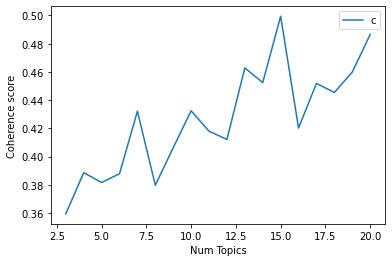

In [42]:


def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of topic models
    coherence_values : Coherence values corresponding to the topic models with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start1 = 3 
limit1 = 21
step1 = 1

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start1, limit=limit1, step=step1)

x = range(start1, limit1, step1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [43]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3594
Num Topics = 4  has Coherence Value of 0.3886
Num Topics = 5  has Coherence Value of 0.3817
Num Topics = 6  has Coherence Value of 0.3878
Num Topics = 7  has Coherence Value of 0.4322
Num Topics = 8  has Coherence Value of 0.3797
Num Topics = 9  has Coherence Value of 0.4063
Num Topics = 10  has Coherence Value of 0.4324
Num Topics = 11  has Coherence Value of 0.418
Num Topics = 12  has Coherence Value of 0.4121
Num Topics = 13  has Coherence Value of 0.4628
Num Topics = 14  has Coherence Value of 0.4524
Num Topics = 15  has Coherence Value of 0.4994
Num Topics = 16  has Coherence Value of 0.4202
Num Topics = 17  has Coherence Value of 0.4519
Num Topics = 18  has Coherence Value of 0.4454
Num Topics = 19  has Coherence Value of 0.4599
Num Topics = 20  has Coherence Value of 0.4865


/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### b. Build optimal model

In [47]:
optimal_model = model_list[13] # Index of preferred number of topics

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=100))

[(0,
  '0.013*"fund" + 0.010*"office" + 0.010*"order" + 0.010*"public" + '
  '0.008*"voucher" + 0.007*"officer" + 0.007*"government" + 0.006*"provincial" '
  '+ 0.006*"auditor" + 0.006*"fact" + 0.006*"document" + 0.006*"charge" + '
  '0.005*"bond" + 0.005*"appear" + 0.005*"sandiganbayan" + 0.005*"exhibit" + '
  '0.005*"date" + 0.005*"wa" + 0.005*"issue" + 0.004*"cash" + 0.004*"official" '
  '+ 0.004*"property" + 0.004*"treasurer" + 0.004*"day" + 0.004*"file" + '
  '0.004*"rule" + 0.004*"city" + 0.004*"follow" + 0.004*"pay" + 0.004*"record" '
  '+ 0.004*"receive" + 0.004*"malversation" + 0.004*"report" + '
  '0.004*"municipal" + 0.004*"account" + 0.004*"time" + 0.004*"act" + '
  '0.004*"state" + 0.003*"audit" + 0.003*"decision" + 0.003*"require" + '
  '0.003*"money" + 0.003*"sign" + 0.003*"person" + 0.003*"section" + '
  '0.003*"receipt" + 0.003*"produce" + 0.003*"reason" + 0.003*"present" + '
  '0.003*"bondsman" + 0.003*"give" + 0.003*"surety" + 0.003*"sum" + '
  '0.003*"payment" + 0.0

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### c. Finding the dominant topic

In [46]:


def format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=data, num_words=11):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=data, num_words=11)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0            13.0              0.8309   
1            1             5.0              0.5386   
2            2             5.0              0.5926   
3            3            12.0              0.6431   
4            4            15.0              0.5469   
5            5             8.0              0.5394   
6            6            13.0              0.9462   
7            7            13.0              0.7801   
8            8            13.0              0.9208   
9            9             5.0              0.7372   

                                            Keywords  \
0  rape, time, house, testimony, father, mother, ...   
1  wound, stab, kill, murder, house, circumstance...   
2  wound, stab, kill, murder, house, circumstance...   
3  police, marijuana, arrest, drug, shabu, office...   
4  house, pp, testimony, tsn, wa, time, testify, ...   
5  confession, house, statement, police, testimon...   
6  rape, time, house, testimony, father, mother, ...   
7  rape, time, house, testimony, father, mother, ...   
8  rape, time, house, testimony, father, mother, ...   
9  wound, stab, kill, murder, house, circumstance...   

                                                Text  
0  people philippines marcelino bugarin appeal de...  
1  people philippines leonardo francisco alias yo...  
2  joaquin david petitioner court appeals people ...  
3  people philippines tang wai lan tang tang wai ...  
4  people philippines ernesto dela cruz criminal ...  
5  people philippines victor bacor accused appell...  
6  people philippines rolando cantos y asistio ca...  
7  people philippines rodrigo amadore y obina pos...  
8  people philippines damaso guzman wa charged tw...  
9  people philippines inocentes daguinutan melcho...

In [ ]:
# df_dominant_topic.to_csv('Docu_with_Dominant_Topic.csv')

In [21]:
docu_topic = pd.read_csv("Docu_with_Dominant_Topic.csv")
keywords = docu_topic.groupby("Keywords").sum().reset_index()
#keywords.to_csv('keywords.csv')
keywords

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Keywords  Unnamed: 0  \
0   accuse, court, appellant, tsn, people, pp, cri...     2912709   
1   agne, court, case, people, trial, complainant,...       11163   
2   appellant, court, victim, people, witness, cri...    18978694   
3   court, accuse, witness, appellant, victim, pol...     2644588   
4   court, appellant, police, accuse, people, shab...     8362016   
5   court, case, people, accuse, penalty, aaa, rap...     4769683   
6   court, house, appellant, people, victim, pp, c...     1375047   
7   court, petitioner, case, accuse, rule, appeal,...    13503309   
8   possession, illegal, court, act, crime, case, ...      983701   
9   rape, appellant, court, aaa, people, accuse, h...    16128755   
10  say, court, accuse, car, sir, appellant, perso...     1462963   

    Document_No  Dominant_Topic  Topic_Perc_Contrib  
0       2912709          7469.0            599.8931  
1         11163           140.0             11.1392  
2      18978694         15025.0           2126.2641  
3       2644588           552.0            302.3702  
4       8362016          3057.0            819.9686  
5       4769683          5888.0            447.4679  
6       1375047          1496.0            198.4966  
7      13503309         14322.0           2009.0646  
8        983701             0.0            136.7666  
9      16128755         20223.0           1622.7533  
10      1462963           566.0            125.7557

#### d. Visualize the topics

In [49]:
# Visualize the topics
# import pyLDAvis.gensim
import pyLDAvis.gensim_models #this import works for me
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Jay/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.136440 -0.008114       1        1  15.713102
7     -0.115168  0.025181       2        1  14.520001
8     -0.109725  0.013286       3        1  13.204929
13    -0.138272  0.033348       4        1  12.190005
10     0.086783 -0.021787       5        1  12.017827
14     0.055021 -0.026689       6        1   5.678082
0     -0.031156 -0.077697       7        1   5.452196
1      0.116052 -0.073163       8        1   3.515080
4      0.050961 -0.003390       9        1   3.296355
5      0.018341  0.021445      10        1   3.288504
3      0.012680 -0.108885      11        1   3.072568
9     -0.045820 -0.013135      12        1   3.017127
11     0.094447 -0.069276      13        1   2.542713
6      0.109157  0.186219      14        1   2.141452
2      0.033141  0.122658      15        1   0.350059, topic_info=         Term          Freq         Total Category  logprob  loglift
389      rape  79560.000000  79560.000000  Default  30.0000  30.0000
8698      aaa  28001.000000  28001.000000  Default  29.0000  29.0000
342   penalty  76769.000000  76769.000000  Default  28.0000  28.0000
1252    check  15307.000000  15307.000000  Default  27.0000  27.0000
354    police  57005.000000  57005.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
768    person    150.058268  71545.892345  Topic15  -5.9024  -0.5122
12        act    149.223743  79735.354099  Topic15  -5.9080  -0.6262
202    follow    137.577375  72402.131296  Topic15  -5.9893  -0.6110
124       day    135.299760  64840.836053  Topic15  -6.0060  -0.5174
335     order    134.794281  74813.074094  Topic15  -6.0097  -0.6642

[1412 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
8698       1  0.113316     aaa
8698       2  0.012749     aaa
8698       3  0.000036     aaa
8698       4  0.001678     aaa
8698       5  0.000500     aaa
...      ...       ...     ...
10483      2  0.932769   zoilo
10483      3  0.029612   zoilo
23365      5  0.019521  zoning
23365      9  0.917491  zoning
23365     14  0.019521  zoning

[9037 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 8, 9, 14, 11, 15, 1, 2, 5, 6, 4, 10, 12, 7, 3])